In [1]:
! nvidia-smi

Sun Aug 19 02:16:29 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   33C    P8    13W / 180W |      2MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   29C    P8    13W / 180W |      2MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

from pycuda import curandom
randomGPU = curandom.XORWOWRandomNumberGenerator()

In [2]:
%pylab inline
#from pycuda import gpuarray, autoinit
from pyfft.cuda import Plan as plan1
from skcuda.fft import Plan as plan2
from skcuda.fft import fft as skfft
from skcuda.fft import ifft as iskfft

from reikna.fft import FFT


Populating the interactive namespace from numpy and matplotlib


In [3]:
from reikna.cluda import cuda_api


In [4]:
from CUDATools import *

In [5]:
ctx0,device0,devdata0 = setDevice(ndev=3)
ctx1,device1,devdata1 = setDevice(ndev=2)
ctx2,device2,devdata2 = setDevice(ndev=1)

Available Devices:
  Device 0: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 0.0
  Device 1: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 0.0
  Device 2: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 0.0
  Device 3: GeForce GTX 1080, Total (MB) 8118.2, Free (MB) 0.0
Using device 3: GeForce GTX 1080
Available Devices:
  Device 0: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 8118.2
  Device 1: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 7993.3
  Device 2: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 0.0
  Device 3: GeForce GTX 1080, Total (MB) 8118.2, Free (MB) 0.0
Using device 2: GeForce GTX 1080
Available Devices:
  Device 0: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 8119.6
  Device 1: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 7994.6
  Device 2: GeForce GTX 1080, Total (MB) 8119.6, Free (MB) 0.0
  Device 3: GeForce GTX 1080, Total (MB) 8118.2, Free (MB) 0.0
Using device 1: GeForce GTX 1080


In [6]:
ctx0.get_device()

In [7]:
! nvidia-smi

Sun Aug 19 02:16:31 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   33C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   29C    P2    40W / 180W |    124MiB /  8119MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [8]:
prec = 16 # bytes
npPrec = [float32,float64]
npCPrec = [complex64,complex128]
N3D = [2**i for i in range(5,10)]
sizeN3D = [2**(3*i)*prec/(2.0**30) for i in range(5,11)]

N2D = [2**i for i in range(10,16)]
sizeN2D = [2**(2*i)*prec/(2.0**30) for i in range(10,16)]

N1D = [2**i for i in range(20,31)]
sizeN1D = [2**(i)*prec/(2.0**30) for i in range(20,31)]

print '## 1D \n','N=',N1D ,'\n', sizeN1D,'GB'
print '## 2D \n','N=',N2D ,'\n', sizeN2D,'GB'
print '## 3D  \n','N=',N3D ,'\n', sizeN3D,'GB'

## 1D 
N= [1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824] 
[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0] GB
## 2D 
N= [1024, 2048, 4096, 8192, 16384, 32768] 
[0.015625, 0.0625, 0.25, 1.0, 4.0, 16.0] GB
## 3D  
N= [32, 64, 128, 256, 512] 
[0.00048828125, 0.00390625, 0.03125, 0.25, 2.0, 16.0] GB


In [9]:
x = linspace(-5,5,2048)

In [10]:
alpha=1

(-0.01, 0.01)

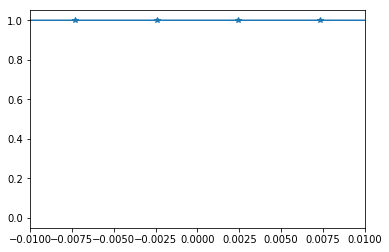

In [11]:
plot(x,exp(-alpha*x*x),'*-')
xlim([-0.01,0.01])

In [12]:
signal = fft.fft(exp(-alpha*x*x))

In [13]:
x[-1]-x[0]

10.0

In [14]:
k = array([2.0*pi*(i)/10. for i in range(1024)] + [2.0*pi*(i-2048)/10. for i in range(1024,2048)])

In [15]:
k.shape, signal.shape

((2048,), (2048,))

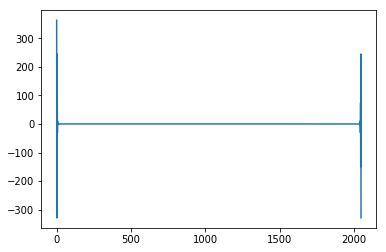

In [16]:
plot((signal.real))
#xlim([-5,5])

(-10, 10)

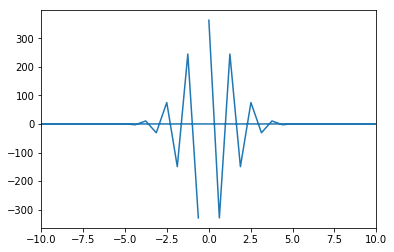

In [17]:
plot(k,signal.real)
#plot(k,signal.imag)
xlim([-10,10])

In [18]:
knpy = fft.fftfreq(n=2048,d=x[1]-x[0])

(-10, 10)

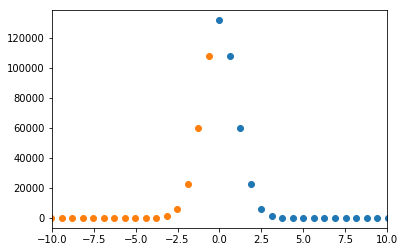

In [19]:
plot(2*pi*knpy[0:2048//2],(abs(signal)**2)[0:2048//2],'o')
plot(2*pi*knpy[2048//2:],(abs(signal)**2)[2048//2:],'o')
#plot(k,signal.imag)
xlim([-10,10])

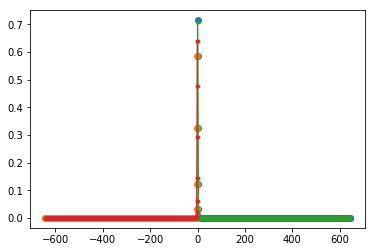

In [20]:
plot(2*pi*knpy[0:2048//2],(abs(signal)**2)[0:2048//2]/(2048*90),'o')
plot(2*pi*knpy[2048//2:],(abs(signal)**2)[2048//2:]/(2048*90),'o')

plot(2*pi*knpy[0:2048//2],(exp(-2*pi*knpy*2*pi*knpy/4.0)/sqrt(2))[0:2048//2],'.-')
plot(2*pi*knpy[2048//2:],(exp(-2*pi*knpy*2*pi*knpy/4.0)/sqrt(2))[2048//2:],'.-')
#plot(k,signal.imag)
#xlim([-10,10])

(-10, 10)

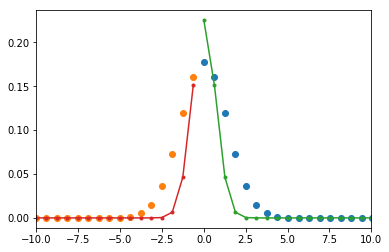

In [73]:
plot(k[0:2048//2],(abs(signal))[0:2048//2]/(2048),'o')
plot(k[2048//2:],(abs(signal))[2048//2:]/(2048),'o')

plot(k[0:2048//2],(exp(-k*k)/sqrt(2)/pi)[0:2048//2],'.-')
plot(k[2048//2:],(exp(-k*k)/sqrt(2)/pi)[2048//2:],'.-')
#plot(k,signal.imag)
xlim([-10,10])

In [22]:
(abs(signal)**2)[0]/(exp(-k*k/4.0)/sqrt(2))[0]

186166.08073361803

In [23]:
idx=5
(abs(signal)**2)[idx]/(exp(-k*k/4.0)/sqrt(2))[idx]

15864.058018715235

In [24]:
test_signal = fft.ifft(signal)

(0.9, 1.1)

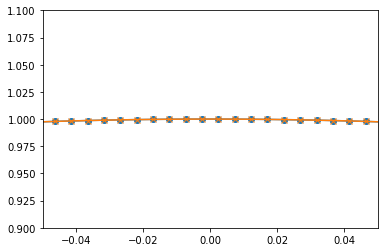

In [25]:
plot(x,exp(-x*x),'o-')
plot(x,test_signal.real,'x-')
xlim([-0.05,0.05])
ylim([0.9,1.1])

In [26]:
test_signal.imag

array([-1.90582413e-19, -1.01510122e-16,  9.66633999e-17, ...,
        8.04478012e-17,  7.83336070e-17,  2.02962647e-16])

In [27]:
s = exp(-x*x)

In [28]:
s.dtype

dtype('float64')

In [29]:
signal_gpu = gpuarray.to_gpu(s.astype(complex128))

In [30]:
signal_gpu.dtype, signal_gpu.shape

(dtype('complex128'), (2048,))

In [31]:
myFFTPlan = plan1(signal_gpu.shape[0],dtype=signal_gpu.dtype)

In [32]:
myFFTPlan.execute(signal_gpu)

In [33]:
fftsignaPyfft = signal_gpu.get()

(-10, 10)

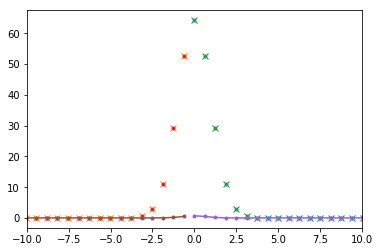

In [34]:
plot(k[0:2048//2],(abs(fftsignaPyfft)**2)[0:2048//2]/(2048),'x')
plot(k[2048//2:],(abs(fftsignaPyfft)**2)[2048//2:]/(2048),'x')

plot(k[0:2048//2],(abs(signal)**2)[0:2048//2]/(2048),'.')
plot(k[2048//2:],(abs(signal)**2)[2048//2:]/(2048),'.')

plot(k[0:2048//2],(exp(-k*k)/sqrt(2))[0:2048//2],'.-')
plot(k[2048//2:],(exp(-k*k)/sqrt(2))[2048//2:],'.-')
#plot(k,signal.imag)
xlim([-10,10])

In [35]:
myFFTPlan.execute(signal_gpu,inverse=True)

In [36]:
test_pyfft = signal_gpu.get()

(0.9, 1.1)

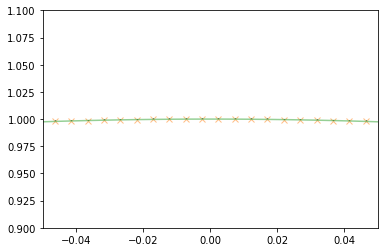

In [37]:
plot(x,exp(-x*x),',',alpha=0.85)
plot(x,test_signal.real,'x',alpha=0.5)
plot(x,test_pyfft.real,'-',alpha=0.5)

xlim([-0.05,0.05])
ylim([0.9,1.1])

In [38]:
allclose(test_signal.real,test_pyfft.real)

True

In [39]:
!nvidia-smi

Sun Aug 19 02:16:34 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   33C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   30C    P2    40W / 180W |    128MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [40]:
ctx1.push()

In [41]:
fftplan2 = plan2(signal_gpu.shape[0],signal_gpu.dtype,signal_gpu.dtype)

In [42]:
signal0_gpu = gpuarray.to_gpu(s.astype(complex128))
signal1_gpu = gpuarray.to_gpu(s.astype(complex128))

In [43]:
!nvidia-smi

Sun Aug 19 02:16:34 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   33C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   30C    P2    40W / 180W |    128MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [44]:
skfft(signal0_gpu, signal1_gpu,fftplan2)

In [45]:
fftsignaSkfft = signal1_gpu.get()

(-10, 10)

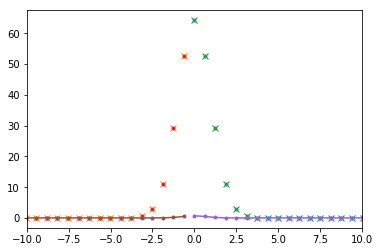

In [46]:
plot(k[0:2048//2],(abs(fftsignaSkfft)**2)[0:2048//2]/(2048),'x')
plot(k[2048//2:],(abs(fftsignaSkfft)**2)[2048//2:]/(2048),'x')

plot(k[0:2048//2],(abs(signal)**2)[0:2048//2]/(2048),'.')
plot(k[2048//2:],(abs(signal)**2)[2048//2:]/(2048),'.')

plot(k[0:2048//2],(exp(-k*k)/sqrt(2))[0:2048//2],'.-')
plot(k[2048//2:],(exp(-k*k)/sqrt(2))[2048//2:],'.-')
#plot(k,signal.imag)
xlim([-10,10])

In [47]:
iskfft(signal1_gpu, signal0_gpu,fftplan2)

In [48]:
test_sk = signal0_gpu.get()

In [49]:
allclose(test_signal.real,test_sk.real/test_sk.shape[0])

True

(0.9, 1.1)

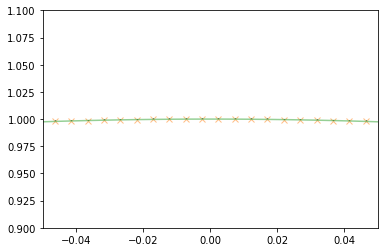

In [50]:
plot(x,exp(-x*x),',',alpha=0.85)
plot(x,test_signal.real,'x',alpha=0.5)
plot(x,test_sk.real/test_sk.shape[0],'-',alpha=0.5) ### Look Normalization

xlim([-0.05,0.05])
ylim([0.9,1.1])

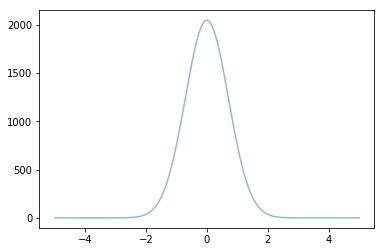

In [51]:
plot(x,test_sk.real,'-',alpha=0.5)

In [52]:
api = cuda_api()
thr = api.Thread(ctx0)

In [53]:
!nvidia-smi

Sun Aug 19 02:16:35 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   33C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   30C    P2    40W / 180W |    128MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [54]:
signal2_gpu = gpuarray.to_gpu(s.astype(complex128))
signal3_gpu = gpuarray.to_gpu(s.astype(complex128))

In [55]:
fftPlan3 = FFT(signal2_gpu)
reikFFT = fftPlan3.compile(thr)

In [56]:
!nvidia-smi

Sun Aug 19 02:16:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   33C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   30C    P2    40W / 180W |    128MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [57]:
reikFFT(signal3_gpu, signal2_gpu )

[None]

In [58]:
fftsignaReikna = signal3_gpu.get()

(-10, 10)

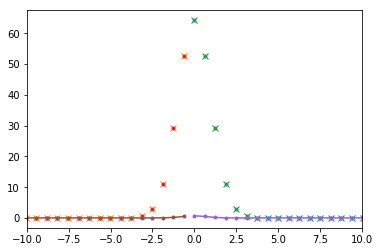

In [59]:
plot(k[0:2048//2],(abs(fftsignaReikna)**2)[0:2048//2]/(2048),'x')
plot(k[2048//2:],(abs(fftsignaReikna)**2)[2048//2:]/(2048),'x')

plot(k[0:2048//2],(abs(signal)**2)[0:2048//2]/(2048),'.')
plot(k[2048//2:],(abs(signal)**2)[2048//2:]/(2048),'.')

plot(k[0:2048//2],(exp(-k*k)/sqrt(2))[0:2048//2],'.-')
plot(k[2048//2:],(exp(-k*k)/sqrt(2))[2048//2:],'.-')
#plot(k,signal.imag)
xlim([-10,10])

In [60]:
reikFFT(signal2_gpu, signal3_gpu, inverse=1 )

[None]

In [61]:
test_reikna = signal2_gpu.get()

(0.9, 1.1)

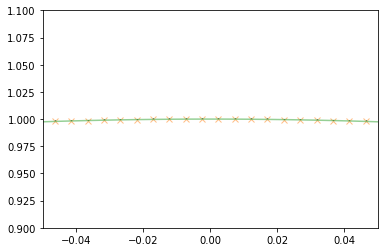

In [62]:
plot(x,exp(-x*x),',',alpha=0.85)
plot(x,test_signal.real,'x',alpha=0.5)
plot(x,test_reikna.real,'-',alpha=0.5) ### Look Normalization

xlim([-0.05,0.05])
ylim([0.9,1.1])

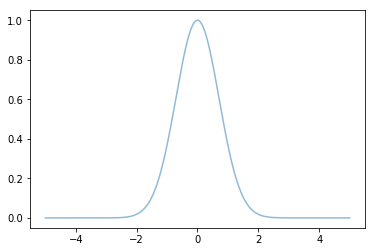

In [64]:
plot(x,test_reikna.real,'-',alpha=0.5)

In [65]:
allclose(signal,fftsignaReikna),allclose(signal,fftsignaSkfft),allclose(signal,fftsignaPyfft),


(True, True, True)

In [69]:
allclose(test_signal,test_reikna),allclose(test_signal,test_pyfft),allclose(test_signal,test_sk/test_sk.shape[0])

(True, True, True)

(-10, 10)

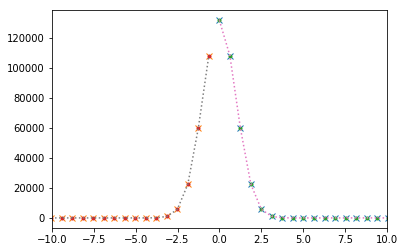

In [66]:
plot(k[0:2048//2],(abs(fftsignaReikna)**2)[0:2048//2],'x')
plot(k[2048//2:],(abs(fftsignaReikna)**2)[2048//2:],'x')

plot(k[0:2048//2],(abs(fftsignaPyfft)**2)[0:2048//2],'.')
plot(k[2048//2:],(abs(fftsignaPyfft)**2)[2048//2:],'.')

plot(k[0:2048//2],(abs(fftsignaSkfft)**2)[0:2048//2],',')
plot(k[2048//2:],(abs(fftsignaSkfft)**2)[2048//2:],',')

plot(k[0:2048//2],(abs(signal)**2)[0:2048//2],':')
plot(k[2048//2:],(abs(signal)**2)[2048//2:],':')

xlim([-10,10])

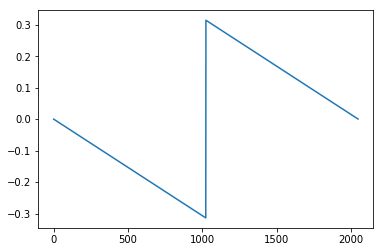

In [66]:
plot(2*pi*knpy-k)

In [6]:
!nvidia-smi

Sat Aug 18 13:08:06 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   36C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   34C    P2    40W / 180W |    124MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [7]:
from reikna.cluda import cuda_api
api = cuda_api()
thr = api.Thread(ctx2)
print thr._context
print ctx2

In [8]:
! nvidia-smi

Sat Aug 18 13:08:11 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   36C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   34C    P2    40W / 180W |    124MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

### 1,2,3 Dimension

In [17]:
prec = 16 # bytes
npPrec = [np.float32,np.float64]
npCPrec = [np.complex64,np.complex128]
N3D = [2**i for i in range(5,10)]
sizeN3D = [2**(3*i)*prec/(2.0**30) for i in range(5,11)]

N2D = [2**i for i in range(10,16)]
sizeN2D = [2**(2*i)*prec/(2.0**30) for i in range(10,16)]

N1D = [2**i for i in range(20,31)]
sizeN1D = [2**(i)*prec/(2.0**30) for i in range(20,31)]

print '## 1D \n','N=',N1D ,'\n', sizeN1D,'GB'
print '## 2D \n','N=',N2D ,'\n', sizeN2D,'GB'
print '## 3D  \n','N=',N3D ,'\n', sizeN3D,'GB'

## 1D 
N= [1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824] 
[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0] GB
## 2D 
N= [1024, 2048, 4096, 8192, 16384, 32768] 
[0.015625, 0.0625, 0.25, 1.0, 4.0, 16.0] GB
## 3D  
N= [32, 64, 128, 256, 512] 
[0.00048828125, 0.00390625, 0.03125, 0.25, 2.0, 16.0] GB


In [22]:
# real = random.gen_uniform(N1D[0],npPrec[0])
real = sin(linspace(0,2*pi,N1D[5]))

In [26]:
gpuarray.to_gpu?

In [23]:
real_gpu = gpuarray.to_gpu(real.astype(npCPrec[0]))
real2_gpu = gpuarray.to_gpu(real.astype(npCPrec[0]))


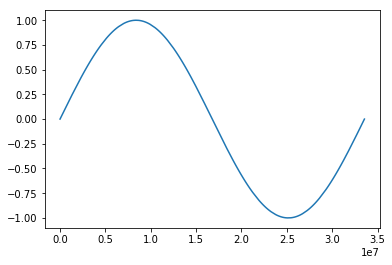

In [24]:
plot(real2_gpu.get().real)

In [25]:
! nvidia-smi

Sat Aug 18 15:07:17 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 85%   36C    P8    12W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 85%   35C    P2    41W / 180W |    640MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [12]:
myFFTPlan = plan1(N1D[0],dtype=npCPrec[0])

In [13]:
myFFTPlan.execute(real_gpu)

In [14]:
#fftplan2 = plan2(N1D[0],npCPrec[0],npCPrec[0])
fftplan2 = plan2(N1D[0],npCPrec[0],npCPrec[0])

In [15]:
fftPlan3 = FFT(real_gpu)

In [16]:
reikFFT = fftPlan3.compile(thr)

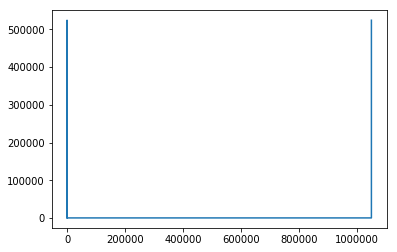

In [17]:
plot(abs(real_gpu.get()))

In [18]:
fftreal = fft.fft(real)

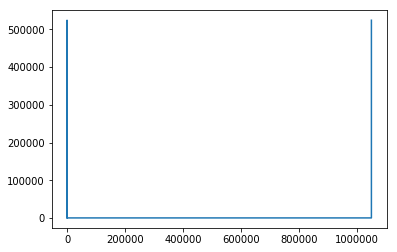

In [19]:
plot(abs(fftreal))

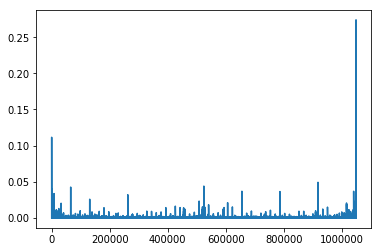

In [20]:
plot(abs(fftreal-real_gpu.get()))

In [21]:
skfft(real2_gpu, real_gpu, fftplan2)
#skfft(real2_gpu, fftplan2)

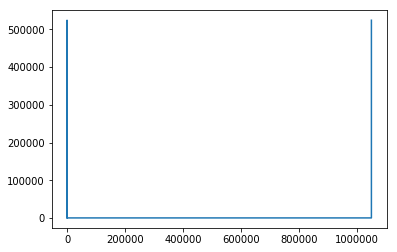

In [22]:
plot(abs(real_gpu.get()))

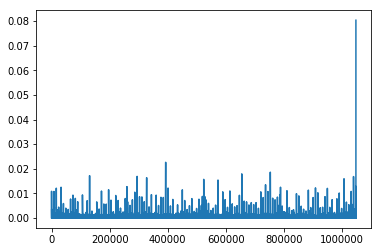

In [23]:
plot(abs(fftreal-real_gpu.get()))

In [24]:
reikFFT(real_gpu, real2_gpu )
#reikFFT(real2_gpu )

[None, None, None]

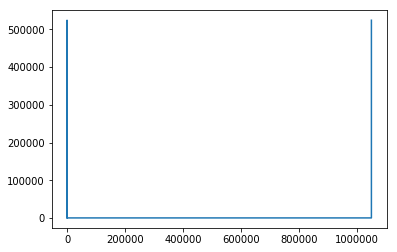

In [25]:
plot(abs(real_gpu.get()))

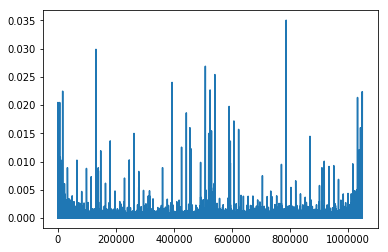

In [26]:
plot(abs(fftreal-real_gpu.get()))

In [27]:
real_gpu.gpudata.free()

In [28]:
real2_gpu.gpudata.free()

In [29]:
getFreeMemory()

Free Global Memory: 7807.562500 Mbytes


7807.5625

In [30]:
! nvidia-smi

Sat Aug 18 11:22:48 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 99%   41C    P2    41W / 180W |    312MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 99%   31C    P8    14W / 180W |     11MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

    Now in 'A_GPU' it is stored its trandsform. I mean we ocverwrite the original array with the FFT, if you put two arguments this overwrite is avoided.

### 3 Dimensions and Performance

In [7]:
from time import time
import pycuda.driver as drv
from pycuda import gpuarray
start = drv.Event()
end = drv.Event()

In [8]:
dimensions = [64,128,256,512]
prec = complex128

In [9]:
timeCPU = []
timeGPU1 = []
timeGPU2 = []
timeGPU3 = []
timeCPY = []

In [10]:
samples = 100

In [11]:
for d in dimensions:
    print('{0}x{0}x{0}'.format(d))
    A_CPU = random.random((d,d,d)).astype(prec)
    start.record()
    A_GPU = gpuarray.to_gpu(A_CPU)
    B_GPU = gpuarray.to_gpu(A_CPU)
    end.record()
    end.synchronize()
    timeCPY.append(start.time_till(end)*1e-3)
    
    
    t = time()
    for i in range(samples): FFT_A_CPU = fft.fft(A_CPU)
    timeCPU.append(time()-t)
    
    myFFTPlan = plan1((d,d,d),prec)
    myFFTPlan2  = plan2((d,d,d),prec,prec)
    myFFTPlan3 = FFT(A_GPU)
    reikfft = myFFTPlan3.compile(thr)
    
    start.record()
    for i in range(samples): myFFTPlan.execute(A_GPU, B_GPU)
    end.record()
    end.synchronize()
    secs = start.time_till(end)*1e-3
    timeGPU1.append(secs)
    
    start.record()
    for i in range(samples): skfft(A_GPU, B_GPU,myFFTPlan2)
    end.record()
    end.synchronize()
    secs = start.time_till(end)*1e-3
    timeGPU2.append(secs)
    
    start.record()
    for i in range(samples): reikfft(A_GPU, B_GPU)
    end.record()
    end.synchronize()
    secs = start.time_till(end)*1e-3
    timeGPU3.append(secs)
    
    A_GPU.gpudata.free()
    B_GPU.gpudata.free()
    del myFFTPlan,myFFTPlan2, myFFTPlan3,reikfft

MemoryError: cuMemAlloc failed: out of memory

In [19]:
savez('fft3D',tGPU_pyfft=array(timeGPU1),tGPU_sk=array(timeGPU2),
      tGPU_reik=array(timeGPU3),tCPU=array(timeCPU),tCPU2GPU=array(timeCPY))

In [12]:
A_GPU.gpudata.free()
B_GPU.gpudata.free()

In [13]:
!nvidia-smi

Sat Aug 18 11:45:49 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 99%   37C    P8    13W / 180W |   2326MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 99%   31C    P8    14W / 180W |     11MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

## reikna

In [18]:
! nvidia-smi

Sat Aug 18 11:52:30 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:4B:00.0 Off |                  N/A |
| 99%   35C    P8    13W / 180W |    125MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    On   | 00000000:4C:00.0 Off |                  N/A |
| 99%   31C    P8    14W / 180W |     11MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [11]:
A_CPU = random.random((512,512,512)).astype(prec)

In [14]:
myFFTPlan = plan1(A_CPU.shape,prec)

In [15]:
A_GPU = gpuarray.to_gpu(A_CPU)

In [16]:
myFFTPlan3 = FFT(A_GPU)
reikfft = myFFTPlan3.compile(thr)

In [17]:
B_GPU = gpuarray.to_gpu(A_CPU)

MemoryError: cuMemAlloc failed: out of memory

start.record()
for i in range(samples): myFFTPlan.execute(A_GPU)
end.record()
end.synchronize()
start.time_till(end)*1e-3
timeGPU1.append(start.time_till(end)*1e-3)

In [19]:
getFreeMemory()

Free Global Memory: 1847.312500 Mbytes


1847.3125

In [20]:
d=512
samples=100

In [21]:
A_CPU = random.random((d,d,d)).astype(prec)
A_GPU = gpuarray.to_gpu(A_CPU)
B_GPU = gpuarray.to_gpu(A_CPU)

MemoryError: cuMemAlloc failed: out of memory

In [22]:
#myFFTPlan = plan1((d,d,d),prec)
#myFFTPlan2  = plan2((d,d,d),prec,prec)
myFFTPlan3 = FFT(A_GPU)
reikfft = myFFTPlan3.compile(thr)

In [23]:
timeCPU = [0.30910706520080566,
  2.3439650535583496,
  18.283607006072998,
  167.26681685447693]
timeGPU1 = [0.02954729652404785, 0.23331715393066407, 2.7928020019531252,21.537302734375]
timeGPU2 = [0.022404096603393556, 0.13823385620117187, 1.1437608642578125, 12.9235673828125]
timeGPU3 = [0.03757875061035156, 0.2610584106445313, 2.99683544921875]
timeCPY = [0.012605376243591308,
  0.022300512313842773,
  0.1704000244140625,
  1.3564984130859374]

t = time()
for i in range(samples): FFT_A_CPU = fft.fft(A_CPU)
timeCPU.append(time()-t)

In [24]:
timeCPU, timeGPU1, timeGPU2, timeGPU3, timeCPY 

([0.30910706520080566,
  2.3439650535583496,
  18.283607006072998,
  167.26681685447693],
 [0.02954729652404785,
  0.23331715393066407,
  2.7928020019531252,
  21.537302734375],
 [0.022404096603393556,
  0.13823385620117187,
  1.1437608642578125,
  12.9235673828125],
 [0.03757875061035156, 0.2610584106445313, 2.99683544921875],
 [0.012605376243591308,
  0.022300512313842773,
  0.1704000244140625,
  1.3564984130859374])

In [25]:
start.record()
for i in range(samples): myFFTPlan.execute(A_GPU, B_GPU)
end.record()
end.synchronize()
secs = start.time_till(end)*1e-3
timeGPU1.append(secs)

NameError: name 'start' is not defined

In [26]:
start.record()
for i in range(samples): skfft(A_GPU, B_GPU,myFFTPlan2)
end.record()
end.synchronize()
secs = start.time_till(end)*1e-3
timeGPU2.append(secs)

NameError: name 'start' is not defined

timeCPU.append(5202.7731320858)

timeCPU = [4.00489616394043,
 47.76098108291626,
 364.4098560810089,
 5202.7731320858]

In [27]:
timeGPU1, dimensions

([0.02954729652404785,
  0.23331715393066407,
  2.7928020019531252,
  21.537302734375],
 [64, 128, 256, 512])

In [28]:
timeGPU2

[0.022404096603393556,
 0.13823385620117187,
 1.1437608642578125,
 12.9235673828125]

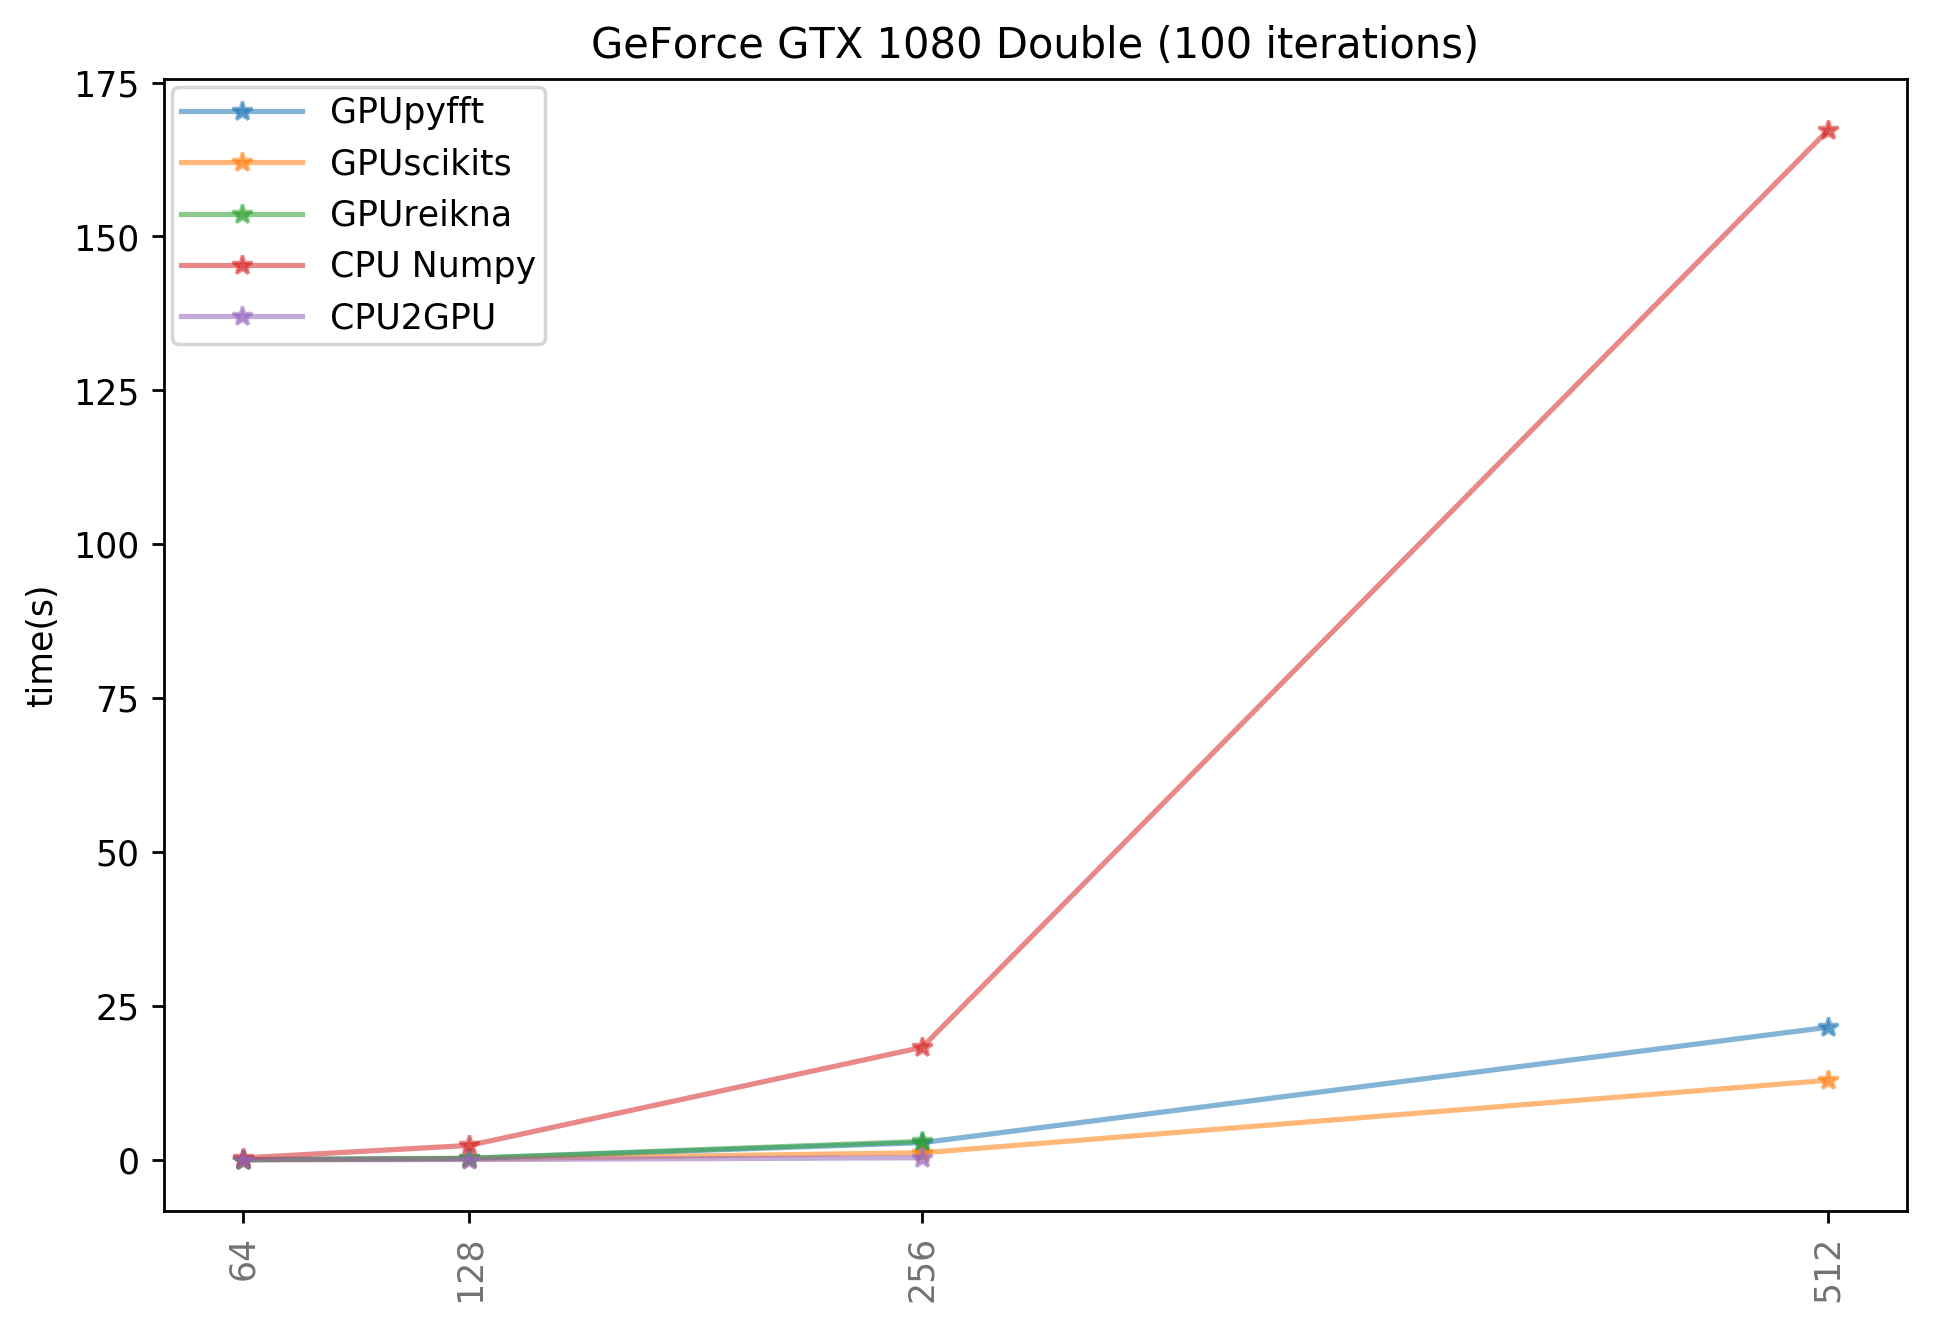

In [33]:
figure(0,figsize=(9,6),dpi=250)
al = 0.55
plot(dimensions,timeGPU1,'*-',label='GPUpyfft', alpha=al)
plot(dimensions,timeGPU2,'*-',label='GPUscikits', alpha=al)
plot(dimensions[:-1],timeGPU3,'*-',label='GPUreikna', alpha=al)

plot(dimensions,timeCPU,'*-',label='CPU Numpy', alpha=al)
plot(dimensions[:-1],2*array(timeCPY[:-1]),'*-',label='CPU2GPU', alpha=al)
plt.xticks(dimensions, dimensions, rotation='vertical', alpha=al)
ylabel('time(s)')
title('GeForce GTX 1080 Double (100 iterations)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)

(60, 560)

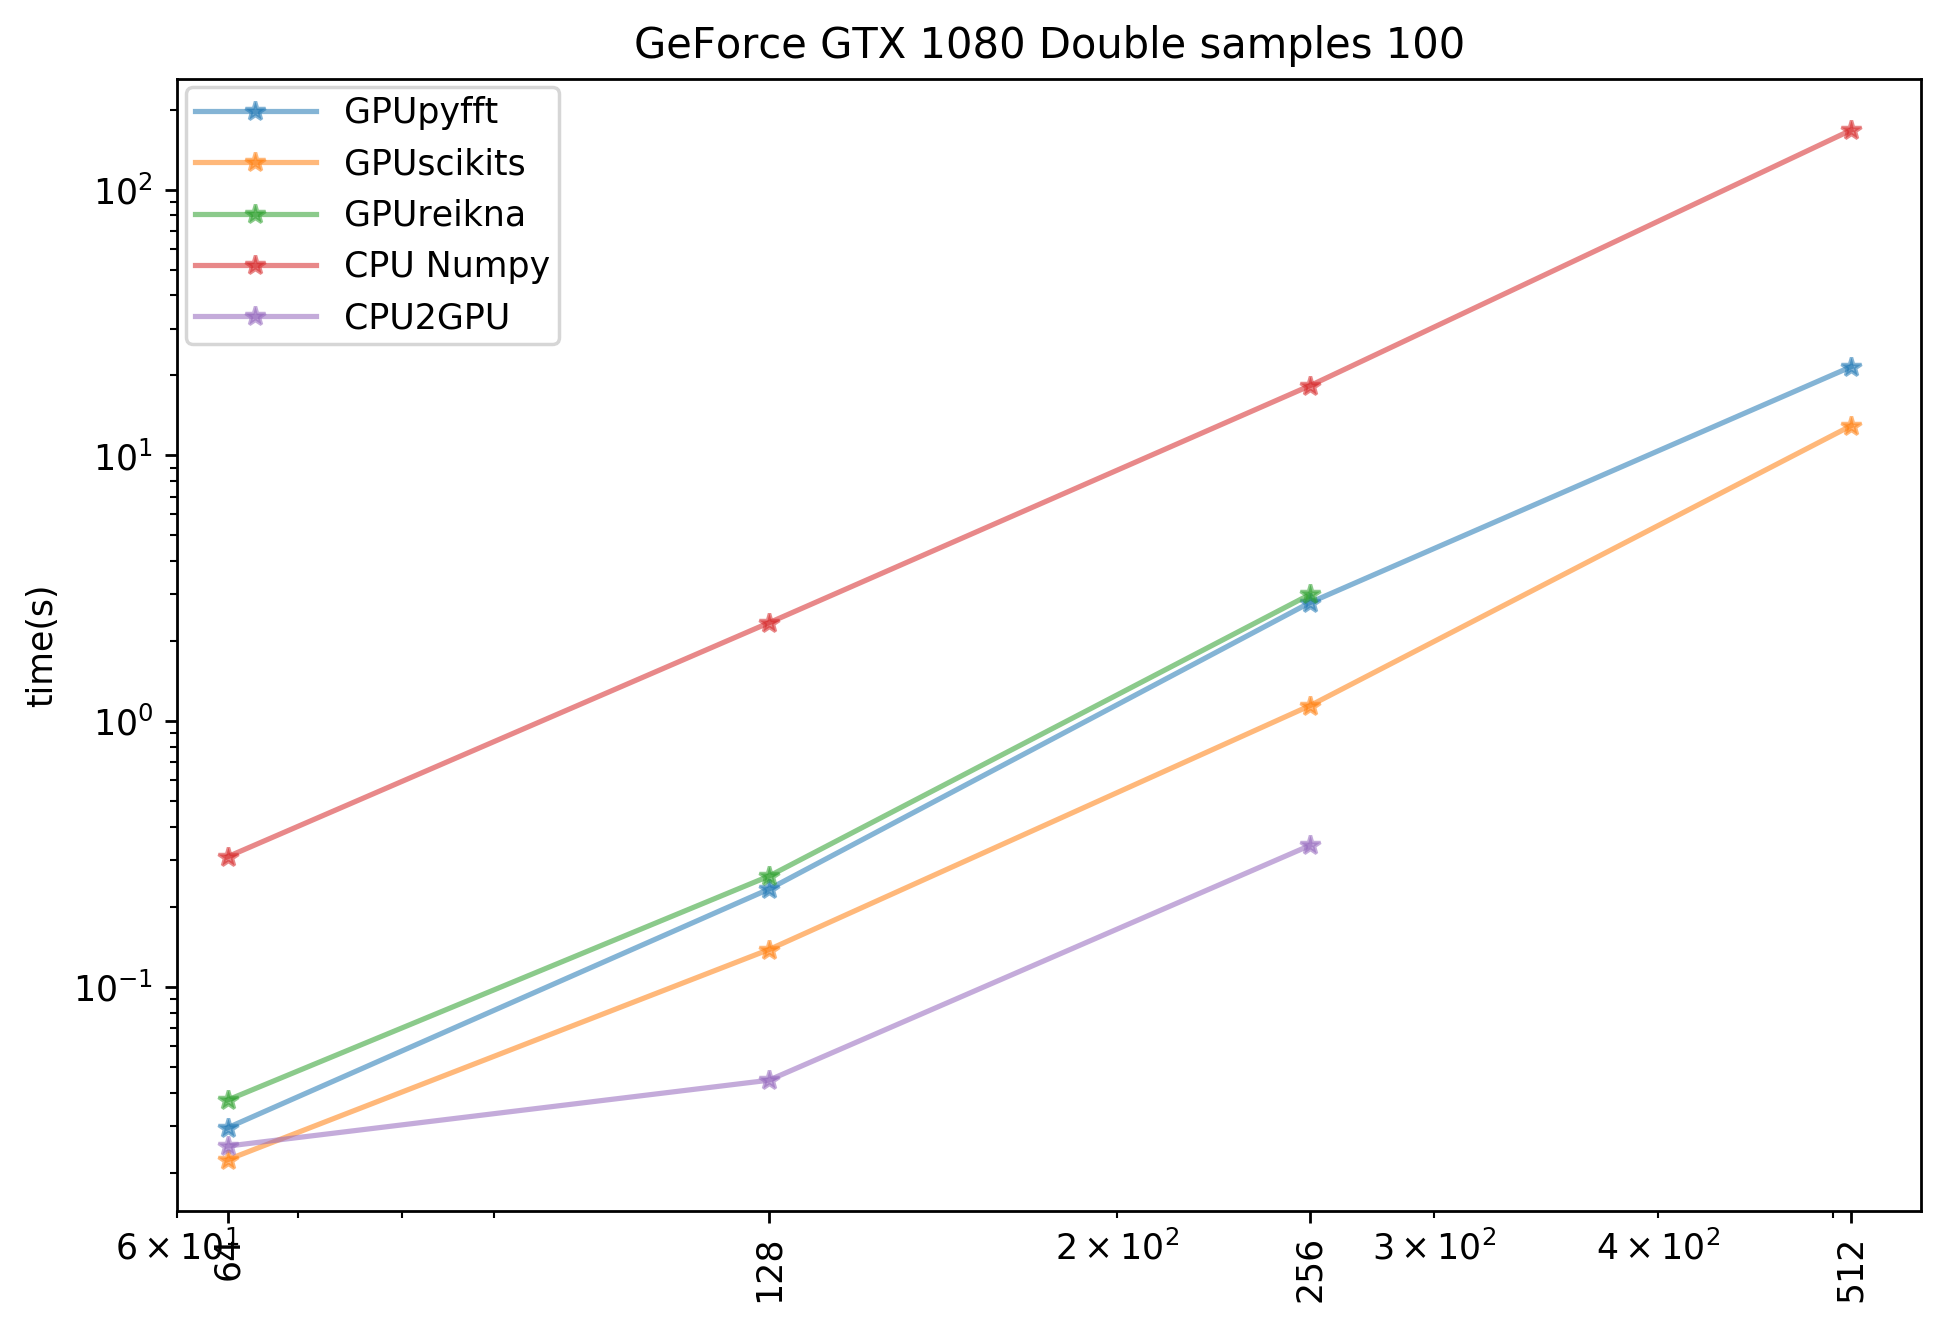

In [34]:
figure(0,figsize=(9,6),dpi=250)
loglog(dimensions,timeGPU1,'*-',label='GPUpyfft', alpha=al)
loglog(dimensions,timeGPU2,'*-',label='GPUscikits', alpha=al)
loglog(dimensions[:-1],timeGPU3,'*-',label='GPUreikna', alpha=al)

loglog(dimensions,timeCPU,'*-',label='CPU Numpy', alpha=al)
loglog(dimensions[:-1],2*array(timeCPY[:-1]),'*-',label='CPU2GPU', alpha=al)
plt.xticks(dimensions, dimensions, rotation='vertical')
ylabel('time(s)')
title('GeForce GTX 1080 Double samples 100')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)
xlim([60,560])

(60, 560)

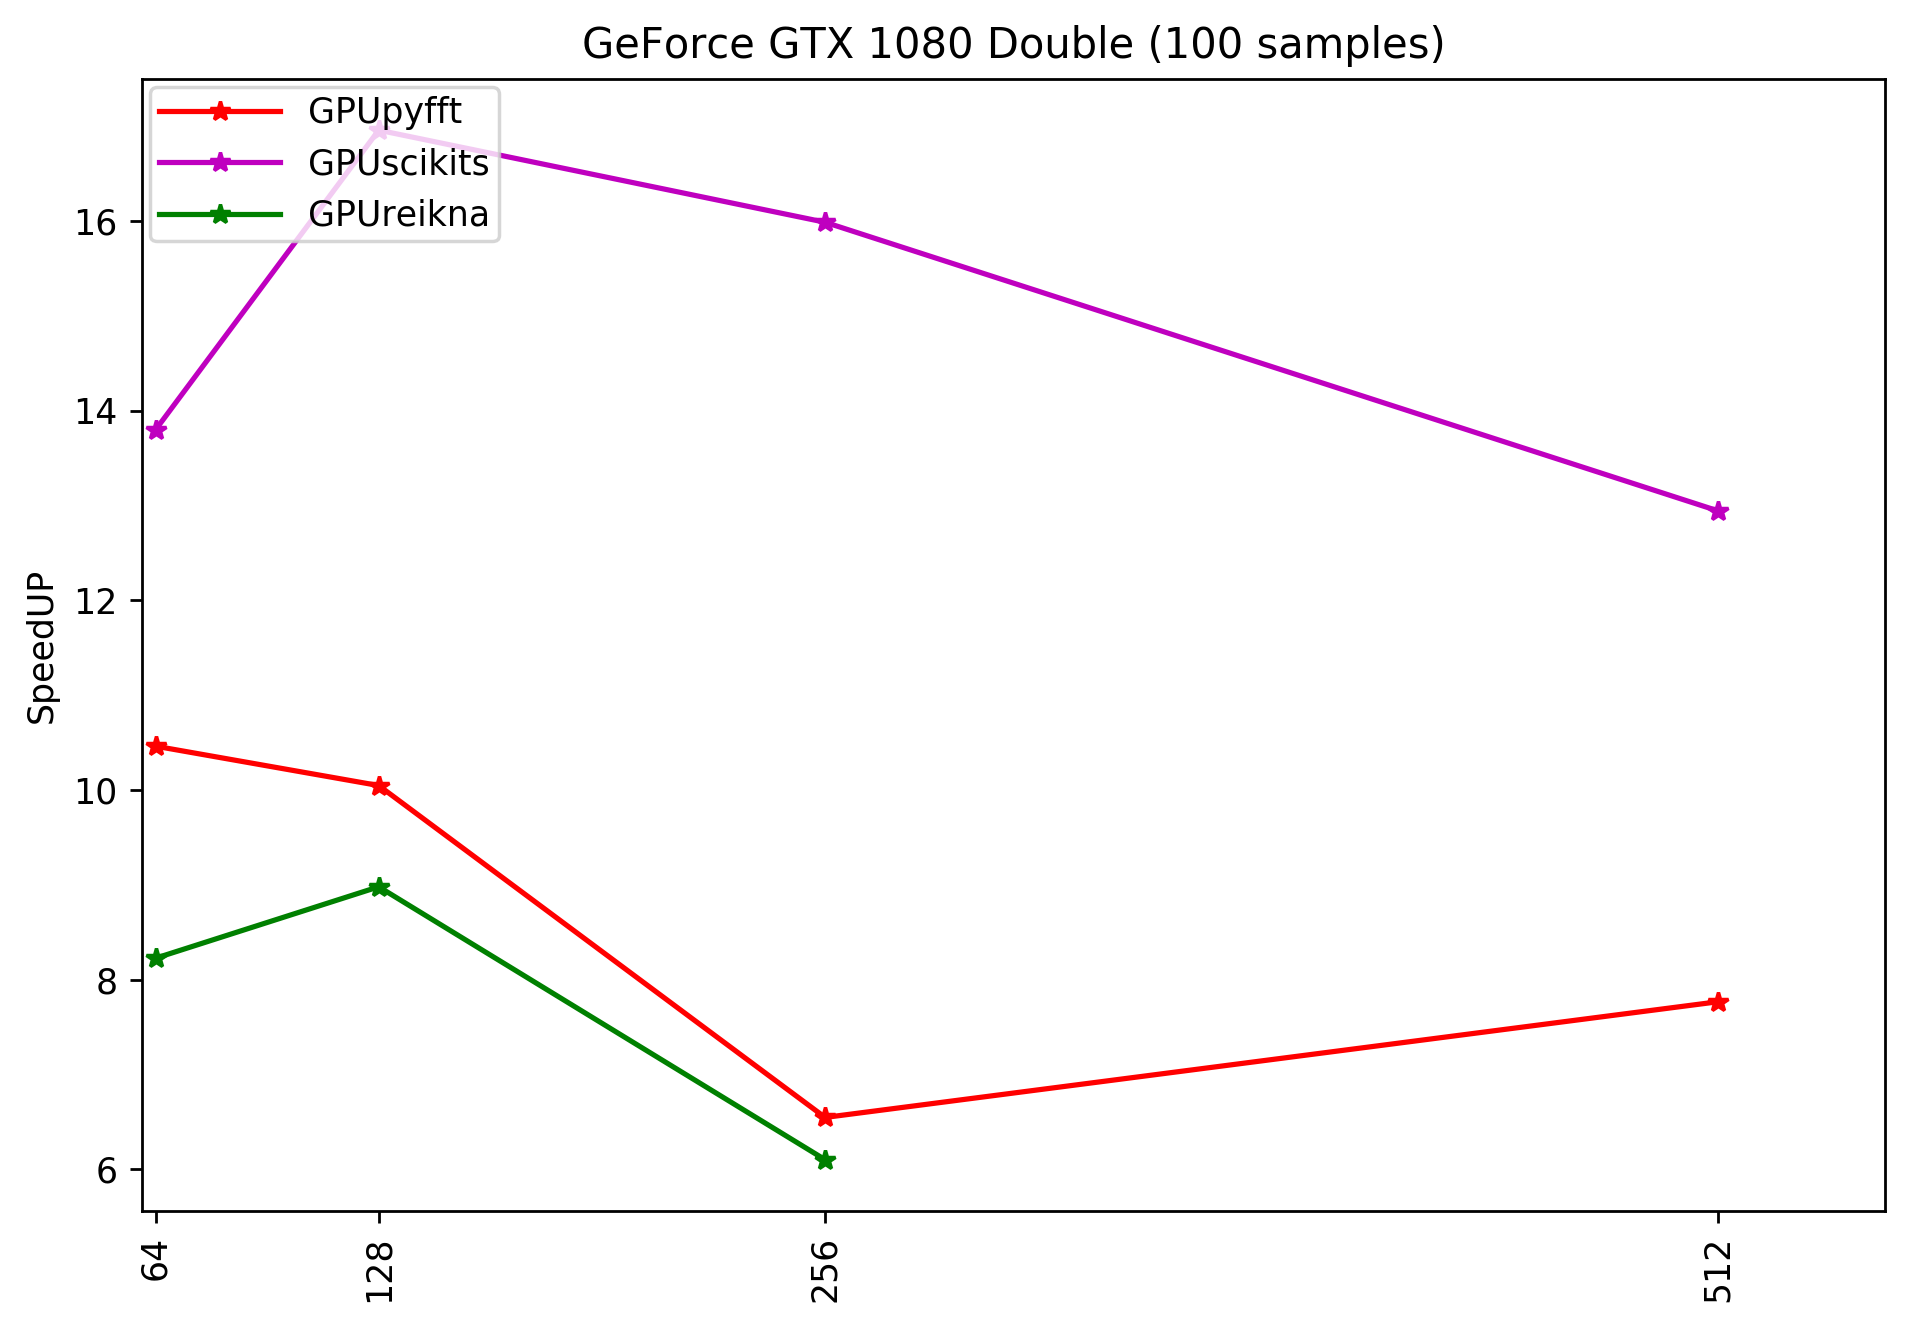

In [23]:
figure(0,figsize=(9,6),dpi=250)
plot(dimensions,array(timeCPU)/array(timeGPU1),'r*-',label='GPUpyfft')
plot(dimensions,array(timeCPU)/array(timeGPU2),'m*-',label='GPUscikits')
plot(dimensions[:-1],array(timeCPU[:-1])/array(timeGPU3),'g*-',label='GPUreikna')
#plot([64,128,256,512],timeCPU,'g*-',label='CPU')
#plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('SpeedUP')
title('GeForce GTX 1080 Double (100 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)
xlim([60,560])

|Points fp64|size 1D (MB)|size 2D (MB)|size 3D (MB)|
|:---:|:---:|:---:|:---:|
|128|0.001|0.125|16|
|256|0.002|0.5|128|
|512|0.004|2|1024|
|1024|0.008|8|8192|
|4096|0.031|128|512G!|
|32768|0.25|8192|

In [ ]:
figure(0,figsize=(9,6),dpi=250)
plot([64,128,256,512],timeGPU1,'r*-',label='GPUpyfft')
plot(dimensions,timeGPU2,'m*-',label='GPUscikits')
plot(dimensions,timeGPU3,'y*-',label='GPUreikna')
plot([64,128,256,512],timeCPU,'g*-',label='CPU Numpy')
plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('Time')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)
#xlim([60,262])

In [ ]:
figure(0,figsize=(9,6),dpi=250)
plot([64,128,256,512],array(timeCPU)/array(timeGPU1),'r*-',label='GPUpyfft')
plot(dimensions,array(timeCPU[0:3])/array(timeGPU2),'m*-',label='GPUscikits')
plot(dimensions,array(timeCPU[0:3])/array(timeGPU3),'g*-',label='GPUreikna')
#plot([64,128,256,512],timeCPU,'g*-',label='CPU')
#plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('SpeedUP')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)

In [ ]:
figure(0,figsize=(9,6),dpi=250)
loglog([64,128,256,512],timeGPU1,'r*-',label='GPUpyfft')
loglog(dimensions,timeGPU2,'m*-',label='GPUscikits')
loglog(dimensions,timeGPU3,'m*-',label='GPUreikna')
loglog([64,128,256,512],timeCPU,'g*-',label='CPU Numpy')
loglog(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('Time')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)

# Results


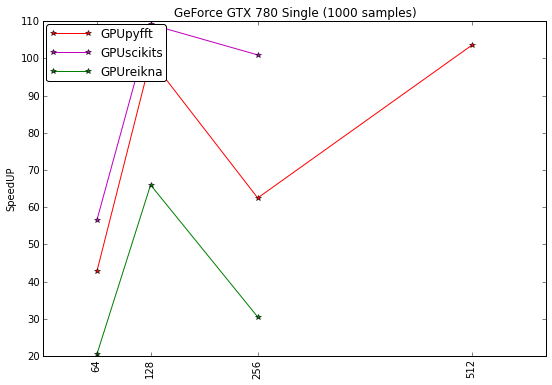
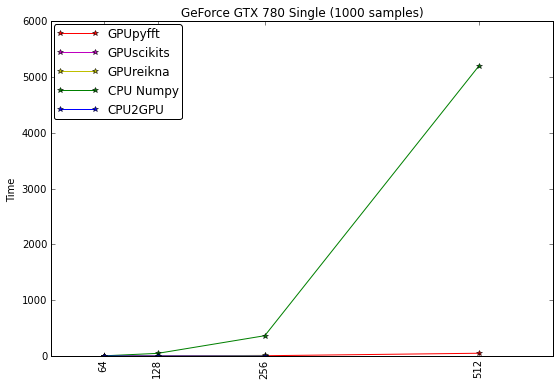
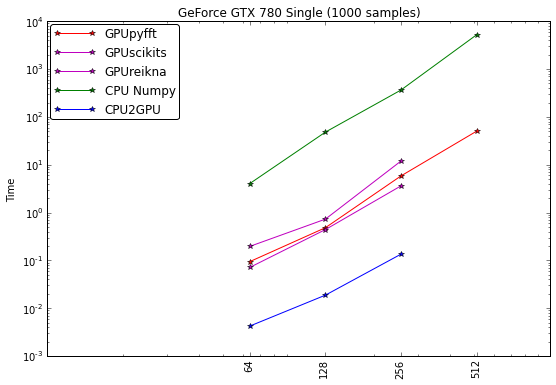

In [43]:
%%HTML
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAigAAAGBCAYAAABM9ko+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3X18zeX/wPHXNbOZGbbJveU+N4lCmJQQUbpBIrmpb0nyLSmxSqOUktS3G939RCFKSjfIFJNy1w1Jyv1tmJttNja7O9fvj+uzdcxuztjZZ+ec9/PxOI+dm8/nnPf5nLNz3ue63td1Ka01QgghhBCliZ/dAQghhBBC5CYJihBCCCFKHUlQhBBCCFHqSIIihBBCiFJHEhQhhBBClDqSoAghhBCi1JEERQhhO6VUlFLq/WK6r31Kqa4XuG+gUupPpVS14ojF2yilHEqp+hd5HxuUUs2KKybhvSRBER5NKTXA+sA7rZSKU0qtV0o96OK+na0P3GSn05fujrmQmAKUUs8opf62ntMhpdRSpdQNSqm7nOJMyRV7klIq2Ppyvsvp/kKUUgeUUn3yebw/cz3/DKXUV063X6OU+lkpdUoptVspdX+u/R9VSh2xbp+plAoo4LndqpTabG17XCn1vVKqLoDWeorW+v789i0ibZ0uxHBgtdY6DkApdb1SapVSKlEptTf3xkqputbtZ5RSf+VOjKzXbL/1Wn6hlAp1ui1QKfWBdTyOKKUevcCYPc004Fm7gxAeQGstJzl55Al4DDgK9AGCretaAXOBABf27wwcLIY4/IrxOX0F/Ay0BfytUw/gtVzbXZdX7EB34BhQxbr8NvBZER5/D3C3db4McBy437rcBkgGrrAu97COf1OgMrAKmJLP/TYEEoHrrcsVrNetjhveF3uBLhe471agg9PltsAg4H5gbx7br8N84QZazyfB6dg3B5KAa4BgYB4w32nfKcBqoBLQBDgC9Cju41HMx9YB1L/I+ygHnASq2f185FS6T7YHICc5XcjJ+lA/DdxeyHaB1hfIfuvL9G2gnHVbvgmK9aUba33hbAV6O90227qfpVYMXYA6wOdWcnACeMNp+3uBbUA88C0Qkc9jdgNSgJouPP+CYp8FfGxtcwKo6uIxvc76Qg2yLte0vpDKOW2zEbjTOv8xMNnptuuBI/ncdz9gUwGPPRGYY52vaz3uEOt1Ow486bRtEPChdTy3AU84HwucEhRAAeOBXdax+AQIzSeGCOv4n5dwWq/N3lzXNQbOYiXH1nWrgQes8y8Ac51uqw+k8W8y/Q/Qzen2STglMLkeqwrwjfV+PAn84HRb9vNLAv4EbnO6bRjwEzDd2ncXEAncAxwA4oAhud7b7wAx1v3FOr9fcUpQKPh/67x4AeV0PzHOjysnOeV1ki4e4ak6YD4gC+uSeRHz672l9bcW8ExBOyilygJfY5KJS4D/AvOUUo2dNhsIPKe1rgCsx3wY7wUutR5jgXVftwJRwO2YD+01wPx8HrobsF5rfbiQ51SYRzHJwkLgMa31MRf3G4ppbUkFsOLYAtyrlCqjlIrEPL8fre2bAb877b8FqObcjeHkV6CJUmq61bVWIdfteXXJdMQkAV2BZ5RSl1nXR2OSiXrADcDd+ewP8DBwC3AtUAPzhflWPtu2APZorR353J5bc2v7M07X/W5dn317zvHRWu/BJCiNrWNUg/OPX3Py9hhwEPMeqop5T2XbBVyjta6ISXLm5qqhudp6nDDMe+9T4CqgAebYvamUKu+0/V2YLpgqwGZMy09eCvrfOi9erbXza/SXtZ8Q+ZIERXiqKsAJ5y8TpdRapVSCVZ9xjVJKYZrmx2itE7XWpzHN6gOc7qemtU/2qR/QHvMr90WtdabWehUmARnotN9irfU663xLzJfNWK11qtY6TWv9k3XbCEy3x3Yr1ilAK6VUnXyeU5zT8wmzYkpUSqW6emC01omYX9JBwBeu7GN9QfXF/IJ2NhzzpXcW0zrwpNb6H+u2CsApp22TrL8hecS0F9OiUwvzBXlcKTVLKRWcHUIeYU2yjuUWzBds9hfaHcALWutTViz/y2d/gAeAp7XWh7XWGdZz6aeUyuuzrzKmC8tVuZ8/1v7ZyVdwHrcnYY5P9ja5j995x86SjnmP1dVaZzm9v9Baf6a1Pmqd/xTYCbRz2nev1vpDK0H4FNMy9qzWOkNrvcK674ZO23+jtf5Ra50OPAV0UErVcg7Ghf+tfOO1JGOOtxD5kgRFeKqTQBXnLxqtdaTWOtS6zQ/T+lEe+DU7AQGWYRKBbIe11qFOp88wH+AHcz3efut6ML/WDzndVgfYn88v70uB/zk9/knr+lp5bHsC86Ge/XzirefTGtNa5BKl1N3W434HvOTibn2Ak1rrH5zupxYmMbtLa10W8+t+nFKql7XJaaCi031Usv7m+SWvtd6gtb5Ta10V6IRp1XiqgJiOOp1P4d8v9dyvj/NrkVtd4Aun478NyATyGqWTQP4JQl5yP38wxyDZ6fZK+dx+2rqc+/jllyC9jGkpibGKlcdl36CUGqKU2uT0HC8Hwp32jXM6n906djzXddnH9pz3ttU6FM+/7/1shf1v5Ruv0/NOyOe5CgFIgiI81zpMc/ltBWxzAvPh28wpAalsNYUX5DBQx/qVmO1STM1ANufm6oNAhFKqTB73dQAYnisJCtZar89j2++Btrl/rZJ/68B5lFJVMfUG92Fab/orpa5xYdehwEe5rosEDlm/stFa7wCWAD2t2//EFCVnawnEaa0L/eLRWv+Cad3Jr0ujIEcwSWG2vFqjsh0Absx1/MtrrY/kse0WoF4+rSt5+ROon6u7qqV1ffbtOd0YSqkGQACwwzpGRzj/+G3N64G01qe11o9rrRtguqzGWCOMLgXeAx4CwqyEditFeM/konA6ntZzC8P8Tzgr8H8rn3i7OO3flHO7t4Q4jyQowiNZ3RiTgBlKqb7WcFo/pVQrTNM6VovG+8BrSqlLwLQKKKW6F3L36zG/2J9QSpVVSnUGbsaqK+H8D/8NmC+bF5VS5ZVS5ax6DTAFh08qa94HpVQlpdQd+TynFZiRMIuVUlcrM+S4LKbLydVhs28CX2itV1vN/k8A7xcy/Lc2pvvlw1w3bQUus74IlfUFezP/frF8BPxHKdXUqqmYgCnQzesxOiql7nN6HZoAvTHHuqg+BaKUUpWtZG4U+R+fd4AXlFIR1uNeopS6Ja8NtdaHML/6c7pHrOddDihrXQzMPpZWwrYZiLZe8z6Y1otF1u7zgN5Wd2Mw8BywyKlm5SPgaet5NMUklbPzik0pdZNSqqGVNCcBWZiC1WDruZ8A/JRS91gxXIxe1usVYMW8zqlbD+u5F/i/lU+8WdZt5TA1MCsuMk7h5SRBER5La/0yMAbzJXzUOr1jXc6uDxmH+dJZr5Q6hflQdC52Pe+LzapV6I1pKTiO+dIfbH0hZe+jnbZ3WNs3xPxiPwj0t25bjOlmWWA9/h+Y4bn5uR3TrTIX0wS+B1P7ktc+58SulLoN0+ox1im2mZhfvxMKeMzBwFqrTuTfO9f6L+BBTFHpKcyIjs+Amdbty4GpmKRqH7AbU8Cal0TML+k/lFLJmO6Az639s5+L8/MpKCF7FtMNsRczGmQhpuYhL//DDN2OUUolYd4XVxdw3+9ijke26zDJ6hJMy0Iqpng62wDM8Ot44Hmgr9b6JIDWehumFWseppslCBjptG805pjtxxzDl7TWMfnE1Qjz3k0G1gJvWUnoNuAV63kdxSQnPzrtl9ecMAUdW40ZnRWN6Y68ElNIm9e+Bf1v5RmvdVtvYFV23YwQ+VHnFlYX4x0r9QFwE3BMa93Cuu4OzHDCJkBbrfVvTttHYYZjZgEPF/CPKoQQOZSZmK+/1vr6YrivAGATZphyXGHbexul1CxMt15BCe3FPsZ64F4ruRIiX+5sQZkF3Jjruj8wvxB/cL7Sav6+EzNs8UZMs7207gghzqOUqm51QfgpM/R4DC6OViqM1jpda93cF5MTy4XWrrhMa91ekhPhCrclAVrrNeSq0tZa/+3UTO7sVswERRla632YZsOCmmGFEL4rANOVl4QpLF4MzLA1Iu9xMcsECFGs/O0OwFKTc4vlDpH3MEwhhI/TWh/ATKomipnW+h67YxAiW2lJUPJyXhavlJLMXgghhPAyWuvzuhdLS53HP5w7l0Ftzp1zIocuBesDFPcpOjra9hiK+/T1wq9pHtCcbz77xvZY5FT4yRvfg3KSk90n+b9y7ZQfOxMU52zpK2CANe9DPcwQtY32hCUuxux3Z9O1eVe+jPqS1umtWRy1mK7NuzL73dl2hyaEEMKDuK2LRyk1HzOHQBWl1EHMuPp44A3MdMhLlFKbtNY9tdbblFKf8u801CN1QWmVZf78+Tz11FPs378fh8PV9b1Kp0mTJtkdQrFayUpzZqd1ecRK7hlRcPe2n58fl156Kc8//zwDBw4scFshhBDezW0JitY6v2+Yxfls/wJmeXKXzJ8/nzFjxrBo0SLatGlDQEC+E2UKD5Gens4vv/xC3759ASRJKUGdO3e2OwQhvI78X10ct03U5g5KqZyGlfr16zN37lwiIyML2Ut4mrVr1zJ48GB2795tdyhCCCHcTCmFzqNI1mMTlDJlypCamiotJ14oPT2doKAgsrKy7A5FCCGEm+WXoJSWUTxF5nA4JDmxyRdffEGdOnUICQnh999/Z/v27bRq1YqKFSvy5ptvXvT9BwQE4HA4OLnkJFkpkqQIIYQv8tgExRcsWLCAdu3aUaFCBapVq0b79u15++23ARg2bBiBgYGEhIQQHh5O9+7d2b59e85tEyacu5TGvn378PPzK5Zi4scff5wZM2aQnJxMy5YtmTp1Kl27diUpKYlRo0ZRt25dVq5cedGPc+DlA6yttpbfe/zOwdcOcubvMwUOSRNCCOE9vC5B0Vozdfz4UvFFdjGxvPLKK4wePZpx48YRFxdHXFwc77zzDmvXriU9PR2lFOPGjSM5OZlDhw5RtWpVhg0bBpjmMrPKefHTWnPgwAGaNWuWc93+/fvPuWw11130Y10ZeyUd/ulAzQdqkrIthS03bGFD/Q3sGLmDE1+fIOuMtK4IIYS38roEZfmiRRyZMYOYzz+3O5QLjuXUqVNER0fz9ttv06dPH4KDgwFo1aoVc+bMOa9rKygoiIEDB7J161aAQie/Aahbty4vvvgizZs3JywsjHvvvZe0tDQALr/8cr755pucbTMyMqhSpQobN24kJCSErKwsWrZsScOGDenatSuxsbGMGjWKkJAQ7rrrLg4cOEDv3r0JCQlh2rRpRXruuflX9OeSPpdw2XuX0f5Aey7/+nLK1SvHoVcPsbb6Wn6/4XcOTj/ImW3SuiKEEN7EaxKUue++y83Nm7PmySeZnpzMD1FR3Ny8OXPffdfjYlm3bh1paWnceuutBW6X/YV8+vRp5s2bx1VXXQXgcuvJxx9/TExMDLt372bHjh1MnjwZgKFDhzJ37tyc7ZYuXUqtWrW4+uqrOX36NABbtmxh165dfP/993Tq1Im33nqL5ORkPv74YyIiIvjmm29ITk7m8ccfdykWVyilqHB5BSLGRtBqZSs6HO5ArVG1SNmRwpaeW1hfbz3bR2znxJcnyEzOLLbHFUIIUfK8JkEZNHw4D02ciOPsWRTg2LmTUdu2MWjECFCqRE+DRozgoW3bcOzcaWI5e5ZRkyYxaPhwl57LiRMnqFKlCn5+/748kZGRhIaGUr58edasWYPWmmnTphEaGkqjRo1ISUlh9uzZLh8vpRSjRo2iVq1ahIaG8tRTTzF//nxzLAcNYsmSJTnJyJw5cxg8eHCB92dH64V/iD9Vbq3CZe9cRvt97bli6RWUb1SeQ28cYl3NdWzuupkDLx/g9NbT0roihBAexmsSlOy6i7OJiYxp1ozUkBDUZ5+htIYSPimtUQsXcjYkxMSSmFikupDw8HBOnDhxTkHr2rVrSUhIIDw8HIfDgVKKsWPHkpCQwJEjR1i8eDH16tUDwN/fn4yMjHPuMyMjAz8/v3OSnjp1/l3+KCIigsOHDwNQs2ZNOnbsyGeffUZiYiLffvstgwYNKvT420kpRXCzYOo8VodW37Wiw5EO1B5dm7N7z7K191bWX7qe7cO3c/yL42QmSeuKEEKUdqV5NeMiO7hzJzfOmkX3Pn2I+fxzDu7c6ZGxdOjQgcDAQBYvXkyfPn3y3S6/VoGIiAj+/PPPc67bu3fvOQkJwIEDB845X7NmzZzLQ4cOZebMmWRkZBAZGUmNGjVcjt/uZAXAv4I/VXpXoUrvKmitSdmeQvyyeA6/fZi/h/xNhdYVCO8ZTljPMIJbBJeKmIUQQvzLqxKU+6Oics73sKZLt8vFxFK5cmWio6MZOXIkWmu6d+9OcHAwW7Zs4cyZM4Xu37dvX6ZOncqKFSvo0qULcXFxTJ48+Zyp47XWzJgxg5tvvpmgoCCef/55BgwYkHP77bffzkMPPURcXBzjxo0r9DGdk6Vq1aqxe/duunTpUqTn7S5KKYKbBBPcJJg6j9Yh60wWibGJnFx2kq23b8WR5iDsxjBzuiEM/0pe9W8hhBAeyWu6eLzN2LFjmT59OlOnTqV69epUr16dESNGMHXq1Jzp/fP71d+sWTPmz59PVFQU4eHhREZG0qFDB6Kjo3O2UUpx11130b17dxo0aECjRo14+umnc24vV64cffr0Yd++fee14uT1uM7XRUVFMXnyZEJDQ5k+ffpFHQd3KBNchvCbwmn8ZmPa7WpHq5WtqNCiAkdnHmVd7XVsunYT+6fsJ3lzstSuCCGETTx2qvvimmvDV9WrV4+ZM2cW2Mrx3HPPsXPnTj766KMSjMyw6/XNSskicXUi8cviiV8WT9aZrJzWldAbQikbWrbEYxJCCG+W31T30pYt8hQfH88HH3zAnDlz7A6lRJUpX4bwnuGE9wwHIGWXqV05+uFRtt+3neArgnNqVyq0qoDyk9oVIYRwB+niEed5//33iYiIoGfPnlxzzTV2h2Or8g3LU/u/tbliyRVExkVSd0Jd0o+ns23gNtbWXMtfQ/8ibkEcGfEZhd+ZEEIIl0kXjyiVPOH1Td2TSvy3pisocXUiwZcHE9bTdAeFtA6R1hUhhHBBfl08kqCIUsnTXt+ss1mcWnMqp3Yl42QGYT3CCOsZRmj3UAKqyMrbQvgSrTUvR0UxdsoUmcagEJKgCI/i6a9v6j6n1pXYRMo3LW9qV24MI6RNCKqMfGAJ4c2+/ewzlt97LzfOmmX7tBelnSQowqN40+vrSHNw6sdTnFx20rSuHMsgtHuo6Q7qEUbAJdK6IoS3mPvuuyx4/XVanj7N5AMHeLpRI34vW5YBDz/M3Q88YHd4pZIkKMKjePPre/bA2ZzWlYSVCZRvXN4kKz3DqHh1RWldEcKD6awsvr3nHn6YN48pDgdRdepw3fTp9OjbV7p68iHDjIUoJcpFlKPm8JrUHF4TR7qDUz+Z2pUdD+wg7Z80wrqH/du6Uk1aV4TwGIcPo4YORR04wNmgIMZceimOgweLtBab+Je0oAiXhYSE8Mcff1C3bl2GDRtGnTp1eO65587b7sEHH6RWrVrnzExbVL76+p495NS68n0CQQ2CCOsZRnjPcELaheDnLzMDCFEqLV4MI0bAyJG8X6YMEU2anLMW233jx9sdYaklXTweaMGCBbz66qv8+eefBAcHU69ePYYOHcqDDz7IsGHDmD9/PgEBAQQEBNC6dWveeOMNLrvssjyTh3379lG/fn0yMzPPWdH4Qt1zzz3UqVOHZ599tsDtYmNjGTx4MAcPHizS/fvC61sYR4aDpLVJpnbl23jSDqQResO/tSuBNQLtDlEIceYMjBkDK1bAvHnQoYPdEXmc/BIUr/s5prXm+fHPl4ovt4uJ5ZVXXmH06NGMGzeOuLg44uLieOedd1i7di3p6ekopRg3bhzJyckcOnSIqlWrMmzYMIASa04sDcfYm/mV9aPydZVp8GID2m5uS9utbQnrEUb8knh+bvYzv1z5C3ue3EPimkQcmQ67wxXC9/z2G7RuDampsHmzJCfFzOsSlCWLlvDHjD9Y+vlSu0O54FhOnTpFdHQ0b7/9Nn369CE4OBiAVq1aMWfOHAICzq1LCAoKYuDAgWzduhUwiUNhycNLL71E7dq1qVixIk2aNGHlypUAZGVl8cILL9CwYUMqVqxImzZt+OeffwDw8/Njz549591XcnIy119/PaNHjwZg2LBhTJgwgZSUFHr27Mnhw4cJCQmhYsWKHD16lI0bN9KmTRsqVapE9erVeeyxx4p0fHxVYM1Aatxbg+YLmxN5PJKGrzcEYNcju1h7yVq29tvKkZlHSPsnzeZIhfByDge8/DLceCNER8NHH0HFinZH5XW8JkGZ/e5sujbvypdPfskDyQ+wOGoxXZt3Zfa7sz0ulnXr1pGWlsatt95a4HbZScjp06eZN28eV111FZD/KsfZtm/fzltvvcUvv/xCUlISMTEx1K1bF4Dp06ezYMECli1bRlJSEh988AFBQUF53o9SipMnT9K1a1c6derEa6+9lnO9Uory5cvz7bffUrNmTZKTk0lKSqJ69eo88sgjPProo5w6dYo9e/bQv39/l46L+Jefvx+VO1Wm/gv1afNbG9pua0v4zeHEx8Tzc4uf+bnlz+wev5vE1Yk4MqR1RYhi888/cMMN8NVXsHEjDBxod0Rey2tG8QwdPpTwsHC+eOwLFIqUnSn0oAeXjriU2BGxJRrLpVxKd7qzhS0oFFlns3j0hUe5qe9NLu1/4sQJqlSpck6tSGRkJH/99RdpaWksX74crTXTpk3jzTffpFy5crRr147Zs2e7dP9lypQhLS2NP//8k/DwcCIiInJumzlzJi+//DKNGjUC4Iorrsj3fv755x86d+7MsGHDzmsFyU6e8mrJCQgIYOfOnTnPs127di7FLfIXWCOQGsNqUGNYDRyZDpI3JBP/bTy7HttF6q5UQruE5gxlLle73Dn7aq15IeoFnpzypIw0EKIgX3xhCmFHjYKoKPD3mq/QUslrjm72r/aUxBRmN5tN5sFMms9qzvV9r7clnjOfnWHTvZuYXWc2qQdTi1QXEh4ezokTJ3A4HDlJytq1awGoU6cODocDpRRjx47Ns0jV39+fjIxzF6/LyMjAz88PPz8/GjZsyGuvvcbEiRP5888/6dGjB9OnT6dGjRocPHiQBg0aFBqj1polS5YQEhLCA0WcfGjmzJk888wzNG3alHr16hEdHc1NN7mWvInC+fn7UaljJSp1rES95+qRHpdO/HIzMmjP+D0E1gzMWTOo0jWVWPrVUtMV2Xapy0m0ED7lzBkYPRpWroQvv4T27e2OyCe4rYtHKfWBUipOKfWH03VhSqkVSqkdSqkYpVRlp9uilFI7lVJ/K6W6X8hj7t+5n8GzBjNr6yyGzBrC/p37i+OpXJCLiaVDhw4EBgayePHiArfLr84kIiKCffv2nXPd3r17qVOnTs7lgQMHsmbNGvbv359TcAsmAdq1a1ehMSqluP/+++nRowe9evUiJSXlvNud/zpr2LAhH3/8McePH2fcuHH069eP1NTUQh9TXJiAagFUH1KdZvOb0fFYRxq/1xi/ID/euPcNOgZ15NNhn9reLSpEqfXLL3DVVZCRAZs2SXJSgtxZgzILuDHXdeOBFVrrxsD31mWUUs2AO4Fm1j4zlFJFju2hqIe4qe9NKKW4qe9NjBw/8qKewMW4mFgqV65MdHQ0I0eOZNGiRSQnJ+NwONi8eTNnzpwpdP++ffuyZMkSVqxYQVZWFocPH2by5MkMtPpKd+zYwcqVK0lLSyMwMJBy5cpRpkwZAO677z4mTJjArl270FqzZcsW4uPjz3uM7OTozTff5LLLLqN3796cPXs257bs26tVq8bJkydJSkrK2Xfu3LkcP34cgEqVKqGUKpahz6JwqoyiUodK1JtUjwl7J/DEe0+gAtW/XZGTHmXo8KF2hymE/RwOeOkl6NULnn0WZs+WQtgS5rZvBa31GiAh19W3AB9a5z8EbrPO3wrM11pnaK33AbuAq90VmycYO3Ys06dPZ+rUqVSvXp3q1aszYsQIpk6dSmRkJJB/MWyzZs2YP38+UVFRhIeHExkZSYcOHYiOjgYgLS2NqKgoLrnkEmrUqMGJEyeYMmUKAGPGjKF///50796dSpUqcf/99+ckHs6P59xl9d5771G7dm1uu+020tLSzrmtSZMmDBw4kPr16xMWFsaRI0dYvnw5l19+OSEhITz66KMsWLCAwECZ06OkKaUoW6ksaRlpzG42mzOJZ2TGSyEADh2Cbt1gyRLTgnLnnXZH5JPcOlGbUqou8LXWuoV1OUFrHWqdV0C81jpUKfUGsF5rPc+67f+AZVrrRbnuz6cmavNl8vqWjLemvEXdxnXp1acXSz9fyv6d+21teRTCdosWwciR8MgjMG4cWK3Lwn1K3Vo8WmutlCroGyjP2yZOnOiegITwQQ9FPZRzXgpkhU87fdoUwsbGwtdfw9U+3YjvVrGxscTGxha6XUm3oPwNdNZaH1VK1QBWaa2bKKXGA2itX7S2+xaI1lpvyHV/0oLiI+T1FUKUmJ9/hkGDoGNHeP11CAmxOyKfUlqmuv8KyK7AGwosdrp+gFIqQClVD2gEbCzh2IQQQviSrCyYMgVuugkmT4ZZsyQ5KUXc1sWjlJoPXAdUUUodBJ4BXgQ+VUr9B9gH9AfQWm9TSn0KbAMygZFafj4LIYRwl4MHYfBg0NoUwjpNWClKB1nNWJRK8voKIdxm4UJ46CF49FF44gkphLVZqSuSFUIIIUpUcrIZnbNmjRlC3Lat3RGJAsjsWEIIIbzfxo1mRlilzIywkpyUetKCIoQQwntlZcGLL5rROW+9Bf362R2RcJG0oAiX9OrVizlz5gAwe/ZsOnXqZHNEQghRiAMHoEsX+O47UwgryYlHkQSlFFuwYAHt2rWjQoUKVKtWjfbt2/P2228DMGzYMAIDAwkJCSE8PJzu3buzffv2nNsmTJhwzn3t27cPPz8/HA7HBcWydOlSBg8efHFPSAghSsqnn0KbNmYtne++A6fFUoVn8Lr1E+KvAAAgAElEQVQERWvN+EnjS8UIkIuJ5ZVXXmH06NGMGzeOuLg44uLieOedd1i7di3p6ek5KxAnJydz6NAhqlatyrBhwwCKvJ5KZmZmkeMTQohSKTkZhg2DCRNg2TKZrt6DeV2CsujrRcxYOYPPv/nc7lAuOJZTp04RHR3N22+/TZ8+fQgODgagVatWzJkzh4CAgHO2DwoKYuDAgWzduhU4dzXh/NStW5epU6dyxRVXEBISgsPhYP369URGRhIaGkqrVq1YvXp1zvadO3dm5syZed7X2LFj6dSpE0lJScyePZtrrrmGsWPHEhYWRv369fn2229ztp01axbNmjWjYsWKNGjQgPfee69Ix0YIIfK1YQNceSWULQu//QatW9sdkbgIXpOgvDvrXZp3bM6Ts54k+fpkoj6IonnH5rw7612Pi2XdunWkpaVx6623FrhddhJy+vRp5s2bx1VXXQXkv8pxbgsWLGDZsmUkJiZy5MgRbr75Zp555hkSEhKYNm0affv25eTJkzn3mft+tdbcf//9bN26lRUrVlDRWop848aNNGnShJMnT/LEE0/wn//8J2efatWqsWTJEpKSkpg1axaPPvoomzZtcileIYTIU1aWmQn2llvgpZfg/ffB+mEnPJfXjOIZPmw4YWFhPPbeY6Bg54mdUA9G7B/BiEkjSjYYDdQD9gMKzqaf5YVxL9C3d1+Xdj9x4gRVqlTBz+/f/DEyMpK//vqLtLQ0li9fjtaaadOm8eabb1KuXDnatWvH7NmzXQ5RKcXDDz9MrVq1AJg7dy69evXixhtvBKBbt260adOGJUuWMGTIkPP2z8jIYMCAATgcDr7++mv8/f99K1166aU5ScmQIUMYOXIkx44do2rVqvTq1Stnu2uvvZbu3buzZs0arrzySpdjF0KIHPv3w913Q0AA/Por1K5td0SimHhNgpL9Cz/xdCLNfm3GQb+DzLpzlstJQXH77KvPuPeVe6nzax0Onj5YpLqQ8PBwTpw4gcPhyElS1q5dC0CdOnVwOBwopRg7dizPPvvsefv7+/uTkZFxznUZGRn4+fmdk/TUcSoa279/PwsXLuTrr7/OuS4zM5MuXbrkGeOuXbvYsmULGzZsOCc5AahevXrO+fLlywOmladq1aosW7aMSZMmsXPnThwOBykpKVxxxRUuHRchhDjHggXw8MMwdiw89hj4eU2ngMCLungAdu7dyazHZ7H1y63MenwWO/fu9MhYOnToQGBgIIsXLy5wu/zqTCIiIti3b9851+3du/echATO7QqKiIhg8ODBJCQk5JySk5N54okn8nyMpk2b8sEHH9CzZ0927NjhwrOCtLQ0+vbtyxNPPMGxY8dISEigV69epaKgWQjhQZKSYMgQiI42hbBjx0py4oW8pgUFIOqRqJzzdrWcZLuYWCpXrkx0dDQjR45Ea0337t0JDg5my5YtnDlzptD9+/bty9SpU1mxYgVdunQhLi6OyZMnM3DgwHz3ufvuu2nbti0xMTF07dqVjIwM1q9fT6NGjXK6gXIbMGAA6enpdOvWjdjYWOrXr19gXOnp6aSnp+d0Xy1btoyYmBhatGhR6HMSQggA1q2DQYPghhtMIazUmngtr0pQvMnYsWOpVasWU6dOZciQIQQHB1O/fn2mTp1KZGQks2fPzrfLqFmzZsyfP5+oqCh27dpF5cqVufPOO4mOjs738WrXrs2XX37JE088wcCBAylTpgzt2rXLmXfFmXN31ZAhQ0hPT6dLly6sXr06z66s7MshISG8/vrr9O/fn7S0NHr37l1oIbAQQgCQmQkvvGBmg33nHbj9drsjEm4mqxmLUkleXyFEjn37TCFsuXLw0UdQs6bdEYlilN9qxtJpJ4QQovT6+GO4+mrTYhITI8mJD5EuHiGEEKXPqVMwapRZQ2f5cjMBm/ApHtuC4u/vT2pqqt1hCDdITU3F38/P9DkLIXzP2rUmIQkONnObSHLikzw2QbnuuusYMGAAu3fvlrVkvERmZia7d+9mwIABdK5eHZ5+2u6QhBAlKTMTJk6EPn3g1VdNMaw1l5LwPR6boCxZsoQWLVrQsWNHAgICckaPyMlzTwEBAXTs2JEWLVrwzcaNMH8+FDIXjBDCS+zdC9dea1pPfvsNZISfz/PYUTzCfbTWbKi/gRbftCC4eSFzDLRvD1OmwPXXF38gGzfCzTebD6yGDYv//oUQpcPcufDooxAVBaNHy6RrPia/UTxSJCvOk7orFUeGg/LNCmlaTU6GrVuhQwf3BHL11TBpEvTtayZnkqZeIbzLqVMwciRs2gQrVkCrVnZHJEoRSVPFeRJiEgjrHlb42kFr1kDbtmZuAncZMQKuuAIefBCk9UwI7/HjjyYhqVTJjNSR5ETkIgmKOE98TDyh3UML33DVKvd07ThTyhTK/fabWUJdCOHZMjPhmWegXz94/XWYMUNaR0WeJEER53CkO0iMTSS0WylJUMAMNVy0yIzq+eUX9z+eEMI99uyBTp1gwwbTrdO7t90RiVJMEhRxjqT1SZRvXJ6AKgEFb5iYCNu3mzqRktC4sWlJueMOOHmyZB5TCFE8tIY5c6BdO7jzTrMCcY0adkclSjkpkhXncLl7Z80a82ETGOj+oLL16WOKZe++G5YskUp/ITxBYqKpIduyBb7/3tSUCeEC+YQX58gukC1USXXv5DZlCqSkwOTJJf/YQoiiWbPGFL9WqWK6ZyU5EUUgCYrIkX4inZTtKVTsULHwje1KUPz9YcECePddsz6HEKL0yciACROgf3946y144w0ICrI7KuFhpItH5Ej8PpHK11XGL6CQvDU+HnbvNkOM7VCjhplltn9/M5lbRIQ9cQghzrd7NwwaBKGhphC2enW7IxIeypYWFKXUI0qpP5RSW5VSj1jXhSmlViildiilYpRSle2IzZe5XH+yejVERkLZsu4PKj/XXgtjx5qi2bQ0++IQQhhaw+zZZnbpu+4ydWKSnIiLUOIJilLqcuA+oC3QErhZKdUAGA+s0Fo3Br63LosSorUu/fUnuY0ZA7Vrm79CCPskJMCAATBtGqxcCQ8/LEXs4qLZ8Q5qAmzQWp/VWmcBq4G+wC3Ah9Y2HwK32RCbz0r5OwXKQFAjF/qJV62Czp3dHlOhlIJZs+C778xaHkKIkrd6tSmErVYNfv4ZWrSwOyLhJexIULYCnawunfJAL6A2UE1rHWdtEwdUsyE2nxW/PN616e2PH4cDB6B165IJrDAVK5pJ3MaMgT/+sDsaIXxHRgY89ZRpOXn7bTMrrBTCimJU4kWyWuu/lVIvATHAGWAzkJVrG62UynPhlYkTJ+ac79y5M51Lwy95L5AQk0CN/7gwcdLq1XDNNWY0TWlx+eXw6qtmUcFffjFJixDCfXbtMnUml1wCmzeb1hMhXBQbG0tsbGyh2ylt8wJsSqnngUPAI0BnrfVRpVQNYJXWukmubbXd8XojR5qDny75ifb721M2tJDC14cegnr14PHHSya4onjoITh6FD77zHT/CCGKV3Yh7BNPQHS0+Z+T/zVxkZRSaK3PeyPZNYqnqvU3AugDfAx8BQy1NhkKLLYjNl906qdTBDcPLjw5gdJTIJuX6dPh0CHzVwhRvBISzDT1r75qPgdGjZLkRLiVXWXWnyml/sQkJSO11qeAF4EblFI7gC7WZVEC4pe7OLz46FE4cqT0LoseGAgLF8LLL8MPP9gdjRDeIzYWWraEmjXN3EOXX253RMIH2FJIoLW+No/r4oFuNoTj8xJiEmj0VqPCN4yNNfOPlCnj9pguWEQEfPQRDBxo6lFkQTIhLlx6uunK+fBD+OADuPFGuyMSPkQGqvu49Lh0zu47S8jVIYVvHBtbOoYXF6Z7d3jgAdMcnZFhdzRCeKYdO6BjRzM6bvNmSU5EiZMExcclfJdA5esr4+fvwluhNNef5Pb001ChAjz5pN2RCOFZtIaZM01yMmwYfP01VK1qd1TCB5WisaLCDi7Xnxw+DCdOeM5qpH5+MGcOtGkDHTpAnz52RyRE6RcfD8OHw86dpsW0eXO7IxI+TFpQfJjWmviYeMJ6uDi9/XXXedb01eHhpmh2xAjTXC2EyN/KlaYQNiICNmyQ5ETYzoO+bURxO/PHGfxD/Amq5+L09p7SveOsTRuYPNlM4nbmjN3RCFH6pKfDuHEweDD83/+ZYfrlytkdlRCSoPgyl1cvBs9NUADuv99MzT9ihOlfF0IY27eblcn/+ssUwvboYXdEQuSQBMWHJSx3cfXiAwcgKQmaNXN/UO6gFMyYAVu2wDvv2B2NEPbTGt5/3yxb8Z//wJdfmmnrhShFpEjWR2WlZJG0Ponmi1zoZ84eXuxJ9Se5lS9vFhWMjDStKVdfbXdEQtjj5EnTqrhnj5nQsGlTuyMSIk8e/I0jLsapNaeocGUF/Cu6kKN6cveOs4YNza/GO+4wI5KE8DXff29mgq5f3xTCSnIiSjFJUHyUz9Sf5HbrrWaW2UGDICur8O2F8Abp6WaBv6FDzYyw06aZpSGEKMUkQfFR8cvjXas/2bsX0tKgSZPCt/UUkyebD+xnn7U7EiHc7++/oX17UxC7eTPccIPdEQnhEklQfFDaP2mkH0knpLUL09uvWmXqT7xp1VJ/f1iwwMyWuXSp3dEI4R5aw7vvQqdOZumHxYuhShW7oxLCZVIk64PiV8QT2i0UVcaFpCM7QfE21arBJ5+YGWY3bIC6de2OSIjic+IE3Hcf7N8vhbDCY0kLig9KiHFxeLHWZgSPt9Sf5NaxI0RFQb9+cPas3dEIUTxWrDCFsI0awfr1kpwIjyUJio/RDk3CigRCb3ChQHb3bnA4zAedt3rkETOi4ZFH7I5EiIuTlgaPPw733AOzZ8PLL0shrPBokqD4mNObTlO2SlnKRbgwlXX26B1vqj/JTSlTi7J6tflQF8IT/fWXKYTdvRt+/x26dbM7IiEumiQoPiY+Jp7QHj44vLggISHw+ecwdqz5cBfCU2htZke+9loYOdK8j8PD7Y5KiGIhCYqPKVL9ia8kKGCm8X/9dbOoYGKi3dEIUbjjx+G228zkgz/+aGaH9ebWTuFzJEHxIZmnM0n+JZnK11UufOPt2yEgAOrVc39gpcXAgdCrl5nMyuGwOxoh8hcTYwphmzSBdevgssvsjkiIYicJig9JjE0kpG0IZYLLFL5x9vo7vvaLbNo0OHbMFBgKUdqkpcGYMWaBvzlz4KWXzA8JIbyQzIPiQxJiEgjr4UL3DpjunZ493RtQaRQQAAsXQtu2ZkFBX+niEqXftm2mla9BAzMjrNSaCC8nLSg+xOX1d7x9/pPC1K4Nc+ea9Xr++cfuaISv0xpmzIDrroP//tesyi3JifAB0oLiI87uP0tmfCYVWlYofONt2yA4GC691P2BlVZdu8KoUdC/v0nWypa1OyLhi44dM905R47ATz9B48Z2RyREiZEWFB8RHxNP6A2hKD8Xp7f31dYTZ+PHQ1iYWQVWiJL27bemEPbyy2HtWklOhM+RFhQfkRCTQPjNLjYLr1oFt9/u3oA8gZ8ffPQRtGkDHTqY1hQh3O3sWZMcf/45zJsnPxaEz5IWFB+gszQJ3ye4Vn/icJhZVb1xgcALERoKn30GDz1kZusUwp3+/BPatTO1T5s3S3IifJokKD4g+ZdkAmsHEljDhXU5tm41X8q1a7s/ME9x5ZVmOGffvnD6tN3RCG+kNbz5pvlhMHo0fPqp6V4UwodJF48PiF/u4ugdkPqT/Nx7r6kDuP9++Phj35sfRrjPsWNmgb/jx817zJsX5xSiCGxpQVFKRSml/lRK/aGU+lgpFaiUClNKrVBK7VBKxSilXJjuVLgiPibetentQRKUgrzxhplh98037Y5EeItly0whbKtWZpSOJCdC5FBa65J9QKXqAiuBplrrNKXUJ8BSoDlwQms9VSk1DgjVWo/Pta8u6Xg9XeapTNbVXkfksUjKBBUyg2xWFlxyiekHr1GjZAL0NHv2mILZxYvNXyEuxNmzZnTY4sVmRtjrrrM7IiFso5RCa31es7QdLShJQAZQXinlD5QHDgO3AB9a23wI3GZDbF4nYVUCFSMrFp6cgFnJt1o1SU4KUr8+zJxpRvQcO2Z3NMIT/fGHman46FHzPyfJiRB5KvEERWsdD7wCHMAkJola6xVANa11nLVZHFCtpGPzRgnLXVy9GP5df0cU7OabzYKCAweaVichXKG1WTG7Sxd47DH45BNTkC6EyFOJF8kqpRoAo4G6wClgoVLqbudttNZaKZVnX87EiRNzznfu3JnO8oVaoPiYeC4feblrG69aBYMHuzcgbzFpEvToAc88A88/b3c0orSLi4NhwyA+3qw+3LCh3REJYZvY2FhiY2ML3c6OGpQ7gRu01vdZlwcD7YEuwPVa66NKqRrAKq11k1z7Sg1KEaTuTmVTp010+KcDqrBRJ5mZUKUK7NgBVauWTICe7vhxaN0a3noLeve2OxpRWi1ZAvfdZ6asj46WZROEyKU01aD8DbRXSgUp863ZDdgGfA0MtbYZCiy2ITavkr04YKHJCcCmTWbuE0lOXHfJJWa+ivvuM8WzQjhLTTXrOY0cabpzJk+W5ESIIrCjBuV34CPgF2CLdfV7wIvADUqpHZjWlBdLOjZvE79chhe7Xfv28PTTZhK31FS7oxGlxZYtphD2xAlTCHvttXZHJITHKfEunoshXTyuc2Q4+OmSn2i3ox0BVQMK36FnTzMJWZ8+7g/O22gNd90F5cubET7CdzkcZr6cyZPhlVdMTZdM6idEgUpTF48oAUkbkghqEORacpKRYSaJkuGOF0YpeP99U/woCYrvOnoUevWCBQtg/XoYMkSSEyEugiQoXiohpgjDi3/9FerVg3AXVzsW56tQwaw+O368qecRvuWbb8yaTVdfDT/8AA0a2B2REB5PEhQvlV0g6xKpPykeTZqYET39+kFCgt3RiJKQkmJWuh41ChYuhGeflUJYIYqJJCheKCM+g5RtKVSKrOTaDpKgFJ/+/eGWW0zzvsNhdzTCnX7/Hdq0Mcno5s1wzTV2RySEV5EExQslfJ9ApU6V8At04eVNTze1EzLKoPhMnWq+tF6UgWheyeGAV1+Fbt3gySdh3jyoLGubClHcSnwmWeF+CTEJhPVwsf5k40Zo3Fim3C5OZcuaeS/atjU1Cd262R2RKC5HjpgZYZOTYcMGszaTEMItpAXFy2itpf6kNKhVy/yyHjwYDh2yOxpRHL76yhTCduhgCmElORHCrSRB8TIp21NAQ/nLyru2gywQ6D7XXw+jR8Mdd5iuNOGZUlLgwQfhkUdg0SKYOBH8pfFZCHeTBMXLJMQkuD69fVqa6eLp1Mn9gfmqJ56AatXg8cftjkRciM2bTSFscrI537Gj3REJ4TMkQfEy8THxrtefrF8PTZtCJRdH+4iiUwpmz4alS2H+fLujEa5yOMxMsN27w1NPwdy58n8iRAmTdkov4khzcOqHUzT9qKlrO0j9ScmoXNl0DXTrBldcAc2b2x2RKMjhwzB0qOna2bDBTGIohChx0oLiRU6tPUX5puUpG+biRFGSoJScli1h2jSzqGByst3RiPwsXgxXXWW6PVevluRECBvJYoFeZE/UHpS/ot5zLnyopqbCJZeY9UMqVHB/cMJ44AEzR8onn8g6LaXJmTMwZgysWGFGX3XoYHdEQvgMWSzQB8THxBPaw8XhxevWQYsWkpyUtP/9D/bsMX9F6fDbb9C6tUnaN2+W5ESIUkJqULxE+vF0UnenUrFdRdd2kO4de5QrB599Bu3amdEhMj26fbILYV9+2SSMAwfaHZEQwom0oHiJhBUJVO5cGb+yLr6kkqDYp25dM7JnwACIi7M7Gt/0zz9www1m8rWNGyU5EaIUkgTFS8THxBPW3cXhxWfOyJwOduvZE/7zH5OkZGbaHY1v+eILUwjbubNJ1OvWtTsiIUQeJEHxAlrroq2/89NPZsru8i7ONivc45lnICAAnn7a7kh8w5kzcP/9ZtK8L7+ECRNkRlghSjFJULzAmT/P4BfkR1CDINd2kO6d0qFMGTNiZP58M7xVuM+vv5pWk4wM2LQJ2re3OyIhRCEkQfECCcsTXO/eAUlQSpMqVWDhQhg+HHbtsjsa7+NwwNSppkvt2WdN7U9FFwvJhRC2kvZNLxAfE0/NETVd2zg5GbZulV+QpcnVV8OkSWYSt3XrpOutuBw6BEOGmBqfX36BiAi7IxJCFIG0oHi4rNQsktYmEdrFxflPfvzRDG8NcrE7SJSMESPMNPgPPggyGeHFW7TIzG3SrZtpMZTkRAiPIy0oHu7Uj6cIbhmMfyUXX0rp3imdlIJ33jEtW++/b7p8RNGdPg2jR0NsLHz9tWmdEkJ4JGlB8XDxy4swvBgkQSnNgoPNL/+nnzZdEqJofv7ZFMJmZZlCWElOhPBokqB4uISYBEK7u9i9c+oU/P23mcVUlE6NG5uWlDvugJMn7Y7GM2RlwZQpcNNNMHkyzJoFISF2RyWEuEjSxePB0o6kkXYojZA2Ln4Y//CDSU4CA90bmLg4ffqYYtm774YlS8BPfkfk6+BBGDzY1O1IIawQXkU++TxYwooEQruG4ufv4ssYG2tmzxSl35QpkJJiWgRE3hYuNIWwPXrAypWSnAjhZaQFxYPFx8S73r0Dpv7kjTfcF5AoPv7+sGCBGXHVrp35EhbG6dPw8MOwZo1pYWrb1u6IhBBuUOItKEqpy5RSm5xOp5RSDyulwpRSK5RSO5RSMUqpyiUdmyfRDjO9fegNLiYo8fFmIjD5MPccNWqYWWaHDoX9++2OpnTYuNEs06CUKYSV97MQXqvEExSt9Xat9ZVa6yuB1kAK8AUwHlihtW4MfG9dFvk4/ftp/EP9Carr4nwmP/wAHTqYtV+E57j2Whg71hTNpqXZHY19srLghRegd2/T/TVzJlSoYHdUQgg3KjRBUUpVcePjdwN2aa0PArcAH1rXfwjc5sbH9XhFWhwQZHixJxszBurUgUcftTsSexw4AF26wIoVphC2Xz+7IxJClIB8ExSlVG+l1HHgD6XUIaVURzc8/gBgvnW+mtY6zjofB1Rzw+N5jQuqP5EExTMpZYbOfv89zJljdzQl69NPTR1Or17w3XcmURNC+ISCimRfADpprf9WSrUDXgauLa4HVkoFAL2Bcblv01prpVSe831PnDgx53znzp3p7IOjUrLOZJG8MZnKnV0s0zlxwtQwXHWVewMT7lOxopnE7frroVUraNHC7ojcKzkZ/vtfWLsWli41SYoQwivExsYSGxtb6HZK57Puh1Jqk1Unkufli6WUuhV4UGt9o3X5b6Cz1vqoUqoGsEpr3STXPjq/eH3JyaUnOTD1AFfGuvhyLFpk+uyXLnVvYML95s0zCwv+/DNUqmR3NO6xYQMMGmSSsVdflVoTIbycUgqttcp9fUEtKJcopcYAKo/LWms9/SJjGsi/3TsAXwFDgZesv4sv8v69VnyMTG/vswYNgp9+gnvuMYmnOu9/2nNlzwj7xhswY4ZZ3VkI4bMKKpL9PyAEqGCdnC9f1DzSSqlgTIHs505XvwjcoJTaAXSxLos8SIGsj3v1VTh0CF55xe5Iis/+/WYSwVWr4NdfJTkRQuTfxVMaSRcPnD14ll+v+pXIuEiUnwu/nuPioEkTU4dSpoz7AxQl48ABsxjeJ5/AddfZHc3FWbDATLw2diw89phM7S+EjylyF49SKveUoxo4jqkN+bGY4xMuSohJILRbqGvJCZjp7Tt1kuTE20REwIcfwl13maG3NWrYHVHRJSXBqFGm5mTZMjNtvRBCWAr6qfIr8IvT6VfgDPCyUspHJ2SwX5GHF8fGSveOt+rRAx54APr3h4wMu6MpmvXrzYywQUHw22+SnAghzlPkLh6lVBCwTmvdyj0hFfjYPt3Fo7M0P1X9ibZb2hJYy8UViZs0MdOlX1lsA7BEaeJwwM03Q7NmMG2a3dEULjPTzAg7Ywa8/TbcfrvdEQkhbHYho3jypLVOzW+OEuFeyb8mE1AjwPXk5PBhOHYMWrZ0b2DCPn5+ZvK2Nm2gffvSPcvqvn1w991QrpxpNalZ0+6IhBClWJGq0ZRSZZVS9wCH3BSPKECRhxfHxpoCSik69G7h4bBwITz4IGzfbnc0efv4Y1PUe/vtEBMjyYkQolAFFcmexhTGOksFVgMPuDMokbeEmAQinoxwfQcZXuw72rSB5583w3M3bIDgYLsjMk6dMoWwv/wCy5dLV6MQwmX5/rTWWlfQWofkOlXVWt+htT5ckkEKyEzK5PSm01S+1sXp7UESFF9z//0mURk+HEpDrdbatSYhCQ42c5tIciKEKIKCFgu8qqBTSQYpIHFVIhXbV6RMeReHCx88aH69Nm/u3sDyobVm/KTx+HJRc4lTyhSfbt1qClDtkpkJEydCnz5mUrl33oHy5e2LRwjhkQoqkp2O6eIJAloDW6zrr8AMO+7g3tCEswsaXmxj/cmirxcxY+UM2l7Vlr69ZVbQElO+vJkCPzLSDN1t165kH3/vXjMdf4UKUggrhLgoBXXxdNZaXw8cBq7SWrfWWrcGrrSuEyUoISbBI9bfeXfWuzTv2JyH3n6I5OuTifogiuYdm/PurHdLPBaf1bAhvP++mR/lxImSe9y5c00hbL9+8O23kpwIIS6KK8OMm2it/8i+oLXeqpRq6saYRC6pe1LJTM4k+IoiFD6uWgWPP+6+oPIxfNhwMgMyGfXOKFBwNv0sL4x7QVpRStqtt8K6daY1Y+lS984kfOoUjBwJmzbBihXQqsSnSBJCeCFX2v+3KKX+TynVWSl1vVLqfeB3dwcm/pU9vFi5unLtvn2QmgpNSz6PVErx8+Gf8Xf4E/R9EHGJcSilXI9dFJ/JkyE9HZ591n2P8dNPJiGpVMmM1JHkRAhRTFxJUO4BtgGPAA9b5+9xZ1DiXAkxCUWrPyORV8EAACAASURBVFm1yqwMa1NSsPqP1YwdMpY9S/YQ0jyEL9Z/YUscPs/f3yzEN3OmaUUpTpmZEB1tunNef90U50ohrBCiGBXaxWPNHPsOsFRr/XcJxCScODIdJKxMoNGMRq7vZOPw4rjTcSQ0S+CZ/zxDOf9yLJ+4nBvn3ciWuC1cUe0KW2LyadWqmRWP+/Qx86PUrXvx97lnj+k6qljRFMJ64kKFQohSr9AWFKXULcAm4Fvr8pVKqa/cHZgwkjcmU65uOQKruzi9vdZmBE/nzu4MK19fbf+KHg17UM6/HACta7bmfzf+j9sW3MbJlJO2xOTzOnaEqCjT2nH27IXfj9ZmWv127eDOO80KxJKcCCHcxJUunolAOyABQGu9CajvxpiEk/iYeMJ6FGH0zp49pvm9cWP3BVWAL/7+gj5N+pxz3V0t7qJfs370/6w/mY5MW+LyeY88AvXrm78XIjER7roLXnwRvvsORo+WJRSEEG7lyidMhtY6Mdd1DncEI86XsPwChxfbUH+SlJbEjwd+pGejnufdNqXrFALKBPB4TMmPLBKY98PMmbB6NcyeXbR916wxxa/h4aYQVhafFEKUAFcSlD+VUoMAf6VUI6XUG8BaN8clgIyEDM5sPUPFjhVd38nG+pOlO5fS6dJOVAw8P94yfmX4uM/HLN25lFmbZtkQnSAkBD7/HMaOhd9dGIiXkQETJpj5VN5805yCgtwfpxBC4FqC8l+gOZAGzAeSgNHuDEoYiSsTqXRNJcqUc3EOC61tTVC++PsLbm9ye763hwaF8uWALxn33TjWH1pfgpGJHM2amVE3ffuabpv87N4NnTqZFpNNm+Dmm0suRiGEwIUERWt9Rmv9JHCd1rqN1voprfVFVNoJV8XHxBPaowjDi3fsMENL65d8idDZzLMs37WcWy67pcDtml7SlJm3zKTfp/04nCwTEtti4EDo1QuGDgVHrt5arU0XUPv2puZkyRKoXt2WMIUQvs2VUTyRSqltwN/W5ZZKqRluj8zHaa2JXx5ftPqT2Fjb6k++2/MdLau3pGpw1UK37X1Zbx5s8yB9PunD2UzJdW0xbRocOwYvv4zWmqnjx6Pj42HAAHPbypXw8MNSCCuEsI0rnz6vATcCJwC01r8D17kzKAGpO1PRmZryTYsw+VX2BG02+OKvgrt3cnuy05NEVIpgxDcjZMVjOwQEwMKF8NprLJ80iSNvvEHMZZeZeVN+/hlatLA7QiGEj3Pp55HW+kCuq2SsqJsVeXr77PlPbKg/yXRk8vWOr7mtyW0u76OUYtats9h0dBOvb3jdjdGJ/MxdsoSbAwNZ89xzTE9J4YeAAG7+/nvmfvSR3aEJIYRLiwUeUEp1BFBKBWCmu//LrVEJEmISqDaomus7/PWXGWFRHDOFFtFPB36idsXa1K1ctMcODgjmywFf0v7/2nN51cvpWr+rewIUeRo0fDjhYWH88NBDqOPHcZQpw6hJk+jRVxZ2FELYz5UWlAeBh4BawD/AldZl4SaOdAeJqxOp3LWy6zuV4tE7BalbuS4L+i1g0OeD2JOwp5gjEwXJXsTx7NmzjGnWjNTERFnYUQhRargyiue41vourXVVrfUlWutBWmuZs9yNktYlUb5xeQKqBLi+k00JitbaJChNLyxBAehctzNPX/s0ty64ldPp/9/encdXVZ95HP88CZGtyFIQUUFQdixIVariguCGBRICIpYq1VFmWh0dtVO1nSq0tWpbq51aK7U2rlUQsggigkoUtKIIImJCUAFBISqyyBpInvnjXhyMCARyz+/em+/79crLc889J7+vRrhPzm/bVIvpZF9WLl3K+Xl53PXOOwzMy2Pl0qWhI4mIAGD7GqBoZscSGyh7CuDEFmm7zt0j/3XXzLwuDKj84Bex/7TH3Laf04WrquCww2LrVbRtm8BkX/fmx29y8eSLWXL1koP6zdvduXLKlXy+9XMmjZhEhmn2iIhIXWBmuPvXPkD251Pgn8BEoA1wBPAUsQXbJEHWzVhXs/13Fi+GZs0iL07g/7t3DrZbwMz4ywV/Yc2mNfzm5d/UUjoREUlV+1OgNHT3R919R/zrMaDBwTRqZs3MbJKZlZjZu2b2PTNrYWYzzazMzGaYWQ0GYKSPis8q2FK2hUNPTo3l7Q+2e2d39evVZ/KIyTww/wGKSotq5XuKiEhq2p8C5Vkzu9nM2se/boyfa2FmNfg1/yv+BExz925AT2KLwN0EzHT3zsAL8dd1zrrn19HszGZkHFKDLo5ABcqSz5awbus6+hzZp9a+Z5smbZg8YjJXTLmCxZ8srrXvKyIiqWV/xqAsJzb2ZE/c3Wu0rrqZNQUWVL/PzEqJLadfbmaHA8Xu3rXaNWk/BqX08lK+9d1vcdTVR+3fDVVV0LJlrJunTZvEhqvmjjl38OGGD7nv+7W/sPAjCx/hVy/9itevfJ0WDQ+0DhYRkWRX4zEoZtbHzNq4e3t37wCMA94BpgInunuHmhYncR2AT80sz8zmm9kDZtYYaO3u5fFryoEaLAKSHtz9ywXa9tvChbEBshEXJxDr3sntlpuQ731pr0vJ7pLNyEkj2VmldQFFROqavS3UNh4YAGBmZwC3A1cTWwdlPDD8INr8LnC1u79hZvdQrTvH3d3M9vioZOzYsV8e9+vXj36BlnZPhC3vbiEjK4OGnWqwpX2g7p2PNn7Ee5+/x5lHJ27XgzvPuZMLHr+Am56/iT+c+4eEtSMiItEpLi6muLh4n9d9YxePmS10917x478An7r72Orv1VS8++Zf8acymNlpwM3AMcBZ7r7GzNoAs+paF8/Ku1eypXQLXcZ32f+bhgyBUaPgoosSF2wP/vL6X5j70VweGZrYZdE/3/o5fR7ow61n3solvS5JaFsiIhK9A5lmnGlmWfHjs4FZu723P0vk75G7rwFWmlnn3b73YmAKMDp+bjRQeKBtpKp1M9bVrHunshJmzw6yQeDBrB5bEy0atqBoZBHXz7ieNz56I+HtiYhIcthbgfIE8JKZPQ1sAWYDmFknYP1BtvufwONmtpDYLJ7bgDuAc8ysDOgff11nVG6rZMOcDTTrX4PZ1QsWwBFHxHagjdDaLWt5/aPXOa/jeZG01+OwHjww+AFyJ+ayZtOaSNoUEZGwvvFJiLvfZmYvAocDM9y9Kv6WESswDpi7LwRO2sNbZx/M901lG1/ZSOPvNCareda+L94l0PiTqWVTGXDMABplNYqszZyuOSxcs5BhE4fx4qUvUr9e/cjaFhGR6O11sQ13/5e7F7j75t3Olbn7/MRHq1s+f+5zmp/bvGY3BSpQCkoLyO2amNk7e/PLM39J68atuWraVaTzWCQREdm/hdokAjWeXrxjB7zyCpyZuFk0e7K5YjOzls9iUOdBkbYLkGEZPJzzMHM/mst9b9T+2isiIpI8VKAkge1rtrN9xXaa9Gmy/zfNnw/t28cWaYvQc+8/R58j+9C8YQ2f9tSSJvWbUDSyiF+9/CuKlxcHySAiIomnAiUJrHt+Hc36NyOjXg2Xt0/j2Tt7c0zzY3g893Eunnwxy9cvD5pFREQSQwVKElj3XA2nF0OQ8ScVlRU8U/YM2V2yI213T84+5mxu7HsjOU/msLli875vEBGRlKICJbCqyir+N/9/aXZODaYXV1TAv/4V+fiT4uXFdGnZhSMPPTLSdr/Jtd+7luMPP57Lii7ToFkRkTSjAiWw/Lvz+WzrZ8xaMGvfF+/yxhvQsSM0j3YcSEFJ+O6d3ZkZ9w+6nxUbVnD7nNtDxxERkVqkAiWQh8Y/xIAeA3jmzmf4if+EwpsLGdBjAA+Nf2jfNwfo3qnyKoqWFCVVgQLQoF4DCi4q4L437mNq2dTQcUREpJaoQAlk9JjR/NfY/4L6YBiV2yq5btx1jB4zet83FxdHXqDMXTWXFg1b0OnbnSJtd38c0eQIJo2YxOVFl1PyaUnoOCIiUgtUoARiZpgZWzdu5aHuD7F5/eYvz+3V9u0wdy6cfno0QePyS/KT7unJ7k4+6mTuPPtOsp/MZv22g92JQUREQlOBEtCKpSu4JO8S8t7J49K8S1mxdMW+b5o7F7p2haZNEx8wzt1jq8d2i3712Jq4rPdlDOw4kIsnX0xlVWXoOCIichAslWY/mJmnUt6EGDcONm+G3/0usiYXlS9i8BODWXbtsn0/4QlsR+UOzn/8fE5scyJ3nnNn6DgiIrIPZoa7f+3DRU9QUk2AAbK7FmdL9uIEICsziwnDJ/DUu0/xxKInQscREZEDpAIllWzdCvPmwWmnRdpsQWkBQ7sl7/iT6lo2aknhyEKumX4Nb378Zug4IiJyAFSgpJJ//Qu+8x1oUoM9ew7SsnXL+GjjR/Rt2zeyNmtDz9Y9uf/795M7MZfyTeWh44iISA2pQEklAaYXF5QWMKTLEDIzMiNttzYM6z6M0b1GM/yp4VRUVoSOIyIiNaACJZUE2CAwFWbv7M3YfmNp0bAF1z57begoIiJSAypQUsWWLbBgAfSNrqulfFM5i8oXMaDDgMjarG0ZlsGjQx/lpRUvcf+8+0PHERGR/aQCJVW88gocfzw0bhxZk08veZrzO55P/Xr1I2szEQ6tfyhFI4u4tfhWZq+YHTqOiIjsBxUoqSLg9OJ00OnbnXgk5xFGTBrBhxs+DB1HRET2QQVKqoi4QNmwbQNzPpzDwE4DI2sz0c7reB43nHIDQycMZcuOLaHjiIjIXqhASQWbNsGiRXDKKZE1OW3pNM44+gwOrX9oZG1G4YZTbqBby25c8fQV1PlViUVEkpgKlFQwZw6ccAI0bBhZk+nUvbM7M+OBwQ9QtraM37/6+9BxRETkG6hASQURd+9s27mNGe/PYEiXIZG1GaWGWQ0pHFnIn+b+iWeXPhs6joiI7IEKlFQQcYHy/AfP0+vwXrRq3CqyNqN21KFHMXH4REYXjqZsbVnoOCIiUo0KlGS3YQOUlMDJJ0fWZH5Jflp271TXt11fbut/G9lPZrNh24bQcUREZDcqUJLd7NnQpw/Uj2Ytkp1VO5lSNoWcrjmRtBfalSdcSf/2/RmVP4rKqsrQcUREJE4FSrKLeP+dOR/OoV3TdrRv1j6yNkO75/x7+KLiC26ZdUvoKCIiEhekQDGz5Wb2tpktMLPX4+damNlMMyszsxlm1ixEtqQT8f47BSXpOXtnb7Iys5h04SQeX/Q4ExdPDB1HREQI9wTFgX7u3tvd+8TP3QTMdPfOwAvx13XbunVQVhbr4omAu1O4pLDOFSgArRq3onBkIVdNu4q31rwVOo6ISJ0XsovHqr0eAjwcP34YqBuDIPbm5Zdji7Mdckgkzc1fPZ/6mfXp3qp7JO0lm+MPP557B95LzpM5fLr509BxRETqtJBPUJ43s3lmdmX8XGt3L48flwOtw0RLIhFPL941e8eseu1Yd1x03EX84Ds/4MKnLmRH5Y7QcURE6qx6gdrt6+6rzawVMNPMSnd/093dzPa4DvnYsWO/PO7Xrx/9IhyfEblZs2D8+MiaKygtIC87L7L2ktWvz/o12U9mc91z13HvBfeGjiMiklaKi4spLi7e53UWej8SM7sV2ARcSWxcyhozawPMcveu1a710Hkj89lncOyxsX9mZSW8uSWfLaH/I/1Zed1KMkyTuzZs28D3/v49fnrqT7niu1eEjiMikrbMDHf/2qP7yD+JzKyRmTWJHzcGzgUWAU8Do+OXjQYKo86WVF5+Gfr2jaQ4gdjTk5wuOSpO4po2aErRyCJ+/sLPeXXlq6HjiIjUOSE+jVoDs83sLWAuMNXdZwB3AOeYWRnQP/667op6enFpAUO71b3ZO3vTpWUXHsp5iAufupBVG1eFjiMiUqcE7+KpiTrVxXPccZCXByedlPCmVm1cRa/7e7HmhjVkZUbzxCaV3DnnTiaVTOLlH71Mw6zodpQWEakLkqaLR/bDJ5/AqlXQu3ckzRWWFjKo8yAVJ9/gZ31/RscWHRkzdQx1pkAWEQlMBUoyKi6G00+HetFMsioorXurx9aEmfHgkAdZ/Mli7n7t7tBxRETqBBUoySjC9U/WblnLvI/nce6x50bSXqpqlNWIwpGF/P7V3zPj/Rmh44iIpD0VKMkowg0Cp5ZNZUCHATTKahRJe6msXdN2TBg+gUsKLuG9z98LHUdEJK2pQEk2q1dDeTn07BlJc+reqZkzjj6DsWeOJfvJbL7Y/kXoOCIiaUsFSrIpLoYzzoDMzIQ3tbliMy8ue5FBnQclvK108h8n/gentT2NSwouocqrQscREUlLKlCSTYTjT6a/N52TjzqZ5g2bR9JeujAz/nzBn/lsy2eMKx4XOo6ISFpSgZJsIixQ1L1z4A7JPITJIyaT91Ye+SX5oeOIiKQdFSjJZNUqWL8+tkhbglVUVjBt6TSyu2YnvK101fpbrSm4qIB/n/rvLCpfFDqOiEhaUYGSTIqL4cwzISPxP5bi5cV0admFI5ockfC20tkJR5zAPefdQ/aT2azdsjZ0HBGRtKECJZlEuP9Ofkm+undqyaieoxjefTgjJo1gZ9XO0HFERNKCCpRkEtH4kyqvomhJkQqUWnT7gNs5JPMQfjrjp6GjiIikBRUoyWLFCti8Gbp3T3hTr616jZaNWtLp250S3lZdkZmRyT9z/8m0pdN46K2HQscREUl5KlCSxa7uHfvaho61rqBEs3cSoXnD5hSNLOJnM3/G3FVzQ8cREUlpKlCSRUTdO+6u6cUJ1K1VNx4c8iDDJg7j4y8+Dh1HRCRlqUBJBu6R7b+z6JNF7KzayfGHH5/wtuqqwV0G8+MTf0zuhFy27dwWOo6ISEpSgZIMli2DHTugc+eEN7Wre8ci6Eqqy35++s9p17QdP37mx7h76DgiIilHBUoyiHL8SWkBud1yE95OXWdm5GXnMX/1fP78+p9DxxERSTkqUJJBRONPlq1bxupNqzm17akJb0ug8SGNKbyokN/O/i0vfPBC6DgiIilFBUpgXlXF7woL8QgWaCsoLWBI5yFkZiR+p2SJ6dC8A08Me4JR+aP4YN0HoeOIiKQMFSiBPXfvvazesoUZCxcmvK2C0gKGdtPsnaid1eEs/ueM/yH7yWw2VWwKHUdEJCWoQAnksfHjGdSjB7Nvu40/uvPyz3/OoB49eGz8+IS0V76pnEXlixjQYUBCvr/s3VUnXUWfI/rwo8IfUeVVoeOIiCQ9FSiBjBozhqvGjqUqIwMDqrZt4+px4xg1ZkxC2itaUsTATgOpX69+Qr6/7J2Zcd/37+OjLz7itpdvCx1HRCTpqUAJxMwwM7Zt3sz13buzdf36L88lghZnC69+vfrkj8jnb/P/RlFpUeg4IiJJTQVKQCuXLuX8vDzueucdBublsXLp0oS0s2HbBl758BUGdhyYkO8v+69NkzZMHjGZK6ZcweJPFoeOIyKStCyVFpEyM0+lvMniiUVP8Piix5n6g6mho0jcIwsf4dcv/5q5V8ylRcMWoeOIiARjZrj717oP9ASlDsgvzVf3TpK5tNelDO48mJGTRrKzamfoOCIiSUcFSprbumMrM96fwZAuQ0JHkWp+d87vcJybnr8pdBQRkaSjAiXNPf/B8/Q+vDetGrcKHUWqqZdRjwnDJ1BYWsijCx8NHUdEJKkEK1DMLNPMFpjZlPjrFmY208zKzGyGmTULlS2daPZOcmvRsAWFIwu5fsb1zPt4Xug4IiJJI+QTlGuBd4Fdo15vAma6e2fghfhrOQg7q3YypWwKOV1zQkeRvTjusOP426C/kTshlzWb1oSOIyKSFIIUKGZ2FHAB8Hdg18jdIcDD8eOHAX2qHqQ5H86hXdN2HN3s6NBRZB+GdhvKv/X+N4ZNHMb2ndtDxxERCS7UE5S7gf8Gdl/zu7W7l8ePy4HWkadKM/klmr2TSn555i9p3bg1V0+7Gk2nF5G6rl7UDZrZIOATd19gZv32dI27u5nt8W/osWPHfnncr18/+kWwC3AqcncKSwuZ/sPpoaPIfsqwDB7OeZhT/3Eqf533V35y0k9CRxIRqXXFxcUUFxfv87rIF2ozs98ClwA7gQbAoUA+cBLQz93XmFkbYJa7d612rxZq20/zPp7HqPxRlF5VmrDl8yUx3v/8fU79x6lMGD6Bfu37hY4jIpJQSbNQm7v/3N3bunsHYCTwortfAjwNjI5fNhoojDpbOikoic3eUXGSeo5tcSyP5z7OxZMvZvn65aHjiIgEkQzroOx6JHIHcI6ZlQH946/lAGl6cWo7+5izubHvjeQ8mcPmis2h44iIRE578aSh0s9KGfDIAFZet5IMS4YaVA6Eu3NZ0WVs3bmVJ4c9qadhIpKWkqaLRxJvV/eOipPUZmbcP+h+lq9fzh1z9EBRROoWfYKlIXXvpI8G9RqQPyKfe9+4l6ll2o1aROoOFShpZtXGVby/7n3OOPqM0FGklhx56JFMunASlxddTsmnJaHjiIhEQgVKmiksLWRQ50FkZWaFjiK16JS2p3Dn2XeSMyGH9dvWh44jIpJwKlDSjFaPTV+X9b6M8449jx9M/gGVVZWh44iIJJQKlDSydsta3lz9Jucee27oKJIgd517F9t2buMXL/4idBQRkYRSgZJGppRN4exjzqZRVqPQUSRBsjKzmHjhRCYunsgTi54IHUdEJGFUoKQRzd6pG1o2aknhyEKumX4N81fPDx1HRCQhVKCkic0Vm5m1bBbf7/T90FEkAj1b9+Sv3/8rQycM5ZPNn4SOIyJS61SgpInp703n5KNOpnnD5qGjSESGdx/OpT0vZfjE4VRUVoSOIyJSq1SgpIn8Us3eqYvGnTWOZg2ace2z14aOIiJSq1SgpIGKygqeXfosOV1zQkeRiGVYBo/lPsZLK15i/LzxoeOIiNQaFShpYNayWXRt2ZU2TdqEjiIBHFr/UIpGFnFL8S3MXjE7dBwRkVqhAiUNaPaOdPp2Jx7JeYSLJl3Ehxs+DB1HROSgqUBJcZVVlRQtKWJoNxUodd15Hc/j+lOuZ+iEoWzZsSV0HBGRg6ICJcW9tuo1WjZqSccWHUNHkSRwwyk30K1lN654+grcPXQcEZEDpgIlxRWUFpDbNTd0DEkSZsYDgx+gbG0Zf3j1D6HjiIgcMBUoKczdY+NP1L0ju2mY1ZCCiwq4+7W7mf7e9NBxREQOiAqUFLbok0VUeRW9WvcKHUWSTNumbZl44UQuLbiUsrVloeOIiNSYCpQUVlASm71jZqGjSBI6rd1p3Nb/NrKfzGbj9o2h44iI1IgKlBSm6cWyL1eecCX92/dnVP4oqrwqdBwRkf2mAiVFfbDuA1ZvWs2pbU8NHUWS3D3n38PG7Ru5ZdYtoaOIiOw3FSgpqqCkgOwu2WRmZIaOIkkuKzOLpy58isfefoyJiyeGjiMisl9UoKQode9ITRzW+DAKLirgqmlX8daat0LHERHZJxUoKah8UzmLP11M/w79Q0eRFNK7TW/uHXgvQycM5dPNn4aOIyKyVypQUlDRkiLO73g+9evVDx1FUsxFx13EyB4jGTFpBDsqd4SOIyLyjVSgpKD8knx178gB+03/39AoqxHXP3d96CgiIt9IBUqK2bBtA6+ufJWBHQeGjiIpKjMjk3/m/pOZH8zk7/P/jrtz07ibtHePiCSVelE3aGYNgJeA+sAhQJG732xmLYAJwNHAcmCEu6+POl+ye2bpM5zZ/kya1G8SOoqksKYNmlI0sojT806n/K1y7nvxPk767kkMGzwsdDQRESDAExR33wac5e7HAz2Bs8zsNOAmYKa7dwZeiL+WajR7R2pL8ZRiGkxswK2P3MoXZ33Bzf+4mR59ezA+b3zoaCIiYbp43H1L/PAQIBNYBwwBHo6ffxjICRAtqW3dsZUZ789gcOfBoaNIGhjzozHc9T930eyQZmCwrWIb424cx5gfjQkdTUQkTIFiZhlm9hZQDsxy98VAa3cvj19SDrQOkS2ZzfxgJr0P702rxq1CR5E0YGaYGRXbK+j+ZnfWb1r/5TkRkdAiH4MC4O5VwPFm1hR4zszOqva+m9keR+yNHTv2y+N+/frRr1+/BCZNLurekdq2dNlS8n6aR+6gXPKn5rN02dLQkUQkzRUXF1NcXLzP6yz0yH0z+yWwFbgC6Ofua8ysDbEnK12rXeuh84ays2onh//hcOb/+3zaNW0XOo6IiEitMDPc/WuPbiPv4jGzlmbWLH7cEDgHWAA8DYyOXzYaKIw6WzKbvWI27Zu1V3EiIiJ1QogunjbAw2aWQaxAetTdXzCzBcBEM/s34tOMA2RLWureERGRuiR4F09N1NUuHnen3T3teO6Hz9G9VffQcURERGpN0nTxSM3N+3gejbIa0a1lt9BRREREIqECJQUUlBaQ2zVX0z9FRKTOUIGSAgpKCxjaTeNPRESk7lCBkuRKPyvli+1fcOIRJ4aOIiIiEhkVKEmuoKSAnK45ZJh+VCIiUnfoUy/J5Zfma3qxiIjUOSpQktjKDStZtm4ZZxx9RugoIiIikVKBksQKSwsZ1HkQWZlZoaOIiIhESgVKEtPqsSIiUlepQElSa7es5c3Vb3LuseeGjiIiIhI5FShJakrZFM4+5mwaZjUMHUVERCRyKlCSVH6JZu+IiEjdpQIlCW2q2ETx8mIGdR4UOoqIiEgQKlCS0PT3pnNK21No1qBZ6CgiIiJBqEBJQpq9IyIidZ0KlCRTUVnBtKXTyO6SHTqKiIhIMCpQksyLy16kW8tutGnSJnQUERGRYFSgJJmCkgJyu+WGjiEiIhKUCpQkUllVSdGSIo0/ERGROk8FShJ5bdVrHNb4MI5tcWzoKCIiIkGpQEkimr0jIiISowIlSbh7bPXYbipQREREVKAkibfL38ZxerXuFTqKiIhIcCpQkkRBaQG5XXMxs9BRREREglOBkiQKSgvUvSMiIhKnAiUJfLDuA8o3lXPKUaeEjiIiIpIUVKAkgYKSAoZ0GUJmRmboKCIi+nQxTgAABnhJREFUIklBBUpg7s4f7/ojOV1yQkcRERFJGpEXKGbW1sxmmdliM3vHzK6Jn29hZjPNrMzMZphZs6izhfDgxAf5uORjNr67MXSUWldcXBw6guwn/axEap/+XB2cEE9QdgDXuXsP4GTgKjPrBtwEzHT3zsAL8ddpa3zeeHr07cEvHvoFHAa3PHwLPfr2YHze+NDRao3+cKYO/axEap/+XB2celE36O5rgDXx401mVgIcCQwBzoxf9jBQTBoXKWN+NIYWLVpwzf3XALCtYhu/vfG3DBs8LHAyERGR8IKOQTGz9kBvYC7Q2t3L42+VA60DxYqEmWFmbN6ymZarW7J+0/ovz4mIiNR15u5hGjb7FvAS8Gt3LzSzde7efLf3P3f3FtXuCRNWREREEsbdv/bbeeRdPABmlgVMBh5198L46XIzO9zd15hZG+CT6vft6V9ARERE0k+IWTwGPAi86+737PbW08Do+PFooLD6vSIiIlI3RN7FY2anAS8DbwO7Gr8ZeB2YCLQDlgMj3H19pOFEREQkKQQbgyIiIiLyTbSSbGBmdljoDCIicvDi4yurn2sZIks6UIESofhqubt/fRt4fdfr0PkOhpm127X6r5l1MLMLzey40Lnkq8ysvpll7Pa6v5n91MwGhswlksrM7CwzWwWsia+E3mG3t2eGypXqVKBE6zPgzd2+5hFbpG7XcUoys5uITRmfa2ZXAM8C5wMTzOyGoOGkujeApgBm9t/Ab4AGwPVmdkfIYCIp7PfAeUBL4G/ATDPT9vQHSWNQIhT/sD4H+Jm7vx0/t8zdO+z9zuRmZu8CJwCNiQ1w7uDun5pZY+D1+LYGkgTM7B13Py5+/CZwmrtvNbN6wAJ3/07YhCKpx8zedveeu73uAeQDNwK3unvvYOFSmJ6gRMjd7wKuBH5pZneb2aGhM9WSne6+FVgHbAE+B3D3zUBVyGDyNV+Y2a4i5FOgYfw4C9A6QyIHpsLMDt/1wt0XAwOAcUCnYKlSnJ6gBGJm2cSmV7d398P3dX0yM7Mn4oeNgY3EPvQKgP7AIe7+w1DZ5KvMrCfwKP8/zX/XtP/vAH9098cDxhNJSWZ2DvCpu79V7Xwz4Gp3/02YZKlNBUqEzOxkoMTdN5hZI2LVdW9iY1B+6+4bggY8QGbWABgJrHb358zsh8CpQCkw3t23Bw0oXxHvzjmX2G92WcBKYIa7rwsaTERkNypQIhQfq9HT3Xea2QPAZmAScHb8fG7QgCIiUqvM7Fl31yy5AxBkL546zNx9Z/z4BHf/bvx4jpktDBXqYJlZU2LdVUcB09z9n7u9d5+7/yRYOPkKMzvf3afHj5sBdwF9gEXAdbvtKC4i+8nMTuD/V0b/ylvEnpLLAVCBEq3FZna5u/8DWGhmJ7n7G2bWGagIHe4g5AFlxDaAvNzMhgGj3H0boKl2yeV2YHr8+C5gNTAYGAqMB3IC5RJJZa8TG8u1J02jDJJO1MUTofhvrH8CTic2g+K7wCpiYwD+091T8imKmS109167vf4FcAGQDczUFLvkYWYLdv084k/tjvf4XwLVf44isn/MbDEw1N3L9vDeSndvGyBWytMTlAjFNz8cHe8S6UDsv/8qd18TNtlBO8TMMty9CsDdbzOzj4gt3vatsNGkmlZmdj2xR8/Vf7PTNGORAzOWb16245oIc6QVFSgBxGfrvLXPC1PHVGJz/r9c0tndHzKzNcCfg6WSPfk70CR+nAe0Aj4xszak1/+TIpFx96d2f21mpxMf2+XuBWFSpT518UhC7TbmRpKEmXUjtsXCa+6+abfzA9392XDJRFKTmb3u7n3ix1cCVxFbC+pcYKq73x4yX6pSgSIJpf7X5GJm1xD7y7OE2OyCa929MP7eAo0XEqm5amO75gEDd9vuY+6u7SWkZtTFIwfNzBbt5e3WkQWR/TGG2BT3TWbWHphkZu3d/Z6wsURSWmZ8R3oDMt39U4ht92FmO/d+q3wTFShSGw4jtnvxnlYifTXiLLJ3tqtbx92Xm1k/YLKZHY0GyYocqEOJrQgO4GbWxt1Xm1mTvd0ke6cCRWrDM8C33H1B9TfM7KUAeeSbfWJmx+/aMyT+JGUQ8CDQc++3isieuHv7b3irktgaQ3IANAZFpA4xs7bAjupT283MgL7uPidMMhGRr1KBIiIiIknnmxaWEREREQlGBYqIiIgkHRUoIiIiknRUoIiIiEjS+T+yjAyL68bwiAAAAABJRU5ErkJggg=="/>


<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAi8AAAGBCAYAAACuKlFHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xt8j/X/x/HHe8YMc5pMDotQooP6Kjn0TZTkUGzCyikh0a9SCRWjJAnf+n6LfPvKRM5CTiG1vr45lxI6OIcYc9qctrH374/PtfmMbYZt1w7P++32ue3zua73dV2v6/ps+7w+7/frui5jrUVEREQkt/BxOwARERGRK6HkRURERHIVJS8iIiKSqyh5ERERkVxFyYuIiIjkKkpeREREJFdR8iIiOZoxZqAx5pNMWtduY0yTq1zWzxizxRgTlBmx5DXGmERjzI3XuI61xpiamRWT5F1KXiTPMsZ0cP4ZnjTGRBlj1hhjns3gso2cf8axXo/5WR3zZWIqZIwZbIz5zdmnfcaYxcaYh4wxT3jFefqi2GOMMUWdD+4nvNYXYIz50xgTksb2tly0/wnGmC+95jc0xqw3xpwwxuwwxvS4aPm+xpgDzvwJxphC6ezbY8aYn5y2h40xK4wxlQGste9Ya3uktewVss7javQEvrPWRgEYYx4wxnxrjDlujNl1cWNjTGVn/iljzK8XJ03Oe7bHeS/nGmNKec3zM8Z86hyPA8aYvlcZc24zCnjT7SAkF7DW6qFHnnsALwMHgRCgqDOtNjAFKJSB5RsBezMhDp9M3KcvgfXA3YCv83gYeP+idvenFjvQFDgElHFejwNmX8H2dwIdnecFgMNAD+d1HSAWuN15/bBz/G8BSgLfAu+ksd5qwHHgAed1Med9q5QFvxe7gMZXuexmoJ7X67uBJ4EewK5U2q/G82Hs5+zPMa9jXwuIARoCRYHPgWley74DfAeUAGoAB4CHM/t4ZPKxTQRuvMZ1FAaOAEFu748eOfvhegB66JHZD+cf/kmgzWXa+TkfLnucD9pxQGFnXprJi/OBHOl8GG0GWnnNi3DWs9iJoTFQCfjCSRyigX95te8GbAWOAl8BwWls80HgNFA+A/ufXuwTgalOm2igbAaP6f3Oh62/87q882FV2KvNOqC983wqMMxr3gPAgTTW3RbYmM62hwCTneeVne12dt63w8BrXm39gUnO8dwKvOp9LPBKXgADDAC2O8diBlAqjRiCneN/STLqvDe7Lpp2E3AWJ3F2pn0HPOM8Hw5M8Zp3IxDHhUR7P/Cg1/yheCU3F22rDLDQ+X08AvzXa17S/sUAW4DWXvO6At8DY5xltwP1gaeAP4EooPNFv9sfA8uc9UV6/77ilbyQ/t/WJfECxms9y7y3q4ceqT00bCR5UT08/zwvN8wzAs+3/jucnxWAwektYIwpCCzAk2hcB/wf8Lkx5iavZmHAW9baYsAaPP+odwE3ONuY7qzrMWAg0AbPP/SVwLQ0Nv0gsMZa+9dl9uly+uJJJGYBL1trD2VwuS54emnOADhxbAK6GWMKGGPq49m//zntawI/ey2/CQjyHhrx8gNQwxgzxhmuK3bR/NSGeRrgSRCaAIONMTc708PxJBpVgIeAjmksD/A88Cjwd+B6PB+mH6XR9jZgp7U2MY35F6vltD/lNe1nZ3rS/OTjY63diSd5uck5Rtdz6fGrRepeBvbi+R0qi+d3Ksl2oKG1tjieBGjKRTU79zjbKY3nd28mcBdQFc+x+9AYU8Sr/RN4hnXKAD/h6TFKTXp/W5fEa631fo9+dZYTSZOSF8mLygDR3h80xphVxphjTj1IQ2OMwdPd/5K19ri19iServoOXusp7yyT9GgL3Ivn2/EIa+05a+23eJKTMK/l5llrVzvP78DzQdTPWnvGWhtnrf3emdcLz1DK706s7wC1jTGV0tinKK/9Ke3EdNwYcyajB8ZaexzPN3B/YG5GlnE+vELxfPP21hPPB+JZPL0Kr1lr9zvzigEnvNrGOD8DUolpF56eoAp4PjwPG2MmGmOKJoWQSlhDnWO5Cc+Hb9KH3ePAcGvtCSeWD9JYHuAZ4A1r7V/W2gRnX9oaY1L7v1gSz7BYRl28/zjLJyVmRVOZH4Pn+CS1ufj4XXLsHPF4fscqW2vPe/1+Ya2dba096DyfCWwD6notu8taO8lJHmbi6VF701qbYK1d7qy7mlf7hdba/1lr44HXgXrGmArewWTgbyvNeB2xeI63SJqUvEhedAQo4/0hZK2tb60t5czzwdNrUgT4ISk5AZbgSRKS/GWtLeX1mI3nn/vei7a3x5kOnm/5+7zmVQL2pPGN/QbgA6/tH3GmV0ilbTSef/hJ+3PU2Z+/4ellyhBjTEdnu18D72ZwsRDgiLX2v17rqYAnaXvCWlsQT69Af2NMc6fJSaC41zpKOD9TTQCstWutte2ttWWB+/D0hryeTkwHvZ6f5sIH/sXvj/d7cbHKwFyv478VOAekdjbRMdJOHlJz8f6D5xjEes0vkcb8k87ri49fWsnTe3h6WJY5hdP9k2YYYzobYzZ67eOtQKDXslFez5N61Q5fNC3p2Kb43XZ6lY5y4Xc/yeX+ttKM12u/j6WxryKAkhfJm1bj6YJvnU6baDz/mGt6JSclne719PwFVHK+XSa5AU+NQhLvLvC9QLAxpkAq6/oT6HlRglTUWrsmlbYrgLsv/pZL2r0KlzDGlMVT39AdT69PO2NMwwws2gX47KJp9YF9zrdzrLV/AIuAR5z5W/AUSCe5A4iy1l72Q8lauwFPr1BawyTpOYAnYUySWi9Wkj+BZhcd/yLW2gOptN0EVEmjVyY1W4AbLxoCu8OZnjQ/eWjEGFMVKAT84RyjA1x6/DantiFr7Ulr7SvW2qp4hsFecs6EugH4N9AHKO0ku5u5gt+Zixi8jqezb6Xx/E14S/dvK414G3stfwsph8xELqHkRfIcZ2hkKDDWGBPqnBLsY4ypjae7Hqcn5BPgfWPMdeDpTTDGNL3M6tfg+ab/qjGmoDGmEdASp46FSz8Y1uL5IBphjClijCns1IeAp/jxNeNc18IYU8IY83ga+7Qczxk784wx9xjPadMF8QxjZfTU3w+Budba75yhhFeBTy5zCnNFPEM6ky6atRm42fmQNM6Hb0sufOh8BjxtjLnFqeEYhKdYOLVtNDDGdPd6H2oArfAc6ys1ExhojCnpJHrPkfbx+RgYbowJdrZ7nTHm0dQaWmv34ektSB5ycfa7MFDQeemXdCydZO4nINx5z0Pw9HrMcRb/HGjlDGEWBd4C5njVyHwGvOHsxy14Es6I1GIzxrQwxlRzEuoY4Dye4tmizr5HAz7GmKecGK5Fc+f9KuTEvNprqBBn39P920oj3vPOvMJ4am6WX2OckscpeZE8yVr7HvASng/og87jY+d1Uj1KfzwfSGuMMSfw/MP0Lry95EPPqY1ohaeH4TCehKCT82GVtIz1ap/otK+G55v+XqCdM28enqGb6c72f8FzinFa2uAZqpmCp1t9J55am9SWSRG7MaY1nt6Sfl6xTcDzrXlQOtvsBKxy6lIurNzaX4Fn8RS4nsBz5slsYIIzfykwEk/CtRvYgaeYNjXH8XwD/8UYE4tniOELZ/mkffHen/SStTfxDG3swnPWyiw8NRap+QDP6efLjDExeH4v7kln3ePxHI8k9+NJZBfh6ZE4g6eQO0kHPKeQHwXeBkKttUcArLVb8fR+fY5n6MYf6O21bDieY7YHzzF811q7LI24quP53Y0FVgEfOQnqVmC0s18H8SQu//NaLrVr3qR3bC2es8jC8Qxx3omnqDe1ZdP720o1XmdeK+DbpDodkbSYlEXeWbABY0oC/8HTBWzxnIa3Dc9piTfg+cfWzvm2jDFmIJ7TR88Dzyf9wRpj/obnm0dhYLG19oUsDVxEcj3juShhO2vtA5mwrkLARjynWkddrn1eY4yZiGeoML1k91q3sQbo5iReImnKjp6XD/AkG7cAtwO/4bn2wHJr7U14xvIHADjd5+3xnGbZDE+3f1I3/DjgaWttdaC6MaZZNsQuIrmIMaacM6zhYzynT79EBs+quhxrbby1tlZ+TFwcV1srk2HW2nuVuEhGZGnyYowpAdxnrf0UwDm19ASeLuKkMfRJXCisfAzPhZgSrLW7ccaYjTHXAwHW2nVOu89IvxhTRPKnQniGB2PwfDGaB4x1NaK841purSCSqXyzeP1VcK7ZgKda/gfgRTyXfk769hLFhVMTy5OySG8fntNGE0h5yuN+Uj+dVETyMWvtn3guKCeZzFr7lNsxiCTJ6uTFF0/l+HPW2vXGmPdxhoiSWGutMSZTsvnMWo+IiIjkDNbaS4Yss7rmZR+eAq/1zuvZeJKZg8aYcgDOkFDSJcr3k/K6DBWddex3nntPT3F6XhKbA+65kJmP8PBw12PQfuXvh94rPfTI/If+rjL2SEuWJi/Wc7rbXnPhvi8P4rk40wI8F77C+TnPef4l0MG5hkUVPKfUrXPWE2OMqesU8HbyWkZERETykaweNoILN64rhOe6BU8BBYCZxpincU6VBs+1D4wxM7lwme7e9kLq1RvPqdL+eM5e8r6ewiXi4uJo0aIF3333HefOncv8vcpGQ4cOdTuELJHZ++Xj48MNN9zA22+/TVhY2OUXEBGRXCnLkxdr7c/A3anMejCN9sPx3C7+4uk/cAWFeG+++SbFihUjJiYGf3//jC4muVh8fDwbNmwgNDQUQAlMJmnUqJHbIYjkOfq7ujZZfpG67GSMSe6oCQoKYvXq1dx4440uRyXZbdWqVXTq1IkdO3a4HYqIiFwDYww2lYLdPJu8+Pj4EB8fj69vdoyMSU4SHx+Pv78/58+fdzsUERG5BmklL3n23kbWWiUuLpg7dy6VKlUiICCAn3/+md9//53atWtTvHhxPvzww2yJoVChQiQmJmbLtkREJPvl2eQlr5s+fTp169alWLFiBAUFce+99zJu3DgAunbtip+fHwEBAQQGBtK0aVN+//335HmDBqW8Ncnu3bvx8fHJlA/8V155hbFjxxIbG8sdd9zByJEjadKkCTExMTz33HNUrlyZb7755pq3IyIi+Ve+Sl6stYwcMCDdc8dzQyyjR4/mxRdfpH///kRFRREVFcXHH3/MqlWriI+PxxhD//79iY2NZd++fZQtW5auXbsCni64C7eLylzWWv78809q1qyZPG3Pnj0pXjtdgFmyfRERyR/yVfKydM4cDowdy7IvvnA7lKuO5cSJE4SHhzNu3DhCQkIoWrQoALVr12by5MkUKlQoRXt/f3/CwsLYvHkzwGUv/ANQuXJlRowYQa1atShdujTdunUjLi4OgFtvvZWFCxcmt01ISKBMmTKsW7eOgIAAzp8/zx133EG1atVo0qQJkZGRPPfccwQEBPDEE0/w559/0qpVKwICAhg1atQV7buIiAjkk+RlyvjxtKxVi5WvvcaY2Fj+O3AgLWvVYsr48bkultWrVxMXF8djjz2WbrukBOXkyZN8/vnn3HXXXQAZ7nWZOnUqy5YtY8eOHfzxxx8MGzYMgC5dujBlypTkdosXL6ZChQrcc889nDx5EoBNmzaxfft2VqxYwX333cdHH31EbGwsU6dOJTg4mIULFxIbG8srr7ySoVhERES85Yvk5cmePekzZAiJZ89igMRt23hu61ae7NULjMnWx5O9etFn61YSt23zxHL2LM8NHcqTPXtmaF+io6MpU6YMPj4X3rr69etTqlQpihQpwsqVK7HWMmrUKEqVKkX16tU5ffo0ERERGT5exhiee+45KlSoQKlSpXj99deZNm2a51g++SSLFi1KTlQmT55Mp06d0l2fholERCQz5YvkJanO4+zx47xUsyZnAgIws2djrIVsfhhrMbNmcTYgwBPL8eNXVIcSGBhIdHR0iuLaVatWcezYMQIDA0lMTMQYQ79+/Th27BgHDhxg3rx5VKlSBQBfX18SEhJSrDMhIQEfH58UCVGlShduMRUcHMxff/0FQPny5WnQoAGzZ8/m+PHjfPXVVzz55JOXPf4iIiKZJV8kLwB7t22j2cSJjN68mUcmTmTvtm25MpZ69erh5+fHvHnp39oprd6O4OBgdu/enWLarl27UiQrAH/++WeK5+XLl09+nTR0NGvWLOrXr8/111+f4fiVyIiIyLXKNxdC6TFwYPLzh53Lx7vlWmIpWbIk4eHh9O7dG2stTZs2pWjRomzatIlTp05ddvnQ0FBGjhzJ8uXLady4MVFRUQwbNizFpfSttYwdO5aWLVvi7+/P22+/TYcOHZLnt2nThj59+hAVFUX//v0vu03vRCooKIgdO3bQuHHjK9pvERGRJPmm5yUv6devH2PGjGHkyJGUK1eOcuXK0atXL0aOHEn9+vWBtHs4atasybRp0xg4cCCBgYHUr1+fevXqER4entzGGMMTTzxB06ZNqVq1KtWrV+eNN95Inl+4cGFCQkLYvXs3ISEhKdaf2na9pw0cOJBhw4ZRqlQpxowZc03HQURE8qc8e3sAXU/k6lWpUoUJEyak2zvy1ltvsW3bNj777LNsjCzj9P6LiOR+ad0eIN8MG0nmOXr0KJ9++imTJ092OxQREcmHNGwkV+STTz4hODiYRx55hIYNG7odjoiI5EMaNpI8Se+/iEjul+/uKi0iIiJ5k5IXERERyVWUvIiIiEiuouRFREREchUlLyIiIpKrKHmRTBEQEJB8z6SuXbsyaNCgVNs9++yzDBs2LBsjExGRvEbJSy41ffp06tatS7FixQgKCuLee+9l3LhxgCd58PPzIyAggMDAQJo2bcrvv/+ePO/ixGL37t34+PikuFP1lYqNjaVy5coA6d4le9y4ccm3GoiMjLzkhpAiIiKXk6+SF2stbw94O0dc/+NaYhk9ejQvvvgi/fv3JyoqiqioKD7++GNWrVpFfHw8xhj69+9PbGws+/bto2zZsnTt2hVIP7HITDnhGIuISN6Ur5KXRXMW8cvYX1j8xWK3Q7nqWE6cOEF4eDjjxo0jJCSEokWLAlC7dm0mT55MoUKFUrT39/cnLCyMzZs3A56k4nKJxbvvvkvFihUpXrw4NWrU4JtvvgHg/PnzDB8+nGrVqlG8eHHq1KnD/v37AfDx8WHnzp2XrCs2NpYHHniAF198EbjQ83P69GkeeeQR/vrrLwICAihevDgHDx5k3bp11KlThxIlSlCuXDlefvnlKzo+IiKS9+WL5CVifARNajVh/mvzeSb2GeYNnEeTWk2IGB+R62JZvXo1cXFxPPbYY+m2S0pQTp48yeeff85dd90FpH236SS///47H330ERs2bCAmJoZly5YlDweNGTOG6dOns2TJEmJiYvj000/x9/dPdT3GGI4cOUKTJk247777eP/995OnG2MoUqQIX331FeXLlyc2NpaYmBjKlSvHCy+8QN++fTlx4gQ7d+6kXbt2GTouIiKSf+SLGzN26dmFwNKBzH15LgbD6W2neZiHuaHXDUT2iszWWG7gBprSlE1swmA4f/Y8fYf3pUVoiwwtHx0dTZkyZfDxuZB31q9fn19//ZW4uDiWLl2KtZZRo0bx4YcfUrhwYerWrUtERESG1l+gQAHi4uLYsmULgYGBBAcHJ8+bMGEC7733HtWrVwfg9ttvT3M9+/fvp1GjRnTt2vWS3pOkxCq1HqBChQqxbdu25P2sW7duhuIWEZH8I18kL0nf9k8fP01EzQjO7T1HrYm1eCD0AVfiOTX7FBu7bSSiUgRn9p65ojqUwMBAoqOjSUxMTE5gVq1aBUClSpVITEzEGEO/fv148803L1ne19eXhISEFNMSEhLw8fHBx8eHatWq8f777zNkyBC2bNnCww8/zJgxY7j++uvZu3cvVatWvWyM1loWLVpEQEAAzzzzTIb2K8mECRMYPHgwt9xyC1WqVCE8PJwWLTKW2ImISP6QL4aNAPZs20OniZ2YuHkinSd2Zs+2Pbkylnr16uHn58e8efPSbZdWXUtwcHDyKc1Jdu3aleKsn7CwMFauXMmePXuSi3/Bkxxt3779sjEaY+jRowcPP/wwzZs35/Tp05fM9/7prVq1akydOpXDhw/Tv39/2rZty5kzZy67TRERyT/yTfLSZ2AfWoS2wBhDi9AW9B7QO1fGUrJkScLDw+nduzdz5swhNjaWxMREfvrpJ06dOnXZ5UNDQ1m0aBHLly/n/Pnz/PXXXwwbNoywsDAA/vjjD7755hvi4uLw8/OjcOHCFChQAIDu3bszaNAgtm/fjrWWTZs2cfTo0Uu2kZQ4ffjhh9x88820atWKs2fPJs9Lmh8UFMSRI0eIiYlJXnbKlCkcPnwYgBIlSmCMSTFEJiIiok+FXKhfv36MGTOGkSNHUq5cOcqVK0evXr0YOXIk9evXB9IuzK1ZsybTpk1j4MCBBAYGUr9+ferVq0d4eDgAcXFxDBw4kOuuu47rr7+e6Oho3nnnHQBeeukl2rVrR9OmTSlRogQ9evRITkq8t+c9DPbvf/+bihUr0rp1a+Li4lLMq1GjBmFhYdx4442ULl2aAwcOsHTpUm699VYCAgLo27cv06dPx8/PL2sOpIiI5EomL12Pwxhjk/bHGKNrjeRjev9FRHI/53/5Jd/G1fMiIiIiuYqSFxEREclVlLyIiIhIrqLkRURERHIVJS8iIiKSqyh5ERERyUbWWgYMHaAzIq+BkhcREZFsNGfBHMZ+M5YvFn7hdii5lq7zInmS3n8RyWnGTxzPP//zT6KLR3Oo7iGq/1ydgocK8nz353nmqSu7D1x+oeu8SJZp3rw5kydPBiAiIoL77rvP5YhERHKenl178kS3J4g+FQ0GzsafZWj/ofTs2tPt0HIdJS+51PTp06lbty7FihUjKCiIe++9l3HjxgHQtWtX/Pz8CAgIIDAwkKZNm/L7778nzxs0aFCKde3evRsfHx8SExOvKpbFixfTqVOna9shEZE8LupUFKPXjMYPP2r+UJPjJ4+nuGWKZFy+Sl6stbz9ds4okrqWWEaPHs2LL75I//79iYqKIioqio8//phVq1YRHx+ffCfo2NhY9u3bR9myZenatSvAFf+hnDt37orjExGRlOLPx/P4rMe5q8hdTO43mc3zNzPxlYls27XN7dBypXyVvCxaNIdffhnL4sXuF0ldbSwnTpwgPDyccePGERISQtGiRQGoXbs2kydPplChQina+/v7ExYWxubNm4GUd3VOS+XKlRk5ciS33347AQEBJCYmsmbNGurXr0+pUqWoXbs23333XXL7Ro0aMWHChFTX1a9fP+677z5iYmKIiIigYcOG9OvXj9KlS3PjjTfy1VdfJbedOHEiNWvWpHjx4lStWpV///vfV3RsRERyqpeXvkzJwiVZ9v4yQluFYowhtFUoA54f4HZouVK+SF4iIsbTpEkt5s9/jWeeiWXevIE0aVKLiIjxuS6W1atXExcXx2OPPZZuu6QE5eTJk3z++efcddddQNp3m77Y9OnTWbJkCcePH+fAgQO0bNmSwYMHc+zYMUaNGkVoaChHjhxJXufF67XW0qNHDzZv3szy5cspXrw4AOvWraNGjRocOXKEV199laeffjp5maCgIBYtWkRMTAwTJ06kb9++bNy4MUPxiojkVJ/9/BlLdyxlcpvJ+Jh88bGb5XzdDiA7dOnSk8DA0syd+zLGwOnT23j4Ybjhhl5ERvbK1lhuuAGaNoVNm8AYOH/+LH37DqdFi9AMLR8dHU2ZMmXw8bnwB1C/fn1+/fVX4uLiWLp0KdZaRo0axYcffkjhwoWpW7cuERERGY7RGMPzzz9PhQoVAJgyZQrNmzenWbNmADz44IPUqVOHRYsW0blz50uWT0hIoEOHDiQmJrJgwQJ8fS/8mt1www3JCUvnzp3p3bs3hw4domzZsjRv3jy53d///neaNm3KypUrufPOOzMcu4hITvLjgR95ednLRHaJpGThkm6Hk2fki+QlqWfg9OnjRETU5Ny5vdSqNZEHHshYwpDZTp2azcaN3YiIqMSZM3uvqA4lMDCQ6OhoEhMTkxOYVatWAVCpUiUSExMxxtCvXz/efPPNS5b39fUlISEhxbSEhAR8fHxSJESVKlVKfr5nzx5mzZrFggULkqedO3eOxo0bpxrj9u3b2bRpE2vXrk2RuACUK1cu+XmRIkUAT+9Q2bJlWbJkCUOHDmXbtm0kJiZy+vRpbr/99gwdFxGRnCb6dDQhM0IY12IctcrWcjucPCXL+6+MMbuNMZuMMRuNMeucaaWNMcuNMX8YY5YZY0p6tR9ojNlmjPnNGNPUa/rfjDG/OPM+uNI49uzZRqdOE5k4cTOdO09kzx73iqSuJZZ69erh5+fHvHnz0m2XVl1LcHAwu3fvTjFt165dKZIVSDm8FBwcTKdOnTh27FjyIzY2lldffTXVbdxyyy18+umnPPLII/zxxx8Z2CuIi4sjNDSUV199lUOHDnHs2DGaN2+eI4qrRUSu1LnEc7Sf3Z4Ot3agbc22boeT52RHz4sFGllrj3pNGwAst9aONMb0d14PMMbUBNoDNYEKwNfGmOrOlefGAU9ba9cZYxYbY5pZa78ig/r0GZj8PKNDNFnlWmIpWbIk4eHh9O7dG2stTZs2pWjRomzatIlTp05ddvnQ0FBGjhzJ8uXLady4MVFRUQwbNoywsLA0l+nYsSN33303y5Yto0mTJiQkJLBmzRqqV6+ePLR0sQ4dOhAfH8+DDz5IZGQkN954Y7pxxcfHEx8fnzwktmTJEpYtW8Ztt9122X0SEclpBn49kAKmAG83ftvtUPKk7KocunhM5FFgkvN8EtDaef4YMM1am2Ct3Q1sB+oaY64HAqy165x2n3ktk+/069ePMWPGMHLkSMqVK0e5cuXo1asXI0eOpH79+kDahbk1a9Zk2rRpDBw4kMDAQOrXr0+9evUIDw9Pc3sVK1Zk/vz5DB8+nLJlyxIcHMzo0aNT7RXxHgLr3LkzgwcPpnHjxuzZsyfV4bGk1wEBAfzzn/+kXbt2lC5dmmnTpl22KFlEJCeasXkGs3+dzbTQaRTwKeB2OHlSlt8ewBizEzgBnAfGW2s/McYcs9aWcuYb4Ki1tpQx5l98ln1hAAAgAElEQVTAGmvt5868/wBLgN3ACGvtQ870+4BXrbWtLtqWbg8ggN5/EXHHL1G/0PizxizruIw7r9fJBtcqrdsDZMewUQNr7QFjzHXAcmPMb94zrbXWGJNpnzJDhgzJrFWJiIhk2LEzx2gzow3/ePgfSlyuUmRkJJGRkZdtl603ZjTGhAMngR546mAOOkNC31praxhjBgBYa0c47b8CwoE9TptbnOlhwP3W2l4XrV89LwLo/ReR7HU+8TytprXipsCbeL/Z+26Hk2e4cmNGY0wRY0yA87wo0BT4BfgS6OI06wIknTrzJdDBGFPIGFMFqA6ss9YeBGKMMXWdYaZOXsuIiIi4akjkEE4nnOa9h95zO5R8IauHjYKAuU5Rpi/wubV2mTFmAzDTGPM0nnqWdgDW2q3GmJnAVuAc0Nte+PrcG4gA/IHFV3KmkYiISFaZ99s8Jv08ifU91lOwQEG3w8kXsnXYKKtp2EiS6P0XkezwW/Rv/H3i31n4xELuqXCP2+HkOa4MG4mIiORVMXExtJnRhneavKPEJZup50XyJL3/IpKVEm0ioTNDCSoaxMctP3Y7nDzLzVOlRURE8pR3Vr7DwZMHmR463e1Q8iUlLyIiIldgybYljN0wlvU91uPn6+d2OPmSal5yqalTp1KnTh0CAgIoX748zZs35/vvvwc8F+orWLAgAQEBlCpVigYNGrBmzZrkeZ06dbpkfT4+PuzcuTPVbVWuXJmgoCBOnz6dPO0///kPDzzwQBbsmYhIzrXj6A66zu/KjLYzKB9Q3u1w8q18lbxYaxkwdECOqIW4lljGjBlD3759eeONNzh06BB79+6lT58+LFiwILlNWFgYsbGxHD58mIYNGxISEnJN8SYmJvLBB1d8M28RkTzjVPwp2sxow6C/D6JhcEO3w8nX8lXyMmfBHMZ+M5YvFn7hdihXHcuJEycIDw9n7NixtG7dGn9/fwoUKECLFi0YMWJEcrukpMjX15fOnTtz8OBBjhw5clWxGmN45ZVXGDVqFCdOnLhk/u7du/Hx8SExMTF5WqNGjZgwYQIAERERNGjQgJdeeolSpUpRrVo1Vq1axcSJEwkODiYoKIjPPvssedmuXbvSq1cvmjZtSvHixWnUqBF//vknAH369OGVV15Jsf1HH32U99/XFS1FJOtYa+m+oDt3XX8Xfe7u43Y4+V6+SF7GTxxPrQa1eG3ia8Q+EMvATwdSq0Etxk8cn+tiWb16NWfPnqVNmzYZah8XF0dERATBwcEEBgZeddx16tShUaNGjBo1KkPtL76D9Lp167jjjjs4evQoYWFhtGvXjh9//JEdO3YwZcoUnnvuuRTDUlOnTmXw4MFER0dTu3ZtnnzyScCT2EybNi05OYuOjmbFihXJ80VEssKY1WP448gfjGsxLsX/NnFHvijY7dm1J6VLl+blf78MBrZFb4Mq0GtPL3oN7XX5FWQmC1TBc7cmA2fjzzK8/3BCW4VmaPEjR45QpkwZfHzSzztnzpzJwoULKVSoELfddhtz5869prCNMbz55ps0aNCAF1544YqXr1KlCl26eO4I0a5dO95++20GDx5MwYIFeeihhyhUqBDbt2/n9ttvB6Bly5Y0bOjpln377bcpUaIE+/fv5+6776ZEiRKsWLGCBx98kOnTp/PAAw9w3XXXXdP+iYik5Ztd3/DeqvdY230t/gX93Q5HyCfJS1IvwPGTx6n5Q032+uxlYvuJGU4YMtvsL2fTbXQ3Kv1Qib0n917SS5GewMBAoqOjSUxMTDeBad++fYqhmCQFCxYkISEhxbSk1wULpn9Z61q1atGyZUtGjBjBLbfckqF4kwQFBSU/9/f3/PF7Jxz+/v6cPHkS8LxfFStWTJ5XtGhRSpcuzV9//UWFChXo3LkzU6ZM4cEHH2TKlCn07dv3imIREcmoP0/8yZNfPMnU0KncUPIGt8MRR74YNgLYtmsbE1+ZyOb5m5n4ykS27dqWK2OpV68efn5+6fakpHeBtuDgYHbv3p1i2q5du/D19aVChQqX3f7QoUP55JNP2L9/f/K0okWLAqQY9jl48OBl15UWay179+5Nfn3y5EmOHj1K+fKeyv6OHTsyf/58fv75Z3777Tdat2591dsSEUnLmYQzhMwI4eV6L9O4SmO3wxEv+aLnBWDgCwOTn7vV45LkWmIpUaIEb775Jn369MHX15eHHnqIggUL8vXXXxMZGcm7776b7hlMzZo14//+7/+YMmUK7du3JzY2ltdee422bdtedigKoGrVqrRv354PPvggeYjnuuuuo0KFCkyePJmePXsyadIkduzYcUX7dbHFixfz/fffc/fddzNo0CDq1auXnFxVrFiROnXq0LlzZ9q2bYufn66zICKZy1rLs4uepVrparxc72W3w5GL5Juel7zkpZdeYsyYMQwbNoyyZcsSHBzM2LFjk4t40xuGuu6661iyZAnjx48nKCiI2267jdKlSzNu3LgMb3/w4MGcPn06xTY++eQT3nvvPcqUKcPWrVtp0KBB8rzU4klvmMwYwxNPPMHQoUMJDAxk48aNTJkyJUWbLl268Msvv6R6zRoRkWs1dv1YfjzwIxMenaAC3RxI9zaSHOepp56iYsWKvPXWW2m2WblyJR07dmTPnj2pztf7LyJX639//o/QmaGs6raKqqWruh1Ovqa7SkuucbmkIyEhgffff58ePXpkU0Qikl/8FfsX7We3J+KxCCUuOZiSF8lx0hv2+vXXXylVqhRRUVG8+OKL2RyZiORl8efjaTuzLc/WeZZHqj/idjiSDg0bSZ6k919ErtSzC5/l4KmDzGk3Bx+j7/Y5QVrDRvnmbCMREZG0TPhxApF7Ilnbfa0Sl1xAyYuIiORr6/avY8CKAax8aiXF/Yq7HY5kgNJLERHJtw6dOkTbmW35pNUn1ChTw+1wJIOUvIiISL6UcD6BdrPa0fmOzrSuoSt15yZKXkREJF96dfmr+Bf0Z2ijoW6HIldINS8iIpLvTNk0hQV/LGB9j/UU8CngdjhyhdTzkktNnTqVOnXqEBAQQPny5WnevDnff/89Q4YMoWDBggQEBFCqVCkaNGjAmjVrABgyZEiql9P38fFh586dALzyyivcdNNNFC9enFtuuYXJkyenaBsfH8+bb75JjRo1KFasGBUrVqR58+YsX748uU3lypUpUqQIAQEBlCtXjqeeeopTp04lz1uxYkWKdUZERHDfffdl6vEREUnLTwd/ou/SvsxtP5dS/qXcDkeuQr5KXqy1DBgwMkdc/+NaYhkzZgx9+/bljTfe4NChQ+zdu5c+ffrw5ZdfYowhLCyM2NhYDh8+TMOGDQkJCcnwuosVK8bChQuJiYlh0qRJvPDCC6xevTp5ftu2bVmwYAGTJ0/m+PHj7N69mxdeeIFFixYltzHGsHDhQmJjY/nxxx/ZsGEDw4YNS56n+4SIiFuOnD5CyIwQ/vXIv7gt6Da3w5GrlK+SlzlzljJ27AG++GKZ26FcdSwnTpwgPDycsWPH0rp1a/z9/SlQoAAtWrRIvqN0UkLk6+tL586dOXjwIEeOHMnQ+ocMGcJNN90EwD333MN9992X3HPz9ddf8/XXXzN//nzuvvtufH198fX15eGHH+b9999PdX3ly5enWbNmbNmy5Yr2U0Qks51PPM8TXzxByC0hdLi1g9vhyDXIF8nL+PFTqFWrJa+9tpLY2DEMHPhfatVqyfjxUy6/cA6LZfXq1Zw9ezb5DtLpiYuLIyIiguDgYAIDA6841jNnzrB+/Xpq1aoFeJKXe++9l/Lly1922aQEau/evSxZsoQ777zzircvIpKZ3vjmDc4lnmPEgyPcDkWuUb4o2O3Z80lKlw7k5Zf/Cxi2bUsEnqNXr4fp1Su7o3kSCAQ8sZw9m8jw4c8RGvpwhpY+cuQIZcqUwccn7bxz5syZLFy4kEKFCnHbbbcxd+7cq4q0V69e1K5dm6ZNmwIQHR1NUFBQ8vyjR49StWpVrLXExcVx5swZwJO4tG7dGl9fX0qUKEHLli157bXXrioGEZHMMHvrbKZtnsb6Huvx9ckXH315Wr54B5PqLI4fP0vNmi+xd28iEycaQkPdqL0wzJ5t6NbtLJUqeWK5kjqQwMBAoqOjSUxMTDOBad++PZ999tkl0wsWLEhCQkKKaUmvCxYsmGJ6v3792Lp1K99++23ytDJlyrB9+/bk16VLl+bYsWPs2LGD6tWrX9hDY5g/fz6NGze+JAZfX99UY7h4+yIimWXLoS08u+hZvnryK64rep3b4UgmyBfDRgDbtu1l4sRmbN48mokTH2Hbtr25MpZ69erh5+eXZm9KejckDA4OZvfu3Smm7dq1C19fXypUqJA8LTw8nKVLl7Js2TKKFSuWPL1JkyasX7+e/fv3p1jHlRQdBwcHs2vXrktiqFy5cobXISKSUcfPHqfNjDaMemgUfyv/N7fDkcySVOCZFx6e3fHwfp7XjB492gYFBdl58+bZU6dO2fj4eLt48WL76quv2iFDhtiOHTumutyhQ4dsiRIl7OTJk218fLw9cuSIDQ0NtWFhYclthg8fbqtXr24PHjyY6jpatGhh69SpY9euXWvj4uJsfHy8nTx5svXx8UluU7lyZbtixYpUlx8/fry9+eab7W+//WYTExPt+vXrbbly5ezSpUuv4YhcKi+//yKSMecTz9uWU1vaPov6uB2KXCXnf/kln/f5puclL3nppZcYM2YMw4YNo2zZsgQHBzN27NjkIt60hqCuu+46lixZwvjx4wkKCuK2226jdOnSjBs3LrnN66+/zt69e6lWrRoBAQEEBAQwYsSF4ra5c+fSsmVLOnbsSKlSpbjxxhuZNm0aS5cuzVDsPXr04KmnnqJVq1aULFmSLl26MHz48OS6GhGRzPLWd29x7Mwxxjw8xu1QJJMZmwOueZJZjDE2aX/SGz6RvE/vv0j+tvCPhfRa2IsNPTdQrlg5t8ORq+T8L7/kG3m+KNgVEZH8448jf9Btfjfmd5ivxCWP0rCRiIjkGbFxsbSZ0Ya3HniLepXquR2OZJE8O2xUoEABzpw5Q6FChVyOSrLbmTNnKF68+CWnZItI3matpd3sdpTwK8EnrT7RrUjygLSGjfJsz0vt2rUZNWoU8fHxboci2eTcuXPs2LGDDh060KhRI7fDEZFsNvL7kew5vocPm3+oxCWPy7M9L/v37+fRRx/lp59+IjEx0eXIJDsYYyhbtizdu3dn0KBB+Pn5uR2SiGSTZTuW0XVeV9Z2X0ulEpXcDkcySVo9L3k2eRERkfxh17Fd3DvhXma2ncn9le93OxzJRPlu2EhERPK+0wmnaTOjDa81fE2JSz6inhcREcmVrLV0mtsJgMltJqvOJQ/SdV5ERCRP+efaf7Ll8Ba+7/a9Epd8RsmLiIjkOt/t/o7h/xvOmqfXUKRgEbfDkWymmhcREclV9p7YS9icMKa0mUKVUlXcDkdcoORFRERyjbPnzhI6M5QX6r7AQ1UfcjsccYkKdkVEJFew1tJjQQ9OxJ1gZtuZqnPJB1SwKyIiudq/f/g3q/etZs3Ta5S45HNZPmxkjClgjNlojFngvC5tjFlujPnDGLPMGFPSq+1AY8w2Y8xvxpimXtP/Zoz5xZn3QVbHLCIiOcvqvasZ9O0g5rafS4BfgNvhiMuyo+blBWArkDSeMwBYbq29CVjhvMYYUxNoD9QEmgFjzYXUehzwtLW2OlDdGNMsG+IWEZEc4EDsAR6f9TifPvYpNwXe5HY4kgNkafJijKkINAf+AyQlIo8Ck5znk4DWzvPHgGnW2gRr7W5gO1DXGHM9EGCtXee0+8xrGRERycPiz8fz+KzH6XFXD1re1NLtcCSHyOqel38A/QDvOyMGWWujnOdRQJDzvDywz6vdPqBCKtP3O9NFRCSPe2npS5T2L82g+we5HYrkIFlWsGuMaQkcstZuNMY0Sq2NtdYaYzL19KAhQ4YkP2/UqBGNGqW6aRERyeEm/TSJZTuWsb7HenyMruyRH0RGRhIZGXnZdll2qrQxZjjQCTgHFAaKA18AdwONrLUHnSGhb621NYwxAwCstSOc5b8CwoE9TptbnOlhwP3W2l6pbFOnSouI5AE//PUDzT5vRmSXSGqVreV2OOKSbL+rtLX2NWttJWttFaAD8I21thPwJdDFadYFmOc8/xLoYIwpZIypAlQH1llrDwIxxpi6TgFvJ69lREQkjzl86jChM0P5uMXHSlwkVdl5nZekLpERwExjzNPAbqAdgLV2qzFmJp4zk84Bvb26UXoDEYA/sNha+1U2xi0iItnkXOI5OszpQNitYYTWDHU7HMmhdIVdERHJMV5Z9gq/HPqFxU8spoBPAbfDEZfpCrsiIpKjTd88nS9+/YL1PdYrcZF0KXkRERHXbYraxP8t+T+Wd1pOYJFAt8ORHE7nnomIiKuOnTlGyIwQ3n/4fWqXq+12OJILqOZFRERccz7xPK2mteLmwJv5R7N/uB2O5DDZfqq0iIjI5YRHhnM64TQjHxrpdiiSi6jmRUREXDHvt3l89vNnbOi5gYIFCrodjuQiSl5ERCTb/Rb9Gz0W9GDRE4soW7Ss2+FILqNhIxERyVYxcTG0nt6aEU1GcE+Fe9wOR3IhFeyKiEi2SbSJhM4MpVzRcoxrOc7tcCSH00XqRETEdcNXDifqZBQz2s5wOxTJxZS8iIhItliybQnjNoxjfY/1FCpQyO1wJBdT8iIiIllu+9HtdJnXhS/af0H5gPJuhyO5nAp2RUQkS52KP0XIjBDC7w+nYXBDt8ORPEAFuyIikmWstYTNCcO/oD+fPvopxlxSeymSJhXsiohIthu9ejTbj27nf93+p8RFMo2SFxERyRIrdq5g9OrRrO2+lsK+hd0OR/IQJS8iIpLp9hzfw5NfPMnU0KkElwh2OxzJY1SwKyIimepMwhlCZobQr34/Gldp7HY4kgepYFdERDKNtZau87sSfz6eqSFTVeci10QFuyIikuU+Wv8RGw9sZPXTq5W4SJZR8iIiIpli5Z6VvPXft1jVbRVFCxV1OxzJw1TzIiIi12x/zH46zOnApNaTqFq6qtvhSB6n5EVERK5J3Lk42s5qS+86vWlWrZnb4Ug+oIJdERG5Jr0W9iLqVBRz2s3Bx+g7sWQeFeyKiEim+8+P/+G7Pd+xtvtaJS6SbZS8iIjIVVm7by2vrXiNlU+tpLhfcbfDkXxEabKIiFyxqJNRPD7rcT5p9Qk3l7nZ7XAkn1HyIiIiVyThfALtZrejyx1deKzGY26HI/mQkhcREbki/Zb3o2jBogxpNMTtUCSfUs2LiIhk2JRNU1j4x0LW91hPAZ8Cbocj+ZSSFxERyZCNBzbSd2lfvu3yLaX8S7kdjuRjGjYSEZHLOnL6CCEzQ/io+UfcWvZWt8ORfE4XqRMRkXSdTzzPI58/wh1Bd/Be0/fcDkfykbQuUqeeFxERSdfr37xOok3knQffcTsUEUA1LyIiko5ZW2YxffN0NvTcgK+PPjIkZ9BvooiIpGrzoc30XtybpR2XUqZIGbfDEUmmYSMREbnE8bPHaTOjDaObjuau6+9yOxyRFFSwKyIiKSTaRB6b/hiVS1TmX83/5XY4ko+pYFdERDLkze/e5PjZ44x5eIzboYikSjUvIiKSbMHvC5iwcQLre6ynYIGCbocjkiolLyIiAsAfR/7g6S+f5suwLylXrJzb4Yik6bLDRsaYcsaYCcaYr5zXNY0xT2d9aCIikl1i42JpPb01wxoP496K97odjki6MlLzEgEsA8o7r7cBfbMqIBERyV7WWp6a/xQNKjWg5996uh2OyGVlJHkpY62dAZwHsNYmAOeyNCoREck2737/Lntj9vJh8w/dDkUkQzJS83LSGBOY9MIYcy9wIutCEhGR7LJsxzL+ufafrOuxDj9fP7fDEcmQjCQvLwMLgBuNMauA64C2WRqViIhkuZ3HdtJpbidmPT6LisUruh2OSIZl6CJ1xpiCwE2AAX53ho5yHF2kTkQkY04nnKb+hPp0u7Mbz9d93u1wRFKV1kXqLpu8GGN8gRZAZS701FhrbbpXLzLGFAa+A/yAQsB8a+1AY0xpYAZwA7AbaGetPe4sMxDohqe+5nlr7TJn+t/wFA4XBhZba19IY5tKXkRELsNaS8e5HfExPnzW+jOMueSzQSRHuJYr7C4AugClgWLOI+ByC1lrzwIPWGtrA7cDDxhjGgIDgOXW2puAFc5rjDE1gfZATaAZMNZc+IsaBzxtra0OVDfGNMtA3CIikooP1n7A1sNbGd9yvBIXyZUyUvNSwVp7+9Ws3Fp72nlaCCgAHAMeBe53pk8CIvEkMI8B05whqd3GmO1AXWPMHiDAWrvOWeYzoDXw1dXEJCKSn0XujmTE/0awpvsaihQs4nY4IlclIz0vy4wxD1/Nyo0xPsaYn4Ao4Ftr7RYgyFob5TSJAoKc5+WBfV6L7wMqpDJ9vzNdRESuwN4TewmbE8bkNpOpXLKy2+GIXLWM9LysAuYaY3yApEJda60tfrkFrbWJQG1jTAlgqTHmgYvmW2NMphapDBkyJPl5o0aNaNSoUWauXkQkVzp77iwhM0Poe29fHqr6kNvhiKQqMjKSyMjIy7bLSMHubjxDPZudZOSqGGMGAWeA7kAja+1BY8z1eHpkahhjBgBYa0c47b8CwoE9TptbnOlhwP3W2l6pbEMFuyIiF7HW0v3L7sTGxzKj7QzVuUiucS0Fu38CW640cTHGlDHGlHSe+wMPARuBL/EUAOP8nOc8/xLoYIwpZIypAlQH1llrDwIxxpi6TgFvJ69lRETkMsb/MJ61+9fy6WOfKnGRPCEjw0a7gG+NMUuAeGfaZU+VBq4HJjnDTT7AZGvtCmPMRmCmc3PH3UA7Z4VbjTEzga14bj/Q26sbpTeeU6X98ZwqrWJdEZEMWL13NYO/Hcz33b6nWKFibocjkikyMmw0xHma1NDgSV6GZmFcV0XDRiIiFxyIPcDdn9zNxy0/puVNLd0OR+SKXfVF6nITJS8iIh7x5+NpPKkxTas2ZfD9g90OR+SqXHHyYoz50Fr7nDFmQSqzrbX20cwO8lopeRER8eizqA/7Yvcxt/1cfExGyhtFcp60kpf0al66AM8Bo1OZpwxBRCSHivgpgq93fc267uuUuEielF7ysh3AWhuZPaGIiMi12vDXBvot78d3Xb+jROESbocjkiXSS16uM8a8hKdA92IZOdtIRESy0eFThwmdGcrHLT6m5nU13Q5HJMukl7wUIAM3YBQREfedSzxH+9ntefK2JwmtGep2OCJZKr2C3Y3W2juzOZ5rooJdEcmvXl76MlsOb2HRE4so4FPA7XBEMsXVFOyKiEguMO2Xacz9bS4bem5Q4iL5QnrJy4PZFoWIiFyVTVGbeP6r5/m609eU9i/tdjgi2SLNc+istUeyMxAREbkyR88cpc2MNnzQ7APuKHeH2+GIZBtdYVdEJBc6n3ieltNaUiOwBv9o9g+3wxHJEtdyV2kREclhBn87mLPnzjLyoZFuhyKS7VSwKyKSy8z9dS5TfpnC+h7rKVigoNvhiGQ7JS8iIrnIr4d/pefCnix+YjFli5Z1OxwRV2jYSEQkl4iJi6HNjDa8++C73F3hbrfDEXGNCnZFRHKBRJtIyIwQri92PeNajnM7HJFsoYvUiYjkYm//920Onz7MzMdnuh2KiOuUvIiI5HCLty3m4x8+Zn2P9RQqUMjtcERcp+RFRCQH2350O13ndWVu+7mUDyjvdjgiOYIKdkVEcqiT8SdpM6MNQxoNoUFwA7fDEckxVLArIpIDWWvpMKcDRQoW4dNHP8WYS2oWRfI8FeyKiOQio1ePZuexnax8aqUSF5GLKHkREclhvt75NaNXj2Zt97UU9i3sdjgiOY6SFxGRHGT38d10/KIj00KnEVwi2O1wRHIkFeyKiOQQZxLOEDIjhFcbvMoDVR5wOxyRHEsFuyIiOYC1lq7zuxJ/Pp6pIVNV5yKCCnZFRHK0j9Z/xE8Hf2JVt1VKXEQuQ8mLiIjLVu5ZyVv/fYtV3VZRtFBRt8MRyfFU8yIi4qL9MftpP7s9k1pPomrpqm6HI5IrKHkREXFJ3Lk4QmeG8tw9z9GsWjO3wxHJNVSwKyLikmcWPMPh04eZ026O6lxEUqGCXRGRHOSTHz7hv3/+l7Xd1ypxEblCSl5ERLLZ2n1ref2b11n51EqK+xV3OxyRXEc1LyIi2SjqZBRtZ7XlP4/+h5vL3Ox2OCK5kpIXEZFsknA+gcdnPc5TtZ/i0ZsfdTsckVxLBbsiItnkhSUvsP3YdhaELcDH6LujyOWoYFdExEVTNk1h0bZFrO+xXomLyDVS8iIiksU2HthI36V9+bbLt5TyL+V2OCK5ntJ/EZEsFH06mpCZIXzU/CNuLXur2+GI5AmqeRERySLnEs/xyOePcGe5Oxn50Ei3wxHJddKqeVHPi4hIFnl9xetYaxneZLjboYjkKap5ERHJArO2zGLGlhls6LkBXx/9qxXJTPqLEhHJZJsPbab34t4s7biUMkXKuB2OSJ6jYSMRkUx0/Oxx2sxow5imY7jr+rvcDkckT1LBrohIJkm0ibSa1oqqparyz0f+6XY4IrmeCnZFRLLY0MihxMbFMrrpaLdDEcnTsjR5McZUMsZ8a4zZYozZbIx53ple2hiz3BjzhzFmmTGmpNcyA40x24wxvxljmnpN/5sx5hdn3gdZGbeIyJX68vcv+fSnT5n5+EwKFijodjgieVpW97wkAH2ttbWAe4E+xphbgAHAcmvtTcAK5zXGmJpAe6Am0AwYa4xJ6i4aBzxtra0OVDfGNMvi2EVEMuT36N/p/mV3Zj0+i3LFyrkdjkiel6XJi7X2oLX2J+f5SeBXoALwKDDJaTYJaO08fwyYZq1NsNbuBrYDdY0x1wMB1tp1TrvPvJYREXFNbFwsbWa04VOHOdIAABcmSURBVO3Gb3NvxXvdDkckX8i2mhdjTGXgTmAtEGStjXJmRQFBzvPywD6vxfbhSXYunr7fmS4i4hprLV3nd6VhcEN6/K2H2+GI5BvZcp0XY0wxYA7wgrU29sJIEFhrrTEm004RGjJkSPLzRo0a0ahRo8xatYhICiP+N4L9MfuZGjLV7VBE8oTIyEgiIyMv2y7LT5U2xhQEFgJLrLXvO9N+AxpZaw86Q0LfWmtrGGMGAFhrRzjtvgLCgT1Om1uc6WHA/dbaXhdtS6dKi0i2WLp9KU/Nf4p1PdZRsXhFt8MRyZNcOVXaKbadAGxNSlwcXwJdnOddgHle0zsYYwoZY6oA1YF11tqDQIwxpq6zzk5ey4iIZKudx3bSeV5npredrsRFxAVZ2vNijGkI/BfYBCRtaCCwDpgJBAO7gXb/396dR0ddn3scfz8JCWBA1qBUUbBAIVjUUpfayyltrbgUlUSWqhRl0R57xXO5ty7tbUtbvS6t1LYeeq0LLhTZUdSCooWLighYRErYKqCAIAEBSViyPfePGWCysYQk31k+r3Pm8Fsnn4jMPPP7PvP9ufvu6Dk/BYYBpUSGmV6Lbu8FPAM0Bf7m7qOq+Xm68iIi9aqouIhLn76UEReM4I6L7wgdRySp1XTlRTPsiogcJ3fnxhk30iitEc9e9yyx/XsiUvdqKl50Y0YRkeP06KJHWb1jNe8Me0eFi0hAKl5ERI7DvA3zeOidh1g0YhFNM5qGjiOS0nRvIxGRY9i0ZxM3zLiBCbkT6NiyY+g4IilPxYuIyFEcKD1A7pRcRl8ymsvOuSx0HBFBDbsiIjVyd4bPGk5RSRGT8iapz0WkgalhV0TkBP3v0v9lyadLeHf4uypcROKIihcRkWos3LSQX87/JQuHL6RZZrPQcUQkhnpeREQq2bp3KwOnDmT8tePp3Lpz6DgiUomKFxGRGMVlxVw/9Xpu7XUrV3e9OnQcEamGGnZFRGLc/urtbNm7hZmDZpJm+nwnEpIadkVEjmH8svG8ueFNFo9YrMJFJI6peBERAZZ+upS73riLBTcvoEWTFqHjiMhR6KOFiKS87UXbyZuSx+Pff5zu2d1DxxGRY1DxIiIprbS8lEHTBnHjV28kt3tu6DgichxUvIhISrtr7l00Tm/Mb779m9BRROQ4qedFRFLWxBUTeWnNSywZuYT0tPTQcUTkOKl4EZGUtHzbcu6ccydvDHmD1k1bh44jIidAw0YiknI+3/85uVNy+eMVf+S8088LHUdETpAmqRORlFJWXsbVE68mJzuHsX3Hho4jIkdR0yR1uvIiIinlF/N+wcGygzz8vYdDRxGRWlLPi4ikjBmrZjBhxQSWjlxKozS9/IkkKv3rFZGUkF+Qz22v3MbsG2eTnZUdOo6InAQNG4lI0ttzYA/9J/fn4cse5utf+nroOCJyktSwKyJJrdzL6T+5P2c0P4NxV48LHUdEToDuKi0iKen+BfezY98Opg6YGjqKiNQRFS8ikrReXfsqj7//OEtGLiEzPTN0HBGpIypeRCQprdu5jlteuoUXB79I++btQ8cRkTqkhl0RSTqFxYX0n9yfX/X5FZd2uDR0HBGpY2rYFZGk4u4Mnj6YrIwsnrrmKcyq9PqJSIJQw66IpITfLfwd63et561b3lLhIpKkVLyISNKY+9Fcxi4ay+IRi2nSqEnoOCJST1S8iEhS2Lh7I0NmDmHS9ZPo0KJD6DgiUo/UsCsiCW9/yX5yJ+dy9zfvpk/HPqHjiEg9U8OuiCQ0d2foi0Mp8zIm9J+gPheRJKKGXRFJSo8tfozlny3n3eHvqnARSREqXkQkYS34eAH3vXUf7w5/l1MyTgkdR0QaiHpeRCQhbf5iM4OnDea5657jnFbnhI4jIg1IxYuIJJyDpQe5fsr13HHRHfTt3Dd0HBFpYGrYFZGEc+vLt7Jz/06mDZimPheRJKaGXRFJCk+8/wRvf/I27414T4WLSIpS8SIiCWPR5kX87O8/461b3qJ54+ah44hIIOp5EZGEsK1wGwOmDuDJa57kK22/EjqOiASk4kVE4l5JWQkDpw5k2PnDuOYr14SOIyKBqWFXROLeqNmjWL9rPbN+MIs002cukVShhl0RSUjPL3+e2f+azZKRS1S4iAig4kVE4tg/tv6D0a+PZt7QebRs0jJ0HBGJE/oYIyJxace+HeROzmXcVeM4t925oeOISByp1+LFzJ42s8/MbEXMttZmNtfM1prZ62bWMmbfvWa2zsxWm9nlMdt7mdmK6L4/1GdmEQmvtLyUwdMGM6jHIAb0GBA6jojEmfq+8jIeuKLStnuAue7eFXgzuo6Z5QCDgJzoOePsyAxUfwaGu3sXoIuZVX5OEUkiP33zp5gZ93/3/tBRRCQO1Wvx4u5vAbsqbb4GeDa6/CxwXXT5WuAFdy9x943Av4CLzaw90NzdF0ePey7mHBFJMlNWTmFq/lQm5U2iUZra8kSkqhCvDKe5+2fR5c+A06LLXwIWxRy3GTgDKIkuH7Ilul1Eksw/t/+TH//tx7x+0+u0OaVN6DgiEqeCfqxxdzezOp2YZcyYMYeX+/TpQ58+fery6UWknuzav4v+k/sz9vKxXND+gtBxRCSA+fPnM3/+/GMeV++T1JlZR+Bld/9qdH010Mfdt0WHhOa5ezczuwfA3R+MHjcH+CXwcfSY7tHtPwC+5e4/quZnaZI6kQRU7uX0e6EfnVt15g9XqidfRCJqmqQuxFelZwFDo8tDgRdjtg82s0wz6wR0ARa7+zbgCzO7ONrAOyTmHBFJAmPmj6GwuJDfXf670FFEJAHU67CRmb0AfAtoa2abgF8ADwJTzGw4sBEYCODu+WY2BcgHSoHbYy6j3A48AzQF/ubuc+ozt4g0nJdWv8T4D8azdORSMtIzQscRkQSgexuJSDBrdqyh9/jevPyDl7n4zItDxxGROBNPw0YiInxx8Auum3wd93/nfhUuInJCdOVFRBpcuZdz/ZTryT4lm8f7PR46jojEKd1VWkTixoNvP8jWwq28kPdC6CgikoBUvIhIg5rzrzk8tvgxloxcQuNGjUPHEZEEpOJFRBrM+l3rGfriUKYNmMYZp2qibBGpHTXsikiDKCouov/k/vx37/+m99m9Q8cRkQSmhl0RqXfuzg0zbiAzPZNnrn2GIzeMFxGpmRp2RSSY3y/6PWt3ruXtW95W4SIiJ03Fi4jUq3kb5vHwOw/z3oj3aJrRNHQcEUkC6nkRkXrzyZ5PuGHGDUzIncDZLc8OHUdEkoSKFxGpFwdKD5A3JY/Rl4zmsnMuCx1HRJKIGnZFpM65O8NmDWNfyT4m5U1Sn4uI1IoadkWkwfx56Z9Z+ulSFg1fpMJFROqcihcRqVPvfPIOY+aPYeHwhWRlZoWOIyJJSD0vIlJnPt37KQOnDeSZ656hc+vOoeOISJJS8SIidaK4rJgBUwfwo14/4qouV4WOIyJJTA27IlInbn/1drbs3cLMQTNJM30uEpGTp4ZdEak3Ty97mr9v+DvvjXhPhYuI1DsVLyJyUpZsWcLdb9zNgpsX0KJJi9BxRCQF6COSiNTa9qLt5E3J4y/f/wvds7uHjiMiKULFi4jUSml5KYOmDWJIzyH0794/dBwRSSEqXkSkVu6aexeN0xvz62//OnQUEUkx6nkRkRM2ccVEXlrzEktGLiE9LT10HBFJMSpeROSEfLDtA+6ccydv/vBNWjdtHTqOiKQgDRuJyHH7fP/n5E7O5U9X/omep/UMHUdEUpQmqROR41JWXsZVE6/i3OxzeaTvI6HjiEgKqGmSOl15EZHj8vN5P6ekrISHvvdQ6CgikuLU8yIixzQ9fzp/XfFXlo5cSqM0vWyISFh6FRKRGrk7t95zKzPbzOS1m14jOys7dCQREQ0biUjNnpv+HE+99RSDmwym15d6hY4jIgKoYVdEotydrYVbWbl9JU888wRzZ82lqHURJd8qocvyLmRsz2DUiFHcdsttoaOKSIqoqWFXxYtIinF3Nn+xmfyCfFYWrCS/IP/wIzM9k5zsHHLa5nBw9UFeeeMVtn9jOx0Wd2DsbWPJ65eHWZXXERGRelFT8aKeF5EkVe7lfLLnkwrFycqClawqWEVWZtbhIuXrX/o6Pzzvh3Rv271CT8u08mlMfXkqOe/nsKlwE2amwkVE4oKKF5EEV+7lbNi14UiRsiPy56qCVbRs0jJSpGTncMmZlzD8guF0z+5+XDPjrtuwjvH/NZ7c7+cy45UZrNuwrgF+GxGRY9OwkUiCKCsvY/2u9VWGe9bsXEObpm3o0a4HOW1zDhcr3bO707JJy9CxRURqTT0vIgmipKyEj3Z9VGGoJ78gn7U713J6s9PJyc6hR3aPw0VKt7bdOLXxqaFji4jUORUvInGmuKyYdTvXVRjuWbl9JR/t+ogzmp9xuDg5VKh0a9uNrMys0LFFRBqMiheRQA6WHmTtzrVVvtmzftd6zm559uHG2dgrKU0zmoaOLSISnIoXkXq2v2Q/a3auiQz1bF95uHH2490f06lVpwpDPTnZOXRt05UmjZqEji0iErdUvIjUkaLiIlbvWF2lJ2XzF5vp3LpzlZ6ULm26kJmeGTq2iEjCUfEicoL2HtzLqh2rKgz15Bfks7VwK13bdD083NOjXaRQ+XKrL5ORnhE6tohI0lDxIlKDPQf2sGrHqshQT8w8KQVFBXRr263CUE9Odg7ntDpHd1YWEWkAKl4k5e3av6vKUE9+QT67D+ymW9tuVeZJ6diyI+lp6aFji4ikLBUvkjJ27NtRZahnZcFKCosLq3z9OCc7h7NanEWa6QbrIiLxRsWLJBV3p2BfwZGhnpjhnoOlBysM8xwqVM489Uzdm0dEJIGoeJG44e7c++t7eeAXDxyzmHB3thVuq/YOyOVeXmWop0e7HrRv1l5FiojELXfnt/fey08eOPZrYKrTXaUlbkx/eTrj/j6OC792IXn98oDIP+Yte7ccGeaJmScl3dLp0a4HPbJ7cG67cxnYYyA52TmclnWa/uGLSMJ5bfp0to4bx+sXXkjfvLzQcRJSQl15MbMrgEeBdOBJd3+o0v6ku/Iyf/58+vTpEzrGSXN3HnvyMR4b/xjFbYvZ2Hojbbe1pfTTUlpd2IqdXXbStFHTantSsrOyQ8dPWe7OiBE38uSTf1WhKKmpvBzKyqp/HG1fNY8J06czacoUzisr47LNm3mjSxeWZ2QweNQobrrtttC/aVxK+GEjM0sH1gCXAVuAJcAP3H1VzDFJVbyUlJRwSlYr9hXtIiOjYeYPcXeKy4opLC48/CgqKaq4Xlx09P3VHF9UUkRGWgYZ6zPYt24f5R9nkNW5ETf0u4EhuUPIyc6hzSltGuR3lOM3a9YUbr55KM8++xz9+g0IHUdq4l6rN9MTeqTqcwOkp1d9pKVVv/0oD09LY87u3SzYuJHGBw9ysEMHvjV2LH3z8vThoAbJMGx0EfAvd98IYGaTgGuBVUc7KZGd3/NCSku6cP75F7Fy5bIq+0vKSuqsuIhdT09LJysji2aZzQ4/sjJj1jOOrLdq2ooOLTpUOL7CsZnNyMrIIiszi0ZpjZg2axqDRg+DTV9mf+ZH9O3cl95n9w7wXzc5RYp3x70ccKA8uq28wvZj7X/++eeYOPFp9hXuZu/ebtz3mzt49NExDBkyiptvPolPiHX5JhXPb3gN/dzuYHbCb6ZHfdTizfm4HxkZ0Lhx/T1/XeZPq7tvIhpg06ZxYNgw5jdvzsW7d2NmKlxqIZGuvFwP9HX3kdH1m4CL3f2OmGOS4srL6e3P5rOCNEj/JhR/GRpthfJ/YO3OoFnPHEoop5gyHMgkjYyYRyZpNCKNTNKrbD+ynE4GFl1Pj+4zMqLnpFPxH5JTN/9NZyyfzScF60lPu4DS0vY0arSVsvJlnJV9Dv3Pvxy32J8TXTaPLkfWI/W3x+yvvB5Na7HnV/N8Fvt7+ZHnsdhjASs/8ttbxeP98PFHzvEK58f8GXucVXqO2Oepck7VTJGfW/lnxOaLBvHDJxz+06h+e+Rhh8/9cG0+H6z4hNLSCygubk9W03yK9y/jkiaFLOjUuvZv0hD+jbOhfkZDP7/eABPCEw88wFldu7Lwww+5tGdPNq1bx4h77gkdK24lw7BRHnDFsYqXUPlERESk7iX6sNEWoEPMegdgc+wB1f2CIiIiklwSaVrRpUAXM+toZpnAIGBW4EwiIiLSwBLmyou7l5rZvwOvAenAU7HfNBIREZHUkDA9LyIiIiKQWMNGKcfM2oXOICIiJ8/MqkzWZWZtQ2RJBipe4oSZta70aAMsPrQeOt/JMLOzzKxldLmTmQ0ws3ND55KKzKyx2ZHba5vZd8zsv8zsypC5RBKZmX3bzDYD28zsdTPrFLN7bqhciU7FS/zYAbwf81gKnBGznJDM7B7g/4D3zGwEMBu4AphsZv8ZNJxUtgRoAWBmPwHuA5oAo83swZDBRBLYb4G+QFvgL8BcM/tG2EiJTz0vcSL6Rv494C53/zC6bYO7dzr6mfHNzPKBXkAWsBHo5O4FZpYFLHb3HiHzyRFm9k93Pze6/D7wb+6+38waAcvc/athE4okHjP70N17xqz3AGYAdwO/dPcLgoVLYLryEifc/RFgJPBzM/u9mZ0aOlMdKXX3/cAuYB/wOYC7FxGZk17ix14zO1SgFABNo8sZgOZQEqmdYjM7/dCKu68Evgv8CugSLFWC05WXOGRm1wL3Ah3d/fRjHR/PzOyF6GIW8AWRN8SZwHeATHe/KVQ2qcjMegLPAx8SuWHAvwELgK8CY939rwHjiSQkM/seUODuH1Ta3hL4d3e/L0yyxKbiJU6Y2SXAKnffY2anEKnKLyDS8/I/7r4naMBaMrMmwGBgq7u/Fr2tw6XAauBxdz8YNKBUEB0iupzIJ8IMYBPwurvvChpMRCSGipc4Ee0N6RmdjO8JoAiYBlwW3Z4bNKCIiNQpM5vt7vo2Xy0kzAy7KcDcvTS63MvdvxZdftvMlocKdbLMrAWRIbAzgb+5+8SYfePc/fZg4aQCM7vC3edEl1sCjwAXASuA/3D3z0LmE0lEZtYLqO4qgRG5ui61oOIlfqw0s2Hu/jSw3MwudPclZtYVKA4d7iSMB9YC04Fh0buD3+juBwB9XTC+PADMiS4/AmwF+gH9gceB6wLlEklki4n0jlWnRUMGSSYaNooT0U+6fwB6E/mmx9eI3DV7E3CHuyfk1RczW+7u58Ws/wy4CrgWmKuvCcYPM1t26O8jerXvfI++QFT+exSR42NmK4H+7r62mn2b3L1DgFgJT1de4oS77waGRodZOhH5u9ns7tvCJjtpmWaW5u7lAO5+v5ltITJxXbOw0aSSbDMbTeRyduVPhPqqtEjtjKHmaUlGNWCOpKLiJc5Ev1X0wTEPTByvEJnT4PA02O7+jJltA/4ULJVU50mgeXR5PJANbDez9iTX/5MiDcbdp8aum1lvor1k7j4zTKrEp2EjCSamx0fihJl1J3JbikXuXhiz/Up3nx0umUhiMrPF7n5RdHkk8GMic11dDrzi7g+EzJeoVLxIMBrvjS9mNorIC+sqIt+CuNPdX4zuW6b+JJETV6mXbClwZcwtUt47dEsOOTEaNpJ6ZWYrjrL7tAYLIsfjViJf0y80s47ANDPr6O6Pho0lktDSzaw1kb6xdHcvgMgtUsys9OinSk1UvEh9a0fkLtLVzdC6sIGzyNHZoaEid99oZn2A6WZ2NmrYFamtU4nMlA7gZtbe3beaWfOjnSRHp+JF6turQDN3X1Z5h5n9X4A8UrPtZnb+oXuwRK/AfB94Cuh59FNFpDru3rGGXWVE5lCSWlDPi4gAYGYdgJLKX883MwO+6e5vh0kmIlKRihcRERFJKDVNnCMiIiISl1S8iIiISEJR8SIiIiIJRcWLiIiIJJT/B8hCB4++Vyn3AAAAAElFTkSuQmCC"/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiwAAAGBCAYAAABFHepEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XlYVdX6wPHvQhwRJ1QMBTGHq5Bj5uwNh3C+lvQzKUXTHErvVXNAzQTNzJweu5nKNYWcb+WUM2Zh5pBlXmcNBwwnFEcUmTzr98c+0EGZBOTA8f08z3ng7GHtd282Z79nrbXXVlprhBBCCCHyMztrByCEEEIIkRlJWIQQQgiR70nCIoQQQoh8TxIWIYQQQuR7krAIIYQQIt+ThEUIIYQQ+Z4kLEKIfEcpNV4ptSiXyopQSrXL5rpFlVLHlVLOuRGLrVFKmZRSz+ewjF+UUh65FZOwXZKwCJuilOpl/gC8p5SKUkrtV0q9m8V1vcwfwDEWrw1PO+ZMYiqilJqklDpl3qeLSqktSqlXlFJvWsQZ+0jsd5VSDuaL9ZsW5Tkqpf5USvVIZ3vHH9n/RKXUdxbzWymlflVK3VFKnVVKDXxk/ZFKqSvm+YuVUkUy2LfuSqn/mZe9rpTaqZRyB9Baf6K1Hpjeuk9Im1/ZMQjYpbWOAlBKtVFK/aiUuq2UOv/owkopd/P8+0qpk48mSua/2QXz33KdUqqsxbyiSqkl5uNxRSk1MpsxFzSzgCnWDkIUAFprecnLJl7AKOAq0ANwME9rACwHimRhfS8gMhfisMvFffoO+BV4CbA3vzoAcx9Z7uW0Yge8gWtAefP7BcC3T7D9c0Bv8++FgOvAQPP7xkAMUM/8voP5+NcBygA/Ap+kU24N4DbQxvy+pPnv5voUzovzQNtsrnsMaG7x/iXgLWAgcD6N5fdhXICLmvfnlsWx9wTuAq0AB2AFsMpi3U+AXUBpoDZwBeiQ28cjl4+tCXg+h2UUA24AztbeH3nl75fVA5CXvHLjZf6Qvwe8lslyRc0XlAvmi+sCoJh5XroJi/kiHGa+AB0DulnMCzGXs8UcQ1vAFVhrThaigc8tlu8PnABuAtsAt3S22R6IBVyysP8ZxR4MrDQvEw1UzOIxfdl8gS1ufu9ivkAVs1jmAPCG+feVwFSLeW2AK+mU/TpwKINtBwLLzL+7m7frZ/67XQcmWCxbHPjKfDxPAGMtjwUWCQuggHHAGfOx+C9QNp0Y3MzH/7EE1Py3Of/ItFpAHOZk2TxtFzDY/Ps0YLnFvOeBeP5Kri8B7S3mT8YioXlkW+WBTebz8Qbwk8W85P27CxwHXrWY1w/YA8wxr3sGaAG8DfwJRAF+j5zbC4FQc3lhlucrFgkLGf9vPRYvoCzKCbXcrrzkldZLmoSErWiO8YGZWRPOdIxv9/XNPysDkzJaQSlVGNiIkVxUAP4JrFBK1bJYzBf4SGtdEtiP8eF8Hqhq3sZqc1ndgfHAaxgf4ruBVelsuj2wX2t9OZN9ysxIjOThG2CU1vpaFtfri1Eb8wDAHMcRoL9SqpBSqgXG/v1sXt4DOGyx/hHA2bLZw8JBoLZSao65Ka7kI/PTasJpiZEUtAMmKaX+Zp4egJFcVANeAXqnsz7Av4B/AH8HnsO4gH6RzrJ1gXNaa1M68x/laV7+vsW0w+bpyfNTjo/W+hxGwlLLfIye4/Hj50naRgGRGOdQRYxzKtkZoJXWuhRG0rP8kT44TczbKYdx7n0NNAKqYxy7eUqpEhbLv4nRZFMe+B9GzVBaMvrfeixerbXl3+ikeT0h0iUJi7AV5YFoy4uLUmqvUuqWuX9HK6WUwqjKf19rfVtrfQ+jGr6XRTku5nWSX68DzTC+BU/XWidprX/ESEh8LdZbr7XeZ/69PsbFZ4zW+oHWOl5rvcc8bwhGM8lpc6yfAA2UUq7p7FOUxf6UM8d0Wyn1IKsHRmt9G+ObdnFgXVbWMV+wfDC+YVsahHERjMOoPZigtb5knlcSuGOx7F3zT8c0YjqPUeNTGeOCeV0pFayUckgOIY2wJpuP5RGMC27yBe7/gGla6zvmWD5LZ32AwcBErfVlrXWieV9eV0ql9VlYBqPJK6se3X/M6ycnYw5pzL+LcXySl3n0+D127MwSMM4xd631Q4vzC631t1rrq+bfvwbCgaYW657XWn9lThi+xqg5m6K1TtRa7zCXXcNi+U1a65+11gnAB0BzpVRly2Cy8L+VbrxmMRjHW4h0ScIibMUNoLzlhUdr3UJrXdY8zw6jdqQEcDA5IQG2YiQGyS5rrctavL7F+ECPfGR7F8zTwfg2f9FinitwIZ1v5lWBzyy2f8M8vXIay0ZjfMgn789N8/68iFGblCVKqd7m7X4PfJrF1XoAN7TWP1mUUxkjUXtTa10Y49u/v1Kqs3mRe0ApizJKm3+medHXWv+itX5Da10RaI1R6/FBBjFdtfg9lr8u8o/+fSz/Fo9yB9ZZHP8TQBKQ1l1At0g/YUjLo/sPxjGIsZhfOp3598zvHz1+6SVMMzFqUkLNnZ/9k2copfyUUocs9vEFwMli3SiL35Nrz64/Mi352KY6t821Rzf569xPltn/VrrxWuz3rXT2VQhAEhZhO/ZhVK+/msEy0Rgfxh4WCUkZc9V5Ri4DruZvkcmqYvQ5SGZZvR0JuCmlCqVR1p/AoEeSIget9f40lt0JvPTot1nSrz14jFKqIkZ/hXcwand6KqVaZWHVvsDSR6a1AC6av4Wjtf4D2Ax0Ms8/jtHJOVl9IEprnemFSGv9G0btT3pNIBm5gpEkJkurtirZn0DHR45/Ca31lTSWPQJUS6f2JS3Hgecfad6qb56ePD+l2UMpVR0oAvxhPkZXePz4HUtrQ1rre1rr0Vrr6hhNXO+b72CqCvwHGAqUMye4x3iCc+YRCovjad63chj/E5Yy/N9KJ962FuvXIXVzmBCPkYRF2ARzs8dkYL5Sysd8+66dUqoBRlU85hqPRcBcpVQFMGoNlFLemRS/H+Mb/VilVGGllBfQFXO/FB6/GPyCcfGZrpQqoZQqZu7vAUYHxgnKPO6EUqq0Uur/0tmnHRh32qxXSjVRxi3OhTGaqLJ6m+48YJ3Wepe5mWAssCiT242rYDTXfPXIrGPA38wXRmW+4HblrwvNUmCAUqqOuU/GhxgdftPaRkul1DsWf4faQDeMY/2kvgbGK6XKmJO7YaR/fBYC05RSbubtVlBK/SOtBbXWFzFqBVKaU8z7XQwobH5bNPlYmhO4/wEB5r95D4zajTXm1VcA3czNkw7AR8Aaiz4vS4GJ5v2og5FkhqQVm1Kqi1KqhjmJvgs8xOgA62De92jATin1tjmGnOhs/nsVMce8z6IZEPO+Z/i/lU68D83zimH0odmRwziFjZOERdgMrfVM4H2Mi/JV82uh+X1y/xJ/jIvQfqXUHYwPScvOs49d6Mx9Hbph1CRcx0gC+pgvUMnraIvlTebla2B8o48Eeprnrcdolllt3v5RjNuB0/MaRjPMcowq83MYfWfSWidV7EqpVzFqRcZYxLYY49vxhxlssw+w19zP5K/CtT4JvIvRSfUOxh0j3wKLzfO3AzMwkqwI4CxGh9i03Mb4pn1UKRWD0Xyw1rx+8r5Y7k9GCdoUjGaL8xh3m3yD0WciLZ9h3CoeqpS6i3FeNMmg7CCM45HsZYzkdTNGzcMDjM7YyXph3O59E/gY8NFa3wDQWp/AqOVagdEsUxx4z2LdAIxjdgHjGH6qtQ5NJ66aGOduDLAX+MKclJ4AZpv36ypGsvKzxXppjUmT0bHVGHd/BWA0XzbE6Jib1roZ/W+lGa95Xjfgx+R+N0KkR6XuqJ2/mL+FhAGBWuvNVg5HCFEAKGOgwJ5a6za5UFYR4BDGbdFRmS1va5RSwRjNgBkluDndxn6gvznZEiJd9tYOIBNjMcZJEEKINCmlKmHckrsP45v8+8DnuVG2+c6Y7PSrsRXZ7fuSZVrrZk97G8I25GmTkDKGnY5SSh19ZHpHZQw9Hp7ce1wp9QpGD/7raZUlhBBmRTCa/u5idFReD8y3akS2IyePNRAiV+Vpk5BSqjXG7XtLtdZ1zdMKAacxBsm6hDEMuS/G8NcOGINRPcAYwVT+cYQQQohnUJ42CWmtdyvzw80sNAHOaK0jAJRSq4HuWuuJ5vd9getpJStKKUlghBBCCBujtX6sOTI/3CVUmccHfUoZd8I8IuOW9FbW+eD5BgXlFRAQYPUYClK8T3v7uV1+RuVldVvZjSk761n771vQ4sqv+5Ab27L2Mc/L//X8crzy8/96evJDwpKjWpLAwEDCwsJyKRTb5uXlZe0Qnoi1433a28/t8nOjvOyWkZ31rP33tWUF7dhaO175X3+662V1nbCwMAIDA9NfIK8zWYyhsY9avG8GbLN4Px7wz2JZ2tLKlSt1tWrVtJ2dXXJHMXnZ+MvOzk5Xq1ZNr1y5Uov0BQQEWDuEAkOO1ZOR4/Vk5Hhlznxtf+yanx9ua/4NqGnu23IZeIPUD5XLklWrVvH++++zZs0aGjduTJEi6Q7kKWxIQkICv/32Gz4+PgD4+j7xqfNMsPY32IJEjtWTkeP1ZOR4ZV9e3yW0CmOkSCfgGjBJax2slOoEzAUKAYu11p9ksTwdEBCAl5cX/fv3Z/ny5bRo0SLzFYXN2bt3L3369OHs2bPWDkUIIUQ2hIWFERYWxuTJk9FpdLrN1yPdZkYppZPjL1SoEA8ePJCalWdUQkICxYsX5+HDh9YORQghRA4opdJMWPJDp9tcYTKZJFmxknXr1uHq6oqjoyOHDx/m9OnTNGjQgFKlSjFv3rw8iaFIkSKYTKY82ZYQQoi8V+ATlmfpLqHVq1fTtGlTSpYsibOzM82aNWPBggUA9OvXj6JFi+Lo6IiTkxPe3t6cPn06Zd6HH6Z+FEhERAR2dna5cpEfPXo08+fPJyYmhvr16zNjxgzatWvH3bt3GTZsGO7u7vzwww853o4QQgjbldldQjaRsGTUiUlrzYxx4zK8tzuv5CSW2bNnM2LECPz9/YmKiiIqKoqFCxeyd+9eEhISUErh7+9PTEwMFy9epGLFivTr1w8wqteMp7rnPq01f/75Jx4eHinTLly4kOq9uXrvqWxfCCGEbfDy8rLthCUz29es4cr8+YSuXWvtULIdy507dwgICGDBggX06NEDBwcHABo0aMCyZcseaworXrw4vr6+HDt2DMDyNvB0ubu7M336dDw9PSlXrhz9+/cnPj4egBdeeIFNmzalLJuYmEj58uU5cOAAjo6OPHz4kPr161OjRg3atWtHWFgYw4YNw9HRkTfffJM///yTbt264ejoyKxZs55o34UQQgiwgYQlvSah5UFBdPX0ZPeECcyJieGn8ePp6unJ8qCgPI8xp7Hs27eP+Ph4unfvnuFyyUnJvXv3WLFiBY0aNQLIcu3KypUrCQ0N5ezZs/zxxx9MnToVgL59+7J8+fKU5bZs2ULlypVp0qQJ9+7dA+DIkSOcOXOGnTt30rp1a7744gtiYmJYuXIlbm5ubNq0iZiYGEaPHp2lWIQQwtZorRk3OX/U+OdHz2yT0FuDBjE0MBBTXBwKMIWHM+zECd4aMgSUytPXW0OGMPTECUzh4UYscXEMmzyZtwYNytI+RkdHU758eezs/vpztWjRgrJly1KiRAl2796N1ppZs2ZRtmxZatasSWxsLCEhIVk+jkophg0bRuXKlSlbtiwffPABq1atMo7lW2+xefPmlORk2bJl9OnTJ8Py5B9SCCFSW7NxDfN/mM/aTdav8c+PntkmoeR+G3G3b/O+hwcPHB1R336L0hry+KW0Rn3zDXGOjkYst28/Ub8SJycnoqOjU3WQ3bt3L7du3cLJyQmTyYRSijFjxnDr1i2uXLnC+vXrqVatGgD29vYkJiamKjMxMRE7O7tUSZCrq2vK725ubly+fBkAFxcXWrZsybfffsvt27fZtm0bb731VqbHXwghBAQFB1GreS36f96fmDYxjF8yHs+WngQF532Nf0FmswkLQGR4OB2Dg5l97BidgoOJDA8vkLE0b96cokWLsn79+gyXS69Ww83NjYiIiFTTzp8/nypBAfjzzz9T/e7i4pLyPrlZ6JtvvqFFixY899xzWY5fkhchxLOscovKXPO8hp22AwVxCXFM9p/MoH5Zq2UXhvwwNH+OZHSX0MDx41N+72Aeut1achJLmTJlCAgI4L333kNrjbe3Nw4ODhw5coT79+9nur6Pjw8zZsxgx44dtG3blqioKKZOnZpqGHutNfPnz6dr164UL16cjz/+mF69eqXMf+211xg6dChRUVH4+/tnuk3L5MnZ2ZmzZ8/Stm3bJ9pvIYQoyOKT4hn3/TjWnlrLqOajmBk+E4+DHkTei3yqd28WVMkj3aanwNewZHZbs60YM2YMc+bMYcaMGVSqVIlKlSoxZMgQZsyYkfI4gvROfg8PD1atWsX48eNxcnKiRYsWNG/enICAgJRllFK8+eabeHt7U716dWrWrMnEiRNT5hcrVowePXoQERFBjx49UpWf1nYtp40fP56pU6dStmxZ5syZk6PjIIQQBcEfN/6gxZIWXLhzgUODD2F/z57g0cEc23CM4NHBhJ+3Xo1/fpVZHxabGZpfxvrImWrVqrF48eIMa0E++ugjwsPDWbp0aR5GlnVyDggh8oOlh5cyKnQUU7ymMKTxEKlJeULpDc1f4JuERN64efMmS5YsYdmyZdYORQgh8qWY+Bje2/IeBy8f5Ae/H6jrXNfaIdkUm2gSelaG5reWRYsW4ebmRqdOnWjVqpW1wxFCiHzn4OWDNPpPI4rbF+e3Qb9JspINmY3DIk1CwmbIOSCEyGsmbWLu/rlM/3k68zrPo6dnT2uHVOBJk5AQQgiRi67dv0a/9f24FXeLAwMP4F7G3doh2bQC3yQkhBBC5LWd53bSKKgRDSo14Kd+P0mykgekhkUIIYTIosSHiQSEBfDV4a9Y+upS2j3fztohPTMkYRFCCCGyIOJ2BL5rfClbrCyHBh+iokNFa4f0TCnwCcuzMnCcEEII6/nm+DcM3TKUca3GMaLZCOyU9KjIbZmNdCt3CYlsc3R05OjRo7i7u9OvXz9cXV356KOPHlvu3XffpXLlyqlGzn0a5BwQQuS22MRYRmwbwY8RP7LKZxWNXRpbOySbl95dQpIiFiCrV6+madOmlCxZEmdnZ5o1a8aCBQsA6NevH0WLFsXR0REnJye8vb05ffp0yrwPP/wwVVkRERHY2dmlegL0k4qJicHd3R0gw+diLFiwICVZCQsLe+yhi0IIkR8djTrKS4te4kHSA34f9LskK1Zm8wmL1pqPx32cL7555ySW2bNnM2LECPz9/YmKiiIqKoqFCxeyd+9eEhISUErh7+9PTEwMFy9epGLFivTr1w/IOJnITfnhGAshRE5prVnw6wLaLm2Lf0t/lr22DMeijtYO65ln8wnL5jWbOTr/KFvWbrF2KNmO5c6dOwQEBLBgwQJ69OiBg4MDAA0aNGDZsmUUKVIk1fLFixfH19eXY8eOAcY/X2bJxKeffkqVKlUoVaoUtWvX5ocffgDg4cOHTJs2jRo1alCqVCkaN27MpUuXALCzs+PcuXOPlRUTE0ObNm0YMWIE8FcNT2xsLJ06deLy5cs4OjpSqlQprl69yoEDB2jcuDGlS5emUqVKjBo16omOjxBC5JabD27i87UPi35fxJ7+e/Cr72ftkISZzSYsIUEhtPNsx4YJGxgcM5j149fTzrMdIUEhBS6Wffv2ER8fT/fu3TNcLjkpuXfvHitWrKBRo0ZA+k9xTnb69Gm++OILfvvtN+7evUtoaGhKU8+cOXNYvXo1W7du5e7duyxZsoTixYunWY5Sihs3btCuXTtat27N3LlzU6YrpShRogTbtm3DxcWFmJgY7t69S6VKlRg+fDgjR47kzp07nDt3jp49ZaRIIUTe+/nPn2kY1JCqpauyb8A+ajnVsnZIwkKBv0soPX0H9cWpnBPrRq1DoYgNj6UDHag6pCphQ8LyNJaqVMUbb45wBIXiYdxDRk4bSRefLllaPzo6mvLly2Nn91d+2aJFC06ePEl8fDzbt29Ha82sWbOYN28exYoVo2nTpoSEhGSp/EKFChEfH8/x48dxcnLCzc0tZd7ixYuZOXMmNWvWBKBevXrplnPp0iW8vLzo16/fY7UkyclUWjU9RYoUITw8PGU/mzZtmqW4hRAiNzw0PWTa7ml88esXLP7HYrrUytpns8hbNpuwJH+rj70dS4hHCEmRSXgGe9LGp41V4rn/7X0O9T9EiGsIDyIfPFG/EicnJ6KjozGZTClJy969ewFwdXXFZDKhlGLMmDFMmTLlsfXt7e1JTExMNS0xMRE7Ozvs7OyoUaMGc+fOJTAwkOPHj9OhQwfmzJnDc889R2RkJNWrV880Rq01mzdvxtHRkcGDB2dpv5ItXryYSZMmUadOHapVq0ZAQABdusgHhhDi6bt09xK91/VGofh98O+4OLpYOySRDpttEgK4EH6BPsF9CD4WjF+wHxfCLxTIWJo3b07RokVZv359hsul10/Fzc2NiIiIVNPOnz+f6m4dX19fdu/ezYULF1I68IKREJ05cybTGJVSDBw4kA4dOtC5c2diY2Mfm2/501KNGjVYuXIl169fx9/fn9dff50HDx5kuk0hhMiJjac38uJ/XqR9tfbs6LNDkpV8rsDXsGQ0cNzQ8UNTfs9q88vTkpNYypQpQ0BAAO+99x5aa7y9vXFwcODIkSPcv38/0/V9fHyYMWMGO3bsoG3btkRFRTF16lR8fX0B+OOPP7h48SItW7akaNGiFCtWLCX5eeedd/jwww/x8PCgevXqHD16lCpVqlCuXLlU20heft68eQwcOJBu3bqxefPmlLKS5zs7O3Pjxg3u3r1LqVKlAFi+fDkdOnSgQoUKlC5dGqVUquYvIYTITXFJcfjv8GfD6Q2sfWMtLVxbWDskQeYDx6VcTAriywjfYPm7rVqxYoVu0qSJLlGihK5QoYJu2rSpXrRokU5ISND9+vXTH374Ybrrbty4Ub/44ou6dOnSumrVqnrs2LE6Li5Oa631kSNHdJMmTbSjo6MuV66c7tatm75y5YrWWuuHDx/qqVOn6mrVqmlHR0fdpEkTfenSJa211nZ2dvrs2bNaa51q+yaTSfv5+ekOHTrouLi4x2Lr37+/dnJy0mXLltWXL1/WvXv31hUrVtQlS5bUL7zwgt6wYUO2js+zcA4IIXLm1PVTusHCBtrnvz76ZuxNa4cj0mD+LH/smi8j3QqbIeeAECI9Wmu+OvwVY3aMYWqbqQx6cVCejE8lnlx6I90W+CYhIYQQIiN34+8yZNMQjkQd4ce+P/JCxResHZLIBukoIIQQwmb9eulXGgY1pFTRUhwYeECSlQJMaliEEELYHJM2MXvvbGbuncmCLgvw8fCxdkgihyRhEUIIYVOi7kXRd31fYhJi+HXgr1QtU9XaIYlcIE1CQgghbEbo2VAaBjWksUtjdvXbJcmKDZEaFiGEEAVe4sNEJv4wkRVHV7C8x3LaVmtr7ZBELsu3CYtSqjYwHHACtmutF1s5JCGEEPnQuVvn8F3jS4USFTg0+BAVHCpYOyTxFOTbJiGt9Smt9btAL6CDteMRQgiR/6w+tppmXzbjzRfeZKPvRklWbFieJixKqSVKqSil1NFHpndUSp1SSoUrpfwtpncDNgOr8zJOkbnOnTuzbNkyAEJCQmjdurWVIxJCPEvuJ9xnwIYBTPpxEtt6b2N4s+EyEJyNy+salmCgo+UEpVQhYJ55ugfgq5SqA6C13qi17gT0zeM486XVq1fTtGlTSpYsibOzM82aNWPBggUA9OvXj6JFi+Lo6IiTkxPe3t6cPn06Zd6HH36YqqyIiAjs7OwwmUzZimXLli306dMnZzskhBDZcPjqYRovasxD/ZCDgw7S6LlG1g5J5IE8TVi01ruBW49MbgKc0VpHaK0TMWpTuiulXlZKfaaUCgJ+zME2+Xjcx/liyPacxDJ79mxGjBiBv78/UVFRREVFsXDhQvbu3UtCQkLKE5ZjYmK4ePEiFStWpF+/foAxzPGTfPNISkp64viEEOJp01oz78A82i9rzwetPyDk1RAcizpaOyyRR/JDH5bKQKTF+4tAZa31Lq31cK31YK313PRWDgwMJDAwMN3CN6/ZzNH5R9mydkuuBZxd2Y3lzp07BAQEsGDBAnr06IGDgwMADRo0YNmyZRQpUiTV8sWLF8fX15djx44BWD4sMl3u7u7MmDGDevXq4ejoiMlkYv/+/bRo0YKyZcvSoEEDdu3albK8l5cXixen3Q96zJgxtG7dmrt37xISEkKrVq0YM2YM5cqV4/nnn2fbtm0pywYHB+Ph4UGpUqWoXr06//nPf57o2Aghng03Ym/w2n9fI+R/IewbsI/e9XpbOySRS8LCwlKu5Rldz/NDwpKjqo/0djAkKIR2nu3YMGEDg2MGs378etp5tiMkKCQnm8uWnMayb98+4uPj6d69e4bLJScl9+7dY8WKFTRqZFSTZrV2ZfXq1WzdupXbt29z5coVunbtyqRJk7h16xazZs3Cx8eHGzdupJT5aLlaawYOHMixY8fYsWMHpUqVAuDAgQPUrl2bGzduMHbsWAYMGJCyjrOzM5s3b+bu3bsEBwczcuRIDh06lKV4hRDPhp8u/ETDoIbUKFeDvQP2UqNcDWuHJHKRl5dXlhKW/HBb8yXA1eK9K0YtS5YEBgbi5eX12PS+g/riVM6JdaPWoVDEhsfSgQ5UHVKVsCFhOY35iVSlKt54c4QjKBQP4x4yctpIuvh0ydL60dHRlC9fHju7v/LLFi1acPLkSeLj49m+fTtaa2bNmsW8efMoVqwYTZs2JSQkJMsxKqX417/+ReXKlQFYvnw5nTt3pmNHo8tR+/btady4MZs3b8bPz++x9RMTE+nVqxcmk4mNGzdib//XqVW1atWUJMXPz4/33nuPa9euUbFiRTp37pyy3N///ne8vb3ZvXs3DRs2zHLsQgjblGRKYupPUwk6GMSSfyyhU81O1g5JPEVhYWGEhYWlOz8/JCy/ATWVUu7AZeANwDdqmrtgAAAgAElEQVSrK6eXjSXXAMTejiXEI4SkyCQ8gz1p49Mm5xFnw/1v73Oo/yFCXEN4EPngifqVODk5ER0djclkSkla9u7dC4CrqysmkwmlFGPGjGHKlCmPrW9vb09iYmKqaYmJidjZ2aVKglxd/8obL1y4wDfffMPGjRtTpiUlJdG2bdqDMZ05c4YjR47wyy+/pEpWACpVqpTye4kSJQCjFqhixYps3bqVyZMnEx4ejslkIjY2lnr16mXpuAghbFfknUjeWvsWRQoV4fdBv/Oc43PWDkk8ZV5eXnh5eTF58uQ05+f1bc2rgL1ALaVUpFLqba11EjAM2A6cAP6rtT6ZG9u7EH6BPsF9CD4WjF+wHxfCL+RGsXkeS/PmzSlatCjr16/PcLn0+qm4ubkRERGRatr58+dTJSiQuunIzc2NPn36cOvWrZRXTEwMY8eOTXMbderUYcmSJXTq1Ik//vgjC3sF8fHx+Pj4MHbsWK5du8atW7fo3LlzvuggLYSwng2nNtB4UWM61+xMaJ9QSVYEkMc1LFrrNGtOtNZbga3ZKTO9JiGAoeOHpvye1eaXpyUnsZQpU4aAgADee+89tNZ4e3vj4ODAkSNHuH//fqbr+/j4MGPGDHbs2EHbtm2Jiopi6tSp+PqmX5HVu3dvXnrpJUJDQ2nXrh2JiYns37+fmjVrpjQbPapXr14kJCTQvn17wsLCeP755zOMKyEhgYSEhJTmrq1btxIaGkrdunUz3SchhO2JS4pjdOhoNodvZkOvDTSr0szaIYk8VBCahHIkow46tmTMmDFUrlyZGTNm4Ofnh4ODA88//zwzZsygRYsWhISEpNvE5OHhwapVqxg/fjxnzpyhTJkyvPHGGwQEBKS7vSpVqrBhwwbGjh2Lr68vhQoVomnTpinjvliybN7y8/MjISGBtm3bsmvXrjSbvpLfOzo68u9//5uePXsSHx9Pt27dMu1YLISwTSevn6TXml7ULl+bQ4MPUaZYGWuHJPJYZk1CqiBXvyuldEBAAF5eXrRp00aaEp5xSik5B4QoYLTWLDm0hHE7x/FJu08Y0HCAjFj7jEquYZk8eTJa68dOggKfsCTHLxcrIeeAEAXLnbg7DN40mBPXT7D69dV4VPCwdkgiHzB/lj+WsOSHcViEEEI8Y365+AsNgxriVNyJX975RZIVkakC34dFCCFEwWHSJmbumcmc/XNY2GUhr9V5zdohiQKiwCcsGd0lJIQQIv+4eu8qfdb1IS4pjl8H/opbaTdrhyTykczuEpI+LMJmyDkgRP617cw23t7wNoMaDeLDlz/E3q7Af18WT0l6fVjkjBFCCPHUJDxM4IOdH7D6+GpW+6zmZfeXrR2SKKAKfMIiTUJCCJE/nbl5Bt81vjxX8jkODT5E+RLlrR2SyMekSUg8M+QcECL/WHFkBSO2j2DS3ycxrMkwGVtFZJk0CQkhhHjq7iXcY9iWYey/uJ8dfXbQoFIDa4ckbISMw1KArFy5ksaNG+Po6IiLiwudO3dmz549gNE0VrhwYRwdHSlbtiwtW7Zk//79KfP69OnzWHl2dnacO3cuzW25u7vj7OxMbGxsyrQvv/ySNm2s87RrIUT+d+jKIV78z4vYKTsODjooyYrIVTafsGitGTd5XL5oKshJLHPmzGHkyJFMnDiRa9euERkZydChQ9m4cWPKMr6+vsTExHD9+nVatWpFjx49chSvyWTis88+y1EZQgjblfyZZjKZ+Gz/Z3gv9ybw5UCWdF+CQxEHa4cnbEyBT1gCAwMz7KSzZuMa5v8wn7Wb1uZdULkcy507dwgICGD+/Pm8+uqrFC9enEKFCtGlSxemT5+eslxyImRvb4+fnx9Xr17lxo0b2YpVKcXo0aOZNWsWd+7ceWx+REQEdnZ2mEymlGleXl4sXrwYgJCQEFq2bMn7779P2bJlqVGjBnv37iU4OBg3NzecnZ1ZunRpyrr9+vVjyJAheHt7U6pUKby8vPjzzz8BGDp0KKNHj061/X/84x/MnTs3W/smhMgdazau4YsfvqDJuCasOLqC/QP241s3/afAC5GRsLCwDB9obBMJS1p3CQUFB+HZ0pMJwROIaRPD+CXj8WzpSVBwUJ7HmNNY9u3bR1xcHK+9lrURIePj4wkJCcHNzQ0nJ6dsx924cWO8vLyYNWtWlpZ/9MnMBw4coH79+ty8eRNfX1969uzJ77//ztmzZ1m+fDnDhg1L1eS0cuVKJk2aRHR0NA0aNOCtt94CjGRm1apVKQlZdHQ0O3fuTJkvhMhbyZ9pw4OGc6/NPc4dPse9kHt8v+F7a4cmCjAvL68MExab7XQ7qN8gypUrx6j/jAIF4dHhUA2GXBjCkMlD8jYYDVQDLgAK4hLimOY/DZ9uPlla/caNG5QvXx47u4zzy6+//ppNmzZRpEgR6taty7p163IUtlKKKVOm0LJlS4YPH/7E61erVo2+ffsC0LNnTz7++GMmTZpE4cKFeeWVVyhSpAhnzpyhXr16AHTt2pVWrVoB8PHHH1O6dGkuXbrESy+9ROnSpdm5cyft27dn9erVtGnThgoVKuRo/4QQ2dO8U3MWHFtA1G9RoKCkfUmm+E/J8meaENlhswlL8rf92/du43HQg0i7SILfCLbaP9S3331L/9n9cT3oSuS9yMdqIzLi5OREdHQ0JpMpw6TljTfeSNXMkqxw4cIkJiammpb8vnDhwhlu29PTk65duzJ9+nTq1KmTpXiTOTs7p/xevHhxgFRJRvHixbl37x5g/L2qVKmSMs/BwYFy5cpx+fJlKleujJ+fH8uXL6d9+/YsX76ckSNHPlEsQoicuxJzhUk/TuK7P76ji0sXznEuW59pQmRHgW8Sykj4+XCCRwdzbMMxgkcHE34+vEDG0rx5c4oWLZphjUlGY5C4ubkRERGRatr58+ext7encuXKmW5/8uTJLFq0iEuXLqVMc3AwOtRZNulcvXo107LSo7UmMjIy5f29e/e4efMmLi4uAPTu3ZsNGzZw+PBhTp06xauvvprtbQkhnsz9hPtMDpvMCwteoEyxMpwedpqa9jXzzeereEZorQvsywjfYPm7LZo9e7Z2dnbW69ev1/fv39cJCQl6y5YteuzYsVprrQMCAnTv3r3TXPfatWu6dOnSetmyZTohIUHfuHFD+/j4aF9f33S35+7urnfu3JnyfuDAgbpcuXLay8srZVqVKlX0/PnzdVJSkl68eLEuXLiwXrx4sdZa6+DgYN2qVauUZcPDw7V5oL9U6+/Zs0drrXXfvn11qVKl9M8//6zj4+P1iBEjUq2vtdbt27fX9erV0wMGDEgzZls/B4TIa0kPk/Ti3xdrl9ku+o1v3tDnbp6zdkjiGWD+LH/sml/ga1gyu0vIVrz//vvMmTOHqVOnUrFiRdzc3Jg/f35KR9yMqmMrVKjA1q1bCQoKwtnZmbp161KuXDkWLFiQ5e1PmjSJ2NjYVNtYtGgRM2fOpHz58pw4cYKWLVumzEsrnoyqi5VSvPnmm0yePBknJycOHTrE8uXLUy3Tt29fjh49muaYMkKI3PX9ue9p9J9GLD60mDU917D69dVUK1vN2mEJG5bZXUIyNL/IF95++22qVKnCRx99lO4yu3fvpnfv3ly4cCHN+XIOCJFzx68dZ8yOMfxx4w8+bf8pPer0kL4pIk+lNzR/ga9hEbYhs0QjMTGRuXPnMnDgwDyKSIhnS9S9KAZvHEybr9rgXd2bE0NP4OPhI8mKyDckYRH5QkZNWidPnqRs2bJERUUxYsSIPI5MCNsWmxjL1J+m4jHfg5JFSnJq2ClGNBtBkUJFrB2aEKlIk5CwGXIOCJF1Jm1i2eFlTPxxIs2rNOeTdp9QvVx1a4clhDytWQghhOGH8z8wKnQUxeyL8d/X/0sL1xbWDkmITEnCIoQQz4iT108y9vuxHL92nOntp/N/Hv8nfVREgSF9WIQQwsZdu3+N9za/x99D/o5XVS9ODj1JT8+ekqyIAkUSFiGEsFEPEh/wye5P8PjCgyKFinBq6ClGtRhFUfui1g5NiCdW4JuE0ntasxBCPKtM2sTKoyv54IcPaOzSmH0D9lHTqaa1wxIiQ2FhYRkOBCt3CQmbIeeAELArYhejQkdRyK4Qs71n08qtlbVDEuKJyMBxNmDlypU0btwYR0dHXFxc6Ny5M3v27CEwMJDChQvj6OhI2bJladmyJfv37weMGqi0hrK3s7Pj3LlzAIwePZpatWpRqlQp6tSpw7Jly1Itm5CQwJQpU6hduzYlS5akSpUqdO7cmR07dqQs4+7uTokSJXB0dKRSpUq8/fbb3L9/P2Xezp07U5UZEhJC69atc/X4CPEsOx19mu6ru9NvQz9GtxjNvgH7JFkRNsXmExatNePGzcgX37xzEsucOXMYOXIkEydO5Nq1a0RGRjJ06FC+++47lFL4+voSExPD9evXadWqFT169Mhy2SVLlmTTpk3cvXuXr776iuHDh7Nv376U+a+//jobN25k2bJl3L59m4iICIYPH87mzZtTllFKsWnTJmJiYvj999/57bffmDp1aso86dwnxNNx/f51hm0ZRsslLWnp2pKTQ0/S64Ve2Cmb/3gXzxibP6PXrNnO/PlXWLs21NqhZDuWO3fuEBAQwPz583n11VcpXrw4hQoVokuXLnz66aeWT6/G3t4ePz8/rl69yo0bN7JUfmBgILVq1QKgSZMmtG7dOqWG5vvvv+f7779nw4YNvPTSS9jb22Nvb0+HDh2YO3dumuW5uLjQsWNHjh8//kT7KYTIurikOGbsmUGdL+qgUJwadoqxLcdSzL6YtUMT4qmw2YQlKGg5np5dmTBhNzExcxg//ic8PbsSFLQ885XzWSz79u0jLi4u5cnMGYmPjyckJAQ3NzecnJyeONYHDx7w66+/4unpCRgJS7NmzXBxccl03eSkKTIykq1bt9KwYcMn3r4QImMmbWLV0VXUnlebvZF72dN/D593/pzyJcpbOzQhnqoCf5dQegYNeoty5ZwYNeonQBEebgKGMWRIB4YMyeto3gKcACOWuDgT06YNw8enQ5bWvnHjBuXLl8fOLv388uuvv2bTpk0UKVKEunXrsm7dumxFOmTIEBo0aIC3tzcA0dHRODs7p8y/efMm1atXR2tNfHw8Dx48AIxk5dVXX8Xe3p7SpUvTtWtXJkyYkK0YhBBp231hN6NCR2HSJr569Stedn/Z2iEJkWdsNmFJ7jdx+3YcHh7vExlpIjhY4eNjjb4Uim+/VfTvH4erqxHLk/TrcHJyIjo6GpPJlG7S8sYbb7B06dLHphcuXJjExMRU05LfFy5cONX0MWPGcOLECX788ceUaeXLl+fMmTMp78uVK8etW7c4e/YsNWv+dZukUooNGzbQtm3bx2Kwt7dPM4ZHty+ESFv4jXD8v/fn4JWDTGs7Dd+6vtJHRTxzbPqMDw+PJDi4I8eOzSY4uBPh4ZEFMpbmzZtTtGjRdGtNMrqd183NjYiIiFTTzp8/j729PZUrV06ZFhAQwPbt2wkNDaVkyZIp09u1a8evv/7KpUuXUpXxJB2H3dzcOH/+/GMxuLu7Z7kMIZ5FN2JvMHzrcJovbk6Tyk04NfQUb9V7S5IV8WxK7rCZ315Ad+A/wGrglXSW0cksf7dFs2fP1s7Oznr9+vX6/v37OiEhQW/ZskWPHTtWBwYG6t69e6e53rVr13Tp0qX1smXLdEJCgr5x44b28fHRvr6+KctMmzZN16xZU1+9ejXNMrp06aIbN26sf/nlFx0fH68TEhL0smXLtJ2dXcoy7u7ueufOnWmuHxQUpP/2t7/pU6dOaZPJpH/99VddqVIlvX379hwckcfZ+jkgnh1xiXF65p6ZuvyM8vq9Te/pqHtR1g5JiDxj/ix//Jqf1sT89ALKAF+mM+/RHbRpK1as0I0bN9YODg66UqVKumvXrnrfvn06MDBQ9+nTJ9319u7dq1u1aqXLli2rXVxc9MCBA/Xt27dT5iuldLFixXTJkiVTXp988knK/ISEBB0YGKhr1qypS5QooatUqaI7d+6sd+zYkbJMRgmLyWTS06dP1zVr1tSlSpXSHh4eesmSJblwRFJ7Fs4BYdtMJpNefXS1rja3mu62sps+ce2EtUMSIs+ll7Dk6Ui3SqklQBfgmta6rsX0jsBcoJA5OfnUYt4sYLnW+n9plKeT45dRToWcA6Ig2xu5l1Gho4hPimeW9yzaVnu8P5gQz4L0RrrN64SlNXAPWJqcsCilCgGngfbAJeBXwBc4BUwHQrXWO9MpTxIWkULOAVEQnb15lnE7x7H/4n4+bvsxvev1lj4q4pmWL4bm11rvBm49MrkJcEZrHaG1TsTos9IdGAa0A15XSg3OyziFEOJpu/ngJu9vf58mXzahgXMDTg87jV99P0lWhEhHfrituTJgecvMRaCp1vqfwOeZrRwYGAhAoUKFePDgAcWLF38aMYp87sGDB9jb54fTWYiMxSfFM//X+Xzy8yf0qNODE++dwLmkc+YrCmGjMntKc7I8f1qzUsod2GjRJOQDdNRaDzS/781fCUtmZaU0CbVv3x4HBwfmzJlD1apV5eL1jEhKSuLChQu8//77xMbGpnogoxD5idaaNSfX4P+9P7XL12bmKzPxqOBh7bCEyHfSaxLKD1f1S4CrxXtXjFqWLAkMDMTLy4vNmzfz0Ucf0bJlS65duyZ9GZ4RSikqVqzIO++8w4cffmjtcIRI0/6L+xkVOor7CfcJ6hpE++fbWzskIfKdzGpa8kMNiz1Gp9t2wGXgAOCrtT6ZhbK0JCZCiPzq/K3zjN85np///JmP2nyEX30/CtkVsnZYQuRr+aLTrVJqFbAXqKWUilRKva21TsLoYLsdOAH8NyvJihBC5Fe3HtxiTOgYGi9qjEcFD04PO83bDd+WZEWIHMjTJiGttW8607cCW7NTZnKTkJeXV05CE0KIHEt4mMDC3xby8e6P6f637hx79xjPOT5n7bCEKBDyXZNQbpImISFEfqC1Zv2p9Yz9fiw1ytVgRvsZ1HWum/mKQojH5OdOtzkiNSxCCGs6cOkAo0NHczvuNl90/gLv6t7WDkmIAklqWIQQ4imIuB3BhJ0T2HVhF1O8ptCvQT/poyJELsgXnW6FEKKguxN3B/8d/rz4nxep5VSL08NOM6DRAElWhHjKCnyTkBBC5IXEh4kEHQzio58+omvNrhwZcoTKpSpbOywhnhkFvoYlMDAwS0P6CiFEdmit2XBqAy8seIENpzcQ2juUxd0XS7IinpjWmhnjxsnApukICwtLedxOWqQPixBCmGmtGT9lPJ9M+gSlFL9d/o3RoaO5HnudWa/MomONjij1WNO6EFmy7dtv2d6/Px2Dg+ng42PtcPKt9PqwSMIihBBm3373Lf1n92fGuzPYU3QP35/7nslek+nfsD/2dtKCLrJneVAQq//9b+rfucPUS5eYWLMmhwsXpte//kXvwYOtHV6+I7c1CyFEOoKCg/j3l/8moUICMW1iGLpgKOXulGPiexMZ9OIga4cnCri3WrbE6fPP+enaNRRgiotj2LRpUsvyCLmtWQghMqG1ZtqSaQQuDSSpbRIuv7jw2ZDP8OnmI01AIvvu3IHAQFixgm3durH9m29Qrq6YIiPpJM1C6ZLbmoUQIg3xSfFM2DmBmftmUthUGI+DHsTcj0EpJcmKyB6TCb76CmrXhnv34PhxImvUoGNwMLOPHaNTcDCR4eHWjrLAkRoWIcQz639X/4ffOj+eL/s8nn960qhOI3p07cHaTWsJPx/OuH+Ns3aIoqA5eBCGDTOSlnnz4KWXrB1RgSOdboUQwizJlMT0n6fz71/+zWzv2fSu11tqU0TOREfDBx/Ad9/BtGnQty/YSSNGdkinWyGEAE5eP0nf9X0pW7wsvw/+nSqlqlg7JFGQJSVBUBBMngxvvgknT0KZMtaOqkCSTrdCCAGYtIm5++cybfc0pradyuAXB0utisiZ3bvhn/+EsmXh88/hhResHZFNsNkaFiGEyMy5W+d4e8PbmLSJX975herlqls7JFGQXb4MY8fCrl0waxb07AmS/D510sAmhLBZWmuCfguiyaIm/KPWPwjrGybJisi+hASYORPq1YOqVeHUKXjjDUlW8ojUsAghbNLFuxcZ8N0Abj64yU9v/4RHBQ9rhyQKsu3bYfhwqFED9u83foo8JTUsQgiborVm2eFlNApqRCvXVuztv1eSFZF958/Da6/B0KFG88+mTZKsWEmBr2GRu4SEEMmu3b/GkE1DCL8Zzvbe22n4XENrhyQKqgcP4NNPjbFURo6EVaugWDFrR2XT5C4hIcQzYe3JtQzdMpS+9fsy2WsyRe2LWjskURBpDevXw/vvG4O+zZoFbm7WjuqZIncJCSFs0q0Ht/jn1n9y4NIB1vRcQwvXFtYOSRRUp07Bv/5l3AW0eDG0bWvtiIQF6cMihCiwtp3ZRr2F9ShXvByHBh+SZEVkz927MGYMtG4NnTvDoUOSrORDUsMihChwYuJjGB06mu1nt/PVq1/RtppcXEQ2aA0rVoC/P3h7w7Fj4Oxs7ahEOiRhEUIUKLsidvH2hrdp496Gw0MOU7pYaWuHJAqi//3PeEhhXBysWQPNmlk7IpEJSViEEAXCg8QHTNg5ga9PfE1Q1yC61upq7ZBEQXTzJkycCGvXwkcfQf/+UKiQtaMSWSB9WIQQ+d6BSwdoGNSQq/evcmTIEUlWxJN7+NB4SGGdOsZTlE+cgIEDJVkpQAp8DYuMwyKE7Up4mMCUXVNY9PsiPu/0OT09e1o7JFEQ7d1rPKSwRAkIDYX69a0dkUiDjMMihCiQjkQdwW+dH66lXVnUbRGVSlaydkiioLl61ehQu3MnzJgBvr7y3J8CIL1xWKRJSAiRrySZkvhk9ye0W9qOEc1G8F2v7yRZEU8mMRHmzIG6daFSJTh5Et58U5KVAq7ANwkJIWzH6ejT9F3fl5JFSnJw0EHcSssIo+IJ7dxpNP+4usLPP8Pf/mbtiEQukRoWIYTVmbSJz/Z/RsslLelTrw+hfUIlWRFP5sIFeP11eOcdmDYNtm2TZMXGSA2LEMKqIm5H8PaGt0l4mMC+Afuo6VTT2iGJgiQuDmbOhLlzYfhwWLYMihe3dlTiKZAaFiGEVWit+fL3L3lp0Ut0rtGZn/r9JMmKyDqt4bvvwNPTGATu4EGYNEmSFRsmNSxCiDx3OeYy73z3DlH3o/ix74+8UPEFa4ckCpI//oARI+D8eVi4EF55xdoRiTwgNSxCiDyjtWbl0ZU0WNiAJpWbsH/AfklWCjCtNR+P+5g8G17i3j0YNw5atDAeTnj4sCQrzxCpYRFC5Inr96/z7uZ3ORl9kq1vbeVFlxetHZLIoc1rNnN0/lG2vLSFLj5dnt6GtIbVq2HsWGjTBo4eheeee3rbE/lSvq1hUUpVU0p9qZT6xtqxCCFyZv2p9dRbWI9qZapxcNBBSVYKuJCgENp5tmPdyHUMjhnM+vHraefZjpCgkNzf2JEj4OVlDPy2ejUsXSrJyjMq39awaK3PA+9IwiJEwXU77jbDtw1nz597+Ob/vqGVWytrhyRygd9AP/RPmu9Xf49C8TDuISOnjczdWpZbtyAgwEhSpkyR5/6IvK1hUUotUUpFKaWOPjK9o1LqlFIqXCnln5cxCSGejtCzodRbUI+ShUvyvyH/k2TFRiTeTuT4a8eJORBDUokkQjxCuH/7PkopVG6MJGsywZdfGg8pTEw0RqkdMkSSFZHnNSzBwOfA0uQJSqlCwDygPXAJ+FUp9Z3W+mQexyaEyAX3Eu4xdsdYNv2xicX/WMwr1aVTpK2IORTD8deP49TFiUIvFcKvjh+de3Rmy9otXAi/kPMNHDgAw4aBvT1s2QKNGuW8TGEz8jRh0VrvVkq5PzK5CXBGax0BoJRaDXRXSkUB04AGSil/rfWneRmrEOLJ7b6wm34b+tHarTVH3j1CmWJlrB2SyCVXFl/h3Lhz1Pi8Bs69nKnJX2Pm5Lgp6No1GD8etm6F6dOhd2+wy7ddLIWV5Ic+LJWBSIv3F4GmWuubwJDMVg4MDEz53cvLCy8vr1wOTwiRmbikOCb+MJGVR1eyoMsCutfubu2QRC55GPuQ8GHh3N1/lwY/NcChjkPuFZ6UBPPnw0cfgZ8fnDoFpUrlXvmiQAgLCyMsLCzT5VSe3T+fvEGjhmWj1rqu+b0P0FFrPdD8vjdGwvLPLJSl8zp+IURqv13+Db91fnhW9GRBlwWUL1He2iGJXBJ7JpbjPsdxeMGBWkG1sC+Zi99xw8KMhxQ6O8O//w0eHrlXtijQlFJorR/rEJUfalguAa4W710xalmyJDAwUGpWhLCChIcJfPzTxyw8uJDPOn7GG55v5E6nS5EvXF93nT8G/4F7oDsu77rk3t/24kUYPRr27YM5c6BHD5DzRpB5TUt+qGGxB04D7YDLwAHANyudbqWGRQjrOHbtGH7r/HjO8TkWdVuEi6OLtUMSucSUaOL8hPNc++Yanl97UqpJLjXRxMcbCcrs2fDee8aItSVK5E7ZwqbkixoWpdQq4GXASSkVCUzSWgcrpYYB24FCwOInuUNIaliEyDsPTQ+ZtXcWs/bNYnq76fRv2F9qVWxI/OV4TvQ6QSGHQjQ+2JjCToVzp+DNm41n/3h4GHcCPf987pQrbEq+q2HJTVLDIkTeCb8RTt/1fSlqX5Tg7sG4l3G3dkgiF90Ku8XJN0/i8q4LVT+oirLLhUT07FkjUTl9Gj77DDp1ynmZwualV8Mi940JITJk0ibmHZhH88XN6fVCL3b67ZRkxYZok+bC9Auc9D1J7a9q4/6he86Tlfv3YeJEaNoUWrUynv0jyYrIofzQ6TZHpElIiKfnwu0L9P+uP7GJsewdsJdaTrWsHZLIRYm3EjnV9xSJ1xNpdKARxVyL5axAreHbb2HUKCNROXwYKlfOnc6Av1wAACAASURBVGCFzZMmISHEE9NaE/y/YPy/92dU81GMbjEae7sC//1GWIj53Txq7T+cqD6jOnZFnrzCXWvNzPHjGfPJJ6gTJ4zblKOj4fPP4eWXn0LU4lmQLzrdCiHyvysxVxi0aRCRdyLZ6beTes71rB2SyEVaa658eYXzE85T84uaVOxZMdtlbV+zhitffEHosWN0+OUX42GFQ4YYQ+sLkcsKfB+WwMDALI2QJ4TI3H+P/ZcGQQ1o4NyAAwMPSLJiYx7GPuTU26e4+NlFGuxukO1kZXlQEF09Pdn9z38y5949ftq9m67lyrG8cGFJVkS2hYWFpRq9/lHSJCSEIDo2mqFbhnIk6ghfvfoVTSo3sXZIIpfF/hHL8deP41DPgb8F/Y1CDtl/+rG+fp1tXbvy0++/80lSEuNdXXl5zhw6+PjIbe4ix+QuISFEmjae3kj9hfWp4liF3wf9LsmKDbq+5jqHWh7C5T0X6iyrk6NkhY0bUfXroypWJK54cd738ODB7dsopSRZEU+V1N0J8Yy6E3eHEdtHsCtiFyt7rORld+kkaWtMiSbO+Z/j+trr1N1Sl1Iv5WDU2rt3jTFVwsJg9Woi9+yhY79+ePfoQejatUSGh+da3EKkJdOERSlVCfgYqKy17qiU8gCaa60XP/XoskBuaxbiye08t5P+3/WnU41OHB5yGMeijtYOSeSy+EvxHH/jOPal7HM+am1YGPTrB97exq3Kjo4M/PvfU2Z38PHJcbxC5Pi2ZqXUNiAY+EBrXU8pVRg4pLV+ITcDzQ7pwyLEk7mfcB//7/3ZcHoDi7otomONjtYOSTwFt364xcm3TuIy1IWqE3Iwau2DBzBhAnz9NSxaBJ07526gQqQhJ31Yymut/ws8BNBaJwJJuRyfEOIp0VozbvI49vy5hwZBDbgbf/f/27vv6CqrrI/j301H6ZBEQFoUkCIgASwzdkcQOyiiUtShqKMoNsDRmTgqOM4AigrEQtCgICO8ioKijmIZUQRRiiCEZgIhlNASSD/vH89FKQkkIcltv89aWdz73JJ9o8Bmn332Ydmdy5SshCCX79g0ehOrbl3FGQln0PyxE5ha+/330LkzpKTAsmVKVsTvitLDkm5m9Q/eMbNzgD1lF5KIlKbp705n/CfjmZw8mSkPTKFXm17+DknKQE5aDqsGrCJ3Vy6dv+9MtVNLOLU2JweeegomT/bO/+nbt3QDFSmholRYHgTeB6LN7BsgARhWplGJyAmLi4+j3R/aMfSloWRflk39bfV5fNDjxMXH+Ts0KWV7F+9lScwSTmp5Ep0WdCp5srJyJZxzjlddWbr0uMmKc46nRz6NlualPBw3YXHOLQEuBM4DhgBtnXM/lXVgRaXBcSIFG3LbEGIfiaV21dpgkJObwxMjnmDIbUP8HZqUEuccW+K2sPyK5UQ/G83p40+nQuUSTKvIy4OxY+Gii7xJtXPnQqNGx33Z3FlzWT5xOfNmzyv+9xQ5wgkPjjOzSsCVQHN+X0JyzrlxpRNiyanpVuTY3pnzDneMvYMmtZuQtCeJ+Ifi6X21dnSEgryMPNbctYZ9P+yj/az2nNT6pJK90YYNMHCgd3vqVIiOPu5LpsZNJeH5BJrubMqAbQN4q+VbrK+8nv7D+nPb0NtKFoeIz4k03b4PDATqATV8X9oDKRIE1m5YS/xD8ax4bwXxD8WzdoNmZYSC/b/s54dzfgAg5ruYkiUrznk7f7p1g2uugc8/L1KyAnDNaddwdfrV5OzJwTDyMvMY/sRwBg4ZWPw4RIqoKBWWZc65gDxQRBUWEQk3297Zxtq71tLi6RY0HNywZNNlU1Jg0CDv14QEaNeuSC87sP4A6x5aR/pP6azvvZ45k+dQrUk1DiQdYED8AK7sfWXxYxE5wolUWD42s+5lEJOIiBRRfk4+icMTWf/Iejp81IFGQxqVLFmZORM6dYKYGPj22yIlK7n7clk/aj1Lui2hZteadF3ZlV11d9E/vj/xK+IZED+ATWs3leBTiRRdUSosvYBpeMlNju+yc86dwIzn0qEKi4iEg8zkTH6+6Wcq1a1EmzfaULleCabWpqXBX/7i7f554w1vKeg4XL4jdVoq60etp+5ldYkeE03VRlVL8AlEiq6wCktR5rCMA84BVjjn8ks9shOk0fwiEsrSPk1jdf/VNB7WmKYjmpZsENyHH8LgwXDDDfDDD3DS8Xte9ny7h8T7EsGg/ez21Drb7/9GlRBXGqP5vwQuds7llW5oJ04VFhEJVQen1m6ZuIU209pQ95K6xX+T9HR48EGYPx+mTIFLLjnuS7I2Z7F+1Hp2fbaL6DHRRN0aVfJpuSIlcCIVlg3A52b2IZDtuxYQ25pFREJRTloOq/qvIndPLjHfx1C1cQmWYb76yjuw8MILvQMLa9c+5tPzMvNIHpdM0rgkGt3ZiG6ru1GpRlH+ihApH0VNWDYAVXxfBqisISJSBvYu3svPN/5Mg14NiH4muviD4DIz4fHH4c03vfH611xzzKc759gxewfrHlpHjc41iFkUQ/Xo6ifwCUTKxnETFudcbDnEISIS1pxzbJm8hY1/30irya2I6BVR/DdZuhT694fWrb2qSsSx3yN9WTqJ9yeSsyOH1q+1Ltmyk0g5KTRhMbMXnXP3mNn7BTzsnHPHTttFRKRI8jLy+GXoL2Qsy+Cs/53FSS2LOQguNxeeeQYmTIBx4+DWW+EYW56zd2Sz8W8b2T5rO81jm9NwcEMqVCrBSH+RcnSsCstA4B5gbAGPaUlIRKQU7P9lPyt6r6Bml5p0/rYzFU+qWLw3+OUXGDDA61FZsgSaNCn0qfk5+WyZtIVNT20i8uZIuq3qVrIt0iJ+cKyEJRHAObegfEIREQkv22ZuY+1f1tJidAsaDirm1Nr8fHjxRfjHP7yvu+46ZlUlbX4aicMTqXpqVTot6MTJbU8uhU8gUn6OlbBEmNkDeE22RwqYXUKawyIiwSY/O591D69j5/s76TC/AzU7F/N4tl9/9XYAZWbCwoXQsmWhT92/dj/rHlzH/lX7OW3cadS/qn7JJuSKlLESz2ExsxRgcmEvdM49caLBnSjNYRGRYJOZnMnPfX6mcoPKnPH6GVSuW4wlGefg9dfh4Ye9+SoPPwwVC15Cyt2by6anNpEyJYWmI5py6rBTqVBVfSoS+Eoyh2VrICQlIiKhIu2TNFYPWE3j+xrT9JFiTq1NTYUhQ2DjRvj0U+jYscCnuXzH1qlb2fDYBupdUY+uK7pS9RSN05fgp6lAIiJlzOU7Nj29iS2TttDmrTbUvbiY24dnz4a774bbb/cOL6xacAKy5397WHvfWipUrUD7Oe2p1UXj9CV0HCthuazcohARCVE5O3NY1W8VeRl5xCyOKd7hgbt3w7BhXp/K7Nlw3nkFPi0zKZP1I9az56s9RD8bTWTfSPWpSMgpdEHTObezPAMREQk1exftZXHMYk5ufzId/9uxeMnKJ59Ahw5Qsyb8+GOByUre/jw2/mMji89aTPWW1em2uhtRN0cpWZGQpCUhEZFS5pxjy6QtbIzdSKu4VkRcX4yptRkZMGIEvPcevPYaXH55ge+//T/bWffwOmqdU4suS7pQrVm1UvwEIoFHCYuISCnKTc9lzdA1ZKwowdTahQth4EA4+2xYtgzqHt3rsm/pPhLvSyRvXx5tEtpQ54I6pRi9SOBSwiIiUkoyVmWwsvdKap1Ty5taW72IU2uzsyE2FqZMgZdegt69j37Ktmw2PLaBHXN20OLJFjS8oyFWUUs/Ej6UsIiIlILUGakk3ptI9DPRNPxzw6K/cNkyb7R+s2begYVRUYc9nJ+dz+YXN/PrmF+JGhBFt9XdqFxH4/Ql/ARswmJmJwMTgSxggXPuLT+HJCJylPzsfNY9uI6d83bS4eMO1DyriFNr8/LgX/+CsWO9XwcOPGq0/s55O0kcnkj106tz1tdncVLrYh6KKBJCAjZhAXoBM51zc81sBqCERUQCSuavmazss5IqUVWIWRJT9MpHYqKXoFSpAosXe9WVQ2SszmDdA+s4sP4Ap48/nfo965dB9CLBpVznNJvZFDNLNbPlR1zvYWarzWytmY3wXW4MJPlu55VnnCIix5M2P40l3ZYQ0SuC9u+2L1qy4hxMnAjnnAN9+sB//3tYspKzO4fEBxL58fwfqfununRd1lXJiohPeVdY4oEXgDcOXjCzisCLeIPqNgPfm9kcIBloAiyjnBMrEZHCuDzHxic3kvJKCu3ebkedC4u4Syc5Gf78Z9i1C77+Gs4447D3THkthQ1/20CDaxvQdWVXqkRWKaNPIBKcyjVhcc59ZWbNj7jcDUh0zm0E8C3/XAtMAF40syuBOeUYpohIgbJ3ZLPq1lXkZ+Z7U2sbFmEQnHPw1lswfDjcey+MGgWVfv+jd/cXu1l731oq1a5Ehw+L0QMjEmYCoYfl0KUf8CorZzvn9gN3HO/FsbGxv92+6KKLuOiii0o5PBER2PvdXlb2WUnkTZG0GN2CCpWKUPjdvh3uugtWrYKPPoLOnX97KHNTJuseXsfeRXs57V+nEXFDhCbUSlhasGABCxYsOO7zzDlX9tEc+g29Csv7zrkzffd7Az2cc4N99/vhJSz3FuG9XHnHLyLhxTnH5hc3s+nJTbR6uRUR1xVxau2cOXDnnXDrrfDkk1DNm0Sbl5HHr//8lc0TN3PqfafS5KEmRZ/XIhIGzAzn3FHZeyBUWDbj9aoc1ASvylIksbGxqqyISJnITc9lzeA1ZKzKoPPCzlQ/rfrxX7R3L9x/PyxYADNmwAUXAF7is236NtaPWE/tC2rTZWkXqjXROH2Rg45XaQmECksl4BfgUmALsAi42Tm3qgjvpQqLiJQa5xyjR43m0TGPsn/Vfm9q7Xm1aPliy6JVQT7/HG6/Hbp3h3//2zu4ENi7eC+J9yWSn5VPy+dbUvsPtcv4k4gEr4CosJjZdOBCoL6ZJQF/c87Fm9k9wHygIvBaUZKVg1RhEZHSMnfWXJZPXM70zOk0e7MZ0f+MpuEdRZhae+AAPPoozJwJr7wCPXsCkLU1iw2PbiDtozRaPN2CUwaeglVQn4pIQQKuwlKaVGERkdIwNW4qCRMSiM6M5pb1tzCl0hSSmyYz8JGB3Db0tmO/+PvvvdH6HTt65wDVr09+Vj7Jzyfz67O/0vDPDWn212ZUqhUIK/AigS8gKiwiIoEmLyOPHjV6kF45nYWrFmIYlaIq8eA/H+TK3lcW/sKcHHjqKZg8GZ5/Hvr2xTnHzjk7SHwgkZPbnUznhZ2Ld1qziBQq6BMWLQmJSHG5PMeu/+4idVoqO+bsoPZ5tal7YV3y1ucxtclUDiQdwMwK32a8cqVXVYmKgqVLoVEjMlZmkDg8kazkLFpNbEW9y+uV74cSCXJaEhIRwWuoTf8xndRpqWybvo2qjasS1T+KyJsiqRJVhZfGvETzVs3p2asn82bPY9PaTdw98u7D3yQvD557Dp55BkaPhkGDyNmVy8bYjWybsY1mjzej0Z2NqFBZw7lFSqqwJSElLCIS0jJ/zST1rVRSE1LJ359PVL8oIm+N5OQzTi7eG23Y4B1YCDB1KvlNm5Pycgobn9hIxA0RNH+iOVUaaJy+yIkK2R4WLQmJyJFyduewY9YOtiZsJWN5BhE3RtAqrhW1z6td/F06zsGrr3q7gEaMgOHD2fXFXhKvXULliMp0/LQjNc6sUTYfRCSMaElIRMJCfnY+aR+mkTotlbSP06h7WV2i+kVRv2d9KlQt4RJNSgoMGuT9mpDAgerRrHtoHek/pnPa2NNocF0DjdMXKWWFVVi00CoiQcs5x55v9rDm7jV80+gbksYmUffyupyz8Rzaz2pPxPURxUpWnHM8O3IkzjlvpkqnThATQ+6n/2P9m9VZ0m0JNbvWpOvPXYm4Xmf/iJSnoF8SEpHws3/NflLfTCV1WioVqlQgqn8UMYtjqN68CKPzj2H+rFmkvPQSH3/9Nd137MC9N4fUNc1Yf+ZS6l5Wl67LulK1URFOaBaRUhf0CYt6WETCQ/b2bLa9vY3UhFQyN2USdXMU7Wa2o0bnGidc6ZgWF8eM8ePpsHMnDdLhixUr+E+dc+lzcxr1IyvRfnZ7ap1dq5Q+iYgURD0sIhK08vbnsWPODlKnpbLn6z3Uv6o+p/Q/hTqX1qFCpVJa0U5Oxj3/PB9NmkRCdkXyc/5I8yqRdK/Rjzbj2xHVL0rj9EXKkXpYRCQoHBzqtvr21SxsvJCtU7cS2TeSc5PPpe20ttTrXq90kpWlS6FfP+jQgdd/+JknTm5Nbs5FDOUh1menMaraKD468JGSFZEAEfRLQiISGtKXeUPdUt9KpUpUFaL6RdFidAuqNizFnpH8fJg3D8aOhcREGDaM7Cee4/xX95Dy1QyWV1uJZRqV6lfn3Is6MHDIwNL73iJyQpSwiIjfZCZnsm2615eSuyeXqFuj6PhxR05uW8yhbsdz4AAkJMD48VC9Ojz4INmXXE/yC1vZ0m01kX0iOeP5tvw0YjlTo6eSl+S4rNf12gUkEkCCPmFR061IcMndm8v2WdtJnZZK+o/pRPSOoOWLLan9xxIMdTuebdu8E5QnT4Zu3WDSJLLbnUfy+GS2DPuByD6RdFnahWpNq/HJmE/oH9//sNH8IlJ+1HQrIn6Xn5NP2nzfULeP0qh7sTfUrd6V9ahYrWLpf8NVq2DcOHjnHejTB4YPJ7tBNMnjktkSt4XIPpE0HdWUak2rlf73FpETErKj+UUkMDnn2Ldon3fY4NvbqN6qOlH9omj1Uisq169cFt8QPv/c609ZsgTuvhvWrCHbavsSlUVE3BhBlx+6UK2ZEhWRYKOERURK1YF1B7zm2WmpUAGi+kXR+dvOVI8+saFuhcrOhrff9ioqWVnwwAMwaxbZ6RV8icovSlREQoCWhETkhGXvyGb7TK8v5cC6A0T2jSSqXxQ1u9Qsu8bVXbvg5ZfhhRegdWt48EHo0YOcXXkkjU1iS9wWIm6MoNmoZkpURIKIloREpFTlHchj5wc7SZ2Wyu4vdlO/Z32aPdaMun+qS4XKZTjiaf16eO45mDYNrroKPvgAOnUiZ2cOSY9vZMvkLaqoiISgoE9YtEtIpPy4fMfuL3eTOi2VHbN3UDOmJlH9omgzrQ2VapbxHycLF3r9KQsWeCcoL18OjRt7icpf1ytREQly2iUkIicsY2UGWxO2su2tbVSqV4lT+p9CZN9IqjYu44MA8/Lg3Xe9RGXrVrj/frjjDqhRw0tUxiX9lqho6UckNGhJSESKJWtLljfUbVoqOTtyiLw1kjPnnkmNM2uU/TdPT4cpU7yln1NO8fpTrrsOKlb0EpUxvorKDaqoiIQLJSwi8pvcfbns+D/vsMF9i/fR4PoGnDbuNOpcWKd8ztTZvNlron31VbjoInjzTTj3XABfRWWTEhWRMKWERSTM5efms+uTXaROS2Xn3J3UuaAODQc3pP177alYvQyGuhXkxx+9ZZ+5c6F/f1i0CKKjAQ5f+lGiIhK21MMiEuKcc4weNZpHxzz62xZj5xz7luwjNSGVbTO2Uf00b6hbRJ8IqjSoUj6B5efDRx95icovv8C998KQIVC3LnB0otJ0VFOqNy+jWS4iEjDUwyISpubOmsvyicuZ13Uel3S+hNQ3fUPd8ryhbmf97yxOOv2k8gsoM9PbkjxuHFSp4vWn3HSTd5ujE5WYJTFKVEREFRaRUDU1bioJExKIzormlnW3EF8tnsScRK7743UMfWYotc6uVb6nEW/fDhMnwqRJEBPjJSoXXwy+GHJ25pA0Poktk1RREQlnIVth0RwWkYINHDKQ+vXqM/O2mRiG1TBGvTiKq/pcVb6JyurVMH48zJwJN9wAn30Gbdv+9vBhiUpvVVREwpXmsIiEsQ/e+YBpd0yjWpNqHEg6wID4AVzZ+8qy/8bOeQPexo3zGmjvuss7jDAy8renHJmoNH1UFRURCeEKi4gUbtPaTfSP70/PXj2ZN3sem9ZuKttvmJPjVVLGjYOMDO8gwpkzofrviUhOmq9HRRUVESkGVVhE5MTt3g2vvAITJkDLll6i0rMnVPj9TKEjExVVVESkIKqwiEjp27jRm0b7xhtegvLee9C582FPUUVFREpDGR6pKiIh67vvoE8fb7dPlSqwbJm3VfmQZCUnLYf1j63nu5bfkbMth5glMbR+ubWSlRDinGPkyGdRpVvKgxIWESmavDyYPRv++Efo2xfOO8+rsDz7LJx66m9Py0nLYcPjG/iulRKVUDdr1nwmTkxh9uyP/R2KhAH1sIjIsWVkQHy8t/TToIE3P+X666HS4SvKOWk5JI9PZvPEzUT08vWotFCSEori4qYxYcIMMjI6smnTU7Rs+RiVK//EsGF9GTq0n7/DkyCnHhYRKZ4tW+DFF71m2gsugNdf96oqR8xwOTJRiVkco0QlxPXseSszZtTnyy+/BIzMzHxGj76H3r27+zs0CWFaEhKRwy1bBrfdBu3bw7598O23MGsW/OEPhyUrvy39tPyO7K3ZxCyOofUrrZWshLDdu2HUKOjUyahd2zjppEzatn2A3bsPYGblO5BQwk7AJixm1sLMXjWz//g7FpGQ55x3EOGf/gRXXAGtW0NiIrzwApx22mFPVaISfrKyvGHFrVrBtm3w009w9tlJTJ3agxUrxhIffwVr1yb5O0wJcQHfw2Jm/3HO3VjIY+phETkRmZnw5pveoLdKlbz+lL59fzuI8FDqUQk/+fkwfTo89phXcBszxvtVpCz5rYfFzKYAVwLbnHNnHnK9B/AcUBF41Tn3z7KORUR8duzwDiGcOBE6dYLnn4dLLz2qPwXUoxKuPv4YRoyAqlW99qULLvB3RBLuymNJKB7ocegFM6sIvOi73ha42czamFl/MxtvZo3KIS6RsOCc49mRI71ZGWvWeOf6tGzpbUn+9FP48EO47LICm2kPLv1kpWQR872WfsLBDz94K4P33ONVVhYuVLIigaHMKyzOua/MrPkRl7sBic65jQBmNgO41jn3DJDgu1YPGA10MrMRhVVgYmNjf7utU5tFjjb/nXdIeeEFPv70U7r/+ivceSesWgWnnFLg83PSckh+zquoNLiuATHfx1A9WklKqNuwwUtQPvsM/vY3GDQIKlf2d1QSDo53SvNB5dLD4ktY3j+4JGRmNwDdnXODfff7AWc75+4t5vuqh0WkENPi4pgxYQIdk5N5au9eHouM5Kd69eh7//30Gzr0qOcfmag0e7SZEpUwsGMHPPUUJCTAsGFeG1ONGv6OSsJZoM1hUZYhUsZuHTKE+vXq8eX992N795JftSr3PPkk3Xv3Pux5R1VUFqmiEg727/dmAY4bBzfdBD//DFFR/o5KpHD+Slg2A00Oud8ESC7JG8XGxmopSKQAB+diZO7bxwNt25KflHTYrIycXb830ypRCR+5uTB1KsTGenMAFy70WppE/O14S0P+WhKqBPwCXApsARYBNzvnVhXzfbUkJHIMr4wZQ5OWLVmy+BdiurQmOTGRgUMfPCxR0dJPeHAO3n8fRo6EyEjvCKhu3fwdlcjRClsSKvNdQmY2HfgGaGVmSWZ2u3MuF7gHmA/8DLxd3GTloNjY2CI164iEo8GjRpFLNZZPXE52RhUu3X8T353+HVmbs4hZFMMZr56hZCUMHNzp89e/wr//DZ9/rmRFAs+CBQsO20hzpIAfHHcsqrCIFG5q3FQSJiQQnRXNLetuYUqFKWystZEBDw1g8F8H+zs8KQe//OKN0l+8GP7xD+jfHypW9HdUIscWaE23IlLGBg4ZSP169Zl520wMo1JUJUZMGMGVva/0d2hSxlJS4IknvCOgHn7YG2ZcXYU0CXIBe5ZQUWlJSKRgBxtscyrmMLXtVPan79cBdSFu7154/HFvfH7Nml6F5ZFHlKxIcNCSkEgYe2nMSzRv1ZyevXoyb/Y8Nq3dxN0j7/Z3WFLKsrMhLg6efhq6d/eWf5o183dUIiVT2JKQEhYRkSCVnw//+Y/XTNuyJTzzDHTs6O+oRE5MyPawaA6LiISjzz7zDid0Dl5+GS65xN8RiZyYgJjDUlZUYRGRcLNsmZeorFkDo0fDjTdChaDvRhT5nd/msIiIyInbtAkGDoTLL4eePb3zK2+6ScmKhA/9ry4iEsDS0uChh6BzZ2ja1Kus3HsvVKni78hEylfQJyza1iwioejAAW98fuvWkJ4OK1bAk09CrVr+jkykbGhbs4hIEMnLg4QE+NvfoEsXr0/ljDP8HZVI+QnZXUIiIqHAOZg3zzucsHZtmDHDO01ZRDxKWERE/GzRIm8ibWqqN0vlmmtAA4lFDqceFhERP0lMhD59oFcv6NcPli+Ha69VsiLhST0sIiIBJjXVa6CdMQMeeADuvx9OOsnfUYkEBs1hERHxs/R07xTltm2hUiVYvRoefVTJikhRKGERESljOTkwaRK0auXNUfn+e3juOWjQwN+RiQQPNd2KiJQR52D2bK+K0rQpfPCBNwBORIpPCYuISBn48ktv509WFrzwgjdSX0RKLugTFp3WLCKBZOVKb5bKihXw1FNw880670ekKHRas4hIOUhOhr//Hd5/H0aNgrvvhqpV/R2VSPDRLiERkTKwe7eXoHTsCFFRXlPt8OFKVkRKmxIWEZESyMqCceO8nT/bt8OyZd65P3Xq+DsykdAU9D0sIiLlKT8f3noLHnsMOnSAzz+Hdu38HZVI6FPCIiJSRB9/DCNGQLVq3onK55/v74hEwocSFhGR4/jhBy9R+fVXGDMGrr9e5/2IlDf1sIiI+DjnGDnyWQ7uPtywAW65Ba66Cnr39rYq9+qlZEXEH1RhERHxmTVrPhMnptC69cf89FN3pk2DYcPg5ZehRg1/RycS3oI+YdHgOBE5UXFx05gwYQZZWR3Zt28cgwY9Ru3aL/Doo3156KF+/g5PJCxocJyIyDE4B4sWOUaOAjdiGgAADGJJREFU/IgvvvgS58bQsOEoJky4kN69u2Na/xEpVxocJyJyiIwMePVV6NIFbr7ZaNzYOPnkTNq2fYD09AOYmZIVkQCihEVEwsrKlXDvvd7pye+/D08/DYmJ0K5dElOn9mDFirHEx1/B2rVJ/g5VRA6hJSERCXlZWTB7NkyeDGvXwqBBMHgwNGni78hE5EiFLQkFfdOtiEhhNmzwdvhMmQJnnunt+LnmGqhc2d+RiUhxKWERkZCSlwfz5sGkSfD99zBgAHz1lXfmj4gELyUsIhISUlLgtde8ikrjxnDnnTBrFlSv7u/IRKQ0KGERkaDlnHf44KRJ8Omn0KcPvPcenHWWvyMTkdKmhEVEgk5aGrz+utdEW6UK3HWXV12pVcvfkYlIWQnYhMXMrgWuBGoBrznnPvFzSCLiR96AN6+a8u673vk+r70Gf/iDzvYRCQcBv63ZzOoA/3bODSrgMW1rFglx6ekwfbqXqOzZA0OHwu23Q0SEvyMTkbLgt0m3ZjbFzFLNbPkR13uY2WozW2tmI47xFo8BL5ZtlCISaFasgHvu8Qa8zZ0LY8Z4M1QeeUTJikg4Ko9Jt/FAj0MvmFlFvCSkB9AWuNnM2phZfzMbb2aNzPNP4EPn3I/lEKeI+FlWFrz1Fpx/PnTvDvXrw7Jl3hJQ9+5QQbO5RcJWmfewOOe+MrPmR1zuBiQ65zYCmNkM4Frn3DNAgu/aMOBSoJaZne6ciyvo/WNjY3+7rVObRYLT+vUQFwdTp0KHDjB8OFx9tQa8iYSD453SfFC59LD4Epb3nXNn+u7fAHR3zg323e8HnO2cu7eY76seFpEglZvrLfVMngyLF3sD3oYO1YA3kXAXaKP5Sy3LiI2NVWVFJIikpHinJL/yCpx6qjfgbfZsDXgTCXfHq7T4q8JyDhDrnOvhuz8KyHfO/bOY76sKi0gQyM//fcDbf/8LN93kzU7p2NHfkYlIoAm0CstioKUvkdkC3ATc7KdYRKSMpKV5fSmTJ0O1al6SMmWKBryJSPGVx7bm6cA3QCszSzKz251zucA9wHzgZ+Bt59yqkrx/bGxskZp1RKR8OAfffgsDB0J0NCxd6iUtP/3kJSxKVkSkIAsWLDhsI82RAn5w3LFoSUgkcKSnw5tvetWUffu83pTbboMGDfwdmYgEk8KWhJSwiMgJWb7cS1KmT4eLLvISlcsu08wUESmZQOthKTXaJSRS/jIzYdYsr4l2wwYYPNgb8Hbqqf6OTESCVUDsEiorqrCIlK91634f8Napk9eTctVVGvAmIqUnZCssIlK2cnPhgw+8ZZ8lS7y+lP/9D1q29HdkIhJOgj5h0ZKQSNnYsuX3AW9Nm3q9Ke++621PFhEpbVoSEpEiy8+Hzz7zelM+/9wb8HbnnRrwJiLlR0tCIlKonTu9vpS4OG9E/l13efdr1vR3ZCIiHiUsImHq4IC3SZNgzhy45hovSTn3XLCj/m0jIuJfQT8pQZNuRY7NOcfIkc9ycPl03z6vgfass6B/f+jQARIT4Y034LzzlKyIiH9o0q1ImHvnnY+44475/P3vPUhM7M6MGXDxxd6yz6WXasCbiAQWTboVCTNxcdOYMGEGu3Z1JCXlKSpWfIx69X7iwQf7MmJEP3+HJyJSIDXdioSZIUNupV69+gwd+iVgNGqUz7hx99C7d3d/hyYiUmxBXwxWD4tIwcwMMyM3N5O2bR9g9+4Dv10TEQk06mERCWNjxrxCq1ZN6dXrcmbP/pi1a5MYOXKQv8MSESmUelhEREQk4BWWsAT9kpCIiIiEPiUsIiIiEvCUsIiIiEjAC/qERbuEREREgp92CYmIiEjQUNOtiIiIBC0lLCIiIhLwlLCIiIhIwFPCIiIiIgFPCYuIiIgEPCUsIiIiEvCUsIiIiEjAC/qERYPjREREgp8Gx4mIiEjQ0OA4ERERCVpKWERERCTgKWERERGRgKeERURERAKeEhYREREJeEpYREREJOApYREREZGAF7AJi5mdYWaTzGymmf3Z3/GIiIiI/wRswuKcW+2cuwvoC3T3dzwiwUzToItOP6vi0c+rePTzKrkyT1jMbIqZpZrZ8iOu9zCz1Wa21sxGFPLaq4G5wIyyjlMklOkPyaLTz6p49PMqHv28Sq48KizxQI9DL5hZReBF3/W2wM1m1sbM+pvZeDNrBOCce985dwUwsBziDHnB9hvF3/GW9fcv7fcvjfcr6XuU5HX+/u8byoLtZ+vvePV7vWxfV1qfv8wTFufcV8CuIy53AxKdcxudczl4FZRrnXMJzrnhzrktZnahmT1vZnHA52UdZzjw9x8KxeXvePWHWNm+zt//fUNZsP1s/R2vfq+X7etK6/OXy+GHZtYceN85d6bv/g1Ad+fcYN/9fsDZzrl7i/m+OvlQREQkxBR0+GElfwQClEqiUdAHEhERkdDjr11Cm4Emh9xvAiT7KRYREREJcP5KWBYDLc2suZlVAW4C5vgpFhEREQlw5bGteTrwDdDKzJLM7HbnXC5wDzAf+Bl42zm3qqxjERERkeBULk23IuI/ZhbpnNvm7zhEwpGZVfbthj30WgPn3A5/xRSsAnbSrYgUn5nVO+KrPrDo4H1/xxdozKypmdXx3W5hZjeaWXt/xxWIzKyqmVU45P4lZvaQmV3hz7gClZldbGbJwFYz+9jMWhzy8Cf+iiuYKWERCS07gCWHfC0GGh9yW3zMbCTwBfCdmQ0CPsQbZvm2mT3o1+AC0/dAbQAzexh4CqgGPGBmz/gzsAD1L7xjZRoALwOfmNm5/g0puGlJSCSE+P6i/RPwiHNume/aBudci2O/MvyY2c9ADHAysBFo4ZzbbmYnA4ucc+38GV+gMbMVzrn2vttLgD865w6YWSVg6cE5W+Ixs2XOuQ6H3G8HzAZGAH93zp3lt+CClCosIiHEOTcWGAw87jvmopa/Ywpguc65A3iTuPcDaQDOuQwg35+BBah9ZnYwKdkOVPfdrgxoJtbRss3slIN3nHMrgUuBJ4CWfosqiKnCIhKizOxaYBTQ3Dl3yvGeH258OxjBq7DsxfsL+P+AS4Aqzrl+/ootEJlZByABWIY3/POPwJfAmcA459ybfgwv4JjZn4Dtzrkfj7heB7jHOfeUfyILXkpYREKImZ0DrHLO7TGzk/D+NXcWXg/LaOfcHr8GGEDMrBrQF0hxzs33HRFyHrAaiHPOZfk1wADkW/65HK9CUBlIAj52zh15XpxIqVPCIhJCfH0ZHZxzuWb2CpABvANc5rvey68Bighm9qFzTrurislfZwmJSNkw32BGgBjnXGff7a/N7Cd/BRWIzKw23pLZqcA859xbhzw20Tl3t9+CC0Bm1sM595Hvdh1gLNANWA4Md86l+jO+QGNmMRR8bp7hVT2lmJSwiISWlWZ2h3NuCvCTmXV1zn1vZq2AbH8HF2DigTXALOAOM+sN3OqcywS0/fRoY4CPfLfHAinA1cD1QBxwnZ/iClSL8Hp8ClK7PAMJFVoSEgkhvn/5Pg+cj7eTozPewaJJwL3OOVVZfMzsJ+dcx0Pu/xXoCVwLfKJtp4czs6UHfya+al0n5/sL5MifpYCZrQSud86tKeCxJOdckwJeJsegCotICHHO7QYG+pY7WuD9Hk92zm31b2QBqYqZVXDO5QM45542s814w+Rq+De0gBRhZg/gLWkcWSHQtuajxVL46JBh5RhHyFDCIhKCfLuBfjzuE8PbB3hzMX4bk+6cm2pmW4EX/BZV4HoVqOm7HQ9EANvMrCH6f+0ozrn/HHrfzM7H1/PjnPs//0QV3LQkJCJyhEP6gOQQZtYG76iHb51z6Ydcv8I596H/Igs8ZrbIOdfNd3sw8Be8OT+XAx8458b4M75gpIRFROQI6jE4mpkNw/tLdxXeLpf7nHPv+h5bqp6fwx3R87MYuOKQox++O3jMgRSdloREJCyZ2fJjPBxVboEEjyF4W+XTzaw58I6ZNXfOPeffsAJWRd8J6QZUdM5tB+/oBzPLPfZLpSBKWEQkXEXinc5c0JTWb8o5lmBgB5eBnHMbzewiYJaZNUNNtwWphTdhGsCZWUPnXIqZ1TzWi6RwSlhEJFzNBWo455Ye+YCZfeGHeALdNjPrdPBsHF+l5SrgNaDDsV8afpxzzQt5KA9vdo0Uk3pYRETkuMysCZBz5BZ5MzPgD865r/0TmYQLJSwiIiIS8AobaiMiIiISMJSwiIiISMBTwiIiIiIBTwmLiIiIBLz/B2HNF067o06wAAAAAElFTkSuQmCC"/>


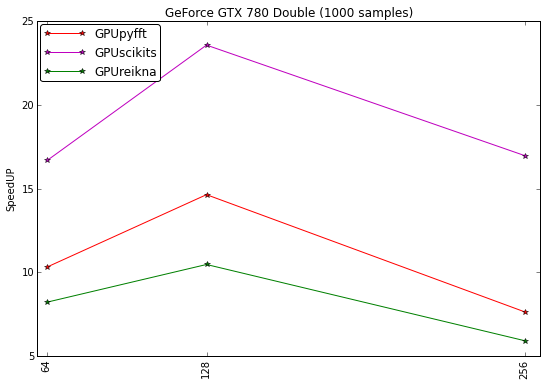
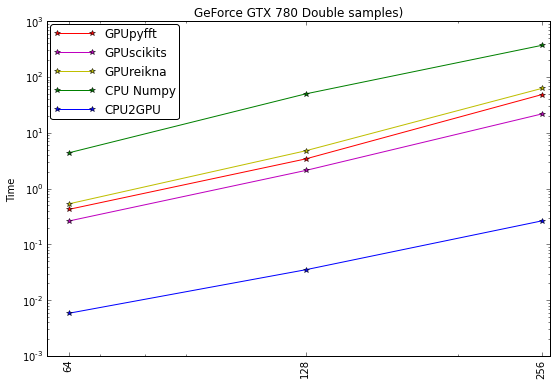
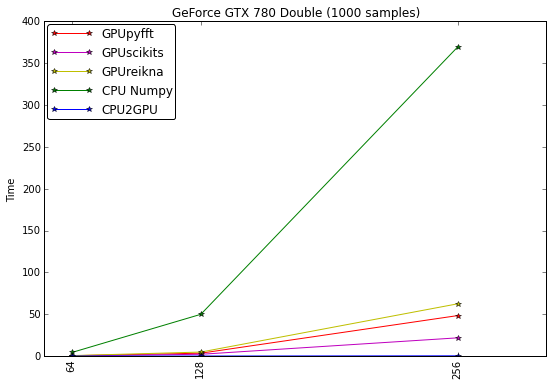

In [44]:
%%HTML
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiIAAAGBCAYAAABb1Nr3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xl4VOX1wPHvmz1k3yZhCUvYQlBAQBHUXxEsCtWiYJVBWeqKawFBpK0CitoiUrWKS4sgW+KOC6JSLdYWFEEUMQHCFhZhJvu+z/v7407CEBISIJOZSc7neeZhZu6de8+9E2bOvMu5SmuNEEIIIYQreLk6ACGEEEK0XZKICCGEEMJlJBERQgghhMtIIiKEEEIIl5FERAghhBAuI4mIEEIIIVxGEhEhhNtTSh1SSo1sYNlwpdSR89j21Uqp9889utZLKTVVKfX1eW6jn1Lqf80Vk2h9JBERbkspNUEp9a1SqkgpZVFKfaOUuqeJrx2ulLIppQodbh84O+ZGYvJTSj2mlNptP6ajSqlPlFK/VkpNdIizpE7sBUqpIPuX8USH7YUopQ4rpcY1sL+f6xx/pVLqQ4fllyulvlNK5Sul9iul7qzz+hlKqeP25cuUUn5nODab/ZgKlVJZSql/KaVuao7zZqftN2d4Eni65oFS6gml1E/28zWv7sr29yrDfrzvK6UiHJb5K6Vet5+z40qpGXVeO0AptV0pVayU2qaU6u+kY3IbWuudQJ5S6lpXxyLckyQiwi0ppR4CngP+CsRqrWOBacBlZ/pCrOOY1jrE4Tb2HOJozv8j7wDXAZOAcKAr8DzwG6312po4gdF1Yg/VWhcDdwHPKaWi7dtbBGzVWr9X38601n0djx84ArxlPy5v4H3gNa11GHAzsEQp1c++/GpgDjAC6AIkAAsaOb5+9v30AlYALyqlHjvLc9SilFIXA6Fa660OT6cDs4H11El+lFJ9gVeAW4BYoARY6rDKfKA70Bm4EnjYfi6x/91+AKzEeP/fAD5QSvk2+4G5nzXA3a4OQrgprbXc5OZWNyAMKAJuaGQ9f2AxkAGcAF4GAuzLhgNHGnhdH2ATkAvsAq5zWLbCvp1P7DGMAOKB9wArkAX83WH924BUIAf4FOjcwD6vwvjS6tCE4z9T7MuBtfZ1sgBTE8/pr4ACIND+uANgqzlf9ue2Ajfb768FFjosuxI4fobt24CEOs+NB0qBCId9fghkY3zZ31HnvD/R0DkADgKPAD/bz/XrgH8D63YA3rW/XweAB84Q92MYyVh9y1YB8+o89xSw2uFxAlAOBNkfHwOucli+AEi23x8FHK2zvQzg6gb2P8Z+vAXAUeAh+/MRwMf248sBPgI6OrxuE/AE8D+g0H7OozGSgXz7+9ylznv3ALAfyMRIcJV92VTga4d1E4GN9vdwN/C7xuK1L+uI8ffv2xyfEXJrXTdpERHuaChGktFYV8pfgB5Af/u/HTG+WBpk//X5EUbSEIPxAbxGKdXLYTUzxpdiMPANxof+QYyWgY5Ain1bY4G5wA0YH/RfA8kN7Poq4But9S+NHFNjZmAkBW9jfNBbm/i6KcA7WutSAHscO4HblFLeSqlhGMf3X/v6ScCPDq/fCcQ6dkM0wYeAD3CJ/XEKcBhoD9wIPKWUutK+rLGuFwVMxPgy747R6vLn01YyWrA+AnZgJCQjgelKqVENbPcCYE/TD+nU86K1PoCRiPSyn5v2nH7e+trv97U/dvSjw/K6lgF3aa1D7et8aX9e2Zd1tt9KgRfrvPZm4FaMv9fuwBb7ayKBNKBul9P1wCBgIDAWI8E+hVIqCCMJWY3xf2cCsFQpldhIvGitjwGVQO8GjlW0YZKICHcUDWRprW01TyilNiulcu3jJy5XSingTmCm1jpPa12E0c8/wWE7HeyvqbndCFyK8ev1L1rrKq31vzESDbPD69ZprbfY7/fH+HKZrbUu1VqXa61rBt5NA57WWu+xx/o0MEApFd/AMVkcjifSHlOeUqq0qSdGa52H8aszEKNrpVFKqXYYrRMr6iy6C+MXexnwFfBH+xcGQDDGr+caBfZ/Q84i1kqMVptI+zkZBszRWldorX8E/glMdgz1TJsDXtRaH9Na52KM6zDXs97FQLTWeqH9/T1o38+EetYFo4uksKnHxOnnBYxzE2JfBqeft5pzdqbX1qcC6KuUCtVa52utdwBorXO01u9rrcvsf/dPYbR41dDAcq31Qa11AbAB2Ku1/lJrXY2RxF5UZ19/tf8/OoLRJVrfub0WOKi1fkNrbdNa/4DRUlgzFqjeeB0UYpxvIU4hiYhwR9lAtOP4DK31MK11hH2ZF8YvsnbA9ppEA+MDN9phO79orSMcbu9g/EquO8Miw/48GB/iRx2WxQMZjkmRgy7A8w77z7Y/37GedbMwEpqa48mxH88gjNafJlFK3Wrf778wxs80xTggW2v9H4ftdMRIwCZqrX0xfsHOUUqNsa9SBIQ6bCPM/m+Tv7TtrU8xGN0HHYAcbYx1qXGY+s9VQxzft8OcfM8cdaFOAorRamVqYJu5nHqcjSni5LmoEYZxXorsj+uet5pzVvec1iwvoH7jMbo7DimlNimlLgUjsVRKvWofvJyPkUSG2ZPzGhaH+2UY3TiOj4M5VVPP7ZA653YixliZBuN1EALkNXCsog2TRES4oy0Yzd3Xn2GdLIwm6SSHRCPc3ix8Jr8A8XU+tLtg9O3XcOwiOAJ0tg/urOswRlO0Y7ITpLX+pp51vwAuticAjs7UCnDqikqZgCXAHRitMTcppS5vwkunYAyQdDQMY7zCRgCt9V6MwZmj7ct/BgY4rN8fsNhbI5pqLFCFMSbhF4yWEccvwM6cTPqKMRLLGnH1bK9znfv1dXMdwfjV7viehGqtG5qxsROjm6chdbuLfsY4FwAopboDfhgtDrnAcU4/b7scXtuvzvb62Z8/fcdab9NaX4+RzK3DPtAYeMge8yXaGGj8K4y/o4b+lpoy26juuT1WzzqHga/qnNsQrfV9jcRbk/j6cXbdYKKNkEREuB1798MCjP7n8fZpql5KqQFAkH0dG/APjFkkMWB82J1hLECNbzAGzT2slPJVSg3HaHJOsS+v+2H+LcaXy1/sv0QD7OMpwJg98UelVJJ9/2FKqd81cEwbgX8D65RSlyhjKq8vRldRU6elvgi8r7X+Smt9AngY+Ecj02o7YQzmfKPOol1Ab6XUlcrQHeM81IxvWAncrpTqYx/78CjGQNkzUfZ9RiqlbrHH+xetda69yX8z8LR9ims/jHEIq+2v/QEYo5SKUErFAdPr2fZ99vc4EvgTJ98zR1uBQqXUw0qpQPv4lwuUUoMbiPkTTu3WQCnlo5QKALwBX/t7XvNZuQa4zt49GIQxKPRdh5aelcCflVLhSqk+GEnjCvuyTUC1UupB+zl4EGOgaO1YCocYfJVStyilwuzdKYVAtX1xMEYSnm8/F6dNMebUv+OmJLuz7DHHAw8Cb9azznqMsTC32uPzVUpdrJRKbCReMM7xF/buOiFO1RIjYuUmt3O5YTT7fovxa9mKkUTcgX3kPUaXxpMYo/3zMWav3G9fNhw43MB2kzC+FPIwvpDHOixbDjxeZ/14jPEYWRizCp5zWHYrxq/qfIxfjP88w/H4Ynxp7LUf0xGMD/er6qx3WuwYrUNHMaaaOj7/BQ6zTerZ51yMX7H1LZtsP2cF9liexj5bwr58BsZspHyMgYgNznjA+EItwvgCyrbHNaHOOh0xBpJmA/swWpNqlvljJBb5GEnJdMdzgDFYeA5G60Gu/X1ynCHluG57jFk/xzG6hTYDI84Q+1aM1oWaxyvsx+N4m+yw3IzRnVdk/7sId1jmZz9X+fZzN73OvgYA2zCS4W1A/zP8rWywx5+P8f9gmMPx/dt+rndjjPWpBrzsy/8N3OawrSeA1x0eX4XRguP43t2P8f8oC3im5u8AozXtPw7r9uLkjJ0sjC7CfmeK1/669cC1rv5MkZt73mr+2JqdPbNeidE3qzGmyL2glJqP8WWSaV91rtb6U6cEIYQQjVBK/Rq4V2t9g6tjcQWllA3ooY0ZQM7Yfj/gZa31Zc7YvvB8zkxE4oA4rfUP9n7h7Ri/6m4CCrXWS5yyYyGEEE3m7EREiMb4OGvD2ujDPmG/X6SUSuPkCPkmD9ATQgjhVM4qnS9Ek7TIYFWlVFeMees1swkeUEr9qIzrV8i8ciGEcBGttbe0hghXclrXTO0OjG6ZTRjlotfZpyDWjA95Amivtb69zmskQxdCCCFaGa31aT0iTk1E7NMTPwY2aK2fq2d5V+AjrfWFdZ7XTYlr/vz5zJ8/v1liFeJsyd+fEKKtOZ/PPaVUvYmI07pm7AWjlgGpjkmIUqq9w2o3AD85KwYhhBBCuDdnjhG5DKPGwpVKqR3222jgr0qpnUqpHzGK3MxobEPJyckkJCTg7e2NUqr2tmDBglMey80zbt7e3iQkJJCc3ND14YQQQrQVzpw181/qT3Q2nM12kpOTmTlzJu+++y6DBw/Gz6/BIpLCQ1RUVLBt2zbGjx8PgNlc3/W13N/w4cNdHYIQQrQoZ3zuOX2w6rlwHCOSkJDA6tWrGTZsWCOvEp5m8+bNTJo0if3797s6FCGEEE7W0BgRt09EvL29KS0tlZaQVqiiooLAwECqq6sbX1kIIYRHa/HBqs3FZrNJEuIi77//PvHx8YSEhPDjjz+yZ88eBgwYQGhoKC+++OJ5b9/Pzw+bzdYMkQohhPBUbp+ItAUpKSkMGTKE4OBgYmNjufTSS3n55ZcBmDp1Kv7+/oSEhBAVFcWoUaPYs2dP7bJHH330lG0dOnQILy+vZvmCnzVrFkuXLqWwsJD+/fuzaNEiRo4cSUFBAffffz9du3blyy9Pu3CoEEII0WQem4horVn0yCO4Q9fS+cTy7LPPMn36dObMmYPFYsFisfDKK6+wefNmKioqUEoxZ84cCgsLOXr0KCaTialTpwLUzkJxBq01hw8fJikpqfa5jIyMUx7bm9mcsn8hhBBtg8cmIp+9+y7Hly7l8/fec3Uo5xxLfn4+8+bN4+WXX2bcuHEEBQUBMGDAAFatWnVal1RgYCBms5ldu3YB1F5C+Uy6du3KX/7yF/r27UtkZCS33XYb5eXlAFxwwQV8/PHHtetWVlYSHR3N1q1bCQkJobq6mv79+9OjRw9GjhzJpk2buP/++wkJCWHixIkcPnyY6667jpCQEBYvXnxWxy6EEEKAByYiq199lWv79uXrP/6RJYWF/GfuXK7t25fVr77qcbFs2bKF8vJyxo4de8b1apKNoqIi1qxZw8CBAwGa3Bqydu1aPv/8c/bv38/evXtZuHAhAFOmTGH16tW1633yySd07NiRSy65hKKiIgB27tzJvn37+OKLL7jiiit46aWXKCwsZO3atXTu3JmPP/6YwsJCZs2a1aRYhBBCCEcel4jcctdd3Dd/PrayMhRgS0/n/tRUbpk2DZRq0dst06ZxX2oqtvR0I5ayMu5fsIBb7rqrSceSlZVFdHQ0Xl4n34Zhw4YRERFBu3bt+Prrr9Fas3jxYiIiIujZsyclJSWsWLGiyedLKcX9999Px44diYiI4E9/+lNtIbFbbrmF9evX1yYdq1atYtKkSWfcnnTFCCGEaE4el4jUjIsoy8tjZlISpSEhqHfeQWkNLXxTWqPefpuykBAjlry8sxq3ERUVRVZW1ikDSzdv3kxubi5RUVHYbDaUUsyePZvc3FyOHz/OunXr6NatGwA+Pj5UVlaess3Kykq8vLxOSW7i4+Nr73fu3JlffvkFgA4dOnDZZZfxzjvvkJeXx6effsott9zS6PkXQgghmovHJSIAR9LTuWb5cp7dtYvRy5dzJD3dI2MZOnQo/v7+rFu37ozrNdQK0blzZw4dOnTKcwcPHjwl8QA4fPjwKfc7dOhQ+7ime+btt99m2LBhtG/fnqaSpEQIIcT5clqJd2e6c+7c2vtX28uEu8r5xBIeHs68efO499570VozatQogoKC2LlzJ8XFxY2+fvz48SxatIiNGzcyYsQILBYLCxcuPKVkutaapUuXcu211xIYGMiTTz7JhAkTapffcMMN3HfffVgsFubMmdPoPh2TotjYWPbv38+IESPO6riFEEKIGh7ZItKazJ49myVLlrBo0SLi4uKIi4tj2rRpLFq0qLasfUMtD0lJSSQnJzN37lyioqIYNmwYQ4cOZd68ebXrKKWYOHEio0aNonv37vTs2ZM///nPtcsDAgIYN24chw4dYty4cadsv779Oj43d+5cFi5cSEREBEuWLDmv8yCEEKJtcvsS71Kr4vx069aNZcuWnbHV4oknniA9PZ2VK1e2YGQGeX+FEKJtaKjEu0d2zYjmk5OTw+uvv86qVatcHYoQQog2SLpm2rB//OMfdO7cmdGjR3P55Ze7OhwhhBBtkHTNCJeS91cIIdoGj736rhDuSGvNk488KUmUEEKcJ0lEhDgH699dz09Lf+KT9z5xdShCCOHRJBER4iyseHUFI5NG8t6D73F34d2sm7uOkX1HsuLVFa4OTQghPJIkIkKchZt+fRO/rfwtFVkVKBSlh0uZesVUJt440dWhCSGER5JERIgmsiRb2DFkB+GXhVMVUMXyxOVUeFVQ/GMx3yZ8y85rd2JZY6GqqMrVoQohhMeQREScJiQkpPYaNlOnTuXRRx+td7177rmHhQsXtmBkrlFVWEXa1DQOzT9Ev8/6UdS7iEnLJ7EidQVTVk3BNtbG0CNDMd1swrLGwpaOW/j55p/JXJeJrdzW+A6EEKINk+m7biAlJYW//e1v/PzzzwQFBdGtWzemTJnCPffcw9SpU0lOTsbPzw8/Pz8GDRrE3//+d3r37s3UqVOJj4/niSeeqN3WoUOHSEhIoKqq6pQr8J6r3//+98THx/P444+fcb1NmzYxadIkjhw5clbbd/f3t3B7IakTUgm7IoweL/TAJ7jxGoAVWRVkvZuFJdlC8c5ioq+PxmQ2EX5lOF4+kvsLIdqmVjd9152mT55PLM8++yzTp09nzpw5WCwWLBYLr7zyCps3b6aiogKlFHPmzKGwsJCjR49iMpmYOnUqYLypLXEFXHc4xy1N2zSHFx9m5+iddFvYjcTXE5uUhAD4RfvR4e4OXLTpIgbvHEzQBUEc/ONBtnTcwt7795L/v3y0re2dUyGEqI/HJiLuNH3yXGPJz89n3rx5vPzyy4wbN46goCAABgwYwKpVq/Dz8ztl/cDAQMxmM7t27QKMBKGxJOGvf/0rnTp1IjQ0lMTERL788ksAqqureeqpp+jRowehoaEMHjyYY8eOAeDl5cWBAwdO21ZhYSFXXnkl06dPB05225SUlDB69Gh++eUXQkJCCA0N5cSJE2zdupXBgwcTFhZGXFwcDz300FmdH1cpP1HOztE7yXovi4FbB2K62XTO2wroFED8zHgGfTeIi/57EX6xfuy5cw/fdPuG/XP2U/hDYZtM9IQQoobHJSIrXl3ByL4j+eCPH7h8+uT5xrJlyxbKy8sZO3bsGder+aIqKipizZo1DBw4EGj4qrw19uzZw0svvcS2bdsoKCjg888/p2vXrgAsWbKElJQUNmzYQEFBAa+//jqBgYH1bkcpRXZ2NiNHjuSKK67gueeeq31eKUW7du349NNP6dChA4WFhRQUFBAXF8cf/vAHZsyYQX5+PgcOHOCmm25q0nlxpewN2Wy/aDuhl4Qy4D8DCOxa/zk5F+16tqPro125+OeLufDDC1Feil3X7+K7pO849PghStJLmm1fQgjhKTzuondT7ppCVGQU7z/0PgpFSXoJV3M1XaZ1YdO0TS0aSxe6MIpR7GQnCkV1WTUznprBb8b/pkmvz8rKIjo6+pSxHMOGDSMtLY3y8nI+++wztNYsXryYF198kYCAAIYMGcKKFSuatH1vb2/Ky8v5+eefiYqKonPnzrXLli1bxjPPPEPPnj0B6NevX4PbOXbsGMOHD2fq1KmntWrUJEn1/ar38/MjPT299jiHDBnSpLhdwVZu48AjB8h8N5OklCTCfxXutH0ppQjuH0xw/2C6PdWNgm8KsCZb2XHFDvw7+RNrjiXm5hgCOgU4LQYhhHAXHpeI1PwKL8krYUXSCqqOVNF3eV+uHH+lS+IpfqeYHbftYEX8CkqPlJ7VuI2oqCiysrKw2Wy1ycjmzZsBiI+Px2azoZRi9uzZ9Q4W9fHxobKy8pTnKisr8fLywsvLix49evDcc88xf/58fv75Z66++mqWLFlC+/btOXLkCN27d280Rq0169evJyQkhLvvvrtJx1Vj2bJlPPbYY/Tp04du3boxb948fvObpiVpLalkTwmpE1IJ6BbA4B8G4xvp22L7VkoRNjSMsKFhdF/SnbxNeViTrWT0yyDowiBMZhMxN8bgF+3X+MaEEMIDeVzXDEBGegaTlk9i+a7lTF4+mYz0DI+MZejQofj7+7Nu3bozrtfQGILOnTvXTrOtcfDgQeLj42sfm81mvv76azIyMmoHvoKR6Ozbt6/RGJVS3HnnnVx99dWMGTOGkpKS05Y7/uuoR48erF27lszMTObMmcONN95IaWlpo/tsKVprji87zo7Ld9D+7vb0fbdviyYhdXn5eBF5VSSJyxIZdnwY8TPjyduUx7fdv2Xn6J2cWHmCqgKpUSKEaF08rkUE4L6599Xeb2o3iLOcTyzh4eHMmzePe++9F601o0aNIigoiJ07d1JcXNzo68ePH8+iRYvYuHEjI0aMwGKxsHDhQsxmMwB79+7l6NGjXHbZZfj7+xMQEFCb1Nxxxx08+uijJCUl0b17d3766Sc6depEZGTkKfuoWf/FF1/kzjvv5LrrrmP9+vW126pZHhsbS3Z2NgUFBYSGhgKwevVqrr76amJiYggLC0Mp1SxTiptDZV4le+/eS0lqCQM2DSCob5CrQzqFl78X0WOjiR4bTVVRFdkfZWNNtpL+QDoRv44g1hxL5JhIvAO9XR2qEEKcF/f4VmjDZs+ezZIlS1i0aBFxcXHExcUxbdo0Fi1axLBhw4CGB6UmJSWRnJzM3LlziYqKYtiwYQwdOpR58+YBUF5ezty5c4mJiaF9+/ZkZWXx9NNPAzBz5kxuuukmRo0aRVhYGHfeeSdlZWWn7c+xq+m1116jU6dOXH/99ZSXl5+yLDExEbPZTEJCApGRkRw/fpzPPvuMCy64gJCQEGbMmEFKSgr+/v7OOZFnIX9zPtsGbMM3xpeBWwe6XRJSl0+wD7HmWC788EIuPXgpkddEcmzpMbZ02ELalDSyN2Rjq5TCaUIIzyQFzYRLteT7q6s1GU9lcOylY/R+rTfRv41ukf06S/nxcjLfysSSbKHsQBkx42MwmU2EXR6G8nJ+fRkhhDgbDRU0k0REuFRLvb9lR8pIuzUN5a3os6oP/h1d3zLTnEoPlGJNsWJNsVKVW0XMzTHEmmMJHhjcIkXvhBCiMZKICLfUEu9v5vuZ7J22l07TO9H54c4o79b9xVz8czGWZAvWZCvKW2EymzCZTQQluncXlBCidZNERLglZ76/1SXV7Ju5j9zPc+mztg9hl4Y5ZT/uSmtN4XeFWJOtWN+04mvyJdYci2mCiYAuUqNECNGyJBERbslZ72/RziJSzakE9w+m18u98AnzyAlizUZXa/L+k4c1xUrmu5m0693OaCn5nQm/WKlRIoRwPklEhFtq7vdXa82xl46RsSCD7ou7Ezs5VsZI1GGrsJG7MRdLsoXsj7MJvSQUk9lE9A3R+Ia7ro6KEKJ1k0REuKXmfH8rsirYc9seyn8pJyk5iXY92zXLdluz6pJqsj82apTkfplLxIgITGYTUddG4d1OapQIIZqPJCLCLTXX+5v7ZS5pk9OInRhLt4Xd8PKTEjlnqzKvkqz3s7AmWynYWkDUb6IwmU1EjoqU8ymEOG+SiAi3dL7vr63SxqHHDnFi5QkSlycSOSqy8ReJRlVYKrC+bcWabKVkTwkx44waJeH/F97qZx0JIZyjoUREfuaIU4wZM4ZVq1YBsGLFCq644goXR9Sw0gOl7Lh8B0U/FjF4x2BJQpqRX6wfne7vxMD/DWTw9sEE9ghk/8z9bInfwr4Z+yjYWiA/EIQQzUISETeQkpLCkCFDCA4OJjY2lksvvZSXX34ZgKlTp+Lv709ISAhRUVGMGjWKPXv21C579NFHT9nWoUOH8PLywmY7t5Lfn3zyCZMmTTq/A2oBljUWvh/yPSaziQs/vhA/k8z8cJaALgF0frgzg3cMpv+X/fEO9Sbt1jS+7fEtB/50gKJdRa4OUQjhwTw2EdFa88iCR9ziV9n5xPLss88yffp05syZg8ViwWKx8Morr7B582YqKipqr5hbWFjI0aNHMZlMTJ06FTj1OjBNUVXl+VdurSqsIm1KGoeeOES/z/sRPz1eypm3oKDEILot6MYley6h71t9sZXb+Gn0T3x34XdkPJVB6QH3ubqyEMIzeGwi8u5H77L0y6W89/F7rg7lnGPJz89n3rx5vPzyy4wbN46gIKPy5YABA1i1ahV+fqf+yg8MDMRsNrNr1y6AU65+25CuXbuyaNEi+vXrR0hICDabjW+++YZhw4YRERHBgAED+Oqrr2rXHz58OMuWLat3W7Nnz+aKK66goKCAFStWcPnllzN79mwiIyNJSEjg008/rV13+fLlJCUlERoaSvfu3XnttdfO6tzUp2BbAdsHbkf5KgZvH0zIRSHnvU1xbpRShAwKocfiHlyacSk9l/ak/Gg531/6Pdsv3c7R549Sfrzc1WEKITyAxyUiry5/lb6X9eWPy/9I4ZWFzH19Ln0v68ury1/1uFi2bNlCeXk5Y8eOPeN6NclGUVERa9asYeDAgUDDV+WtKyUlhQ0bNpCXl8fx48e59tpreeyxx8jNzWXx4sWMHz+e7Ozs2m3W3a7WmjvvvJNdu3axceNGQkNDAdi6dSuJiYlkZ2fz8MMPc/vtt9e+JjY2lvXr11NQUMDy5cuZMWMGO3bsaFK8px2/TXP4mcP8NOYnuj3ZjcR/JuIdJFNL3YXyUoRfEU6vpb0YemwoXed3pfD7Qr5L+o4fRv7AL//8hcrcSleHKYRwUx5XbvKuqXd1kqHxAAAgAElEQVQRGRnJQ689BArSs9KhG0zLmMa0BdNaNhgNdAMyAAVlFWU8Necpxl83vkkvz8rKIjo6Gi+vk/ngsGHDSEtLo7y8nM8++wytNYsXL+bFF18kICCAIUOGsGLFiiaHqJTiwQcfpGPHjgCsXr2aMWPGcM011wBw1VVXMXjwYNavX8/kyZNPe31lZSUTJkzAZrPx0Ucf4eNz8k+mS5cutcnH5MmTuffee7FarZhMJsaMGVO73v/93/8xatQovv76ay666KImxw7GFWZ3T9lNdXE1g74bJKXJ3ZyXrxdR10QRdU0U1aXV5HySgyXZwv6H9hP+f+FGjZLfRuET7HEfPUIIJ/G4T4OaX+x5RXkkbU/iiNcRlt+8vMlf/s3tnQ/f4bZnbyN+ezxHio6c1biNqKgosrKysNlstcnI5s2bAYiPj8dms6GUYvbs2Tz++OOnvd7Hx4fKylN/aVZWVuLl5XVKchMfH197PyMjg7fffpuPPvqo9rmqqipGjBhRb4z79u1j586dfPvtt6ckIQBxcXG199u1M4qHFRUVYTKZ2LBhAwsWLCA9PR2bzUZJSQn9+vVr0nmpkf1JNntu30P7u9rT5dEuePl4XANem+Yd6E3M+BhixsdQVVBF1rosLKst7L1nL5GjI4k1xxJ5TSRe/vK+CtGWeeQnQPrBdJbPWs6uD3axfNZy0g+me2QsQ4cOxd/fn3Xr1p1xvYbGgXTu3JlDhw6d8tzBgwdPSTzg1C6czp07M2nSJHJzc2tvhYWFPPzww/Xuo0+fPrz++uuMHj2avXv3NuGooLy8nPHjx/Pwww9jtVrJzc1lzJgxTR7Mayu3kT49nb3T9pL0ZhLdFnSTJMTD+YT6EDc5jn6f9GPI/iGEDw/nyJIjbO6wmd237ybnXznoatcPPBdCtDyPaxEBmPuHubX3XdUSUuN8YgkPD2fevHnce++9aK0ZNWoUQUFB7Ny5k+Li4kZfP378eBYtWsTGjRsZMWIEFouFhQsXYjabG3zNrbfeysUXX8znn3/OyJEjqays5JtvvqFnz5613Td1TZgwgYqKCq666io2bdpEQkLCGeOqqKigoqKitttpw4YNfP7551x44YWNHlPx7mJSJ6QS2D2QwT8MxjdSrn3S2vhF+9FxWkc6TutI2dEyMt/M5MAjByg/Wo7pdyZMZhOhQ0PlGkFCtBEemYi0JrNnz6Zjx44sWrSIyZMnExQUREJCAosWLWLYsGGsWLGiwQ/kpKQkkpOTmTt3Lvv27SM8PJybb76ZefPmNbi/Tp068cEHH/Dwww9jNpvx9vZmyJAhtXVLHDl2M02ePJmKigpGjBjBV199VW8XVM3jkJAQXnjhBW666SbKy8u57rrrmjQg9/iy4xyce5BuT3aj/Z3t5YuoDQjoFED8Q/HEPxRPyd4SrClW9ty+h+rSakwTTMSaYwnqFyR/C0K0YlLiXbiUUoqKnAr23rWXkj0lJKUkEZQU5OqwhAtprSn6sQhrihVrihXvdt6YzEZLSbseciFDITyVXGtGuCWlFJu7bCb6t9EkLErAO0Cm5YqTtE1T8E0B1mQr1resBHQOwGQ2EXNTDAGdZAaVEJ5EEhHhlpRSZH6YSfR10a4ORbg5W5WNvH/nYU22krUui6ALg4yk5MYY/KKlxL8Q7s5jExFfX18KCgoIDAx0cVSiuZWWlhIaGnraFGQhGmMrt5G9IRtripWcDTmEXRaGyWwi+vpofEJk6JsQ7shjE5GrrrqKoKAglixZQpcuXU6rZSE8T1VVFRkZGcycOZOSkhI2btzo6pCEB6sqqiL7w2ysyVby/pNH5KhITGYTkWMipatPCDfisYlIeXk5TzzxBP/85z+xWq3STdMKKKUwmUzccccdPProo/j7+7s6JNFKVOZUkvluJtZkK0U7iogaG0WsOZbwkeFSi0YIF/PYRER4vqIfi0g1pxIyKISeL/XEJ1RatYTzlf9SjvUtK9ZkK2UHy4i5MQaT2UTYZWFyxWYhXEASEdHitNYce/EYGY9n0H1Jd+ImxTX+IiGcoHR/KdY3jaSkKr8K083GdODgi4KlRokQLUQSEdGiKjIr2HPbHiosFfRZ20fqPwi3UbSryJgOnGxF+SqjRskEE0GJUr9GCGeSRES0mNwvckmbnEbsrbF0e6IbXn7SNy/cj9aawq2FWJItZL6ViV+sX21SEtBZapQI0dwkERFOZ6u0cfDRg1hWWUh8I5HIqyJdHZIQTaKrNXlfGTVKMt/LpF2fdsSaY4n5XQx+JqlRIkRzkEREOFXp/lJSzan4mnxJXJ6IX4x8eAvPZKuwkfN5DtZkK9nrswkdEmoUTrshBp8wGWgtxLmSREQ4zYnVJ9g/Yz9dHu1Cxwc6yuA/0WpUF1eT/XE2lmQLef/OI2JkBCaziahro/AOlBolQpwNSUREs6sqqCL9vnQKtxXSJ7kPIQNCXB2SEE5TmVdJ1ntZWJOtFHxXQNS1Ro2SiFERePnKOCghGiOJiGhWBd8VkGpOJWJEBD3+1gPvIPl1KNqOCksF1reNmTcle0qIGW/UKAm/IhzlLS2CQtRHEhHRLLRNc+SZIxx59gg9l/bEdKPJ1SEJ4VKlh0rJfDMTS7KFyszK2holIYNDpJtSCAeSiIjzVv5LOWmT09Dlmj5r+sgURyHqKE4rrq1RorXGNMFErDmWoL5So0QISUTEecn6OIs9d+yh4z0d6fynznLdDiHOQGtN4fZCIyl504pvpG9tjZLAbnIlcdE2SSIizkl1WTUHHj5A1gdZ9FnTh/DLw10dkhAeRds0+f/NN2qUvJNJYI9AYzrwTTH4x8kFH0XbIYmIOGvFacWkTkilXa929HqtF74Rvq4OSQiPZqu0kfuvXKNGyUfZBA8KJtYcS/S4aPn/JVo9SUREk2mtOf7P4xz840G6Pd2N9re3l0F3QjSz6tJqstdnY022kvuvXMJ/FY7JbCL6t9EyC020SpKIiCapzK1kz517KN1XSlJyEkF9ZJCdEM5WlV9F1gdGjZL8LflEjY7CZDYReXUkXv4yHku0DpKIiEblfZ1H2q1pRF8fTcJfE/AOkF9lQrS0iswKMt/JxJpspfjnYqJviCbWHEv4cKlRIjybJCKiQbYqGxkLMzj+6nF6/7M3Ub+JcnVIQgig7EgZ1jeN6cAVv1QQc1MMpgkmQi8Nle5S4XEkERH1KssoI/WWVLwDvUlcmYh/exnFL4Q7KtlbgjXZiiXZgi43apSYzCaCLgySpER4hBZPRJRS8cBKwARo4DWt9QtKqUjgTaALcAi4SWudV+e1koi0AOvbVtLvSyd+Vjzxs+JRXvJhJoS701pT9GORUaMkxYp3sHdtjZJ2Pdq5OjwhGuSKRCQOiNNa/6CUCga2A9cDvweytNaLlFJzgAit9SN1XiuJiBNVF1ezb/o+cv+dS1JyEqEXh7o6JCHEOdA2TcGWAizJFjLfziSgS4DRUnKzCf+O0rop3IvLu2aUUuuAF+23X2mtLfZkZZPWOrHOupKIOEnhD4WkmdMIuTiEni/1xCfEx9UhCSGaga3KRt6XeViTrWR9kEVQvyBizbHE3BiDb5TUKBGu59JERCnVFfgKuAA4rLWOsD+vgJyaxw7rSyLSzLTWHHvhGBkLM+jxXA9ib4l1dUhCCCepLqsmZ0MO1hQrOZ/mEHZ5mFGjZGy0/PgQLtNQIuL0v0h7t8y7wB+01oWOg6q01lopVW/GMX/+/Nr7w4cPZ/jw4c4NtBWrsFaw+/e7qcyqZOA3AwnsLte6EKI18w7wJuaGGGJuiKGqsIrsD7OxJFtIvy+dyKsjjRoloyNlir5wqk2bNrFp06ZG13Nqi4hSyhf4GNigtX7O/txuYLjW+oRSqj3wb+macZ6cjTnsnrqbuMlxdH28K16+UhxJiLaqMruSzHeNGiVFPxYRPTYa0wQT4SPD5UKWwulcMVhVAW8A2VrrGQ7PL7I/91el1CNAuAxWbX62ChsH/3wQy1oLfd7oQ8TIiMZfJIRoM8qPlWN9y5h5U3aojJgbYzCZTYQNC5MZdMIpXJGIXA78B9iJMX0XYC6wFXgL6IxM33WKkn0lpJnT8Ivzo/fy3vhF+7k6JCGEGyvdX4o1xahRUl1QXVujJHhAsNQoEc3G5bNmzoYkIufuxKoT7J+5ny7zutDxvo7yISKEOCtFP9lrlCRbUf6KWHMsJrOJdr2kRok4P5KItHJVBVXsvXcvRd8XkZSSRHC/YFeHJITwYFprCr4twJpsJfOtTPza+9UWTguID3B1eMIDSSLSihV8W0DqxFQifh1BjyU98G4nI+GFEM1HV2vyNuVhSbaQ9X4WQUlBmMwmYn4Xg1+MdP2KppFEpBXSNs3hRYc5+rej9Hq5FzHjYlwdkhCilbNV2Mj5LAdrspXsT7IJvTSUWHMs0ddH4xMmNUpEwyQRaWXKfyknbVIaulLTZ00faSoVQrS46uJqsj7KwppsJW9THhEjIzCZTURdG4V3oLTMilNJItKKZH2UxZ4799Dx3o50+VMXlLcMSBVCuFZlbiVZ72VhSbZQuK2Q6OuiMZlNRPw6QuoXCUASkVahuqyaA7MPkPVRFklrkgi7LMzVIQkhxGnKT5ST+bZROK00vZTo8dHEmmMJu0JqlLRlkoh4uOLUYlInpNIusR29XuuFb7hcxEoI4f5KDxk1SqzJViqzKzHdbNQoCRkUIuUF2hhJRDyU1prjrx3n4J8PkvCXBOJui5P/vEIIj1ScWow12SicppSqLZwWlBTk6tBEC5BExANV5lSy5849lB0oo09yH4IS5T+rEMLzaa0p3FZotJS8acU3yre2RklgV7koZ2sliYiHyfsqj7RJacSMjyHhLwl4+ctgLyFE66Ntmvyv840aJe9mEdgz0EhKbjLhFys1SloTSUQ8hK3KRsbjGRz/x3F6L+tN1JgoV4ckhBAtwlZpI3djLtZkK1kfZRF6cSimCSaix0XjGyHj4jydJCIeoPRQKWm3pOEd5E3iykT84/xdHZIQQrhEdUk12euzsSZbyf0il/Dh4ZjMJqKvi8Y7SGqUeCJJRNyc9S0r6fenE/9wPPEz42WKmxBC2FXlV5G1zqhRUvBNAVFjojCZTUReHYmXn3RbewpJRNxUdXE16Q+mk/+ffPok9yF0cKirQxJCCLdVYa0g8x2jRklxajEx42IwmU2E/ypciju6OUlE3FDhjkJSzamEXhpKz7/3xCdErtMghBBNVXa4DOubRo2SiuMVxNxkJCWhQ0KlzIEbkkTEjWitOfr8UQ4/eZgez/cgdmKsq0MSQgiPVrKnBGuKUaNEV+jaGiXBFwa7OjRhJ4mIm6iwVrB76m4qcypJWptEYILMmRdCiOaitabohyKsyVasKVa8Q72JNccaNUq6y+etK0ki4gZyPs9h99TdxP0+jq7zu8qFoIQQwom0TZO/OR9rspXMtzMJ6BZQW6PEv4PMSmxpkoi4kK3CxsE/HcSaYiXxjUQiRkS4OiQhhGhTbFU28r7Iw5JsIfuDbIIHBGMym4gZH4NvlNQoaQmSiLhISXoJqeZU/Dv603tZb/yipVKgEEK4UnVZNTkbcrAmW8n5LIewK8KINccSNTYKn2CZNOAskoi0MK01J944wYHZB+i6oCsd7ukgo7iFEMLNVBVWkfVBFtZkK/n/zSfymkijRsk1kXgHSOG05iSJSAuqyq9i7z17KdpZRFJykozaFkIID1CRVUHWu0bhtOKdxUSPjTZqlIwIx8tHxvSdL0lEWkj+N/mkTUwj8ppIuj/bHe9AyaiFEMLTlB8rN2qUpFgpyygj5ncxxJpjCR0aKpWvz5EkIk6mqzWH/3qYo88fpdervYi5PsbVIQkhhGgGJfuMGiXWZCvVRdUna5T0D5Yu97MgiYgTlR8rJ21SGtqm6bO6DwGdAlwdkhBCiGamtab4p+LaGiVeAV7GdGCziXY927k6PLcniYiTZH2QxZ6799Dx/o50mdtFrnUghBBtgNaagm8KjKTkLSv+Hf2NpORmEwHx8mO0PpKINLPq0mr2z9pPzic59FnTh7BhYa4OSQghhAvoak3eJqNGSdb7WQT1DTJqlNwYg1+MlGyoIYlIMyr+uZjUCam069uOXq/0wjdciuEIIYQAW7mNnM+MGiXZG7IJGxqGyWwi+vpofELbdo0SSUSagdaaX175hUOPHSJhUQJxU+NkoJIQQoh6VRdXk/WhUaMk76s8Iq6KwGQ2EfWbqDY5o1ISkfNUmV3Jnjv2UJZRRlJyEu16y8AkIYQQTVOZU0nme5lYk60UfV9E1HVRmMwmIq6KaDPXHZNE5Dzkbspl9+TdxPwuhoSnEvDybxt/NEIIIZpf+fFyMt82kpLSfaXE3BiDyWwi7PKwVl2jRBKRc2CrspGxIIPjy47T+/XeRF0T5eqQhBBCtCKlB0tra5RU5VYRc3MMpgkmQgaFtLquf0lEzlLpoVLSJqbhHepNnzf64BcrI5+FEEI4T/HPxViSLViTrShvVVs4LahPkKtDaxaSiJwFS4qFfQ/uo/Mjnek0vVOrbioTQgjhXrTWFG4rNGqUvGnFN8aXWHMspgkmArp4bo0SSUSaoKqoin0P7iP/v/kkpSQRMjCkxWMQQgghauhqTd7XeViTrWS+m0m73u2Mwmm/M3lcS70kIo0o/L6QVHMqYZeF0eOFHvgEt+353kIIIdyLrcJG7sZcLMkWsj/OJvSSUEwTTESPi/aIelaSiDRA2zRHnzvK4b8cpscLPYidENsi+xVCCCHOVXVJNdkfZ2NNsZL7RS7hV4YTa44l6roovNu5Z40SSUTqUWGpIG1KGtX51fRZ24fAboFO36cQQgjRnKryq8h835gOXPBtAVG/MWqURI6KxMvPfcpNSCJSR85nOez+/W7ibouj67yubaagjBBCiNarwlpB5tuZWJItlOwuIWacMR04/FfhLr8oqyQidrZyGwf+eIDMtzJJXJVIxPAIp+xHCCGEcKWyjDKsbxo1SiosFcTcFEOsOZaQS1xTo0QSEaBkbwmp5lT84/1JXJaIb5T7D+4RQgghzlfx7uLawmm6StfWKAm+ILjFYmjTiYjWmhMrTnDg4QN0fbwrHaZ1aHUV64QQQojGaK0p2lFk1ChJseIT7mNMB55gIjDBueMk22wiUpVfxd5peyneVUyf5D4tmv0JIYQQ7krbNPn/yzdqlLyTSUBCALHmWGJuisG/vX+z76+hRKRVj9DM35LPtgHb8In0YeDWgZKECCGEEHbKSxF+RTi9lvZi6LGhdJ3flcIdhXyX9B0/jPiBX/7xC5U5lbXra6158pEnae4GjFbZIqKrNRlPZ3DsxWP0frU30WOjmzE6IYQQovWqLqsm55McrMlWcj7PIfz/wjGZTXxb/S1r71vLpOWT+M3435z1dttM10zZ0TLSbk1DKUWf1X3w79j8zUtCCCFEW1BVUMXSPyzlrbffomtJV27Xt7O251oO+B5g0oOTmHr31CZvq010zWSuy2T7oO1Ejoqk/7/6SxIihBBCnAefUB8eeP0B5iyfg28HXxSK6rJqZiyYwZS7pjTLPjw2EXHsq6ourWbvvXvZP3M/F3xwAV3+2MXlhVuEEEKI1kAphVKK0oJSViStoDivuPa55uCxV3Zb/+56flr6E+/Fvkf8sniC+wUzeMdgfMI89pCEEEIIt5SRnsGk5ZMYM24Mn7z3CRnpGc22bY8bI7Li1RWsemEVCZUJTEyfyOter3Mk7ghTH5t6Vn1VQgghhGg5DY0R8bjmgyl3TSEqMor3pr+HQuET68Os52ed0wheIYQQQriWx40Rqe2rKjT6qkqKSpq1r0oIIYQQLcfjWkTAuX1VQgghhGg5HjdGRAghhBCep03UERFCCCGEZ5FERAghhBAuI4mIEEIIIVxGEhEhhBBCuEyjiYhSSi5dK4QQQginaDARUUpdp5TKBH5SSh1VSl3WgnEJIYQQog04U4vIU8AVWuv2wHjg6ZYJSQghhBBtxZkSkSqt9W4ArfW3QEjLhCSEEEKItuJMlVVjlFIzAVXPY621XuL06IQQQgjRqp0pEfknp7aC1H0shBBCCHFepMS7EEIIIZyuoRLvDbaIKKX+XucpDWQC/9Za/7eZ4xNCCCFEG3SmrpntGMmHoyjgGaXUW1rrvzkvLCGEEEK0BWfdNaOUCgS2aK0HOCck6ZoRQgghWptmu/qu1rqU01tKhBBCCCHO2pm6Zk6jlPIFbgWOOiccIYQQQrQlZxqsWsTpLR+lwFfA3c4MSgghhBBtQ4OJiNY6uCUDEUIIIUTbc6YWkYFneqHW+vvmD0cIIYQQbUmDs2aUUpswumYCgUHATvuifsA2rfVQpwUls2aEEEKIVuWsZ81orYdrra8EfgEGaq0Haa0HARfZnxNCCCGEOC9Nmb6bqLX+qeaB1noX0KcpG1dKva6UsiilfnJ4br5S6qhSaof9ds3Zhy2EEEKI1qDRgmZKqRSgCFiNceXdiUCw1trc6MaVusL+2pVa6wvtz80DCs909V7pmhFCCCFal7O+1oyD3wP3AH+wP/4P8HJTdqq1/lop1bW+eJryeiGEEEK0bo0mIlrrUqXUK8AnWuvdzbTfB5RSk4FtwENa67xm2q4QQgghPEijiYhS6rfAM4A/0FUpdRGwQGv923Pc58vA4/b7TwDPArfXXWn+/Pm194cPH87w4cPPcXdCCCGEaGmbNm1i06ZNja7XlDEi3wMjgH9rrS+yP7dLa31BUwKxd818VDNGpCnLZIyIEEII0bqcz0XvKuvpOrGdRyDtHR7eAPzU0LpCCCGEaN2akoj8rJS6BfBRSvVUSv0d2NyUjSulku3r9lZKHVFK3Qb8VSm1Uyn1I/ArYMa5Bi+Eq2itWfTII0jLnRBCnJ+mdM0EAX8CRtmf+gx4Qmtd5rSgpGtGuLlP33mHz267jWuWL+fq8eNdHY4QQri9hrpmGk1EHDYQpLUubvbI6t+XJCLCLa1+/nlSnn6a/vn5LCwr489du/Jju3ZMePBBbr1bLkothBANOecxIkqpYUqpVGC3/XF/pdRSJ8QohPs6dgzmzOGWBQu4LyEBW3AwCrAdPsz95eXcUlUF2dmujlIIITxOU8aIPAdcA2QBaK1rxnYI0frt3AlTpsCFF0J5OWr7dtTMmZSVlzMzKYnSoCDUzTejvv4aEhJg/Hj44AOoqHB15EII4RGakoigtT5c56kqJ8QihHvQGv71L7jmGuOWmAj79sFzz0G3bhxJT+ea5ct5dtcuRi9fzpGQEEhJgYwMGD0aFi+Gjh3hgQdg2zZje0IIIerVlMGq7wB/A14EhgAPAoO11hOcFpSMERGuUFkJb75pJBKVlTBrFkycCP7+Z7+t/fth9WpYudJ4/eTJcOut0KlT88cthBAe4JwHqyqlYoDngaswrhHzOfCg1tppHeKSiIgWVVAA//gHPP889OhhJCDXXANeTWowPDOt4X//MxKSd96BQYOMpGTcOAgKOv/tCyGEhzjvWTMtSRIR0SKOHjWSj9dfh1GjjARk0CDn7a+0FD780EhK/vc/uP56IykZPrx5kh4hhHBj5zNrprtS6iOlVJZSKlMp9YFSKsE5YQrRAn780UgA+vWDqirYvh2Sk52bhAAEBsLNN8P69bB7N/TvDzNnQteu8Kc/wZ49zt2/EEK4oab8DFsLvAW0BzoAbwPJzgxKiGanNXz+udHyMWYM9O1rjOP429+MRKClxcXBjBnwww/w0UdQXm60jAwZAkuXylRgIUSb0ZQxIju11v3qPPej1rq/04KSrhnRXCoqTg5Ara42ul/M5nMbgOpsVVWwcaPRdfPJJzBypDF1ePRo8PNzdXRCCHFezmew6l+BPE62gtwMRACLALTWOc0bqiQiohnk558cgNq7t5GAXH01qNP+D7in/Hx4+20jKUlLgwkTjO6kwYM95xiEEMLB+SQih4CGVtJa62YfLyKJiDhnR44Yycfy5cbMl4cegoEDXR3V+TlwAFatkqnAQgiPdtaDVZVSlyil2mutu2qtuwELgF3Axxh1RLo5IwkR4pz88IPx5dy/P9hssGMHrFnj+UkIGBVb580ziqr94x9GYtKvH/z610aCUtwil4ASQginaLBFRCm1Axiptc5RSv0f8CZwP3ARkKi1vtFpQUmLiGiKmgGoixdDair84Q9w110QHu7qyJyvtNQY5PrGGzIVWAjhEc66a8ZxQKpS6iUgU2s9v+4yJwUriYhoWEWFUVJ98WLj8axZxhiKtjqg88QJY/rxG29ATg5MmmQkJb17uzoyIYSodS51RLyVUr72+1cB/3ZY5tOcwQnRJHl5sGiR0VWxahU888zJmiBtNQkBmQoshPBoZ0pEkoGvlFIfAiXA1wBKqZ4Ys2iEaBmHDxuDTrt3h59+go8/Nqa5etIsmJbSv7/RUnTkCMyfDzVXBR43Tq4KLIRwS2ecNaOUGgrEAZ9rrYvtz/UCgrXW3zstKOmaEWAMOF28GD79FH7/e2MMSHy8q6PyPDIVWAjhBuRaM8IzaA2ffWZ0u+zZc3IAaliYqyNrHWQqsBDCRSQREe6togLWroVnnzVmfcyaZVyXpS2P/XAmrWHzZmOAq+NVgW+4AYKDXR2dEKIVkkREuKe8PHj1VXjhBeP6L7NmGfUxpMug5dSdCjx2rFFaXqYCCyGakSQiwr1kZMBzzxlfftdeawxG7e+0GeGiqWqmAq9cacy2ufVWo6UkMdHVkQkhPNy5TN8Vovl9/z1MnGhUPPX1hZ07jS89SULcQ81U4B07jNlJFRVw5ZXGVOCXXpKpwEKIZictIsL5tIYNG4wZMOnpMH063HGHDED1FHJVYCFEM5CuGdHyysuNAaiLFxutHzUDUH19G3+tcE/5+cbg1jfekKnAQoizIomIaDm5uScHoPbrZyQgI0fKF1Vrc+AArF5ttJT4+clUYCHEGUkiIpzv0CFjAOrKlXDddcYA1H79XCdC4awAAB6RSURBVB2VcLaaqcArVxqF02QqsBCiHjJYVTjPtm1GE/2gQUaRrJ07jaZ7SULaBqXgssuMVrBjx+DOO+HNN42WkSlT4MsvwWZzdZRCCDclLSLi3NhsJweg7t9/cgBqaKirIxPuQqYCCyEcSNeMaB7l5bBmjZGA+PvD7Nnwu9/JAFRxZjXTtNesgc6djYRkwgSIinJ1ZEKIFiKJiDg/OTnwyivw4otGzY9Zs2DECBmAKs5OfVOBJ0+GMWNkKrAQrZwkIuLcHDxoDEBdtcoo/T1zJlx4oaujEq2BTAUWok2RREScne++M7pfvvjCGPvxwAPQsaOroxKtlUwFFqLVk0RENM5mM5rLn3nGmIo7YwbcfjuEhLg6MtFWyFRgIVotSUREw8rKjF+jzz4LgYEnB6D6+Lg6MtGW1VwVeOVK+O9/5arAQng4SUTE6bKzTw5AvegiIwEZPlz654X7sViMywXIVGAhPJYUNBMnHThgjPno2dOoAbJxo9Elc+WVkoQI9xQbK1cFFqKVkhaRtmTrVmMA6pdfwl13wf33Q4cOro5KiHNTVQX/+pcx60amAgvh9qRrpq2y2YxfkIsXw+HDxq/K226TAaiidamZCrxyJaSmylRgIdyQJCJtTVmZUfvj2WeN2QazZ8P48TIAVbR+9U0FvuUWiI93dWRCtGmSiLQV2dmwdKnRbz54sFEB9Ve/kl+Fou35//buPDrq87wX+PdFiEUSAqEdSSMLDFhgFmGEthmZpmmcemkSuEnslOKG49o9yS1ObXILTevUOUnVxA5ufFo3XCfRRXHsXAdw3Dq5SZrcYM1oQWYTyCwWBjQjoRUhoX19+sc785NGxYDQSL9Zvp9zOB5J1szjYyR99T7v874TR4E3bNBTNxwFJjIFg0iw+/BD4KWX9GTBZz4DPPsssGqV2VUR+YcbjQJv3643vHIUmGhGMIgEq8pKvf/j3XfHNqAmJ5tdFZH/4igwkSkYRILJ6Kj+7e7FF4H6en3/yxe/yOVmosnircBEM4ZBJBj09elvmnv3AtHRegPqli3cgEo0VRwFJpp2DCKBrK1Nb0B95RUgO1sHEJuNG1CJpgNHgYmmBYNIILpwQW9AfeMNPXr7zDNAZqbZVRGFDo4CE/kMj3gPJBUVOnjk5QExMfq3sldfZQghmmlLlwLPPQfU1uqvwUuXgHXrgI9/XJ/T091tdoVEAY8rIv5iZERvQH3hBaCxcWwDamSk2ZUR0Xj9/fprdf9+jgITTQJbM/6qr09/Q9u7V69+fPWr+hyQsDCzKyOiW2lu1q3T/fs5Ckx0Cwwi/qa1dWwDam6uPgHVauVmOKJAdeqUbtf85Cd6DwlHgYm8MIj4i9pavfrx058Cn/2sbsHwtyei4OEZBS4pAX7xC+BjH9NHy3MUmEIcg4jZysv1AWQOB/CXfwl8+ctAYqLZVRHRdJo4Cvz5z+tQwlFgCkEMImYYGQHeflsHkOZmvfrx53/ODahEoejSJd26KSkBwsN162bbNo4CU8hgEJlJvb1jG1BjY/UG1E9/mhtQiUjfClxRob9H8FZgCiEMIjOhpQX4138F/u3fgPx8vQG1oIBLsER0YxwFphDCIDKdPvhAr368+Sbwuc8Bf/3XwMqVZldFRIGEo8AU5Hiyqq+J6N9gPv1pPXabmAicOwd8//sMIUQ0eYmJwFe+Apw4AbzzDjA0pCducnL0SuvVq2ZXSDQtuCIyWSMjwM9/rjegtrYCzz6r+7sREWZXRkTBhqPAFETYmpmq3l6guFi3YBIS9AbUT32KG1CJaGZwFJgCHIPInWpu1sui3/++bsHs2qU3ohIRmYWjwBSAuEdkss6fB558Um8Ua23V+0EOHWIIISLzZWSM3Qr8wx8Cly8D69frW4FLSngrMAUUroiM59mA+uKLQGUl8KUv6T/x8TNfCxHRZHhGgUtKALt9bBR482a2kMkvsDVzMyMjerXjxReB9na9AXX7dm5AJaLA5BkFLinRK7p/9mccBSbTMYjcSE/P2AbU5GS9AfWRR/jbAxEFj9OndSDhrcBkMgaR8ZqbgX/5F2DfPsBm0ysg3PtBRMFseBj43e/0gWm//KU+vZWjwDSDGEQA4OxZvfpx8CDw2GP6BNS77/b96xAR+bPr1/Uo8P79HAWmGRO6UzMiQGmpbrls3qyXJj/4QI/kMoTQHRIR7H5+N/wxyBPdUnQ0sGMH8O67QFWVPhvpsceAVauAoiLA5TK7QgohwRtEhof13S85OcATTwAPP6xH3J57DoiLM7s6CnAH/+MgXvn/r+DQO4fMLoVoajgKTCYLvtZMd7fegPrSS0BKij6A7JFHeJMl+cS+4n14+QcvYyhhCLXrarG8ejnCW8Kx84mdeOqLT5ldHpFvcBSYpkHQtWZEBN/ZPW5pvKkJ+NrXdLp/913g9dfHvoAYQmiKWnpa8NbZt3A++Tz6N/Sjtq0WUEDT9SY8tO0hbP3cVrNLJPKdefOAz35Wh5Hz54GsLD1VeNddwN/+rb7gk8hHAnZF5FcHDuDXO3bgk9/4Bh6oqdHngHzhC3oD6rJlM1QpBSMRwcVrF+FwOmB32uFwOtDU3YS8tDzYLDYMnx/GCz9+AbERsWjsakRmbiYuxV1CanQqCi2FsKXbYLPYkLaQx21TkBk/Cpyaqje4chSYblPQTM28tm8ffvryy1jX349vXryIvwsLQ/XixXh0925se+aZGa6UgsHI6AhONZ/yCh4AjEBhtVixJmENwmbpJemi7xVhxdIV2PLwFhx65xBqL9Vi1//cheqmatiddpTWlcLutCNqThRsFv0chemFWBG7AooTCRQMxo8Ce24F3r4deOghjgLTRwqaICIi+NWBAyh99lkUuVzYk5qK+196CQ9s3cpv8nRb+ob6UNVQZQSPivoKLFmwBNY0K2zpOnhkLMqY0t8nEcH5q+eNUGKvs6NvuA9Wi9VYNVmXuM4IN0QBi6PAdJtMCSJKqR8BeAhAi4iscb9vMYD/CyAdwGUAnxORjgmfd9PWjKcto9LSMOpy4Y+Li/HAVvbo6cba+9pR5iwzgkd1czXuTbjXWO0oSCtAfOT03yfk7HTCXmc3Vk0auhqQl5qHwvRC2Cw2ZKdkY97sedNeB9G0uXQJeO013b6ZPZu3ApMXs4KIDUA3gJJxQeQ7ANpE5DtKqb8BECMiuyd83k2DyKtFRbCsWIFPbNmC3xw6BFdtLZ7Yvfsj/30KLZ4f+J7g4ex0Iic1xwgeOSk5iJwTaXaZaOttg8PpMFZNzraexYbkDbqdk25Dflo+oudGm10m0eSJABUVOpD87Gd6s+v27cCWLUBUlNnVkUlMa80ope4C8B/jgsg5APeLSLNSKgnAYRG5Z8LnmHP7LgWcURnFmdYzOni4HLDX2dE/3K9bLO5Wy/qk9Zg9a7bZpd5S10AXKuorjFWTo1eOYmXcSmOPidViRUJkgtllEk0OR4HJzZ+CyDURiXE/VgDaPW+P+xwGEbqhgeEBHGs8ZgSPMmcZYiNiYbVYjRWP5YuXB8V+oYHhARy9ctRo5ZS7ypEUlWS0cmzpNqQvTA+K/1YKES0t+mgF3gockvwyiLjfbheRxRM+R77+9a8bb2/evBmbN2+e1jrJP3X2dxqrBA6XA8euHMPKuJXGakdBWgGSFySbXeaMGBkdwemW014bYOeEzTGme2wWGzLjMzFL8dwcCgAcBQ56hw8fxuHDh423n3/+eb8JIucAbBaRJqVUMoDfszVDHle6rui9He7gUXu1Ftkp2UbwyE3N5b4JNxHBhfYLY8HEaUdnf6exOlSYXois5KyAaEtRCPOMApeU6FHgP/gDjgIHKX9aEfkOgKsi8m2l1G4Aiya7WZWCg2fEdfz5HR39HbBarEbw2JC8AXPC+M3odjVcbzBWS0qdpajrqENOao4xMpyTkoP54fPNLpPoxjyjwCUlwPvv61Hg7duB7GyOAgcBs6Zm3gBwP4A4AM0AngPwNoA3AVhwh+O7FJiGRoZwoumEV/CIDI/02lh6T9w9bC34kGd02bNqcrrlNNYnrTdaOQWWAiyat8jsMon+O44CB52gOdCMAkf3YDcq6yuN4FHVUIWMRRnGplKrxcpj0GdYz2APKusrjVZOVUMVlsUsM1o5tnQbkqKSzC6TaMzEUeD16/V+Eo4CBxwGEZp2LT0tcDgdRvA403oGWUlZRvDIT8tHzPyYWz8RzZjBkUEcbzxujAw7nA7ERsR63ZmzNGYpJ3PIP0wcBf6TP9GhhKPAAYFBhHzKczGc54eX3WlHc3cz8tPyjeDBk0IDz6iM4v2W973uzAHgdWfO6oTVbJ+R+SaOAm/bpkMJR4H9FoMITYnnYjhP8HA4HVBKGT+grBYr7k24l3enBJnxgdOzatLW24YCS4GxasINxWQ6jgIHBAYRmhTPxXCe4FFRX4GUBSleB4fdteguLtmHoMauRmMVrLSuFB9e+xDZS7KNg9ZyU3P94gh9CkEcBfZrDCJ0U57pCk/wqG6uxpqENUbwKLAUIC4izuwyyQ919Heg3FVutHJONp3EmoQ1xumvVosVi+cvvvUTEfkSR4H9DoMIeanrqPMao3V2OpGbmmsEj00pm/hbLd2RvqE+HGk4YrRyKusrkb4ofWwyx2JDSnSK2WVSKOEosF9gEAlhng2I44PHwMiA0WKxWWxYl7SOJ3DStBgaGcLJppNGK8fhdCB6brTXnTnBcj8Q+TkRoLIS2L+fo8AmYBAJIZ7L0jzBo9xVjtiIWK/gcffiu/mNn0wxKqM413bOaOWU1pViaGTIGBcuTC/EmoQ13PhM06u/H3jnHR1KOAo8IxhEglhnfyfKXeVG8DjeeNy4Pt5zcBgPqSJ/JSKo66wzWjmldaVo6m5Cflq+sWqycclGzJ091+xSKVi1tABvvKFDiWcUePt2IDPT7MqCCoNIELnSdUVfCucOHhfaLyA7JdsIHnmpeVgwd4HZZRLdMc/heJ5Vk/Nt57FxyUajlcO/4zRtTp8GfvxjvackNVUHkkcfBeK4WX+qGEQClOdiOM9ttPY6OzoHOr3GaHmOAwW76wPXUeGqMILJ8cbjyIzP9DrHJj4y3uwyKZiMjAC//S1HgX2IQSRAeC6G8wQPh9OBqDlRXsGDF8NRqOsf7sd7De8Zd+aUu8qRsiDF684cy0KL2WVSsOAosE8wiPgpz8VwnuBR1VCFpTFLjdtorRYrUqNTzS6TyK8Njw7rk3/r7Ch1lsJeZ8f88PljkzkWfbMzN2jTlHEU+I4xiPiJ5u5mlLnKjOBxtvUsspK9L4bjtexEUyMi+ODqB0Yrx+60o2ewx1hZLEwv5Mg6TQ1HgSeNQcQEIoIPr32oN5W6JwJae1uRn5ZvrHhsXLKRF8MRzQBXp8u4M6fUWYr66/XITc017szZlLKJX4t0ZzgKfFsYRGbAyOgIqpurvQ4OC1NhxvkIVosVq+NX83wEIj/Q1tuGMmeZsWpypvWMsTpps9iQn5aPhfMWml0mBRqOAn8kBpFp0DvUi6qGKiN4VNZXIjU61Wt/R/rCdPaliQJA92A3KlwVRivnvYb3sCJ2hdHKsVqsSIxKNLtMCiQcBfbCIOIDV3uveu3vONV8CmsT1xrBIz8tnxfDEQWJgeEBHGs8ZrRVy1xlSIhM8LozhzdQ023hKDAABpFJExE4O51GT9nhcsDV6UJuaq7RZslJzUFEeISpdRLRzBgZHUFNS41x+qvdaUeYCjNCSWF6ITLjMzlaTzcXwqPADCK3MCqjqGmp8drf4bn/wpqmj0nnLnsi8vBsRjcmc+rsuNZ/zWsyJyspC+Fh4WaXSv7q8mXdugmRUWAGkQkGhgfw3pX3vC6Gi4+IH7sYLt2GZTHLuOxKRLfNc/2CZ9XkUscl5KTkGKsmXEWlG/KMApeUAG++qUeBt28Htm4NqlHgkA8iHf0dXhfDnWg8gXvi7vG6GI4b0YjIl671XUOZa2wy51TzKaxLXGfcmVOQVoCY+TFml0n+xDMKXFIClJYG1Shw0AUREcGeb+xB0XNFN1y1aLjeYLRY7E47Ll67iOwlYxfD5abm8tIsIppRPYM9ONJwxFg1OdJwBEtjlnptgE1ekGx2meQvPKPAJSX6cYCPAgddEDnw7wew47s7ULyrGFse3oJzbee8gkfXQNd/uxiOvVoi8idDI0M43njcaOU4nA4snr947Gh6tojJo6ZGB5IAHgUOmiCyr3gfXv7ByxiIH8CH6z9EpCMSffV9iLkvBg/+jwe9LobjFy8RBZJRGcWZ1jNed+aMyqhxKKLNYsOaxDWczAllATwKHDRBRERw4N8P4Jn//QzqN9UjtiwW39rxLTz5+ScZPIgoqIgILndc9rozp6WnBQVpBUY7574l92FOmH//AKJpEmCjwB8VRAJuFlUpBaUUOrs7serYKrgGXIiLjGMIIaKgo5RCRkwGMmIy8Pj6xwEATd1Nxv1VX/rll3Ch/QI2Ltlo3JmTl5qHyDmRJldOMyI6GtixQ//xjAL/6Z8G3ChwwK2IAEDR94qwYukKbHl4Cw69cwi1l2qxe+fuGayQiMg/dPZ3otxVbqyanGw6idUJq41WjtViRWxErNll0kzx41HgoGnNEBHRR+sb6kNVQ5XRyqlwVcCy0DI2mZNuQ2p0qtll0ky40Sjw9u16X4kJo8AMIkREIWh4dBgnm04aG2AdTgei5kSNTeZYbFgRu4Lt7WDnB6PADCJERAQRwbm2c14bYPuH+41QUpheiLWJaxE2K7APz6KbGD8KnJKiD0ybgVFgBhEiIrqhuo46474cu9OOK11XkJeWZwST7CXZmDt7rtllkq+NjAC/+x2wf78eBd68WYeSBx8E5vr+/zeDCBER3ZbWnlbjcMjSulKcazuHDckbjHZOflo+T6YONtevAwcP6lBSU6NHgR9/3GsUWETwwp49+GrRjU80vxUGESIiuiNdA12oqK8w2jnHrhwz7uryHLYWHxlvdpnkK5cv67ZNSYne1OoeBf7VkSP49Y4d+GRxMR7YunXST8sgQkREPuG5vdzTyil3lSN5QbLXnTnpi9LNLpOmyj0K/Nru3fipw4F1c+fim319+Lvly1EdHo5Hd+7Etqeeuu2nYxAhIqJpMTI6glPNp4xWjt1px9ywuV535mTGZXIyJ0CJCH71+usoffppFF29ij1pabh/7148sHXrpP6fBs3JqkRE5F/CZoUhKzkLWclZ2JmzEyKC2vZaI5R8u+zb6Bocu4i0ML0Q65PWY/Ys/ggKBEopqLlz0T84iGdWrcKoy2Wccu6T5/fHlQeuiBARBZf66/VGK6e0rhTOTidyU3ONVZNNKZswP3y+2WXSR3i1qAiWFSvwiS1b8JtDh+CqrcUTuyd3ojlbM0RE5Deu9l5FmavMWDWpaalBVlKW0copSCvAwnkLzS6TfIhBhIiI/Fb3YDcq6yuNVZOqhiosj13utQE2MSrR7DJpChhEiIgoYAyODOLYlWPG6a8OpwPxEfFed+ZkLMrgBtgAwiBCREQBa1RGUdNSY9yZY6+zQynldWfO6oTVmKVmmV0qfQQGESIiChoigovXLnrdmdPe146CtAJj1WRD8gaEh4WbXSq5MYgQEVFQa+xqNO7MKXWW4uK1i9iUsgmFFt3KyU3NRUR4hNllhiwGESIiCinX+q6h3FVurJpUN1djbeJao5VjtVgRMz/G7DJDBoMIERGFtN6hXhypP2K0cirrK5GxKMPrzpyU6BSzywxaDCJERETjDI0M4UTTCaOV43A6sGjeIq8NsHcvvpuTOT7CIEJERHQTozKKs61nve7MGR4dNkKJLd2GNQlrEDYrzOxSAxKDCBER0SSICOo663QocR+01tzTjPy0fGMyZ+OSjZgTNsfsUgMCgwgREdEUNXc3w+F0GKsmH1z9ABuXbDTaOXlpeYiaE2V2mX6JQYSIiMjHOvs7UVFfYbRyTjSewKr4VUYrx2qxIi4izuwy/QKDCBER0TTrH+5HVUOV0cqpqK9AanSq1505aQvTzC7TFAwiREREM2x4dBjVTdVeG2AjwyPHJnPSbVgZuzIkJnMYRIiIiEwmIjh/9fzY0fR1dvQO9RrnmBSmF2Jd4rqgnMxhECEiIvJDzk6n0cqxO+2ov16PvNQ8I5hkp2Rj3ux5Zpc5ZQwiREREAaCtt01P5rgPWjvbehZZyVnGnTn5afmInhttdpmTxiBCREQUgLoGulBZX2m0c45eOYqVcSu9DlpLiEwwu8xbYhAhIiIKAgPDAzh65ajRyilzliEpKmlsMifdhvSF6X63AZZBhIiIKAiNjI7gdMtpo5Vjr7MjPCzc686czPhMzFKzTK2TQYSIiCgEiAgutF8Ym8xx2tHZ3wmrxWq0crKSshAeFj6jdTGIEBERhaiG6w3GuHCpsxR1HXXISc0x2jk5KTmYHz5/WmtgECEiIiIAQHtfO8qcZcaqyemW01iXuM5o5xRYCrBo3iKvzxER7PnGHhQ9V3RH+08YRIiIiOiGegZ7cKThiBFMqhqqsCxmmdHKsVlsKPt9GXZ8dweKdxVj6yNbJ/0aDCJERER0WwZHBnG88TjsdXa89tprqPl9DcKSwjC0eQjLq5cjvCUcO5/Yiae++NRtPyeDCBEREU2aiOBnb/8MT+97Gk25TUirSsPep/Zi6yNbJ9Wi+aggYu4sDxEREfk1pRRmzZqFnt4erDq2Ch3dHVBK+eycEgYRIiIiuqnaS7Uo3lWMmrdrULyrGLWXan323GzNEBER0bRja4aIiIj8DoMIERERmYZBhIiIiEzDIEJERESmYRAhIiIi0zCIEBERkWkYRIiIiMg0pgURpdRlpdQppdQJpVTVnTzH4cOHfVwV0e3j3z8iCjXT8X3PzBURAbBZRLJEZNOdPAF/EJCZ+PePiEJNsAURAPDNQfVEREQUkMxeEfmtUuqoUuovTKyDiIiITGLaXTNKqWQRaVRKxQP4TwB/JSJ298d40QwREVGQudFdM7PNKAQARKTR/c9WpdRbADYBsLvfx5YNERFRCDClNaOUilBKLXA/jgTwCQCnzaiFiIiIzGPWikgigLeUUp4afiIivzGpFiIiIjKJaXtEiIiIiMwe371jSqkEs2sgIiKiqQmIFRGl1OKJ7wJwDMAGABCR9hkvikKKUsoC4LqIdCilMgBsBHBWRGpMLo2IyOeUUnMBDInIqPvtj0H/zH1fRP6fT18rQILIKIC6Ce9OBVAPQERk6cxXRaFCKbUbwFMABgG8AGAXgDIAuQB+JCLfNbE8IiKfU0qdAnC/iFxTSn0VwGcA/BLA/QCOichun71WgASRZwH8EYD/JSKn3O+7JCIZ5lZGoUApdQbAfQAiAVwGkOEeO48EUCUiq82sj4jI15RSNSJyr/vxMQBWEelTSs0GcEJE1vjqtQJij4j7N86/APD3SqmXlFLRZtdEIWVYRPoAXAPQC6AdAESkB8ComYUREU2TLqWUJ2y0ApjvfhwOH1/PEhArIuMppT4FYA+Au0Qkyex6KPgppd5wP4wEcB36C/ItAB8DMEdEtplVGxHRdFBKrQXwYwCnoK9ksQIoBbAGwF4R+YnPXisQgohSKhd6Y2CnUioCwPMAsqA3rP6jiHSaWiAFNaXUPACPAmgUkV8rpbYByAdwDsA+ERkwtUAiomngbsN8AsBy6JUQF4DfiMg1n75OgASRMwDWisiwUupVAD0ADgD4uPv9W0wtkIiIiO5IQOwRgQ5Mw+7H94nIV0TEISL/AGCZiXVRCFBKLVRK/ZNS6jWl1BcmfOwVs+oiIpouSqlPjnu8SCn1Q6XUaaXU60qpRF++VqAEkfeVUjvcj6uVUtkAoJRaAT1SSTSdit3/PAjgMaXUQXe7BgDyTKqJiGg6FY17/F0AjQAeAfAegH2+fKFAac0sAvA9ADbo3bsboM8QcQH4KxGpNrE8CnJKqWoRWTfu7a8BeBDApwD8p4hkmVYcEdE0UEqd8HxvU0pVA1gv7sAw8XviVJl16d2kiEgHgMeVUgsBZEDXXS8iTeZWRiFijlJqlueEQRH5llKqAcC7AKLMLY2IaFrEK6WegR7VXTjhYz4d3w2U1gwAQEQ6ReSkiBxlCKEZ9A6APxz/DhH5PwCeBVuDRBScfgBgAfQvW8UA4gFAKZUM4KQvXyggWjNE/koptUNEfmR2HUREvqaUygSQAqBSRLrHvf+PfXnfDIMI0RQopVwikmZ2HUREvqSU2gngywDOQp/b9bSI/Nz9sRO+3BsXEHtEiMyklDp9kw/7dIyNiMhPPAl9XEa3UuouAAeUUneJyD/7+oUYRIhuLQHAJ6HvmpmofIZrISKaCcrTjhGRy0qpzQAOKqXSEcqbVYlM8gsAUSJyeeIf6MkZIqJg06KUWu95wx1KHgYQC2CtL1+Ie0SIiIjIi1IqDcDQxAlVpZQCUCAiDp+9FoMIERERmYWtGSIiIjINgwgRERGZhkGEiIiITMMgQkRERKb5L4GTgGzjVqxsAAAAAElFTkSuQmCC"/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiwAAAGBCAYAAABFHepEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXd4VFX6xz8nvRcSEkhIQi9h6QlIk6EFBFyUuItRSmRXRHFdQBCxkKAIioq4uigqkgUEfmtBl6YCGgRpAcEgKoQWQoBgID2kzvn9cSc3GUgDQspwPs8zDzP3nnvue2cume+85bxCSolCoVAoFApFfcaqrg1QKBQKhUKhqAolWBQKhUKhUNR7lGBRKBQKhUJR71GCRaFQKBQKRb1HCRaFQqFQKBT1HiVYFAqFQqFQ1HuUYFEoFIpyEEKcEUIMrmCfQQiRVNs21RRCiEghxM5bnKOzEOLHmrJJoagKJVgUijIIIR4UQuwTQmQLIVKEEHuFEI9X81iDEMIohMgq8/jqdttchU12Qoi5QojfTdd0TgixWQgxVAjxUBk7c6+xPVMI4Wz60n6ozHyuQoizQogxFZzv6DXXXyiE+F+Z/f2EEHFCiAwhxEkhxKPXHD9dCHHBtH+5EMKukmszmq4pSwiRKoTYJoT4a028byak6aEoByllPJAuhBhV17Yo7gyUYFEoTAghngaWAK8BvlJKX2AK0LeyL85rSJZSupZ5jL4JO2ry/+VnwL3AeMADaA68DYyUUq4psRO45xrb3aSUOcBkYIkQwts03yJgv5Tyi/JOJqXsWPb6gSTgv6brsgbWAx9IKd2BscBiIURn0/5hwGxgEBAEtATmVXF9nU3naQvEAO8KIebe4HukuHk+AR6rayMUdwhSSvVQjzv+AbgD2cD9VYyzB94AEoGLwHuAg2mfAUiq4LgOQCyQBvwC3FtmX4xpns0mGwYBAcAXwCUgFXinzPhJwK/AFeBrILCCcw4BcgG/alx/ZbavANaYxqQCPtV8TwcAmYCj6bUfYCx5v0zb9gNjTc/XAPPL7BsIXKhkfiPQ8ppt4cBVwLPMOf8HXAYSgL9f876/XNF7AJwGngWOmt7rjwH7Csb6AZ+bPq9TwD8qsXuEac5M4BzwtGm7J7DRNMcVYAPgX+a4WOBl4Ecgy3Rd3miiIcP0XgZd8/78AzgJ/IEmNoVpXySws8zY9sBW0/v0O/CXquw17fM33WO2df1/WD0s/6E8LAqFRm80MVJVCOdVoDXQxfSvP1DpL3ohhC3al8/XQGO0L5FPhBBtywyLQPvydAH2on1xnUbzNPgD60xzjQbmAPejfVntBNZWcOohwF4p5fkqrqkqpqOJh0/RvqwuVfO4icBnUsqrACY74oFJQghrIUQftOvbZRofDPxc5vh4wFcI4XkDtv4PsAF6ml6vA84CTYEHgAVCiIGmfVWFfATwEBAGtELz4rxw3SDNI7YBOIQmXAYD04QQYRXMuxyYLKV0AzoC35U533Ig0PS4Crx7zbFjgXFo90QrYI/pmEbAb0DUNePvA3oA3YHRaGL3Wvud0cTKarT780FgqRCifRX2IqVMBgqBdhVcq0JRYyjBolBoeAOpUkpjyQYhxG4hRJopv6OfEEIAjwIzpJTpUspsYCHaH/gS/EzHlDweAO4CnKWUr0opi6SU36MJkogyx30ppdxjet4F7Qt2lpTyqpQyX0pZktw4BVgopTxmsnUh0FUIEVDBNaWUuZ5GJpvShRBXq/vGSCnT0X5hO6KFdKpECOGE5u2IuWbXZLQwTx6wA3jO9KUH4ILmKSgh0/Sv6w3YWojmBWpkek/6ALOllAVSyp+Bj4AJZU2tbDrgXSllspQyDXgF88+shFDAW0o53/T5njad58FyxgIUAB2FEG5Sygwp5SGT7VeklOullHmme2sBmpeqrD0rpJSnpZSZwBbguJTyOyllMZqg7HbNuV4z3atJaOHO8uwfBZyWUv5HSmmUUh5G8+6V5AOVa28ZstDCjQrFbUUJFoVC4zLgXTZ/RErZR0rpadpnhfbr0wk4WCJI0L40vMvMc15K6Vnm8Rnar+5rK0oSTdtB+yI6V2ZfAJBYVjyVIQh4u8z5L5u2+5czNhVN+JRczxXT9fRA8yZVCyHEONN5t6Hl91SHMcBlKeUPZebxRxNqD0kpbdF+rc8WQowwDckG3MrM4W76N+sGbLVF+5yuoL2/V6SWi1PCWcp/ryqi7Od2ltLPrCxBXCNU0bxgPhXMGY4WZjkjhIgVQtxlst1JCLHMlOicgSbo3E1CuYSUMs/z0MJHZV+73KT9va6x/yHAtzJ7y+AKpFdwrQpFjaEEi0KhsQfIR3OhV0Qqmps+uIwg8TC5yivjPBBwzRdPEJBc5nXZ0EQSEGhKUr2Ws2ju+bKiyFlKubecsduBUJNQKEtlXgXzgUL4AIuBv6N5d/4qhOhXjUMnAiuv2dYHOCel3AogpTwObEJL+AXNi9O1zPguQIrJu1FdRgNFaPkc59E8LWW/xAMpFYc5aAK0hCblzBd4zfPywmtJaB6Ksp+Jm5Sy3OoZKeUBKeV9aMLqS0xJycDTaGGnnlJLSh6A9llV9HlVp4LpWvuTyxlzFthxjf2uUsqpVdhbIkLtgGPVsEWhuCWUYFEo0MMe89Bi9+Gm8l0rIURXwNk0xgh8iFY10xi0P9iV5CqUsBctMfEZIYStEMKA5oZfZ9p/7RfSPuAC8KrpV7eDKd8D4H3gOSFEsOn87kKIv1RwTVuB74EvhRA9hVbibIsWoqpuue67wHop5Q4p5UXgGeDDKsqNm6Elpf7nml2/AO2EEAOFRiu096Ekb2Ul8DchRAdT3sqLaAm/lSFM52wkhHjYZO+rUso0UxhkN7BQCGFvqkaahJarAXAYGCGE8BRCNAGmlTP3VNNn3Ah4ntLPrCz7gSwhxDNCCEdTfs6fhBAh5bw3tkKIh4UQ7qYwThZQbNrtgiaIM0znuzYfRb/ecp5XxEwhhIcpPPYU8H/ljNkEtBVCjDPZZyuECBVCtK/CXtBE1XZTKE6huK0owaJQmJBSvg7MQPtSvmh6vG96XZJfMhs4Aew1ue23ov0q1qcpZ95CtNLie9CqNd4Fxps8DCXHyDLjjabxrdF+/SZhyieQUn6JFpZZZzr/EWBYJZd1P1oYZjVahdIptDyG8o4xs10IcR+aV2RWGduWo3kZXqzknOOB3aZcjtLJpfwNeBz4N1quSixa2fVy0/5v0CpZvgfOoFW3lPelXZafhRBZaBVAk4BpUsroMvsj0Eq5z6PlZcyVUpYkja5CE0tn0BKi12H+Hki0CpxvTbYkAPOv2Y/pi3wUmnfoFNpn/AHm4a2yjANOmz6/ycDDpu1L0PKEUtGE1hauv5+uta+y/aAlkR9ESwjeiOm9LnuslDILLbH4QTQPzAW03KgSUVqRvZiev1/BdSoUNUpJiVu9w5Sh/k/AC/jG9IdSoVAoFNVACGEEWkspT92m+TsD70kp+96O+RWKa6m3gqUEUxLkOillTa5gqVAoFBbN7RYsCkVtU6shISHEx0Jb7vzINduHC23p8AQhxOwy2+9Fi6+WFzdWKBQKRcXU71+jCsUNUqseFiFEf7TSxZVSyk6mbdZoGeZD0OKncUCEKd5dctxX8iaWOFcoFAqFQmEZ2NTmyaSUO4UQza/Z3BM4IaU8AyCEWAeMNpVTjgEc0JLwrkMIoX5BKBQKhUJhYUgpr6uCqw9VQv6YL250Dq1/xg4p5T+llI9JKZdUdLC8Df0KoqKi6qxXQl2e25Jtbgg2qof6fNWjfj7U/VW772dF1AfBorwkZTAYDHVtwg3TEGxuCDYqFIr6ifr7UT+o1ZBQBSSjLUVeQgDmy5RXSnR0NAaDAYPBwNq1a3n++edJTEzEaCxvVfPqM29eVV3tFfUBKysrgoKCeOWVV4iIKK9Niob6g6NQKG4W9fejdoiNjSU2NrbC/bVe1mzKYdkgS5NubdCSbgejLe60n2uSbiuZS5bYv3btWmbMmMHnn39OSEgIdnYVLsSpsCAKCgo4cOAA4eHhLF68uFLRorBcYmNj1ZeKQtFAqOr/qxACWU4OS21XCa1FW8rZC61p11wp5QohxD1oqzxaA8ullAurOZ8uWFq2bMnq1avp06dPFUcpLJHdu3czfvx4Tp48WdemKBQKheIWqBeCpaYRQsioqCgMBgODBw/m6tWryrNyh1JQUICjoyPFxcVVD1YoFApFvaMkJDRv3jzLFCwl9psUWR1bdGeyfv16nnrqKdLT09m1axcODg6MHTuWU6dOsWDBAp588slasUPdAwqFQtHwqcjDUh+qhBTVZN26dfTq1QsXFxd8fX256667eO+99wCIjIzE3t4eV1dXvLy8CAsL49ixY/q+F18071V35swZrKysbjk5GWDmzJksXbqUrKwsunTpwqJFixg8eDCZmZk8+eSTNG/enO+++67qiRQKhUKhqIAGL1iio6MrzSqWUrLo2WfrxS/vW7HlzTffZNq0acyePZuUlBRSUlJ4//332b17NwUFBQghmD17NllZWZw7dw4fHx8iIyMBTa0KUZ1O9DeOlJKzZ88SHBysb0tMTDR7rTwfCoVCoaiK2NhYoqOjKx5Q1wvI3MpDM1+j7POybPn0UznN1VV+/dln5e6vTW7WlvT0dOns7Cy/+OKLCsdERkbKF198UX+9ceNG6eLiIqWUcuLEifKFF14wG3/69GkphJDFxcVSSimDgoLkwoULZXBwsPT09JSPPPKIzMvLk1JK2bFjR7lhwwb92IKCAunl5SX37dsnnZ2dpRBCOjs7y1atWslBgwZJa2tr6eDgIF1cXGRERIS0srKSjo6O0sXFRb7++us3dO03QkX3gEKhUCgaDqa/5dd95zd4D0tFrF62jFEdO7LzuedYnJXFD3PmMKpjR1YvW9bgbNmzZw/5+fmMHl15OyVp8mJkZ2fzySef0L17d4Bqe1fWrFnDt99+y8mTJzl+/Djz588HYOLEiaxevVoft3nzZvz9/enZsyfZ2dkAxMfHc+LECbZv307//v3597//TVZWFmvWrCEwMJCNGzeSlZXFzJkzq2WLQqFQKBRlsVjB8vDkyUyNjsaYl4cAjAkJPPnrrzw8ZQoIUauPh6dMYeqvv2JMSNBsycvjyXnzeHjy5GpdS2pqKt7e3lhZlX5cffr0wdPTEycnJ3bu3ImUkjfeeANPT0/atGlDbm4uMTEx1X6/hBA8+eST+Pv74+npyfPPP8/atWu19/Lhh9m0aZMuTlatWsX48eMrna9EPCkUCoVCURM0eMFSUQ5LSd5GXno6M4KDuerqivjsM4SUUMsPISXi00/Jc3XVbElPv6G8Ei8vL1JTU80SZHfv3k1aWhpeXl4YjUaEEMyaNYu0tDQuXLjAl19+SYsWLQCwsbGhsLDQbM7CwkKsrKzMRFBAQOmCw4GBgZw/fx4APz8/+vbty2effUZ6ejpff/01Dz/8cKU2366cGYVCoVBYJlXlsFiEYKloxbykhASGr1jBm7/8wj0rVpCUkFC7xtWQLb1798be3p4vv/yy0nEVeTUCAwM5c+aM2bbTp0+bCRSAs2fPmj338/PTX5eEhT799FP69OlD06ZNq22/Ei8KhUKhqAqDwVCpYKkPvYRuG4/OmaM/HxYeXoeW3JotHh4eREVF8cQTTyClJCwsDGdnZ+Lj48nJyany+PDwcBYtWsTWrVsZNGgQKSkpzJ8/32wZeyklS5cuZdSoUTg6OvLKK6/w4IMP6vvvv/9+pk6dSkpKCrNnz67ynGXFk6+vLydPnmTQoEE3dN0KhUKhUJTQ4D0sdwqzZs1i8eLFLFq0iCZNmtCkSROmTJnCokWL9HYEFXkygoODWbt2LXPmzMHLy4s+ffrQu3dvoqKi9DFCCB566CHCwsJo1aoVbdq04YUXXtD3Ozg4MGbMGM6cOcOYMWPM5i/vvGW3zZkzh/nz5+Pp6cnixYtv6X1QKBQKxZ1Jg1/ptmRp/oEDB6pEz1ugRYsWLF++vFIvyMsvv0xCQgIrV66sRcuqj1rvRaFQKBouaml+RbWoSrBcuXKFHj16sGrVKvr161fL1lUPdQ8oFApFw0ctza+4aT788EMCAwO555576q1YUSgUCoVlozwsCotB3QMKhULR8FEeFoVCoVAoFHWKlJJn591cT70GX9Zc2TosCoVCoVAo6g+fb/icpd8tJbR7KOH3mi/xUZJ0WxEqJKSwGNQ9oFAoFPWTZSuW8a+P/sVV76uc7naaNj+3wfaSLU/9/Skee+Qxs7EVhYQavIdFoVAoFApF/eOPnD+IOx/HgfMH2G+/n+QOyWQezwQBeQV5LJi94DovS2UowaJQKBQKheKWyMjL4OCFg8Qlx+kiJT0vnR5+PQj1C+WRro8wUoxkdsJsAg4GkJSddEM99UCFhBS3gKurK0eOHKF58+ZERkYSEBDAyy+/fN24xx9/HH9/f7OVc28H6h5QKBSK209OQQ6HLx4m7nypOEnOTKZrk66E+oUS6h9KiF8IrRu1xkqU1vYsfHshbVu2ZcyoMXyx8QsSTifw7FPPXjd/RSEhJVgaEOvWreOtt97i6NGjODs706JFCyZOnMjjjz9OZGQka9euxc7ODjs7O3r06ME777xDu3btyhUTZ86coWXLlhQVFZl1bL5ZHnnkEQICAnjppZcqHRcbG8v48eNJSkq65XNey51wDygUCkVtkl+Uz5FLR8w8JyeunKCjT0dC/TRhEuoXSofGHbCxqpmgzR1b1iyl5JVnX6kXX2S3Ysubb77JtGnTmD17NikpKaSkpPD++++ze/duCgoKEEIwe/ZssrKyOHfuHD4+PkRGRgLcsNvtZqkP77FCoVAobo4iYxFHUo7w8aGPeWLTE4R+GIrna55M+moSB84fINQvlI9Hf0za7DTiHo1j6cilTOo2iU6+nWpMrFRGgxcs0dHRlZZBbfp8E0eWHmHzF5trz6gatiUjI4OoqCjee+89xowZg7OzMwBdu3Zl1apV2NnZmY13dHQkIiKCX375BdCERFVi4rXXXqNZs2a4ubnRvn17vvvuOwCKi4tZsGABrVu3xs3NjZCQEJKTkwGwsrLi1KlT182VlZXFwIEDmTZtGgCRkZG8+OKL5Obmcs8993D+/HlcXV1xc3Pj4sWL7N+/n5CQENzd3WnSpAlPP/30Db0/CoVCobgxjNLI8cvH+ST+E6Z/PZ1+H/fD41UPHvj0Abaf3k5br7YsGbaEP2b9Qfzj8SwfvZzHQx8nxC8Eexv722JTbGws0dHRFe5v8Em3FV1czLIYVv1rFS0LW/JY1mOsmbOGxXMXM/6p8UQ+FlmrNt6qLXv27CE/P5/Ro0dXOq5ElGRnZ/PJJ5/QvXt3oOIuziUcO3aMf//73xw4cIAmTZpw9uxZioqKAFi8eDHr1q1jy5YttGnThvj4eBwdHcudRwjB5cuXueeeexg+fLgeHirx8Dg5OfH1118zbtw4s5DQ/fffz/Tp03n44YfJzc3lyJEjVb4nCoVCoageUkrOZpzlwPkDet7JwfMH8XDw0EM6Lw18ie5Nu+Ph4FFndhoMBgwGA/PmzSt3f4MXLBUxcfJEvBp5sf7p9QgEuQm5DGMYQVOCiJ0SW6u2BBFEGGHEE49AUJxXzPQF0xkZPrJax6empuLt7W2Wa9KnTx9+++038vPz+eabb5BS8sYbb/Duu+/i4OBAr169iImJqdb81tbW5Ofnc/ToUby8vAgMDNT3LV++nNdff502bdoA0Llz5wrnSU5OxmAwEBkZeZ2XpERMlefpsbOzIyEhQb/OXr16VctuhUKhUFzPxeyLmjgpk3diJawI9Q8l1C+Umb1n0sOvBz7OPnVt6g1hsYKl5Fd9bnouMcExFCUV0XFFRwaGD6wTe3I+y+HQpEPEBMRwNenqDeWVeHl5kZqaitFo1EXL7t27AQgICMBoNCKEYNasWeUmvdrY2FBYWGi2rbCwECsrK6ysrGjdujVLliwhOjqao0ePMmzYMBYvXkzTpk1JSkqiVatWVdoopWTTpk24urry2GOPVTm+LMuXL2fu3Ll06NCBFi1aEBUVxciR1RNzCoVCcSdz5eoVDp4/aFaxk1OQo3tOHu3+KB/c+wH+rv61kst4O7FYwQKQmJDI+BXjGTFmBJu/2ExiQmKDtKV3797Y29vz5ZdfMmbMmArHVZSnEhgYyNGjR822nT59moCAAP11REQEERERZGVl8dhjjzF79mxWrlxJQEAAJ06cIDg4uFIbhRA8+uijpKWlMWLECL7++mucnJzM9pf9tyytW7dmzZo1AHz++ec88MADXLlypcLQk0KhUNyJZBdk89OFn4hLjuPABc2DkpKTQvem3Qn1C2Vsx7G8MfQNWnq2bPDipDwsWrBMnTNVf17d8Mvt4lZs8fDwICoqiieeeAIpJWFhYTg7OxMfH09OTk6Vx4eHh7No0SK2bt3KoEGDSElJYf78+URERABw/Phxzp07R9++fbG3t8fBwUEXP3//+9958cUXCQ4OplWrVhw5coRmzZrRqFEjs3OUjH/33Xd59NFHuffee9m0aZM+V8l+X19fLl++TGZmJm5ubgCsXr2aYcOG0bhxY9zd3RFC1EiptUKhUDRU8ory+Pniz7rXJO58HGfSz9DJpxOhfqEMbzWcF+9+kXZe7bC2sq5rc2sFixYslsSsWbPw9/dn0aJFTJgwAWdnZ1q2bMmiRYvo06cPMTExFSrq4OBg1q5dy5w5czhx4gQeHh6MHTuWqKgoAPLz85kzZw6//fYbtra29O3blw8++ACAGTNmkJ+fT1hYGKmpqXTo0IH169cD5t6SsiGuDz74gMjISO677z6++uors33t27cnIiKCli1bYjQaOXr0KN988w1PP/00ubm5NG/enHXr1mFvf3uy0BUKhaK+UVhcyNE/jmqeE5M4+T31d9p5tyPUL5Q+AX34Z69/0tGnI3bWdlVPaKGoheMUFoO6BxQKRX3HKI0cSz1mVrETnxJPkHuQnncS6h9KF98uONremWFxtdKtwuJR94BCoahPSCk5nX5ar9g5cOEAP134CW8n71Jx4hdKt6bdcLN3q2tz6w1KsCgsHnUPKBSKuiQ5M1n3nBw4f4AD5w/gYOOgi5MQvxBC/ELwcvKqa1PrNRUJlgafwxIdHY3BYKhrMxQKhUJxB5Gam2rmOYlLjqOguEBf6+SJ0CcI8QvBz9Wvrk1tMMTGxla6cr3ysCgsBnUPKBSK20FmfiYHzx80yzu5cvUKPZr2KG0A6B9KkHuQRZYT1zYqJKSweNQ9oFAobpXcwlwOXzxcKk6S4ziXeY4uTbqYdSdu49UGK6GWX7gdKMGisHjUPaBQKG6EguICjqQcMcs7OX75OMGNg80qdoIbB9dKN2KFhhIsCotH3QMKhaIiio3F/Jb6m1neyS+XfqGlZ0uzip1Ovp1wsHGoa3PvaJRgUVg86h5QKBSglROfTDtp1vzv0MVDNHVpalax061pN1zsXOraXMU1KMGiqFFGjBhBREQE48ePJyYmhuXLl7Nz5846tUndAwrFnYeUknOZ58yWsD9w/gCudq56xU6IXwg9mvbA09Gzrs1VVAOLLWu+k1i3bh1vvfUWR48exdnZmRYtWjBx4kQef/xxIiMjWbt2LXZ2dtjZ2dGjRw/eeecd2rVrR2RkJAEBAbz88sv6XGfOnKFly5YUFRXdVN+ezZs31+SlKRQKRbW4lHPJbAn7A+cPIJF6SGdar2mE+IXg6+Jb16YqahiLT3GWUvLKK8/Wi1/et2LLm2++ybRp05g9ezYpKSmkpKTw/vvvs3v3bgoKChBCMHv2bLKysjh37hw+Pj5ERkYC5n1+qkNRUdEN26dQKBQ1TXpeOttObePVXa8S/t9wAt8KpN277Viybwl5RXlM6jaJuEfjuPj0RTY+tJEoQxQj245UYsVCsXjBsmnT5xw5spTNm7+oa1Nu2paMjAyioqJ47733GDNmDM7OzgB07dqVVatWYWdn3gzL0dGRiIgIfvnlFwCzbskV0bx5cxYtWkTnzp1xdXXFaDSyd+9e+vTpg6enJ127dmXHjh36eIPBwPLly8uda9asWfTv35/MzExiYmLo168fs2bNolGjRrRs2ZKvv/5aH7tixQqCg4Nxc3OjVatWetNFhUJxZ5FTkMOus7t4a89bPPT5Q7R9py0BbwXw0o6XuJRziQc6PMB3E7/jyjNX2Dp+KwuHLGRMhzEEuAeotU/uECw2JBQTs4xVq/5Fy5aFPPZYFmvWzGHx4rmMH/8UkZGPNShb9uzZQ35+PqNHj650XIkoyc7O5pNPPqF79+4A1f7PvG7dOrZs2YK3tzcXLlxg1KhRrF69muHDh7Nt2zbCw8M5duwYXl5e5XptpJRMnjyZc+fOsXXrVhwctEz7/fv388gjj3D58mWWLVvG3/72N5KTkwHw9fVl06ZNtGjRgh9++IF77rmH0NBQunXrVi2bFQpFwyO/KJ/4lHh9EbYD5w9wKu0Uf/L5EyFNQwhrFcbz/Z+nvXd7rK2s69pcRT3BYgXLxImT8fJqxPr1TyME5OYmMGwYBAVNITZ2Sq3aEhQEYWEQHw9CQHFxHtOnL2DkyPBqHZ+amoq3t7dZrkmfPn347bffyM/P55tvvkFKyRtvvMG7776Lg4MDvXr1IiYmpto2CiF46qmn8Pf3B2D16tWMGDGC4cOHAzBkyBBCQkLYtGkTEyZMuO74wsJCHnzwQYxGIxs2bMDGpvTWCgoK4m9/+xsAEyZM4IknnuDSpUv4+PgwYsQIfdzdd99NWFgYO3fuVIJFobAQioxF/PrHr2YVO7/+8SttvdoS4hfCXf538WTok3Ty7YSdtV3VEyruWOqtYBFCjAZGAm7Acinl1hs8HiEEubnpxMQEU1SURMeOKxg4sHoioabJyfmMQ4cmERMTwNWrSTeUV+Ll5UVqaipGo1EXLbt37wYgICAAo9GIEIJZs2bx0ksvXXe8jY0NhYWFZtsKCwuxsrIyE0EBAQH688TERD799FM2bNigbysqKmLQoEHl2njixAni4+PZt2+fmVgBaNKkif7cyckJ0LxAPj4+bNmyhXnz5pGQkIDRaCQ3N5fOnTtX631RKBSPz0SWAAAgAElEQVT1C6M0knA5waxi5+eLP9PMrZlesTOhywS6NumKk61TXZuraGDUW8EipfwK+EoI4QG8AdyQYAFITExg/PgVjBgxhs2bvyAxMaHG7awNW3r37o29vT1ffvklY8aMqXBcRXkqgYGBHD161Gzb6dOnzQQKmIeOAgMDGT9+fLVzSjp06MDUqVO55557+O6772jbtm2Vx+Tn5xMeHs7q1asZPXo01tbW3H///fUiQVqhUFSOlJLEjESzip2DFw7SyLGRXrEzeuBoevj1wM3era7NVVgAtSpYhBAfo3lNLkkpO5XZPhxYAlgDH0kpXytz2AvAuzdzvqlT5+jPqxt+uV3cii0eHh5ERUXxxBNPIKUkLCwMZ2dn4uPjycnJqfL48PBwFi1axNatWxk0aBApKSnMnz+fiIiICo8ZN24coaGhfPvttwwePJjCwkL27t1LmzZt9LDRtTz44IMUFBQwZMgQYmNjadmyZaV2FRQUUFBQoIe7tmzZwrfffkunTp0qPU6hUNQ+F7IuXLfWia2VLaH+oYQ0DeGZvs8Q4heCt5N3XZuqsFBq28OyAngHWFmyQQhhjSZIhgDJQJwQ4n/A78CrwBYp5eFatrPeMWvWLPz9/Vm0aBETJkzA2dmZli1bsmjRIvr06UNMTEyFIabg4GDWrl3LnDlzOHHiBB4eHowdO5aoqKgKz9esWTO++uornnnmGSIiIrC2tqZXr1689957140tG96aMGECBQUFDBo0iB07dpQb+ip57erqyr/+9S/++te/kp+fz7333ltlYrFCobj9XM69zMELB83yTq4WXdUXYZvSYwqhfw7Fz9Wvrk1V3EHU+kq3QojmwIYSD4sQojcQJaUcbnr9rGloDjARiAMOSymXlTOXWulWoaPuAYXixsnKz+KnCz+ZeU/+yPmDHn49CGkaoueeNPdorsqHFbVCfV7p1h9IKvP6HNBLSvkPNG9MpURHR98msxQKhcKyyCvK4/DFw3rzv7jkOBIzEuni24UQvxBGthlJ1IAo2nm3w0pY/DJdinpCbGwssbGxVY6rDx6WcGC4lPJR0+txlAqWquZSHhaFjroHFIpSCosL+eXSL2aek2Opx+jQuIPuOQnxC6Fj447YWtvWtbkKhU599rAkA2XLVQLQvCwKhUKhqAbFxmKOXT6mCRNT3smRS0do7tFcr9j5W7e/0aVJFxxsHOraXIXipqgPguUA0MbkeTkPjAUqLl+5hujoaAwGw20xTKFQKOobUkpOpZ3SvSZx5+M4dOEQPs4+er7JXzr+he5Nu+Ni51LX5ioU1aaq0FCthoSEEGuBAYAXcAmYK6VcIYS4h9Ky5uVSyoXVnE+FhBQ66h5QWBpSSpKzknXPyYELBzhw/gBOtk56xU6oXyg9/HrQyLFRXZurUNQI9SIkJKUs13MipdwCbLmZOZWHRaFQWAp/5Pxhts5J3Pk4io3F+lon/+j5D0L8Qmji0qTqyRSKBka98rDUNMrDoiiLugcUDYmMvAx9rZOSip30vHRC/EJ0z0mIXwiB7oGqnFhxR1GRh0UJFoXFoO4BRX0ltzCXQxcOmXlOkjOT6dqkq5YUa6rYad2otSonVtzxKMGisHjUPaCoDxQUFxCfEm9WsXPiygk6+nTUK3ZC/ELo0LgDNlb1oe5Boag9pJQsWDCH555bWKHnsCLB0uClfHR0dLUWnLEE1qxZQ0hICK6urvj5+TFixAh+/PFHQHsfbG1tcXV1xdPTk759+7J371593/jx46+bz8rKilOnTpV7rubNm+Pr60tubq6+7aOPPmLgwIG34coUioZJsbGYIylHWHFoBU9seoLQD0PxeNWDSV9NIi45jlD/UD4e/TFps9OIezSOpSOX8ki3R+jk20mJFcUdyaZNn3PkyFI2b/7iun2xsbGVLgZrEYKlsqRbKSXPznu2XvzyvhVbFi9ezPTp03nhhRe4dOkSSUlJTJ06lQ0bNuhjIiIiyMrK4o8//qBfv36VdnauDkajkbfffvuW5lAoLAWjNHL88nHWHFnD9K+n039Ffzxe8+CBTx9g++nttPVqy5JhS0h9JpX4x+NZPno5U0KmEOIXgr2NfV2br1DUKTExyxg8uCNfffUsjz2WxZdfzmHw4I7ExJR23TEYDJYtWKri8w2fs/S7pXyx8Xo111BsycjIICoqiqVLl3Lffffh6OiItbU1I0eO5NVXX9XHlQghGxsbJkyYwMWLF7l8+fJN2SqEYObMmbzxxhtkZGRct//MmTNYWVlhNBr1bQaDgeXLlwMQExND3759mTFjBp6enrRu3Zrdu3ezYsUKAgMD8fX1ZeVKvQcmkZGRTJkyhbCwMNzc3DAYDJw9exaAqVOnMnPmTLPz//nPf2bJkiU3dW0KRVVIKTmbcZbPf/2cZ7c9y5CVQ/Ba5EXYqjDW/76eJi5NmGeYx7np5zj25DFWj1nNtLum0TewL062TnVtvkJRbzAaC0lP38WAARe4775icnNPIgQUF+cxffo8Jk6cXO25GrxgqSgktGzFMjr27chzK54ja2AWcz6eQ8e+HVm24roeiredW7Vlz5495OXlcf/991drfH5+PjExMQQGBuLl5XXTdoeEhGAwGHjjjTeqNf7azsz79++nS5cuXLlyhYiICP7617/y008/cfLkSVavXs2TTz5pFnJas2YNc+fOJTU1la5du/Lwww8DmphZu3atLshSU1PZvn27vl+huFVSslPYeHwjUd9HMXLNSHzf8KXXR734z8//wcnWiad7P82xJ49xZtoZPv3Lp8zuN5tBLQbh7uBe16YrFPUKKSXZ2UdISnqL+PiR/PijNydOPIXRmIuPz18oLnYlJiaYnJz0674zqgoJNfggakUXNzlyMo0aNeLpD54GAQmpCdACpiROYcq8KbVrpARaAImAgLyCPBbMXkD4veHVOvzy5ct4e3tjZVW5vvzvf//Lxo0bsbOzo1OnTqxfv/6WzBZC8NJLL9G3b1/++c9/3vDxLVq0YOLEiQD89a9/5ZVXXmHu3LnY2toydOhQ7OzsOHHiBJ07dwZg1KhR9OvXD4BXXnkFd3d3kpOTCQ0Nxd3dne3btzNkyBDWrVvHwIEDady48S1dn+LOJO1qGgfOHzBbKTanIEdf6+TR7o+ybNQy/F39VTmxQlEN8vISSUvbTlraNtLStmNt7Yqn52CaNImkffv/YGfnDcDXXy9k/PgVjBgxhs2bvyAxMcFsHoPBgMFgYN68eeWep8ELloooUW7p2ekEHwwmySqJFWNXVFsk1DSf/e8zJr05iYCDASRlJ12nLCvDy8uL1NRUjEZjpaJl7NixZmGWEmxtbSksLDTbVvLa1rbypmcdO3Zk1KhRvPrqq3To0KFa9pbg6+urP3d0dAQwExmOjo5kZ2cD2ufVrFkzfZ+zszONGjXi/Pnz+Pv7M2HCBFavXs2QIUNYvXo106dPvyFbFJaLlJI5L81h4dzrqw6yC7L56cJPpeIkOY6UnBS6N+1OqF8oYzuO5fWhr9PSs6USJwpFNSksvExa2vekpW0jPX07RUUZeHoOxtNzCC1aLMDRsXm5x02dOkd/PnLkjX8XW6xgAUg4ncCKmSsYM2oMX2z8goTTCVUfVA9t6d27N/b29qxfv57w8PI/5MpKegMDA82ScwFOnz6NjY0N/v7+VZ5/3rx5dO/enaefflrf5uzsDEBubi4uLlq/kosXL1brespDSklSUpL+Ojs7mytXruDn5wfAuHHj6NSpEz///DO///479913302fS2FZlOSGdenShVahrfRS4gPnD3A6/TSdfDoR6hfK8FbDefHuF2nn1Q5rK+u6NluhaDAUF+eSkfGjyYOyjatXE3B374+n52D8/Z/A2flPiGquHySl5PU5c5i1sOKy5oqwaMEy55+laq6uPCsl3Iot7u7uvPTSS0ydOhUbGxuGDh2Kra0t27ZtIzY2ltdee63SyqPhw4fzj3/8g9WrVzN27FiysrJ47rnneOCBB6oMMwG0atWKsWPH8vbbb+vhm8aNG+Pv78+qVauYPHky//nPfzh58uQNXde1bN68mR9//JHQ0FBefPFFevfurQuqZs2aERISwoQJE3jggQewt1dVF3c6ry19jXc+fodsz2yyBmbx0OKHsE+1JzQslPHjx/PPXv/kTz5/wta6ci+iQqEwx2gsIjv7oB7iyczcj4tLVzw9h9C69RLc3HphZWV3U3N/8/nnXFi6lG9DQxlWwQ/wirDYpFtLY8aMGSxevJj58+fj4+NDYGAgS5cu1RNxKwsxNW7cmC1btrBs2TJ8fX3p1KkTjRo14r333qv2+efOnUtubq7ZOT788ENef/11vL29+fXXX+nbt6++rzx7KlPTQggeeugh5s2bh5eXF4cOHWL16tVmYyZOnMiRI0fKXVNGYfmcyzzHJ/Gf8Oj/HqXtO21ZlLUIv0F+CAQIaObajNWvruaHt35gco/JdGvaTYkVhaIaSCnJyfmNc+fe5ciR+9i9uzHHjv2dwsJUAgKepk+fC3TvvosWLaLx8Oh/42IlJ4fV//gHo7y82PnwwyzOyuKHOXMY1bEjq5eVFp9UlXSrVrpV1AseeeQRmjVrxssvv1zhmJ07dzJu3DgSExPL3a/uAcsiKSOJHYk7iD0TS+yZWDLyM7g76G4MQQYMzQ109OnIFxu+0HLD3ANIykhixcy6y1NTKBoS+fnJpkRZLVlWCBs8PYfg6TkYD49B2NvfQoNNoxEOH4Zvv9UecXHI7t352s+PH77/noUpKcwJCGDA4sUMCw8v98dtnXdrVigqoiqhUVhYyJIlS3j00UdrySJFbXM24yw7zpgESmIsmfmZGJobGBA0gGl3TSO4cfB1fXbqU56aQlGfKSrKID09Vg/zFBSk4OExEE/PIQQFvYijY6tbSzw/dw62btUEyrZt4O0NYWEwYwYMGIBwdUV89hl5mzYxIzgYY9KNFZ+AEiyKekJlN+5vv/1GaGgoXbt2Zdq0abVsmeJ2kZieaOZByS7I1gXKjN4zCG4cXOUfs/qUp6ZQ1CeMxnwyMnbrHpTc3KO4ufXG03MwHTqswsWlK0LcQvJ5Tg7s2FHqRbl0CYYMgaFD4bXXIDDwukOSEhIYvmIFYWPG8O0XX5CUcGM/MFRISGExqHugfnMm/QyxZ2J1kZJbmIuhuQFDkIEBzQfQwbuDKi1WKG4SKY1kZx8ukyi7GyenYFOYZwhubr2xtna4+RMYjfDTT6VelAMHICRE86IMHQrduoF1zVTfWWxIqKpeQgqFovaRUl4nUPKK8jSB0tzA7L6zaefVTgkUheImkVJy9epJ0tNLFmz7Djs7Hzw8BuPn9zjBwf+Hra3HrZ0kKck8zOPjowmUmTNhwAAwLWlRU8TGxlZaRKM8LAqLQd0DdYeUktPpp/Xwzo7EHRQUF+geFENzA2292iqBolDcAgUFKaSlfad7UaQs0D0onp6Dsbevel2tSsnOhtjYUpGSmqqFeUq8KGUW97ydVORhUYJFYTGoe6D2kFJyKu2UniAbeyaWYmOx7kExNDfQplEbJVAUilugqCibjIwf9AXb8vLO4uFh0FeVdXJqf2v/x4qLtTDPt99qIuXgQQgNNQ/zVGOtrppGCRaFxaPugduHlJKTaSd1D0rsmVgk0syD0rpRayVQFIpbwGgsJDNznx7myco6hJtbKJ6eQ/DwGIyrawhWVreYyXH2bKlA2b4dfH01gRIWBnffDaZVzOsSJVgUFo+6B2oOKSUJVxK0MmOTB0UgGNhiIAOCBmBobqCV5y2WQSoUdzjagm1H9EqejIxdODq21j0o7u79sLZ2urWTZGVpYZ4SkXLlinmYpxrtWWobJVgUFo+6B24eKSXHLx83S5K1trJmYPOBeqmxahCoUNw6WmfjbfqibVpn45I8lIHY2nrd2gmKi7XQTolA+ekn6Nmz1IvSpUudhHluhIoES/22WmHGmjVrCAkJwdXVFT8/P0aMGMGPP/5IdHQ0tra2uLq64unpSd++fdm7dy+gVVGVt5S9lZUVp06dAmDmzJm0bdsWNzc3OnTowKpVq8zGFhQU8NJLL9G+fXtcXFxo1qwZI0aMYOvWrfqY5s2b4+TkhKurK02aNOGRRx4hJydH37d9+3azOWNiYujfv3+Nvj+K6iOl5PfU33n/wPtEfB6B32I/wlaHsfvcboa2HMquSbs4O+0sK+9fyaRuk2jVSHlTFIqbobDwMpcufcaxY1PYt68NBw+Gkpa2DU/PwXTvvo+77jpBu3bv4+PzwM2LlcRE+PBD+MtftEqeSZM0T8qcOZCSooV+Zs+us5yUmsLiy5qllMyZ8zoLF86q8z+4t2LL4sWLee2111i2bBnDhg3Dzs6Or7/+mv/97384OTkRERHBypUrKSoq4vnnn2fMmDGcP3++WnO7uLiwceNG2rZty/79+xk+fDitW7emd+/eADzwwANcuHCBVatW0a1bNwC2b9/Opk2bGDp0KKAp4o0bNzJo0CDOnz/PsGHDmD9/PgtNHTnr+r2/0ykRKCVJsjvO7MDBxgFDcwPDWg1j4eCFNPdoXtdmKhQNHq2z8S49zFPa2XjIDXc2rpDMTPMwT3q6FuYZNQqWLKmXYZ7qUFVZs0UIlsr4/PNvWLr0AqGh3xIePqx2jKphWzIyMoiKiiImJob77rtP3z5y5EhGjhxJdHS0HgqxsbFhwoQJvP7661y+fLla85d9D3v27En//v3Zu3cvvXv3Ztu2bWzbto0TJ07g5+enjxs2bBjDhpV/DX5+fgwfPpyjR49W+xoVNYuUkt9SfzMrM3aydcLQ3MCI1iN4bchrSqAoFDVAeZ2NXV274eExmNat38bNredNdzbWKS7WFmorWVX28GHo1UsL8fzf/0Hnzg3ac1KCwWDAYDAwb968cvc3eMFSEcuWreZf/1pHYWEXsrIWM2fOC8yd+w5PPfUgjz02rkHZsmfPHvLy8vTOzJWRn59PTEwMgYGBeHnduHvx6tWrxMXFMXXqVAC2bdvGXXfdZSZWKqJENCUlJbFlyxbCb7B1uOLmkVLy6x+/mnlQXO1dGRA0gFFtR/H60NcJ8giqazMVigaPlJLc3N/LJMruwN4+AE/PIQQEPI27+93Y2Lje+onOnCkVKN99p62BMnQovPAC9O8PTreYjNsAsVjBMnnywzRq5MXTT/8ACBISjMCTTJkyjClTatuahwEvQLMlL8/IggVPVtvLcvnyZby9vbGqREH/97//ZePGjdjZ2dGpUyfWr19/U5ZOmTKFrl27EhYWBkBqaiq+vr76/itXrtCqVSuklOTn53P16lVA+0983333YWNjg7u7O6NGjeK55567KRsUVWOURo5eOqonyO5I3IG7vTsDggbw57Z/5s2wNwl0v76Xh0KhuHEq6mzs4zOWdu2WYWfnW/UkVZGZCd9/XypSMjM1gfLnP8O//gXV+NFo6VisYCnJm0hPzyM4eAZJSUZWrBCEh9dFLoXgs88EkyblERCg2XIjeR1eXl6kpqZiNBorFC1jx45l5cqV1223tbWlsLDQbFvJa1tbW7Pts2bN4tdff+X777/Xt3l7e3PixAn9daNGjUhLS+PkyZO0adOm9AqF4KuvvmLQoEHX2WBjY1OuDdeeX1ExRmnkl0u/6OJkx5kdeDp6YggycF/7+3hr2FsEuAfUtZkKhUVg3tl4GwUFl/D0HISHx+Ca6WysncQ8zPPzz9C7tyZSPvsMOnWyiDBPTWKxggUgISGJFSuGM2ZMGF988S0JCUkN0pbevXtjb2/P+vXryw2zVFbOGxgYyIYNG8y2nT59GhsbG/zLJGZFRUXxzTffsGPHDlzK9IcYPHgw77zzDsnJyWbjb6R8ODAwkNOnT19nQ/Pmzas9x52GURo5knJED/H8kPgDXo5eGJobGNN+DG8Pf5tmbrWzTLZCYemUdjbW8lBKOxsPoUOHT0ydjWtAPJw+XSpQvv8eAgI0gTJ3rhbmcXS89XPUc6SULJizgOcWPnfjok9K2WAfmvkaZZ9bIm+++ab09fWVX375pczJyZEFBQVy8+bN8plnnpHR0dFy3Lhx5R536dIl6e7uLletWiULCgrk5cuXZXh4uIyIiNDHLFiwQLZp00ZevHix3DlGjhwpQ0JC5L59+2R+fr4sKCiQq1atklZWVvqY5s2by+3bt5d7/LJly2S7du3k77//Lo1Go4yLi5NNmjSR33zzzS28I9fTkO+BYmOxPHThkHxrz1ty9NrRstFrjWTbd9rKyf+bLNfEr5HJmcl1baJCYTEYjcUyM/OgTEx8TR4+PFT+8IOLPHCglzx58jl55cp3sqjoas2cKD1dyvXrpXz8cSlbtZLS11fKceOkXLlSyvPna+YcDYwNn26QY13Hyo2fbaxwjOlv+XXf+WrhuAbEmjVreOutt/jtt99wdXUlJCSE559/nm+++YaTJ0+WGxICLWn3mWee4ejRozg6OjJy5Ehef/113N3dAW1NFnt7e2xsSh1uzz//PM8++yyghW8WLFjAJ598QnJyMo0aNaJz585Mnz6dIUOGANCiRQuWL19ebkhISsmiRYtYvnw5KSkpNGvWjJkzZ/LII4/U6PvTkO6BYmMx8SnxugdlZ+JOfJx99D48A4IG0NS1aV2bqVBYBLKCzsYlC7a5uw+49c7GoIV59u8vbR4YHw99+mhelLAwLcxzhy7xsOLdFax8YyVB2UFMvDyRNW3WcMr2FOOfGk/kY5FmY9VKtwqLpz7fA8XGYg5fPKwnye48u5MmLk30PjwDmg+giUuTujZTobAYru9sXKgveV8jnY1LOHmyVKB8/z0EBZUue9+v3x0R5imPoowiMn7MIGNnBuk/pJN1OIvDTQ9z4NIB/pb1N1YGrGTM4jGMDB95XWioIsFi0TksCkVdUWQs0gSKqRfPzsSd+Lv5MyBoAOM6j+ODez9QAkWhqEGKirJMnY23X9PZeAgBATNvvbNxCenpWplxiUjJzdUESng4vPee1kzwDiT/Yj4ZO0sFSt7JPFxDXXHv706Ll1rgdpcbWVuy2DNpDzHBMVxNunrDi4o2eMFS1Uq3CkVtUGQs4tCFQ3oVz66zu2jm1owBQQOY0HkCH937Eb4ud+YfMoXidlDS2TgtbRvp6dtNnY174uk5mHbtPsTFpcetdzYGLcyzb1+pQDlyBPr21UTKE0/An/50x4V5pJTkncojfWe6LlIKUwtx7+uOe3932r7fFtfurljZmScqJyYkMn7FeEaMGcHmLzaTmJBotr+qlW4tJiRka2tLZmYmjneo++1O5+rVq7i5uV1XPn27KDIW8dOFn/SVZH9M+pFA90AMQVp45+6gu/Fx9qkVWxSKOwFZYWdjLcRTI52NtRNdH+Zp0aK0eWDfvuDgcOvnaUBIoyTnlxzNe2ISKQDu/d3x6O+B+93uOHd0RljVjHCz+ByWIUOG4OzszOLFiwkKCjJLIFVYLkVFRSQmJjJjxgxyc3PNGjLWJIXFhaUCJTGW3Um7CXIP0hNk7w66m8bOjW/LuRWKO5VrOxvb2Ljh4TG45jobl5CWZh7mycsrFSiDB99xYR5jgZGsg1m69yTjxwxsvW1x7695UDzu9sChhcNt6xFn8YIlPz+fl19+mY8++ohLly7V2+RLRc0ihMDHx4e///3vvPjii9jb29fIvIXFhRy8cFD3oOxO2k0LzxZ6kmz/oP54O3nXyLkUCoVGYeFl0tK+1xdsKy7OMkuUdXCoofYShYXmYZ5fftESZEtESnDwHRXmKc4pJmNPhi5QsuKycGztqAsU9/7u2Depmb+t1cHiBYtCcSsUFBdw4PwBPUl2T9IeWnq21MuM+wf2x8uphn7NKRQKoGxnY82LcvXqCdzd++nlxlpn4xoQDlLCiROl3Y1jY6Fly1KB0qfPHRXmKbxcSMau0vBOzi85uHRz0cI7/d1x6+OGrUfdrUSuBItCUYaC4gLikuP0MuM95/bQplEbBgQN0D0ojRwb1bWZCoVFYd7ZeBtZWQdwcemKp+cQPDwG10xn4xLS0mD79lIvSkGBeZjH587JMctLyiut4NmZTv7ZfNx6u+k5KK49XbF2tK5rM3WUYFHc0eQX5RN3Pk6v4tl7bi9tvdqWCpTA/ng6eta1mQqFRSHL7WwcqId53N3710xnY9DCPHv3lnpRfv3VPMzTocMdEeaRUnL1+FXSfyit4CnOLjYL77h0dcHKpv72KVKCRXFHkV+Uz/7k/bpA2Ze8j3Ze7fQk2f5B/fFwqIGVLRUKhRmlnY21MI/W2XioSaQMqpnOxqCFeRISzMM8rVubh3lqKKetPiOLJdk/Z5cKlF0ZWDlY4XG3hy5QnNo73bYE2duBEiwKiya/KJ99yfv0JNm483G0926vlxn3C+ynBIpCcRuoqLNxSZinRjobl3DlihbmKREpRUXmYZ7Gll+pV5xXTFZcFhk/aOGdzD2Z2Pvb4363u56D4hDYsPNxlGBRWBR5RXnsO7dPLzOOS44juHGw7kHpF9gPdwf3ujZTobA4iovzyMzcc01n4z56mKfGOhuDlndSEub59lv4/Xetq3GJSGnf3uLDPEWZRWTsziDjB1MFz6EsnDs44363KcTTzx077xrK+6knKMGiaNBcLbzK3nN79STZA+cP0NGno15m3DewL272bnVtpkJhcUhZTHb2YT3Mk5m5ByenjmUaB/bGyqqGQi9SwvHjpQLlhx+gbdvS5oG9e1t8mKcgpUCr4DGFeHKP5+Ia4qqHeNx6u2HjYtnrjCnBomhQXC28yp5ze/QclIPnD/Innz/pZcZ9A/rial9DyXoKhUKnpLNxyZL3Wmdj3zKJsjXU2biEy5dLwzzffquJlrJhHm/LXe9ISknemTy9/07GzgwKLxXi1sdNFyiuPVyxsq+/CbK3gwYnWIQQLYDnAXcp5V8qGKMEi4WQW5jLnqRSgfLThZ/o7NtZr+LpE9BHCRSF4jZRfpM3H6YAACAASURBVGfjIabHoJrrbKydDPbsKRUox4/D3XeXelHatbPYMI80SnJ+1Za4L8lBoVhb4r4kB8X5T84Ia8u8/urS4ARLCUKIT5VgsTxyCnLMPCiHLhyiS5MuZgLFxc6lrs1UKCySazsb5+cn4eFh0Je9d3JqV3OJslLCsWPmYZ727c3DPHaWlYNRgrHQSPZP2aVNAndlYONpo/ffce/vjmMrxwZVwVMb1AvBIoT4GBgJXJJSdiqzfTiwBLAGPpJSvlZmnxIsFkBOQQ67k3brSbI/X/yZrk26mgkUZzvnujZTobBIru1snJ19GFfXUH3J+xrrbFxCaqp5mEcIGDZMEymDB4OXZa4aXZxbTObeTH2Btqx9WTi0dND777j3c8fez7JzcGqC+iJY+gPZwMoSwSKEsAaOAUOAZCAOiJBS/mbarwRLAyS7ILtUoJyJJT4lnm5Nu+llxr2b9VYCRaG4TUhpJCfnlzILtu3E0bFtmTyUvjXT2biE/HzzME9CAgwYUOpFadvWIsM8hVcKyfixtAdPdnw2Ll1cdIHi1scNW8+6W+K+oVIvBIvJkObAhjKCpTcQJaUcbnr9rGnoB8ACYDDXeF3KzKUESz0hKz+LH5N+1HvxHEk5Qvem3fUk2bua3YWTbQ3+gVQoFGaUdjbeRlrad9jYuOlrodRoZ2PQwjy//14qUHbu1FaSDQvTRMpdd1lkmCc/Ob80vLMzg7wzebj1ctNzUNx6umHtVH+WuG+oVCRY6kNtlD+QVOb1OaCXlPIKMKWqg6Ojo/XnBoMBg8FQw+YpyiMrP4tdZ3fpZca/XPqFHn49MAQZWDBoAXc1uwtHW8e6NlOhsFgq7mw8lJYtX625zsYl/PGHeZjH2loL80RGwqpV0Miyem9JKbmacFUP72TszKAoowj3flpybJPIJtoS97Z3VgXP7SA2NpbY2Ngqx9UHD0s4MFxK+ajp9Tg0wfKPasylPCy1RGZ+JrvO7tKTZI9eOkqIX4juQenl30sJFIXiNlJ+Z+P+eh5KjXU2LiE/H3bvLhUoJ06AwVDqRWnTxqLCPLJYkh2fbdYk0MrOSl/e3uNuD22JeyvLueb6Sn32sCQDAWVeB6B5WapFdHS08qzcBjLyMswEyq9//EpP/54MCBrAoiGL6NWsFw42DXv5Z4WiPmM0FpGVdcC0Fop5Z+M2bf6Fq2tPrKxqMD9CSq1hYEl34127IDhYEyhLlmhhHlvLyccw5hvJjMvUBUrG7gzsm9rj3t8drz970eqNVjgEqb9xtUlVnpb64GGxQUu6HQycB/ZTJum2irmUh6WGSM9L1wVK7JlYfk/9nV7NeulVPD39eyqBolDcRko7G2selNLOxpoHxd39bmxsarjU/9Il2LatVKTY2pZW8wwaZFFhnqKsIjJ3Z+rhnayDWTi1d9L777j3c8fOx/Lybhoi9SLpVgixFhgAeAGXgLlSyhVCiHsoLWteLqVcWM35lGC5SdLz0tmZuFMvMz5++Ti9/HvpvXh6+vfE3kaV3ykUt5PrOxvbmi3YZmfnU7MnzMuDH38sbR546pR5mKd1a4sJ8xT8UWAW3sn9PRfXHq5aeKe/h7bEvVt9CDIorqVeCJaaRggho6KiVEioGqRdTeOHxB/0JNmEKwnc1ewuvcw41C9UCRSF4jZTWJhOenqsHuYpKPjD1NlYKzd2cGhZs3koUv5/e/ceHnV95wv8/c09mVsAUSAEwlXu4ZZEUCRWK1S2qwvd50iVWtlVtxU9XtptsW6NZy3Y2trWte3SUw2rnK3nLKXnqa6t2nNORAsSQAh3DMol3EQE5paZSWbmc/74zfxmfpkEcpnJzG/yfj1PHpJJnPmmTwnvfL/fz+cD7N8fCyh/+QswdWosoNTUZM0xj/+4X29v73zPicCZABzzHfodFHuVfcC1uDeb6JHQ008/nZ2BxczrT6ULvgtaQImUGR+5cATzRs7TL8nOHTEXBbnc/iRKpa4nG0cbtiVxsnHUp59qxzzRkFJUFJvNc9NNwKBByX29NJCwoPVgq6HEOBwI6/N3HAscsM6wDvgW92aVtTssZl5/Mn3e+jk2H9+sX5L95OInmFc+T59mPGfEHAYUohTrbLKxxTJNb3mf1MnGUX6/dkE2GlCOHtWCSTSkjBuX3NdLg3AwDM8ujz5/x/m+E3n2PH3+jmOBA8UT2OI+W2RtYBmoR0LnW88bAsrRi0cxv3y+voMyZ/gc5Odmx1YvUabqerLxLZGmbQuRl+dI9osC+/YZj3mmT48FlOpqIM/cdzNCvhBc21xwbtZ2T1zbXCgaXaTP3yldUIrCMh5hZxseCWWJz7yf6QGl4XgDTjhP4Pry6/UqntnDZzOgEPUD42TjP0MkpN9BGTToZhQWjkj+i549azzmKSkxHvOUlib/NftR+6V2uP7i0u+geJo8sEy3xI54rncgfzB/vg0UWbvDYub1X84577lYQDnWgBZXC24YdYMhoOQlc1gZEXUqNtlYu4cSnWwcbXuf1MnGUT6f8Zjn+PHYMc8Xv2j6Y57AmYBWvRMJKP5P/LBV2/SAYq+xI9fCFvcDFQNLhvvU8ynePf6ufkn2lOsUbhh1g15mPGv4LAYUon4QP9n44sU/w+ttgs1Wre+iWK2zkzvZGNCOefbujXWV3boVmDEjtotSVWXaYx4Rge9jrcV99A5K8ILW4j56B8U6my3uKSaTO932iVk73Z71nMW7x97Vy4xPu09jwegFqB1di3tn3YuZw2YyoBD1g8TJxu+juHgCBg26BRUVTyV/snHU2bOxhm1//jNgtWq7J9/8JvAf/wE4knz3pZ9ISODd59Uux0buoCAX2uXYGx0Y+fhIWKZY2OKeEmRcp9tkMtMOyxn3GT2cvHv8XZz1nMWCUQv0S7KV11QiN4dboET9wec7pvdC0SYbO/QdlNLSm5Cfn4IOrz6fNtU4uovS0qJ1k40e84wdm/zX7AfhtjDcO9z6EY9riwv5V+fr83ccCxwoqihiBQ91G4+E+tlp92nteCdySfYz72f6DkptRS1mXDODAYWon2iTjf+vvouiTTa+JRJSbk7+ZGMACIeNxzwffADMnKmFk1tvBebONeUxT9AThGurSw8o7h1ulEwsiQWUGxwouIYtFKj3GFhS7JTrlL6D0nCsAedbz+PG0TfqOyjTr57OgEKUAiKCNWtW44kn1uq/xV9+svEtsFimpuY3/jNnYsc877yjHetEA0ptrSmPedrOt8H5vlO/g+I96IVtltbi3nGjA455DuQ5zBe8KHMxsCTZSddJww7KBd8FLBy9UK/imX7NdOQku4MlESV4442N2LBhJZYtW43q6nDcZONZ+i5K0icbR7W2Go95Tp0Cbr5ZCylf/CIwZkzyXzPF/Cf8+vwd52YnAqcCsM+z6w3abNU25Bbxly9KnawNLMluHCciWP3fVmPt99cafgNrcbbo908ajjXgkv8SFlbEAsq0q6cxoBD1k1DIh1//+p/w2muvYvRoL+6914v6+gIcPWrF8uVfxf33r03+ZGNAO+ZpaortomzbBsyaZTzmyTXPP+YigtZDrbEhgZsvIewL6+3tSxeUwlJpQU4ef7ZR6rFxXA9t/MNGrPzJSvzoGz9CyeQSvczYFXDp4WTh6IWYevVUBhSifiAiCARa4HJthdO5BS7XVni9+1FSMhW7dg3F++9vw733fo5XXinH0qXPY8mSZck97jl92njMM2hQ7KJsbS1gtyfvtVIsHAzDs9ujBxTne07kWnP1gOJY4EDJtSW8IEtplbVlzcmyrn4dXvjNC/AN8cF9kxsP/upBWC5YsORvluAPq/6AyUMnM6AQ9YNwOAC3exdcri16SBEJweGYB7t9PsaNex422xzk5hbj7NmNCATew/r1U+DztUAp1fd/bL1eYPPmWEg5c0Y75rn1VmDNGmB0Ci7opkjIF4K70a0PCXRtdaFwVCFKF5Ri6FeGYvzPx6OovCjdyyTqFgaWiPu/fj8GDx6Mx3/9OKCAMmsZnn/8eSz7cpJ/WyMig0DgdCSYbIXLtQUezx6UlEyE3T4fV111B8aO/RGKiio6/Xt4/HgzVqyox223LcWbb27C8ePNPV9AOAzs3h0LKI2NwOzZWkB5+WVgzhzTHPMEnUE4/+LU76B4dnlgmWaBY4EDZd8sw5R/n4L8IWxxT+bEwBIR/c3skucSpuycghZPkn5bIyJdONwOj6cpbvdkK0IhT2T3ZB7GjFkDu70KubmWbj3fgw+u1t9fsmRZ9xdy8qQWUN55R2vaNniwFlAefRRYuBCw2Xr6raVF4GzAcLzT2twKe7UdjgUOVNRVwH6dHXlW/pin7GD6/ycns9Nt89Fm1H+rHkv/aik2vbEJzUd78dsaEena2s7F7Z5shcfzIYqKxsBun4fBgxejouJpFBdPSP0vBl4v8O67sV2Us2eBW27RQsqzzwKjRqX29ZNAROA/6tfn7zjfc6L9s3atxf0CByb8cgJsc2zIKeDRNZkTO90SUb8Ih4PwevfB5dKOdpzOrQgGP4fdfh3s9nmRtxrk5SX3kqqI4LnVq/HttXGVfeEwsGtXLKBs364d7URn88yalfHHPBIWePd79fk7zvecgECfv+NY4IBlGlvcU/bJ2rJmM6+fyMza2z+Hy/WBvnvidm9HYeFIPZw4HPNRUjIJKsWX1f+0cSPeWrkSi597Dovy82PHPFddFQsoCxdqs3oyWLgtDPeHbn3+jvMvTuQPydeas0VKjIvGssU9ZT8GFiLqNW1A4IHI7olWudPWdgY2WxUcjvn67klKZvB0viBsWLMGr/3qV6j0ePCM04knc3LQZLXizjvuwN3PPAOUl/fPWnop5A3B9YFLP+Jxb3ejaFyRPn/HcYMDhcML071Mon7HsmYi6rZg0AmXa1tc75NtKCgYCrtdCycjRz4SaW/fT8cqFy5o1Tvbtml/NjbiroICDCkrw+aPPoICEC4rw6rnn8eiZcuADNyFaL/QDuf7Tj2gePd5YZ1phWOBA+XfKod9vh35pazgIeoKAwvRACci8Pk+0puyuVxb4fcfg9U6Bw7HPJSVrcLkyRtQUDC0fxYUCGhlxtFwsm0b8OmnWhfZ6mrg7/8e+PWvocrKoDZuhH/lSjw2ZQrCLZlV2ec/6dfn71x67xICJwKwX6dV8Iz70TitxX1xZt+jIcokDCxEA0ww6IHb3Ri3e/IB8vLskWOd+Rgx4gFYLDNSM3uno3AYaG427p7s3w9MnAjU1ABf+AKwejUwaVKnl2RbmpuxuL4ety5dirc3bUJLc3oq+0QEvo98+vwd53tOhDwhvYJn2N8Ng3WmlS3uifrA9HdYkj1LiCibiAj8/k/0pmwu11a0tjbDap2p9z6x2+ehsHB4/yzo3DljONm+XWttX1Oj7Z7U1GhN20pK+mc9vSQhgafJo8/fcb7vRE5Rjn451nGjAyWT2OKeqCc4S4hoAAmFWuF27zD0PlEqX78Y63DMh9U6Ezk5/XCZs7UV+PBDY0C5dAmoqooFlOpq4JprUr+WPgr5Q3Bvd+sBxbXVhcKyQsOQwKLRbHFPlAysEiLKMtpQwBN6MHG5tsDrPQCLZVpc5c48FBX1Q7VMKAQcOmS8d3L4MDB1qhZOogFlwgQgJ/OPRYKuIJxbnPodFPcuNyyTLbEhgTc4UDC0IN3LJMpKDCxEJqcNBfxQb8rmcm2NDAWMhZPoUMCUO33aGE527gSuvjp2rFNdDcycCRSZY9eh7VybPn/HudmJ1o9aYZtr04937NfZkWfjlT+i/sDAQmQygcDpuMqd6FDASfrRjrZ70vlQwKRyu7VAEh9Q/H7jvZOqKmDIkNSuI0lEBP5jfr29/aX3LqHtbBsc10eOd24s1VrcF2b+ThBRNmJgIcpg2lDA3XGVO1sRCnkjF2OjOyjdHwrYa8GgVqUTH04++QSorIyFk5oaYMyYjOl1IiJYs3oNnlj7RKfhTcIC7wGvYUigBCV2/+TGUq3FfW5mfD9EAx0DC1EGiQ0F3BJpa/8hiovHRXZPtJBSXDw+tbsnIsCJE8ZLsbt2ASNHGndPpk8HCjL3vsYbG9/AhpUbsKJ+BZYsW4JwexieDz36/B3n+07kDcrT5+84bnSgeFwxK3iIMhQDC1GaaEMB9xra2geDF+KGAs6H3V6d9KGACS5d0sqI4wMKYLwUW1UFOBypXUeSrF+3Hq++8CrGto3FV498Ff82+N/Q7G/GTaGbcPu1t8dKjBc4UDiCLe6JzIKt+Yn6SWwoYHT3ZIc+FLC0tBajRq1O/VDAtjZgzx5jODl5UptSXFMDrFgBvPiiNm/HRDsNEha0Hm6Fa5sL83bPg7PVicZjjVBQCLeHseqhVVj2j8tQMDhzd4SIqHcYWIj6IDYUcIve+6St7Qzs9mrY7fNQXv5t2O3XIT9/UCoXod0zib93smcPMG6ctmtyww3AY49pJcZ55vorHzgbgHubG65GF1zbXHDvcCN/SD7s1XbYamwYPnI4Qj8MYX35egRaArBX2RlWiLKUuX56daKuro6dbqnftLdfgtu9La5zbCMKCq7WK3dGjnw09UMBP/9cHwCoh5Ti4tixzrPPat1ibbbUrSEFQt4Q3B+6tWASCSkhdwi2ahvsNXaUP1oOW7XN0P/kD2v/gBX1K3Db0tvw5qY3cbz5eBq/AyLqi2in267wDgtRF0TCaG39SC8rdjq3IhA4HhkKGK3cuS61QwH9/sRBgJ99FhsEGA0pI0akbg0pICGB96DXsHvia/bBMs2i757Ya+woHs/LsUQDDS/dEl1BMOiG290Y1zl2K/LySvWmbA7HfFgs01M3FDAcBj76yLhzcuAAcO21xqqda6/tdBBgJgucCsC1zQVXo7Z74t7pRsGwAn33xF5jh7XSyt4nRMTAQhRPRODzfWzYPfH5jsQNBZwfGQo4LHWL+PTTxEGApaXGqp1ZszJ+EGBHQXcQ7p1ubfckElLC/rAeTGzVNtir7cgf3A/ToInIdBhYaECLDgWMdY7dipycQr2s2OGYB6t1FnJyUnRhs7VV6xYbH1CcTuOxTnW11t7eRMLBMFr3txp2T3yf+GCttBp2T4rGFPFoh4i6hYGFBgwRgd9/3ND3pLX1ICyW6ZHdkxQPBQyFgIMHjfdOmpuBadOMAWXCBHOVFIsg0KId7bgbtd0Tzy4PCkcWGsKJZboFOQU82iGi3mFgoawVCvnh8Xxo6BwLSIfdkznIzU3RIL5TpxIHAQ4bZmxlX1kJFJqreVnQGYR7R+RYJxJSJCyGox1blQ35pTzaIaLk6XVgUUoNA/ADAGUislgpNQXAPBF5KTVL7T4GloEpEDhlONqJDgWMn1qcsqGAbjewY4cxoLS1JQ4CHDw4+a+dQuH2MLx7vYbdE/8JP2yzbIbdk8JRhTzaIaKU6ktg+ROAegDfE5EZSql8ALtEZFpqltp9DCzZLxxuixsKqF2QDYd9hsodm21uaoYCBoPAvn1aKIkGlKNHgZkzjQGlosJ0Rzv+Y37j0U6TB0UVRbBXx3ZPLNMsyMnn0Q4R9a++BJYdIjJXKbVLRGZFHtstIjNTtNZuY2DJPm1tn8Y1ZdsKt3tX3FBAbQclJUMBRYDjxxMHAY4alTgIMN9cRyDtF9vh3m482lF5SgsmNVrFjm2uDXl20/eRJKIs0JdZQh6l1JC4J7oOgDOZi6OBKTYUcIve+yQ2FHA+Ro9+KnVDAS9dSuwWm5MTu3NSV6c1ZzPJIMCocFsYniaPYfek7XQbrHOssFfbMfze4Zj4rxNRWMajHSIyl+7ssMwB8C8ApgLYD2AogK+ISFPql3d53GExl7a283C5PtB7n2hDAUdFdk+0C7IlJdcmfyhgWxvQ1BQLJ9u2AadPa+3r43uejBxpuqMd38c+Q7dY714viscXx7rFVttRMqUEOXk82iEic+hTlVDk3spEAArAYRFpT/4SE17TAuCXAAIAGkTk3zv5GgaWDCUS0ocCRndP2trO6kMBtcZsNckfCigCfPyx8VLs3r3A+PHGkuIpU0w3CLDtfJt+tBMNKbkluXobe3u1HdY5VuRZzfV9ERHF68sdljwASwBUIHaEJCLyfLIX2eF1VwC4ICL/qZR6TUTu7ORrGFgyRHv7pbjdk61wubahoOAavazYbp+XmqGA588bj3UaGwGLxXjvZPZswGpN7uumWMgfgme3x7B70v5ZO2xzbYbdk8IR5iqVJiK6kr7cYXkdgA/AXgDhPi7iZWjh55yITI97fDGAnwHIBfAbEfkhgDIA0WOnUF9el5JLGwp42NCYLRA4AZttLuz2eSgrexiTJ1+HgoKrkvvCPl/iIMDz57Uy4upq4B/+AXj5ZWD48OS+bopJWOBr9hm6xXr3e1FybQlsNTYMumUQRj8xGiWTSqByzXNkRUSUTN3ZYdkjIjOS8mJKLQDgAfBKNLAo7VfuwwBuAXAKwHYAywHMAXAxssPyWxFZ3snzcYelH8SGAkZ7n3ygDwWMVu5YLDOQk5PEo4hwGDh82Lh7cvAgMGlS4iDAHHPdz2g716YHE9c2F9zb3ch15Bobss22IbfEXAMOiYiSoS9HQj8G8I6IvJWkhVQAeD0usMwD8JSILI58/N3Il74A4EUAfgDvichvO3kuBpYkiw0F3KLvnvh8H0eGAsYasyV9KODZs8ZLsTt2AEOGGO+dzJoFFBcn93VTLOQLwfOhx7B70n6xXTvWqY7dPSm4JkUzjIiITKYvR0JbAPxeaaUb0cu2IiLJqjUtA9AS9/FJADUi0gpg5ZX+47q6Ov392tpa1NbWJmlZA4M2FHC7ofdJTk6xHkyGDbsXVuvM5A4F9HoTBwG63bFw8uij2vtDhybvNfuBhAWth1oNJcWth1pRMqUE9ho7htw2BBV1FSiZWAKVw6MdIiIAaGhoQENDwxW/rjs7LMcA/DWAfSLSpzsskeergHGHZRmAxSJyX+Tju6EFloe68VzcYemB2FDALXrnWONQwPmRtvYjk/eioRBw4IDx3smRI1oDtvjdk/HjTVVSDACBMwE9mLi2ueDe4Ub+VfmGox3rLCtyi3i0Q0TUXX3ZYTkBYH8ywkoXTgGIH5tbDm2XpVvq6uq4s9IFbSjgTsPuCQA9mEyYcGdyhwKKdD4IcMSIWDC57z5gxgzTDQIMeUNw73Qbdk9C3pB+tFP+eDls1TYUXMWjHSKi3rjSTkt3dlj+DcAYAH8E0BZ5uNdlzZ3ssORBu3R7M4DTABoBLBeRg914Lu6wxPH7T+pN2ZzOrfB696KkZHKH3ZPRyetw6nIlDgIMBhMHAQ5Kcq+VFJOQwHvAOAjQ1+yDZbrFsHtSPL6Y3WKJiJKsL5du6yLvRr9QQQssT/diEb8FsBDAEADnAHxfROqVUl9CrKz5JRFZ283nG7CBJToUMFa5swXhsF9vyuZwzEvuUMD2dq0BW/y9k+PHEwcBjh5tuqMd/0m/4WjHs9ODguEFejCx19hhrbQip9Bc1UhERGbUp063mUopJU899dSAOBIKBM4a+p54PLtRXDwurnJnPoqLxyXnN34R4NgxYzjZvVsLI/Gt7KdNM90gwKA7CPcO49GOtIneiM1eY4etyob8web6voiIzC56JPT000/3LLAopV4UkVVKqdc7+bSIyF8ne7E9la07LNpQwD1xuydbEQxeigwF1Hqf2GzVyMuzJecFL15MHASYl2cMJ3PnAvYUDCFMoXAwDO8+r6FbrP+oH9ZKq2FScdGYIh7tEBFliB7vsCil3CJiU0rVdvJpEZF3k7zGHsuWwKINBdyqv0WHAsb3PUnaUMBAQBsEGH/v5OxZYM4cY9XOyCRWCvUDEUHgREAPJu5tbrh3uVFUXmTYPbHMsCAnn0c7RESZqjdVQkcAQEQaUrWoZDBblZA2FHC/frSjDQX8FHZ7Dez2eSgv/07yhgKKaCXE8eFk3z5gwgQtmNTWAt/5DjB5MpBrrtLboDMI13aXYfcEgN6IbfRTo2GvsiPPwUGARERm0OsqIaXUSQDPQ7tk21HKhx92hxl2WNrbL8Ll2qaXFbtcjSgoGNahrf2U5AwF/OyzxEGANlviIEBLki7i9pNwexjePV5Dt1h/ix+2WTbDpOLCUYU82iEiMrneHAmdAfCvXT1hb6qEki3TAos2FPCQ3pTN5dqCQKAlMhQweryTpKGAPh+wa1eslX1jI3DhglZGHA0o1dXAsCS30E8xEYH/qN8wa8fT5EHRmCI9mNhqbLBMsyAnj0c7RETZpjeBZZeIzEr5yvog3YElGHTB5WrUy4pdrm2RoYDz9d4nFsv0vg8FDIeBQ4eMuyeHDmlHOfEXYydONN0gwPaL7bGS4katckflK0NJsW2ODXl2Hu0QEQ0Efel0m9GSfYdFRLBmzWo88cRaw/GCNhTwiN6UzeXaCp/vY9hss2C3z8Pw4Q/g2mvrkzMU8MwZ472THTu0uTrRY52vfU0bBFiUpA61/SQcCMPT5DGUFLedaYN1jla1M3zlcEz814koGmmu74uIiPquL3dYhojI5ylaV1KkYofljTc2YsOGlbj77l/h+uvL4nZPPogMBYzunsxLzlBAj8c4CHDbNqC1NbFb7FVJOEbqRyIC3xGfoSGbd68XxROKDbsnlikWqFzeOyEiIk3WNo5L1vrXr1+HV199AWPG+HDXXUfx0ksKR48W4Y475uOeex5IzlDAYDBxEODHH2uzdaLhpKYGGDvWdN1i28636eHE3ahV7uRaco3dYmdbkWc1/aYeERGlEAPLFYgI3nhjI37/+8fxta+14JVXRmLp0p9iyZJlvas8EQFaWoz3Tj78ECgrM+6ezJgBFJhrYF7IH4Jnl/Fop/18O2xzbYZZO4XDzTXgkIiI0o93WK5AKQWlFFpbL2H9+inw+Vr0x7rF6UwcBBgOx3ZNnnxSO9opLe3TOvubhAWtH7UajnZaD7SiZFIJ7DV2DPriIIx+cjRKJpVA5ZhrV4iIiDJHn6c1dHGWpwAAFg5JREFUZ7Jk32H5xS/WoqJiAvZt3o5pN1bh+PEj+OY3v5v4he3twJ49xt2TEye0i7DxVTujRpnvaOdcmx5M3I1uuLe7kVeapx/r2GvssM6yIrfEXI3miIjIHHgk1E1/2rgRb61cicX19Vi0bJl2tHP0qPFSbFOTds8kvpX9tGna/B0TCbWG4P7QbegWG3KGYKuyxWbtVNlRcI25jqyIiMi8GFiuYMO6dXjthRdQ2daGZ44cwZNDhqApEMCdIri7tNR472TOHK2DrIlIWNB6sNUwa6f1cCssUy2GWTvFE4p5tENERGmTtXdYkuWu++/HkMGDsfmRR6AAhNvasOob38Cihx823SBAAAicCejBxNXognuHG/lD8/VgMuzrw2CdaUVuEY92iIgo8zGwREQv2Prdbjw2ZQrCLS1QNTVQJggrQU8Qnp0ew+5JqDWkt7Ev/1Y5bFU2FFzFox0iIjIn0weWZHa6bWluxuL6ety6dCne3rQJLc3NfV9gkklI4N3vjc3aaXTBd8QHy3QL7DV2DP2boRj77FgUjyvmIEAiIjINVgmZmIggcCqgDwF0Nbrg2elBwYgCfffEXmOHdYYVOYXmmiFERETUGV66NYGgKwj3DrdhUrG0ix5M7NV22KpsyB+cn+6lEhERpQQDS4YJB8Pw7vUaJhX7j/phnWk1tLMvqiji0Q4REQ0YDCxpJCIInAgYG7LtcqNoVJGhIZtlugU5+TzaISKigYuBpR+1X2qHe7vbsHsCwDBnx15lR57D9HeeiYiIkoqBJUXCbWF49ngMk4r9LX7YZtsMRzuF5YU82iEiIrqCrG0cl8yyZkA7vlmzeg2eWPtEQsAQEfiP+g1HO54mD4rHFsNWbYPjegfKHytHydQS5OTxaIeIiCieiGD16uewdu23E/6NZVlzD72x8Q1sWLkBK+pX4NabbtUqduJ2T1SBMhzt2ObakGczfe4jIiJKuY0b/4SVK99Cff1iLFu2qNOv4ZHQFaxftx6vvvAqxvjH4K5P7sLL+S/jSOgIloxbguVLl+st7QvLCpPyekRERAOBCPDMMxuwbt1r8HorcenSM5gw4Unk5zfh4YfvxAMP3G34+qw9EkqWe+6/B0MGD8HvH/s9FBRyh+Tiez//Hpb87RLePSEiIuoGEeDUKWD79tjbjh2A1XoXysqG4PDhzQAU/P4w1qxZ1eUuS2cYWCKis4Rana1YP2U9fC0+qFzFsEJERNSF8+djoSQaUEIhoKpKe3vkEWDuXOCaaxQ2blRYudKPKVMeQ0tLWP93t7sYWOIcbz6OFfUrcNvS2/DmpjdxvPl4updERESUEdxuYOdO4+7JhQvAnDlaOPna14B/+Rdg1CigsxzS3NyC+vrFWLr0Vmza9Daam1t69Pq8w0JEREQGfj/Q1GQMJ8ePAzNmxHZPqqqAiROBnCQXxfLSLRERESUIBoEDB4zh5OBBLYzEh5Np04D8fhhlx8BCREQ0wIkAR44Yw8nu3UBZmTGczJwJlJSkZ40MLERERANIVxU7dnssmMydq91BKS1N92pjsrasOdmdbomIiMwoWrETH046r9hJ90o7x063REREWeZKFTvRt64qdjIZj4SIiIhMKJ0VO+nAwEJERJThMq1iJx0YWIiIiDJIVxU7I0fGLsSmu2InHRhYiIiI0kQEOHnS2MK+Y8VOVZV2B8XhSPdq04uBhYiIqJ9cqWInuoOSqRU76cTAQkRElALZXLGTDgwsREREfTTQKnbSgYGFiIioB7qq2Ln2WuOl2Gyu2EkHBhYiIqIuXKliJ37GTnFxuleb3RhYiIiIEKvYib8Qy4qdzGG6wKKUGgPgewAcIvK3XXwNAwsREV1Wx4qd7duBcNgYTqqqgKuvTvdKCTBhYIlSSv0HAwsREXUHK3bML22BRSn1MoAlAM6JyPS4xxcD+BmAXAC/EZEfdvHfM7AQEVGCrip2KiuNvU5YsWMu6QwsCwB4ALwSDSxKqVwAhwHcAuAUgO0AlgOYC2A2gOdE5HTkaxlYiIgGuCtV7ETfpk5lxY7ZdRVY8lL9wiLynlKqosPD1QCOiMixyOJeA3C7iDwL4NXIY4MBrAEwUyn1na52YOrq6vT3a2trUVtbm9xvgIiI+lU4HKvYibay71ixc889rNjJFg0NDWhoaLji1/XLHZZIYHk9boflKwAWich9kY/vBlAjIg/18Hm5w0JEZGIdK3a2b9fuoLBiZ+BK2w5LF5gyiIgGoCtV7Dz6KCt2qHPpCiynAJTHfVwO4GRvnqiuro5HQUREGehKFTv33AO8+CIrdkhzpaOhdB0J5UG7dHszgNMAGgEsF5GDPXxeHgkREWWA7lTsVFUBEyawYocuL51VQr8FsBDAEADnAHxfROqVUl9CrKz5JRFZ24vnZmAhIupnrNihVEpnldDyLh7/I4A/9vX5eSRERJQ68RU70bemJlbsUPJlxJFQqnCHhYgoeVixQ5nAtK35L4eBhYio9zqr2BGJdYjljB1Kh0wra04aHgkREV1ZZxU7Fy/GKna+/nXgF78AystZsUPpwSMhIqIBhhU7ZGY8EiIiykLBILB/f6yFPSt2yOwYWIiITK47FTtVVazYIXPjHRYiIhPpTsXOP/8zK3Yoe/AOCxGRCVyuYif6NncuK3Yo+/FIiIgoQ1ypYif6xoodGogYWIiI0qCzip0TJ4AZM1ixQ9QZ3mEhIkqxaMVONJjs2GGs2LnhBuDRR1mxQ9QZ3mEhIkoBVuwQpQaPhIiIeqmrih2Hw3ghlhU7RH3HwEJE1E2s2CFKHwYWIqJOsGKHKLMwsBDRgOf3A7t3G9vYs2KHKLOwSoiIspKIYPXq57B27beh4rZAOlbsbN8OHDrEih2iTMUqISLKahs3/gkrV76FH/xgMQYPXmSo2CkvN+6cVFayYoco0/FIiIiyQlub1tvkpz/dgNdffw0+XyV8vmeQl/ckioubcMstd+Khh+7GnDna3B0iMpesPRIioux1/ry2UxL/dvgwUFEBzJhxFxYtGoI//3kzfD6F4cPDeP75VVi2bBEvxxJlIQYWIkq7UAj46KPEcOL1ahdiKyuBBQuAVauAadOixzoKGzcqvPGGH1OmPIaWljCUUoZ7LESUPRhYiKhfXboE7NljDCYHDgDDh2vBpLISeOAB7c/Roy9fStzc3IL6+sVYuvRWbNr0NpqbW/rvGyGifsU7LESUEuEw8Mknibsm588D06fHwkllpfaxzZbuFRNRJsjaOywsayZKP68X2LtX63ESDSZ79wKDB8dCyYoVwI9/DIwbxx4nRJSIZc1ElDQiQEtL4q7JyZPA5MnaoL9oQJkxAxg0KN0rJiKzYVkzEfWI3681XosPJnv2AIWFxuOcykqtGVue6fdriSgTMLAQUadEgLNnE3dNPvlEa1HfMZxw4B8RpRIDCxGhvV1rutYxnITDicFk8mRtN4WIqD8xsBANMJ01XfvoI61UuGM4GTGCk4iJKDMwsBBlqVAIaG5ODCdud6zpWmWldiF26lSgpCTdKyYi6hoDC1EWcDoTm67t3w8MG5a4a1JRwV0TIjIfBhYiEwmHgaNHE3dNPvtMa03fsekah/wRUbZg4ziiDBVtuhYfTPbuBUpLY6HkrruAH/1Ia7qWm5vuFRMRJR8bxxFlCBGtwVp8N9j4pmvxuyYzZmhdYomIBhoeCRH1I79fG+jX8UinoKDzpmv5+eleMRFRZmBgIUqRzpquffwxMH58Yji55pp0r5aIKLMxsBD1UXs7cOhQYjgJBhODyZQpbLpGRNQbDCxEPfD554nB5PBhYNSoxHBSVsbyYSKiZGFgIepEV03XXC7t4mv89OFp09h0jYgo1RhYaMBzuRKbru3bp90r6azpWk5OuldMRDTwMLDQgBEOA8eOJe6anDuntabvWD7MpmtERJmDgYWykter7ZJ0bLpmtyfumowfz6ZrRESZjoGFTC3adK3jrklLCzBpUuKuyZAh6V4xERH1BgMLmUYgoDVdi+8Iu2cPkJdnnDzMpmtERNmHgYUy0qefJu6aHDmizczpeKQzbFi6V0tERKlmusCilLodwBIAdgAvicg7nXwNA4tJtLdrfUw6hpO2ts6brhUVpXvFRESUDqYLLFFKqVIAPxaRv+/kcwwsGejChcRgcugQUF6eGE5GjmTTNSIiiklbYFFKvQxtp+SciEyPe3wxgJ8ByAXwGxH5YRf//Y8BbBCR3Z18joEljUIh7fimYzhxOrWLr/HBZNo0wGJJ94qJiCjTpTOwLADgAfBKNLAopXIBHAZwC4BTALYDWA5gLoDZAJ4DcAbAswDeFpH/08VzM7D0k86aru3fDwwdmrhrMmYMm64REVHvdBVY8lL9wiLynlKqosPD1QCOiMixyOJeA3C7iDwL4NXIYw8DuBmAXSk1XkTWdfb8dXV1+vu1tbWora1N7jcwwIgkNl3bvVu7HBvfdG3FCm0XxeFI94qJiMjMGhoa0NDQcMWv65c7LJHA8nrcDstXACwSkfsiH98NoEZEHurh83KHpQ9aWxObru3ZA9hsibsmEyaw6RoREaVe2nZYusCU0Y9EgFOnEu+anDih9TGJhpKlS7Vdk6uuSveKiYiIjNIVWE4BKI/7uBzAyd48UV1dHY+C4kSbrnUMJ7m5sYZrX/4y8OSTWodYNl0jIqJMcKWjoXQdCeVBu3R7M4DTABoBLBeRgz183gF9JNRV07WxYztvusbyYSIiynTprBL6LYCFAIYAOAfg+yJSr5T6EmJlzS+JyNpePPeACCzBYKzpWny7+kAgMZhMncqma0REZF7prBJa3sXjfwTwx74+f7YdCV28mLhrcvCg1mAtGkpWrdL+LC/nrgkREWWHjDgSShUz77CEw503Xbt4sfOma1ZruldMRESUeqZtzX85Zgksbndi07V9+9h0jYiIqKNMK2tOmkw6Euqs6VpTE3D2rDbQLxpK7rpL20UpLU33iomIiDIDj4R6SESwevVzWLv221CXuSDi8yU2XWtq0o5uOmu6lmf6aEhERJR6WbvDkmy/+91b+OUvz6Cq6m0sW7YIIsDp04nB5NgxY9O1O+7Q/mTTNSIiouTjDkvEunUb8MILryEQqMTHHz+D0tIn0dbWBOBOWCx3J+yaTJoEFBQk5aWJiIgoImt3WJJ1h+X+++/C4MFD8OijmwEoiITxyCOr8OCDizB8OMuHiYiIUol3WHpg48Y/YeXKt1BertDSEkZ9/ZewbNmipD0/ERERXV7W7rAkU3NzC+rrF2Pp0luxadPbaG5uSfeSiIiICNxhISIiogzS1Q6L6VuU1dXVXfbMi4iIiDJfQ0MD6urquvw8d1iIiIgoY2TtDgsRERFlPwYWIiIiyngMLERERJTxTB9YeOmWiIjI/HjploiIiEyDl26JiIjItBhYiIiIKOMxsBAREVHGY2AhIiKijMfAQkRERBnP9IGFZc1ERETmx7JmIiIiMg2WNRMREZFpMbAQERFRxmNgISIioozHwEJEREQZj4GFiIiIMh4DCxEREWU8BhYiIiLKeAwsRERElPFMH1jY6ZaIiMj82OmWiIiITIOdbomIiMi0GFiIiIgo4zGwEBERUcZjYCEiIqKMx8BCREREGY+BhYiIiDIeAwsRERFlPAYWIiIiyngMLERERJTxGFiIiIgo42VsYFFKTVJK/Uop9b+UUn+X7vUQERFR+mRsYBGRQyLyDQB3AljUn6/NYYpE5sK/s0Tm0du/rykPLEqpl5VSnyql9nZ4fLFS6pBSqlkp9Z0u/tsvA/hPAK+lep3x+MOPyFz4d5bIPDI2sACoB7A4/gGlVC6AFyOPTwGwXCk1WSm1Qin1U6XUCAAQkddF5EsA7umHdWYEM/7gNcOazbBGIspM/PmRGVIeWETkPQAXOzxcDeCIiBwTkXZoOyi3i8irIvKoiJxWSi1USv1cKbUOwP9L9TozhRn/YphhzWZYIxFlJv78yAxKRFL/IkpVAHhdRKZHPv4KgEUicl/k47sB1IjIQz183tQvnoiIiPqViKiOj+WlYyEAkhI0OvuGiIiIKPukq0roFIDyuI/LAZxM01qIiIgow6UrsOwAMEEpVaGUKgDwXwD8IU1rISIiogzXH2XNvwWwBcBEpVSLUupeEQkCWAXgLQAHAPxPETmY6rUQERGROfXLpVszUUpdLSLn0r0OIiIiihnQgUUpNbjjQwB2ApgNACJyod8XRUSXpZQaBcAlIpeUUmMAzAVwUET2pXlpRBRHKVUIoF1EwpGPvwDt39f9IvLHHj/fAA8sYQDHOzw8EtoFYBGRsf2/KiLqilLquwAeANAG4DkA3wLwFwDXAXhZRH6SxuURURyl1B4AC0XkolLq2wD+BsCbABYC2Cki3+3R8w3wwPI4gC8C+EcR2RN57KiIjEnvyoioM0qpAwDmALAAOAZgjIh8ppSyAGgUkanpXB8RxSil9onItMj7OwHcICI+pVQegF3R3mzdlbHDD/tD5Lex+wD8U2QkgD3dayKiywqKiA9a9+xWABcAQES8AMLpXBgRJXArpaKh5DMAxZH386FdweiRAb3DEk8pdTuA1QAqRGRYutdDRIkiVYeAtsPigvYD8PcAvgCgQETuTtfaiMhIKTUDwKsA9kBrGHsDgM0ApgN4XkT+R4+ebyAHFqXUddAu6zmVUiUAngYwC9rF2zUi4kzrAonIQClVBOBOAGdE5K3IWI/5AA4BWCcigbQukIgMIsc/twKYAG1npQXA2yLSccbglZ9rgAeWAwBmiEhQKfXfAXgBbARwS+TxpWldIBEREQEY4HdYoAW2YOT9OSLyiIi8LyJ1AMalcV1E1AmllEMp9axSaoNS6qsdPvfLdK2LiBIppRbHvV+qlHpJKbVXKfXvSqlrevp8Az2w7FdKrYy836SUqgIApdREaGWTRJRZ6iN//g7AcqXU7yLHRAAwL01rIqLOrY17/ycAzgD4MoDtANb19MkG+pFQKYCfA1gA7QbzbGg9WFoAPCQiTWlcHhF1oJRqEpHKuI+/B+A2ALcDeEdEZqVtcURkoJTaFf07qZRqAjBTIqGj49/l7shLwRpNQ0QuAbhHKeUAMAba/x4nReRseldGRF0oUErlRDtnisgPlFKnALwLwJrepRFRB0OVUo9BK2F2dPhcj8uaB/qREABARJwisltEdjCsEGW0NwDcHP+AiKwH8Dh4jEuUaX4DwAbtl4l6AEMBQCk1HMDunj7ZgD4SIqLsoZRaKSIvp3sdRBSjlJoMoAzAByLiiXv8Sz2dJ8TAQkRZQSnVIiLl6V4HEWmUUg8DeBDAQWg9zv6riPzvyOd29fTO2YC+w0JE5qKU2nuZT/e4TJKIUup+aC1DPEqpCgAblVIVIvKz3jwZAwsRmcnVABZDmyXU0ZZ+XgsRXZ6KHgOJyDGlVC2A3ymlRoOXbokoy/0nAKuIHOv4Bq1SiIgyxzml1MzoB5Hw8lcAhgCY0dMn4x0WIiIiSjqlVDmA9o7Vt0opBeB6EXm/R8/HwEJERESZjkdCRERElPEYWIiIiCjjMbAQERFRxmNgISIiooz3/wGGWH01UTfKGwAAAABJRU5ErkJggg=="/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAikAAAGBCAYAAACjNCEAAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd4FOX68PHvHVJooQUINdJVUEAPiBSPkYQgTZAgEEqIBeUnqIBUj5qgiBxEDp5XQVRIJBE4ggLSmwQ9gqIeFBDFUKVIMNTQkkCe94/ZhE1IA7JMyv25rr3YneeZmXtmw+69T5kRYwxKKaWUUgWNm90BKKWUUkplRZMUpZRSShVImqQopZRSqkDSJEUppZRSBZImKUoppZQqkDRJUUoppVSBpEmKUqpQE5EDIhKQTZm/iBy6iW13FJHFNx5d0SUiYSLy9U1uo6mIfJNfMamiR5MUVSiJSF8R+U5EzolIvIh8KyL/l8d1/UUkVUQSnR5LXR1zLjF5isirIvKb45gOi8hKEekgIv2c4ryQKfazIlLG8UXdz2l73iLyh4j0zGZ/v2Q6/hQR+cKpvJ2IfC8iZ0Rkr4gMzrT+CBH501E+W0Q8czi2VMcxJYpIgoisF5He+XHeHIzj4QpvAG+mvRCR10Vkh+N8hWeu7HivDjqOd7GIVHQq8xKROY5z9qeIjMi0bnMR+VFEzovIDyLSzEXHVGAYY7YDp0Wkq92xqIJJkxRV6IjIi8B04J+ArzHGFxgCtM3pyzKTI8YYb6dH9xuIIz///ywCugEDgQpAHeAdoIsxZl5anECnTLGXM8acB54GpotIZcf2pgBbjTGfZ7UzY0wT5+MHDgGfOo6rBLAY+MAYUx7oA0wTkaaO8o7AWKA9cBtQD5iQy/E1deynERAFvCsir17nObqlRKQlUM4Ys9VpcRwwGlhBpsRIRJoA7wP9AV/gAjDDqUoEUB/wAx4CxjjOJY6/26XAXKz3/2NgqYh45PuBFTyfAM/YHYQqoIwx+tBHoXkA5YFzwKO51PMCpgIHgWPATKCko8wfOJTNencCscApYCfQzaksyrGdlY4Y2gO1gc+B40AC8P+c6j8B7AJOAqsBv2z2GYj1hVYjD8efU+yRwDxHnQSgah7P6YPAWaCU43UNIDXtfDmWbQX6OJ7PAyY6lT0E/JnD9lOBepmWBQMXgYpO+/wCOIGVCDyV6by/nt05APYD44BfHOd6DuCVTd0awGeO92sf8FwOcb+KlahlVRYNhGdaNgmIcXpdD0gCyjheHwECnconAPMdz4OAw5m2dxDomM3+OzuO9yxwGHjRsbwisNxxfCeBZUBNp/VigdeBb4BExzmvjJUonHG8z7dleu+eA/YCf2Elv+IoCwO+dqp7B7DO8R7+BjyWW7yOsppYf/8e+fEZoY+i9dCWFFXYtMZKQHLrnpkMNACaOf6tifWlky3Hr9ZlWAlFFawP509EpJFTtRCsL8yywLdYXwj7sVoUagILHNvqDowHHsX6EvgamJ/NrgOBb40xR3M5ptyMwEoYFmJ9CRzP43qDgEXGmIsAjji2A0+ISAkRaYN1fP911G8M/Oy0/nbA17lrIw++ANyB+xyvFwB/ANWBXsAkEXnIUZZbd44A/bC+6Otjtda8fE0lq+VrGbANK1kJAIaLSFA2270L2J33Q8p4Xowx+7CSlEaOc1Oda89bE8fzJo7Xzn52Ks9sNvC0Maaco86XjuXiKPNzPC4C72Zatw8wAOvvtT6wxbFOJeBXIHM3Vg/gb8C9QHes5DsDESmDlaDEYP3f6QvMEJE7cokXY8wRIAW4PZtjVcWYJimqsKkMJBhjUtMWiMhmETnlGK/RTkQEGAyMNMacNsacwxpX0NdpOzUc66Q9egH3Y/3qnWyMuWyM2YiVhIQ4rbfEGLPF8bwZ1hfPaGPMRWNMkjEmbRDgEOBNY8xuR6xvAs1FpHY2xxTvdDyVHDGdFpGLeT0xxpjTWL9WS2F11+RKREpjtWpEZSp6GuuX/iVgE/CS48sEoCzWr+40Zx3/el9HrClYrT2VHOekDTDWGJNsjPkZ+AgIdQ41p80B7xpjjhhjTmGNIwnJol5LoLIxZqLj/d3v2E/fLOqC1e2SmNdj4trzAta58XaUwbXnLe2c5bRuVpKBJiJSzhhzxhizDcAYc9IYs9gYc8nxdz8Jq6UsjQEijTH7jTFngVXA78aYL40xV7AS3Hsy7eufjv9Hh7C6WbM6t12B/caYj40xqcaYn7BaGNPGHmUZr5NErPOtVAaapKjC5gRQ2Xk8iDGmjTGmoqPMDeuXXGngx7QkBOvDuLLTdo4aYyo6PRZh/brOPBPkoGM5WB/wh53KagMHnRMmJ7cB7zjt/4Rjec0s6iZgJTtpx3PScTx/w2o1yhMRGeDY73qs8Tp50RM4YYz5ymk7NbGSs37GGA+sX75jRaSzo8o5oJzTNso7/s3zF7qj1aoKVpdEDeCkscbWpPmDrM9Vdpzftz+4+p45u41MySlWa1fVbLZ5iozHmZtzXD0XacpjnZdzjteZz1vaOct8TtPKz5K1YKwulAMiEisi94OVdIrILMdA6jNYCWZ5R+KeJt7p+SWsriHn12XJKK/ntlWmc9sPa2xOtvE68QZOZ3OsqhjTJEUVNluwmtB75FAnAauZu7FTElLB0dSck6NA7Uwf6LdhjSVI49ztcAjwcww0zewPrOZt50SojDHm2yzqbgBaOpIDZzm1HmSsKFIVmAY8hdWK01tE2uVh1UFYgzWdtcEaH7EOwBjzO9ZA0U6O8l+A5k71mwHxjlaMvOoOXMYaA3EUq0XF+cvRj6sJ4XmspDNNtSy255fpeVZdZ4ewfu07vyfljDHZzSzZjtV1lJ3MXVC/YJ0LAESkPuCJ1VJxCviTa8/bTqd1m2baXlPH8mt3bMwPxpgeWIneEhyDnoEXHTHfZ6xBzw9i/R1l97eUl1lRmc/tkSzq/AFsynRuvY0xQ3OJNy0p9uT6utZUMaFJiipUHF0aE7D6u4MdU23dRKQ5UMZRJxX4EGu2SxWwPghzGHuQ5lusAXxjRMRDRPyxmrEXOMozf9B/h/XFM9nxC7akY/wGWLM8XhKRxo79lxeRx7I5pnXARmCJiNwn1nRkD6zup7xOrX0XWGyM2WSMOQaMAT7MZWpwLayBpR9nKtoJ3C4iD4mlPtZ5SBtPMRd4UkTudIy1eAVr0G5OxLHPSiLS3xHvZGPMKUc3wmbgTcc03aZY4x5iHOv+BHQWkYoiUg0YnsW2hzre40rAP7j6njnbCiSKyBgRKeUYb3OXiLTIJuaVZOwqQUTcRaQkUALwcLznaZ+jnwDdHF2OZbAGqH7m1EI0F3hZRCqIyJ1YCWWUoywWuCIizzvOwfNYg1bTx244xeAhIv1FpLyjiyYRuOIoLouVoJ9xnItrpkmT8e84L4nwKEfMtYHngf9kUWcF1tibAY74PESkpYjckUu8YJ3jDY4uQKUyuhWjc/Whj/x+YDUlf4f1K/s4VoLxFI4ZAljdJG9gzUo4gzXLZpijzB/4I5vtNsb6wjiN9WXd3aksEngtU/3aWOM/ErBmP0x3KhuA9Wv8DNYvzY9yOB4PrC+U3x3HdAjrgz8wU71rYsdqVTqMNV3WefkGnGbFZLHP8Vi/frMqC3Wcs7OOWN7EMavDUT4Ca9bUGaxBkdnOzMD6sj2H9eV0whFX30x1amINaj0B7MFqhUor88JKOs5gJSzDnc8B1sDlsVitDqcc75PzTC7nutWxZif9idXVtBlon0PsW7FaJdJeRzmOx/kR6lQegtVFeM7xd1HBqczTca7OOM7d8Ez7ag78gJUo/wA0y+FvZZUj/jNY/w/aOB3fRse5/g1rbNEVwM1RvhF4wmlbrwNznF4HYrX8OL93w7D+HyUAb6X9HWC1wn3lVLcRV2cWJWB1OzbNKV7HeiuArnZ/puijYD7S/thcxtEU/gNW83E3R3b/H6xm9ANAb2P9OkZExmP9groCPG+MWevS4JRSKgci0gF41hjzqN2x2EFEUoEGxpqp5IrtNwVmGmPaumL7qvC7FUnKSKwBgN7GmEdEZArW7IwpIjIW6zoJ4xzN4vOwRuDXxMrCG5msByUqpZRyMVcnKUrlxqVjUhx93p2xpvml9X0+wtU+8I+5OgCyO9aFjVKMMQewmnzvQymllF1c+ytWqVy4euDsv7AuIe3cGuJrjEmbAhfP1SlqNcg4vfMw1zcFUSmlVD4yxpTQVhRlJ3dXbVisG0YdN8Zsc8ySuIYxxohITpn6NWW51FdKKaVUIWOMyXKmmcuSFKxrLTziuABUSaCciEQD8SJSzRhzTESqc/VCQkewZkqkqUXW8/Fx9TgaZxEREURERNyy/amCR/8GlCre9DPAtTJemiojl3X3GGNeMsbUNsbUxbrs9JfGmIFY9+wY5Kg2COvCPjiW93VcI6Iu0BBr+p9SSimliqFbeTG3tOaPyUAHEfkd6y6ykwGMMbuwrkK4C2tO/bMmD00m8+fPp169epQoUQIRyffHhAkTXLJdfdz4w8PDg8DAQJKSklzzl6qUUqpAcPkU5PwmIum5y/z58xk5ciSfffYZLVq0wNMz24trqiLk4sWL9O3bl7vvvpuJEye6fH+xsbH4+/u7fD9KqYJJPwNcS0SyHZNSqJOUevXqERMTQ5s2bXJZSxU1e/fupW3bthw7dszuUJRSSt2EIpuklChRgosXL2oLSjF0+fJlPD09SU3Va/0ppVRhllOSUqhvMJiamqoJik0WL15M7dq18fb25ueff2b37t00b96ccuXK8e6777p8/+7u7rd0lpdSSqlbr1AnKcXBggULaNWqFWXLlsXX15f777+fmTNnAhAWFoaXlxfe3t74+PgQFBTE7t2708teeeWVDNs6cOAAbm5u+dL6MGrUKGbMmEFiYiLNmjVjypQpBAQEcPbsWYYNG0adOnX48strbuCqlFJK5VmRTFKMMUwZN65A/NK+mVjefvtthg8fztixY4mPjyc+Pp7333+fzZs3k5ycjIgwduxYEhMTOXz4MFWrViUsLAwgfSaMKxhj+OOPP2jcuHH6soMHD2Z47Wi+c8n+lVJKFQ9FMklZ89ln/DljBms//9zuUG44ljNnzhAeHs7MmTPp2bMnZcqUAaB58+ZER0df081VqlQpQkJC2LlzJ0D6ba5zUqdOHSZPnkyTJk2oVKkSTzzxRPq03rvuuovly5en101JSaFy5cps3boVb29vrly5QrNmzWjQoAEBAQHExsYybNgwvL296devH3/88QfdunXD29ubqVOnXtexK6WUUlDEkpSYWbPo2qQJX7/0EtMSE/lq/Hi6NmlCzKxZhS6WLVu2kJSURPfu3XOsl5aInDt3jk8++YR7770XyPkKfs7mzZvH2rVr2bt3L7///nv6lN5BgwYRExOTXm/lypXUrFmT++67j3PnzgGwfft29uzZw4YNG3jggQd47733SExMZN68efj5+bF8+XISExMZNWpUnmJRSimlnBWpJKX/008zNCKC1EuXECA1Lo5hu3bRf8gQELmlj/5DhjB01y5S4+KsWC5dYtiECfR/+uk8HUtCQgKVK1fGze3qW9SmTRsqVqxI6dKl+frrrzHGMHXqVCpWrEjDhg25cOECUVFReT5fIsKwYcOoWbMmFStW5B//+Afz58+3zmX//qxYsSI9IYmOjmbgwIE5bk+7d5RSSuWnIpWkpI3DuHT6NCMbN+aitzeyaBFiDNzihxiDLFzIJW9vK5bTp69rnIiPjw8JCQkZBrlu3ryZU6dO4ePjQ2pqKiLC6NGjOXXqFH/++SdLliyhbt26gDX7JSUlJcM2U1JScHNzy5D41K599XZJfn5+HD16FIAaNWrQtm1bFi1axOnTp1m9ejX9+/fP9fwrpZRS+aVIJSkAh+LieDgykrd37qRTZCSH4uIKZSytW7fGy8uLJUuW5Fgvu9YLPz8/Dhw4kGHZ/v37MyQlAH/88UeG5zVq1Eh/ndbls3DhQtq0aUP16tXzHL8mLEoppW6WK++CbIvB48enP+8YHGxjJDcXS4UKFQgPD+fZZ5/FGENQUBBlypRh+/btnD9/Ptf1g4ODmTJlCuvWraN9+/bEx8czceJEQkJC0usYY5gxYwZdu3alVKlSvPHGG/Tt2ze9/NFHH2Xo0KHEx8czduzYXPfpnDD5+vqyd+9e2rdvf13HrZRSSqUpci0pRcno0aOZNm0aU6ZMoVq1alSrVo0hQ4YwZcqU9FsBZNdi0bhxY+bPn8/48ePx8fGhTZs2tG7dmvDw8PQ6IkK/fv0ICgqifv36NGzYkJdffjm9vGTJkvTs2ZMDBw7Qs2fPDNvPar/Oy8aPH8/EiROpWLEi06ZNu6nzoJRSqngq1JfF12tx3Jy6desye/bsHFs7Xn/9deLi4pg7d+4tjCxv9P1XSqnCL6fL4he57h6Vf06ePMmcOXOIjo62OxSllFLFkHb3qCx9+OGH+Pn50alTJ9q1a2d3OEoppYoh7e5RhZa+/0opVfgV2bsgK6WUUqro0iRFKaWUUgWSJilKKaVUNowxjJtwY3eyVzdPkxSllFIqG4u+WMSML2fw+fLru5O9yh86cFYVWvr+K6VcZVbkLP790b85UuYIZ9qcoeHPDfE47sHzTz3PM48/Y3d4RYoOnFX5xtvbO/2eQGFhYbzyyitZ1vu///s/Jk6ceAsjU0qp/DN40GAadGzAheQLIHAp+RITxk7g6bC83cle5Q9NUgq4BQsW0KpVK8qWLYuvry/3338/M2fOBKwkwcvLC29vb3x8fAgKCmL37t3pZZkTiAMHDuDm5pbhzsrXKzExkTp16gDkeFfnmTNnpl9iPzY29pobGyqlVEE28euJ/BT/E17Gi8Y/Nub0ueu7k73KH0UySTHG8Ma4NwpEV8DNxPL2228zfPhwxo4dS3x8PPHx8bz//vts3ryZ5ORkRISxY8eSmJjI4cOHqVq1KmFhYUDOCUR+KgjnWCml8tNb37zFvB3zGHDbAKJGRbFz6U4iR0UStz/vd7JX+aNIJikrPlvBjhk7WPn5SrtDueFYzpw5Q3h4ODNnzqRnz56UKVMGgObNmxMdHY2np2eG+qVKlSIkJISdO3cCVvKQWwLxz3/+k1q1alGuXDnuuOMOvvzySwCuXLnCpEmTaNCgAeXKlaNFixYcOXIEADc3N/bt23fNthITE3nooYcYPnw4cLUl58KFC3Tq1ImjR4/i7e1NuXLlOHbsGFu3bqVFixaUL1+eatWq8eKLL17X+VFKKVd4b+t7vP/j+2wI3cAbY94guFswIkJwt2DGPT/O7vCKnSKVpETNiiKgSQBLX1rKM4nPsGT8EgKaBBA1K6rQxbJlyxaSkpLo3r17jvXSEpFz587xySefcO+99wLZ3x05ze7du3nvvff44YcfOHv2LGvXrk3vxpk2bRoLFixg1apVnD17ljlz5lCqVKkstyMinDhxgoCAAB544AGmT5+evlxEKF26NKtXr6ZGjRokJiZy9uxZqlWrxgsvvMCIESM4c+YM+/bto3fv3nk6L0op5Spzts1hyuYpbAjdQM1yNe0OR1HEbjA46OlB+FTyYfGLixGEC3EX6EhHbhtyG7FDYm9pLLdxG0EEsZ3tCMKVS1cYMWkEXYK75Gn9hIQEKleujJvb1TyyTZs2/PrrryQlJbFmzRqMMUydOpV3332XkiVL0qpVK6KiovK0/RIlSpCUlMQvv/yCj48Pfn5+6WWzZ8/mrbfeomHDhgA0bdo02+0cOXIEf39/wsLCrmkNSUugsmrR8fT0JC4uLv04W7Vqlae4lVLKFebvmM8rG18hdlAsdSrUsTsc5VCkkpS0X+8XTl8gqnEUlw9dpklkEx4KfsiWeM4vOs+2J7YRVTuKi4cuXtc4ER8fHxISEkhNTU1PVDZv3gxA7dq1SU1NRUQYPXo0r7322jXru7u7k5KSkmFZSkoKbm5uuLm50aBBA6ZPn05ERAS//PILHTt2ZNq0aVSvXp1Dhw5Rv379XGM0xrBixQq8vb155pnrm5I3e/ZsXn31Ve68807q1q1LeHg4XbrkLYFTSqn8tPjXxYxcO5L1A9fT0Keh3eEoJ0WquwfgYNxBBkYOJHJnJKGRoRyMO1goY2ndujVeXl4sWbIkx3rZjTvx8/NLnyqcZv/+/Rlm2YSEhPD1119z8ODB9EG4YCVBe/bsyTVGEWHw4MF07NiRzp07c+HChWvKnf911qBBA+bNm8dff/3F2LFj6dWrFxcvXsx1n0oplZ9Wxa1iyIohrOy3kiZVm9gdjsqkyCUpQ8cPpUtwF0SELsFdeHbcs4UylgoVKhAeHs6zzz7LZ599RmJiIqmpqfz000+cP38+1/WDg4NZsWIF69at48qVKxw9epSJEycSEhICwO+//86XX35JUlISXl5elCxZkhIlSgDw1FNP8corr7Bnzx6MMWzfvp2TJ09es4+0BOndd9/l9ttvp1u3bly6dCm9LK3c19eXEydOcPbs2fR1Y2Ji+OuvvwAoX748IpKha0sppVzty/1fMmjJIJb2Xco91e+xOxyVBf1WKMBGjx7NtGnTmDJlCtWqVaNatWoMGTKEKVOm0KZNGyD7AbKNGzdm/vz5jB8/Hh8fH9q0aUPr1q0JDw8HICkpifHjx1OlShWqV69OQkICb775JgAjR46kd+/eBAUFUb58eQYPHpyefDjvz7n76oMPPqBWrVr06NGDpKSkDGV33HEHISEh1KtXj0qVKvHnn3+yZs0a7rrrLry9vRkxYgQLFizAy8vLNSdSKaUy+eaPb+i7qC8LH1vI/bXutzsclQ29LL4qtPT9V0rdiB+O/kDnTzoT0zOGoPpBdodT7Oll8ZVSSilge/x2us7rykePfKQJSiHgsiRFREqKyHci8pOI7BKRNx3LI0TksIhsczw6Oa0zXkTiROQ3EdG/HqWUUvnmt4TfeDjmYd55+B0euf0Ru8NReeCyKcjGmEsi8pAx5oKIuAP/FZF2gAGmGWOmOdcXkcZAH6AxUBNYLyKNjDE3fqMZpZRSCth3ah8dojvwZsCb9Lmrj93hqDxyaXePMSZtTqonUAI45XidVd9Td2C+MSbFGHMA2APc58r4lFJKFX2HzhwicG4g/3jgHwxqPsjucNR1cGmSIiJuIvITEA9sNMb84ih6TkR+FpHZIlLBsawGcNhp9cNYLSpKKaXUDTl27hgBcwN47r7nGNJiiN3hqOvk0ivOOrpqmotIeWCNiPgDM4G0S6S+DrwNPJndJrJaGBERkb+BKqWUKnISLiQQODeQQc0GMaL1CLvDUQ6xsbHExsbmqe4tm4IsIq8AF40xU52W1QGWGWPuFpFxAMaYyY6y1UC4Mea7TNvRKcgK0PdfKZW905dO0/7j9nRq0Ik3At6wOxyVA1umIItI5bSuHBEpBXQAtolINadqjwI7HM+/APqKiKeI1AUaAltdFZ9SSqmiKTEpkU6fdOLB2x5kYvuJdoejboIrx6RUB750jEn5DqvFZAMwRUS2i8jPwIPACABjzC7gU2AXsAp41ujP5AKlc+fOREdHAxAVFcUDDzxgc0RKKZXRhZQLdJvfjWa+zZjWcVqeb+qqCiaXJSnGmB3GmHuNMc2NMU2NMW85loc6XjczxvQwxsQ7rTPJGNPAGHOHMWaNq2IrTBYsWECrVq0oW7Ysvr6+3H///cycOROAsLAwvLy88Pb2xsfHh6CgIHbv3p1e9sorr2TY1oEDB3BzcyM19cZmda9cuZKBAwfe3AEppZSLJF1O4tH/PIpfeT9mdJmhCUoRUCSvOGuM4Y03xhWI8Qo3E8vbb7/N8OHDGTt2LPHx8cTHx/P++++zefNmkpOT0+9cnJiYyOHDh6latSphYWFAxvvq5MXly5evOz6llCooUq6k0HtRb8p7lWdO9zm4SZH8eit2iuS7uGLFZ+zYMYOVKz+3O5QbjuXMmTOEh4czc+ZMevbsSZkyZQBo3rw50dHReHp6ZqhfqlQpQkJC2LlzJ5DxLsTZqVOnDlOmTKFp06Z4e3uTmprKt99+S5s2bahYsSLNmzdn06ZN6fX9/f2ZPXt2ltsaPXo0DzzwAGfPniUqKop27doxevRoKlWqRL169Vi9enV63cjISBo3bky5cuWoX78+H3zwwXWdG6WUcnYl9QoDFg/AGENMzxjc3Vw6cVXdQkUqSYmKmkVAQBOWLn2JZ55JZMmS8QQENCEqalahi2XLli0kJSXRvXv3HOulJSLnzp3jk08+4d577wWyvztyZgsWLGDVqlWcPn2aP//8k65du/Lqq69y6tQppk6dSnBwMCdOnEjfZubtGmMYPHgwO3fuZN26dZQrVw6ArVu3cscdd3DixAnGjBnDk09enWXu6+vLihUrOHv2LJGRkYwYMYJt27blKV6llHKWalJ58osnOXXxFJ8+9imeJTxzX0kVGkUq3Rw06Gl8fCqxePGLiMCFC3F07Ai33TaE2NhbexGf226DoCDYvh1E4MqVS4wYMYkuXYLztH5CQgKVK1fGze1qHtmmTRt+/fVXkpKSWLNmDcYYpk6dyrvvvkvJkiVp1aoVUVFReY5RRHj++eepWdO6Zl5MTAydO3fm4YcfBiAwMJAWLVqwYsUKQkNDr1k/JSWFvn37kpqayrJly3B3v/rndNttt6UnJqGhoTz77LMcP36cqlWr0rlz5/R6f//73wkKCuLrr7/mnnvuyXPsSilljGHoiqHsP72fVf1XUdK9pN0hqXxWpJKUtF/6Fy6cJiqqMZcvH6JJk0geeihviUF+O39+Edu2PUFUVG0uXjx0XeNEfHx8SEhIIDU1NT1R2bx5MwC1a9cmNTUVEWH06NG89tpr16zv7u5OSkpKhmUpKSm4ubllSHxq166d/vzgwYMsXLiQZcuWpS+7fPky7du3zzLGPXv2sH37dr777rsMCQpAtWpXZ5qXLl0asFp7qlatyqpVq5gwYQJxcXGkpqZy4cIFmjZtmqfzopRSYCUoL659kW3HtrFu4DpKe5S2OyTlAkWquwfg4ME4Bg6MJDJyJ6GhkRw8GFcoY2ndujVeXl4sWbIkx3rZjTvx8/PjwIEDGZbt378/Q1ICGbuF/Pz8GDhwIKdOnUpMofa3AAAgAElEQVR/JCYmMmbMmCz3ceeddzJnzhw6derE77//noejgqSkJIKDgxkzZgzHjx/n1KlTdO7cuUAMclZKFR6vbnyVjQc2sqr/Kry9vO0OR7lIkWpJARg6dHz687x2rbjKzcRSoUIFwsPDefbZZzHGEBQURJkyZdi+fTvnz5/Pdf3g4GCmTJnCunXraN++PfHx8UycOJGQkJBs1xkwYAAtW7Zk7dq1BAQEkJKSwrfffkvDhg3Tu4Qy69u3L8nJyQQGBhIbG0u9evVyjCs5OZnk5OT0rqxVq1axdu1a7r777lyPSSmlACZ9PYnPf/uc2EGxVCxV0e5wlAsVuSSlKBk9ejQ1a9ZkypQphIaGUqZMGerVq8eUKVNo06YNUVFR2XYfNW7cmPnz5zN+/Hj27NlDhQoV6NOnD+Hh4dnur1atWixdupQxY8YQEhJCiRIlaNWqVfp1WZw5d12FhoaSnJxM+/bt2bRpU5bdWmmvvb29+fe//03v3r1JSkqiW7duuQ4OVkqpNNO/nU7UT1FsCttElTJV7A5Hudgtu3dPftF796g0+v4rVbzM+mEWk7+ZzKawTfiV97M7HJVPcrp3j7akKKWUKvDm/jyXiV9PJHZQrCYoxYgmKUoppQq0hb8sZNz6cWwI3UD9SvXtDkfdQpqkKKWUKrCW7V7GsFXDWDtgLXdWudPucNQtpkmKUkqpAmnd3nU8+cWTrOi3gmbVmtkdjrJBkbtOilJKqcLvq4Nf0f/z/nze53Na1mxpdzjKJpqkKKWUKlC+O/wdvT7txfzg+bTza2d3OMpGmqQopZQqMH469hOPLHiEqB5RBNQLsDscZTNNUpRSShUIu/7aRadPOjGj8ww6N+yc+wqqyNMkRSmllO3iTsQRFB3E1A5TCW5s7y1NVMGhSUoBN2/ePFq0aIG3tzc1atSgc+fOfPPNNwBERETg4eGBt7c3FStWpG3btnz77bfpZQMHDrxme25ubuzbty/LfdWpUwdfX18uXLiQvuyjjz7ioYcecsGRKaWU5eDpg3SI7sAE/wn0b9rf7nBUAVIkkxRjDOMmjCsQl0y/mVimTZvGiBEjePnllzl+/DiHDh1i6NChLFu2LL1OSEgIiYmJ/PXXX7Rr146ePXveVLypqam88847N7UNpZTKqyNnjxAwN4AXW7/Ik/c+aXc4qoApkknKZ8s+Y8aXM/h8+ed2h3LDsZw5c4bw8HBmzJhBjx49KFWqFCVKlKBLly5Mnjw5vV5a8uPu7k5oaCjHjh3jxIkTNxSriDBq1CimTp3KmTNnrik/cOAAbm5upKampi/z9/dn9uzZAERFRdG2bVtGjhxJxYoVadCgAZs3byYyMhI/Pz98fX2ZO3du+rphYWEMGTKEoKAgypUrh7+/P3/88QcAQ4cOZdSoURn2/8gjjzB9+vQbOjalVMFz/PxxAqMDefpvT/Ncq+fsDkcVQEUqSZkVOYsmbZvwUuRLJD6UyPg542nStgmzImcVuli2bNnCpUuXePTRR/NUPykpiaioKPz8/PDx8bnhuFu0aIG/vz9Tp07NU/3MdzzeunUrzZo14+TJk4SEhNC7d2/+97//sXfvXmJiYhg2bFiG7qR58+bx6quvkpCQQPPmzenf32rqDQsLY/78+elJWEJCAhs2bEgvV0oVbicvnqRDdAf6NOnDmLZj7A5HFVBF6oqzT4c9TaVKlXjxgxdBIC4hDurCkINDGDJhyK0NxgB1gYOAwKXkS0waO4ngbnkbEHbixAkqV66Mm1vOeeSnn37K8uXL8fT05O6772bx4sU3FbaI8Nprr9G2bVteeOGF616/bt26DBo0CIDevXvzxhtv8Oqrr+Lh4UGHDh3w9PRkz549NG3aFICuXbvSrp11HYQ33niD8uXLc+TIEVq2bEn58uXZsGEDgYGBLFiwgIceeogqVfTW7EoVdmcunaFjTEc61u9I+IPhdoejCrAilaSk/ao/fe40jX9szCG3Q0T2icxzYpDfFn2xiCfefoLaP9bm0LlD17Q65MTHx4eEhARSU1NzTFT69OmToQsljYeHBykpKRmWpb328PDIcd9NmjSha9euTJ48mTvvvL57Zfj6+qY/L1WqFECGxKJUqVKcO3cOsN6vWrVqpZeVKVOGSpUqcfToUWrWrEloaCgxMTEEBgYSExPDiBEjrisWpVTBcz75PF3mdaFVzVb8M/Cfef5MVMVTkeruAYjbH0fkqEh2Lt1J5KhI4vbHFcpYWrdujZeXV44tIyKS7YBcPz8/Dhw4kGHZ/v37cXd3p2bNmrnuf8KECXz44YccOXIkfVmZMmUAMnTXHDt2LNdtZccYw6FDh9Jfnzt3jpMnT1KjRg0ABgwYwNKlS/n555/57bff6NGjxw3vSyllv4spF3lkwSPc7nM7/+70b01QVK6KVEsKwPgXxqc/t6sFJc3NxFK+fHlee+01hg4diru7Ox06dMDDw4P169cTGxvLP//5zxxnDD388MM899xzxMTE0KdPHxITE3nppZfo1atXrl1IAPXr16dPnz6888476V0zVapUoWbNmkRHR/P000/z8ccfs3fv3us6rsxWrlzJN998Q8uWLXnllVdo3bp1ehJVq1YtWrRoQWhoKL169cLLy+um9qWUsk/ylWR6LeyFbxlfPuj2AW5S5H4jKxfQv5ICbOTIkUybNo2JEydStWpV/Pz8mDFjRvpg2py6j6pUqcKqVauYNWsWvr6+3H333VSqVImZM2fmef+vvvoqFy5cyLCPDz/8kLfeeovKlSuza9cu2rZtm16WVTw5/VISEfr168eECRPw8fFh27ZtxMTEZKgzaNAgduzYkeU1X5RShcPl1MuEfBaCVwkvPu7xMSXcStgdkiokpCBcS+R6iIhJizmn7g5V8D3++OPUqlWL119/Pds6X3/9NQMGDODgwYPXlOn7r1TBdyX1CqFLQjl18RSL+yzGy11bRFVGjs/yLH/RFrnuHlV45JZgpKSkMH36dAYPHnyLIlJK5adUk8qQ5UP4M/FPVvRboQmKum7a3aNsk1N31a+//krFihWJj49n+PDhtzgypdTNMsYwfPVwdiXs4ouQLyjlUcrukFQhpN09qtDS91+pgskYw7j149iwfwMbQjdQvmR5u0NSBZh29yillLplXv/qdVbuWUnsoFhNUNRN0SRFKaVUvnnrm7eYt2Mem8I24VP6xm/RoRS4cEyKiJQUke9E5CcR2SUibzqWVxKRdSLyu4isFZEKTuuMF5E4EflNRIJcFZtSSqn8997W93j/x/dZH7oe37K+ua+gVC5cOiZFREobYy6IiDvwX2AU8AiQYIyZIiJjgYrGmHEi0hiYB7QEagLrgUbGmNRM29QxKQrQ91+pgmTOtjlExEawKWwTdSvWtTscVYjkNCbFpbN7jDFp10/3BEoAp7CSlI8dyz8G0q513h2Yb4xJMcYcAPYA97kyPqWUUjdv/o75vLLxFdaHrtcEReUrlyYpIuImIj8B8cBGY8wvgK8xJt5RJR5IaxOsARx2Wv0wVouKUkqpAmrxr4sZuXYkawasoZFPI7vDUUWMq1tSUo0xzYFawN9F5KFM5QbIqb0+y7KIiAgiIiLyLc6CbN68ebRo0QJvb29q1KhB586d+eabb4iIiMDDwwNvb28qVqxI27Zt+fbbbwHr/GR1GXk3Nzf27dsHwKhRo2jUqBHlypXjzjvvJDo6OkPd5ORkXnvtNe644w7Kli1LrVq16Ny5M+vWrUuvU6dOHUqXLo23tzfVqlXj8ccf5/z58+llGzZsyLDNqKgoHnjggXw9P0op+6zes5ohK4awot8K7qp6l93hqEIiNjY2/Xs8t+/yW3IxN2PMGWAF8DcgXkSqAYhIdeC4o9oRoLbTarUcy66R24EZYxg3bkqBGK9wM7FMmzaNESNG8PLLL3P8+HEOHTrE0KFD+eKLLxARQkJCSExM5K+//qJdu3b07Nkzz9suW7Ysy5cv5+zZs3z88ce88MILbNmyJb28V69eLFu2jOjoaE6fPs2BAwd44YUXWLFiRXodEWH58uUkJibyv//9jx9++IGJEyeml+kdTpUqujbu30jo4lCW9l3KvdXvtTscVYj4+/vbn6SISOW0mTsiUgroAGwDvgAGOaoNApY4nn8B9BURTxGpCzQEtt7Ivj/7bA0zZvzJ55+vvZlDyBc3GsuZM2cIDw9nxowZ9OjRg1KlSlGiRAm6dOmSfgfktMTH3d2d0NBQjh07xokTJ/K0/YiICBo1sppm77vvPh544IH0lpj169ezfv16li5dSsuWLXF3d8fd3Z2OHTsyffr0LLdXo0YNHn74YX755ZfrOk6lVOGz+dBm+izqw8LHFnJ/rfvtDkcVYa5sSakOfOkYk/IdsMwYswGYDHQQkd+B9o7XGGN2AZ8Cu4BVwLPmOpsfZs2KoUmTrrz00tckJk5j/PivaNKkK7NmxeS+cj672Vi2bNnCpUuX0u94nJOkpCSioqLw8/PDx+f6r0tw8eJFvv/+e5o0aQJYScr9999PjRo1cl037S06dOgQq1at4p577rnu/SulCo8fj/7Io/95lOhHo3mwzoN2h6OKOJddzM0YswO4pg3QGHMSCMxmnUnApBvd59NP96dSJR9efPErQIiLSwWGMWRIR4YMudGt3qj+gA9gxXLpUiqTJg0jOLhjntY+ceIElStXxs0t+zzy008/Zfny5Xh6enL33XezePHiG4p0yJAhNG/enKAg69I0CQkJ+PpevcbByZMnqV+/PsYYkpKSuHjxImAlKD169MDd3Z3y5cvTtWtXXnrppRuKQSlV8O2I30GXeV34sNuHdGyQt88ypW5GkbribNo4iNOnL9G48UgOHUolMlIIDrZjbISwaJHwxBOXqF3biuV6xmn4+PiQkJBAampqtolKnz59mDt37jXLPTw8SElJybAs7bWHh0eG5aNHj2bXrl1s3LgxfVnlypXZs2dP+utKlSpx6tQp9u7dS8OGDa8eoQhLly6lffv218Tg7u6eZQyZ96+UKhx2J+ymY0xH3nn4HR65/RG7w1HFRJG7C3Jc3CEiIx9m5863iYzsRFzcoUIZS+vWrfHy8sq2dSSnC5n5+flx4MCBDMv279+Pu7s7NWtendUdHh7OmjVrWLt2LWXLlk1fHhAQwPfff8+RIxnHLV9P75ufnx/79++/JoY6derkeRtKqYJh36l9BEYH8mbAm/S5q4/d4ajiJG0AZmF5WCFbnJ8XRW+//bbx9fU1S5YsMefPnzfJyclm5cqVZsyYMSYiIsIMGDAgy/WOHz9uypcvb6Kjo01ycrI5ceKECQ4ONiEhIel1Jk2aZBo2bGiOHTuW5Ta6dOliWrRoYb777juTlJRkkpOTTXR0tHFzc0uvU6dOHbNhw4Ys1581a5a5/fbbzW+//WZSU1PN999/b6pVq2bWrFlzE2cko6L+/itVEPxx+g9Td3pdM/P7mXaHoooox2d51t/52RUU1EdxSlKMMeaTTz4xLVq0MGXKlDHVqlUzXbt2NVu2bDERERFm4MCB2a63efNm065dO1OxYkVTo0YNM3jwYHP69On0chExJUuWNGXLlk1/vPnmm+nlycnJJiIiwjRs2NCULl3a1KpVy3Tu3NmsW7cuvU5OSUpqaqqZPHmyadiwoSlXrpxp3LixmTNnTj6ckauKw/uvlJ3+TPzTNPx3QzNt8zS7Q1FFWE5Jikvv3eMKeu8elUbff6VcJ+FCAv5R/oTcFcI//v4Pu8NRRZht9+5RSilV+Jy+dJqg6CC6395dExRlK21JUYWWvv9K5b/EpESCYoJoVbMV/+r4L71ytHK5ItuS4u7unn7NDlW8JCcn53gNGaXU9buQcoFu87vRtGpTTVBUgVCoP+UffPBB+vbty969e7l8+bLd4ahbJDk5malTp9K8eXO7Q1GqyEi6nMSj/3kUv/J+zOw6UxMUVSAU6u6epKQkXn/9dT766COOHz+uTf/FhJubG82bN+eLL77IcN0XpdSNSbmSQq+FvfAs4cn84Pm4uxWp63yqAi6n7p5CnaQopZS6OVdSr9Dv835cSLnAZ70/w7OEp90hqWImpyRF02WllCqmUk0qT37xJCcvnmRZyDJNUFSBo0mKUkoVQ8YYhq4Yyr5T+1jVfxUl3UvaHZJS19AkRSmlihljDKPWjuJ/x/7HuoHrKONZxu6QlMqSJilKKVXMhMeG8+WBL/ky9EvKeZWzOxylsqVJilJKFSNvfv0mi3YtYlPYJiqWqmh3OErlSJMUpZQqJt759h3m/DSHr8K+okqZKnaHo1SuNElRSqli4IMfP2D6d9PZFLaJ6t7V7Q5HqTzRJEUppYq46J+jef2r14kdFItfeT+7w1EqzzRJUUqpImzhLwsZu34sG0I3UL9SfbvDUeq6aJKilFJF1PLfl/PcqudYM2ANd1a50+5wlLpumqQopVQRtG7vOp5Y+gQr+q2gWbVmdoej1A0p1HdBVkopda2vDn5F/8/783mfz2lZs6Xd4Sh1wzRJUUqpIuS7w9/R69NezA+eTzu/dnaHo9RN0SRFKaWKiJ+O/cQjCx4hqkcUAfUC7A5HqZumSYpSShUBu/7aRadPOjGj8ww6N+xsdzhK5QtNUpRSqpCLOxFHUHQQb3V4i+DGwXaHo1S+0SRFKaUKsYOnDxIYHUj4g+EMaDrA7nCUyleapCilVCF15OwRAuYG8GLrFxn8t8F2h6NUvtMkRSmlCqHj548TGB3I4HsH83yr5+0ORymX0CRFKaUKmZMXT9IhugO9G/dmbLuxdoejlMuIMcbuGK6LiJjCFrNSSuWXM5fOEBgdiP9t/kzpMAURsTskpW6KiGCMyfIPWZMUpZQqJM4nn6djTEea+Tbj3c7vaoKiioSckhSXdveISG0R2Sgiv4jIThF53rE8QkQOi8g2x6OT0zrjRSRORH4TkSBXxqeUUoXFpcuX6L6gO418GvH/Ov8/TVBUseDSlhQRqQZUM8b8JCJlgR+BHkBvINEYMy1T/cbAPKAlUBNYDzQyxqQ61dGWFKVUsZJ8JZme/+mJt5c3MY/GUMKthN0hKZVvbGtJMcYcM8b85Hh+DvgVK/kAyCqg7sB8Y0yKMeYAsAe4z5UxKqVUQXY59TL9PuuHRwkP5vaYqwmKKlZu2eweEakD3AN861j0nIj8LCKzRaSCY1kN4LDTaoe5mtQopVSxciX1CmFLwjifcp4FwQvwKOFhd0hK3VLut2Injq6eRcALxphzIjITeM1R/DrwNvBkNqtf07cTERGR/tzf3x9/f//8DFcppWxnjGHI8iEcTTzKin4r8HL3sjskpfJFbGwssbGxearr8tk9IuIBLAdWGWOmZ1FeB1hmjLlbRMYBGGMmO8pWA+HGmO+c6uuYFKVUkWaMYfjq4Xx/9HvWDlxLWc+ydoeklMvYObtHgNnALucERUSqO1V7FNjheP4F0FdEPEWkLtAQ2OrKGJVSqiAxxjB+w3i+OfQNq/qv0gRFFWuu7u5pCwwAtovINseyl4AQEWmO1ZWzH3gGwBizS0Q+BXYBl4FntdlEKVWcTPxqIiviVhA7KJbyJcvbHY5SttKLuSmlVAExdfNUPvrfR2wK24RvWV+7w1Hqlsipu+eWDJxVSimVsxnfz2DmDzM1QVHKiSYpSills8htkUz+72Q2hW2iVrladoejVIGhSYpSStlo/o75vLzxZTYO2kjdinXtDkepAkWTFKWUssniXxczYs0I1oeup5FPI7vDUarA0SRFKaVssHrPap5Z/gyrB6zmrqp32R2OUgXSLbssvlJKKcvG/RsJXRzK0r5Lubf6vXaHo1SBpUmKUkrdQpsPbabPoj58+tintK7d2u5wlCrQNElRSqlb5MejP9JjQQ+iH43Gv46/3eEoVeBpkqKUUrfAjvgddJnXhQ+7fUjHBh3tDkepQkGTFKWUcrHdCbvpGNORdx5+h+53dLc7HKUKDU1SlFLKhfad2kdgdCCTAibR564+doejVKGiSYpSSrnIoTOHCJgbwEvtXiKseZjd4ShV6GiSopRSLnDs3DECowN57r7n+L+W/2d3OEoVSpqkKKVUPku4kECH6A4MbDqQka1H2h2OUoWWJilKKZWPTl86TceYjnRr1I1/PPAPu8NRqlATY4zdMVwXETGFLWalVPGQmJRIUEwQrWq24l8d/4WI2B2SUgWeiGCMyfI/iyYpSimVDy6kXKDLvC40qtSI97u+rwmKUnmkSYpSSrlQ0uUkui/oTtUyVYnqEYWbaE+6UnmlSYpSSrlIypUUHlv4GB4lPJgfPB93N725vFLXI6ckRf83KaXUDbqSeoWBiwdyxVzh056faoKiVD7T/1FKKXUDUk0qTy17ihMXT7AsZBmeJTztDkmpIkeTFKWUuk7GGIatHMaek3tY3X81Jd1L2h2SUkWSJilKKXUdjDGMWjuKH47+wPrQ9ZTxLGN3SEoVWZqkKKXUdQiPDWfD/g18OehLynmVszscpYo0TVKUUiqP3vz6TRbtWkRsWCyVSlWyOxylijxNUpRSKg/e+fYdZm+bzVePf0XVMlXtDkepYkGTFKWUysUHP37Av779F5vCNlHDu4bd4ShVbOR6WUQRqSYis0VkteN1YxF50vWhKaWU/aJ/jua1Ta+xPnQ9t1W4ze5wlCpW8nLt5ihgLZD28yEOGOGqgJRSqqBY+MtCxqwfw7qB62hQqYHd4ShV7OQlSalsjPkPcAXAGJMCXHZpVEopZbPlvy9n2KphrO6/mjur3Gl3OEoVS3kZk3JORHzSXojI/cAZ14WklFL2Wrd3HU8sfYLl/ZbTrFozu8NRqtjKS5LyIrAMqCcim4EqQC+XRqWUUjb56uBX9Pu8H4v7LOa+mvfZHY5SxVqe7oIsIh5AI0CA3Y4uH1voXZCVUq6y9chWus7ryrzgeQTWC7Q7HKWKhZzugpyX2T3uQGcgEOgIPC8iI/O449oislFEfhGRnSLyvGN5JRFZJyK/i8haEangtM54EYkTkd9EJCgv+1FKqZv107Gf6Da/G5HdIzVBUaqAyLUlRURWAReBHUBq2nJjzIRcNy5SDahmjPlJRMoCPwI9gMeBBGPMFBEZC1Q0xowTkcbAPKAlUBNYDzQyxqQ6bVNbUpRS+WrXX7sImBvAu53eJbhxsN3hKFWs5NSSkpcxKTWNMU1vZMfGmGPAMcfzcyLyK1by8QjwoKPax0AsMA7oDsx3dCcdEJE9wH3Atzeyf6WUys2ek3sIig7irQ5vaYKiVAGTlynIa0Wk483uSETqAPcA3wG+xph4R1E84Ot4XgM47LTaYaykRiml8t3B0wcJnBtI+IPhDGg6wO5wlFKZ5KUlZTOwWETcgLQBs8YYk+fbfzq6ej4DXjDGJIpcbdUxxhgRyan/5pqyiIiI9Of+/v74+/vnNRSllALgaOJRAuYGMLL1SAb/bbDd4ShVbMTGxhIbG5ununkZk3IAq3tmp/PYkLxyzAxaDqwyxkx3LPsN8DfGHBOR6sBGY8wdIjIOwBgz2VFvNRBujPnOaXs6JkUpdVOOnz/Og1EPEtYsjLHtxtodjlLF2k3N7gH+AH65wQRFgNnArrQExeELYJDj+SBgidPyviLiKSJ1gYbA1uvdr1JKZefkxZMERQfRu3FvTVCUKuDy0pLyMVAXWAUkOxYbY8y0XDcu0g74CtjO1W6b8ViJx6eAH3AA6G2MOe1Y5yXgCaxL779gjFmTaZvakqKUuiFnk84SODeQv9/2d97q8BbOXc9KKXvk1JKSlyQlwvE0raJgJSm5TkF2BU1SlFI34nzyeR7+5GHurno373V+TxMUpQqIm0pSChpNUpRS1+vS5Ut0ndeV2uVrM/uR2bhJXnq6lVK3wg0lKSLyrjFmmIgsy6LYGGMeyc8g80qTFKXU9Ui+kkzP//SkrGdZPun5CSXcStgdklLKyY0mKYnGGG8R8c+i2BhjNuVjjHmmSYpSKq8up16m76K+XE69zMLHFuJRwsPukJRSmdzoFWf3ABhjYl0RlFJKudKV1CuELQnjXPI5lvZdqgmKUoVQTklKFceNBLPKbvI0u0cppexgjGHI8iEcSTzCin4r8HL3sjskpdQNyClJKQF436pAlFIqPxhjGL56OL/89QtrBqyhtEdpu0NSSt2gnMakbDPG3HOL48mVjklRSmXHGMP4DeNZt28dG0I3UKFkBbtDUkrl4mbvgqyUUoXCxK8msiJuBbGDYjVBUaoIyClJCbxlUSil1E2aunkqMTti2BS2CZ/SPnaHo5TKB9kmKcaYE7cyEKWUulEzvp/BjO9n8NXjX1GtbDW7w1FK5RPt7lFKFWqR2yKZ/N/JbArbRK1ytewORymVjzRJUUoVWgt2LuDljS+zcdBG6lasa3c4Sql8pkmKUqpQWvLbEoavHs760PU08mlkdzhKKRfQJEUpVeis3rOaZ5Y/w6r+q7ir6l12h6OUchFNUpRShUrsgVhCF4eytO9S7q1+r93hKKVcSO9XrpQqNLYc2kLvhb359LFPaV27td3hKKVcTJMUpVSh8OPRH+nxnx5EPxqNfx1/u8NRSt0CmqQopQq8ncd30mVeFz7o+gEdG3S0Oxyl1C2iSYpSqkDbnbCbjjEdmf7wdLrf0d3ucJRSt5AmKUqpAmv/qf10iO7AxIcm0veuvnaHo5S6xTRJUUoVSIfPHiZgbgDj2o3j8XsetzscpZQNNElRShU4x84dI2BuAENbDuXZls/aHY5SyiaapCilCpSECwl0iO7AgLsH8GKbF+0ORyllIzHG2B3DdRERU9hiVkrlzelLpwmYG0BQvSAmBUxCROwOSSnlYiKCMSbL/+yapCilCoTEpESCYoK4r8Z9TH94uiYoShUTmqQopQq0CykX6DKvCw0rNWRW11maoChVjGiSopQqsJIuJ9F9QXeqlKlCVPcoSriVsDskpdQtpEmKUqpASrmSwmMLH8PdzZ0FvROnn2YAACAASURBVBbg7qb3PFWquMkpSdFPBKWULa6kXmHg4oFcTr3Mp499qgmKUuoa+qmglLrlUk0qTy17ihMXT7AsZBmeJTztDkkpVQBpkqKUuqWMMQxbOYw9J/ewuv9qSrqXtDskpVQBpUmKUuqWMcYwet1ofjj6A+tD11PGs4zdISmlCjCXXnFWROaISLyI7HBaFiEih0Vkm+PRyalsvIjEichvIhLkytiUUrdeRGwE6/etZ/WA1ZTzKmd3OEqpAs7Vl8WPBB7OtMwA04wx9zgeqwBEpDHQB2jsWGeGiOhl+5UqIib/dzILdy1k7cC1VCpVye5wlFKFgEuTAGPM18CpLIqymmrUHZhvjEkxxhwA9gD3uTC8/9/evYdHXd55H39/ZyYHknAUEIFwTlQUxHpcRU3lIJhYW7CuraDgWu3TPlp9uu6i26ere9Vq27Xb9VrddaviotYT4CkgxxpB10ddRZSiJpwPIudTzpn53c8fMxlymECAJL9J8nld11zz+81Mhi9cIfPJ/b3v+ycibeTRDx7lqVVPseymZfTN7Ot3OSLSTvg1UnGHma02s6fMrEfssf7Atjqv2QYMaPvSRKQl/fHjP/L793/PsunL6N+1v9/liEg74kdI+XdgKDAG2AE8cpTXatc2kXbsuc+e44F3HmDZTcsY3GOw3+WISDvT5qt7nHO7ao/N7EngzdjpdiC7zksHxh5r5P77748f5+XlkZeX19JlishJmrt2LvcsvYflNy1nRK8RfpcjIkmiqKiIoqKiZr221bfFN7MhwJvOuVGx89Occztix3cDFzjnfhibOPsnovNQBgDLgBEN98DXtvgiyW9B8QJueeMWFk9bzJh+Y/wuR0SSmG/b4pvZC8AVQG8z2wr8I5BnZmOItnI2ArcDOOfWmtnLwFogDPxEaUSk/Vm2YRkzX59J4Q8LFVBE5KToAoMi0mJWbl7JlJenMP/6+Vw2+DK/yxGRduBoIynah0REWsSH2z9k6stTeWHqCwooItIiFFJE5KR9+s2nXPPCNTx97dOMHzbe73JEpINQSBGRk7J291omPz+Zx65+jILcAr/LEZEORCFFRE7Yun3rmPjsRH434XdcN/I6v8sRkQ5GIUVETsjmA5sZP2c8v7zil0wbPc3vckSkA1JIEZHj9vXhrxk3Zxx3X3w3t513m9/liEgHpZAiIsdlV9kuxs0Zx63fupWfXfwzv8sRkQ5MIUVEmm1fxT4mPjuR74/8PrPGzvK7HBHp4LSZm4g0y6GqQ4yfM57LB1/O7yb8DrOEey+JiByXo23mppAiIsdUVl3GpOcnMarvKB67+jEFFBFpMQopInLCKsOVFPypgOzu2Tz1nacImLrEItJyFFJE5IRUR6qZ8tIUslKzeH7K8wQDQb9LEpEORtfuEZHjFvbC3Dj/RkKBEM9+71kFFBFpcyG/CxCR5OM5j5mvz+Rw1WFev+F1UoIpfpckIp2QQoqI1OOc48eFP2brwa0svHEhaaE0v0sSkU5KIUVE4pxz3LXoLj7f9TlLpi0hIyXD75JEpBNTSBERIBpQ7lt+Hyu3rOTPN/+Zrmld/S5JRDo5hRQRAeDBlQ/yZvGbFM0ookd6D7/LERFRSBEReOS/H2HO6jmsmLmC3hm9/S5HRARQSBHp9B7/6HEe++gx3pnxDv2y+vldjohInEKKSCf2zKfP8PC7D1M0o4js7tl+lyMiUo9Cikgn9eKaF7lv+X28ffPbDOs5zO9yREQaUUgR6YRe+/I17lp0F0unL+X03qf7XY6ISEIKKSKdzKJ1i7jtzdt468a3GHXqKL/LERFpkq7dI9KJFG0q4qZXb+K1G17jvP7n+V2OiMhRKaSIdBLvb32f61+5npeue4lLsi/xuxwRkWNSSBHpBD7++mOuffFa5nxvDt8e+m2/yxERaRaFFJEObs2uNeT/KZ//vOY/mTRikt/liIg0m0KKSAf21Z6vuOq5q/jDpD/w3TO+63c5IiLHRSFFpIPauH8jE56dwK++/StuOPsGv8sRETluCikiHdC2Q9sYN2ccs8bOYua5M/0uR0TkhCikiHQwO0t3Mm7OOH56wU/5yQU/8bscEZETppAi0oHsLd/L+GfHM23UNH5+yc/9LkdE5KS0akgxs6fNbKeZfV7nsV5mttTMis1siZn1qPPcvWZWYmZfmtnE1qxNpKM5UHmAic9NJD8nn19c/gu/yxEROWmtPZIyG2i45nEWsNQ5lwssj51jZiOBvwZGxr7mcTPTSI9IM5RWl3L181dzafalPDTuIczM75JERE5aq4YA59xKYH+Dh78D/Ffs+L+A2nWR1wIvOOdqnHObgHXAha1Zn0hHUFFTwTUvXMNZfc7iD5P+oIAiIh2GHyMVpzrndsaOdwKnxo77A9vqvG4bMKAtCxNpb6rCVUx5eQoDug7gPwr+g4AGH0WkA/H1KsjOOWdm7mgvSfTg/fffHz/Oy8sjLy+vZQsTaQdqIjXcMO8GMlMyeea7zxAMBP0uSUTkmIqKiigqKmrWa825o2WEk2dmQ4A3nXOjYudfAnnOuW/M7DTgbefcGWY2C8A593DsdYuAf3TOfdDg/Vxr1yyS7CJehGmvTuNQ1SFe/etXSQ2m+l2SiMgJMTOccwn71H6MDb8B3Bw7vhl4rc7jN5hZqpkNBXKAD32oTySpec7j1jdvZXfZbuZdP08BRUQ6rFZt95jZC8AVQG8z2wr8EngYeNnM/gbYBFwP4Jxba2YvA2uBMPATDZmI1Oec446Fd7Bu3zoW3biI9FC63yWJiLSaVm/3tDS1e6Szcs5xz9J7WLF5BctuWka3tG5+lyQictKO1u7xdeKsiDTf/UX3s3TDUt6++W0FFBHpFBRSRNqBh999mJfXvsw7M96hV5defpcjItImFFJEktyjHzzKk588yYqZK+ib2dfvckRE2oxCikgS++PHf+SR9x9hxYwV9O/a3+9yRETalEKKSJJ67rPneOCdByiaUcTgHoP9LkdEpM0ppIgkoblr53LP0ntYftNyRvQa4Xc5IiK+UEgRSTILihfw04U/ZfG0xYzsM9LvckREfKOQIpJElm1YxszXZ1L4w0LG9BvjdzkiIr5SSBFJEis3r+QH837A/Ovnc+GAC/0uR0TEd7quu0gS+HD7h0x9eSovTH2BywZf5nc5IiJJQSFFxGerv1nNNS9cw9PXPs34YeP9LkdEJGkopIj46IvdXzDp+Un82+R/oyC3wO9yRESSikKKiE/W7VvHhGcn8Nvxv+X7Z33f73JERJKOQoqID7Yc3ML4OeP55RW/ZPo50/0uR0QkKSmkiLSxrw9/zbg547jr4ru47bzb/C5HRCRpKaSItKHdZbsZP2c8t4y5hbsuvsvvckREkppCikgb2V+xnwnPTmDqmVO597J7/S5HRCTpmXPO7xqOi5m59lazyKGqQ0x4dgJjs8fyzxP/GTPzuyQRkaRgZjjnEv5QVEgRaWVl1WVMfn4yZ/U5i8fzH1dAERGpQyFFxCeV4UqueeEaBnQdwNPXPk3A1GEVEalLIUXEB9WRaqa8NIWs1Cyen/I8wUDQ75JERJLO0UKKfq0TaQVhL8yN828kFAjx7PeeVUARETkBugqySAvznMfM12dyqOoQb9zwBinBFL9LEhFplxRSRFqQc44fF/6YrQe3svDGhaSF0vwuSUSk3VK7R6SFOOe4a9FdfL7rc978wZtkpGT4XZKInCTnHA8+OAvNhfSHQopIC3DOcd/y+1i5ZSVv3fgWXdO6+l2SiLSABQvm8fnnj7Nw4Xy/S+mUFFJEWsCDKx/kzeI3WTJ9CT3Se/hdjoicIOcclZXbeOyxn3L55X155ZUZ3H77YV577V7GjTuLZ555wu8SOxXNSRE5SY/89yPMWT2HFTNX0Dujt9/liEgzeV6YioqvKC39tN4NjEsvHUNa2l+xcuV7mJURiVRy992/Jj9/qt9ldyoKKSIn4fGPHuexjx7jnRnv0C+rn9/liEgTwuHDlJV9Vi+MlJX9hbS0gWRljSErawwDB95NVtYYUlNPw8zYtm0uVVVv88wzI6mo2IqZacfoNqaQInKCnvn0GR5+92GKZhSR3T3b73JEhGi7prp6R6PRkaqq7WRmnhULJOfSr99MMjNHEQo1PX9s8+YSpk+fzdVXT2Hhwvls3lzShn8TAe04K3JCXlrzEncvvpu3b36b03uf7nc5Ip2ScxHKyxu3a5zz6Nr13PgISVbWGLp0OZ1AQL+XJyNtiy/Sgl7/8nVuL7ydJdOXMPrU0X6XI9IphMOllJV93qBds4a0tP71wki0XdNfbZl2RCFFpIUsXreY6a9OZ+GNCzm///l+lyPSIVVVfUNp6aoG7ZqtZGSMbBBIRhMKdfO7XDlJSRlSzGwTcAiIADXOuQvNrBfwEjAY2ARc75w70ODrFFLEF0Wbirj+let57YbXuCT7Er/LEWn3ou2akgTtmhqysuq3azIyTicQ0CUmOqJkDSkbgfOcc/vqPPZbYI9z7rdm9vdAT+fcrAZfp5AibcY5x73/dC/fmfkdvvvSd3nxuhe5cuiVfpcl0u5EIuWUlX3O4cOr6rVrUlNPbdSuSUsbqHZNJ5LMIeV859zeOo99CVzhnNtpZv2AIufcGQ2+TiFF2szcN+Yy459nEMwN8uLfv8jknMl+lySS9KqrdzYaHams3ExGxhkNRkhGEwp197tc8VmyhpQNwEGi7Z4nnHN/NLP9zrmesecN2Fd7XufrFFKk1T0x+wkeffJRSnuVsuW8LZz24Wn0PNiTO2+9k9tn3u53eSJJwTmPiop1sSByZITE86oajY5kZJxBIJDqd8nHzTnH7+69l3seekijO63kaCHFz/VYlzrndphZH2BpbBQlzjnnzCxhGrn//vvjx3l5eeTl5bVmndKJRLwIH2z/gE3Zmzh8zmG2rdkGBiEL8cDfP8DUa7TbpHRO0XbNmgaraz4nJaVPPIj07/+/Yu2a7A7zgb543jx2PP44Sy64gKum6v9/SygqKqKoqKhZr02K1T1m9o9AKfAjIM85942ZnQa8rXaPtLYDlQdYvG4xhSWFvFXyFgO6DaAgp4CMzRn85r9+Q3b3bLYe3Mrsv52tkCKdQnX17jphZFWsXbMx1q45MjqSmXkOKSkd5FpVVVWwfj2UlEBxMc+98QYvfvIJ51RV8atIhF/k5LA6JYUb7ryTabdrNLUlJV27x8wygKBz7rCZZQJLgAeA8cBe59xvzGwW0EMTZ6WlOef4au9XFBYXUlhcyCc7PuHywZdTkFvA1TlXM6j7IAAe+teHyB2Wy5SCKcwvnE/JxhJm3TnrGO8u0n5E2zXrG80f8bzyBO2aM9tlu6aecBg2b4bi4ngYid9//TUMHgw5OZCbixsxgkXffMOKp57ioR07uDc7myt+/3uumjq1w4wSJYtkDClDgVdjpyHgeefcQ7ElyC8Dg9ASZGlBVeEqVmxewYKSBRQWF1IVqaIgp4D83HyuHHolGSkZfpco0qoikQrKyv5Sb3SkrOwzQqFTGgWS9PTB7feD2PNg+/bGIaSkBDZtglNPhdzceBiJ3w8ZAin1lzgvmjuXxbfcgmVn423dyuTZs9XyaQVJNyfFObcRGJPg8X1ER1NETtrO0p0sLFlIYUkhyzcsZ2SfkeTn5DPv+nmMPnV0+/0hLHIM1dV7EqyuWU+XLrnx1TV9+nyfrKxzSEnpeew3TDbOwa5d9QNI7fH69dCtW/0QMnZs9H74cOjSpdl/zNaSEibNns3EKVNYMn8+W0t07Z62lhRzUo6HRlKkKZ7zWLVjVXy0pHhvMROHT6Qgt4DJIybTJ7OP3yWKtCjnPCorN8aDSO0eJJHI4UajI5mZIwkE0vwu+fgcOJC4NVNSAsFgNIQ0HBUZMSIaUqTdSLp2z8lQSJG6SqtLWb5hOYXFhSwoWUDXtK4U5BRQkFvA2EFjSQlqh0rpGCKRSsrL/9JghGQ1oVDPBO2aIe1npLCsDNatSxxGKioSt2ZycuCUU/yuXFqIQop0KBv3b4yPlry39T0uGnARBbkF5Ofkk3NKjt/liZy0mpq9lJaurrfCpqJiHV265DQIJOeQktIOPqyrqmDDhsQjInv3wrBhicNIv37QXsKWnDCFFGnXwl6Y97e+H12NU1LI7rLd5Ofmk5+Tz4RhE+ierh0rpX1yztVr19TewuGDZGWd02B1zUiCwXS/S25aJNL0ypnt22HQoMQjItnZ0daNdFoKKdLu7KvYx6J1i1hQsoBF6xYxuPtg8nPyKcgt4IIBFxCwgN8lihwXz6uirGxtgnZN1wTtmqFYMn6Pe150qW6iEZGNG6MrZ3JyGoeRoUMbrZwRqaWQIknPOcfa3WvjbZxPv/mUvCF58b1LBnYb6HeJIs1WU7OvQbvmUyoqiklPH07XrudSdzO01NTefpdbn3Owe3fiILJuHXTtmrg1c5wrZ0RqKaRIUqoMV/LOpnfibRzPefFJr3lD8uiSoh94ktyi7ZrNCdo1e8nMPKfB6pqzCAaT6Hv6wIH6S3fr3pslXjmTk6OVM9LiFFIkaXx9+Ovo3iXFhby96W1G9R0Vn/R6dt+z28+KBOl0PK86QbvmU4LBzFgQOTJC0qXLsORo15SXN71yprw8cWumduWM/i9KG1FIEd94zuPjrz+Oj5Zs3L+Rq0ZcRX5OPpNGTKJ3RpINdYsANTUHKCtbXW//kYqKr0hPH9ZodU1qal9/i62ubnrlzO7dTa+cOe00BRFJCgop0qYOVx1m6YalLChewIKSBfTq0is+WnJJ9iXau0SShnOOqqotjUZHqqt3k5U1ut7oSGbm2f61a2pXziRqz2zbFl0hk2hEZNAgrZyRpKeQIq1u/b718Q3V3t/2PpdkX0J+TnSZ8PBew/0uTwTPq6G8/ItGgSQQSG+0uqZLl+GYtfGHu3PRlTOJWjMbN0LfvomDyNChkNrOL/wnnZpCirS4mkgN7219jwXFCygsKWR/xf74EuHxw8bTNa2r3yVKJxYOH2y0uqa8/EvS0wc3mD9yDqmpp7ZdYc7Bnj2JWzMlJZCV1fTKmQxdBFM6JoUUaRF7yvewaN0iCosLWbx+McN7DqcgN7oa51unfUt7l0ibi7ZrtiVo1+wkK2tUg9U1ZxMMZrZNYQcPNr1yxrmmV85018aE0vkopMgJcc6xZtea+KTXNbvWcOXQKynIie5dclrX0/wuUTqRaLvmK0pLV9ULJGYhsrLOrbf/SJcuI1q/XVNR0fTKmdLSplfO9O6tCasidSikSLNV1FTw9qa3o8GkuJBgIMg1udeQn5PPFUOuID2UxNtyS4cRDh+itPSzBu2ataSlDWo0fyQtrV/rFVJdHZ0PkmhEZNeu6MqZREGkf38FEZFmUkiRo9p2aFt8JU7RpiLOPe3c+PySM3ufqb1LpNU456iu/jq+zPdIu2YHmZln11tdk5U1qnXaNZEIbNmSOIhs3QoDByaeJ6KVMyItQiFF6ol4ET76+qP4pNctB7cwacQkCnIKuGrEVfTq0svvEqUD8rwwFRVfNZo/AtYgjIyhS5ccAoFQy/3hzsGOHU2vnOndO/GIyLBhWjnTyTnn+PW9v+a+h+7TL2ytRCFFOFR1iCXrl1BYXMjCkoX0zewbn/R68cCLCbXkB4J0euFwKWVlte2a6AhJWdla0tIGNNqdNTW1X8v88HcO9u5teuVMRkbiEZERI7RyRppUOLeQ5255jumzp5M/Nd/vcjokhZROqmRvSXzS64fbP2TsoLEU5BSQn5vPkB5D/C5POoBou2ZHo9GRqqrtZGae1WB1zShCoRZYmn7oUNMrZzwv8YhITg706HHyf7Z0GF7YI3IwQs3+GsIHwtHb/nD8+JU/v8JrH7zGsJphzCidwZ9y/sSGlA1Mv3M6M26f4Xf5HYpCSidRHanm3S3vxie9llaXxnd6HTdsHFmpWX6XKO2YcxHKy4vrjY5E2zUuwbVrck+uXVNRAevXJ27PHDrU9MqZPn00YbWTcM4RKY3UDxd1QkbC8FHn+Uh5hFD3EKEeIUI9Y/c9QqT0TCHUI0Swe5B3Nr3Dn1/7MzP3zmRO9hym/H4K+VPz1fZpYUcLKRrjb+d2le3irZK3WFCygKUblpJ7Si75Ofm8eN2LnNvvXP1nkhMSbdd8Xm90pKxsDWlp/eNBZODAn8XaNf1P7PuspiY6HyRRa2bnzuhOqrUB5MILYdq0IytnAtqTpyPwqrxmBYra47qvixyMEEgPxMNFPGjUCRzpQ9IbhY/a54NZQSxw9O/bNXPXUPVyFc+MfIaKrRWYmX6mtjGFlHbGOcfqnavjW9B/sfsLxg0bR0FOAY9OfpR+Wa24HFM6pKqqb+qEkVWxds1WMjJGxvce6dfvJjIzRx9/uyYSia6QSdSa2bIFBgw4MgoyciRce+2RlTMh/XhKdi7iCB9KHCjqhYpEz+8P4yIuYbioDRQpp6TQZUSXRs+HeoYIdQ8RSGndsLq5ZDPTZ0/n6ilXs3D+QjaXbG7VP08aU7unHSivKWf5huUsKFlAYXEh6aH0+KTXywZdRlooze8SpR2ItmtKGs0fca6m0eqajIzTCQSaeSFI5+CbbxK3ZjZsgFNOaXrlTJq+d/3knMMrP4nRjNIIoa6ho45mJAoftY8FugQ0MiGak9IebTm4Jb5EeMXmFZzf/3wKcqLBJPeUXP3HlqOKRMrrtWsOH15FWdkaUlNPbTR/JC1tQPO+n462ciY9vemVM5lttBV9J+XVeE2PVhxrNONAGAvZUUczjho+uoawoH4WyclRSGkHIl6ED7Z/EJ/0uqN0B5NHTKYgt4CJwyfSI10rEySx6uqdjUZHKis3k5FxZoPdWUcTCh3j2jCHDze9ciYcTrxqJicHevZsm79sB+Q8R+RwpFmBItFohqtyR4JDU6MYTY1mdA8RSNP8HvGXQkqSOlB5gMXrFlNYUshbJW8xoNuA+BLhiwZcRDCg3SzlCOc8KirWNZo/4nlVdYLIubF2zRlNt2tqV840HA0pLo5eGG/EiMSjIlo506RIRaRZgSJh+DgUJpgRPOHRjGBmUCOr0q4ppCQJ5xxf7f0qPlryyY5PuHzw5eTn5JOfm8+g7oP8LlGSRLRds6bB6prPSUnpk+DaNdmNP6RqamDTpsTzRHbuhCFDEs8TGTCgU66cqd0zozmTPRMtcQWa1x5JMJoR7BYkEOp8/+YitRRSfFQVrmLF5hXxSa+V4cr4pNcrh15JRop2uuzsqqt3N2jXrKKyciMZGWfUGx3JzBxNSkqdtp/nNb1yZvPm6FLdRCMigwd3uJUzCffMONZoRsM9M7odoz1ytNGMdI16ipwohZQ2trN0JwtLFlJYUsiyDcsY2WdkfNLr6FNHa2i2k4q2a9Y3mj/ieeWNRkcyMs4kEEiNrpzZuTPxiMj69dCrV9MrZ9Lb1xWrj7pnRjNGMwLpgcSBohlzM5qzZ4aItA6FlFbmnGPVN6vibZzivcVMHD6RgtwCJo+YTJ/MPn6XKG0sEqmgrOwvDdo1nxEK9SIra0x8/5Fou2YQtn9/4hGR4uJo2Gg4WbV25UxW8uwiHN8z4wR3AHVh12S4OOZoRo/W3zNDRFqHQsoJcs5x7z/dy0O/fKjR6EdZdRnLNiyLb6rWNa1rfNLr2EFjSQ3qyqkdgXOOX//6Xu67r/H3QK3q6j0JVtdsoEuX3PojJDaclI17Gk9WLSmB6urErZk2XDlzIntm1H1t5HCEYNfgCY9maM8Mkc5JIeUEzX1jLrc8cguz/3Y2U6+Zysb9G+NzS97b+h4XDbgoPuk195TcNqlJ2lZh4Ss8/dQ0/ubW57n66ilUVm5sFEjC4cNkZZ0TDSJpZ5O1vxeZGz0CxRvrB5EDB2D48MRhpG/fFlk5E98z4wRHMyxkxw4UTY1mdNOeGSJy/BRSjtMTs5/g0ScfpaZPDSVjSuj5fk/KtpaROjqVqTdMpSC3gAnDJtA9/Rh7TojvnHM4F8bzqnCuCs87cjva+UsvLWbevCUMHFDKrT86zFNPprB+Q4SJE7tz3dSxZNUMJmtPd7I2BEhfswcrWRcNIzt2NL1yZuDAY66cSbhnxnHsAOpVek0HimaED+2ZISJtrV2FFDObBPwBCAJPOud+0+D5Vg8pzjnmvjGXO/79Dnb220m3bd2Y9cNZ/N2Mv9PeJccQDQXVzQgDlc0ODCd7DkYgkEbA0ghYKmapBEiJ34wUAi6FgAtFb16IDZu/ZsGyjewpq+LSy2HFUmPfJ6n8TaQb0w8dgn79Eo+IDBlCpMZOfAfQ2j0zTnBuRjBLe2aItLSioiLy8vL8LqPDajdXQTazIPBvwHhgO/CRmb3hnPuijevAzCgrL8NeSse7wCO3T25SBhTnIi344R4NDs6rxItU4kUq8CKVuEjsPPYa51XjuSo8F713rgaPajxXg7MaLPZhb0Q/8AMuhYAXJOAFMS9IIBIkEAkQiASwSIBAOEAgbATChtUYgRoI1ECwBkLVEKhxBKocgWqHVTsCVV70Vhm9WWWEQGWEQEWYQEUEqwhjZWGswhEoD0HEcKEQLiUEoRRcSgoulIYLpUIoNX7sgqnRx4IprNhbzXv7DjD4sl386hdd+auxh9lX0Y89589gw7d+SLiUaKjYECb8SW3w2En4wHZwEOrZ9GhG6qmpZJye0eTl4bVnhkjycM7xi188yMqVV+gXAB8kVUgBLgTWOec2AZjZi8C1QJuGFICSjSUM2jOcL6qMQXuj53VbB55XWf8DPlKBqy7DqynDqynHqynH1ZTjhSuit0gFLlwR+/CP3lzd0QRXhedV47nqaAiIfeh7VoNH9N5ZGC8QxrMwLhDBC4bBHBYJEggHsUgQCwcJhANYTRALB7CaOrfqOve1tyqD2L1VB7DKQPS8JgUiqQQjqRBOgUgmRHphkVQIp0IkFcJpmJcGkTQIp0MkDeelYqTiLBi9EYT4cSB2Hr33XCD2WABqj53hQrxzOgAABdpJREFUXACcxY5jN8/Aqz0G5xE9jx07D4hE2yUuAnhAACxoWIoRLcOit4CBgWGYM8yL3jCwiGEY5/WCM8L/wBfL9nAwHGLT8hrOHNqHgnNuJNg9lbTBRxnN6JJ8YVZETsy8eYv56KPDzJ+/hKlTr/K7nE4nqdo9ZnYdcJVz7kex82nARc65O+q8ptXbPWfmjGLdpjJSUy6mvCKH1NQdeN4qhg0bwLevyAUvGgDwAhCpvQWj914wdhyMPh8OgRfExe7jz0WCEKl9rvb1R77Oat/LC2Be9DnzAjgXPHLuAkBsRYSBBYDaD+CARedhBi36YR0wsOiHNIEGt2Ag+vqgQSAQu4++l1nsPQPEj81qn48N08Xu670mANhR3iNA9CReW+zcqP9YoM7fpan3rfN3t9jXOOykfuv58MPnWLr4P4lUnUM1vUhlH8G01Uy46jYuuGAaib4FT+axk/16vWdyfb3es/2/54YNz7Fu3Yt43jmUlYXIyQmTkrKaO++8gdtvn5b4i+WEtJs5KWY2FZh0rJDiV30iIiLS8trFnBSi81Cy65xnA9vqvqCpv4iIiIh0LMk2Q+9/gBwzG2JmqcBfA2/4XJOIiIj4IKlGUpxzYTP738BiokuQn2rrlT0iIiKSHJJqToqIiIhIrWRr9yQVM+vrdw0iIiKdlUZSYsysV8OHgI+BbwE45/a1eVHS5sxsEHDIOXfAzIYC5wNfOOfW+FyaiLQyM0sDapxzXuz8SqKfAX9xzr3la3GdlEJKjJl5wOYGDw8kurrIOeeGtX1V0pbMbBZwO1AN/A74W+A94GLgaefcIz6WJyKtzMw+A65wzu03s3uA7wELgSuAj51zs3wtsBNSSIkxs58DE4C/c859Fntso3NuqL+VSVsxs7XAeUAmsAkY6pzbbWaZwIfOubP8rE9EWpeZrXHOnR07/hgY65yrMLMQsMo5N8rfCjsfzUmJif2W/CPg/5rZv5hZN79rkjYXds5VAPuBcmAfgHOujOhG+yLSsR02s9ogshvoEjtOIToFQNqYRlISMLNrgXuBIc65fn7XI23DzF6IHWYCh4j+gHoVuBJIdc5pL2yRDszMRgPPAp8BDhgLrABGAb93zj3vY3mdkkJKjJldTHSC5EEzywAeAM4lOnn21865g74WKK3OzNKBG4AdzrnFscsyXAJ8CTzhnKvytUARaXWx1s5EIIfoCMpWYIlzbr+vhXVSCikxsfkIo2Mbyv0RKAPmAuNjj0/xtUAREZFORnNSjjDnXDh2fJ5z7i7n3LvOufuB4T7WJW3EzLqb2cNm9pyZ/bDBc4/7VZeItA0zm1TnuIeZPWVmn5vZn8zsVD9r66wUUo74i5ndEjtebWYXAJhZLtElqdLxzY7dzwN+YGbzYi0ggL/yqSYRaTsP1Tl+BNgBXAN8BDzhS0WdnNo9MWbWA/hX4DKis7q/RXSPlK3AHc651T6WJ23AzFY7586pc/4PwNXAtcBS59y5vhUnIq3OzFbV/j83s9XAGBf7kGz480HaRlJdYNBPzrkDwM1m1h0YSvTfZptz7ht/K5M2lGpmgdrdJp1zD5rZduAdIMvf0kSkDfQxs/9DdLlx9wbPaQmyD9TuacA5d9A596lz7n8UUDqdQmBc3Qecc88AP0ctP5HO4EmgK9FfSmYDfQDM7DTgUx/r6rTU7hFpBjO7xTn3tN91iEjrMrMzgQHA/3POldZ5fLKu39P2FFJEmsHMtjrnsv2uQ0Raj5ndCfwU+ILoPlk/c869FntulealtT3NSRGJMbPPj/K0lh+KdHy3Ed2CotTMhgBzzWyIc+4P/pbVeSmkiBzRF5hE9No9Df13G9ciIm3Pals8zrlNZpYHzDOzwWjirC80cVbkiAVAlnNuU8Mb0RU+ItKx7TKzMbUnscBSAJwCjPatqk5Mc1JEREQAM8sGahqu7DQzAy51zr3rT2Wdl0KKiIiIJCW1e0RERCQpKaSIiIhIUlJIERERkaSkkCIiIiJJ6f8DgEX58/O/6p4AAAAASUVORK5CYII="/>


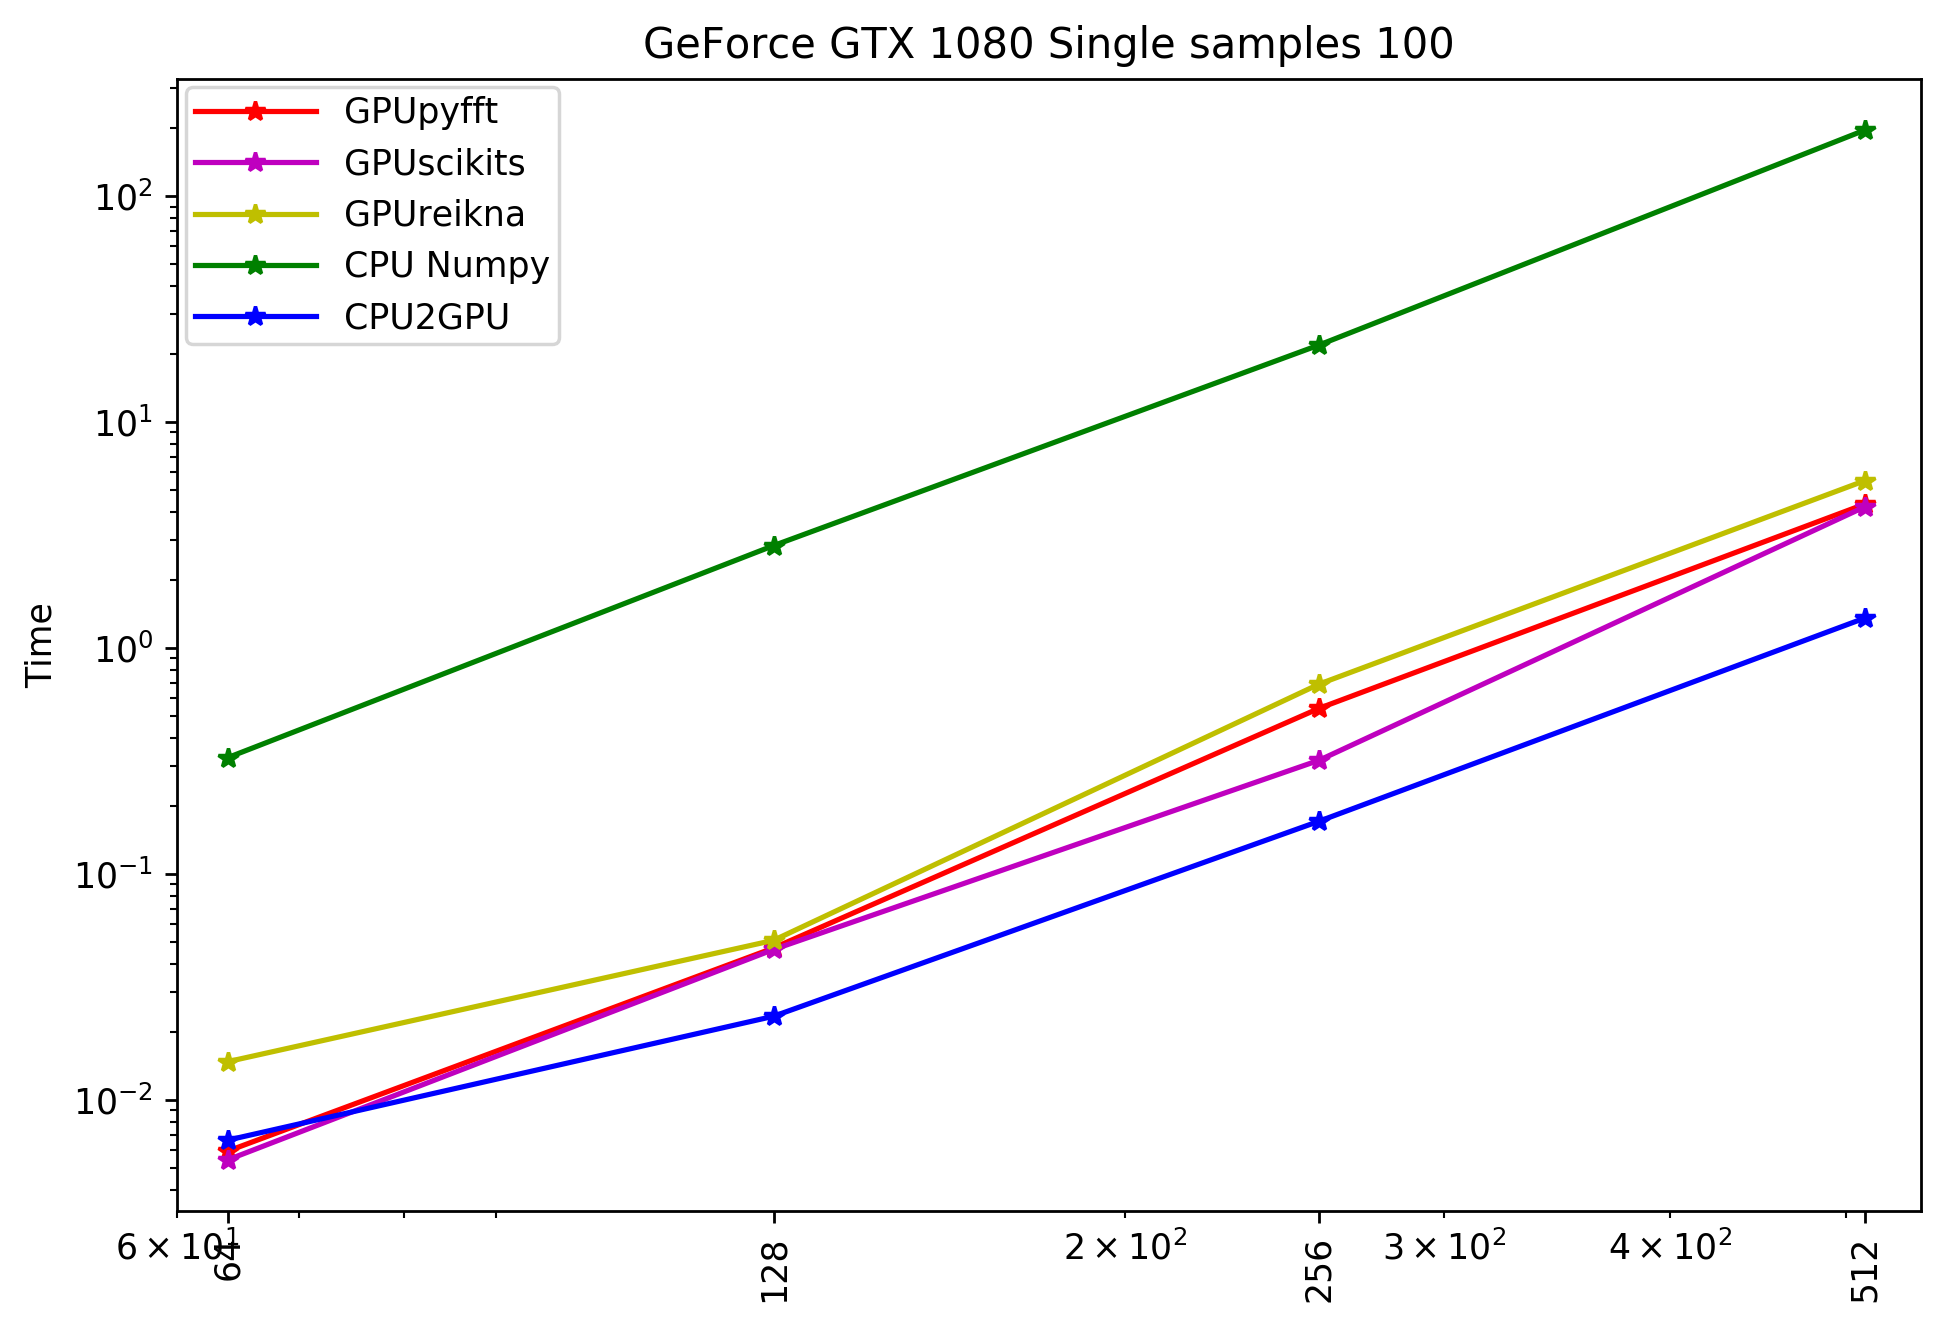
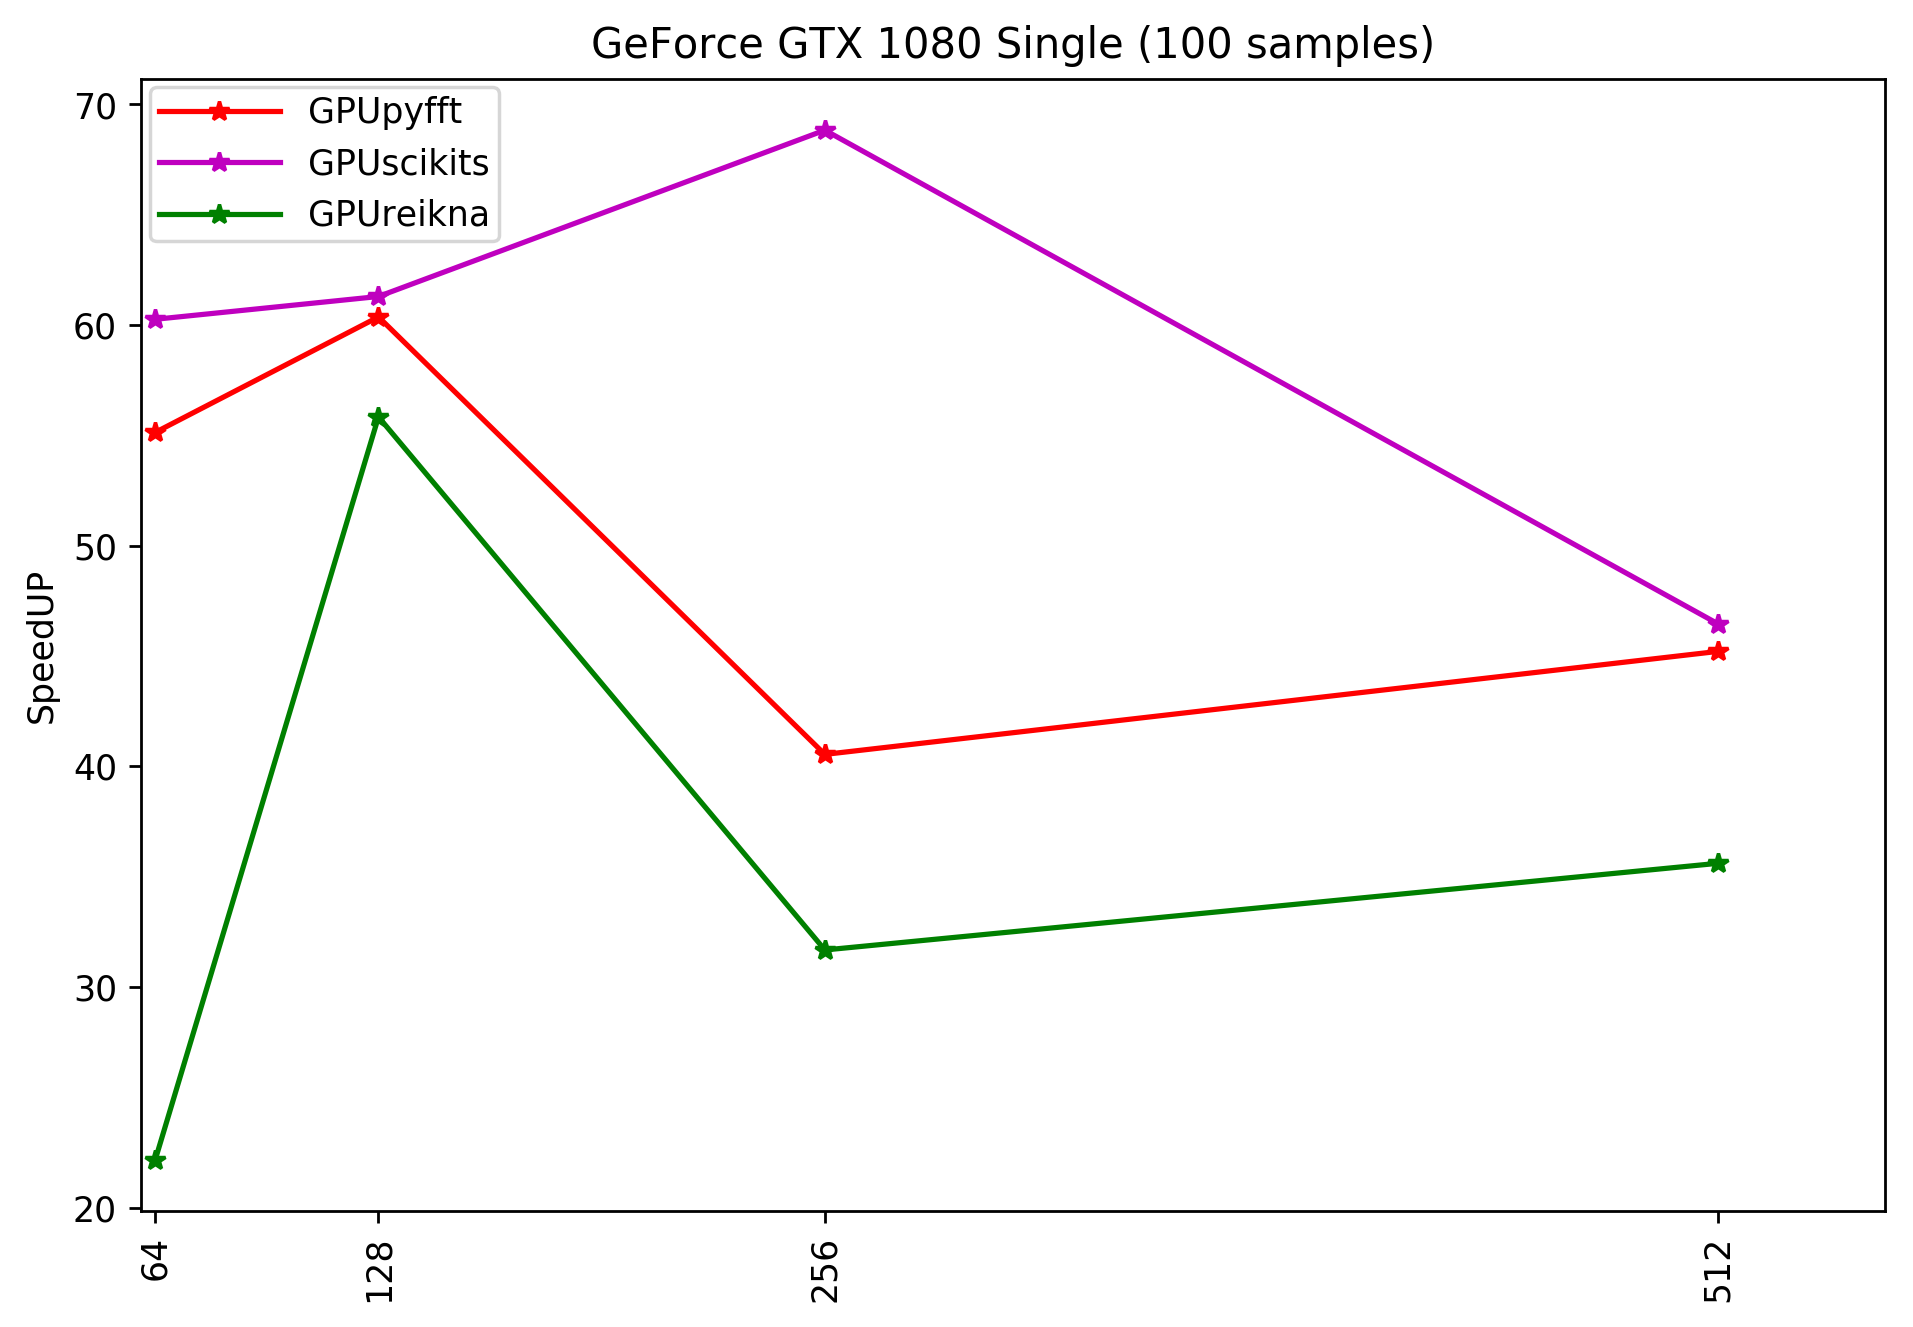
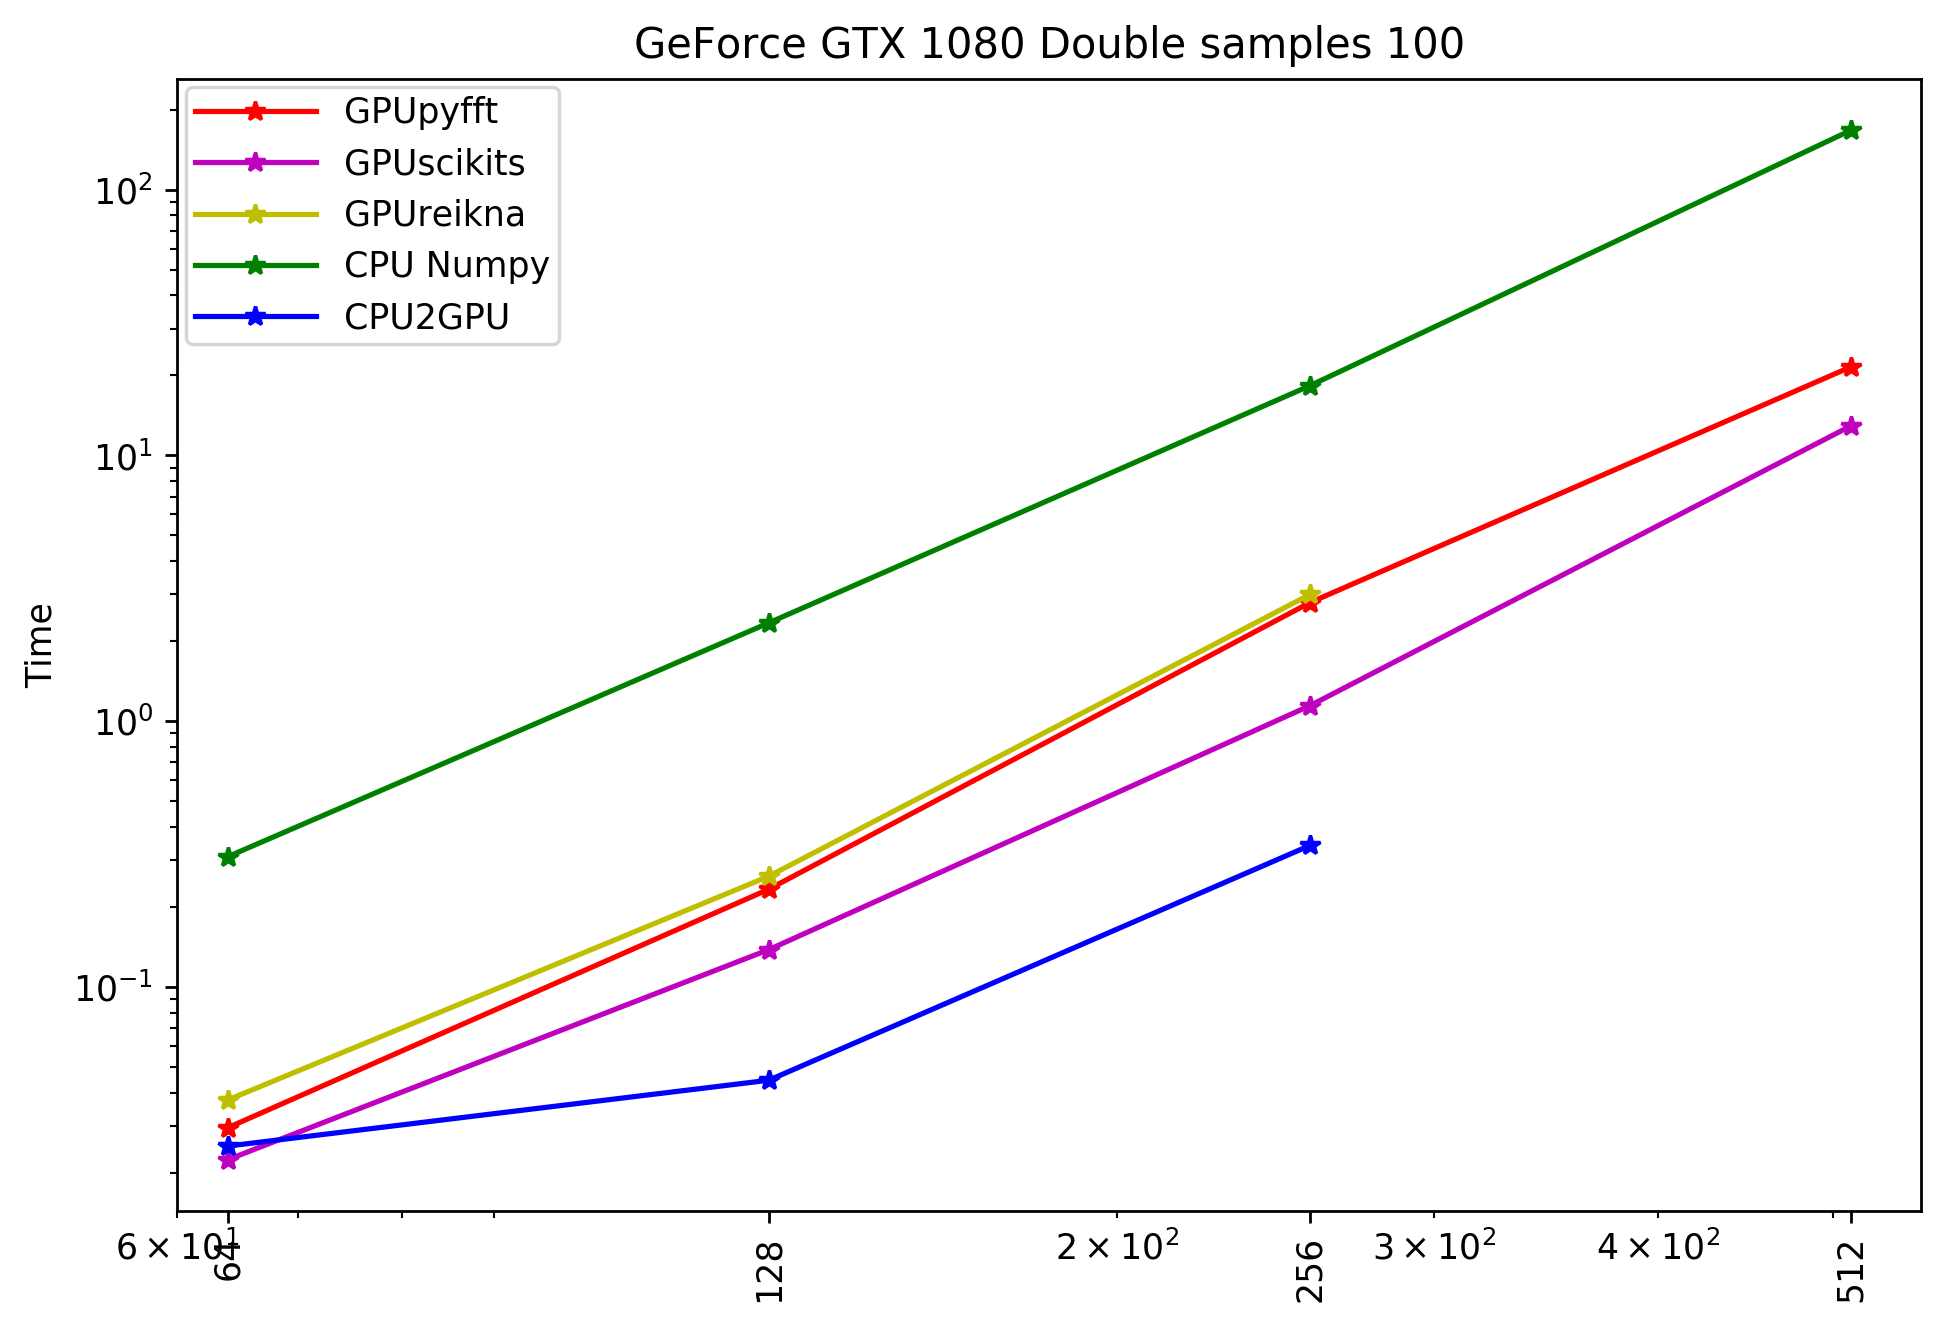
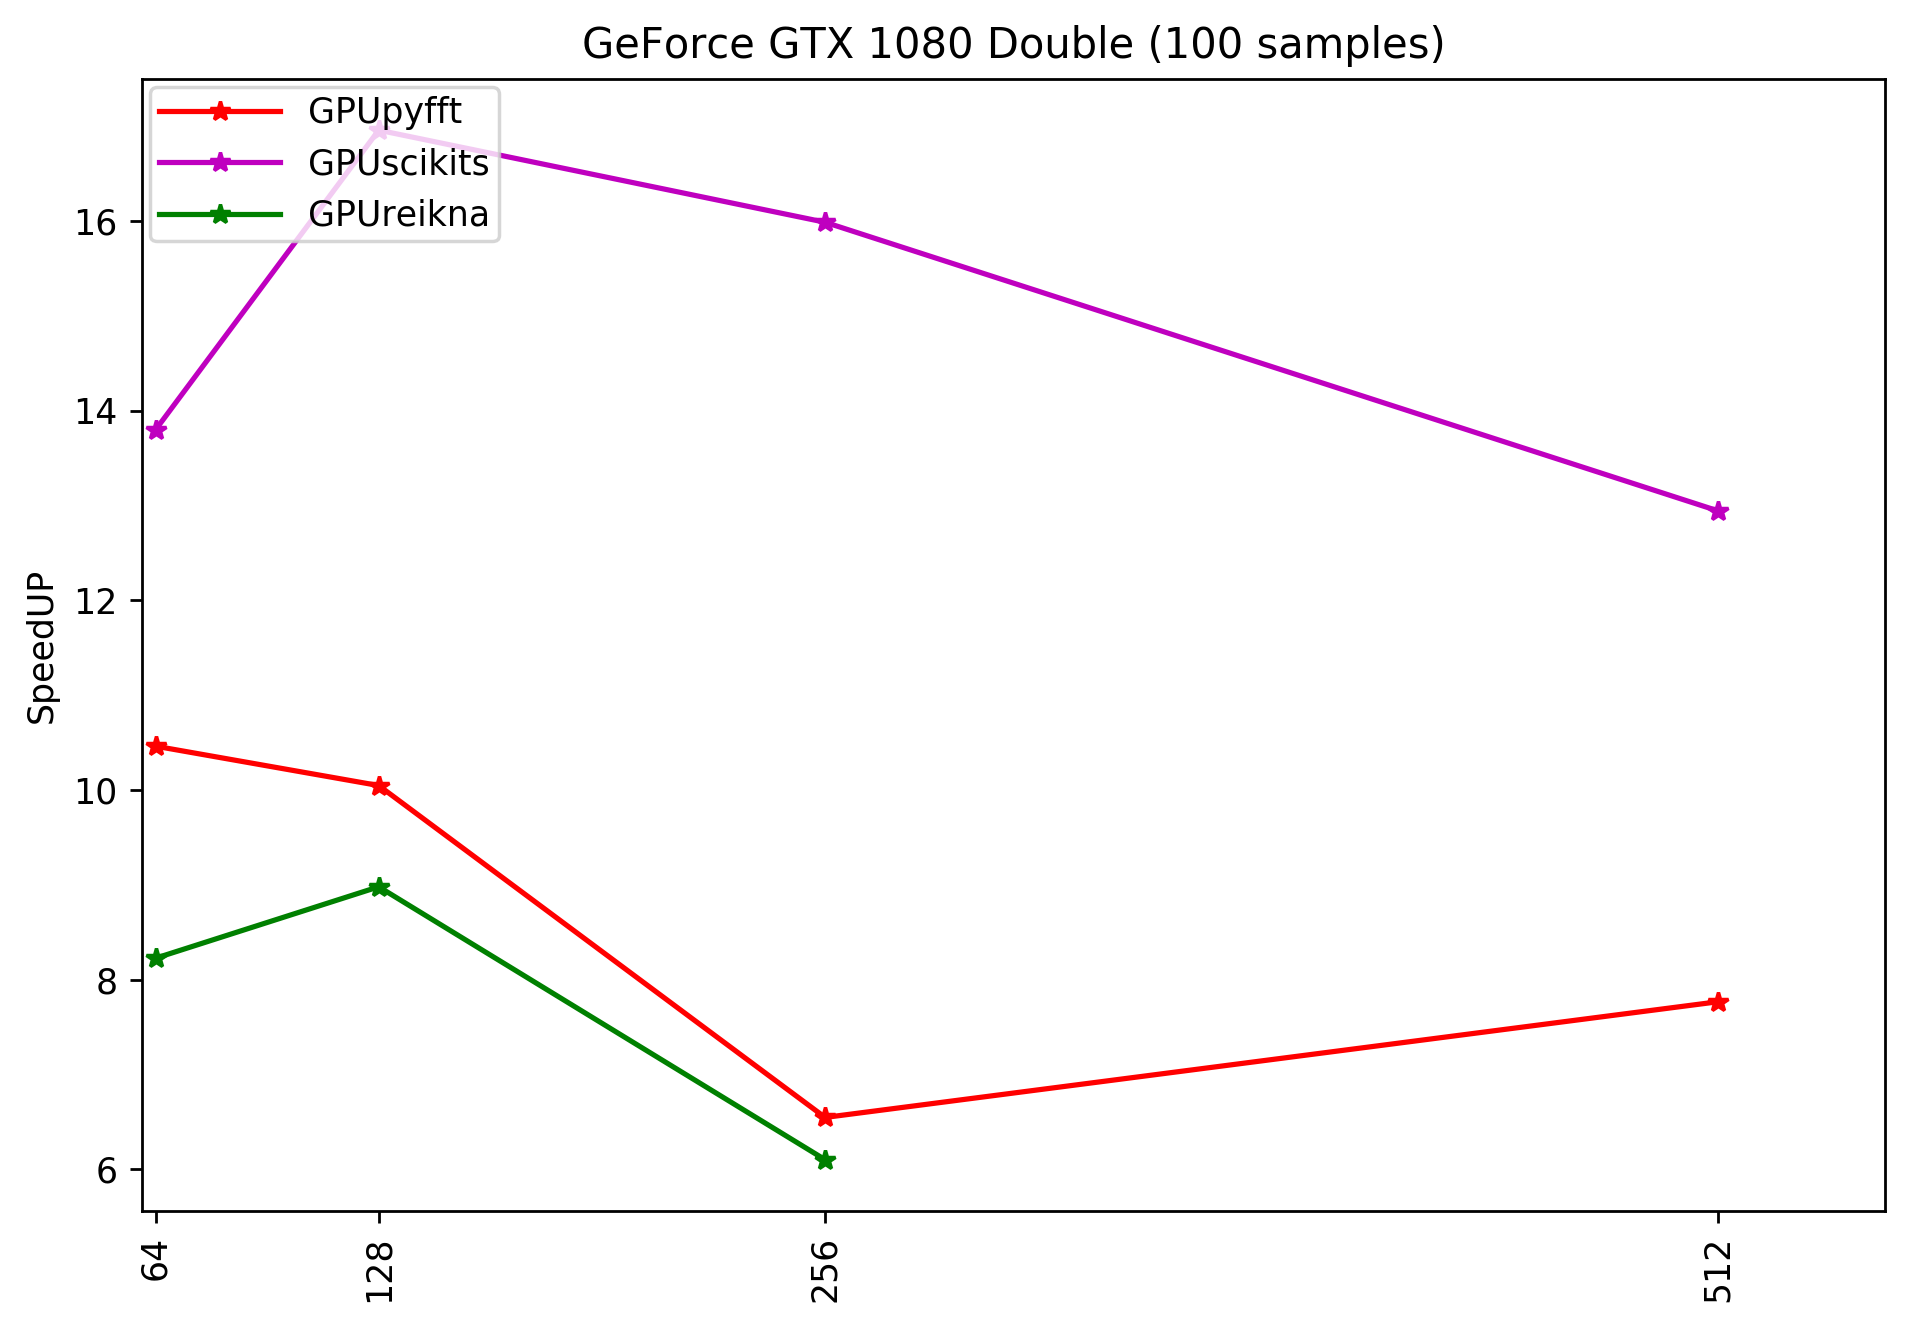

In [22]:
%%HTML

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB50AAAUvCAYAAACCJ/KMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAmcgAAJnIBISuX7gAAIABJREFUeJzs3Xm8VVX5x/HPw4wIAiIyKjgPOOCIsxRqmqGZv9JKJedMy36/LMss0xzLzCHNEhPT1MTM2RxBnNCcMhUHFBQnQEAGAbnw/P5Y+1z22fcMe597zj33wvf9ep0Xd++z9l7rnLPP3of9rPUsc3dEREREREREREREREREREQq0a7eDRARERERERERERERERERkbZLQWcREREREREREREREREREamYgs4iIiIiIiIiIiIiIiIiIlIxBZ1FRERERERERERERERERKRiCjqLiIiIiIiIiIiIiIiIiEjFFHQWEREREREREREREREREZGKKegsIiIiIiIiIiIiIiIiIiIVU9BZREREREREREREREREREQqpqCziIiIiIiIiIiIiIiIiIhUTEFnERERERERERERERERERGpmILOIiIiIiIiIiIiIiIiIiJSMQWdRURERERERERERERERESkYgo6i4iIiIiIiIiIiIiIiIhIxRR0FhERERERERERERERERGRiinoLCIiIiIiIiIiIiIiIiIiFVPQWUREREREREREREREREREKqags4iIiIiIiIiIiIiIiIiIVExBZxERERERERERERERERERqZiCziIiIiIiIiIiIiIiIiIiUjEFnUVEREREREREREREREREpGIKOouIiIiIiIiIiIiIiIiISMUUdBYRERERERERERERERERkYop6CwiIiIiIiIiIiIiIiIiIhVT0FlERERERERERERERERERCqmoLOIiIiIiIiItFlm9rSZefRYUu/2tDQzuyD2+t3MRtS7TbL6MrMuiePx/nq3SURERERaRod6N0BERERE2hYzWxfYBlgf6Al0BhYC84BZwEvuPqN+LRRpPjPrDWwLDAF6A12AzwjH+WzgZXd/p24NlKoxs42BHYFBQEdgLvAq8KS7f17FetYDdgD6Ec6dnxOOpzeA5919YRXrGgyMIJynOwPzo3oed/dF1aqnwratRXgfhhDeh67AIsJ7MQ14y93fq1f7RERWdWbWDtie8Ht+HcCBj4EXgRfd3atY1zrAbsBQoBvh/wxTCdejudWqR0RERFoHBZ1FREREpKwoKHMc8FVgoxTlZwGPAbcAd7v74tq2MBszq8bNtB+6+++rsB9pJcxsEHAs8DVgWIry84AngL8Dd7j7p0XKPQ3sXMWmFvK6u28W1XcocGvsuYXAMHefnnWnZvYj4DexVe8DWxZ7rc1hZp2B4cBOhPdrJ5qebw5395urVN//AGcQbroXssDMrgXOdvc5FdbRFTgJOAHYuETR5WZ2L/B7d3+kkrqi+r4InAXsXqTIEjO7GfhFSwZ2zawT8E3C+7AzYGXKzwaeBR4B7nP3V2reSBGROjCzXoSOTzvFHusmivV394+qUFdn4IfA94H+RYq9a2a/A/7g7g3NqGt74GzgSxTOtLnczO4AznT3VyutR0RERFoXq2LnNRERERFZxZjZQOAi4DAqn5plAXApcLG7z6tW25pDQWeJi274/ho4nso75i4B/gycl7wx3NJB56jO24BDYs8/6O77Ztlh1NnkJcJI1JyvuPvdzWpp03ouBXYlBH87line7KBzFAgeB/xPyk0+Ag5x96cy1rMDcBMpOuokjANOdPfUaaKjUWuXEAIJaSwAvu3ud2ZsW2ZmNpzwmrZqxm42c/fXS9QR/44tdfcuzairzTGzC4CfxFbt4u5P16s9snozsy5AvLPhv9z9S/VqT2sUdXI7j3De2pgyHXGoQtDZzIYCd5D+XDwZOLiSes3sx4TX1z5F8c+BU9z9T1nrERERkdZHczqLiIiISEFm9mXgP4TRaYV+Ny4CpgPPAf8lpNZeUaBcd+DnwDtm1qM2rRWpjJntQjjOT6JwwHkx8B7wPCEA+xGwvEC5LsApwFQzyxpkrIXvEdJE5+xjZken3djMDLiW/IDzjdUOOEdOIKRbLhdwbjYzaw/8g6YB5wZCus8XCamo4/oBD0SjttLWsx3wEIUDztOAZwjH04ICzx8F3G5mWTpAXE3TgPMK4F3CsftJ4rnuwG3Reb5mzGxXQtaLQkGOzwhpzCcTriEfltpV9VsnIlI3g4AjgE1ogfObmQ0AJtD0XLyYcP6dAixNPLcz8LCZ9cxY1xnAhTQNOH9A+D9DMojdCbjazE7IUo+IiIi0TkqvLSIiIiJNmNkRwF9oesPoFeAa4GF3f7nAdp2APYH9CSmK14893ZNwY6k1+jZhLrssio66k7bBzPYF/kl+YBXgHeBPhKDh8+6+IrFde2AXwnF+CLBZ7Ok1gDUT+zsFWCtFkzoC9ybWfZ384HExefP0uvtHZnYqYYRpzsVmdr+7f5BifyeTn6J5JvCDFNtV0zLCPJPVPG/8nJDqM+4y4PzcaK7o8z2EMHJ4YFRmTeBWM9uq3JzIZtYRuIH8z7wB+C1wmbt/GCvbHhhJuEG/Xaz8lwjv98XlXpCZHUVICx93E/Bzd387Vm7f6DVtEa3qANxgZsPc/f1y9WRlZn2Au8j/PnwOXAVcB/ynwHdrbUJq2QMJn0G/NHW5+4gqNFlEpDVYSNPfEc11A7BebPkz4MfA2FxWDTPrDpxIyPySu+5uQfg99PU0lZjZ3sA5idUPAj9y9//Eyu1MuL7tFit3mZlNdvcXU74mERERaYWUXltERERE8pjZTsDj5I86nEcYRXdjMkhQYj8dgTGEOVNzwed13H129VpbmQLptYe6+7R6tEXqw8w2JIwAjY++X0K4CftHd1+Wcj/tCKNmf8HKYN7wSm6aFkhJCs1MqRnNE7x/bNWd7n5QmW2GAi8D3WKrv+7utxbZpFnMbAnhBvcbhHl8n4n+fZEwMiuemrzi9Npm1o8wmnmN2OqiafLNbD3CnN2DYqt/5u7nl6nnW4Qb/DlOSM/9zxLbdALuJwSgc+YA65aaUzM6ZqYCA2KrL3X3U4uU7wU8Sv481n9y96qPMDOzPxAyCOTMBPZL+92IvlsHEeYfPa5Ueu3VndJrS2ui9NrlmdkI4ClCR5z/sPK69yyh41uyc1PFvwXMbDQhrXbOEmBksXOEme0D3Ed+x9Nd00wxYWbPkd+B6jbgsELXseg4uRPYJ7b6AXffr1w9IiIi0nopvbaIiIiINDKz3sDfyQ84zwB2d/e/pg04A7j7Mnf/M7ApYWSbSKtgZp2BW8kPOM8F9nH3y9MGnAHcfYW730JIWXk2hVPM19MJ5KdwHm1mh5fZ5s/kB5z/UauAc+RLQC9338zdj4g+g6ezzGmc0k/JDzg/UGpednd/lzDqK+40Mys3aj0Z1L+9VMA5qutzwmjl+PHTmzDXdSnfJT/g/ApwWol65hLSd8cDAEeb2QZl6skkSg3+zcTqE7J0xoi+W7e7+54KOIvIKuYNQoeq7u6+o7t/z92vc/dXqOLviGiqjLMTq88p1SnF3R8kZMWI+3WKur5KfsD5Y0KHoYIdp6Jr/Bjg09jqfc1sj3J1iYiISOuloLOIiIiIxJ1FfkrsZcDo6CZYRdx9qbufBBxKGNEhUm8/AIYn1n3T3R+vdIdRgOyXwChCZoBWwd3fI4zejrvMzNYpVN7Mjge+GFs1lzA/dM24+wR3/7R8ycpFmReOSqw+q9x27n4PYeRZTi9C2udSNk0s/6NcPVFdbxNGd8eVmx88mVb73HKdJtz9JeD22KoONH1vmmtHwpQKOR+RP9JORGS15e5z3P2ZqMNRLe1AfmaLeTQNKBdyPvlzPH8hyoJSSvJ6dGnU0amoaLqPP5XZj4iIiLQhmtNZRERERIDGuTSPSaw+z91fqMb+3f22Src1s77ACML8nmsT5rubCTzj7u9Uo321ZmbrEkYtrksIXH1KGAUy2d1n1KC+QcD2QH/CezaXMOLyw5Ibhm27EeYsHgisQxj5Ph94mzAPa8Xzv0bvwwjC+5D7LD8mfJbTKt1vhvo70XRu4rHufn819u/uj1ZjP1V2NfANYO9ouQ9wOXBYvFB0zPwmse2pzUnv3YrsRf4cy6+lSRUaGUsIouYcTJjzvpjeieX3UtYD8C75I8V6FitoZhuxMqU7hO94qgA34TX9T2z5YOCXKbdNY1Bi+Q1vI3N7RfNs7wxszcpz1AfARHefWYX9DydkRuhPSL3+HvBUa5jiwcyGEK4bfQnXqXmEDgNPuPvHdWhPD0IHoU0J39/OhLlo5xJSEL/i7rMq2G9HYPPo0Y8wf+4iQkr7V4EX3H15NV5Dot5NCMfVIMJrmUE4rkr+BohSze9ICB72IRyT04CHy80xn7F9awF7EDq7rEH4nTUVmFQqzX+tRFlJdiHMRdwXsKhNbxB+M1T8GUW/BbYChhG+52sQ0k4vAKYTzllvN+sFtA7JzBs3uXtyGo8m3H2Omd1O/u+EgykSsI5+N8Y7rK0ArkvZxrHkZ+g40Mza1+I7KCIiIrWnoLOIiIiI5HyX/NSzn5FuNERNRDdZvw2cQrgJbkXKvQZcBFyfJf13SzGzQ4DTCaNNir2Gl4CLgRvSBGai1LXx0YwPu/uo6LmvEOZA3YummY3eBe4usd8vA/8H7E5+ivVkuVeBm4E/pwlIRp/lkYTPcjjF34dXgQvIMHd4Bb5JfjpiB86rUV2tgru7mR1LmKe5a7T6G2Z2k7vHR59eTX7K8fvc/fqWameNfTmx/ECGbR9MLO9jZp3dfWnB0qFDSTzo2rVIuUKSZWeXKJt8TY+VaFPSRELmiU7R8tZmtl6UUrwauieW2xcsVSVm9jQr5/5e6u5dSpQ9kfwpHw5395ujYPPJhLmR+xfY1KM50n/k7lMqaOMY4OfAhkWenwT8JNcZwsw+InTOAXjd3TfLWmfKdnUmvO5jgWJ1uJk9A5zt7vfWoh2JNu0EnEGYj77otSgqOxW4B7iyVBr2qPPa14EDCYHVNYqVBRaa2d+AC9MGHkvNYxzNqXs6IYCatMLMxhM6+OR1CouunScSpgZIduQAWGJmlxA+l7LTERSb+zvqDHY+8C1WnhPiZpvZlYSOiGnPMRUzs22BM4H9yJ/qIW6umY0Dfu3un2TY9wDgF4SOWEU79URlZwEPETqmPZy2jlamude+eND5QIr/v2AUoSNFzstpOjkCuPvrZvYeMDhalZtaYlKGtoqIiEgrofTaIiIiIpKTHA1xa61T3hZjZhsDzwPjKBGsjWxOGHX4RLGUwfVgZj3N7CHgNsIIpVKvYRvgeuCp6OZvJfW1M7OrgDuBkWT4rW9mA6KAx93RtiVv8hNGV55Nujn+NiWkDP4LYQRnqfdhC8L7MMnM+qRoeiWSx/kjq8hoppLcfSoh4BV3lZn1BDCzo4ADYs/NJ8wHvarYNrH8ZNoNo+Mj3rmiK7BJiU2SKbJ3LFgqIQp6bp9Y/UyJTZrzmpYQzrFx2xQqW6FkivltzCxL8L1FmVkv4BHg9xQOOEM4d30ZeNbMRmbYd1czu5twDiwYcI7sATxuZjVNZx9nZrsTRo3+luIBZwivfWfgHjMbX8vP0sx+CTwFjKb8tQjCe/p98kfuJ/fZjzBa/XJCILNUwBnCyOfjgf+aWXJu8kzM7GJCavlCAWcI1+qvA5Pj6YujkaP3AX+gcMAZoAshIH1PpZ+JmW0H/Af4DoUDzhBGV/8CeD7KiFETZtbJzK4mnJsOoXjAGcJI/FOBqWa2T8r9fxmYQri2lQw4R9YBDie8x21O1EFxy8Tq1NcJ4InEcvKaU+q5LPVkrUtERERaMQWdRURERAQzW5Omc9zeU6e27Ey4WZUMgCwH3iIEYV4lpEGMG0EI2tY98BwFTB8jP9VgznTCHLFvE9IPxu1MCJ4PbrJVeRcSRkTlfAa8BjxHfsAs2dZtovbsXuDpucAr0fNvAZnSa5rZLoTPcqvEU8uBNyn+We4KPBmlfK+25Ousy3FeJ78Hno4t9wd+FwVkkqOXfhzNB72q2Dyx/GrG7ZPlk/uLuyWxfGJ0ji3nGEJwJ+fJMiNqW/I1ZfVKYnlNwsjF1qgLcC+wZ2zdx4TA18uEc2ncmsDt0YjJkqKgzz9pOtoQQhD038DrhFHnEO7RXG5mX8vyAioR1fEQIXVx3FJCYO6ZqG3J8/7XgAei9MTVbtP3CHOtJ+9VzSd8Fk8DLxHSUmfRgaaj7RsIKbpfBCYTXnNyft2uwI1m9vWM9QFgZmcC/xtbNTeq7yWaHleDgX+YWfuoA8odwL6x53PHy6uEa2jcFwgZX7IaRAhs942tey+q521CJpC4LYBHKu0cV4qZdY/acjxNO6d9SHjfngeS6dTXIgTdR5fZ/3DCXPbJLAy5431ytP+pZPyt04ptRH7HjU8yThHwJvnvRe8oY0Ahrfl6JCIiIi1IQWcRERERgTACJ3lD9t8t3Ygo+HUn+YGX/xBGmvR0943dfWd335IwyuUbhBuEORsC15lZqdG0LeEa8gOtTkhdvKG7D3H3ndx9Q8LN/t+QfwN5Q+CGKK1mWlsR0mJDCBJ8DVjb3bdw9x3cvT9hHsn/xjcys96EG9vx4Mly4M+EEZdru/uwqL0bE27W7glcCpRMZxkFZO4gf37bF4lSWrr7JonP8nDCTe6cjSk9b25mZrY5+ccW1OE4r5coZfkxhJvsOd8B7id8BjmPAn9qwabVVDRPaTJIkjWgniy/aYmydxPSV+cMBO4s1SEmCgBeGlu1lJCOvpRkG2r5mjKJ0hxPTaz+qZndZGbJkXf1diah05ITsmsMc/d+7r69u+fmdT6eMI9uzlqEdMTl/Jj8wCHA+KiOge6+Y5Q2ex3ge4QR4gb8kfKjcSsWpS++kfx0uI8S0lmv5e6bR+fnzQiv/yTyU73vTujoVM02daPpe3ozMNzd13L3rd19F3ff1t0HEz6DfQidadLO6/wMIc31cKCbu2/g7sPdfYS7b07oUPAlwqj3uD9Fv0+y2IKV86Q/BewN9Inq25bwvv6A/KkytgXGEI7JXKe164HNY8fLloR5qMcm6jvJzLKmYP8tKwPOfwU2cff1onpyv1F+T34HuY0Jx2e1XUMInufMJ7x/67v7gOh9297d+xJ+n8SnhugIjDOz9Uvs/7fkB2D/TTjee0TH+4ho/xsRRljvQPgcsgZPW5NmXSOi3wzvl9lnVeoqUL5q1yMRERFpYe6uhx566KGHHnroocdq/iDc7PbY49M6teO+RDuuBjqW2aYnIS1ffLuvltnGE49vEeajS/voUmLf30jsewVwVJn2fIVw4zm+3cklynco8BqcEDToluH9vjWx/Txgr5TbdgN2LvH8g4l9X5nis+xFGMkW3+4rVTy+DirwnvWox7FepH1dCrSvXw3qOaPI8ePAImCDer8XsbYmj4fDKtjHxol9LKhgH+cm9nF5mfL9CJkG8s6rhGDNkYTA1kHAacDjiXLzgS+X2X/HAp/d2hlf03GJ7e+q8md3TInj7L+EIPvhhM441TxOlpQpe2KB9iwHjiiz3SjC+Ty3zWJCB5pi5QcTsjjE6zmzTB2bEkZZJ9s3pcx2FyTKjyhRthOhc1K8/E9SvMfrs3L0a+7atkUVj5dDEm26OsO2nYGhJZ5fE9ghY3uS3/lflSlf6PztwE1AhxLbHZ8oPzV23Hy3TJ03J7a9IONxknv8X5ntDk8c+yWvzQXei/vL7P+oRPnXCMHmcp/RmYntbilSrk/0Hc+VewnonOFY2Kxax3nK+qryW4AqnONp+vv6a0XKvZ8ot33GevZJbP9yS77neuihhx566KFH9R4a6SwiIiIikD8aFfJHNLUIMxtBCMTk3Aec6O7LimwCgLvPI4zsXRBb/X9FihdzAyFImvZRasRTsu5L3X1cqcrd/S5CStG4H2Yc7TwH+Ia7L0pTOBptGE/hmruZOLHIJnncfZG7Ty6y790JAZqcu4Hvpfgs5xICD/HXkPWzLCV5nH/u7vOruP+24kKazjucc4avenNcJ1Nbp/qOlNmmZLpsd/8I2Am4ipUjGXsQ5hIdRzi//ZOQEne36PnPCaNPt3X3cmnfC9Wf9XVlek0VuBb4e5HntiTMw/s34C0z+8TM7jKz/4vmgW9pv3H3v5Yq4O4PETJx5HQhjF4t5njyRxLf7+7nlKnjdeDo0k1ttm+SPyf5pe5edtSyu08nzJvs0SojP3V0cyXnSb8y7YbuvtTd3ynx/EJ3z5rV4ufkz6n+nYzbQwjuf8fdS6Vr/jP5WT42IBw317r7VWX2n5xreP/sTWS8u19cqoC730R+JgaAH1ZQVxPR75xfxFYtAPaLjreSou/TXbFVXzOzIQWKbkR+psdr3X1pgXLF6ik1zUFr1pLXvubWVevrkYiIiLQQBZ1FREREBJoG4z7NsrGZ7Wlmo1I8diuxm1MTyz90dy9YMiEK8FwTW7VbLeYcLMfMtgZ2jK1awMr0muX8hvw0hhtQeE7oYi7zbHP1/YD8eROvc/eHM2xfSvyzdLJ9lh8QglU5e0ZzZFdDc4/znVMe518ov7f6iQIgyTmcIcxpeVkLN6clJG9eJ+cQT2NxmX024e4L3P0kQgeMN8oVJwScf58y6F+o/tRBlEjm15RF9J3/FnAxTeevT+oNHEhIgTvFzJ4ws0LzINfCAuC8lGWT83VvV6LskYnl09NUEHU4mJSyPZWIn5/nk2GubXd/jpCOP+erVZzOomtiuWQnpVqLjt+/xVYNNrNBGXdzrruXPN9E9dydWL0c+FWKNr5DmOs6Zwsz61ysfKFdkPK4jNoTn4d6bzMbmqGuYkYTfu/k/Nbd382w/a9jf7cnZJBIalXHVgtqyWtft2bWVdPrkYiIiLQcBZ1FREREBMJcvXFZRyj8g3QjhG8stHE00iU+yvmZaMRXFg8klvfIuH017JVYHp92JK2750Y5xu2Zoe6bMpSFpvOMViXYaGbtE/t+yt3fyrib+GdphPlDq6G5x/nVpDvOk8diq2JmXQmj+JL60fTm/KqgS2L58wr2kQzoln2fzGwjM8vN75wcxdmkOGEk5bNmdkeKTjPJ17QsbceOmMyvKSt3b3D3HwHbEM5RaQMRuwJ3R6Of16p2uxLuz5DxIJkhYHChQmY2mDAfbs4r7v5ShjbdkKFsamY2gPBZ5PzT3RcUK19E/PzWmzBqvRo+SCx/u0r7bY7k6OnhGbZdDtyesux/E8vPZgi8xoPOHYD+KbcDeNLdk3OvFxRllYnPo2w0/c1TiQMSyyUzDhTwLDA3tlzot1/y2PqGmXXIWE9b1CLXPjPrSAj4N6euml+PREREpGUo6CwiIiIikJ+aGpqOWKi1rYB4YCFrGkyA5A3azTNsO9TdLcNjWpH97JxYfiRDGwCSI41HpNxunruXG0nZKAqIrB9b9aG7F0u3nNW25Ad3W/qzLKXex3lrcQ5hnuOk9Uk/4rMtSQY6O1Wwj+TowZLBUzPbF3gBiI/WvR84FBgU7W8tQhDrZ8BHsXKjCcHnUqMIk/V3rGDEaabX1Bzu/l93/yahY8PhhA4cr1B+BPSBwJM1DjxnOUcls0kUa9cOieUnM9RRSfm0kgG51nR+foiVqbsBTjezS81s/WIbVMLMOpnZwWb2BzN73MxmmNl8M1thZh5/kB9khTA3cFqvu/vClGU/SSw/n6Ge5LY9Mmw7IUPZQuV3yrh9IfFjck6pNOmFRJ1tZsRWNTkeo06M8eN2T0Knlmq0vzVrkWtfNHXK8mbW1WLXIxEREaktBZ1FREREBMJ8wHG1HlmWlLxJeFLy5m+5ByGAEZdMpdwSkjfH/5Nx++RIuPUKlmpqWsZ6NkwsVxJ4KCb5WX6/gs8y+T5U67Os93Fed9FN9nh63eXkB/5ONrNdWrZVNZcM/CRHf6WRHHVVNJhkZlsRglW59KDLgSPdfX93v83d33f3z919vru/6O7nA1uQ3+lkMHCHmRW7cV+o/ixpdSHDa6oWd//U3W929xPdfRghQLY7YW7aCRQOQm9B/vQJ1ZZlWoJkdoRio/EGJpZfy1AHwBTyA7DVkjw/X1bB+fm2xD6qcn6ORtzGR3gbYd7vd8zsGTM7z8z2N7NelezfzNqZ2YmEUa+3AycR5lMfSOgolabTRs8MVc7KUPazxHJzts0yQjQ5wjpr+Wal146y3MSzQPTOejxGx+RW8X0UqS6Zrnw/YLKZTTWzK83sG2aW9jdXW9GS177kuTFrXS1+PRIREZHaUNBZRERERKBpMG7tLBu7e59CI4KBkSl3kam+lOoRUEzeDJ+dcftk+bQ319Omhs1J3pTNEnQppzV/lsnjvJOZpZ430N23LXKcFxo13OpEAcxryU+D+VvgD7HldsA1JYKdbVHy5nUlI9yT25S6If4n8m+4n+HuJVPGuvtc4KtAfD7nrYATi2xSqP6sryvLa6oJd1/k7k+4+wXuPpLQIabQe3WomW1fo2Y0Z0RdsUBlMjiZaf74aN71rOn/02jN52eA75I/ZzSE93hHQseEe4HZZvacmZ1jZpul2WmUSvlm4Cqa9x5k6djRnOOqFsdkIclR0lnLZwnCF9KL6t+XLHg8uvu15M//nLMB4bi7GZhuZm+b2R/NbK8qzldeLy157WtuXXW/HomIiEh1KOgsIiIiIgDJ1MxrmdmQFqy/uTcuC6nHb91kADNT0MDdl5M/r11yDuJilmWpp8B+q3lzrzV/loVSkG9bpX23BWeSP//qG8BZhPTO02PrtwDOaLlm1VyyU8WaFaRrTo5cLdhRIxpJPiJR7vdpKojm1k2mNz+uSNllwLzE6kFp6olJ9ZpakrtPc/cjgf8t8HRrmOM3rWRwshpzqVZDaz4/4+6LCCnpjyR/ruJkfdsR5qV/zcz+WSYVPYQpBf4nsW4e8E/gl8DRwCHA/sA+scdPK3gZbUlylHQ5yd80qTttFdGix6O7n0nIrPAAxVP7DwVOIGReeN7M0naebI2S5/Ss1whIf51obl2t7nokIiIilelQ7waIiIiISKvwFCEFbHwE5A5kT9tcqeSNz5sIIzKb44Nmbl+JQiM9Uo9wM7P25AcrknMQV0tyv80Anlt6AAAgAElEQVS9cRyX/CxvAMY1c5/vN3P7nCmE0eTxeTl3AB6v0v5bLTPbBvhJbJUDx7r7kuj5E8gfYfhTM7vV3bOmX2113P1TM/sYWDe2ej2KB7UKSaZdnVKk3BcTyw+6e5bg4V2J5WFm1tvdk6P0AV4nfx759Wiamr6UtK+pxbn7JWZ2KLBrbHVyPuLWLHner+Qcm7bTURbJ8/NFwIPN3Oebzdw+j7uvIIx2/2uUqn4UsDchWFgodfJBwF5m9iV3n5x80swGk9+JwYGzgYvcvWTQ1cwqGRnalqyRsXy1R6Mm3/+PgCOauc/k3MJ53P0JYD8zGwjsSzi29gSGFCi+LfCQmZ3s7lc1s1318HpiOVP68Cj9eTIYXOw68Tr5nfiypipvtdcjERERyUZBZxERERHB3Rea2QuEAFzOAcD4FmpCMq30PHd/qIXqrqa5ieW1yRb87pNYTu6vWpIBrL5V3Hfys5zbWj5Ld3czexw4OLb6AFKORG2rotSyfwE6xlZf6e6Tcgvu/i8zu54wwpCo7Fgz2yUKArV1U8gPOm9BtqBzci7cYjfEkyMu38lQB+4+08w+Iz8YNICm39lcG+JB5y1oGrQuJe1rqpe/kx90TgY/WrPk5zUgy8Zm1geoRYr75Pn5/dZyfi7E3V8mfE8viVIdb0GYi/dQID73fE/gNjPb2N0XJ3bzVfLfy8vd/ayUTajKfNWtWPI3RznJ1OTJbAtZJY/Hzi11PLr7+4Tr4l8AzGwQ8AXC8XIgK++XtgOuMLOn3f2FlmhbFU0FGlj5Wnqb2bru/nHK7Tcm/77xHHcvNgI5ef3YIn0zgdZ/PRIREZGUlF5bRERERHLuSCx/3cx6tFDdycDMRi1Ub7VNTyxvk3H7ZPnk/qrlrcRyNedKbe2fZfI4H5UiNWtb92NgeGx5OnB6gXI/BOI3o3cCTq1hu1rSi4nlXQuWKsDMNgD6xVYtpukIspxkWuWGtPXEJNPlty9YqnmvqQshRXGp/dXbtMRy1lGZ9fRqYnl4wVLF1Srtf2s/PxflwSvu/jt335WQVSAe9BwIHFZg0xGJ5SszVLtl+SJt2rCM5bdKLGfqVJMUTRMQz2TS08xqMe94mrbMcPfr3f2rwKbknw/b0QavhdH7+0piderrBLBbYrlUJo2Kr0dF6mpt1yMRERFJSUFnEREREcm5ivxUh92AH7RQ3c8k6t41Coq0NU8nlr+Qcftk+eT+qsLdZ5B/s3iAmVUryPE0sCS2vLuZ1WLEXqX+BnwYWzYKB2BXCWa2OfCLxOoT3L1JWtQohfMpidXnrCJB+bsTy/tk2DZZtlTK7E8Sy1lHuK4JJOebnlWkePI17WFmyaB3MXuRP/rzP+7+bsptW0oylW9yVGRr9gL5nQdGZkzVPLrK7cl5NLGc9RrVarj7I4R5neN2L1A0nuFgBU07XZXSZt+flPZqZvlnqtCG+DFpQN3nUHb3t2k6h3yhY6stqOa1r1QmjYfIn4d+mJn1T1OJmW0KDI6tmgM8maqFIiIi0uoo6CwiIiIiALj7JzSdR/nnZrZ1C9T9OfBIbFU34Du1rrcGJiaWv2ZmqebljAKzyZucyf1V0/2J5e9XY6fRHMETYqu6A0dVY9/VEB1rlyZWH29mWW7EtgnRfIzXkj/69jp3/1exbdz9VuCfsVVrAH+qTQtb1ETy59nd3Mx2KVY44ZjEcnK0fNy0xHLWAEoyyLUQKJjO1N3fAl6LreoFHJKyniyvqV52TCy3tqB4UVGnhAdiq7qR8jxoZr2Ab9WoXVPJD7puaWZ1D/I1wxOJ5ULpoi32dztSTjNnZiPIPkK9rdnVzDZMU9DMehLmz457rAptSP4WSXZ8qgt3f4X8a0bWVOStxZ2J5cPNrGu5jaLz0MGJ1UWvE1FHtvjv+HbAmJRtTF6P7nH3SrKEiIiISCugoLOIiIiIxJ0FvBdb7gTcaWabtUDdv0ks/8rM1muBeqsmmn8yPvKnB/DLlJv/L/lzlk4l/wZetV0GeGx5jJl9sUr7Tn6W50TzJbYWl9I0TeRNUZBhVXIq+allPyIcZ+WcRH7a2lFmdnQ1G9bSojSjf02sPqvcdmb2ZfKDn/OAf5TY5OHE8sZmlgzUFKurHfCTxOqJZW6+j00sn2FmHQuWXFnPNoR5S3MagHFp2piWmW3ZnI4cZrYOK+cXzynaWaKV+nNi+ZyU17TfUdu5hJPn58ujEfZtUTIQOLdAmY8Sy8k0vk1E36E/VNqoNsSAC1KW/SX5Ke4nRCOCm+vv5E8lsqeZ1b3TYRSYjb/eQsdWW/As8J/Yck/CVBrl/AyIZxxK83knr0c/iILXRZnZAOD4MvsRERGRNkRBZxERERFpFI12/gb5aUHXB54ws8PMzApvWdQmGep+jPygwjrAA1kC3mbWzswONrMLM7Sx2i5OLP/QzL5ZagMzOwA4O7H6Enf3QuWrwd2nALfEmwGMN7M902xvZmua2c5F9v0I+cG3dQmfZerjIfosDzGz89Nuk1Y0Gvt/gAWx1WsDj5jZd80s1Ui4mNSvq6VEo9fOSaz+nruXvXHu7h8CP0qs/q2Z9StUvg05jzAfc86+ZlZ0ns4oQPjHxOrfuvu8QuWhcXTcC4nV15jZFqUaFp1bL6bpPJjlgsFXkp8ufkuaBhXj9fSK9hk/xq+LRsBW02DCd36SmR1oZsXmpS7Uxj6E0XnxwOvn5J+v2oK7gMmx5d7Aw2aWnBcXCPNsm9nlrBwdWKvz/3XAm7HlLYF7zGzdwsWbMrNOZnaMmaXpxJJ2nxdEvzNSHStRJ41k/c8VKJpM03tuqTT00fn/rzSd83xVdWi5z9HMDqPpdCu/r0blUYegsxKrrzKzTBlSzGxzMxsbnT+Szx1lZj82s+TUBaWcCsQ78BQ6tlq96HdksvPjmaU62UUdhpKB6WQq+0L+Qf71b13gz8V+U0XT6PyF/CklHnL3Wmb5ERERkRpT0FlERERE8rj7U4RRBytiq3sDNwEvmNkp0TyxTVgw1MxONLPHgaszVn8k+SOtNwWeM7Pfm9k2hYLeZtbLzEaZ2SWE1La3AwWDoS3B3f9OfgrCdsANZvYHMxsSL2tmA8zsgqh8/ObmY4Q5tmvtu+SnA+5JCLxebWbbJt/vKCiyh5ldShiZdFyJfX8LeD+2vDnwvJn9zsy2KvJZ9jazfczs99H+b6Npit2qcPc3gcPIn4OwKyGIN8XMTjOz4cU6WpjZoOhG9n3APbVoY6WiNl9D/iit8e5eaoRuHncfS37HgV7AFdVpYT4zGxh9h5s8CNkC4oYVK2tl5g6PgunJgOwlZnZpPOAWdXg4lBCsio/Qn07T1OyF/DSx3AeYbGanm1nf+BNm1j7q6PEQIcgR929gfKmK3H0xcEZi9Q/M7G9mtkGirn2Ax4FtYqs/BX5Vqo5m2p0QfJ0Rffe/bGYFR/Ga2UZm9jPgdfJH6EMI9r9TYLNWy91XAMeSf47ZiHBNuyUK2n7ZzL5hZucBU4CTo3L/pEha9Sq063NCGvb4vO57Av81szPNbKNC25lZPzP7ipldA3xAOMdUs8PNtoTfGTPM7Aoz27fQsRJ9P/cinJ/2jz21gMIdE24lv7PJCELwf4fEfjta6AD2b0LnO8hPX78qyo0wvtjMxiU/++g69zvgRvLTlN/p7lVLye/u1xE6Q+R0Bq4zs3+Z2QFmtkZym6jjw3Az+18zexJ4BTiawunT+wMXAu9H371vWJGsA2a2mZldTeikFHdN5hdWhpkVvJ5ReFqGPYpc98pOE+Hu/yR/upYuhO/ASVHgN9eeNc3sNMI80PHOH/9w92Qq+0L1OHAa+R1mvgbca4mpeix0WnwI2De2ehlNs32IiIhIG2M1HDwhIiIiIm2YhZSw1xECkYUsBGYBswk3I7sTAjTdipSfDfzE3ZPzRifr3YoQxBtc4OlPCYHMBcCahGB4/wLlJrr73iXqSP4IHuru00q1KwsLI20eAQqNaJtGeN96A0Np2hF0KjDS3d+jCAujRuKj0R9291EVtnUrwpyKAwo8PYfwfi8mBB2Hkn9Dd6y7H1ti39sQbl4WSq09jxC4KPdZVvza0jCzPYCbKfz6AT5j5XG+gtDWgTQNhuYsAM5198yj7aObv4sTq/u7ezI9bLn9fJcQPM+ZA2zh7h9n3M9Q4L/kB68Pcffbs+wnRT0nUp1OFmXfq+i7cy+QTP3cQPhuLiQc58kRcYsI38tn0zTEzH5J8fTd7xCOqS7AEAofSx8CI9w91TzGZnYtkExJu4LQiecTQsaKtRPPLyd8nsk5P5vNzL4E3FfkaWfld2o+4ZoxmOLXmluBb5ZKM25mT7Oys9FSd+9SomzyeDvc3W8uVj6xbfI7+i93/1KZbb5MGAFYslNEzOuEEe+vEkYKArzi7sNK1HEB+cGaXdz96TLt2peQ2rjQ6M9ZhLTUnxGOz3UoPKft1e5+Yql60jKz+4H9Cjz1AeEYXkQ4/w6l8O+M70TBy0L7PpOm2UQgvMb3CB2O1if8jsl5mdAhI97x46fuXjAddSXHRmzb5PelaD0Ftk392RcoeyghjXh8lPt0QoeHUr9Rdi91rq3we9KZcC1OziMM4ffOdMK1rCPhXDGQwt+pJtcBMzsdKJQ1ZS7hGPiUEOgeTOHj/Dp3r3rKbzO7mZUdHCr1uruXzQhkZgOBp2j62/oz4G1CkHko+Sm1ITofufuctA0ys19QuDPT+4T3eyBQKHPK99z9ygLrRUREpA3JmjZORERERFYT7n5HNDLhN8DXyR/lAuHmb+4GcClzCfOznVsqLW2s3pfNbHtCesvkDei1KHyDPClVoKZW3H12NHpxPJCcJ3lI9ChkMnBQ1uBgc0Tv986EwE5ydGFvmjG3qLu/FI0m+ytNg3w9KR5kiqvpZ+nuk6Lj/FzgGJr+H2kNQjBi/TK7WgTcAJyVNUhcTdHorWTA+9RKjil3f8fMfk6YYzbnD2b2aJrvcmvk7g1mdjDhmDwk9lQHwijUQmYSgrOpAs5RPb8ysznARTS9iT+U0ufNp4Fvpw04R44jBA++F1vXjuLH7kLgyFoEnCMfEoJTGxZ4zoC+0aOUJYRA0Xll5rVu1dz9nmj0YpqRwQ8C33L3OZY/z/KnNWjXA9G5/yZgeOLpdaJHyV0AM6rdrgIGULxTEIRz78nFAs6RXwMbsDJ1eU4/Cge/ngcOJD8rwKrofcJo8ftZ+X0sdb2bAuxXi2ucuy81s0MImRvOIP+82ZHi5+e4meRnFiinV/Qo2ixCB65kavE2x93fN7O9CZkn4tM9rAEU69DyLHBwloBzVNfZZtZAmOIj3mlhYPRIWgb8wN1bIsOPiIiI1JjSa4uIiIhIUe7+nrsfRkiNfDFhNEQaHxPSgx5GGHVyWpYglbvPikbF7Em4Qbao3CaEeeQuALZ29yPT1lUr7j4vGqF7KOHGXakUQ/8BjiKMUGqxgHOOu89w910IbX2SMAKyaHHCe/1jUqRBdPeP3X1fYG/CqOfPym1CuOF/PrCVux9d9gU0k7t/Eo3W24Bwk/TVlJvOIdysPwbo5+4n1jPgHLma/NF697n7X5uxv0vJn5e2P03nLW9T3P0zd/8a4fz0comiC4HLCKPEy6YWLVDP5YT5ci8hjNQsWZwwCu0IYI+scyy7+3J3P5mQqjQ5h23cUsKczltWe8R6oj0vuftGhGDmmYRUyOXO4zlTCd/Dzdz97LYccM5x90nA1oQpJO4ijKpfEj3eJOpk5e77uvusKFV8fDRv1YPOUbteB7YndMCYSH4GjUIaCCnaf07IEPLrKjbnKELnidsJI63LmU0YpbtZmYAzHnyHcK6eVqLoR4T0+LtE6fhXee7+AuHYvI7in/8nhMD98IydYbK2xaNjagPCeTNNp4YPgOuBg4CB7j63QJnLgK8C1xLOL+UsIUzvsau7n+zupX4TtRnu/jbh+34G4Xd6Me8R5nTe1d0/qLCu8wjZJ+6n+O/f5YT/K2yngLOIiMiqQ+m1RURERCQTM+tPuEG5PmGESCdCSuG5hBuTL7v79OJ7qKjOjsBOhNGBfQg34xdFdb4BvOruNbkpXy1m1g/YhTCqqhchiPAxMLlUKu16MLNewG6EAGMfQpreT4G3gJfcPU1AoNi+O7Hys1ybVvpZRinSt2VlWuLOhCDkPEKw+VUP80JLG2dmmwI7ENLAdyB8xq8BT7h7llFzpeowwhz12xK+Uz0IAZ55hLSxz1Rz9Hg04n0XYD3CsTuf8P163N0Xltq2VqLU5hsQRvvmUtTnvlfzCVkNXnT32fVoX2sSZYiIj6z/o7t/twXq7UbIeDGIcJx2IVzfZxPS7L7m7uU6DlWrLRsQvjPrEzKcdGDltB4vE87BmYOBZtaO0BliO1amUv6Y0PnreQ9zca+SyqXiNrO1CJ39NiKMgJ1FCNJOrFfnDzPbhDDivA/ht9MywvliOuEYyBwEN7O+hNG+GxCyuXQldIibSzj3v9RSx3m9RN+DHQm/59chBIZnAi8SvgdVu1kcvd+7sTI1/kLCcfV41lHUIiIi0vop6CwiIiIiIiIi0kqY2U8ImTtyjnX3sfVqj6waKpn7W0REREQkC6XXFhERERERERFpBaJsECckVmdO7y4iIiIiItLSFHQWEREREREREamBKLV6FhcS0tDmPOXuU6rYJBERERERkZpQ0FlEREREREREpDbGm9mpZtazVCEz62VmfwJOTTx1Se2aJiIiIiIiUj0d6t0AEREREREREZFV1EBC4PhCM3sYeBp4A/gU6AL0A3YFDgK6J7a9zd1vbcG2ioiIiIiIVExBZxERERERERGR2uoE7B890ngYOKZ2zREREREREakupdcWEREREREREamN9zOWXwCcA+zv7p/WoD0iIiIiIiI1oZHOIiIiIiIiIiI14O5fM7PNgX2AXYBNgMGEVNodgHnAbOBF4FFgvLvPqVNzRUREREREKmbuXu82iIiIiIiIiIiIiIiIiIhIG6X02iIiIiIiIiIiIiIiIiIiUjEFnUVEREREREREREREREREpGIKOouIiIiIiIiIiIiIiIiISMUUdBYRERERERERERERERERkYop6CwiIiIiIiIiIiIiIiIiIhVT0FlERERERERERERERERERCqmoLOIiIiIiIiIiIiIiIiIiFRMQWcREREREREREREREREREamYgs4iIiIiIiIiIiIiIiIiIlIxBZ1FRERERERERERERERERKRiHerdAJHmMLNFQGdgBTCzzs0RERERERERERERERERqbe+hMHHS929W0tUaO7eEvWI1ISZNQDt690OERERERERERERERERkVZmubu3yCBkjXSWtm4F0L5du3b079+/3m0RERERERERERERERERqasPP/yQFStWQIijtQgFnaWtmwkM7N+/PzNmzKh3W0RERERERERERERERETqatCgQbz//vvQglPTtmupikREREREREREREREREREZNWjoLOIiIiIiIiIiIiIiIiIiFRMQWcREREREREREREREREREamY5nSW1VZDQwMNDQ25idRFRKSVadeuHR06dKBDB/1cEREREREREREREWnNdBdX2gQz61bsqSz7WbZsGQsWLGD+/PksXry4Ci0TEZFa69q1Kz169KB79+507Nix3s0RERERERERERERkQQFnaWtWNjsHSxcyIwZM3D3arRHRERayOLFi1m8eDEzZ85k0KBBrLnmmvVukoiIiIiIiIiIiIjEaE5nWS0o4Cwi0va5OzNmzGDhwmb3QxIRERERERERERGRKtJIZ2krig1rewMYUGrDZcuWNQk4d+jQgR49erDGGmvQvn37KjZTRESqZfny5Xz22WfMnz+fhoYGYGXgecMNN1SqbREREREREREREZFWQkFnaRPcfVGh9WZWdujyggUL8gLOPXr0YMCAAZhlmg5aRETqoHv37vTt25cPPviA+fPnAyHwvGDBAnr37l3n1omIiIiIiIiIiIgIKL22rAZyQQoII5wVcBYRaVvMjAEDBtChw8q+cvFzu4iIiIiIiIiIiIjUl4LOskpraGhg8eLFjcs9evRQwFlEpA0yM3r06NG4vHjx4saU2yIiIiIiIiIiIiJSXwo6yyotGZBYY4016tQSERFpruQ5fPny5XVqiYiIiIiIiIiIiIjEKegsq7QVK1bkLbdv375OLRERkeZKnsMVdBYRERERERERERFpHRR0FhERERERERERERERERGRiinoLCIiUiF35+abb2b06NEMHjyYrl27YmaNj0KeeuopxowZwyabbMKaa66ZV37ChAkt+wJERERERERERERERKpAQWcRkTp64403uOKKK/jqV7/KsGHD6NevH506daJHjx6st9567LHHHnz/+9/nlltuYeHChan2OWbMmLxAZvLRuXNn+vbty0477cQpp5zCE088UXaf8e3POuusTK9x2rRpedtfd911mbZvrRoaGhg9ejSHH344d911FzNmzGDJkiUlt7ngggvYbbfdGDduHG+++SaLFi1qodaKiIiIiIiIiIiIiNROh3o3QERkdfTSSy/xy1/+kjvuuKPg88uWLWPBggW89957PP7441x++eV07dqVgw8+mDPOOIMtt9yy4ro///xzZs2axaxZs3j22We54oorGDlyJNdffz2DBg2qeL+rm0svvZS77767cblfv35sttlmdO7cuWD5f//73/zsZz/D3QFYc8012XrrrenevXtjmd69ewMwYcIERo4cCcD666/PtGnTavQqRERERERERERERESaT0FnEZEW9rvf/Y7TTjuNFStW5K3v3r07gwcPZp111mHZsmXMnDkzb/Ts4sWLuemmm7jlllv4y1/+wpFHHlm2rl69erHTTjvlrVuyZAnTpk1j+vTpjeseffRRdtllFyZPnsyAAQOq8CpXfWPHjm38+4QTTuDKK6+kXbviCUSuvfbaxoDzdtttx4QJE/ICziIiIiIiIiIiIiIibZWCziIiLeikk07iqquualzu1KkTxx13HN/+9rfZcccdad++fV75pUuXMmnSJO68806uvfZaFi1axIoVK/jggw9S1bf11ltz//33F3zu+eef56STTmLy5MkAzJgxg+OOO4577rmnwle3+vjss8+YMmVK4/Lpp59eMuAM8NxzzzX+fcoppyjgLCIiIiIiIiIiIiKrDM3pLLK6ufNO6NRp5eOuu+rdotXGH//4x7yA87Bhw5gyZQpXXHEFI0aMaBJwBujcuTOjRo3isssuY/r06Zx22mkFy1Viu+2249FHH2XrrbduXHfvvffy0ksvVWX/q7K5c+c2jloGGDx4cNlt5syZk6m8iIiIiIiIiIiIiEhboaCzyOrm3nth2bKVj3vvrXeLVgtvvPEGp556auPyFltswaRJkxg6dGjqfay99tpcdNFFTJw4kSFDhlSlXV27duXcc8/NW3ffffdVZd+rsmXLluUtp+kIEN+mWh0HRERERERERERERERaAwWdRVYn7pAMKN53X1gvNXXhhReydOlSADp06MD1119Pz549K9rXbrvtxmGHHVa1to0aNYqOHTs2Lr/88stV23cWZ511FmaGmTFmzJjG9ffddx+HHnooG264IV27dqVv377sueee/OEPf2ic77qQBx98sHF/Xbt2Ze7cuanbct555zVuu+WWWwIwbdq0xnXJzgK59fHHtGnTGDJkSONyfA7tkSNHNil/3XXXNb4HI0eObCw7ffr0gvvPbSMiIiIiIiIiIiIiUm8KOousTl57Dd59N3/d9OkQm5tWqm/mzJnccMMNjcsHHXQQ22+/fR1blK9Lly706dOncfmTTz6pY2tWWrRoEYcddhgHHHAAt912G2+//TZLlixh1qxZTJo0iZNPPpnhw4cXDZKPGjWKDTbYAIAlS5Zw4403pqrX3bn22msbl4855pjmvxgRERERERERERERkVVYh3o3QERaULG0yffdB5tv3rJtWY088MADfP75543Lxx57bB1bU1i8fZ06dapjS1YaM2YM48ePB6B3795svvnmNDQ08Morr7Bw4UIApkyZwqhRo3j88cfZeOON87Y3M4499lh+9rOfATB27FhOPvnksvVOmDCBqVOnAuG9OPLII4GQiny//fYDYPHixTz22GON2+TWx3Xt2pW99tqLjz/+GICJEyc2jszecccd6d27d175gQMH0qFDB/bbbz/mzJnDs88+C4ROAXvttVfBtg4cOLDs6xERERERERERERERqTUFnUVWNe+8A++/X/i5224rvH78eNhpp8LPDRwIGeYdlqYmTZrU+He7du3YY4896tiapmbPns2cOXMal/v27VvH1gT33HMPs2fPplu3blxyySWMGTOmMQX4Z599xmWXXcaZZ55JQ0MDM2fO5IgjjuDJJ5+kXbv8BB7f+c53+MUvfkFDQwMvvvgizz33XNlR5mPHjm38+6CDDmocBb7uuuty//33AyHVdjzFdm590rhx4xr/HjJkSGOK7Ysuuoi999674Dbf/va3mTBhQmOK7Xi9IiIiIiIiIiIiIiKtkYLOIquaE06ABx/Mts1TT0GxQOi++8K//tX8dq3Gnnvuuca/N9tsM7p161bH1jT197//HY/N673zzjvXsTXB7NmzadeuHbfffjv77LNP3nNrrLEGp59+Ouuss07jqPHJkydz4403csQRR+SV7devHwcddBC3RR0uxo4dWzLoPG/evMay0DpHpYuIiIiIiIiIiIiItDYKOsvqbfly+OijereiehYsgEcfre4+H3kkzPncvXt191tv/fpB+/YtUtWsWbMa/25t6ZDfeOMNzjzzzMblzp07c+CBB9axRSuNGTOmScA57phjjuHGG2/k0eiY/+Mf/9gk6Axw/PHHNwaS//a3v3HxxRfTtWvXgvu88cYbG1Ngr7/++owaNaq5L0NEREREREREREREZJWnoLOs3j76CAYNqncrWreGhlVzvhCc8u4AACAASURBVOcZM0Lq8BYQT1291lprpdrmuOOO47333itZZty4cay77rqZ27N06VKmTZvG7bffzoUXXsi8efManzvllFPo379/5n3WwimnnFK2zMknn9wYdH7yySeZOXNmk/Tg++yzD0OHDuWdd97h008/Zfz48QWD05CfWvvoo49ukq5bRERERERERERERESaUtBZRKTGli5d2vh3586dU20zadIkXn/99ZJlFi9eXHY/EydOxMxS1bn//vtz/vnnpypba+uuuy7bbrtt2XL77bcfZtaYHvzf//43BxxwQF4ZM+PYY4/ljDPOAEJguVDQ+YUXXuCFF14AwtzbRx99dHNfhoiIiIiIiIiIiIjIakFDuEREaqxnz56Nf8+fP7+OLSmsT58+XHjhhdx999106NA6+iINGzYsVblu3boxZMiQxuU333yzYLmjjz668bVNnDiRt956q0mZa665pvHv/fbbj0HKgiAiIiIiIiIiIiIikkrriC6IiKzCevfu3Tiv89y5c1NtM2XKlCbrJkyYwMiRIzPV3atXL3baaae8dZ07d2attdZiyJAhjBgxgi9+8YupR2C3lLXXXjtT2XfeeQcgL1V4XL9+/Rg9ejT/+Mc/gDDaOT6qe8mSJfztb39rXD722GMrabaIiIiIiIiIiIiIyGpJQWcRkRobMmRIY6rsV199tUXr3nrrrbn//vubvZ8OHTrQ0NAA5KcLT2PJkiV5yx07diy7TadOnVLvPx4wL9W2448/vjHoPG7cOM4555zG0c/jx49vDFivu+66fOUrX0ldv4iIiIiIiIiIiIjI6k5BZ1m99esHM2bUuxW14w4jRsD776ffZtAgeOopSDkPcJvVr1+LVbX77rvzr3/9C4A5c+YwdepUNtxwwxarvxrWWmstPvnkEwAWLlyYadtk+V69epXdZsGCBan3Hy/bo0ePouX23XdfhgwZwrRp0/jwww+59957GT16NBBGPucceeSRqQLjIiIiIiIiIiIiIiISKOgsq7f27WHgwHq3onZefTVbwBlCEH7BAth889q0aTW099575y3feuutnH766fVpTIX69OnTGHSePn16pm2nTZvWZF/l5NJll+Puefvv27dv0bJmxnHHHccZZ5wBhEDz6NGjmTp1KhMnTmwsp9TaIiIiIiIiIiIiIiLZtKt3A0Skhu67r2W3k4J22203Nt1008blP//5zyxbtqyOLcpu+PDhjX+/9NJLmbaNl+/QoQPDhg0ru81rr72WarTz66+/zvz58xuXt9tuu5Lljz766MaU2vfeey8ffvghY8eOxd0B2GOPPdhkk03K1ltr7dqtvDzn2iYiIiIiIiIiIiIi0lop6CyyKisVPN5zz8q2k8zMjB/96EeNy2+//TZnn312HVuU3e67797497vvvssLL7yQetvbb7+98e9tt92WNdZYo+w2y5Yty9uumJtvvrnx7549e5YNaPfr169xvuaGhgbGjh3LuHHjGp9vLaOcu3Xr1vj34sWL69gSEREREREREREREZHyFHQWWVUtWACPPdZ0/frrw8MPw8SJ8NBDYTnpsccg47y9UtpRRx3FiBEjGpfPP/98rrvuuvo1KKPDDjuMrl27Ni7/6le/SrXdrbfeyiuvvNK4fMwxx6Su8+yzz2bJkiVFn581axaXXnpp4/K3vvWtxlHMpRx//PGNf5977rl88MEHQJi3+tBDD03dvlrqF5tzfPbs2Xz66ad1bI2IiIiIiIiIiIiISGkKOousqrp2hZ/8BMxWrvvud+Hll+ELXwjLX/xiWD7xxJVlzMJ2Xbr8P3t3HhdVuf8B/HOGYRMRkMUFUNByD2Rc0tQU1HILKbEgNxRGvb7qXiu71k9Tu2Zl92bd6mY2qKCmiQuiKeaCGuaWjLsiioKCG4vsO5zfH+rIKMsZnWEEPu/Xi5fnOef5Puc74wTG9zzPU7f5NnCmpqaIiIiAvb09AKC8vByTJ0/G9OnTNUXPmuTm5mLz5s2GTrNa9vb2mF7pcxIVFYVZs2bVuEx4TEyM1sxhV1dXTJw4UfI9ExMT8fbbb1dZeL579y78/PyQlZUFALCwsMDMmTMljfvKK6/Azc0NALTGDgwMlDQLuy44Oztr9qcWRVGruE5ERERERERERERE9KypfUoYEdVPcjmwcOG9AvOcOcBnnz0sNldmbQ0sXQr4+wPz5gGLFgGDBtV5uo2Bq6srYmJi4Ovri+TkZADAsmXLEB4eDm9vb/j4+MDd3R329vaQyWTIyclBYmIijh49iu3bt2vtXWxmZgZzc/M6zf/zzz9HTEyMZo/mr7/+Glu2bEFgYCB69uyJ5s2bo7CwEImJidi2bRuiKy3TLpfLsXbtWslF3cGDB+PEiROIjIyEh4cHpk+fDk9PT5SVleH48eP48ccftYr18+bNw3PPPSdpbJlMhpCQEMydO1fr/LOytPYDb7/9Nr799lsAwPz587F8+XJ07twZFpUeCPn73/8On6r+uyYiIiIiIiIiIiKiKm29uBX+EQ9Xvdz05ia81vE1I2bUMLDoTNTQeXsDhw7V3m/w4HtfZFAeHh44duwYpk2bhi1btgC4N9s2Ojpaq0hbk9GjR+Prr79Gq1atDJnqYywsLLBnzx6MGTMGf9xfuj0xMRGfffZZjXG2traIiIjQ2he6Ni4uLnjvvfcwZswYXLp0CR988EG1fadOnYqPP/5Y8tgAMGXKFCxYsABlZWUA7u013aNHD53GMLQFCxZgz549OHv2LIB7e2lfu3ZNq4+fn58xUiMiIiIiIiIiIiKqt3Zc2oHSilKtNovOT4/LaxMR1TEnJydERkbi+PHjCAgI0Cy5XZP27dtj9uzZuHDhArZs2YL27dvXQaaPc3BwwN69exEWFoZu3brV2NfGxgYzZ87E+fPnMXToUJ3vNXLkSBw8eBAKhaLK605OTli+fDmWLVum89gtW7ZEixYtNO1nbZYzcO/9O3bsGL7//nsMHToUrVq10prlTERERERERERERES6EUUR0Ze1J4BFX46GKIpGyqjhEPgmUn0mCEIKAGdnZ2ekpKQ8dr2goECzjDEAtG3b9pnZs5XoAVEUcfLkSVy6dAnp6em4e/cuLC0tYWdnB2dnZ/To0UNSYdoYbty4gcOHD+PWrVvIysqCpaUl7O3t0bVrV3h5ecHExETyWAsWLMCnn34KAJg0aRLCwsI0106fPo0TJ07g5s2bsLa2RqdOnTBw4EDI5U+2YMeBAwcw6P4y8paWlrhx4wZsbW2faCyqO/yeTkRERERERERERE/jfNp5dP2x6+PnZ5xHZ8fORsjIMFxcXJCamgoAqaIoutTFPbm8NhGRkQmCAC8vL3h5eRk7FZ21bt0aY8aMMfh9PDw84OHhobfxfv75Z82xv78/C85EREREREREREREjUD0paq3uYy+HN2gis7GwKIzERE1KlevXsWGDRs07RkzZhgxGyIiIiIiIiIiIiLSp6t3ryI1N7XKa5subKry/MbzG9HbuXeV15ytneFu5663/BoqFp2pXhAEwaq6S3WaCBHVa1lZWZgyZQpKS0sBAAMGDECfPn2MnBURERERERERERER6cu036Zh95XdOsUcTjmMASsHVHntlfav4Pfxv+sjtQaNRWeqL/KMnQAR1U9z587F2bNnkZOTA7VajezsbACATCbD4sWLjZwdEREREREREREREelLTnEO9ift1+uY+67uQ05xDpqZN9PruA0Ni85ERNSgHTx4EAcOHHjs/IIFC9C3b18jZEREREREREREREREhrArcRdKK0r1OmZpRSl2Je6Cfxd/vY7b0MiMnQCRRE2r+bphzKSIqH6xtrbGwIEDsWnTJnzyySfGToeIiIiIiIiIiIiI9OjV9q9ieo/peh3zbz3/hlfbv6rXMRsiQRRFY+dA9MQEQUgB4Ozs7IyUlJTHrhcUFCA5OVnTbtu2LZo0aVKHGRIRkb7wezoRERERERERERHVJrsoG5/s+wQ/Hf/pqWY9t7VpixWjV8DH3UeP2dUNFxcXpKamAkCqKIoudXFPLq9NRERERERERERERERERPWWKIr48/qfCFWHIuJcBArLCp9qvL/1/BsWD1kMa3NrPWXY8LHoTERERERERERERERERET1TnpBOladWoVQdSgupF/Qy5hvv/A2fhz5o17GakxYdCYiIiIiIiIiIiIiIiKieqFCrEDM1Rio1CpEXoh8qiW0q/LntT8hiiIEQdDruA0di85ERERERERERERERERE9Ey7mXsTK0+uxPITy3Hl7hWD3Sc5Oxnx6fHo7NjZYPdoiFh0JiIiIiIiIiIiIiIiIqJnTllFGXZe3gmVWoXtCdtRLpZLju3RqgfcbN2w6cImne8bfTmaRWcdyYydABERERERERERERERERHRA8lZyZi3bx7cvnXDa+tew9aLWyUVnG3MbTCj5wyop6pxfOpxZBVlVdv35bYvV3st+nL0E+XdmHGmMxEREREREREREREREREZVUl5CbZe3IpQdSh2Je6CCFFybP82/aFUKOHfxR9NTJsAAHKLc/FH8h+P9W1r0xYrRq+Aj7sP9l7Zi+CtwUjOTtbq80fyH8gryUNTs6ZP96IaERadiYiIiIiIiIiIiIiIiMgoEjISEKoORfipcNzJvyM5zt7SHpM8JyFEEVLlUtiWppaY3W82FsUu0hSw/9bzb1g8ZDGsza0BAIPbDcaZv53BP3f/Ez/F/QQAECBgdr/ZsJBb6OHVNR4sOhMRERERERERERERERFRnSksLcTmC5uhUqtwIPmATrFD2g1BiFcI/Dr5wVxuXm0/uUyOhT4L4ePugzkxc/CZz2fwcfd5rJ+1uTWWjloK/y7+mLd/Hhb5LMIgt0G6vqRGj0VnIiIiIiIiIiIiIiIiIjK4M7fPQKVWYc3pNbhbdFdyXKumrTC5+2QEK4LRzq6dTvf0dvfGoeBDtfYb3G4wBrcbrNPY9BCLzkRERERERERERERERERkEHkleVh/dj1UahWOph6VHCcTZBj+3HAoFUqM7DASchnLms8y/u0QERERERERERERERERkd6IoojjN45DpVZh3dl1yCvJkxzb1qYtgr2CMdlrMlyauRgwS9InFp2JiIiIiIiIiIiIiIiI6KllFWXhl9O/QKVW4dTtU5Lj5DI5RnccDaVCiSHthsBEZmLALMkQWHQmIiIiIiIiIiIiIiIioiciiiIOXjsIlVqFDec3oKisSHLs882fh1KhxKTuk+Bk5WTALMnQWHQmIiIiIiIiIiIiIiIiIp2k5ach/FQ4QtWhuJhxUXKcuYk5/Lv4Q6lQ4uW2L0MQBANmSXWFRWciIiIiIiIiIiIiIiIiqlWFWIG9V/ZCpVZhS/wWlFaUSo59wekFKBVKjPMYh+aWzQ2YJRkDi85EREREREREREREREREVK3UnFSEnQzD8hPLcTXrquQ4K1MrBHQLgFKhRG/n3pzV3IDJjJ0AERHRsyopKQmCIGi+qhMUFKTps2DBgqe+b1hYmGa8QYMGPfV4RERERERERERERLoqqyjDtovb4LvOF22+bYO5++ZKLjj3at0LP4/6GTc/uIlQ31C86PIiC84NHGc6ExEZUUJCAnbt2oW9e/fi0qVLSE9PR2ZmJiwsLGBra4u2bdvCy8sL/fr1w8iRI9G0adNaxwwKCkJ4eHi1183MzGBjYwM3Nze8+OKLCAgIQL9+/Wocs/I/BubPn69TYTUpKQnu7u6a9sqVKxEUFCQ5noiIiIiIiIiIiIjqTlJWEparl2PFyRW4kXtDcpyNuQ3Ge4yHUqGEZ0tPA2ZIzyIWnYmIjODUqVOYP38+oqKiqrxeWlqK3NxcXL9+HQcPHsT3338PS0tL+Pn5Yc6cOejatesT37ukpARpaWlIS0vDX3/9hR9++AHe3t5YtWoVXFxcnnhcqntubm5ITk4GAOzbt4+zoomIiIiIiIiIiOiJlJSXICo+Ciq1Cnuu7IEIUXLsgDYDoFQo4d/FH5amlgbMkp5lLDoTEdWxJUuW4MMPP0RFRYXWeWtra7i6usLR0RGlpaW4c+cOUlJSUFRUBAAoLCzEunXrsH79eqxcuRITJ06s9V52dnbo3bu31rmioiIkJSVpipXAvYJl3759cfToUbRu3VoPr5KIiIiIiIiIiIiInnUX0y8iVB2K8FPhSCtIkxzn0MQBkzwnIUQRgk4OnQyYIdUXLDoTNTLpW9Nxzv+cpt11U1c4vOZgxIwalxkzZmDp0qWatpmZGZRKJcaPH49evXrBxMREq39xcTFiY2OxdetWrFixAvn5+aioqMCNG9KWNPHw8MDOnTurvKZWqzFjxgwcPXoUAJCSkgKlUont27c/4atreNzc3CCK0p/o05egoCAuQU5EREREREREREQGUVhaiI3nN0KlViH2WqxOsUPbDYVSoYRvR1+Yy80NlCHVRyw6EzUyGTsyIJY+LKJl7shk0bmO/PTTT1oF527dumHr1q1a+x0/ytzcHEOGDMGQIUMwf/58LF68GEuWLNFLPgqFAvv27UOfPn1w+vRpAMCOHTtw6tQpeHpyvw0iIiIiIiIiIiKihuT07dNQxamw5swaZBVlSY5rbd0ak7tPRrBXMNztqv99NjVuLDoTNSKiKCIzOlPrXEZ0BkRRhCAIRsqqcUhISMDMmTM17S5duiA2Nha2traSx7C3t8dXX32F0aNH4/r163rJy9LSEosWLcJrr72mORcdHc2iMxEREREREREREVEDkFuci1/P/orQE6E4lnpMcpxMkGHk8yMRogjBiOdHQC5jSZFqxk8IUSNScKEAxdeKtc4VJxejIL4AVp2tjJRV47B48WIUF9977+VyOVatWqVTwbmyfv366TM1DBkyBKampigtLQUAnDlzRq/j6+rYsWNYtWoVDh06hKSkJOTk5MDMzAy2trZwd3dH9+7dMXDgQIwcORJWVrV/bm/cuIG1a9di165duHjxItLS0lBRUQEHBwd06dIFAwcOxBtvvIHOnTs/FpuUlKQ1E10fS20XFRXhrbfewtatWwHcK/xv2LABI0eO1PQJCwvD5MmTAQADBw7E/v37q83pAW9v7yrv92j8A8nJyVi5ciX27duH+Ph4ZGXde7LR2toabdq0QdeuXdGvXz/4+vpyn28iIiIiIiIiIqJ6RBRF/HXjL6jiVPj13K/IK8mTHOtm64Zgr2BM7j4Zzs2cDZglNTQsOhM1Io/Ocq58nkVnw7lz5w7WrFmjaY8ePRo9evQwYkbaLCws4ODggJs3bwIAMjIyjJJHcXExpk6dilWrVj12rbCwEIWFhbh58yYOHTqEH3/8EcOHD8eOHTuqHa+srAzz58/HN998g8LCwseup6amIjU1Fbt378bcuXOxYsUKTaHXUHJycuDr64sDBw4AAGxsbLBt2zYMGDDAoPd91LfffouPPvpI8yBEZRkZGcjIyMCJEyewZs0avP/++ygoKKjT/IiIiIiIiIiIiEh3dwvv4pczv0ClVuH07dOS40xlpvDr5IcQRQiGtBsCmSAzYJbUULHoTNTAFF4tRHHq44UkAEjblFb1+Y1psO5tXeU1c2dzWLpb6i2/xmjXrl0oKSnRtENCQoyYTdUq52dmZmaUHCZPnox169Zp2nK5HB07doSTk9O9peEzM5GQkICioiIAQEVFRbVjFRQUYMyYMdi5c6fW+datW8PNzQ1mZma4desWEhISNONkZ2cb4FU9lJaWhmHDhkGtVgMAnJycsHPnTnh5eek0jqWlJV599VUAwIEDBzTvR69evdC8efPH+nt4eGi1f/75Z7z33nta59zd3dGmTRvI5XJkZ2fj8uXLmpnPNb3PREREREREREREZFyiKCL2WixUahU2nt+IorIiybEd7DtAqVBioudEOFk5GTBLagxYdCZqYBKmJeDu7rs6xeQczsHJAServGb3ih08f+f+vk8jNjZWcyyTyep8Vmtt0tPTkZn5cBa8k1Pd/+MiLi5Oq+A8d+5cfPDBB48tQV5eXo6jR49i/fr1mpnZVZkxY4ZWwXnYsGFYtGgRFAqFVr/c3Fz89ttvWLZsmZ5eSdWuXbuGoUOHIiEhAQDQpk0b7N69Gx06dNB5rBYtWmhem5ubG5KTkwEAX331FQYNGlRjbGlpKT7++GNNe/To0ViyZAnatWv3WN+LFy8iMjISK1eu1DlHIiIiIiIiIiIiMqw7+XcQfjIcoSdCkZCRIDnOQm6BsV3GIkQRggFtBkAQBANmSY0Ji87UqInlIkpuldTesZ4oyy1D1r4svY6ZFZOF/Ph8yK0b1rcLs5ZmEEzq5odpXFyc5rhTp06S9iGuSxEREVp7Fb/44ot1nkPlZbLHjx+PhQsXVtnPxMQEL730El566SWUl5dXO1Z4eLim/e677+K///1vlf94sra2RmBgIAIDA5GXJ31fE13Ex8dj6NChSElJAQB07twZu3btgouLi0HuV5MjR45oHjBwd3fHhg0bYGpqWmXfjh074qOPPsKHH35YlykSERERERERERFRNSrECuy5sgcqtQpR8VEorSiVHOvRwgNKhRLjXhgHO0s7A2ZJjVXDqiIR6ajkVgkOuxw2dhrPNLFMxF+d/zJ2GnrXN6UvzJ3N6+ReaWkPlzV3dnauk3tKlZCQgE8++UTTNjc3x6hRo+o8jwcFWQDo16+fpBgTE5Mqz3/55Zea4549e+Kbb76R9LRe06ZNJd1XF8ePH8fw4cORnp6uySc6OhoODg56v5cUld/n3r17V1twrqy695mIiIiIiIiIiIjqRmpOKlacWIHlJ5YjOTtZclxTs6YI7BYIpUKJnq17clYzGRSLzkREBlZ56WobGxtJMUqlEtevX6+xT3h4OFq0aKFzPsXFxUhKSkJkZCQWL16s2bsXuDcruFWrVjqP+bQsLCw0x6dPn37icVJTU7WWM//444+NVjSNiYmBn58fcnNzAQDe3t6IioqCtXXV+6fXhcrv89mzZ1FRUQGZTGa0fIiIiIiIiIiIiKhqZRVl2HFpB1RqFXZc2oEKsUJybG/n3lAqlHir61uwNjfe7yOpcWHRmYjIwIqLizXH5ubSZlfHxsbi4sWLNfYpLCysdZwDBw5Ifnpt+PDh+OKLLyT11bcePXpojpctW4YOHTpg2rRpsLS01GmcygVnY83aBoAtW7YgICBA83c/evRorF+/XvLfv6FU3tP63LlzCA4OxpdffvlEDy8QERERERERERGR/l29exXLTyzHypMrcSP3huQ4WwtbTPCYgBBFCDxaeBgwQ6KqcXoTEZGB2draao5zcnKMmEnVHBwcsHjxYvz222+Qy43zLJK/v79m6fGKigq89957aNmyJcaOHYv//e9/OH36tNa+09W5cOGC5rhbt24wMzMzWM7V2bZtG/z9/TUF50mTJmHTpk1GLzgDQNu2bfH6669r2mFhYXBxccHgwYPx+eefIzY2VushCSIiIiIiIiIiIjK84rJiRJyLwNDVQ9Huu3ZYFLtIcsH55bYvY/Xrq3Hj/Rv4bvh3LDiT0XCmMxGRgTVv3lyzr/Pdu3clxcTHxz92bv/+/fD29tbp3nZ2dujdu7fWOXNzc9jY2MDNzQ19+vTB4MGDjV4QbdKkCbZt24ZRo0bhxo17/5jKycnBxo0bsXHjRgD3iuMjR45EcHAwBgwYUOU4lZcyd3R0NHziVVCr1Zpje3t7fPPNN8/UvsihoaG4c+cO/vzzTwBAWVkZYmJiEBMTAwCwtLSEt7c3JkyYgLFjxz5TuRMRERERERERETUk8enxCFWHIvxUONIL0iXHOTZxxCTPSQhRhKCjQ0cDZkgkHYvO1KiZtTRD35S+xk7DYERRhLqPGiWpJZJjzF3M4XXYS/KSzPWVWcu6mwHr5uamWSr7/PnzdXZfAPDw8MDOnTufehy5XI6ysjIA0HkmbFFRkVbb1NS0yn5eXl64cOECvv/+e4SFheHy5cta19PT0xEeHo7w8HCMHDkSYWFhcHBw0OrzJEuZ65u3tzcOHz6MoqIiZGRkYNiwYdi9ezeaNWtmlHwe1bx5c/zxxx9Ys2YNfvrpJxw5ckRrFnlhYSF27NiBHTt24NNPP8XatWvh5eVlxIyJiIiIiIiIiIgajoLSAmw8vxEqtQoHrx2UHCdAwND2Q6FUKOHb0RdmJnW/yiNRTVh0pkZNMBFg7mz8JW8NJf98vk4FZwAoTilGeW45rDpbGSirxqd///74/fffAdybiZuYmIj27dsbOSvd2NjYICMjAwCQl5enU+yj/e3s7Krt26xZM8yZMwdz5szBlStXsH//fhw4cAB79+5Famqqpt/27dsxbNgwHDlyRGtJ8MpLmWdnZ+uUp768/PLL+Oc//wk/Pz8UFxfj2LFjePXVV7Fr1y5YW1sbJadHyWQyTJw4ERMnTkRGRobmfd63bx/Onj2r6RcfHw8fHx/ExcWhXbt2RsyYiIiIiIiIiIiofjt16xRUahXWnF6D7GLpv7tsbd0aU7pPQbAiGG62boZLkOgpcU9nogYsMzqz9k56jKOqDRo0SKu9YcMG4yTyFCrPKE5OTtYpNikpqdqxatKuXTtMmTIF4eHhuH79OmJjYzFw4EDN9bi4OKxbt04rpmXLlprjS5cu6ZSnPg0bNgybN2/WzLY+cuQIhg0bpnPBvi7Y29tjzJgx+O6773DmzBlcunQJU6dO1VzPysrCokWLjJghERERERERERFR/ZRbnIuf435GL1UvdF/WHf/763+SCs4mggl8O/piW+A2JM9MxkKfhSw40zOPRWeiBiwjOqPaazYv21R7jUVn/erXrx86dny4r4ZKpUJpaakRM9Jd5eWVT506pVNs5f5yuRzdunXT+f6CIKB///7YuXMnOnXqpDm/a9curX59+vTRHKempuLKlSs630tfRowYgY0bN8LM7N4yN4cOHcLw4cORn5+vt3vIZA9/jFdeIvtpPPfcc1i2bBkmTZqkgMHpRQAAIABJREFUOffo+0xERERERERERERVE0URR1OOImRrCFp93QrTfpuG4zeOS4p1t3XHZ96f4dp71xAVEIVRHUZBLuOixVQ/sOhM1ECV5ZYh+4/Hn5gyb2sOz72e8DrgBc89njBv+/jy4ll/ZKEsr6wu0mwUBEHArFmzNO0rV67gX//6lxEz0l3//v01x9euXcOJEyckx0ZGRmqOu3fvjiZNmjxxHhYWFnj11Vc17du3b2td79mzp9YS2yqV6onvpQ+jRo3Chg0bNPtYHzx4ECNGjEBBQYFexreyergMfmFhoV7GfMDPz09z/Oj7TERERERERERERNoyCzPx3dHv4PmTJ/os74PlJ5Yjv7T2CSimMlO82fVN7J6wG5f/fhlzXp6D1tat6yBjIv1i0ZmogZJZytBmdhtAeHiu9d9ao9eZXrDzubenrt1gO/Q60wutp1f6ASYAbWa3gcyC3x70adKkSVqzcL/44guEhYUZLyEdBQQEwNLSUtP+9NNPJcVt2LAB586d07SDg4Or7KfLLN3c3FzNcfPmzbWumZmZaS0N/e2332rd3xh8fX0RERGhKTz/8ccfGDVqlF4Kz5WXE798+XKt/fX1PhMREREREREREdG937ftT9qP8ZvHo/XXrfGPnf/AmTtnJMV2cuiE/wz9D1LfT8V6//UY0m4IZAJ/L0/1Fz+9RA2UTC6D+0J3eO71RLO+zeC51xMdfuwAubX2Uhxyazk6LO0Azz2eaPZSM3jGeML9X+6QyfntQZ9MTU0REREBe3t7AEB5eTkmT56M6dOn48aNG7XG5+bmYvPmzYZOs1r29vaYPn26ph0VFYVZs2bVuEx4TEwMQkJCNG1XV1dMnDixyr6BgYFYvHgx0tLSaswjLi4Ov/76q6b98ssvP9bngw8+gJOTEwCgqKgIQ4YMwdGjR2scd9++fdizZ0+NfZ6Gn58f1q1bB7lcrrmfr6/vU89OVigUmuOVK1ciO7vm/WC++uorzJgxAxcvXqyxX3p6Or788ktNu6r3mYiIiIiIiIiIqLG6nXcbX/35FTr+0BHe4d745cwvKC4vrjXOQm6BiZ4TETs5FudnnMcHL30ARyvHOsiYyPC4EDxRA2fnbQe7Q3a19xtsB7vBtfejJ+fq6oqYmBj4+voiOTkZALBs2TKEh4fD29sbPj4+cHd3h729PWQyGXJycpCYmIijR49i+/btyMnJ0YxlZmYGc/PHl0Y3pM8//xwxMTGaPZq//vprbNmyBYGBgejZsyeaN2+OwsJCJCYmYtu2bYiOjtbEyuVyrF27ttqltW/duoWPPvoIc+fOhbe3N/r3749u3brB3t4egiAgNTUVu3fvxi+//IKSkhIAQJs2bTBhwoTHxnJycsKaNWswYsQIlJWV4datW+jbty98fX0xatQouLm5wdTUFLdv38bx48cRFRWFhIQEfPPNNxgyZIgB3rl7xowZg7Vr1yIwMBDl5eXYu3cvRo8eja1bt8LCwuKJxgwMDMS///1viKKIkydPwtnZGQqFAnZ2dhCEe8scdOvWDZ999hmAe0twL126FEuXLoWXlxd8fHzg5eWFFi1awNLSEunp6Thy5AiWL1+ueQBALpfjo48+0s+bQEREREREREREVE+VV5Rjz5U9UKlViLoYhbIK6VtUerbwhFKhxDiPcbC1sK09gKgeYtGZiKgOeXh44NixY5g2bRq2bNkC4N5s3OjoaK0ibU1Gjx6Nr7/+Gq1atTJkqo+xsLDAnj17MGbMGPzxxx8AgMTERE1Bszq2traIiIjQ2he6OmVlZdi9ezd2795dYz8nJydERUXB2tq6yutDhw7F9u3b4e/vj9zcXIiiiKioKERFRdWagyGNHTsW5eXlGD9+PMrLy7F79274+fkhKirqiR4i6N69O/7v//4PixYtAgDk5+cjNjZWq09WVlaVsSdOnKh1b265XI7ly5drzagmIiIiIiIiIiJqTFJyUrDixAqsOLECydnJkuOamjXF293ehrKHEj1a9dBMEiFqqLh+LhFRHXNyckJkZCSOHz+OgIAAzZLbNWnfvj1mz56NCxcuYMuWLWjfvn0dZPo4BwcH7N27F2FhYejWrVuNfW1sbDBz5kycP38eQ4cOrbHv7NmzERgYCEfHmpeSsba2xvTp03H27Fl07969xr6vvPIK4uPjoVQqYWVlVeOYEyZMwIgRI2ocT18CAgKwatUqmJiYAAB+//13vP766ygurn35nap89tlniImJwfjx49GxY0c0bdq02n/A+vv745133qn182NiYoKRI0ciLi6u2iXRiYiIiIiIiIiIGqqyijJExUdh1NpRaPttW8zfP19ywflF5xcR+loobn5wE8teW4aerXuy4EyNgiCKorFzIHpigiCkAHB2dnZGSkrKY9cLCgo0yxgDQNu2batd3pfIWB4sjXzp0iWkp6fj7t27sLS0hJ2dHZydndGjRw9JhWljuHHjBg4fPoxbt24hKysLlpaWsLe3R9euXeHl5aUprOri0qVLOH/+PK5du4bc3FzIZDLY2dmhS5cu6NmzJywtLXUes7i4GAcPHsSVK1eQnp4OExMTODo6okuXLlAoFDA1NdV5zPru9u3bOHXqFK5evYq7d++ioqICzZo1Q/v27dG7d+9n8jPH7+lERERERERERGRIV+5eQag6FGEnw3Az76bkODsLO0zwmIAQRQheaPGCATMkksbFxQWpqakAkCqKoktd3JNFZ6rXWHQmImo8+D2diIiIiIiIiIj0rbisGFvit0ClVmHv1b06xQ5sOxBKhRJvdH4Dlqa6T5YhMhRjFJ25pzMRERERERERERERERE1KhfSLkClVmHVqVXIKMyQHOdk5YQgzyAEK4LRwb6DATMkql9YdCadCILgCuANAD4APAG0AlAKIBnAHgD/FUXxivEyJCIiIiIiIiIiIiIielxBaQE2nNsAlVqFP6//KTlOgIBX2r8CpUKJ1zq+BjMTMwNmSVQ/sehMkt0vOCcDqLzjfQ4ASwBd7n8pBUEIEkUxwggpEhERERERERERERERaTlx8wRC1aH45cwvyC7Olhzn0swFU7pPwWSvyXCzdTNcgkQNAIvOpAuT+3/uBBAOYI8oiumCIMgBvATgewAeANYIgnBBFMUzRsqTiIiIiIiIiIiIiIgasZziHKw7sw4qtQpxN+Mkx5kIJhjVYRSUCiWGPTcMJjKT2oOIiEVn0sldAApRFE9WPimKYhmAPwRBeAXAGQCOAN4DMKXuUyQiIiIiIiIiIiIiosZIFEUcTT0KVZwKv577FQWlBZJj29m1Q4hXCIK6B6GVdSsDZknUMLHoTJKJopgN4GQN128LgrADwCQAPeosMSIiIiIiIiIiIiIiarQyCzOx+tRqhJ4Ixdk7ZyXHmZmY4fVOr0OpUMLb3RsyQWbALIkaNhadSd/S7//JzxYRERERERERERERERmEKIrYn7QfKrUKmy9sRnF5seTYzg6doVQoMcFzAhyaOBgwS6LGg4XBZ4ggCI4AegLoVenPlpW6TBZFMewpxn8JQBCA/gBc7p9OAXAQQJgoioeedOxKBt7/U/qjRERERERERERERERERBLczruNsJNhCD0RisuZlyXHWcot8WbXN6FUKPGS60sQBMGAWRI1Piw6PwMEQWgJ4AiAtgYa3wrAd6h6j+XO97+UgiCsAPB3URTzn/A+frhXLAeAlU8yBhERERERERERERERUWXlFeXYlbgLoSdCsfXiVpRVlEmO9WrpBaVCicAXAmFrYWvALIkaNxadnw0WMFzB2QTAZgCvVDpdCOAcgDIAXQA0u39+CgBnQRBGiqJYruN92gD4+X4zShTFnU+VOBERERERERERERERNWrXs69jxYkVWHFyBa5lX5McZ21mjbdfeBtKhRI9WvcwYIZE9ACLzs+eNABxAI4D+AtA1FOOtxDaBWcVgI9EUcwENLOgPwIw9/71VwH8C8AcqTcQBMEWwDYAjgCuoOoZ1URERERERERERERERDUqLS/F9kvboVKrsPPyTlSIFZJj+7r0RYgiBG92fRNNzZoaMEsiehSLzs+GTABjAfwlimJy5QtPs6eAIAjOAN6rdGq1KIpTK/e5v5T2J/fv86Dw/J4gCP8TRfGGhHs0BRANwAPADQBDHxS0iYiIiIiIiIiIiIiIpEjMTESoOhRhp8JwK++W5Dg7CztM9JyIEEUIujl1M2CGRFQTFp2fAaIo5gDYaICh/457S3cDQAGAmTX0XQhgEgBXAJYA/gFgdk2DC4LQBMB2AH1wb4b2EFEUrzxlzkRERERERERERERE1AgUlxUjMj4SKrUKMVdjdIod5DYISoUSb3R+AxZyi9oDiMigWHRu2N6odBxR0wxkURRLBEFYCWDe/VOvo4aisyAIFri3pPbLAO7i3gznC0+fMhERERERERERERERNWTn085DFafCqtOrkFkoffHUFlYtENQ9CMFewXje/nkDZkhEumLRuYESBKEjgOcqndopISwaD4vOzwuC0EEUxYQqxjYHsAWAD4AcAMNEUTz1lCkTEREREREREREREVEDlV+Sjw3nN0ClVuHQ9UOS4wQIGPbcMIQoQvBah9dgamJqwCyJ6Emx6NxweT7SPiwhRg2gBIBZpTG0is6CIJgCiADwKoB8ACNEUTz2dKkSEREREREREREREVFDpL6phipOhbVn1yKnOEdynGszV0zxmoIpXlPQxqaNATMkIn1g0bnh6lzpuATA9doC7i+xfR1A+yrGgCAIJgB+AeALoBDAa6Io/qmfdImIiIiIiIiIiIiIqCHIKc7B2jNroVKroL6plhxnIpjAt6MvQhQheLX9qzCRmRgwSyLSJxadG662lY5TRFEUJcZdw8Ois9sj1/oBGHv/WAZgnSAI1Q4kimJLifckIiIiIiIiIiIiIqJ6TBRFHE45DJVahYhzESgoLZAc296uPUIUIQjqHoSWTVlaIKqPWHRuuJpVOs7WIa7y2hbWj1yTVTo2B9BC16SkEAThfQDvS+zOnz5EREREREREREREREaSUZCB1adXQ6VW4XzaeclxZiZmeKPzG1AqlBjkNggyQVZ7EBE9s1h0brisKh0X6RBXWM0YEEVxP4DqpzbrTzMAznVwHyIiIiIiIiIiIiIi0lGFWIH9SfuhUquw+cJmlJSXSI7t4tgFSoUSEzwmwL6JvQGzJKK6xKJzw2Va6bhMh7jKfc30lIuucgCkSuzbEgA3dSAiIiIiIiIiIiIiMrBbebcQdjIMoepQJN5NlBxnKbfEW93eglKhRF+Xvqhp604iqp9YdG64Km+WYKFDXOW++XrKRSeiKC4BsERKX0EQUsBZ0UREREREREREREREBlFeUY7fE3+HSq3CtovbUC6WS45VtFJAqVAisFsgbCxsDJglERkbF8hvuPIqHVvqENekmjGIiBqVoKAgCIIAQRCwYMGCKvskJSVp+vDpTCIiIiIiIiIiakiuZV/Dgv0L4P5fd4xcOxJb4rdIKjhbm1ljeo/piJsah7ipcZjeczoLzkSNAGc6N1zplY5b6RDXstJxhp5yIaJqJCQkYNeuXdi7dy8uXbqE9PR0ZGZmwsLCAra2tmjbti28vLzQr18/jBw5Ek2bNq11zKCgIISHh1d73czMDDY2NnBzc8OLL76IgIAA9OvXr8YxKxdU58+fX20RtipJSUlwd3fXtFeuXImgoCDJ8URERERERERERFQ3SstLsS1hG0LVodh5eSdEiJJjX3J9CUqFEmO7jIWVmZUBsySiZxGLzg3XxUrH9oIgNBFFsaDa3g+5VjqO13NORHTfqVOnMH/+fERFRVV5vbS0FLm5ubh+/ToOHjyI77//HpaWlvDz88OcOXPQtWvXJ753SUkJ0tLSkJaWhr/++gs//PADvL29sWrVKri4uDzxuERERERERERERFQ/Xc68jFB1KMJOhuF2/m3Jcc0tm2Oix0SEKELQ1enJf2dJRPUfi84N14VH2t0BHKopQBAEZwCONYxBRHqwZMkSfPjhh6ioqNA6b21tDVdXVzg6OqK0tBR37txBSkoKioqKAACFhYVYt24d1q9fj5UrV2LixIm13svOzg69e/fWOldUVISkpCQkJydrzu3btw99+/bF0aNH0bp1az28SiIiIiIiIiIiInqWFZUVYfOFzQhVh2Jf0j6dYn3cfaBUKOHXyQ8WcgsDZUhE9QmLzg3XMQDFAMzvt/ujlqIzgAGVjovuj0FEejRjxgwsXbpU0zYzM4NSqcT48ePRq1cvmJiYaPUvLi5GbGwstm7dihUrViA/Px8VFRW4ceOGpPt5eHhg586dVV5Tq9WYMWMGjh49CgBISUmBUqnE9u3bn/DVNSxhYWEICwszdhpERERERERERER6de7OOajUKqw+vRqZhZmS41pYtcDk7pMRrAjGc82fM2CGRFQfsejcQImimCcIwl4AI+6fGgfgq1rCxlU63iuKYr5BkiOjSk/finPn/DXtrl03wcHhNSNm1Hj89NNPWgXnbt26YevWrVr7HT/K3NwcQ4YMwZAhQzB//nwsXrwYS5Ys0Us+CoUC+/btQ58+fXD69GkAwI4dO3Dq1Cl4enrq5R5ERERERERERERkfPkl+Yg4FwGVWoXDKYclx8kEGYY9NwxKhRIjnx8JUxNTA2ZJRPUZi84NWxgeFp09BEF4TRTFbVV1FARBAWD4I7HPDEEQrKq7VKeJNAAZGTsgiqWadmbmDhad60BCQgJmzpypaXfp0gWxsbGwtbWVPIa9vT2++uorjB49GtevX9dLXpaWlli0aBFee+3hZyA6OppFZyIiIiIiIiIiogYg7kYcVGoV1p5Zi9ySXMlxrs1cEewVjCleU+Bq42rADImooZAZOwEyqI0ATlVqLxMEodOjnQRBaAVgDYAH6/qeBLDJ8OnpJK+aL24+qwNRFJGZGa11LiMjGqIoGimjxmPx4sUoLi4GAMjlcqxatUqngnNl/fr1Q0BAgN5yGzJkCExNHz6heObMGb2NrYsFCxZAEAQIgoCgoCDN+ZiYGAQFBaFTp06wsbF57Pqj8vLysGzZMvj6+qJdu3awsrKCtbU1nn/+eUyePBm7du2SlE9QUJAmnwULFjzdi7tv165daNq0qWbc4cOHo6CgQKvPg2uCICApKQkAkJOTg++++w4vvfQSWrRoAQsLC7i6uiIgIAAxMTGS75+dnY3169dj2rRp6NOnDxwdHWFmZgZra2u4u7vD398fK1asQElJiV5eLxERERERERER1b3somws/WspFMsU6KnqiWVxyyQVnOUyOd7o/Aaix0Xj6j+uYv6g+Sw4E5FknOn8jBAEQQVgQi3dVIIg/PToSVEULarqLIqiKAhCCIA/AFgCaAXgqCAIS++fKwPQG8A7AFrcDysEoBRZhWyQCgouoLj4mta54uJkFBTEw8qqs5Gyavju3LmDNWvWaNqjR49Gjx49jJiRNgsLCzg4OODmzZsAgIyMDCNndE9ubi6mTp2KX3/9VXLM2rVr8cEHH+DWrVuPXbt8+TIuX76MsLAwvPLKK/jll1/g4OCgz5RrtGHDBowfP15T0H3rrbewevVqrYJ/VY4fP46xY8dqCtAPpKSkYP369Vi/fj3eeecdfPfddxCE6hd/+M9//oO5c+dqHn6orLS0FHl5eUhKSsKmTZuwYMECREREoE+fPrq/UCIiIiIiIiIiqnOiKOLQ9UNQqVWIOBeBwrJCybHPNX8OIV4hmNR9Elo2bWnALImoIWPR+dlhCsC8lj5y6Ph3JoricUEQxgH4BfcKz80AzL7/9ahCAONEUTyuyz3qSNNqzieAs50le3SWc+XzLDobzq5du7RmjoaEhBgxm6pVzs/MzMyImdwjiiICAwOxfft2AICdnR06deoEmUyGy5cvVxmzcOFCzJs3T+ucm5sb2rRpg/Lycly4cAGZmZkA7v2dDBgwALGxsXVSeFapVJg+fToqKioAANOmTcOPP/4ImazmBUfOnz+PgIAA5ObmQhAEdO3aFY6OjkhLS8O5c+c0qxT88MMPaNu2LWbNmlXtWPHx8VoFZ1dXVzg7O8PKygp5eXmIj49HdnY2AOD69evw9vbGwYMHn6kHJIiIiIiIiIiISFt6QTpWnVqFUHUoLqRfkBxnbmKOMV3GIMQrBIPcBtU4mYGISAoWnRsBURQjBUHoAeB7AD54fB9kEcBeAO+Kohhf1/lJIYpiflXnBUHgjOxHFBZeRXFxapXX0tKqXjU9LW0jrK17V3nN3NwZlpbuesuvMYqNjdUcy2QyDBgwwIjZPC49PV1TjAUAJycnI2ZzT2RkJHJzc+Hk5ITvvvsOY8aMgVx+70dWRUUFkpOTtfqvX79eq+A8btw4zJ8/H88//7zmXEVFBTZt2oQZM2YgPT0d8fHxUCqViIyMNOhr+fLLL/Hxxx9r2h999BG++OILSbETJ05Ebm4ugoODsXDhQrRq1UpzLT4+Hm+++aZmOfQFCxZg6tSpaNasWZVjyWQyDB8+HOPGjcOwYcNgb2+vdb2iogI7d+7E+++/j4sXL6KoqAgTJkzA2bNnay2OExERERERERFR3akQK7Dv6j6o1CpExkeipFz6VmldHbtCqVBivMd42Dexrz2AiEgiFp2fEaIoBgEIMuD4FwAMEQTBFcBLAJzvX0oFcEgUxeuGujfVrYSEabh7d7dOMTk5h3HyZNWFUDu7V+Dp+bs+Umu04uLiNMedOnWClZWVEbN5XEREhNa+3i+++KIRs7knNzcX1tbWOHDgADp10t6KXiaTwd394YMQd+/exbRp0zTtL7/8ErNnP76Yg0wmw9ixY/HCCy+gd+/eyM3NxZYtWxAbG2uwBwE+/PBD/Oc//9G0//3vf9c4G/lRGRkZ1RapO3XqhO3bt6NTp04oKChAfn4+Nm7ciClTplQ51jfffFPjZ08mk2HEiBHo06cPevXqhStXruDChQuIjo7GyJEjJedMRERERERERESGcTP3JsJOhiH0RCiu3L0iOa6JaRMEdA1AiCIEfVz6cFYzERkEi86NzP3i8npj5/GsEMVylJQ8vvdrfVVWlousrH16HTMrKwb5+fGQy631Oq6xmZm1hCCY1Mm90tLSNMfOzs419Kx7CQkJ+OSTTzRtc3NzjBo1yogZPTRv3rzHCs5V+fnnnzXLQvv4+FRZcK6sU6dOmDt3rqbfjz/+qPeic3l5OaZOnYoVK1YAAExMTPDzzz9XWxCuTocOHbBw4cJqr7u6usLf3x+rVq0CAPz555/V3kPqww7NmzfHnDlzEBwcDACIiopi0ZmIiIiIiIiIyEjKK8qx8/JOqNQq/JbwG8rFcsmxPVr1gFKhROALgWhmXvXqeERE+sKiMzVqJSW3cPiwi7HTeKaJYhn++qvh7ffct28KzM3rpgBceelqGxsbSTFKpRLXr9e8AEF4eDhatGihcz7FxcVISkpCZGQkFi9ejKysLM21d999V2sJZ2ORy+WYPHmypL6rV6/WHM+cOVNSzLhx4zRF53379PugRnFxMd5++21s3rwZwL09steuXYsxY8boPNaUKVM0y4pXp3///pqic3y8fnZIqDzb/a+//tLLmEREREREREREJF1yVjJWnFiBFSdXICUnRXJcM/NmGPfCOCgVSni18jJghkRE2lh0JiIysOLiYs2xubm5pJjY2FhcvHixxj6FhYW1jnPgwAHJy+UMHz5c8l7Dhta5c+fH9hyuSmZmJs6fP69pe3t7Sxrf2dkZtra2yMrKwu3bt5GamqqXWeh5eXnw8/PD3r17AQBNmzZFZGQkhgwZ8kTj9e3bt9Y+lfOu/ABBTc6dO4cDBw7g7NmzyMjIQF5eHsrLHz4lW/mzlZpa9R7xRERERERERESkX6Xlpdh6cStUahV2Je6CCLH2oPv6ufaDUqHE2K5j0cS0iQGzJCKqGovOREQGZmtrq1liOycnx8jZPM7BwQEffvghZs2aBZlMZux0AADt27eX1O/cuXOa/ajlcjn8/f0l36OoqEhznJ6erpeis4+Pj2ZmcPPmzbFjx46n2iO7ZcuWtfZp0uTh/0QUFBTU2PfIkSP4xz/+gWPHjknO4cHS5UREREREREREZBiXMi4hVB2KsFNhuJN/R3KcvaU9JnlOQogiBJ0dG95qlURUv7DoTERkYM2bN9cUne/evSsppqplkvfv3y95Ju8DdnZ26N27t9Y5c3Nz2NjYwM3NDX369MHgwYMlz8CuK9bW0vYQz8jI0ByXlZXh999/f6L76auwWnkp6pkzZz5VwRm4tzS3Lh4U4Kuyfv16jBs3TmtGsxQlJSU69SciIiIiIiIiotoVlRVh0/lNUKlVOJB8QKfYwe6DoVQo4dfJD+byZ+v3ekTUeLHoTPWCIAhW1V2q00SInoCbm5tmqezKS0HXBQ8PD+zcufOpx5HL5SgrKwOgvVy4FJVnFAOAqalprTFSZ1zn5+frlEt1Kioq9DLO8OHDER0dDQBYsGAB2rVrh3Hjxull7KeRlJSEoKAgTcHZ0dERSqUSPj4+aN++PRwdHWFpaal535OSkuDu7m7MlImIiIiIiIiIGqSzd85CFafC6tOrcbdI2gQVAGjVtBUmd5+MKV5T0L65tFUCiYjqEovOVF/kGWJQM7OW6Ns3xRBDPxNEUYRa3QclJdL3ZDU3d4GX12HJ+wDXV2ZmtS9brC/9+/fXzMDNzMxEYmKi5OWjnxU2NjaaWcV5ebr95/hofzs7O73m9YCVlZXOuelbZGQkRo8ejd9//x0VFRWYNGkSTExMEBAQYNS8vv32W03xv127djh06BBatGhRbf/c3Ny6So2IiIiIiIiIqMHLK8nD+rPrEXoiFEdSjkiOkwkyDH9uOJQKJUZ2GAm5jCUdInp28TsUNWqCYAJz86ffx/VZlZ9/XqeCMwAUF6egvDwXVlbcA0RfBg0apNXesGEDPvroI+Mk84QcHBw0Refk5GSdYpOY1BccAAAgAElEQVSSkh4bS18qF07z8/ORn58PK6vqFkYwPHNzc2zZsgW+vr7YvXs3ysvLMX78eMhkMrz55ptGy2v37t2a43nz5tVYcAaA1FTdvm8QEREREREREZE2URQRdzMOqjgV1p1dh9wS6Q/5t7Fpg2CvYEzxmgKXZi4GzJKISH+krV9KZHxNq/m6YcyknnWZmdF1GkdV69evHzp27Khpq1QqlJaWGjEj3Xl5eWmOT506pVNs5f5yuRzdunXTW16enp6wtLTUtI8ePaq3sZ+UhYUFoqKiMHjwYABAeXk5xo0bh02bNhktp2vXrmmOe/bsWWv/w4cPGzIdIiIiIiIiIqIGK6soC/879j8oflagl6oXflb/LKngLJfJMabzGOwctxNX/n4F8wbOY8GZiOoVFp2pXhBFMb+qLwCisXN7lmVkVF88trF5udprLDrrlyAImDVrlqZ95coV/Otf/zJiRrrr37+/5vjatWs4ceKE5NjIyEjNcffu3dGkSRO95WVmZqY1kzw8PFxvYz8NS0tLbNu2Dd7e3gCAsrIyBAQEaL0XdUmXhxzKy8uxevVqA2ZDRERERERERNSwiKKIg9cOYtKWSWj9dWu8E/0OTt46KSn2+ebPY/GQxUh5LwUb39yIV597FSYyEwNnTESkfyw6EzVQZWW5yM7+47Hz5uZt4em5F15eB+DpuQfm5m0f65OV9QfKyoy7N25DM2nSJPTp00fT/uKLLxAWFma8hHQUEBCgNaP4008/lRS3YcMGnDt3TtMODg7We27vvfee5viXX37B/v379X6PJ2FpaYnffvsNAwcOBHCv8PzWW29h69atdZ5Lq1atNMd//vlnjX2XLFmCq1evGjolIiIiIiIiIqJ6Ly0/DV8f+hpdfuyCASsHYNWpVSgsK6w1ztzEHONeGIf9k/bj4jsX8c9+/0SLpjVvh0ZE9Kxj0ZmogZLJLNGmzWwAguZc69Z/Q69eZ2Bn5wMAsLMbjF69zqB16+mVIgW0aTMbMplF3SbcwJmamiIiIgL29vYA7s0mnTx5MqZPn44bN2pfJT43NxebN282dJrVsre3x/TpDz8nUVFRmDVrVo0zaGNiYhASEqJpu7q6YuLEiXrPbejQoRg+fDiAe++rn5+fpPfq6tWrmDVrFhYtWqT3nB5o0qQJtm/fjgEDBgC4N+N47Nix+O233wx2z6o8KHwDwMKFC6vdszk8PBwff/xxXaVFRERERERERFTvVIgV2HNlD97a+Baclzhj1u5ZiE+PlxTbzakb/jvsv7jxwQ2seWMNBroNhCAItQcSEdUDcmMnQESGIZPJ4e6+ELa2Prh6dQ7c3T/TFJsrk8ut0aHDUjg6+uPq1Xlwd18EO7tBdZ9wI+Dq6oqYmBj4+voiOTkZALBs2TKEh4fD29sbPj4+cHd3h729PWQyGXJycpCYmIijR49i+/btyMnJ0YxlZmYGc3PzOs3/888/R0xMjGaP5q+//hpbtmxBYGAgevbsiebNm6OwsBCJiYnYtm0boqMfLtMul8uxdu1avS6tXdmaNWvQu3dvJCYmIjs7G2PGjEGvXr3w+uuvw8PDAzY2NigoKMCdO3dw8uRJHDhwAMePHwcAzJ492yA5PWBlZYUdO3Zg2LBh+PPPP1FSUoIxY8YgMjISI0aMMOi9H3j33XexatUqiKKIlJQUdO/eHe+++y7+n707j4u62v84/h52UBRQcQH3fZfxmmZmuJddNdNKzd2ZbLlt995ulmVd7VY3y7ree1vugKBZaoummbhrallquO/iFqIFioCyM/P7w1+TKMugDCPwej4ePprzne/n+33PZKTzmXPO7bffLk9PT8XFxWnBggVat26dJMlkMikiIqJMsgEAAAAAAJQHCWkJitoZpcidkTpx0fFV4qp4VtGIdiNkNpp1W8htNJkBVFg0nYEKLjCwlwIDv3fgvD4KDOxTBokqtw4dOmjbtm2aPHmyvvrqK0lSZmamYmJi8jVpizJkyBC98847+ZZMLgs+Pj5au3athg0bpk2brizdHhcXp9dee63IuoCAAH322Wf59oUubUFBQfr+++81bNgwbdmyRZK0fft2bd++3Wn3LImqVasqJiZGAwYM0NatW5Wdna37779fS5cu1YABA5x+/86dO2v69Ol6+eWXJUlJSUl65ZVXCjz3wQcf1IsvvkjTGQAAAAAAVHq51lytPLZSlliLvjnyjfJseQ7XdqnXRSajSSPajVA172pOTAkAtwaW1waAMhYcHKwlS5Zox44dGjFihH3J7aI0bdpUzz//vA4ePKivvvpKTZs2LYOk16tZs6bWrVun6OhotWvXrshzq1evrmeeeUYHDhxQv379nJ4tODhYGzdu1Lx584rN5u3trT59+shisWjq1KlOzyZJ/v7+Wrlypbp27SpJysrK0n333ac1a9aUyf1feuklRUZGKjg4uMDn69Spo/fee0+LFi3iG7cAAAAAAKBSO3nxpKZtmKZG7zXSoAWDtOzwMocaztW9q+uJLk9o1+Rd2mbepkc6P0LDGUClYbDZbK7OANwwg8EQLykkJCRE8fHx1z2fnp5uX8ZYkho2bOi05X2BG2Wz2bRr1y4dPXpUSUlJSk5Olq+vrwIDAxUSEqLOnTs71Jh2hYSEBG3dulXnzp3TxYsX5evrqxo1aqht27YKCwuTu7u7y7LFx8fbs6WkpMjX11e1atVSixYt1LFjR/n6+rosmytlZmZq8+bN2r9/vzIyMhQcHKxmzZqpR48eLv335Qh+pgMAAAAAAGfJzsvWssPLZIm1aE3cGtnkeO/kzgZ3ymQ0aXib4fLz5LMKAK4XGhqqM2fOSNIZm80WWhb3pOmMco2mMwBUHvxMBwAAAAAApe3I+SOKiI1Q9K5oJaYnOlxX06+mxnUcJ5PRpFY1WzkxIQCUnCuazuzpDAAAAAAAAAAAKo2MnAx9efBLWWIt2nRqU4lq+zbpK7PRrCEth8jbw9tJCQGg/KHpjHLBYDBUKeypMg0CAAAAAAAAACiX9v6yV5ZYiz7e87EuZl50uK5u1bqaGDZRk8ImqXFgYycmBIDyi6YzyotLrg4AAAAAAAAAAChfLmVf0sJ9C2WJtWjbmW0O17kZ3DSw+UCZjWYNbD5QHm60UwCgKPyUBAAAAAAAAAAAFYbNZtOOhB2yxFq0YN8CXcp2fE5Tw+oNZTKaNL7TeIVWK5NtUAGgQqDpjPKiaiHHj0iqV5ZBAAAAAAAAAAC3nuSMZH2y9xNFxEZo9y+7Ha7zdPPUkFZDZDaa1bdJX7kZ3JyYEgAqJprOKBdsNtvlgo4bDAZbWWcBAAAAAAAAANwabDabNp/erIjYCH1+4HNl5mY6XNuiRguZjWaN7ThWwVWCnZgSACo+ms4AAAAAAAAAAKBcSbycqLm75yoiNkKHzx92uM7Hw0fD2wyX2WjWnQ3ulMFgcGJKAKg8aDoDAAAAAAAAAIBbntVm1brj62SJteirQ18px5rjcG2H2h1kNpr1cPuHFegb6MSUAFA50XQGAAAAAAAAAAC3rDOpZxS1K0qROyN18uJJh+uqeFbRyHYjZe5sVpd6XZjVDABORNMZAAAAAAAAAADcUnKtuYo5GiNLrEXfHP1GVpvV4drbQm6T2WjWQ20fkr+3vxNTAgB+Q9MZAAAAAAAAAADcEk4kn1DkzkhF7YpSQlqCw3UBPgEa3X60zJ3N6lC7gxMTAgAKQtMZAAAAAAAAAAC4THZetpYeWipLrEVrj6+VTTaHa3s27Cmz0axhrYfJ19PXiSkBAEWh6QwAAAAAAAAAAMrc4aTDssRaNHf3XCWlJzlcV8uvlsZ1HCeT0aSWNVs6MSEAwFE0nQEAAAAAAAAAQJnIyMnQFwe+kCXWos2nNztcZ5BB/Zr2kynMpCGthsjL3cuJKQEAJUXTGQAAAAAAAAAAONXuc7sVERuh+Xvn62LmRYfr6vnX08ROEzUxbKIaBzZ2YkIAwM2g6QwAAAAAAAAAAEpdWlaaFu5bKEusRdsTtjtc52Zw073N75XZaNY9ze+RhxutDAC41fGTGuWCwWCoUthTZRoEAAAAAAAAAFAom82mbWe2KSI2Qgv2LdDlnMsO1zYKaCRTmEnjO41XSLUQJ6YEAJQ2ms4oLy65OgAAAAAAAAAAoGDJGcmav2e+LLEW7f11r8N1nm6euq/VfTIbzerTpI/cDG5OTAkAcBaazgAAAAAAAAAAoMRsNps2ndokS6xFXxz4Qll5WQ7XtqzRUmajWWM7jlWtKrWcmBIAUBZoOqO8qFrI8SOS6pVlEAAAAAAAAACozH69/Kvm7pqriJ0ROnL+iMN1Ph4+erDtgzKFmdSjQQ8ZDOyeCAAVBU1nlAs2m63AjT8MBoOtrLMAAAAAAAAAQGVjtVm1Jm6NInZGaOmhpcqx5jhc27F2R5mNZj3c4WEF+AQ4MSUAwFVoOgMAAAAAAAAAgALFp8YrameUIndG6lTKKYfrqnpV1ch2I2U2mvWHen9gVjMAVHA0nQEAAAAAAAAAgF2uNVcrjq6QJdaiFUdXyGqzOlzbNaSrzEazHmr3kKp6FbZrIgCgonFzdQAAqMz27t2rmTNnasCAAWrVqpVq1KghT09P1axZU61atdLIkSM1e/ZsJSQkFHmdjRs3ymAwFPrLzc1NAQEBat68uUaMGKE5c+YoIyOjyGuOHz/eXt+oUaMSv7bw8HB7fXh4eInrC9KoUaN8r6tmzZpKS0tzuP7q2uXLl5dKJgAAAAAAgIriePJxTV03VQ3ebaAhC4do+ZHlDjWcA3wC9ORtT2rPo3v0g+kHTTJOouEMAJUMM50BwAV27NihF198UWvWrCnw+fPnz+v8+fM6fPiwFi5cqGeffVZ33323ZsyYIaPRWOL72Ww2paSkKCUlRceOHdOiRYs0ZcoU/e9//9N99913sy/HZc6fP693331X06ZNc3UUAAAAAACAcikrN0tLDy+VJdaitcfXlqj2roZ3yWw06/7W98vX09dJCQEA5QFNZwAoY2+88YamTp0qm82W73jNmjUVGhqqwMBAJScn6+zZs/rll18kSVarVStWrFBMTIw+/fRTjRgxosh79OzZU76+v/9B32q1KjExUfv27VNubq4kKTExUUOHDtW8efM0ZsyYUn6VZWfWrFn605/+pKCgIFdHAQAAAAAAKDcOJR2S5SeL5u2Zp6T0JIfravnV0vhO42UymtSiRgsnJgQAlCc0nQGgDD3++OP64IMP7GMfHx89+eSTevjhh9WxY8frzj948KCWLl2q2bNn6+zZs7LZbDp37lyx95k7d26BS2InJyfr9ddf1zvvvGNvepvNZoWHh6t+/fo3/sJcKCUlRW+99ZbefPNNV0cBAAAAAAC4paXnpOuLA1/IEmvRltNbHK4zyKD+TfvLbDRrUMtB8nL3cmJKAEB5xJ7OQCWz7PAyec3wsv/6+vDXro5UaXz00Uf5Gs5t27bVwYMH9dZbbxXYcJak1q1ba8qUKTp27Jj+/ve/y8Pj5r4rFBgYqJkzZ2rGjBn2Y1lZWZo1a9ZNXdcVmjdvbn/873//2z4rHAAAAAAAAPntOrdLT3zzhOq9U0/jvhrncMM5xD9EL/d8WcefPq6Vo1dqWJthNJwBAAWi6QxUMiuOrlCONcf+a8XRFa6OVCkcO3ZMzzzzjH3csmVLbdq0qcDZyAXx8/PTtGnTtGbNGgUHB990nueee05169a1j2NiYm76mmXNbDarXr16kqT09HS9/vrrLk4EAAAAAABw60jLStP/fvqfuli6KOyjML2/432lZKUUW+ducNeQlkP09civdfKZk5rea7oaBTRyfmAAQLlG0xmoRGw2m2KO5W8uxhyLuW5vYZS+t956S5mZmZIkNzc3RUdH39AexOHh4Ro1atRN5/Hy8lKfPn3s48OHDys7O/umr1uWfH199dJLL9nHH330kX7++eebvu7GjRtlMBhkMBgc/lLAq6++aq8ZP358geecPHnSfo7BYMh3/MUXX1THjh0VGBgoHx8ftW3bVtOmTVNqaup117l06ZLefvttde/eXdWrV5e3t7caNWokk8mko0ePFps1OjraniE8PNx+/LvvvtO4cePUsmVLValSRTVq1NBtt92mN998UxcvXiz0ekePHs33ug4ePFhsht98+umn9rqgoCD7fyMAAAAAAODG2Gw2/RD/gyYtnaS679TV5OWTtSNhh0O1jQMa6x+9/6HTz57WVyO+0h9b/FEebuzQCQBwDE1noBI5mHRQp1NO5zt2KuWUDiUdclGiyiExMVHz5s2zj//4xz+qW7duLkx0xbV7OF+4cMFFSW6cyWSyN4azsrI0ffp01wYqoUWLFqldu3Z64403tGfPHl28eFFZWVk6cOCAZsyYIaPRqISEBPv5O3bsUJs2bfTcc89p69atSk1NVXZ2tk6dOqXIyEh16NBBX39dsiXzc3Nz9eyzz6pHjx6aN2+ejhw5ovT0dF24cEHbt2/XCy+8oLZt2+rbb78tsL558+b5mteRkZEO3/vqc0ePHi0fH58SZQcAAAAAAFdcyLig2T/OVocPO+j2yNs1Z9ccXc65XGydl7uXHmr7kNaOWatjTx3Ti3e+qHr+9cogMQCgoqHpDFQiMUcLXkL52tnPKF1r1qxRVlaWfWwymVyY5nfXzmz28ip/+/F4enrqlVdesY+jo6N17NgxFyZy3IoVKzRy5EhdvnxZfn5+6tq1q+666658y6fHxcVpwIABys3N1cGDB9W3b1/9/PPPcnNzU/v27dWrVy81a9bMfn5mZqYeeughHT9+3OEcL7zwgt577z1JUtWqVdW1a1fdcccd+WbiJyQkaODAgfr+++8LvMYjjzxifzxv3jzl5OQUe9/jx49rw4YN9vGt8t8FAAAAAADlhc1m08aTG/Xw4odV7516enrl09r36z6HalvVbKV3+r+jM38+o4XDF6pPkz5yM9AuAADcONbGACqYE8kndCbtTIHPfXnwywKPf3HgC90WcluBz4X4h6hxYONSy1cZbd682f7Yzc0t36xQVzp8+LD9saenpwICAlyY5saNGTNGb775pg4fPqzc3Fy98sor+uSTT1wdq1hjxoyRu7u7ZsyYoaefflq+vr6SJKvVqnfffVd//etfJUn79u1TdHS0/vOf/yglJUWjRo3SzJkz7ftZS9LatWs1bNgwpaamKiMjQ9OmTdP8+fOLzbB3715t2rRJHh4emj59up5++mn5+flJknJycjR37lw988wzunz5stLT0/Xwww9r//799nN+c//996tGjRo6f/68EhMTtWzZMg0bNqzIe8+ZM8e+tH+XLl3UoUMHx988AAAAAAAqsV8u/aK5u+cqIjZCRy8Uv9XWb3w9fPVg2wdlNprVvX73fNt/AQBws2g6AxXM5OWTteb4mhLVbI3fqjuj7izwuf5N+2vV6FWlEa3S2rHj931zWrRoIX9/fxemuSIpKUnr16+3j7t06SI3t/L5bVZ3d3dNnz5dDz30kCRp4cKFevHFF9W2bVsXJyvahQsX9PHHH2v06NH5jru5uekvf/mL9u/fr6ioKEnSE088oezsbJlMJlksluuu1bdvX/3rX//ShAkTJEmLFy/W5cuXVaVKlWIzSNKHH36oSZMm5XvO09NTJpNJDRo00D333COr1aqTJ0/qnXfe0csvv5zvXG9vb40fP17vvPOOpCvLZhfVdM7Ly1N0dLR9zCxnAAAAAACKlmfN05rja2SJtWjZ4WXKteY6XNupTieZjWaNaj9KAT7lc9IBAODWR9MZ5YLBYCisc3JTX8fLs+bp3KVzN3OJW0paVpo2nNxQ/IklsP7Eeh1KPCR/b9c3SktTnap15O7mXib3SkxMtD9u0KBBmdyzKDk5OTKbzUpPT7cfK25W6q3ugQce0Ouvv67du3fLarXq5Zdf1uLFi10dq0h33333dQ3nqz3yyCP2pnN2drZq1KhhXwa7IKNGjdJTTz2ltLQ0ZWRkaOfOnerRo0exOXr37n1dw/lq/fv317hx4+xZLBaLpk6det2XFB555BF703nVqlWKj49XaGhogddcuXKlzpy5siJDlSpVNHLkyGJzAgAAAABQGcWnxmvOzjmK3Bmp0ymnHa7z9/LXqPajZDKa1LluZ2Y1AwCcjqYzyotLzrjouUvnFPpuwU0RXJFrzVXr91u7Okapi382XiHVQsrkXufPn7c/rl69epnc81pWq1VJSUnavHmz/vnPf2r79u325xo0aKBHH33UJblKi8Fg0IwZMzR48GBJ0pIlS7Rjxw794Q9/cHGywhXV6JUko9Eod3d35eXlSZJGjBhR5MxlLy8vderUyb6c+8GDBx1qOj/55JPFnvOnP/3J3nT++eef9dNPP6lLly75zmnRooXuuusuffvtt7JarYqKirpuRvRvIiMj7Y8ffPDBW2L2PwAAAAAAt4qcvBx9c/QbWWItWnlspaw2q8O13UK7yWw068G2D6qqV1UnpgQAID+azgDgZFlZWfbHXl5eZXLPxo0d24c7KChIy5cvv26P3vJo0KBB6tq1q3788UdJ0ksvvaSVK1e6OFXhunbtWuTzXl5eCgoKss+U79atW7HXrFOnjv3xxYsXiz3fzc1N/fr1K/Y8o9Go4OBg/frrr5Kk7du3X9d0lq7Mdv72228lSVFRUXrppZeu+yb1r7/+quXLl9vHLK0NAAAAAMAVcRfiFLkzUlG7okq0OmOgT6DGdhwrk9GkdsHtnJgQAIDClc8NPFEZVS3kV4IrQwGOCAj4fa+c1NRUFyb5nbu7u4YNG6Y9e/aoffv2ro5Tav7xj3/YH69atUpbtmxxYZqi1a5du9hzrv4yQHBwcInOv3r59MI0bty42H2ff3P1HtlHjx4t8Jxhw4apRo0akqQTJ05o3bp1150zd+5c5eTkSJLatGmj7t27O3R/AAAAAAAqoqzcLC3ct1B95/VVs3830xtb3nC44RzeKFyf3P+JEv6SoPfufo+GMwDApZjpjHLBZrNdLui4wWCwlXUWoKSunq2anJxcJvfs2bOnfH197WN3d3f5+/urVq1a6ty5s/r27VvofrvlWZ8+fdSrVy9t2HBlb/OpU6faZ97eako6672k59tsxf94/K1B7Iirzy1sFrW3t7fGjRunWbNmSbqyjHbfvn3znTNnzhz74+KWGAcAAAAAoKI6mHhQlliL5u2ep/MZ54sv+H/BVYI1vuN4mYwmNa/R3IkJAQAoGZrOAOBkTZo00eHDhyVJ+/fvL5N7zp07V40aNbqpa3h6etofX71EuKMyMzMLvJazvfbaa7rjjjskSZs2bdLq1avVv3//Mrt/eVKSRra3t7f9cVG/Hx555BF703nJkiW6cOGCgoKCJElbtmzRoUOH7PceO3bsjcQGAAAAAKBcSs9J1+f7P5cl1qLvfv7O4TqDDBrQbIDMRrMGtRgkT/ey+5wFAABH0XRGpVanah3FPxvv6hhOY7PZ1C2ym86knXG4JrRaqLZO3HrdPqwVTZ2qdYo/qZT06NFDMTExkq7MdD5y5IhatGhRZve/UdWrV7c/vnTpUonrr64JDAwslUyO6N69uwYOHKgVK1ZIurK3s7Obznl5eU69vrOkpaXd0LnVqlUr9LyWLVuqZ8+e2rRpk7KysjR//nw99dRTkq7MfP7NkCFDVLNmzRtIDQAAAABA+bLz7E5ZYi36ZO8nSs1yfOu10GqhmhQ2SRM6TVDDgIZOTAgAwM2j6YxKzd3NXSHVQlwdw2kOJB4oUcNZkuJT45WWnabWtVo7KVXlEx4enm+8aNEivfzyy64JUwJXNwQvXbqUb8aqI06fPl3gtcrCa6+9ppiYGNlsNm3fvl1fffWV7rvvPodqr579+9vew8UpbLnpW93JkycdPvfEiRP2x8XtLz158mRt2rRJ0pVG81NPPaW0tDR9/vnn9nNMJlPJwgIAAAAAUI6kZqVqwd4FssRa9NPZnxyucze4a1DLQTIbzRrQdIDc3dydmBIAgNLj5uoAAJwn5mjMjdUdu7E6FOz2229X27Zt7eOIiIgbWq66rIWFheUb79692+HauLi4fDNjO3XqVGq5HBEWFqZhw4bZx9OmTXNoj2NJ8vf3tz++ePGiQ3X79u0rechbQEpKin3p96KkpaXZl8WWJKPRWOT5w4YNs+8BvWfPHm3fvl0LFizQ5cuXJUkNGza8bq9nAAAAAADKO5vNpq0/b9XEpRNV9526evSbRx1uODcNbKo3+ryhn5/9WUseWqKBzQfScAYAlCs0nYEKrKjmcc+GPW+oDiVnMBj017/+1T4+ffq0XnnllRu6ltVq1fHjx0srWpG6desmD4/fF8T46quvHK5dsmRJvvFveyyXpenTp8vN7cr/5vbu3auFCxc6VFe/fn374/T0dMXFxRV5fmJiorZu3XrjQV1s0aJFxZ7z5Zdf2md9u7u76/bbby/yfG9v73z7NUdGRuZbWnvixIn2fzcAAAAAAJR359PP670f3lP7D9qr+5zuitoVpfSc9GLrvNy9NKLdCK0bu05HnjyiKT2mqK5/3TJIDABA6eMTX6CCSstK06ZTm6473rB6Q60bu07fjv9Wa8esVcPq1+8Hs+nUJl3KLvkevijcmDFj1KNHD/t45syZ+Zpwjrhw4YLuueceLVu2rLTjFah69eq6//777ePIyEjFxxe/B3pqaqpmzZplH3ft2jXfTO+y0rp1az388MP2saON/oCAADVu3Ng+vnpJ6IJMnz69XMxcL8y7776rxMTEQp/PzMzUjBkz7OO7775btWvXLva6jzzyiP3x3LlztW3bNkmSm5ubJkyYcBOJAQAAAABwPZvNpg0nNmjUl6MUMitEz656VvsT9ztU27pma83qP0tn/nxGC4YtUO/GveVm4KN6AED5xv/JgArK19NXz9/xvAwy2I899ofHtPexverduLckqU+TPtr72F492vlR+zkGGfT8Hc/Lxx2/1KAAACAASURBVMOnzDNXZO7u7lq4cKF9b2Or1SqTyaQ//elPSkpKKrI2KytL7733nlq2bKnVq1eXRVy7v/3tb/bZzpcvX9bAgQPz7dV8rfPnz2vw4ME6e/as/djUqVOdnrMwr776qjw9PSVJR48edbhu6NCh9sdvvfWWjhw5UuB5s2fP1n//+9+bC+liFy9e1H333afk5OTrnsvMzNSoUaPss+sNBoOef/55h67bqlUr3Xnnnfbr/KZ///75ZpMDAAAAAFCenLt0Tv/c8k+1+E8L9Z7XWwv2LVBWXvFfRvf18NX4TuP13cTvtP/x/Xr29mdV069mGSQGAKBseBR/CoDyyMPNQzN6z1Dvxr01df1Uvdb7NXuz+Wr+3v764I8faHib4Zq2cZr+0fsfCm8UXvaBK4GQkBBt2LBB9957r71x+9///ldz585V//791adPH4WGhiowMFDJyclKSEjQxo0btXLlSqWkpLgkc+fOnTVjxgy98MILkq4sU92yZUuNHDlSvXr1UkhIiNzd3XXu3Dlt3rxZ8+fPz5d18uTJGjRokEuyS1KTJk00ceJEffTRRyWqe+KJJ/T+++8rMzNTFy9eVNeuXfXMM8+oe/fu8vDw0JEjRzR//nxt2bJFfn5+GjBgwHVLipcHRqNRKSkp+v7779WuXTs99thj6tKlizw8PLRnzx59+OGH+RruZrPZ3kh2xOTJk7V58+Z8x0wmU6nlBwAAAACgLORZ87Q6brUssRZ9feRr5VpzHa4NqxMms9GsUe1HqbpPdSemBADAtWg6AxVcr8a99P2k74s9r0+TPurTpE8ZJKrc2rVrpx9//FEmk0nffPONJOnSpUtavHixFi9eXGz9gw8+qGHDhjk7Zj5TpkyRdGXGstVqVWZmpqKiohQVFVVk3ZNPPql33323LCIW6eWXX9bcuXPzzbYtTpMmTTRr1iw9/vjjkq7MBn711VevO8/b21sff/yx9uzZUy6bzv7+/vroo4/Ur18/JSQk6OWXXy703HvvvVf/+c9/SnT94cOH66mnntKFCxckScHBwRo8ePBNZQYAAAAAoKycTjmtqJ1RmrNrjk6nFL7y27X8vfz1cPuHZe5slrGu0YkJAQC4dbC8NgCUsTp16mj58uXasmWLhg4dKn9//yLPr1mzpp544gnt3LlTixYtcsnSxFOmTNGOHTs0bNgweXl5FXqeu7u7+vbtqw0bNmj27Nlyd3cvw5QFCwkJ0WOPPVbiuscee0yffvqp6tSpU+DzRqNRW7ZsybfvdXn0hz/8Qdu3b1d4eHiBz1evXl1vvvmmli5dal+q3FHe3t5q2bKlfTx27NgSXwMAAAAAgLKUk5ejJQeXaOAnA9XovUZ69dtXHW443x56u+YMnqOzfzmrD/74AQ1nAEClYrDZbK7OANwwg8EQLykkJCRE8fHx1z2fnp6uU6dO2ccNGzaUn59fGSYEipebm6tt27bp5MmTSkpKUlpamqpVq6bg4GCFhYWpefPmMhgMxV+ojGRkZOiHH35QXFycLly4IKvVqqCgINWvX1933HGHqlWr5uqIpSonJ0ebN2/W/v37denSJdWtW1dhYWHq2LGjq6PdkOjoaE2YMEGSdNddd2njxo32544dO6Yff/xRCQkJ8vb2VtOmTdWnTx/5+NzYHu8nTpxQ06ZN9dufNQ4dOpSvCV1S/EwHAAAAADhL3IU4RcRGKHp3tM5dOudwXZBvkMZ2GCuT0aS2wW2dmBAAAMeFhobqzJkzknTGZrOFlsU9WV4bAFzMw8ND3bt3V/fu3V0dxSG+vr7q1auXevXq5eooZcLT01O9e/dW797X74le0TRr1kzNmjUrtetFRETYG8533nnnTTWcAQAAAAAobZm5mVpycIkssRZtOLmhRLW9GvWS2WjW0NZD5eNxY1/WBgCgIqHpDAAASl1qaqo+/PBD+/i3/bEBAAAAAHC1A4kHZPnJonl75ulCxgWH62pXqa0JnSZoknGSmgWV3pe2AQCoCGg6AwCAUpWRkaFHH31UFy5c+Yt7kyZNNHz4cBenAgAAAABUZpezL+uz/Z8pYmeEvv/5e4frDDLonub3yBRm0h9b/FGe7p5OTAkAQPlF0xkAANy02bNna/369UpPT9euXbuUmJhof+7111+Xhwd/5AAAAAAAlL3Ys7Gy/GTRp/s+VWpWqsN19avV16SwSZoYNlH1q9d3YkIAACoGPgEGAAA3LTY2VkuXLr3u+MSJE/XQQw+5IBEAAAAAoLJKyUzRp3s/VcTOCMWejXW4zsPNQ4NaDJLZaFb/pv3l7ubuxJQAAFQsNJ0BAECp8vPzU7t27WQ2mzVp0iRXxwEAAAAAVAI2m01b47fKEmvRZ/s/U3pOusO1zYKayRRm0rhO41Snah0npgQAoOIy2Gw2V2cAimUwGKoU8tQRSfVCQkIUHx9/3ZPp6ek6deqUfdywYUP5+fk5JyQAwKn4mQ4AAAAAuNb59POat3ueInZG6EDiAYfrvNy9NKz1MJmNZt3V6C65GdycmBIAgLIVGhqqM2fOSNIZm80WWhb3ZKYzyotLrg4AAAAAAAAAwPWsNqs2ntwoS6xFiw8uVnZetsO1bWu1ldlo1ugOo1XDr4YTUwIAULnQdAYAAAAAAAAA3PLOpp1V9K5oRe6MVFxynMN1fp5+eqjtQzIbzeoW2k0Gg8GJKQEAqJxoOqO8qFrI8SOS6pVlEAAAAAAAAABlI8+ap1Vxq2SJtejrw18rz5bncG3nup1lNpo1sv1IVfOu5sSUAACApjPKBZvNdrmg4waDgU3JAQAAAAAAgArmdMppRcZGas6uOYpPjXe4rpp3NT3c/mGZjWaF1Q1zYkIAAHA1ms4AAAAAAAAAAJfLycvR10e+liXWolXHVskmx+eb3FH/DpmMJj3Q5gFV8arixJQAAKAgNJ0BAAAAAAAAAC5z9PxRRe6MVPSuaP1y+ReH62r41tDYjmNlMprUplYbJyYEAADFoekMAAAAAAAAAChTmbmZWnxwsSyxFm08ubFEtX0a95HZaNZ9re6Tt4e3cwICAIASoekMAAAAAAAAACgT+3/dL0usRR/v+VgXMi44XFenah1N6DRBk8ImqWlQUycmBAAAN4KmMwAAAAAAAADAaS5nX9ai/YtkibXoh/gfHK5zM7jpnmb3yGw0a2DzgfJ093RiSgAAcDNoOgMAAAAAAAAASpXNZtNPZ39SRGyEPt37qdKy0xyubVC9gSaFTdKEThNUv3p9J6YEAAClhaYzAAAAAAAAAKBUpGSm6JO9n8gSa9Guc7scrvNw89CQlkNkMprUr0k/ubu5OzElAAAobTSdAQAAAAAAAAA3zGaz6bufv1NEbIQ+2/+ZMnIzHK5tHtRcJqNJ4zqOU+2qtZ2YEgAAOBNNZwAAAAAAAABAiSWlJ2ne7nmKiI3QwaSDDtd5u3trWJthMhvNuqvhXTIYDE5MCQAAygJNZwAAAAAAAACAQ6w2qzac2CBLrEVLDi1Rdl62w7XtgtvJbDRrdIfRCvINcmJKAABQ1mg6AwAAAAAAAACKdDbtrKJ2RSlyZ6SOJx93uM7P008j2o6QubNZXUO6MqsZAIAKiqYzAAAAAAAAAOA6edY8rTy2UpZYi5YfWa48W57DtX+o9weZjWaNaDdC1byrOTElAAC4FdB0BgAAAAAAAADYnbp4SpE7IzVn5xydSTvjcF117+oa3WG0TEaTOtXp5MSEAADgVkPTGQAAAAAAAAAquey8bH19+GtZYi1aHbdaNtkcru3RoIfMRrOGtxkuP08/J6YEAAC3KjdXBwCAymzv3r2aOXOmBgwYoFatWqlGjRry9PRUzZo11apVK40cOVKzZ89WQkJCkdfZuHGjDAZDob/c3NwUEBCg5s2ba8SIEZozZ44yMjKKvOb48ePt9Y0aNSrxawsPD7fXh4eHF3nu6dOnNWfOHE2YMEGdO3e2vw8BAQFq2bKlRo8erYULFyonJ6fEOa61e/duzZw5UwMHDlSbNm1Uq1Yt+70aNWqkPn366LnnntOyZcuUlZVV4tda0C8fHx/VqVNHPXr00HPPPac9e/YUeb2TJ0/mq4+Oji7Ra7z298PGjRtLVA8AAAAAqDyOnD+iv635m+q/W1/DPx+uVXGrHGo41/CtoT93+7MOPH5Amyds1tiOY2k4AwBQiTHTGQBcYMeOHXrxxRe1Zs2aAp8/f/68zp8/r8OHD2vhwoV69tlndffdd2vGjBkyGo0lvp/NZlNKSopSUlJ07NgxLVq0SFOmTNH//vc/3XfffTf7cm7Y8uXLNWPGDG3btq3A53/LfOTIEX3yySdq0KCBIiIi1K9fvxLfa9OmTZo2bZq+/fbbIu916tQprV+/Xm+//baqV6+uESNG6IUXXlDDhg1LfM/fZGVl6ZdfftEvv/yi7777Tm+//bYeeOABffTRRwoMDLzh6wIAAAAAcCMyczP15YEvZYm16NtTBf89uTB9m/SV2WjWkJZD5O3h7aSEAACgvKHpDABl7I033tDUqVNls+X/1nDNmjUVGhqqwMBAJScn6+zZs/rll18kSVarVStWrFBMTIw+/fRTjRgxosh79OzZU76+vvax1WpVYmKi9u3bp9zcXElSYmKihg4dqnnz5mnMmDGl/Cods3Llyusazn5+fmratKlq1qypS5cuae/evcrMzJR0ZUb0gAEDFB0drbFjxzp0D6vVqueee06zZs267rmgoCCFhISoRo0aysjI0K+//qr4+Hj7jOqUlBR99NFHioqKUkxMjHr37l3s/erVq6f27dvnO3b58mUdO3ZM586dsx/7/PPPdeTIEW3ZskVVq1Z16LUAAAAAAHAz9v6yVxGxEfp4z8dKzkx2uK5u1bqa0GmCJhknqUlgEycmBAAA5RVNZ6CSWbZMGj789/GXX0qDBrkuT2Xz+OOP64MPPrCPfXx89OSTT+rhhx9Wx44drzv/4MGDWrp0qWbPnq2zZ8/KZrPla1wWZu7cuQUuiZ2cnKzXX39d77zzjr3pbTabFR4ervr169/4C7tJ1atX16hRozRq1Cjddttt8vLysj+Xnp6uDz74QFOnTlVWVpZsNpsmTpyosLCw65q718rLy9PQoUP19ddf24/5+/vrqaee0gMPPKAOHTrIYDDkq7l06ZI2bNigxYsX65NPPlFOTo6ys7P166+/OvRa+vXrV+hy2Bs3btTkyZN15MgRSVeW+n7++ef13//+16FrAwAAAABQUpeyL2nRvkWyxFr045kfHa5zM7hpYPOBMhvNGth8oDzc+CgZAAAUjj2dgUpmxQopJ+f3XytWuDpR5fHRRx/lazi3bdtWBw8e1FtvvVVgw1mSWrdurSlTpujYsWP6+9//Lg+Pm/sLXmBgoGbOnKkZM2bYj2VlZRU4C7gsBAUF6R//+Ifi4+P1/vvvq0ePHvkaztKVmc9/+ctftGzZMrm5XfnfVl5enl566aVirz916tR8Dee77rpLcXFxeu2119SxY8frGs6SVLVqVQ0aNEhRUVGKi4vTxIkTb/JV/i48PFxbtmxRvXr17MciIiKUmJhYavcAAAAAAMBms2n7me2a/PVk1X2nrkxfmxxuODes3lDTw6fr1DOn9PXIrzW45WAazgAAoFg0nYFKxGaTYmLyH4uJuXIcznXs2DE988wz9nHLli21adOmAmcjF8TPz0/Tpk3TmjVrFBwcfNN5nnvuOdWtW9c+jrn2N0YZmT59ul588UWHlpfu37+/HnroIft41apVSk9PL/T8jRs36q233rKPe/XqpVWrVqlWrVoO56tfv74iIyP11VdfqUaNGg7XFaVWrVp64YUX7OPs7GytW7euVK4NAAAAAKjcLmZe1H+3/VdhH4Xptojb9L/Y/+lS9qVi6zzcPDS8zXCtGr1Kx58+rpfvelmh1ULLIDEAAKgo+IoaUIkcPCidPp3/2KlT0qFDUuvWrslUWbz11lv2fYnd3NwUHR2toKCgEl8nPDy8VPJ4eXmpT58+mj9/viTp8OHDys7Ovm6W8a1m0KBBWrBggaQrM7RPnDihtm3bFnjujBkz7EuIV6tWTXPnzpW3t/cN3XfIkCE3FrgQ99xzT77x3r17i92nGwAAAACAgthsNm05vUWWWIs+P/C5MnMzHa5tUaOFTGEmjes0TsFVbv5L7gAAoPKi6QxUIoVNZo2JoensTImJiZo3b559/Mc//lHdunVzYaIrrt3D+cKFC6pTp46L0jjm2kZ9ampqgeft2rVL69evt4/NZrNL96y+1rVZzp8/76IkAAAAAIDyKvFyoubtnqeInRE6lHTI4Tpvd2890PYBmcJM6tmwZ4FbTwEAAJQUTWeggjlxQjpzpuDnvvyy4ONffCHddlvBz4WESI0bl062ymrNmjXKysqyj00mkwvT/C47Ozvf+Faf5SxJp06dyjcubKnx5cuX5xvfKu/5b8rjew8AAAAAcD2rzap1x9cpYmeElhxcohxrjsO17YPby2w0a3SH0Qr0DXRiSgAAUBnRdEa5YDAYqhT2VJkGKQcmT5bWrClZzdat0p13Fvxc//7SqlU3n6sy27x5s/2xm5tbqS2RfbMOHz5sf+zp6amAgAAXpnHM4sWL7Y+Dg4PVuJBvRFz9nteuXVutWrVyeraSuPq9lwpvngMAAAAAIEkJaQmK2hmlyJ2ROnHxhMN1VTyraGS7kTJ3NqtLvS7MagYAAE5D0xnlxSVnXDQvTzp3zhlXdo20NGnDhtK95vr1V/Z89vcv3eu6Wp06krt72dxrx44d9sctWrSQ/y3wZiYlJeVbfrpLly5yc3NzYaLibd26VatXr7aPR4wYUWjmn376yf64c+fOTs9WUosWLco37tq1q4uSAAAAAABuVbnWXMUcjVHEzgh9c+Qb5dnyHK7tUq+LzEazRrQbIX9v138OAQAAKj6azqjUzp2TQkNdneLWlptbMfd7jo+/snR4WUhMTLQ/btCgQdnctAg5OTkym81KT0+3Hxs2bJgLExUvIyNDkydPls1mkyRVqVJFL7zwQoHnWq1WXbhwwT4OKat/0Q767rvvNHv2bPs4ODhYdxa21AAAAAAAoNI5efGkImMjFbUrSmfSCtlDrQABPgEa3X60TEaTOtbp6MSEAAAA16PpjPKiaiHHj0iqV5ZBgJI6f/68/XH16tVdksFqtSopKUmbN2/WP//5T23fvt3+XIMGDfToo4+6JJejJk+erL1799rHb7/9turUqVPgucnJyfbmtOT4ez548ODr9lq+1sqVKx261rUyMjJ09OhRLVy4ULNmzcq3x/e0adPk4+NzQ9cFAAAAAFQM2XnZWnZ4mSyxFq2JWyObbMUX/b87G9wps9Gs4W2Gy9fT14kpAQAACkfTGeWCzWa7XNBxg8Hg+J/AARe5usHo5eVVJvcsbK/jawUFBWn58uXy8/NzcqIbN3PmTH388cf28f33319kk/zq91uSvL29HbrP6tWrr6u9EXPnztXcuXMdOtdsNuuJJ5646XsCAAAAAMqnw0mHFREbobm75yoxPbH4gv9X06+mxnccr0nGSWpVs5UTEwIAADiGpjMAOFlAQIB9ie3U1FQXp7nC3d1d9913n/71r3/dcstPXy06OlrPP/+8fdy9e/d8DeiCBAQE5BvfKu/51Ro0aKBXXnlFEydOdHUUAAAAAEAZy8jJ0JcHv5Ql1qJNpzaVqLZfk34yG80a0mqIvNzL5ovtAAAAjqDpDABOFhQUZG86Jycnl8k9e/bsKV/f35fUcnd3l7+/v2rVqqXOnTurb9++Cr3FNzT/4osvZDKZ7Etlh4WFacWKFcXOyvbz85OPj48yMzMlOf6e/3b+1aKjozVhwoQS5a5Xr57at2+f75iPj48CAgLUvHlz3X777brrrrvk7u5eousCAAAAAMq3Pb/skeUni+bvna+LmRcdrqvnX08TO03UxLCJahzo2MpmAAAAZY2mMyq1OnWk+HhXp3Aem03q1k06c8bxmtBQaetWyWBwXq5bQSHbATtFkyZNdPjwYUnS/v37y+Sec+fOVaNGjW7qGp6envbHN7Ls9NVN3Kuv5YhvvvlGo0aNUl5eniSpTZs2Wr16tcP7Mzds2LDM3/Pf9OvXT9HR0Td1jWvfr5K+/9c20Ev6/gMAAAAASkdaVpoW7V8kS6xF285sc7jOzeCme5vfK7PRrHua3yMPNz7GBQAAtzb+tIJKzd1duoVXFr5pBw6UrOEsXWnCp6VJrVs7J1Nl1KNHD8XExEi6Muv2yJEjatGihYtTFe/qBu+lS5dKXH91TWBgoMN169ev1/Dhw5WTkyNJatq0qdauXauaNWs6fI0ePXrYm8779u1TZmamfHx8HK53tWub6yV9/689vyTvPwAAAADg5thsNm1P2C7LTxYt3L9Ql7Id/ztdo4BGmhQ2SRM6TVBItQr8oRUAAKhw3FwdAIDz/H+fs8zqULDw8PB840WLFrkmSAld3eS9dOmSLly4UKL606dPF3itonz33XcaPHiwfaZugwYNtH79etWtW7dE9776Pc/JydFXX31VonpXq1q1ar4m+alTp0pUf/LkyXzjkjTsAQAAAAA3JjkjWf/Z9h91+qiTukZ0VcTOCIcazp5unnqgzQNaPXq14p6K00s9X6LhDAAAyh2azkAFVlTzuGfPG6tDyd1+++1q27atfRwREXFDy1WXtbCwsHzj3bt3O1wbFxentLQ0+7hTp07F1uzYsUMDBw7U5cuXJV3ZG3n9+vVq0KCBw/f9zdChQ/PN7n3//fdLfA1Xu/o9K8l7f+35devWVXBwcKnlAgAAAAD8zmazadOpTRqzZIzqzaqnJ2Oe1J5f9jhU27JGS83sN1Pxf47XZw98pn5N+8nNwMe1AACgfOJPMUAFlZYmbdp0/fGGDaV166Rvv5XWrr0yvtamTdINrKaMQhgMBv31r3+1j0+fPq1XXnnlhq5ltVp1/Pjx0opWpG7dusnD4/ddGEoyW3jJkiX5xnfccUeR5+/bt08DBgxQamqqJCk4OFjr1q1T06ZNS5D4d1WqVNHjjz9uH2/evFmRkZE3dC1X6dGjh/3xd999p8TERIfqsrOz9c0339jHxb33AAAAAICSS7ycqLe/f1ut/9tad0Xfpfl75iszN7PYOh8PH43pMEabxm/SwScO6q/d/6rgKnxRGAAAlH80nYEKytdXev55yWD4/dhjj0l790q9e18Z9+lzZfzoo7+fYzBcqStH29+WC2PGjMnXRJw5c2aJm6AXLlzQPffco2XLlpV2vAJVr15d999/v30cGRmp+Pj4YutSU1M1a9Ys+7hr1675Znpf68iRI+rbt699+e4aNWpo7dq1atWq1U2kl5577jk1adLEPn766ae1cuXKm7pmWZowYYL9cV5enl577TWH6v71r38pOTnZPp40aVKpZwMAAACAyshqs2p13Go98PkDCpkVoufWPKfD5w87VNuxdkf9557/KOHPCZo3dJ7ubHinDFd/aAMAAFDO0XQGKigPD2nGjCuzmm+//co/339f8vfPf56/v/TBB1dmPXfvLq1fL02ffqUepcfd3V0LFy60761rtVplMpn0pz/9SUlJSUXWZmVl6b333lPLli21evXqsohr97e//c0+2/ny5csaOHBgvr2ar3X+/HkNHjxYZ8+etR+bOnVqoeefOnVKffv21S+//CJJCggI0OrVq9W+ffubzl69enV9/vnn8vb2tucfNGiQpk6dqosXLxZbn5iYqBgXrjXfpk0bDR061D7+97//rXfffVc2m63QmgULFuR7vzt37qwBAwY4NScAAAAAVHRnUs/otU2vqensphowf4C+OPCFcqw5xdZV9aoqs9GsbaZt2jl5p5647QkF+gYWWwcAAFAeGYr68Bq41RkMhnhJISEhIQXOwExPT9epU6fs44YNG8rPz68MEwL57du3T/fee2++xm3VqlXVv39/9enTR6GhoQoMDFRycrISEhK0ceNGrVy5UikpKfbz3333XT3zzDP5rrtx40b16tXLPj5x4oQaNWpUKpnffPNNvfDCC/axj4+PRo4cqV69eikkJETu7u46d+6cNm/erPnz5+fLOnnyZH344YeFXnvgwIH5GrtNmzZVs2bNHM72l7/8Rf369SvynA0bNmj48OH2mdSS5O/vr379+ik8PFz169dXUFCQrFarUlJSdPToUW3ZskWrVq1SZmZmvprflv++Vnh4uL799ltJ0rhx4xQdHe3wayhKUlKSOnXqpDNnztiPdezYUQ8++KA6dOiggIAApaWl6dChQ1q8eLG2bNmSL+9PP/2k5s2bl0qWWwE/0wEAAACUlVxrrlYcXSFLrEUrjq6Q1WZ1uLZrSFeZjCaNaDdCVb2qOjElAABAwUJDQ3/7XPmMzWYLLYt7MpcRAMpQu3bt9OOPP8pkMtn33b106ZIWL16sxYsXF1v/4IMPatiwYc6Omc+UKVMkXZmxbLValZmZqaioKEVFRRVZ9+STT+rdd98t8pz09PR847i4OMXFxTmcbcSIEcWe06tXL/3444+aNGmSNv3/RudpaWkOv+dubm4aN26c3njjDYdzlZaaNWtq8+bNGjRokPbv3y9J2r17t3bv3l1kXWhoqJYtW1ahGs4AAAAAUBZOJJ9Q5M5IRe2KUkJagsN1AT4BGtNhjExGkzrU7uDEhAAAALcmltcGgDJWp04dLV++XFu2bNHQoUPlf+2a59eoWbOmnnjiCe3cuVOLFi1S/fr1yyjp76ZMmaIdO3Zo2LBh8vLyKvQ8d3d39e3bVxs2bNDs2bPl7u5ehikL16xZM3377bdau3atBg8eXOx7bjAY1K5dO82YMUMnT57UnDlzVLt27TJKm1/jxo21fft2vffee2rcuHGR59auXVuvvvqq9u7dq7CwsDJKCAAAAADlW3Zetj7b/5n6f9xfTWY30T82/8PhhnPPhj318dCPlfDnBM2+ZzYNZwAAUGmxvDbK7Ft4ewAAIABJREFUNZbXRkWQm5urbdu26eTJk0pKSlJaWpqqVaum4OBghYWFqXnz5jIYDK6OaZeRkaEffvhBcXFxunDhgqxWq4KCglS/fn3dcccdqlatmqsjFis3N1c7duywv+cpKSmqUqWKAgMD1aBBA3Xu3PmWfR1xcXHavn27EhMTlZqaqqpVq6pGjRrq1KmT2rZte0v9Xilt/EwHAAAAUJoOJR1SRGyE5u6eq6T0JIfravnV0vhO42UymtSiRgsnJgQAALgxrlhem6YzyjWazgBQefAzHQAAAMDNysjJ0BcHvpAl1qLNpzc7XGeQQf2a9pPZaNbgloPl5V74KmAAAACuxp7OAAAAAAAAAFDKdp/bLUusRfP3zFdKVorDdSH+IZoYNlETwyaqUUAj5wUEAAAo52g6AwAAAAAAAKhw0rLStGDfAkXERmh7wnaH69wN7rq3xb0yG826u9nd8nDjI1QAAIDi8CcmAAAAAAAAABWCzWbTtjPbZIm1aOG+hbqcc9nh2sYBjWUymjS+03jV86/nxJQAAAAVD01nAAAAAAAAAOXahYwLmr9nviJiI7T3170O13m6eWpo66EyG83q3bi33AxuTkwJAABQcdF0BgAAAAAAAFCmlh1epuGfDbePv3zwSw1qOahE17DZbNp0apMssRZ9ceALZeVlOVzbqmYrmY1mje04VjX9apbovgAAALgeTWcAAAAAAAAAZWrF0RXKsebkGzvadP718q+au2uuInZG6Mj5Iw7f09fDVw+0fUBmo1l31L9DBoOhxLkBAABQMJrOAAAAAAAAAMqMzWZTzLGYfMdijsXIZrMV2gi22qxaE7dGlliLlh5eqlxrrsP361Snk8xGs0a1H6UAn4Cbyg4AAICC0XRGhebmln8fnry8PBclAQDcrGt/hru7u7soCQAAAICbcTDpoE6nnM537FTKKR1KOqTWtVrnOx6fGq+onVGK3BmpUymnHL5HVa+qGtVulMydzepctzOzmgEAAJyMpjMqNA+P/L/F09PT5e/v76I0AICbkZ6enm9M0xkAAAAon2KOxhR8/FiMWtdqrVxrrr458o0ssRbFHIuR1WZ1+NrdQrvJbDTrwbYPqqpX1dKKDAAAgGLQdEaF5uHhIV9fX2VkZEiSUlNTFRwczLdbAaCcsdlsSk1NtY99fX2v+2IRAAAAgFvHieQTOpN2psDnvjz4ZYHH5++Zr11nd2nFsRU6n3He4XsF+gRqTIcxMhlNal+7/Q3lBQAAwM3h01pUeNWqVbM3nXNzc5WQkKB69erReAaAcsJmsykhIUG5ub/v2VatWjUXJgIAAABQnMnLJ2vN8TUlqtl5bqd2ntvp8PnhjcJlNpp1f+v75ePhU9KIAAAAKEU0nVHh+fv769dff5XNZpN0ZbZzenq6qlWrJj8/P5ZnBYBbVF5entLT05Wampqv4WwwGNgqAQAAALiFpWalauPJjU65dnCVYI3vOF4mo0nNazT/P/buPDiO+8Dy/MvCfZIAQaAIgvd9VcnWad2iaFGybokiKRJIaLpn1q3YmZ4Z9641Ed7tjthuT4T3j9nZntgez/SOV0iAl0hd1EGZEi1asiRbl1UF3vfNwn3fVfXbP0hLlAySlSQSKADfT4TChax8WY+0/hDwUFmevAYAAADcY3TGmJeWlqaysjKdOXPm6+E5Go2qublZzc3NI9wOAOCGZVkqKytTWlraSFcBAAAAcBk7j+7UQHxgyK/7Nz/4G/3H+/+j0lPSh/zaAAAAuD6+kS4ADIfc3FyVlZVxS20AGMX+NDjn5uaOdBUAAAAAV7Byzkr91Y1/NaTXfP6m5/V39/wdgzMAAECS4p3OGDdyc3M1Z84cdXR0qL29/evPeQYAJLesrCzl5+crLy+PdzgDAAAAo0Bueq7WB9brVNsp7TiyQ0bmmq81Y8IM/erxX2n5rOVD2BAAAABDjdEZ40paWpoKCwtVWFioaDSqWCymWCw20rUAAINISUlRSkqKUlP5zxUAAABgNDjWckzVoWo5YUfHWo5d9/Wev+l5/WLFL5SXkTcE7QAAAOAlfoqLcSs1NZUhAwAAAAAA4Dq09rZq696tcsKOfnfqd0N23XXL1umfHv6nIbseAAAAvMXiBgAAAAAAACBhA7EB7Ty6U07Y0esHXldfrG/IX+OjUx/JGCPLsob82gAAABh6jM4AAAAAAAAArsgYo1BdSFVfVWnjno2q76r39PVOtp3UgcYDWjR5kaevAwAAgKHB6AwAAAAAAABgUOc6zmlj7UY5IUe19bWusoVZhVq7ZK1Sfan6x0//0fVr7ziyg9EZAABglGB0BgAAAAAAAPC17oFuvXbgNTkhR+8ee1dxE084m+ZL08PzH5YdsPWjeT9SRmqGVjgrLnv+3TPu1gcnPxj0uR1HdugnP/iJ6/4AAAAYfozOGBUsy8q53FPDWgQAAAAAAGAMipu4Pjz5oZyQo637tqqjv8NV/papt8gO2FqzdI2Ksou+Pt7R1zHoqDxjwgz96vFfafms5dp1bJf+cvtf6mTbyW+d88HJD9TZ36nc9Nxr+0MBAABg2DA6Y7ToHOkCAAAAAAAAY82hpkOqDlWrOlz9Z6Pv1UzLn6aKQIUqghVaWLRw0HOy0rL0wh0v6Ocf/lxGRpL0/E3P6xcrfqG8jDxJ0v2z71ft87X66bs/1S+/+KUkyZKlF+54QZmpmdfxpwMAAMBwsYwxI90BuCrLsq74L+rUqVN15syZ4aoDAAAAAAAwajX3NGvLni1ywo5+f+b3rrI5aTlatXiV7KCte2feK5/lSyj3/vH39bPf/Ez/sPwftHzW8suet+vYLv3t7r/Vz5f/XPfOvNdVNwAAAFxQVlams2fPStJZY0zZcLwmozNGhSvcXvuQpFJGZwAAAAAAgMvrj/XrnSPvyAk5euPQG+qP9SectWRpxewVsoO2nlz4pHLSL/djGgAAACSDkRidub02RgVjTNdgx6/2DmgAAAAAAIDxyhijL85/ISfkaNOeTWrsbnSVXzx5seyArfWB9SrLH5afVQIAAGCUYnQGAAAAAAAAxpAz7We0IbxBTtjRvoZ9rrJF2UVat3Sd7KCt70/5vizL8qglAAAAxhJGZwAAAAAAAGCU6+zv1Kv7X5UTdrTr2C4ZJX5zuPSUdD224DHZAVsPzn1QaSlpHjYFAADAWMToDAAAAAAAAIxCsXhMu0/slhN29PK+l9U1MOink13WD8p+IDtoa/WS1SrMKvSoJQAAAMYDRmcAAAAAAABgFNnfsF/V4WpVh6t1pv2Mq+yMCTNkB21VBCo0b9I8jxoCAABgvGF0BgAAAAAAAJJcY3ejNu/ZLCfk6LNzn7nK5qXnafWS1bKDtu6cfqd8ls+jlgAAABivGJ0BAAAAAACAJNQX7dPbh99WVahKbx1+S9F4NOGsz/LpgTkPyA7Yenzh48pOy/awKQAAAMY7RmcAAAAAAAAgSRhj9OnZT+WEHG3eu1nNPc2u8suKl6kyWKl1y9ZpSt4Uj1oCAAAA38boDAAAAAAAAIywk60nVROukRN2dKjpkKtscU6x1i9br8pgpYL+oEcNAQAAgMtjdAYAAAAAAABGQEdfh7bt2yYn7Gj3id2ushkpGXpi4ROyg7YemPOAUn38mA8AAAAjh/8aBQAAAAAAAIZJLB7TruO75IQcvbL/FfVEe1zl75p+l+ygrVWLV2li5kSPWgIAAADuMDoDAAAAAAAAHttTv0dOyNGG2g0613HOVXZOwRzZQVvlgXLNLpjtUUMAAADg2jE6AwAAAAAAAB6o76rXptpNcsKOvjz/pavshIwJWrNkjeygrdun3S7LsjxqCQAAAFw/RmcAAAAAAABgiPRGe/XGwTfkhB3tOLxDMRNLOJtipeiheQ/JDth6dMGjykzN9LApAAAAMHQYnQEAAAAAAIDrYIzRx6c/lhNytGXvFrX1tbnKf8//PdlBW88ufVYluSUetQQAAAC8w+gMAAAAAAAAXINjLcdUE66RE3J0tOWoq+yU3CkqD5SrIlChZSXLPGoIAAAADA9GZwAAAAAAACBBbb1t2rpvq5yQow9Pfegqm5WapacWPSU7aOv+WfcrxZfiUUsAAABgeDE6AwAAAAAAAFcQjUe18+hOOSFHrx98Xb3RXlf5e2feKztg6+nFTys/I9+jlgAAAMDIYXQGAAAAAAAABhGKhOSEHG2o3aC6rjpX2XmF81QZrFR5oFwzJs7wqCEAAACQHBidAQAAAAAAgIvOd5zXxtqNcsKOwnVhV9mCzAKtXbpWlcFK3TL1FlmW5VFLAAAAILkwOgMAAAAAAGBc6xno0esHX1dVqEo7j+5U3MQTzqb6UvXwvIdlB209PO9hZaRmeNgUAAAASE6MzgAAAAAAABh34iau3536nZyQo637tqq9r91V/ubSm2UHba1dulZF2UUetQQAAABGB0ZnAAAAAAAAjBuHmw6rOlyt6nC1TrSecJUtyy9T+bJy2UFbiyYv8qYgAAAAMAoxOgMAAAAAAGBMa+lp0Za9W+SEHH1y5hNX2Zy0HD29+GnZAVv3zrxXKb4Uj1oCAAAAoxejMwAAAAAAAMacgdiA3jnyjpywo+0Ht6s/1p9w1pKl5bOWqzJYqScXPanc9FwPmwIAAACjH6MzAAAAAAAAxgRjjL48/6WckKNNezapobvBVX5R0SLZQVvrl63XtAnTPGoJAAAAjD2MzgAAAAAAABjVzraf1YbaDXJCjvY27HWVnZQ1SeuWrZMdtHXjlBtlWZZHLQEAAICxi9EZAAAAAAAAo05Xf5dePfCqnJCj9469JyOTcDY9JV2Pzn9UdtDWg3MfVHpKuodNAQAAgLGP0RkAAAAAAACjQtzEtfvEbjkhR9v2bVPXQJer/G1lt8kO2FqzdI0Kswo9agkAAACMP4zOAAAAAAAASGoHGg+oOlSt6nC1TrefdpWdPmG67ICtimCF5k+a71FDAAAAYHxjdAYAAAAAAEDSaepu0uY9m+WEHX169lNX2bz0PD2z+BnZQVt3zbhLPsvnUUsAAAAAEqMzAAAAAAAAkkR/rF9vH35bVaEqvXXoLQ3EBxLO+iyffjj7h7KDtp5Y+ISy07I9bAoAAADgUozOAAAAAAAAGDHGGH127jM5IUeb9mxSc0+zq/zS4qWqDFZq3bJ1Ks0r9aglAAAAgCthdAYAAAAAAMCwO9V2SjXhGjkhRwebDrrKFucUa93SdbKDtm7w3yDLsjxqCQAAACARjM4AAAAAAAAYFh19HXpl/yuqClVp94ndMjIJZzNSMvT4wsdlB2w9MOcBpaWkedgUAAAAgBuMzgAAAAAAAPBMLB7Tb47/Rk7Y0Sv7X1H3QLer/J3T75QdsPXMkmc0MXOiRy0BAAAAXA9GZwAAAAAAAAy5vfV75YQc1dTW6FzHOVfZWRNnyQ7aqghUaE7hHI8aAgAAABgqjM4AAAAAAAAYEvVd9dq8Z7OckKMvzn/hKpufka81S9bIDtq6Y9odfE4zAAAAMIowOgMAAAAAAOCa9UZ79eahN+WEHO04skPReDThbIqVopVzV6oyWKlH5z+qrLQsD5sCAAAA8AqjMwAAAAAAAFwxxuiTM5/ICTnasneLWntbXeVv8N8gO2Dr2WXPyp/r96glAAAAgOHC6AwAAAAAAICEHG85rppwjZywoyPNR1xl/bl+lS8rV0WwQoGSgEcNAQAAAIwERmcAAAAAAABcVltvm7bt2yYn7OiDkx+4ymalZunJRU/KDti6f/b9SvXxoygAAABgLOK/9AEAAAAAAPAt0XhU7x59V07Y0WsHXlNvtNdV/p4Z98gO2lq1eJXyM/I9agkAAAAgWTA6AwAAAAAAQJIUrgvLCTnaULtBkc6Iq+y8wnmyg7bKA+WaOXGmNwUBAAAAJCVGZwAAAAAAgHEs0hnRxtqNckKOQnUhV9mJmRO1dsla2UFbt5XdJsuyPGoJAAAAIJkxOgMAAAAAAIwzPQM92n5wu6pCVdp5dKdiJpZwNtWXqh/N+5HsgK1H5j+ijNQMD5sCAAAAGA0YnQEAAAAAAMYBY4x+d+p3ckKOXtr3ktr72l3lbyq9SXbA1tqlazU5Z7JHLQEAAACMRozOAAAAAAAAY9iR5iOqDlWrOlyt463HXWWn5k1VeaBcFYEKLSle4lFDAAAAAKMdozNcsSwrT9K9km665J/ii0/fZ4zZPTLNAAAAAADAn7T0tGjrvq2qClXp49Mfu8pmp2Xr6UVPyw7aum/mfUrxpXjUEgAAAMBYwegMt+6X9OpIlwAAAAAAAN82EBvQr4/+Wk7I0faD29UX60s4a8nSfbPuU2WwUk8tekq56bkeNgUAAAAw1jA641o0SPpC0ueS9knaOLJ1AAAAAAAYn4wx+irylapCVdpYu1EN3Q2u8guLFsoO2FofWK/pE6Z71BIAAADAWMfoDLfeMMb86XbasiyLX30GAAAAAGCYnes4pw3hDXLCjvbU73GVnZQ1Sc8ufVZ20NZNpTfJsiyPWgIAAAAYLxid4YoxJjbSHQAAAAAAGI+6+rv02oHX5IQdvXfsPcVNPOFsmi9Nj8x/RJXBSj007yGlp6R72BQAAADAeMPoDAAAAAAAkKTiJq7fnvitnLCjbfu2qbO/01X+1qm3yg7aWrNkjSZlT/KoJQAAAIDxjtE5iViWNVnSTZJuvuR//Zec8i+MMS9ex/Vvl/ScpDsllV08fEbS7yS9aIz5+FqvDQAAAAAAhs7BxoOqDlerOlytU22nXGWnT5iuikCFKgIVWlC0wKOGAAAAAPANRuckYFmWX9LvJc3w6Po5kv5R0l8M8vSii//8K8uyfiXpr40xXV70AAAAAAAAl9fU3aQte7fICTn6w9k/uMrmpudq1eJVsgO27pl5j3yWz6OWAAAAAPDnGJ2TQ6a8G5xTJL0i6YFLDvdI2ispKmmxpPyLx/9C0lTLsh7ms5sBAAAAAPBef6xfOw7vkBN29MbBNzQQH0g467N8WjF7heyArScWPqGc9BwPmwIAAADA5TE6J58GSV9I+lzSZ5Jev87r/b2+PTj/s6T/YIxplr5+F/R/kPS/XXx+paT/Q9LPrvN1AQAAAADAIIwx+vzc53JCjjbt2aSmniZX+SWTl6gyWKl1y9Zpav5Uj1oCAAAAQOIYnZNDs6RnJH1mjDl56ROWZV3zRS3Lmirp319yqNoY8z9des7FW2n/7xdf50/D87+3LOv/Mcacu+YXBwAAAAAA33K67bRqwjVywo4ONB5wlZ2cPVnrlq2THbT1Pf/3ruvnBQAAAAAw1Bidk4Axpl3SNg8u/de6cOtuSeqW9O+ucO7fS6qUNE1SlqR/K+kFDzoBAAAAADBudPZ36pX9r6gqVKX3j78vI5NwNj0lXY8veFx20NbKOSuVlpLmYVMAAAAAuHaMzmPbU5c8fulPt9QejDGm37Ks/0/S31489KQYnQEAAAAAcC0Wj+n9E+/LCTl6ef/L6h7odpW/Y9odsoO2nln8jAqyCjxqCQAAAABDh9F5jLIsa4GkuZcceieB2A59MzrPsyxrvjHm0JCXAwAAAABgDNrXsE9OyFFNuEZnO866ys6cOFN2wFZFsEJzC+dePQAAAAAASYTReewKfufrTxLIfCmpX1L6JddgdAYAAAAA4DIauhq0ec9mOWFHn5/73FU2PyNfqxevlh20dcf0O+SzfB61BAAAAABvMTqPXYsuedwv6fTVAhdvsX1a0pxBrvE1y7KKLvky55LHE77zXLMxJp5gXwAAAAAARoW+aJ/ePPSmnLCjtw+/rWg8mnDWZ/m0cs5KVQYr9diCx5SVluVhUwAAAAAYHozOY9eMSx6fMcaYBHOn9M3oPPMy5zRc5vhr3/l6lqQTCb4uAAAAAABJyxijP5z9g6q+qtKWvVvU0tviKh8sCcoO2lq3bJ38uX6PWgIAAADAyGB0HrvyL3nc5iLXfsnjvCHq4oplWT+R9JMET+c7dQAAAACAZ060nlBNuEZOyNHh5sOusv5cv9YvW6+KQIWC/u9+ChYAAAAAjB2MzmPXpbe97nWR67nMNb5mjLGuqVHi8iVN9fg1AAAAAAAYVHtfu7bt2yYn5Oi3J3/rKpuZmqknFj6hymClVsxeoVQfP3oBAAAAMPbxnc/YlXbJ48Q/XOrb56YPURe32iWdTfBcv6QUD7sAAAAAAMaBaDyqXcd2yQk7enX/q+qJ9lw9dIm7Z9wtO2Br1eJVmpA5waOWAAAAAJCcGJ3Hru5LHme6yF16btcQdXHFGPOfJP2nRM61LOuMeFc0AAAAAOAa1dbVygk52lC7Qec7z7vKzi2cKztgqzxQrlkFszxqCAAAAADJj9F57Oq85HGWi1z2Za4BAAAAAMCYUNdZp421G+WEHX0V+cpVdmLmRK1ZskZ20NYPyn4gy/L6E6gAAAAAIPkxOo9djZc8nuIi57/kcdMQdQEAAAAAYET1Rnu1/eB2OSFH7xx5RzETSzib6kvVQ3Mfkh209cj8R5SZ6uaGYgAAAAAw9jE6j10HL3k8ybKsbGNM92XP/sa0Sx4fGOJOAAAAAAAMG2OMPjr9kZyQo5f2vqS2vjZX+Run3Cg7aGvt0rUqzin2qCUAAAAAjH6MzmPX/u98fYOkj68UsCxrqqTJV7gGAAAAAABJ72jzUVWHq1UdrtaxlmOusqV5pSpfVq6KYIWWFi/1qCEAAAAAjC2MzmPXp5L6JGVc/PpOXWV0lnTXJY97L14DAAAAAICk19rbqq17t6oqVKWPTn/kKpudlq2nFj0lO2Br+azlSvGleNQSAAAAAMYmRucxyhjTaVnWLkk/unhovaT/8yqx9Zc83mWM6fKk3DWwLCvnck8NaxEAAAAAQNIYiA1o59GdcsKOXj/wuvpifQlnLVm6b9Z9sgO2nlr0lPIy8jxsCgAAAABjG6Pz2PaivhmdA5ZlPWqMeWOwEy3L+r6kh76TTSadI10AAAAAADDyjDEK1YVU9VWVNu7ZqPquelf5BZMWyA7aKg+Ua/qE6R61BAAAAIDxhdF5bNsmKSQpePHr/2ZZ1mFjzIFLT7Isa4qkGkl/un/YV5JeHraWAAAAAABcxbmOc9pYu1FOyFFtfa2rbGFWoZ5d+qzsoK2bS2+WZXHTLAAAAAAYSozOScKyrH+WVHGV0/7ZsqxffvegMSZzsJONMcayrH8p6QNJWZKmSPqDZVn/9eKxqKRbJP1rSSUXYz2S/pUxxlzTH8Q7uZc5fkhS6XAWAQAAAAAMj+6Bbr124DU5IUfvHntXcRNPOJvmS9PD8x+WHbD18PyHlZ6S7mFTAAAAABjfGJ2TR5qkjKuckyqX/58ZYz63LGu9pA26MDznS3rh4j/f1SNpvTHmczevMRwu9/nSlmUl2zgOAAAAALgOcRPXhyc/VFWoStv2bVNHf4er/C1Tb5EdsLVm6RoVZRd51BIAAAAAcClG53HAGPOqZVk3SvovkpZL+u59xIykXZL+zXdvvQ0AAAAAwHA41HRI1aFqVYerdbLtpKvstPxpqghUqCJYoYVFCz1qCAAAAAC4HEbnJGGMeU7Scx5ef7+kFZZlTZN0u6SpF586K+ljY8xpr14bAAAAAIDBNPc0a8ueLXLCjn5/5veusjlpOVq1eJUqg5W6Z+Y98lk+j1oCAAAAAK6G0XmcuTgubxnpHgAAAACA8ak/1q93jrwjJ+TojUNvqD/Wn3DWkqUVs1fIDtp6cuGTyknP8bApAAAAACBRjM4AAAAAAMBTxhh9cf4LOSFHm/ZsUmN3o6v84smLVRms1Lpl61SWX+ZRSwAAAADAtWJ0BgAAAAAAnjjTfkY14Ro5IUf7G/e7yhZlF2nd0nWyg7a+P+X7sizLo5YAAAAAgOvF6AwAAAAAAIZMZ3+nXt3/qpywo13HdsnIJJxNT0nXYwsekx2w9eDcB5WWkuZhUwAAAADAUGF0BgAAAAAA1yUWj2n3id1ywo5e3veyuga6XOVvn3a77ICt1UtWqyCrwKOWAAAAAACvMDpjVLAsK+dyTw1rEQAAAADA1/Y37Fd1uFrV4WqdaT/jKjtz4kxVBCpUEajQvEnzPGoIAAAAABgOjM4YLTpHugAAAAAAQGrsbtTmPZvlhBx9du4zV9m89DytXrJadtDWndPvlM/yedQSAAAAADCcGJ0BAAAAAMAV9UX79Nbht+SEHL11+C1F49GEsz7LpwfmPCA7YOvxhY8rOy3bw6YAAAAAgJHA6IzRIvcyxw9JKh3OIgAAAAAwHhhj9OnZT1UVqtLmPZvV0tviKr+seJkqg5Vat2ydpuRN8aglAAAAACAZMDpjVDDGdA123LIsM9xdAAAAAGAsO9l6UjXhGjlhR4eaDrnKluSUaP2y9bKDtoL+oEcNAQAAAADJhtEZAAAAAIBxrqOvQ9v2bZMTdrT7xG5X2YyUDD2x8AnZQVsPzHlAqT5+1AAAAAAA4w3fCQIAAAAAMA7F4jHtOr5LTsjRK/tfUU+0x1X+rul3yQ7aWrV4lSZmTvSoJQAAAABgNGB0BgAAAABgHNlTv0dOyFFNuEbnO8+7ys4pmCM7aKs8UK7ZBbM9aggAAAAAGG0YnQEAAAAAGOPqu+q1sXajnJCjP0b+6Co7IWOC1ixZIzto6/Zpt8uyLI9aAgAAAABGK0ZnAAAAAADGoN5or944+IacsKMdh3coZmIJZ1OsFD007yHZAVuPLnhUmamZHjYFAAAAAIx2jM4AAAAAAIwRxhh9fPpjOSFHW/ZuUVtfm6v89/zfU2WwUs8ue1bFOcUetQQAAAAAjDWMzgAAAAAAjHLHWo6pJlwjJ+ToaMtRV9kpuVNUHihXRaBCy0qWedQQAAAAADCWMToDAAAAADAKtfW2aeu+rXJCjj489aGrbFZqlp5a9JTsoK37Z92vFF+KRy0BAAAAAOMBozNGBcuyci731LAWAQAAAIARFI1HtfPoTjkhR68ffF290V5X+Xtn3qvKYKUuYfqiAAAgAElEQVSeWvSU8jPyPWoJAAAAABhvGJ0xWnSOdAEAAAAAGCmhSEhOyNGG2g2q66pzlZ0/ab7sgK3yQLlmTJzhUUMAAAAAwHjG6AwAAAAAQBI633FeG2s3ygk7CteFXWULMgv07NJnZQdt3TL1FlkWN4kCAAAAAHiH0RmjRe5ljh+SVDqcRQAAAADAK90D3Xr9wOtywo52Ht2puIknnE31perheQ/LDtp6eN7DykjN8LApAAAAAADfYHTGqGCM6RrsuGVZZri7AAAAAMBQipu4fnfqd6r6qkpb921VR3+Hq/zNpTfLDtpau3StirKLPGoJAAAAAMDlMToDAAAAADACDjcdVnW4WtXhap1oPeEqW5ZfpopAhSoCFVo0eZE3BQEAAAAASBCjMwAAAAAAw6Slp0Vb9m6RE3L0yZlPXGVz0nL09OKnZQds3TvzXqX4UjxqCQAAAACAO4zOAAAAAAB4aCA2oHeOvCMn7Gj7we3qj/UnnLVk6f7Z98sO2Hpy0ZPKTc/1sCkAAAAAANeG0RkAAAAAgCFmjNGX57+UE3K0ac8mNXQ3uMovKlqkymCl1gfWqyy/zKOWAAAAAAAMDUZnAAAAAACGyNn2s6oJ18gJO9rXsM9VdlLWJK1btk520NaNU26UZVketQQAAAAAYGgxOgMAAAAAcB26+rv06oFX5YQcvXfsPRmZhLPpKel6dP6jsoO2Hpz7oNJT0j1sCgAAAACANxidAQAAAABwKW7i2n1it5yQo237tqlroMtV/ray21QZrNTqJatVmFXoUUsAAAAAAIYHozMAAAAAAAk60HhA1aFqVYerdbr9tKvsjAkzVBGoUEWwQvMnzfeoIQAAAAAAw4/RGQAAAACAK2jqbtLmPZvlhB19evZTV9m89Dw9s/gZ2UFbd824Sz7L51FLAAAAAABGDqMzAAAAAADf0R/r11uH3pITdvTWobc0EB9IOOuzfPrh7B/KDtp6YuETyk7L9rApAAAAAAAjj9EZo4JlWTmXe2pYiwAAAAAYs4wx+uzcZ3JCjjbt2aTmnmZX+aXFS1UZrNS6ZetUmlfqUUsAAAAAAJIPozNGi86RLgAAAABgbDrVdko14Ro5IUcHmw66yhbnFGv9svWyg7aCJUFZFr8XCwAAAADJrLFxu/buXfX110uWvKyiokdHsNHYwOgMAAAAABh3Ovo69Mr+V1QVqtLuE7tlZBLOZqRk6PGFj8sO2HpgzgNKS0nzsCkAAAAAYCg1Nb0tY775CKXm5rcZnYcAozNGi9zLHD8kifvWAQAAALiqWDym3xz/jZywo1f2v6LugW5X+Tun3yk7YOuZJc9oYuZEj1oCAAAAALxijFFz845vHWtq2iFjDHeuuk6MzhgVjDFdgx23LCvxtyMAAAAAGJf21u+VE3JUU1ujcx3nXGVnTZwlO2irIlChOYVzPGoIAAAAABgO3d371dd36lvH+vpOqrv7gHJyFo1Qq7GB0RkAAAAAMObUd9VrU+0mOWFHX57/0lV2QsYErV6yWnbQ1h3T7uC33QEAAABgjPjuu5wvPc7ofH0YnQEAAAAAY0JvtFdvHnpTTsjRjiM7FI1HE86mWCl6cO6DsoO2Hp3/qLLSsjxsCgAAAADwSk/PcfX1nR30uYaGly9zfJvy8m4Z9LmMjKnKypo1ZP3GKkZnAAAAAMCoZYzRJ2c+kRNytGXvFrX2trrK3+C/QXbA1rpl61SSW+JRSwAAAADAcDl06MdqaXnXVaa9/RN99dVdgz5XUPCAgsFfD0W1MY3RGQAAAAAw6hxvOa6acI2csKMjzUdcZf25fpUvK1dFsEKBkoBHDQEAAAAAwy0abVdr6+4hvWZr6/uKRtuVmpo/pNcdaxidAQAAAACjQltvm7bt2yYn7OiDkx+4ymalZunJRU/KDti6f/b9SvXx7TAAAAAAjDXNzTtlzMCQXtOYATU371Rx8aohve5Yw3fZAAAAAICkFY1H9e7Rd+WEHb124DX1Rntd5e+ZcY/soK1Vi1cpP4PfSgcAAACAsaywcKVKS/9K5879csiuWVr6vAoLVw7Z9cYqRmcAAAAAQNIJ14XlhBxtqN2gSGfEVXZe4TzZQVvlgXLNnDjTm4IAAAAAgKRiTFwdHZ8pFuuSZWXImL7rul5GxgwtXPgrFRQsH6KGYxujMwAAAAAgKUQ6I9pYu1FOyFGoLuQqW5BZoLVL18oO2rp16q2yLMujlgAAAACAZNLdfUR1dVWKRBz19Z0akmuWlj6v2bN/odTUvCG53njA6AwAAAAAGDE9Az16/eDrckKOdh7dqZiJJZxN9aXqR/N+JDtg65H5jygjNcPDpgAAAACAZBGNtqm+/iVFIlVqb/9oSK9dXLxO8+f/05BeczxgdAYAAAAADKu4ieujUx/JCTl6ad9Lau9rd5W/qfQm2QFba5eu1eScyR61BAAAAAAkE2Niaml5T5FIlRobX1U83uvJ67S1fSRjDHfQconRGQAAAAAwLI40H1F1qFrV4Wodbz3uKjs1b6oqAhWqCFZo8eTFHjUEAAAAACSbrq79ikSqVFdXo/7+s66yWVnz1dNzyFWmr++kursPKCdnkavceMfoDAAAAADwTEtPi7bu26qqUJU+Pv2xq2x2WraeXvS07KCt+2bepxRfikctAQAAAADJZGCgWfX1mxWJVKmj41NX2bS0ySopWa+Skkq1tu7S0aP/i+vXb27ewejsEqMzAAAAAGBIDcQG9Oujv5YTcrT94Hb1xfoSzlqytHzWctlBW08tekq56bkeNgUAAAAAJIt4PKqWll8rEnlRjY3bZUx/wlnLStOkSY/K769UYeFD8vnSJOmKg/OECXerre2DQZ9rbt6hadN+4u4PMM4xOmNUsCwr53JPDWsRAAAAAIMyxuiPkT/KCTnaWLtRDd0NrvILixbKDtgqD5Rr2oRpHrUEAAAAACSbzs7ar2+fPTBQ5yqbm3uj/P7nVFy8VunpRd96LhrtGHRUzsiYoYULf6WCguVqadmlAwf+Un19J791TmvrB4pGO5Wayi9CJ4rRGaNF50gXAAAAAPDnznWcU024Rk7I0d6Gva6yk7Im6dmlz8oO2rqp9CZZFr9TCgAAAADjQX9/o+rrNyoSqVJn55eusunpfpWUlKukpFK5uUsve57Pl6Xp01/QyZM/l2QkSaWlz2v27F8oNTVPklRQcL9uvrlWx479VOfO/fJi0tL06S/I58u8lj/auGUZY0a6A3BVlmVd8V/UqVOn6syZM8NVBwAAABjXuvq79NqB1+SEHb137D3FTTzhbJovTY8ueFR2wNZD8x5Sekq6h00BAAAAAMkiHu9XU9PbqqurUlPTmzImmnDWsjJUVPS4/P5KFRQ8IJ8v8ffVtrS8r+PHf6ZZs/5BBQXLr3DeLh0//reaNevnKii4N+HrJ6OysjKdPXtWks4aY8qG4zUZnTEqXOH22ocklTI6AwAAAN6Km7h+e+K3csKOtu3bps5+dzcjunXqrbKDttYsWaNJ2ZM8agkAAAAASCbGGHV2/lGRSJXq6zdqYKDRVT4//zaVlFSquHiN0tIKPGo59ozE6MzttTEqGGO6Bjt+tXdAAwAAALg+BxsPqjpcrepwtU61nXKVnT5huioCFaoIVGhB0QKPGgIAAAAAkk1fX0T19RsUiVSpq6vWVTY9far8flt+f6Wys/lecrRgdAYAAAAAfEtTd5O27N0iJ+ToD2f/4Cqbm56rZxY/Izto6+4Zd8tn+TxqCQAAAABIJvF4nxob31Ak8qKam9+RFEs46/NlqajoSfn9z6mgYLksK8W7ovAEozMAAAAAQP2xfr19+G05IUdvHnpTA/GBhLM+y6cVs1fIDth6YuETykm/3KfjAAAAAADGEmOMOjo+u3j77E2KRltc5SdMuFN+/3OaPPkZpabme9TyO7Zvl1at+ubrl1+WHn10eF57DGN0BgAAAIBxyhijz899LifkaNOeTWrqaXKVXzJ5iSqDlVq3bJ2m5k/1qCUAAAAAINn09Z1VXV2NIpEX1d19wFU2I2OG/P5K+f22srLmeNTwCt5+WxoY+PbXjM7XjdEZAAAAAMaZ022nVROukRN2dKDR3Q8HJmdP1vpl62UHbd3gv0GWZXnUEgAAAACQTGKxHjU2vqZIpEotLe9Kiiec9flyNHnyKvn9z2nixLtljdRHMRkj7djx7WM7dlw4zve314XRGQAAAADGgc7+Tr2y/xVVhar0/vH3ZWQSzqanpOvxBY/LDtpaOWel0lLSPGwKAAAAAEgWxhi1t3988fbZWxSLtbvKT5x4n/z+ShUVPa3U1FyPWrqwf78aT5Vpr/7frw8tOfl3KjpwQFq0aASLjX6MzgAAAAAwRsXiMb1/4n05IUcv739Z3QPdrvJ3TLtDdtDWM4ufUUFWgUctAQAAAADJprf3lCIRR3V1jnp6DrvKZmbOkd9fqZKSCmVlzfSm4LXasUNNulVG3/wydbNuVdGOHYzO14nRGQAAAADGmH0N++SEHNWEa3S246yr7MyJM2UHbFUEKzS3cK5HDQEAAAAAySYW61JDwyuKRF5Ua+v7kos7ZKWk5Km4eI1KSio1YcIdI/tRTMePS2cH/17YbHtZzfrrbx1r0q0yW/9R1i23DH69qVOlWbOGuuWYw+gMAAAAAGNAQ1eDNu/ZrKpQlb44/4WrbH5GvlYvXi07aOuO6XfIN1KfrQUAAAAAGFbGxNXW9qEikSo1NGxVLNbpIm2poGCF/P7nVFT0hFJSsj3r6cqPfyy9++6gT3Vrhvrk/9axPvnV/fuzyrnrrsGv98AD0q9/PdQtxxxGZwAAAAAYpfqifXrz0Jtywo7ePvy2ovFowtkUK0Ur566UHbD12ILHlJWW5WFTAAAAAEAy6ek5dvH22VXq7T3hKpuVteDr22dnZpZ5U/BatbdLu3df9ulmDf5u5mbdqhydGjz0/vsXrpufPwQFxy5GZwAAAAAYRYwx+sPZP6jqqypt2btFLb0trvLBkqDsoK11y9bJn+u/egAAAAAAMCZEox1qaNiqSKRKbW0fuMqmpk5UcfFa+f3PKS/vlpG9ffaV7NypnoFJ6lPRoE836O7LHs/T/kGfyxhoVNbOndKqVUNWcyxidAYAAACAUeBE6wnVhGvkhBwdbj7sKuvP9Wv9svWqCFQo6A961BAAAAAAkGyMiaul5Teqq6tSQ8PLisd7XKR9Kix8UH5/pSZNekwpKZme9RwyK1fqUNn/pZYz7n7Jul1L9ZX+y6DPFUyLKLhy5VC0G9MYnQEAAAAgSbX3tWvbvm1yQo5+e/K3rrKZqZl6YuETqgxWasXsFUr18e0fAAAAAIwX3d2HFIlUqa6uWn19p11ls7OXyO9/TiUl65WRMcWjht6Imiy1Rob2rl6tkSmKmixG1avg7wcAAAAAkkg0HtV7x96TE3L06oFX1RvtdZW/e8bdsgO2Vi1epQmZEzxqCQAAAABINgMDrWpo2KJIpErt7Z+4yqamTlJJyTr5/ZXKzf1+8t4++3IaGqSNG9X8n/8oE31uSC9tBoyadzareFXxkF53rGF0BgAAAIAkUFtXKyfkaEPtBp3vPO8qO7dwruyArfJAuWYVzPKoIQAAAAAg2RgTU3Pzu4pEXlRj42sypi/hrGWlqrDw4Yu3z35YPl+6h0090N8vvf229OKL0ltvSdGoCpWlUhXonB4fspcpfb5UhSsLh+x6YxWjMwAAAACMkLrOOm2s3Sgn7OiryFeushMzJ2rtkrWyg7ZuK7tt9P0WOgAAAADgmnV17fv69tn9/e5+cTk39wb5/c+puPhZpaePwnfvfvXVhaF5wwapsfFbT6WqR/P1n5WtEzqmHyuua/8c6owZGVr4q4UqWF5wnYXHB0ZnAAAAABhGvdFebT+4XU7I0TtH3lHMxBLOpvpS9dDch2QHbT0y/xFlpl77N88AAAAAgNFlYKBJ9fWbFYlUqaPjM1fZtLRilZSsv3j77KBHDT1UX39hZH7xRSkcHvQUI6lZt+iUnlWbbriulytdm6XZ//1GpeYxpSaKvykAAAAA8JgxRh+d/khOyNFLe19SW1+bq/yNU26UHbS1dulaFeeMwt9CBwAAAABck3h8QM3N7ygSqVJT03YZM5Bw1rLSNWnSo/L7K1VY+KB8vjQPm3qgv//CbbNffPHCbbSj0UFPiytF9bpPp7VWXZpz3S9brPc0/+ZCKe/W677WeMLojFHBsqycyz01rEUAAAAAF442H1V1uFrV4WodaznmKluaV6ryZeWyg7aWFC/xqCEAAAAAIBl1doYu3j57gwYG6l1l8/Jult9fqeLitUpLm+RRQ48YI/3xjxeG5o0bpaamy54aU6bO60c6rWfUJ/+QVWjTUpm3/4esn/xkyK45HjA6Y7ToHOkCAAAAQCJae1u1de9WVYWq9NHpj1xls9Oy9dSip2QHbC2ftVwpvhSPWgIAAAAAkk1/f73q6jaqrq5KnZ1fucqmp09RSUmF/P5K5eQs9qihh+rqvrl9dm3tFU/tV77O6kmd1ZOKasKQV+mTX90fHFdOZ6eUmzvk1x+rGJ0BAAAA4DoNxAa08+hOOWFHrx94XX2xvoSzlizdN+s+2QFbTy16SnkZeR42BQAAAAAkk3i8X01NbykSeVHNzW/LmMFvIT0Yy8rQ5MlPqqSkUgUFK+TzjbLZr69PevPNC0Pzjh1SLHbF03tVotNarfN6SHFlXfXyVrql3KJWdZxzP0w33/uCcjIzXefGs1H2bx/Gscv9KskhSaXDWQQAAACQLnxOc6gupKqvqrRxz0bVd7m73dmCSQtkB22VB8o1fcJ0j1oCAAAAAJKNMUadnV8qEnlRdXWbFI1e/hbSg8nP/4H8/uc0efJqpaVN9KilR4yRvvjiwtC8aZPU3HzVSKdm65TWql7LJV39jmAp+Skqfb5UZf+2TPsr9kvnWgc9b8LdE9T2QdugzzWbWzQtlRnVDf62MCoYY7oGO25ZlhnuLgAAABjfznWc08bajXJCjmrrr3zLr+8qzCrUs0uflR20dXPpzbIsy6OWAAAAAIBk09d3XnV1GxSJvKju7r2ushkZ01RSYsvvt5WdPd+jhh46f/6b22fvvfqf3UhqU1CntFbNui2hl0ifkq6yf1em0h+XKnVCqqId0UFH5YwZGVr4q4UqWF6gll0tOvCXB9R38tt3LGv9oFXRzqhSc5lSE8XfFAAAAABcRfdAt1478JqckKN3j72ruIknnE3zpemR+Y/IDtr60bwfKT0l3cOmAAAAAIBkEov1qqlpuyKRKjU3vyMp8e8nfb4sTZ78tPz+5zRx4n2yLJ93Rb3Q2yu98caFofnXv77q7bMlychSo+7UKd96dcQXJPQyWQuyNP1/na6S8hL5Mr75O/Jl+TT9hek6+fOTF1ZsSaXPl2r2L2YrNe/CRFpwf4Furr1Zx356TOd+ee7CSZY0/YXp8mWOsr/vEcboDAAAAACDiJu4Pjz5oapCVdq2b5s6+jtc5W+ZeovsgK21S9dqUvYkj1oCAAAAAJKNMUbt7X9QXV2V6us3Kxod/PbOlzNhwt3y+ys1efIqpabme9TSI8ZIn3/+ze2zW1oSisWVpoh+qNNZ/0I9PUUJbfN5t+Zp+gvTVfR4kSzfn99JzJfq06y/n6WJyyfq+M+Oa9Y/zFLB8oI/Oy81L1Xz/+t8TV41Wcf/9rhm/XyWCu798/NwZYzOAAAAAHCJQ02HVB2qVnW4WifbTrrKTsufpopAhSqCFVpYtNCjhgAAAACAZNTbe0Z1ddWKRKrU03PQVTYzc9bXt8/OyprtUUMPnTsn1dRcGJv37084FlWOzhVW6szAY+rvyJB6rp4pfKhQ01+Yrgl3T0joY6sK7itQwcdXH5EL7i9Qwf2MzdeK0RkAAADAuNfc06wte7bICTv6/Znfu8rmpOVo1eJVqgxW6p6Z98g32m53BgAAAAC4ZrFYtxobX1Mk8qJaWt7T1/dxTkBKSq4mT35Gfn+lJky4a3TePnv79m9unx1P/NbhfdnTdGbuT3Xu6FLFmhMIpEjFa4s1/afTlRvIvebK8A6jMwAAAIBxqT/Wr3eOvCMn5OiNQ2+oP9afcNaSpRWzV8gO2npy4ZPKSc/xsCkAAAAAIJkYY9TW9tHF22dvUSzm5uOYLE2ceJ/8/uc0efJTSkkZZd9PGiN9+umFoXnzZqnVxa3DLUvdt63S6QxbkY/zZMJXH+h92T5N+ZdTNO0n05Q5I/Pae8NzjM4AAAAAxg1jjL44/4WckKNNezapsbvRVX7x5MWqDFZq3bJ1Kssv86glAAAAACAZ9faeVCTiKBKpUm/vUVfZrKy5KimplN9foczMGR419NDZs1J1tVRVJR044C47d67aV/xrnTp5uxrf6br4ZvArD86pk1JV9m/KVPo/lyq9KP2aa2P4MDoDAAAAGPPOtJ9RTbhGTsjR/sbEP1tKkoqyi7Ru6TpV3lCp7/m/l9DnRQEAAAAAxoZotFONjS8rEqlSa+v7rrIpKfkqLl4jv/855ef/YPR9P9nTI73++oV3Nb/7rqvbZysvT2b1GjUvsnX6zVy1/rJNUtdVYxkzMjTtb6Zpyl9MUUpOyjVXx/BjdAYAAAAwJnX2d+rV/a/KCTvadWyXjIvP1UpPSddjCx6THbD14NwHlZaS5mFTAAAAAEAyMSau1tbfKhKpUkPDNsXjVx9Lv+FTQcEP5fc/p6Kix5WSkuVZT08YI/3+9xeG5i1bpLa2xLOWJa1YoXh5pRpid+nU/12nrv/RJenq18gJ5Gj6T6dr8urJ8qWNss+2hiRGZwAAAABjSCwe0+4Tu+WEHb2872V1Dbj5wYB0+7TbZQdsrV6yWgVZBR61BAAAAAAko56eo4pEqhSJOOrrO+kqm529SH5/pUpKypWRMdWjhh46c+bC7bNffFE6dMhddt486bnnFFu1Xud3pujM351R74ljCUUn3jtR016YpsKVhaPvneD4FkZnAAAAAKPe/ob9ckKOamprdKb9jKvszIkzVRGoUEWgQvMmzfOoIQAAAAAgGUWj7aqvf0l1dVVqa/udq2xqaoGKi5+V31+pvLybR99o2t0tvfbahc9pfvfdC+9yTlR+vrR2rVRZqYH5N+nsP53T2TvOaKBx4OpZSyp6skjTfzpd+bfmX3t/JBVGZwAAAACjUmN3ozbv2ayqUNX/z959h8dV53m+f58q5ZyrFI3Jxm1sGZoO0DRtcjDRBCdJRtrpZrZnp6cD/mP37vPsvTt7r+kwPbF7diUjyQEMmGDAJjaxgaYZy4FsjLFKsk8pWjlV1bl/HBvDjEHngI6lsj+v5+GxVXU+p75CuMyp7/l9f7x14C1X2cykTG6bextV86u4qOIifIZGd4mIiIiIiJwsLCtKb+8fMM1GuroeIRYbcZH2k59/NYFANQUFi/H5kj2r0xOWBa+/fnR8dn+/86xhwBVXQHU13Hgjox0God+EOFj/BrHhyfd7NpIMglVByn9eTtpZaV/9e5AZSU1nERERERGJG2ORMZ7c8yTNO5t5cs+TRGIRx1mf4ePK066kan4V1591PWmJusAVERERERE5mQwPf4BpNhEOr2NszN2UrPT0eQSDNRQVLSM5OehRhR5qbbXHZzc1wZ497rJnnQU1NbBiBZSVMbh7kNBffEL4vjBEJ4/7s/yU/KiEsr8uI7kkzpr04piaziIiIiIiMqNZlsWb7W/StLOJ+9++n97RXlf5eUXzqJ5fzbJ5yyjOLPaoShEREREREZmJJiZ66ejYRDjcRH//G66yiYkFFBUtIxisISNjQXyOz37kEXtV8/PPuxufnZ1tj8+uqYFvfQsL6Hulj9Yf7qJna4+jUyQFkyj7SRklPyohIVstyROdfsIiIiIiIjIj7T+0n/W71tO8q5kPuz90lQ2kB1g+bzlV86uYH5zvUYUiIiIiIiIyE8ViEXp7n8E0m+jqegzLGnOcNYwE8vOvIxCoJj//Gny+JA8r9YBlwR//aDeaH3gABgacZ30+e3x2TQ1cfz2kpmLFLLoe6yK0JkT/G85GcaeekUr5L8oJrAzgT/F/pW9D4o+aziIiIiIiMmP0j/Wz+d3NNO9q5sVPXnSVTfYnc+PZN1I1v4orTruCBJ8ud0RERERERE4mg4NvEw43EQ6vZ3zcdJXNyFhIMFhNUdFSkpIKParQQ/v32+OzGxth71532bPPPjo+u7QUgNhYjHDDQVp/2crIB872vM68IJOK1RUU3FCA4Y+zVeHytelTGBERERERmVbRWJTn9z1P084mHnnvEUYizi5mj/hexfeoml/FknOWkJOS41GVIiIiIiIiMhNNTHQTDt+HaTYyOPhvrrKJiQECgRUEg9VkZMzzqEIPDQ3Bww/bjeY//MFdNicHli61m83f/CYcHh0e6Y9w4F8P0PbbNsYPjDs6Vd5VeZSvLifn+znxN4JcpoyaziIiIiIiMi3e7nib5p3NrN+1noODB11lT8s9jar5Vaw4dwWn5p7qUYUiIiIiIiIyE8ViE/T0bMM0G+nufgLLmnCcNYwkCgpuIBisJjf3SnzxNiXLsuCVV6CpyR6fPTjoPOvzwVVXQXW1PT47JeXTp8bMMdr/vp3237UT7YtOfi4/FN1eRMXdFWTMz/gK34icaOLsT5KIiIiIiMSzjqEONu7eSPPOZlrMFlfZ7ORsbp97O9ULqvlO2Xd097SIiIiIiMhJZmBgB6bZSEfHRiYmOl1lMzMvIBisoajodhIT8zyq0EOffALNzXaz+eOP3WXPOcde0bx8OZSUfO6p4T3DhH4VwmwyscasSU/lS/VRXFtM2c/KSD0l1V0dckJT01lERERERDw1Ghnl8Q8ep3lXM9v2bCNqObhj+jC/4efqM66m6twqFp+1mJSElMlDIiIiIiIicsIYH+8gHN6AaTYyNLTLVTYpqYRgsIpAoIr09DkeVeihwUHYvNluNL/wgrtsbi4sW8Z0p8QAACAASURBVGY3m88779Px2Uf0v9VPaE2Izs2dMHmvmYS8BEp/XErpj0tJKkxyV4ucFNR0FhERERGRKWdZFq+FXqN5ZzOb3tlE31ifq3xlsJLq+dUsnbeUovQij6oUERERERGRmSgWG6O7+wlMs4nu7q2A85uXfb4UCgpuIhisITf3UgzD712hXojF7PHZjY3w4IP2vs1O+f32+OyaGli8GJKTP/e0ZVn0PtNL65pWDr1wyNEpkyuSKf9pOcV1xfjT4+zfpRxXajqLiIiIiMiU+bj3Y9btXMe6XevY27vXVbY4o5gV565g5bkrmReY51GFIiIiIiIiMhNZlsXAwFuYZhMdHfcRifS4ymdlXXh4fPatJCRke1Slh/btOzo+e98+d9m5c2HVKnt8djD4H56ORWJ0PthJ6J4Qgzuc7QGdPi+d8rvLKbq9CF+iz109clJS01lERERE5CS25YMtLHlgyadfb75tM4vPWuzqHH2jfTz47oM072zmldZXXGVTE1K5ec7NVM2v4tLZl+L36a5pERERERGRk8nY2AHC4fWYZhPDw++6yiYnV3w6Pjst7QyPKvTQ4CA89JC9qvmll9xl8/KOjs9euPA/jM8GiA5HMe81Cf06xOi+UUenzb44m4rVFeRdnYdxjHOKfBE1nUVERERETmJb92xlIjbxua+dNJ0jsQjP7H2G5p3NPPbBY4xGnF28HvGDU35A1fwqbplzC5nJma7rFhERERERkfgVjY7S3f0YptlIT88zQMxx1udLo7BwCcFgNTk5l2AYcbYKNxazG8yNjXbDeXjYedbvh2uusRvN1177H8ZnHzHRM0H7P7fT/g/tTHRNHPOYzzGg4IYCyleXk/3tOFwlLjOCms4SFwzDSP+ip45rISIiIiInEMuy2PbRts89tu2jbViW9YV3M+80d9K8s5kNuzcQHgq7er0z88+k6twqVpy7glk5s75y3SIiIiIiIhJ/LMuiv/+Nw+Oz7yca7XOVz8m5hECgmsLCW0hIiMObl/fuPTo+e/9+d9l58+xG8/LlEAh84WGjoVHaftPGgf9zgNjQ5I18I9EgsDJA+S/KST/7i9owIs6o6SzxwtkmAyIiIiLi2Htd79Ha1/q5x/b37ef9rveZUzjn08cODhxk4+6NNO9qZld4l6vXyE3JZek3llI1v4oLSi/QaC4REREREZGTzOhoiHB4HabZxMjIh66yKSmnEgxWEwisJDV1tkcVemhgAB580F7V/Iq77ajIz7ebzDU1sGDBMcdnHzH49iChX4bo2NiBFbEmPbU/00/Jj0oo+0kZySXHXi0t4paaziIiIiIiJ6lte7Yd+/GPtjErZxaPvf8YzbuaeWbvM8Qs56POEnwJXHfmdVSdW8U1Z1xDcoIuYEVERERERE4m0egwnZ0PEw430dv7PDB5I/QIvz+TwsJbCQZryM6+KP5uXo7F4MUX7Ubz5s3uxmcnJNhjs2tq7DHaSUlfeKhlWfS92kfrmlZ6nuxxdPrEQCJlPymj5EclJOYkOq9LxAE1nSVeZHzB4x8CJcezEBEREZF4sq93H+0D7cd8bvN7m4/5+JpX1/Df/vDfGImMuHqtb5Z8k6r5VdzxjTsoSCtwXauIiIiIiIjEL8uy6Ot7BdNsorPzQaLRARdpg9zcSwkGaygouAm/P82zOj3z0Uf26OzmZmhtnfz4z5o/3240L1sGRUVfeqgVs+h+vJvWNa30v97v6PSpp6dS/otyAlUB/Cl+d7WJOKSms8QFy7KGjvW4YRjOb48SEREROQn98Ikf8uzHz7rKdAx3OD62LKuMleeuZOW5Kz83kltERERERERODiMj+wiHmzHNZkZHP3aVTU0989Px2Skp5R5V6KH+/qPjs1991V22oABWrIDqant89iRi4zHCG8KEfhli+D1nq6czz8+kfHU5hTcVYvjjbMW4xB01nUVERERETlD9Y/28+MmLU37etIQ0lsxdQtW5VVxyyiX4fbpLWkRERERE5GQSiQzQ2fkQptlEX99LrrJ+fzZFRXcQDNaQlfWt+BufHY3CCy/YjeaHH4YRF1PCEhLguuvsVc1XX/2l47OPiAxEOPi/DxL6uxDj7eOOXib3ylwqVleQc0lO/P37lbilprOIiIiIyAnqmb3PMBGbmPLz/uvif2XFuSum/LwiIiIiIiIyc1lWjEOHXsQ0G+ns3Ews5mKvYnzk5V1JMFhNfv71+P2pntXpmQ8/tMdnr1sHoZC7bGWl3WheuhQKCx1FxsPjtP1DGwf+5QCRQ5HJAz4our2I8rvLyVyQ6a4+kSmgprOIiIiIyAnqytOu5Efn/Yjf/9vvp+ycd51/FzecdcOUnU9ERERERERmtuHhjwiHmzDNZsbG3O1VnJZ2DsFgDYHAcpKTSzyq0EN9ffDAA/aq5tdec5ctLDw6Pnv+fMex4Y+GCf0qhNloYo1NvsOoL8VHsDZI+c/KSZ0dh818OWGo6SwiIiIicgKKWTFeb3ud7pFuEnwJRGIO7or+ErOyZ7H2hrUsmr1oiioUERERERGRmSoS6aOj4wFMs4n+/j+6yiYk5BEILCMQqCYz87z4G+8cjcLzz9uN5kcegdFR59nERFi82F7VfNVV9tcODfzbAK1rWunc3AmxyY9PyE2g9MellP5VKUmFk4/pFvGams4iIiIiIieQ1r5W7m25l7U71tLa5+4O9C9y1/l3seayNWQmazyXiIiIiIjIicqyovT2PodpNtHV9QixmItmK37y868hGKwhP/9afL5kz+r0zAcf2OOzm5uhvd1d9rzz7BXNS5dCQYHjmGVZ9D7XS+uaVg49f8hRJrk8mbKfllFcV0xChtp8MnPov0YRERERkTg3FhljywdbqG+p59m9z2Ix+fgtp5bNW8a/XPsvU3Y+ERERERERmVmGht7DNJsIh9cxPn7AVTY9fT7BYDWBwDKSkgIeVeihQ4dg0yZ7VfMbb7jLBgJHx2fPm+cqGovE6NrcReuaVgZbBh1l0uamUXF3BUVLi/Al+tzVKnIcqOksIiIiIhKn3ul4h4aWBpp3NtM90u3Ja/yx9Y9YlhV/49BERERERETkC01M9NDRcT+m2cTAwJuusomJhQQCyw+Pz17gUYUeikbhueeOjs8eG3OeTUqC66+3G81XXulqfDZAdCSKea9J6NchRj92tpI8+3vZVKyuIO+aPF2by4ymprOIiIiISBwZGBtg0zubaGhp4I02d3dhLyxeyPaD211l9vft5/2u95lTOMdVTkRERERERGaWWCxCb+/TmGYjXV1bsKxxx1nDSCQ/fzHBYDV5eVfj87lrts4I771nj89etw4OuFvRzfnn2/s033EH5Oe7fumJ3gna/7md9n9oZ6JzwlEm/4Z8KlZXkP2dbNevJzId1HQWEREREZnhLMvijbY3qN9ez6Z3NjE0MeQ4W5ReRPX8au6svJMnP3zSddMZYNtH29R0FhERERERiVODg7sxzUbC4Q1MTIRdZTMzzycQqCYQWEpiovtm67Tr7T06PvtPf3KXDQZh5Up7VfPcuV/p5UdDo7T9XRsH/vcBYkOxSY83Eg0CKwKU/6Kc9DnpX+k1RaaLms4iIiIiIjNU51AnzTubaWhp4L2u9xznfIaPq0+/mtrKWq478zoS/fYd6D/e+uMvzFw862Je3v/yMZ/b9tE2fvqdn7orXkRERERERKbN+HgXHR0bMc1GBgdbXGWTkoIEAisJBqtJT/9qzdZpFYnAs8/ajebHHnM/PvuGG+xVzVdcAQlfrY029O4Qrfe00rGhAytiTXq8P8NP8Q+LKftJGSllKV/pNUWmm5rOIiIiIiIzSDQW5dmPn6V+ez1bPtjCRMzZ2C2AU3NP5c4Fd1KzoIbSrNLPPTcwNnDMpvKs7FmsvWEti2Yv4vmPn6d2Sy37+/Z/7piX97/M4PggGUkZX+2bEhEREREREc/FYuN0d28lHG6iu/sJLCviOGsYyRQU3EAwWENu7uX4fHHYPnr3XbvRvH49HDzoLnvBBfaK5jvugLy8r1zCoVcPEbonRPfj3Y6OTyxKpOyvyyi5q4TE3DgcWS7yGXH4riEiIiIicuL55NAn3NtyL/fuuJdQf8hxLtmfzC3n3EJdZR3fP+X7+AzfMY9LTUxl9YWr+dtX/hYL+y7ru86/izWXrSEzOROAS0+9lN137ebuZ+/m9//2ewAMDFZfuJqUBN1pLSIiIiIiMtNYlsXgYAum2URHx0YmJrpc5bOyvk0wWENh4W0kJuZ6VKWHenrg/vvtZvOf/+wuW1x8dHz2Oed85RKsmEX3E920rmml/7V+R5mU01Io/3k5weog/lT/V35tkZnEsKzJl/WLzFSGYbQBpaWlpbS1tU13OSIiIiKujEXGePT9R2loaeC5j5/7tBnsxPzAfOoW1rF83nJyU51/MPDCvhf4r3/4r/zPRf+TRbMXfeFxz3/8PP/9xf/O3y76Wy455RLH5xcRERERERHvjY2ZdHRswDSbGBra7SqbnFz26fjstLSzPKrQQ5EIPP203WjesgXGx51nk5Phxhvt8dmXXfaVx2cDxMZjhDeGCf0yxPC7w44yGedlULG6gsKbCzH8xld+bZHJlJWV0d7eDtBuWVbZ8XhNNZ0lrqnpLCIiIvFod3g3DS0NrNu1jp6RHse5rOQsls9bTm1lLQuLF2IYukAVERERERE5WcRiY3R1PY5pNtLT8xQQdZz1+VIpKLiZYLCa3NxFGEYcrq59+21oarLHZ5umu+y3v22vaL79dsj9eiu6IwMRDv6fg7T9XRtjbc72i869PJeK1RXkLMrRtbwcF9PRdNZ4bRERERGR46B/rJ/7376fhpYG3mx/01X2+7O+T21lLbeccwtpiWkeVSgiIiIiIiIzjWVZDAz8+fD47PuIRHpd5bOzv0cwWE1h4a0kJGR5VKWHurvhvvvsZvNbb7nLlpRAVZXdbD777K9dynjHOG3/0MaBfz5A5JCD/bJ9UHhrIRV3V5C5MPNrv77ITKems4iIiIiIRyzL4rXQa9S31PPAOw8wPOFs3BZAMCNIzfwa7qy8kzPyz/CwShEREREREZlpxsbaCYfXY5qNDA+/7yqbnDyLYLCaYLCK1NTTPKrQQxMTnx+fPTHhPJuS8vnx2f6vv6J7ZO8IoV+FMBtNYqOxSY/3pfgIrgpS/rNyUk9L/dqvLxIv1HQWEREREZli4cEwzTubaWhp4IPuDxzn/Iafa864hrqFdVx9+tUk+hM9rFJERERERERmkmh0hK6uRzHNJnp7nwUmb3Ae4fOlU1i4hGCwhpycizEMn3eFemX3brvRvGEDhMPust/5jt1ovu02yMmZknIGtg/QuqaVzoc6Hf0oEnITKP3PpZT+VSlJRUlTUoNIPFHTWURERERkCkRjUZ7e+zT12+t5/MPHicQcjNo67LTc06itrKV6QTUlmSUeVikiIiIiIiIziWVZ9Pe/dnh89iai0X5X+ZycHxAM1lBQcDMJCRkeVemhri57fHZjI2zf7i5bVgYrV9rjs886a0rKsSyL3ud7Ca0J0fucs1HmyWXJlP20jOK6YhIy1XaTk5f+6xcRERER+Rr29e5jbcta7t1xL+0D7Y5zKQkpLDlnCXWVdVw862IMw/CwShEREREREZlJRkdbMc1mwuFmRkb2uMqmpJxGMFhNILCS1NRTvCnQSxMTsG2b3Wh+4gn347Nvvtle1bxo0ZSMzwawohadmztpvaeVwX8bdJRJOyeNirsrKFpahC8pDleWi0wxNZ1FRERERFwajYzyyHuP0NDSwPP7nneVXVi8kNrKWpbNW0ZOytSM/BIREREREZGZLxodorNzM6bZxKFDLwCW46zfn0lR0e0EgzVkZX03Pm9c3rkTmppg/Xro7HSXvfBCu9F8662QnT1lJUVHophNJqFfhRjdO+ook3VhFhWrK8i/Nh/DF4c/BxGPqOksIiIiIuLQTnMnDS0NrN+1nt5RZ2O2ALKTs1lx7gpqK2upLK70sEIRERERERGZSSwrRl/fK5hmI52dDxGNOltFazPIzb2cYLCagoIb8fvTPKvTM52dsHGjvap5xw532fJyqKqyx2efccaUljXRO8GB3x2g7e/bmOhwttI6//p8Ku6uIPvCqWt6i5xI1HQWEREREfkSfaN93Pf2fTS0NPDWgbdcZS855RLqKuu4ec7NpCamelShiIiIiIiIzDQjIx8fHp/dxOjoJ66yqalnEQzWEAisICWlzJsCvTQ+Dlu32quan3gCIhHn2dRUuOUWe1XzD34AvqkdWz3aNkrbb9s4+K8HiQ5GJz3eSDAIrAhQ/oty0s9Jn9JaRE40ajqLiIiIiPw7lmXxauur1LfU8+A7DzISGXGcLc4oZtWCVayqXMXpead7WKWIiIiIiIjMJJHIAJ2dD2KaTfT1vewqm5CQQ1HRUoLBajIzL4jP8dk7dtgrmjdsgK4ud9mLLjo6Pjsra8pLG3pviNA9IcIbwlgTk48192f4Kf6LYsr+poyUspQpr0fkRKSms4iIiIjIYeagSfPOZhpaGviw+0PHOb/h57ozr6NuYR1XnX4VCT79b7aIiIiIiMjJwLKi9Pa+QDjcRGfnZmIx5zctg4+8vKsIBmvIz1+M3x+Hzc2OjqPjs3fudJetqLBHZ1dVwene3LTd91ofrWta6d7S7ej4xMJEyv66jJK/LCExN9GTmkROVPo0TEREREROapFYhKc+eor67fU88eETRK3Jx2sdcUbeGdRW1lK9oJpgRtDDKkVERERERGQmGR7+ENNsIhxex9hYyFU2Pf0bBALVBALLSU4u9qhCD42Pw5NP2o3mrVvdjc9OSzs6PvuSS6Z8fDaAFbPo3tpNaE2Ivlf7HGVSTk2h/OflBGuC+FP9U16TyMlATWcREREROSnt7dnL2pa1NO5s5MDAAce51IRUbp17K7WVtXyv4nvxOfJMREREREREXJuYOERn5yZMs4n+/tddZRMS8gkElhEM1pCRURl/15KWBS0tdqN540bodrZy+FMXX2w3mpcsgcxMLyokNhGj474OWu9pZfidYUeZjMoMKlZXUHBLAb6EqW+Ai5xM1HQWERERkZPGyMQID7/3MA0tDbzwyQuusueXnE9tZS1Lv7GU7JRsjyoUERERERGRmcSyovT0PItpNtLV9SiWNeY4axgJ5OVdSzBYTX7+tfh8SR5W6pFw2N6jubERdu92lz3llKPjs0891YvqAIgMRjhYf5C237QxFnL288m9LJfy1eXkXpobfzcAiMxQajqLiIiIyAmv5WALDS0NbNi9gUOjhxznclNyWXHuCmora5kfnO9hhSIiIiIiIjKTDA29++n47PHxg66yGRmVBIPVFBUtIymp0KMKPTQ2Bk88YTeat22DqPNtqEhPt1cz19TYq5s9GJ99xHjHOO3/2E77P7cT6XUw4tsHhUsKqbi7gszzvFltLXIyU9NZRERERE5Ih0YPsXH3RhpaGth+cLur7KLZi6irrOOmOTeRkpDiUYUiIiIiIiIyk0xMdNPRcT+m2cTAwJ9dZRMTiwgEVhAMVpORca5HFXrIsmD79qPjs3t63OUvucRuNN9yC2RkeFDgUSMfjxD6dQhzrUlsNDbp8UayQfGqYsp+Vkba6Wme1iZyMlPTWUREREROGJZl8dL+l2hoaeChdx9iNDLqOFuaWcqqBatYVbmKU3O9G/slIiIiIiIiM0csNkFPz1OYZhPd3VuwrAnHWcNIIj9/McFgDXl5V+LzJXpYqUdME9avt5vN77zjLjt79tHx2bNne1LeZw20DBC6J0THAx0wea+ZhJwESv6yhLL/UkZSIA5Hm4vEGTWdRURERCTuHRg4QNOOJtbuWMtHPR85ziX4Elh85mLqFtZx5WlX4vf5PaxSREREREREZorBwZ2Hx2dvYGKiw1U2M/ObBIM1FBXdQWJinkcVemhsDB5/3G40P/WU+/HZt91mr2q+6CJPx2eDfXP5oRcO0bqmld5neh1lkkqTKP+bcor/opiETLXBRI4X/WkTERERkbgUiUXYumcr9dvr2bpnK1HL+UXyWflnUVtZS9X8KgIZAQ+rFBERERERkZlifLyDcHgj4XATg4M7XGWTkooJBFYSDFaTnn6ORxV6yLLgrbfsRvN990Gvswbup37wA7vRfPPNno/PBrCiFp0PdxK6J8TAWwOOMmlnp1F+dzmB5QF8Sd42w0XkP1LTWURERETiyp7uPTS0NNC0swlz0HScS0tM47a5t1FbWcuF5RdiGIaHVYqIiIiIiMhMEIuN0939JKbZSE/PViwr4jhrGMkUFt5EIFBNbu5l+Hxx2FI5ePDo+Ox333WXPfVUu9G8ciWccooHxf1H0dEo4aYwoV+FGPloxFEm67tZVKyuIP+6fAyfrvVFpkscvkOKiIiIyMlmeGKYze9upr6lnpf3v+wqe0HpBdRW1nLHN+4gKznLowpFRERERERkprAsi8HB7ZhmI+HwfUQi3a7yWVnfJRisprDwNhITczyq0kOjo7Bli91ofvppiDnYAPmIjIzPj88+TjdsTxya4MDvDtD2921MhJ3tq51/XT7lq8vJuSgOf0YiJyA1nUVERERkRrIsi+0Ht9PQ0sCG3RvoH+t3nM1LzWPluSupraxlXmCeh1WKiIiIiIjITDE2dpBweAOm2cjw8DuussnJ5QQCVQSDVaSlnelRhR6yLHjzTbvRfP/9cOiQ86xhwKJFdqP5ppvsfZuPk7H2Mdp+28aBfz1AdGDybbOMBIOiZUWU/6KcjG94P+ZbRJxT01nigmEYX/S3nGZliIiInGB6R3rZsHsDDS0N7DDd7bF12amXUVdZxw1n30BKQopHFYqIiIiIiMhMEY2O0t29BdNsoqfnKcD5ql6fL5XCwiUEg9Xk5PwAw4jDfYDb24+Oz37/fXfZ008/Oj67osKL6r7Q0HtDhH4ZIrw+jDVhTXq8L91HyX8qoexvykip0PW+yEykprPEi8HpLkBERES8E7NivPjJizS0NLD53c2MRcccZ8uyyli1YBWrFqxidu5sD6sUERERERGRmcCyLPr7/0Q43ERHx/1EIi5W9QLZ2RcTDNZQWLiEhIRMj6r00MgIPPaY3Wh+9ll347MzM+H22+1m83e/e9zGZx/R93ofrWta6X7M2cjzxMJESv9LKaV/WUpiXqLH1YnI16Gms4iIiIhMm/b+dhp3NLJ2x1o+7v3YcS7Rl8j1Z11P3cI6Lj/1cvw+v4dVioiIiIiIyEwwOtpGOLwO02xiZOQDV9mUlNmfjs9OTT3Vowo9ZFnwpz8dHZ/d1+c8axhw2WVQXW2Pz05L86zMY7Esi56tPbSuaaXvFWd1p8xOofzn5QRrgvjTdM0vEg/UdJZ48UWbM3wIlBzPQkREROTrmYhO8OSeJ6nfXs+2j7YRs5zfkT2nYA61lbWsnL+SovQiD6sUERERERGRmSAaHaar6xFMs4ne3ueAyUcxH+H3Z1BYeCvBYA3Z2RfF5/jstjZYt85uNn/4obvsGWccHZ9dXu5FdV8qNhGj4/4OQveEGHp7yFEmY0EG5avLKVxSiC8hDn9eIicxNZ0lLliWdcy/kQzDcP5/GCIiIjKtPuj6gIaWBpp3NhMeCjvOpSemc/vc26ldWMt3yr6DcZxHf4mIiIiIiMjxZVkWfX1/xDQb6ex8gGh0wEXaICdnEcFgNYWFN+P3p3tWp2dGRuDRR4+Oz7ZcfAyelQV33GGvav7Od477+GyAyGAEs8Ek9JsQY63Ots/KWZRDxeoKci/P1XW/SJxS01lEREREPDM0PsRD7z5EfUs9r7a+6ir77bJvU1tZy+1zbyczOQ732BIRERERERFXRkf3Y5rNmGYTo6N7XWVTU08nGKwhEFhJSkqFRxV6yLLg9dftRvOmTdDf7zxrGHD55faq5htvhNRUr6r8UuOd47T/Yzvt/9xOpCcyecCAwiWFlN9dTtb5Wd4XKCKeUtNZRERERKaUZVm8deAtGloa2Lh7IwPjzu9Iz0/Np2p+FbWVtcwtmuthlSIiIiIiIjITRCKDdHVtxjSbOHToBVdZvz+LoqI7CAarycqK08lYodDR8dl79rjLnnWW3WhesQLKyryozpGRfSOEfh3CXGsSG5l8Cy0j2SBYE6T85+WknX5895cWEe+o6SwiIiIiU6JnpIf1u9bT0NLArvAuxzkDg8tPu5y6yjquP+t6khOSPaxSREREREREpptlxTh06CVMs4nOzoeIxZzt92vzkZt7OcFgDQUFN+D3T8+q3q9leBgeecRuND//vLvx2dnZ9vjsmhr41remZXz2EYM7B2ld00rHAx0Qnfx4f7af0r8spfS/lJIc1LW/yIlGTWcRERER+cpiVow/7PsDDS0NPPLeI4xFne3VBFCRXcGdC+6kZkENs3JmeViliIiIiIiIzAQjI3sxzSZMs5mxsf2usmlpcw6Pz15BcnKJRxV6yLLgj3+0G80PPAADLvap9vngiivsRvP110/b+Gywp5sdevEQrWta6X2611EmqSSJsr8po+QvSkjIUltK5ESlP90iIiIi4lpbfxv3ttzL2h1r+eTQJ45zib5Ebjz7RuoW1nHp7Evx+/zeFSkiIiIiIiLTLhLpp6PjAcLhJvr6XnWVTUjIpahoKcFgDZmZ58fn+OzWVmhuhqYm+Ogjd9mzzz46Pru01JPynLKiFl2PdtG6ppWBPztrmKeelUrF3RUElgfwJfs8rlBEppuaziIiIiLiyHh0nCc+fIL67fU8vfdpYtbk+zQdMbdwLnUL61hx7goK0go8rFJERERERESmm2VF6e39A6bZSFfXI8RiIy7SfvLzryYQqKagYDE+XxyOYR4agocfthvNf/iDu/HZOTmwdKndbP7mN6d1fDZAdDRKeF2Y0C9DjOxx9nPM+nYW5avLKbi+AMMXhzcKiMhXoqaziIiIiHyp97vep2F7A007m+gc7nScy0jK4I65Ee9t4AAAIABJREFUd1C3sI4LSi+IzzvSRURERERExLHh4Q8+HZ89Pt7uKpuePu/w+OzlJCUFPKrQQ5YFr756dHz24KDzrM8HV10F1dX2+OyUFM/KdCrSF6H9d+20/3074+a4o0zetXlUrK4g+6JsfQYgchJS01lERERE/oPB8UEefOdB6lvqeS30mqvsd8u/S21lLbfNvY2MpAyPKhQREREREZGZYGKil46OTYTDTfT3v+Eqm5hYQFHRcoLBajIyFsRno/KTT46Oz/74Y3fZc86xVzQvXw4lM2Of6rEDY7T9to0Dvz9AdCA66fFGgkHR0iLKf1FOxjx9BiByMlPTWUREREQAsCyLN9vfpKGlgfvevo/Bced3ZRemFVI1v4raylrmFM7xsEoRERERERGZbrFYhN7eZzDNJrq6HsOyxhxnDSOB/PzrCAZryMu7Gp8vycNKPTI0BJs326uaX3jBXTY3F5Yts5vN55037eOzjxj+YJjWX7YSXhfGGp98HLgvzUfxfyqm/KflpFRM/8psEZl+ajqLiIiInOS6hrtYv2s9DS0NvN3xtuOcgcFVp19FbWUti89aTJI/Dj8oEBEREREREccGB98mHG4iHF7P+LjpKpuRsZBgsIaioqUkJRV4VKGHYjF45RW70fzQQ+7GZ/v99vjsmhpYvBiSZ84+1f1/6qd1TStdj3aBg62nEwsSKf2rUkr/cymJ+YneFygicUNNZxEREZGTUMyK8dzHz9HQ0sCj7z/KeNTZ/kwAs7JnUVtZS82CGsqzyz2sUkRERERERKbb+HgXHR33YZpNDA7+m6tsYmKAQGDF4fHZ8zyq0GP79h0dn71vn7vs3LmwapU9PjsY9Ka+r8CyLHqe6qF1TSt9L/U5yqSckkLZz8oovrMYf5rf4wpFJB6p6SwiIiJyEmnta+Xelnu5d8e97O/b7ziX5E/iprNvom5hHYtmL8Jn+DysUkRERERERKZTLDZBT882TLOR7u4nsKwJx1nDSKKg4AaCwRpyc6/A54vDNsTgoL2aubERXnrJXTYv7+j47IULZ8z4bIDYRIyOTR2E7gkxtHvIUSZ9fjoVd1dQeFshvgR9FiAiXywO3+1FRERExI3x6DhbPthC/fZ6ntn7DJaTeVmHzSuaR93COpbPW05+Wr6HVYqIiIiIiMh0GxjYgWk20tGxkYmJTlfZzMxvEQxWU1R0O4mJeR5V6KFYzG4wNzXZDechZ01ZwB6ffc01dqP52mtn1PhsgOhQlIMNBwn9OsRYq7P9t3N+kEPF6gpyr8jFmEGNcxGZudR0FhERETlBvdv5Lg3bG2je1UzXcJfjXGZSJku/sZS6hXWcX3K+Li5FREREREROYOPjHYTDGzDNRoaGdrnKJiWVEgyuJBCoJj39bI8q9NjevUfHZ+93PhEMgHnz7Ebz8uUQCHhS3tcx3jVO+z+10/5P7US6I5MHDCi4uYCK1RVkfTPL+wJF5ISiprOIiIjICWRwfJBNb2+ivqWeN9recJW9qOIiaitrufWcW0lPSveoQhEREREREZlusdgY3d1PYJpNdHdvBaKOsz5fCgUFNxMMVpObeymGEYf7+w4MwIMP2o3ml192l83Pt5vMNTWwYMGMGp99xMgnI7T9po2D9QeJjcQmPd5IMghWByn/eTlpZ6YdhwpF5ESkprOIiIhInLMsizfa3qChpYH7376foQnnI8CK0ouonl/NnZV3cnZBnN6VLiIiIiIiIpOyLIuBgbcwzSY6Ou4jEulxlc/KupBgsIaioltJSMj2qEoPxWLw4ov2Ps2bN8PwsPNsQoI9Nru62v41KcmrKr+WwV2DtK5ppWNTh6P7CPxZfkruKqHsr8tILp5ZI8FFJP6o6SwiIiISpzqHOlm3ax312+t5r+s9xzmf4ePq06+mtrKW6868jkR/oodVioiIiIiIyHQaGztAOLwe02xiePhdV9nk5AqCwSoCgSrS0s7wqEKPffTR0fHZra3usvPn2yualy2DoiJPyvu6LMvi0EuHCK0J0fOUsxsJkoqTKPtJGSU/LCEhW20iEZkaejcRERERiSPRWJRnP36WhpYGHnv/MSZiE46zs3NmU1tZS/WCasqyyjysUkRERERERKZTNDpKd/djmGYjPT3PAJOPWD7C50ujsHAJwWANOTnfxzB83hXqlf5+e3x2YyO8+qq7bEEBrFhhr2pesMCT8qaCFbPoerSL1jWtDLw54CiTelYqFb+oILAigC85Dn+uIjKjqeksIiIiEgc+OfQJ97bcy7077iXUH3KcS/Ync/Ocm6lbWMclp1yCLx4/LBAREREREZFJWZZFf/8bh8dn30802ucqn5NzCYFANYWFt5CQkOlRlR6KRuGFF+xG88MPw8iI82xCAlx3nb2q+eqrZ+z4bIDYWAxznUnolyFGPnT2PWZ+K5OK1RUU3FCA4Zt5e1CLyIlBTWcRERGRGWosMsaj7z9KQ0sDz338HBaW4+z8wHxqK2tZfu5y8lLzPKxSREREREREptPoaIhweB2m2cTIyIeusikppxIMVhMIVJGaeoo3BXptzx57dHZzM4Sc36QNQGWl3WheuhQKCz0pb6pE+iIc+P0B2n7bxrg57iiTd3UeFasryL44G8NQs1lEvKWms4iIiMgMszu8m4aWBtbvWk/3SLfjXFZyFsu+sYy6hXUsLF6oC0oREREREZETVDQ6RGfnI4TDTfT2Pg8ublL2+zMpLLyNYLCa7OyL4vPasa8PHnjAXtX82mvusoWFR8dnz5/vSXlTaezgGG2/bePA7w8Q7Y9OHvBD0R1FVNxdQca5Gd4XKCJymJrOIiIiIjNA/1g/m97eRH1LPW+2v+kqe/Gsi6mtrGXJOUtIS0zzqEIRERERERGZTpZl0df3CqbZRGfnA0Sjgy7SBrm5lxEMVlNQcBN+fxxeO0aj8Ic/HB2fPTrqPJuYCIsX26uar7rK/nqGG/5wmNAvQ5jNJtb45DcV+NJ8FNcVU/7TclJmpRyHCkVEPm9GNZ0Nw0gBlgKLgIVAAZANGJZlJR/j+O8D/sNfvmBZlvPbuURERESmmWVZvBZ6jYaWBja9s4nhiWHH2UB6gJoFNdxZeSdn5p/pYZUiIiIiIiIynUZG9hEON2OazYyOfuwqm5p6JsFgDYHAClJSyj2q0GMffHB0fHZ7u7vseefZK5qXLoWCAm/qm2L9b/bTuqaVrke6HC1gT8hPoOyvyij5zyUkFczcvahF5MQ3Y5rOhmHcBfw/QO5nHz786xe9tf4YuPnw768DtnlTnYiIiMjU6RjqoHlnMw0tDbzf9b7jnM/wce0Z11JbWcs1Z1xDon/m35ktIiIiIiIi7kUiA3R2PoRpNtHX95KrrN+fTVHRHQSDNWRlfSs+x2cfOnR0fPbrr7vLBgJHx2fPm+dJeVPNsix6nu4htCbEoRcPOcokz0qm/GflFN9ZjD/dP3lARMRj0950Nuy/8dYDdxx5yEX8N8At2E3pFajpLCIiIjNUNBbl6b1P09DSwJYPthCJRRxnT8s9jdrKWqoXVFOSWeJhlSIiIiIiIjJdLCvGoUMvYpqNdHZuJhZzPg0LfOTlXUkwWE1+/g34/XE4XjkaheeesxvNjzwCY2POs0lJcP31dqP5yivjYnw2QCwSo/OBTlrvaWVo55CjTPq8dCpWV1B4WyG+RJ/HFYqIODftTWdgDfZI7SOeBTYAbwN/B3zvi4KWZb1uGEYrUAFc4WWRIiIiIl/Fvt59rG1ZS+PORtr62xznUhJSuGXOLdQtrOPiWRfjM3QhKSIiIiIiciIaHv6IcLgJ02xmbKzVVTYtbS7BYDWBwHKSk+P0JuX33rPHZ69bBwcOuMuef769T/Mdd0B+vifleSE6HOVgw0FCvw4xtt9Zcz3nkhzK7y4n76q8+Fy9LjKDbNkCS5Yc/XrzZnvbd/l6prXpbBjG2cBPDn8ZBWoty2r+zPNObuV6CvgLIM8wjHMsy3p36isVERERcW40Msoj7z1CQ0sDz+973lW2MlhJbWUty+YtIzc1d/KAiIiIiIiIxJ1IpI+OjgcwzSb6+//oKpuQkEcgsIxAoJrMzPPiswHZ2wubNtmrmv/0J3fZYBBWrrRXNc+d60l5XpnonqD9n9pp+8c2It0OJqAZUHBTARV3V5D1rSzvCxQ5SWzdChMTn/9aTeevb7pXOt95uAYL+L8/23B2Yftnfj8HUNNZREREpsWu8C7qt9ezftd6ekd7Heeyk7NZPm85tQtrWVi80MMKRUREREREZLpYVpTe3ucwzSa6uh4hFht1kfaTn38NwWAN+fnX4vMle1anZyIRePZZu9H82GPux2ffcIO9qvmKKyBhulsb7ozuHyX0mxAH6w8SG45NeryRZBCsClL+83LSzko7DhWKnDwsC7b9u816t22zH4/He3hmkul+Z7788K9jwK+/4jlCn/l9nM4PERERkXjVN9rH/W/fT31LPW8deMtV9pJTLqG2spZb5txCamKqRxWKiIiIiIjIdBoaeg/TbCIcXsf4uLvx0enp8wkGawgElpGUVORRhR57992j47MPHnSXveACe0XzHXdAXp439XlocPcgoXtChO8L27NeJ+HP8lPyoxLK/rqM5JI4vLFAJA689x60/rudDPbvh/ffhzlzpqemE8V0N53LsVc577Ysy8ko7WPp/8zvM75+SSIiIiJfzrIsXm19lYaWBh545wFGIiOOs8UZxdQsqOHOyjs5Pe90D6sUERERERGR6TIx0UNHx/2YZhMDA2+6yiYmFhIILD88PnuBRxV6rKcH7r/fXtX85z+7yxYXHx2ffc45npTnJcuy6Hulj9Y1rfRs7XGUSQomUfaTMkp+VEJC9nS3bURObP9+lfNnH1fT+euZ7nevI03i/i896st9draE8098RURERFwyB02adzbT0NLAh90fOs75DT/XnnktdZV1XH3G1ST4pvt/wURERERERGSqxWIRenufxjQb6eragmWNO84aRiL5+YsJBmvIy7sKny/Rw0o9EonAM88cHZ897vz7JzkZbrzRHp992WVxNz4bwIpZdD3WReieEP1vOGt5pJ6RSvkvygmsDOBP8XtcocjJY98+aG8/9nObNx/78YcesocrHEtpKcyePTW1ncim+527E3sk9teZC3LqvzufiIiIyJSJxCI89dFTNLQ08PgHjxO1HMzDOuz0vNOpq6yjan4VxZnFHlYpIiIiIiIi02VwcDem2Ug4vIGJibCrbGbm+QQC1QQCS0lMzPeoQo+9847daF6/HkzTXfbb37ZXNN9+O+TmelKe12JjMcLrw7T+spWRD5yti8v8ZiYVqysouLEAw69NZEWm2g9/aG8h78brr8P3vnfs5664Ap5++uvXdaKb7qbzPqAUmGMYRrZlWX1f4RxXfub3u6amLBERETnZ7e3Zy9qWtTTubOTAgPM9t1ITUllyzhLqFtbxvYrvYRi6eBQRERERETnRjI930dGxEdNsZHCwxVU2KamYQGAFwWA16elzParQY93dR8dnv/WWu2xJCVRV2c3ms8/2pLzjIdIf4cC/HqDtt22MH3C2qjvvqjzKV5eT8/0cfV4g4pH+fnjxxak95wsv2OfNypra855oprvp/BRwEeAH7gL+PzdhwzDmANdj7wsdtixr95RXKCIiIieNkYkRHn7vYRpaGnjhkxdcZc8rPo/aylqWzltKTkqORxWKiIiIiIjIdInFxunu3ko43ER39xNYVsRx1jCSKSi4kWCwmtzcy/HF47ZLExP2Ur/GRtiyxf7aqZSUz4/P9sfvKOkxc4z2v2+n/XftRPscTEPzQ9HtRVTcXUHG/IzJjxeRr+WZZ9y9PTkxMWGfd8mSqT3viWa6/2bbAPxfQBLw3w3DeMmyrNedBA3DyAceBHzYTeffeValiIiInNB2mDuo317Pht0bODR6yHEuJyWHFfNWULuwlgXBBR5WKCIiIiIiItPBsiwGB1swzSY6OjYyMdHlKp+V9W2CwRoKC28jMTE+x0eze7fdaN6wAcLuxofzne/YjebbboOc+L5Be3jPMKFfhTCbTKwxa9Ljfak+imuLKftZGamnpB6HCkUE4Mor4Uc/gt//furOeddd9nnly01r09myrP2GYfw9cDeQDDxnGMb/AH5nWdbAsTKGYSQAtwP/CyjDbjgfBH57fKoWERGRE8Gh0UPct/s+6lvq2X5wu6vsotmLqK2s5aazbyI1UReOIiIiIiIiJ5qxMZOOjg2YZhNDQ+4GbCYnlxEIrCQYrCYt7SyPKvRYVxfcd5/dbN7u7pqZsjJYudIen31WnH7/n9H/535C94To3NxpdyMmkZCXQOmPSyn9cSlJhUneFygin5OeDrfeCnv3wnPPgeXgz+0XmTUL1q6FRYumrr4T2XSvdAb4r8C5wFVACvD/Av/DMIztwOwjBxmG8TBQBFQePg7AAEaAm76oSS0iIiJyhGVZvLz/ZRpaGnjw3QcZjYw6zpZklrBqwSpWLVjFaXmneViliIiIiIiITIdYbIyurscxzUZ6ep4CHIxOPsznS6Wg4GaCwRpyc3+AYcTh+OiJCdi2zW40P/GE+/HZN99sr2petCiux2eD/flB7zO9tK5p5dALziaiJVckU/7TcorrivGnx/f3LxKP9uyB5mb7n9bWr3++u+6CNWsgM/Prn+tkMe1NZ8uyooZh3AL8I3Dn4YeTgW8fOeTwrzcc/tX4TPwgsMSyrD97XqiIiIjErYMDB2na2cTalrXs6dnjOJfgS2DxmYuprazlytOvJCEe99wSERERERGRL2RZFgMDfz48Pvs+IpFeV/ns7O8RDFZTWHgrCQlZHlXpsV277Ebz+vXQ2ekue+GF9orm226D7GxPyjueYpEYnQ92EronxOCOQUeZ9G+kU766nKLbi/Al+jyuUEQ+q68PHnjAfgt77bWpO++yZfAv/zJ15ztZzIhPTi3LGgHqDMPYhD1q+1I+31z+9waw93D+lWVZ7jbREBERkZNCJBZh656tNLQ08OSHTxK1nN+hfmb+mdRV1lE1v4pARsDDKkVERERERGQ6jI21Ew6vxzQbGR5+31U2JeUUAoEqgsEqUlPjdBJWZyds3AhNTdDS4i5bXg5VVXaz+YwzvKnvOIsORzHvNQn9OsToPmdT0bIvzqZidQV5V+dhGF/WzhCRqRSNwrPP2m9fjz4Ko84HGTr2xz/aY7n1R9udGdF0PsKyrGeBZw3DCAIXAd8A8oF0oA8IA28Ar1uWNTZthYqIiMiMtad7D2tb1tK0s4mDgwcd59IS07ht7m3UVtZyYfmFumAUERERERE5wUSjI3R1PYppNtLb+xwQc5z1+dIpKrqVQKCanJyLMYw4XNE6MQFbtx4dnx2JOM+mpsItt9jjs3/wA/DF4fd/DBPdE7T/Szvt/9DORJeDceIGFNxQQPnqcrK/Hf8ru0Xiybvv2o3m9evhwAFvX2v/fnj/fZgzx9vXOdHMqKbzEZZlmcBDh/8RERER+VIjEyNsfm8z9dvreWn/S66y3yz5JnUL67jjG3eQlRyno9BERERERETkmCzLor//tcPjszcRjfa7yufkLCIYrKag4GYSEjI8qtJjO3bYjeaNG92Pz77oIrvRfOutkHXiXDOPto4S+k2Ig/UHiQ1NfvOBkWgQWBmg/BflpJ+dfhwqFBGA7m64/3672fxnlxvtFhbC8uX2auW/+zv3r71tm5rObs3IprOIiIiIE9sPbqd+ez0bd2+kb6zPcS4vNY8V81ZQu7CWcwPnelihiIiIiIiITIfR0VZMs5lwuJmRkT2usikppxEM1hAMriQlZZZHFXqso8NuMjc2ws6d7rIVFfbo7KoqOP10T8qbLoNvDxK6J0THfR1YEWvS4/2Zfkp+VELZT8pILkk+DhWKyMQEPPWU3WjessX+2qnERFi82H4Lu/pq++vLLvvi4y++GF5++djPbdsGP/2pu9pPdmo6i4iISFzpHellw+4NNLQ0sMPc4Sp72amXUVtZy41n30hKQopHFYqIiIiIiMh0iEaH6OzcjGk2cejQC8DkTcUj/P4siopuIxisISvru/G55dL4ODz5pN1o3rrV3fjstLSj47MvueSEGZ8N9mr3vlf7aF3TSs+TPY4yiYFEyn5SRsmPSkjMSfS4QhEB+/6YpibYsMG+b8aN88+3G81Ll0J+/tHHBwaO3VSeNQvWroVFi+D556G21h6p/VkvvwyDg5ARp0MupoOaziIiIjLjxawYL33yEvUt9Wx+dzNj0THH2bKsMlYtWMWqBauYnTvbwypFRERERETkeLOsGH19r2CajXR2PkQ0OugibZCbe/nh8dk34veneVanZywLWlqOdmq6u93lL77YbjQvWQKZmZ6UOF2smEX34920rmml/3VnY9VTT0+l/BflBKoC+FP8HlcoIl9nKENxMaxYYTeb58499jGpqbB6Nfzt39pvlwB33QVr1hx9y7v0Uti9G+6+G37/e/sxw7BzKVqz4ophWc7v9vKaYRjJwHxgDpADpAGObymzLOt/eVSazFCGYbQBpaWlpbS1tU13OSIiMsXa+9tp2tlEQ0sDH/d+7DiX4EvghrNuoLaylitOuwK/TxeKIiIiIiIiJ5KRkY8Pj89uYnT0E1fZtLSzCQSqCQRWkJJS5k2BXguH7SZzY6PdLXHjlFPs0dlVVXDaaV5UN61i4zHC68OEfhli+P1hR5nM8zMp///Zu+/wusoz3/vftVWtYnVpq23AGDCYYhkIoYTeezE2rhJIk0kymfTgnHfOO9d1zsx5T0z6ZFImIxnJBWPAdLDpCTUEsIwxxphqbZWtXqxe9vP+sWxsiI3Wsr0kben3uS5flrbWvXVjmyVp/57nfpYXknVTFlZUBO5yF4kgAwPw+OP2WpmNG90NZYiLgxtvtNfKXHopRDvcWvvCC/Av/wL//u/27uaDee45+Nd/tUPqCy903tdEVFBQQF1dHUCdMWZMvthNiNDZsqxC4H8B84DEQ30eY4xeUZ5iFDqLiEw+QyNDPPHBE1RUV/DkB08SNmHHtbMyZ1FWVMbS05aSnZjtYZciIiIiIiIy1oaHd9PcfD+hUBWdnQc5hPMgoqNTyc5eiN9fTHLyVyJzfPb+Sc2TT8LIiPPaxER7N3NJib27eRKNz95ruGuY+j/VU/urWgbrBx3VpF2RRuDOAKkXpUbmvwmRCGEMvPmmfftatw7anE26/8w559g7mufPh9RUb3qcbMYjdB738dqWZV0J3I/LXc0HMP7puYiIiByyna07qdhcQdXbVTT2NDquS4hJ4LbZt1E6t5SzC87WD4kiIiIiIiKTiDEjtLe/QGNjFc3NGwiH+1xUR5GefiV+fzEZGdcRFRWBc1KNgc2b7R3N99zjPqm58EI7aL7llkl7MOlg4yC1v6ml7vd1jHQ6COJ9kL0gm8I7C0meM7lGiotMNPX1sGaNHTZv3+6utrBw31CG44/3pj85ssY1dLYsawawAZjGvtC4B9gKhABnsy9kzFmWlQX8BLgeKMD+e9sM/N4Y8/B49iYiIpGjZ7CHB7Y/QEV1BS/VvOSq9qz8syibW8aC2QtIjtMPiSIiIiIiIpNJb+9OQqEqGhtXMzAQdFWbmHgyfn8J2dmLiYvze9Shx0KhfeOzt21zV3vMMfaWwGXL7Lcnqd4Pewn+PEioMoQZGH1Pmi/eh7/UT+EPC5l2zLQx6FBkaurrg0cesW9fzzwDYedDDElIsNfIFBfDRRdNyqEMk9p473Rezr7AuRv4AbDGGDMwrl3Jl7IsazbwPLB3bulu7DO4LwMusyzrP4wx3x2v/kREZGIzxvBWw1uUby5n3bZ1dA10Oa7NmJbB0lOXUjq3lJOzT/awSxERERERERlrQ0MdNDevJxSqoqvrNVe10dEZ5OQswu8vISmpKDKnYA0MwGOP2UnNpk3ux2fPn2/vaj7vvEmd1Ox+azc1K2po3tAMDsKs6LRo8r+dT/4/5xObFet9gyJTkDHw2mv27eu++6Cz0139BRfYQfO8eZCsvSURa7xD58v2e3ueMeaZcetEHLEsKw54FDtw3gYsMca8bVlWAvB94N+A71iWtcUYc/c4tioiIhNMW18ba7auoaK6gq2NWx3XWVhcduxllBaVcsMJNxAXHedhlyIiIiIiIjKWjBmhre0ZQqFKWloexs1+JMuKJj39Gvz+EjIyrsbni8BAce9Bp5WV9kGn7e3u6i+6yA6ab7550o7PBnsBe/sz7dSsqKHj+Q5HNXGFcRT8oIDcslyik8Y7ChGZnGpqYNUq+9cHH7irnTHDDpqXLp3UQxmmlPG+0+Zi73L+SIFzxPg6MAN79Pk1xpgaAGNML/B/LMvKBf4J+HfLstYYY4bGr1URERlvYRPmhU9eoLy6nIfee4iBEecvHgRSAtw+53Zun3M7R6Ue5WGXIiIiIiIiMtZ6et7dMz57DYODDa5qk5KK8PuLyc5eRGxslkcdeqyhwT7otLLS/UGnM2bYQfPSpXD00R40N3GEh8M0P9BM8K4g3dXdjmoSZicQuDNA9sJsfDGTd8e3yHjp6YENG+xzml94wV4741RyMtx6676hDJE4lEIObrxD5wEgFqgZ5z7EuSV7fl+3N3D+gruAbwF5wEXA02PVmIiITBy1XbVUbqlkZfVKPun4xHFdjC+GG2fdSGlRKZfOuJQoX5SHXYqIiIiIiMhYGhpqpanpXkKhSnbvftNVbUxMNjk5S/D7i0lKOtWjDj3W3w+PPmoHzU895e6g06Skz4/PnuRJzUjfCKG7QwR/EaT/435HNSnnpVC4vJCMqzOwfJP7z0dkrIXD8OKLdtD8wAPQ7WwNCGDfri691N7VfNNN9rnNMjmNd+i8HfgqkDHOfYgDlmUlAWfueXfTga4xxtRYlvUecBJwCQqdRUSmjMGRQR7f+TgV1RVs+nATYeP8h+eTsk6irKiMJacuISsxQlepi4iIiIiIyN8Jh4e6/1XTAAAgAElEQVRoa9tEKFRFa+ujuBmMaFmxZGZeT05OMenpV+DzxXjYqUeMgTfe2Dc+u8PZaGjATmouvtgOmm+6yT63eZIbahui7vd11P1HHUPNzv6tZNyQQeDOACnnpHjcncjU89FH+8Znf/qpu9oTTrCD5iVLoLDQk/Zkghnv0Pkh7ND5ZMuyso0xTePcz7iyLCsLOAM72N37u3+/S243xlQexvOfA5QA5wEFex6uBV4GKo0xr47yFCcCe5eIbfuS67Zhh84nHWqvIiISOXa07KBicwVVb1fR3NvsuC4xJpHbTr6NsrllnJV/FtYkX6UtIiIiIiIylXR3v71nfPZahobcveybnPyVPeOzbyMmJt2jDj1WV7dvfPaOHe5qZ87cNz47EPCiuwmnP9hP7a9qqf9TPeGe0RexWzEWOUtyKPxxIYknTv4wXmQsdXXB/ffbt6+XX3ZXm5oKt91mh81nnTXphzLIF4x36PwH4DvYo5hXALePbzvjw7IsP/BXwJMDKy3LSgT+A7jjAB8+cc+vf7AsayXwHWNMz0GeKne/t+u/5FPu/Vjul1wjIiIRrGewh/vevY+K6gpeCb7iqvbsgrMpm1vG/NnzSYpN8qhDERERERERGWuDg000Nt5DY2MV3d1bXNXGxuaRk7MUv7+YxMQTPerQY/398MgjdlLz9NPuxmcnJ8OCBXbYfM45Uyap6dneQ81dNTStbcIMj34wbFRSFLn/mEvB9wqIL4gfgw5FpoaREXj+efv29dBD0NfnvNbngyuvtIPm66+HeP2vOWWNa+hsjOm2LOsW7BHMyyzL6gF+aIwZGM++xkE83gXOUcCDwOX7PdwHvAsMY+9Gnr7n8TuAfMuyrjHGjBzg6fZPBnq/5NPu/VjyITUtIiITkjGGN+rfoHxzOfduu5fdg7sd12YmZLLs1GWUzi3lpCwNwhAREREREZkswuFBWlufIBSqpK3tSYwZdlzr88WTmXkjfn8JaWmXYr+UGWGMgddft5Oae++Fzk7ntVP4oNOOlzsI3hWk9bFWR9fHZMdQ8N0C8r6ZR0xaBI5ZF5mgduywz2levdoe0ODGySfbt6/FiyFXWxCF8d/pjDHmb5ZlnQusA74J3GJZ1jrsnb9NwKCL5xptPHQkaAbeAt4E3gAeOczn+zc+Hzj/N/ATY0wbfLYL+ifA/9zz8SuA/w38y2F+XhERmSRae1tZs3UN5dXlbGv6stMVPs/C4oqZV1BaVMr1J1xPbFSsh12KiIiIiIjIWDHG0N29mVCoksbGdQwPOwsO95o+/Rz8/mKysuYTE5PqUZceq6uzU5rKSnj/fXe1xx23b3z2FDro1IQNrY+3UrOihq5XuxzVxB8bT+GPCvEX+4maFoGLEkQmoPZ2e41MVZW9ZsaNjAw7ZC4uhqKiKTOUQRwa99B5j+3AL4E/AjnAd/f8csMwcf573GoDbgXeMMbs2v8Dh3O+pWVZ+cD393totTHm6/tfs2eU9v+75/PsDZ6/b1nW74wxXxyh3b3f2wnAwb4z2Lskz/kWOBERmVDCJsxzHz9HeXU5D+94mMERx2vAOCrlKO4ouoOSOSUEUqbG2VMiIiIiIiJTwcBAA42NawmFKuntfddVbVxcITk5y/D7l5GQcLxHHXqsrw8eftgOmp95xt7l7NT06fsOOj377CmV1IQHwzTe00jwZ0F6t3/ZAM19kk5PIrA8QNbNWVhRU+fPSsQrw8Pw1FN20PzIIzDo/KU+oqPh2mvt29fVV0Os9pXIQYx7SGtZVjawCThtz0N7v1JPma8kxpgu4AEPnvo72KO7wR55/b0vufbfgGKgEJiGHfov/8I1+4fQeRw8dM7b83uDm2ZFRGT8BTuD3L3lblZWr2RX567RC/aIjYrlplk3UVpUyiUzLsFn+TzsUkRERERERMbKyEg/ra2PEgpV0da2CXB+TrHPl0BW1i34/cWkpl6EFYk/KxoDr71mB83r10OXsx26gB0sX3aZvav5xhth2jSvupyQhncP0/DfDdT+qpaBWmcnaqZdlkZgeYDUi1MPa0OWiNjeeccOmtesgcZGd7Vz59pB88KFkJXlTX8yuYxr6GxZVhLwIvDFpW1hoIMvPzdYRnfzfm/ft3ek9oEYYwYty7ob+Nc9D93E34fOO7AXBVjA7D3vH8jsPb9vd92xiIiMucGRQR59/1Eqqit46sOnMDhfqX1y9smUFZWx5NQlZCRkeNiliIiIiIiIjBVjDF1dr9PYWEVT070MD3e4qk9JuWDP+Ox5REcne9Slx4LBfeOzP/jAXe0JJ9hB85IlUFDgRXcT2mDjILW/raX+d/UMdzg449sHWbdmEbgzQPLcCP33IjKBNDfDunX27au62l1tTo596youhlNO8aQ9mcTGe6fzD7ED571B5mrgT8CbxhhnS5/kgCzLOgGYud9DmxyUbWRf6HycZVnHG2N27v2gMabbsqy/AWcBVwIbDvB5C4CT9rz73KH0LiIiY2N783YqNlewausqWnpbHNclxSax8OSFlM0t48y8M7XyWEREREREZJLo76+lsXE1oVAVfX3uzimOjz8Gv7+YnJylTJs2w6MOPdbbCw89ZCc1zz3nbnx2Soo9PrukBM46a0qNz96r76M+gj8PEqoMEe4ffUe8L96H/3Y/hT8sZNqxU2sXuMiRNjgITz5p376eeMIep+1UbCzccIN9+7r8cnuctsihGO9/OvP2e/tOY8zPx62Tyee0L7z/moOazcAgsHci/2nAzi9csxY7dF5oWdb/NsYEv/DxO7EXENQDL7jqWEREPNc92M36beupqK7gtVonXxr2ObfwXEqLSrl19q0kxSZ51KGIiIiIiIiMpZGRXlpaHiIUqqK9/VlwMf0qKiqJrKz5+P3FpKScF7njs199dd/47N27ndf6fHZCU1IC118/5cZn77V7825qVtTQ/ECzo+nr0WnR5P9TPvn/nE9stg6HFTlUxtg7mSsr4Z57oLXVXf1ZZ9m3rwULIC3Niw5lqhnv0PlY7O9imoFfjHMvk82J+709CHwxHP47e0ZsB7H/Xr74HHv9Cfts6BnA45ZlLTXGbLUsa+850N/ec93/NMYMHXL3IiJyxBhjeL3udco3l7P+3fV0D3Y7rs1KyKL4tGJK55YyK3OWh12KiIiIiIjIWDHG0Nn5CqFQJc3N9zEy4iJoxSI19WL8/hKysm4iKirRsz49VVMDq1bZh51++KG72lmz9o3Pzs/3pL2JzhhD+3PtBFcEaX+23VFNXEEcBT8oILcsl+jk8Y4mRCJXQwOsXWvfvrZtc1ebnw/Lltm/ZumlPjnCxvvO3g/EAduNcTOrRBw4ar+3a138+dawL3Q++osfNMYMWJZ1PfA8cCrwtmVZXUAiELXnst8aY+4+pK5FROSIaeltYfXbqymvLmd783bHdT7Lx5Uzr6S0qJRrj7+W2CitOhYREREREZkM+vt3EQqtIhSqor//I1e106Yd99n47Pj4gEcdeqynZ9/47Oefdzc+OzUVFi60w+Yzz5yS47MBzIiheUMzNStq6N7sbFF7wkkJBO4MkL0wG19sBO6GF5kA+vvh0UftoHnTJgg7mCqw17RpcPPN9jnNF18MUVGj14gcivEOnYNAChA/zn1MRtP3e7vTRV3Xfm8nH+gCY8y7lmWdAvwEuA4o3PM5NgO/M8Y87LLXz7Es6wfADxxe7j+czyUiMtmMhEd49uNnKa8u55EdjzAUdj504ujUoyktKqVkTgkF0ws87FJERERERETGyvBwNy0tGwiFqujocHcaXlRUCtnZC/D7i5k+/WysSAxajYGXX7aD5vvvdz8++8or7aTm+ushfuq+jD3SN0KoMkTw50H6P+53VDP93OkElgfIuCYDyxeB/3ZExpkx8PrrdtB8773Q0eGu/mtfs29ft94K06ePfr3I4Rrv0PlJ4BTgFMuy4owxA+Pcz2Sy/1wbZ98F2PoO8hyfY4xpwg6GnYbDbkwHpuZcGhGRQ7SrYxd3b7mbldUrCXaNeqLCZ2KjYrnlxFsoLSrlomMuwheJ52+JiIiIiIjI5xgTpqPjL4RCVTQ3P0A43OOi2kd6+uXk5BSTmXkDUVERek7xrl37xmd/5G5XNyedZO9oXrwY8vI8aS9SDLUPUf/7emr/o5ahJmcL2zOuyyCwPEDKuSkedycyOdXWwurV9u3r/ffd1R599L7x2cceO+rlIkfUeIfO/wX8M5AA/BPwy/FtZ1KJ2e/tYRd1+187XvNUu4A6h9f62TfWW0RkShkYHuCR9x+horqCZz56BoPzsWCn5pxKWVEZi09dTPq0dA+7FBERERERkbHS1/cRoVAVodAqBgZ2uapNSDgRv7+EnJwlxMVFaNDa0wMbNti7ml9wt6ubtDRYtMjeFnjGGVN2fPZe/bX91P6qloY/NTDSPTLq9Va0Rc6SHAp/VEji7Ag951tkHPX2woMP2kHzc8+5m/6fmGjvZi4uhvPPt4c0iIyHcQ2djTGfWpb1dWA18H8tywoaY+4fz54mkd793nYz92X/a90sgTxijDG/xOECBMuyatGuaBGZYrY1baNicwWrt66mta/Vcd30uOksPHkhZXPLOD339MgciyYiIiIiIiKfMzzcRVPTfTQ2VtHZ+bKr2ujoNLKzF+H3F5OcfEZk/pwYDsNLL9lB8wMPQLezc4YB+2DTK6+0dzVfdx3ExXnVZcTo2d5D8GdBGtc2YoZGT72ikqLI/XouBd8vIL5g6o4fFzkUxti3r6oq99P/LQsuusi+fd18sx08i4y38d7pjDHmHsuyuoBVwL2WZS0GVgKvA03GuFnPIfvZ/7srNzNwEg7yHCIiMo52D+zm3m33UlFdwet1r7uq/Vrga5QWlTLvpHkkxuo7UBERERERkUhnzAjt7c8TClXS0vIQ4XDf6EWfiSIj4yr8/hIyMq7F54vQoPWTT/aNz/7kE3e1s2fD7bfb47P9fm/6izCdr3RSs6KG1secLW6PyYqh4LsF5H0rj5i0mNELROQze29fq1bBxx+7q5050w6aly6FQMCT9kQO2biGzpZlDe73rg+wgOv2/Np7zeizO2zGGBOh3yF5omW/t3Nd1O3/XZbz7XMiInLEGWN4NfgqFdUVrH93Pb1DvaMX7ZGTmEPxacXcUXQHJ2Se4GGXIiIiIiIiMlZ6enbQ2FhFKLSawUGnp9PZEhNP3TM+exGxsTkedeix7m57N3NVFfz5z+5q09Pt8dklJTB37pQfnw1gwobWJ1qpWVFD1ytdjmriZ8RT+KNC/CV+oqbp1EMRp3bv3nf7+stf3NWmpMCCBfb47LPP1u1LJq7x3ukcDRjssNns+cWe9/e/xgntiP68/Y+Xz7AsK8EY4yStKNzv7R1HuCcREXGgqaeJVW+voqK6gh0tzm/FPsvH1cddTWlRKdccdw0xUVppLCIiIiIiEumGhtppalpPKFTJ7t3uJl/FxGSSnb0Yv7+E5OQ5HnXosXAYXnxx3/jsHhcnAkZFwdVX20HzNddofPYe4cEwTeuaqPlZDb3vOlvgnlSURGB5gMxbMvFF68BYESfCYft4+cpK+7zmXuf7SfD54PLL7aD5hhtgmpt5tiLjZLxDZ9gXMGttxpH13hfenwO8+mUFlmXlA1lf8hwiIuKRkfAIT3/0NOXV5Tz6/qMMh4cd1x6bdix3FN1B8WnF5E/XMfciIiIiIiKRLhwepr39aUKhKlpaHsGYAce1lhVDRsa1+P3FpKdfhc8X62GnHvr4Y3tL4KpV8Omn7mpPOcUOmhcvhpwI3dXtgeHuYRr+u4HaX9YyUOvs31TqJakElgdIuzQtMs/8FhkHO3fat6/VqyEYdFd70kl20LxkCeTledOfiFfGO3Q+bpw//2T2N2AA2Lt87zxGCZ2Br+33dv+e5xAREQ990v4JK6tXUvl2JbVdtY7r4qLimHfSPEqLSrng6AvwWVplLCIiIiIiEum6u7fR2FhFY+MaBgdDrmqTkk7H7y8mO3shsbGZHnXosb3zZysr7d3NbmRk2CFzSQnMmaP5s/sZbBqk7rd11P2ujuF2B4vcfZA1L4vAnQGST0/2vkGRSaCjA9avt8Pm115zV5ueDgsX2rev00/X7Usi17iGzsaYj8bz809mxphuy7KeA67e89Bi4K5Ryhbv9/ZzxhgXs2q8ZVlW4sE+NKaNiIgcAf3D/Ty842HKN5fz3CfPuaqd459DWVEZi05ZRNq0NI86FBERERERkbEyONhCU9M6QqEqurvfclUbE5OD37+UnJxikpJO9qhDj4XD9vnMlZWwYYO7+bPR0fbY7OJi+/fYCN3V7ZG+j/sI/iJIaGWIcH941OutOIvc23Mp+GEBCTMTxqBDkcg2PAzPPGMHzQ8/DAPOh1IQHW1P/997+9L0f5kMxnuns3irkn2h86mWZV1njHnsQBdaljUXuOoLtRNJ93g3ICJyuLY2bqVicwWrt66mvb/dcV1KXAqLT1lM6dxS5ubO9bBDERERERERGQvh8BBtbRsJhSppbX0cY4Yc11pWLJmZN+D3l5CWdjk+X4S+xPvhh/bo7KoqqKlxV3vaafaWwEWLIDvbk/Yi2e7q3dSsqKH5/mYYPWsmOjWavG/lUfCdAmJzFNyLjObdd+1b15o10NDgrnbOHDto1u1LJqMI/Y5EHHoAeBs4bc/7/2VZ1gfGmB37X2RZVi6wBoja89AWYMOYdSkiMol1DXSx7p11VFRX8Eb9G65qLzjqAsrmlnHziTeTEKMVxiIiIiIiIpFu9+4thEKVNDXdw9BQs6va5OSz9ozPXkBMTLpHHXqsqwvuv9/e1fzyy+5qMzPtQ06Li+3URj7HGEPH8x3UrKih/RlnC91j82Mp/H4huV/PJTpZUYHIl2lthXXr7NvXW+6GUpCdbU//Ly6218yITFb6SjJBWJb138DSUS77b8uy/vjFB40x8Qe62BhjLMsqA14EpgG5wOuWZf1hz2PDwFeAbwM5e8r6gH8wxphD+g/xTtJBHt8J5I1lIyIiozHG8HLNy1RUV3D/9vvpHXI+Gsyf5KfktBLuKLqD4zKO87BLERERERERGQuDg400Nt5DKFRJT89WV7Wxsfmfjc9OTJzlUYceC4fh+eftbYEbNkBfn/Pa6Gi49lp7V/NVV2l89gGYEUPzg83UrKih+y1nwyITZiVQeGchOYtz8MX6PO5QJHINDcHGjXbQ/Pjj9vtOxcbCddfZQfOVV0JMjGdtikwYCp0njhhgtKn90bj8OzPGvGlZ1mJgLXbwPB1YvufXF/UBi40xb7r5HGPhYOdLW5Y10cJxEZnCGrsbqXq7iorqCna27nRcF2VFcc3x11BWVMZVx11FdKSORhMREREREREAwuEBWlsfJxSqorX1SWDEca3PF09m5s34/cWkpV2CZUWNXjQRffCBHTSvWgXBoLvaoiI7aF64ELKyPGkv0o30j9BY1Ujw50H6PnQW5E8/ZzqB5QEyrs3A8lkedygSubZssYPme+6BZndDKTjzTDtovu02yMjwpD2RCcvzV7Uty/p/9n/fGPP/Hexjh2v/55Z9jDEPWZZ1OvBb4GLgi99RGOA54J+/OHpbRES+3HB4mKc+fIry6nIe3/k4w+Fhx7Uz02dSWlRK8WnF5CbnetiliIiIiIiIeM0Yw+7dbxIKVdHUtI7h4TZX9Skp55GTU0x29q1ER6d41KXHOjvhvvvssPmVV9zVZmXtG5+t+bMHNdQxRP0f6qn9TS1Djc62XWZcm0Hh8kJSz0v1uDuRyNXYCGvX2revre6GUpCXB0uXwrJlcNJJ3vQnEgksr6coW5YVxg41ATDGRB3sY4dr/+eWA7MsqxA4B8jf81Ad8KoxxuVyw4nBsqxaID8/P5/a2trxbkdEppCP2z9mZfVK7t5yN/W76x3XxUfHc+tJt1JaVMr5R52PZWllsYiIiIiISCQbGKinsXENoVAVvb3bXdXGxQXw+4vJyVlGQsJMjzr02MiIPT67shIefBD6+53XxsTY82dLSjR/dhQDdQMEfxWk4b8aGOkefee8FW2RvSibwh8XknTywU4uFJnaBgbgscfsoHnjRvt25lR8PNx0k71O5tJLIUrplEwwBQUF1NXVAdQZYwrG4nOO1fzOva+oHyhgPlKvtmvMsgN7wuX1492HiEgk6h/u58H3HqR8czkvfPqCq9rTc0+ntKiUhacsJDVeK4tFREREREQi2chIHy0tj9DYWEVb29NA2HGtz5dIVtY8/P5iUlMvwLIi9EzdnTv3jc92uxnk9NPtpGbhQsjM9Ka/SaLnvR6CPwvSuKYRMzT6S+C+RB95/5BHwfcLiA/Ej0GHIpHFGHjjDfv2tW4dtLe7qz/3XPv2NX8+pEToUAoRr4xF6Lz2ED8mIiIyIWwJbaFicwVr3llDR3+H47rU+FSWnLKE0rmlzPHP8bBDERERERER8Zoxhq6uvxIKVdLUtJ6RkU5X9ampF+L3l5CZeQvR0RG687Sjwx6fXVkJr73mrjYnZ9/47FNO8aS9yaTztU5qVtTQ+kiro+tjsmLI/04++d/KJyZdO8ZFvqiuDtassW9fO1weMhoI2KOzly2D447zpD2RScHz0NkYs/RQPiYiIjKeOvo7WPfOOiqqK3ir4S1XtRcdfRFlc8u4adZNTIuZ5lGHIiIiIiIiMhb6+4M0Nq4mFKqir2+nq9r4+Bmfjc+eNu1obxr02sgIPPusndQ89JA9j9ap2Fi4/no7aL7iCo3PHoUxhrYn26hZUUPnS84WNcQfE0/hjwrxl/iJStB8X5H99fXBww/bt69nn4Ww86EUJCTAvHn29P8LLgBfhA6lEBlLYzJe27Ks8/e82WaM2TYWn1NERMQtYwwv7nqRiuoKHtj+AH3DfY5r85LzKDmthDuK7uDY9GM97FJERERERES8NjLSQ3PzQzQ2VtHe/hxuTvaLikomK2s+fn8xKSnnYVlH6nTBMbZjx77x2fX17mrPOMNOam67DTIyPGlvMgkPhWm6t4ngXUF6tvU4qkmak0Th8kKy5mXhi1YaJrKXMfDqq3bQfN990NXlrv7CC+11MrfcAsnJXnQoMnmN1ZnOf8b+zuwp4Oox+pwiIiKONOxuoOrtKlZWr+SDtg8c10X7orn2+GspLSrlyplXEu0bqy+rIiIiIiIicqQZY+jsfIlQqIrm5vsYGel2UW2RlnYpfn8xmZk3ERWV4Fmfnmpvh/Xr7bTm9dfd1fr9sHSpndbMnu1Je5PNcPcwDeUN1P6yloGgsx3kqRenElgeIO2ytMhd0CDigV277DUyq1bBhx+6qz32WPvWtXQpHH20J+2JTAl6dVwigmVZiQf70Jg2IiKTxnB4mI0fbKS8upwndj7BiBlxXHt8xvGUFpWy7LRl+JP8HnYpIiIiIiIiXuvr+4TGxlWEQqvo7//YVe20acfj95eQk7OE+PhCjzr02MgIPPOMHTQ//LD78dk33GDvar78cojWy81ODDYPUvfbOup+V8dw2/DoBRZk3ZJF4Z2FTD9zuvcNikSI7m7YsMEeyvDCC+5qk5NhwQI7bD73XNAaDpHDp+8CJFK4WVoqInJQH7Z9yMrqlVRuqaShu8Fx3bToacyfPZ/SolLOC0TweDQRERERERFheHg3zc0PEApV0dn5F1e1UVEp5OQsJCenmOnTz4rcnw+3b7eTmtWrocH5z8cAfOUrdlJz222Qnu5Nf5NQ3yd9BH8RJLQyRLhv9MNlrTgLf4mfwh8WknBchO6eFznCwmH4y1/s29cDD0CPs4n0gB0sX3aZffu68Ub73GYROXIUOouIyKTXN9THhvc2UL65nL/scvdiwhl5Z1BWVMZtJ99GSnyKRx2KiIiIiIiI14wJ09HxZ0KhSpqbNxAO97qo9pGefgV+fwkZGdcTFRXvWZ+eam+He++1dzX/7W/uanNz943PPukkT9qbrHZv2U3wriBN9zWBg0FrUSlR5H8rn/zv5BPnj/O+QZEI8OGH+8Zn79rlrnbWLPvWtWQJFBR405+IKHSWyJF0kMd3Anlj2YiIRI7NDZup2FzB2nfW0jnQ6bguLT6NpacupXRuKafmnOphhyIiIiIiIuK13t4PaWysIhRaxcBAjavahITZe8ZnLyYuLtejDj02PAxPP20HzY88AoODzmvj4uztgMXF9vZAjc92zBhDxwsd1NxVQ/tT7Y5qYvNiKfh+AXlfzyN6uv6sRTo74b777F3Nr7zirjYtzR7GUFxsD2eI1KEUIpFEX7kkIhhjDjgkw7IsM9a9iMjE1t7Xzj3v3ENFdQXVoWpXtZcccwllc8u4cdaNxEdH6Kp1ERERERERYXi4k6am+wiFqujqcpdUREenk5OzCL+/hKSkuZE7Pvvdd+2gec0aCIXc1X71q3ZSs2CBndyIY2bE0PxQM8G7gux+Y7ejmmknTCNwZ4CcxTn44nwedygysY2MwHPP2bevhx6C/n7ntVFRcOWV9jHz111nr5sRkbGj0FlERCKeMYa/7PoL5ZvL2fDeBvqHnX83mp+cz+1zbuf2otuZkTbDwy5FRERERETES8aM0N7+LKFQFS0tDxEOO//Z0LKiSU+/Gr+/mIyMa/D5IjSpaG3dNz77zTfd1eblwbJldtg8a5Yn7U1mI/0jNK5qJPjzIH0f9Dmqmf7V6RQuLyTz+kwsX4QubhA5Qt57z97RvGYN1NW5qz3lFDtoXrQI/H5P2hMRBxQ6i4hIxKrfXU/llkpWVq/ko/aPHNdF+6K5/oTrKS0q5YpjryDKF+VhlyIiIiIiIvJFLS2P8u678z57f/bsDWRmXndIz9XT8x6hUBWNjasZHKx3VZuUNIecnGJychYRG5t9SJ9/3A0Pw6ZNdtD82GPuxmfHx9vjs0tK4NJL7W2C4spw5zB1f6ij7jd1DIac/dmnX51OYHmAlK+lRO5OepEjoK3NXidTVeX+mPnMTFi82F4nM2eOxmeLTARjHTrnW5a1zAKaCgYAACAASURBVKsnN8as8uq5RURkYhgaGeLJD56kvLqcJz94krAJO66dlTmL0qJSlp66lJykHA+7FBERERERkS/T2vokxgx99n5b25OuQuehoTaamu4lFKpi9253SUVMTBY5OUvw+4tJSjrNVe2E8s47+7YFNja6qz37bDtonj8fUlM9aW+yG6gfoPbXtdT/sZ6R3SOjXm9FW2QvzKbwx4UknZI0Bh2KTExDQ/DUU/bt69FH3a2TiYmBa6+1g+arroLYWO/6FBH3xjp0Phm428PnV+gsIjJJ7WzdycrqlVRuqaSxx/kP0wkxCSyYvYDSolLOKTxHK4hFRERERETGmTGGtraNn3ustXUjxpgv/ZktHB6mvf0pQqFKWloexRjnSYVlxZCRcR1+fwnp6Vfi88Uccv/jqqUF1q2zdzVv3uyutqAAli6105oTTvCkvamgZ0cPwZ8FaVzdiBkyo17vS/CR+w+5FP6gkPhA/Bh0KDIxbd1q37rWroWmJne1p59u37oWLrR3OIvIxDRZxmtbwOhf4UVEJKL0DvXywPYHKN9czks1L7mq/Ur+VygrKmPByQuYHjfdow5FRERERETErd7e9xgYqPncYwMDu+jt3UFi4ol/d3139zuEQpU0Nq5laMjdjt7k5DPw+0vIzr6NmJiMw+p73AwNfX589tDQqCWfiY+Hm2+2dzVffLHGZx+Gzr92ElwRpOWRFkevRMdkxpD/z/nk/1M+MRkRushB5DA1N8M999i3ry1b3NX6/bBkiR02n3yyJ+2JyBE21qGztpeJiMiXMsbwVsNblG8uZ922dXQNdDmuTZ+WztJTl1JaVMopOad42KWIiIiIiIgcqi/uct7/8b2h8+BgM01N6wiFKunurnb1/LGxuZ+Nz05MnH3Y/Y6bw9kWeO65dlIzfz6kpHjS3lRgjKFtYxs1K2rofLHTUU380fEU/LCA3DtyiUpQyC9Tz+AgPP64PT77ySftY+ediouzj5kvLobLLoPoybJtUmSKGOv/Zf8ClIzx5xQRkQjQ1tfG2q1rKa8uZ2vjVsd1FhaXzriUsrll3HDCDcRFx3nYpYiIiIiIiDjR1/cJAwN1B/xYc/OGgzx+PyMj/bS3b6Kz81Vg9HNy97KsODIzb8TvLyEt7VJ8vghNKlpa9m0LrHYXtlNYCMuW2WnNccd50t5UER4K07S+ieBdQXre6XFUk3haIoE7A2TNz8IX7fO4Q5GJxRh46y07aF63Dlpb3dWfffa+dTJpad70KCLeG+vvvvqMMbvG+HOKiMgEFTZhXvjkBSqqK3jwvQcZGBlwXFs4vZDb59zO7UW3c3Tq0d41KSIiIiIiIq7t3PmPtLc/46qmq+uvdHX91VXN9Oln4/cXk5W1gJiYVFe1E8bQkL0dsLISnnjC3fjsadPgllvs8dkXXQQ+hZ2HY6RnhIaKBoK/CDJQ4+w1itSLUim8s5D0K9K/9ExykcmooQHWrLHD5nffdVdbUGCvk1m2TMfMi0wWEbrkT6Yay7ISD/ahMW1ERI6I2q5aKrdUsrJ6JZ90fOK4LsYXww2zbqC0qJTLZlxGlE9jqkRERERERCaa4eEuOjr+7Nnzx8UVkJOzDL9/GQkJEZxUbNliB8333GMffOrGeefZQfOtt8L06V50N6UMtgxS95911P1nHcOtDmYBW5B5cyaBOwNM/4r+/GVq6e+HRx6xg+annoJw2Hnt3nUyxcX2OhkdMy8yuSh0lkjRPd4NiMjhGRoZ4rGdj1FRXcGmDzcRNs6/Iz0p6yRKi0pZeupSshKzPOxSREREREREDldb29MY42K3rkMpKV/jqKP+lbS0i7CsCE0qmpr2jc9++213tYGAndQsWwYzZ3rS3lTT92kftb+opaGigXDf6K9TWLEW/mI/hT8qJOH4hDHoUGRiMAb++lf71rV+PXQ6O+L8M+efb9++5s3TOhmRyUyhs4iIeGpHyw4qNlewausqmnqaHNclxiRy28m3UVpUylcLvqoRVSIiIiIiIhEiPf0K8vK+QX39H4/Yc/r9pcyc+Suio5OP2HOOmcFBe2x2VZX9+7CDnbR7JSTsG5994YUan32EdL/dTc1dNTStb3J0dHjU9CjyvplHwXcLiMuN875BkQmipgZWr7ZvXx984K72mGP2jc+eMcOb/kRkYlHoLJEi6SCP7wTyxrIRERldz2AP92+/n/LN5bwSfMVV7VcLvkpZURnzZ88nOS4CX0wQERERERGZ4qKjkzn++D+QlTWP995byuBgwyE/V1zcUcyatZK0tIuPYIdjwJh947PXroXWVnf1559vB83z5kGyfjY+EowxdPylg+CKIG2b2hzVxObGUvC9AvL+MY/oFL2ULlNDTw88+KAdND//vH07cyopCebPt3c1n3ee1smITDX6SikRwRjTc6DHLcty8SVPRLxkjOGN+jeo2FzBum3r2D2423FtZkImS09dSmlRKbOzZ3vYpYiIiIiIiHjNGENHxwvU1Kw4rMA5L++bzJixIrJ2Nzc22iFzVRVs3equ9uij920LPPZYT9qbisyIoeWRFmpW1LD7b85eq5h2wjQCPw6QsyQHX5xSM5n8wmF46SX71nX//dDt4rBLy4JLLrGD5ptugsRE7/oUkYlNobOIiByW1t5W1mxdQ3l1Oduatjmus7C4/NjLKZtbxvUnXE9sVKyHXYqIiIiIiIjXjAnT0vIINTU/Zffuvx3Wc2VnL+L4439/hDrz2OAgPP64vav5ySdhxMG85r0SE+3dzCUl9u5mbQs8YsIDYUKrQwR/FqRvZ5+jmuSzkgksD5B5QyaWT8d8yeT38cewapUdNn/6qbva44+3g+alS6Gw0JP2RCTCjGXorK/SIiKTRNiEee7j56ioruChHQ8xODLouPaolKO4o+gOSuaUEEgJeNiliIiIiIiIjIVweJDGxrXU1Kygr+/9I/KcnZ2vYIzBsiboS4rGwObNdtC8bp378dkXXmgHzbfcYs+jlSNmuHOY+j/WU/vrWgZDzl6vSL8qncDyACnnp0zcf3MiR0hXFzzwgH37eukld7UpKXDbbfbt66yz7F3OIiJ7jVXofMye350tKRMRkQkp2Bnk7i13c/eWu/m041PHdbFRsdw460bKisq4ZMYl+Cyt3BYREREREYl0w8PdNDSUU1v7CwYGao/ocw8M7KK3dweJiSce0ec9bKGQPT67shK2OZ/2BcAxx9jbApcts9+WI2qgYYDaX9dS/8d6Rroc7DaPguzbsgncGSDpVAX/MrmNjNjnM1dV2ec197lIanw+uOIK+/Z1ww0QH+9dnyIS2cYkdDbG7BqLzyMiIkfe4Mggj77/KBXVFTz14VMYnB+lfnL2yZQWlbLk1CVkJmR62KWIiIiIiIiMlaGhVmprf0td3W8ZHm5zUOEDwq4/T1vbxokROg8MwGOP2UHzpk3ux2fPn29vCzzvPI3P9kDvzl6CPwsSWhXCDI7+moUvwUduWS4F3y9g2tHTxqBDkfHz/vt20Lx6NdS6XBs0e7Z961q8GHJzPWlPRCYZneksIiIHtL15OxWbK1i9dTXNvc2O65Jik1h48kJKi0r5Sv5XNJZKRERERERkkujvD1Jb+0vq6/9EONw76vU+XwJ5eV+nq+sNurpeOeA1KSnn09n54gE/1ta2kcLCHxxWz4fMGHjzTTutueceaG93V3/RRXZac/PNGp/tka6/dVGzooaWh1pwsj4+OiOagn8uIO+f8ojNjPW+QZFx0t4O69fbt6+//tVdbUYGLFpk72qeO1fjs0XEHYXOIiLyme7Bbu579z7KN5fzWu1rrmrPLTyX0qJSbp19K0mx+oFaRERERERksujpeY9g8C4aG9dgzPCo10dHp1NQ8B3y87+NZcXyyisZf3dNXNxRzJq1krS0i2lvf44dO0oZGPj8sMSOjhcZHu4mOnoMf8ZsaIA1a+xdzdu3u6udMcMOmpcuhaOP9qA5McbQtqmN4F1BOv7c4agm7qg4Cn9YSO4duUQlRnncocj4GB6Gp5+2g+ZHHrEHNDgVHQ3XXGMHzddcA7FakyEih0ihs4jIFGeM4fW616nYXMG9795L92C349qshCyKTyvmjqI7ODFrAow8ExERERERkSOmq+tv1NT8lJaWh3GylTQuroCCgh+Sm1v2WVAcDg8TCCxn167/89lz5OV9kxkzVhAdnQxAWtolnHnmO3z88Z3U1/9xz7NZBALL8fnG4PDQ/n549FE7rdm0CcIuRoEnJX1+fLa2BXoiPBymeX0zNXfV0LO1x1FN4imJBJYHyJqfhS9GY81lctq2zb51rVljHznvRlGRHTQvWgRZWd70JyJTi0JnEZEpqqW3hdVvr6aiuoJ3m991XOezfFxx7BWUzS3j2uOvJTZKyx9FREREREQmC2MM7e3PUFPzUzo6XnBUk5Awi8LC5eTkLMLn+/zPiD5fNMcc82+kpl7MJ5/8C8cc8++kpV38d88RHZ3M8cf/gayseXzyyb9yzDH/h7S0C4/Ef9KBGQNvvGHvaF63Djqc7ZoF7GD54ovtoPmmm+xzm8UTIz0jNKxsIPiLIAO7nG3dTLkghcDyAOlXpuvIL5mUWlrsqf9VVbB5s7vanBz7jObiYjj1VG/6E5GpS6GziMgUMhIe4dmPn6WiuoKHdzzMUHjIce3RqUdTWlRKyZwSCqYXeNiliIiIiIiIjDVjRmhufpCamp/S3e0sxUhOPpNA4H+QmXkDlvXlO0nT0i4iLe3VUZ8zLe0S0tIucfT5D0l9/b7x2e+956525sx947MDAS+6kz2GWoeo+886an9by3Dr6CPdsSDzxkwCywNMP2u69w2KjLHBQdi40b51PfEEDDl/SY/YWLj+evv2dcUV9jhtEREv6PYiIjIF7OrYxd1b7ubuLXdT01njuC42KpabT7yZsqIyLjrmInyjvIggIiIiIiIikSUcHiAUWkUweBd9fR86qklLu5xA4Cekpl4YGTtJ+/vtQ04rK+1DT92Mz05OhgUL7LTmnHM0Pttj/bv6Cf4ySEN5A+He0f+erFiLnKU5BH4cIOGEhDHoUGTsGAPV1faO5nvusXc4u/GVr9i3rgULID3dkxZFRD5HobNEBMuyDjanSN/pixzEwPAAj77/KOXV5Tzz0TMYB+dv7XVK9imUzS1j8SmLyUjI8LBLERERERERGQ/Dw7upr/8vamt/yeBgg4MKi6yseQQCPyE5ea7n/R02Y+D11+2gef169+OzL73Unj97002QoDDTa91bu6m5q4ame5tgZPTro6ZHkfeNPAq+W0BcXpz3DYqMoVAI1q61w+Z33nFXm5cHy5bZv0480Zv+REQORqGzRIru8W5AJFJsa9pGxeYKVm9dTWtfq+O65NhkFp2yiNKiUs7IOyMyVquLiIiIiIiIK4ODzdTW/ob6+t8xPDx6EGtZsfj9xRQW/piEhOPGoMPDVFcHq1fbYfP777urPe64feOzCwu96E72Y4yh88VOalbU0LaxzVFNrD+Wgu8VkPeNPKJT9NK2TB79/fDYY3bQvGkTjDhYfLFXfDzcfLO9TuaSSyAqyrs+RUS+jL4yi4hMArsHdrP+3fWUby7n9brXXdV+LfA1SotKmXfSPBJjDzZUQERERERERCJZX9+n1Nb+goaGCsLhvlGvj4pKIi/vGxQUfJ+4uLwj39Cjj8K8efve37ABrrvu0J6rrw8eftgOmp95xt7l7NT06XDbbXZac/bZGp89BkzY0PJICzUratj9+m5HNdOOm0bhjwvJWZpDVLwSNZkcjIG//c0OmtetczeQAeC88+xb1623QkqKNz2KiLih0FkiRdJBHt8JePCTj8jEZ4zhtdrXqNhcwfp319Mz1OO4Njsxm5LTSrij6A5OyDzBwy5FRERERERkPHV3byMYXEFj4zqczC2OicmkoOB75OV9i5iYNO8ae/JJGBr6/PtuQmdj4K9/tYPme++Fri7ntZYFl11m72q+8UaYNs15rRyy8ECYxjWN1Pyshr73R1/4AJB8ZjKB5QEyb8zEitKCAJkcamvtgQxVVe4HMhx11L7x2TNnetOfiMihUugsEcEYc8A0zbIsF0tXRSaHpp4mVr+9morqCt5rec9xnc/ycdXMqyibW8Y1x11DTFSMh12KiIiIiIjIeOrsfJWamv9La+vjjq6PizuKwsIfkZt7B1FRHp9hbAxs3Pj5xzZutB8fbadxMLhvfPYHH7j7vCecYAfNS5ZAQYG7Wjlkw13D1P+xntpf1zLYMOioJv3KdArvLCT1wlQd/yWTQm8vPPSQHTQ/+6y7gQyJifZgiJISOP988Pk8a1NE5LAodBYRiQAj4RGe/uhpKqoreOT9RxgODzuunZE2gzvm3EHJnBLyp+d72KWIiIiIiIiMJ2MMbW0bqan5KZ2dLzmqSUiYTSDwE7KzF+DzjdHi5Pfeg5qazz+2axfs2AEnnvj31/f27huf7TatSUmxx2eXlMBZZ2l89hgaaBig9je11P+hnpEuBwfURkH2gmwCdwZIOu1gQw9FIocx8PLLdtB8332w29k0+c9cfLE9PvvmmyFJ/0uISARQ6CwiMoF92vEpK6tXcveWu6ntqnVcFxcVxy0n3UJZURkXHH0BPktLIEVERERERCarcHiY5ub7qan5KT09Wx3VTJ9+NoHA/yAj4xqssf6Z8Yu7nPd/fG/obAy8+qodNK9f7y6t8fng8svtoPn66zU+e4z1ftBL8GdBQlUhzODoCwR803zkluZS8IMCph2jvyuJfJ9+CqtW2b8++shd7cyZdtC8dKk9SltEJJIodBYRmWD6h/t5eMfDVFRX8NzHz2FwvoL7tJzTKJtbxuJTFpM2zcOzt0RERERERGTcjYz0EQpVEgz+jP7+TxzVpKdfTSDwE1JSzvN2bPEnn0Bd3YE/tmHDgR9/4AE7Zdm0yQ6gD1Z/MLNm7Rufna9JX2Ot640ualbU0PJgC05eyohOjyb/2/nkfzuf2KxY7xsU8VB3t30Lq6qCP//ZXe306bBggR02n3OOBjKISORS6CwiMkFsbdxKxeYK1ryzhra+Nsd10+Oms/iUxZQWlTI3d67OOhIREREREZnkhoc7qav7A7W1v2ZoqNFBhY/s7AUEAstJSjrN8/4A+Md/hGeecVfz2mv2waVupKbCwoV22HzmmUprxpgxhvan26lZUUPHCx2OauICcRT+oJDcslyiEqM87lDEO+GwHTBXVtpraXp7ndf6fHDZZXbQfOONGsggIpODQmcRkXHUNdDFunfWUVFdwRv1b7iqveCoCygtKuWWk24hISbBow5FRERERERkohgYCFFb+2vq6//AyEjXqNdbVhy5uXdQWPgjpk2bMQYd7tHV5X6rnxs+H1x5pZ3WXH89xMd797nkgMLDYZrvbyZ4V5DuLd2OahJPTqRweSHZC7LxxegYMIlcH3xg72hevfrvj6cfzYkn2rcuDWQQkclIobOIyBgzxvBK8BXKN5dz//b76R1yvgzSn+Sn5LQS7ii6g+MyjvOwSxEREREREZko+vo+Ihj8OQ0Nd2PMwKjXR0VNJz//W+Tnf5e4OP8YdPgFTz8NQ0NH/nkLCuA734HFiyEv78g/v4xqpHeEhpUN1P6ilv5P+x3VpJyfQmB5gPSr0jWdTSJWRwfcd58dNr/6qrvatDRYtMgOm884QwMZRGTyUugsIjJGGrsbWfX2KiqqK3i/9X3HdVFWFFcfdzVlc8u4auZVxETFeNiliIiIiIiITBS7d28hGFxBU9N9QHjU62Nicigs/D55ed8gOjrF+wYP5oor4BvfgD/+8cg95y23wMqV9uGnMuaGWoeo+10ddb+tY6jF2YKCzBszKVxeSMpXx/HfoshhGBmxTwmoqoKHH4Z+Z+ssAIiKgquvtoPma6+FuDjv+hQRmSgUOouIeGg4PMxTHz5FRXUFj+18jOHwsOPaY9OOpbSolOI5xeQlawW3iIiIiIjIVGCMobPzJWpqfkpb20ZHNfHxMygs/DF+fzFRURPgYNDkZPjDH+zzmZcuhYaGQ3+uQADuvhsuvvjI9SeO9df0E/xlkIb/biDcO/rCByvGImdpDoU/LiRxVuIYdChy5G3fvm98ttvb12mn2UHzokWQk+NNfyIiE5VCZxERD3zc/jErq1dy95a7qd9d77guPjqeeSfNo6yojPOPOl9jp0RERERERKYIY8K0tj5OTc1P6ep6zVFNYuJpBAI/IStrHj7fBHqZb2QEnngCfvWrwwucv/lNWLHCDrFlTHVv6yZ4V5CmdU2YYTPq9VHJUeT9Yx4F3ysgLl9bOiXytLbCvfdCZSW8+aa72qwse+p/cTHMmeNJeyIiEWECfTcqIhLZ+of7efC9B6moruD5T553VTs3dy6lRaUsOmURqfGpHnUoIiIiIiIiE004PERT073U1Kygt/ddRzUpKecTCPyE9PQrJ9Zi5d277cTmN7+Bjz46vOdatAh+//sj0pY4Y4yh8+VOalbU0PZEm6OamJwYCr5XQN438ohJ1XFgElmGhmDjRntX82OPuTuKPiYGrrvODpqvusp+X0RkqlPoLCJymN4OvU355nLWvrOW9v52x3UpcSksOXUJpUWlFOUWedihiIiIiIiITDQjI700NFQQDP6cgYEaRzUZGdcRCPyElJRzPO7OpU8/hf/8Tygvh87OI/Ocr7wCxsBECtUnKRM2tD7WSs2KGrpe63JUM23mNAp/XEjOshyi4qM87lDkyHr7bXt9zNq10NzsrvaMM6CkBG67DTIyvOhORCRyKXQWETkEnf2drNu2jvLN5bzV8Jar2guPvpCyojJuPvFmpsVMgLO2REREREREZMwMDbVTV/c76up+w9BQi4OKKHJyFlFYeCdJSSd73p9jxsCrr9ojtB96CMKjn/fryq5dsGMHnHjikX1e+Ux4IEzj2kaCPwvSu6PXUU3yGckULi8k66YsrCgtCJDI0dRkh8xVVXbo7EZurn08fXExnHSSN/2JiEwGCp1FRBwyxvBSzUuUby7nge0P0Dfc57g2NymX2+fczu1FtzMzfaaHXYqIiIiIiMhENDBQTzD4Sxoa/ouRke5Rr/f5ppGbW0ZBwQ+YNu1o7xt0anAQHnjADpudHnwaFWWf8+zWxo0KnT0w3DVM/Z/qqf1VLYP1g45q0i5PI7A8QOpFqRNrpLvIlxgYgMcft4PmJ590dxuKi4ObbrKD5ksvhWglKSIio9KtUiKCZVmJB/vQmDYiU1KoO0TVlioqqiv4oO0Dx3VRVhTXHn8tZXPLuHLmlUT7dMsVERERERGZanp7dxIM/oxQaBXGjB7wRUenkp//bfLzv0NsbNYYdOhQayv86U/2GO36emc1WVnwzW/CCy/ASy8d+Jrzz4cXXzzwxzZuhB/84ND6lb8z2DhI7W9qqft9HSOdDtI3H2TPz6bwzkKSi5K9b1DkCDDGXg9TVQXr1kGbs+PJP3POOXbQPH8+pKZ606OIyGSlBEQixf/P3n1HSVmf//9/zuxs722WLTMIsSE20BhbomKLvaDAggi6JHaEFNHv53dyzvf8PjkBUwS7kVWKsIBiRYgiaowaTQEMKnZlZuts721m7u8f7ySWiHuP2XvZZV+PczjJrvc1e0X2TGbmdb+va+BbgEUGUTgaZsuHWyjfUc6mDzYRsezfCnlQzkGUTSpjztFzGJM2xsEuRUREREREZLhqb/87gcBi6us3AtaA1yckFOHz/YTCwh/j8QyjgG/3bli2DFatgm6bE7+OOAIWLICZM6G/H371q/+8ZuxYeOghmDIFtm2DsjIzUvuLXnkFOjogLe2//98xinV91EXwN0FqV9Ri9Q78u+hOcjPm6jH4fuojebzWgsnIUF0NjzxidjXv3h1brc8HV15p/hx8sCPtiYiMCgqdRUS+4KOmj3hox0Os2LmCmo4a23XJnmQun3g5ZZPK+L7/+xo1JSIiIiIiMgpZlkVLy0sEAotpbt5qqyY5+SB8vlsYM2Y2bneiwx3aZFnw/POwdCn84Q/2684/HxYuhNNOg3+9L/Z4YNEi+OUvzeOCOf28ZAmk/zNcP/102LULbrkF7r/ffM/lMnVJSYP3v2uUaftbG8ElQeo31tu57wFPtofiG4spvqmYhPwE5xsU+S91d8NTT5mgeevW2FbLp6TA1Kkwdy6ceiq43Q41KSIyirgsy8YrDpF97BvGa38AFBUXF1NZWTmULcl+pLu/m427N1K+o5yXP3s5ptpji46lbFIZpYeXkpmU6UyDIiIiIiIiMqxZVpSGhicJBBbT3v5XWzVpaZPx+28jP/8SXK44hzu0qbsbVq82YbPdo4IpKXDVVTB//jcfEXzpJfif/4H//V9zunlvtm2DX/zChNSnnhpT+2JufGje2kxgSYCWF1ts1ST6Ein5SQmF8wrxpOmMkgxvlgWvv27GZ2/YAK2tsdWfcooJmqdO/fy+FxGR/VFJSQlVVVUAVZZllQzFz1ToLCOay+WqBIoVOsu3saNmB8u3L2fNrjW09tp/hZqdlM0VR15B2aQyjhpzlIMdioiIiIiIyHAWjfZRV7eGQGAJ3d3v26rJypqC338r2dlnDJ8pWdXVcM898MADZnezHT4f3HQTzJsH2dnO9icDioaj1D9WT/D2IB077G2pS5mYgv8WP95SL+54HfOU4W3PHnNPzKpV8OGHsdWOH2/2NM+eDePGOdOfiMhwsy9CZ926JiKjSktPC2t3rWX59uXsqN0RU+2UcVOYN2kel0y4hCSPxnuJiIiIiIiMVuFwBzU1DxIM/pa+viobFS7y8i7B719ERsZxjvdn29/+Zk41r18P4bC9mhNOMPuaL73UjM6WfSrSHaH24VqCvwnS82mPrZrMkzPxLfKRe24uLvcwufFB5Gt0dsLGjeZU84svxlabng7Tppmw+eSTP5/4LyIiztErQxHZ71mWxR/3/JHl25ezcfdGesL23oQBFKcXc9XRV3HVpKsYh5caHAAAIABJREFUnz3ewS5FRERERERkuOvra6Cq6m6qqu4iHG4a8HqXy0NBwWx8vp+TmjphCDq0IRKBJ580YfOrr9qriYuDyy83YfP3vudsf2JLf1M/VfdUUXVXFf31/bZqci/Mxb/IT+aJWg8mw1c0Cq+8YoLmRx81wbNdLheccYYJmi+5xEz/FxGRoaPQWUT2W9Xt1azcuZLyHeV83Pyx7TqP28OFh1xI2aQyzv7O2cS5h8luLREREREREdknenoCBIO/o6bmQaLRrgGvd7tTKCq6hpKShSQl+YagQxtaW6G8HO66Cz77zF5Ndjb8+Mdwww1mnLbscz3BHip/V0n1g9VEO6MDXu+Kd1FwRQG+n/tInZA6BB2KfDsff2yC5tWr7T9F/cshh5ig+Yor9FQlIrIvKXQWkf1Kf6SfzR9upnxHOZs/3EzEitiuPST3EOZNnsfsI2dTkFbgYJciIiIiIiIyEnR27iYYvJ26ukewrIHHT3s8OZSUzKe4+Ebi43OHoEMbPv4Y7rwTHnoIOuzt+uXgg82p5iuvhFQFlcNB5zudBG4PEFobwgpbA14flxZH4TWFlCwoIalEK8JkeGprgw0bTNhsd/DCv2RlwYwZMHcuHHecxmeLiAwHCp1FZL/wYeOHlO8oZ+VbK6ntqLVdlxKfwrSJ05g3aR4n+k7EpVeoIiIiIiIio15b25sEAotpaHjS1vWJiSX4fD+jsHAecXHDIKS1LDOf9o474Omnzdd2nHEGLFwIP/whuN3O9ii2tLzaQnBJkMZNjbauj/fGU3JzCUXXFRGfHe9wdyKxi0Rg2zYTND/xBHR326+Ni4OzzzZB8wUXQJLupxARGVYUOovIiNXV38Vj7z5G+Y5yXtnzSky1xxUfR9mkMmYcPoOMxAyHOhQREREREZGRwrIsmpu3EggspqXlJVs1KSmH4vMtoqBgJm53gsMd2tDbC+vXm7B55057NYmJZibtggVw+OHO9ie2WFGLxk2NBJYEaHu9zVZN0neS8P3Mx5g5Y4hL1powGX7ee+/z8dlVVbHVHn64CZpnzYIxYxxpT0REBoFCZxEZUSzLYnvNdpZvX87at9fS1mvvzRdATnIOs4+cTdmkMo4oOMLBLkVERERERGSksKwI9fUbCQQW09Gxw1ZNevpx+P23kZd3IS7XMDgRHArBAw/AvfdCrc3pX2PGmF3N11wD+fnO9ie2RPui1K2pI/jrIF27B94dDpB2TBr+RX7yL83HFafpbTK8NDfDunUmbH7zzdhqc3NNyDxnDkyapPHZIiIjgUJnERkRmrubWbNrDcu3L+eturdiqj1z/JmUTSrj4kMvJtGT6FCHIiIiIiIiMpJEo73U1q4iGLyd7u6PbNVkZ5+F338rWVmnDo/1TLt2wdKlsGaNOeVsx6RJZoT2tGnmlLPsc+H2MDW/ryF4R5C+qj5bNdlnZuNf5CdrStbw+F0U+adwGJ57DlasMNP9++z9SgPg8cD555ug+dxzIWEYDJAQERH7FDqLyLAVtaK8/NnLlO8oZ+O7G+mN2HwDDZRklHD10Vdz1aSrOCDrAOeaFBERERERkRElHG6juvoBKivvoK+vxkaFi/z8y/D7byU9fbLj/Q0oGoUtW8wI7W3b7NW4XHDRRSZs/v73dWRwmOir66Pyzkqq760m3BIeuMAN+Zfn47/FT/rkdOcbFInBrl0maF6zBurqYqudPNkEzaWlGrwgIjKSKXQWkWGnqq2KFTtX8NDOh/ik+RPbdfHueC469CLKJpVx5vgziXNrh5GIiIiIiIgYfX0hKivvpLr6HsLhlgGvd7kSGDNmDj7fz0lJOWgIOhxAZ6eZUbtsGXzwgb2atDQoK4P582H8eGf7E9u6P+4m+JsgNQ/XYPVaA17vTnIz5qox+H7qI/k7yUPQoYg99fWwdq15atphbzvBvxUUmHXyc+bAEdqCJyKyX1DoLCLDQn+kn00fbKJ8RzlbPtpC1Irarp2QN4F5k+cx+8jZ5KfqdkgRERERERH5XHf3ZwSDv6G2tpxotGfA6+Pi0igqupaSkoUkJhYNQYcDCAbh7rvh97+HloHDcgAOOMAEzVdfDZmZjrYn9rVvbyewJED9Y/Vg42MPT5aHohuKKJlfQoJXc4ZleOjrg2efNUHzs8+acdp2JSSYoQtz58JZZ5lx2iIisv/Q07qI7FPvN7xP+Y5yVr61klBnyHZdanwq0ydOZ97keRxfcrz2F4mIiIiIiMiXdHS8TTC4hLq6CiAy4PXx8XmUlCygqOh64uOznW9wIG+8YfY1P/YYRAbuHzCjsxcsMKlOnKZ/DQeWZdH8QjPB24M0v9BsqyaxJJGSn5RQOK8QT7o+vpV9z7Jg+3YTNK9dC42NsdUff7w50Tx9OmQPg6dXERFxhl61iMiQ6+zr5NF3H6V8RzmvBl6Nqfb4kuMpm1TG9InTSU/U/iIRERERERH5stbW1wkEfkVj4yZb1ycmjsXn+xmFhVcTF5ficHcDCIdh40YTNr/xhr0ajwdmzDBh8zHHONuf2BYNR2nY2EDg9gAd2zts1aQcloL/Fj/eUi/uBLfDHYoMrKbG7GheuRLefju22pISmD3bhM2HHOJMfyIiMrwodBaRIWFZFn+t/ivl28upeLuC9r5227W5yblcedSVlE0qY6J3ooNdioiIiIiIyEhkWRZNTVsIBBbT2vonWzUpKRPx+2/F652O2x3vcIcDaG6GBx80Y7SDQXs1ublw7bVw/fVQNAzGgAsAke4ItStqCf4mSM8nA49zB8g4KQP/Ij+55+XicmuSm+xbPT3w9NOwYgU89xxE7W/AIzkZLr3UBM1TpmjggojIaKPQWUQc1djVyCP/eITyHeXsCu2yXefCxVnfOYuySWVceMiFJHoSHexSRERERERERqJoNEx9/aMEAovp7PyHrZqMjBPx+28jN/dcXK59fJr0/ffhzjtNutPVZa/msMPMqeYrrjAJjwwL/c39VN9bTeWdlfSH+m3V5F6Qi3+Rn8yTtHdb9i3LgjffNE9F69fbXx//L9//vtnTfNllkJHhRIciIjISKHQWkUEXtaK8+OmLLN++nCfee4K+SJ/tWn+mn6uPvpq5R89lbNZYB7sUERERERGRkSoS6aa2dgXB4K/p6fnUVk1Ozrn4/beSlfV9h7sbgGXBtm1mhPazz9qvO+ccEzafeSa4dBp2uOip7KHyjkpqfl9DpGPg3dsujwvvLC/+n/tJnZg6BB2K7F0wCKtXm/HZH3wQW+0BB5gTzVdeCePHO9KeiIiMMAqdRWTQBFuDrNi5god2PsRnLZ/Zrot3x3PxoRczb/I8Th93OnFuzd4RERERERGR/9Tf30J19X1UVi6lvz9ko8KN1zsDv/8W0tKOcry/b9TTY5ajLl1qfzlqcrJJdebPhwkTnO1PYtL5bifBXwepW1OH1W8NeL071U3Rj4soWVhCki9pCDoU+XpdXfD44yZo3rbN3AdjV1oaXH65eVr6/vfBrdXjIiLyBQqdZURwuVx7u/VTt/buY32RPp55/xmW71jOcx89h4X9V6oT8ycyb/I8rjjyCvJS8hzsUkREREREREay3t5aKiuXUl19H5FI24DXu1yJFBZejc/3M5KT9/ERvNpauPdeuP9+qK+3V1NcDDfeCD/6kdndLMNG62utBJYEaHym0db18fnxlNxcQtF1RcTn7OPd4TJqWRb86U8maH70UWhvt1/rcpn9zHPmmH3NqTqgLyIie6HQWUaKjn3dgHzZ7vrdlO8oZ9Vbq6jvsvmmGUhLSGPGxBnMmzyP44qPw6WRYCIiIiIiIrIX3d0fEwj8mtraFVhW74DXx8VlUFx8AyUlN5OQUDAEHX6DnTvhjjugogL67e345bvfhYULzWLUeAWUw4UVtWh8tpHAkgBtrw180wNA0vgkfD/zMWbuGOKSNdFN9o1PP4VVq0zY/Km9TQT/dtBBJmiePRv8fmf6ExGR/YtCZxGxraOvgw3vbKB8RzmvB1+PqfZE34mUTSpj2sRppCWkOdShiIiIiIiI7A/a23cSDC4hFNoARAe8Pj6+AJ9vIUVF1+LxZDrf4N5EIrBpkwmb//hHezVutzk+uHAhnHCC9jUPI9G+KKGKEIHbA3S922WrJm1SGv5FfvKm5uH2aPawDL32dnjsMVixAl55JbbazEyYPt2EzXo6EhGRWCl0lpFibynlB0DRUDYy2liWxZtVb1K+vZx176yjo8/+ofP8lHyuPOpKyiaVMSFfu6dERERERERk7yzLorX1FQKBxTQ1/cFWTVLSePz+WygomENc3D7ck9veDg8/DHfeCR9/bK8mM9OMz77xRhg71tn+JCbhjjA1D9ZQ+btKeisHPmEPkHV6Fv5FfrLPyNZUNxly0Si89JIJmh9/3OxttsvthrPOgrlz4cILzSp5ERGRb0Ohs4wIlmV1ft33XS6X/QXCEpOGrgZWv7Wa8h3lvFP/ju06Fy5+eOAPKZtUxgWHXEBCXIKDXYqIiIiIiMhIZ1lRGhs3EQgspq3tz7ZqUlOPwu+/lfz8y3C79+HHW599ZoLm8nJoszd2mQMPhJtvNkcJ09MdbU9i0xfqo/LOSqrvrSbcHB64wA35U/PxL/KTfoz+LmXoffCBGZ29ejUEg7HVHnaYCZpnzYIiHekREZFBoNBZRP4takV54ZMXWL59OU++9yT9UZs7p4CxmWMpm1TG3KPn4sv0OdiliIiIiIiI7A+i0X5CoQoCgSV0db1rqyYz8wf4/beRk3P2vjtNalnw2muwdCk88YQ5YmjHaaeZEdrnngtx2vE7nHR/0k3wN0FqH64l2jPw36cr0UXhVYWU/LSElANThqBDkc+1tMD69SZs/rO9+3T+LScHZs4097wcc4zGZ4uIyOBS6CwiBFoDPLzjYR7a+RCB1oDtuoS4BC459BLmTZ7HlHFTcLu0q0hERERERES+WSTSRU1NOcHgb+jttfceNDf3Qvz+RWRmnuhwd9+grw8efdSEzX/7m72ahAST8CxYAEcd5Wx/ErP2He0ElgSof7TezupwPFkeiq4vomR+CQkFmuwmQycchq1bTdD85JPQa2/qOwAej7nXZc4cOO88SEx0rk8RERndFDqLjFK94V6efv9plu9YztaPt2Jhf1L5Ed4jmDd5HrOOmEVuSq6DXYqIiIiIiMj+or+/maqqu6mqupP+/gYbFXEUFMzE719EaupEx/vbq4YG+P3v4Z57oLraXk1+Plx/PVx3HRQUONufxMSyLFpebCGwJEDz1mZbNQnFCfgW+ij8cSGedH2cKkPn7bdN0PzII1BbG1vt0UeboHnmTPB6nelPRETki/QqSWSUeSf0DuU7yln11ioauxtt16UnpFN6eCnzJs/j2KJj990YMxERERERERlRenurCAbvoKbmASKRjgGvd7uTKSych8/3U5KSxg5Bh3vx7ruwbBmsWgU9PfZqjjzSnGouLYWkJGf7k5hYEYv6jfUEbg/Q8feBfw8BUg5NwXeLj4JZBbgTNN1NhkZjI1RUwIoV8Pe/x1br9ZodzXPmaLiCiIgMPYXOIqNAe287699ZT/mOct6ofCOm2pP9J1M2qYzLD7uc1IRUhzoUERERERGR/U1X1wcEArdTV7cKy+of8HqPJ4vi4hspLp5PQkL+EHT4NSwLnnvOjNB+7jl7NS4XnH++CZtPO01LUoeZSE+E2hW1BH8TpOdjezcPZJyYgX+Rn9zzc3G59fcpzuvvh82bzanmTZvM13YlJMAFF8DcuXD22RAf71ibIiIi30ihs8h+yrIs3qh8g+Xbl7P+nfV09nfarvWmeplz1ByunnQ1h+Yd6mCXIiIiIiIisr9pb/87gcBi6us3go1VTgkJRfh8P6Gw8Md4POnON/h1urpg9Wpzsnn3bns1qalw1VUwfz4cdJCz/UnM+lv6qb63mspllfSH7CV4uefn4lvkI+vkLIe7EzF27jQnmteuhfr62Gq/+10TNM+YATk5TnQnIiISG4XOIvuZ+s56Vr21ivId5exusPlGGXC73Jxz4DmUTSrj/IPPJz5Ot0WKiIiIiIiIPZZl0dLyEoHAr2hufsFWTXLyQfh8tzBmzGzc7kSHO9yLqiqzq/mBB6CpyV6N3w833QRlZZCd7Wx/ErPeql6CdwSpeaCGSEdkwOtdHhfemV58P/eRdnjaEHQoo11dHaxZY041/+MfsdUWFcHs2WZ89oQJzvQnIiLybSl0FhkGnn7/aS7bcNm/v944bSMXHHKB7fpINMLWT7ayfPtynn7/afqj9mfwjMsaR9mkMuYcPYeSjJKY+hYREREREZHRzbKiNDQ8SSCwmPb2v9qqSUubjN9/G/n5l+ByxTnc4V789a9mhPaGDRAO26s58UQzQvuSS8Cjj9SGm87dnQR/HaTukTqs/oFP2LtT3RT9qIiShSUk+bV/W5zV2wvPPGOC5i1bIDLw/RD/lpRknnbmzIEzzoC4ffS0KSIiMhC9QhYZBjZ/uPlLQfHmDzfbCp0/a/mMh3c8zMM7HybYFrT98xLjErl0wqXMmzyPUw84FbfL/a36FhERERERkdEpGu2jrm4NgcASurvft1WTlTUFv/9WsrPPwLUv9h6Hw/DkkyZsfu01ezUeD1x+uQmbjzvO2f7kW2n9cyuBJQEan2q0dX18XjzF84spvqGY+BxNeRPnWJa5v2XlSqiogObm2OpPOskEzdOmQWamMz2KiIgMJoXOIvuYZVls+WjLl7635aMtWJb1tW/Ce8O9PPnek5TvKOeFT17AsrEf61+OKjiKskllzDpyFjnJWvYiIiIiIiIisQmHO6ipeZBg8Lf09VXZqHCRl3cJfv8iMjL2UWjb2grLl8Ndd8GePfZqsrPhmmvghhugRFPBnNDwdAPvXPbOv7+euHEieRfk2aq1ohaNmxsJLgnS+mqrrZqkcUn4fuZjzNwxxKXoqKg4p6rKrIhfuRLeey+2Wr8frrzS/NGqeBERGWkUOovsY7sbdhNoDXzpe3ta9/Bew3tMyP98Ocuuul2U7yhn9T9W09Rtc88UkJGYwczDZzJv8jwmF07eN3eTi4iIiIiIyIjW19dAVdXdVFXdRTg88HtSlyuegoLZ+Hw/JzX10CHo8Gt89BHceSc8/DB0dNirOeQQc6p59mxITXW2v1GucXPjl8ZgN21uGjB0jvZHCVWECNweoOudLls/J+3oNHyLfORflo/bo0lv4oyuLjNIYeVKeOEFiEbt16amwtSpMHcunHIKuPVrKiIiI5RCZ5F9bMuHW77++x9toTijmHVvr6N8Rzl/qfpLTI/7g7E/oGxSGZcddhkp8SmD0aqIiIiIiIiMMj09AYLB31FT8yDR6MAhn9udSlHRjykpWUhSkm8IOvwKy4I//hHuuMMsULVsTgc76ywTNp99thKfIWBZFk1bvnzzQuOWxr1OfQt3hKlZXkPl7yrpDfba+hlZU7LwL/KTfWa2bsAXR1iWmdS/cqVZD9/WFlv9aaeZ8dlTp0JamjM9ioiIDCWFziJD4NPmT6lq//qxYxt3b/za7y9+dTH/Z9v/oTdi780UwJi0Mcw5ag5XT7qag3MP/la9ioiIiIiIiHR27iYYvJ26ukewrPCA13s8uZSUzKe4+Abi43OHoMOv6O01S1OXLoW33rJXk5hoTjQvWAATJzrbn3xJ1+4uegNf/ryjd08vXe91kTrh8xPmffV9VN1VRdXdVYSbB/49xAX5U/Px3eIj47sZg922CGCm9K9aZf589FFstd/5jgmaZ8+GAw5wpD0REZF9RqGzyBC4ZtM1bP1ka0w19V31tq5zu9ycd9B5lE0q49yDziU+Lv7btCgiIiIiIiJCW9ubBAKLaWh40tb1iYkl+Hw/o7BwHnFx+2AcdSgE990H995r/rsdY8aYXc3XXAP5+c72J1/rq6ecv/j91AmpdH/aTfC3QWofqiXaPfCcYleiizFzxuD7mY+UgzTtTQZfRwds3AgrVsDLL8dWm5EB06aZsPmkk0AH70VEZH+l0FnEYW29bbz82cuD/rjjssbxo8k/Ys7RcyhKLxr0xxcREREREZHRwbIsmpufJxBYTEvLy7ZqUlIm4Pcvwustxe1OcLbBr/OPf8CyZbBmjTnlbMfkybBwoUl/EvZBz6NM96fd9FZ9/d9N/cavv9G+dmUtjVsaaXmxBWzsxI3LjKP4umKKby4mcUzif9OuyH+IRs20/hUrTODc2Wm/1uWCM880QfPFF0OK7oUQEZFRQKGziMOe//h5+qP9g/64i89YzLSJ0wb9cUVERERERGR0sKwI9fUbCQQW09Gxw1ZNevpx+P23kZd3IS7XEO8+jkZh82azr/nFF+3VuFwm8Vm4EE4+WUcMh9AH13xA89bmmGo6/2Ev1UsoSqBkYQlFPy7Ck6GPN2VwffSR2dO8erUZpR2LQw+FuXPhiiuguNiR9kRERIYtvSoTcdjZ3zmba4+5lvv/fv+gPeZ1x17HOQeeM2iPJyIiIiIiIqNHNNpLbe1KgsFf091tbyFpdvZZ+P23kZV1Cq6hDm47OkwCtGwZfPihvZr0dCgrg5tugvHjne1P/kO4LUzLyy2D/rhJByYx9raxFMwqwJ04xDc9yH6ttRU2bDBPNa+9FlttdjaUlppTzd/9ru5tERGR0Uuhs4jD0hPTue/8+7jssMsoe7qMPa0x3iL5BWMzx/LQRQ8xZdyUQexQRERERERERoNwuI3q6georLyDvr4aGxUu8vMvx+9fRHr6ZMf7+w+BANx9Nzz4ILTYDDDHjYP58+Hqq80iVdknmp5vwuq3Bv1xx/9yPN5p3kF/XBmdIhF44QUTND/xBPT02K+Ni4NzzjFB8wUXQKKmu4uIiCh0Fhkqp48/nV3X7eKWrbd8q1PP1x17HUvOWEJ6YroD3YmIiIiIiMj+qq8vRGXlMqqq7iESaR3wepcrgTFj5uDz/ZyUlIOGoMOv+POfYelSs0Q1ErFX84MfwIIFcOGFJg2SfSrn7ByKri2i+v7qQXvMouuKyDknZ9AeT0av3bs/H59dHeOv6BFHmPHZM2fCmDGOtCciIjJiKXQWGUL/OvXc1tfG2l1rbdfNPGIm9553r4OdiYiIiIiIyP6mu/szgsHfUFtbTjQ68BG+uLg0ioquo6RkAYmJRUPQ4Rf095uQeelSePNNezXx8TBjBtx8MxxzjLP9SUw86R6Kbywm3B6mfn09Vvjbn3pOHJvIoQ8dSvaU7EHsUEabpiZYtw5WrIC//jW22rw8mDXLnGo++miNzxYREdkbhc4iQ8yyLF4NvBpTzWuB17Asa+j3ZomIiIiIiMiI09Gxi0BgCaHQOmDgk8Lx8fmUlNxMUdH1xMcPcbDX1GTGZ999N1RW2qvJy4Nrr4XrroOiIQ7H5Rt1f9pNaF2IUEWIzl2d//XjFV1XxPgl4/Gk6yNMiV1/Pzz3nAman3kG+vrs18bHw/nnm1PN55xjvhYREZFvpldsIkNsd8NuAq2BmGr2tO7hvYb3mJA/waGuREREREREZKRrbX2NQGAxjY2bbF2fmDgWv//njBlzFXFxKQ539xXvvw/LlpkZt11d9momTjQjtGfNguRkZ/sT23preqnfUE9oXYi2N9oG7XG9M70cfO/Bg/Z4Mnq89ZZ5almzBkKh2GqPOcacaC4tNfe3iIiIiH0KnUWG2JYPt3y7uo+2KHQWERERERGRL7Esi6amLQQCv6K11d5UrZSUifj9t+L1TsftHsLje5YFL7xgRmhv3my/7txzTdh8xhmaaztM9Df3U7+xnlBFiJaXWyA6+D+j9bVWTX0T20IhWLvWhM07d8ZWO2YMzJ5twuaJE53pT0REZDRQ6CwjgsvlSt3bPxrSRgbBlo/2Hjr/YOwPeGXPK3ut+8kJP3GqLRERERERERlBotEw9fUbCAQW09m5y1ZNRsaJ+P23kZt7Li6X2+EOv6C72xw5XLoU3nnHXk1ysplrO38+HHqoo+2JPeGOMI1PNxKqCNH0XBNW/7ff02xH755eut7rInXC3j4SktGurw82bTJB8+bNEA7br01MhIsvNkHzmWeCR5+Si4iI/Nf0f6cyUnTs6wYGQ3tv+9eGymMzx/LQRQ8xZdwUtn2yjbKny9jTuudL17yy5xU6+jpIS0gbqnZFRERERERkmIlEuqmtXUEw+Gt6ej61VZOTcy5+/61kZX3f4e6+oqYG7r0X7r8fGhrs1RQXw003wY9+BDk5zvYnA4r2Rmn6QxN1FXU0PtNItCu2I83uZDe5F+biTnZTt6Iu5p/ftKVJobN8iWXB3/9ugua1a81a+FiccIIJmqdNg+whXmEvIiKyv1PoLDKEkuOTWXTSIn75p19iYe4Ivu7Y61hyxhLSE9MBOH386ey6bhe3bL2F+/9+PwAuXCw6aRFJnqR91ruIiIiIiIjsO/39LVRX30dl5VL6++0sKXXj9c7A77+FtLSjHO/vS7ZvN6ea162D/n57NccdBwsXwtSpED+EI7/lP0TDUVpeaiFUEaL+8XoirZGY6l3xLnLOzsFb6iX3wlw8aR52nrH3eceZP8ik9ZXWr/1nTVua8P3EF9PPl/1TTQ088gisWAHvvhtbrc9nxmdfeSUccogj7YmIiAjgsixnR+GIDIZvGK/9AVBUXFxMZWXlULb0X3np05f4nxf/h/+d8r9MGTdlr9dt+2Qbv3j5F/xyyi859YBTh65BERERERERGRZ6e2uprFxKdfV9RCJtA17vciVSWHg1Pt/PSE4ePwQd/lMkAs88A3fcAa98/dqo/+B2m5B54UI4/njta96HrKhF2xtthCpChDaE6A/ZvFngX1yQdVoW3lIv+ZfmE5/z+Y0D4fYwr+W+9h/juBPHJnLoQ4eSPSWb5m3NvFf2Hr17er/8sAkuTmo8CU+azs2MRt3d8NRT5lTz889DNIaD9snJ5ull7lw47TTzdCMiIjKalJSUUFVVBVBlWVbJUPxMhc4yorkxQ2xKAAAgAElEQVRcrkqgeKSFziIiIiIiIiLfpLv7YwKBX1NbuwLL6h3w+ri4DIqLb6Ck5GYSEgqGoMN/amuDhx+GO++ETz6xV5OZCT/+MdxwA4wd62x/sleWZdHxVocJmteF6A0M/Hv2VenfS6egtID8afkkFiZ+7TXRcJQ9/3cPe365h38OfaPouiLGLxmPJ/3zMDncHuaTWz6h+v5q8w0XjP3/xjL2F2Nxe5QYjhaWBW+8YU40r18PrV9/CH6vfvADEzRfdhmkpzvRoYiIyMiwL0Jn3SYoIiIiIiIiIjJMtLfvJBhcQii0ARj4WF98fAE+308oKroGjyfT+Qb/5dNPTdBcXg7t7fZqDjwQbr7ZJEJpaY62J3vX9UEXoXUhQhUhut7rirk+9YhUvKVevNO9JI9PHvB6t8fNuP9/HFlTsvj0fz5l3P+OI3vKfy7T9aR7OPi+g8m/LJ9Pf/Ep4345juxTtXR3tAgEYPVqc6r5ww9jqx03zuxpnj0bxg/hgAcRERH5MoXOIiIiIiIiIiL7kGVZtLa+QiCwmKamP9iqSUoaj99/CwUFc4iLS3K4w3+yLHj1VTNC+6mn7M+6nTIFFiyA887TjNt9pCfYQ2i9CZo7tnfEXJ/0nSQKSgvwzvCSOnFvG9C+WfZp2WS/PnCInH16NtmnK2weDTo74fHHTdD84ovmKcautDSYNs2EzSefrKcWERGR4UChs4iIiIiIiIjIPmBZURobNxEILKat7c+2alJTj2Ls2NvIy5uK2z1EH+v09cGGDSZs3r7dXk1CAsyaZcLmI490tj/5Wn31fdQ/Wk9oXYjWP8U4oxhIKErAO92Lt9RL+rHpuLRzWwZBNAp/+pMJmh99FDpiuAfC5YLTTzdB8yWXQOq3u/9BREREHKLQWURERERERERkCEWj/YRCFQQCS+jqetdWTWbmKfj9t5KTc/bQhX8NDfDAA3DPPVBTY6/G64Xrr4drr4WCIdwtLQCEW8PUP2GC5uYXmiESW70n10P+ZfkUlBaQeXImrjgFzTI4PvkEVq0yYfNnn8VWe/DBn4/P9vkcaU9EREQGgUJnEREREREREZEhEIl0UVOznGDwt/T2BmzV5OZeiN9/K5mZJzjc3Re88w4sW2YWrPb02Ks58khYuBBKSyEx0dn+5Esi3REaNzUSqgjRuLkRqzeGGcVAXFoceRfn4S31kn1mNu54zSmWwdHWZk4zr1xpTjfHIjMTZswwK+C/9z1zyllERESGN4XOIiIiIiIiIiIO6u9voqrqHqqq7qS/v8FGRRwFBbPw+28hNXWi4/0BZubtc8+ZEdpbt9qrcbngggvMCO1TT1UqNISi/VGan2+mrqKOxqcaiXTEdqTZlegi97xcvKVecs/LJS45zqFOZbSJRMx+5pUrzb7m7m77tW43/PCH5lTzhRdC0hCtqxcREZHBodBZRERERERERMQBvb1VBIO/o7r6AaLRzgGvd7uTKSych8/3U5KSxg5Bh0BXl5l5u2wZvPeevZrUVLj6arjpJjjoIGf7k3+zIhYtf2ohVBGi/rF6wk3h2B4gDnLOzME7w0vexXl4MvWxoAye9983QfPq1VBZGVvtxInmRPOsWVBY6Eh7IiIiMgT06lJEREREREREZBB1db1PIPBr6upWYVn9A17v8WRRXHwTxcU3kZCQPwQdYlKhe+4xO5ubm+3V+P0wfz6UlUFWlrP9CQCWZdH+13ZCFSFCG0L0VffF/BiZ38/EW+ol/7J8EvITHOhSRqvmZli/HlasgDffjK02NxdmzjSnmidP1qAEERGR/YFCZxERERERERGRQdDW9jcCgcU0NDwODLxXNyGhCJ/vJxQW/hiPJ935BgH+8hdYutQsWg3bPCl70klmhPbFF4NHHyUNhY63OwitCxFaF6LnY5t7tb8g7Zg0CkoLyJ+WT5JPM4pl8ITD8PzzJmh++mno7bVf6/HAeeeZoPm88yBB90CIiIjsV/ROQURERERERETkW7Isi5aWFwkEFtPc/IKtmuTkg/D7F1FQcAVud6LDHWJSoieeMGHz66/bq/F4YNo0uPlmOO44Z/sTALo/6TZBc0WIzrcHHsf+VSmHpuAt9eKd4SXl4BQHOpTRbNcuMz57zRqorY2tdtIkMz67tBTyh2iYg4iIiAw9hc4iIiIiIiIiIjGyrCgNDU8SCCymvf2vtmrS0o7B77+V/PxLcLniHO4QaGmB5cvhrrsgELBXk5MD11wD118PJSXO9if01vQSWm9ONLe/2R5zfeLYRLwzvBSUFpB6ZCouzSiWQdTQAGvXmrB5+/bYagsKzI7mOXPgyCOd6U9ERESGF4XOIiIiIiIiIiI2RaN91NU9QiBwO93d79uqyco6Hb//VrKzTx+aUPDDD+HOO+Hhh6HT5onZQw81I7Rnz4YUnZJ1Un9TP/Ub6wlVhGh5ucXOJPYviffG453mxVvqJeOEDAXNMqj6+mDzZhM0P/ss9A+8lv7fEhLgootM0Hz22ZrGLyIiMtro//pFRERERERERAYQDndQU/MgweBv6eurslHhIi/vEvz+RWRkDMF4asuCl1+GO+6ATZvM13acdRYsXGj+0+12tMXRLNwRpvGpRuoq6mh+rhkrHFvSHJcZR/7UfLylXrJOzcLt0d+VDB7Lgh07TNC8dq054RyL733PBM3Tp5thCSIiIjI6KXQWEREREREREdmLvr4GqqruoqrqLsLh5gGvd7niKSiYjc/3c1JTD3W+wZ4eWLfO7Gt+6y17NUlJ5kTzzTfDxInO9jeKRXoiNP2hiVBFiMZnGol2R2Oqd6e4ybswD+8MLzk/zMGdqKBZBldtrdnRvGIFvP12bLXFxeZpZM4cMyhBRERERKGziIiIiIiIiMhX9PQECAZ/R03Ng0SjXQNe73anUlT0Y0pKFpKU5HO+wbo6uO8+8ycUsldTWAg33GB2NuflOdvfKBUNR2l5sYVQRYj6J+qJtEZiqnfFu8j5YQ7eUi+5F+TiSdNHdzK4enrgmWdM0PzccxCJ4Vc0KQkuvRTmzoUpUyBuCFbTi4iIyMihV64iIiIiIiIiIv/U2fkugcDthEJrsKzwgNd7PLmUlMynuPgG4uNznW/wrbfMqea1a83yVTuOOcaM0L78crN0VQaVFbVofb2V0LoQ9Y/W0x+KYQkugBuyTsuioLSAvEvziM+Od6ZRGbUsC95804zPXrcOWlpiqz/5ZHOi+fLLITPTmR5FRERk5FPoLCIiIiIiIiKjXlvbmwQCi2loeNLW9YmJJfh8P6OwcB5xcanONheNwrPPmn3NL71kr8bthosvNmHzSSeBy+Vsj6OMZVl07OwgVBEitD5Eb6A35sfIOCED7wwv+dPySRyT6ECXMtpVVsLq1SZsfv/92GrHjjVB85VXwne+40x/IiIisn9R6CwiIiIiIiIio5JlWTQ3P08gsJiWlpdt1aSkTMDvX4TXW4rb7fCp4Y4OMwN32TL46CN7NenpMG8e3HQTjBvnaHujUdf7XdRV1BFaF6L7/e6Y61OPTMVb6sU7w0vyAckOdCijXVcXPPGECZpfeMGccrYrNdWcZp4zB37wA3PvioiIiIhdCp1FREREREREZFSxrAj19RsJBBbT0bHDVk16+vcYO/Y2cnMvwOVyOInZswfuvhsefBBaW+3VjB8P8+fDVVdBRoaz/Y0yPYEeQutDhCpCdOzoiLk++cDkfwfNqYc5fCpeRiXLgldfNUHzhg3Q3h5b/ZQpJmi+9FJIS3OmRxEREdn/KXQWERERERERkVEhGu2ltnYlweCv6e62d3I4O/ts/P5byco6BZeTI6otC/78Z7Ov+fHHIRKxV3fKKbBgAVxwAcTFOdffKNMX6qP+0XrqKupoe60t5vqE4gS80714S72kH5Pu7O+OjFqffQarVpmw+ZNPYqs98EATNM+ebUZpi4iIiPy3FDqLiIiIiIiIyH4tHG6juvoBKivvoK+vxkaFm/z8y/D7byU9fZKzzfX3w2OPmbD5L3+xVxMfD6WlcPPNMHmys/2NIv0t/TQ80UBoXYjmbc1gM/f/F0+uB+/lJmjOPDkTl1tBswy+9nbYuNFM3v/jH2OrzciA6dNh7lw44QStehcREZHBpdBZRERERERERPZLfX0hKiuXUVV1D5HIwGOqXa4ExoyZi8/3M1JSDnK2uaYm+P3vzRjtqip7NXl5cN115k9hobP9jRKRrgiNmxoJVYRo3NyI1RfDAlwgLj2OvIvz8JZ6yT4jG3e8luDK4ItG4aWXzInmjRvN3ma73G4480wTNF90ESRrlbiIiIg4RKGziIiIiIiIiOxXurs/JRj8DbW1DxGN9gx4fVxcGkVF11FSspDERIfD3Pfeg2XLTHrU3W2v5vDDzQjtmTOVGA2CaF+UpuebCFWEaHiqgWhnNKZ6V6KL3PNzKSgtIOfcHOKSNdZcnPHhh+apYvVqCARiq50wwQTNV1wBRUWOtCciIiLyJQqdRURERERERGS/0NGxi0BgCaHQOuzMRo6Pz6ekZAFFRdcRH5/tXGOWBVu3mhHaW7bYrzv3XFi4EE4/XXNw/0tWxKLllRZCFSHqN9YTbgrH9gBxkHNWDt4ZXvIuzsOToY/UxBktLbBhgwmbX389ttrsbHNvypw5cOyxetoQERGRoaVXyCIiIiIiIiIyorW2vsaePb+iqelZW9cnJo7F7/85Y8ZcTVycgyeHu7vhkUdM2Pzuu/ZqUlLM8cT58+GQQ5zrbRSwLIv2v7RTV1FH/YZ6+mr6YnsAF2R+PxNvqZf8y/JJyEtwplEZ9SIRc1/KypXwxBPQ22u/Ni7O3J8yZw6cfz4kJjrXp4iIiMg3UegsIiIiIiIiIiOOZVk0NW0mEFhMa+urtmpSUw/H77+V/PxpuN3xzjVXUwP33AP33w+NjfZqSkrgpptg3jzIyXGut1GgY1cHoXUhQutC9Hwy8Hj1r0o/Nt0EzdPySSpJcqBDEePddz8fn11TE1vtUUeZoHnmTCgocKY/ERERkVgodBYRERERERGRESMaDVNfv4FAYDGdnbts1WRknIjffxu5uefhcnLe7PbtcMcdsH499Pfbq/ne98wI7UsvhXgHg/D9XPfH3YTWhairqKPrna6Y61MmpOAt9eKd4SXloBQHOhQxGhuhosKEzX/7W2y1+fkwa5YJm48+2pn+RERERL4thc4iIiIiIiIiMuxFIt3U1j5MMPhreno+s1WTk3Mefv+tZGWd7GRj8NRTZoT2n/5kryYuDqZONWHz8cc719t+rre6l9B6c6K5/S/tMdcnHZCEd4YXb6mX1CNSnb0hQUa1/n6zzn3lSnjmGfv3pIC5F+WCC8zU/R/+UPemiIiIyPCl0FlEREREREREhq3+/haqq++jsnIp/f0hGxVuvN4Z+P2LSEs70rnG2tqgvBzuvBM++8xeTVYW/OhHcOON4Pc719t+rL+xn/qN9YQqQrT8sQWs2OrjC+LxTjcnmjOOz1DQLI7audMEzWvWQH19bLXHHmuC5hkzIDfXkfZEREREBpVCZxEREREREREZdnp7a6isXEp19X1EIgOfYnW5EiksLMPn+ynJyeOda+yTT+Cuu0zg3G7zdO1BB8GCBXDllZCW5lxv+6lwe5iGpxoIVYRofr4ZKxxb0uzJ8pA3NY+C0gKyTs3CFaegWZxTVwdr15qw+a23YqstLITZs8347MMOc6Y/EREREacodBYRERERERGRYaOr6yOCwd9QW7sCy+od8Pq4uAyKi2+gpORmEhIKnGnKsszo7DvuMKO0LZuh5+mnmxHa55wDbrczve2nIj0RmrY0EaoI0bipkWh3NKZ6d4qbvIvy8JZ6yTk7B3eC/v2Lc3p7YdMmWLHCjNGOROzXJiXBxReboPmMM8CjT2tFRERkhNLLGBERERERERHZ59rbdxAILKG+/lFg4IAxPr4An+8nFBVdg8eT6UxTfX2wfr0Jm3fssFeTmAizZpmTzUcc4Uxf+6loOErLthbqKupoeKKBSFsMyR3gSnCRc04O3hle8i7IIy41zqFORcy9J3/7mwma162DpqbY6k880QTN06aZyfsiIiIiI51CZxERERERERHZJyzLorX1FQKBxTQ1/cFWTVLSePz+WygomENcXJIzjdXXwwMPwD33QG2tvZqCArj+erj2WvB6nelrP2RFLVpfayW0LkT9o/X01/fH9gBuyJ6SjbfUS94lecRnxzvTqMg/VVXBI4+Y8dm7d8dW6/OZKftXXgkHH+xMfyIiIiL7ikJnERERERERERlSlhWlsfEZAoHFtLW9YasmNfUoxo69jby8qbjdDn2c8fbbsGyZSZR6euzVHHWUGaE9Y4Y55SwDsiyLju0dhNaFCK0P0RsceIz6V2WcmIG31Ev+ZfkkjtG/d3FWdzc8+aQJmrduhWgM095TUmDqVJg7F049VZP2RUREZP+l0FlEREREREREhkQ02k8oVEEgsISurndt1WRmnoLffys5OWfjcrmcaAr+8AdYutSkSXa4XHDhhWaE9imnmK9lQJ3vdRKqCBFaF6L7g+6Y61OPSqWgtID86fkkH5DsQIcin7MseP11EzSvXw9tbbHVn3KKCZqnToX0dEdaFBERERlWFDrLiOByuVL39o+GtBERERERERGJWSTSRU3NcoLB39LbG7BVk5t7EX7/IjIzT3Cmqc5OWLXKnGx+/317NWlpcPXVcNNNcOCBzvS1n+nZ00NofYhQRYiOnR0x1ycflIy31It3hpfUCXv7aEBk8OzZA6tXm7D5o49iqx0/3uxpnj0bxo1zpj8RERGR4Uqhs4wUsb8zFRERERERkX2qv7+Jqqp7qKq6k/7+hgGvd7k8eL0z8fsXkZp6mDNNBYNmV/Pvfw/NzfZqxo6F+fOhrAwyM53paz/SV9dH6FETNLe9HuPxUCCxJJH86fkUlBaQNjnNmRPuIl/Q0QGPPw4rVsBLL8VWm54O06aZsPnkkzX4QEREREYvhc4iIiIiIiIiMqh6e6sIBn9HdfUDRKOdA17vdidTWPgjfL6fkJQ01pmm3nzTjNB+9FGIROzVnHSS2dd80UXg0Uco36S/pZ+GxxsIrQvRvK0ZYth5CxCfF0/+5fl4S71knpSJy63kTpwVjcIrr5ig+bHHzPADu1wuOOMMEzRfconZ2ywiIiIy2ukdk4wUaXv5/gdA0VA2IiIiIiIiIl+vq+t9AoFfU1e3CsvqH/B6jyeb4uIbKS6+iYSE/MFvKBw2xxeXLoU//9lejccD06fDzTfDd787+D3tRyJdERqfaaSuoo6mLU1YfVZM9XHpceRdkoe31Ev26dm4490OdSryuY8/NqOzV60yo7RjccghZk/zFVdASYkj7YmIiIiMWAqdZUSwLOtr7zd1uVyxvaMVERERERGRQdfW9jcCgcU0NDwODPw2LSGhCJ/vpxQW/giPJ33wG2ppgQcfhLvuMuO07cjJgWuvheuvh+Liwe9pPxHti9L0XBOhihANTzcQ7YztSLM7yU3u+bl4S73knJtDXFKcQ52KfK611Qw5WLkSXn01ttqsLCgtNaeajztO47NFRERE9kahs4iIiIiIiIjEzLIsWlpeZM+eX9HSss1WTXLywfj9t1BQcAVud+LgN/Xhh7BsmZmXa3dW7oQJsGCBObqoGblfy4pYtPyxhVBFiPqN9YSbwzHVuzwuss/KxjvDS95FeXgy9HGUOC8SgW3bTND8+OPQ02O/Ni4OfvhDEzRfcAEkJTnXp4iIiMj+Qq/yRURERERERMQ2y4rQ0PAkgcBi2tv/ZqsmLe0Yxo69jby8i3G5Bvlkq2XBiy+aEdrPPmu+tuPss82+5jPPBLfGOn+VZVm0vdlmguYN9fTV9sX2AC7IOiXLBM1T80jIS3CmUZGveO89EzSvXg1VVbHVHnGECZpnzYIxY5zpT0RERGR/pdBZRERERERERAYUjfZRV/cIgcDtdHe/b6smK+t0/P5byc4+Hddgz6Tt6YG1a03YvGuXvZqkJLjySrOv+bDDBref/YBlWXTu6iS0LkRoXYieT2M4GvpP6d9Nx1vqxTvNS2KxA6fZZb/x9NNw2WWff71xozlV/G00NcH69WbIwV/+ElttXh7MnGl2NR99tMZni4iIiHxbCp1FREREREREZK/C4Q5qan5PMPg7+vrsHBt0kZd3KX7/IjIyvjv4DdXVwX33mT+hkL2awkK48Ua45hrIzR38nka4ro+6TNBcEaLr3a6Y61MmplBQWkD+9HxSDtSIcrFn82bo7//y17GEzuEw/OEP5lTz009DXwyH8T0eOP98c6r53HMhQQfxRURERP5rCp1FRERERERE5D/09TVQVXUXVVV3EQ43D3i9yxVPQcFsfL6fk5p66OA3tHOnOdVcUWE/XTrmGDNC+/LLlSp9RW9VL6H15kRz+1/bY65PGpeEd4YXb6mXtCPSHOhQ9meWBVu2fPl7W7aY7w900vgf/zBB85o15h6UWEyebE40l5aaE84iIiIiMngUOouIiIiIiIjIv/X0BAgGf0tNzYNEo90DXu92p1JUdA0lJQtJSioZ3GYiEbOn+Y474OWX7dW43XDJJSZsPvFEzcr9gv7Gfuofq6euoo7WV1rB5vrrf0kYk0D+9HwKSgtIPy598Eemy6ixezcEAl/+3p49Zh/zhAn/eX19vZmmv3Il7NgR288qKIDZs82p5sMP//Y9i4iIiMg3U+gsIiIiIiIiInR2vksgcDuh0BosKzzg9R5PLiUl8ykuvoH4+EEeWd3ebpazLlsGH39sryYjA+bNg5tuggMOGNx+RrBwe5iGJxsIVYRo3tqMFY4tafZke8ifmo+31EvWKVm44hQ0y3/vq6ecv/j9f4XOfX3mnpOVK81/hgd+Wvq3xES46CITNJ91lhmnLSIiIiLO0ksuERERERERkVGstfUNAoHFNDY+Zev6xEQfPt/PKCwsIy4udXCb+ewzuPtuWL4cWlvt1YwfDzffDFddBenpg9vPCBXpjtC0uYnQuhCNmxqJ9kRjqnenusm7KA9vqZecs3JwJ7gd6lT2Z59+ClV7WQO/cePXf/+xxyAz04TPW7dCW1tsP/P4403QPH06ZGfHVisiIiIi/x2FziIiIiIiIiKjjGVZNDc/TyCwmJaWl23VpKRMwO9fhNdbits9iPuRLQtef93sa378cYjaDEhPPRUWLIDzz4e4uMHrZ4SK9kdp3tZMqCJEwxMNRNojMdW7ElzknpuLd4aX3PNziUvVv1P571xzjQmOY/HnP5s/sSgp+X/s3Wd0XPW59/3vnlHvbbZklTG9BQg11NBM6MUYbGssklACodvOScCs8zz3i+e+73VMkhPbtFASAonlkU3vHUKoCb0TAgFGkm1t9V5n9vPib04Msa29JY0l2b/PWl5R2dfsyz5R1hn99nX9/7U+e/fd/dWKiIiIyMRR6CwiIiIiIiKynXDdOM3N9xCLLaWn5x1PNbm5hzBz5rUUF5+OZU3gxOvwMNx9twmbX3/dW01qKixYYCab999/4nqZptyES+dLnThRh+Z7mhluGfb3AgEonFWIHbEpOauE1ILU5DQq252uLu/HsI9FZibMmQPnnQfHHqvnTkRERESmAoXOIiIiIiIiItu4eHyApqY/Eov9koEBb2ckFxaeSDi8hIKCo7GsCTzHt7UVbrvNrNFeu9ZbTSgEl15q/pSVTVwv05DrunS/2Y1T59C8upnBhkHfr5F3RB6lkVJC54RIK53AqXWRDZ56yjxXMtH22AN+8Qs45xxzjLuIiIiITB0KnUVERERERES2USMjXaxdewsNDcsYGlrvoSJAKHQO4fAScnMneJL4449hxQr44x+hv99bzT77mBXaCxZARsbE9jPN9H7cixN1cOoc+v/h8d9vIzn75WBHbOz5Nhkzt+9/S0m+E0+ESy6BW26ZuNesqYHf/lZHt4uIiIhMVQqdRURERERERLYxQ0MODQ0raGy8iXi8c9TrLSuNsrLzqKr6OVlZu05cI65rRh6XL4cnnvBed9ppJmw+7jiYyCnraab/y36cOhM0977b67s+c7dMEzRX22TvkZ2EDkU2LTcXliyBoSH405/GN/U8cybccYf5nwMRERERmboUOouIiIiIiIhsI/r7v6C+/tesX38HicTAqNcHgzmUl19KZeVi0tNnTGQjJmlasQI++shbTVYWnH8+XHUV7LbbxPUyzQw1DeGscXCiDl2vdvmuT69Mx662sSM2OfvnTOxqdJFRtLWZo9pra+HFF8f/epdeCtddp+lmERERkelAobOIiIiIiIjINNfT8z6x2HU4Th0QH/X61NQQlZWLKC+/lNTUwolrZO1auOkmuPVWc3azF1VVcOWV8JOfQOEE9jKNDLcP03JfC03RJjqe74CEv/rUUCqhuSHsiE3+4flYAQXNsvUMDMAjj8DKlfDYYxN3lvOCBXDzzRPzWiIiIiKSfAqdRURERERERKapzs6X+eqr/6Kt7VFP12dk7EBV1S8oKzufYDBz4hp5801YtgxWr4aREW81hx4KixfDWWdBaurE9TJNxHvjtDzcghN1aHu8DXfY9VUfzAsSmmOC5oLjCgikBJLUqci/SyTghRdM0HzPPdDlfyh/VC+/bDb0a1hfREREZHpQ6CwiIiIiIiIyjbiuS1vbY8RiS+nsfMlTTXb23oTDSwiF5hMITNCvAuJxePBBEza/5K0PgkE45xxzXvOhh05MH9NIYjBB25NtOFGHlodaSPT5G2kOZAQoPr0YO2JTdHIRwYxgkjoV+XeuC++9Z1Znr1oFjY3Jvd9XX8Enn8Ceeyb3PiIiIiIyMRQ6i4iIiIiIiEwDicQIzc2ricWuo7f3fU81eXlHMHPmtRQVnTJxZ/t2dsLvfw833ABffumtpqAALr4YrrjCrNPejrhxl/bn23HqHFrubWGkw+Mk+AZWikXhiYWURkopPqOYlFz9Kke2rljMhMy1tfDBB/5qUwfCUOUAACAASURBVFLgxBPN/wTU1vq/9+OPK3QWERERmS70TkVERERERERkCovH+1m//g/U1/+KgYEvPdUUFZ1KOLyEgoIjJ66Rzz+H66+HO+6Anh5vNbvtBgsXwo9/DNnZE9fLFOe6Ll2vdeFEHZw1DsNNPg+5taDgmALsapvQ2SFSi7e/9eMyudrbzdrslSvhL3/xX3/ooXDuuTBvHoRCcPzxm7/2qKM2f4/HH4ef/cz//UVERERk61PoLCIiIiIiIjIFDQ93sHbtzTQ0LGd4uNlDRRDbriYcvpqcnH0npgnXNWnQ8uVmlbbr8dzh4483K7RPPhkC28dZw67r0vteL06dg1PnMPDlgO/XyP1eLnbExp5nk16enoQuRTZvYAAefdRMJD/6KAwN+avfbTeoqTF/dt75X1/v7t50qDxzpnmG5bjj4Nln4cILzUrtjf3lL+YZl5wc/38fEREREdm6FDqLiIiIiIiITCGDg+toaFjO2rW/JR7vHvX6QCCDsrILqKr6DzIzd5qoJmD1ahM2v/22t5r0dDPauHAh7LPPxPQxDfR91mcmmqMOfR/3+a7P3jvbBM3zbTJ3zkxChyKbl0iYYHflSjPZ3Nnpr962IRIxQfNBB8GmtvhnZsI118D//b//em7l0kvhuusgN9d8PmsWvP8+XH013HKL+ZplmbqMjLH//URERERk67Fcr08pi0xBlmU1ABUVFRU0NDRMdjsiIiIiIiJj1tf3GfX1v2L9+jtx3dFHDIPBfCoqLqey8irS0konpgnHgVtvhZtvhvXrvdWUlsLll8Mll5g9utuBgYYBmlc349Q5dL8x+oMB35axUwZ2tY0dscnZWyOcsvW9/74JmletAr+/TsnOhrPOMs+YzJplzm324vnn4T//E/7P/zHTzZvz7LPwv/6XCamPOcZfbyIiIiJiVFZW0tjYCNDoum7l1rinQmeZ1hQ6i4iIiIjIdNfd/Tax2HU0N98NJEa9Pi2tjMrKxZSX/5SUlPyJaeL9981Uc22tmXL2Yr/9YPFimD/fTDlv44aah2i+xwTNnS92gs9fp6TNSMOeb4Lm3INzsTY1EiqSRPX1EI2asPn99/3VBoNwwgkmaD7zzO3qiHYRERGRaWkyQmet1xYRERERERHZylzXpaPjBWKxpbS3P+mpJiNjZ8Lhqykt/RHB4ATsm00k4PHHTdj8zDPeaizLJE6LFsFRR216l+42ZKRrhJYHWnCiDm1Pt0HcX31KYQqhc0LYEZuCowqwgtv2v5dMPR0dZm12bS288IL3Y9m/dsghZnX2/PlmlbaIiIiIyOYodBYRERERERHZSlw3QWvrw8RiS+nqes1TTU7OfoTDSygpOZtAYALexvf2wl13wYoV8Omn3mpycuDCC+HKK2HnncffwxQW74/T+mgrTtSh9dFW3EF/KV0gO0DJ7BJKI6UU/qCQQFogSZ2KbNrgIDz2mJlofuQRGBp9W/837LKLmWhesAB23TU5PYqIiIjItkehs4iIiIiIiEiSJRLDOM4qYrHr6Ov72FNNfv7RzJx5LYWFJ0zMKub6erjxRrjtNjP+6MUOO8BVV8EFF0D+BK3ynoISwwnan2nHiTq0PNBCvNvfSLOVZlF8ajF2tU3xacUEs4JJ6lRk0xIJePFFM9F8993ef8S/FgpBdbUJmw8+eJtfYiAiIiIiSaDQWURERERERCRJ4vFe1q37PfX1v2ZwsN5TTXHxmYTD15Cff9jENPHaa2aF9j33QNxjmHrkkea85jPPNIe5boPchEvni500RZtovqeZkdYRfy8QhMJZhdgRm9BZIVLy9SsW2fo++MBMNK9aZZ4r8SMrC2bPNkHz8cdDampyehQRERGR7YPeEYmIiIiIiIhMsOHhNhobb6Sh4XpGRlpHvd6yUrDtBYTD15Cdvdf4GxgZgXvvNWHza97WeJOSYkYdFy6Egw4afw9TkOu6dL/RjVPn4Kx2GGr0uXcYyD8y3wTN54RIs9OS0KXIljU0QDRqpprffddfbSAAJ5xgzmmePdtszhcRERERmQgKnUVEREREREQmyMBAAw0Ny1i79lYSid5Rrw8EMpkx4yKqqn5GRsbM8TfQ3g63327WaHsdeywuhksugcsug/Ly8fcwBfV+1IsTdXDqHPo/6/ddn3NADna1jT3fJiOckYQORbass9M8R7JyJfz5z+D6O2qcgw82E83z50NpaVJaFBEREZHtnEJnERERERERkXHq6/s7sdgvaWr6E647POr1KSmFVFRcQUXFlaSlhcbfwKefwooVcOed0NfnrWavvWDRIjPymJU1/h6mmP4v+s1Ec51D73ujPwDwbZm7Z1IaKcWutsnafdv795Gpb3AQHn/cTDQ//LD53I+ddzY/3jU1sNtuyelRRERERORrCp1FRERERERExqir6w1isaW0tNwHjD56mJZWTlXVfzBjxkWkpOSO7+auC889B8uWwaOPeq876SRzXvMPfgCWNb4eppjB9YM0r2nGiTp0vdbluz49nG4mmiM2Od/NwdrG/n1k6ksk4OWXzUTz3Xeb5QV+lJSYLfk1NXDIIdvcj7iIiIiITGEKnUVERERERER8cF2Xjo7n+Oqr/6Kj41lPNZmZuxEOX01p6bkEAunja2BgwIw+Ll8OH3zgrSYzE370I3Ne8557ju/+U8xw+zDN95qguePPHZDwV59qpxKaG6I0UkreYXlYAaV0svV9+KH5sa6thVjMX21mpjmf+dxzzbMkqanJ6VFEREREZEsUOouIiIiIiIh44LpxWloeIBZbSnf3G55qcnIOZObMaykpmY1lBcfXwPr1cPPNcMst0Nzsraa8HK64Ai6+2JzdvI0Y6Rmh9eFWnKhD2xNtuMP+DrgN5gcJzQlhR2wKji0gkBJIUqcim9fYCNGoCZrfecdfbSAAxx9vgubZsyF3nIsTRERERETGS6GziIiIiIiIyBYkEkM0Na0kFvsl/f1/91RTUDCLmTOvpaDguPGvaH7nHbNCOxqF4dHPiwbgoIPMCu25c7eZscfEYIK2J9poijbR+nAriT5/I82BzADFZxRjV9sUn1xMIF1Bs2x9XV1w770maH7uObMl34+DDjKrs6uroawsOT2KiIiIiIyFQmcRERERERGRTRgZ6WHdutuor/8NQ0ONHiosSkrmEA5fQ17eweO7eTwOjzxiwuYXXvBWEwjAnDmwaBEcfvg2cZhrYiRBx/MdOHUOLfe1MNIx4qveSrUoOrEIO2JTfEYxKTn6NYhsfUND8MQTJmh+6CGzId+PHXc0E801NbD77snpUURERERkvPRuS0RERERERGQjQ0MtNDbeQGPjDYyMtI96vWWlUlr6Q8Lhq8nKGmci1N0Nf/gDXH89fP65t5q8PLjoIrjySpg5c3z3nwJc16Xr1S6cqIOzxmHY8Tjd/TULCo4twI7YhOaESC3aNia9ZXpxXXjlFVi5EtasgbY2f/XFxTB/vgmbDz10m3iGRERERES2cQqdRURERERERICBgRj19f/NunW3k0j0j3p9IJBNeflPqaxcTEZG5fhu/uWXcMMN8Lvfmf27Xuy8MyxcCOedN+0PdHVdl553e0zQvNph8KtB36+Re0gupZFSQvNCpM9IT0KXIqP7+GMz0Vxba36s/cjIMOcz19TAiSduM5vxRURERGQ7odBZREREREREtmu9vR8Si/0Sx1mF646+vjklpZjKyquoqLiC1NSisd/YdeHll2H5crj/fkh4PKP42GPNCu1TT4VgcOz3nwL6Pu3DqXNwog59n/T5rs/eJxs7YmPPt8ncKTMJHYqMbt06c+R6bS289Za/2kAAZs0yE81nnTXtnx8RERERke2YQmcRERERERHZLnV2vkYstpTW1gc9XZ+eXkVV1c+ZMeNCgsHssd94aAjuvtuEzW+84a0mLQ0WLDCTzfvtN/Z7TwED9QM4q03Q3PNWj+/6jJ0ysCM2pZFSsr8zjv87iIxDV5d5VmTlSnjuOe/PjHztgANM0FxdDTNmJKdHEREREZGtSaGziIiIiIiIbDdc16Wt7UlisaV0dr7gqSYra0/C4Wuw7QUEAuPYd9vaCrfeCjfdBGvXeqsJheCyy+CSS6CsbOz3nmRDzUM0392MU+fQ+WKn7/q08jTs+TZ2xCb3oFwsHXArk2BoCJ580kw0P/ggDAz4q99hB7M6u6YG9twzKS2KiIiIiEwahc4iIiIiIiKyzXPdOM3N9xCLLaWn5x1PNbm5hzBz5rUUF5+OZQXGfvOPPoIVK+CPf/SeUu2zDyxeDJGIOeh1GhrpHKHlgRaaok20P9MOcX/1KUUphM4JYUdsCr5fgBVU0Cxbn+vCq6+aoHn1avPsiB9FRTB/vgmaDz8c9LyEiIiIiGyrFDqLiIiIiIjINiseH6Cp6S5isV8xMPC5p5rCwhMJh5dQUHD02CdqXdeMRC5fbv7TC8uC004z5zUfe+y0TKfi/XFaH2nFiTq0PtaKO+j6qg/mBCmZXYIdsSn8QSGB1HGE/SLj8MknJmhetQr++U9/tRkZcMYZZn32iSea7fgiIiIiIts6hc4iIiIiIiKyzRkZ6WLt2ltoaFjG0NB6DxUBQqG5hMPXkJu7/9hv3NcHf/qTmWz++GNvNVlZcP755rzmXXcd+70nSWI4QfvT7ThRh5YHWoj3+BtpttItik8txo7YFJ9aTDAzmKRORbZs/XqoqzPnNL/5pr9ay4JZs8xE85w5kJeXnB5FRERERKYqhc4iIiIiIiKyzRgaaqKhYQWNjTcTj49+drBlpVFWdh5VVb8gK2uXsd+4sdGc1XzrrdDW5q2mqgquvBJ+8hMoLBz7vSeBG3fpeLEDJ+rQfE8zI20j/l4gCEU/KMKutimZXUJKvn49IZOjuxvuv99MNT/zDCQS/ur3398EzdXVUFGRnB5FRERERKYDvasTERERERGRaa+//wvq63/N+vV3kEiMfm5yMJhLefmlVFYuIj19xthv/PrrZoX2mjUw4jF4Pewwc17zWWdByvR5W+66Lt2vd+PUOTirHYbWDvl+jfzv52NHbELnhEgLaeewTI7hYXjqKTPR/OCD0N/vr37mTBM019TAXnslp0cRERERkelm+ry7FREREREREfmWnp73icWW4jirgdHXOqemhqisXER5+WWkphaM7aYjIyapWrYMXn7ZW00wCHPnmvOaDzlkbPedJL0f9tIUbcKpcxj4fPRA/9tyDsyhNFJKaF6IjKqMJHQoMjrXhddeMxPNq1dDS4u/+sJCmDfPnNN8+OEQ0HHjIiIiIiLfoNBZREREREREpp2OjpeIxZbS1vaop+szMnagquoXlJWdTzCYObabdnbC738P118PX33lraawEC6+GK64Aiorx3bfSdD/z34z0Vzn0Pt+r+/6rD2ysCM2drVN1m5ZSehQxJtPPzVBc20tfP65v9r0dDjjDDPRfPLJkKbhfBERERGRzVLoLL5YlpULHAMctNEfe8O3j3Vd98+T05mIiIiIiGzrXNelre0xvvrqv+jq8jZhnJ29N+HwEkKh+QQCY3wL/NlnJmj+wx+gp8dbze67w8KF8KMfQXb22O67lQ2uG6R5TTNN0Sa6/9rtuz59Zjp2tU1ppJTsfbOxLCsJXYqMrqkJ6upM0Pz66/5qLQuOPdZMNM+ZA/n5yelRRERERGRbo9BZ/JoF3D/ZTYiIiIiIyPYjkRihuXk1sdh19Pa+76kmL+8IZs68lqKiU8YWfrouvPCCWaH98MPmcy9+8ANzXvOJJ06L/bvDbcM039uME3Xo+HMHePxrfi3VTsWeZ2NHbPIOy1PQLJOmpwceeMCc0/zMMxAffdv+N+y3n5lojkSgoiI5PYqIiIiIbMsUOstYNANvAm8AHwGrJrcdERERERHZFsXj/axf/wfq63/FwMCXnmqKik4lHF5CQcGRY7vp4KAZkVy+HN55x1tNejr88Idmsnnvvcd2361opGeE1odacaIObU+24Q77S5qD+UFCZ4ewIzYFxxQQSJn64bpsm4aH4emnzUTzAw9AX5+/+nAYFiwwYfM0+NEVEREREZnSFDqLXw+7rvv1Om0sy8qZzGZERERERGTbMzzcwdq1N9PQsJzh4WYPFUFsu5pw+GpycvYd200dB265BW6+2ezm9aKsDC6/HH76UwiFxnbfrSQxmKD1cRM0tz7cSqI/4as+kBWg5IwS7GqbopOKCKQraJbJ4brwt7+ZiebVq6HZy/9EbKSgAObNM0HzkUdOi4UEIiIiIiLTgkJn8cV1XZ8LqkRERERERLwZHFxHQ8Ny1q79LfH46GcKBwIZlJVdQFXVz8nM3HFsN33vPVixwoxKDg56q9l/f7NCe/58SEsb2323gsRIgo7nOnDqHJrvaybe6e/tnJVqUXRSEXbEpvj0YlJy9CsEmTz/+If5Ma2tNces+5GeDqedZs5pPvlk87mIiIiIiEwsvWMUERERERGRSdXX9xn19b9i/fo7cd2hUa8PBvOpqLicysqrSEsr9X/DRAIee8yc1/zcc95qLAtmz4ZFi+D73zefT0FuwqXzlU4TNN/dzLAz7O8FAlBwbAGlkVJKziohtSg1OY2KeOA4Zpp55Uoz3eyHZcExx5iJ5rPPNhPOIiIiIiKSPAqdx8GyrBBwEHDwRv9ZttEl57uue+c4Xv9w4DzgSKByw5cbgJeAO13XfWWsry0iIiIiIjLZurvfJha7jubmu4HR1z2npZVRWbmY8vJLSEnJ83/Dnh646y4z2fyPf3iryc2FCy+EK6+EnXbyf8+twHVdet7pwYk6OKsdBmMeJ7Y3kndoHnbEJjQvRHqZxkBl8vT2mvOZa2vhqacg7nPf2r77monmSAQqK0e/XkREREREJoZC5zGwLKsMeA2YmaTXzwauBy7YxLf33PDnIsuy7gCucl23Nxl9iIiIiIiITDTXdenoeIFYbCnt7U96qsnI2Jlw+GpKS39EMJjh/6axGNx4I9x+O3R0eKvZcUe46iq44ALIG0PAvRX0/b2PpmgTTp1D/9/7fddn75uNHbGx59tk7piZhA5FvBkZgWeeMRPNDzxggmc/qqpgwQIz1bzPPsnpUUREREREtkyh89hkkLzAOQjcB5yw0Zf7gQ+BEWAv4OvfeFwAVFiWdarOWhYRERERkanMdRO0tDxELLaU7u6/eqrJydmPcHgJodA5mLdKPr36KixfDvfe631c8vvfN+c1n3EGBMdwzyQbiA3grHZwog49b/f4rs/cJdMEzdU22XtlJ6FDEW9cF15/3Uw019WZVdp+5OfD3Llmqvn734dAIDl9ioiIiIiINwqdx68ZeBN4A3gdeHCcr/e/+WbgfDuwxHXdNvifKeglwP+z4fsnAv8f8J+bejHLsi7DTE2PxQuu684aY62IiIiIiAiJxDCOs4pY7Dr6+j72VFNQcAzh8BIKC0/A8nt28vCwCZmXL4e/egu3SU2F+fPNec0HHujvflvBkDNE893NNEWb6Hq5y3d9WkUa9nwbO2KTe2Cu/39TkQn02WcmaK6t9b7l/mtpaXDaaWai+ZRTIGMMiw9ERERERCQ5FDqPTRswF3jddd2vNv7GeN68W5ZVASze6Et/cl334o2v2bBK+//dcJ+vg+fFlmXd5Lru2k28bAAY6+P5U++xfhERERERmRbi8V7Wrfsd9fX/zeBgvaea4uIzCYeXkJ9/qP8btrWZ9dk33ggNDd5qiovh0kvNn/Jy//dMopHOEZrvb8aJOrQ/2w4+d1ulFKdgzzVBc/6R+VgBBc0yeZqbYfVqsz7b67MgGzv6aDPRfPbZUFg48f2JiIiIiMj4KXQeA9d1u4B7kvDSV2FWdwP0AYu2cO3/Bn4MVAGZwELgmm9f5LrujcCNE9umiIiIiIjIpg0Pt9HYeCMNDdczMtI66vWWlYJt1xAOX0129l7+b/j3v8OKFXDXXdDX563mO98xU801NZA5dc4yjvfFaX2kFSfq0PpYK+6Q66s+mBukZHYJdsSm8PhCAqnaNyyTp7cXHnrIBM1PPul9w/3X9t7bBM2RCITDyelRREREREQmjkLnqWXORh+v+Xql9qa4rjtkWdYfgP+14UtnsYnQWUREREREZGsYGGigoeE3rF17G4lE76jXBwKZzJhxEVVVPyMjY6a/m7kuPPssLFsGjz3mve7kk815zccfD1NkxXRiKEH70+00RZtofbCVeI+/ZM5Ktyg+rZjSSClFpxQRzNTCKpk8IyPmR7O2Fu67zwTPflRUmGdBampg332T06OIiIiIiCSHQucpwrKs3YFdNvrSEx7KHudfofOulmXt5rrupxPenIiIiIiIyGb09f2dWOyXNDX9CdcdHvX6lJRCKiqupKLiStLSSvzdrL/fpFnLl8OHH3qrycyEH/8YFi6EPfbwd78kceMuHX/pwIk6NN/bzEjbiL8XCELRCUXY1TYls0tIydNbe5k8rgtvvmkmmuvqoKnJX31eHsyda6aajzoKAhrQFxERERGZlvTOdOr47rc+f9VDzVvAEJC20WsodBYRERERkaTr6nqdWGwpLS33A6OvgU5LK6eq6j+YMeMiUlJy/d1s3Tq4+Wa45RZoafFWU1EBV1wBF18MRUX+7pcEruvS/bdunDoHZ7XD0Lohfy9gQf7387EjNqFzQqSVpI1eI5JE//yneQZk5Ur41OdvIlJT4dRTTdB86qmQkTF6jYiIiIiITG0KnaeOPTf6eAioH61gw4rtemDnTbxG0liWtfE4QvZGH+d/63ttrusmtkZPIiIiIiKSfK7r0t7+LLHYUjo6nvVUk5m5G+HwNZSW1hAIpPu74dtvmxXadXUwPPoUNQAHH2xWaJ9zjkm2JlnPBz04UQenzmHgnwO+63MPyjVB87wQGZVK5mRyNTfDmjUmbH7Vy6Py33LUUWZ19jnnTIlnQUREREREZAIpdJ46Nj7ErMF13dFHBYwY/wqdd5jQjjaveTNff+Bbn+8IfJncVkREREREJNlcN05LywPEYkvp7n7DU01OzoHMnHktJSWzsSwf5wzH4/DwwyZs/stfvNUEAnD22bBoERx22KSf19z/z/7/CZp7P/B5qC2QtWcWdsTGrrbJ2jUrCR2KeNfXBw89ZCaan3zSnNvsx3e+YyaaIxGY6fP4dhERERERmT4UOk8deRt93Omjrmujj33uqJuaLMv6GfAzj5eXJbMXEREREZHtWSIxSFPTSmKxX9Lf721/bkHBLGbOvJaCguOw/IS/XV3whz/A9debvb1e5OfDRReZNdqTnGYNrh3EWePgRB26/9btuz5jhwzsahs7YpO9T7a/fzuRCRaPw3PPmaD5vvugp8dffXk5LFhgwuZ9953050BERERERGQrUOg8dWy8ptrPzrX+zbxG0rium+y3i3lARZLvISIiIiIimzEy0s26dbdTX/8bhoYaPVRYlJTMIRy+hry8g/3d7Isv4IYb4He/g26PYe0uu8DChXDeeZCT4+9+E2i4dZjme5txog4dL3R4Odr6G1JLU7HnmaA579A8Bc0yqVwX3nrLrM6ORmH9en/1eXlmbXZNDRx9NAR9LDgQEREREZHpT6Hz1LHxYWN+llVtfG3aBPUy2boAL7/ZAjPprLeyIiIiIiITYGiomcbGG2hsvJGRkfZRr7esVEpLf0g4fDVZWbt7v5HrwksvwfLl8MADkEh4qzvuOLNC+9RTzUrtSTDSPULLgy04dQ7tT7bjjvhLmlMKUig5u4TSSCkFxxRgBRU0y+T64gsTNNfWwief+KtNTYVTTjETzaeeCpmZyelRRERERESmPoXOU0ffRh9n+Kjb+Fr/h4VNQa7r/gb4jZdrLctqQFPRIiIiIiLjMjAQo77+v1m37nYSif5Rrw8Esikv/ymVlYvJyKj0fqOhIVizxoTNb77prSYtzYxOLlwI3/2u93tNoPhAnLbH23CiDq2PtJLo9xiSbxDIClByZgl2tU3RiUUE0icnMBf5Wmur+VFcuRJeecV//ZFHmqB57lwoKpr4/kREREREZPpR6Dx1bHxCkp9ng7M28xoiIiIiIiJb1Nv7IbHYL3GcVbju6AuXUlKKqaxcSEXF5aSm+kiaWlrg1lvhpptg3TpvNbYNl10Gl1wCpaXe7zVBEiMJOp7toCnaRMv9LcS74r7qrVSLopOLsCM2JaeXEMzWgiaZXP398NBDZqL58cdhxM+ONWDPPU3QvGAB7LBDUloUEREREZFpTKHz1NGy0cczfNSVbfRx6wT1IiIiIiIi27DOzteIxZbS2vqgp+vT06uoqvo5M2ZcSDCY7f1GH34IK1bAn/4EAwPeavbdFxYvhupqyPCzBGr83IRL58udOHUOzXc3M9w87O8FAlB4XKEJms8qIbUwdfQakSSKx+H5503QfO+93o9N/9qMGSZkrqmB/fYDHTsuIiIiIiKbo9B56vj7Rh8XW5aV5bpu32av/peqjT72efqSiIiIiIhsL1zXpa3tSWKxpXR2vuCpJitrL8Lha7DtCIGAxwA1kYAnnzQrtJ96yluNZcFpp5mw+Zhjtmqy5bouPW/34EQdnNUOg/WDvl8j7/A87IhN6JwQ6WXpSehSxDvXhXfeMauzo1HvywW+lpsLZ59tppqPOQaCGtIXEREREREPFDpPHR9/6/P9gC2erGRZVgUQ2sJriIiIiIjIdi6RGKGl5V5isaX09LzjqSY39xBmzryW4uLTsSyP5w/39cEf/2gmmz/x+DxsdjZccAFceSXsuqu3mgnS+0mvCZrrHPo/Hf0c62/L/m42pZFSQvNDZO7g54QkkeT48ktYtcqEzR/7/O1ASgqccoqZaD79dMjUf6VFRERERMQnhc5Tx9+AQeDrx+KPZJTQGfj+Rh8PbHgNERERERER4vEBmpruIhb7FQMDn3uqKSo6iXB4Cfn5R2F5nTZubIQbbzRnNre3e6sJh+Gqq+DCC6GgwFvNBBiIDeDUOThRh553enzXZ+6aiR2xsatt9hjOKgAAIABJREFUsvf0sWZcJEna2uDuu03Q/NJL/uuPOMJMNM+dC8XFE9+fiIiIiIhsPxQ6TxGu6/ZYlvUscMqGL9UAvxylrGajj591Xbc3Kc1NAZZlbe43OjpRSkRERERkIyMjXaxd+1vq65cxPNzkoSJAKDSXcPgacnP3936j11+HZctM4jUy4q3m8MPNCu3Zs81o5VYw1DSEc7cJmrte6fJdn16ZTmh+iNJIKTkH5HgP40WSpL8fHnnEnNP82GMw7PPo8T32MEHzggWw447J6VFERERERLY/Cp2nljv5V+i8r2VZp7uu+/CmLrQs6wDg5G/Vbsv8jyGIiIiIiGxHhoaaaGhYQWPjzcTjnaNeb1lplJWdT1XVz8nK2sXbTUZG4P77zXnNr4y2mGmDlBQzRrloEXzve95qxmm4Y5iW+1twog7tz7ZDwl99akkqobkh7IhN/hH5WAEFzTK54nF44QUz0XzvvdDl8/mJsjKIRMz67AMO2KrHpouIiIiIyHZCofPUcg/wLvDdDZ/falnWP1zX/caBaJZlzQBWAsENX3oHuHerdSkiIiIiIlNGf/8X1Nf/inXr7sB1B0e9PhjMpbz8UiorF5GePsPbTTo64He/gxtugFjMW01hIfz0p3D55VBZ6a1mHOJ9cVofbqUp2kTb4224Q66v+mBukJKzSrAjNoWzCgmkejzLWiRJXBfefddMNK9aBWvX+qvPyYE5c8xU83HHQTA4eo2IiIiIiMhYKXQeI8uybgd+OMplt1uWdcu3v+i6bsamLnZd17Us6yfAX4BMYAbwV8uyfrvhayPA94ArgNINZf3ARa7r+vuNyvSTs5mvfwqUb81GRERERESmgp6e94jFrsNxVgPxUa9PTbWprFxEefmlpKZ6PEf5s8/g+uvhjjug1+NpPrvvbqaaf/hDyE7uuceJoQRtT7bh1Dm0PNhCotffSHMgI0DxacXYEZuiU4oIZiiVk8n31VcmZK6thQ8/9FebkgInnWQmms84A7KyktOjiIiIiIjItyl0HrtUIH2Ua1Lw+W/suu4blmXVALWY4DkPuGbDn2/rB2pc133Dzz2mo82dV21Z1rYetouIiIiIfENHx0vEYv9FW9tjnq7PyNiBqqpfUFZ2PsFg5ugFrgt//rM5r/mRR8znXpxwggmbTzwRAsmbEnbjLh0vdOBEHZrvbWak3eN50htYKRaFJxRiV9uUnFlCSp7eFsvka283x6PX1sJf/uK//rDDzETzvHlQUjLx/YmIiIiIiIxG766nINd177cs60DgBuA44NunLbnAs8CV3169LSIiIiIi2x7XdWltfZRYbCldXS97qsnO3odweAmh0DwCAQ9v/QYGoK7OnNf87rveGsvIMBPNCxfCd77jrWYMXNel669dJmhe08zQ+iF/L2BB/lH5lEZKKTm7hLSStOQ0KuLDwAA8+qg5p/mxx2DI53+td9vNBM0LFsDOOyenRxEREREREa8UOo+R67rnAecl8fU/Bo63LKsKOByo2PCtRuAV13Xrk3VvERERERGZGhKJEZqbVxOLLaW39wNPNfn5RxIOL6Go6BQs69vPr25CUxPccgvcfDM4jrfGZswwZzVffDGEQt5qxqDn/R6cqINT5zDwxYDv+tyDc7EjNvY8m/SK0RZViSRfIgEvvGAmmu+5Bzo7/dWXlkIkYtZnH3ggePkRFxERERER2RoUOk9xG8Ll1ZPdh4iIiIiIbD3xeD/r199Bff2vGRj40lNNUdGphMNLKCg40ttN3n0XVqww6ZfXEcsDDoDFi80O37TkTAv3f95PU7QJp86h78M+3/VZe2WZoLnaJmsXHWgrU8N775mJ5mgUGhr81WZnw5w5JmieNcuc2ywiIiIiIjLV6K2KiIiIiIjIFDE83MHatTfT0LCc4eFmDxVBbLuacPhqcnL2Hf3yRMLs8122DJ5/3ltTgQDMnm3Oaz7yyKSMVg42DuKscXCiDt2vd/uuz9gxA7vaxo7YZO+d7W3CWyTJ6uth1SoTNn/gbVHB/wgGzfHo554LZ5xhgmcREREREZGpTKGziIiIiIjIJBscXEdDwzLWrr2FeHz00DUQyKCs7AKqqn5OZuaOo9+gpwfuvNNMNn/2mbemcnPhJz+BK6+EHT3cw6fh1mGa72mmKdpE5186wfVXn1aWRmh+iNJIKbnfy1XQLFNCR4dZm71ypVmj7dehh5qJ5nnzwLYnvj8REREREZFkUegsIiIiIiIySfr6PqO+/lesX38nrjv6iutgMJ+KisuprLyKtLTS0W/w1Vdw441w++3eD4/dcUdYuBDOPx/y8rzVeDTSPULLAy04UYf2p9txR/wlzSmFKYTODmFHbAqOLsAKKmiWyTc4aBYI1NbCI49431b/tV13NRPNCxbALrskp0cREREREZFkU+gsIiIiIiKylXV3v00stpTm5nuAxKjXp6WVUVm5mPLyS0hJGSUIdl149VVYvhzuuw/icW9NHX20WaF9+ulmt+8EiQ/EaXusDSfq0PpIK4mB0f++GwtkByg5swQ7YlN0QhGBtMCE9SYyVokEvPiimWi+5x4z4eyHbUN1tQmbDzooKVvrRUREREREtiqFzjItWJa1uROs9NZcRERERKYF13Xp6HiBWGwp7e1PeqrJyNiZcPhqSkt/RDCYseWLh4dN+rV8Ofztb96aSk01ydeiRXDAAd5qPEgMJ2h/th0n6tByfwvxbo/B9wZWmkXxKcXY1TbFpxUTzJ64EFxkPN5/30w0r1plzmz2IysL5swx67OPPx5S9BsZERERERHZhugtjkwXPZPdgIiIiIjIWLhugpaWh4jFltLd/VdPNTk5+xMOLyEUOhvLGiVwbWuD224za7QbG701VVICl1wCl10GM2Z4qxmFm3DpfKkTp86h+e5mhluG/b1AAApnFWJHbErOKiG1IHVC+hIZr4YGEzLX1sJ77/mrDQbhhBNM0HzmmZCTk5weRUREREREJptCZxERERERkSRIJIZxnFXEYtfR1/exp5qCgmMIh5dQWHgC1mj7dj/5BFasgLvugv5+b0195zuweLE5PDYz01vNFriuS89bPTRFm2he3cxgw6Dv18g7Io/SSCmhc0KklaaNuyeRidDRAffea9Znv/CC2Vrvx/e+Z1Znz59vVmmLiIiIiIhs6xQ6y3SxuefBPwXKt2YjIiIiIiJbEo/3sm7d76iv/28GB73t3y0pmU1V1TXk5x+65QtdF55+2qzQfvxx702dcooJm2fNmpDDY3s/7sWJOjh1Dv3/8Bh4byRnvxzsiI093yZj5ihrw0W2ksFB82O1ciU88oj53I9ddjETzTU1sOuuyelRRERERERkqlLoLNOC67q9m/q6ZVk+nzcXEREREUmO4eFWGhtvoqHhekZGWke93rJSsO0awuGryc7ea8sX9/ebJGz5cvjoI28NZWXBj38MCxfC7rt7q9mCga8GcOocmqJN9L67yf/3fIsyd8s0QXO1TfYe2ePuR2QiJBLw0ktmdfaaNWbC2Y9QyByLXlNjppsn4JkOERERERGRaUmhs4iIiIiIyDgMDDTQ0PAb1q69jURi9DA2EMhixoyLqKr6GRkZ4S1fvG4d3HQT3HILtI4eZANQWQlXXAEXXQRFRd5qNmOoaQhnjYMTdeh6tct3fXplOna1jR2xydk/Z/SV4SJbyYcfmuc4Vq2CWMxfbVYWzJ5t1mcffzyk6vhxERERERERhc4iIiIiIiJj0dv7CfX1v6SpaSWuOzzq9SkphVRUXElFxZWkpZVs+eK33oJly2D1ahge/bUBM2a5eDGcffa4UrDh9mFa7m/BiTq0P9cOCX/1qaFUQnND2BGb/MPzsQIKmmVqaGyEaNSEze++6682EIAf/MAEzbNnQ87mDoASERERERHZTil0FhERERER8aGr63VisaW0tNwPjH7aS1paBVVV/8GMGReRkrKFpCoeh4ceMmHziy96ayYYNCHzokVw2GHeajZ16944LQ+boLntiTbcIX+n2ATzgoTmhLCrbQpmFRBICYy5F5GJ1NkJ995r1mc//7w5Ft2Pgw82q7Pnz4eysuT0KCIiIiIisi1Q6CwiIiIiIjIK13Vpb3+WWOy/6Oh4zlNNZuZuhMPXUFpaQyCQvvkLu7rgjjvg+uvhiy+8NZSfDxdfbNZoh0dZ0b0ZiaEEbU+04dQ5tDzYQqLP30hzICNA8enF2BGbopOLCGYEx9SHyEQbGoLHHzcTzQ8/DIOD/up32slMNNfUwG67JadHERERERGRbY1CZxERERERkc1w3TjNzfcTiy2lp+dNTzW5uQcRDl9LScmZWNYWgth//hNuuAF+/3vo7vbW0K67wsKF8OMfj2m/rxt36fhzB03RJlrubWGkY8RXvZViUXhiIaWRUorPKCYlV28pZWpIJOCVV0zQvGYNtLf7qy8pMdPM554LhxwCOn5cRERERETEH/2GQERERERE5FsSiUGamlYSi/2S/v5PPdUUFh5POLyEgoLjsDaXWLmuWZ29bBk8+KD3Xb/HHWfOaz7lFHO4rA+u69L1WhdO1MFZ4zDc5PGM6K9ZUHBMAXa1TejsEKnFYz8vWmSiffSRWZ1dWwtffeWvNjPTnM9cUwMnnDCuo9BFRERERES2ewqdRURERERENhgZ6Wbdutuor/8NQ0NrPVRYlJTMIRxeQl7eQZu/bGgIVq+G5cvhrbe8NZOebtKwhQth33291Wzgui697/Xi1Dk4dQ4DXw74qgfI/V4udsTGnmeTXr6F9eAiW9natRCNmqD57bf91QYCcPzxZqJ59mzIzU1OjyIiIiIiItsbhc4iIiIiIrLdGxpqprHxBhobb2RkZPS9vJaVSmnpjwiHf0FW1u6bv7C5GW69FW66Cdav99ZMaSlcdhlccgnYtse/gdH3WZ+ZaI469H3c56sWIHvvbBM0z7fJ3DnTd71IsnR1wX33mfXZzz3nfUnA1w480ATN1dVQVpacHkVERERERLZnCp1lWrAsK3tz39qqjYiIiIjINmVg4Cvq6/+bdet+RyLRP+r1gUA25eU/parqZ6SnV2z+wg8+gBUrTEI24HHK+LvfNSu0q6vNlLNHAw0DNK9uxqlz6H7D49nQG8nYKQO72saO2OTs7f+caJFkGRqCJ54wE80PPeT9R+lrO+5olgXU1MAeeySnRxERERERETEUOst00TPZDYiIiIjItqO390NisV/iOKtw3ZFRr09JKaayciEVFZeTmlq06YsSCZOQLV8OTz/trRHLgtNPN2Hz0Uebzz0Yahmi+Z5mnKhD54ud4HPqM21GGvZ8EzTnHpy7+TOoRbYy14VXXjHPa6xZA21t/uqLi2H+fBM0H3aY5x8pERERERERGSeFziIiIiIist3o7HyVWGwpra0Pebo+Pb2KqqqfM2PGhQSDm1m+09sLf/yjmWz++9+9NZKTAxdcAFdeCbvs4qlkpGuElgdacKIObU+3Qdzbrb6WUphC6JwQdsSm4KgCrKDSOJk6Pv7YTDSvWgVffOGvNiMDzjzTrM8+4QRIS0tOjyIiIiIiIrJ5Cp1lutjcnr9PgfKt2YiIiIiITC+u69LW9iSx2FI6O1/wVJOVtRfh8DXYdoRAIHXTF9XXm7Oab7sN2kc/BxqAmTNN0HzhhVBQMOrl8f44bY+10RRtou3RNhIDCW/32SCQHaBkdgmlkVIKf1BIIC3gq14kmdatg7o6M9X81lv+agMBmDXLTDSfdRbk5SWnRxEREREREfFGobNMC67r9m7q65Zl+VwkKCIiIiLbi0RihObme4jFltLb+66nmtzcQ5g581qKi0/HsjYT0P7tb7BsGdx9N8Q9jhsfcQQsWgSzZ0PKlt+GJYYTtD/TjhN1aHmghXi3v5FmK82i+NRi7Gqb4tOKCWYFfdWLJFN3N9x3n5lqfvZZs5XejwMOMBPN1dUwY0ZyehQRERERERH/FDqLiIiIiMg2JR4foKnpLmKxXzEw8LmnmqKikwiHl5Cff9SmzzceGYH77zdh86uvemskJQXmzTNh88EHb/FSN+HS+WInTp2Dc7fDSOvo50x/QxAKZxViR2xCZ4VIyddbPZk6hofhySfNRPNDD0F/v7/6HXYwE801NbDnnklpUURERERERMZJv4kQEREREZFtwshIF2vX/pb6+mUMDzd5qAgQCs0lHL6G3Nz9N31JRwfcfjvccINZp+1FURH89Kdw+eVQUbHZy1zXpfvNbpyog7PaYahxyNvrbyT/yHwTNJ8TIs3WQbYydbiueT6jthZWr4bWVn/1RUXmmY1zz4XDD4dNPQsiIiIiIiIiU4dCZxERERERmdaGhppoaFhBY+PNxOOdo15vWWmUlZ1PVdXPycraZdMX/eMfsGIF3Hkn9G7ypJd/t8ceZqr5hz+ErKzNXtb7Ua8Jmusc+j/zOfIJ5Oyfgx2xsefbZIQzfNeLJNMnn5igedUq+Oc//dVmZMAZZ5iJ5pNOgjQ9RyEiIiIiIjJtKHQWEREREZFpqb//C+rrf8W6dXfguoOjXh8M5lJefhmVlQtJT9/EYbCuC88/b1ZoP/qo+dyLE080YfMJJ0Bg0+dA93/Zb1ZnRx163/MYYm8kc/dMSiOl2NU2WbtvPtAWmQzr10NdnQmb33jDX61lwXHHmYnmOXMgLy85PYqIiIiIiEhyKXQWEREREZFppafnPWKx63Cc1UB81OtTU20qKxdRXn4pqakF/37BwABEo7B8Obz3nrcmMjLgRz+ChQthr702ecng+kGa1zTjRB26Xuvy9robSa9Kx662sSM2OfvlbPqsaZFJ0t0NDzxgzml+5hlIJPzV77+/mWiurt7iFnoRERERERGZJhQ6i4iIiIjItNDR8SKx2FLa2h7zdH1Gxo5UVf2CsrLzCAYz//2Cpib47W/NH8fx1sSMGXDFFXDxxVBS8m/fHm4fpuW+FpqiTXQ83wE+g7hUO5XQ3BClkVLyDsvDCiholqljeBieespMND/wAPT73A4/c6YJmmtqNvushoiIiIiIiExTCp1FRERERGTKct0Era2PEYstpavrZU812dn7EA4vIRSaRyCwibc8775rVmhHozA05K2RAw+ExYth7tx/O2g23hun5aEWnKhD2xNtuMMe13JvEMwPEpoTwo7YFBxbQCBl0yu6RSaD68Jf/2ommlevhpYWf/WFhTBvngmajzhisxvoRUREREREZJpT6CwiIiIiIlNOIjGM46ymvv46ens/8FSTn38k4fC1FBWd/O+rqONxc07z8uXm3GYvAgE46yxzXvMRR5jDZ7/ubzBB2xNtOHUOLQ+1kOjzN9IcyAxQfEYxdrVN8cnFBNKVxMnU8umnZqK5thY+/9xfbXo6nH66Oaf5pJPM5yIiIiIiIrJtU+gsIiIiIiJTRjzex/r1f6C+/tcMDHzpqaa4+DSqqq6hoODIf/9mdzfceSesWOE9OcvLg5/8xKzR3nHH//lyYiRBx587cKIOLfe1MNIx4u31NrBSLYpOLMKO2BSfUUxKjt6OydTS1GSmmVeuhNdf91drWXDssWai+eyzIT8/OT2KiIiIiIjI1KTfcoiIiIiIyKQbHm5n7dqbaWhYwfBws4eKILZdTTh8DTk5+/z7t7/8Em68EX73O+js9NbETjvBwoVw3nkmeAZc16Xr1S6cqIOzxmHYGfb6VzIsKDi2ADtiE5oTIrUo1V+9SJL19JjzmWtr4emnzVIAP777XTPRXF0NlZXJ6VFERERERESmPoXOMi1YlpW9uW9t1UZEREREZEINDq6loWE5a9feQjzePer1gUAGZWUXUlX1H2Rm7vjNb7ouvPKKWaF9332Q8Ljy+uijzXnNp50GwSCu69LzTrcJmlc7DH416PvvlXtILqWRUkLzQqTP0G5hmVpGRkzAXFsL998PfX3+6sNhWLDATDXvvXdyehQREREREZHpRaGzTBc9k92AiIiIiEycvr5/UF//K9avvwvXHRr1+mAwn4qKy6msXEhamv3Nbw4Pw913m7DZ607g1FSTmi1cCPvvb3r6R58JmqMOfZ/4TOGA7H2ysSM29nybzJ0yfdeLJJPrmh+PlSvNCm3H8VdfUADz5pmg+cgjzZHnIiIiIiIiIl9T6CwiIiIiIltNd/dbxGLX0dx8DzD6JHJaWhmVlT+jvPynpKTkffObra1w221mjfbatd4aKCmBSy+Fyy6DsjIG6gdwfh3DiTr0vOX/OceMnTKwIzalkVKyv7O55Twik+ezz8xE88qV5mM/0tLg9NNN0HzKKZCuoX0RERERERHZDIXOMl3kbObrnwLlW7MREREREfHHdV06Ov5MLLaU9vanPNVkZOxMOHw1paU/IhjM+OY3P/4YVqyAP/4R+vu9NbH33rBoEdTUMNQdoPmeZpzo23S+6PG8542kladhz7exIza5B+ViWTrxRaYWxzHTzLW18Ne/+qu1LLNx/txz4eyzzYSziIiIiIiIyGgUOsu04Lpu76a+blmWu7V7ERERERFvXDdBS8tDxGJL6e72lnzl5OxPOLyEUOhsLCu48YvBU0+ZFdpPPOG9iVNPhcWLGTnoKFoeaKVp9t9pf6Yd4v7+LilFKYTOCWFHbAq+X4AVVNAsU0tvLzz4oJlofuopiPv87/i++5qJ5kgEqqqS06OIiIiIiIhsuxQ6i4iIiIjIhEokhmhqWkV9/XX09X3iqaag4BjC4SUUFp7wzcnh/n7405/MZPNHH3lrICsLzjuP+E+v+v/Zu88oKa8EzfP/iPSedJEROAkZ5JGEBAJUUknIIFIlW3KAqqtE7mxNzdme3tM7W7Uzvaf3w3afnZo5vT1mp6Z6zkwNSBh5jSwlqSRVy5FSyXtRJZAB0kACmaR3sR8uIkmEiYDIJM3/d06ebiLee9+bIqCSeOK5l5ZN5TT/qpmWp18n2ZPe5xWzirOourmK2LIY5deUE83xEFuNLf398LvfhUbzY4+F4Dkd06eHoHnFCjjvvJFZoyRJkiRpcjB0liRJkpQRAwMdNDT8V7755u/o6fkmpTFVVTczY8YvKCtbMPyJ7dvhP/0n+Id/CGc3p2L6dAb/2T9n96l30PxkJzsvbWagvSGt7yGSF6Hy+kpid8WovL6SrMKsow+SRlEyCW+9FYLm9evDVtrpKCuD228P22dfdhlE/SyFJEmSJCkDDJ0lSZIkHZe+vha2bfv/2Lr1P9Lff/SAOBLJJhZbwcyZP6eo6OzhT779Nvz934cDafv7U7p/8pKF7Ln2X9DceBY7/q6F/pYt6X0DWVB+dTk1y2qourmK7DL/maSx54svQtC8di1s2pTe2NzcsNP83XdDbS3k5x99jCRJkiRJ6fDdFEmSJGkS27nzCT7++Lb9vz7nnEeoqrohpbHd3VvZuvX/Zfv2/8Lg4NH39Y1GC0kk/gkzZvwl+fkzh54YGAiH0f7938Orr6Z072Q0i72Lf0Zz1R00v5xF7//dCzSlNPZbZZeVEVsWo/q2anKrc9MaK42GHTvgwQfDOc319emP//73w9bZt90G5eWZX58kSZIkSd8ydJYkSZImsZaWZ0gm+/b/eteuZ44aOnd0fMY33/wbmprWDBt7ONnZ5Uyb9udMm/bn5OZWDT3R2gq/+Q38h/8AX36Z0no7Ss6j6dx/TvP2M+n+XT8wsO8rNcUXFRO7K0bszhj5M6x7auzp7AyfwVi7Fp59NuXC/37nnhsazcuWwcyZR79ekiRJkqRMMHSWJEmSJqlkMsmuXRuGPdbSsoFkMkkkEvnO9W1tf+Drr/81O3c+BiSPOn9u7jRmzPjfSCT+CdnZxUNPfPEF/Mf/GALnvXuPOk8X8dBozl1Kx/Z82AiQehJXeGYhsWUxYnfFKJxdmPI4abT098OLL4ZG82OPQXt7euOnTYPly0PYPGfOyKxRkiRJkqQjMXSWJEmSJqnOzk/p6fl62GM9PV/R2fkZRUVnASGY3r37Bb7++v9hz54XU5q3oOAMZs78BTU1K4hG921bnUzCyy/Dv/t3ocaZPHJo3UMFO7iSptKb2ds2HXam973lnZRH7K4YNctqKJpTdMgQXTqRkslwhPnatbB+PTSltzs8paVw++1h++zLL4esrJFZpyRJkiRJqTB0liRJkiapg1vOBz5eWDibHTse4+uv/zXt7W+nNF9JycXMnPkvqaq6iUhkXwLW0wMPPBDC5nffPeL4PkrYweU0R65iD+dDMgptqX8/ObEcYnfEiC2LUbqw1KBZY9LmzbBuXWg1f/55emNzcuD660Oj+frrId8d4iVJkiRJY4ShsyRJkjSBdXVtoadn2yGf27HjkUM+vm3br/jmm39Hb+83Kd2jvPxqZs78l0yZcuVQ0LtjB/z61/CrX0Fj42HH9pNPC5fSzGJ2MZ8k2ans3L1fVlkW1T+sJrYsxpQrphDNjqY+WBolO3fCgw+GVvPrr6c//rLLQtB8221QUZH59UmSJEmSdLwMnSVJkqQJbNOmn7J79/Npjenu/iKFqyJUV/+QGTN+QWnpxUMPf/gh/Pt/H2qcPT2HHDlIDi3Mp5mraGEhg6RX14wWRqm6sYrYXTEqrqsgmmfQrLGnsxOefDL8Ufjtb8O5zek4++wQNC9fDiedNDJrlCRJkiQpUwydJUmSpAmqv7+NPXt+n/F5Y7EfcfLJ/yeFhbPDA4ODsGFD2EL7d7875JhBouxhLs0sZgeXMUBxWveM5ESouK6C2LIYlTdUkl3sP2U09gwMwIsvhkbzI49Ae3t646dOhWXLQth8/vngDvGSJEmSpPHCd2okSZKkCWrXrudIJvsyPm9V1Y0hcO7ogNWrQ7N506bvXJckQhvn0MRidvB9+khzX+AoTLlyCjXLaqi6pYqcipwMfQdS5iST4bjyNWvg/vuhoSG98SUlYdvsFSvgiisgK2tElilJkiRJ0ogydJYkSZImqOLiOZSXX8vu3c9lbM6pU39GRdc58ItfwH/5L7Bnz7Dnk0A7p9G3TDcyAAAgAElEQVTMVTRzBT3E075H6YJSYstiVN9RTV48L0MrlzJryxZYty6EzZ99lt7YnBxYujQ0mn/wAygoGJk1SpIkSZI0WgydNS5EIpGiwz01qguRJEkaowYHe2lvf5fW1o20tYWvnp5vMjZ/Xt5JnDn4Lyj/61fh4fPCPsIH6GQ6zSymiavoYmba8xfNKSK2LEbszhgFs0zgNDa1tMBDD4Wg+bXX0h//ve+FRvPtt0NlZebXJ0mSJEnSiWLorPEizdPQJEmSJraenu20tW3cHzLv3fs2yWTPiNxrauc1nPJ/7SH75T8f9ng31TSzmGYW087stOfNPzWfmmU1xJbFKDr7cJ8xlE6sri548slwTvOGDdCX5o71Z50VGs3Ll8PJJ4/IEiVJkiRJOuEMnSVJkqQxbniLuX5fi/nrUbl37PVCZv/V8/t/3csUdvB9mllMK3PSni93Wi6xO2PElsUouaiESMSNazT2DAzA738fGs2PPAJ796Y3PpGAZctC2HzBBeDLXJIkSZI00Rk6a7woPszjm4Cpo7kQSZKkkTaaLeajaT2lkz4K2cllNHMVu5kLZKU1R3ZlNrHbY8TuilF2WRmRqAmcxp5kEt57LzSa16+H7dvTG19SArfeGoLmK6+ErPT+mEiSJEmSNK4ZOmtcSCaTHYd6PBKJJEd7LZIkSZkUWszvDQuZM9lijgxEKNiUT+EnheQ0ZdPwz5rSGt8Th9dm/gf4+tS0xmWVZFF1cxWxZTHKry4nmhNNa7w0Wr78EtatC2HzJ5+kNzY7G5YuDec033ADFBaOyBIlSZIkSRrzDJ0lSZKkUTTSLebc3DilpQvDV/YcvjzlXfb0LKAT4PYHgf+c/qSXvJ1S6BzJi1D5g0pqltVQUVtBVoFVT41Nu3bBQw+F7bNffTX98YsWhUbz7bdDVVXm1ydJkiRJ0nhj6CxJkiSNkBFvMUeyKS6+cH/IXFa2kLy8mfvPSe6/9xFaey4aGnDJG4ef7P05cP4Hh35u/pvw0B2Hfi4LKq6tIHZXjKqbq8gu9Z8YGpu6u+Gpp0LQ/Mwz0NeX3vgzzghB8/LlcMopI7NGSZIkSZLGK98RkiRJkjJkeIu5nvb2txkc7M7Y/MNazKULKSm5iKysgsNevysyjySbwy8KOmHOIULlxhr4Nz+Hd+fC3Lfhf/+3ED9oC+45H0B+F3QP3avs8jJiy2JU31ZNblVuJr49KeMGBuAf/zFsnf3ww9DWlt74eByWLQvbZ8+dCxGPI5ckSZIk6ZAMnSVJkqRjMNot5tLSBeTnn7S/xZyKissLmPq9XWx/tQJ68mD9Mrh7DUST4YLHb4R/+Cl07TuI9p2LYOVv4Kf/ADc9se8bjcD9d0FvCJZLF5Vyxn87g6IzizL2vUqZlEzCBx+ERvP69bBtW3rji4vh1ltDq/nKK8O5zZIkSZIk6cgiyWTyRK9BOmaRSGQrMG3atGls3br1RC9HkiRNYKHFXL8/ZD7RLebD6uuDZ5+FVavgySdJ9vaynRvZzE8ZoBAueBfq/hv8ZmVoNx/O3Lfhnv8O//V/gvcvIDeRw1lrzqZ8cfkxf4/SSPr6a1i3LoTNH3+c3tjsbFiyJATNN94IhYUjs0ZJkiRJkkbD9OnT2RY+hb0tmUxOH417GjprXDN0liRJI2H0WswL9ofM6baYv+P992H16rCPcHMzfZTSxNU0UEsHpx7Xeqf+bCqn/PIUskusfGps2b0bHnoovOxffjn98QsXhq2z77gDqqszvz5JkiRJkk6EExE6+66RJEmSJr2engba2jaO/RbzwZqbQ7Vz9Wp47z2SRNnNXBr4p+zkUpIc/1nLscKNzP5P/4eH2WrM6O6Gp58OQfPTT0Nvb3rjZ88Ojebly+HU4/s8hiRJkiRJ2sfQWZIkSZPKd1vM9fT0fJWx+UOL+YJhIfNxt5gP1NMTkrZVq2DDBujvp4saGvkJjSyhh3hm7rNPa+cskp9+SuTsszM6r5SOwcHQZF6zBh5+GFpb0xtfUwN33RXC5osu8jMUkiRJkiRlmqGzJEmSJrRx22I+UDIJb70VGs3r18OuXQyQw04up5Gl7GYuEM3sPffpIU7n6t9T9EtDZ42+Dz4IjeZ16yDd03SKiuDWW8P22VddFc5tliRJkiRJI8N/dkuSJGnCGGox1+8PmcdVi/lg27eHaufq1fDJJwDs5TQaWUETV9NPacpTRYuiFEW/Ye/eaWkvY9dj2yj6ZdrDpGPyzTchZF67Fj78ML2xWVmwZEloNN94YwieJUmSJEnSyDN0liRJ0rg1ei3mBQe0mAszNv8hdXXB44+H7bOffx4GB+mjmGZupoGltDM7relKF5WSqEtQvbSAj6a9BRw6dC67vIzWlw+9Z/GuP1Uyo70diovT/Gak1OzZE7bNXrMmbKOdTKY3/pJLQtB8xx0Qi43MGiVJkiRJ0uEZOkuSJGlcCC3m94eFzOO6xXygZBJefz00mh98EFpbSRJhNxfSSC07uIwkuSlPlxPLIf7jOPF74hSdFaqe/bu7aY1cAAeFeXkzcznzv59F+eJydr+wm89WfkrP173DrtkTvYD+/hz/8aCM+vZ48rVr4amnoLf36GMOdPrpYevsFSvgtNNGZo2SJEmSJCk1vm8kSZKkMWmkW8w5OTWUlR18FvMIt5gP9tVXcN99cO+98Mc/AtBNjEb+jEauo5tE6nNlQWVtJYm6BBW1FURzhp/xHC3JZea/msVXf/slJEOQPvVnUznll6eQXRL+WVB+VTnzPprP5p9vZvuvt4eBEZj5r2YRLc457m9XGhyEV14JQfNDD4WGczqqq2HZshA0z5sHo/GZEEmSJEmSdHSGzpIkSTrhJnSL+WDt7fDoo2H77JdeAmCQHHZyBQ3UspuLgOgRpzhQwekFJOoS1PxZDXmJvMNeF82OMuv/nsWUxVPY8ldbmPU3syhfXP6d67JLspn9n2dTfVs1W/56C7P+dhblV3z3OikdH30Uts5ety6c2ZyOwkK45ZawffbVV0O2/4qVJEmSJGnM8Z/rkiRJGnVDLeZ62to2snfvWxOvxXygwcFwUO2qVeHg2o4OANo5hQZqaeJq+ilLebpoYZTYHTHiK+OUfa8srfC8/Mpyyl8/eohcflU55VcZNuvYbd0K69eHsPmDD9Ibm5UF114bGs033eRx4pIkSZIkjXWGzpIkSRpRo9tiXrCvxXzyiWkxH+xPfwpbZ997b9hKG+ijiGZupIFa2jkjrelKLikhUZcgdmeM7FJ/lNfY09oKjzwSgubf/z4cV56O+fND0HznnVBTMyJLlCRJkiRJI8B3qiRJkpRRocVcvz9knvAt5oO1tobDalevhldfBSBJhD1cQAO17ORyBjn8NtgHy6nOoeZHNSRWJig6p2ikVi0ds54e2LAhnNP85JPh1+k49dSwdfaKFXD66SOzRkmSJEmSNLIMnTUuRCKRw73DOgYqTJIkTV6Dg320t783Ci3mBQecxTxGWswHGhiAF14I22c/9hh0h5C9myoauY5GrqObaanPF4WK6ypI1CWo/EEl0dzUz3iWRsPgILz2Wmg0P/QQ7N6d3vjq6tBmvvvu0G4ea3+kJUmSJElSegydNV60n+gFSJIk6Olp3B8wT8oW88E+/TQ0mtesgW3bABgkm51cTiNL2cU8ICvl6fJPzSexMkH8x3HypqXehpZGy8cfh0bz2rXw9dfpjS0ogFtuCY3ma66BnJyRWaMkSZIkSRp9hs6SJEk6pOEt5rBddnf3lxmbPxLJpqjo/GEh85hsMR9s1y64//4QNr/55v6H2zmZRmpp4hr6mJLydNGCKNW3VZOoS1B2WRmR6Bj//jXpbNsG69eHoPm999IbG42GgPnuu+Hmm6G4eGTWKEmSJEmSTixDZ40Xh3t7ahMwdTQXIknSRDW6LeYFlJRcPLZbzAfq64Nnnw1B8xNPQG8vAP0U0sxiGqhlL2elNWXJvBISdQlid8XILvPHco0tra3w6KMhaH7xRUgm0xs/b15oNN95J8TjI7NGSZIkSZI0dvjulsaFZDLZcajHI5FImm9/SZIksMWcsg8+COc0r10Lzc0AJIFW5tBALTv4PoPkpzxddmU28R/Fia+MU3yelU+NLb298Nvfht3in3xy/9HkKTvllBA0r1gBZ5wxMmuUJEmSJEljk6GzJEnSJDB6LeYF+85iHkct5oM1N8O6daHVfMBewj1U0sgSGllKF9NTny8CFUsqiK+MU3VjFdG86AgsWjo2g4Pw+uvhcxUPPhh2j09HZSXcdVcImhcsgPH2uRJJkiRJkpQZhs6SJEkTTGgxvz8sZM5kixmyKC6+YPy3mA/U2wtPPRWC5meegf5+AAbJooWFNFDLLuYDWSlPmT8rn/g9ceI/iZM/I/U2tDQaPv00NJrXrYMvv0xvbEEB3HRTOKf52mshJ2dElihJkiRJksYRQ2dJkqRxbniLuX5fi7krY/Pn5MQoLV24P2Qe1y3mAyWT8PbbIWhet25YxbODmTRQSxPX0EdFylNG86NU/bCKxMoEU66YQiQ6joN4TTjbt8P994ew+d130xsbjcLVV4dG8y23QEnJyKxRkiRJkiSNT4bOkiRJ44gt5gzYvj2kbqtXwyef7H+4nwKauZJGltLGuWlNWTy3mERdgtiyGDnl1j41drS1wWOPhZf8iy+G7bTTcdFFodF8552QSIzMGiVJkiRJ0vhn6CxJkjSG2WLOkK4uePzxEDQ/99z+5C0JtHIujdTSzBUMUpDylNnl2dTcXUN8ZZySC6x9auzo7YVnnw3nND/+OHSneXz7rFmh0bxiBZx55sisUZIkSZIkTSyGzpIkSWPE6LeYF5CfP2titZgPlEzCxo0haH7gAWht3f9UD+U0sYQGltLFzNTnjED51eUk6hJU3lRJVn7qZzxLI+nbl/uaNfDgg9DSkt74ykq4447Qal64ECbqXwuSJEmSJGlkGDpLkiSdIKHFXL8/YLbFnCFffw333hu+/vjH/Q8PksUuFtDAUlpYAKQeGOedlEfingTxn8TJPyl/BBYtHZvPPguN5rVrYcuW9Mbm58NNN4VG85IlkJs7MmuUJEmSJEkTn6GzJEnSKBitFnNp6YL9IfOEbjEfrKMDHnkktJpfeinUPvfpZAYNLKWRJfRRkfKUkdwI1bdWE6+LU764nEh0kvy31JjX0AD33x+C5rffTm9sNAqLF4dG8y23QGnpyKxRkiRJkiRNLobOkiRJI6C3t4nW1o22mEfS4CC8/HIImh96KATP+/STzw6uoIFa2jgvrWmLzi8iUZegZkUNORU5mV61dEz27oXHHgvbZ7/wwv5jyVM2d25oNN91F0ydOjJrlCRJkiRJk5ehsyRJ0nH6bou5nu7uNPe5PaIsiovPHxYyT6oW88G++GJo++wvv9z/cBJo42waqGUHVzJA6iF89pRsYitiJFYmKJlbkvk1S8egrw+eey4EzY8/Dl1pfm7l5JND0LxiBZx11ogsUZIkSZIkCTB0liRJStvot5gvIiurKGPzj0ttbaHNvGoVvPrqsKd6KaeRa2hkKZ2cnNa0U66aQmJlgqpbqsgqSP2MZ2mkJJNQXx+2zn7gAdi5M73xFRVwxx1h++xFi2CyfjZFkiRJkiSNLkNnSZKkIxhqMdcfcBazLeZRMTAQ9hFevTrsK3xAzXOQKLuYTyO1tLCQZBo/1uZNzyN+T5z4PXEKZhWMxMqltH3+eQia166FzZvTG5ufDzfcEILm666D3NyRWaMkSZIkSdLhGDpLkiQdYLRazKWlCygr+/Ys5kneYj7YZ5+FoPm++2DbtmFPdTKNRpbSyBJ6qUp5ykhOhKqbq0jUJSi/upxIlqG+TrymJrj//rB99ltvpTc2EoHFi8PW2bfeCmVlI7NGSZIkSZKkVBg6S5KkSWtwsI+Ojg+Ghcy2mE+QXbvCXsKrVsGbbw57aoB8dvB9GlhKK+enNW3ReUUk6hLEVsTIrbL+qROvvT0U99euheefh8HB9MZfcEFoNN91F0ybNjJrlCRJkiRJSpehsyRJmjRGvsVcva/FvNAWcyr6++G3vw2t5ieegN7e/U8lgb2cRQNLaWYxA6T+3zGrNIua5TXE6+KUXFRiyK8Trq8vBMxr1sDjj0NnZ3rjTzoJli8PreZzzhmZNUqSJEmSJB0PQ2dJkjQh2WIewz74IATNa9eG/YUP0EsZTVxDA7V0MiutaadcMYV4XZzqW6vJKszK5IqltCWTobS/Zk0o8e/Ykd748nK4444QNF96KUSjI7NOSZIkSZKkTDB0liRJE8JQi7l+X4v5D7aYx5IdO2DdurB99nvvDXsqSZRdXEwDtbSwiCQ5KU+bOy2X+E/ixH8Sp/C0wgwvWkrfH/8YPk+xZg188UV6Y/Py4IYbwvbZ110Xfi1JkiRJkjQeGDpLkqRxZzRbzKWlCygrW0h+/im2mNPV2wtPPRVazc88E7bTPkAXCRpYSiPX0Ut1ytNGciJU3lhJYmWCiiUVRLL8fdGJ1dQU2sxr137nSPKjikTgiitC0PzDH0JZ2YgsUZIkSZIkaUQZOkuSpDGvt7eZtraN+0NmW8xjWDIJb78dgub166GlZdjTA+Syg8tppJY9XJjW1IVnF5KoS1Dzoxpyq3MzuWopbR0d8D/+R2g0P/88DAykN/7888PW2cuWwfTpI7NGSZIkSZKk0WLoLEmSxpTRaTHPGRYy22LOgIaGkL6tWgWffDLsqSSwl9k0UksTVzFAccrTZpVkEbsrRqIuQcn8En+fdEL194eAee1aeOwx6OxMb/yMGSFoXrECzj13ZNYoSZIkSZJ0Ihg6S5KkE8oW8zjW1QWPPx5azc89B4ODw57uo5QmrqGBpXRwalpTl11eRmJlgurbqskqysrkqqW0JJPwhz+Ez1Q88AA0N6c3fsoUuP32EDRfdhlEoyOzTkmSJEmSpBPJ0FmSJI2a4S3m+n0t5s0ZvIMt5hGXTMLGjSFofuABaG0d/jRRdnMRDSxlJ5eSJPVtsHMTucR/HCe+Mk7h6YWZXrmUlj/9KTSa166FP/4xvbG5ufCDH4RzmmtrIS9vZNYoSZIkSZI0Vhg6S5KkETOaLebS0gWUls6zxTxSvv4a7rsvhM2HSOC6iNPIUhpZQg81KU8byY5Q+YNK4nVxKq6rIJptDVQnzo4d4bMUa9bAG2+kP/6KK0Kj+Yc/hPLyjC9PkiRJkiRpzDJ01rgQiUQOlyBYXZOkMSK0mD8cFjLbYh7nOjrg0UdD0Pzii6HlfIABctjJ5TSwlD1clNbUhWcWEq+LE/9RnNya1NvQUqZ1dIRd4teuhWefhYGB9Mafd15oNC9bFs5sliRJkiRJmowMnTVetJ/oBUiShvtui/ktBgc7MzZ/Tk7VAS3mhbaYR8vgILzyCqxaBQ8/DO3f/Z/gvZxGA7U0czX9lKQ8dVZxFtV3VpNYmaB0YakfGNAJ098PL7wQGs2PPRaC53RMnw7Ll4dW85w5I7NGSZIkSZKk8cTQWZIkHdXgYD8dHR/YYp7IvvgC7r03fH355Xee7qOEJq6ikVraOT2tqUsvLSVRl6D69mqyi/3xUydGMglvvRUazfffD01N6Y0vK4Pbbgut5ssvh6g7wUuSJEmSJO3nu34aL4oP8/gmYOpoLkSSJoPhLeb6fWcx22KecNra4KGHwvbZr7zynaeTRNjNhTRSyw4uI0nq22Dn1OQQ/3Gc+D1xis7091YnzhdfhKB57VrYtCm9sbm5cP31odF8/fWQnz8ya5QkSZIkSRrvDJ01LiSTyUNuehiJRJKHelySlLrRbjGXli6goOBUW8wnysBAOJ951aqwr3BX13cu6SZGI9fRwFJ6iKc+dxZU1laSqEtQUVtBNMcqqE6MHTvgwQdD0LxxY/rjL788NJpvuw3KyzO/PkmSJEmSpInG0FmSpEkmtJjr94fMtpgnic8+C43m++6Dbdu+8/QgOezkezSwlN1cBKQeGBfMLiCxMkHNn9WQl8jL4KKl1HV2whNPhHOan302nNucjnPOCUHzsmVw0kkjs0ZJkiRJkqSJytBZkqQJzBbzJLd7dzi8dvVqeOONQ17Szqk0UEsTV9FPWcpTRwujxO6IEa+LU3Zpmb/nOiH6+0Nxf+1aePRRaG9Pb/y0abB8edg+e84c8GUsSZIkSZJ0bAydJUmaQEa7xVxScjHZ2cUZm18Z0N8fap6rVoXaZ2/vdy7po4hmrqaBpbRzRlrTly4oJV4XJ3ZnjOwSf5TU6Esm4Z13QqP5/vuhsTG98aWlYdvsFSvg+9+HrKyRWackSZIkSdJk4juFkiSNU99tMdfT3f1FBu8QPajFvNAW81j2wQeh0bx2LTQ1fefpJBH2cAENLGUnlzNI6ttg51TnUPNnNSRWJig6263SdWJs2RJe3mvXht3i05GTA7W1Yfvs66+HgoKRWaMkSZIkSdJkZegsSdI4YYtZ37FjB6xbF8Lmd9895CXdVNPIEhq5jm6mpT53FCqWVpCoS1B5fSXR3NTPeJYypaUFHnwwtJpffz398ZddFhrNt98OFRWZX58kSZIkSZICQ2dJksYgW8w6rN5eePrpEDQ//XTYTvsgg+Swk4U0UssuLgZS3z+44LQC4ivjxP8sTt601NvQUqZ0dYWd4deuhQ0bDvkSP6Kzzw6N5mXL4OSTR2SJkiRJkiRJOoihsyRJY0Bv7w7a2jbaYtahfXuI7apVsH59qH8eQjsn00gtjVxLP2UpTx8tiFJ9ezWJlQnKLi/zwwcadQMD8NJLIWh+5BHYuze98VOnhpD57rvh/PPBl7AkSZIkSdLoMnSWJGmUhRbzh8NCZlvMOqSGhrCv8OrV8PHHh7yknyKaWUwDS9nLWWlNXzK/hMTKBLG7YmSX+WOhRlcyCe+9F17i69eHl3s6SkrgttvC9tlXXAFZqRf6JUmSJEmSlGG+uyhJ0ggbnRbzggNazPNsMY9n3d3w+OMhaH72WRgc/M4lSaCV82mglh1cziD5KU+fXZlN/Edx4nVxis/1daLR9+WX4SjyNWvg00/TG5udDbW1IWi+4QYoKBiRJUqSJEmSJClNhs6SJGWQLWYdk2QS6utD0Hz//dDaesjLeqiikSU0sJRupqU+fwQqllQQr4tTdWMV0dxohhYupaalBR56KGyf/eqr6Y+/9NKwdfbtt0NlZebXJ0mSJEmSpONj6CxJ0nGwxazj8vXXcN99cO+9sGnTIS8ZJJsWFtJALbuYB6S+h3D+rHziK+PEfxwnf0bqbWgpE7q64KmnQqN5wwbo60tv/JlnhqB5+XKYNWtk1ihJkiRJkqTMMHSWJClFtpiVER0d8OijodX84ouh5XyoyziJBpbSxLX0UZ7y9NH8KFU/rCJRl2DK96cQifr60ZE98UQ4G/lbjzwStq4+FgMD8Pvfh0bzI49AW1t64+PxEDKvWAEXXgj+9SdJkiRJkjQ+GDpLknQYocVcvz9kbmv7A4ODHRmbPzu7krKyhbaYJ4PBQXjllRA0P/QQtLcf8rJ+CmnmChqppY1z0rpF8UXFJOoSxJbFyJmSk4lVa5J45pnhLeRnnkkvdE4m4f33Q9C8bh1s357e/YuL4Yc/DK3mK6+ErNTL/JIkSZIkSRojDJ0lSWI0W8wLDmgxn2aLeaLbvDlsnb16NXz55SEvSQKtnEcjS2nmCgYpSHn67Ipsau6uIbEyQfH5fmBB6Usmw9bXB9qwITx+tL+evvoqhMxr18LHH6d33+xsuO66EDTfcAMUFqY3XpIkSZIkSWOLobMkaVKyxawR09YW2syrV4d282H0UEET19LAUrqYmfr8ESi/ppzEygSVN1WSlW8tVMfu00/D0eIH+uor+OwzOOus716/axc8/HA4p/kIL+/DWrQobJ19xx1QVXVsa5YkSZIkSdLYY+gsSZrwRqPFXFR03rCQ2RbzJDMwEM5nXr06nNfc1XXIywbJYhcLaGApLSwAUg+M807KI7EyQfzHcfJPys/QwjXZHdxyPvDxb0Pn7m546qnQaH766eFbcafijDNCo3n5cjjllONbryRJkiRJksYmQ2dJ0oRji1mj5vPPQ9B8332wdethL+tgBo3U0si19FGR8vSRvAjVt1YTXxmnfHE5kagfZFD6tmyBbdsO/dwjjxz68YcfDltgP/ss/OM/Qkeaf4XW1MCyZSFsnjv36Ft1S5IkSZIkaXwzdJYkjWvDW8whaO7q+lMG72CLWQfZvRvuvz+EzW+8cdjL+slnB1fSQC1tnJvWLYovKCZeF6dmeQ05FTnHu2JNcj/9KTz/fHpjNm4MX+koLoZbbw3bZy9eHEJrSZIkSZIkTQ6+FSRJGldGt8W8YF+LuSRj82uc6u8Plc/Vq+Hxx6G395CXJYE2zqGBWpq5kkEKUr5F9pRsYitiJOoSlFzoa06Z0dYGv//9yM2fnQ1LloRG8403QmHhyN1LkiRJkiRJY5ehsyRpzAot5o8OCJhtMWuUffhhCJrXrIGmpsNe1ks5jVxLI0vp5KS0bjHlqikk6hJU3VxFVkHqZzxLqXjuufTPYE7F6afDX/wF3HEHVFdnfn5JkiRJkiSNL4bOkqQxo7d357CAeSRazKWlC/aHzLaYdUg7dsD69bBqFbz77mEvGyTKLi6hkaW0sJBkGj9W5c3II35PnPg9cQpOTr0NLaXrnHPg6qvhd7/L3JzLl8Ovfw0l/vUpSZIkSZKkfQydJUknhC1mjSm9vfDMMyFofvrpsJ32YXQynUauo5El9FKV8i0iuRGqbq4iUZeg/KpyIlm+FpVZfX3w3nvw+utDX1u3Zm7+k06C3/wmnNcsSZIkSZIkHcjQWZI0Koa3mOtpa3vTFrNOrGQS3nknbJ+9bh20tBz20gHy2cH3aWAprZyf1m2K5hSRqEtQs6KGnMqc4121tN/OnbBx41DA/Ic/QFfXyNzrZz+DX/7SdrMkSZIkSZIOzdBZkpRxo99iXkBBwZlXvwMAACAASURBVOm2mJWahgZYuzaEzR99dNjLksBezqKBWpq5kgGKUr5FVlkWNctriK+MU3JRia9NHbfBQfjss+Et5s8/H517L18Ov/rV6NxLkiRJkiRJ45OhsyTpuIUWc/0BIbMtZo0x3d3wxBNh++xnnw0J3mH0UkYT19JALZ2cnNZtplw5hfjKONW3VpNVmHV8a9ak1t4Ob745FDBv3Ah79pyYtbz2WtgYwM9OSJIkSZIk6XAMnSVJaRmtFvOBIbMtZh2TZBLq60Oj+YEHjpjYJYmyi3k0UEsLi0im8SNS7rRc4j+Jk7gnQcGpBZlYuSaZZBK+/np4i/n992FgIDPz5+bCxRfDokUwYwb8xV+kN/6rr0LL+qyzMrMeSZIkSZIkTTyGzpKkIxr5FnMFpaULbTErc775Bu67L4TNmzYd8dIuptLAUhpZQi/VKd8ikhOh6qYq4ivjVFxbQSTLD0Uodb298O67w0Pm7dszN39NTQiYv/2aOxfy88Nzf/d3xzbnhg2GzpIkSZIkSTo8Q2dJ0n7fbTHX09X1xwzeIUpR0bnDQmZbzMqIjg547LGwffaLL4bq6GEMkMcOLqeRpezhwrRuU3hOIYm6BDV315BbnXuci9ZksWPH8ID5rbfCju+ZEInAnDnDQ+ZZsw6/FfaGDYef6/LL4eWXDz/uL//y+NcrSZIkSZKkicnQWZImMVvMGtcGB+GVV0Kj+aGHwiG4h5EE9nIGDdTSzGIGKE75NlklWcSWxUjUJSiZV+KHJHREg4PwySfDQ+Y/ZvCzO6WlsGDBUMB8ySXhsVTs3XvoUPmkk+A3v4HFi+GFF6CuLmypfaCXXw5/xIpT/6MjSZIkSZKkScTQWZImiaEWc/0BZzHbYtY4tHkz3Htv+Nqy5YiX9lJKM9fQwFI6ODWt25RdXkaiLkH1D6vJKso6nhVrAtu7F954Yyhgrq+H1tbMzX/aacNbzGefDVnH+HIsKIBf/AL+9m+HNgP42c/gl7+Ekn2fB7rqKvjwQ/j5z+HXvw6PRSJh3LdbdEuSJEmSJEkHiySPsP2kNNZFIpGtwLRp06axdevWE70caUwZrRZzaekCysoWUlIy3xazRk5bGzz8cNg++5VXjnhpkii7uYgGatnJIpKkvg12biKX+E/ixO+JU3h64XEuWhNNMglffjkUML/2WghoBwczM39eHsybNxQwL1wIsVhm5j7QSy/BX/0V/M3fhHbz4bzwAvz1X4eQ+oorMr8OSZIkSZIkjYzp06ezbds2gG3JZHL6aNzT0FnjmqGzFCSTA3R0fERr60ZbzJo4BgbC+cyrV8Ojj0JX1xEv7yJOI0tpZAk91KR8m0h2hMobKknUJShfUk40O3q8K9cE0dMD77wzfKvsxsbMzR+Pw6WXDoXMF14YgmdJkiRJkiTpeJyI0NnttSVpHBqdFvOC/SGzLWaNqs8/D0HzfffBUT5QNEAuO7mMBmrZw9y0blN4ZiHxujjxH8XJrUm9Da2Jq6kJNm4MDebXX4e33oLe3szMHY3C+ecP3yr7pJPC1tWSJEmSJEnSeGfoLEljnC1mTQq7d8MDD4Swub7+qJfv5XQaqKWZq+gn9Q9EZBVnUX1nNYm6BKULSn2dT2IDA/Dxx8NbzF98kbn5y8rC9tjfBszz5w+dmyxJkiRJkiRNNIbOkjTGDLWYQ5N57943GRhoz9j8tpg1ZvT3w3PPhaD58cfDXsZH0EcJTVxNI0tp5/S0blX2vTLiK+NU315NdrE//kxGra3wxhtDAXN9Pezdm7n5Z88e3mI+66zQbpYkSZIkSZImA9911bgQiUSKDvfUqC5EyrDRbDGXli6grGwhBQWzbXfqxPrwwxA0r1171ANyk0TYzVwaWcoOLiNJ6ttg59TkEP9xnMTKBIVnFB7vqjWOJJOwefNQwPzaa/DRR+HxTMjPh3nzhs5jXrAAqqszM7ckSZIkSZI0Hhk6a7zIXM1TOoF6e3eyd+8b+0NmW8yaNHbuhHXrQtj8zjtHvbybGhq4jkauo4d46vfJgsrrK0nUJahYWkE0x6rpZNDdDW+/PXyr7ObmzM0/depQwLxoEVxwAeR6DLgkSZIkSZK0n6GzJI2Q0WsxD4XMtpg1pvT2wjPPhKD5qafCdtpHMEAOO/kejSxlNxcBqQfGBbMLSNQlqPlRDXmJvONcuMa6hgbYuDE0mF9/PQTOfX2ZmTsrK4TKB26VPWMG+FerJEmSJEmSdHiGzhovig/z+CZg6mguRDqcvr4W2trqbTFrcksm4d13YdUqWL8+NJyPYi+n0kgtTVxNP6Up3ypaFCV2R4xEXYLSRaV+4GKC6u8PW2Mf2GLesiVz85eXw8KFIVy+9NKwbXbR4Q71kCRJkiRJknRIhs4aF5LJZMehHo9EIhk6nVFKz/AWc/2+FvOmDN4hcsBZzLaYNQ40NIQzmlevDgnhUfRRTDNX0UAt7cxO61alC0tJ1CWovqOa7BJ/lJlo9uyB+vqhgPmNN6A9g4dsnHnm8BbzGWdA1F3YJUmSJEmSpOPiO7WSlILRbDGH/zuf7OzUG5/SCdHdDU88EYLm3/4WBgePeHmSCHu4gAZq2cllDJL6Ntg5sRzifxYnfk+corOtoU4UyST86U/DW8wffxwez4SCApg/f+g85gULoLIyM3NLkiRJkiRJGmLoLEkHscUsHUEyGaqnq1bBAw+EWupRdFNNI9fRyHV0p3MiQhQqayuJr4xT+YNKojnWUce7ri54663hIXMKO7CnbMaM4S3m88+HnJzMzS9JkiRJkiTp0AydJU16o9di/rbJbItZ49A338B994VW86ajfwhjkBx2sogGatnNxUDqgXHBaQXEV8aJ/zhO3tTU29Aae7ZvHwqXX3stHPfd15eZubOz4cILhwLmhQtD6CxJkiRJkiRp9Bk6S5pUQov5Y9raNu4PmW0xS4fR0QGPPRaC5hdeSGnP43Zm0UAtTVxLP6l/uCJaEKX69moSdQnKLivzz8w41N8PH3wwvMX81VeZm7+iYniLed48KCzM3PySJEmSJEmSjp2hs6QJbXiLuX5fi3lvxubPzi4/oMFsi1kTwOAgvPpq2D77oYeg/eit/36KaGIxjdSylzPTul3J/BISdQlid8XILvXHkvFk1y6orx8KmN94Azo7Mzf/2WcPD5lnzwY/iyBJkiRJkiSNTb67K2nCsMUsHYfNm+Hee8PXli1HvTwJ7OF8GqllR+QKBpO5Kd8qpyqHmh/VEF8Zp/jc4uNYtEZLMhl2VT+wxfzJJ5mbv7AQLrkELr00BMwLFkB5eebmlyRJkiRJkjSyDJ0ljVu2mKXjtHdvaDOvXg0vv5zSkB6qaGQJDdHr6R5MhAePvus2RKFiSQWJugSVN1QSzU39jGeNvs5O+MMfhgLmjRuhpSVz85900vAW85w54YxmSZIkSZIkSeOTb+9JGhdGu8VcWrqAwsLZRCIGY5pgBgbgpZdC0PzII9DVddQhg2TTwiIaWMou5gNRGEztdvmn5JNYmaDmxzXkT88/vrVrxGzdOhQwv/YavPdeOKM5E3JyYO7coYB54UKYNi0zc0uSJEmSJEkaGwydJY1JocX8xv6Q2RazdJw2bQpB8733hoQxBR2cRAO1NGUtpW+gJOVbRfOjVN9WTXxlnCnfn0Ik6hb0Y0lfH7z//vCtsr/5JnPzV1UNbzFffDEUFGRufkmSJEmSJEljj6GzpBNu9FrMQyGzLWZNCrt3wwMPhLC5vj6lIf0U0syVNGTdyN6B2eHBgdRuV3JxCfG6OLG7YuRMyTnGRSvTWlrC9tjfBsxvvplSwT0lkQicc87wkPm008LjkiRJkiRJkiYPQ2dJo66vbxdtbfW2mKWR0N8Pzz0XgubHH4eenqMOSQKtnEdD5AfsiF7J4EBOykFzdkU2NT+qIbEyQfGc4uNbu47b4CB8/vnwFvNnn2Vu/uJiuOSSEC5femn4/6dMydz8kiRJkiRJksYnQ2dJI+q7LeZ6uro+z+AdIhQVnXNAwGyLWZPURx+FoHnNGmhsTGlIDxU0soTGvJvp6omF9DmVsDkC5deUk6hLUHVTFdE8/7ydKB0dobn8bcC8cWMouGfKrFnDW8znngvZ/vQoSZIkSZIk6SC+bSgpo0a/xTyP7OyyjM0vjSs7d8K6dSFsfuedlIYMkkULC2jMvYWWvgshGYWjl6EByD85n/g9ceI/iZM/M/84Fq5jkUyGs5e/DZhfey2czTyQYiv9aHJz4aKLhgLmhQshkcjM3JIkSZIkSZImNkNnScdsqMU8FDLbYpZGWG8vPPNMCJqffhr6+lIa1sEMGqM30JhzPX09hdCb2u0ieRGqb60mUZdgypVTiEQ9rHe09PbCe+8N3yp727bMzR+LDW8xX3QR5PtZAkmSJEmSJEnHwNBZUspGr8W84ICzmG0xSyST8O67IWhety40nFPQTwE7uJKG4ttpaz8ZBkm51Vx8YTGJugSx5TFyynOOeelK3c6dYXvs114LAfMf/gDd3ZmZOxKB884bHjKfckp4XJIkSZIkSZKOl6GzpEMKLeZPaGvbaItZOlEaG2HtWli1KpzZnIIk0Ma5NBT+kOa+7zHYlw3tqd0uuzybmhU1xFfGKbmw5JiXraMbHIRPPx3eYt60KXPzl5TAggUhXL70Upg/H8r8DI8kSZIkSZKkEWLoLAkYjRbzlIPOYrbFLB1Sdzc88URoNT/7bMoH9vZQTlP29TQW3kpnWzl0pn7L8qvLidfFqbq5iqz8rGNcuI5k7154882hgHnjRmhtzdz8p546vMV8zjmQ5W+lJEmSJEmSpFFi6CyNATt3PsHHH9+2/9fnnPMIVVU3jNj9bDFLY0wyCW+8EYLm+++HPXtSGjZIlF1cQkPFj2jZcyb0R6AttVvmzcwjfk+c+E/iFJxccByL18GSSfjqqxAuf7tV9gcfhHZzJuTmwsUXhwbzokWwcCHU1GRmbkmSJEmSJEk6FobO0hjQ0vIMyWTf/l/v2vVMRkPnoRZz/b6g+Q1bzNJYsHUr3HdfCJs/T/2DH51Mp6H0LpoGr6a3PQ92pTYukhuh6pYqEisTlF9VTiTLA30zoacnHLl94FbZDQ2Zm7+mZihgXrQI5s6FvLzMzS9JkiRJkiRJx8vQWTrBkskku3ZtGPZYS8sGkskkkUj6gdDotpgX7Gsxn2GLWUpVZyc8+mgIml94IdRiUzBAPs2519I4ZTmtzTUpN5oBiuYUkahLULOihpzKnGNcuL7V3Dw8YH7rrRA8Z0I0CnPmDN8q++ST4Rj+50CSJEmSJEmSRo2hs3SCdXZ+Sk/P18Me6+n5is7OzygqOuuo40OL+Y39IbMtZmkMSibhlVdC0PzQQ+GA31SGAW2cTWOijubdFzDQHYXm1G6ZVZZFzfIaEnUJiucWH9OHWBSO1P7kk+Eh85/+lLn5S0vD9tiLFoU28/z5UFKSufklSZIkSZIkaTQYOksn2MEt5wMfPzh0Ho0Wc2Hh2ZSVHXgWsy1m6Zht2QL33hu+Nm9OeVgvU2iqXEZD1g/obC6ENLZqnnLlFBJ1CapurSKrIOsYFj25tbWF47W/DZjr68NjmXL66cNbzGefHdrNkiRJkiRJkjSeGTpLo6Craws9PdsO+dyOHY8c5vGHKSw8i46Oj+no+IjOzo/p6PiYwcGujK3LFrM0AvbuhYcfDq3mf/zHlIcNEmV34RU0xH5CyzczSLakfsu86XnEfxInfk+cglMKjmHRk1MyGT4XcGCL+cMPYXAwM/Pn5cG8eUPnMS9cCNXVmZlbkiRJkiRJksYSQ2dpFGza9FN2734+rTFtbRv58MPaDK7CFrM0YgYH4aWXYNWqcF5zZ2fKQzsj02mc9TMad19C7+4s+DK1cZGcCFU3VRGvi1NxTQWRLLfPPprubnjnneEhc1NT5uZPJIYC5kWL4MILITc3c/NLkiRJkiRJ0lhl6CyNsP7+Nvbs+f2o33d4i3kBpaWX2GKWMm3TptBovu8++OablIcNkMeOqctoyL+F1s2lkPrO2xSdW0S8Lk7Nihpyq000j6SxETZuhNdeCwHz229Db29m5o5G4YILhm+VPXMmeHS2JEmSJEmSpMnI0FkaYbt2PUcy2TfCd7HFLI2aPXvggQdC2LxxY8rDksDe0vk0zPgpzV+ewsD21G+ZVZpFbFmMRF2CkotLiJhsfsfAAHz00fAWcxrHaB/VlClhe+xvA+b586G4OHPzS5IkSZIkSdJ4ZugsjbCKiiVMnfpP2b791xmbMxLJpazsMqZMuWxfyGyLWRpR/f3w/PNh++zHH4eenpSH9mZV0HTmn9O493t0fJ0NH6d+27Lvl5FYmaD6tmqyCrPSX/cE1toK9fVDAXN9PbS3Z27+M84Y3mI+88zQbpYkSZIkSZIkfZehszTCsrNLmD37P1NdfRuffVZHT89XxzFXJaee+m+Jx39si1kaDR99FBrNa9aEvZpTlCTKrlPuoLHkTnZ+MoVkGkFzbiKX+E/ixFfGKTyt8BgWPfEkk/DFF8NbzB99FB7PhIKC0Fz+NmBesACqqjIztyRJkiRJkiRNBobO0igpL7+KefM+ZPPmnx9T63nq1J9xyim/JDu7ZARWJ2m/nTth/foQNr/9dlpDuyrPpfG0P6fxyzPp2TyY8rhIdoTKGytJrExQvqScaPbk/lBJV1f4T39gyLxjR+bmnzYNLr10KGS+4ALIycnc/JIkSZIkSZI02Rg6S6Po29Zzf38bzc3rUh4Xiy1n9uxfjeDKpEmutxc2bAjbZz/9NPSlfg77QE4xOy/85zR0X8meD7KhBSC1wLnwrEISdQlqflRDbiz3mJY+ETQ0DIXLr70G77yT1m/BEWVlwYUXDt8qe8aMzMwtSZIkSZIkSQoMnaVRlkwmaW19Na0xra2vkUwmiUQiI7QqaRJKJuHdd0Ojed260HBOdSjQfs4tNFTcTdP7VQy8mXqrOas4i9hdMeJ1cUovKZ10f677++HDD4e3mL/8MnPzl5cPD5jnzYOioszNL0mSJEmSJEn6LkNnaZR1dn5KT8/XaY3p6fmKzs7PKCo6a4RWJU0ijY2wdm0Imz/8MK2hffHZNJ3zv9Kw9Tw6Pu7f92hqgXPZ98qI18WJ3R4jqygrzUWPX7t3Q339UMD8xhvQ0ZG5+c86a3jIPHs2RCf37uSSJEmSJEmSNOoMnaVRtmvXhmMeZ+gsHaPubnjyybB99rPPwsBAykOTeQXsXvS/0DC4hJ0bs0m+kAT6jzoOIDeeS82Pa0isTFA4u/DY1j6OJJPwxz8O3yr7k08yN39hIcyfH8LlSy+FBQugoiJz80uSJEmSJEmSjo2hszTKWloOHzqXlV1Oa+vLh3xu164NzJjxlyO1LGniSSbhzTdD0Hz//bBnT1rDuy7+AY2Je2h8t4ael749YDh59IFZUPmDShJ1CSqWVhDNnri1285OeOut4Vtlt7Rkbv6ZM4e3mOfMgZyczM0vSZIkSZIkScoMQ2dpFPX37z1kqJyXdxJnnvkbyssXs3v3C3z2WR09PV8Nu2bPnpfp728nO7t4tJYrjU9bt8J994Xtsz//PK2hAzNPY+dFf0Fj00Xs3tizL2PuO9owAArOKCBRl6DmRzXkxfPSX/c4sG3bUIP59dfDkdj9qZW+jyo7G+bOHQqYFy6E6dMzM7ckSZIkSZIkaWQZOkujKBotYObMX/DVV3/Lt43JqVN/ximn/JLs7BIAysuvYt68D9m8+eds3/7rfSMjzJz5C6LR/BOzcGms6+yExx4LQfPvfhdazqkqKmLv4v+Zxuwbafp9Nv2P9QM9KQ2NFkWJ3RkjsTJB6aJSIpHIsa1/DOrrgw8+GN5i/jq94+iPqLJyeIv54ovD9tmSJEmSJEmSpPEnkkznjXlpjIlEIluBadOmTWPr1q0nejkp2737JbZs+StmzfobyssXH+G6F9iy5a+ZNetvKS+/YvQWKI0HySS8+moImh98EPbuTWt432W1NJ9cR8MH02l/vzOtsaWLSkmsTFB9RzXZJRPj81u7dsHGjUMB85tvhiw/U845Z3jIfPrpMIEyekmSJEmSJEkaM6ZPn862bdsAtiWTyVHZU9LQWePaeA2dJR2HLVvg3nvD1+bNaQ39/9m78zg5qwLf/5/Ta7ZO0kk6XZUAYZFICBiWhJCOILLIojggCAIhCWkZdRZndO6Mc1961TuMzk9/d5xxNnWUTTZlYERxDAoMyyUJO0gIIMgSIHR39j3p9HLuH091ujrpTqoq1Ws+79erXv3UU+ec53TSz1PLt8458aij2Xjan9Kw/lTW/Ho7sTn358DyieWk5qdILUoxctrIfHs9oMSYzDyePYr55ZeL1/7IkTB7dhIuz52bbFdXF699SZIkSZIkSVLP+iN0HhrDsyRJQ9uWLXDXXcmo5kceya/u6NHs/Og1NI64hMYHy9l5005gW251S2D8BeNJ1acY/9HxlJSX5N31gWDbNnjqqc6AedmyZGRzsRx+eNdRzMcfn6zRLEmSJEmSJEk6OPiRsCRpYGpvh4ceSoLmu+/Ob67nkhLazz6ftcd8moaXprDhJ5sgtgFtOVUffvRwUotSpOanqJxUWVj/+9E77yTh8pIlyc/nn4e23H71/Sovh5NP7gyY58yBSZOK07YkSZIkSZIkaXAydJYkDSyvvpoEzbfckqSn+Tj2WLZ+5LM0bDmNpnu20vqbVmBTTlVLRpRQ88ka0vVpxnxwDGGQLDjc0pKEytlTZRdztYGamq6jmE8+GYYPL177kiRJkiRJkqTBz9BZktT/Nm6En/40CZuXLcuv7rhxtHxiPqvHX0bjgxVs+cctwMacq1fNriJdn2bi5RMpGz3wnxbXrk3+iToC5qeegh07itN2CHDccV1D5qOOSvZLkiRJkiRJktSTgf/puiRpaGpthfvvT4Lme+6B5ubc65aWEs+/gI2zPk3jK0ey5tb1tO9sBnJro3xCObXza0kvSjNy+sjC+t8H2tvhlVe6jmL+3e+K1/6oUXDqqUm4PHcuzJ4NY8YUr31JkiRJkiRJ0sHB0FmS1LdefDEJmm+9FRob86s7YwY7L7qWpuYzaLhzCzt/uRNYm1vdEhh33jjSi9KMv3A8JRUleXe9t23dCk8+2RkwL1uWDAIvliOP7DqK+bjjoLS0eO1LkiRJkiRJkg5Ohs6SpN63di3ccUcSNj/zTH51J06k/VPzWHfYp2h4sJL1162H9jU5Vx921DDSi9LUzq9l2CHD8ux474kR3n676yjm3/4W2tqK035FBcyc2Rkwz5kDqVRx2pYkSZIkSZIkKZuhsySpd7S0wK9+lQTNv/xlcj9XFRVw4YVs+/A1NLx2NE23raFl7TZgW07VS4aVUHNpDan6FGNPH0so6f9FiXftguee6xoyv/de8dqvre06ivmkk2DYwMnYJUmSJEmSJElDmKGzJKl4YoTnn0+C5ttuS0Y452PWLFovX8TqkrNo+MlmtvzJFiD3ZLZqVhWpRSlqr6ilbEz/PsWtXp1Mj90RMD/9NOzcWZy2Q4APfKBryHzEEcl+SZIkSZIkSZL6mqGz8hJCOBT4BHAmMANIAy3ASuAB4Lsxxjf6r4eS+kVTUxIy33QTLF+eX91Jk4jzrmbTcVfQ8EAFa/7XGtp3rMq5etn4Mmrn1ZKuTzPq+FH5HbtI2tvhpZe6jmJ+7bXitT96NJx6amfAPHt2sk+SJEmSJEmSpIHA0Fk5ywTOK4HssXSbgeHAsZnbtSGEhTHGO/uhi5L60s6dcO+9yajm++7LbzHiYcPg4otp/tgCGt98P403NbHj2xtyrx+g+iPVpOvTTPj4BEoqS/Lv/wHYsgWeeKIzYH78cdi0qXjtv+99XUcxH3sslJYWr31JkiRJkiRJkorJ0Fn56Ig87gNuBh6IMa4NIZQBdcA/Ax8Abg0hvBxjzHO4o6QBL0Z48skkaP7JT2BDHkExwNy5tM9byLpR59D4082su3odtL+Vc/Vhhw8jtShFamGKYYf2zYLFMcJbb3UGzEuWJIO529uL035lJcya1Rkwz5kDEycWp21JkiRJkiRJkvqCobPysQE4Kcb4fPbOGGMr8GgI4SPAcqAG+AKwqO+7KKlXvPsu3HprEja/8kp+dadMgfnz2VZ3BY0PVtD4tUZaVr+Zc/VQGai5pIZ0fZqxZ4wllPTuwsXNzfDss12nym5sLF77qRTMndsZMp94YhI8S5IkSZIkSZI0WBk6K2cxxk3A8/t4vCmE8CtgAXByn3VMUu/Yvh1+9rMkaH7ggWTIb65GjoRLL6X1kwtY895UGm5sYvN1TXkdftRJo0jXp5l4xUTKq8vz7Hzumppg2bJkBPPSpfD007BrV3HaLimBGTO6TpU9ZQqE3s3NJUmSJEmSJEnqU4bOKra1mZ/+bUmDUYzw2GNJ0Hznncnixfn48IeJCxayedI5NNyxidWXr6Z922s5Vy+rLqN2Xi2pRSmqTqjKs/P719YGK1Z0HcX8+uvFa3/MmGR67I6A+ZRToKr4v4YkSZIkSZIkSQOKweABCCHUADOBWVk/U1lFrokx3nQA7dcBC4EPAodkdr8LPAbcFGNcWmjbvehDmZ8v9msvJOXnrbfgxz9OwuY33siv7lFHwcKFNJ97BU0PldPwdw3s+N3vcq8foPrsalKLUky4aAKlw0r3XydHmzbBE090BsyPP55/jr4vU6d2HcU8bVoyulmSJEmSJEmSpIOJoXMBQggp4HFgSi+1PxL4J7pfE3la5nZtCOEG4PMxxm290Y98hRAuIgnfAW7sz75IysGWLXD33XDTTfDII/nVHT0aLr+c9qvms37j+2m4oZF1X38H2nJvovKwSlLXpEgtTDH88OH5Hb8bMSZ5eUfAvGQJvPhifrOC78uwYTBrVud6zKeeCjU1xWlbkiRJkiRJkqTBzNC5MMPovcC5FPhP4CNZu3cAK4BW4FhgdGb/ImByCOGjMcY8op7iNh/IugAAIABJREFUCyEcBvx75u7PY4z39Wd/JPWgvR0eeigZ0Xz33cm6zbkqKYFzzoEFC9h+7Lk03L6Bpk81satxRc5NhIrAhIsnkK5PU31WNaGk8MWNd+6EZ57pOlX26tUFN7eXSZM6A+a6OjjhBKioKF77kiRJkiRJkiQNFYbOB24N8AzwNPAU8PMDbO86ugbOPwT+Osa4HnaPgv5r4CuZx88F/gb4cneNhRD+iGTUdCEeiTGetb9CIYSxwL1ADfAG3Y/QltSfXnstCZpvuQXefju/utOmwYIFtF58JWuWlNHwrw1sXvJCXk2MnDGSdH2a2qtqKR9Xnt/xMxoaYNmyZATz0qVJ4NzSUlBTeyktTULl7KmyDz0UQuGZuCRJkiRJkiRJBw1D58KsBz4JPBVjXJn9QDiAhCKEMBn4QtauW2KMf5hdJjOV9v/KHKcjeP5CCOFfY4zvddNsCVDoAqn7rRdCGAUsBj4AvAec0xGQS+pnGzfCnXcm02cvW5Zf3epquPJK4vz5bG6dSuONTaw++S3atuY+qULpmFJqr6olXZ9m1Imj8ro+trYmU2Nnj2J+8838foV9qa6GOXM6A+ZZs2DUqOK1L0mSJEmSJEnSwcTQuQAxxs3AXb3Q9OdJpu4G2A78+T7KXgcsAA4FhgN/Bnxpz0Ixxn8B/qW43UyEEEYA/wWcSjLi++wY4xu9cSxJOWpthfvvT0Y133MPNDfnXre0FC64ABYsYNcp59J05wYaFjaw/eXn8+rC2DPHkq5PM+HiCZQOz+07Lxs3wuOPdwbMTzwBW7fmddh9OuaYrqOY3//+ZLZwSZIkSZIkSZJ04AydB5ZPZG3fua8RwzHGXSGEG4GvZnZdTDehc28JIQwjmVL7dGADyQjnl/vq+JL2sGJFEjTfemsyD3U+ZsyABQtov+wK1j9XRuMNjaz71DPE1phzE5WHVJK6JkXqmhTDjxi+z7Ixwu9/33UU84oVyf5iGD4cTjmlcz3mU0+F8eOL07YkSZIkSZIkSdqbofMAEUJ4P/C+rF335VBtMZ2h89EhhKkxxleL3rk9hBAqgXuAM4HNwHkxxt/29nEl7WHdOrjjjiRsfvrp/OrW1MC8ebBgAdtHHE3jjY00nvIGu97blXMToTww4aIJpBalGHfOOEJp99Nn79iRdC87ZF67Nr/u7suhh3YdxTxjBpQXtmy0JEmSJEmSJEkqgKHzwDFjj/u5LMD6LLALqMhqo1dD5xBCOXAncC6wDbggxvhkbx5TUpaWFli8OFmn+Ze/TO7nqqICLrwQFiyg7fRzWPPzjTR8voFNj+Z3Co88biSp+hS182qpmFCx1+PvvQdLlnQGzM8+m8z6XQxlZXDiiZ0B85w5SegsSZIkSZIkSZL6j6HzwDEta3sX8M7+KmSm2H4HOKqbNoouhFAK3AZ8HNgBXBhjXNKbx5SU8fzzSdB8++2wZk1+dWfNggULiJdfzpY3Kmi4voHVVz1F25a2nJsoHV1K7ZW1pBalqJpZRQjJqObWVnjhha6jmFeuzK97+zJuXNdRzLNmwYgRxWtfkiRJkiRJkiQdOEPngWNK1va7Mea8uunbdIbOhxe1R3ubC3wys10C3NERPHUnxpjq5f5IQ1tTE9x2WzJ99gsv5Fd30iS4+mqYP59dNe+j6dYmGs54g+0rtufVzNgzxpJalKLmkhpKR5Syfn0y0LojYH7iCdieX5P7dOyxXUPmqVNhH5cZSZIkSZIkSZI0ABg6Dxyjs7Y35VFvc9Z2VZH60pOSrO1KoLY3DhJC+CLwxRyLG2xraGluhnvvTYLmxYuhLffRyAwbBhdfnIxq/vBZrH9wEw1fbWDdL5YRW3L9HgtUTKogtTBF7cIU77aPYPFSWPpnScj80ksF/E49GDECZs+GuXOTgHn27GRksyRJkiRJkiRJGlwMnQeOkVnbO/Oot6OHNoouxvgw0BdjDkcDk/vgONLAECM89VQyffZPfgIbNuRXf+5cWLAALruMHesqaLihgcb6J9m1alfOTYSywIgLJtBQdwgvtlax7PESls2Bdevy68q+TJnSdRTzBz6QrNEsSZIkSZIkSZIGNz/uHzjKs7Zb86iXXbaiSH3pb5uBVTmWTQGlvdgXqfesWgW33JKMan7llfzqHnYYzJ8P8+fTdsiRrLl7DY0Xv8nGhzbm3MQaKnltcg2vH1nLb7eM5Le/KqH1F3n+Dj0oL4eTTuoMmOfMgcl+lUSSJEmSJEmSpCHJ0HngyF4VdVge9bLLbitSX/pVjPE7wHdyKRtCeBdHRWsw2b4d7rknCZrvvz8Z5ZyrkSPhkktg4ULi6aez5bltNP5DI023L6Vt076n4W4l8DqjeJHRvFQ2lpcrx9KwrTz5ekeuX/HYhwkTuo5injkThg8/8HYlSZIkSZIkSdLAZ+g8cGzN2s4nqhnRQxuSBooYYcmSZPrsO++ELVvyq//hDyfTZ19yCS3NlTTd1kTDnz/Lthd6/p7JJsp4iTG8yGhWMIZXqKK5Y1KAVvKbT2EPIcD06V1D5ve9L9kvSZIkSZIkSZIOPobOA8farO10HvVSWdtFXH1V0gF76y348Y+T2+uv51f3qKOSoPnqq4mHTmHDgxtoqF/J2nvWEnd1HR3dDrzDiN0B8wpG83YRl3gfNQpmz07C5blzk+2xY4vWvCRJkiRJkiRJGuQMnQeO32Vtjw8hjIgxbu+xdKdDs7bzXBRWUtFt3Qp33ZVMn/3ww/nVHT0aLrsMFi6Eujp2rNxJ442NNN70OM1vN+8utoMSXmE0KxjNi4zhJUazpcuy8AfmiCO6jmI+7jgo89lCkiRJkiRJkiT1wBhh4Hh5j/snAEv3VSGEMBmo2UcbkvpCe3sSMN90E9x9d7Juc65KSuCcc5JRzRddRFuoYO3P1tLwtd+y8cGNRGA1laxgIi9mQubXGUU7xZnLurwcTj45GcFcVwdz5kA6n7kWJEmSJEmSJEnSQc/QeeB4EmgGKjP3P8h+QmfgtKztnZk2JPWV115LRjTfcgu8/XZ+dadNS4LmefNg8mS2PLeFhr98h1W3ruGVTcNYwRheZBIrGMPa3ZeFAzdxYtdRzCefDMOGFa15SZIkSZIkSZJ0EDJ0HiBijFtDCA8CF2R2XQV8ez/VrsrafjDGuK1XOjcAhBB6WqC2OMM9pVxt3Ah33pmEzUv3972QPVRXwxVXJNNnz5xJy8ZWXv7BGh744Ws8/UYymvkVjmIXpUXpaghw/PFdQ+Yjj0z2S5IkSZIkSZIkFYuh88ByE52h8wdCCBfGGO/trmAI4STg/D3qDmVb+7sDOoi1tcH99ydB8z33wM6dudctLYULLoAFC2i/4GO89PsKHrhxO49cvoln3qrgnTipaN2sqoJTT03C5blz4ZRTYMyYojUvSZIkSZIkSZLULUPngeUu4LfAjMz9H4QQXosxvpJdKISQBm6F3cMhnwfu7rNeSgeLl17qnD67oSG/ujNmsOXyT/Pk0Vex9OVqHvvnNpZdFdjSHICeBu7n56ijuo5inj49ybglSZIkSZIkSZL6kqFzgUIIPwSu3k+xH4YQvr/nzhhjtyuoxhhjCOHTwKPAcCANPBFC+F5mXytwCvAnQG2m2g7g2hhjLOgXGTxG9bD/VaB4Q0WldevgjjuSsPnpp3OuFoGV405i6Sl/zpLR57H01Rpe+Eqkvb1jLusDS4MrKmDmzGQEc10dzJkDtbX7rydJkiRJkiRJktTbDJ0LVw5U7qdMGXn+G8cYnw4hXAXcRhI8jwa+lLntaQdwVYwx92RskOppveoQwlAP29UXWlpg8eIkaL733uT+fjRTwXOcyNKS01ia+gRLd55Iw/phcF92qcIXT66tjcydG3aPYj7pJKjc3xVHkiRJkiRJkiSpHxg6D0Axxp+FEE4G/hk4k72Tqwg8CPzpnlNvS8rD888nQfNtt8GaNfssupoallK3+/Z0mEVzrIR24L0D60YJkWmHtnLauaV88IwS6urg8MMDofDMWpIkSZIkSZIkqc8YOhcoxrgQWNiL7b8MnB1COBSoAyZnHloFLI0xvtNbx5aGtKamJGS++WZ44YVui7RRwksc2yVk/j1Hdy10AGPsR9LK9PItnDqznXMWjeD0y4YzenR54Q1KkiRJkiRJkiT1I0PnAS4TLv+0v/shDWrNzcm02TffnEyj3dbW5eHNVPEEs3cHzI9zKpsZU7TDH8J2prOZ6WETdafBB/90HDUfH09JRUnRjiFJkiRJkiRJktRfDJ0lDU0xwlNPJUHzHXfAhg3JbuBNjugyink5x9NOaVEOW047x7CZ49jMdDYxnc2kjiolvShNasHhVE52YWZJkiRJkiRJkjS0GDpLGlpWrYJbbknC5ldeYSeVPMtJXULmJlJFO9x4mjkuEy5PZxNHs5VyIiXDS6i5tIZ0/XTGnD6G4ALNkiRJkiRJkiRpiDJ0ljT4bd8O99wDN99M4/3LWRpPZSn1LKWOZziZXRRndHEJkaPY2iVkrqWZ7Di5alYV6fo0Ez81kbIxXmIlSZIkSZIkSdLQZyIiaXCKkbZHl/Didx9k6eJNLN15Ikv5N97gqKIdYhQtmXA5CZinsYXhtO1Vrmx8GamrU6QWpRh1/KiiHV+SJEmSJEmSJGkwMHTWoBBCGNnTQ33aEfWrTZvg8XsaWXrj71j6ZCmP75jBVj5YtPYPZTvT2bR7PebD2E5JT4UDjDt3HKn6FBMunEBJZY8lJUmSJEmSJEmShjRDZw0WW/u7A+pbMcLrr8PSpbD0kRaW/mYLL747lkgKirAm87CKyPRR23j/+nUcx2aOZTNjaNl/vSOGkVqUIrUgxbBDhx1wPyRJkiRJkiRJkgY7Q2dJA8KOHfDMM5mQeSksXRpZs6ZjIHs5MO6A2p88GWYf38q05g0c/tx7TNm4kfL1Mae6JcNKmHDJBNKL0ow9YyyhxAH2kiRJkiRJkiRJHQydNVj0tFDuq8CkvuyIiqOhoTNgXrIEnn0WWroMNC482C0tjZx4YqCuDmaf2MbRq9dQ+rP32Hzf5rzaGXXyKNKL0ky8YiLl1eUF90eSJEmSJEmSJGkoM3TWoBBj3Nbd/hBCbkNV1a9aW2H58uxRzPDWW8Vrv7pyG3UzW6g7fwx1cwMzZ0Lr8xtpvL6R1X+8mm3b23Nuq6y6jNp5taTr04ya0dN3HSRJkiRJkiRJktTB0FlS0W3YAI8/3hkwP/EEbOv2awOFmcZL1B36LnUfG0fdZz/A1ONGUlICzY3NNN3cxIrPNLDj1R25Nxig+uxq0vVpxv/BeEqHlRavs5IkSZIkSZIkSUOcobOkAxIjvPZa16myX3qpeO2PYBun8CR1LGXu4e9xav10xl17CdQeC0B7Szvr711Lww0NrPuvddCWe9uVUypJX5MmtTDFsCnDitdpSZIkSZIkSZKkg4ihs6S8bN8OTz/ddarsdeuK1/5hrKSOpbtvH5jQQPlVl8HChXDCCbvLbXtlG403NtJ4cyMtTS09N7iHUBmoubiGVH2K6jOrCSWFrx0tSZIkSZIkSZIkQ2dJ+7FqVecI5qVL4bnnkjWai6GMFk7kOeayhDqWModlHMIqKC+HCy+EBV+D889P7gOtW1tZc+caGm5oYPOSzXkda9QJo0jVp6i9spbyceXF+QUkSZIkSZIkSZJk6CypU0sLvPBC11HMb79dvPbHs7bLKOaZPM0IstZenjkTFvw1XHEFjB8PQIyRzUs30XBDA2t+uoa2rbnPn102toyJV00kvShN1UlVxftFJEmSJEmSJEmStJuhszQA/OIXcOmlnffvvjsZ6Nvb1q+HZcs6A+Ynn0ymzy6W6bzYJWQ+mtfYazLrdBrmzYMFC2D69N27dzXtovGWRhpvaGT7y/l1auxZY0nXp5lw0QRKh5ce+C8iSZIkSZIkSZKkHhk6SwPAr36VjDLOvl/s0Lm9HV59teso5pdfLl77I9nKbJ6gjqXMZQmzeYJqNnZfuLISLr44CZrPPhvKkktRe2s76+9bT+P1jaz75Tpia8z5+JWHVpK6JkVqYYrhRwwvxq8kSZIkSZIkSZKkHBg6S/0sRli8uOu+xYuT/WGvYcG527YNnnqqM2BetiwZ2Vwsh5espK79sd2jmI9nOWXsZ+rrurokaL7sMhg7dvfu7a9tp/GGRhpvbmRXw66c+xAqAhMumkB6UZrqs6sJpQfwDyZJkiRJkiRJkqSCGDprUAghjOzpoT7tSC94+eW9101euRJeeQWmTcu9nXfeScLlJUuSn88/D225L3+8T+XlkZPT71G39X7q1t/LHJYxqb0ht8qHHgrz5ye3qVN3727b1saau9bQcH0Dm/7vprz6M/L4kaTr00y8aiIVEyryqitJkiRJkiRJkqTiMnTWYLG1vzvQW/Yc5Zy9v6fQuaUlCZWzp8p+993i9ammBupmt1FXtZy63/+Yk5/+AcPfzmNd5REjkkWqFyyAM86AkhIAYoxseXILDdc3sPonq2nbknsqXjq6lNora0nVp6g6uYpwIMPAJUmSJEmSJEmSVDSGzlIfePNNWLWq+8fuvrv7/XfdBaeckmxv3AgrVsDy5fDii8ko6Obm4vQtBDjuuGTm67o5kbphz3LU/d8n/MedsHlzfo2dcUYSNF9yCVRV7d69a80umm5pouGGBravyCO8BsaeMZZUfYqaT9RQOqI0v/5IkiRJkiRJkiSp1xk6a7AY1cP+V4FJfdmRQnzmM3D//fnVWbYMTjut+H0ZNQpOPTUTMtcl22M2roQf/xj+9sfw+9/n1+CRRyZB8/z5cPjhu3fHtsj6X6+n4YYG1v1iHbEl5txkxeQKUgtTpK9JM/yo4fn1R5IkSZIkSZIkSX3K0FmDQoxxW3f7Qwi5J5n9ZPNmePjh/jv+kUd2Bsx1dcmo5tJSYOvWZJj1xTfDQw/l12hVFVx2WRI2f/CDyXDpjB2v76DhxgYab2pk16pdOTcZygPjPz6edH2acR8ZRyh1+mxJkiRJkiRJkqTBwNBZ6mW/+U2yBnNfqKiAmTM7A+Y5cyCVyirQ3g6PPAI335zM372t2yy/eyHA2WfDwoVw0UXJus0ZbdvbWPOfa2i8vpGND2/Mq88jpo8gXZ+mdl4tFTUVedWVJEmSJEmSJElS/zN0lnrZuefCZz8L3/9+8duure06ivmkk2DYsG4K/v73SdB8yy2wcmV+BznmmGRE87x5cMghu3fHGNny9BYab2ik6fYm2ja35dxkaVUpE6+YSHpRmqpTqgjBUc2SJEmSJEmSJEmDlaGz1MuqquB734NLL4X6+vwz32zl5XDeecnM1nV1cMQRXWa27mrTJrjzziRsXrIkvwNVV8OnPpWEzaec0uUgLetaaLq1iYbrG9i2PI+R0sCY08eQXpSm5tIaSkeW5tcnSZIkSZIkSZIkDUiGzlIfOessWL4c/uqvChv1XF8P//APSYjdo7Y2eOCBJGj+2c9g587cD1BamiTaCxfChRdCZeXuh2JbZMMDG2i4voG1P19L3JX7UtoV6QpSC1KkFqUYcfSI/VeQJEmSJEmSJEnSoGLoLPWhjlHPmzfD7bfnXu/KK+FHP9pHgZdeSoLmW2+F997Lr1PHH58EzVdeuccC0LDjzR003thI402NNL/TnHOToSww/mPjSdWnGHfeOErKSvLrkyRJkiRJkiRJkgYNQ2epj8UIjz2WX50lS5J6XabSXrcOfvKTJGx+6qn8GpwwAa66Kpk++4QTujTctqONtT9bS8P1DWz87415NTvimBGk6lOkrk5RUVuRX58kSZIkSZIkSZI0KBk6S33s5Zfh7bfzq7NyJbzyCkx7Xwvcd18SNP/iF9DSknsj5eXwsY8lo5rPPz+5n2XLs1touL6B1bevpnVja87Nlo4qpebyGtL1aUafOprQ4yLTkiRJkiRJkiRJGooMnaU+tnhxgfU+ew/TXvkMrF6dX8WZM5MRzZ/6VDLCOUvL+haabm+i8fpGtj6/Na9mR88dTbo+Tc0naygb5aVEkiRJkiRJkiTpYGVSJPWFN9+EVasAWHzHccDYboudziM8yoe6fWzxoyP5IjkGzuk0zJuXhM3Tp3d5KLZHNjy4gcYbGlnzszXE5pjzr1FeW05qQYrUNSlGHjMy53qSJEmSJEmSJEkaugydpb7wmc/A/fezhVE8yrq9Hp7CW9zAIs7kIR7kTOq5npUc3qXMo5zOVkYyim3dH6OyEi66KJk+++yzoazr6b1z5U4ab2qk4cYGmlc25973Uhj/0fGkF6UZd8E4SspLcq8rSZIkSZIkSZKkIc/QWYNCCKGnYbUDfwHhzZvh4YcBGM4OvsS3+AZfJpKEt5/j3/gWX6KKZHrrs/hvlnM8f8W3+T6fAyDQzpf4FsPYuXf7c+YkQfNll8HYriOo23a2se7n62i4voEND2yA3Ac1M3zqcNKL0tTOr6UyXZn3ry1JkiRJkiRJkqSDg6GzBov8FhweSH7zG2hpAaCMNq7jq5zJf/NlvsHf8hXO5KG9qlSxle/xR1zKXXyVv+EbfJkzeKRroU98Av7u72Dq1L3qb/3tVhqub6DptiZa17fm3NWSESVMvHwiqUUpxswdQwgDP9OXJEmSJEmSJElS/wox5jH0UeonIYR9/qFOnjyZd999t6+6k58tW+Cv/gq+//0ei6yljhV8fff96XyNCSzruc3Pfha+/W2oqtq9q2VjC6tvX03DDQ1sfSa/jH70nNGkFqWYePlEyqr8LookSZIkSZIkSdJgdcghh7Bq1SqAVTHGQ/rimKZLGixG9bD/VWBSX3Ykb1VV8L3vwaWXQn09rFy5V5F1zCZSvvv+emZ3HzpPmQI33ABnnglAbI9sfHgjDdc3sPY/19K+sz3nbpXXlFM7v5b0ojQjj+1p9nJJkiRJkiRJkiRp3wydNSjEGLd1t39/I6AHlLPOguXL9xr1HIH1nNKlaBJC77Fg9ec+B9/6FlRVsfOdnTTe1EjjjY3sfLObdZ57UgLjzh9Huj7N+I+Op6Si5EB+I0mSJEmSJEmSJMnQWepTHaOeN2+G228HYDtTaCbVpVgzKbZzGCN5O9lx5ZW0/8O/sPYXa2m84U3W/3p9klbnaPj7hpNalCK1IEXlpMpi/TaSJEmSJEmSJEmSobPU52KExx7bfXfPUc6d+2czkrfZyhE03nsYjZOX0rquNefDlAwvoeaTNaTr04w5bQwhhP1XkiRJkiRJkiRJkvJk6Cz1gR1v7qB5VXNy58234O3RwHEArOH0buus4iLe4wJ2cDhsAcgtcK46pYp0fZqJl0+kbIynuCRJkiRJkiRJknqXiZTUB179zKtsuH9D1p5/3m+dnUzKuf2y8WWkrk6Rqk8x6rhRBfRQkiRJkiRJkiRJKoyhs9TLWje3svHhjcVvOMC488aRWpRiwscnUFJRUvxjSJIkSZIkSZIkSfth6Cz1svW/WU9siUVv9+jvHc3kz0wueruSJEmSJEmSJElSPhwaKfWyceeOY9Jnc58qOxeTPjeJ2itri9qmJEmSJEmSJEmSVAhDZ6mXlVWVMfV7U5nxwAwqp1QeUFuVUyqZ8eAMpv7bVMqqnKhAkiRJkiRJkiRJ/c/QWeoj1WdVM2v5rIJHPU/63CRmLZ9F9ZnVRe6ZJEmSJEmSJEmSVDhDZ6kPdYx6nnjlxLzqTbxyoqObJUmSJEmSJEmSNCAZOkt9LMbIpsc25VVn05JNxBh7qUeSJEmSJEmSJElS4QydpT62/eXtNL/dnFed5pXNbH9ley/1SJIkSZIkSZIkSSqcobPUx9YvXt+n9SRJkiRJkiRJkqTeZOisQSGEMLK7GxD6u2/5Wrd4XY+PjTl9TI+PGTpLkiRJkiRJkiRpIDJ01mCxtYfbpP7sVL5at7Sy6dG913OunFLJjAdncOIjJzLjgRlUTqncq8zGRzfSurW1L7opSZIkSZIkSZIk5czQWepDJcNLOOxLh3UZnz3pc5OYtXwW1WdWA1B9VjWzls9i0mez8vQAh33pMEqGecpKkiRJkiRJkiRpYAkxxv7ug7Rfmam0u/MqMGny5Mm8++67fdmlA7LhoQ28+eU3OeJvj9gdNndb7sENvPnVNzniG0dQfUbP5SRJkiRJkiRJkiSAQw45hFWrVgGsijEe0hfHLOuLg0gHKsa4rbv9IYRB+a2J6g9XU710/yFy9VnVVJ9l2CxJkiRJkiRJkqSBy7l6JUmSJEmSJEmSJEkFM3SWJEmSJEmSJEmSJBXM0FmSJEmSJEmSJEmSVDBDZ0mSJEmSJEmSJElSwQydJUmSJEmSJEmSJEkFM3SWJEmSJEmSJEmSJBXM0FmSJEmSJEmSJEmSVDBDZ0mSJEmSJEmSJElSwQydJUmSJEmSJEmSJEkFM3SWJEmSJEmSJEmSJBXM0FmSJEmSJEmSJEmSVDBDZ0mSJEmSJEmSJElSwQydJUmSJEmSJEmSJEkFM3SWJEmSJEmSJEmSJBXM0FmSJEmSJEmSJEmSVDBDZ0mSJEmSJEmSJElSwQydJUmSJEmSJEmSJEkFK+vvDki5CCGM7OmhPu2IJEmSJEmSJEmSpC4MnTVYbO3vDkiSJEmSJEmSJEnam9NrS5IkSZIkSZIkSZIK5khnDRajetj/KjCpLzsiSZIkSZIkSZIkqZOhswaFGOO27vaHEGJf90WSJEmSJEmSJElSJ6fXliRJkiRJkiRJkiQVzNBZkiRJkiRJkiRJklQwQ2dJkiRJkiRJkiRJUsEMnSVJkiRJkiRJkiRJBTN0liRJkiRJkiRJkiQVzNBZkiRJkiRJkiRJklQwQ2dJkiRJkiRJkiRJUsEMnSVJkiRJkiRJkiRJBTN0liRJkiRJkiRJkiQVzNBZkiRJkiRJkiRJklQwQ2dJkiRJkiRJkiRJUsEMnSVJkiRJkiRJkiRJBTN0liRJkiRJkiRJkiQVzNBZkiRJkiRJkiRJklQwQ2dJkiRJkiRJkiRJUsEMnSVJkiRJkiRJkiTEqgD2AAAgAElEQVRJBTN0liRJkiRJkiRJkiQVLMQY+7sPUsFCCLuA8pKSEtLpdH93R5IkSZIkSZIkSepXDQ0NtLe3A7TEGCv64piGzhq0Qggjga393Q9JkiRJkiRJkiRpAGqLMZb1xYH65CBSH2gBVvd3Jw5QCigF2oDGfu7LQBKASZnt9wC/KTPw+H/Ut/z3ltQbfB0iSX3L13RSwtcgBxevfVL/8zzUYFbsv9+h/jpkIskyy819dUBHOmvQ2mOk86gY47b+7M+BCiG8C0wGVsUYD+nv/gwUQ+3/eSjy/6hv+e8tqTf4OkSS+pav6aSEr0EOLl77pP7neajBrNh/v74OKb6S/u6AJEmSJEmSJEmSJGnwMnSWJEmSJEmSJEmSJBXM0FmSJEmSJEmSJEmSVDBDZ0mSJEmSJEmSJElSwcr6uwNSoTKLxIf+7od6l//PA5//R33Lf29JkqTBz9d0kg5GXvuk/ud5qMHMv9+Bz5HOkiRJkiRJkiRJkqSCGTpLkiRJkiRJkiRJkgpm6CxJkiRJkiRJkiRJKpihsyRJkiRJkiRJkiSpYGX93QFJu30HGA1s7u+OSJKkg46vQyRJUn/wNYgkSeovvg4pshBj7O8+SJIkSZIkSZIkSZIGKafXliRJkiRJkiRJkiQVzNBZkiRJkiRJkiRJklQwQ2dpgAghVIUQLgwh/O8Qwn+FEJpCCDFzO6O/+ydJkiRJUndCCIeGEP4shPDzEMJbIYTmEMLWEMKKEMJ3QwhH9ncfJanYvPZJ/c/zUBpYXNNZGiBCCBcBP+vh4Q/HGB/uw+5IkiRJkrRfIYRDgZVAyNq9GRgOlGfu7wAWxhjv7OPuSVKv8Non9T/PQ2ngcaSzNLCsAe4D/ha4sp/7IkmSJEnS/pRmft4HXAHUxBjHACOADwEvkHz4e2sI4fj+6aIkFZ3XPqn/eR5KA4wjnaUBIoRQGmNsy7o/CtiSuetIZ0mSJEnSgBNCGAMcEWN8vofHa4HlQA1wY4xxUV/2T5J6g9c+qf95HkoDjyOdpQEiO3CWJEmSJGkwiDFu6unD3szjTcCvMndP7pteSVLv8ton9T/PQ2ngMXSWJEmSJElSb1qb+VnWr72QpL7ltU/qf56HUh8ydD7IhBBqQgifCyH8OoTweghhewhhRwjhnRDCb0IIXwkh1IUQSvff2uCQ+Z3PDyF8NYTwixBCQwghZt0WHmD7dSGEfw8hvBRC2Jy5vZTZV1ekX0OSJEmSDiohhLEhhItDCP8UQng0hNAYQmgOIWwNIbwdQrg3hPDnIYTq/u5rbxlC72c/lPn5YhHblIacEEJ5CGF2COELIYQbQwjLQgjvZT6/awkhrAshPB9C+FEI4dwQwpD8bNdrnwayEMLhmdci2X+TX+/vfhWb56GkQvjtjoNE5kXonwJ/C4zqpsghmds5wHXALODpPutgLwghpIDHgSm91P5I4J+A7taCmJa5XRtCuAH4fIxxW2/0Q5IkSZKGkhDCMcD/D3wEqOimSAUwEjgU+BjwjRDCl4Hvxhhjn3W0Fw2l97MhhIuAmZm7NxbajnSQ+CbwP/bx+LjMbQZQDzwfQlgUY3yuLzrX27z2aZD4AcnrkCHJ81DSgTB0PgiEEMqAnwKf2OOhN4BVme0UcBRDa/T7MHrvybEU+E+SD0E67ABWAK3AscDozP5FwOQQwkddt1mSJEmS9us4kjA5Wxvwe6AJKCX5QHJc5rERwD8Ax4UQrh0iwfOQeD8bQjgM+PfM3Z/HGO8ruOPSwSHscX8b8DqwAYgkn99NpfPzuxOAR0MI58UYl/RZL3uP1z4NaCGEeXT9GxqKPA8lFWwoBYzq2c10Bs6twN8Dh8cYj4oxnp65TQWqgU8C/0Xyhn4oWQPcRzLS+w+K0N51dH1y/CFwSIxxVoxxDjApc6wO5wJ/U4TjSpIkSdLBohW4B7gIGBdjPCbG+KEY4weBCZn9q7LK1wOf7ftu9rpB+X42hDAWuBeoIfnSe3cjmiR1tQP4JfCHwDExxlExxhkxxjNijB+OMU4jCZ6/Qednd6OA2zOjB4cSr30aUEIIE0i+5AbwMvBeP3anr3geSspLGBpfAFZPQghXArdl7u4ALowxPtgHxx0fY1zXX/UzbYwmeRJ7Ksa4co/Hsv/wr4kx3pRHu5NJvmE/LLPrlhjj/B7KXgd8JXN3B/C+GGNOL0hCCKOALZm7H44xPpxrHyVJkiRpsAoh/AHJSOfrYoxv76fsocCTJCEMwFpgUoyx5QCO7/tZivJ+9n7gVJIP5U+LMb6Raz8l7V8I4dMkgU2HRTHGgqeP9dq3u6zXPnUrhHALMC9z90PAj+kcEfy/Y4xfL8IxPA/xPJQGM0c6D2GZC+w/Zu36iz4KnCcDT4UQvllg/T8GXg4hHHsg/Ygxbo4x3rXnk2MRfJ7OJ8ftwJ/vo+x1wDuZ7eHAnxW5L5IkSZI0pMQYfx5jvHZ/gXOm7DvA17J2TQBOL/TYvp/toqD3syGEESQzqJ1KMkLqbD/slYovxvgjkqm3O5xRaFte+7rw2qe9hBA+QmfgfGOM8dFeOIbnYSfPQ2mQMnQe2q4gmUIC4FXgB719wMw3oe4HjgD+Zwjh63nWvxb4Z5J+P5D51vpAk7029p0xxvU9FYwx7gKyv2V6ca/1SpIkSZIOTvfucf+YQhrx/WxXhbyfDSEMI/n/OJ1kDdpzYowvF9hXSfv3bNZ2qsdS++C1ryuvfdpTJsj8fubuWuAve+EYnodZPA+lwcvQeWj7dNb2rTHG9t4+YIxxM/BQ1q6vhRD+Zy51QwgLSILxkNn1JNBQ3B4emBDC+4H3Ze26L4dqi7O2jw4hTC1uryRJkiTpoLbnh5ajC2nE97Pdyvn9bAihkmQN7jOBzcB5McbfFtJXSTkry9reXEgDXvu65bVP2a4jCYMB/seBTl/dHc/DbnkeSoOQofMQFUIYA8zK2vXffXj4PwFuyLr/zRDCF/dVIYRwRaZOx5PjYuCyGGNr73SxYDP2uL8shzrPArv20UZP5uZYTpIkSZIOZlP2uL/6ANry/WxXOb2fDSGUA3cC5wLbgAtijE8W0klJucmcd3OyduVyTvfEa19XXvsEQAjhZDqndn44xnhzLx7O87Arz0NpEDJ0Hrpm0flkA7AcIIRQF0K4KYTweghhZwhhfQjhhRDCP4YQTijGgWOMEbgWuC1r99+HEP6ku/IhhEuAH9P59/gg8InMNBoDzbSs7V10ri3Ro8zvkV1uWk9lQwgTOm50/TbXmOzHQgieu5IkqVeFEMpCCLWZqd4kaSD7xB73Hy+0Id/PdpXL+9kQQinJv9fHgR3AhTHGJQfWVR0sQghTQwjfDCE8FkJ4L4SwI4SwIYTwSubzK5cp69k36JxSez1wU6ENee3rymufIHk/BPwIKCX52/lcbx7P87Arz0NpcCrbfxENUh/I2t4G7AwhfB/4zB7lKoFq4Hjg8yGE64E/PtAnpxhje2Zqj0rg0szufwoh7Iox/ntHuRDChcAddP4t/l/g4zHGnQdy/F6U/Q36dzMvBnLxNnBUZvvwfZRb08P+e/a4fwTwVo7HliRJB7kQwjSgjmSNrw3AYzHGFT2U/QTJt/lnA+WZfduBR4AfxRj3fF0iSf0mM8vXn2XteqGn61uufD+7l/29n50LfDKzXQLcEULoplgixljQurMa+EIIFcDHMnd3xRh/uY+yI4B/Ba6mc9BEx89KYAxwNHB1COElYN7BPlVqJgCrIXmN9kfAOZmHdgJX7mt91Fx47duL1z79BdAxSOtbMcZXevuAnod78TxUwUIIM0i+nHoMyfI7q0m+nPqfMcamPNu6iWS98BhjPGo/xQ9qhs5D1/is7S0k02xclbnfRjLyeQNwCMmLeEhe3H8aODyEcF6Mse1AOhBjbAshXEnyJHlhpv3vhxBaYow3hhDOA/6DzIeZJCf8R2OM2w/kuL0se6TPpjzqZa+rU1WkvkiSJO1TCOFIkm/nf6ibx34NXNPxZivzLfGbgCs7imQVHwmcD5wfQvgN8MkY49Ze7Lok5erv6RzpB/CVYjTq+9ku9vd+NnsmrkqgNp9OaUiZC9wFRJIwpNvQOTOLyqMkAyBCpnxPKUEApgNLQwh/EGN8oNidHshCCGvp+hnfnh4A/iLG+EIxjue1rwuvfQexEMJRwNcyd18DvtlXx/Y87MLzUHkLIVQB/w5c1s3D84D/E0L4V+DreZw3tSRffMj1CxMHLUPnoWtM1naKzsD5DuCLMcbGjgcz3/j4ETAzs+ts4Kt0PrEWLMbYEkL4JPAL4CMkT5I/yoy2+VOSJwNI1mg4L8a45UCP2ctGZm33+M2xEMINe+w6Pmv71G4e73Bj1vZCkotYM/CTPcp9NYQQY4z1++6uJEk6WIUQ3kfygW4t3X+gey7wqxDC6THGbcB3SF4z7u+D348APwfO6qWuS1JOQgiLgOz3RD+NMd5brPYP1vez3djRQxsAxBgfpufnDR1czszavnUf5X5MMkNf9ge3T5GcS+uAYSQf7J4OTMiUGw78RwjhxBjjW8Xr8qD2GPAvZJbUKxavfbt57Tu4/YDkugPwR309gtjzcDfPQ+UlhDAK+G/gJPb+HKTjdcdwkpkMPh5CuDLG+Gyfd3QIM3QeuoZ1s+/2GONVe+6MMf42hHAmybeijs3s/osQwncPdGqeTPvNIYSLgF8BZ5B8A+kvs4osBz4SY8znW079pTxru3Uf5RbS9c1T9pPfIcCCHI8XSF5E7Fm+44Jp6CxJknpyM8mXD7NfkzSRvLYYS/J64gTgm5llWP6Ezjdk95IEy+8AI4CTSWbESWUePyOEcG2M8Yd986tIUlchhNOAf8va9SZ7Lyd1wA7S97N7yi5bUaS+aGj6YOZnK/BQdwUy5+7H6XzN8RDwuRjjq92ULQf+EPj/SF6PjAb+Bphf9J4PXA/SObCkkuS12FSSa9EHM7cnQwiXFzOM99q3V1mvfQeREMI1dH7B9rb+mmHB83Cvsp6HysV3SD6/6PgcJACvAutJpnlPZ5WdCjyWCZ5dRqxISvZfRIPUtj3u7wA+31PhzLehvpC1ayTdTz9QkBjjDpLpQJ7Z46E3gbNjjOuKdaxelj3dQnfB/p5C1q2n/T3d9lVWkiSpRyGEc4A5dH6g+10gFWNMxxjHkYTND2ceW0DyOjEAu0jWAvuDGOMNMcb7Y4w/jzF+leQN2f0dh6Dra0dJ6jOZ2brupXOUz2qSUT698qHrQfx+truye37WIGWbSvLa49UYY3MPZbIHQ/yaJDDZK3CGZKRfjPFfSc6/jtc0l2dGMR0UYoyXxxjPy9w+HGOcRrKu85foPB9PAR4JIUws8rG99nXy2neQyJxH/ydzdwPwxX7sjueh56HykJkWv57OwPkh4P0xxmNijHUxxslAHcnrj45BfcOAO0MI8/qjz0ORofPQtecae4tzeBK6n+TNeofTi9slptG5fnSHySTfPBkssv9dh/dYqlMEfksyPVSHJuCRHG4d9Vt6ePzRQn8JSZI05F2etf2dGOMXYoxrOnZk1v07F3ieZNTQtSSvO/5XjLHb9RczazhfSvJaBuD9mTWjJanPhBDeD/yGzpF/G9hHaFVEB+P72Q4jemhD2lPH2sOr91Gm47OmSDLCuW1/jWamT+2YrrsM+FChHRwKYozrY4zfBk4DOqbUPYxkjfti89q3dxsa2v4JGJfZ/usY476uZ33F83DvNqTuXEPngL0lJO8RXssuEGN8PMZ4PsmsKdtJXo+UATeFEIo+a9LByNB56Fq7x/39zksfY4zAc1m7ivYhYgjhRJJvkIzO7Gr/f+3de7QkVX3o8e9vZmAG5M3wBhkwFwgCGgEv+IIgD4UEiWtdgo/gCIZJbkB8600IglGicUFCEjGKD1TwejUiQkSRlwQjCChBAwMC8oYZmIDCMAzP3/1jV9M1h9N9uvt0nzOn+/tZq1ftrt61+3dmTVVX1W/X3tVyTeDciJgpcwLW/123aFkLltA8wG1B8yIA4JtV79S2r1r933ZQR5IkqW7Pavk08InxKmTm08Ap1dtZlKecP9Ou0Wp0nC/WVs2kGx2SZriI2A64BGg8zbcceGNm3jDg7x2169mxNq+VZ8oTVZoeT1XLdkOgbkG5wXtTl8NB1+dr37bLuIZSZl4P/G1t1RERsVGr+t3y2Oexb9RExN40O+9eBUz7VELuh+6H6sprauXj2nVsy8yzKU8930k5L5kFnBER0zq6wTAw6Ty8Fo953+lBuV5vw34EEhG7UHqiN9q7gzKkY2NYkHnA+RHR7yerB+GWWnnjiFi7Rb2daJ6YbAIsqH128wDikiRJqtuacuF0Y2Y+0qZefXSV/6qGb5vIVbXy5i1rSVIfRcTWlLlNt65WPQH8QWb+dMDfO4rXs2NtUyt7Pat27qd0wN+mTZ3GvJ7dPj24tFZer2Wt0fPNWnkOsEc/GvXYB3jsG0Wb1cp7A89FRLZ6sWoHmI+O+XzBZINxPwTcD9WdHarlnZ10Ss3MX1ISz7+oVgXw6Yg4YUDxjQSTzsPrxjHv545b64Xq8ySsnGwQ1dBnlwDzq1V3A/tVO/SBNHfotYHvVT3KVmdjk/kvH69SZj6amYuAfSknBHW7R8QaL9xKkiSpb9atlhN1PHy4Vv5Nh23X663bspYk9UlEbEa5rtyuWvUkcFhmXtF6q75870hez9ZFxFaUjtSt2pDqGgmBbSJihxZ17qXc1O12/uF6MuihlrVGzz1j3s8ft1YXPPZ57NP0cz90P1RPNqR0qL+z0w0ycyll2o5G5/oATo6IU1pvpXZMOg+pzLwH+HVt1Xat6o6xoFZe2qpSJ6qJ2y+jeWFwP+XH8c4qxoeB/YGbqs/XAX4QEXuy+rqGcoOj4TWtKgJk5pXAR8esXgjcEBEjPQeRJEkaqMer5fpta62aNN6gw7br9VZ0HJEk9aAaKvZiYMdq1dPA4Zn5wwF/78hfz1ZeWyuvrNqQWvl2rfyhFnUurpY7d/kk4KG18q9b1ho9Y8/1Ou1EOC6Pfc/z2DeanqR02u309Vxt2yfGfDbhfPWtuB8+z/1Q3Wrsd/Pa1hojMx8FDqDsd1ASzx+OiNP6GNvIMOk83L5TKx8wUeWq9/hutVVX9/rFEbEtZSfdslq1hPLjeHu9XmY+BLwe+FW1aj3gooiYsLfTdMjM5ZQh3Rre1sFmR9TKv6EctHYELouIL0fExn0MUZIkCeAByjnHSyOi3QXX/6yWAewSEWt10PZetbJPGkkamIhYjzKP4a7VqmeBt2Xm+QP+Xq9nx69zaWY+3rKmBOfRPDdYGBFvHafO5yj7cgCfjYjZEzUaEb9P+b+YlGTOv/cn3KHw2jHvbx+3Vgc89q3CY98IyszvZ+b8Tl+sOtLA3435fOwoBB1xP1yF+6G6tYxyfrHlRBXHyswVwCHAhdWqAI6PiDP6F95oMOk83L5Ms8fVzhFxaLvKwAco8780fLeXL62GvrgMeHG16iFg/8y8Zbz6mbkE2I9mT9UNgYureStWR2fVyrtFxB+2qhgRrwDeWFv1p8DxwHLKgetI4OaIWNj/MCVJ0ghrzPO1FvC/29R7f628JvDn7RqNiHWAo2qrru8pOkmaQDXX3/dozk/6HPDOzPzWgL/X69nKONezZ7WoKgGQmY8B76Pc7wjgKxFxSr1TW2b+F/CJ6vMDgR9Ww8i+QESsERHHAufTvIf5L5nZ8xOEwyQi1gTq807e3upY1UFbHvsqHvs0XdwPm9wP1aPG0/8vjogtut04M58EDgPOrVYFsCgivoi51I75DzXEMvNG4Ozaqi9ExG7j1Y2II4D31lZdlJk/G69uO1VP9MuA7atVD1N+HMfOMT021vsoP5J3VavmA5dGxItbbzVt/hWoT0T/uYjYaWyl6sB2NtDotfufwLcz85+Al1JuoASwMfDFiPjReO1IkiT1oD685SkRsSginj/3j4j1I+ILlGHZEvgS5bzk4xFx0HgNVjeMvwE0Lt7uz8ybxqsrSZMREXMpnaAbQy8mcExmfm3A3+v1bKXV9ezgw9NMl5nnAP9EOa+YBXwYuC8izoyIt0TES6vPT63q7AvcFBHXRsTnqiT1qRFxLmXkltOBF1XN/xL4m6n9i6ZORBwQEZ+uEk8T1d0CuAD4vdrqT/b4vR77Kh77NF3cD5vcDzUJ19XKB/fSQGY+AxwOnFNbvZCyn6kDkZnTHYMGKCI2pQyT3ZjT+UngC8APgUeAbYD/RenB0bAM2D0z7+7xO08H3k0ZSvr1mfnzLrbdnjJM0laUH6IjJtODNSLOBP5knI/m1srPMM48G5nZcijKiNijirPRW/dR4LPVumeAVwLH0px74wngdZl53Zh2/hj4h6peUuYn+zTw8WqbBP47Mzdt93dKkiTVVUNV3gD8LuWGblLOzW6mPNG8S7WEMjfWm4A7KHMfJeWJovMpQ8atRXnS8GjKMFWN9k7MzE9MzV8kaZRExIeAT9VWPUJ38/hdnJmn9vjdXs92eD0rtRMRp1ASzlGtanUDMmrlsXXqn10L/GFmPtifCFc/EXEYZaq8BH4CXElJtD8ErKDM27o9ZUjtNwFr1zY/Hzgse7zR67HPY5+6FxF3AttWb0/OzJMm2Z77ofuhJiEi9gEup/yO/jQzXzWJtgL4F8rItUntfCYzJ5waZJSZdB4BVY+hi2gOzdHO/ZST+I5/1Mb5vqAkUr+emT/tYfsdgI8AizLz6V7jqNo6C3hHL9tmZrT7PCL+iNLjZaK5D5+gzDv2nfE+jIgNgNMoPWagHMTuoNmzbZlJZ0mS1K1qSLLLKTcooZksbpShXOS/OjNvjIgTgZNof1O4cbG1GHhFNfyUJPVVRJwEfHQSTXwlMxf2+N1ez66q7fWs1E5EvBr4PKUT3Hja3ZRs/B9eTrln8qnMfKKP4a12aknnbn0Z+LPMfGoS3+2xb1Ue+zShASSd3Q9X5X6orkTEGsBSYP1q1d6Z2U3H1fHaPA14D817ISadJ+Dw2iMgM28GdqX0GlreotpK4AzKzcOeE87V92VmHt/Lj2O1/a8y86jJ/jgOWvWDtztwKeNfKCVwCeXftOWPY2b+JjOPogxveRvl4LVdizYlSZI6Up3T7Q/cQvPGbdTKDwBvqg3Z9nHg67XPx9ZvXGTdAhxswlnSMPJ6tlmFDq5npXYy8z8y86WUuZu/SRkuti5avJ6mdJw7Dtg+M08a9oRz5TpKgv0mJr4n9BRluNl9qmNOzwln8NhXr4LHPk0T98NmFdwP1YPq//55NM8nPt6HNt9XtdO2M4WafNJ5xETE2sA+lF5YG1GG67gNuHJETuAHIiK2AV5FGcIE4D7gJ5l5T5ftzAVOBt4HzKlW+6SzJEnqWTXU9v6UoRg3oXRCvAY4b7zEcUQcRRkO83+M+eg2ypM0p2fmioEGLUmaMv26npU6EREvAXYDNqY8iTQPeJxyfrKMMprKbZMZFnYYVKPivYwyCt58ypC2j1OmG1gM3JCZK6cvwpnPY580/dwP1W9VfqUx2ltm5tgOb722uyfVtBaZeUU/2hxWJp2l1VBEbE25AAN4pvYEkiRJ0pSobgBsBTwJPJCZS6Y5JEmSJEmSJK2mTDpLkiRJkiRJkiRJknrmnM6SJEmSJEmSJEmSpJ7NmbiKpKlQzddzOPA6ypw9GwIrgaXA1cB3M/P66YtQkiRJkiRJkiRJeiGH15YGICJmAS+v3j6bmTe0qRvAicD7gRfVPwLG7qA/ABZl5r19DFeSJEmSJGlaRcQcYGNgRWY+Nt3xSJIkqTsmnaUBiIi9gR9Xb7+XmYe2qLcG8G/A/qyaZI4xVbO27kHgoHaJbEmSJEmSpNVdROwCHAscACyoffQkcBXwHeDMzHxy6qOTJEmCiFgBzAUyMx1Bug3/caTB2I9mEvmsNvU+Q7mwSpqJ5QeB64H/BuZRLrp2o+yvCWwKXBARu2fmQ4MJX5IkDZOIeBnwZmAnYD3K+cbVwLmZubTLts6iTAeSmfmSPocqSZJmqIg4sCo+NNH0YBExG/hHYBHlXsjYzvfzgH2r14ci4o8z86q+BixJktSZ8c5VNA6fdJYGICIuoiSTnwU2zMzl49R5GfDzxlvgJuC9mXnxOHU3BT4IvAeYVa3+TGa+ewDhS5KkIRER6wKfBw5vUWUlpRPcSZm5osM2vw8cREk6z+5LoJIkacaLiOconeUvysyD29SbRRn17SCaHfZb3chtfLYSOCQzL+9r0JIkSROIiCdoPunsfZA2Zk1cRVIPfrda3j5ewrmykOZF1bXAXuMlnAEy88HM/CDwJzR71RwdEXP7F7IkSRomEbEOcBkl4dw45xjbO3ct4P3AzyPiFVMboSRJGlEnAW+ovX+SMkrcQkoi+o+AvwJ+QTMpPQ84OyI2msI4JUmS1AWTztJgzKdcFC1pU2e/WvldbZLTz8vMbwDnVW/nAa/tOUJJkjTsTgN2r70P4FeUYbWXsGryeQfgxxFx2NSFJ0mSRk1EbAJ8gHLPBOBnwI6ZeVRmfjUzL87M72bm32bmy4F3A40nqDev3kuSJGk15JzO0mB0Mm791lW9WzPzl120/S2gcUP4d4BLuoxNkiQNuYh4CXA0zXOSy4E/y8xba3X2Aj5KNVQ2pUPbNyPiqMw8e4pDliRJo2Eh5ZwjgTuB/TPzt60qZ+Y/V/M//3216hjKk9KSJEnPi4gjB9i8Q2p3yKSzNBgPANsDW7Wps3a1vLfLtu+plTfocltJkjQa3klzOMr/AA7MzGfrFTLzauCNEfF24LOUc5M5wFkR8aLM/NwUxyxJkoZffdS3v2yXcG7IzNMjYhGwE7BZROyUmTcPLEJJkjQTnUVnDwNqgBxeWxqM26rl9hGxTYs691XLDbtsu17/4S63lSRJo+E1tfJxYxPOddVTza+iPG2UlGuEMyLifQONUJIkjaKdq+VK4Nwutvu/tfLv9S8cSZI0ZIJVpxPTFDLpLIjf+oMAAApoSURBVA3GebXysS3qXEk5+O0aEZt20faBtfJd3QYmSZJGwg7V8s7MvGGiytVUH68CflGtCuDTEXHCgOKTJEmjaWNKJ7fFmfl0F9tdXyvP729IkiRpiDSedo4+vtQhk87SYPwrsLwqvyci9h2nzuer5Wzg1E4ajYhdgXdVb5cDV0wiRkmSNLw2pDlXYkcycymwD3BVtSqAkyPilL5HJ0mSRt0jk6i/bj8DkSRJQ2EJzQTxoZk5q18v4Klp/LtmFJPO0gBk5jLgrykHuTnAv0XEMWPqXEVJPAfw1oj4akS0HGo7Iv4AuBiYS7mJ/LXMXDmgP0GSJM1sjeG053WzUWY+ChwAXFatCuDDEXFaH2OTJEmj6/5quVaX29Xrd/OEtCRJGg3X1sp7TlsUI86kszQ4/wh8h3Kzdi3gsxGxOCL+KiL2joh1gOOAc6o6bwPuiYhvRcT/iYhjIuK4iDgtIn4JfBfYpGr7buAjU/4XSZKkmWIZ5fxiy243zMwVwCHAhdWqAI6PiDP6F54kSRpRV1HOLRZ0uV19WrJun5KWJEnD77paeY9pi2LERWZOXEtSTyJiNvBV4C005xKoexx4DNiitq7VTtkYGuIO4ODMvKVfcUqSpOESERcCb6CcV2ydmQ/00MYc4BvAm6tVCZwFbE15Gjozc3ZfApYkSTNeRDxH63saq1St6m1ZTe/RSdufAj5YbffGzPxhz4FKkqShExFvoNl5/sHM3LyPbT9BNQKt90Ha80lnaYAy89nMfBvwdppPHNVf6wCbUy6aGi9YdXL6Rt3nKAnsvUw4S5KkCdR7+B7cSwOZ+QxwOGVUloaFwH69hyVJkkbE2PsfjRc07310c45SP/+4cdLRSZKkYdO4D5LAJhGxzXQGM6pMOktTIDO/DmwPLAKuYdWev60uwhrlXwOnArtl5sLMfGiq4pYkSTPWpbXy0b02kpnPAUcCZ9I8R7FXryRJaqV+X6Pd5wEc01GDETsAu1PupSzJzPsmG6QkSRoumbmMMi1p4zyjn/M6fw34CuWhQLXh8NrSNIiI9SgHvd2AjYH1gXmU4baXU56KXgzcmJn3TleckiRpZoqINYCllHMMgL0z85pJtnka8B7KDd/AYaUkSVJNRGzb5SaZmXd30O4XgKOqt1/PzLd3HZwkSRp6EbEZJc8C8HBmPjad8Ywik86SJEnSEIqIL1GGwwa4JDMP7EObHwNOqN6adJYkSQMXETsDa1RvH8jMB6czHkmSJI3PpLMkSZI0hCJiLrBO9TYz8+E+tbsnsHbV6BX9aFOSJEmSJEkzm0lnSZIkSZIkSZIkSVLPZk13AJIkSZIkSZIkSZKkmcuksyRJkiRJkiRJkiSpZ3OmOwBJkiRJkiRJwyUiZgOvA3YC1gMeBK7OzMU9tPVeYFcgM/PovgYqSZJGUkRsAhwNHADsAMwHVlDOWX4CnJeZF0xfhDOPczpLkiRJ6lhErADmUm762olVkiS9QEQsAj5GuXk71g3ACZl5YRftfR84iHL+Mbs/UUqSpGERETtUxeWZeX8H9T8InAis3VhV+7ieOP0Z8NbMvK0vgQ45h9eWJEmS1I2ovSRJklYREZ8HzgA24YXnCwG8HLggIs6JiHWnOj5JkjSUbgYWA2dOVDEizgQ+CbyosWpsldpyD+CqiNitT3EONZ9MkCRJkiRJkjRpEXE88K7qbTJ+R7XG+iOAV0bEGzLz9qmLUpIkDbG2HeQj4ljKkNpJ85zkR9XrAcqTzzsDhwKbVXU2Bv5fRLwiM58YVODDwCedJUmSJEmSJE1KRGwAfILmTdylwCJgS2AesCPwl9X6hpcAV0bELlMbrSRJGjXVCCt/Q3P47LuAvTJzv8z8WGaemZmnZ+YiYDvgNEpSOilzPv/5dMQ9k5h0liRJkiRJkjRZ76A5L+J9wCurm7dLMvOpzLw1Mz8J7AR8ieZN3M2BH0XEHtMStSRJGhVHAutX5WXAazPzmvEqZubKzPwA8Hc0R275iymJcgZzeG1JkiRpyETEkQNsfvYA25YkSTPX62vlv8jMe8erlJmPAu+KiJ8AnwHWBDYCLo2IQzLzx4MPVZIkjaD9a+W/zsz7OtjmBOAtwDbAgohYkJl3DiK4YWDSWZIkSRo+Z9EcLkqSJGkqvKxaPpyZF0xUOTO/FBG3AucD6wHrAj+IiDdl5qUDjFOSJI2mxrnKM8DZnWyQmc9ExDnAR6pVewJ39j+04eDw2pIkSdLwagwBJUmSNGgbUTq9Le50g8y8EtgXeKjadm3ggog4ZBABSpKkkTafcr5xU2au6GK7+hDcm/Y3pOFi0lmSJEkaXo2nnaOPL0mSpPGsUS2f7WajzLwB2Ae4n3LuMg/4dkS8ub/hSZKkEdcY/XlZl9vV66/Xp1iGkklnSZIkafgsoZkgPjQzZ/XrBTw1jX+XJElafT1SLTfrdsPMvAV4HXAXJfG8JvCNiHhr/8KTJEkjbmm1nNvldmvWyl11rhs1Jp0lSZKk4XNtrbzntEUhSZJGya8ond5+JyLW6XbjzLyDkni+lZJ4ngN8JSLe2dcoJUnSqLqGcq6yVZfbza+Vf9O/cIaPSWdJkiRp+FxXK+8xbVFIkqRR8p/Vcjbw+700kJn3UobavrHW1pnYiU6SJHVmn4j49Xgv4ICqzoKI2KCLNneple/tX6jDx6SzJEmSNHwaTzoHsPt0BiJJkkbG5bXyO3ptJDOXUhLPP6tWzQI2nERckiRpdMwDtm3xWr9W76Au2tynVl482QCHWWTmdMcgSZIkqY8iYj7wIGVoSoAFmXlPn9p+gjL/UWbm7H60KUmSZr6IWJ8yV+IawDPA9pl53yTaWxe4EHg15Zwm8PxDkiSNIyKe63KTizNzwsRzRGwF3EU5D3kkM+dPsMlImzPdAUiSJEnqr8xcFhF3Ay+uVu0J9CXpDHyNcjNZkiTpeZn524i4GDiEcq5wIrBoEu09FhEHAucDr+9PlJIkaUh1O7VHp0nq99IcNfqKLr9j5PiksyRJkjSEImIzyrBSAA9n5mPTGY8kSRp+EbEjzXkPn87M8/vQ5prA8cDaAJl58mTblCRJ6kREHEB1DgLcnJm3TGc8qzuTzpIkSZIkSZIkSZKkns2auIokSZIkSZIkSZIkSeMz6SxJkiRJkiRJkiRJ6plJZ0mSJEmSJEmSJElSz0w6S5IkSZIkSZIkSZJ6ZtJZkiRJkiRJkiRJktQzk86SJEmSJEmSJEmSpJ6ZdJYkSZIkSZIkSZIk9cyksyRJkiRJkiRJkiSpZyadJUmSJEmSJEmSJEk9M+ksSZIkSZIkSZIkSeqZSWdJkiRJkiRJkiRJUs9MOkuSJEmSJEmSJEmSembSWZIkSZIkSZIkSZLUM5POkiRJkiRJkiRJkqSemXSWJEmSJEmSJEmSJPXMpLMkSZIkSZIkSZIkqWcmnSVJkiRJkiRJkiRJPTPpLEmSJEmSJEmSJEnqmUlnSZIkSZIkSZIkSVLPTDpLkiRJkiRJkiRJknpm0lmSJEmSJEmSJEmS1DOTzpIkSZIkSZIkSZKknpl0liRJkiRJkiRJkiT17P8DmcCdmqBSbOMAAAAASUVORK5CYII="/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB3kAAAUvCAYAAAC8Ll+HAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAmcgAAJnIBISuX7gAAIABJREFUeJzs3Xe8FNXdx/HPjyoiqNhAULFFxd6xyxPUaHzsiZpYiD1GE/M8MfGJsUQTSxI1tqiJGHuLJXZjRbFhL1GxQ8QGCEgRkPJ7/jhzL7PnbpnZu3v3Xvi+X699cWf2zJyzuzOzy/zO+R1zd0REREREREREREREREREpGPo1OgGiIiIiIiIiIiIiIiIiIhIdgryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiIiIiIiIiIh0IAryioiIiIiIiCxCzOw5M/PkMavR7WlrZnZO6vW7mQ1udJtqycyuS7226xrdHpGFjZktFl1DHmx0m+rFzIalXueHZta90W0SERGRBbo0ugEiIiIiCzszWwHYEFgFWAroDkwHpgATgNfcfVzjWijSembWB9gIGAj0ARYDviYc5xOBN9z9o4Y1UGrGzNYENgcGAF2BycBbwDPu/k0N61kZ2AzoS7h2fkM4nt4FXnb36TWsayVgMOE63R2YmtTzlLvPqFU9VbZtScL7MJDwPvQAZhDeizHA++7+caPaJ+2LmW0NHJQsfgOc2sDmVGRmnYBNCb+TlgMc+AJ4FXjV3b2GdS0HbAOsCvQk/Bb7gHCeT65VPSILmeuAE4FBhHPnf4GzGtoiERERaaYgr4iIiEgdJEGQI4G9gTUylJ8APAncAtzr7jPr28J8zKwWN1l/7u5/rsF+pJ0wswHAEcC+wHoZyk8BngZuBe5y969KlHsO2LKGTS3mHXdfO6lvP+AfqeemA+u5+9i8OzWzXwB/TK36BFi31GttjWQ0zcbAFoT3awtaXm8OdPeba1Tf94CTCcGYYqaZ2VXAGe4+qco6egDHAkcDa5YpOs/M7gf+7O6PVVNXUt+3gdOBbUsUmWVmNwOntmUg1cy6AT8gvA9bAlah/ETgBeAx4AF3f7PujZR2x8wMuDC16so8nWvMbGlCB44tUo8VomL93P3zGrS1O/Bz4KdAvxLF/mNm5wOXuvvcVtS1KXAG8B2KZ7SbZ2Z3Aae4+1vV1iOyMHL3eWZ2Ggt+J/3azK6qxXVAREREWs9q2ClSREREZJFnZv2BPwAHUP3UGNMIN2nPc/cptWpbayjIK2lJIOB3wFFU33F0FvA34Kz4RmFbB3mTOm8H9kk9/7C775xnh0nnjtcIIy2b/Le739uqlras50Jga0KwtWuF4q0O8iaB12uA72Xc5HNgH3d/Nmc9mwE3kaFjTOQa4Bh3z5x2OBk9eAEhwJTFNOAgd787Z9tyM7ONCa9p/VbsZm13f6dMHelzbLa7L9aKujocMzsH+FVq1Vbu/lyj2lMrZrYPcHuyOA9Ys1KQN+mscxbheFiTCh0KqEGQ18xWBe4i+zE+CtirmnrN7JeE19c5Q/FvgOPd/a9565FFi5ktBqQ7ZP7L3b/TqPbUW/KdOZoFna8udPcTGtgkERERSWhOXhEREZEaMbPvAq8TRl8V+501AxgLvAT8m5CqeX6Rcr2A3wAfmVnv+rRWpDpmthXhOD+W4gHemcDHwMuEgOfnhGBDbDHgeOADM8sb1KuHnxDSDjfZycwOy7pxMoLuKgoDvDfUOsCbOJqQvrdSgLfVzKwzcActA7xzCWlOXyWkNk7rCzyUjJ7LWs8mwCMUD/COAZ4nHE/Tijx/KHCnmeXpcHAFLQO884H/EI7dL6PnegG3J9f5uklS7T5J8eDX14S02KMI3yGfldtV7Vsn7VlyDfptatVtGUfxDgAOBr5FGxw3ZrYiMIKWx/hMwnE9GpgdPbcl8KiZLZWzrpOBc2kZ4P2U8FssDhp3A64ws6Pz1COysHP3+cB5qVVHJ+eyiIiINJjSNYuIiIjUgJkdDPydljcS3wSuBB519zeKbNcN2B7YlZDydpXU00sRbji2RwcR5szLo+SoMukYzGxn4J8UBjIBPgL+SgjSvZzcDExv1xnYinCc7wOsnXp6cWCJaH/HA0tmaFJX4P5o3fcpDNaWUjDPqrt/bmYnEEZQNjnPzB50908z7O84ClP+jgd+lmG7WppDmM+ylteN3xBSnKZdBJzdNKou+Xz3IYyM7Z+UWQL4h5mtX2lOWzPrClxP4Wc+F/gTcJG7f5Yq2xkYQgjcbJIq/x3C+52+CV2qvkMJacbTbgJ+4+4fpsrtnLymQcmqLsD1Zraeu39SqZ68zGxZ4B4Kz4dvgMuAq4HXi5xbyxBS6u5O+Az6ZqnL3QfXoMnSvnyXwrT5l9Vgn9NpeX1ureuBlVPLXwO/BIY3jcY3s17AMYSMEU3Xs0GE75nvZ6nEzHYEzoxWPwz8wt1fT5XbknDd2CZV7iIzG+Xur2Z8TSKLghsI38tLEDrq/RQ4qaEtEhEREaVrFhEREWktM9sCeIrCUXVTCDc/bohvypfZT1dgGGHOy6Zg73LuPrF2ra1OkXTNq7r7mEa0RRrDzFYnjHBMjy6fRbg5f7m7z8m4n06EUaGnsiB4tnE1N9OLpEuEVqYSTeZ53TW16m5337PCNqsCbwA9U6u/7+7/KLFJq5jZLELg413CPKzPJ/++Shghl051XXW6ZjPrSxitu3hqdcm062a2MmHO5QGp1b9297Mr1PNDQuCniRPSPf+zzDbdgAcJAd8mk4AVys3dmRwzHwDpEUgl004mqckfp3Ae4r+6e81H+pnZpYQR8k3GA7tkPTeSc2tPwjynR5ZL17yoWxjTNZvZw8DQZPFdd18r43aDgWcJHQpeZ8H15AVCB564k0bV11gz24OQprnJLGBIqffezHYCHqCwA93WWVLBm9lLFHYEuR04oNj1Ibku3A3slFr9kLvvUqkeWTQtaumam5jZ31jQSWoSMMDd499hIiIi0oaUrllERESkFcysD3ArhQHeccC27n5d1gAvgLvPcfe/AWtRmxE4IjVhZt2Bf1AY4J0M7OTuF2cN8EJI+efutxBSdZ5B8ZTljXQ0hSmB9zCzAyts8zcKA7x31CvAm/gOsLS7r+3uByefwXN55qTN6P8oDPA+VG5ebXf/D2H0XdqJZlZpVHYcRL+zXIA3qesbwo3m9PHThzBXcTk/pjDA+yZwYpl6JhPSQacDQ4eZ2WoV6sklSTX9g2j10Xk6PyTn1p3uvr0CvIuWZD7woalV15cqW8S7hI4hvdx9c3f/ibtf7e5vUsPrc5JO+oxo9Znlguvu/jBhNH3a7zLUtTeFAd4vCB0finYASa6dw4CvUqt3NrPtKtUlsoi5NvV3H2D/RjVEREREAgV5RURERFrndApTLM8B9khujlbF3We7+7HAfoSRNSKN9jNg42jdD9z9qWp3mASkTiMEJqa0pnG15O4fE0Ynp11kZssVK29mRwHfTq2aTJjft27cfYS7f1W5ZPWSzAKHRqtPr7Sdu99HGAHYZGlCGuFy4hGHd1SqJ6nrQ8Lo5bRK8zvHaZp/X6mTgru/BtyZWtWFlu9Na21OSNHf5HMKRzyKlHNQtJzpHAJw90nu/nzScaKeNqNwRPwUWgZwizmbwjl6/yvJnlBOfJ5fmHTYKClJy//XCvsRWdQ9Tcgy0SS+9oiIiEgb05y8IiIiIlVK5kI8PFp9lru/Uov9u/vt1W5rZssDgwnzMy5DmFdvPPC8u39Ui/bVm5mtQBiVtwIhUPQVYTTOKHcfV4f6BgCbAv0I79lkwojCz8puGLbtSZhztj+wHGFk91TgQ8I8mlXP35m8D4MJ70PTZ/kF4bMcU+1+c9TfjZZzyw539wdrsX93f7wW+6mxKwijU3ZMlpcFLgYOSBdKjpk/Rtue0Jp00e3IDhTOkft2lhSpieGEoGWTvQhzlpfSJ1r+OGM9AP+hcMTeUqUKmtkaLEgRDuEczxoMG05IM95kL+C0jNtmMSBaftc7yNxKyTzJWwIbsOAa9SnwhLuPL7dtxv1vTBj534+Qyvtj4Nn2MGWAmQ0kfG8sT/iemkII0D/t7nnnrW+N9CjwD1rT0ayO4hH7N2VJ8+ruk8zsTgqvv3tRIkCcfB+nO97MJ8xpncVwCkf2725mnd19XsbtczOz3oROVGsRrrndCfMUTyaky37T3SdUsd+uwDrJoy9hHtUZhBS7bwGv1ON1mdm3CNeCAYTXMo5wLSj7uy1JN785oSPAsoTryBjg0Urzuuds35LAdoQOQYsTfht/AIwsl+q/XpJMKVsR5qleHrCkTe8SfudV/Rklv9/WJ8zVvQzh9c4iZCsZS/ie+bD0Hlpy9/lmdi9wWLJqiJn1y/JbWUREROpDQV4RERGR6v2YwlSmX5NtVEpdJDfIDgKOJ9x0thLl3gb+AFybJ510WzGzfYCTCKN+Sr2G14DzgOuzBEKSVKjp0XqPuvvQ5Ln/JsxhuQMtM938B7i3zH6/C/wvsC2FKbvjcm8BNwN/yxIATD7LQwif5caUfh/eAs4hx9zPVfgBheltHTirTnW1C+7uZnYEYZ7dHsnq/c3sJndPj668gsIU1g+4ezqVYUf23Wj5oRzbPhwt72Rm3d19dtHSoQNHOsjZo0S5YuKy5eYwj1/Tk2XaFHuCkFmhW7K8gZmtnKSoroVe0XLnoqVqxMyeY8HczbPdfbEyZY+hcAqBA9395iS4exxhbtt+RTb1ZI7rX7j76CraOAz4DbB6iedHAr9q6nxgZp8TOsMAvOPua+etM2O7uhNe9xFAqTrczJ4HznD3++vRjlR71qJwBHt77DgDrb+mpIO8u1P699ZQQnCxyRtZA1Du/o6ZfQyslKxqSgE/MkdbMzGzLYCTCXPAl/z9kJT9ALgP+Eu5VOxJB7/vE96f7Sj8jRqbbmY3AudmDfSVm4c2mW/5JELAMjbfzG4jdIIq+CyS3zvHEKYHiDu7AMwyswsI51LFKQlKzbeddJg7G/ghC67jaRPN7C+EzppZvxeqZmYbAacAu1A43UPaZDO7Bvidu3+ZY98rAqcSOquV7PiUlJ0APELovPdoxioeZ0GQtxPhGL4qa/tERESktpSuWURERKR68aiUf9Q7hWopyXx8LwPXUCY4mliHMKru6VIpaBvBzJYys0eA2wmjOcq9hg0J84I9m9y4q6a+TmZ2GXA3MIQcv43NbMUkwHBvsm3ZG7SE0YNnkG0uwbUIKWj/ThihWO59GER4H0aa2bIZml6N+Dh/LO/Ij47I3T8gBJjSLjOzpQDM7FBgt9RzUwnz+S4sNoqWn8m6YXJ8pDsz9AC+VWaTOOXy5kVLRZIg46bR6ufLbNKa1zSLcI1N27BY2SrFKcs3NLM8we42ZWZLA48Bf6Z4gBfCteu7wAtmNiTHvnskI8X+TokAb2I74Ckzq2t69DQz25Ywwu5PlA7wQnjtWwL3mdltdf4sd4mWn6hjXVVJOlqtG63OfP4RUsSmxedyuefy1JO3rqqY2WnAs8AeVP79AOE8+CmF2QTiffYljKC/mHBMlAvwQhjZexTwbzOL5wPPxczOI6SXLxbghfD76vvAqHSq7WTU9QPApRQP8AIsRggA31fteWRmmwCvAz+ieIAXwujhU4GXkywddWFm3czsCsL3yT6UDvBCyA5wAvCBme2Ucf/fBUYTfo+UDfAmlgMOJLzHWcXXmO/k2FZERERqTEFeERERkSqY2RK0nKP0vga1ZUvCTcw44DAPeJ8Q9HiLkKItbTAhSNrwQG8SoHySwhSLTcYS5vj8kJB2MW1LQrB6pRZbVXYuYfRIk6+Bt4GXKAxQxW3dMGnPtkWengy8mTz/PpAr9Z+ZbUX4LNePnpoHvEfpz3Jr4JkkhXitxa+zIcd5g/wZeC613A84P7mZHo8i+2Uyn+/CYp1o+a2c28fl4/2l3RItH5NcYys5nHBjvskzFUaMtuVryitOr7sEYZRXe7QYcD+wfWrdF4SgxRuEa2naEsCdyeiyspJg4D9pOeoTQgDrReAdFsxX3wm42Mz2zfMCqpHU8QghrWrabEJQ5fmkbfF1f1/goSR1aj1sFy2/WKd6WmMNCoOZX+ZM5f0ehe9rn2TUajHt+Twn6ZRwOi3vx00lnD/PAa8R0hzn0YWWGQDmElI+vwqMIhyn8dzLPYAbzOz7OesDwMxOAf4ntWpyUt9rtLwWrATcYWadk046dwE7p55vOsffIvzuSfsvQhaavAYQAsnp4+XjpJ4PCdlJ0gYBj1XbgbAcM+uVtOUoWnbg+4zwvr0MxOm5lyQEufeosP+NCfPHx5khmq5Ro5L9f0DO36dpyW+ddBvja5CIiIi0IQV5RURERKqzFS1vprX5jdUk2HQ3hYGO1wm98pdy9zXdfUt3X5cwImB/ws2dJqsDV5tZudGibeFKCgObTkiFu7q7D3T3Ldx9dcLN9T9SePNvdeD6JOVfVusT0ixDuCm/L7CMuw9y983cvR9hTrl/pzcysz6Em5LpYMU84G+EEYXLuPt6SXvXJNxo2x64ECibai8JgNxF4fykr5Kk23P3b0Wf5YGEG5RN1qT8vKe5mdk6FB5b0D4DCHWRpMA+nHCDtMmPgAcJn0GTx4G/tmHT6iqZszC+wZ03gB2XX6tM2XspHBnUH7i7XAeUJOB2YWrVbEJ683LiNtTzNeWSpGD9IFr9f2Z2k5nFIyAb7RRCJyEnZI9Yz937uvum7t40L+9RhDk1myxJSJVayS8pDPoA3JbU0d/dN0/SMC8H/IQwAtqAy6k8crFqSWrVGyhMA/w4IU3pku6+TnJ9Xpvw+o+lMHX4toSORfWQHs0+mxAQbW9ade4l1+J4bvtS51+7Pc+TkavxeXAzsLG7L+nuG7j7Vu6+kbuvRDhvdiJ0OMo6L+/zhLTJGwM93X01d9/Y3Qe7+zqEThffIYzET/tr8psyj0EsmJv8WcI89ssm9W1EOBd+RuF0GRsBwwjXkaaOfdcC66TO8XUJ8wgPj+o71szypmH/EwsCvNcB33L3lZN6mn5X/pnCToRrEq4ptXYlIVjdZCrh/VvF3VdM3rdN3X15wnmdnh6iK3CNma1SZv9/orAzxYuEa1Tv5Bo1ONn/GoQRxJsRPoe8HSEgdEho0reeo59FRESkAnfXQw899NBDDz300CPng3Bz2VOPrxrUjgeidlwBdK2wzVKEdITp7fausI1Hjx8S5r3L+liszL73j/Y9Hzi0Qnv+m3DTML3dcWXKdynyGpxwk75njvf7H9H2U4AdMm7bE9iyzPMPR/v+S4bPcmnCqJ/0dv9dw+NrzyLvWe9GHOsl2rdYkfb1rUM9J5c4fhyYAazW6Pci1db4eDigin2sGe1jWhX7+H20j4srlO9LGElfcF0l3Gg/hBCU2BM4EXgqKjcV+G6F/Xct8tktk/M1HRltf0+NP7vDyxxn/yYEtQ8kdH6p5XEyq0LZY4q0Zx5wcIXthhKu503bzCR0WClVfiVCloJ0PadUqGMtwijiuH2jK2x3TlR+cJmy3QidgdLlf5XhPV6FBSMFm77bBtX4mOkVtevNGu+/JtfYWpw7tPzdsm+Jcp9E5TbNWc9O0fZv1PD93Cfa9xU5tu0OrFrm+SWAzXK2J75O/7aK48GBm4AuZbY7Kir/Qepc/3GFOm+Otj2nQvn43G56/G+F7Q6k8HrllPk9VeS9eLDC/g+Nyr9NCO5W+oxOiba7pUS5ZQnX5aZyrwHdcxwLa+c8di6N2lX2O1gPPfTQQw899KjfQyN5RURERKrTJ1qeWLRUHZnZYArnwXoAOMbd55TYBAB3n0IYuTottfp/SxQv5XpCUDLro9zokLjuC939mnKVu/s9hHSHaT/POZp3ErC/u8/IUjgZTZdOCdp0kznT/IfuPsPdR5XY97aEgEiTe4GfZPgsJxNuGqdfQ97Pspz4OP/G3afWcP8dxbm0nDe2ycm+8M1RHKdKznSOVNimbPpld/8c2AK4jAWjvnoT5hW8hnB9+ychXec2yfPfEEZXbuTuldKIF6s/7+vK9ZqqcBVwa4nn1iXMyXkj8L6ZfWlm95jZ/ybzeLe1P7r7deUKuPsjhEwTTRYjjPQr5SgKR8o+6O5nVqjjHeCw8k1ttR9QOKf0he5ecVSuu48lzKHqySqjMK1tLQyMlvOm+G0rbXlNaW1d9TzP47nJ/5J1Q3ef7e4flXl+urvnzbTxGwrnMf9Rzu0hdID4kbuXS//7Nwozj6xGONevcvfLKuw/nit21/xN5DZ3P69cAXe/icLsEAA/r6KuFpLfpqemVk0DdkmuEWUl18B7Uqv2NbOBRYquQWG2xqvcfXaRcqXqKTfVQTGfRsvF2iQiIiJtQEFeERERkerEwa+v8mxsZtub2dAMj23K7OaEaPnn7u5FS0aSgMqVqVXb1GP+sUrMbANg89SqaSxI/VfJHylM37gaxef0LeUizzcn4M8onEPtand/NMf25aQ/SyffZ/kpITjUZPtkjuNaaO1xvmXG4/y/Ku+tcZKb1/EcvBDmt7uojZvTFuKgRjwHdBYzK+yzBXef5u7HEjo8vFupOCHA++eMQfZi9We+AZ7I/ZrySM75HwLn0XL+8VgfYHdCes7RZva0mRWbx7YepgFnZSwbz7e8SZmyh0TLJ2WpIAnwj8zYnmqkr89TyTFXsru/REjv3mTvGk+PEM9H/1kN911LbXlN6dnKuup5nveIlst25Kq35JpzY2rVSlWk3f29u5d9j5N67o1WzwN+m6GNH1GYGniQmXUvVb7YLsh4LUnak55HeEczWzVHXaXsQfiN2uRP7v6fHNv/LvV3Z0JWi1hbH1vxtSa+FomIiEgbUZBXREREpDq9ouW8I0XuINsI2BuKbZyMCkiP4n0+GdGUx0PR8nY5t6+FHaLl27KOFHX3plF8advnqPumHGWh5TyRNQnumVnnaN/Puvv7OXeT/iyNMP9jLbT2OL+CbMd5fCy2K2bWgzDiKdaXljdWFwaLRcvfVLGPOIBa8X0yszXMrGl+3njEW4vihFFnL5jZXRk6qcSvaU7WjhQpuV9TXu4+191/AWxIuEZlDVBtDdybjO5dstbtijyYY0R/PAK+aCDAzFYizI3Z5E13fy1Hm67PUTazZK70DVOr/unu00qVLyF9fetDGJVdK/FnPb1oqcZrk2uKmXUlBMFaU1c9z/N49ONBNdx3teLRwRvn2HYecGfGsv+Oll/IEehMB3m7AP0ybgfwjLvH850XlWS6Sc+Da7T8nVqN3aLlslkQingBmJxaLvZ7PT629jezLjnrySO+1tT7e0dERERKUJBXREREpDrxTd545Ei9rU/hDZW8KfoA4ptr6+TYdlV3txyPMSX2s2W0/FiONgDEI2kHZ9xuirtXGinYLAlArJJa9Zm7l0rfm9dGFAZT2/qzLKfRx3l7cSZhntrYKmQf0diRxIHFblXsIx5pVTZYaWY7A68A6dGoDwL7AQOS/S1JCED8Gvg8VW4PQrC33IiruP6uVYyozPWaWsPd/+3uPyB0JDiQ0GHiTSqP8N0deKbOgd4816g4W0Kpdm0WLT+To45qymcVB1Pa0/UZYPFoOR6F2l60yTUlmeJgXivrqud5/ggL0ncDnGRmF5rZKqU2qIaZdTOzvczsUjN7yszGmdlUM5tvZp5+UBjUhDC3a1bvuHvWjgVfRssv56gn3rZ3jm1H5ChbrPwWObcvJn0dmVQu7XYxSYekdCr2FteQpKNn+lqzPaHjTy3aX8zX0fKi+vtQRESk4RTkFREREanOpGi5rXuwxzd4jo1v3FV6EAIGaXFq3rYQ39h8Pef28UivlYuWamlMznpWj5arudFfSvxZ/rSKzzJ+H2r1WTb6OG+45AZpOl3rPAoDbceZ2VZt26q6i2/ax6PwsohHv5UMBJjZ+oRAQ1Na1HnAIe6+q7vf7u6fuPs37j7V3V9197OBQRR28lgJuMvMSgV0itWfJ+Un5HhNteLuX7n7ze5+jLuvRwhubEuYp3IExYO+gyhMx19redLcx6P/S42K7B8tv52jDoDRFAbPaiW+Pl9UxfX59mgf9fyurWUq6Fpqy2tKfMzlratu53kyojQ96twIc21/ZGbPm9lZZrarmS1dzf7NrJOZHUMY1XkncCxhDvP+hM5kWY6PpXJUOSFH2Tgo2Jpt84yujkcQ5y3fqnTNSeaddGaKPnmvIcl1ZP30PkpUF6e/3gUYZWYfmNlfzGx/M8v6O7niS6vRfkRERKSVFOQVERERqU4c/Fomz8buvmyxEa/AkIy7yFVfRo0I4MU3Mifm3D4un/XGaNZUo03iG2p5ghyVtOfPMj7Ou5lZ5vkJ3X2jEsd5sVGx7U4SMLyKwvSffwIuTS13Aq4sE1zsiOKgRjUjdOJtygVK/kphIOZkdy+bztLdJwN7A+n5eNcHjimxSbH6876uPK+pLtx9hrs/7e7nuPsQQgeUYu/Vfma2aZ2a0ZqRjaUCA3FgKdf838m82XnTyWfRnq/P0DL4VU3wtC205TWltXXV+zz/MYXzNEM4LzYndN64H5hoZi+Z2ZlmtnaWnSapeW8GLqN1x22ezi+tuRbU4zpSTDwKOG/5PEHvYpam9vdei15D3P0qCufvbbIa4bjfdQ2rAAAgAElEQVS7GRhrZh+a2eVmtkMr5giPA+31uP6KiIhIBgryioiIiFQnTvW7pJkNbMP6W3vTqZhG/DaMA4a5bhK5+zwK58+L55AtZU6eeorst5Y3fdvzZ1kspfVGNdp3R3AKhfNnvgucTkgXPDa1fhBwcts1q+7iTgxLVJH+Nx6ZWbRjRDJSenBU7s9ZKkjmRo3TZR9ZouwcYEq0ekCWelIyvaa25O5j3P0Q4H+KPN0e5vvMKg4s1WLO1lpoz9dnaHlMZ/0ObGvxuZL33IPs519r66rree7uMwhp6Q+hcK7ZtE7AJoS54N82s39WSEcPYVqB70XrpgD/BE4DDgP2AXYFdko9/q+Kl9GRxB0hKol/h2bu2FZCm15D3P0UQraHhyid3n9V4GhCNoiXzSxrB9O0+H3J1TFHREREaqdLoxsgIiIi0kE9S0gpmh7htxn50wBXK75pdRNhxGFrfNrK7atRbMRN5htFZtaZwuBAPIdsrcT7be1Nv7T4s7weuKaV+/yklds3GU0YLZ2eo28z4Kka7b/dMrMNgV+lVjlwhLvPSp4/msLRWP9nZv9w97ypIdsdd//KzL4AVkitXpnSAYli4pSQo0uU+3a0/LC75wnW3RMtr2dmfdw9HoUO8A6F84CvTMtU5+VkfU1tzt0vMLP9gK1Tq+P5ZNuz+LpfzTW2HgHO+Pr8B+DhVu7zvVZun/ZxtNyvhvuupXei5VwpY5OUt3HwtdT59w6FnZHypqet+3nu7vMJI/CvS9LVDwV2JATniqXi3RPYwcy+4+6j4ifNbCUKO3o4cAbwB3cvG+Q0s4V9LtV43upKaj2SO37/PwcObuU+43mnC7j708AuZtYf2JlwbG0PDCxSfCPgETM7zt0vy9GGFaPleO5xERERaSMK8oqIiIhUwd2nm9krhIBXk92A29qoCXGa4inu/kgb1V1Lk6PlZcgXbF42Wo73VytxwGj5Gu47/iwnt5fP0t3dzJ4C9kqt3o2MIy07qiTt5d+BrqnVf3H3kU0L7v4vM7uWMBqLpOxwM9squYHf0Y2mMMg7iHxB3ngu01KBknh02kc56sDdx5vZ1xTeyF+RludsUxvSQd5BtAwSl5P1NTXKrRQGeeOgWHsWf15xAKEsM1sWqEfK9Pj6/El7uT4nxkbL1YyQbQsfAHNZcA+qj5mt4O5fZNx+TQrvX01y91IjbOPzclD2ZgJtfJ67+xuEa+sFSercQYS5VPcD0vO9LwXcbmZruvvMaDd7U3j8X+zup2dsQj3niG4P4t+JlcSpruPR8nnF15DubXUNcfdPCL9l/g5gZgOA/yIcL7uz4JzqBFxiZs+5+ysZdx9fo8e0usEiIiJSFaVrFhEREaneXdHy982sdxvVHQdC1mijemstvkG9Yc7t4/Lx/mrl/Wi5lnNdtvfPMj7Oh2ZIG9nR/RLYOLU8FjipSLmfA+kgxRbACXVsV1t6NVreumipIsxsNaBvatVMWo7kaxKn6Z2btZ6UOP1656KlWveaFiOkTy23v0YbEy3nHcHWSG9FyxsXLVVavdLIt+vrc5KyPN3G1ZNOKu1Kki79zWh15vMP2CZaLjcCv+rzvERdbXaee/Cmu5/v7lsTMh2kg4z9gQOKbDo4Wv5LjmrXrVykQ1svZ/n1o+VcHY9iybGfzq6ylJnVY67vLG0Z5+7XuvvewFoUHtudyPf7JZ4r+vXWtk9ERESqoyCviIiISPUuozANW0/gZ21U9/NR3VsnQYiO5rlo+b9ybh+Xj/dXE+4+jsIbfSuaWa2CCs8Bs1LL25pZPUakVetG4LPUslE84LlQMLN1gFOj1Ue7e4uUjUlK4OOj1WcuJEHwe6PlnXJsG5ctl4L5y2g57wjOJYB4vuAJJYrHr2k7M4uDzKXsQOFIudfdvb2lp4zTjMYjyNqzVygM1g/JmUZ2jxq3p8nj0XLe76i28FLq727AtxrVkApqeU0pNwL/EQrnZ17PzDKlsTaztYCVUqsmAc9kamEduPtjhHl507YtUjSddWE+LTumldMej+la2qGV5Z+vQRvS1xEDqpkDt6bc/UNaztte7NgqJR0M/zz5nSwiIiINoCCviIiISJXc/UtazoP7GzPboA3q/gZ4LLWqJ/CjetdbB09Ey/uaWaZ5FZNAaHyDKt5fLT0YLf+0FjtN5ngdkVrVCzi0FvuuheRYuzBafZSZ5blB3yEk8z5eReHo0qvd/V+ltnH3fwD/TK1aHPhrfVrYpp6gcJ7Udcxsq1KFI4dHy/Fo8LQx0XLem99xgGI6UDSNq7u/D7ydWrU0sE/GevK8pkbZPFpub0HokpJOAA+lVvUk43XQzJYGflindn1AYcBsXTNreIAmMjJarmWmiVq6O1o+0Mx6VNoo+Xz3ilaXPP+SDjnp30edgGEZ2xif5/e5ezXZBWrp6Wi5WPphS/3diYxTs5nZYPKPmu9otjaz1bMUNLOlCPMfpz1ZgzbEvx/jzmEN4e5vUvg9nym1tZmtHJWNr0EiIiLShhTkFREREWmd04GPU8vdgLvNLE5jVg9/jJZ/m9x46TCSuejSoyR6A6dl3Px/KJxz8gMKb+zW2kWAp5aHmdm3a7Tv+LM8M5k7rb24kJbpMW9KbhAvTE6gMO3l54TjrJJjKUypOdTMDqtlw9pakmLyumj16ZW2M7PvUhhsnALcUWaTR6PlNc0svsleqq5OwK+i1U9UCMoMj5ZPNrOuRUsuqGdDwhyGTeYC12RpY1Zmtm5rOk6Y2XIsmB+6ScnOCe3U36LlMzN+p51PfecVja/PFycjyNuL+HPeviGtqOwFClO6LkVIeV/Jr4F0ppIRySjEcuLz/GdJsLgkM1sROKrCfhohDrxNLlLm82g5TjndQnLdu7TaRnUgBpyTsexpFKa5z3KsZXErhdOJbG9mDe+YmXSySL/eYsdWMfFo5472XSMiIrJQUZBXREREpBWS0bz7U5hmchXgaTM7wMys+JYlZU6z6O5PUnhjZTngoTwBZjPrZGZ7mdm5OdpYa+dFyz83sx+U28DMdgPOiFZf4O5erHwtuPto4JZ0M4DbzCzTDXUzW8LMtiyx78coDHatQPgsMx8PyWe5j5mdnXWbrJLRxt8DpqVWLwM8ZmY/rmIOyHaXTjQZ6XNmtPon7l7xpqe7fwb8Ilr9JzPrW6x8B3IWYT7dJjubWck5+5KA3OXR6j+5+5Ri5aF5JNEr0eorzWxQuYYl19bzaDnfZqXg618oTD++Li2DeOl6lk72mT7Gr05GeNbSSoRzfqSZ7W5mpeYVLtbGZQmjJNOBzm8ovF51BPcAo1LLfYBHzSyeIxMI8ySb2cUsGKVZr+v/1cB7qeV1gfvMbIXixVsys25mdriZZek0kou7v0Po5NSkvY00BsJ8s7TsxHVKuc5CSceHOBAcpy8u5g4KrysrAH8r9V2VTHfxdwpTvz/i7jXNDmJm5yS/DTOd30lHlviYealI0Til9O/LpaJP3ofraDnP+MJqv0rnnpkdQMspV/5ci8qTTlOnR6svM7NcWVvMbB0zG55c8+PnDjWzX5pZPH1BOScA6U5OxY6tYnZM/T0feCBHnSIiIlJjCvKKiIiItJK7P0sY/TE/tboPcBPwipkdn8zz2YIFq5rZMWb2FHBFzuoPoXAk8VrAS2b2ZzPbsFiQ2cyWNrOhZnYBIVXqnUDR4GNbcPdbKUy92Am43swuNbOB6bJmtqKZnZOUT9+YepIwR3K9/ZjC9LJLEQKdV5jZRvH7nQQhtjOzCwmjOI4ss+8fAp+kltcBXjaz881s/RKfZR8z28nM/pzs/3ZapmytCXd/DziAwrkOexCCZqPN7EQz27hUxwYzG5DchHwAuK8ebaxW0uYrKRzRcpu7lxuBWsDdh1MYqF8auKQ2LSxkZv2Tc7jFgzAaPm29UmWtwtzPSfA6DoBeYGYXpgNcSQeD/QiBhvQI9LG0TPVdzP9Fy8sCo8zsJDNbPv2EmXVOOlY8QrhBnfYicFu5itx9JnBytPpnZnajma0W1bUT8BSwYWr1V8Bvy9XRStsSgp3jknP/u2ZWdJSqma1hZr8G3qFwBDqE4PpHRTZrt9x9PnAEhdeYNQjfabckQdLvmtn+ZnYWMBo4Lin3T0qk6a5Bu74hpPVOz8u9PfBvMzvFzNYotp2Z9TWz/zazK4FPCdeYenVwuTH19+pmtl6ejc2s6HWC4gHj7UpcTyqmc3f3f1I4rcJihED+sUmgtak9S5jZiYR5fNMB0TvcPU5fXKweB06kMPC/L3C/RVNqWOh89Qiwc2r1HFpmCaiFjQi/DceZ2SVmtnOx8zu5pu5A+E7ZNfXUNIp33vgHhR1yBhPe182i/Xa10EnuRUIHRShMYb8wahpBe56ZXROfr8lvk/OBGyhMe323u9csLb+7X03oMNKkO3C1mf3LzHYzs8XjbSx0DtnYzP7HzJ4B3gQOo3g67n7AucAnyfVyfyuRCcHM1jazKwgdudKurPQ6LHQ82D216gl3/7TSdiIiIlJH7q6HHnrooYceeuihRw0ehHm8JhNuKhZ7TAM+JKQnfoFwg3p6mfITgMMy1Ls+Ye7FYvuYQrgp9Bzwb8KN5mLlRlSoIy4/sMbv3bKENI7F2vZR8p69D8wr8vz7wEoV9t8l2uaRVrR1fUIwtlhbv0xexyjgXcKN4vTzV1bY94aEoH2xfU/O+FlW/doyvv7tyrx+B2YQAuEvJp/bW4TAWKnyU4FfVdmWxYrsr28V+/lxkc9xhSr2s2ry+tP72rsOn8ExZd7PPI+K71Vy7jxUZNs5hNGNrxCuM/Hz04HNc7ym08q088PknHqtzLH0KbByjvquKrKPecmx+xIwscjzc4E96nRefafM658PfEE4/58lXGPKfdfcCnSpUN9zqfKzch5vB7TiHH0wwzbfJQR6sx7Howkdqz5Prft3hTrOifYxOEO7di5xrDshwPx68r6+Rfj+Llbu8jodP9+K6jk15/Y353i/S34OGevqT/HfLDOAN5L3b2apzznn6zq1RFvHEb6jPivx/LF1+pweLFHfJ8nx82zyHpT6bTiszL5PKbHNZ4Tv4jcI37fp514nBL/T606q5fmc2ja+xpWspzXna5Gy+1J4bXDCdb7S78qy34/VvBeEwO6dJT6nbwjfqaOAlwnfe6Wugy3aBpxUouwkwjn1bLLfUtemv2f8LLaLtqv4/xQ99NBDDz300KO+j7xp1URERESkBHe/Kxkh8kfg+xSOCABYInmsWmFXkwnzwP3ey6Q5TdX7hpltSki9t0v09JIUph8s5T8ZytSNu09MRufdBsTz3A5MHsWMAvZ09y/q17pCyfu9JWHkTDx6rg+tmBvS3V9LRt5cB8Tzcy6VPCqp62fp7iOT4/z3wOG0HFGyOCFl+SoVdjUDuB443d3j+QTbTDLSJU5XfkI1x5S7f2RmvyHMEdrkUjN7PMu53B65+1wz24twTO6TeqoLYZRlMeOBfdz9hRz1/NbMJgF/oHD+TQjXzHLXzeeAg9w9z7F/JPA18JPUuk6UPnanA4e4+9056sjjM0LK3dWLPGfA8smjnFnA2cBZXn5e4nbN3e9LRpFmGfn6MPBDd59khfPkflWHdj2UXPtvAjaOnl4ueZTdBSG4WHPu/q6ZPcqC78+DaDmlQbvg7p+Y2Y6EEevptOyLA6VGIL8A7OXuk3LWdYaZzSWk4k9nsuufPGJzgJ+5e1tkBklbMXmUMgM4zsNo0FJ+B6zGgvTlTfomj9jLhBGZGxZ5bmHyCWE09IMsuIaW+40yGtilHr9L3H22me1DyCZxMoXfdV0p/Z2aNp7CbAeVLJ08SjaLkJElTlVdysGpvycTOoiIiIhIAylds4iIiEgNufvH7n4AIdXueYSe+Fl8QUg3eQDQz91PzBMUcvcJ7v4dQgrJewg3BMtuQhiBdw6wgbsfkrWuenH3Ke4+FNiPcEPXyxR/HTgU2KotA7xN3H2cu29FaOszhJEgJYsT3utfkiH9o7t/4e47E+Y8u5cQiCq7CeFm7dnA+u5+WMUX0Eru/qW7H0O4oXwmYZRIFpMIN1oPJ4xEOaaRAd7EFUCv1PID7n5dK/Z3IYXzivaj5bzTHYq7f+3u+xKuT2+UKToduAgY5BlSqhap52LCfKcXEEZTly1OGJl0MLCd55wj193nuftxhNGZ8XyWabMJc/Ku6+535qkjZ3tec/c1CMHDUwhpWitdx5t8QDgP13b3MzpygLeJu48ENiBMSXAPYeTdrOTxHkmnJnff2d0nJKnHe6Z2UfMgb9Kud4BNCR0eniAEBcuZS0j5/RtgVXf/XT3alUjPH7pmku63XXL3Dwnv48mE3z+lfEyYk3drrzIlrLufRZiSomkUbTHzCL/BNqlzgPdQQgeTOwkjKiuZCFxKOLevLlfQgx8Rvl/HlCn6OSFF/lYeUvIv9Nz9FcL15GpKn7NfEgLlG+fsMJS3LZ5cB1YjfNdl6fjxKXAtIWNQf3efXKTMRcDehCwVWb4PZxGm+Nja3Y9z93K/YwEws56E3wFN/ubulX6jioiISJ2Ze7l7ZyIiIiLSWmbWj3BzaRVCb/puhNTNkwk3ld5w97Gl91BVnV2BLQij35Yl3PyekdT5LvCWu9flJnitmFlfYCvCCJSlCTftvwBGufvH5bZta2a2NLANIaC3LCG96leElH+vuXuWm7ml9t2NBZ/lMrTTz9LMliXMN7gKoZ3dCUG/KSTpAj3M6ysdnJmtBWxGmH+3C+Ezfht42t3zjDAqV4cR5hjfiHBO9SbcnJ9CmGPx+VqOjk5GdG8FrEw4dqcSzq+n3H16uW3rxcy6EAIB3yKMOuzNgvNqKmHU/qvuPrER7WtPkgwI6ZHjl7v7j9ug3p6EjA4DCMfpYoTv94mEuZLfbqsgSHLOvM6C0bC3uvv+ZTZpF5I5Pjcn/E5aDprTX78KvOw1vGmVzPG9DeH7tCfhXPqAcJ7nGiVco/asRrjOrULIutIladMEktTVWYJvRfbbidBhZBPCcQnh99PrhPd0futb3z6Z2TkUdqjbyt2fSz2/JKFD5BqE0eMTCMfAE43qIGNm3yKMqF6W8Ht3DuEaP5ZwDOQOOifH+iDCd0gfoAeh0+Bkwvf1a3mvTWZ2FKFjHIQOUGu4e12yE4iIiEh2CvKKiIiIiIiISIdlZr8iZKZocoS7D29UexolSQV7e7I4D1jT3T9qYJNE2lSlIK9UJ+k48DYLUuhf5O5ZUzyLiIhIHSlds4iIiIiIiIh0SEm2g6Oj1bnThS8k7gReSv7uDPyigW0RkYXH3iwI8M4gTBEiIiIi7YCCvCIiIiIiIiLSLiRph/M4l5B+t8mz7j66hk3qMJLUxj9NrTrCzAY2pjUisjBIRvH+NrXqbHf/vFHtERERkUIK8oqIiIiIiIhIe3GbmZ1gZkuVK2RmS5vZX4EToqcuqF/T2j93fwa4PlnsBpzZwOaISMd3CLBu8vdHwHkNbIuIiIhENCeviIiIiIiIiLQLZvYcsCXwDfAo8BzwLvAVsBjQF9ga2BPoFW1+u7vv13atFZH2RHPyioiIyKKmS6MbICIiIiIiIiIS6QbsmjyyeBQ4vH7NERERERERaV+UrllERERERERE2otPcpafRkhJvKu7f1WH9oiIiIiIiLRLGskrIiIiIiIiIu2Cu+9rZusAOwFbAd8CViKkZu4CTAEmAq8CjwO3ufukBjVXRERERESkYTQnr4iIiIiIiIiIiIiIiIhIB6J0zSIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHYiCvCIiIiIiIiIiIiIiIiIiHUiXRjdAOhYzmwF0B+YD4xvcHBEREREREREREREREZFGW54wuHa2u/dsiwrN3duiHllImNlcoHOj2yEiIiIiIiIiIiIiIiLSzsxz9zYZZKuRvJLXfKBzp06d6NevX6PbIiIiIiIiIiIiIiIiItJQn332GfPnz4cQR2sTCvJKXuOB/v369WPcuHGNbouIiIiIiIiIiIiIiIhIQw0YMIBPPvkE2nCq005tVZGIiIiIiIiIiIiIiIiIiLSegrwiIiIiIiIiIiIiIiIiIh2IgrwiIiIiIiIiIiIiIiIiIh2I5uSVNjN37lzmzp3bNPG0iIjk1KlTJ7p06UKXLvr6FhEREREREREREVmU6S6x1NWcOXOYNm0aU6dOZebMmY1ujojIQqFHjx707t2bXr160bVr10Y3R0RERERERERERETamIK8UjfTp09n3LhxuHujmyIislCZOXMmM2fOZPz48QwYMIAlllii0U0SERERERERERERkTakOXmlLhTgFRGpP3dn3LhxTJ8+vdFNEREREREREREREZE2pJG8UnNz5sxpEeDt0qULvXv3ZvHFF6dz584NbJ2ISMc1b948vv76a6ZOncrcuXOBBYHe1VdfXambRURERERERERERBYRCvJKzU2bNq0gwNu7d29WXHFFzKyBrRIRWTj06tWL5Zdfnk8//ZSpU6cCIdA7bdo0+vTp0+DWiYiIiIiIiIiIiEhbULpmqbmmoAOEEbwK8IqI1JaZseKKK9Kly4K+Wulrr4iIiIiIiIiIiIgs3BTklZqaO3cuM2fObF7u3bu3ArwiInVgZvTu3bt5eebMmc0pnEVERERERERERERk4aYgb05mNtDMvJWPgRnqWd/Mzjez181skplNN7N3zOwGM/tO/V9pdeIAw+KLL96gloiILPzia+y8efMa1BIRERERERERERERaUuak7ftzQW+KvWkmXUBzgB+Rcsg/LeSxw/M7F7gMHefUK+GVmP+/PkFy507d25QS0REFn7xNVZBXhEREREREREREZFFg4K8+c0E/pWjfCdgp9Tyv9x9cpnyVwCHpZbnAG8B04G1gWWS9bsDD5vZNu4+I0d7RERERERERERERERERKQDU5A3J3f/AsicLtnMdqYwyHtNmbJHURjgvRs41t0/SZ7vChwNXED47DYE/gr8MGt7REQ6Mnfnlltu4cYbb+SVV15h4sSJzJo1q+D52LPPPssVV1zBM888w6effsqMGQv6xTz++OPsuOOObdF0EREREREREREREZGa0Zy89Xdo6u/JhMBtC2a2OPDb1KoRwD5NAV4Ad5/j7pcAx6TKHWhmm9SuuSILt3fffZdLLrmEvffem/XWW4++ffvSrVs3evfuzcorr8x2223HT3/6U2655RamT5+eaZ/Dhg3DzEo+unfvzvLLL88WW2zB8ccfz9NPP11xn+ntTz/99FyvccyYMQXbX3311bm2b6/mzp3LHnvswYEHHsg999zDuHHjCgK8xZxzzjlss802XHPNNbz33nsFAV4RERERERERERERkY5KI3nryMx6A3unVt3s7rNLFD8U6Jv87cCP3b3o5IruPtzMjgS2BIwwf+/+tWm1yMLptdde47TTTuOuu+4q+vycOXOYNm0aH3/8MU899RQXX3wxPXr0YK+99uLkk09m3XXXrbrub775hgkTJjBhwgReeOEFLrnkEoYMGcK1117LgAEDqt7voubCCy/k3nvvbV7u27cva6+9Nt27dy9a/sUXX+TXv/518+jeJZZYgg022IBevXo1l+nTpw8AI0aMYMiQIQCsssoqjBkzpk6vQkRERERERERERESk9RTkra/vAT1SyyVTNQP7pv5+wt1HV9j3FYQgL8BuZta9TABZZJF2/vnnc+KJJzJ//vyC9b169WKllVZiueWWY86cOYwfP75gdOjMmTO56aabuOWWW/j73//OIYccUrGupZdemi222KJg3axZsxgzZgxjx45tXvf444+z1VZbMWrUKFZcccUavMqF3/Dhw5v/Pvroo/nLX/5Cp06lE1JcddVVzQHeTTbZhBEjRhQEeEVEREREREREREREOioFeesrnap5tLuPKlbIzJYAtk+tejDDvh9I/b0EsAPwUO4Wiizkjj32WC677LLm5W7dunHkkUdy0EEHsfnmm9O5c+eC8rNnz2bkyJHcfffdXHXVVcyYMYP58+fz6aefZqpvgw024MEHi5/CL7/8MsceeyyjRoVLwbhx4zjyyCO57777qnx1i46vv/6a0aMX9H056aSTygZ4AV566aXmv48//ngFeEVERERERERERERkoaE5eevEzFYDtk2tKjeKdxDQNbX8bKX9u/vnwJjUqg3ztE/a0N13Q7duCx733NPoFi0yLr/88oIA73rrrcfo0aO55JJLGDx4cIsAL0D37t0ZOnQoF110EWPHjuXEE08sWq4am2yyCY8//jgbbLBB87r777+f1157rSb7X5hNnjy5eVQuwEorrVRxm0mTJuUqLyIiIiIiIiIiIiLSUSjIWz+HEObLBZgPXFem7DrR8gcZ60iXi/ch7cX998OcOQse99/f6BYtEt59911OOOGE5uVBgwYxcuRIVl111cz7WGaZZfjDH/7AE088wcCBA2vSrh49evD73/++YN0DDzxQorQ0mTNnTsFylsB7eptaBepFRERERERERERERNoDBXnrwMyMEORt8oi7f1Jmk1VSf88FPstY1X9Sfw/MuE0LZvY/ZjYuywPoW209iyR3iAN4DzwQ1ktdnXvuucyeHaap7tKlC9deey1LLbVUVfvaZpttOOCAA2rWtqFDh9K164LB+2+88UbN9p3H6aefjplhZgwbNqx5/QMPPMB+++3H6quvTo8ePVh++eXZfvvtufTSS5vnKy7m4Ycfbt5fjx49mDx5cua2nHXWWc3brrvuugCMGTOmeV0cnG9an36MGTOGgQMHNi+n50AeMmRIi/JXX31183swZMiQ5rJjxzN3ETcAACAASURBVI4tuv+mbUREREREREREREREGk1B3vrYDkhHJMqlagbonfp7mrvPz1jP1NTfrZlssjfQP+NDw+HyePtt+M9/CteNHQupuUWl9saPH8/111/fvLznnnuy6aabNrBFhRZbbDGWXXbZ5uUvv/yyga1ZYMaMGRxwwAHstttu3H777Xz44YfMmjWLCRMmMHLkSI477jg23njjkkHpoUOHstpqqwEwa9Ysbrjhhkz1ujtXXXVV8/Lhhx/e+hcjIiIiIiIiIiIiIrIQ69LoBiykDk39PRW4s0L5nqm/Sw+Ta2lmiX3kNRUoN9I4rS8K9GZXKg3vAw/AOsqwXS8PPfQQ33zzTfPyEUcc0cDWFJduX7du3RrYkgWGDRvGbbfdBkCfPn1YZ511mDt3Lm+++SbTp08HYPTo0QwdOpSnnnqKNddcs2B7M+OII47g17/+NQDDhw/nuOOOq1jviBEj+OCDkH2+W7duHHJISITQo0cPdtllFwBmzpzJk08+2bxN0/q0Hj16sMMOO/DFF18A8MQTTzSPPN58883p06dPQfn+/fvTpUsXdtllFyZNmsQLL7wAhCD8DjvsULSt/fv3r/h6RERERERERERERETqTUHeGjOzxYHvpVbd6u4zS5VPdE39PTdHdemyVUeJ3P184PwsZZOUzYpypH30EXxSIkZ+++3F1992G2yxRfHn+veHHPPGSksjR45s/rtTp05st912DWxNSxMnTmTSpEnNy8svv3wDWxPcd999TJw4kZ49e3LBBRcwbNiw5pTSX3/9NRdddBGnnHIKc+fOZfz48Rx88ME888wzdOpUmBDiRz/6Eaeeeipz587l1Vdf5aWXXqo4inr48OHNf++5557No5xXWGEFHnzwQSCkbk6nbG5aH7vmmgWJEwYOHNicsvkPf/gDO+64Y9FtDjroIEaMGNGcsjldr4iIiIiIiIiIiIhIe6Qgb+3tTWHq5EqpmgG+Tv29WI660mVn5NhOaunoo+Hhh/Nt8+yzUCrwuPPO8K9/tb5di7CXXnqp+e+1116bnj1bM9C99m699VY8NS/zlltu2cDWBBMnTqRTp07ceeed7LTTTgXPLb744px00kkst9xyzaOiR40axQ033MDBBx9cULZv377sueee3J50cBg+fHjZIO+UKVOay0L7HHUtIiIiIiIiIiIiItLeKMhbe+lUze+7+1MZtpme+rtHjroWL7GP9mvePPj880a3onamTYPHH6/tPh97LMzZ26s10yy3Q337Que2yfQ9YcKE5r/bW3rdd999l1NOOaV5uXv37uy+++4NbNECw4YNaxHgTTv88MO54YYbeDw55i+//PIWQV6Ao446qjlwe+ONN3LeeefRo0fxS9sNN9zQnFJ5lVVWYejQoa19GSIiIiIiIiIiIiIiCz0FeWvIzPoD306tujbjphNTfy9hZku4e5agbd/U319mrKuxPv8cBgxodCvat7lzF875eseNC6mo20A6FfKSSy6ZaZsjjzySjz/+uGyZa665hhVWWCF3e2bPns2YMWO48847Offcc5kyZUrzc8cffzz9+vXLvc96OP744yuWOe6445qDvM888wzjx49vkW56p512YtVVV+Wjjz7iq6++4rbbbisaDIbCVM2HHXZYi/TPIiIiIiIiIiIiIiLSkoK8tXUw0BShcLIHed+JllcG3sqw3Uqpv0dnrEtkoTd79uzmv7t3755pm5EjR/LOO/GpWGjmzErTa8MTTzyBmWWqc9ddd+Xss8/OVLbeVlhhBTbaaKOK5XbZZRfMrDnd9Isvvshuu+1WUMbMOOKIIzj55JOBEMgtFuR95ZVXeOWVV4Awd/Jhhx3W2pchIiIiIiIiIiIiIrJI0JCp2kqnah7h7mMzbvd2tFwx0mJmXYH1yuxDZJG11FJLNf89derUBrakuGWXXZZzzz2Xe++9ly5d2kdfm/XWW69yIaBnz54MHDiwefm9994rWu6www5rfm1PPPEE77//fosyV155ZfPfu+yyCwM0yl9EREREREREREREJJP2EV1YCJjZFsDaqVXXZN3W3T80s3FAU4RjW+DGCpttSuH8vU9mrU9kYdenT5/meXknT56caZvRo1sOhh8xYgRDhgzJVffSSy/NFltsUbCue/fuLLnkkgwcOJDBgwfz7W9/O/MI47ayzDLL5Cr70UcfARSknk7r27cve+yxB3fccQcQRvOmRy3PmjWLG29ccJk74ogjqmm2iIiIiIj8P3t3Ht5Ulf4B/HvTtGlauqRLErovCEWwUDYLiAICgjqAA8yAIi0qy49RR0cYYGAUBRTccBAXxkFbRJBNNllkFUGgyI7QsrS00Jake5vuTXN/f1RDK01JIE26fD/P0+e5yznnvgmlbe57z3uIiIiIiKhVYpLXemrP4i0BsNHC/lsBTPtte4wgCK+IoljZQPtnam1fEEUx2cLrEbVYISEhxtLLFy+aU/nceiIjI7Fr1657HkcqlUKv1wOoW37aHOXl5XX2HR0d79jHycnJ7PFrJ6gbim3y5MnGJG98fDzmz59vnN27YcMGY4JYpVLhT3/6k9nXJyIiIiIiIiIiIiJq7ZjktQJBEJwAjK11aIMoisUWDhOHW0leHwBTAHxs4noBqJtUjrPwWvajVgPp6faOovGIIhAdDWRkmN8nIAA4ehQwcx3XZkutttmlHnroIfzwww8AgLy8PCQnJyM8PNxm17cGDw8P5ObmAgCKiy37cfLH9gqF4o59dDqd2ePXbuvu7m6y3ZAhQxASEoLU1FTcvHkTO3bswPDhwwHUzOz93YQJE8xKRBMRERERERERERERUQ0mea3jTwC8au2bXar5d6Io/iIIwlYAw3879LYgCKdEUfy5djtBENxRU8rZ7bdDNwF8YnnIduLgAPj72zuKxnPxomUJXqAm6a3TAR07Nk5MrVD//v3r7K9fvx6zZs2yTzB3ycfHx5jkTUszd3nvGqmpqbeNdSe/l1++E1EU64yvVCpNthUEAZMmTcKcOXMA1CR2hw8fjuTkZBw8eNDYjqWaiYiIiIiIiIiIiIgsI7F3AC1E7Vm1aQB+vMtx/g4g+7ftNgD2CYLwiSAIIwRBeFQQhFcBnAHQ77c2BgBTRFEsu8vrkbXt3GnbflSvvn37okOHDsb9L774AlVVVXaMyHJRUVHG7bNnz1rUt3Z7qVSKzp0737FPYmKiWbN5L126hKKiIuN+t27dGmz/3HPPGUs079ixAzdv3sSKFSsgiiIAoF+/fmjfvv0dr9vYJJJbvw5/j42IiIiIiIiIiIiIqKlikvceCYKgBDCs1qGV4l1mCERRTAUwEkDeb4dkqCnhvBnAXgAfAgj97Vw1gJdFUdx2N9eiRtJQsvbhh++uH1lMEARMnz7duJ+SkoK33nrLjhFZ7qGHHjJuX79+HadPnza776ZNm4zbXbt2hYuLyx37VFVV1elnyrfffmvc9vT0vGMCWa1WG9fb1ev1WLFiBeLjbxU7aCqzeF1dXY3bZWV8boaIiIiIiIiIiIiImjYmee/d06hb9nrlvQwmiuIRAJEANgLQm2h2HEA/URSbT5nm1kCnA3766fbjwcHAvn3AwYPA3r01+3/000+AheuuUsNiYmIQHR1t3H/nnXcQFxdnv4AsNHbsWMjlcuP+m2++aVa/9evX48KFC8b9559/3uxrvvXWWygvLzd5Pjs7G//5z3+M+88884xxlm5DJk+ebNxeuHAhMjMzAdSsOzx69Giz42tM6lprRufk5KCwsNCO0RARERERERERERERNYxJ3nskiuJHoigKtb6uWmHMDFEURwPwAzAawCsA/glgPIAOoig+KIri0Xu9DlmZXA7MnAkIwq1j//d/wPnzwMCBNfuPPlqzP3XqrTaCUNPP2dm28bZwjo6OWLduHby9vQEA1dXVmDhxIqZOnWpMMjZEp9Phu+++a+wwTfL29sbUWt8nW7ZswfTp0xssO71///46M2MDAwMxYcIEs6+ZnJyMp59+ut5Eb35+PkaOHImCggIAgLOzM1555RWzxh0yZAhCQkIAoM7Y48aNM2uWsS34+/sb1xcWRbFOMpuIiIiIiIiIiIiIqKm58xQsshtRFLNRM6OXmgOpFJg/vyahO2cOsGDBreRubW5uwGefAaNHA6+/DixcCPTvb/NwW4PAwEDs378fw4cPR1paGgBg+fLliI+Px4ABAzBw4ECEhobC29sbEokERUVFSE5ORkJCArZv315n7VknJyfIZDKbxv/2229j//79xjV2P/jgA2zevBnjxo1Djx494OXlhbKyMiQnJ2Pbtm3YWavst1QqxerVq81Ooj766KM4ffo0Nm3ahMjISEydOhVdunSBXq/HiRMn8Omnn9ZJjr/++uto166dWWNLJBK88MILmDt3bp3jTaVU8++efvppfPTRRwCAN954AytWrEDHjh3hXOsBjJdffhkD6/t/TURETULO1hxcGH2rokWnjZ3g8ycfO0ZERERERERERNQ4mOQlsrYBA4AjR+7c7tFHa76oUUVGRuL48eOYMmUKNm/eDKBmNunOnTvrJEUbMmLECHzwwQdo27ZtY4Z6G2dnZ+zduxejRo3CT7+VAk9OTsaCBQsa7Ofp6Yl169bVWdf3TgICAvDqq69i1KhRuHLlCl577TWTbSdPnozZs2ebPTYAPPfcc5g3bx70+poq9F27dkX37t0tGqOxzZs3D3v37sWvv/4KoGYt5OvXr9dpM3LkSHuERkREZsrdkQuxSjTu5+3IY5KXiIiIiIiIiFoklmsmohZPqVRi06ZNOHHiBMaOHWss4dyQ8PBwzJw5E4mJidi8eTPCw8NtEOntfHx8sG/fPsTFxaFz584NtvXw8MArr7yCixcvYvDgwRZf64knnsDhw4fRrVu3es8rlUqsWLECy5cvt3hstVoNlUpl3G9qs3iBmvfv+PHj+PjjjzF48GC0bdu2zixeIiJq2kRRRN7OvDrHcnfmQhRFEz2IiIiIiIiIiJovgTc9yBKCIKQD8Pf390d6evpt50tLS41lcQEgODi4yay5SfQ7URRx5swZXLlyBTk5OcjPz4dcLodCoYC/vz+6d+9uViLYHjIzM3H06FFoNBoUFBRALpfD29sbnTp1QlRUFBwcHMwea968eXjzzTcBADExMYiLizOeO3fuHE6fPo2bN2/Czc0NEREReOSRRyCV3l0BiIMHD6L/b2XJ5XI5MjMz4enpeVdj0S38mUtEdEvJxRL80umX2473vNgTrh1d7RAREREREREREbUWAQEByMjIAIAMURQDbHFNlmsmolZHEARERUUhKirK3qFYzM/PD6NGjWr060RGRiIyMtJq4/33v/81bo8ePZoJXiIisro/zuKtfZxJXiIiIiIiIiJqaZjkJSKiRnXt2jWsX7/euD9t2jQ7RkNERM1Z2bUyVGRU1Hsue2N2/cc3ZMOtl1u952T+MshD5VaLj4iIiIiIiIjIVpjkJSKiRlNQUIDnnnsOVVVVAIB+/fohOjrazlEREVFzdXnKZeTvybeoT9HRIpzpd6bec4ohCnT5oYs1QiMiIiIiIiIisikmeYmIyKrmzp2LX3/9FUVFRTh16hQKCwsBABKJBIsXL7ZzdERE1Fzpi/Qo+LHAqmMWHCiAvkgPqTs/FhERERERERFR88K7GUREZFWHDx/GwYMHbzs+b9489O7d2w4RERFRS5C3Ow9ilWjVMcUqEXm786AcrbTquEREREREREREjU1i7wCIiKjlcnNzwyOPPIKNGzfi3//+t73DISKiZszrMS/4TfWz6ph+/+cHr8e8rDomEREREREREZEtcCYvEVErNW/ePMybN8/q4/74449WH5OIiEjqJkXgzEBUl1VD+40W0N/9WLJgGSK+jIBioMJ6ARIRERERERER2RCTvERERERE1GTpi/XI3pANTZwGhQcL73k8l/td8MDWByAPl1shOiIiIiIiIiIi+2CSl4iIiIiImhTRIKLgxwJo4jXI3pANQ6nBamOXXizFia4nEDgzEIH/CISDi4PVxiYiIiIiIiIishUmeYmIiIiIqEkovVoKbbwWmpUaVFyvaLTrVBdXI/Xfqcj8LBOhC0KhnqCG4CA02vWIiIiIiIiIiKyNSV4iIiIiIrIbfaEeWeuyoInXoOjnIpteuzKzEpeeu4T0j9IR/l44vIZ42fT6RERERERERER3i0leIiIiIiKyKbFaRP7efGjiNcjZlANDuQXlmB0A78e9IVVIoV2ptUo8JedKcO6xc1A8pkD4u+FoE9nGKuMSERERERERETUWJnmJiIiIiMgmShJLoInXQPu1FpWZlRb1dY10hTpWDdXTKjipnHBm0BmTbT0e9kDhT4UWx5f/Qz5O7D4BdawaofNDIfOXWTwGEREREREREZEtMMlLRERERESNpiqvClnfZkETp4HuF51FfR19HaF6RgVVjApuXd2Mx/U6fb1JXFmwDBFfRkAxUIH8fflIej4JFWl11/YVpAIclY6mk8wioPlKg6xvsxD4WiAC/xkIqRs/NhERERERERFR0yKxdwBERERERNSyGKoMyPk+BxfGXMCRtkdw5W9XzE7wCo4CfP7sg85bOqN3Rm+0W9KuToIXACRyCYJmBgHCrWN+/+eHnud7QjFQAQBQPKpAz/M94TfVr9bgQNDsIPRK6oXQt0Ph4OZg+jWUGZC2IA0J7RKQ8XkGDHoLSkoTERERERERETUyQRRFe8dAzYggCOkA/P39/ZGenn7b+dLSUqSlpRn3g4OD4eLiYsMIiYhaD/7MJaKmpvhccU055lVaVGVVWdTXrYcbVDEqqMap4OjtaFaf/AP5uDbnGkIXhBqTu/W225ePa69fQ+jCUCj632pXmVWJ1LdSkfl5JlDd8LVcOrog7N0weD/hDUEQGm5MRERERERERK1KQEAAMjIyACBDFMUAW1yTSV6yCJO8RERNB3/mElFTUJldiazVWdDEa1B8utiivk5tnaAar4I6Rg3XTq6NFOGdlV4qRcqsFORszrljW8/+ngh/Pxxu3d3u2JaIiIiIiIiIWgd7JHm5uBQREREREVnEUGlA7vZcaOI1yNueB1Fv/oOjgkyAz0gfqGPUUAxWQCK1/woyLh1c0HlTZxQcKkDya8kNlpYu+LEAJ3uchPIZJcIWhsE52NmGkRIRERERERER1WCSl4iIiIiI7kgURRSf+q0c82ot9Ll6i/q793aHOkYN37/4wlFhXjlmW/Ps54lux7oha10Wrs2+hvLUcpNts77JQvaGbAT8PQBBs4Pg6Nk0XxMRERERERERtUxM8hIRERERkUkVNyug/UYLbbwWJb+WWNRXFiCDaoIK6glquHRoHuXkBYkA1VgVfJ/yRcYnGUibnwZ9Qf0JbbFCxI13b+DmipsIeT0EflP9IHGy/8xkIiIiIiIiImr5mOQlIiIiIqI6qsurkbv1t3LMu/IAg/l9JXIJfEf5QhWjgmKAAoKD0HiBNiKJTILAfwRCHatG2sI0ZHycAbGq/rLU+lw9rv79KjI+zkDYojD4/NkHgtA8XzcRERERERERNQ9M8hIREREREURRRFFCEbTxWmR9m2Vy9qopHv08oI5Vw3e0L6TuLedjhqOXI9p90A7+f/NHyr9SkL0222TbsqtluDD6Atz7uCP8/XB49PawYaRERERERERE1Jq0nLsvRERERERksfL0cmi/1kITr0HZpTKL+jqHOEMVU1OOWR4mb6QImwZ5mBydvu2EoleLkDw9GYWHC022LTpShNN9TsN3jC/C3gmDPLxlvzdEREREREREZHtM8hIRERERtTLVpdXI2ZQDTbwG+XvzgfqrENdL4iqBcowS6lg1PPp5QJC0rrLE7g+6o+tPXZGzOQcpM1NQdsV0Yjx7fTZyNufA/2/+CJ4bDEdvRxtGSkREREREREQtmcTeARAREf0uNTUVgiAYv0yJjY01tpk3b949XzcuLs44Xv/+/e95PCKipkgURRQcKkDSC0k4oj6CxPGJyN9jZoJXADwHeiJiZQT6avsi4qsIeD7i2eoSvL8TBAG+T/mi54WeaPdxO0i9TT87K1aJSP8oHcfCj+H6+9dRXV5tw0iJiIiIiIiIqKVikpeIWpXLly9j2bJleOqpp9C5c2eo1Wo4OTnB3d0dQUFB6NevH15++WWsXbsWxcXFZo1ZO+FY35dMJoNSqUSvXr3w0ksv4eeff77jmLX7W5rE/GOiNC4uzqL+RETUspSlliH1rVQk3JeAMw+fgWaFBtU68xKN8nZyhC4IRXRqNLru6wr1s2o4uDo0csTNh8RRgoAXAxCdHI2gWUGQOJv+eFVdWI2UGSk4HnEc2jVaiAYLpk8TEREREREREf0ByzUTUatw9uxZvPHGG9iyZUu956uqqqDT6XDjxg0cPnwYH3/8MeRyOUaOHIk5c+agU6dOd33tyspKZGdnIzs7G7/88guWLVuGAQMGYOXKlQgICLjrccn2QkJCkJaWBgA4cOAAZ/0SUZOlL9Yje0M2tPFaFPxYYFFfB3cHKMcqoY5Rw723e4OVFaiG1EOKsHfC4Pd/frg29xq0X2tNtq1Iq0Di04lI/zAd4e+Hw/MRTxtGSkREREREREQtBZO8RNTiffjhh5gxYwYMBkOd425ubggMDISvry+qqqqQlZWF9PR0lJeXAwDKysqwZs0arF27Fl999RUmTJhwx2spFAr06tWrzrHy8nKkpqYak4NATYKwd+/eSEhIgJ+fnxVeJRERtXaiQUTBjwXQxGuQvTEbhhLDnTv9TgIoBiugjlXDZ4QPHOScrXs3nIOc0XFlRwS8EoDkGcko2G86wa47ocOZ/mfgPdwbYYvD4BrhasNIiYiIiIiIiKi5Y5KXqJHlbM3BhdEXjPudNnaCz5987BhR6zJt2jR89tlnxn0nJydMmjQJ48ePR8+ePeHgUPcmdkVFBQ4dOoStW7fiyy+/RElJCQwGAzIzM826XmRkJHbt2lXvuVOnTmHatGlISEgAAKSnp2PSpEnYvn37Xb66lickJASiaPvylbGxsYiNjbX5dYmIrKH0aim08VpoVmpQcb3Cor4uHV2gjlVDNV4FmZ+skSJsfdy6uaHL3i7I25mH5BnJKL1YarJt7tZc5G7Phd9kP4TMC4GT0smGkRIRERERERFRc8U1eYkaWe6OXIhVovErb0eevUNqNT7//PM6Cd7OnTsjKSkJy5YtQ3R09G0JXgCQyWQYNGgQli5dirS0NMyYMaPednejW7duOHDgACIjI43HduzYgbNnz1plfCIiaj30hXpkfpGJUw+dwvH7jiNtQZrZCV6pQgq/v/mh2/Fu6HmhJ4L+GcQEbyMQBAHej3ujx9keaP/f9nBUOZpuXA1kfpaJhHYJSFuYhupS89ZMJiIiIiIiIqLWi0leokYkiiLydtZN6ubuzLXLTMXW5vLly3jllVeM+/fffz8OHTqE0NBQs8fw9vbGu+++i4MHDyIkJMQqccnlcixcuLDOsZ07d1plbCIiatnEahF5P+Th4tMXcUR9BJcnX0bRz0XmdXYAvJ/0RqcNndDnZh+0X9Ye7j253q4tSKQS+E3yw4NXH0Tw68GQuJj+CFatq8a1udeQ0D4BN+NuQqzm34xEREREREREVD8meYkaUWli6W2zairSKlCaZLpkH1nH4sWLUVFR895LpVKsXLkSnp6edzVW3759MXbsWKvFNmjQIDg63prNc/78eauNfTeOHz+OF198Ed26dYOXlxekUilcXFzg5+eHvn374m9/+xvWrVuHkpISs8bLzMzE+++/jyFDhiA4OBguLi5wdnZGQEAAhgwZgoULFyIxMbHevqmpqRAEwfhlDeXl5RgxYoRxTBcXl9tKZMfFxRnP9+/f32RMtddVHjBgQJ1YTfX/XVpaGubNm4dHHnkEKpUKMpkMMpkMPj4+6NatG5599ll8/vnnZpcGJ6LWoySxBMmzknE06CjODT2HrDVZMJSbt96ua6Qrwj8MR5+MPnhg2wPwHeULiYwfAexB2kaK0DdD8eCVB9H2hbYNfhKrzKjEpYmXcKL7CeTtYRUYIiIiIiIiIrod1+QlakR/nMVb+7hrR1cbR9N6ZGVlYdWqVcb9ESNGoHv37naMqC5nZ2f4+Pjg5s2bAIDc3Fy7xFFRUYHJkydj5cqVt50rKytDWVkZbt68iSNHjuDTTz/FsGHDsGPHDpPj6fV6vPHGG1iyZAnKyspuO5+RkYGMjAzs2bMHc+fOxZdffomJEyda9TX9UVFREYYPH46DBw8CADw8PLBt2zb069evUa/7Rx999BFmzZplfPCgttzcXOTm5uL06dNYtWoV/vGPf6C0lA+CELV2VXlVyPo2C5p4DXTHdRb1dfRxhPIZJdSxarh1dWukCOluyfxk6PBFB/j/3R8p/0wx+fciAJScLcG5IefgNdQLYe+Goc0DbWwYKRERERERERE1ZUzyEt2jsmtlqMiofw287I3Z9R/fkA23XvXfdJX5yyAPlVstvtZo9+7dqKysNO6/8MILdoymfrXjc3JysksMEydOxJo1a4z7UqkUHTp0gFKprCk1npeHy5cvo7y8HABgMJieNVZaWopRo0Zh165ddY77+fkhJCQETk5O0Gg0uHz5snGcwsLCRnhVt2RnZ2Po0KE4deoUAECpVGLXrl2IioqyaBy5XI7HHnsMAHDw4EHj+9GzZ094eXnd1r72mssA8N///hevvvpqnWOhoaEICgqCVCpFYWEhrl69ioKCAgANv89E1LIZ9Abk7cqDNl6LnK05ECvNL9UrOArwftIb6lg1vIZ5QeLI2bpNXZvObRC5IxJ5e/OQPD0ZJWdNV8zI25WHvN15UMeqETo/lGsoExERERERERGTvET36vKUy8jfk29Rn6KjRTjT70y95xRDFOjyQxdrhNZqHTp0yLgtkUhsPmvzTnJycpCXd2vWjlKptHkMJ0+erJPgnTt3VKK6GgAAIABJREFULl577bXbSlpXV1cjISEBa9euNc48rs+0adPqJHiHDh2KhQsXolu3bnXa6XQ6fP/991i+fLmVXkn9rl+/jsGDB+Py5csAgKCgIOzZswft27e3eCyVSmV8bSEhIcaSze+++67J0sy/q6qqwuzZs437I0aMwIcffoiwsLDb2l66dAmbNm3CV199ZXGMRNS8FZ8rhiZeA+03WlRpqyzq26Z7G6hj1FCOU8LJxz4PDdG98RrkBcVJBbSrtEiZk4LKjMr6GxoAzZcaZH2bhcDXAhE4IxBSN36cIyIiIiIiImqteFeAbEqsFlGpMXHjqhnS6/QoOFBg1TEL9hegJKmkxd20c1I7QXCwzhqrd3Ly5EnjdkREBFxdm1Zp7HXr1kEUb83OevDBB20eQ+2yy+PHj8f8+fPrbefg4IA+ffqgT58+qK6uNjlWfHy8cf+ll17Cf/7zn3rX1HVzc8O4ceMwbtw4FBcX3+OrqF9SUhIGDx6M9PR0AEDHjh2xe/duBAQENMr1GnLs2DFjQj80NBTr16+vsx5zbR06dMCsWbMwY8YMW4ZIRHZSmV2JrNU15ZiLT1v289BJ7QTVsyqoY9Rw7dS0fsfR3REcBKhj1PAd44v0j9JxfdF1VOvq/71rKDUgbX4aMv+bidC3QqF+Tg2JlDO3iYiIiIiIiFqblpVFoiavUlOJowFH7R1GkybqRfzS8Rd7h2F1vdN7Q+Zvm9KC2dm3ymT7+/vb5Jrmunz5Mv79738b92UyGZ588kmbx/F7AhQA+vbta1YfBweHeo8vWrTIuN2jRw8sWbKk3gTvH7VpY/11BU+cOIFhw4YhJyfHGM/OnTvh4+Nj9WuZo/b73KtXL5MJ3tpMvc9E1PwZKg3I3Z4LTbwGedvzIOotKMcsE+AzwgfqWDUUgxVM6rVQDi4OCP5XMNq+0Bapb6Yic3kmUH+uF1XaKlyechnpH6Uj/L1weD3uZdbvXyIiIiIiIiJqGZjkJaIWp3YpZA8PD7P6TJo0CTdu3GiwTXx8PFQqlcXxVFRUIDU1FZs2bcLixYuNa68CNbNe27Zta/GY98rZ2dm4fe7cubseJyMjo0557NmzZ9stSbl//36MHDkSOp0OADBgwABs2bIFbm71r39tC7Xf519//RUGgwESCRMzRK2JKIooPl0MTZwG2tVa6HP1FvV3j3aHOlYN37/4wlFx5wdFqGVwUjqh/Sft4f+SP1JmpSB3S67JtqWJpTj/5Hl4DvBE+PvhcOtmv997RERERERERGQ7TPISUYtTUVFh3JbJzJs9fOjQIVy6dKnBNmVlZXcc5+DBg2bPohk2bBjeeecds9paW/fu3Y3by5cvR/v27TFlyhTI5XKLxqmd4LXXrGQA2Lx5M8aOHWv8tx8xYgTWrl1r9r9/Y6m9JvGFCxfw/PPPY9GiRXf1sAARNS8VmgpoV2mhjdei5NcSi/rKAmTGcswuHVwaKUJqDlwjXPHA5gdQ8FMBkqcnQ/eLzmTbggMFONn9JFTjVQhdGArnIGeTbYmIiIiIiIio+eN0IiJqcTw9PY3bRUVFdoykfj4+Pli8eDG+//57SKX2edZm9OjRxlLWBoMBr776KtRqNcaMGYNPPvkE586dq7NusCmJiYnG7c6dO8PJyanRYjZl27ZtGD16tDHBGxMTg40bN9o9wQsAwcHBeOqpp4z7cXFxCAgIwKOPPoq3334bhw4dqvNQAhE1b9Xl1chan4VzT5zD0YCjSJmRYnaCVyKXQPmMEpF7IhGdGo2wt8OY4CUjz4c90e1YN3Rc0xHOIQ0nb7WrtEhon4DkWcnQF1o2c5yIiIiIiIiImg/O5CWiFsfLy8u4Lm9+fr5ZfZKSkm479uOPP2LAgAEWXVuhUKBXr151jslkMnh4eCAkJATR0dF49NFH7Z6AdHFxwbZt2/Dkk08iMzMTQE1CfMOGDdiwYQOAmmT0E088geeffx79+vWrd5zapbF9fX0bP/B6nDp1yrjt7e2NJUuWNKl1bf/3v/8hKysLP//8MwBAr9dj//792L9/PwBALpdjwIABePbZZzFmzJgmFTsR3ZkoiihKKII2Xousb7OgL7AsqebRzwPqGDV8x/hC6s4/zck0QSJANVYF36d8kbEsA2kL0kx+v4kVIm4svoGb/7uJkDdC4DfFDxInPt9LRERERERE1JLwThLZlJPaCb3Te9s7jEYjiiJORZ9CZUal2X1kATJEHY0yu8Rvc+Wktt0Mz5CQEGPp5YsXL9rsugAQGRmJXbt23fM4UqkUen3NjVtLZ3qWl5fX2Xd0rH8Nx6ioKCQmJuLjjz9GXFwcrl69Wud8Tk4O4uPjER8fjyeeeAJxcXHw8fGp0+ZuSmNb24ABA3D06FGUl5cjNzcXQ4cOxZ49e+Du7m6XeP7Iy8sLP/30E1atWoXPP/8cx44dqzNLuqysDDt27MCOHTvw5ptvYvXq1YiKirJjxERkjvL0cmi/1kITr0HZpTuX86/NOcQZqgkqqCeoIQ+3rEw+kUQmQeBrgVDHqpG2MA0ZyzIgVtVffUOfq8fVl68iY2kGwhaHwecpnxb/NycRERERERFRa8EkL9mU4CBA5m//EqqNpeRiiUUJXgCoSK9Ata4arh1dGymq1uehhx7CDz/8AKBmpmlycjLCw8PtHJVlPDw8kJubCwAoLi62qO8f2ysUCpNt3d3dMWfOHMyZMwcpKSn48ccfcfDgQezbtw8ZGRnGdtu3b8fQoUNx7NixOiWma5fGLiwstChOa3n44Yfxz3/+EyNHjkRFRQWOHz+Oxx57DLt374abm5tdYvojiUSCCRMmYMKECcjNzTW+zwcOHMCvv/5qbJeUlISBAwfi5MmTCAsLs2PERFSf6tJq5GzKgSZeg/y9+cCdq9obSVwlUI5RQhWjgufDnhAkTLTRvXH0dkS7D9vB/2/+SPlXCrLXZZtsW3a1DBdGXYB7X3eEvx8Oj2gPG0ZKRERERERERI2BNbuIrChvZ96dG1mxH9Wvf//+dfbXr19vn0DuQe0Zs2lpaRb1TU1NNTlWQ8LCwvDcc88hPj4eN27cwKFDh/DII48Yz588eRJr1qyp00etVhu3r1y5YlGc1jR06FB89913xtnEx44dw9ChQy1OkNuCt7c3Ro0ahaVLl+L8+fO4cuUKJk+ebDxfUFCAhQsX2jFCIqpNFEUUHC5A0gtJOKI+gsTxicjfY36C13OgJyLiI9BH0wcRX0VA0V/BBC9ZlTxcjk5rOyHqSBTc+zRcxaLo5yKc7n0aF/56AWUpls1AJyIiIiIiIqKmhUleIivK3Zlr8pzHw6ZnTDDJa119+/ZFhw4djPtffPEFqqqq7BiR5WqX6z179qxFfWu3l0ql6Ny5s8XXFwQBDz30EHbt2oWIiAjj8d27d9dpFx0dbdzOyMhASkqKxdeylscffxwbNmyAk1NNafAjR45g2LBhKCkpsdo1JJJbvzZrl1y+F+3atcPy5csRExNjPPbH95mIbK8stQypb6Ui4b4EnOl3BpoVGlTrqs3qK28nR8j8EESnRqPrvq5QT1BD2oYFdKhxefT2QNThKHTa2Anydg2XAc9el43jEcdx9R9XUZXXvP5GIiIiIiIiIqIaTPISWYlep0fhT7eXq5UFy9BlXxdEHYxCl71dIAu+vVx1wU8F0BfrbRFmqyAIAqZPn27cT0lJwVtvvWXHiCz30EMPGbevX7+O06dPm91306ZNxu2uXbvCxcXlruNwdnbGY489ZtzXarV1zvfo0aNOyeYvvvjirq9lDU8++STWr19vXIf48OHDePzxx1FaWmqV8V1db5VVLyuz7gyokSNHGrf/+D4TkW3oi/XQxGtwZsAZJIQmIPWNVJQnl9+5IwAHdwe0ndQWUT9HodflXgiZGwLnYOdGjpioLkEQ4PtnX/S80BPtlraD1Nv0wwVilYj0JelICE/AjQ9uwFBhsGGkRERERERERHSvmOQlshKJXIKgmUFArQqMfv/nh57ne0IxsGZNVMWjCvQ83xN+U/1uNRKAoJlBkDjzv6M1xcTE1Jll+s477yAuLs5+AVlo7NixkMtvzcJ58803zeq3fv16XLhwwbj//PPP19vOklmoOp3OuO3l5VXnnJOTU51Swx999FGd69vD8OHDsW7dOmOi96effsKTTz5plURv7fLUV69evWN7a73PRNR4RIOI/AP5SIxJxBH1ESTFJqHgxwLzOksAxWMKdFzTEX00fdDhvx3g0ccDgsByzGRfEicJAl4KQHRyNAJnBkKQmf6e1BfokTw9GccjjkO7RgvRYJ1KFURERERERETUuJhVIrISiVSC0Pmh6LKvC9x7u6PLvi5o/2l7SN3qzqCQuknR/rP26LK3C9z7uKPL/i4IfSsUEin/O1qTo6Mj1q1bB29vbwBAdXU1Jk6ciKlTpyIzM/OO/XU6Hb777rvGDtMkb29vTJ061bi/ZcsWTJ8+vcGy0/v378cLL7xg3A8MDMSECRPqbTtu3DgsXrwY2dnZDcZx8uRJfPvtt8b9hx9++LY2r732GpRKJQCgvLwcgwYNQkJCQoPjHjhwAHv37m2wzb0YOXIk1qxZA6lUarze8OHD73n2bbdu3YzbX331FQoLb5+9X9u7776LadOm4dKlSw22y8nJwaJFi4z79b3PRGRdpVdLce31azgWdgxnB56FdqUWhhLzZjK6dHRB2KIw9L7eG112dYFqrAoOcodGjpjIclIPKcIXhePBSw9CNV7VYNvy1HIkPp2IU9GnUPCTmQ86EBEREREREZHdcHEwIitTDFBAcURx53aPKqB49M7t6O4FBgZi//79GD58ONLS0gAAy5cvR3x8PAYMGICBAwciNDQU3t7ekEgkKCoqQnJyMhISErB9+3YUFRUZx3JycoJMdnup7cb09ttvY//+/cY1dj/44ANs3rwZ48aNQ48ePeDl5YWysjIkJydj27Zt2Llzp7GvVCrF6tWrTZZq1mg0mDVrFubOnYsBAwbgoYceQufOneHt7Q1BEJCRkYE9e/bgm2++QWVlJQAgKCgIzz777G1jKZVKrFq1Co8//jj0ej00Gg169+6N4cOH48knn0RISAgcHR2h1Wpx4sQJbNmyBZcvX8aSJUswaNCgRnjnaowaNQqrV6/GuHHjUF1djX379mHEiBHYunUrnJ3vroTquHHj8N5770EURZw5cwb+/v7o1q0bFAqFceZe586dsWDBAgA1JZ0/++wzfPbZZ4iKisLAgQMRFRUFlUoFuVyOnJwcHDt2DCtWrDAm3KVSKWbNmmWdN4GI6tAX6pG1PguaOA2Kfi66c4dapAoplOOUUMeq4dbDjbN1qVlxDnZGx687IuCVACTPSEbBAdNJXN0vOpx55Ay8R3gjfHE4XDrc/bIPRERERERERNR4mOQlohYtMjISx48fx5QpU7B582YANbNNd+7cWScp2pARI0bggw8+QNu2bRsz1Ns4Oztj7969GDVqFH766ScAQHJysjGBaIqnpyfWrVtXZ11fU/R6Pfbs2YM9e/Y02E6pVGLLli1wc3Or9/zgwYOxfft2jB49GjqdDqIoYsuWLdiyZcsdY2hMY8aMQXV1NcaPH4/q6mrs2bMHI0eOxJYtW+4qad+1a1f861//wsKFCwEAJSUlOHToUJ02BQX13zg/ffr0HddWlkqlWLFiRZ0Zw0R0b8RqEfn78qGJ0yBnUw4M5RasO+oAeA/zhipGBZ8/+UAiY9UNat7curuhy74uyNuRh+QZyShNNL2UQe6WXOR+nwu/KX4IeSMETkonG0ZKRERERERERHfCO1VE1OIplUps2rQJJ06cwNixY40lnBsSHh6OmTNnIjExEZs3b0Z4eLgNIr2dj48P9u3bh7i4OHTu3LnBth4eHnjllVdw8eJFDB48uMG2M2fOxLhx4+Dr69tgOzc3N0ydOhW//vorunbt2mDbIUOGICkpCZMmTYKrq2uDYz777LN4/PHHGxzPWsaOHYuVK1fCwaGmlOoPP/yAp556ChUVFXc13oIFC7B//36MHz8eHTp0QJs2bUzO6Bs9ejRefPHFO37/ODg44IknnsDJkydNltgmIsuUJJYgeVYyjgYfxbnHziFrTZbZCV7XB1wR/kE4+mT0wQPbHoBytJIJXmoxBEGA9xPe6HGuB9p/3h6OKkfTjauBzE8zkdAuAWlvp6G6tNp2gRIRERERERFRgwRRFO0dAzUjgiCkA/D39/dHenr6bedLS0uNZXEBIDg42GS5WCJ7+b3U7pUrV5CTk4P8/HzI5XIoFAr4+/uje/fuZiWC7SEzMxNHjx6FRqNBQUEB5HI5vL290alTJ0RFRRkTmZa4cuUKLl68iOvXr0On00EikUChUOD+++9Hjx49IJfLLR6zoqIChw8fRkpKCnJycuDg4ABfX1/cf//96NatGxwdG7ih3EJptVqcPXsW165dQ35+PgwGA9zd3REeHo5evXrd1fccf+YS1VWVV4Wsb7OgiddAd1xnUV9HH0con1FCHaNGm66mH94gamn0Oj1uvHcDNz64AUNpww9CyAJkCF0QCtWzKggS/h8hIiIiIiIi+l1AQAAyMjIAIEMUxQBbXJNJXrIIk7xERE0Hf+YSAQa9Afk//FaOeWsOxErz/7YVHAV4P+kNdYwaXsO8IHHibF1qvSoyK3Dt9WvQfKkB7vDfqE3XNgh7Lwxeg7xsExwRERERERFRE2ePJC/X5CUiIiKiZqf4fDE0cRpov9GiSltlUd823dtAHaOGcpwSTj5cZ5QIAGR+MkT8LwIBfw9Ayj9TkLcrz2Tb4jPFODf4HLyGeiHsvTC06dzGhpESEREREREREcAkLxERERE1E5XZlchakwVNnAbFp4st6uuocoT6WTVUMSompIga0OaBNojcGYm8PXlInp6MknMlJtvm7cpD3u48qCeqEfpWKGR+MhtGSkRERERERNS6MclLRERERE2WodKA3B250MRpkLc9D6LegnLMMgE+I3ygjlFDMUQBiZTlmInM5TXYC4pTCmi+1uDa3GuozKisv6EB0KzQIGtNFgJnBCJweiCkbfgxk4iIiIiIiKix8dM3ERERETUpoiii+HQxNPEaZK3OQlWOZeWY3aPdoYpRQflXJRwVjo0UJVHLJzgIaBvbFsq/KJG+JB3XF11HdXF1vW0NpQakvZmGm8tvIuStEKgnqvlgBREREREREVEjYpKXiIiIiJqECk0Fsr6pKcdc8qvpErH1kQXIoHpWBXWMGi4dXBopQqLWycHFAcFzgtH2hbZIfTMVmf/NBOrP9aJSU4nLky8j/aN0hL8XDq9hXhAEwbYBExEREREREbUCTPISERERkd1Ul1cjd1suNPEa5O3KM5k4qo9ELoHPn38rxzxQAcGBiSSixuSkckL7T9vD/2V/pMxMQe7WXJNtSy+W4vwT5+E50BPh74fDLcrNhpESERERERERtXxM8hIRERGRTYmiCN1xXU055jVZ0BfoLerv0c8D6hg1fMf4QurOP2eJbM01whUPbHkABQcLkDw9GboTOpNtC/YX4GT3k1CNVyF0QSicg5xtGCkRERERERFRy8W7YkRERERkE+Xp5dCu0kITp0HZpTKL+sqCZVDHqKGeoIY8XN5IERKRJTwf8US3hG7IWpuFlNkpqEirqL+hCGi/1iJrXRYCXw1E0KwgSD34UZSIiIiIiIjoXvCTNRERERE1murSauRszoEmToP8vfmAaH5fiasEyjFKqGJU8HzYE4KE5ZiJmhpBIkA1TgWfp3yQsSwDaQvSUF1Yf911sULE9UXXcfN/NxH8RjD8pvhB4iixccRERERERERELQOTvERERERkVaIoovDnQmjjtcham4VqnQUL7QLwHOgJdYwaPn/2gbQN/1wlag4cnB0QND0IbSe2RdqCNGR8kgGxqv6nOqpyqnD1pavIWJqBsMVh8BnpA0HgQxxEREREREREluBdMyIiIiKyivK0cmhWaqCJ16A8udyivs7hzlDHqqF+Vg3nYK7ZSdRcOXo7ot2SdvD7mx+uzb6G7A3ZJtuWXSnDhT9fgMdDHgh/PxzuD7rbMFIiIiIiIiKi5o1JXiIiIiK6a/piPXI25kATr0HBgQKL+jq4O0D5VyXUMWq493HnTD6iFsSlnQs6re+EwqOFSJ6ejKIjRSbbFh4uxKnoU/D9qy/C3g6DPIzrbhMRERERERHdCZO8RERERGQR0SCi4GABNPEaZG/IhqHEYH5nCaAYrKgpxzzSBw5yh8YLlIjszqO3B6IORyHnuxykzEpB2dUyk22z12Yj57sc+L/kj+A5wXD0crRhpERERERERETNC5O8RERERGSW0qul0K7UQrNSg4q0Cov6unR0gTpGDdV4FWT+skaKkIiaIkEQ4DvKF95/8kbm55lIfSsV+lx9vW3FKhHpH6ZD85UGwXOC4f+iPyQyiY0jJiIiIiIiImr6mOQlIiIiIpP0hXpkrc+CNl6LwsOFFvWVKqRQjqspx+zW043lmIlaOYmTBAEvB0A1QYXr71xH+n/SIVaI9bbV5+uRPD0ZGZ9kIPTtUCj/quTPECIiIiIiIqJamOQlIiIiojrEahH5+/Khidcg57scGMotKMfsAHgP84YqRgWfP/lwBh4R3cbR0xHhi8PhP80fKXNSkPVNlsm25dfKkTguEelL0hH+fjg8+3naMFIiIiIiIiKipotJXiIiIiICAJQklUAbr4Xmaw0qMyot6uv6gCvUsWoon1ZCpmY5ZiK6M+dgZ9y/6n4EvBKAlBkpKPixwGRb3XEdzjx8Bj4jfRC2OAwu7V1sGCkRERERERFR08MkLxEREVErVpVfhaxvs6CJ00B3XGdRX0cfRyifqSnH3KZrG5ZSJaK74t7DHV32d0Hu97lI+WcKSpNKTbbN2ZyD3O9z0XZKW4S8EQInXycbRkpERERERETUdDDJS0RERNTKGPQG5P/wWznmLTkQK+tfE7M+glSA95PeUMeq4TXMCxInlmMmonsnCAJ8/uQDr2Fe0KzQ4Nrr11CVVVVvW1EvIvOTTGhXahE0OwgBrwTAQe5g44iJiIiIiIiI7ItJXiIiIqJWovh8MTTxGmhXaVGlrT95Ykqbbm1qyjGPU8LJhzPniKhxSKQS+E3xg/JpJW68dwM33r8BQ1n964JX66px7V/XkPlZJkIXhEI1XgVBwooCRERERERE1DowyUtERETUglXmVCJrdRY08RoUnyq2qK+jyhGq8aqacswPtGmkCImIbid1kyL0rVD4TfHDtdevQfOVBjBRdKDiRgWSYpKQviQd4e+HQ/GowrbBEhEREREREdkBk7xERERELYyh0oDcHbnQxmuR+30uRL0F5ZidBPiM8IE6Vg3FEAUkUpZjJiL7kfnLELEiAgF/D0DyP5OR/0O+ybbFZ4pxdtBZeA3zQti7YWjTmQ+nEBERERERUcvFu3ZERNQkxMbGQhAECIKAefPm1dsmNTXV2EYQWI6RqDZRFKE7pcOVv1/BUf+juPDUBeRszjE7wev2oBvu++w+9NH0Qad1neD9uDcTvETUZLSJbIMuu7og8odIuEa6Ntg2b2ceTnQ5gUuTL6HiZoWNIiQiIiIiIiKyLd65I6JW5fLly1i2bBmeeuopdO7cGWq1Gk5OTnB3d0dQUBD69euHl19+GWvXrkVxsXllTWsnJ+v7kslkUCqV6NWrF1566SX8/PPPdxyzdn9TCU9T/pgIjYuLs6g/ETUvFZoK3PjgBk50OYGT3U8iY2kGqnLMW2/Xyd8JQbOD0DOxJ7of6w7/qf5wVDg2csRERHfPa4gXepzqgQ5fdoCTXwPrgxuAm1/cRMJ9CUh9MxX6Yr3tgiQiIiIiIiKyAZZrJqJW4ezZs3jjjTewZcuWes9XVVVBp9Phxo0bOHz4MD7++GPI5XKMHDkSc+bMQadOne762pWVlcjOzkZ2djZ++eUXLFu2DAMGDMDKlSsREBBw1+MSUetVXV6N3G250MRrkLcrD6g2v69ELoHPU7+VYx6ogODAWfFE1LwIDgLaTmwL5V+UuLHkBm4svoHq4vp/EBpKDEidl4rMzzMRMj8EbSe25c89IiIiIiIiahGY5CWiFu/DDz/EjBkzYDAY6hx3c3NDYGAgfH19UVVVhaysLKSnp6O8vBwAUFZWhjVr1mDt2rX46quvMGHChDteS6FQoFevXnWOlZeXIzU1FWlpacZjBw4cQO/evZGQkAA/Pz8rvEoiaulEUYTuuA6aeA2yvs2CPt+yWWkeD3lAHauG7xhfSN35JyARNX8Org4ImRsCv0l+NYncLzJNPvRSqanE5UmXkf5ROsLfC4fXUC8u/UBERERERETNGu/wEVGLNm3aNHz22WfGfScnJ0yaNAnjx49Hz5494eDgUKd9RUUFDh06hK1bt+LLL79ESUkJDAYDMjMzzbpeZGQkdu3aVe+5U6dOYdq0aUhISAAApKenY9KkSdi+fftdvrqWJS4ujqWliepRkVEBzdcaaOO1KE0qtaivLFgGdYwa6glqyMPljRQhEZF9Oamc0P6z9vB/2R8pM1OQuy3XZNvSC6U4//h5eD7qifD3wuEW5WbDSImIiIiIiIish2vyEjWyrZe2wmm+k/Fr26Vt9g6p1fj888/rJHg7d+6MpKQkLFu2DNHR0bcleAFAJpNh0KBBWLp0KdLS0jBjxox6292Nbt264cCBA4iMjDQe27FjB86ePWuV8Ymo5agurYZ2tRZnHzuLo4FHcW32NbMTvBJXCVQxKnQ50AXRKdEIfTOUCV4iahVcO7riga0PoMuBLmjTvU2DbQv2FeBk95NIjElE+Y1yG0VIREREREREZD1M8hI1sh1XdqDKUGX82nFlh71DahUuX76MV155xbh///3349ChQwgNDTV7DG9vb7z77rs4ePAgQkJCrBKXXC7HwoUL6xzbuXOnVcYmouZNFEUUHC7ApUmXcKTtESQ+k4j83fmAaF6/BBO3AAAgAElEQVR/zwGeiIiPQB9NH3SM6whFfwUECUuRElHro+ivQPfj3dHxm46QBclMNxQB7Uotjrc/jpR/pUBfZFkZfCIiIiIiIiJ7YpKXqBGJooidV+sm8HZe3QlRNPOOPd21xYsXo6KiAgAglUqxcuVKeHp63tVYffv2xdixY60W26BBg+Do6GjcP3/+vNXGtsS8efMgCAIEQUBsbKzx+P79+xEbG4uIiAh4eHjcdv6PiouLsXz5cgwfPhxhYWFwdXWFm5sb7rvvPkycOBG7d+82K57Y2FhjPPPmzbu3F/eb3bt3o02bNsZxhw0bhtLSurMhfz8nCAJSU1MBAEVFRVi6dCn69OkDlUoFZ2dnBAYGYuzYsdi/f7/Z1y8sLMTatWsxZcoUREdHw9fXF05OTnBzc0NoaChGjx6NL7/8EpWVlVZ5vdQ8laeVI3V+Ko63P44z/c7g5v9uorrIxKKSf+Ac7oyQt0Lw4LUH0XV/V6gnqCFtw9U4iIgEiQDV0yr0utQLYe+GwcHDdGUWQ7kB19+5joR2Ccj4JAOGKoMNIyUiIiIiIiK6O7wLSNSIEnMScb3wep1jaYVpSMpJQkffjnaKquXLysrCqlWrjPsjRoxA9+7d7RhRXc7OzvDx8cHNmzcBALm5pteNsyWdTofJkyfj22+/NbvP6tWr8dprr0Gj0dx27urVq7h69Sri4uIwZMgQfPPNN/Dx8bFmyA1av349xo8fb0yg/vWvf8XXX39dJ8FenxMnTmDMmDHGhO/v0tPTsXbtWqxduxYvvvgili5dCkEwPUvy/fffx9y5c40PG9RWVVWF4uJipKamYuPGjZg3bx7WrVuH6Ohoy18oNUv6Yj1yNuZAE69BwYECi/o6uDtA+Rcl1LFquPdxb/D7kIiotXNwdkDQjCCoJ6qRtiANmZ9kQtTX/8BlVXYVrrx4BelL0xG2OAw+I3z4M5aIiIiIiIiaLCZ5iRrRziv1l+HdeXUnk7yNaPfu3XVmRr7wwgt2jKZ+teNzcnKyYyQ1RFHEuHHjsH37dgCAQqFAREQEJBIJrl69Wm+f+fPn4/XXX69zLCQkBEFBQaiurkZiYiLy8vIA1Pyb9OvXD4cOHbJJoveLL77A1KlTYTDUzMSZMmUKPv30U0gkDRewuHjxIsaOHQudTgdBENCpUyf4+voiOzsbFy5cMM7CX7ZsGYKDgzF9+nSTYyUlJdVJ8AYGBsLf3x+urq4oLi5GUlISCgsLAQA3btzAgAEDcPjw4Sb1QAJZl2gQUXCwAJp4DbI3ZMNQYsFMMQFQDFZAHaOGz0gfOLhYZ61wIqLWwsnHCfd9dB/8X/THtdnXkL0h22TbsstluPDUBXj080D4++Fw7+Vuw0iJiIiIiIiIzMMkL9E9upZ/DRm6jHrPbUzcWO/xDRc3oJd/r3rP+bv5I1Rh/rqxdLtDhw4ZtyUSCfr162fHaG6Xk5NjTH4CgFKptGM0NTZt2gSdTgelUomlS5di1KhRkEprfkUYDAakpaXVab927do6Cd5nnnkGb7zxBu677z7jMYPBgI0bN2LatGnIyclBUlISJk2ahE2bNjXqa1m0aBFmz55t3J81axbeeecds/pOmDABOp0Ozz//PObPn4+2bdsazyUlJeEvf/mLsbz2vHnzMHnyZLi713/jVyKRYNiwYXjmmWcwdOhQeHt71zlvMBiwa9cu/OMf/8ClS5dQXl6OZ599Fr/++usdk9HUvJQll0ETr4FmpQYVabfP7G6IS4QLVDEqqMar4Bzg3EgREhG1Hi7tXNBpfScUHilE8vRkFB0tMtm28FAhTj14CsqxSoS+HQp5qNyGkRIRERERERE1jEleons05fsp2JOyx6I+R9OPot9X9Sceh4QPwQ/jf7BGaK3WyZMnjdsRERFwdXW1YzS3W7duXZ11mR988EE7RlNDp9PBzc0NBw8eRERERJ1zEokEoaG3HjzIz8/HlClTjPuLFi3CzJkzbxtTIpFgzJgxeOCBB9CrVy/odDps3rwZhw4darTE+4wZM/D+++8b9997770GZ9v+UW5ursmkcEREBLZv346IiAiUlpaipKQEGzZswHPPPVfvWEuWLGnwe08ikeDxxx9HdHQ0evbsiZSUFCQmJmLnzp144oknzI6ZmiZ90f+zd9/hbZV3/8c/R9N721JsJ14QCCMJEAgU2kLC6KCUlk0oTksp0JZf4WkgbFpWoUDH87R0MBozywwBSqAhYZWRsMJICKGesR3Je09Z5/eHgnEcW7YSW5bt9+u6ckVHuu9zvg5GtvTR/b19qnmsRt4ir5r/0xzSXFuyTRlnZshd6Fb8YfG0CgWAcZD4lUQd9MZBqn2yViVXlKiruGvYsTX/rFHtU7XKujhLOVfnyJ4cfOsHAAAAAADCgZAXYdXn75Onbde9Oyer1u5WvVz28piec13pOm2p3aJ4Z/yYnneiuePcslrC0160tvbL9ntZWVlhueZobd26Vddee23/sdPp1IknnjiBFX3puuuu2yXgHcrf//73/jbDixYtGjLgHWjffffVNddc0z/urrvuGvOQt6+vTz/5yU903333SZKsVqv+/ve/DxvADmf27Nm68cYbh3185syZOvXUU3X//fdLkt54441hrzHaDxekpKTo6quv1nnnnSdJWrVqFSHvJGX2mWpc2yhPkUd1K+vk7wyhHbNVSvlGitxL3Ur7TposTlZzA8B4MwxDGadmKO2kNFX/pVplN5TJ1+AbcqzZY6ryzkp57vMo55ocZf0si+dqAAAAAMCEIuRFWHnaPMr+ffZElxHRfH6f5tw19fbrrby0UlkJ4QlcB7ZCTkxMHNWc888/X9u2bQs6pqioSC6XK+R6uru7VVZWppUrV+q2225TU1NT/2MXX3zxTi2BJ4rNZtMPf/jDUY194IEH+m9fcsklo5qzZMmS/pD35ZfH9oMR3d3dOvvss/XUU09JCuxx/PDDD+uUU04J+Vw/+tGP+ttUD+eoo47qD3m3bNkSesFDGLia+5133hmTcyJ82re0y1vklecBj3qqekaeMEDsgbFyF7qVsSRDTrdznCoEAARjcViU/YtsuQpdqrilQpV/rJTZYw451tfoU/Evi1X1pyrl35qv9NPS6bgAAAAAAJgQhLwAppzu7i/3vHQ6RxeavP766/rss8+Cjuns7BzxPK+++uqo3+j75je/Oeq9YsfbnDlzdtkzdigNDQ3avHlz//ExxxwzqvNnZWUpKSlJTU1N8nq9qqqqGpNV1m1tbTr55JO1du1aSVJcXJxWrlypY489drfOd8QRR4w4ZmDdAwP7YDZt2qRXX31Vn3zyierr69XW1qa+vr7+xwd+b1VVDb3HNyJLb2Ovav5ZI0+RR63rW0Oaa0+zK+PsDLmXuhU3P45wAAAihD3JroLfFijzp5kqvbpUNQ/XDDu2q7RLm8/YrPjfxavgjgIlHZUUxkoBAAAAACDkBTAFJSUl9bdsbmlpmeBqdpWWlqbLLrtMy5Ytk8USGW3+CgoKRjVu06ZN/fsJ22w2nXrqqaO+RlfXl3vd1dXVjUnIu2jRov6VrykpKXr++ef3aI9jt9s94piYmJj+2x0dHUHHvv322/rFL36hDRs2jLqGL1phI/L4fX41vrijHfOqumFXeQ3FsBlKPTFVrkKXUr+VKosjMv7fBwDsKjo3Wvs9tJ+yL81W8bJiNb86/M/m1vWt2vjVjUr7Xpryb81XzOyYYccCAAAAADCWCHkBTDkpKSn9IW9jY+Oo5gzVdveVV14Z9UrVLyQnJ+uwww7b6T6n06nExETl5ubq8MMP1+LFi0e9wjhc4uNHtwd0fX19/22fz6cXX3xxt643VkHmwNbGl1xyyR4FvFKg1XMovgi8h/Loo49qyZIlO63YHY2entDa/WL8tX3cJk+RRzUP1ajHE9p/n7iD4wLtmM/KkCM9tO8vAMDESliQoPkvz1f9c/UqubxEHVuG/3BX3co61T9br8wLM5VzXQ7P+QAAAACAcUfIC2DKyc3N7W+9PLC1cDjMnTtXL7zwwh6fx2azyefzSdq5/fRoDFwxK0l2u33EOaNdUdze3h5SLcPx+/1jcp5vfvObWr16tSTpV7/6lfLz87VkyZIxOfeeKCsr09KlS/sD3vT0dJ1//vlatGiRCgoKlJ6erujo6P5/97KyMuXl5U1kyRikp65HNQ8H2jG3vd8W0ly7yy7XOS65C92KOzBunCoEAISDYRhK+06aUr6Zou33bFfZ9WXqrekdcqzpM1X1pyp57vdo1pWzlP2LbFmjrWGuGAAAAAAwXRDyIqzccW5VXlo50WWMG9M0dfi9h6uqdfR7amYnZOutH7015fdkdMeN3AZ3rBx11FH9K0wbGhpUXFw86nbEkSIxMbF/1WxbW2gB0+DxycnJY1rXF2JjY0OubaytXLlS3/3ud/Xiiy/K7/ersLBQVqtVZ5555oTW9Yc//KE/bM/Pz9ebb74pl8s17PjW1tD2dMX48Pf41bC6QZ4VHtX/q15mbwjtmB2G0r6bJnehW8knJMtiox0zAEwlFptFWRdmybXEpW2/3aZtd26Tv3PoD631tfSp9MpSVd9Vrbyb8+Ra4pJhmdq/6wMAAAAAwo+QF2FltViVlbDn+3BGqs21m0MKeCWpsqVSrT2tmpM+Z5yqmn6OPvronY4ff/xxXXHFFRNTzG5KS0vrD3nLy8tDmltWVrbLucbKwKCyvb1d7e3tio2NHbPzh8rpdOrpp5/WSSedpDVr1qivr0/nnHOOLBaLTj/99Amra82aNf23r7vuuqABryRVVYX2vIGxY5qm2ja2ybPCo5qHa9RbN/TqrOHEL4wPtGM+I0P2lJFXzQMAJjdbvE15N+ZpxgUzVHZdmTwrPNIwnwnq3tatLeduUeXvK1VwR4GSF43dB+8AAAAAAGCZCTCGVn++evfm/Xf35mFoRx55pPbZZ5/+47vvvlu9vaEFNxPtoIMO6r/94YcfhjR34HibzaYDDjhgzOqaN2+eoqOj+4/Xr18/ZufeXVFRUVq1apUWL14sSerr69OSJUv05JNPTlhNFRUV/bcXLFgw4vi33nprPMvBEHq8Pdr2u216d967eu/g91T1v1WjDngdWQ7NumKWDv30UB3y9iHKuiiLgBcAppmo7Cjte9++WvDBAiUfFzy8bfugTR8u/lAfnfiR2jePzdYXAAAAAAAQ8gJjKFhY+7Wcr+3WPITOMAwtW7as/7ikpEQ33HDDBFYUuqOOOqr/dkVFhT744INRz125cmX/7fnz5ysmJmbM6nI4HDutlC4qKhqzc++J6OhoPfvsszrmmGMkST6fT2eeeeZO/xbhFMqHCvr6+vTAAw+MYzX4gr/br5onavTRiR/pzaw3VfzLYrV/PLo32y1RFmWcnaG5L87VEeVHKP83+Yrdd+JWsQMAIkPcvDjN+/c8zX1hrmIPDP5zoeFfDXrnwHf02QWfqdvTHaYKAQAAAABTFSEvMEZau1v1Wvlru9yfk5ijteeu1atLX9VLP3hJOYk5u4x5rfw1tfVM7N6mU01hYaEOP/zw/uPf/OY3WrFixcQVFKIzzzxzpxWzv/71r0c17/HHH9emTZv6j88777wxr+3SSy/tv/3QQw/plVdeGfNr7I7o6Gg999xz+vrXvy4pEPSeccYZeuaZZ8Jey4wZM/pvv/HGG0HH/u53v1Npael4lzRtmaaplg0t2vrTrXpzxpvafNpmNfyrQeob3fzEoxI1++7Z+ornK9rvof2UcnyKDCv7KgIAdpZyQooWfLBA+9y7jxyZjuEH+qXtf9+u9XutV9kNZeprH+UPJAAAAAAABiHkBcZItD1ay49cLkNfvvl/0YKL9PFFH2tR3iJJ0uL8xfr4oo914SEX9o8xZGj5kcsVZYsKe81Tmd1u12OPPabU1FRJgdWSP/zhD3XhhRequrp6xPmtra166qmnxrvMYaWmpurCC7/8Plm1apWWLVsWdIXounXr9OMf/7j/eObMmTr33HPHvLbjjjtO3/zmNyUF/l1PPvnkUf1blZaWatmyZbr55pvHvKYvxMTE6F//+pe++tWvSgqsqD3ttNP03HPPjds1h/JF0CxJN95447B77hYVFenKK68MV1nTSndVt8pvLdc7+72j9xe+r+q/VMvX6BvVXGeOUznX5uiwzw/TQa8fpMwfZ8qWaBvnigEAk51hNTTjRzO0cOtC5d6QK0vs8C+3/e1+lV1fpvV7r9f2e7fL7BtmY18AAAAAAIbBO5bAGLFZbLpx0Y1alLdIV6+7Wjctuqk/3B0o3hmvv5z4F52636m67pXrdPOim3V07tHhL3gamDlzptatW6eTTjpJ5eXlkqS//e1vKioq0jHHHKNFixYpLy9PqampslgsamlpUXFxsdavX69//etfamlp6T+Xw+GQ0+kMa/233HKL1q1b17/H7p133qmnn35aZ511lhYsWKCUlBR1dnaquLhYzz77rFav/rLtt81m08MPPzymrZoHevDBB3XYYYepuLhYzc3NOuWUU3TooYfqe9/7nubOnavExER1dHSopqZGGzdu1Kuvvqp3331XkrR8+fJxqekLsbGxev755/WNb3xDb7zxhnp6enTKKado5cqV+ta3vjWu1/7CxRdfrPvvv1+maaqyslLz58/XxRdfrCOOOEJ2u13FxcV65JFHtHbtWknSj3/8Y91zzz1hqW0q6+vsU93TdfKs8KjxpUbJP/q5lliL0k9Nl7vQraSvJ8mwsFoXALB7rLFW5V6bqxnnz1DZr8q0/e7tw/5M6tneo89+/Jkq/1Cp/N/mK+UbKTIMfgYBAAAAAEZGyAuMsWPyjtGb57054rjF+Yu1OH9xGCqa3ubOnasNGzboggsu0NNPPy1J6urq0urVq3cKRYP57ne/qzvvvHOnFrzhEBUVpZdeekmnnHKKXnst0Aq8uLhYN910U9B5SUlJeuyxx3ba13espaSk6M0339Qpp5yi//znP5Kkd955R++88864XTMUcXFxWr16tU444QS99dZb6unp0fe//32tWrVKJ5xwwrhf/5BDDtENN9yga6+9VpJUV1en66+/fsixp59+uq666ipC3t1kmqZa3myRZ4VHNY/VqK8ltLaXScckyV3oVtopabLF8WsRAGDsON1O7fPXfZT9/7JVsrxE9c/VDzu2/ZN2ffytj5V8bLLyb89X/Pz4MFYKAAAAAJiMaNcMYMrLyMjQypUr9e677+rMM8/sb+EcTEFBgZYvX65PP/1UTz/9tAoKCsJQ6a7S0tK0du1arVixQgcccEDQsYmJibrkkku0efNmHXfcceNeW0ZGhl555RXdf//9I9bmdDq1ePFi3X333br66qvHvTZJio+P1wsvvKCFCxdKkrq7u3XyySdrzZo1Ybn+Nddco3vvvVcZGRlDPu52u/WHP/xBjz76KCt2dkNXeZfKbizThtkb9MFRH2j7PdtHHfBGFUQp94ZcLSxdqPnr5std6CbgBQCMm9j9YnXgswdq3rp5ijs4LujYxpca9d7B7+nTpZ+qq7IrTBUCAAAAACYjwzTZ+wejZxhGpaSsrKwsVVZW7vJ4R0dHf1tcScrJyRm3drHA7jJNUxs3btTnn3+uuro6NTY2Kjo6WsnJycrKytIhhxwyqiB4IlRXV+utt96Sx+NRU1OToqOjlZqaqv33318HHXSQrFbrhNVWWVnZX1tzc7Oio6OVnp6u2bNna968eYqOjp6w2iZSV1eXXn/9dW3atEmdnZ3KyMjQXnvtpaOOOmqP/3tNt+dcX5tPdU8F2jE3vdwU0lxrvFUZZ2TIVehS4pGJBOsAgAlh+k15H/aq9OpSdVd0Bx1ribIo+3+yNWv5LNkS+DASAAAAAESy7OxsVVVVSVKVaZrZ4bgmIS9CQsgLAJFjOjznmn5TTa81ybPCo9onauVvD2GjXUNKPi450I755DRZYybuQxAAAAzU19mnqv+tUvkt5SN2orCn25X7q8AevxY7zbgAAAAAIBJNRMjLx4EBAEDE6SzulOd+j7z3e9VVFlq7yuh9ouVe6pbrHJeisqPGqUIAAHafNdqqWctnyX2eW+U3lqv6rmqZvqE/gN1b26vPf/a5Kv+3UgW3FSj1pFQ6UgAAAAAACHkBAEBk8LX4VPt4rTwrPGr+T3NIc21JNmWclSF3oVvxh8Xz5jcAYFJwpDm09x/3VtbPs1RyZYnqnqwbdmznZ5365ORPlPi1RBXcUaCEQxPCWCkAAAAAINIQ8gIAgAlj9plqXNcozwqP6lbWyd8ZQjtmq5TyjRS5C91K/U6qrFG0YwYATE4xe8fogCcOUPMbzSpeVqyWt1uGHdv8WrPeP+x9ZZyVobxb8hSdGx3GSgEAAAAAkYKQFwAAhF37lnZ5i7zyPOBRT1VPSHNjD4iVe6lbGUsy5HQ7x6lCAADCL/HIRB305kGqfaJWJVeUqKtk+C0Lah6pUe2Ttcq6OEs5V+fInmwPY6UAAAAAgIlGyAsAAMKit7FXNY/WyLPCo9b1rSHNtaXa5FrikrvQrbiD4mjHDACYsgzDUMZpGUo7KU1Vf6lS+Q3l8jX6hhxr9piqvLNSnvs8yrkuR1k/zZLFYQlzxQAAAACAiUDICwAAxo3f51fjv3e0Y36mTma3Oeq5hs1Q6ompchW6lPqtVN60BgBMKxanRTMvmSl3oVsVt1So8n8rZfYM/XPU1+hT8aXFqvq/KuXfmq/0U9P5QBQAAAAATHGEvAAAYMy1fdImb5FX3ge96vGE1o457uA4uQvdyjgrQ450xzhVCADA5GBPtqvg9gJl/ixTpVeVquaRmmHHdpV0afPpm5VweIIK7ihQ4pGJYawUAAAAABBOhLwYV6Y5+hVbAIDQRNpzbE9dj2oeCbRjbnu/LaS5dpddrnN2tGM+MG6cKgQAYPKKzo3Wfg/vp+xLs1W8rFjNrzUPO7bl7RZ9cNQHSvt+mvJvzVfM3jFhrBQAAAAAEA6EvBhTVqt1p2Ofb+i9owAAe27wc+zg5+Bw8Pf61fB8gzxFHtU/Vy+zN4R2zA5Dad9Nk7vQreQTkmWx0Y4ZAICRJByaoPmvzFf9s/UqvrxYnZ91Dju27qk61T9Tr8yLMpVzXY4caXTIAAAAAICpgpAXY8put8swjP7VZS0tLUpMpEUYAIyHlpaW/tuGYchut4fluqZpqm1jmzxFHtU8VKPeut6Q5scfFi/3UrcyzsiQPSU8NQMAMJUYhqG0k9KU8s0Ubb9nu8quL1Nv7dA/j02fqar/q5KnyKOcq3KU9f+yZI0O/wfDAAAAAABjy4i0Vo+IbIZhVErKysrKUmVl5ZBjqqur1dz8Zeswt9ut5OTkMFUIANNDY2OjPB5P/3FiYqIyMzPH9Zo93h55H/LKU+RR+0ftIc11ZDrkPtct17kuxc6JHacKAQCYnnwtPlX8tkKVd1bK3+UPOtY506m8W/LkOtslw2KEqUIAAAAAmNqys7NVVVUlSVWmaWaH45qEvAjJaELe9vZ2VVRU7HRfVFSU4uLiFBUVNSHtRAFgKujr61NXV5fa2trU1dW102M5OTmKiRn7/fb83X7VPVsnb5FX9avrpb7Rz7VEWZT2vTS5l7qVvDhZhpU3kgEAGE9dlV0qvaZU3vu90ggv9eMOjlPBHQVKPoYP5AIAAADAniLkRcQbTchrmqY8Ho+amprCWxwATFNJSUlyu90yjLEJUU3TVOs7rYF2zI/UyNcY2v7qCUcmBNoxn5YhWyI7QwAAEG6tG1tVclmJGl9qHHFs6ompyr8tX7H70WkDAAAAAHYXIS8i3mhCXikQEDQ0NKimpiZ8xQHANJSRkaGUlJQxCXi7q7rlfdArzwqPOrZ0hDTXOcspd2GgHXPMXmO/ohgAAITGNE01vNigkstK1P7JCNssWKQZ589Q7q9y5XQ7w1MgAAAAAEwhhLyIeKMNeb/Q2dmp1tZWtbW1qbu7e/wLBIBpwOl0Ki4uTvHx8YqOjt6jc/V19qnu6Tp5VngCq32Cb+O3E0usRemnpstd6FbS15PY1w8AgAhk9pnyrPCo9NpS9WzvCTrWEmvRrOWzNPN/ZsoayzY7AAAAADBahLyIeKGGvAP5fD75fD75/SEkCACAfhaLRTabTTbbnrVANk1TLW+2BNoxP1qjvpYQNtqVlHR0ktxL3Uo7JU22ONoxAwAwGfS192nbndtU8dsK+duDvyZzZDqUd0Oe3EvdMqx8iAsAAAAARkLIi4i3JyEvAGBidZV3yfOAR94irzr/2xnS3Kj8KLmXuuX6gUvRuXu2ehgAAEycbk+3yq4v0/Z7to/YwSP2wFgV3F6glBNSwlMcAAAAAExShLyIeIS8ADC59LX3qfbJWnmKPGpa1xTSXGu8Vemnp8u91K3EIxPHZN9fAAAQGdo3tat4ebEa/tUw4tjk45JVcHuB4ubFhaEyAAAAAJh8CHkR8Qh5ASDymX5TTa81yVvkVc3jNSO2ZNyJISUfmxxox3xymqwx7McHAMBU1riuUcXLitX2QVvwgYbkLnQr98ZcRWVHhac4AAAAAJgkCHkR8Qh5ASBydRZ3ynO/R977veoq6wppbvQ+0XIXBtox88YtAADTi+k35X3Yq9KrStW9rTvoWEu0Rdn/k61Zy2fJFm8LU4UAAAAAENkIeRHxCHkBILL4WnyqfTzQjrn59eaQ5tqSbMo4M0PupW7FHxZPO2YAAKa5vs4+Vf1vlcpvKVdfS1/QsfYMu3J/lasZ58+QxWYJU4UAAAAAEJkIeRHxCHkBYOKZfaYa1zXKU+RR3VN18neG0I7ZIqV8I0XuQrdST0qVNYp2zAAAYGc9tT0qv7Fc1X+plukL/p5BzL4xyr8tX6nfSeUDYwAAAACmLUJeRDxCXgCYOB2fdchT5JH3Aa+6K4O3Uhws9oBYuQpdci1xyTnDOU4VAgCAqaRja4dKrixR3VN1I45N/HqiCu4oUMKChDBUBgAAAACRhSvsGZ8AACAASURBVJAXEY+QFwDCq7exVzWP1shb5FXL2y0hzbWl2uQ62yX3UrfiDopjdQ0AANgtTf9pUvGyYrWubx1xbMbZGcq7OU/RudFhqAwAAAAAIgMhLyIeIS8AjD+/z6/Gf+9ox7yqTmb36H9WGzZDKd9OkXupW6nfSpXFwR55AABgz5mmqdrHa1VyRYm6SruCjjUchrJ/ka1ZV82SPckepgoBAAAAYOIQ8iLiEfICwPhp+6RN3iKvvA961ePpCWlu3EFxci91K+OsDDnSHeNUIQAAmO783X5V3VWl8hvL5Wv0BR1rS7Ep97pcZV6UyQfPAAAAAExphLyIeIS8ADC2eup6VPNIjTxFHrW91xbSXLvLLtcSl9yFbsXNjRunCgEAAHbV29ir8pvLVfV/VTJ7gr+vEFUQpfxb85V+SjrbRwAAAACYkgh5EfEIeQFgz/l7/Wp4vkGeIo/qn6uX2RtCO2aHobST0uRe6lbyCcmy2FgVAwAAJk5naadKrypVzT9rRhybcESCCu4oUOJXEsNQGQAAAACEDyEvIh4hLwDsvtaNrfKs8Kjm4Rr11vaGNDf+sHi5C93KODND9hT2tgMAAJGlZUOLipcVq/n15hHHpp2Spvxb8xWzV0wYKgMAAACA8UfIi4hHyAsAoenx9sj7kFeeIo/aP2oPaa4j0yHXDwLtmGPnxI5ThQAAAGPDNE3VP1Ov4suL1bm1M+hYw2Yo86eZyrk2R440R5gqBAAAAIDxQciLiEfICwAj83f7VfdsnbxFXtWvrpf6Rj/XEmVR2vfS5C50K/nYZBlW9q0DAACTi7/Xr+13b1fZ9WXqrQvevcSaaFXOVTnK+n9ZskZZw1QhAAAAAIwtQl5EPEJeABiaaZpqfadVniKPah6pka/RF9L8hCMTAu2YT8+QLdE2TlUCAACEj6/Fp4rbKlT5u0r5u/xBxzpnOZV/S74yzsqQYeFDbgAAAAAmF0JeRDxCXgDYWXdVt7wPBtoxd3zaEdJc5yyn3Oe65TrXpZi92ZMOAABMTV3bulR6bam893ulEd6CiDskTgV3FCj56OTwFAcAAAAAY4CQFxGPkBcApL7OPtU9XSdPkUeNaxql4AtTdmKJsSj91HS5C91KOjqJlSoAAGDaaN3YquJlxWpa2zTi2NTvpCr/tnzFzokNQ2UAAAAAsGcIeRHxCHkBTFemaarlzZZAO+ZHa9TXEsJGu5KSjk6Sq9Cl9FPSZYunHTMAAJieTNNUwwsNKr6sWB2bRuiCYpUyz89U7q9y5XA5wlMgAAAAAOwGQl5EPEJeANNNV0WXPPd75L3fq87PO0OaG5UfJXdhoB1zdG70OFUIAAAw+fh9fnlWeFR2bZl6PD1Bx1rjrJq5fKZm/s9MWWOsYaoQAAAAAEaPkBcRj5AXwHTQ196n2idr5SnyqOnlphH3jhvIGm9V+umBdsyJRyXKMGjHDAAAMBxfm0+Vd1aq4vYK+duD74HhyHQo76Y8uc91y7DyOxYAAACAyEHIi4hHyAtgqjL9pppfb5ZnhUe1T9Sqry2EdsyGlHxsstyFbqV9L40VJgAAACHq3t6tsuvLtP3e7VLwrFexB8aq4I4CpRyfEp7iAAAAAGAEhLyIeIS8AKaazuLO/nbMXWVdIc2N3ic60I75HJeiZkaNU4UAAADTR/umdhVfXqyG5xtGHJt8fLIKbi9Q3Ny4MFQGAAAAAMMj5EXEI+QFMBX4WnyqfaJWnhUeNb/eHNJcW5JNGWdmyFXoUsLCBNoxAwAAjIPGtY0qXlasto1twQcaknupW3k35smZ5QxPcQAAAAAwCCEvIh4hL4DJyuwz1biuUZ4ij+qeqpO/c4Q+gANZpJRvpMhd6FbqSamyRtGOGQAAYLyZflPeh7wqvapU3ZXdQcdaoi2a+cuZmnn5TNnibWGqEAAAAAACCHkR8Qh5AUw2HZ91yFPkkfcB74hvDg4Ws3+M3Evdci1xyTmDlSEAAAAToa+zT5V/rFTFLRXqa+0LOtaeYVfur3M148czZLFZwlMgAAAAgGmPkBcRj5AXwGTQ29irmkdr5C3yquXtlpDm2lJtcp3tkrvQrbiD42jHDAAAECF6antUfkO5qv9aLdMX/L2MmH1jlP/bfKWemMrvcwAAAADGHSEvIh4hL4BI5ff51bimUZ4VHtWtqpPZPfqfb4bNUMq3d7Rj/naqLA5WfQAAAESqjq0dKrmiRHUr60Ycm3R0kgruKFD8IfFhqAwAAADAdEXIi4hHyAsg0rR90iZvkVfeB73q8fSENDfuoDi5C93KODtDjnTHOFUIAACA8dD0epOKlxWrdUPriGMzlmQo/+Z8ReVEhaEyAAAAANMNIS8iHiEvgEjQW98r7yNeeVZ41PZeW0hz7Rl2uc7Z0Y55btw4VQgAAIBwME1TtY/VquTKEnWVdgUdazgNZf8iW7OunCV7kj1MFQIAAACYDgh5EfEIeQFMFH+vXw2rG+RZ4VH9c/Uye0Nox+wwlHZSmlyFLqWckCKLnXbMAAAAU4m/26+qP1ep/KZy+Rp9QcfaUm3KvS5XmRdmsk0HAAAAgDFByIuIR8gLINxaN7bKs8Kjmodr1FvbG9Lc+MPiA+2Yz8yQPYXVGgAAAFNdb0Ovym8uV9WfqmT2BH+/I3qvaOXfmq+076fJMIwwVQgAAABgKiLkRcQj5AUQDj3eHnkfDrRjbv+oPaS5jkyHXD8ItGOOnRM7ThUCAAAgknWWdKrkqhLVPlo74tiErySo4I4CJR6RGIbKAAAAAExFhLyIeIS8AMaLv9uv+ufqA+2YV9dLfaOfa4myKO17aXIXupV8bLIMKysxAAAAILWsb1HxsmI1/6d5xLHpp6Yr7zd5itkrJgyVAQAAAJhKCHkR8Qh5AYwl0zTV+u6Odsz/rJGvIfj+aYMlfCVB7qVuZZyeIVuibZyqBAAAwGRmmqbqVtWp5PISdX7eGXSsYTeU+dNM5V6bK3sq230AAAAAGB1CXkQ8Ql4AY6G7qlveB73yFHnU8WlHSHOdM51yF7rlOtelmL1ZZQEAAIDR8ff6tf3v21X2qzL11vUGHWtNtCrn6hxlXZwla5Q1TBUCAAAAmKwIeRHxCHkB7K6+zj7VraqTZ4VHjWsaJf/o51piLEo/JV3upW4lHZ0kw0I7ZgAAAOweX7NPFbdVqPL3lfJ3Bf+l1JnjVP4t+co4M4PfQQEAAAAMi5AXEY+QF0AoTNNUy1stgXbMj9WorzmEjXYlJX49Ue6lbqWfki5bPO2YAQAAMHa6tnWp9JpSeR/wSiO8NRK/IF4FdxQo6etJ4SkOAAAAwKRCyIuIR8gLYDS6KrrkfSDQjnmkfc8Gi8qPCrRj/oFL0XnR41QhAAAAEND6QauKlxWraV3TiGNTT0pV/m35it03NgyVAQAAAJgsCHkR8Qh5AQynr71PtU/VyrPCo6aXm0ZcDTGQNd6q9NPT5S50K/GoRBkGrfAAAAAQPqZpqmF1g4ovK1bH5o7gg61S5k8ylXt9rhwuR3gKBAAAABDRCHkR8Qh5AQxk+k01v94sT5FHtY/Xqq8thHbMhpR8bLLchW6lfS9N1hjr+BUKAAAAjILf55fnHx6VXVemHk9P0LHWOKtmXTFL2Zdm87ssAAAAMM0R8iLiEfICkKTOkk557vfIW+RVV1lXSHOjZ0fLvdQt1zkuRc2MGqcKAQAAgN3na/Np2x3btO32bfJ3+IOOdWQ5lHdTntw/cMuw0pEGAAAAmI4IeRHxCHmByaPumTptOnVT//H+T+6vtO+k7fb5fK0+1T5eK0+RR82vNYc015polessl1yFLiUsTKAdMwAAACaF7u3dKruuTNvv2y4Fz3oVOzdWBXcUKOW4lPAUBwAAACBiTETIawvHRQAA4Vf/fL3M3i8/yNPwfEPIIa/ZZ6rx5UZ5i7yqfbJW/s4R3tkayCKlnJAi91K3Uk9KlTWKFnYAAACYXJwznNrn7n2U9YsslVxeoobVDcOObf+oXR8d/5GST0hWwe0FijswLoyVAgAAAJhuCHkBYAoyTXOXN6DqV9fLNM1RraLt2NohT5FH3vu96q7sDunaMfvHBNoxL3HJOcMZ0lwAAAAgEsUdEKe5z89Vw0sNKrmsRG0b24Yd2/hio95d867cS93KuzFPzkx+JwYAAAAw9gh5AWAK6vi0Q90VO4ez3eXd6tjSodg5sUPO6W3qVe2jtfKs8Kjl7ZaQrmdLscl1tkvupW7FHRxHO2YAAABMSSnHpij5vWR5H/Sq9OrS4T8Q6Zc893lU888azfzlTM28bKZs8bwFAwAAAGDs8AoDAKag4drINaxu2Cnk9fv8alzTKE+RR3VP18nsHv0+7YbNUMq3drRj/naqLA7LHtcNAAAARDrDYsh9rlvpp6Wr8g+VqvhNhfpa+4Yc6+/wq/zGclX/vVp5v86T+zy3LDZ+bwYAAACw5wh5AWCS6iztVHfV0CsHap+sHfr+J2oVf1i8ukq71LC6QQ0vNsjX4AvpunHz4+QqdMl1tkuODEfIdQMAAABTgTXaqpwrczTjvBkqu6FM1X+tlobOetXr7dXWC7eq8o+Vyv9tvlK/nUr3GwAAAAB7xDDN0a/aAgzDqJSUlZWVpcrKyokuB5jWPjz+QzWuaQzLtewZdrmWuOQudCtuXlxYrgkAAABMJh2fdajkihLVPV034tikY5JUcEeB4g+OD0NlAAAAAMZbdna2qqqqJKnKNM3scFyTlbwAMAn5WnxqeqVpXK9hOAylfidV7qVupZyQIoudtnIAAADAcGL2idEBKw9Q0+tNKv5lsVrfaR12bNPLTXrvkPfkOselvJvzFDUrKoyVAgAAAJgKCHkBYBKqf75eZu/4dGKIPzRe7qVuZZyZIXuKfVyuAQAAAExVSV9N0sFvH6yax2pUemWpusq6hh3rfdCrmsdrlH1JtnKuzJEtkbdpAAAAAIwO7ZoREto1A+PL9Jvqre1Vd3W3uqu61VPdo+7qXf/u9faO+bVj58dqn7/vo4RDE8b83AAAAMB05O/2q+pPVSq/qVy+Jl/QsbZUm3Kvz1XmBZmyOOiiAwAAAEwmE9GumZAXISHkBXaPaZryNfp2DWwHBbk9nh6ZvvA+L9sz7Jrz4BylHJcS1usCAAAA00VvQ6/KbypX1Z+qRuzIE71XtPJvzVfa99NkGEaYKgQAAACwJwh5EfEIeYFd+Vp9w664HRjimt2R93ybeVGm8m/Lly2etnAAAADAeOss7lTJVSWqfax2xLEJX0lQwZ0FSjw8MQyVAQAAANgThLyIeIS8mE76uvrUs72nf8XtUCFuT3WP+lr7JrrU3ZJxdob2e2i/iS4DAAAAmHaa325W8bJitbzRMuLY9NPSlf+bfEUXRIehMgAAAAC7YyJCXpZuAZh2/L1+9Xh7grZN7q7ulq8h+J5ZkcKWapNjhkNd/+2Sv8s/6nnNbzTLNE1awAEAAABhlnh4og56/SDVPV2nkuUl6vy8c9ixtY/Xqu7pOmX9LEs51+TInmoPY6UAAAAAIhUreRESVvIikpl+U721vcOuuP1iNW5vTa80CZ76rAlWOTOdcmQ6vvw7a+djh9sha5RV7Zvb9c7+74R8jUM3H6rYObHjUD0AAACA0fD3+lX9t2qV/apMvvrgHzS1Jdk06+pZyvp5lqxR1jBVCAAAAGAkrOQFgCGYpilfk2/IfW4H/t2zvUemL/LTW0uURY4sx64BbqazP8R1zHDIFjf6p+iG1Q27VUvD6gZCXgAAAGACWewWZf88W+4fuFVxa4W2/X6bzO6hX9f4mnwquaxE1X+uVt4teco4I0OGhc48AAAAwHTESl6EhJW8GGu+Nt+wq24HHofShniiGDZDjhmO/hW3Q4W4jkyHbEm2MW+RvPHYjWpa2zTkY4lfS1Tza81DPpZ8bLLmrZk3prUAAAAA2H1dFV0qvaZU3ge8I46NPzReBXcUKOlrSWGoDAAAAMBwJmIlLyEvQkLIi9Hyd/uHb5s8YDVuX2vfRJc6MkNyuBxB2yY7M52yp9kn5FP0vlaf3kh9Q2bvzs/nzhyn9r1vXyUvSlbj2kZtOW+Lusu7dxpjOAwdWX9kSKuGAQAAAIy/1vdbVbysWE0vD/1hzoFSv5uqgtsKFLNPTBgqAwAAADAYIS8iHiEv/D6/er29u+xzOzjEHWkvqUhhS7UFbZvszHTK7rLLYrNMdKnD8vv8Kv91ucpvLu/fazjzokzl35YvW/yX4a2v1aeSy0tU/dfqwB2GlHNNjnKuy4norw8AAACYrkzTVMPzDSq+vFgdmzuCD7ZKmRdkKvf6XDkyHOEpEAAAAIAkQl5MAoS8U5fpN9Vb1zv06tuqAfveenv6g8RIZo23jtg22THDIWuUdaJLHTONLzeq9OpS5d2Up+RFycOPW9uo0utKlXdznpKPHn4cAAAAgMjg9/nluc+j0utK1evtDTrWGm/VrCtmKfuSbFljps7rHQAAACCSEfIi4hHyTj6macrX7NspqB1y/9vtPTJ9kf98YImyjNg22THDsdMKVgAAAACYCnxtPm27fZu23bFN/g5/0LGOLIfyb86X6xyXDGv4t5UBAAAAphNCXkQ8Qt7I0tfeN+Q+t4NDXH9n8Bf/kcCwGXLMcAy54nbgalxbkk2GwRsUo/LMM9Kpp355/OST0ne+M3H1AAAAABgT3dXdKr2uVJ5/eKQRXu7FzotVwR0FSjk2JTzFAQAAANPQRIS8LHUDIpC/26/u7UFW3e447mvpm+hSR2ZI9gx70LbJziyn7Gl2GRbC2zH1/PNSb+/Ox4S8AAAAwKTnzHRq33v2VfYvslVyeYkaXmgYdmz7h+366LiPlPKNFOXfnq+4A+LCWCkAAACA8cJKXoRkd1by1j1Tp02nbuo/3v/J/ZX2nbRxqjCy+X1+9db0Drvi9ovVuL5630SXOiq2FFvwtsmZDjlcDlnslokudfoxTSk3V6qo+PK+nByptFRiJTQAAAAwpTSsaVDxZcVq/7A9+ECL5P6hW3k35MmZ6QxPcQAAAMA0wEpeTEn1z9fL7P3ywwQNzzdMuZDX9Jvqre/dZcXt4BC3x9szYiutSGCNt47YNtkxwyFrlHWiS8VwPv1054BXksrLpS1bpDlzJqYmAAAAAOMi5bgUJb+XLO+DXpVcXaKeqp6hB/olz70e1TxSo5nLZmrmZTNli+OtIQAAAGAy4jd5jCvTNNWweue2UfWr62Wa5qTYV9U0TfmafcOuuu2p2vH39p6dguxIZTiN4G2Tv9j3Np6nhklv9erh7yfkBQAAAKYcw2rIXehW+mnpqvxDpSpurVBf69Bb/Pg7/Cq/oVzVf6tW3g15cv/ILYuNDkwAAADAZEKSg3HV8WmHuiu6d7qvu7xbHVs6FDsndoKqCuhr7wvse1s1TIC7429/x2RYeis5ZwwIarOGDnBtybZJEa5jlEpLpUD7h109+eTQ9z/xhHTYYUM/lpUl5eWNTW0AAAAAJoQ1xqqcq3I048czVPbrMlX/rVoaOutVr7dXWy/Yqso/VqrgtwVK+VYKrxkBAACASYKQdwwYhpEu6VRJJ0vaS9IMSYakOkmfSnpN0jpJ603THOal1U7nO1DSDyUdKylbkkNSlaR3JT1gmuYL4/BljIvBq3gH3j9eIa+/x6+e7bvuczs4vO1rHvE/xcQzJHuGPWjbZGemU/Z0uwwLL8SnnQsukNasCW3OW29JX/3q0I8df7z04ot7XhcAAACACefIcGj2n2cr6+IslVxRovpV9cOO7djcoY9P/FhJi5JUcHuB4g+OD2OlAAAAAHaHYZqR32I2UhmGYZF0saSbJMWNYsqhpmm+G+R8Nkk3SFouKVifpOck/cg0zdoQyh0ThmFUSsrKyspSZWWlJKmztFPdVd1Dji+5vEQtb7Xscn/CEQnK/23+kHOcWU5F50Xvcr/ZZ6rHG2TV7Y4gt7eud/e/wDCypdiCt03Ocsjhcship2UWhtDSIqWlSb1j+P1ut0t1dVJCwtidEwAAAEBEaHqtScXLitX6TuuIY10/cCnvpjxFzYoKQ2UAAADA5Jedna2qQOfNKtM0s8NxTULe3bQjkH1U0vcHPVSiwKpbSXJLKtCXge1IIe+9kn404K5eSZsltUnaV1LqgMc+lHSkaZrtu/s17I6hQt4Pj/9QjWsax+waMfvHKOOMjF2DXE+PNAk6J1tiLV+utB2mbbJjhkPWaOtEl4rJ7IknpNNOG/vzPv64dOqpY39eAAAAABPO9JuqebRGJVeWqLt86A9rf8FwGpp56UzNumKWbIk0ggMAAACCIeSdRAzDeEjS2TsOfZL+KOn/TNMsHzQuQdLxkpZKutY0zQ+GOd9PJP1twF3PSPqpaZpVOx63S7pA0u/1ZZvth03TXDImX9AoDQ55fS0+vZH2hszeqf99ZDiNIQNbZ9bO99niefGLMGhtlS6/XPrrX8funBddJN12mxRPazYAAABgKuvr6lPVn6pUcXOFfE2+oGPtaXblXJ+jzAsy6TQFAAAADIOQd5IwDONsSQ/tOOyU9B3TNNfuwfliJBUrsPJXkl6RdOxQ+/cahnGepHt2HJqSFpim+f7uXjtUg0PemidqtPm0zeG6/PiwSs4ZwdsmOzOdsiXbZBjse4sIs3atdN55Unn5yGOHk5Mj3XeftGjR2NUFAAAAIOL11veq/KZyVf25asQPb0fvHa382/KVdnIar40BAACAQSYi5GXJYYgMw4iT9IcBd/1yTwLeHQr1ZcBrSrpoqIBXkkzTvNcwjPMlLZRkKLB/7xl7eP3dlnJCijIvzFT1X6snqoSg7Bn24G2TMx1ypDtkWHmBiknI55MqKiT/HvQxZ/UuAAAAMG3ZU+3a6/d7KevnWSq5skS1j9cOO7bz805t+v4mJRyZoL3u3EsJCxPCWCkAAACAwVjJG6IdAevfdxxulTTHNM092inWMIyXJC3ecfiKaZrHjDD+h5Lu23HYJinNNM3gm+mMkaH25JWkxrWN2nLelhH39BkrtmTbiG2THW4HraQwNfn90qOPStdfL33++e6fJy1N+u9/pcTEsasNAAAAwKTV/FazipcVq+XNlhHHpp+ervzf5Cs6PzoMlQEAAACRjXbNk4BhGOslHbbj8DrTNG/cw/PFSWqQZN9x1xWmad42why3pO0D7jrBNM1/70kdozVcyCtJvlafSi4v2aNVvZZYi5xZzmFX3TqznHLMcMgabd3DrwSYhExTWrVKuvZa6ZNPxuachx4qvfiilJw8NucDAAAAMKmZpqm6lXUqWV6izv92Bh1r2A1l/TxLOdfkyJ5iDzoWAAAAmMoIeSOcYRiJkhoVaJMsSUeZpvnGHp7zMEnrB9z1ddM0XxvFvFJJuTsOLzdN8/Y9qWO0goW8X9i8ZLNqHq4Z9TmTFidp7z/tHdj3NoEO4sAuTFP697+la66R3n137M9/8MGB86emjv25AQAAAExK/h6/qv9WrbJfl8lX7ws61pZkU841Ocr6eZYsTjpqAQAAYPqZiJCX37xDc6i+DHgl6WNJMgzjK4ZhrDAMo9gwjC7DMBoMw/jIMIw/GIYxf4Rzzhl0XDzKWgaOG3yOCWOappr/0xzSnM7/dipmnxgCXmAor70mff3r0je+MT4BryS9/760eLFUO/z+WwAAAACmF4vDouyLs7Xwvws1c/lMGU5j2LG+Jp+KlxVrw5wN8v7TKxYUAAAAAOOPkDc0cwfcbpfUZRjGXyW9IalQUr4kp6RkSQdK+oWk9w3DuNswDMcw58wZcNunndswB1Mx4HbuKOeMu45PO9RdEdq+vN3l3erY0jFOFQGT1IYN0vHHBwLe118PPjYtTdp77+Ef/9rXRr7ehx9KixZJNaNfhQ8AAABg6rMn2VVwa4EWfrZQrnNcQcd2lXbp07M+1fuHv6+m15vCVCEAAAAwPRHyhmZgL9NWSfdJumDHcZ+kjZJelvT5gHGGpB9L+pdhGENtJJsw8JymafpHWUvLgNvxo5wzJMMw/scwjMrR/JHkDnauhtUNu1XD7s4DppyPPpK++11p4UJpzZrgYxMTpRtvDAS0ZWW7Pp6TI61dK736qvTSS4HjYD75RDr6aGn7aD9rAgAAAGC6iMqJ0pwH5uiQdw9R0tFJQce2bmjVxq9t1Cff+0Qdn/GhbgAAAGA8EPKGJnHAbbekJTtuPyIp2zTNg0zTXGSa5mxJ8yUN7K16rKTrhjhn7IDbXSHU0jnMOXZHgqSsUf4ZKqjuV7+6ftjHEr+WOOxjhLyY9j77TDrzTGnePOmZZ4KPjY2VrrpKKi0N7NObkSEtXy4ZA9qnXXSR9PHHgdW5UqAd88cfSxdeGPzcn34aCHoDewcAAAAAwE7iD4nXvHXzdMCzByhmTkzQsXVP12nD/hu09edb1VPbE6YKAQAAgOmBkDc0UUPc97BpmmebpukZeKdpmh9KWiRp84C7f2kYRsqg+fYBt30h1DJw7HCtoEerRVLVKP/0DVtQq0/Nr+26H68zx6l5a+fpoFcP0ryX5smZ49xlTNNrTfK1hfLlA1NEaan0wx9K++0nPfpo8LFOp3TppVJJiXTzzVJycuB+my2wonftWumIIwJ/33WXFD9okX98vPSXvwRW9X7lK9J55w19na1bA22iKyqGfhwAAADAtGYYhtJOTNOCjxZo9l9ny+6yDz+4T6r+c7XWF6xX+W/K1dc57NsKAAAAAEJAyBua9kHHnZL+33CDTdNslXTpgLtiJZ0+aNjAvkVDhcjDGTh2cF0hMU3zd6ZpZo/mjyTPcOexRFs0a/msQIPqHTIvytShHx+q5EWBMCp5cbIO/fhQZV6Y+eUgQ5q1fJYsUXw7YhqpqpJ++lNpn32kFSskf5BO7TZbYAVucbH0u98FVu4O5ZhjpDff/HL17nAWL5beeEO65x7p9tuHHlNcHAh6h2oDDQAAAACSLDaLMi/I1MLPFyrn2hxZood/Xd/X2qfSq0q1YfYGZmGBBgAAIABJREFUee73yPSbYawUAAAAmHpI1ULTNuh4tWmaw/cnDlgjqWbA8deCnDM6hFoG9kQaXNeEsNgsyrsxT/PWzlPCEQmat3aeZt81W7Z4207jbPE2zf7LbM17aZ4SvpKgeevmKe+GPFlsfDtiGqipkX75S2mvvQKrant7hx9rsUiFhYGVtX/5i5SVNfb1LFsm/f73Qz9WVhYIeouLx/66AAAAAKYMW7xNeTfkaeHnC+X+kXunD38P1l3ZrS2FW/TeIe+pcW1j+IoEAAAAphhStdDUDTp+f6QJpmmakj4YcFd+kHPGGYYRN8pa3ANujxQ0h1XyMck6+M2D+1fvDjtucbIOfuNgJR8dfBwwJTQ2SldfLeXnB1bjdo2wBfcZZ0ibNgVW+ebljW9tl1wi/elPQz9WUREIej//fHxrAAAAADDpObOc2vfefbVg4wIlnxD8tX7bxjZ9eOyH+uhbH6ntk4j47DoAAAAwqRDyhubTQcejDVcHjhv8KuezQcezRnnOmQNubxnlHADh1toq3XRTIKi95RapfYTu6iedJG3cKP3zn9K++4anRkn62c+kv/1t6MeqqgJB7xaeagAAAACMLG5unOa9ME9zX5yr2LmxQcc2rG7Qu/Pe1Wfnf6bu7d1hqhAAAACY/Ah5Q7Np0LFzlPMG7p87ePne4OB4/kgnMwzDLumAIOcAMNE6O6U77wys3L32Wqm5Ofj4446T1q+XVq2S5s0LT42D/eQn0r33SsYQvdW2bw8EvZsGPw0CAAAAwNBSjk/RgvcXaJ9/7CNHpmP4gX5p+z3btX6v9Sr9Val8bb7wFQkAAABMUoS8ITBNc5ukkgF3jbaHau6A295B5yyRVDngrqNGcb5DtPP+va+Nsg4A462nR7rrLqmgILDfbd3gLu+DHHWU9Mor0r//LR12WFhKDOpHP5KKigL7AQ9WUyMdfbT00UdhLwsAAADA5GRYDc1YOkMLP1+ovJvyZI2zDjvW3+FX+a/LtWHvDaq+u1p+nz+MlQIAAACTCyFv6FYOuH3cSIMNw3BJmjvgrreHGPbMgNunGYYR5OOtkqQlA25vMk2zeKQ6AIwzn0/6xz+k2bMDrY+3bw8+fsEC6YUXpNdeC6yQjSQ/+IH04IOSdYg3X+rqpGOOkT74YNfHAAAAAGAY1hircq7O0cL/LlTmRZnS8Fmvejw92vqTrXp3/ruqf75epmmGr1AAAABgkiDkDd0/JH3xUdL9DMM4aYTxyyTZBhyvGmLMigG30yRdMNzJDMPIllQ4zFwA4eb3B/bP3X//wCrY8vLg4w84QFq5UtqwQTrhhKFbI0eCs86SHnlEstl2fayhQVq0SHrnnfDXBQAAAGBSc7gcmn3XbB36yaFKPSk16NiOTR36+Nsf68PjPlTrB61hqhAAAACYHAh5Q2Sa5iZJDw646x7DMOYONdYwjDMlXTrgrhdN03xviHO+o51X895iGMaRQ5wvQdLDkuJ33LVd0p9D+woAjAnTDOyfO39+IBDdujX4+L33lh5+WNq4UTr55MgNdwc67TTpsccku33Xx5qapGOPld4eqjkBAAAAAAQXu2+sDlx1oOa/Ml/xC+KDjm1a26T3DnlPnxZ+qq5tXWGqEAAAAIhsBi1vQmcYRoYCbZe/2JO3W9I9kv4tqVHSTEmnSTp5wLQ6SYeYplkxzDlzJW2QlD7gnPfuOGebAi2fLx5wTb+kk03TfHYsvqbRMgyjUlJWVlaWKisrRxwPTDmmGdg/95prpHffHXn8rFnS9df/f/buO7qqMn37+LXTCwm9h5IKhBYIJIpjoyljgqKDCpYRKwzq2B0VHRs6NpwZEeyNUQE7KEFEQEAxhV7TCC3UAIEA6We/f+zXn+WUUJKd9v2sxXKx7/vsc60lBs+59/M80vXXu14VWx/MnSv95S/WecN/FBIipaRI5zg9lwIAAAAAJ8V0mNo/c7+2PrxVpdtLPfZ6BXgp7O4wdX6ws3ya1tPPWAAAAGhwwsLClJ+fL0n5pmmG2fGeDHlPk2EY3SV9K6nzSbTvlpRsmuaqKu45SNJcSS2quF+lpL+bpmn7Kl6GvGjUli61hrvLllXd266d1XvzzZK/f81nq2nz51srkEtdfOESHCx9803dO1sYAAAAQL1SWVKp/FfytX3ydlUeqfTY69vKV10f76r2t7aXly8b1QEAAKB21caQl/8LPk2maW6R1FvSdFkrbV0pkTRNUv+qBrz//54/yVqx+5mkCjdtaZLOrY0BL9Bo/XJ+7vnnVz3gbdlSeuEFKTdXmjixYQx4Jenii60VvQEBzrXjx6URI6RFi+zPBQAAAKDB8A7wVuf7O+us3LPU8e8dZfi6P+amvKBc2bdnK71Xug58eUAsYgAAAEBjw0reamAYRpCk8yV1kbUKt1BSjqRlpmkWn+Y9W0s6T1KYJD9Zq4HTTdOs4uDPmsVKXjQq69ZJjz4qzZlTdW/TptJ990l//7u1hXFDtXixlJQknTjhXAsIsM4pHj7c/lwAAAAAGpwTOSeU91CeDnx6oMrepn9qqsgXIxWaGGpDMgAAAOD32K4ZdR5DXjQKmZnWObqzZlXdGxxsDXbvvVdqUdVO6w3EsmXSn/8sHXOxiYGfn/TFF1YdAAAAAKrBkZ+OKPe+XB1dcbTK3tZXtVbEsxEKDA+0IRkAAABgYbtmAKhN27ZJ48ZJsbFVD3j9/aW775a2bpUmT248A15JOvdc6dtvXa9YLiuzzu49mdXPAAAAAHASmg5qqn4/9lPPT3sqINLFETK/cWDWAaV1T1POvTkqP1RuU0IAAADAfgx5AWD3bulvf5NiYqT33pMcDve9Pj7S+PHWmbtTpkht2tgWs04ZNEhauNDapvqPysulK66QPv/c/lwAAAAAGiTDMNT6itZK2JSgqP9EyaeFj9tes8zUrim7lBqVqp1TdspR6uEzHgAAAFBPMeQF0HgdOGBtsxwZKU2fbg0n3fHykv76Vykry+rt2NG+nHVVQoL0/fdS8+bOtYoK6corpdmz7c8FAAAAoMHy8vNS2J1hSsxNVKcHOsnwN9z2VhyuUO69uUrrkab9s/aLI8sAAADQkDDkBdD4HD4sTZokhYdbq3FLSjz3X3mltHGjtco3PNyWiPVGfLy0aJHUsqVzrbJSGjNG+vBD+3MBAAAAaNB8m/kq8rlIJWYmqs01nndYKskr0aarN2nV2atUuLzQpoQAAABAzWLIC6DxKCqyzs+NiLD+efy45/7kZGnNGut83u7d7clYH8XFSYsXS61bO9ccDum666T337c/FwAAAIAGL6BLgGL/F6v+6f3V7IJmHnuLUou05tw12nD5Bp3IOmFTQgAAAKBmMOQF0PAVF1srdiMirBW8hVU8uT1smPTzz9KcOVLfvvZkrO9695aWLJHatnWumaY0bpz09tu2xwIAAADQOIQOCFXfRX3Va04vBXUP8thb8EWB0numK/uObJUdKLMpIQAAAFC9GPICaLjKyqRp06wzd++9Vyoo8Nx/zjnWoHLBAikx0ZaIDUpsrPTDD1KHDs4105Ruvll67TX7cwEAAABoFAzDUKvkVhqwfoCip0fLt42v216zwlT+1HylRqVq+7+2q7K40sakAAAAwJljyAug4amokN59V4qJkSZOlPbs8dwfHy+lpEjLlknnn29PxoaqWzdr0BsW5ro+YYL0yiv2ZgIAAADQqHj5eKnj+I5KzElUl0ld5BXo/uuvyqOVynsoT2nd0rR3xl6ZDtPGpAAAAMDpY8gLoOFwOKSZM6WePaUbb5S2b/fc36uX9MUXUnq6dPHFkmHYk7Ohi4qyBr2dO7uu33mntX02AAAAANQgnxAfhT8VrsTsRLUb107y8JGvdGeptly/RSsHrNTh7w/bFxIAAAA4TQx5AdR/pil99ZUUFyeNGSNlZXnuj46WPvpIWrNGuuwyhrs1ISJCWrpUCg93Xb/3Xum55+zNBAAAAKBR8u/or+7vdNeA1QPUfHhzj73HVh/T2qFrte6SdTq+8bhNCQEAAIBTx5AXQP1lmr+en3vZZdL69Z77O3eW3n5b2rTJGgZ7e9uTs7Hq0sUa9EZFua7/4x/S00/bmwkAAABAo9WkbxP1/bav+szvo+DewR57D807pPQ+6cq8NVOle0ptSggAAACcPIa8AOqnX87Pvegia7tlT9q1k6ZOtVb43nij5ONjT0ZYZ/P+8IN1Vq8rjz4qPf64NbAHAAAAABu0uKiFBqweoG7vdJNfBz/3jQ5pz5t7lBqdqm1PbFPl8Ur7QgIAAABVYMgLoH5JT7cGu+edZw16PWnZUnrhBSk3V5o4UfL3tycjfq9DB2nJEik21nX9iSekSZMY9AIAAACwjeFtqP249krMSlTXp7rKu4n7nZ4cxx3a9vg2pUanavdbu2VW8tkFAAAAtY8hL4D6Yd06a0vmhARri2ZPQkOlJ5+U8vKk++6TgoLsyQj32rWTFi+Wevd2XX/mGemBBxj0AgAAALCVd7C3uk7qqsScRHUY30HycKpP2Z4yZd2SpYy4DB1MOSiTzy8AAACoRQx5AdRtmZnW+blxcdJXX3nuDQqSHnrIGu4++qgUEmJPRpycNm2kRYusf5euvPiidPfdDHoBAAAA2M6vrZ9ipsdo4PqBapnc0mPv8Q3Htf7P67Vu+DoVrSmyKSEAAADwewx5AdRN27ZZ5+fGxkozZ3oe/Pn7W8PBvDxrRWiLFrbFxClq1Ur6/nspPt51/T//ke64Q3I47M0FAAAAAJKCewSr95ze6ru4r5rEN/HYe3jhYa3sv1Kbb9iskl0lNiUEAAAALAx5AdQtu3dLf/ubFBMjvfuu52Gfj480fryUkyNNmWKtFEXd16KFtHChlJjouv7qq9KECQx6AQAAANSa5hc0V3xavHr8r4f8O/u7bzSlfe/vU1p0mrY+slUVRyvsCwkAAIBGjSEvgLrhwAHp3nulyEhp+nSpvNx9r5eX9Ne/Wls5T58uhYXZlxPVo1kz62zlQYNc1994Q7r5Zqmy0t5cAAAAAPD/GV6G2l7TVgmZCYp4PkLeTd0f2OsocWjHMzuUGpWq/Gn5cpTz0CoAAABqFkNeALWrsFCaNEkKD7dW45ZUscXVlVdKGzdK770nRUTYEhE1JDRUmj9fOu881/V335XGjWPQCwAAAKBWeQd4q/P9nZWYk6iOd3aU4WO47S0/UK7sidlK75Wugq8KZHo6eggAAAA4Awx5AdSOY8ekyZOt4e7kydLx4577k5OlNWukWbOk7t3tyYiaFxIizZsnDR7suj5jhnTttVIFW54BAAAAqF1+rfwU/Z9oDdw0UK2uaOWxtzirWBsu26A156/R0bSjNiUEAABAY8KQF4C9ioutFbvh4dYK3sJCz/3Dhkk//yzNmSP17WtPRtgrOFiaO9f6d+3KzJnSmDGet/AGAAAAAJsERQep16e91O/Hfgo9K9Rj75FlR7QqcZU2jdmk4rximxICAACgMWDIC8AeZWXW+blRUdbZuwUFnvvPOUdassQ6tzUx0ZaIqEVBQdYgf8QI1/VPP7W26i4rszcXAAAAALjRdFBT9fupn2I/iVVARIDH3v0z9yute5py7stR+WEeYAUAAMCZY8gLoGZVVFjn53brJv3tb9Lu3Z774+OllBRp2TLp/PNtiYg6IiBA+uILa2tuV778UrriCqm01N5cAAAAAOCGYRhq85c2SticoKh/R8mnhY/bXrPM1K6Xdik1MlU7X94pR6nDxqQAAABoaBjyAqgZDoe1zW7PntK4cdK2bZ77e/aUPv9cSk+XLr5YMgxbYqKO8fe3Vu1efrnr+tdfS5ddZm37DQAAAAB1hJefl8L+HqbEnER1ur+TDD/3n2krDlco955cpcWmaf/s/TJN08akAAAAaCgY8gKoXqYpffWVFBdnnaOaleW5PypK+vBDae1aadQohruQ/PysBwRGj3Zdnz9fGjlSOnHC3lwAAAAAUAXf5r6KfD5SCZkJajO2jcfekq0l2nTVJq0etFpHfjxiU0IAAAA0FAx5AVQP0/z1/NzLLpPWr/fc37mz9Pbb0ubN0tixkre3PTlRP/j6Sh99ZP3ZcGXhQikpSTp+3N5cAAAAAHASArsGKvbDWPVP76+m5zf12Hv056Na/afV2nDFBp3I5mFWAAAAnByGvADO3C/n5150kbXdsift2klTp1orfG+8UfJxf14RGjkfH+mDD6Trr3ddX7xYGjFCKiqyNxcAAAAAnKTQAaGKWxynXl/1UmC3QI+9BZ8XKD02Xdl3ZqusoMymhAAAAKivGPICOH2/nJ973nnWoNeTli2lF16QcnOliROts1eBqnh7S++8I910k+v6smXWwwVH2NoMAAAAQN1kGIZajWylgesHKnpatHxb+7rtNStM5b+Sr9TIVO14bocqiyttTAoAAID6hCEvgFO3fr21JXNCgvTtt557Q0OlJ5+U8vKk++6TgoLsyYiGw9tbeuMNafx41/UVK6Thw6XCQntzAQAAAMAp8PL1UscJHZWYk6jOj3SWV6D7r+Uqj1Zq6z+2Kq1bmvb+b69Mh2ljUgAAANQHDHkBnLysLGnMGKlvX+mrrzz3BgVJDz1kDXcffVQKCbEnIxomLy9p2jTp9ttd19PSpCFDpEOH7M0FAAAAAKfIJ9RHEU9HKCErQe1uaCcZ7ntLd5Zqy3VbtHLgSh1edNi+kAAAAKjzGPICqNq2bdb5uT16SDNnSqaHJ4j9/aW77rKGu888I7VoYVtMNHCGIf33v9Ldd7uur1olDR4sFRTYmwsAAAAATkNAWIC6v9tdA1YPUPNhzT32Hlt1TGuHrNW6pHU6vum4TQkBAABQlzHkBeDe7t3W+bkxMdK770oOh/teHx/pttuknBzp5ZelNm3sy4nGwzCkl16SHnjAdX3tWunCC6X9++3NBQAAAACnqUnfJuq7oK/6zO+j4F7BHnsPfXNI6b3TlXlbpkr3ltqUEAAAAHURQ14Azg4csM7PjYy0tsgtL3ff6+UlXX+9lJkpvfaaFBZmX040ToYh/etf0iOPuK5v2CBdcIG0Z4+tsQAAAADgTLS4qIUGrBmgbm93k197P/eNDmnPG3uUGpWqbU9uU+XxSvtCAgAAoM5gyAvgV4WF0qRJUni4tVqypMRz/5VXWgO199+XIiLsyQhI1qD36aelJ55wXd+82Rr05ufbGgsAAAAAzoThbaj9je2VmJ2ork92lVew+6/uHMcd2vbPbUqNTtWet/fIrPRwtBIAAAAaHIa8AKRjx6TJk63h7uTJ0vEqzvdJTpZWr5ZmzbLO6QVqy2OPWX9mXcnKks4/X9q5095MAAAAAHCGvIO91fXRrkrMSVT729p7/AavbE+ZMm/OVEa/DB369pB9IQEAAFCrGPICjVlxsXV+bkSEtYK3sNBz/9Ch0ooV0pw5UlycPRmBqjz8sPT8865rubnWoHfbNlsjAQAAAEB18G/nr26vddPA9QPVMqmlx97j649r3cXrtHb4Wh1be8ymhAAAAKgtDHmBxqisTJo+XYqKku65xzqD15NzzpEWL5a++0466yx7MgKn4v77rQcWXMnLswa9ubn2ZgIAAACAahIcG6zec3ur76K+atK/icfew98dVka/DG0Zt0Ulu6o4hgkAAAD1FkNeoDGpqJDee0/q1k3629+k3bs998fHSykp0rJl1vmmQF12113S1Kmuazt2WIPe7Gx7MwEAAABANWp+YXPFp8er+4zu8u/s777RlPa+t1dpMWnaOmmrKo5W2BcSAAAAtmDICzQGDod1fm6vXtK4cVVvXduzp/T551J6unTxxZJh2BITOGMTJ0qvv+66lp9vDXq3bLE3EwAAAABUI8PLULtr2ylhS4Ii/hUh71Bvt72OYod2TN6h1KhU5U/Pl6PcYWNSAAAA1CSGvEBDZprW+bn9+klXXy1lZnruj4qSPvxQWrtWGjWK4S7qp1tvld5+2/Wf3z17rFXpGzfaHgsAAAAAqpN3oLc6P9hZibmJ6nhHRxk+7j/Dlx8oV/bfspXeO10FcwpkmqaNSQEAAFATGPICDZFp/np+7qWXSuvWee7v3Fl66y1p0yZp7FjJ2/1TwEC9cOON1tbkXi7+mtu3T7rwwqr/uwAAAACAesCvlZ+i/xutgZsGqtXlrTz2FmcWa8OlG7TmgjU6mn7UpoQAAACoCQx5gYbml/Nzhw+X0tI897ZrJ73yipSVJd10k+Tra0tEwBbXXy/NmOH6oYUDB6xB7+rV9ucCAAAAgBoQFB2kXp/1Ur/l/RSSGOKx98jSI1qVsEqbrtmk4m3FNiUEAABAdWLICzQUv5yfe9550tKlnntbtpSef17KzZVuv13y97cnI2C3sWOljz+WfHyca4cOSYMHSxkZ9ucCAAAAgBrS9Jym6r+iv2JnxyogIsBj7/6P9iutW5py789V+eFymxICAACgOjDkBeq79eut83MTEqRvv/XcGxoqPfmktHWrdP/9UlCQPRmB2jR6tDR7tuuV6oWF0tChUmqq/bkAAAAAoIYYhqE2o9soYVOCIl+OlE9zFw++/n9mmamdL+5UalSqdv57pxxlDhuTAgAA4HQx5AXqq6wsa5Vi377Sl1967g0Kkh56SMrLkx591Br2Ao3JqFHSZ59Jfn7OtSNHpGHDpB9/tD8XAAAAANQgL38vdbqrkxJzE9Xpvk4y/Ay3vRWHKpR7d67SYtO0/5P9Mk3TxqQAAAA4VQx5gfpm2zbr/NzYWGsbWk8fuvz9pbvuslbuPvOM1KKFbTGBOic52XogwtX25EVF0kUXVb3VOQAAAADUQ77NfRX5QqQStiSozZg2HntLcku06cpNWn3Oah356YhNCQEAAHCqGPIC9cXu3dLEiVJMjPTOO1JlpfteHx/pttuknBzp5Zeltm3tywnUZSNGSHPnSgEuzqU6ftw613rRIvtzAQAAAIANAsMDFftRrPqn9VfT85p67D264qhWn7NaG/6yQSdyTtiUEAAAACeLIS9Q1x04IN13nxQZKU2bJpWXu+/18pKuv17KzJRee00KC7MvJ1BfDBsmzZvn+kzq4mLpkkukBQvszwUAAAAANgkdGKq4JXHq9WUvBXYL9Nhb8FmB0nukK/vv2SorKLMpIQAAAKrCkBeoqwoLrfNzIyKkl16SSko8948eLW3YIL3/vvUaAO5deKGUkiIFBzvXSkqkkSOtQTAAAAAANFCGYajVpa00cP1ARb8aLd/Wvm57zQpT+f/NV2pUqnY8v0OVJR52FwMAAIAtGPICdc2xY9b5ueHh0tNPW7/3JClJWr1amj1b6tHDnoxAQ3DeedaK3ZAQ51ppqTRqlDRnjv25AAAAAMBGXr5e6vi3jkrMSVTnhzvLK8D914WVRyq19cGtSuuWpn0f7pPpMG1MCgAAgN9iyAvUFcXF1vm5ERHSI49YK3k9GTpUWrHCOl80Ls6ejEBDM2iQ9N13UlMXZ1GVlUlXXCF9/rn9uQAAAADAZj6hPoqYHKGE7AS1/WtbyXDfW7qjVJuv3ayVA1fq8OLD9oUEAADA/2HIC9S2sjLr/NyoKOmee6wzeD0ZNEhavNgaTJ11lj0ZgYYsMVH6/nupeXPnWkWFdOWV1kp5AAAAAGgEAsIC1OO9HopfFa/mQ118TvqNY6uOae3gtVqfvF7HNx+3KSEAAAAkhrxA7amosM7P7d5dmjBB2r3bc3///tYZocuXSxdcYEtEoNGIj5cWLZJatnSuVVZKY8ZIH31kfy4AAAAAqCUhcSHqs6CPeqf0VnCvYI+9B78+qPTe6cocn6myfWU2JQQAAGjcGPICdnM4pFmzpF69pBtukPLyPPf37GltF5uRIY0YIRke9ksCcPri4qxV8q1bO9ccDum666QPPrA/FwAAAADUEsMw1PLilhqwZoC6vdVNfu393DdXSnte36PUqFRte2qbKo9X2hcUAACgEWLIC9jFNKU5c6R+/aSrr5YyMz33R0VJH34orV0rjRrFcBewQ+/e0pIlUtu2zjWHw3ow4+237U4FAAAAALXK8DbU/qb2SsxOVNcnusor2P1XipXHKrXtsW1KjUnVnnf3yKw07QsKAADQiDDkBWqaaf56fu6ll0rr1nnu79xZeustadMmaexYydvbnpwALLGx0g8/SB06ONdMU7r5ZuscbQAAAABoZLyDvdX1sa5KzE5U+1vbe/xmsWx3mTJvzFRGvwwd+vaQfSEBAAAaCYa8QE365fzc4cOltDTPve3aSa+8ImVlSTfdJPn62hIRgAvdulmD3rAw1/UJE6SpU+3NBAAAAAB1hH97f3V7vZsGrhuoFpe08Nh7fP1xrbt4ndZetFbH1h2zKSEAAEDDx5AXqAkZGdLFF0vnnistXeq5t2VL6fnnpdxc6fbbJX9/ezIC8Cwqyhr0du7sun7HHdLLL9ubCQAAAADqkOCewerzdR/1/b6vmvRr4rH38ILDyojL0JYbt6g0v9SmhAAAAA0XQ16gOq1fb52fO3Cg9O23nntDQ6UnnpC2bpXuv18KCrInI4CTFxFhPagRHu66fs891kMaAAAAANCINR/cXPEZ8er+QXf5d/Lw8Lop7X13r1KjU5X3aJ4qiirsCwkAANDAMOQFqkN2tnV+bt++0pdfeu4NCpL+8Q8pL0967DFr2Aug7urSxVrRGxXluv7gg9LkyfZmAgAAAIA6xvAy1O66dkrITFD4s+HyDvV22+sodmj709uVGpWq/Nfy5ahw2JgUAACgYWDIC5yJ7dut83N79JA+/lgyTfe9/v7SXXdZK3effVZq4fnMGgB1SKdO0pIl1lm9rkyaJD3+uOefAQAAAADQCHgHeqvLP7ooMSdRHW/vKMPHcNtbvr9c2ROyldE7QwVzC2TymQoAAOCkMeQFTsfu3db5udHR0jvvSJWV7nt9fKTbbrNW+778stS2rX05AVSfjh2tQW9srOv6E09Yw16+lAAAAAAA+bX2U/Qr0Ro4R9imAAAgAElEQVS4caBajWrlsffElhPaMHKD1g5eq6KVRTYlBAAAqN8Y8gKnoqDAOj83MlJ69VWpvNx9r5eXdP310pYt0muvWSsBAdRv7dpJixdLvXu7rj/zjLV9M4NeAAAAAJAkBcUEqdfnvRS3LE4hiSEeewuXFGrlgJXadM0mFW8rtikhAABA/cSQFzgZhYXSo49K4eHSiy9KJSWe+0ePljZskN5/3xoIA2g42rSRFi2S4uJc1194QbrnHga9AAAAAPAbzf7UTP1X9FfsrFgFhAd47N3/0X6ldU9T7gO5Ki/08IA9AABAI8aQF/Dk2DFrZV54uPT009bvPUlKklavlmbPts7pBdAwtWolff+9FB/vuv7vf0t33CE5HPbmAgAAAIA6zDAMtbmyjRI2JyhySqR8mvu47TVLTe18YadSI1O16z+75Cjj8xUAAMBvMeQFXCkuts7PjYiQHnnEWsnrydCh0ooV0ty57lf3AWhYWrSQFi6UEhNd1199VZowgUEvAAAAAPyBl7+XOt3dSYm5iQq7N0yGn+G2t+JQhXLuylFabJr2f7pfJrsmAQAASGLIC/xeWZl1fm50tLXd6oEDnvsHDbLO5/zuO+mss+zJCJykOZlz5PeU3//9mps5t7YjNTzNmkkLFlg/C1x54w3pllukykp7cwEAAABAPeDb3FdRL0YpYUuC2lzdxmNvSW6JNo3epNXnrNaRFUdsSggAAFB3MeQFJKmiwjo/t3t3a+Vdfr7n/v79pXnzpOXLpQsusCUicKrmZc9TuaP8/37Ny55X25EaptBQaf586dxzXdffeUcaN45BLwAAAAC4ERgeqNiPY9U/tb+antvUY+/RFUe1etBqbRy9USdyTtiUEAAAoO5hyIvGzeGwzs/t1Uu64QYpL89zf2ys9NlnUkaGNGKEZLjfTgioTaZpKiUn5XfXUnJS2NaqpoSESCkp0oUXuq7PmCFdd531QAkAAAAAwKXQhFDF/RCnnl/0VGBMoMfeA58eUHpsurLvylb5wXKbEgIAANQdDHnROJmmdX5u//7SVVdJmZme+yMjpf/9T1q3Trr8coa7qPM2F2zWjiM7fndt+5Ht2lKwpZYSNQLBwdLXX0vDhrmuf/yxNGaMVM6XDwAAAADgjmEYan1Zaw3cMFDRr0bLt5Wv216z3FT+f/L1c+TP2vHCDlWWsIMSAABoPBjyonExTWnhQunss6WRI6W1az33d+okvfmmtHmzdM01kre3PTmBM5SSneL6eo7r66gmQUHSnDnWSn9XPv3UerCkrMzeXAAAAABQz3j5eqnj3zoqMSdRnR/qLK8A919jVh6p1NYHtiqte5r2fbRPpoNdrAAAQMNnsHUnToVhGLskdezYsaN27dpV23FOzfLl0qRJ0g8/VN3brp30yCPSLbdI/v41nw04DXmH85Rf5Pr86Ae+e0Ardq1wun522Nl6ftjzLl/TMaSjwpuHV2vGRqu0VBo92toxwJXkZOmTT/j5AgAAAAAnqWRnifIm5WnfjH1SFV9nNolvosgXI9X8gub2hAMAAI1eWFiY8vPzJSnfNM0wO96TIS9OSb0c8mZkSI8+Ks2fX3VvixbSP/4hTZxorcgD6rDhM4bru63fVd/9Iofr22u/rbb7NXplZdLVV0tffOG6fvHF0uefS4Gez5kCAAAAAPyqaHWRcu/PVeH3hVX2tkxuqYjnIhTcI9iGZAAAoDGrjSEv2zWj4dqwwTo/d+DAqge8oaHSE09IeXnS/fcz4EWdd7T0qJZsW1Kt91yct1hHS49W6z0bNT8/adYsa0WvK/PnW9vGnzhhby4AAAAAqMdC+oWo73d91XtebwX19Pz9zcG5B5XeO11ZE7JUto9jcwAAQMPCkBcNT3a2NHas1KeP+xV0vwgKslbu5uVJjz1mDXuBemBB7gKVO8qr9Z7ljnItyF1Qrfds9Hx9pY8+sn4mubJwoZSUJB0/bm8uAAAAAKjHDMNQyxEtNWDNAMW8GSO/dn7umyul3a/tVmpUqrZP3q7KE5X2BQUAAKhBDHnRcGzfLt10k9Sjh/Txx5Knrcj9/aW77pK2bpWefdbaphmoRy6KvEjj48dX6z0nDJigiyIvqtZ7QpKPj/TBB9L117uuL14sjRghFRXZmwsAAAAA6jkvHy91uLmDErIT1PXxrvIKcv9VZ+WxSuVNylNqTKr2vLtHZiVH2AEAgPqNM3lxSurkmbx79kiTJ0tvvCGVV7Gy0cdHuvFGadIkqVMne/IBNej7rd/rpjk3afuR7ad9jy5Nu+idS9/R4PDB1ZgMTiorpVtvld55x3V90CApJYUdBQAAAADgNJXuKdW2f27Tnrf3SA7PvcF9ghX5QqRaDOfBfwAAcOY4kxc4FQUF1vm5ERHSq696HvAahnTdddKWLdLrrzPgRYMxJGKI1k9Yf9qreicMmKD1E9Yz4LWDt7f05pvSbbe5rv/0kzRsmFRYaG8uAAAAAGgg/Nv7q9sb3TRw3UC1+LPn4e3xdce17qJ1WnvxWh1bd8ymhAAAANWHIS/qn8JC6/zc8HDpxRelkhLP/aNHSxs2WNulRkbakxGwUYh/iKYnTdfY3m7OfXVjZLeRmnbJNIX4h9RQMjjx8pKmT5duv911PS1NGjJEOnTI3lwAAAAA0IAE9wxWn2/6qO/CvmoS18Rj7+FvDysjLkNbbtqi0vxSmxICAACcOYa8qD+OHbPOz42IkJ56yvq9J0lJ0qpV0uzZUmysPRmBWmKappbvWH5Kr0nJTlFhMatGbWcY0n//K919t+v6qlXS4MHWbgUAAAAAgNPWfEhzxa+MV/f3u8s/zN99oyntfWevUqNTlfdYniqKKuwLCQAAcJoY8qLuKymR/v1vaxXuww9Lhw977h8yxNr2dO5cqV8/ezICtWxzwWbtOLLjlF5T7ihX0sdJqnDw4dV2hiG99JL0wAOu62vXWoPe/fvtzQUAAAAADYzhZajd9e2UkJWg8GfC5R3i7bbXUezQ9qe2KzU6Vbtf3y1HRRUH+wIAANQihryoeXPmSH5+v/6aO/fkXldWJr32mhQVZa14q2rYMWiQtGiRtHChdPbZZ54bqEdSslNO63U/7vxR9y24r5rT4KQYhvSvf0mPPOK6vn69dOGF0t699uYCAAAAgAbIO9BbXR7qosScRHWY2EGGj+G2t3xfubLGZymjT4YKvi6QaZo2JgUAADg5DHlR8+bNk8rLf/01b57n/spK6f33pe7dpQkTpPx8z/39+1v3XL7cGogAjVBKzukNeSXpP6n/0esZr1djGpw0w7C2n3/8cdf1TZuk88+v+ucgAAAAAOCk+LXxU8zUGA3cOFCtRrXy2Hti8wltSN6gtYPXqmhlkU0JAQAATg5DXtQs05RS/jB8Skmxrv+Rw2Gdn9url3TDDVJenud7x8ZKn30mZWRII0ZYwxKgESoqLdLS7Uvd1ts3aa8F1y5Ql6Zd3PZMnDdRi/IW1UQ8VMUwpH/+U3r6adf1rCxr0Ltzp725AAAAAKABC4oJUq/PeyluaZxCEkI89hYuKdTKASu16dpNKtleYlNCAAAAzxjyomZt3izt+MM5odu3S1u2/Pp707S2cO7fX7rqqt/XXImMlP73P2ndOunyyxnuotEL9A3Ug+c8KEOu/1tIiknSsMhhWj9hvW6Lv81lT6VZqStmX6Gsg1k1GRWePPKI9Pzzrmu5udagd9s2WyMBAAAAQEPX7Nxm6v9zf8XOjFVA1wCPvfs/3K/UbqnKfTBX5YXlNiUEAABwjSEvatYfV/H+9rpp/np+7siR0tq1nu/VqZP05pvW4PiaayRv7+rPC9RDPl4+emrwU/pg1Acu68kxyZKkEP8QvZb0mr66+isF+gQ69RWWFCrpoyQdLj5co3nhwf33S1OmuK7l5VmD3q1b7c0EAAAAAA2cYRhqc1UbJWxJUORLkfJp5uO21yw1tfP5nUqNStWu/+6So8xhY1IAAIBfGaarbXMBNwzD2CWpY8eOHbVr1y7rYl6e+/MiH3hAWrHC+XqvXpKPj7RmTdVv2rattcLt1lslf//Tzg40dC+veFn3LLjnd9cCfAJ08IGDCvIN+t31vMN5SngrQQUnCpzuMyR8iFKuSZGvt2+N5oUHU6dKd9zhuhYWJi1aJEVH25sJAAAAABqJ8kPl2j55u/JfyZdZ7vm708CoQEX8K0KtLm8lg93mAABotMLCwpRvzcryTdMMs+M9GfLilLgc8g4fLn33XfW/WYsW0oMPSrffLgUFVd0PNHKD3x+sxdsW/+5aUkyS5o6Z67J/+Y7lGvLBEJVVljnVxseP17RLpvEBtTa9/ro0frzrWvv21qC3e3d7MwEAAABAI1K8tVhbH96qA7MOVNkbOihUkS9FqulZTW1IBgAA6praGPKyXTPOzNGj0pIl1X/fhx6yVgg/8AADXuAkFJYUatmOZU7Xf9mq2ZU/df6T3kh6w2XttZWvaWra1GrLh9Nw223S22+7Pnd8zx7pggukjRttjwUAAAAAjUVgRKB6zuyp/j/3V9M/eR7eHv3pqFafvVobr9yo4tximxICAIDGjCEvzsyCBVJ5efXft39/KTS0+u8LNFDzc+arwlHhdD0pJsnj6/4a91c9eM6DLmt3fXuX5ufMr5Z8OE033ii9957k5eKv6337pAsvlNatsz0WAAAAADQmoYmhilsap55f9FRgdKDH3gOfHFBajzTl3J2j8oM18J0ZAADA/8eQF2fmoovcbyd6uiZMsO4L4KTNzXLekjm+fbw6hHSo8rXPDHlGl3W/zOm6w3Toqk+v0qYDm6olI07T9ddLM2a4HvQeOCANHnxy55sDAAAAAE6bYRhqfVlrDdw4UFGvRMm3la/bXrPc1K5/79LPkT9rx4s7VFlSaWNSAADQWDDkxZkJCZGmT5cWLpS6dDmze3XpIn3/vTRtmnVfACelwlGhlOwUp+uetmr+LS/DSzNGzVDftn2dakdLjyr542QVnCg445w4A2PHSjNnSt7ezrWDB61Bb0aG/bkAAAAAoJHx8vVS2O1hSsxJVOd/dJZXgPuvVyuPVGrr/VuV1j1N+z7eJ9Nh2pgUAAA0dAx5UT2GDJHWrz/9Vb0TJlivHzy4enMBjcCPO37U4ZLDTter2qr5t5r4NdHcMXPVNritU23r4a26YvYVKqssO6OcOEOjR0uffCL5unha/PBhaehQKTXV/lwAAAAA0Aj5NPVRxLMRSshMUNvrnD9L/1bp9lJtHrtZqxJXqfCHQpsSAgCAho4hL6rPL6t6x449tdeNHcvqXeAMfJ31tdO1DiEd1L99/1O6T6emnfTV1V/J39vfqbZ0+1KN/3q8TJOnjmvVqFHSZ59Jfn7OtSNHpGHDpB9/tD8XAAAAADRSAZ0D1OODHopfGa9mg5t57C3KKNKaC9Zo/aXrdXzLcZsSAgCAhoohL6qXaUrLl5/aa3780XodgNPi6jzepOgkGYZxyvdKDEvUu5e+67L27pp3NWXFlFO+J6pZcrL05ZeSv/MwXkVF1pnmS5fanwsAAAAAGrGQ/iHqu7Cven/TW0GxQR57D845qPRe6cqamKWy/eyaBQAATg9DXlSvzZulHTtO7TXbt0tbttRMHqCByz6YrcyDmU7Xk7ud3Hm8rozpPUaPnfeYy9r9392vuZnOQ2XYbMQIac4cKSDAuXb8uFVftMj+XAAAAADQiBmGoZZ/bqkBawco5o0Y+bVzsQvTLyql3dN2KzUqVdsnb1fliUr7ggIAgAaBIS+qV0qKva8DGjlXq3gDfQI1JHzIGd33nxf8U6NjRztdN2Vq7OdjtW7fujO6P6rB8OHSN99IQS6eED9xQrrkEmnBAvtzAQAAAEAj5+XjpQ63dFBCdoK6/LOLvILcfwVbWVSpvEl5So1J1Z739sisZLc7AABwchjyonp5Gtaed97pvQ6AW66GvEMjhirQN/CM7utleOm9y97TgA4DnGrHyo4p+eNk7Tu274zeA9Vg8GDr52dwsHOtpEQaOVKaN8/+XAAAAAAA+TTxUfjj4UrMTlT7m9t7/Ca2LL9MmeMylRGfoUPfHbIvJAAAqLcY8qL6FBW5PgeySxfp+++lH36QFi60fv9HS5dKx47VfEagATlcfFjLti9zup4cc/pbNf9WkG+Qvrr6K3UI6eBU23Fkh0bNGqWSipJqeS+cgfPOs1bshoQ410pLpVGjpLlssQ0AAAAAtcW/g7+6vdlNA9YOUIsRLTz2Hl97XOuGr9O6Eet0bD3flQEAAPcY8qL6BAZKDz4oGcav1yZMkNavt1abSdKQIdbvx4//tccwrNe5OlsSgFvzc+ar0nQ+sycpJqna3qNDSAfNuXqOAn2cVwav2LVCt8y9RabJVlK1btAg6bvvpKZNnWtlZdLll0tffGF/LgAAAADA/2nSq4n6zOujPt/1UXBfFzsy/cah+YeUEZehLTdvUenuUpsSAgCA+oQhL6qPj4/01FPWqt2zz7b+OW2a8+qykBBp+nRrVe+gQdKiRdKTT1qvB3DSXG3VPKDDALUPaV+t7xPfIV4zRs1wWfvfuv/p2eXPVuv74TQlJlo/V5s3d65VVEijR0uzZ9ufCwAAAADwOy2GttCAlQPU/b3u8uvo577RIe19e69So1OV9888VRyrsC8kAACo8wxWYOFUGIaxS1LHjh07ateuXbUdB2i0yivL1ebFNiosKfzd9ScueEKPnf9Yjbzn5KWTNWnxJJe1z678TJf3uLxG3henaPVqadgw6eBB55qXlzRjhjR2rP25AAAAAABOKk9Uate/d2nHv3aossh5t67f8m3rq/Anw9Xuxnby8mHtDgAAdUlYWJjy8/MlKd80zTA73pP/GwCAeujHnT86DXil6juP15WHz31Y1/S+xmXtui+u06o9q2rsvXEK+vWTFi+WWrd2rjkc0nXXSR98YH8uAAAAAIAT7yBvdXm4ixJzEtVhYgfJ231v+b5yZd2WpYw+GTr4zUGOTwIAoJFjyAsA9dDcTOetmsNCwxTXLq7G3tMwDL018i2dFXaWU+1E+QmN/HikdhftrrH3xyno3VtaskRq29a55nBIN9wgvfOO3akAAAAAAG74tfFTzNQYJWxMUMtLW3rsPbH5hNYnrdfaIWtVtKrIpoQAAKCuYcgLAPWQq/N4k6KTZBhGjb5vgE+AvrzqS3UK7eRUyy/K16UzL9WJ8hM1mgEnKTbWGvS2d3FGs2lKN90kvf667bEAAAAAAO4FdQtS7y97K+6HOIUMDPHYW7i4UCvjV2rzdZtVsqPEpoQAAKCuYMgLAPVMZkGmsg9lO11Pikmy5f3bNmmrr8d+rWDfYKdaxu4MjftqnBymw5YsqEL37tIPP0hhbo6AGD9emjrV3kwAAAAAgCo1O6+Z+v/cXz0+7qGArgEee/f9b59SY1KV+49cVRypsCkhAACobQx5AaCe+Trra6drgT6BGhw+2LYMfdr20UdXfCRDziuHZ2+crSd/eNK2LKhCdLQ16O3c2XX9jjukl1+2NxMAAAAAoEqGl6G2V7dVwpYERb4YKZ9mPm57zVJTO5/bqdSoVO16ZZcc5Tx8DQBAQ8eQFwDqGVdbNQ+LHKZA30Bbc4zsNlLPDX3OZe2JH57QzA0zbc0DDyIipKVLpfBw1/V77pGef97eTAAAAACAk+Ll76VO93ZSYk6iwu4Ok+Hr/qim8oJy5dyZo/Se6TrwxQGZpmljUgAAYCeGvABQjxwuPqzlO5Y7XU+OSa6FNNJ9g+7TuLhxLmvjvhqntPw0mxPBrS5drBW9UVGu6w8+KE2ebG8mAAAAAMBJ823pq6gpUUrYnKDWV7b22FucXayNl2/U6nNX68jPR2xKCAAA7MSQFwDqkZScFFWalU7XL4m+pBbSSIZhaPol03Vu53OdaiUVJbp05qXaeWRnLSSDS506SUuWSDExruuTJklPPCHxpDcAAAAA1FmBkYHqOaun+q3op9BzQj32Hv3xqFafvVobr9qo4q3FNiUEAAB2YMgLAPWIq62aB3YYqPYh7WshjcXfx1+fX/W5wps5bwW899hejZw5UsfLjtdCMrjUsaO1ojc21nX98celRx9l0AsAAAAAdVzTs5qq37J+6vlZTwVGeT7C6cDsA0rrnqace3JUfqjcpoQAAKAmMeQFgHqivLJcKdkpTtdra6vm32oV1Epfj/1aof7OTxCv2btG135xrRymoxaSwaV27aTFi6XevV3XJ0+2tm9m0AsAAAAAdZphGGp9eWsN3DhQUf+Nkk9LH7e9ZrmpXS/vUmpkqna+tFOOUj6nAwBQnzHkBYB6YvmO5TpS6nyOTnK32h/ySlJs61jNvGKmvAznv1q+3PKlJi2aVAup4FabNtKiRVJcnOv6Cy9I99zDoBcAAAAA6gEvPy+F3RGms3LPUqcHO8nwN9z2VhRWKPe+XKV1T9O+mftk8rkPAIB6iSEvANQTrrZq7hTaSX3b9q2FNK6NiB6hKcOnuKw9u/xZfbD2A5sTwaNWraTvv5fi413X//1v6c47GfQCAAAAQD3h09RHkf+KVGJmotpe29Zjb8m2Em0es1mrElepcGmhTQkBAEB1YcgLAPWAaZouh7xJMUkyDPdP59aGOxPv1G3xt7ms3TL3Fv2440ebE8GjFi2khQulhATX9alTpQkTJAfbeAEAAABAfRHQJUA9ZvRQfEa8ml3YzGNvUXqR1py/RhtGbdCJzBM2JQQAAGeKIS8A1AOZBzOVcyjH6XpdOI/3jwzD0CsjXtHg8MFOtbLKMo2aNUrbCrfZHwzuNWsmLVggDRrkuv7669Itt0iVlfbmAgAAAACckZD4EPX9vq96f91bQbFBHnsLvixQWs80ZU3MUtn+MpsSAgCA08WQFwDqgbmZzqt4g32DdWH4hbWQpmq+3r76ZPQnim4R7VQ7cOKAkj9O1tHSo7WQDG41bSrNny+de67r+jvvSOPGMegFAAAAgHrGMAy1vKSlBqwdoJjXY+Tb1td9c6W0e9pupUalavsz21V5gs+AAADUVQx5AaAecLVV87DIYQrwCaiFNCenRWALzR0zV80CnLeF2rB/g8Z+NlaVDj4s1ikhIVJKinShm4cHZsyQrrtOqqiwNxcAAAAA4Ix5+Xipw60dlJidqC6PdZFXkPuvhiuLKpX3SJ7SuqVp7/t7ZTpMG5MCAICTwZAXAOq4gycO6sedzufYJkUn1UKaU9OtVTd9MvoTeRveTrVvsr/RgwsfrIVU8Cg4WPr6a2nYMNf1jz+Wxo6VysvtzQUAAAAAqBY+IT4KfyJcidmJandTO8lw31u6q1RbbtiilfErdWjhIftCAgCAKjHkBYA6bn7OfDlMh9P1S2IuqYU0p25oxFBN/fNUl7WXVrykt1e9bXMiVCkoSJozR7r4Ytf1Tz6RrrpKKuOMJgAAAACor/w7+Kv7W901YO0Atbi4hcfeY2uOad2wdVr353U6tuGYTQkBAIAnDHkBoI5ztVVzQscEtWvSrhbSnJ7xA8brjoQ7XNe+Ga8l25bYGwhVCwiQvvxSSk52Xf/iC+kvf5FKS+3NBQAAAACoVk16N1GflD7qs6CPgvsGe+w9lHJIGX0zlHlLpkr38HkQAIDaxJAXAOqw8spyzc+Z73Q9OcbN4K0Om3LRFF0UeZHT9QpHha6YfYVyDuXUQip45O8vffqpNGqU6/rcuVatpMTeXAAAAACAatdiWAsNWDlA3d/rLr+Ofu4bHdKet/YoNSpVeY/nqeJYhX0hAQDA/2HICwB12LIdy3Sk9IjT9fo45PXx8tGsv8xSj1Y9nGqHig8p+eNkFZYU1kIyeOTnJ82aJY0e7bqekiKNHCmdOGFvLgAAAABAtTO8DbX7azslZiUqfHK4vJt4u+11nHBo+xPblRadpt1v7pajwvmoKQAAUHMY8gJAHTY303mr5k6hndSnbZ9aSHPmmgY01dwxc9UysKVTbUvBFl316VWqcPAEcJ3j6yt99JE0Zozr+nffSUlJ0vHj9uYCAAAAANQI7yBvdXm4ixJzEtVhQgfJ/axXZXvLlHVrljL6ZujgvIMyTdO+oAAANGIMeQGgjjJN0+V5vMkxyTIMoxYSVY/IFpH6/KrP5evl61RbkLtAd8+/uxZSoUo+PtKMGdJ117muL14sjRghFRXZmwsAAAAAUGP82vopZlqMBm4YqJYjnR/Y/q0Tm05o/SXrtXboWhWt5rMhAAA1jSEvANRRWwq2KPdwrtP15G71b6vmPzqvy3mafsl0l7Wp6VM1LX2azYlwUry9pXfflW680XV92TLp4oulo0ftzQUAAAAAqFHB3YPV+6veilsSp5ABIR57CxcVamX8Sm2+frNKdpbYlBAAgMaHIS8A1FGuVvEG+wbrgq4X2B+mBtzU/ybde/a9Lmt3ptyphVsX2pwIJ8XbW3rzTem221zXf/pJGjZMKuR8ZQAAAABoaJqd30z9U/urx0c95N/F332jKe2bsU9pMWna+tBWVRzhaCYAAKobQ14AqKNcDXmHRw5XgE9ALaSpGc8NfU5JMUlO1yvNSo3+ZLQyCzJrIRWq5OUlTZ8uTZzoup6WJg0dKh06ZG8uAAAAAECNM7wMtR3TVglbEhTxQoS8m7o/sNdR4tCOf+1QalSq8l/Nl6PcYWNSAAAaNoa8AFAHHTxxUD/t/MnpenJM/d+q+be8vbz10eUfqVebXk61wpJCJX2cpEPFDArrJMOQXnlFuusu1/WVK6UhQ6SCAntzAQAAAABs4R3grc73ddZZuWcp7K4wGb6G297ygnJl356t9F7pOvDFAZmmaWNSAAAaJoa8AFAHzcueJ4f5+6dbDRn6c/SfaylRzQnxD9HcMXPVOqi1Uy3nUI7+MvsvKq8sr4VkqJJhSFOmSPff77q+Zo00eLC0f7+9uQAAAAAAtvFt6auol6OUsDlBrUc7f7b/reKsYm28fKPWnLdGR1OP2pQQAICGiSEvANRBrrZqTuiYoIXAcR4AACAASURBVLZN2tZCmprXtVlXfXn1l/Lz9nOqLd62WBPnTeQp37rKMKTnnpMeecR1ff166cILpb177c0FAAAAALBVYGSges7uqX4/9VPooFCPvUeWH9Gqs1Zp49UbVby12KaEAAA0LAx5AaCOKass07e53zpdb2hbNf/RoE6D9PbIt13W3lz1pv6b+l+bE+GkGYb01FPS44+7rm/aJF1wgbR7t52pAAAAAAC1oOnZTdVveT/1/LSnAqMCPfYemHVAad3TlHNvjsoPsYsXAACngiEvANQxy7Yv09FS5y2Lkrs17CGvJF3b51o9/KeHXdbuWXCPUrJTbE6Ek2YY0j//KT39tOt6ZqZ0/vnSzp325gIAAAAA2M4wDLW+orUGbhyoqP9Eyaelj9tes9zUrim7lBqVqp1TdspR6nDbCwAAfsWQFwDqGFdbNXdu2lm92/SuhTT2e2rwUxrVfZTTdYfp0FWfXqWN+zfWQiqctEcesbZvdiUnxxr0bttmayQAAAAAQO3w8vNS2J1hSsxJVKcHOsnwN9z2VhyuUO69uUrrkab9s/ZzbBMAAFVgyAsAdYhpmi6HvMkxyTIM9x+EGhIvw0szRs1Qv3b9nGpFZUVK/jhZB44fqIVkOGkPPCBNmeK6lpdnDXq3brU3EwAAAACg1vg281Xkc5FKzExU22vbeuwtySvRpqs3adXZq1S4vNCmhAAA1D8MeQGgDtlcsFlbDzsPvxr6ebx/FOwXrDlj5qhdk3ZOtbzCPF0++3KVVpTWQjKctLvvll55xXVtxw5r0JudbW8mAAAAAECtCugSoB4zeig+I17NLmjmsbco9f+xd9/RVZXp28evJ73QCTX0FHonCRYEQYpIkKaAWEZx7I7jjOP4szuKZXTUsYy9O4JSJSCCgNhN6EV6J6H3kJ6c/f4RfCe6d0JL9k75ftY6y81z3+fkYi0h5NxnP0+6VvRaoTXD1yhzY6ZLCQEAqDgY8gJAOZK0wX4Xb7WgaurToo/7YTzWpEYTfT7mc4UEhNhq3+/8XrfMvoWtm8q7O+6QXn/duZaaWjjo3bDB3UwAAAAAAM9V715dnRd2VoekDgprE1Zi78EZB7W4/WJtvGOjcg/kupQQAIDyjyEvAJQjTls1D4gaoOCAYA/SeC8+Ml7vX/6+Y+39Fe/r2R+fdTcQztzNN0tvvy05bTe+Z0/hoHftWvdzAQAAAAA8ZYxRxJAI9VjdQ7GvxyqwfmCxvVa+pd2v7lZyVLJ2PLVDBVkFLiYFAKB8YsgLAOXEwcyD+in1J9t6Vduq+fdGdxitR3s/6li7b/59+nz95+4GwpkbP156/33Jz+GfHfv2SX36SKtXu50KAAAAAFAO+AX4qfHNjZWwOUHNH2ouv9Di37IuSC/Qtvu3KaV1ivZ+uFeWjx2+AABVF0NeACgnvtj0hXyW7zdrRkaDYwZ7lKj8eLj3wxrdfrRt3ZKlcdPGaeXelR6kwhm59lrpo4+cB70HDkgXXyytWOF+LgAAAABAuRBQPUAt/9FSCZsS1PCGhpLDhlC/ytmVo/XXrdfSHkt1ZMER90ICAFCOMOQFgHLCaavmnk16qn54fQ/SlC/GGL13+XuKaxxnq2XkZShxYqL2ntjrQTKckauukiZNkvz97bVDh6S+faWlS93PBQAAAAAoN4Ijg9XmnTbqsaKHag+sXWLvieUntPKSlVp12Spl/JLhUkIAAMoHhrwAUA7kFuRq7ua5tvWqvlVzUaGBofp8zOeKrB5pq+06vkvDJg1Tdn62B8lwRq64QvrsMykgwF47ckTq109KTnY/FwAAAACgXKnWqZo6f9lZneZ2Unin8BJ7D39xWIs7LdaGmzYoZ0+OSwkBAPAWQ14AKAe+2f6N0nPTbeuJrRnyFtWoeiMljU1SWGCYrZaclqzxM8fLsjiPp9wbMUKaOlUKDLTXjh2T+veXfvjB/VwAAAAAgHKnzoA66rGsh1q/11pBjYOKb/RJe97ao+SYZG1/bLvyT+S7FxIAAA8w5AWAcsBpq+bmNZurfb32HqQp37o26qqPh3/sWPtk9Sea8N0ElxPhrAwdKs2YIQUH22vp6dLAgdK337qfCwAAAABQ7hh/o0Z/aKSETQlq8XgL+VdzOAboJF+GT9sf3a6UmBTtfnu3rAI+DA4AqJwY8gKAxyzL0qyNs2zribGJMsZ4kKj8G952uJ7s+6Rj7aGvH9KUtVNcToSzMniwNHOmFBJir2VkSJdeKi1c6H4uAAAAAEC55B/mrxYPtlDC5gQ1vqWxVPysV7l7c7Xxjxu1uPNiHZpziJ2/AACVDkNeAPDY2gNrte3oNts6WzWX7L4L79M1na5xrF07/Vot2b3E5UQ4KwMGSLNnS2H2LbiVmSlddpn01Vfu5wIAAAAAlFtBDYIU+1qs4lbHqW5i3RJ7M3/J1OrBq7Wy/0qlr7AflQUAQEXFkBcAPOa0VXO1oGrq3by3B2kqDmOM3kp8S+c3Pd9Wy8rP0uWTLlfa8TQPkuGM9e0rzZkjhYfba9nZUmJiYR0AAAAAgCLC24ar48yO6vx1Z1XrXq3E3qMLjmppt6Vad906Ze/KdikhAABlhyEvAHjMacg7MGqgggMczirFbwQHBGv66OlqXrO5rbY7fbcun3S5MvMyPUiGM3bRRdLcuVL16vZaTo40bJiUZP+zAgAAAABA7T611T2lu9r+t62Cm5fwfool7ftwn1JiU7T1ga3KP57vXkgAAEoZQ14A8NCBjAP6addPtvXEWLZqPl31w+sraWySqgXZP7G7dM9SXTfjOvksnwfJcMYuuECaN0+qWdNey82VRoyQpk93PxcAAAAAoNwzfkYNrmqg+PXxavXPVvKvWfyBvb5sn3Y+uVPJ0clKezVNvjzeNwAAVDwMeQHAQ19s+kKWrN+sGRkNjhnsUaKKqWODjpo4cqKMjK02Ze0UPbroUfdD4ez07CnNny/Vrm2v5edLV1whTZ7sfi4AAAAAQIXgH+KvZn9rpp5beiryrkiZAPt7Bb/KO5CnTXds0uIOi3VgxgFZllVsLwAA5Q1DXgDwkNNWzec1PU/1wut5kKZiGxI7RM/2f9ax9vi3j+uT1Z+4nAhnrUcPacECqW5de62gQBo7Vpo40f1cAAAAAIAKI7BuoGJejFHcujjVG1Xy+yxZG7P0y/BftKL3Ch1POe5SQgAAzg1DXgDwSE5+juZumWtbZ6vms/eX8/6i8V3HO9Zu+PwG/Zz6s8uJcNa6dpUWLpQiIuy1ggLp6qulDz90PxcAAAAAoEIJiw5T+8nt1fWHrqpxXo0Se499d0zLEpZp7di1ytqW5VJCAADODkNeAPDINzu+0YncE7Z1hrxnzxij/1z2H/Vu3ttWyynI0bBJw7Tz2E4PkuGsdOokLVokNWhgr/l80h/+IL37rtupAAAAAAAVUM3za6rrD13VbnI7hUSFlNi7f9J+pbRJ0eZ7NivvSJ5LCQEAODMMeQHAI0kb7Fs1t6zVUu3qtfMgTeUR5B+kqVdOVVTtKFttX8Y+DZ041HG4jnKqffvCQW+jRvaaZUnjx0tvvOF6LAAAAABAxWOMUf1R9RW/Nl7RL0YroE5Asb1WrqXUf6UqOSpZu17YJV+Oz8WkAACcGkNeAPCAZVmO5/EmxibKGONBosqlblhdJY1NUo1g+zZMK/et1Lhp4+Sz+OGswmjTRvrmG6lJE+f6LbdIr77qbiYAAAAAQIXlF+SnJnc1UcKWBDW9t6lMcPHvxeQfydeWv2xRSrsU7f9svyzLcjEpAADFY8gLAB5Ys3+NdhzbYVsfEjvEgzSVU9t6bfXZqM/kZ+zf6mZumKn7F9zvQSqctZiYwkFvs2bO9TvukF580d1MAAAAAIAKLbBWoKKeiVLChgTVH1e/xN7srdlaO3qtlp23TEe/P+pSQgAAiseQFwA8MGvjLNta9aDq6t3CfpYszt7A6IH696B/O9ae+eEZvb/ifXcD4dy0alU46G3Z0rl+993Ss8+6mwkAAAAAUOGFNA9Ru4/bqdvibqrZu2aJvenJ6VrRa4XWjFijzI2ZLiUEAMCOIS8AeMBpq+aB0QMV5B/kQZrK7fa423Vrj1sdazcl3aTvd37vciKckxYtCge9UfYzlyVJ994rTZjgaiQAAAAAQOVQo0cNdfm6izrM7KCwNmEl9h6cflCL2y/Wpjs3KfdArksJAQD4H4a8AOCy/Rn79XPqz7b1xNhED9JUfsYY/XvQv9WvZT9bLc+Xp+GfDtfWI1s9SIaz1rRp4aA3Nta5/uCD0mOPSZyTBAAAAAA4Q8YYRSRGqMfqHop5LUaB9QOL7bXyLaW9kqbk6GTteHqHCrIKXEwKAKjqGPICgMu+2PSFLP12+ORn/DQ4ZrBHiSq/QP9ATb5ismLr2oeCBzMPKnFioo7nHPcgGc5aZGThoLdtW+f6o49KDz3EoBcAAAAAcFb8AvwUeUukEjYnqPmDzeUXWvxb6QXHC7Tt/7YppXWK9n60V5aPn0UBAGWPIS8AuMxpq+bzmpyniLAID9JUHbVDa2vW2FmqHVLbVlt7YK3GTBmjAh+fuK1QGjaUFi2SOnRwrk+YIN13H4NeAAAAAMBZC6geoJaPt1TCpgQ1vL6hZIrvzdmVo/XXrtfSuKU6svCIeyEBAFUSQ14AcFFOfo7mbZlnW2erZnfE1I3R1CunKsAvwFabs3mO7pl3jwepcE7q15e+/lrq0sW5/s9/Sn/9K4NeAAAAAMA5CY4MVpt326jH8h6qPcD+AfKiTiw7oZX9VmrVkFXKWJvhUkIAQFXDkBcAXLRo+yKdyD1hW09szZDXLRe3vFivXPqKY+3F5Bf15tI3XU6EcxYRIS1YIHXv7lx/4QXpT39i0AsAAAAAOGfVOldT57md1enLTgrvGF5i7+HZh7W442JtuHmDcvbmuJQQAFBVMOQFABc5bdXcqnYrtY0o5lxRlImbe9ysuxLucqzd/sXt+nrb1y4nwjmrU0eaP1+Kj3euv/KKdOutks/nbi4AAAAAQKVUZ2Ad9VjeQ63faa2gxkHFN/qkPW/uUXJ0srb/Y7sKMjgqCgBQOhjyAoBLLMtyHPImxibKmBIOdEGZeG7Ac7o0+lLber4vXyM/G6lNhzZ5kArnpFYtad486bzznOtvvCHddBODXgAAAABAqTD+Ro1uaKSEjQlq8Y8W8gsv/u12X4ZP2x/ZruSYZO15Z4+sAnabAgCcG4a8AOCS1ftXa+exnbZ1zuP1RoBfgCaOnKh29drZakeyj2jIxCE6knXEg2Q4JzVrSnPnSr16OdffeUe6/nqpgE9OAwAAAABKh3+4v1o81EIJmxPU6OZGJb7rnrsnVxtu3KAlXZbo0JeHZHG0EADgLDHkBQCXJG2w38VbI7iGejUvZhiFMlczpKaSxiYpIizCVtt4aKOunHKl8gryPEiGc1K9ujRnjnTxxc71Dz+UrrlGys93NxcAAAAAoFILbhis1q+3VtzqONUdUrfE3ow1GVp96WqtGrBK6SvSXUoIAKhMGPICgEuctmoeFD1IQf4lnNuCMteqditNu3KaAv0CbbX5W+frz1/+2YNUOGfh4dKsWVL//s71iROlq66S8hjiAwAAAABKV3i7cHVM6qjOX3dWte7VSuw9Mv+IlnZbqvXXr1d2arZLCQEAlQFDXgBwwb4T+5SSlmJbHxIzxIM0+L1ezXvpzcQ3HWv/WfIfvZryqsuJUCrCwqSZM6VBg5zrkydLo0dLubnu5gIAAAAAVAm1+9RW95TuavtxWwU3Cy6+0ZL2vr9XKbEp2vrAVuUfZ+cpAMCpMeQFABd8sekLWfrtGSt+xk+DYwZ7lAi/94cuf9C959/rWLvry7s0b8s8lxOhVISESDNmSEOK+UDF9OnSqFFSTo67uQAAAAAAVYLxM2owroHiN8Sr1TOt5F/Dv9heX5ZPO5/cqeToZKX9J02+PJ+LSQEAFQ1DXgBwgdNWzec3PV91w0o+nwXuerLfkxraeqhtvcAq0JWTr9S6A+s8SIVzFhwsTZ0qDRvmXE9KkoYPl7LZFgsAAAAAUDb8Q/zV7N5mStiSoMg/RcoEmGJ78w7kadPtm7S442Id/PygLMsqthcAUHUx5AWAMpadn+14F2hibKIHaVASfz9//XfEf9WpQSdb7VjOMSVOTNShzEMeJMM5CwqSPvtMuuIK5/qcOdLQoVJmpru5AAAAAABVSlBEkGL+HaO4tXGKGBlRYm/WhiytGbZGK/qs0PHFx11KCACoKBjyAkAZW7R9kTLyMmzrDHnLp2pB1ZQ0Nkn1w+vbaluObNHIz0Yqt4AzXCukwEDpk0+ksWOd6199Vbitc4b9zysAAAAAAKUpLCZMHaZ0UNfvu6pGzxol9h779piWxS/T2qvWKmt7lksJAQDlHUNeAChjSRvsWzVH1Y5Sm4g2HqTB6WhWs5lmjJ6hYP9gW+2bHd/ottm3sVVSRRUQIH30kXTNNc71r7+WBg+W0tPdzQUAAAAAqJJqXlBTXX/sqnaT2ymkVUiJvfsn7ldK6xRt+dsW5R3JcykhAKC8YsgLAGXIsizH83gTYxNlTPFnr8B75zU9T+8Mfcex9s7yd/TCzy+4nAilxt9feu896frrnevffisNGiQdZyssAAAAAEDZM8ao/qj6il8Xr+gXoxVQJ6DYXivX0q7ndik5Olm7XtwlX67PxaQAgPKEIS8AlKFV+1Zp1/FdtvXE1mzVXBGM6zROD/Z60LF2z7x7NGvjLJcTodT4+0tvvy3ddJNz/ccfpQEDpKNH3c0FAAAAAKiy/IL81OSuJkrYnKCm9zSVCSr+BoH8w/nacvcWpbRN0f7J+9lxDACqIIa8AFCGnO7irRlcU72a9fIgDc7GYxc/plHtRtnWLVkaO3Ws1uxf40EqlAo/P+n116Xbb3euJydLl1wiHT7sbi4AAAAAQJUWWDtQUc9GKX5DvOqPrV9ib/bWbK29cq2Wn79cx3445lJCAEB5wJAXAMqQ05B3UPQgBfoHepAGZ8PP+OmDYR+oe6PuttqJ3BMa8skQ7c/Y70EylApjpJdflv78Z+f60qVSv37SwYPu5gIAAAAAVHmhLULV7pN26pbSTTUvqlli7/Gfj2v5hcu1ZuQaZW7KdCkhAMBLDHkBoIzsPbFXKWkptvXEWLZqrmjCAsP0+ZjP1ahaI1ttx7EdGv7pcOXk53iQDKXCGOn556W//c25vmKF1LevtJ9hPgAAAADAfTXiaqjLoi7q8HkHhbYOLbH34LSDWtxusTb9aZNyD+a6lBAA4AWGvABQRmZvnG1b8zf+ujTmUg/S4FxF1ojUzLEzFRpg/2Hqx10/6qZZN3H+TUVmjPTMM9L99zvXV6+WLr5Y2rvX3VwAAAAAAEgyxihiaITiVscp5j8xCqxX/C5xVr6ltJfTlByVrJ3/3KmC7AIXkwIA3MKQFwDKiNNWzRc0u0B1Qut4kAaloUfjHvpg2AeOtQ9XfqhnfnjG5UQoVcZITzwhPfKIc33tWqlPH2n3bldjAQAAAADwK79AP0XeGqmEzQlq9kAz+YUW/xZ/wfECbf37VqW0TtG+/+6T5ePD6QBQmTDkBYAykJ2fra+2fmVbHxIzxIM0KE1XtL9C/+jzD8fa/y34P01fN93lRChVxkiPPlo47HWyYYPUu7e0a5ersQAAAAAAKCqgRoBaPdFK8Rvj1fAPDSVTfG/Ozhytu3qdlsYt1ZGvj7gXEgBQphjyAkAZ+Hrb18rMy7StJ7bmPN7K4MGLHtTYDmMda1dPv1rL9yx3ORFK3QMPFG7f7GTz5sJB744d7mYCAAAAAOB3QpqEqM17bdRjeQ/VvqR2ib0nlp3Qyr4rtTpxtTLWZriUEABQVhjyAkAZcNqqObpOtFrXbe1BGpQ2Y4zeGfqOEiITbLXMvEwNnTRUe9L3eJAMperee6Xnn3eubdtWOOjdutXdTAAAAAAAOKjWuZo6zeukjnM6KrxDeIm9h2Yd0uKOi7Xhlg3K2ZvjUkIAQGljyAsApcyyLM3aOMu2nhibKGNK2DsHFUpoYKhmjJmhpjWa2mqpx1M17NNhysrL8iAZStXdd0svveRc27GjcNC7ebO7mQAAAAAAcGCMUd1BddVjRQ+1fru1ghoFFd/sk/a8sUfJ0cna/vh2FWQUuBcUAFAqGPICQClbuW+ldh23n9eZGMtWzZVNw2oNlTQ2SeGB9k/IpqSl6IaZN8iyLA+SoVTdeaf02mvOtdRU6aKLCs/qBQAAAACgHDD+Ro3GN1LCpgS1eKyF/MKLHwP4Mnza/vB2Jccma8+7e2QV8D4GAFQUDHkBoJQlbbBv1VwzuKYubHahB2lQ1jo37KyPR3wsI/td2pPWTNLj3z7uQSqUultukd5+W3K6G3/PnsI7eteudT8XAAAAAADF8A/3V4uHWyhhc4Ia3dyoxGlA7u5cbRi/QUu6LtHhuYfdCwkAOGsMeQGglDmdx3tpzKUK9A/0IA3cMKzNMD3V7ynH2iOLHtFnv3zmciKUifHjpffecx707tsn9ekjrV7teiwAAAAAAEoS3DBYrV9vrbjVcao7pG6JvRmrM7Rq0CqtHLhSJ1adcCkhAOBsMOQFgFK0J32PFu9ebFtnq+bK794L7tV1na9zrF034zotTrP/f4EK6LrrpI8/lvwc/gl14IB08cXSihXu5wIAAAAA4BTC24WrY1JHdV7QWdW6Viux98i8I1rSZYnWX79e2anZLiUEAJwJhrwAUIpmb5ptW/M3/ro0+lIP0sBNxhi9MeQNXdD0AlstOz9bl0+6XKnHUz1IhlJ31VXSxImSv7+9duiQ1LevtHSp+7kAAAAAADgNtfvWVvcl3dXmozYKbhpcfKMl7X1/r1JiU7T1wa3KT893LyQA4JQY8gJAKXLaqvnCZheqdmhtD9LAbcEBwZo+erpa1Gphq+05sUdDJw5VRm6G+8FQ+q68UvrsMykgwF47ckTq109KTnY/FwAAAAAAp8H4GTW8uqHiN8Sr1dOt5F/D4YPMJ/myfNo5YaeSo5OV9lqafPk+F5MCAIrDkBcASklWXpa+2vKVbZ2tmquWeuH1lDQ2SdWDqttqy/cu17UzrpXP4oehSmHECGnqVCnQ4bztY8ek/v2lH390PxcAAAAAAKfJP9Rfzf7eTAmbExR5Z6RMgCm2N29/njbdtklLOi7RwZkHZVmWi0kBAL/HkBcASsnCbQuVlZ9lW09szZC3qulQv4MmjZokP2P/Njtt3TQ9/PXDHqRCmRg6VJoxQwp22N4qPV0aOFD67jv3cwEAAAAAcAaC6gUp5qUYxf0Sp4gRESX2Zq7P1JrL12jFxSt0fMlxlxICAH6PIe9ZMMb0McZYZ/FocwZf43xjzJvGmLXGmOMnH2tPrp1flr8/AGfHaavmmDoxiq0b60EaeG1wzGD9a8C/HGsTvpugj1d97HIilJnBg6WZM6WQEHvtxAlp0CDp66/dzwUAAAAAwBkKiw1Th6kd1PX7rqqeYN+lrKhj3xzTsrhlWjturbK22298AACULYa85YwxJtwY846kHyT9UVJbSdVPPtqeXPvBGPOOMSbcu6QAirIsS7M2zrKts1Vz1XZXwl36Y7c/OtbGzxyvn3b95HIilJkBA6TZs6WwMHstM7NwEPyVfTt3AAAAAADKo5oX1FS3n7qp3WftFNLK4UPNRez/ZL9S2qRoy71blHc0z6WEAACGvOcuW9Lc03ycKOmFjDH+kqZJuqHIcpakJZJ+llR074sbJE09+RwAHluxd4XS0tNs62zVXLUZY/TK4FfUp0UfWy23IFfDPh2mHUd3uB8MZaNvX2nOHCnc4TNY2dlSYmJhHQAAAACACsAYo/pX1Ff82nhFPR+lgNoBxfZaOZZ2PbtLyVHJSv13qny5PheTAkDVxJD33O2zLGvQaT5ST/Faj0saUOTXb0lqYllWnGVZ50lqLOmJIvWBkv5Rur8dAGfDaavmWiG1dEHTCzxIg/IkyD9IU66Youg60bba/oz9SpyYqPScdA+SoUxcdJE0d65U3WFLq5wcadgwKcn+9wUAAAAAAOWVX7Cfmt7dVAlbEtTkr01kgkyxvfmH87X5z5uV0i5F+6fsl2VZLiYFgKqFIW85YYyJlHR3kaWPLMu6ybKsw78uWJaVYVnWQ/rtoPduY0xjt3ICcOY05L00+lIF+gd6kAblTd2wukoam6SawTVttdX7V+uqaVepwFfgQTKUiQsukObNk2rUsNdyc6WRI6Xp093PBQAAAADAOQisHajo56IVvz5e9cfUL7E3e0u21l6xVssvWK5jPx5zKSEAVC0MecuPP0n69XCDTEl/LqH3cUm7Tl6HSrqrDHMBOIXd6bu1ZPcS2zrn8aKoNhFtNPmKyfJ32GV/1sZZum/+fR6kQpnp2VNasECqVctey8uTrrxSmjzZ/VwAAAAAAJyj0Jahajexnbold1PNXvYPtBd1/KfjWn7Bcq0ZtUaZmzNdSggAVQND3vJjRJHrz4rewft7lmXlSnqvyNLwMksF4JRmb5xtW/M3/hoUPciDNCjP+kf110uXvuRYe+6n5/Tu8nddToQy1aOHtHChVLeuvZafL40dK02c6H4uAAAAAABKQY34GuryTRd1mNFBobGhJfYenHpQi9st1qY/b1LeoTyXEgJA5caQtxwwxrSWVPSwxi9P42lzilzHGGNiSzcVgNPltFVzr+a9VDu0tgdpUN7dFnebbo+73bF2y6xb9O2Ob11OhDLVtWvhoDciwl4rKJCuvlr66CP3cwEAAAAAUAqMMYq4PEJxa+IU82qMAusVf3SZlWcp7d9p+jnqZ+18dqcKsjm6CgDOBUPe8qHz737902k8Z5mk3BJeA4ALsvKyNH/rfNs6WzWjJC8OelEDogbY1vN8eRrx6QhtObzFg1QoM506SYsWSQ0a2Gs+n3TdddK73MUNAAAAAKi4/AL9FHlbpBI2J6jZ/c3kF1L86KHgWIG23rtVgw3rPwAAIABJREFUKW1StO+/+2T5LBeTAkDlwZD33NUyxnxmjNlujMkyxqQbY7YZY2YYY+4wxtQ4jddoW+Q6V/87b7dYJ7dsLtrXtrheAGVnwbYFysrPsq0z5EVJAvwC9OmoT9W6bmtb7VDWISVOTNSx7GMeJEOZad++cNDbqJG9ZlnS+PHSm2+6HgsAAAAAgNIUUCNArSa0UvzGeDW4roFkiu/N2ZGjdVev09L4pTqy6Ih7IQGgkmDIe+5qSrpCUnNJIZKqSWoh6XJJL0vaaYy58xSv0bzIdaplWaf70aWdRa5bnOZzAJSipA32rZpb122tmLoxHqRBRVIrpJZmXTVLdULr2GrrDq7T6Cmjle/L9yAZykybNtI330hNmjjXb75ZevVVdzMBAAAAAFAGQpqGqO37bdV9WXfV6lerxN4TS09o5cUrtXroamWsy3ApIQBUfAx5S8d2ST9IWihplaSi78rXlPSSMeadEp5f9G7fM7l163iR6+pn8LzfMMb8xRiTejoPSQ3P9usAlY1lWZq1aZZtnbt4cbqi60Rr6pVTFeAXYKvN3TJXf537Vw9SoUzFxBQOeps1c67fcYf04ovuZgIAAAAAoIxU71Jdnb/qrI5fdFRY+7ASew8lHdLijou18daNyt2XW2IvAIAh79nySZovaZykupZltbQs60LLsvpZltVZUm1Jt0o6WOQ5Nxhj/l7M64UXuc4+gxxF94gNL7br1GpIijzNh/85fB2gUlm2Z5l2p++2rSe2ZsiL09enRR+9dtlrjrWXUl7S60tedzkRylyrVoWD3pYtnet33y09+6y7mQAAAAAAKCPGGNW9tK56rOih2LdiFdQoqPjmAmn367uVHJ2s7U9sV0FmgXtBAaCCYch7FizL+tayrP6WZX1iWdZhh/oJy7Jel9RNhXf5/uphY0wDh5cMLHJ9JntzFu0t4TvjKR2XlHaaD76rAiclbbRv1Vw7pLbOb3q+B2lQkd3Y7Ubd3fNux9odX9yhBVsXuJwIZa5Fi8JBb1SUc/3ee6Unn3Q1EgAAAAAAZckvwE+Nb2yshE0JavFYC/mFFz+eKDhRoO0PbVdyTLL2vLdHVsHpnnAIAFUHQ94yZFnWLkljiiyFSRrv0JpZ5DrkDL5E0d6zPqzAsqznLctqcjoPSXvP9usAlc2sjfatmi+NudRx613gVJ7t/6wGxwy2rRdYBRo1eZQ2HtroQSqUqaZNCwe9sbHO9QcekB57TLL4QRYAAAAAUHn4h/urxcMtlLApQY1ualTilCJ3d6423LBBS7ot0eF5tvutAKBKY8hbxizLSpa0qMhSf4e2E0WuQ8/g5YseYnCi2C4ApW53+m4t3bPUts55vDhb/n7+mjhyojrU72CrHc0+qiGfDNGRrCMeJEOZioyUFi2S2rZ1rj/6qPTQQwx6AQAAAACVTnCjYLV+o7XiVsWpzuA6JfZmrMrQqoGrtHLgSp1YxVvhACAx5HXLoiLXTrfrFD27t9EZvG7DIteHziQQgHPjdBdvgF+ABkUP8iANKosawTWUNDZJ9cLq2WqbDm/SqMmjlFeQ50EylKlGjQoHvR3sA35J0oQJ0n33MegFAAAAAFRK4e3D1Wl2J3We31nVulQrsffIvCNa0mWJ1t+wXjlpOS4lBIDyiSGvO/YUuY5wqG8ocl3XGBPm0OOkaZHr9WecCsBZczqPt1ezXqoVUsuDNKhMWtRqoWmjpynI337U+sJtC3XnnDtlMeyrfOrXl77+Wurc2bn+z39Kf/0rg14AAAAAQKVVu19tdV/aXW0+bKPgJsHFN1rS3vf2KjkmWdse2qb89Hz3QgJAOcKQ1x1Fh7aZDvV1v/t1l1O9oDEmUlLRW71+/xoAykhmXqbmb51vW2erZpSWC5tdqLcS33KsvbH0Db2c8rLLieCKiAhp4UKpWzfn+gsvSHfdxaAXAAAAAFBpGT+jhtc0VPzGeLV8qqX8q/sX2+vL8mnHEzuUHJ2stNfT5Mv3uZgUALzHkNcd7Ypc73eop0gqurfEhafxmr2KXGeffA0ALliwdYGy87Nt64mtGfKi9Fzb+Vrdd8F9jrW7596tLzd/6XIiuKJOHWnBAik+3rn+8svSbbdJPn5wBQAAAABUXv6h/mp+X3MlbElQ5B2RMgGm2N68/XnadOsmLem0RAdnHWQHNABVBkPeMmaMCZU0tMjSj7/vsSzrhKQFRZbGncZLF+1ZYFlWxtklBHCmnLZqbhPRRtF1oj1Ig8psQr8JGtZmmG3dZ/k0esporT2w1oNUKHO1aknz5knnnedcf/116aabGPQCAAAAACq9oHpBink5RnG/xCliuNNJiP+TuS5TaxLXaGXflUpfmu5SQgDwDkPesve4pAZFfj2jmL73i1x3MsYUe0ugMaabpEuLeS6AMuSzfJq1cZZtna2aURb8jJ8+Gv6ROjewn9N6POe4Eicm6mDmQQ+SoczVrCnNnSv16uVcf+cd6frrpYICd3MBAAAAAOCBsNgwdZjWQV2+66Lq8dVL7D266KiW9liqtVevVfYO+258AFBZMOQ9Q8aYAcaYfxljmpyiL9AY87SkvxZZXiZpZjFPmSJpZZFfv2GMaePwuo0kfSzp18MIVkiaerr5AZybZXuWac+JPbZ1hrwoK9WCqilpbJIahDew1bYe2aoRn45QbkGuB8lQ5qpXl+bMkfr0ca5/+KF07bVSfr6rsQAAAAAA8EqtC2up28/d1G5SO4W0DCmxd/9/9yu5dbK2/H2L8o7muZQQANzDkPfMhUn6i6QdxphvjTGPG2NGG2P6GWN6GWOGG2OekrRF0t+LPO+wpKusYg4EOLl+o6Ssk0uNJCUbY542xgw+OVx+UNJySW1P9mRJ+mNxrwmg9CVtsG/VXCe0js5rWsy2qkApaFqzqT4f87mC/YNtte92fqdbZt3CeTOVVXi4NHu2dMklzvVPPpHGjZPy+GEVAAAAAFA1GGNUf3R9xa+LV9S/ohRQO6DYXivH0q5/7lJydLJSX0qVL5ejjwBUHoY3hc+MMWaYpOln+LRNkkZblrX8NF5/uKT/Sgo9RWuWpHGWZZ1plnNijEmVFBkZGanU1FQ3vzRQLnR7o5uW7/3tH+WrO12tj4Z/5FEiVCWT1kzS2KljHWvP9n9W95x/j8uJ4JqsLGnECOnLL53rI0ZIEydKQUHu5gIAAAAAwGN5h/O0Y8IOpb2SJiu35HlHaHSoWj3dShEjImSMcSkhgKqgSZMmSktLk6Q0y7JK3A24tHAn75lbr8JzdY+cRu92SfdK6no6A15JOjm07S5pgSSn70iWpPmSurk94AWqutTjqbYBryQNiRniQRpURWM6jNHDFz3sWLv3q3sd7zRHJREaKs2YIQ0p5u+badOkUaOknBx3cwEAAAAA4LHAOoGK/le04tfFq97oeiX2Zm3O0i+jftHyC5fr2E/HXEoIAGWDO3nPgTEmSoVbJzeRVEuF5+Qel7Rf0mLLsrae4+s3lXS+pMiTS2mSfrQsa9e5vO45ZuJOXlRZry95XbfOvvU3awF+ATr4t4OqGVLTo1SoanyWT2OmjNHktZNttWpB1fTDDT+oU4NOHiSDK3JzpdGjCwe+TgYPlqZOlUJKPpcIAAAAAIDK6njKcW25Z4uOfXfqIW69K+qp1VOtFBp1qo01AaBkXtzJy5AXZ4QhL6qyIZ8M0exNs3+z1rdlXy24doFHiVBVZeZlqvf7vbVk9xJbrVnNZkq5MUUNqjXwIBlckZcnXXWVNGWKc33AgMIhcCg/oAIAAAAAqibLsnTw84Pa+vetytqYVWKvCTSKvD1SzR9srsC6gS4lBFDZsF0zAJRTmXmZWrDNPsxNjE30IA2qurDAMH0+5nNFVo+01XYe26nhnw5Xdn62B8ngisDAwvN3x4xxrs+bV7itc0aGu7kAAAAAACgnjDGqN6ye4tbEKeaVGAVGFD+8tfIspb6Yqp+jftbOZ3eqILvAxaQAcPYY8gLAaZi/db7j0IwhL7zSuHpjzRw7U6EB9rs1f0r9STfOvFHs1lGJBQRIH30kXXONc33hwsKtm9PT3c0FAAAAAEA54hfop8jbI5WwOUHN/q+Z/EKKH4kUHCvQ1nu3KqVNivZ9sk+Wj/dVAJRvDHkB4DQkbUiyrbWNaKuoOlEepAEKdWvUTR8N/8ix9t/V/9VT3z/lciK4KiBAeu896frrnevffisNGiQdP+5uLgAAAAAAypmAmgFq9WQrxW+MV4NrG0im+N6cHTlaN26dliUs09FvjroXEgDOEENeADgFn+XTrE2zbOvcxYvyYGS7kXri4iccaw8sfEDT1k1zORFc5e8vvf22dNNNzvUffyw8o/coP5QCAAAAABDSNERtP2ir7ku7q1bfWiX2pi9J14o+K7T68tXKWM+RSADKH4a8AHAKS3cv1d4Te23ria0Z8qJ8uL/X/RrXcZxj7Zrp12jZnmUuJ4Kr/Pyk116TbrvNuZ6cLPXvLx0+7G4uAAAAAADKqepdq6vz/M7qOLujwtqHldh7aOYhLe6wWBtv26jc/bkuJQSAU2PICwCnkLTRvlVz3dC6Oq/JeR6kAeyMMXp76Nvq2aSnrZaZl6mhE4dqd/puD5LBNX5+0iuvSHfd5VxfskTq1086eNDdXAAAAAAAlFPGGNUdXFc9VvRQ7FuxCmoYVHxzgbT7td1Kjk7Wjgk7VJBZ4F5QACgGQ14AOAWnIe/gmMHy9/P3IA3gLCQgRDNGz1Czms1stbT0NF0+6XJl5mV6kAyuMUZ64QXpb39zrq9YIfXtK+3f724uAAAAAADKMb8APzW+sbHiN8WrxaMt5BdW/NikIL1A2x7cpuTYZO15f4+sAsvFpADwWwx5AaAEu47t0oq9K2zrnMeL8qhBtQZKGpuk8MBwW23J7iX6w4w/yGf5PEgG1xgjPfOMdP/9zvXVq6WLL5b22regBwAAAACgKguoFqAWj7RQwuYENbqxUYnTk9y0XG24foOWdF+iw19xPBIAbzDkBYASzNo4y7YW6BeogdEDPUgDnFqnBp00ceREGRlbbfLayfrHN//wIBVcZYz0xBPSI48419eulfr0kXazhTcAAAAAAL8X3ChYrd9qrR4re6jOpXVK7M1YmaFVA1Zp5aCVOrH6hEsJAaAQQ14AKIHTVs29W/RWjeAaHqQBTk9i60T9s/8/HWuPffOYJq2Z5HIiuM4Y6dFHpccfd65v2FA46E1NdTMVAAAAAAAVRrUO1dTpi07q9FUnVetSrcTeI3OPaEmXJVo/fr1ydue4lBBAVceQFwCKkZGboYXbFtrWh8QM8SANcGb+et5fdX2X6x1rf5jxByWnJrucCJ548EHp6aeda5s2Sb17Szt2uJsJAAAAAIAKpM4lddR9aXe1+aCNgpsEF9/ok/a+u1fJMcna9vA25afnuxcSQJXk2ZDXGBNqjLnTGPOFMWaXMSbTGHPUGLPRGPORMWaYV9kAQJLmb52vnAL7J+8SW3MeL8o/Y4xeH/K6ejXrZavlFORo2KfDtOvYLg+SwXV//7v0/PPOta1bCwe9W7e6mwkAAAAAgArE+Bk1vLah4jfGq+WTLeVf3b/YXl+mTzse36HkmGTtfnO3fPk+F5MCqEo8GfIaY/pI2ibpRUkDJUVKCpFUQ1K0pKskTTXG/GSMaeRFRgBw2qq5Xb12alW7lQdpgDMX5B+kaaOnqWWtlrba3hN7NXTSUJ3I5byYKuHuu6WXXnKu7dhROOjdvNndTAAAAAAAVDD+of5q/n/NlbA5QY1vbywVP+tV3r48bbx5o5Z0WqJDsw/Jsiz3ggKoElwf8hpjLpA0V1J9Scah5de/6YykBEnfGWM4/BKAq3yWT7M2zrKtJ8ZyFy8qloiwCM26apbjOdIr9q7QNdOvkc/iE6VVwp13Sq+95lxLTS0c9G7Y4G4mAAAAAAAqoKD6QYp9JVbxv8QrYlhEib2Z6zK1eshqrey3UunL0l1KCKAqcHXIa4zxl/SRpED9b5ibK+l7SRMlTZX0y8n1X+stJf3TxZgAoCW7l2hfxj7bOkNeVETt6rXTp6M+lZ+xf9ufsX6GHljwgAep4IlbbpHeeksyDp+z271b6tNHWrvW9VgAAAAAAFREYa3D1GF6B3X5touqx1Uvsffo10e1tPtSrbtmnbJ3ZruUEEBl5vadvMMltdD/BrhvS2piWdZFlmWNsyzrCsuyOknqJGnxyR4j6VpjTB2XswKowpI22LdqjgiLUM8mPT1IA5y7QdGD9MLAFxxrT//wtD5c+aHLieCZG2+U3nvPedC7d2/hoHf1atdjAQAAAABQUdXqVUvdfu6mthPbKqRFSIm9+z7ep+TYZG25b4vyj+W7lBBAZeT2kHdIkesPLMu6ybKsQ79vsizrF0n9JP26Z2CwpP4u5AMASc7n8Q6OGSx/vxIO2gDKuTvj79TN3W92rP0x6Y/6YecPLieCZ667Tvr4Y8nP4Z+CBw5IF18srVjhfi4AAAAAACoo42fUYEwDxa+PV9RzUQqoFVBsr5Vjadczu/Rz1M9KfTlVvlyO0gJw5twe8sad/K9P0v0lNVqWlSHpKYfnAkCZ2nlsp1buW2lbZ6tmVHTGGL186cvq27KvrZZbkKvhnw7X9qPb3Q8Gb1x1lTRxouTv8OGVQ4ekvn2lpUvdzwUAAAAAQAXmF+ynpn9tqoQtCWpydxOZQIedtE7KP5SvzX/arMXtF+vAtAOyLKvYXgD4PbeHvA1VuFXzOsuy9p5G//zfPRcAytysjbNsa4F+gRoQNcCDNEDpCvQP1OQrJiumToytdiDzgBInJup4znEPksETV14pffqpFODw6eIjR6R+/aSUFPdzAQAAAABQwQXWCVT089GKXx+veqPrldibtTlLv4z8Rct7Ldexn4+5lBBARef2kLfGyf+ezoD39301iu0CgFLktFVznxZ9VCOYv4ZQOdQJraNZV81SrZBattqa/Wt01dSrVOAr8CAZPDFypDR1qhQYaK8dOyZdcon044/u5wIAAAAAoBIIbRWq9pPaq9vP3VTzwpol9h7/4biWn7dcv4z+RVlbs1xKCKCicnvI++t+gKd1mrhlWUU3oi9+A3sAKCUnck9o4baFtnW2akZlE1s3VlOumCJ/Y9+qd/am2br3q3s9SAXPDB0qzZghBQfba+np0sCB0nffuZ8LAAAAAIBKokZCDXX5tovaT2uv0JjQEnsPfHZAKW1StPnuzco7lOdSQgAVjdtDXgAo177a8pVyC3Jt60Nih3iQBihb/Vr10yuDX3GsPf/z83p72dsuJ4KnBg+WZs6UQkLstRMnpEGDpK+/dj8XAAAAAACVhDFG9YbXU9wvcYp+OVoBdYu/t83Ks5T6YqqSo5O187mdKshm1zUAv8WQFwCKcNqquX299mpZu6UHaYCyd0uPW3Rn/J2OtVtn36pF2xe5GwjeGjBAmjVLCnX4RHFmpnTZZdL8+e7nAgAAAACgEvEL9FOTO5qo55aeanZfM5lgU2xv/tF8bf3bVi1uu1j7Ju6T5bNcTAqgPGPICwAn+SyfZm+abVtnq2ZUds8PfF4Dowba1vN9+Rr52UhtPrzZg1TwTL9+0pw5Uni4vZaVJQ0ZIn35pfu5AAAAAACoZAJqBqjVU62UsDFBDa5pUGJv9vZsrbtqnZb1XKaj3x51KSGA8syrIe9AY0zB6TxO9pszeM5pnfcLAL+3OG2x9mfst60ntmbIi8otwC9An476VG0j2tpqh7MOK3Fioo5m88NDldK7tzR3rlS9ur2WkyNdfrmUZN/5AAAAAAAAnLmQZiFq+2FbdV/aXbX61iqxN31xulb0XqHVw1Yrc0OmSwkBlEde3slrTvNhnXycyXMA4Iw5bdUcERahhMgED9IA7qoZUlNJY5NUN7Surbb+4HqNnjJa+T4+R1WlXHCBNG+eVKOGvZabK40cKU2f7n4uAAAAAAAqqerdqqvz/M7qOLujwtqFldh76PNDSmmfoo23b1Tu/lyXEgIoT7wY8p7pIJbhLQBXOA15L4u5TP5+/h6kAdwXVSdK00ZPU6BfoK02b8s83f3l3R6kgqd69pQWLJBqOXyKOC9PuvJKacoU93MBAAAAAFBJGWNUd3Bd9VjZQ7Fvxiqwgf19mv+vQNr9n91Kjk7Wjid3qCCzoPheAJWOsSz3Duk2xlznxtexLOsDN75OVWSMSZUUGRkZqdTUVK/jAKVmx9EdavHvFrb1KVdM0ch2I90PBHjo3eXvavzM8Y61Vwe/qtvibnM5ETy3fLl0ySXS4cP2mr+/9PHH0pgx7ucCAAAAAKCSyz+Rr13P7tKu53bJl+krsTe4SbBaPtFSDa5uIOPPfXOAm5o0aaK0tDRJSrMsq4kbX9PVIS8qPoa8qKxeTXlVd8y54zdrQf5BOvi3g6oe7HAmJVDJ/W3e3/TcT8/Z1v2Nv+aMm6P+Uf09SAVPrVol9esnHTxor/n5Se+/L11zjeuxAAAAAACoCnJ252jbw9u09729UsmzXoV3DlfUc1Gqc0kdd8IB8GTI6+WZvABQbjht1dynRR8GvKiynr7kaQ2JHWJbL7AKdMXkK7T+4HoPUsFTnTpJixZJDRrYaz6fdN110rvvuh4LAAAAAICqILhxsNq83UY9VvRQnUElD28zVmZoVf9VWnXpKp1Yc8KlhADcxpAXQJWXnpOur7d/bVtPjE30IA1QPvj7+euTEZ+oY/2OttqxnGNKnJioQ5mHPEgGT7VvXzjobdTIXrMsafx46c03XY8FAAAAAEBVUa1jNXWa00md5nVSeOfwEnsPf3lYSzov0fob1ytnd45LCQG4hSEvgCrvq61fKbcg17bOkBdVXfXg6koam6T64fVttc2HN2vU5FGOf3ZQybVpI33zjRQZ6Vy/+Wbp1VfdzQQAAAAAQBVTp38d9VjaQ23eb6OgyKDiG33S3nf2KjkmWdse3ab8E/nuhQRQphjyAqjynLZq7li/o5rXau5BGqB8aV6ruaaPnq4gf/sPC4u2L9IdX9why7I8SAZPxcQUDnqbNXOu33GH9O9/u5sJAAAAAIAqxvgbNbyuoRI2JqjlhJbyr+5fbK8v06cdj+1QSkyKdr+1W778UxzsC6DcM26+MWuMuegcXyJP0hFJBy3LOlgKkXCGjDGpkiIjIyOVmprqdRzgnBX4CtToX410IPPAb9bvv/B+Teg3waNUQPnz8aqPdc30axxrLwx8QX/u+WeXE6Fc2L5duvjiwv86efZZ6Z573EwEAAAAAECVlbs/V9sf267db+yWCkruDWsXpqh/RqnO4DoyxrgTEKjEmjRporS0NElKsyyriRtf0+0hr09SaX3BPZJ+kPSOZVnzSuk1cQoMeVHZ/LTrJ53/7vn29fE/qWeTnh4kAsqvBxY8oCe/f9K27mf8lDQ2SYNjBnuQCp7btatw0Ltli3N9wgTp/vvdzQQAAAAAQBWWsT5DW+/bqkOfHzplb62+tRT1bJSqd6vuQjKg8vJiyOvVds2mFB6NJY2SNMcYk2yMaeXy7wFAJeC0VXO9sHqKaxznQRqgfHu87+Ma0XaEbd1n+TRmyhit2b/Gg1TwXNOmhVs3x8Y61x94QPrHP9zNBAAAAABAFRbeJlwdZ3RUl2+6qHpcycPbowuPamn3pVp37Tpl78x2KSGA0uDFkLe07/s3kuIkLTXGdCrl1wZQyTkNeS+LvUz+fsWfXwFUVX7GTx8O+1BdG3a11dJz05U4MVEHMg44PBOVXmSktGiR1Latc/2RR6SHHpI4vxkAAAAAANfUuqiWuv3cTW0/aauQFiEl9u77aJ+SY5O19f+2Kv9YvksJAZwLt7dr7n2OLxEiqZqkFpI6S7pMUm0VbgFtJO2U1MmyrOPn+HVQDLZrRmWy/eh2tfx3S9v61CunOt6tCKBQ6vFUxb0Vp70n9tpqFza7UPOvma/ggGAPksFz+/ZJl1wirSnmru6//1166imJs34AAAAAAHCVL8entFfStOOJHco/WvIQNzAiUM0faa7GNzeWX6BXG8ICFUulP5O3tBljAiX9WdITkgJOLj9iWdYT3qWq3BjyojJ5JeUV3Tnnzt+sBfkH6dC9h1QtqJpHqYCKYXHaYl30/kXKzrdv43Nd5+v03uXvyTDIq5oOHJD695dWrnSu33239K9/MegFAAAAAMADeYfytGPCDqW9kiYrr+T5UGhMqFo900oRwyJ4nwc4hap0Jm+psCwrz7KsZyX9Qf87q/c2T0MBqDCctmq+uMXFDHiB0xAXGacPhn3gWPtg5Qd69sdnXU6EcqNePWnhQqlbN+f6Cy9Id93F1s0AAAAAAHggsG6gop+PVvy6eNW7sl6JvVmbsvTLiF+04qIVOp7MBqpAeVOhh7y/sixroqTvT/6ygTGmnZd5AJR/6TnpWrR9kW09MTbR/TBABXVl+yv1aO9HHWv3zb9Pn6//3N1AKD/q1JHmz5fi4pzrL78s3Xab5PO5mwsAAAAAAEiSQqNC1f7T9ur6Y1fVOL9Gib3Hvj+mZT2X6ZfRvyhra5ZLCQGcSqUY8p40rch1F89SAKgQ5m2Zp9yCXNv6kNghHqQBKq6Hez+sMR3G2NYtWRo3bZxW7F3hQSqUC7VrS199JZ13nnP99delm29m0AsAAAAAgIdqnldTXb/vqvZT2ys0OrTE3gOfHVBKmxRt/stm5R3OcykhgOJUpiHv+iLXdT1LAaBCcNqquVODTmpeq7kHaYCKyxijd4e+q7jG9js2M/IyNHTiUO09sdeDZCgXataU5s6VLrzQuf7229INN0gFBe7mAgAAAAAA/58xRvVG1FPcL3GKfilaAXUDiu218iylvpCq5Khk7frXLvly+PA24JXKNORNL3LNgZoAilXgK9DsTbNt62zVDJyd0MBQfT7mczWp0cRW23V8l4ZNGqasPLbyqbKqV5e+/FLq08e5/sEH0rXXSvn5rsYCAAAAAAC/5RfkpyZ3NlHC5gQ1/Xt7iSLZAAAgAElEQVRTmWBTbG/+0XxtuWeLUtqmaN+kfbIsy8WkAKTKNeStVeSaE8ABFCs5LVkHMw/a1hnyAmevUfVGmjlmpsICw2y15LRkjZ85nn/sV2Xh4dLs2dIllzjXP/lEGjdOymOrJwAAAAAAvBZYK1BRT0cpYUOCGlzdoMTe7G3ZWjd2nZb1XKaj3x11KSEAqXINeTsVuT7gWQoA5V7SBvtWzQ3CGygu0r7dLIDT17VRV308/GPH2sQ1EzXhuwkuJ0K5EhYmzZwpDRrkXP/sM2nMGCnXfl46AAAAAABwX0jzELX9qK26L+muWhf/P/buO7zK+v7/+OuTxd6bBJAVRUVcgDiRPRIZgoK4V9W2autuq35r1Vpra/WnVas4qoiIzCB7qoigrQMFZEpIkBX2zPr8/riTkpP7nBAgue/7JM/HdeXK8X6fc/LyuqqV88rnfdct8bn7lu3TN5d+o++HfK+Dqw96lBCo3CpSyXtVkcdf+pYCQOCFux/vwPYDFWMq0r8SAX8M6TBET/d4Ouzs0QWPavwP4z1OhECpVk2aNEkaODD8fOJEafhw6cgRb3MBAAAAAICIap1XS53mdVLHaR1VvYN7i1tROybv0JdnfKnVv1qt7O38IjdQnipEo2GMuVdSJ0lW0gZr7QafIwEIqA27NuiH7T+4rqeeyqpmoKw8fPHDuu6s68LObph8g77a/JXHiRAoVas6Ze7gweHnU6dKQ4dKhw97mwsAAAAAAERkjFGDgQ10/nfnK/nVZMU3iY/4XJtrtfnlzVradqk2/nmj8g7leZgUqDyiuuQ1xjQwxjwv6bkil1/wKw+A4At3ijchNkG92kS4TySA42aM0eupr+vCFhe6ZodyD2nQB4OUuTfTh2QIjIQEZz3zsGHh59OnS4MGSYcOeZsLAAAAAACUKCYuRs1/0Vxd13RVq0dbKaZa5Jopb1+eNvxug5YlL9OWf2+RzbceJgUqPmOtd/9QGWOuP8m3qCKppqRWck7uXiQpVpKRc4r3B0mdrbXs+CsnxpgMSYmJiYnKyMjwOw5w3Pq820dz1s8JudavXT/NGDXDp0RAxbXtwDZ1eb2LNu7Z6Jqd1+w8fXLTJ6oeX/KKH1RwubnSdddJH3wQft6jh3Oyt0YNb3MBAAAAAIBSOZJ5RBse26Atb21xWpoS1Dy7pto+11b1etbzJhzgoaSkJGVmZkpSprU2yYuf6XXJm69j/mN+fG9Z8H5GUqaki6217k+SUWYoeRHN9h7Zq4bPNlROfk7I9ZcHvKy7Ot/lUyqgYlu+dbkufPNC7c/e75oNO32Yxg0bx/2wK7vcXOmmm6T33gs/v/RS6eOPpZo1vc0FAAAAAABKbf/y/Vr/4HrtnLnzmM+t37++2jzbRjXP5M/6qDj8KHmj+VNVU+T7JElnU/ACKMnsdbNdBa8kpSSn+JAGqBw6NumosVeOlfnf/20f9dGKj/T4gsd9SIVAiYuT3n5buvHG8PNPPpH69ZP27vUyFQAAAAAAOA41O9bUWTPO0lmzz1KNs0reyLVzxk591ekr/Xj7jzryM4tZgRPlR8lryuDriKQv5NyL9wxr7ZXW2ixv/zYARJtw9+Pt1KSTWtZp6UMaoPJISU7Rc32eCzt78tMn9f7y9z1OhMCJjZVGj5Zuuy38fPFiqU8fafdub3MBAAAAAIDjUr93fZ3/3/N16lunKiExIfIT86WfX/9ZS9sv1U9//Em5+3OP+d47pu7QooRF//vakbajDJMD0cfrkrf1SX4lSaplra1urb3QWvugtXalx38PAKJQXn6epq+Z7rqempzqQxqg8vnNBb/RLefcEnZ285Sb9UXGFx4nQuDExEivvirdFWF9/tKlUu/e0s5jr30CAAAAAAD+MbFGzW5spq6ru6r1k60VWzM24nPzD+Trp//7ScvaL9Pm1zcrPzc/4nOzpmfJ5tj/fe2czmcEqNw8LXmttRtP8muztfaAl5kBVAxfZHyhHQfdv9mVeiolL+AFY4z+OfCfuqzVZa7ZkbwjGvzBYKXvSfchGQIlJkZ66SXpnnvCz7/6SurZU8pigQsAAAAAAEEXWz1WrX7fSl3XdlXzO5tLkbteZW/J1urbV+urs79yylxrQ+bWWu2cEVrqZs1wPw+oTKL5nrwAUGrhVjU3rdlU5zc/34c0QOWUEJugCVdNUNt6bV2zrQe2KnVsqvZn7/chGQLFGOn556X77w8//+Yb6fLLpe3bvc0FAAAAAABOSEKTBCX/M1mdv++sBlc0KPG5B384qOUDl+vb3t9q39f7jl5feVBH0kPv33tk4xEdXHWwXDID0YCSF0ClEK7kHdh+oGIM/xoEvNSgegOljUxTnSp1XLPvtn6nURNHKd9GXsuDSsIY6dlnpUceCT9fvlzq3l3assXTWAAAAAAA4MTVOK2GOk7pqLMXnq1a59cq8bm75+3Wf877j1besFKHNx12neItFOk6UBnQbgCo8NbvWq8V21e4rnM/XsAfHRp10IfDP1Ssce/omfrjVD0yN0Kxh8rFGOmpp6THHw8/X7HCKXo3b/Y0FgAAAAAAODl1L6urc5eeqw7vd1CVVlUiP9FKW/+9VUvbLdWm5zeFfcr2j7Zr92e7w34d2nConP4OgGAw7CvH8TDGZEhKTExMVEZGht9xgFJ54YsXdO+se0OuVYmtoqwHs1QjoYZPqQC8tOwl/XrGr8PO3hr0lm48+0ZvAyG4nnxSevTR8LP27aX586WkJG8zAQAAAACAk5Z3OE+ZL2Vq45Mblbcnr0zfu16feuo0q1OZvicQSVJSkjIzMyUp01rryQdVcV78EEkyxsz36EdZa21Pj34WgCgQblVzzzY9KXgBn/2y8y+1YvsKvfLVK67Z7Wm3q229trqk1SU+JEPg/OEPUny89PDD7tmaNdJllzlFb6tW3mcDAAAAAAAnLLZqrFre31KNhjXS0rZLpTK8i9fuBbuVuzdXcbU9q8IAT3n5v+zuksr72LDx4GcAiCJ7Du/Roo2LXNdT2qf4kAZAUcYYvdDvBa3ZuUZz188NmeXk52jIuCFadtsytanXxqeECJSHHnKK3vvuc8/Wr3eK3gULpNatvc8GAAAAAABOyr6v9pVpwStJNsdq5+ydajyscdm+MRAQXt+T1xzHV2leU/w5ABBi1rpZys3PdV1PSabkBYIgPjZeHw77UMkNkl2zrENZSh2bqr1H9vqQDIH0299KL74YfrZxo1P0rl3rbSYAAAAAAHDS6vetr+Z3NC/T92x+Z3PV71u/TN8TCBIvT/LeVIrn1JL0mKQGckrbnZLmSvpBUpakIwXPaS2pS8FX4end8ZJmlHlqAFFt2upprmtnNz1bLeq08CENgHDqVaunaSOnqesbXbXr8K6Q2YrtKzTioxGaOnKq4mJYrQNJv/61c6L3zjvds02bjq5uPvVU77MBAAAAAIATElcrTsmvJKvRsEZadcsqHdl45ITfq0qrKjrtzdNUr0e9MkwIBI9nn5Zaa98paW6MaS1ptpyCd6ukhySNtda6j+Adfc0pkp6SNFLSMEmrrLX/VzaJAUS7vPw8TV8z3XU9NTnVhzQAStK+QXtNuGqC+rzXx3X6fsbaGXpg9gN6vt/zPqVD4NxxhxQXJ91+u2SL3alj82ape3dp3jzp9NN9iQcAAAAAAE5MvZ711Hl5Z61/cL02v7r5uF/f/M7mavOXNoqrxWEBVHxer2sOyxhTVdJESW0lrZPU2Vr7bkkFryRZa3+y1o6S9LCcv5dHjTGjyj0wgKiwJGOJsg5lua5T8gLBdHnry/XygJfDzv6x9B/613/+5XEiBNqtt0pvvSWZMHfs2LLFKXq//97zWAAAAAAA4OQUnuptfM3x3Uu38TWNlfzPZApeVBqBKHklXSOpk5y1y7dYazOP58XW2mclzZezuvnpso8HIBql/Zjmuta0ZlOd1/w8H9IAKI3bz7td93a9N+zsl9N/qQUbFnicCIF2ww3Su+9KMWH+k3b7dqfo/eYbz2MBAAAAAICTY63Vns/2HNdr9izeI1t84xdQgQWl5C08fZturf30BN/j3YLvScaYS8sgE4Aol7baXfKmtE9RjAnKv/oAhPPXPn9V/3b9Xddz83N15YdXak3WGh9SIbBGjZLGjpViY92zrCypRw/pP//xPhcAAAAAADhhB1ce1JH047sv75GNR3Rw1cFySgQET1CajmQ5p3g3nMR7FH1t8snFARDt1u1cp5U7Vrqup57KqmYg6OJi4jT2yrE6vZH7fqq7Du9SytgU7Tq0y4dkCKyrrpLGjXPu01vcrl1Sz57SsmXe5wIAAAAAACdk54ydnr4OiEZBKXkbFnyvexLvUfS1DU7ifQBUAOFO8VaNq6pebXr5kAbA8apTtY7SRqapYfWGrtnqrNUaPn64cvJyfEiGwLrySumjj6T4ePdszx6pd29pyRLvcwEAAAAAgOOWNSMr4qzOpXUizih5UZkEpeTdLud+umcaY5qe4Hv0KfZ+ACqxcCVvz9Y9VT2+ug9pAJyINvXaaOJVExUf4y7t5m2Yp3tnhr93LyqxQYOkSZOkhAT3bO9eqU8f6dMTvTMIAAAAAADwQu6+XO35xH0/3iqtqqjTvE46Z9E56jS3k6q0quJ6zu5Pdit3f64XMQHfBaXk/bLge6yk54/3xcaYTpJuCfN+ACqhPYf36JONn7iupyazqhmINpe0ukT/Sv1X2Nk/v/qnXlr2kseJEHgDB0pTp0pVq7pn+/dL/fpJCxd6HgsAAAAAAJROTLUYtXyopXM0sEDzO5ur8/LOqtejniSpXs966ry8s5rf0fzok4zU8qGWiqkalOoLKF9B+V/620UeX2WMed8YU780LzTGDJQ0V1IVOff1/cZau7zsIwKIFjPXzlRuvvu3tVKSU3xIA+Bk3Xj2jXrwwgfDzu6ZeY9mr5vtcSIEXt++0rRpUrVq7tnBg9KAAdLcud7nAgAAAAAAxxQTF6PWf2qtTvM6qXa32uo0r5OS/5msuFpxIc+LqxWn5FeS1WluJ9W+sLY6ze+k1k+0VkxcUKovoHwZa63fGSRJxpgpklLlFLWStFfSh5JmSfpeUpakbEm1JJ0iqYukqyR11dHf58iVdJG1lpO85cQYkyEpMTExURkZGX7HAcK6duK1GrN8TMi1c5udq//c/h+fEgE4WXn5eRr64VBN/XGqa1anSh0tuWWJOjTq4EMyBNqiRc7J3gMH3LMqVaTJk52TvQAAAAAAAMBJSEpKUmZmpiRlWmuTvPiZQfp1hlGSPtHRwraOpFsljZe0UtI2SbslbZL0qaS/KbTgzZE0ioIXqNxy83M1fc101/WU9pziBaJZbEysxgwdo05NOrlme47sUerYVGUdzPIhGQLtssukmTOlmjXdsyNHnHv4TpvmfS4AAAAAAADgJAWm5LXW7pfUR9JTcgpbySlwj/UlSd9JusRaO97LzACCZ8mmJdp1eJfreuqp3I8XiHY1E2pq6sipalyjsWu2btc6XfnhlcrOy/YhGQLt4oulOXOk2rXds+xsaehQ50QvAAAAAAAAEEUCU/JKkrU221r7qKQ2kh6V9JWcFc3h/CxnnXOqpHOttcu8SQkgyNJWp7muNavZTOc2O9eHNADKWss6LTVlxBRVia3imi3auEh3fXyXgnIrCgTIBRc49+CtW9c9y8mRhg+XPvrI+1wAAAAAAADACQpUyVvIWrvZWvuUtbaLnHvwtpdzD96LJZ0lqam1NtFaO8Ja+7G1Nt/PvACCI1zJm5KcohgTyH/dATgBFyRdoDcHvRl2Nvrr0Xr+i+c9ToSo0LmzNH++VL++e5abK40YIX3wgfe5AAAAAAAAgBMQ+NbDWptjrV1nrf3KWvu5tfZ7a+02v3MBCJ61O9dq1Y5VruupyaxqBiqaazpeoz9c8oews/tn369pq7nPKsI45xyn6G3Y0D3Ly5NGjZLee8/7XAAAAAAAAMBxCnzJCwCllfaj+xRv1biq6tmmpw9pAJS3P17+Rw07fZjrupXVyAkjtXzrch9SIfA6dZIWLJAau+/trPx86frrpbfe8j4XAAAAAAAAcBwoeQFUGOFWNfdq00vV46v7kAZAeYsxMXpn8Ds6r9l5rtn+7P1KHZuqbQdY/oEwzjxTWrRIatbMPbNWuvlm6V//8j4XAAAAAACIbOpUKSHh6Fea+/NgoDIJZMlrjKlujLnNGDPWGPOjMSbLGJNrjMmN8Pyexpg+BV/G67wA/Lf78G59mv6p6zqrmoGKrXp8dU0ZMUXNazV3zTbu2agh44bocO5hH5Ih8E47zSl6ExPDz3/xC+nll73NBAAAAAAAIps+XcrJOfo1fbrfiQBfBa7kNcb8WlKGpFclXSWpnaR6crJGKnBvlzSj4Ku/BzEBBMzMtTOVm+/+PZCU5BQf0gDwUmLtRE0ZMUXV4qq5Zp9v+ly3p90ua60PyRB47ds7RW/LluHnv/qV9MIL3mYCAAAAAABu1kozZoRemzHDuQ5UUoEpeY0xMcaYcZL+IamOnEK38OtYni/yvOvKJyGAIAu3qvm8ZueFPd0HoOI5v/n5emfwO2Fn7373rv6y+C8eJ0LUaNvWKXpPOSX8/N57peee8zQSAAAAAAAoZuVKKT099NrGjdKqVf7kAQIgMCWvpL9KGq6jxe4MSddKOlvSJyW90Fr7haSNBa/rXb4xAQRNbn6uZqyZ4brOqmagchl+xnA90f2JsLNH5j2iSSsneZwIUeOUU5yit23b8PMHHpD+/GdPIwEAAAAAgCKKn+I91nWgEojzO4AkGWM6SLq74C9zJd1orX2/yPxQKd5mlpy1zfWMMWdYa38o+6QAgmhx+mLtOrzLdT31VEpeoLL5w6V/0ModKzX2+7Gu2bWTrtVndT/TOc3O8SEZAq9lS6fo7dFDWr3aPf/d75z7/Tz2mPfZAAAAAACoDDZskDIzw88mTAh//aOPpC5dws8SE6XWrcsmGxBAgSh5Jd0sKVaSlfR/RQve4/DfIo9Pk0TJC1QS4VY1N6/VXOc0pcgBKhtjjEZfMVrrd63X0sylIbODOQd1xQdXaNmty9SsVjOfEiLQEhOlhQulnj2dNVDFPf64U/Q+8YRkSnNHEQAAAAAAUGq/+IU0Z87xvWbJEumSS8LP+vSRZs06+VxAQAVlXXOvgu9H5Nxf90RsKvI48eTiAIgm4UrelPYpMnwAD1RK1eKrafKIyWpRu4VrlrE3Q4PHDdahnNIsCUGl1KyZtGCBdOaZ4edPPik98ohkrbe5AAAAAACoyPbudX7xuiwtWOC8L1BBBaXkbSHnFO931toT/dS16D+pNU8+EoBosDprtVZnuddqsqoZqNya1myqtJFpqhFfwzVblrlMN025SZaSDpE0aSLNny+ddVb4+V/+It1/P0UvAAAAAABlZfp0Z3tWWcrJkWbPLtv3BAIkKOuaC0vZ/SfxHkU/xT14Eu8DIIpMWz3Nda1aXDX1bN3ThzQAgqRT004aM3SMhowbIqvQMm7cD+PUoWEHPd79cZ/SIfAaNXKK3t69pa+/ds///ncpN1f6xz9Y3QwAAAAAQEny86Vt26RNm6T09PDff/657H/unXdKffuW/fsCARGUkne7pOaSGp3Ee7Qp9n4AKoFwq5p7temlavHVfEgDIGgGnTZIz/R6Rg/Nfcg1+79F/6fTGp6mq8+82odkiAoNGkjz5jl/IPzyS/f8xRed3wp+6SUpJigLcgAAAAAA8NjevZHL2/R0KSNDys72Lk+rVtKbb0o9enj3MwEfBKXkXS/nPrqnG2PqWmt3n8B79Cvy+NuyiQUgyHYd2qVPN37qup6azKpmAEc9cOEDWrF9hd759h3X7MYpN6pNvTbqnNjZh2SICvXqSXPmSP37S0uWuOevvOIUva+9RtELAAAAAKh4srOdkrawsA1X4gbpvrd33uncZqlWLb+TAOUuKCXvTEmXyLlH8C8lPXU8LzbGnCEpRc59fbdYa78v84QAAmfm2pnKs3mu6ynJKT6kARBUxhi9lvKa1u1ap8/SPwuZHc49rEEfDNKy25YpqXaSTwkReHXqSLNmSQMGSJ995p6/8YZT9I4eLcXGep8PAAAAAIATUbhGuaRTuFu3StYe+72C4JprpH/+0+8UgGeCUvKOkfSYpARJfzDGLLLWhvkEzc0Y00jSeDkFsZXEP8FAJRFuVfP5zc9Xs1rNfEgDIMiqxFXRxKsmqssbXfTT7p9CZj/v/1lXjL1Cn970qWok1PAnIIKvVi1pxgwpNVVauNA9f+cd5x69b78txQXlP7EBAAAAAJVa4RrlSCWu12uUSyM2VmreXGrRQvrmG+ngwdK/dvFip5A2pvzyAQESiE+grLXpxpjnJT0sp+idbYx5UtI/I61uNsYkSBop6Uk59/O1kjIlveBNagB+ysnL0Yy1M1zXWdUMIJJGNRpp2shp6ja6m/Zl7wuZfb3la10/+XqNHz5eMYaVu4igZk3p44+lQYOkuXPd8zFjnKL33Xel+Hjv8wEAAAAAKo8jR6TMzJJP4QZpjXKhhg2dArdly/DfmzVzfnl6xQrpjDOO7703bpRWrZI6dCif7EDABKLkLfCopLMkDZBURdKfJD1mjPlWUsvCJxljpkpqLKmTnEJYkoykg5IGW2v3exkagD8Wb1qs3YfdvwNCyQugJGc0PkPjho1TytgU5dv8kNnElRP16PxH9VTP47prBCqb6tWlqVOloUOlmTPd83HjnNXNY8dKCQnuOQAAAAAAx5Kf76xJjlTebtokbdnid0q36tUjl7ctW0pJSc5zSmOG+4BPqV9HyYtKIjAlr7U2zxhzpZyTuLcXXE6QdH7hUwq+Dyz4XvS8faakK621/y33oAACIe1H96rmpNpJOrvp2T6kARBN+rfvr7/1+Zt+M+s3rtnTnz2tDo066NqzrvUhGaJGtWrSpEnSsGHOyd7iJk6Uhg+XPvxQqlLF+3wAAAAAgGDbsydygZue7qxRzsnxO2Wo2FgpMbHkU7j165fdquSSSt5LL5U++STy637727LJAARcYEpeSbLWHpF0hzFmnKQHJfVRaJlb3B5JL0v6u7V2pwcRAQREuPvxprRPkeF+CwBK4Z6u92jF9hV6/b+vu2a3TL1Fbeq10YUtLvQhGaJG1apOmXvVVdKUKe554WnfCROc5wIAAAAAKocjR5yStqRTuEFdo1zSKdymTZ01yl7Yty98iduqlfTmm1KPHtK8edIttzgrmov65BNp/37nlktABReokreQtXaBpAXGmIaSLpZ0pqQGkmrIKXa3SvpC0lJrbcB+nQVAeftxx49as3ON63rqqaxqBlA6xhi9POBlrdm5Rgt/Whgyy87L1uAPBuvL275Uq7qt/AmI6JCQII0fL40c6ZS5xU2f7ty/d/Jk5/QvAAAAACC6FV+jHK7E3brV75RukdYoFz4+njXKXqhWTXroIemppyRbsOT1zjulv/xFqlXL+euePaXly6UHH5RefdW5ZozzOn7ZGpWEsYX/gAClYIzJkJSYmJiojIwMv+Ogknru8+f0wJwHQq5Vi6umrAezVC2eD9EBlF7WwSxdMPoCrd251jXr2LijFt+8WLWq1PIhGaJKbq503XXSBx+En/fo4ZzsrVHD21wAAAAAgOOzZ0/k07dBX6Nc0incevXKbo2ylxYskH7/e+nJJ50/W0cyb5702GNOKdy9u2fxgKKSkpKUmZkpSZnW2iQvfiYlL44LJS+C4LK3L9MnG0PXdVxx6hWaMiLMukwAOIZVO1bpgjcu0J4je1yzlOQUTb56smJjYn1IhqiSmyvddJP03nvh55de6ty/l3VRAAAAAOCPwjXKJZW4+/b5ndKtcI1ypBK3WTOn6AXgKz9K3kCuawaASHYe2qnF6Ytd11OTWdUM4MSc1vA0jR8+Xv3H9FeezQuZTVs9TQ/PfVh/7fNXn9IhasTFSW+/ffR7cZ98IvXr56xwrl3b63QAAAAAULEVrlEuqcAN8hrlSAVuixbc/gdARIEteY0xtSRdKOlcSQ0l1ZFz8vgWX4MB8NXMtTNdJYwkDWw/0Ic0ACqK3m1768X+L+qX03/pmj235Dl1aNRBN59zsw/JEFViY6XRo6X4eOn1193zxYulvn2lmTOlOnW8zwcAAAAA0chaZ41ypPJ206bgrlFOSoq8QrlFi+hdowwgEAJX8hpjWkh6TNI1koreHdtIspJcJa8xZq6k0wvml1trV3sQFYAP0lanua51bt5ZzWo18yENgIrkrs53aeX2lXrpy5dcszum3aG29drqslMu8yEZokpMjPTqq86J3ldecc+/+ELq1UuaPdv5wzwAAAAAVHbh1igXL3GDuEa5UaOSC1zWKAMoZ4EqeY0xgyS9pYJTu8fx0vckvSmn5L1B0u/LPh0Av+Xk5WjGmhmu66xqBlBWnu/3vFbvXK3Z62aHXM/Jz9GVH16ppbcuVdv6bX1Kh6gREyO9/LKUkCC98IJ7/tVXUs+e0pw5UoMG3ucDAAAAAK/k50tbtpR8CjeIa5Rr1Ihc3rZs6ZzQZY0yAJ8Za63fGSRJxpg+ktLkFM9GUo6kRZK+l5Qqqa0ka611/eqLMaa6pG2SqklaZa09w6vclY0xJkNSYmJiojIyMvyOg0pmwYYF6vHvHq7rX//ia53d9GwfEgGoiHYf3q1uo7tp1Y5VrlmHhh205JYlqlOVVbsoBWulBx+Unnsu/LxjR2nePOe3vwEAAAAg2hRfoxyuxM3MjJ41ykUf163LGmUAxyUpKUmZmZmSlGmtTfLiZwbiJG9BSfuWpHg5p3FnSLrdWptZMO8gp+QNy1p70BgzR9IgSacZY5paa7eUf3IAXgq3qrlF7Rbq1KSTD2kAVFR1q9ZV2sg0dX2jq3Ye2hkyW7ljpa7+6GpNu2aa4mIC8Z9RCDJjpGefde7R++c/u+fLl0uXX+4UvU2aeJ8PAAAAAEpy+LCzRrmkU7hBXaNc0iFK1HkAACAASURBVCncpk1ZowygQgjKp5O3SGomp+CdKynVWpt/nO+xVE7JK0kdJVHyAhWItTZsyZuSnCLDb9UBKGPt6rfThKsmqPe7vZWbnxsym7Vulu6bdZ9e6B9mDS9QnDHSU085Re8TT7jnP/wgde8uzZ/v3K8JAAAAALxQuEY5Unmbni5t2+Z3SrfCNcqRSlzWKAOoRIJS8ha9oeavT6DglaSiOxXbnGQeAAHzY9aPWrtzres69+MFUF66n9Jdrwx8Rbel3eaavbjsRXVo1EF3nH+HD8kQdYyR/vhHKS5Oeuwx93zVKumyy5yiN8mTbT4AAAAAKrLCNcrhitvCxxkZUm7usd/LS3FxUmJiyadwWaMMAP8TlJL39ILva6y1q0/wPXYVecyN8oAKJu1H9yneGvE1dHnry31IA6CyuPXcW7Vy+0r9/Yu/u2a/mv4rtavfTr3a9PIhGaLSo49KCQnSww+7Z2vWHC16W7XyPhsAAACA6FG4RrmkU7j79/ud0q1x48jlbYsWrFEGgOMUlJK3oZxVzRl+BwEQTOFWNfdu21tV46r6kAZAZfJs72f1Y9aP+njNxyHX82yeho8frqW3LlVyg2Sf0iHqPPSQs7r5vvvcs/XrnaJ3wQKpdWvvswEAAADwX16etHVr+NO3hd9ZowwAUHBK3n2S6kuqfhLv0aTI46yTiwMgSLIOZmnxpsWu66xqBuCF2JhYvX/l+7rozYv0/bbvQ2a7D+9Wyvsp+uLWL1S/Wn2fEiLq/Pa3zhqye+5xzzZuPHqit10777MBAAAAKD/WSrt3Rz59G+Q1yklJJZ/CZY0yAHguKCXvz5IaSOpgjDHWWnsC73FhkccbyiYWgCCYsXaG8sPcqntA+wE+pAFQGdWuUltpI9PU5fUu2n5we8hszc41Gj5+uGaOmqn42HifEiLq3H23c6L3rrvcs02bjp7oTeaUOAAAABA1iq5RjlTiRtsa5ZYtpSZNWKMMAAEUlJL3U0lnSqotqb+k6cfzYmNMNUnXFPzlEUnuI38Aota01dNc17okdlHTmk19SAOgsjql7imadPUk9fh3D2XnZYfM5m+Yr1/P+LVeGfiKDL+5jNK6806n6L39duc3+ovavPnoid4OHfzJBwAAAOCovDxpy5aST+EGcY1yzZqRT9+2bOmc0K3K7dAAIBoFpeSdKOnOgsfPGWMWWWsPHMfr/66j9/VNs9YeKeuAAPyRk5ejmWtnuq6zqhmAHy5qeZFeT31dN0y+wTV77T+v6fRGp+vurnf7kAxR69ZbnaL3ppvcRe+WLUeL3jPP9CcfAAAAUBkUrlGOVN6mp0uZmcFdo1xSiVunDmuUAaCCCkTJa62dZ4xZKKm7pFMlzTXGjLTW/lTS64wxtST9TdIthW8l6U/llxSA1z5N/1R7juxxXafkBeCX6ztdr5XbV+qZxc+4Zr+Z9RslN0hWv3b9fEiGqHXDDc6HM9dfL+UXuz3B9u1S9+7SvHlSp06+xAMAAACi3uHDTllbWNiGK3EPHM+ZI480blxygcsaZQCo1AJR8ha4VdLnkhpJ6iJppTEmTdICSY0Ln2SMGVrw1xdIGiRnxbORU/A+aq393uPcAMpR2o9prmstarfQWU3O8iENADie6vmUVmWt0uRVk0Ou59t8Xf3R1VpyyxKd3uh0n9IhKo0a5RS9o0Y5a+CKysqSevSQ5syRzj3Xn3wAAABAUBWuUS7pFO727X6ndCtcoxypxGWNMgDgGIwtvhbOR8aYcyVNldS84NKxwhXdM/F3a+395RIM/2OMyZCUmJiYqIyMDL/joIKz1qr9/2uvdbvWhVy/6/y79PLAl31KBQCO/dn7dclbl+ibLd+4Zq3rttay25apYfWGPiRDVJswQRoxIvwauLp1pVmzpC5dvM8FAAAA+KHoGuVIJS5rlAEAAZCUlKTMzExJyrTWJnnxMwNV8kqSMaa+pOcljVToSePCoMX/n2+jpIestR96EK/So+SFl1ZuX6nT/+k+CTdj1AxWoQIIhE17NqnLG120Zf8W1+ySlpdo7vVzlRCb4EMyRLUpU6Thw6WcHPesdm1p5kypWzfvcwEAAABl7dAhKSOj5FO4QVyj3KRJ5PK2RQvWKANAJUTJW4QxJlHSCEmXSDpTUgNJNSTtkbRV0heSZkmaaK3Ni/Q+KFuUvPDSs4uf1UNzHwq5ViO+hnY8uENV41hXAyAYlmUu02VvX6bDuYdds5vOvkmjrxgtw29n43h9/LE0dKiUne2e1awpTZ8uXXKJ97kAAACA0srLk37+OXJ5u2lT9K1RbtlSSkxkjTIAwMWPkjdI9+QNYa3NlPS3gi8AlVDaavf9ePu07UPBCyBQuiR20VuD3tLICSNds7e+eUunNzpd91/IHSVwnAYOlKZOlQYPlg4X+wWC/fulfv2cIrh7d1/iAQAAoJKzVtq1K3KBm54ubd4cvDXK8fHOGuWSTuGyRhkAECUCW/ICqNyyDmbp802fu66nJqf6kAYASjbizBFauX2lnvjkCdfswTkPKrlBsq449QofkiGq9e0rTZsmpaY6a+yKOnhQGjDAKYJ79fInHwAAACquQ4ecwrakU7hBXaNc0n1wmzSRYmL8TgkAQJmg5AUQSNPXTFe+zQ+5ZmQ0MHmgT4kAoGSPd39cq7JW6cMfPgy5bmV1zYRr9Pktn+usJmf5lA5Rq2dPacYM52Rv8Q/RDh1yCuBJk5yTvQAAAEBpFF+jHK7E3bHD75RutWqVXOAmJUlVqvidEgAAz0RFyWuMqSWprqQqkvZK2mmtDdiuDwBlKdyq5q5JXdW4RmMf0gDAscWYGL016C2t37VeX23+KmR2IOeAUsematmty9SkZhOfEiJqXXaZNHOm1L+/s6q5qMOHpUGDpAkTpJQUf/IBAAAgOArXKEc6fZueLmVmOkVvkBSuUS6pxK1Tx++UAAAESiBLXmNMDUkjJA2W1FlSo2JPyTXG/CDpM0lvW2v/63FEAOUoOy9bM9fOdF1Pac+H1wCCrXp8dU0ZMUVdXu+izH2ZIbP0PekaMm6I5t8wn3uL4/hdfLE0Z46zwnnv3tBZdrY0dKj04YfOPXwBAABQcRWuUS6pxD140O+UbqxRBgCgzBlrrd8ZQhhj7pD0tKTCX82KdJf7osHnSrrLWruuPLNBMsZkSEpMTExURkaG33FQQc1dP1e93+3tuv7tHd+y6hRAVPjvz//VxW9erEO5h1yzUR1H6d0h78qYSP+JA5Tgyy+lPn2k3bvds7g4aexYadgw73MBAADg5BWuUS6pwA3yGuVIJS5rlAEAlUBSUpIyMzMlKdNam+TFzwzMSV5jTLykMZKulFPsWkUueFVs1lvS18aYVGvtovJLCcAL01ZPc11rWaelOjbu6EMaADh+5zY7V+8NfU9XfnilazZm+Rid3uh0/e6S3/mQDFGvc2dp3jypd29p587QWW6uNGKENGaMdPXV/uQDAABAeNY6//1W0incaFujXPiYNcoAAPgiMCWvpFclFT12kCtppqQZkn6QlCXpiKRaklpL6iJpuKQ2cgrhmpKmG2POtdb+6GFuAGXIWhv2frypyamcegMQVYZ2GKqnejyl38//vWv2+/m/16kNTtWVp7tLYOCYzj1Xmj9f6tXLfZIjL0+65hopJ0e69lp/8gEAAFRG4dYoFy9xg7hGuWnTyCuUW7RgjTIAAAEWiJLXGNNd0k06enp3gaTbrLXrI7zkG0mTjDG/k3SrpH9Iqiqpmpyy+PLyzgygfKzcsVLrd7n/0U9NTvUhDQCcnEcufkQrtq/QmOVjXLPrJl2n1vVa69xm5/qQDFGvUydpwQKpZ09p27bQWX6+dP31TtF7003+5AMAAKhIcnOdNcolncIN+hrlcCVuYiJrlAEAiGKBKHnlFLWF5kgaaK3NPdaLrHND4deNMWsLXmckXWqMaWetXVs+UQGUp7Qf3ad4aybUVPdTunsfBgBOkjFGb1zxhtbvWq8lGUtCZodyDyl1bKq+vO1LNa/V3KeEiGpnniktXCj16CFt2RI6s1a6+WbnA8nbbvMlHgAAQFQovkY5XIm7eXMw1yi3aFHyKVzWKAMAUKEFpeS9sOC7lfSL0hS8RVlrFxhj3pN0fcGliyRR8gJRKNyq5j5t+6hKHL9ZCiA6VY2rqklXT1KXN7oofU96yGzzvs0a9MEgLbpxkarHV/cpIaJahw7SokVO0ZuZ6Z7ffrtzoveuu7zPBgAAEAQHDzplbUmncIO6RjlSeduypdS4MWuUAQCo5IJS8jaTU/CusNb+dILvMVVHS94mZREKgLd2HNzhOukmsaoZQPRrUrOJ0kam6cLRF+pAzoGQ2Vebv9KNk2/UB8M+UIzhQxqcgOTko0Vverp7/stfOkXvPfd4nw0AAKA8Fa5RjlTepqdLWVl+p3SrXbvkApc1ygAAoBSCUvLultRY0vaTeI+ir91zcnEA+GH6munKt/kh14yMBrQf4FMiACg7ZzU5S2OvHKtBHwySlQ2ZjV8xXh0WdtAfL/+jT+kQ9dq2dYreyy+XfvrJPb/3Xqfovf9+z6MBAACckMI1yuGK28LHQVyjnJAgJSVFLnFZowwAAMpIUEre9XJO3yadxHskFns/AFEm3KrmC5IuUOMajX1IAwBlL/XUVD3b+1k9MOcB1+yJT57QaQ1P08iOI31IhgrhlFOOnuhdt849f+ABp+h95BHPowEAALgUrlEu6RTuoUN+p3SLtEa58DFrlAEAgEeCUvJ+KKmbpHbGmLOstd+dwHtcVfA9S9KCMksGwBPZedmatXaW6zqrmgFUNPd1u08rtq/QW9+85ZrdNOUmtanXRl2TuvqQDBVCy5ZHT/SuWeOe/+53TtH72GPeZwMAAJVHuDXKxUvcIK5RrlMn8grlFi1YowwAAAIlKCXv25J+I6mFpDeMMT2stftL+2JjzNWSBsu5r+9frLW55ZISQLlZ9NMi7cve57qeeiolL4CKxRijV1Ne1bpd6/TJxk9CZkfyjmjQB4P05W1fqkWdFj4lRNRLTDx6onfVKvf88cedD17/+EfJGO/zAQCA6GatU9CWdAo3M1PKzz/2e3mp6BrlSCVu7dp+pwQAACi1QJS81to9xpihkmZLOk/SYmPMndbaz0t6nTGmuqSHJRXunHvPWvu38k0LoDyEW9V8St1TdEajM3xIAwDlKyE2QROumqAur3fRht0bQmZbD2xV6thUfXbzZ6qZUNOnhIh6zZpJCxdKPXtKP/zgnv/pT86J3qefpugFAAChiq5RjlTiBnGNcrNmJZ/CZY0yAACoYAJR8hpjLi14eK+kv0vqKOlTY8y3kmZK+l7OGuZsSbUktZbURdLAgr+WpHGSRhd5r7CstZ+UNAfgPWtt2JI3pX2KDB88A6igGlZvqGnXTFO30d2098jekNm3W7/VdZOu04SrJijG8EEUTlCTJtKCBVKvXtJ3Ye6G8swzUna29NxzFL0AAFQWubnS5s0ln8IN6hrlSOVty5bOJpOEBL9TAgAAeMpYa/3OIGNMvpxVyyGXC76XFLA0zynKWmsDUWxHK2NMhqTExMREZWRk+B0HFcT3275Xx1c6uq7PunaW+rTt40MiAPDOzLUzNfD9gcq37nV2D1/0sP7c688+pEKFkpUl9e4tff11+Pndd0v/+AdFLwAA0a5wjXKk8jY93Sl4g7hGuUWLkk/hskYZAAAEXFJSkjIzMyUp01qb5MXPDFrhaXS0sLVFrkVStNzlUykgSk1bPc11rWZCTV3W6jIf0gCAt/q166fn+z6ve2be45o9s/gZdWjUQdd3ut6HZKgwGjSQ5s2T+vaVvvzSPX/xRWd180svscIQAIAgO3DAKWsjrVIO4hplY6SmTUs+hduoEf8NAgAAcAKCUvKmq/SncQFUMOFWNfdt21dV4qr4kAYAvPfrLr/Wiu0r9Np/XnPNbku7TW3qtdHFLS/2IRkqjHr1pDlzpH79pC++cM9fecUpel97jQ9ZAQDwQ+Ea5ZJO4e7c6XdKt0hrlAsfs0YZAACg3ASi5LXWnuJ3BgD+2H5gu5ZsWuK6npqc6kMaAPCHMUb/r///05qdazR/w/yQWXZetoaMG6Ivb/tSp9Q9xZ+AqBjq1JFmzZIGDpQ++8w9f+MN5wPmN96QYmO9zwcAQEUVbo1y8RI3yGuUI53CZY0yAACArwJR8gKovKavmS5b7CC/kdGA9gN8SgQA/oiPjdf44eN1wRsXaM3ONSGzHQd3KOX9FH1+y+eqXYUP0nASateWZsyQUlOlhQvd87ffdk70vv22FMcfFQAAKJXCNcolncI9fNjvlKGKrlGOVOKyRhkAACDQ+OQGgK/CrWru1qKbGtVo5EMaAPBX/Wr1Ne2aaer6RlftPrw7ZPbD9h80csJITR0xVbExnLLESahZU/r4Y+mKK5x79RY3Zoxzovfdd6X4eO/zAQAQJDk5zinbkkrcIK5Rrlu35FO4rFEGAACIelFX8hpjYiQ1kJRjrd19rOcDCK4juUc0a90s13VWNQOozJIbJOuj4R+p73t9lWfzQmbT10zXg3Me1N/6/s2ndKgwqleX0tKkIUOcFc7FjRvnFL3vv88HwACAistaaceOyAVuerr088/BW6NcpcrRdcmRStxatfxOCQAAgHIWNSWvMWaUpNsldZUUX3DtsKSFkl6z1k71Lx2AE7Fo4yLtz97vuk7JC6Cy69mmp14a8JLu/PhO1+zvX/xdHRp10K3n3upDMlQo1apJkydLw4Y5J3uLmzBBuuoqp/CtUsX7fAAAnKz9+53CtqRTuEFco9ysWeQCt2VLZ42yMX4nBQAAgM88L3mNMQ9KSir4yynW2jA74kKeX0vSeEm9Cy8VGVeT1E9SP2PMBEnXWGtzyzgygHKS9qN7VXPruq11eqPTfUgDAMFyx/l3aOX2lXpx2Yuu2Z0f36l29dup+yndvQ+GiqVqVWniRKfMnTLFPZ8yRRo61Cl8q1b1Ph8AAJEUX6McrsTdtcvvlG5160Y+fduypdS8OVs0AAAAUCrGWuvdDzOmtqQdkmIl5Utqb6396RivmSZpQMFfFoYtWvTagr+2kt6z1t5QlpkRyhiTISkxMTFRGRkZfsdBFLPWqvULrbVxz8aQ63d3uVsv9H/Bp1QAECy5+blKeT8l7Gr7+tXqa+mtS9WufjsfkqHCycmRRo50ytxw+vRxTv1Wq+ZtLgBA5VS4RjnS6dtoW6Nc+Jg1ygAAABVWUlKSMjMzJSnTWpt0rOeXBa9P8nYv+JlW0uxSFLwj5BS8Rcvd1ZLmSNonKVlSf0lVC2bXGmPettYuKI/wAMrO99u+dxW8kpR6KquaAaBQXEycxg0bp26ju2nljpUhs52Hdip1bKqW3LJEdavW9SkhKoz4eGnsWOm665z1zMXNni2lpkpTpzr38wUA4GQUrlGOVOIGeY1ySadwWaMMAAAAD3ld8nYp8nh8KZ7/SMH3wpO6T0t61BY5fmyMaS1phqT2BZfulkTJCwRc2mr3quZaCbV0aatLfUgDAMFVp2odpY1MU9c3uirrUFbIbNWOVbpq/FWaPmq64mI8vwsHKpr4eOm996S4OGnMGPd83jxpwABp2jSpZk3v8wEAokPhGuWSTuFGwxrl4iUua5QBAAAQMF5/GtipyOOZJT3RGNNRUkcdPcW7wFr7h+LPs9ZuMMYMkfStnL+f/saYatbaQ2WUGUA5CFfy9m3XVwmx/KEZAIprW7+tJl49Ub3+3Us5+Tkhsznr5+jemffqpQEv+ZQOFUpcnPTOO07h+/bb7vmiRVK/ftL06VLt2p7HAwD4zFpp+/aST+EGeY1ypFO4rFEGAABAFPK65G1b8P1na+2WYzy3V8H3wlO8z0Z6orV2ZcG9ewdLipdTJn9xklkBlJNtB7ZpacZS1/XUZFY1A0Akl7a6VK+mvKpbpt7imr385cvq0LCDftnllz4kQ4UTGyuNHu0Uva+/7p4vXiz17SvNnCnVqeN9PgBA+Qm3Rrno44yMYK5Rbt685BKXNcoAAACogLwueZvJKWw3leK5lxR5vF/S3GM8f56ckleSThMlLxBY09dMl/3fIX1HjInRgPYDfEoEANHh5nNu1srtK/Xckudcs3tm3qPkBsnq3ba3D8lQ4cTESK++6pzsfeUV9/yLL6RevZx79dar530+AMDxy8mRMjNLPoUbxDXK9epFLnBbtnQK3vh4v1MCAAAAnvO65K1R8H1fKZ7bVUdXNS+11h5r18+aIo/rHm8wAN4Jt6q5W1I3Naze0Ic0ABBdnun1jFZlrdK01dNCrufZPA0fP1xf3PqFTmt4mk/pUKHExEgvv+x8cP7ii+75V19JPXtKc+ZIDRp4nw8AcFTxNcrhStyff3aeFyRVqkQ+fVv4nfvAAwAAAGF5XfJmS6qmo2VvWMaYRB099StJX5XivfcXeVz9hNIBKHdHco9o9rrZruusagaA0omNidX7Q9/XRW9epOXblofM9hzZo5T3U7T01qVqUJ3SDWXAGOkf/3CK3r/9zT3/+mupRw9p7lxnFSYAoHzs2+eUtSWdwj1yxO+UoSKtUS76uGFD1igDAAAAJ8jrkneXnAK2/TGe17Xge+H9eJeV4r1rFXkcsBvEACi08KeF2p+933U99VRKXgAorVpVailtZJq6vNFF2w5sC5mt27VOw8YP06xrZykhNsGnhKhQjJH++len6H3mGff8u++kyy+X5s2TmjTxPh8ARLvCNcqRytv0dGn3br9TutWrV/IpXNYoAwAAAOXK65J3paRESQ2MMedYa7+O8LziN+b8tBTvXfQTpQDeRAaAFH5Vc5t6bdShYQcf0gBA9GpVt5UmXz1Z3d/pruy87JDZwp8W6lfTf6XXUl6T4XQMyoIx0tNPSwkJ0hNPuOc//CB17y7Nny81a+Z5PAAIrMI1yuGK28LH0bBGuXiJyxplAAAAwHdel7yLJfUqePy4pMHFn2CMqS/pKjkneI2kr621WaV47/OKPF53kjkBlANrbdiSNzU5lRICAE5AtxbdNPqK0bpu0nWu2ev/fV2nNzpd915wrw/JUCEZI/3xj1JcnPTYY+75qlXSZZc5RW9Skvf5AMAPhWuUI53CDeIa5ZgY5xdySjqFyxplAAAAIPC8LnnflVT4iVCqMeZlSQ9aaw9IkjGmuaQxkgp/HdQWvKY0LinyeEUZZAVQxpZvW670Pemu69yPFwBO3LVnXauV21fq6c+eds3um32fkhska0D74ktSgJPw6KPO+s1HHnHP1qxxit4FC5ySAACiWbg1ysVL3CCuUa5fP3J526IFa5QBAACACsLTktdau94Y846kG+UUuHdIusEY84OcYrddQabCU7w7JL1xrPc1xpwm6eyC16211u4ol78BACcl7Uf3Kd7aVWrrklaXhHk2AKC0/tTjT1qVtUoTV04MuZ5v8zXioxH6/JbPdWbjM31Khwrp4YedguD++92z9euPnuht3dr7bABQGtZK27aVfAo3iGuUq1aNXOAWPq5Rw++UAAAAADzg9UleSfqNpM6SzpBTylaXdL6cUlc6WvBaSXcVnvI9hpuLPF5QdlEBlKVwq5r7teunhNgEH9IAQMURY2L078H/1oZdG/T1lq9DZvuy9yl1bKqW3bpMjWo08ikhKqT77nOK3nvucc9++ulo0duunefRACBkjXK4EjcjI5hrlJs3L/kULmuUAQAAABTwvOS11u4xxnSX9JaklILLRf+EYiQdlPQra+2EY72fMaaBnBPBhSaXUVQAZWjr/q1alrnMdZ1VzQBQNmok1NDUkVPV5fUu+nn/zyGzn3b/pCHjhmje9fNUJa6KTwlRId19t1P03nWXe7Zp09HVzcnJ3mcDUHFlZztrlEs6hRv0NcrhStxmzVijDAAAAKDU/DjJK2ttlqQrjDFdJA2WlCyplqQsSUsljTmOlcudJU0peJwnaW4ZxwVQBj5e87GsQledxZgY9W/X36dEAFDxJNVO0pQRU3Tp25fqcO7hkNniTYt1+7Tb9fagt2U4AYSydOedUlyc9ItfuNeabt589ERvhw7+5AMQXfLzpe3bI5e36enSli3BXKMc6fQta5QBAAAAlANfSt5C1tplktxH+47vPWZKmlk2iQCUl3Crmi9scaEaVG/gQxoAqLg6J3bWO4Pf0dUfXe2a/fvbf+uMRmfowYse9CEZKrTbbnNOn918s7t42bJF6t5dmjdPOpN7QwOV3t69TlkbaZXypk3OSd0gKb5GOVyJ26ABa5QBAAAAeMrXkhdA5XA497DmrJvjus6qZgAoH1edcZVW7Vilxxc+7po9PPdhJTdI1uDTBvuQDBXajTc6J3pvuME5iVfUtm3S5ZdLc+dKnTr5Eg+ABwrXKJd0CnfPHr9TutWvX/Ip3ObNnX+/AQAAAECA8KcUAOVu4U8LdSDngOs6JS8AlJ9HL31UK3es1AfffxBy3crq2onX6rObP9PZTc/2KR0qrGuvdU70jhol5eWFznbskHr0kObMkc491598AE5cuDXKxUvcIK9RjlTiskYZAAAAQJSi5AVQ7tJ+dK9qbluvrU5reJoPaQCgcjDG6M0r3tT6Xeu1LDP07hgHcg7oirFXaNlty9S0ZlOfEqLCuvpq58TbiBFSbm7obOdOqWdPafZsqXNnf/IBCK9wjXKkU7hBXqNc0ilc1igDAAAAqKAoeQGUK2tt2PvxpianyvBhCwCUq2rx1TT56snq8kYXZezNCJlt2rtJgz8YrAU3LFC1+Go+JUSFdeWV0kcfScOHSzk5obPdu6VevaSZM6Vu3fzJB1Q22dlSRkbJJW4Q1yg3aBC5vG3RgjXKAAAAACo1/jQEoFx9t/U7bdq7yXU99VRWNQOAF5rVaqapI6bq4rcu1sGcgyGzpZlLdcvUWzRm6Bh+8QZlb9AgadIkaehQ9+m/vXulPn2kGTOkiy/2Jx9QUeTnO/e9jlTgpqdLW7cGb41ytWpHsIkDEAAAIABJREFUC9twJW5SEmuUAQAAAKAElLwAylW4U7x1qtTRJS0v8SENAFRO5zQ7R+8NeU9DPxzqmo39fqw6NOygRy971IdkqPAGDpSmTpUGD5YOHw6d7d8v9esnTZsmde/uSzwgKuzdG/n0bXq6c0I3iGuUExNLPoXLGmUAAAAAOCmUvADKVbiSt1+7foqPjfchDQBUXkM6DNGfe/5Zj8x7xDV7bOFjOq3haRp+xnAfkqHC69vXKXJTU6VDh0JnBw5IAwY4RXCvXv7kA/xUfI1yuBJ3716/U7oVXaMcrsRt1ow1ygAAAABQzvhTF4Bys2X/Fi3LXOa6nprMqmYA8MNDFz2klTtW6t/f/ts1u2HyDWpdr7XOb36+D8lQ4fXsKU2fLqWkOMVuUYcOOQXw5MlOIQxUFIVrlEs6hRvUNcqRTt8Wfq9e3e+UAAAAAFDpUfICKDcfr/7YdS3WxKp/+/4+pAEAGGP0r5R/ad3OdVq8aXHI7FDuIQ36YJCW3bpMibUTfUqICq17d2nmTKl/f2dVc1GHD0tXXCFNnOiseAaiQeEa5UglbpDXKJdU4tavzxplAAAAAIgClLwAyk24Vc0XtbxI9avV9yENAECSqsRV0cSrJ6rL6120cc/GkNnmfZt1xQdX6NObPlX1eE5poRxcfLE0e7ZzL97iK2izs6UhQ6Tx46VBg/zJBxQ6ckTKzCz5FG5Q1yiXVOCyRhkAAAAAKgz+dAegXBzOPaw56+e4rrOqGQD817hGY6WNTNOFb16o/dmhJyr/+/N/df2k6/Xh8A8VY2J8SogKrVs3ae5cqU8faffu0FlOjjRsmDR2rPMdKA/5+c6a5Ejl7aZN0pYtfqd0q1695BXKrFEGAAAAgEqFkhdAuZi/Yb4O5hx0XU9JTvEhDQCguI5NOuqDKz9Q6thUWYXeD3LCygl6fMHj+lOPP/mUDhVe587SvHlS797Szp2hs9xcacQIacwY6eqr/cmH6LZnj7u4Lfo4I8P5hYIgiY2VmjcPLW6Ll7isUQYAAAAAFEHJC6BcpP3oXtXcrn47ndrgVB/SAPj/7N1peFT1/f7x+8xkX1iyQCL7FoRq3UGqKAJFhAQQEcFdUSv9aa1Wa63drK21/m21i9a6ULeKIKCQACqiQgER61IXlrAjGLIQliRkn/N/EIKZnAEmkMx3lvfrunI58/1kJjcP1JA753MAX8ZmjdWjox7VT97+iWP2u//8TgPSB+jKU680kAwR4cwzpXfflUaOlEpKvGf19dKVVzYUcVdfbSYfglN1dUNJe7SrcINxjXJa2tGvwmWNMgAAAACghfhbJIBWZ9u28jbmOc5zsnJkcfUBAASVO8+9U2uL1+q5T59zzG6cf6N6deilId2GGEiGiHDaadJ770kjRkhFRd4zj0e69tqGK3uvv95IPARY8zXKvkrcwkLTKZ0SEo5+H9yuXVmjDAAAAABodZS8AFrd/wr/p50HdjrOuR8vAAQfy7L05Ngntal0k5ZtX+Y1q66v1oRZE7TmpjXq0aGHoYQIe6ecIr3/vjR8uPM+qLYt3XhjwxW9N99sJB5a0f79R776NpjXKHfpcvSrcFmjDAAAAAAwgJIXQKvztaq5fWx7nd/9fANpAADHEuOO0dzJczX42cHavHez16yookjjXh2nlTeuVFJMkqGECHsDBkjLljUUvbt2ec9sW7rlloby74c/NJMPx9a4RvloJW5ZmemUTmlpR78KNyODNcoAAAAAgKDE31YBtLrcfGfJe0m/SxTtjjaQBgDgj9SEVOVdmadznz1X+6v3e80+L/xcV827SvMmz5Pb5TaUEGEvK6uh6L3oooZSsLn/+7+G1c0/+lHgs0W6xjXKvorbxsesUQYAAAAAIKAoeQG0qoKyAn30zUeOc1Y1A0DwOzntZM2+fLbG/HuM6u16r9mCDQv086U/1x+//0dD6RAR+vT59orebduc8zvuaLii9yc/CXi0sGXbDWuUj3T17ddfB/ca5aOVuB07skYZAAAAABC2KHkBtKqFGxc6ztyWW5f0vcRAGgBAS43qM0qPj35cty++3TF7ZNUjGpA+QNeffn3ggyFy9Or17RW9W7Y453ff3VA4/uxngc8WinytUW5e4obCGuXmJW5mZkPRCwAAAABAhKLkBdCqfK1qPr/7+eoY39FAGgDA8bht0G1aV7xOT/73Scfsltxb1KdjHw3tMdRAMkSM7t2l5csbit6NG53z++5rKHp/+Uvv8wULpEmTvn0+d66UE8bbRDweaffuo1+FG8xrlI90FS5rlAEAAAAAOCZKXgCtprK2Uks2L3Gcs6oZAELP46MfV35pvt7Z8o7Xea2nVpfOulRrbl6j3h17G0qHiNCly7erm9evd85/9auGoveBB75dybtokfda4UWLQrfkbb5G2VeJu2tXcK5R7tr1yCuUu3VjjTIAAAAAAK2AkhdAq3l367uqrKt0nOf0D9EfrgJABIt2R2v2pNk697lzlb8n32u2p3KPcmbmaNWNq9Q+rr2hhIgImZnS++9LI0ZIX33lnD/4YEPJ+dBDDc8XL/aeL17cUJYGY6FYVdWwRvloV+EG4xrl9PSjF7isUQYAAAAAICAoeQG0Gl+rmrNSs5SVmmUgDQDgRHWM76i8qXka/Oxg7a3a6zVbW7xWU+ZOUe7UXEW5+JYSbahzZ+m996SRI6XPP3fOH364oei94YaGcrSp7dsbrgIeMCAwWRs1rlE+Unm7Y4dUVBTYTP5ITDxyedu9e8MVuvHxplMCAAAAAABR8gJoJbZtKy8/z3Ge3S/bQBoAQGvpl9pPcyfP1aiXR6nOU+c1e3PTm7r77bv1+OjHDaVDxEhPl959V/r+96VPP3XO//Qn6cMPfb928eLWLXkb1yg3LWybl7g7d0p1dcd+r0A61hrl7t2lDh2C86pnAAAAAADgQMkLoFV8uvtT7Srb5ThnVTMAhL6Lel2kJ8c8qVvybnHM/vLhXzQgbYB+cPYPDCRDRElNlWbMkKZO9X2P3hUrfL9uzhxp0CDfsy5dpF69vM8a1ygf7Src8vIT+7O0hfT0o1+Fm5HBGmUAAAAAAMIIJS+AVuHrKt4OcR10XrfzDKQBALS2m8+6WWuL1+rxD51X7d62+Db1S+2n4b2GG0iGiPLTn/oueI/mgw+koUN9z7KypNGjvUvcUFij3LzEZY0yAAAAAAARh5IXQKvwdT/eS/peomh3tIE0AIC28OioR7VhzwYt3rTY67zOU6dJsydp9U2ruQ872s6BA9L777fue+bnN3yYFBXVcEXx0a7CZY0yAAAAAABohpIXwAn7puwb/feb/zrOc7JY1QwA4cTtcuvVSa9qyHNDtLZ4rddsb9Ve5czM0eppq9UxvqOhhAhrb78t1daaTtFynTodubzt1o01ygAAAAAA4LhQ8gI4YQvzFzrO3JZbo/uONpAGANCW2sW2U+7UXA1+drBKDpZ4zfL35Ovy1y7X4qsWs8kBre/ii6Vbb5Weesp0km81rlE+UoHLGmUAAAAAANBGKHnbgGVZPSV9KSmxyfEDtm3/pgXvcaqkGySNlNRVUoykXZL+K+kl27bfbKW4wAnztap5aI+hXMkFAGGqd8femjd5nka8OEK1Hu8rK5duXao73rxDT4x5QhbrZdGakpOlf/xDmjRJmjZN2r69bb9eVFRDSXu0q3BZowwAAAAAAAyh5G0b/5R3wes3y7KiJP1W0r2SXM3GWYc+rrQsK0/SjbZtF59IUOBEVdZW6p0t7zjOWdUMAOFtaI+hejrnad0w/wbH7B///YcGpg/UbYNuM5AMYW/ECOmLL6Sf/vTEruo92hrl7t2lzp1ZowwAAAAAAIIWJW8rsyzrakmjTuAt/inpxibPayWtlVQu6WRJqYfOsyUtsSzrPNu2K07g6wEnZOnWpaqsq3ScU/ICQPi7/vTrta54nR5Z9Yhjdsebd6hfSj9d3PdiA8kQ9hqv6j1wQHrlFf9fN2JEQzHctasUF9d2+QAAAAAAANpY8ytFcQIsy0qT9Nihp+skfdPC198i74J3gaRetm2fbtv2+ZIyJd0uqe7Q/DRJT59QaOAE5W5wrmrun9pf/VL7GUgDAAi0P4z8g8b3H+8499geTZ4zWeuK1xlIhYhg29KKFS17zaZNUp8+FLwAAAAAACDkUfK2rsckpR16fKsarsL1i2VZCZIeaHL0vqSJtm3vajywbbvWtu2/H3rvRlMtyzrzuBMDJ8C2beVtzHOccxUvAEQOl+XSyxNf1mmdT3PMDlQfUPbMbO05uMdAMoS9deukHTta9prt26X169smDwAAAAAAQABR8rYSy7JGSbr60NN/2ba9vIVvcZ2kjEOPbUnTbduu9/WJtm0/J+nDxi+thvv3AgH3ScEn+qbMecF6Tn9KXgCIJEkxSVowdYE6J3Z2zLbs3aKJsyeqpr7GQDKEtcWLA/s6AAAAAACAIELJ2woOXYX71KGnJZLuOY63uazJ42W2bR/rEoN/Nnk8xrKs2OP4msAJyc13rmruGNdR3+v2PQNpAAAmdW/fXW9MeUOxbue3JMu3L9f0vOmybdtAMoSto5W1F1xwfK8DAAAAAAAIEZS8reNBSb0OPb7btu0W7SS0LCtJUtOfRL3px8ua/nQqSdKFLfmaQGvwVfJe0u8SRbmiDKQBAJh2btdzNWP8DJ+zGZ/N0GOrHwtwIoStsjJpuY/FOT16SEuXSsuWSe+80/C8ueXLpfLyts8IAAAAAADQhih5T5BlWWdJuuPQ0/dt237hON5moKToJs8/ONYLbNveLWlbkyPnjfCANrTrwC59UvCJ45z78QJAZLvy1Cv1i6G/8Dm7++27lZfvvJc70GLx8dK990qW9e3Z9OnSF19Iw4c3PB8xouH5rbd++zmW1fC6uLjA5gUAAAAAAGhllLwnwLKsKEnPSnJLqpE0/TjfakCz55v9fF3Tz2v+HkCbWrhxoeMsyhWl0X1HG0gDAAgmD1z0gCYNnOQ4t2Vr6typ+qLwCwOpEFaioqQHH2y4anfIkIZ/PvmklJzs/XnJydI//tFwVe/3vie9+6702982vB4AAAAAACCEUfKemJ9IOv3Q4z/6cR/dI2m6R65OUoGfr9vR5HHP4/zawHHxtap5aPeh6hDXwUAaAEAwcVkuvTDhBZ2VeZZjVl5TrpyZOSqqKDKQDGHnooukVau+vXr3SEaMkFaulIYNC0gsAAAAAACAtkbJe5wsy+oj6deHnm6U9NAJvF27Jo/LbNv2+Pm6A00eJx/xs47Bsqy7LMva6c+HpIzj/ToIHwdrD+qdLe84zlnVDABolBCdoPlT5uuk5JMcs+37t+vSWZeqqq7KQDIAAAAAAAAg9FHyHr9/Soo/9PiHtm2fyE8pE5s8bsn7VB7hPVqqnaQufn64T+DrIEws3bLU5w/mc/pT8gIAvtWlXRfNnzJf8VHxjtmqr1fpltxbZNu2gWQAAAAAAABAaKPkPQ6WZd0gacShp/+2bdt5SWPLRDd5XNeC1zX93JgT+PoHJO3y86P+BL4OwoSvVc0np52svil9DaQBAASzs086Wy9e+qLP2Uufv6SHVzwc4EQAAAAAAABA6KPkbSHLsjpJevTQ072S7mqFtz3Y5HFcC17X9HMrjveL27b9Z9u2u/rzIWn38X4dhAeP7VFefp7jnFXNAIAjmTRwkh686EGfs5+/+3PNWzcvwIkAAAAAAACA0EbJ23J/lZRy6PHPbNsuaoX3LG/y2LnP8MgSjvAeQJv5pOATFZQXOM4peQEAR3P/0Ps19ZSpPmfXvH6NPi34NMCJAAAAAAAAgNBFydsClmUNkXTFoacfSHqmld66pMnjJMuykvx8XUaTx3taKQtwVLkbnKuaU+JTNKTbEANpAAChwrIsPTfuOQ3uMtgxO1h7UONeHaeCMucvEQEAAAAAAABwouRtmc5NHg+R5LEsyz7Sh6QeTT7/183mPZvMNjT7Ot39zNOtyeP1/v4hgBPh6368Y/qNUZQrykAaAEAoiY+O1xtT3lC3dt0cs50Hdmr8q+NVWVtpIBkAAAAAAAAQWih5g8O6Zs9PP9YLLMuKlnTKUd4DaHU7D+zUp7ud6zRZ1QwA8FdGUoZyp+YqMTrRMfvom490w/wbZNu2gWQAAAAAAABA6KDkbZlqNaxF9vfD0+S1lc1m9Y0D27a3SNrZ5HPP9yPLWfK+f+/ylv1RgJbLy89znEW5onRxn4sNpAEAhKrTMk7TK5e9IkuWYzbrq1n67bLfGkgFAAAAAAAAhA5K3hawbXuxbdtp/n5I+rrJyx9pNv+62dsvaPL4csuyYo4R56omj7+ybXvzifzZAH/4WtV8QY8L1D6uvYE0AIBQNq7/OD088mGfs98s+41mfTkrwIkAAAAAAACA0EHJGzyeb/I4TdIPjvSJlmV1lXTdEV4LtImKmgot3bLUcc6qZgDA8brne/foutOu8zm7fv71WrNrTYATAQAAAAAAAKGBkjdI2Lb9kbyv5n3Isqzzmn+eZVntJL0iKfnQUYGkJ9o+ISLd0q1LVV1f7Tin5AUAHC/LsvTP7H/q/O7OO1VU1VVp/KvjtfPATh+vBAAAAAAAACIbJW9wuUNS8aHHSZKWWpb1hGVZ4y3LGmFZ1p2SPpM09NDneCT9wLbtSgNZEWFyNzhXNQ9IG6A+KX0MpAEAhIvYqFjNmzxPvTr0csx2l+/WuJnjVFFTYSAZAAAAAAAAELwoeYOIbdvbJE2QVHroKFbSDyW9IekdSX+W1PgT0HpJP7Jt29m8Aa3MY3uUtzHPcc5VvACA1pCemK7cqblKjkl2zD7d/amufeNaeWyPgWQAAAAAAABAcKLkDTK2ba+S9F1JcyXVHeHT1kgaats2a5oREB9/87F2l+92nOf0p+QFALSO73T6jmZNmiWX5fz2dN66efrlu780kAoAAAAAAAAITlGmA4Qz27Z7HufrdkmaZFlWuqQLJHWVFCPpG0kf2bad32ohAT/k5jsvGE+NT9WQrkMMpAEAhKtL+l2iP436k+58607H7KEVD+nktJN1zWnXGEgGAAAAAAAABBdK3iBm23axGq7oBYzyVfKO6TdGbpfbQBoAQDi7Y/AdWle8Tk9/8rRjdlPuTeqT0kff6/Y9A8kAAAAAAACA4MG6ZgBH9fX+r/XZ7s8c59yPFwDQFizL0t/H/F3Deg5zzGrqazTh1Qnavm974IMBAAAAAAAAQYSSF8BR5eXnOc6iXdG6uO/FBtIAACJBtDtacyfPVd+Uvo5Z8cFiZc/MVll1mYFkAAAAAAAAQHCg5AVwVL5WNV/Y80K1i21nIA0AIFKkxKcob2qe2se2d8y+LPpSV867UvWeegPJAAAAAAAAAPMoeQEcUUVNhd7d+q7jnFXNAIBA6J/WX3Mmz5Hbct4DPi8/Tz9752cGUgEAAAAAAADmUfICOKIlW5aour7acZ6dlW0gDQAgEo3sPVJ/u+RvPmePfvConvvkuQAnAgAAAAAAAMyj5AVwRLkbnKuaB6YPVO+OvQ2kAQBEqunnTNdt59zme7ZwupZtWxbgRAAAAAAAAIBZlLwAfPLYHi3cuNBxzqpmAIAJj41+TKP6jHKc13pqNXH2RG0u3WwgFQAAAAAAAGAGJS8An/77zX9VWFHoOKfkBQCYEOWK0qxJs3Ry2smOWWllqbJnZmt/1X4DyQAAAAAAAIDAo+QF4JOvVc1pCWk6t+u5BtIAACB1iOug3Km5SolPcczWl6zXFXOuUJ2nzkAyAAAAAAAAILAoeQH4lJvvLHnH9Bsjt8ttIA0AAA36pvTV3MlzFeWKcsze2vyW7nrrLgOpAAAAAAAAgMCi5AXgsGP/Dv2v8H+Oc1Y1AwCCwbCew/TU2Kd8zv625m/6x0f/CHAiAAAAAAAAILAoeQE45OXnOc6iXdEa1WeUgTQAADhNO3Oa7jrX91W7ty++Xe9seSfAiQAAAAAAAIDAoeQF4OBrVfOwnsPULradgTQAAPj2yPcf0dh+Yx3n9Xa9Ln/tcm0o2WAgFQAAAAAAAND2KHkBeCmvKde7W991nLOqGQAQbNwut1657BWd0ukUx2xf1T7lzMxRaWWpgWQAAAAAAABA26LkBeBlyeYlqqmvcZzn9KfkBQAEn3ax7ZQ7NVfpCemO2cbSjbr8tctVW19rIBkAAAAAAADQdih5AXjxtar5lE6nqGeHnoEPAwCAH3p26KnXr3hdMe4Yx+zdre/qtkW3ybZtA8kAAAAAAACAtkHJC+Awj+3Rwo0LHefZ/bINpAEAwH/ndT9Pz+Q843P29CdP629r/hbgRAAAAAAAAEDboeQFcNiaXWtUVFHkOGdVMwAgFFx72rX62Xk/8zm78607tXjj4gAnAgAAAAAAANoGJS+Aw3I3OFc1pyWkaXCXwQbSAADQcr8f8XtNOHmC49xje3TFnCv0VdFXBlIBAAAAAAAArYuSF8BheRvzHGdj+42V2+U2kAYAgJZzWS69dOlLOj3jdMesrKZMOTNzVFxRbCAZAAAAAAAA0HooeQFIkrbv267PCz93nOdksaoZABBakmKStGDKAmUkZThmW/dt1cTZE1VdV20gGQAAAAAAANA6KHkBSJLy8p1X8ca4YzSqzygDaQAAODHd2nfT/CnzFRcV55it2LFC0xdOl23bBpIBAAAAAAAAJ46SF4AkKTffeT/eYT2HKTk22UAaAABO3KAug/Sv8f/yOfvXZ//So6seDXAiAAAAAAAAoHVQ8gJQWXWZ3tv2nuOcVc0AgFA35ZQp+vWFv/Y5u/ede7Vgw4IAJwIAAAAAAABOHCUvAC3ZskQ19TWOc0peAEA4+NWFv9Lk70x2nNuydeXcK33ekx4AAAAAAAAIZpS8AHyuaj6106nq0aGHgTQAALQul+XSv8b/S2efdLZjVlFboZyZOSosLzSQDAAAAAAAADg+lLxAhKv31Gth/kLHOVfxAgDCSUJ0guZPma8uyV0csx37d2jCrAmqqqsykAwAAAAAAABoOUpeIMKt2bVGxQeLHec5/Sl5AQDh5aTkk7Rg6gIlRCc4Zqt3rta0BdNk27aBZAAAAAAAAEDLUPICEc7Xqub0hHQN6jLIQBoAANrWmZln6qVLX/I5e+WLV/TQfx4KcCIAAAAAAACg5Sh5gQjnq+QdmzVWLov/PAAAwtPEARP1++G/9zn7xXu/0Ny1cwOcCAAAAAAAAGgZWhwggm3bt01fFn3pOOd+vACAcHff+ffp6u9e7XN2zevX6ONvPg5wIgAAAAAAAMB/lLxABMvLz3OcxbhjNKrPKANpAAAIHMuy9EzOMxrSdYhjVllXqXGvjtM3Zd8YSAYAAAAAAAAcGyUvEMF8rWq+qOdFSopJMpAGAIDAiouK0+tXvK7u7bs7Zt+UfaPxr47XwdqDBpIBAAAAAAAAR0fJC0Sosuoyvb/tfcc5q5oBAJGkc1Jn5U7N9fkLTv/95r+6/o3r5bE9BpIBAAAAAAAAR0bJC0Sotze/rZr6Gsd5dla2gTQAAJjz3c7f1SsTX5ElyzF7be1reuD9BwykAgAAAAAAAI6MkheIUL5WNX+383fVo0MPA2kAADArp3+OHvn+Iz5nv13+W838YmaAEwEAAAAAAABHRskLRKB6T70WblzoOGdVMwAgkv1kyE904+k3+pzdMP8GfbjzwwAnAgAAAAAAAHyj5AUi0Ie7PlTJwRLHOSUvACCSWZalf2T/Qxf0uMAxq66v1vhXx+vr/V8bSAYAAAAAAAB4o+QFIlDuBueq5s6JnXVOl3MMpAEAIHjEuGM0d/Jc9e7Y2zErrChUzswcldeUG0gGAAAAAAAAfIuSF4hAvu7HO7bfWLks/pMAAEBaQppyp+aqXWw7x+x/hf/T1fOulsf2GEgGAAAAAAAANKDRASLM1r1b9VXxV47znP6sagYAoNHA9IGaNWmWz1+Amr9hvu5fer+BVAAAAAAAAEADSl4gwvi6ijfWHauRvUcaSAMAQPAa3Xe0Hrv4MZ+zh1c+rBc+eyHAiQAAAAAAAIAGlLxAhPFV8l7U6yIlxSQZSAMAQHC7fdDtuvWsW33Obs69WSt2rAhwIgAAAAAAAICSF4goB6oPaNm2ZY7znCxWNQMA4ItlWfrrJX/ViF4jHLNaT60unXWptu7daiAZAAAAAAAAIhklLxBB3t78tmo9tY7z7KxsA2kAAAgN0e5ovXb5a8pKzXLMSg6WKGdmjg5UHzCQDAAAAAAAAJGKkheIIL5WNZ/W+TR1b9/dQBoAAEJHx/iOyp2aqw5xHRyzr4q/0tS5U1XvqTeQDAAAAAAAAJGIkheIEPWeei3auMhxzqpmAAD8k5WapTmXz5HbcjtmizYu0j1L7jGQCgAAAAAAAJGIkheIEKt3rlbJwRLHeU5/Sl4AAPw1ovcIPTHmCZ+zx1Y/pmc+fibAiQAAAAAAABCJKHmBCOFrVXNGUobOPulsA2kAAAhdPzj7B/rRoB/5nP1w0Q/1/rb3AxsIAAAAAAAAEYeSF4gQvkresf3GymXxnwEAAFrqTxf/SRf3udhxXuep02WzL9Om0k0GUgEAAAAAACBS0O4AEWDL3i1aW7zWcc79eAEAOD5RrijNmjRLA9IGOGallaXKfiVb+6r2GUgGAAAAAACASEDJC0SA3A3Oq3hj3bEa2XukgTQAAISH9nHtlTs1V6nxqY7Zhj0bNPm1yarz1BlIBgAAAAAAgHBHyQtEAF+rmkf0HqHEmEQDaQAACB99Uvpo3hXzFO2KdsyWbFmiH7/5YwOpAAAAAAAAEO4oeYEwt79qv5ZtX+Y4Z1UzAACt44IeF+ip7Kd8zp746Ak9seaJACcCAAAAAABAuKPkBcLcW5vf8rkqcmy/sQbSAAAQnm4840bdPeRun7M73rxDSzYvCXAiAAAAAAAAhDNKXiDM+VrVfHrG6erWvpuBNAAAhK+HRz7sc1NGvV2vy1+7XOtL1htIBQAAAAAAgHBEyQtF/FVlAAAgAElEQVSEsTpPnRZtXOQ4Z1UzAACtz+1y698T/61TO53qmO2v3q/sV7K15+AeA8kAAAAAAAAQbih5gTC2eudqlVaWOs4peQEAaBvJscnKnZqrTomdHLPNezdr0muTVFNfYyAZAAAAAAAAwgklLxDGcjc4VzVnJGXorJPOMpAGAIDI0KNDD71xxRuKccc4Zu9ve1+3LbpNtm0bSAYAAAAAAIBwQckLhDFf9+PN7pctl8W/+gAAtKUh3YZoxrgZPmfPfPKMHl/9eIATAQAAAAAAIJzQ9ABhanPpZq0rWec4z+nPqmYAAALhqu9epfuH3u9zdveSu7Uwf2GAEwEAAAAAACBcUPICYcrXVbxxUXEa2XukgTQAAESm3170W00cMNFx7rE9mjp3qr4s+tJAKgAAAAAAAIQ6Sl4gTPkqeUf0GqGE6AQDaQAAiEwuy6UXJ7yoMzPPdMzKasqUMzNHRRVFBpIBAAAAAAAglFHyAmFof9V+Ld++3HGek8WqZgAAAi0xJlHzp8xXZlKmY7Zt3zZNnDVR1XXVBpIBAAAAAAAgVFHyAmHozU1vqs5T5zjPzso2kAYAAHRt11Xzp8xXXFScY7by65W6Je8W2bZtIBkAAAAAAABCESUvEIZ8rWo+M/NMdWnXxUAaAAAgSed0OUcvTHjB5+zF/72oR1Y+EuBEAAAAAAAACFWUvECYqfPUadHGRY5zVjUDAGDe5O9M1gPDHvA5u2/pfXpj/RsBTgQAAAAAAIBQRMkLhJlVX6/S3qq9jnNWNQMAEBx+ecEvNeWUKY5zW7aumneVPtv9mYFUAAAAAAAACCWUvECYyd3gXNWcmZSpMzPPNJAGAAA0Z1mWZoyboUFdBjlmB2sPKmdmjnaX7zaQDAAAAAAAAKGCkhcIM3kb8xxn2VnZcln86w4AQLCIj47XG1e8oa7tujpmOw/s1IRXJ6iyttJAMgAAAAAAAIQCWh8gjGwq3aT1Jesd59yPFwCA4JOZnKkFUxYoITrBMftw14eatmCabNs2kAwAAAAAAADBjpIXCCO+VjXHRcVpRO8RBtIAAIBjOSPzDP174r99zmZ+OVO/W/67ACcCAAAAACA4LdiwQDEPxhz+8PXzcCCSUPICYSQ33/k/tZG9R/q8QggAAASHCSdP0B9G/MHn7Ffv/0qzv5od4EQAAAAAAASfRRsXqdZTe/hj0cZFpiMBRlHyAmFiX9U+/WfHfxznrGoGACD43Xvevbr2tGt9zq574zp9tOujACcCAAAAACB42LatxZsWe50t3rSY2xwholHyAmHizU1vqs5T5zjPzso2kAYAALSEZVl6OvtpndftPMesqq5K418dr10HdhlIBgAAAACAeetK1mnH/h1eZ9v3b9f6kvWGEgHmUfICYcLXquazMs/SScknGUgDAABaKjYqVvOumKeeHXo6ZgXlBRr36jhV1FQEPhgAAAAAAIYt3rjY9/km3+dAJIgyHQDAiavz1Pn8nxyrmgEACC2dEjspd2quhjw3ROU15V6zTwo+0XVvXKfZl8+Wy+J3NQEAAAAA4WXr3q3aVeZ7i9XcdXN9ns9ZO0eDugzyOeuS3EW9OvZqtXxAsLHYV46WsCxrp6QuXbp00c6dO03HwSHLti3TsBeGOc4/vuVjnZl5ZuADAQCAE7Iwf6FyZubIlvN79V8M/YUeHP6ggVQAAAAAALSdUS+N0pItS1rv/fqM0ltXv9Vq7wccTdeuXbVr1y5J2mXbdtdAfE0uAQDCgK9VzScln6QzMs4wkAYAAJyosVlj9eioR33Ofvef3+nfn/87wIkAAAAAAGg7B6oP6P1t77fqe7639T0dqD7Qqu8JBBNKXiAM+Cp5s/tly7IsA2kAAEBruPPcO3XTGTf5nE1bME0ffP1BgBMBAAAAANB66j31Kigr0KcFn+rhFQ+r1lPbqu9f66nV25vfbtX3BIIJ9+QFQlz+nnzl78l3nOf05368AACEMsuy9MTYJ7SxdKOWbV/mNauur9aEWRO05qY16tGhh6GEAAAAAAA4VdVVaXf5bhWUFaigvODwP3eX7/Z6XlRRJI/tabMc08+erov7XNxm7w+YRskLhLjcDc6reOOj4jWi1wgDaQAAQGuKccdo7uS5GvzsYG3eu9lrVlRRpJyZOVp540olxyYbSggAAAAAiAS2betA9YHDJW3zwrbp+d6qvUaz9mjfQzPGz9DwXsON5gDaGiUvEOLyNuY5zkb2Hqn46HgDaQAAQGtLTUhV3pV5OvfZc7W/er/X7IuiL3T161dr3uR5crvchhICAAAAAEKVx/aouKLYWdr6uPq2sq7SdNxjmn72dP1x5B/5ZWhEBEpeIITtrdyr/2z/j+M8J4tVzQAAhJOT007W7Mtna8y/x6jerveaLdiwQPctvU+PfP8RQ+kAAAAAAMGmpr7Gr5XJheWFjr9nhqorT71ST4590nQMIGAoeYEQ9uamN33+Dzg7K9tAGgAA0JZG9Rmlv4z+i25bfJtj9v9W/T8NSBugG864wUAyAAAAAECglFWXOUvbZiuTC8oLVFpZajpqiyTHJCszOVOZSZnKSMpQRmKGXvj8Be2r2uf3e6zcsVK2bcuyrDZMCgQPSl4ghOXmO+/He/ZJZyszOdNAGgAA0Nb+b9D/aW3xWj35X+dvJv8g7wfqm9JXQ3sMNZAMAAAAAHC8PLZHew7ucZa2TcrbxvOK2grTcVskPSFdGUkZhwvczKRMrzK38XFiTKLX69YWr9Vf1vylRV9r+/7tWl+yXgPSB7TmHwEIWpS8QIiqra/V4k2LHeesagYAILw9Pvpx5Zfm650t73id13pqdemsS7Xm5jXq3bG3oXQAAAAAgEa19bUqrCh0lrZlBdpdsdvratw6T53puH6LckU1FLRNCtvmpW1mcqY6J3ZWtDv6uL7G4o3On3379bpNiyl5ETEoeYEQtfLrlT5XVVDyAgAQ3qLd0Zo9abaGPDdEG/Zs8JrtqdyjnJk5WnXjKrWPa28oIQAAAACEt4qaCmdp23iv2ybnJQdLTEdtkcToRK+SNiPRu7Rt/GdKfIpclqtNs/i6wKnRBT0u0PLty4/4uruG3NVWsYCgQskLhKjcDc5VzV3bddXpGacbSAMAAAKpY3xH5U7N1eBnB2tv1V6v2dritZoyd4pyp+YqysW3+wAAAADgD9u2VVpZetSVyY1lbllNmem4LZIan9pQ2jZefdustG08T45NNh1VUsN9h32VuD3a99CM8TM0vNdwLd2yVNMWTNP2/du9Pmf59uUqrylXUkxSoOICxvBTHyBE+bofb3a/bG4qDwBAhOiX2k9zJ8/VqJdHOdZ6vbnpTd399t16fPTjhtIBAAAAQHCo89SpqKLIr5XJNfU1puP6zW251Tmps2NlsleZe2hlcmxUrOm4LRIfHa97z7tXv//P72XLliRNP3u6/jjyj4eL6BG9R+iL6V/op0t+qqc+fkqSZMnSvefdq7ioOGPZgUCybNs2nQEhxLKsnZK6dOnSRTt37jQdJ2JtKNmgk5842XG+8MqFGtNvjIFEAADAlGc+fka35N3ic/bU2Kf0g7N/EOBEAAAAAND2Kmsr/VqZXFxRfLgoDAXxUfGOFcmO+98mZyotIa3NVyab9t7W93T/u/frd8N/p+G9hh/x85ZuWapfvf8r/X747zWs57DABQSa6Nq1q3bt2iVJu2zb7hqIr0nJixah5A0Oj656VPcsucfrLCE6QXt+uoffUgIAIALd+eadevxD51W7Ua4ovXX1W0f9yzAAAAAABAvbtrWvap+ztPWxMnl/9X7TcVukY1xHv1Ymt4ttx7ZGIASZKHlZ1wyEIF+rmkf2HknBCwBAhHp01KPKL83Xoo2LvM7rPHWaNHuSVt+0WlmpWYbSAQAAAIh09Z56FVUUOUvbJquSG59X11ebjus3l+VSp8ROx1yZnJGUwc9uAbQ6Sl4gxJRWlmrljpWO85ysHANpAABAMHC73Jp52UwNeW6I1hav9ZrtrdqrnJk5Wj1ttTrGdzSUEAAAAEA4qqqraihoj7EyuaiiSB7bYzqu32LdsX6tTE5PSJfb5TYdF0CEouQFQszijYtVb9c7zsf2G2sgDQAACBbtYtspb2qeBj07SCUHS7xm+Xvydflrl2vxVYsV7Y42lBAAAABAKLBtWweqD/i1Mnlv1V7TcVukfWz7o5a2jecd4jqwMhlA0KPkBUJM3sY8x9k5J52jzORMA2kAAEAw6dWxl16/4nUNf2G4aj21XrOlW5fqR4t/pCfHPskPKwAAAIAI5LE9Kq4o9mtlcmVdpem4frNkKT0x3efK5MNl7qGVyQnRCabjAkCroeQFQkhtfa0Wb1zsOGdVMwAAaHR+9/P1TM4zun7+9Y7ZUx8/pYHpA3X74NsDHwwAAABAm6ipr3GsTG5e2haUF6iwvNDnhsBgFeOOcVxt6+vq206JnRTlouoAEHn4Lx8QQlbsWKH91fsd5zn9KXkBAMC3rjv9Oq0rWac/rvyjY/bjt36sfqn9NLrvaAPJAAAAAPirrLrMWdo2W5lcUF6g0spS01FbJDkm2a+VySnxKWwhAoCjoOQFQkhufq7jrFu7bjqt82kG0gAAgGD20IiHtL5kveZvmO917rE9umLOFVo9bbUGpA8wlA4AAACITB7boz0H9zhL2yblbeN5RW2F6bgtkp6Qfng18pFWJmcmZSoxJtF0VAAIC5S8QIiwbdtnyZudlc1vtAEAAAeX5dLLE1/W+TPO1/8K/+c1O1B9QNkzs/XhTR8qLSHNUEIAAAAgfNTW16qwotBZ2pYVaHfFbq+rces8dabj+i3KFeW82rZZaZuZnKnOiZ0V7Y42HRcAIgolLxAiNuzZoE2lmxzn3I8XAAAcSVJMkhZMXaBBzwxSYUWh12zL3i26bPZlWnLNEsW4YwwlBAAAAIJbRU2Fs7RtvNdtk/OSgyWmo7ZIYnSiV0mbkZjhWJmcmZyplPgUuSyX6bgAAB8oeYEQkbvBeRVvYnSiLup1kYE0AAAgVHRv311vTHlDw54fpur6aq/Z8u3LNT1vup4d9yybQQAAABAxbNtWaWXpUVcmN5a5ZTVlpuO2SGp8akNp23j1bbPStvE8OTbZdFQAwAmi5AVChK9Vzd/v833FRcUZSAMAAELJuV3P1YzxM3TVvKscsxmfzdDA9IH6yfd+YiAZAAAA0HrqPHUqqijya2VyTX2N6bh+c1tudU7q7NfK5NioWNNxAQABQskLhIA9B/do5dcrHeesagYAAP668tQrtb5kvR5c/qBjds+Se9Q/rb+ys7INJAMAAACOrrK20q+VycUVxbJlm47rt/ioeL9WJqfGp8rtcpuOCwAIMpS8QAhYvGmxPLbHcT6231gDaQAAQKj6zbDfaF3JOs1ZO8fr3JatqXOnauWNK/Xdzt81lA4AAACRxLZt7ava5yxtfaxM3l+933TcFukY19GvlcntYttx2xQAwHGj5AVCgK9VzYO6DFLnpM4G0gAAgFDlslx6YcIL2rp3qz4u+NhrVl5TrpyZOVpz0xq+xwAAAMBxq/fUq6iiyFnaNlmV3Pi8ur7adFy/uSyXOiV2cqxM9ipzDz3m9moAgECg5AWCXE19jd7c9KbjnFXNAADgeCREJ2j+lPka9OwgfVP2jddsx/4dmjh7opZeu5QfTAEAAMBLVV1VQ0F7jJXJRRVFPjfSBatYd6xjRXLT0rbxn+kJ6axMBgAEFUpeIMit2LFCB6oPOM4peQEAwPHq0q6LFkxZoKH/GqrKukqv2aqvV+nm3Jv14oQXWR0HAAAQ5mzb1oHqA36tTN5btdd03BZpH9ver5XJHeI68H0vACAkUfICQS53g3NVc7d23bhfHgAAOCFnnXSWXrz0RV3+2uWO2cufv6yBaQN139D7DCQDAADAifLYHhVXFPu1Mrn5L/0FM0uW0hPT/VqZnBCdYDouAABtipIXCGK2bfu8H29OVg6/YQgAAE7YpIGT9OBFD+qX7/3SMfv5uz9X/7T+mjhgooFkAAAA8KWmvsaxMrl5aVtQXqDC8kLV2/Wm4/otxh3jWJHsa2Vyp8ROinLxI20AACRKXiCorS9Zr817NzvOc/qzqhkAALSO+4fer3Ul6/TKF684Zte8fo16deilMzLPMJAMAAAgcpRVlzlL22YrkwvKC1RaWWo6aoskxyQftbRtPE+JT+GCBgAAWoiSFwhivq7iTYxO1LCewwIfBgAAhCXLsvTcuOe0uXSzPtz1odfsYO1B5czM0Uc3f6TM5ExDCQEAAEKTx/Zoz8E9ztK2SXnbeF5RW2E6boukJ6Q3lLbNViYfLnMPPU6MSTQdFQCAsEXJCwQxXyXvqD6jFBcVZyANAAAIV3FRcXpjyhsa9MwgfX3ga6/ZrrJdGv/qeC27fpnio+MNJQQAAAgetfW1KqwodJa2ZQXaXbHb62rcOk+d6bh+i3JFOa+2bVbaZiZnqnNiZ0W7o03HBQAg4lHyAkFqz8E9WvX1Ksd5TharmgEAQOvLSMpQ7tRcnTfjPMeVJB9985Gun3+9Xr3sVdboAQCAsFVRU+HXyuSSgyWmo7ZIYnSiV0mbkZjhWJmcmZyplPgUuSyX6bgAAMBPlLxAkFq0cZE8tsfrzJKlsVljDSUCAADh7rSM0/TKZa9owqsTZMv2ms3+arYGpg3Ur4f92lA6AACAlrNtW6WVpX6tTC6rKTMdt0VS41P9WpmcHJtsOioAAGgDlLxAkPK1qnlw18HqlNjJQBoAABApxvUfp4dHPqx737nXMfvNst/o5LSTdcUpVxhIBgAA8K06T52KKor8WplcU19jOq7f3JZbnZM6+7UyOTYq1nRcAABgECUvEIRq6mv05qY3HeesagYAAIFwz/fu0bqSdXr+s+cds+vnX69eHXtpUJdBgQ8GAADCXmVtpbO0Ld/tWJlcXFHs2DwSzOKj4v1amZwanyq3y206LgAACAGUvEAQWr59uc8VQdlZ2QbSAACASGNZlp4a+5Q2lW7Sih0rvGZVdVUa/+p4rblpjbq172YoIQAACCW2bWtf1T5nadvsfre7y3drf/V+03FbpGNcx4bSNinDsTK56Xm72HayLMt0XAAAEEYoeYEglLvBuaq5e/vuOrXTqQbSAACASBQbFat5k+dp8LODtXXfVq/Z7vLdGvfqOK24YYUSYxINJQQAAKbVe+pVfLDYr5XJVXVVpuP6zWW51Cmxk2NlsleZe+hxXFSc6bgAACBCUfICQca2bZ/3483JyuE3PgEAQEClJ6Yrd2quhjw3xLFl5LPdn+ma16/RnMlz5LJchhICAIC2UFVX1XC17TFWJhdVFMlje0zH9VusO9avlcnpCemsTAYAAEGPkhcIMutK1jmulpG4Hy8AADDjO52+o1mTZil7Zrbjh7ivr39dv3j3F3poxEOG0gEAAH/Ztq0D1Qf8Wpm8t2qv6bgt0j62vV8rkzvEdeAX6AEAQNig5AWCjK9VzUkxSRrWc1jgwwAAAEi6pN8l+vOoP+vHb/3YMfvDij9oQNoAXXPaNQaSAQAAj+1RcUWxs7Rtsiq58XllXaXpuH6zZCk9Md2vlckJ0Qmm4wIAAAQcJS8QZHytah7VZ5Rio2INpAEAAGjwo8E/0tritXr6k6cds5tyb1KflD76XrfvGUgGAEB4qqmvcaxMbl7aFpQXqLC8UPV2vem4fotxx3iVtJlJmY7nmcmZ6pTYSVEufnQJAABwJHynBASRkoMl+mDnB45zVjUDAADTLMvS38f8XRtLN+q9be95zWrqazTh1Qlac/Ma9ezQ00xAAABCRFl1mbO0bbYyuaC8QKWVpaajtkhyTPJRS9vG85T4FFYmAwAAtAJKXiCILNq4yHGvO0uWxvQbYygRAADAt6Ld0ZozeY4GPztYm0o3ec2KDxYrZ2aOVt24SsmxyYYSAgBghsf2aM/BPc7Stkl523heUVthOm6LpCekN5S2zVYmHy5zDz1OjEk0HRUAACCiUPICQcTXquZzu56rTomdDKQBAABwSolPUd7UPA1+drD2V+/3mn1Z9KWmzp2q+VPmy+1yG0oIAEDrqa2vVWFFobO0LSvQ7ordXlfj1nnqTMf1W5Qrynm1bbPSNjM5U50TOyvaHW06LgAAAHyg5AWCRE19jd7a9JbjnFXNAAAg2PRP6685k+do9MujHfcAXLhxoe595149OupRQ+kAADi2ipoKv1YmlxwsMR21RRKjE4+5MjkzOVMp8SlyWS7TcQEAAHACKHmBILFs2zKV1ZQ5znP6U/ICAIDgM7L3SP3tkr/ph4t+6Jj96YM/aUDaAE07c5qBZACASGXbtkorS/1amezr79/BLDU+1a+VydwyAQAAIHJQ8gJBwteq5p4deuo76d8xkAYAAODYpp8zXWuL1+rvH/3dMbt14a3qm9JXF/a80EAyAEA4qfPUqaiiyK+VyTX1Nabj+s1tudU5qbNfK5Njo2JNxwUAAECQoeQFgoBt2z5L3pysHFmWZSARAACAfx4b/ZjyS/P19ua3vc7rPHWaOHui1ty0Rn1S+hhKBwAIZpW1lc7Stny3Y2VycUWxbNmm4/otPireq6TNSMzwuTI5NT6Ve9gDAADguFHyAkHgq+KvtG3fNsd5dlZ24MMAAAC0QJQrSrMmzdKQ54Zofcl6r1lpZamyZ2Zr9bTVah/X3lBCAEAg2batfVX7nKVts/vd7i7frf3V+03HbZGOcR39WpncLrYdv7ANAACANkfJCwSB3A3Oq3iTYpJ0YQ/WGwIAgODXIa6DcqfmavCzg1VaWeo1W1+yXpPnTNbCKxcqysVfPwAgVNV76lV8sNivlclVdVWm4/rNZbnUKbHTMVcmZyRlKC4qznRcAAAA4DB+ygIEAV+rmi/uczH33AEAACGjb0pfzZs8TyNfGqk6T53X7O3Nb+uut+7SXy/5q6F0AIAjqaqrarja9hgrk4sqiuSxPabj+i3WHevXyuT0hHRWJgMAACAkUfIChhVXFGv1ztWO85ysHANpAAAAjt+FPS/UU2Of0k25Nzlmf1vzNw1IG6Dp50w3kAwAIott2zpQfcCvlcl7q/aajtsi7WPbH76ytvnK5KbnHeI6sDIZAAAAYY2SFzBs0cZFsmV7nVmyNKbfGEOJAAAAjt+0M6dpbfFa/Xn1nx2z2xffrn6p/TSy90gDyQAg9Hlsj4orip2lbZNVyY3PK+sqTcf1myVL6YnpjpXJXmXuoccJ0Qmm4wIAAABBgZIXMMzXquYh3YYoPTHdQBoAAIAT98j3H9GGPRu0cONCr/N6u16Xv3a5Vk9brf5p/Q2lA4DgU1Nf41iZ3Ly0LSgvUGF5oertetNx/RbjjvEqaQ/f67bZ1bedEjtx33YAAACghfgOGjCouq5ab21+y3HOqmYAABDK3C63XrnsFZ034zx9WfSl12xf1T7lzMzR6ptWKyU+xVBCAAiMsuoyZ2nbbGVyQXmBSitLTUdtkeSY5KOWto3nKfEprEwGAAAA2gglL2DQsu3LVF5T7jin5AUAAKGuXWw75U7N1aBnBqn4YLHXbGPpRk2aPUlvXf2Wot3RhhICwPHx2B7tObjHWdo2KW8bzytqK0zHbZG0hLRjrkzOTMpUYkyi6agAAABAxKPkBQzK3eBc1dyrQy8NTB9oIA0AAEDr6tmhp16/4nUNf3G4auprvGbvbXtPty26TU9lP8VVXgCCQm19rQorCp2lbVmBdlfs9roat85TZzqu36JcUX6tTO6c2JlfvAEAAABCCCUvYIht2z7vx5uTlcMPOgEAQNg4r/t5ejbnWV37xrWO2dOfPK2B6QN1x7l3GEgGIFJU1FT4tTK55GCJ6agtkhid6NfK5NSEVLksl+m4AAAAAFoZJS9gyJdFX2r7/u2O85z+rGoGAADh5ZrTrtG6knX6w4o/OGZ3vX2XslKzdEm/SwwkAxCqbNtWaWWpXyuTy2rKTMdtkdT41IbSttnK5MNl7qHHybHJpqMCAAAAMIiSFzDE11W8yTHJuqDHBQbSAAAAtK3fDf+d1pes1+vrX/c699geXTHnCn0w7QN9p9N3DKUDECzqPHUqqijya2Vy8zXwwcxtudU5qbPjfrdeZe6hlcmxUbGm4wIAAAAIAZS8gCG+St6L+16sGHeMgTQAAABty2W59NKlL+n8f52vz3Z/5jUrqylTzswcfXjTh0pPTDeUEEBbqqytdJa25bsdK5OLK4plyzYd12/xUfF+rUxOS0iT2+U2HRcAAABAGKHkBQwoqijShzs/dJznZLGqGQAAhK/EmEQtmLJAg54dpN3lu71mW/dt1cTZE/XONe9wFRsQImzb1r6qfX6tTN5fvd903BbpGNfRr5XJ7WLbybIs03EBAAAARCBKXsCAhfkLHb+d7rJcGtNvjKFEAAAAgdGtfTfNnzJfFz5/oarqqrxmK3as0K0Lb9WMcTMoTQCD6j31Kj5Y7NfK5Ob/Hgczl+VSp8ROx1yZnJGUobioONNxAQAAAOCoKHkBA/I25jnOhnQdorSENANpAAAAAmtQl0F6fvzzmjJ3imP2/GfPa2DaQN1z3j0GkgHhraquynHFra+VyUUVRfLYHtNx/RbrjvUuaRMzHCuTM5MzlZ6QzspkAAAAAGGDkhcIsOq6ar29+W3HOauaAQBAJLnilCu0rmSdHlj2gGN27zv3qn9af43rP85AMiC02LatA9UHnKVtk5XJjed7q/aajtsi7WPbH76ytvnK5KbnHeI6cPU/AAAAgIhDyQsE2Pvb3ld5TbnjPKc/JS8AAIgsv7rwV1pXsk6zv5rtdW7L1pVzr9TKG1fqtIzTDKUDzPLYHhVXFDtL2yarkhufV9ZVmo7rN0uW0hPTHSuTvcrcQ48TohNMxwUAAACAoEXJCwRYbn6u46x3x94akDbAQBoAAABzXJZLz49/Xlv3btVH33zkNauorVDOzBytuXmNMpIyDCUEWl9NfY1jZXLz0ragvKibawEAACAASURBVECF5YWqt+tNx/VbjDvGq6Q9fK/bZlffdkrspCgXP4oAAAAAgBPF36yAALJt22fJm5OVw3oxAAAQkeKj4zV/ynyd88w52lW2y2v29YGvdemsS/Xede8pLirOUELAP2XVZc7SttnK5ILyApVWlpqO2iLJMclHXZncWOamxKfwdxoAAAAACCBKXiCAvij6Qjv273Cccz9eAAAQyTKTM5U7NVfn/+t8Haw96DVbvXO1pi2YppcvfZkCCQHnsT3ac3DPEVcmNy1zK2orTMdtkbSEtGOuTM5MylRiTKLpqAAAAAAAHyh5gQDK3eC8irddbDsN7THUQBoAAIDgcUbmGXrp0pd02ezLHLNXvnhFA9MG6v4L7jeQDOGotr5WhRWFfq1MrvXUmo7rtyhXlF8rkzsndla0O9p0XAAAAADACaDkBQLI16rm0X1HK8YdYyANAABAcJk4YKJ+P/z3uv9dZ5n7i/d+of5p/TVp4CQDyRAqKmoq/FqZXHKwxHTUFkmMTjxqadt4npqQKpflMh0XAAAAABAAlLxAgBSWF2rNrjWOc1Y1AwAAfOu+8+/TupJ1evnzlx2za1+/Vr069NJZJ51lIBlMsW1bpZWlztLWx8rkspoy03FbJCU+xefK5MNl7qHHyf+fvTsP0qu87wX/fbTvbGIzAgGCFva1AQcvwRjMZjDQbWd8nWRCEju2k9ikKuM7TiquO1km17nO3JpMPHWr4jiLnXgmiW82T2JLIDaxBYwNsR2bGJDEKpAFiE0b2vuZP7oFr/S+Et1Sd59+uz+fqi6d9/c+5zm/Luhqtb59fmfm/KZbBQAAYJwR8sIYuX7N9amp+9SmlCm56oyrGuoIAGD8KaXkz/v+PI+++Gjuffrefd7btntb3v+378/9v3R/3jD/DQ11yEjZ3b87z219rj203bw+z2x9Zp+7cXfu2dl0u0M2tUzN8fOOH9LI5JnTZjbdLgAAAF1KyAtjpNOo5ned/K4cM+eYBroBABi/Zk2blX/66X/KO770jqzduHaf9360+Ud5//94f+766F2ZM31OQx1yMNt2bRvSyOQNWze0/RLkeDZ72uwhjUxeOGdhpk6Z2nS7AAAATHBCXhgD23dvz82P3txWN6oZAKCz4+cdn2U/sywX/MUF2bJzyz7vfWf9d/KRf/5I/u5Df+f5o2Ok1pqXt788pJHJG3dsbLrdYTlq1lH7jEY+0MjkBTMXpJTSdLsAAACQRMgLY+L2x2/PK7teaasLeQEADuzs48/OVz/41Xzgbz/QdsfnPz74j/ndO343n73ksw11NzHs6d+TDa9sGNLI5O27tzfd7pBNKVNy3Nzj2p53u0+YO3/g9axps5puFwAAAIZNyAtjYPnq5W21JUctyVkLz2qgGwCA7tG3tC9/8N4/yK/f8utt7/3eXb+XsxaelWvfcm2S5BurvpEP/f2HXn3/az/1tfQtnZy/VLd99/a2O26f2fJM28jk57Y+l/7a33S7QzZz6sx9Q9q5J7SNTD5x/ok5ds6xRiYDAAAwoQl5YZTVWjs+j7evp8+4NwCAIfj0+Z/OgxsezF/821+0vfexr38sS45akncuemduWHNDdvXvevW9G9bcMKFC3lprNu3Y1B7a7ve822e2PJOXtr/UdLvDcsTMI169s3b/kcmt9SNnHenv0AAAABAhL4y6Hzz7gzy16am2+kT6B0cAgNFUSskXe7+YR156JHc9edc+7+3YsyMf+NsP5Nu/+O2seGTFPu+teGRFaq3jPhTsr/3ZsHVDe2jbMip57+ttu7c13e6QlZQcO/fYIY1MnjN9TtPtAgAAQFcR8sIo63QX7xEzj8iFp1zYQDcAAN1pxtQZ+dpPfS3v/NI789hLj+3z3rNbn82Vf31l1m5cu0/9yY1P5uHnH84bj33jWLb6qp17draNTN4/tF2/ZX2e3fJs9tQ9jfR4KGZMnfHaHbcHGZl83NzjMm2KHzkBAABgNPiJG0ZZp5D3fWe8L9OnTm+gGwCA7rVwzsIs+5llOf/L52fTjk37vLfqhVUdz1nxyIoRD3k379jcHtruNzJ5/Zb1eXHbiyN63dE2f8b8IY1MPnr20eP+7mgAAACY6IS8MIqe2fJM7lt3X1u9r8eoZgCA4Xr8pcfz4rYX89sX/XZ+45bfSE193XP+8cF/zDtOekfH906af1JOO+q0JAMjk1945YUDjkxuDXO37to6op/XaFs4Z2HbyOR9wtzB+twZc5tuFQAAABgiIS+MoutXX99Wm1qm5qozr2qgGwCA7vaJ5Z/ILY/dMqxz7n363lz4l50fk3HsnGNz6pGnvjoyeVf/rpFoc0xMmzKtLaTd//WJ80/M8XOPN0EGAAAAJiAhL4yiTqOaLzjlghw9++gGugEA6F6bdmzKHU/cMaJ7bnhlQza8smFE9zxcc6fPHdLI5GPmHJMpZUrT7QIAAAANEfLCKNm+e3vHO02MagYAGL6bH725q+603d/Rs48e0sjk+TPnN90qAAAA0AWEvDBKbnv8tryy65W2upAXAGD4rlxyZT553ifzJ9/5k6ZbedXUMjXHzzt+SCOTZ06b2XS7AAAAwAQi5IVRsmxV+6jmM44+Iz3H9DTQDQBAd5s/c36+2PvFfOhNH8rHv/HxPLnxyVG71uxpsw8a2u6tL5yzMFOnTB21PgAAAAAORMgLo6DWmuVrlrfV+3r6UkppoCMAgInhstMvywPXPZDfuOU3Dumu3iNnHZmzjz87Jy84uf0O3MHjBTMX+DsbAAAAMK4JeWEUfP/Z7+fpTU+31Y1qBgA4fHvv6t20c1O++sBXh3zetW+5Nn/zwb8Zxc4AAAAAxsaUphuAiajTqOYjZh6Rd5/y7ga6AQCYeGqtuXvt3cM6556196TWOkodAQAAAIwdIS+MgmWr20Peq868KtOnTm+gGwCAieeh5x/K2o1rh3XOkxufzMPPPzxKHQEAAACMHSEvjLD1m9fn/h/d31Y3qhkAYOSsWLPi0M575NDOAwAAABhPhLwwwq5fc31bbWqZmqvOuKqBbgAAJqaDhbUXLb7okM4DAAAA6BZCXhhhnUY1v/uUd+eo2Uc10A0AwMSzecfm3PXkXW31xUcszsoPr8ydv3Bnbv35W7P4iMVta+568q5s2bllLNoEAAAAGDVCXhhB23Ztyy2P3tJWN6oZAGDkzJ4+O5+54DMpKa/WrnvbdXngugdy6WmXJkkuO/2yPHDdA/nkeZ98dU1JyWcu+ExmTZs15j0DAAAAjCQhL4yg2x6/Ldt2b2ur9y0V8gIAjJRpU6bl9y79vaz88Mqcv+j8rPzwyvzxNX+c+TPn77Nu/sz5+WLvF3Prz9+ad538rtz2kdvy2Us+m2lTpjXUOQAAAMDI8K8bMII6jWruOaYnPcf0NNANAMDEdslpl+SbH//m66677PTLctnpl41BRwAAAABjw528MEJqrVm+enlb3ahmAAAAAAAARpKQF0bI9575XtZtXtdW7+3pbaAbAAAAAAAAJiohL4yQZavaRzUfOevIXHDyBQ10AwAAAAAAwEQl5IUR0ul5vFedcVWmT53eQDcAAAAAAABMVEJeGAE/2vyjfGf9d9rqnscLAAAAAADASBPywgi4fvX1bbWpZWred8b7GugGAAAAAACAiUzICyOg06jmCxdfmKNmH9VANwAAAAAAAExkQl44TNt2bcutj93aVjeqGQAAAAAAgNEg5IXDtPLxldm2e1tbXcgLAAAAAADAaBDywmFatqp9VPPSY5bmzGPObKAbAAAAAAAAJjohLxyGWmuWr1neVncXLwAAAAAAAKNFyAuH4bvrv5sfbf5RW71vqZAXAAAAAACA0SHkhcOwbHX7qOajZh2Vd538rga6AQAAAAAAYDIQ8sJh6BTyXn3m1Zk2ZVoD3QAAAAAAADAZSKIOQSllepIfS/KuJGcnOSvJ4iRHJpmeZFOSp5L8a5J/SHJLrbV/mNd4S5KPJrk8yaIkM5KsG9zzr2qtN47IJ8MhW7dpXb67/rtt9d6e3ga6AQAAAAAAYLIQ8h6a30/y6wd5/+jBj3OSfDzJv5VSPlZr/d7rbVxKmZbks0k+k/Y7rXsGP64tpSxP8rFa64ZD6J8RsHz18rbatCnT8r4z3tdANwAAAAAAAEwWxjUfmrLf661JfpDkziR3JHk4Seudu+cmuauUcsEQ9v7TJP85r/232ZXk+0nuSfJCy7reJLeUUuYOt3lGRqdRzReecmGOnHVkA90AAAAAAAAwWQh5D822JMuT/HKSs2qt82qt59RaL661XlJrfWOSE5J8LsmewXPmJfnqwULZUsovJ/lYS+kbSU6rtZ5ba313khOT/GqS3YPvn5Pkz0byE2NoXtn1SlY+vrKt3tfT10A3AAAAAAAATCbGNR+CWutvD2HNhiS/VUp5IsmfD5ZPSfJTSf5y//WllDlJ/ktL6Y4kH6y17g2JU2vdleSPSinbknxpsPwzpZQ/rLW2PxyWUbPysZXZvnt7W71vqZAXAAAAAACA0eVO3lFWa/1SkkdbShcfYOlHMnD3b5LUJNe1Brz77fnlJN8efFky8PxexlCnUc1nLTwrZxx9RgPdAAAAAAAAMJkIecdG6122JxxgzX9sOb6z1vrw6+z5py3HV5dSZh5SZwxbf+3P8tXL2+pGNQMAAAAAADAWhLxjo3Us9qb93yylzEtyUUvpxiHsuaLleF6S9xxaawzXd9d/N+u3rG+rC3kBAAAAAAAYC0LeUVZKmZ7k/JbSvR2WvSnJ9NdZs49a6zNJnmgpnXMo/TF8y1a1j2o+evbROf/k8zusBgAAAAAAgJEl5B19n8trI5pfTPKVDmveuN/rRzus6aR13f57MEo6PY/36jOvzrQp0zqsBgAAAAAAgJEllRphpZRpSY5N8s4kv5LkvYNvbU9yba31xQ6nLW453p2kfRZwZ2tbjk8dXqcciqc3PZ3vPfO9trpRzQAAAAAAAIwVIe8IKKU8n+SYgyy5Ncmv1Vp/cID3F7Qcb6619g/x0q3P950/xHPalFI+neTTQ1x+wusvmbiWr17eVps2ZVquXHJlA90AAAAAAAAwGQl5R9/dSf4oyQMHWTO35Xj7MPbedoA9hmtBkpMO4/xJo9Oo5osWX5QjZh3RQDcAAAAAAABMRkLekbEyyd6Ub2YG7nbtycAzj989+HFfKeWna61PdDh/esvx7mFct3XtjGGct79NSdYNce0JSaYexrW61tadW7PysZVtdaOaAQAAAAAAGEtC3hFQa/3p/WullKOT/GKS38nAXbbvSHJnKeXttdbn9lv+SsvxrGFcunXt1mGct49a6+eTfH4oa0spT2eS3vV762O3ZseeHW11IS8AAAAAAABjaUrTDUxUtdYXa63/Z5ILk2weLJ+S5A87LN/Scjx7GJeZc4A9GAWdnsf7xoVvzJKjlzTQDQAAAAAAAJOVkHeU1Vq/l+T/aCn9z4N3+bZ6vuV4Xill3hC3P6Hl+IVD6Y+h6a/9Wb6mPeR1Fy8AAAAAAABjTcg7Nv6+5Xhakrft9/6q/V6fMsR9T245fni4TTF03/nRd/LMlmfa6n1LhbwAAAAAAACMLSHv2Hhqv9cL93v90H6vz329DUsp05O8+SB7MIKWrV7WVjtm9jE5f9H5DXQDAAAAAADAZCbkHRtH7Pf65dYXtdbHkjzdUnr3EPY8L/s+v/euQ2uNoegU8l595tWZOmVqA90AAAAAAAAwmQl5x8aF+71+tMOab7Qc/2QpZcbr7PmzLcc/rLV22pMR8NTGp/Jvz/xbW93zeAEAAAAAAGiCkHeUDYa1v9VSerTWuv8zeJPkKy3HC5N84iB7LkrykQOcywhbvnp5W236lOm58owrG+gGAAAAAACAyU7IO0yllPeWUv6glHLSENaemGRZkre2lP9bp7W11vuz7928v19KuaDDnguSfDXJ/MHS+iRfGGL7HIJOo5rfc+p7smDmgga6AQAAAAAAYLKb1nQDXWhukl9P8mullG8m+ZckDyTZkOSVJPOSnJ6BEc0fSDKn5dxvJPnyQfb+VJLzkxw7uM/KUsqXk9ycZEuSs5P8apLTBtf3J/lErXXbiHxmtNm6c2tue/y2trpRzQAAAAAAADRFyHvoSpILBj+G4i+TfLLWWg+0oNb6RCnlJzJw9+/RSWYm+ZXBj/3tSfKpWmv7baaMmFseuyU79uxoq/f29DbQDQAAAAAAABjXfCj+NcnnkzyY5ICB7aCdSb6W5D211o/VWne+3ua11m9m4I7dryXZfYBl9yW5sNZqTPMoW7aqPUN/07FvyulHnd5ANwAAAAAAAOBO3mGrtT6d5NcyMK75yCTnZGA888IM3Hm7NclLSR5K8v1a6/ZDuMa6JB8qpRyb5KIki5LMSPKjJPfXWlePxOfCwfXX/ly/5vq2ulHNAAAAAAAANEnIexhqrS8nuXPwYzT235CBO3ppwP3r7s+zW59tqwt5AQAAAAAAaJJxzXAAy1cvb6stnLMwP77oxxvoBgAAAAAAAAYIeeEAlq1ufx7v1WdenalTpjbQDQAAAAAAAAwQ8kIHazeuzfef/X5b3ahmAAAAAAAAmibkhQ46jWqePmV6rlhyRQPdAAAAAAAAwGuEvNBBp1HNF596cRbMXNBANwAAAAAAAPAaIS/sZ8vOLbnt8dva6kY1AwAAAAAAMB4IeWE/tzx6S3bu2dlW71sq5AUAAAAAAKB5Ql7YT6dRzW8+7s059chTx74ZAAAAAAAA2I+QF1r01/5cv+b6trpRzQAAAAAAAIwXQl5ocd+6+/Lc1ufa6r09vQ10AwAAAAAAAO2EvNBi2ar2Uc0L5yzMO096ZwPdAAAAAAAAQDshL7To9Dzea868JlOnTG2gGwAAAAAAAGgn5IVBT778ZB547oG2uufxAgAAAAAAMJ4IeWHQ8tXL22ozps7IFUuuaKAbAAAAAAAA6EzIC4M6jWq++NSLM3/m/Aa6AQAAAAAAgM6EvJBk847Nuf2J29vqRjUDAAAAAAAw3gh5Icktj92SnXt2ttWFvAAAAAAAAIw3Ql5I51HNbznuLVl85OIGugEAAAAAAIADE/Iy6e3p35PrV1/fVncXLwAAAAAAAOORkJdJ775192XDKxva6n1LhbwAAAAAAACMP0JeJr1Oo5qPm3tc3nHSOxroBgAAAAAAAA5OyMuk1ynkvebMazKl+PIAAAAAAABg/JFiMak98fIT+ffn/r2t3tvT20A3AAAAAAAA8PqEvExqy1a138U7Y+qMXLHkiga6AQAAAAAAgNcn5GVS6zSq+ZJTL8m8GfMa6AYAAAAAAABen5CXSWvzjs2544k72up9PX1j3wwAAAAAAAAMkZCXSevmR2/Orv5dbXXP4wUAAAAAAGA8E/IyaXUa1Xz28Wdn8ZGLG+gGAAAAAAAAhkbIy6S0p39Prl9zfVvdqGYAAAAAAADGOyEvk9K31307z7/yfFtdyAsAAAAAAMB4J+RlUlq2qn1U8/Fzj8/bT3p7A90AAAAAAADA0Al5mZQ6PY/3mjOvyZTiSwIAAAAAAIDxTaLFpPP4S4/nhxt+2FbvW2pUMwAAAAAAAOOfkJdJp9NdvDOnzsx7T39vA90AAAAAAADA8Ah5mXQ6hbyXnnZp5s6Y20A3AAAAAAAAMDxCXiaVTTs25c4n7myr9/b0NtANAAAAAAAADJ+Ql0nlpkduyq7+XW11IS8AAAAAAADdQsjLpNJpVPM5x5+TU444pYFuAAAAAAAAYPiEvEwae/r35IY1N7TV+3r6GugGAAAAAAAADo2Ql0njW09/Ky9se6Gt3rdUyAsAAAAAAED3EPIyaXQa1XzCvBPytje8rYFuAAAAAAAA4NAIeZk0OoW815x5TaYUXwYAAAAAAAB0D+kWk8JjLz2WBzc82Fb3PF4AAAAAAAC6jZCXSWHZqva7eGdOnZnLT7+8gW4AAAAAAADg0Al5mRQ6jWq+7PTLMnfG3Aa6AQAAAAAAgEMn5GXC27h9Y+588s62ulHNAAAAAAAAdCMhLxPeTY/elN39u9vqvT29DXQDAAAAAAAAh0fIy4TXaVTzuSecm0ULFjXQDQAAAAAAABweIS8T2u7+3blhzQ1tdaOaAQAAAAAA6FZCXia0e5+6Ny9ue7GtLuQFAAAAAACgWwl5mdA6jWo+Yd4JOe8N5zXQDQAAAAAAABw+IS8T2vLVy9tqvWf2Zkrxvz4AAAAAAADdSdLFhPXoi4/moecfaqv3LTWqGQAAAAAAgO4l5GXC6jSqeda0Wbn89Msb6AYAAAAAAABGhpCXCatTyHvZaZdlzvQ5DXQDAAAAAAAAI0PIy4S0cfvG3PXkXW31vh6jmgEAAAAAAOhuQl4mpBsfuTG7+3e31Xt7ehvoBgAAAAAAAEaOkJcJqdOo5h878cdy0oKTGugGAAAAAAAARo6Qlwlnd//u3LDmhra6Uc0AAAAAAABMBEJeJpxvPvXNvLT9pba6kBcAAAAAAICJQMjLhLNsVfuo5hPnnZi3nvjWBroBAAAAAACAkSXkZcLp9Dze3p7eTCn+dwcAAAAAAKD7Sb2YUNa8sCarXljVVjeqGQAAAAAAgIlCyMuEsnz18rbarGmzctnplzXQDQAAAAAAAIw8IS8TSqdRzZeffnnmTJ/TQDcAAAAAAAAw8oS8TBgvb385/7L2X9rqRjUDAAAAAAAwkQh5mTBufOTG7O7f3Vbv7eltoBsAAAAAAAAYHUJeJoxOo5rPO/G8vGH+GxroBgAAAAAAAEaHkJcJYXf/7qxYs6KtblQzAAAAAAAAE42QlwnhnrX35KXtL7XV+5YKeQEAAAAAAJhYhLxMCJ1GNZ80/6S89YS3NtANAAAAAAAAjB4hLxNCp5C3t6c3pZQGugEAAAAAAIDRI+Sl661+YXVWv7C6rd7b09tANwAAAAAAADC6hLx0vWWr2u/inT1tdi477bIGugEAAAAAAIDRJeSl63Ua1Xz56Zdn9vTZDXQDAAAAAAAAo0vIS1d7adtLuXvt3W31vp6+BroBAAAAAACA0Sfkpavd+MiN2VP3tNU9jxcAAAAAAICJSshLV+s0qvltb3hbTpx/YgPdAAAAAAAAwOgT8tK1du3ZlRWPrGirG9UMAAAAAADARCbkpWvd89Q9eXn7y211IS8AAAAAAAATmZCXrrVsVfuo5kULFuXcE85toBsAAAAAAAAYG0Jeulan5/H2ntmbUkoD3QAAAAAAAMDYEPLSlVY9vyprXlzTVu9balQzAAAAAAAAE5uQl67U6S7eOdPn5NLTLm2gGwAAAAAAABg7Ql66UqeQ972nvzezps1qoBsAAAAAAAAYO0Jeus6L217MPWvvaav39vQ20A0AAAAAAACMLSEvXWfFmhXZU/e01a8585oGugEAAAAAAICxJeSl63Qa1fz2N7w9J84/sYFuAAAAAAAAYGwJeekqu/bsyo2P3NhW7+vpa6AbAAAAAAAAGHtCXrrK3WvvzsYdG9vqfUuFvAAAAAAAAEwOQl66SqdRzScvODnnHH9OA90AAAAAAADA2BPy0jVqrR1D3t6e3pRSGugIAAAAAAAAxp6Ql66x6oVVeeTFR9rqnscLAAAAAADAZCLkpWssW9V+F+/c6XNzyWmXNNANAAAAAAAANEPIS9foNKr5vUvem1nTZjXQDQAAAAAAADRDyEtXeOGVF3LPU/e01Y1qBgAAAAAAYLIR8tIVVjyyIv21f59aSck1Z17TUEcAAAAAAADQDCEvXaHTqOZ3nPSOHD/v+Aa6AQAAAAAAgOYIeRn3du7ZmRsfubGt3tvT20A3AAAAAAAA0CwhL+Pevzz5L9m0Y1Nb3fN4AQAAAAAAmIyEvIx7nUY1n7zg5Jx9/NkNdAMAAAAAAADNEvIyrtVaO4a8fT19KaU00BEAAAAAAAA0S8jLuPbw8w/nsZcea6v3LTWqGQAAAAAAgMlJyMu41uku3rnT5+biUy8e+2YAAAAAAABgHBDyMq51CnmvWHJFZk2b1UA3AAAAAAAA0DwhL+PWC6+8kG8+9c22el+PUc0AAAAAAABMXkJexq0b1tyQ/tq/T62k5JqeaxrqCAAAAAAAAJon5GXc6jSq+Z2L3pnj5h7XQDcAAAAAAAAwPgh5GZd27tmZGx+5sa1uVDMAAAAAAACTnZCXcemuJ+/K5p2b2+pCXgAAAAAAACY7IS/j0rJV7aOaTznilLz5uDc30A0AAAAAAACMH0Jexp1aa8fn8fb19KWU0kBHAAAAAAAAMH4IeRl3HtzwYB5/+fG2ulHNAAAAAAAAIORlHOp0F++8GfNy8akXj30zAAAAAAAAMM4IeRl3lq9e3la7YskVmTltZgPdAAAAAAAAwPgi5GVcef6V53Pv0/e21Y1qBgAAAAAAgAFCXsaVG9bckP7av0+tpOTqM69uqCMAAAAAAAAYX4S8jCudnsf744t+PMfNPa6BbgAAAAAAAGD8EfIybuzcszM3PXJTW92oZgAAAAAAAHiNkJdx484n7szmnZvb6n1LhbwAAAAAAACwl5CXcaPTqOZTjzw1/+HY/9BANwAAAAAAADA+CXkZF2qtHUPevp6+lFIa6AgAAAAAAADGJyEv48IPN/wwT7z8RFvd83gBAAAAAABgX0JexoVlq9rv4p03Y14uWnxRA90AAAAAAADA+CXkZVzoNKr5yiVXZua0mQ10AwAAAAAAAOOXkJfGPbf1uXzr6W+11Y1qBgAAAAAAgHZCXhq3Ys2K1NR9aiUlV595dUMdAQAAAAAAwPgl5KVxnUY1n3/y+Tl27rENdAMAAAAAAADjm5CXRu3YvSM3PXpTW92oZgAAAAAAAOhMyEuj7nzyzmzZuaWtLuQFAAAAAACAzoS8NGrZqvZRzacdeVredOybGugGAAAAAAAAxj8hL42ptXZ8Hm9fT19KKQ10BAAAAAAAAOOfkJfG/Ptz/54nNz7ZVu9balQzAAAAAAAAHIiQl8Z0yqStewAAIABJREFUuot3wcwFuWjxRQ10AwAAAAAAAN1ByEtjOoW8Vy65MjOmzmigGwAAAAAAAOgOQl4a8dzW5/Ltp7/dVu/t6W2gGwAAAAAAAOgeQl4acf3q61NT96lNKVNy9ZlXN9QRAAAAAAAAdAchL43oNKr5/EXnZ+GchQ10AwAAAAAAAN1DyMuY2757e25+9Oa2el9PXwPdAAAAAAAAQHcR8jLm7nzizmzdtbWt3rdUyAsAAAAAAACvR8jLmOs0qvn0o07PGxe+sYFuAAAAAAAAoLsIeRlTtdaOIW9fT19KKQ10BAAAAAAAAN1FyMuYeuC5B7J249q2uufxAgAAAAAAwNAIeRlTy1a138W7YOaCXLj4wga6AQAAAAAAgO4j5GVMdRrV/L4z3pcZU2c00A0AAAAAAAB0HyEvY+bZLc/mvnX3tdWNagYAAAAAAIChE/IyZq5fc31q6j61KWVKrjrjqoY6AgAAAAAAgO4zrekGmPi+seob+dDffyi7+3e3vXfByRfkmDnHNNAVAAAAAAAAdCchL6PuhjU3ZFf/ro7v9fb0jnE3AAAAAAAA0N2Ma2ZU1Vqz4pEVB3zf83gBAAAAAABgeIS8jKqHnn8oazeu7fjekqOW5KyFZ41xRwAAAAAAANDdhLyMqhVrDn4XbyllDLsBAAAAAACA7ueZvBy2x196POs2r+v43tce+toBzzv1yFNz99q72+onzT8ppx112oj1BwAAAAAAABOJkJfD9onln8gtj90y7PP+003/qWP9iiVX5Kafu+lw2wIAAAAAAIAJybhmDsumHZtyxxN3jOietz9+ezbt2DSiewIAAAAAAMBEIeTlsNz86M3Z1b9rRPfc1b8rNz9684juCQAAAAAAABOFkJfDcuWSK/PJ8z45onte97brcuWSK0d0TwAAAAAAAJgohLwclvkz5+eLvV/MrT9/axYfsfiw9lp8xOKs/PDK/PE1f5z5M+ePUIcAAAAAAAAwsQh5GRGXnX5ZHrjugUO+q/e6t12XB657IJeedukIdwYAAAAAAAATi5CXEbP3rt5r33LtsM679i3XunsXAAAAAAAAhkjIy4iqtebutXcP65x71t6TWusodQQAAAAAAAATi5CXEfXQ8w9l7ca1wzrnyY1P5uHnHx6ljgAAAAAAAGBiEfIyolasWXFo5z1yaOcBAAAAAADAZCPkZUQdLKy9aPFFh3QeAAAAAAAA8BohLyNm847NuevJu9rqi49YnJUfXpk7f+HO3Przt2bxEYvb1tz15F3ZsnPLWLQJAAAAAAAAXU3Iy4iZPX12PnPBZ1JSXq1d97br8sB1D+TS0y5Nklx2+mV54LoH8snzPvnqmpKSz1zwmcyaNmvMewYAAAAAAIBuU2qtTfdAFymlPJ3kpJNOOilPP/10xzW3P357fvO238x/vfS/vhrudrLysZX5nTt+J5+79HO5+NSLR6dhAAAAAAAAGEWLFi3KunXrkmRdrXXRWFxTyMuwDCXkBQAAAAAAgMmiiZDXuGYAAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALiLkBQAAAAAAAOgiQl4AAAAAAACALjKt6Qa6USnlyCSXDH6cm6QnyVFJdiV5Mcn3k6xM8v/UWl86hP3fkuSjSS5PsijJjCTrkvxrkr+qtd44Ap8GAAAAAAAA0IWEvMNQSjkryR8kuSIDwev+ZiSZm+TkJL1JPldK+c0k/73WWoew/7Qkn03ymbTfZd0z+HFtKWV5ko/VWjcc6ucCAAAAAAAAdCfjmofnzRkIb1sD3j1JViW5K8k9GbiTd685Sf7vJH9eSilD2P9Pk/znvPbfZVcG7gq+J8kLLet6k9xSSpl7CJ8DAAAAAAAA0MWEvIdmd5J/TvITSY6utZ5Va31PrfXdSRYO1te1rP94kk8ebMNSyi8n+VhL6RtJTqu1nju474lJfnXw2klyTpI/G4lPBgAAAAAAAOgeQt7h2ZXkS0mW1Fr/p1rr12utm1oX1AFfT3J+kmda3vpsKWV6p01LKXOS/JeW0h1JPlhrfTUorrXuqrX+UfYNi3+mlPJjh/UZAQAAAAAAAF1FyDsMg6HuL9Va1w5h7VNJ/veW0sIkFx1g+UeSnLD31CTX1Vr3HGDfLyf59uDLkoHn9wIAAAAAAACThJB3dC3b7/VZB1j3H1uO76y1Pvw6+/5py/HVpZSZw+4MAAAAAAAA6EpC3tH14n6vF+y/oJQyL/ve4XvjEPZd0XI8L8l7ht8aAAAAAAAA0I2EvKNr8X6vn+uw5k1JWp/Ve+/rbVprfSbJEy2lc4bdGQAAAAAAANCVhLyj64P7vf5WhzVv3O/1o0Pcu3Xd/nsAAAAAAAAAE5SQd5SUUo5I8qmW0g9qrT/ssLT1bt/dSdYP8RJrW45PHV53AAAAAAAAQLea1nQDE9gfJjmh5fVvHWBd63N6N9da+4e4/6aW4/nDaWx/pZRPJ/n0EJef8PpLAAAAAAAAgNEi5B0FpZSPJfl4S+nvaq3LDrB8bsvx9mFcZtsB9jgUC5KcdJh7AAAAAAAAAGNAyDvCSikXJvnjltLjST5xkFOmtxzvHsalWtfOGMZ5nWxKsm6Ia09IMvUwrwcAAAAAAAAcIiHvCCqlnJNkWZKZg6Xnkryv1rrxIKe90nI8axiXa127dRjntam1fj7J54eytpSyM8nU9evXZ9GiRYdzWQAAAAAAAOh669ev33t43FhdU8g7QkopS5PcnOSIwdJLSa6ota5+nVO3tBzPHsYl5xxgj9E2JUn6+/uzbt1Qb/4FAAAAAACACW/KWF1IyDsCSimnJbk1r6XzW5JcVWv9/hBOf77leF4pZV6tdSih7Qktxy8MrdMRsSMDdyr3Z+BO5aHaO+Z5T5JnRqEvoDNfewBMNr73AQAATFx+5mO8Oi4DAe+OsbqgkPcwlVIWJVmZZO/s4m1Jemut3x7iFqv2e31KkgeHcN7JLccPD/Fah63WOvdQziulPJ3kpCTP1FrNeYYx4msPgMnG9z4AAICJy8988Joxu2V4IiqlHJ+BO3hPGyztSPITtdY7h7HNQ/u9PncI152e5M0H2QMAAAAAAACYoIS8h6iUcnSSW5IsHSztSvJTtdabh7NPrfWxJE+3lN49hNPOy77P771rONcEAAAAAAAAupeQ9xCUUhYkuSnJWwZLe5L8bK31G4e4Zet5P1lKmfE663+25fiHtdZHD/G6AAAAAAAAQJcR8g5TKWVOkuuTvG2w1J/ko7XWfziMbb/ScrwwyScOcv1FST5ygHMBAAAAAACACU7IOwyllJlJvp7XRirXJL9ca/2rw9m31np/9r2b9/dLKRd0uP6CJF9NMn+wtD7JFw7n2gAAAAAAAEB3mdZ0A13mU0kub3n9cgbGK//kEM+/pdb6hwfZ+/wkxyaZl2RlKeXLSW5OsiXJ2Ul+Nclpg+v7k3yi1rpteJ8CAAAAAAAA0M2EvMMzZ7/XRyW5chjnP3OgN2qtT5RSfiLJsiRHJ5mZ5FcGP/a3J8mnaq3LhnFtAAAAAAAAYAIwrnkcqbV+MwN37H4tye4DLLsvyYW1VmOaAQAAAAAAYBJyJ+8w1Fp/N8nvjvI11iX5UCnl2CQXJVmUZEaSHyW5v9a6ejSvDwAAAAAAAIxvQt5xqta6IQN39E4Un0+yIMmmphuBScbXHgCTje99AAAAE5ef+WBQqbU23QMAAAAAAAAAQ+SZvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWEvAAAAAAAAABdRMgLAAAAAAAA0EWmNd0Ak1Mp5aLBw1211nsbbQYAAAAAAAC6SKm1Nt0Dk1AppT9JTfJ8rfX4pvuByaaUMi3JMUm21Vo3Nd0PAIyUUkpPkl9IclGS05MclWR7kmeTfCvJ12ut/9RYgwAAAAAjQMhLIwZD3mQg5D2u0Wagy5VS3pjkXUmOTfJSkrtrrT88wNoPJvlUkncmmT5YfiXJnUm+VGv959HvGACGppQyI0nv4MudtdblB1k7J8kXkvx8krK3vN+yvT/8PJjk52qt3x/BdgEAADgMpZRzknwwyVlJFiR5LgO/rPv/1VqfHeZeX8nAL//WWuuSEW4VxgUhL41ouZP3BSEvHJpSyulJvpTkPR3evinJR/f+5aeUMjXJV5Jcu/f0/dbv/WZwc5KfrLVuGfGGAWCYSimXJFmZge9T/6PW+nMHWLcgyV1J3pKB73E17d/rsl99W5IP1FpvHem+AQAAGLpSyvwkf5bkpw6wZHsGfqn3d2utrwxxzxVJrsxAyDt1RBqFccYzeRm2UspfjOB28w6wX621fnwErwMTSinljAz8Y/bx6fyP2VcmuaGUclGtdWuSzyf52Q7r9tk2yRVJvp7kslFqHQCG49KW478+yLr/N8nZee2XlpLk/iTfTfJCkllJTs3Ab3EvHFw3O8k/lFLeWmt9YuRaBgAAYKhKKfOS3Jbkx9L+75x7f8abneTXkry/lHJtrfW7Y94ojEPu5GXYWu7CPaxtBv/stE+J366Bgyql3JPk/Lz2l56agfElM5McObisJvmjJH+S5N/3nppkWQaC3KeSzElyXpJfTHJCy3mfrLX++ah/IgBwEKWU2zMwsWJXkgW11h0d1lyYgccO7P2eeHuS62qtqzusnZ7kl5P8twx8D0ySv6m1fnh0PgMAAAAOppTyZxn4t8nWcHd1kheTLE5y4mBt7/vbk1z7eo+dcycvk8GUphugq5XD+DjYHsBBlFLem30D3v+e5IRa64m11qOTnJvkjsH3PpLkfxk83pnk/bXWD9Ra/6LWekut9eu11t9J0pPklr2XSPK/juXnBAAH0JOB73erOwW8g3625fimJFd0CniTpNa6q9b6hSR9ee376E8P/uY4AAAAY6iUsiTJx/PazWC3J1laaz2r1vquWutJSd6VgZ/19t7oMivJ35dSOj7OByYT45o5HDXJD5K8fAjnvmfw/N1JvjmSTcEk8NMtx5+vtf5665u11h+UUq5M8u0MBL6/lIGvt9+utS7vtGGtdUsp5UMZ+C2545MsLaWcXmt9bFQ+AwAYmmMG/3zuIGsuGvyzZuAO3j2vt2mt9Y5Syl8n+XAGfiZ6T5LrD6dRAAAAhu2jeS28vScDv7S7z890tdZvJblqMNT9YgamMk1L8pVSytxa65+Occ8wbgh5ORTPZGCsa83AqIT/q9b6N8PZYHDkc5JsrLVeMsL9wUT39sE/dyX5XKcFtdZdpZTfT/L3GZjasCPJFw62aa11cynly0n+t8HSeUmEvAA0aWeS6UlmHGTNiRn4e+mDw3y27rIMhLzJwAgwAAAAxta7W45/9WC/tFtr/etSyv/f3p1GS1ZVBxz/7x7oBhlllEFbMICIaBgMaAREJiHB4YNGNNgCoTWCIIoaRQJEjcZlJ7giKEQFHGI0KoLBAQUJKggCaRAbBBVk6m4aUMBm7p0P55Z1ad9069Xw6vX/t1ate+rWOaf3W6ur7rDvOWcRcB4wj3LP8/Qq0buwt2FKU5PTNasT2wOttTo3Bs6NiO9VUytI6r0tKTezb8jM+8eod2m1TeDnmfnwBPq+vFbebNRakiT1x12Up7q3GqPO7Go71mjfkSytlddt2FaSJEmSNHnbVttbM3PReJUz83rK9M3XVbsC+FhEnNij+KQpzSSvGsvMBzJzAbA3cDPlh/TlwPURcWJEzB6rvaRJW6fa3jtOvftq5YlOq16vt86otSRJ6o8bq+1WEbHtKHXuoJyPbtKw701r5XuaBiZJkiRJmrQNKANUbp1og8xcSllypzVYJYBTqlkNpdWKSV51LDMvA3aiTBf7BGXB81OARRGx1yBjk6a5P1Tb9capV0/Srj/Bvuv1Vkw4IkmSeuNrtfK7R6lzUbXdISLmNej7kFrZ5QkkSZIkqf9a0zPPbdIoMx8A9gMurnYF8J6IcNpmrVZM8mpSMvOxzPwAZe3On1J+TLcDLo6Iz0XEhgMNUJqe7qZ8154XEWOdAP1FtQ1gx4hYcwJ9714rO6pJkjRo59E+Hs2PiENHqPNpyo2BAM6IiJnjdRoRLwPeQHli/F7gf7sTriRJkiSpgeWUa7nNmzbMzBXAwcCF1a4Ajo2I07sXnjS1meRVV2Tmzylz4R8LPET5QT0MuDEi5g8wNGk6urrargn8/Rj13lkrrwG8daxOI2Jt4PDarms7ik6SpC7JzAeB4ynnlgGcExEfrj+4VJ2Hfqj6fH/gexGx3Uj9RcTsiDgaOJ/2tdCnMvPJkepLkiRJknrqF9X2mRHxjKaNM/NR4FXA16tdASyIiM9g/kurgcjMQcegaSYitgTOoDxFA2WExGXAWzLzxqrOymr/vZnZdP00abUWEa0TlwQepzxccVZmrqw+Xw/4OCVhm8DnqvIjwKsz87sj9Lkm8FXgoGrXnZm5VY//FEmSJiQiTgOOoRzXAH5Pmcr5YuA6YAnwXsoDTq0611Sve4E5wLOBPSlrPkVV5zpgt8x8vPd/hSRJkiSpLiJOBU6kXMcdlZmf6bCfGcA5tGdsAlgJzAQyM8ed8UkaRiZ51TMR8Trg34BNaSejPgZ8EHgYk7xSR6ppKBcBz6XcpE7gd8CNlBG7O1ZbgCuBVwK/oaxtkZTRS+cDt1NGA+8KHEGZFqXV30mZ+aH+/EWSJI0vIj4MvId2gna0C5molVetU//sKuCvM3NZdyKUJEmSJDUREXsBl1Cu3X6amS+eRF8BfAr4u6q/P147muTVdGWSVz0VEesDC4H51a6kJJu2rt4vN8krNRcRO1NOgNZu7aJ9I7t1AvMA8JLMvCEiTgJOZuwb4q2Tn8XAztV0J5IkTRkR8RLgTMqDTiMZ6+KmdXx8iHJ++tHMfLiL4UmSJEmSGoiI2cBSYL1q1x6ZeeUk+1wIHEf7XqdJXk1bzkmunsrM32Xm4cC+wC2UH9VnM/YNOEnjyMxrKN+rm2jftI5a+W7glZl5Q/X+g8CXeOoIpnr91knPTcBBJnglSVNRZv44M59HWXv3K8B9q1SJUV6PUx6OOgbYOjNPNsErSZIkSYNVLZ1zHu1rtw92oc/jq35ivLrSsHMkr/omIuYApwDHA7Oq3Y7klSahmrp5X+ClwMaU0UlXAueNlKiNiMMpU13+2Sof3UJZu/e0zFzR06AlSeqiiNgG2AnYkPL091zgD5Rj4nLKDBW3ZOaTAwtSkiRJkjSiKm/Qmq0wM3PVh3k77Xc3YK2q00u70ac01ZjkVd9FxJaUm3AAT9RGGkrqk4jYCtgCeBS4OzOXDDgkSZIkSZIkSZI0QSZ5JUmSJEmSJEmSJGmIuCavJEmSJEmSJEmSJA2RWeNXkSYvItYHXgvsCWwNbAA8AiwFrgC+mZnXDi5CSZIkSZIkSZIkaTg4XbMai4gZwAurt09m5qIx6gZwEvBO4Gn1j4BV//N9B1iQmXd0MVxJkiStpiJiFrAhsCIzHxx0PJIkSZIkSd1ikleNRcQewI+qt/+TmYeMUm828C1gX56a1I1VqmZt3zLggLESx5IkSdJoImJH4GhgP2Be7aNHgcuBbwBnZeaj/Y9OkiRJktQPEbECmANkZjqrraYl/2OrE/vQTtqePUa9T1JuriXtRO4y4FrgXmAu5cbbTpT/iwlsAlwQEbtk5j29CV+aXiLiBcBrgO2BdSnfsyuAr2fm0oZ9nU2ZVj0zc5suhypJUiMRsX9VvGe8pT0iYibwCWAB5bxz1QcL5wJ7V693R8TrMvPyrgYsSZIkSZoqRroulKYVR/KqsYj4LiV5+ySwQWY+NEKdFwDXtN4CvwDekZkXjVB3E+AE4DhgRrX7k5n59h6EL00bEbEOcCZlveuRPEJ52OLkzFwxwT6/DRxASfLO7EqgkiR1KCJWUh4E/G5mHjRGvRmUGWQOoP0w4mgX863PHgEOzsxLuhq0JEmSJGngIuJh2iN5vc+paWnG+FWkP/HcavurkRK8lfm0b6xdBew+UoIXIDOXZeYJwN/SfrrmiIiY072QpeklItYGLqYkeFvftVWfTluTsh72NRGxc38jlCSpr04GDqy9f5Qy48x8SuL31cD7getoJ4HnAl+IiKf3MU5JkiRJkqSuMMmrTmxEuTG2ZIw6+9TKR46RDP6jzPwycF71di7w0o4jlKa/hcAutfcB/JIyTfMSnprs3Rb4UUS8qn/hSZLUHxGxMfAuyvkpwNXAdpl5eGaem5kXZeY3M/OfM/OFwNuB1gjhzar3kiRJkiRJQ8U1edWJiczxvWVV7+bMvL5B318FWomo5wDfbxibNO1FxDbAEbS/i5cAb8nMm2t1dgf+kWrqZcqDE1+JiMMz8wt9DlmSpF6aTznOJXArsG9m/n60ypn579X6vf9a7TqKMhJYkiRJktRHEXFYD7t3imZNeyZ51Ym7ga2BLcaos1a1vaNh37fXyus3bCutLt5Me6rJHwP7Z+aT9QqZeQXwioh4I3AG5Ts5Czg7Ip6WmZ/uc8ySJPVKfQaZ942V4G3JzNMiYgGwPbBpRGyfmTf2LEJJkiRJ0kjOZmKDyiSNwOma1Ylbqu3WEbHVKHXurLYbNOy7Xv++hm2l1cVf1srHrJrgratG7b6YMrIpKb/7p0fE8T2NUJKk/tmh2j4CfL1Bu/+slf+8e+FIkiRJkhoKnrr8nKQJMMmrTpxXKx89Sp3LKD/Kz4+ITRr0vX+tfFvTwKTVxLbV9tbMXDRe5WrK9BcD11W7AvhYRJzYo/gkSeqnDSkPMi3OzMcbtLu2Vt6ouyFJkiRJkhpojeaNLr6kac8krzrx38BDVfm4iNh7hDpnVtuZwMcn0mlEPB84snr7EHDpJGKUprMNaK87OCGZuRTYC7i82hXAKRHx4a5HJ0nSYNw/ifrrdDMQSZIkSdKELKGdkD0kM2d06wU8NsC/S+oLk7xqLDOXAx+g/PjOAr4VEUetUudySqI3gEMj4tyIGHXq5oj4K+AiYA4lefX5zHykR3+CNOxa0zPPbdIoMx8A9gMurnYF8J6IWNjF2CRJ6re7qu2aDdvV6zcZASxJkiRJ6o6rauXdBhaFNKRM8qpTnwC+QUkSrQmcERGLI+L9EbFHRKwNHAN8sarzBuD2iPhqRPxDRBwVEcdExMKIuB74JrBx1fdvgff2/S+Shsdyyvdq86YNM3MFcDBwYbUrgGMj4vTuhSdJUl9dTjmezWvYrr6kSNNRwJIkSZKkyftZrbzrwKKQhlRk5vi1pBFExEzgXOD1tOfMr/sD8CDwjNq+0f7DtaZk+A1wUGbe1K04pekmIi4EDqR8n7bMzLs76GMW8GXgNdWuBM4GtqSM9s3MnNmVgCVJ6lBErGT088enVK3qbV4tUTCRvj8KnFC1e0Vmfq/jQCVJkiRJjUXEgbQHoyzLzM262PfDVDOHep9T05UjedWxzHwyM98AvJH2yML6a21gM8qNs9YLnrroeavuSkrCeHcTvNK46k+4HdRJB5n5BPBaymj7lvnAPp2HJUlST616rtl6Qfs8s8lxsX7Mu2HS0UmSJEmSmmrd50xg44jYapDBSMPGJK8mLTO/BGwNLACu5KmjLUa7Edcq/xr4OLBTZs7PzHv6Fbc0xH5QKx/RaSeZuRI4DDiL9nfTp9okSVNN/RxyrM8DOGpCHUZsC+xCOW9dkpl3TjZISZIkSVIzmbmcsnxj65qum+vyfh44hzK4TJqWnK5ZXRcR61J+jHcCNgTWA+ZSpm9+iDLqdzFwQ2beMag4pWEVEbOBpZTvFsAemXnlJPtcCBxHudkdOI2JJGkKiIhnNWySmfnbCfT7H8Dh1dsvZeYbGwcnSZIkSZq0iNiUkj8AuC8zHxxkPNIwMckrSUMoIj5LmV4Z4PuZuX8X+jwVOLF6a5JXkjRtRcQOwOzq7d2ZuWyQ8UiSJEmSJDVlkleShlBEzKGsew0lIXtfl/rdDVir6vTSbvQpSZIkSZIkSZK6yySvJEmSJEmSJEmSJA2RGYMOQJIkSZIkSZIkSZI0cSZ5JUmSJEmSJEmSJGmIzBp0AJIkSZI0ERExE9gT2B5YF1gGXJGZizvo6x3A8ylr2x/R1UAlSZIkST0RERsDRwD7AdsCGwErKNeHPwHOy8wLBheh1D+uyStJ+qOIWAHModzw9kEgSdKUERELgFMpF/CrWgScmJkXNujv28ABlGPezO5EKUmSJEmaqIjYtio+lJl3TaD+CcBJwFqtXbWP68muq4FDM/OWrgQqTVFO1yxJqovaS5KkKSEizgROBzbmT49RAbwQuCAivhgR6/Q7PkmSJElSR24EFgNnjVcxIs4CPgI8rbVr1Sq17a7A5RGxU5filKYkR2lJkiRJmrIi4ljgyOptMvLDSK39fwO8KCIOzMxf9S9KSZIkSdIkjDngJCKOpkzRnLSv/35Yve6mjOzdATgE2LSqsyHwXxGxc2Y+3KvApUFyJK8kSZKkKSki1gc+RPtCfimwANgcmAtsB7yv2t+yDXBZROzY32glSZIkSd1Wzdb0T7SnY74N2D0z98nMUzPzrMw8LTMXAM8GFlKSwElZs/etg4hb6geZALpqAAAE20lEQVSTvJIkSZKmqjfRXmvpTuBF1QX8ksx8LDNvzsyPANsDn6V9Ib8Z8MOI2HUgUUuSJEmSuuUwYL2qvBx4aWZeOVLFzHwkM98F/AvtWaDe1pcopQFwumZJGjIRcVgPu5/Zw74lSWrq5bXy2zLzjpEqZeYDwJER8RPgk8AawNOBH0TEwZn5o96HKkmSJEnqgX1r5Q9k5p0TaHMi8HpgK2BeRMzLzFt7EZw0SCZ5JWn4nE17ehJJkqazF1Tb+zLzgvEqZ+ZnI+Jm4HxgXWAd4DsR8crM/EEP45QkSZIk9UbruvAJ4AsTaZCZT0TEF4H3Vrt2A27tfmjSYDldsyQNr9aUI5IkTVdPpzzYtHiiDTLzMmBv4J6q7VrABRFxcC8ClCRJkiT11EaUa7tfZOaKBu3qUzpv0t2QpKnBJK8kDa/WaN7o4kuSpKlkdrV9skmjzFwE7AXcRTlezgW+FhGv6W54kiRJkqQea81Iu7xhu3r9dbsUizSlmOSVpOGzhHZC9pDMnNGtF/DYAP8uSZJWdX+13bRpw8y8CdgTuI2S6F0D+HJEHNq98CRJkiRJPba02s5p2G6NWrnRg8PSsDDJK0nD56paebeBRSFJUu/9kvJg03MiYu2mjTPzN5RE782URO8s4JyIeHNXo5QkSZIk9cqVlOvCLRq226hW/l33wpGmDpO8kjR8flYr7zqwKCRJ6r3/q7YzgZd10kFm3kGZuvmGWl9n4YNSkiRJkjRV7BURvx7pBexX1ZkXEes36HPHWvmO7oUqTR0meSVp+LRG8gawyyADkSSpxy6pld/UaSeZuZSS6L262jUD2GAScUmSJEmSumcu8KxRXuvV6h3QoM+9auXFkw1QmooiMwcdgySpgYjYCFhGmXYSYF5m3t6lvh+mrG+RmTmzG31KktSpiFiPsv7SbOAJYOvMvHMS/a0DXAi8hHIcDTzmSZIkSdJARMTKhk0uysxxE70RsQVwG+Wa7/7M3GicJtJQmjXoACRJzWTm8oj4LfDMatduQFeSvMDnKTfSJUkauMz8fURcBBxMOT6dBCyYRH8PRsT+wPnAy7sTpSRJkiSpQ02X5ZloUvgdtGeyvbThvyENDUfyStIQiohNKdOYANyXmQ8OMh5JknolIrajvZbS45l5fhf6XAM4FlgLIDNPmWyfkiRJkqSpISL2o7reA27MzJsGGY/UKyZ5JUmSJEmSJEmSJGmIzBi/iiRJkiRJkiRJkiRpqjDJK0mSJEmSJEmSJElDxCSvJEmSJEmSJEmSJA0Rk7ySJEmSJEmSJEmSNERM8kqSJEmSJEmSJEnSEDHJK0mSJEmSJEmSJElDxCSvJEmSJEmSJEmSJA0Rk7ySJEmSJEmSJEmSNERM8kqSJEmSJEmSJEnSEDHJK0mSJEmSJEmSJElDxCSvJEmSJEmSJEmSJA0Rk7ySJEmSJEmSJEmSNERM8kqSJEmSJEmSJEnSEDHJK0mSJEmSJEmSJElDxCSvJEmSJEmSJEmSJA0Rk7ySJEmSJEmSJEmSNERM8kqSJEmSJEmSJEnSEDHJK0mSJEmSJEmSJElDxCSvJEmSJEmSJEmSJA0Rk7ySJEmSJEmSJEmSNERM8kqSJEmSJEmSJEnSEDHJK0mSJEmSJEmSJElDxCSvJEmSJEmSJEmSJA2R/wdanuc3sbEBJwAAAABJRU5ErkJggg=="/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB50AAAUvCAYAAACCJ/KMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAmcgAAJnIBISuX7gAAIABJREFUeJzs3XmYFNXZ9/HvzSogCKiAggoajQvuETGKkQQ1MQmuccmjhrjHaKJ5Yl6fqNFo4hrjmqhRjBj3NRp3o4K478aouKCguIECsiMD9/vHqR6qa3qp6unpnhl+n+ua66KqT9U53VVd1dR9zn3M3REREREREREREREREREREalEh3o3QERERERERERERERERERE2i4FnUVEREREREREREREREREpGIKOouIiIiIiIiIiIiIiIiISMUUdBYRERERERERERERERERkYop6CwiIiIiIiIiIiIiIiIiIhVT0FlERERERERERERERERERCqmoLOIiIiIiIiIiIiIiIiIiFRMQWcREREREREREREREREREamYgs4iIiIiIiIiIiIiIiIiIlIxBZ1FRERERERERERERERERKRiCjqLiIiIiIiIiIiIiIiIiEjFFHQWEREREREREREREREREZGKKegsIiIiIiIiIiIiIiIiIiIVU9BZREREREREREREREREREQqpqCziIiIiIiIiIiIiIiIiIhUTEFnERERERERERERERERERGpmILOIiIiIiIiIiIiIiIiIiJSMQWdRURERERERERERERERESkYgo6i4iIiIiIiIiIiIiIiIhIxRR0FhERERERERERERERERGRiinoLCIiIiIiIiIiIiIiIiIiFVPQWUREREREREREREREREREKqags4iIiIiIiIiIiIiIiIiIVExBZxERERERERERERERERERqZiCziIiIiIiIiIidWJmZ5uZx/6Gt1A9KyXqeaAl6hFJq1bnvoiIiIjURqd6N0BEREREWg8z6w9sDqwD9Aa6AvOA2cAM4FV3n1a/Foo0n5n1BbYABgN9gZWABYTz/HPgNXd/v24NlKoxs/WBbYBBQGdgFvAG8JS7f1XFetYGvgEMIFw7vyKcT28DL7n7vCrWtRYwnHCd7grMiep5wt3nV6seERERM1sd2B4YAvQg/L9gMuGeM6uK9XQAtib8P2R1wIHPgFeAV9zdq1WXiIiItBwFnUVERERWcFFQ5nBgT+BrKcrPAB4HbgbucfeFLdvCbMysGg+ljnf3C6uwH2klzGwQcBiwNzA0RfnZwJPALcBd7v5lkXLPANtWsamFvOXuG0b17QPcGnttHjDU3adm3amZ/Ro4L7bqI2CTYu+1OcysK7AlMIzweQ2j6fXmAHe/qUr1/Qg4ifDwupC5ZnY1cLq7z6ywjm7A0cCRwPolii41s/uAC9390Urqiur7DnAasEORIovM7Cbgd+7+YaX1pGzLSkC5a78Di4FFhE5LnwJvAa8BEwmdmJa1ZDtFRNqLKCi7IcvvocOAzch/tnuFux9Vpfq2Bk4HvkvhTJlLzewu4BR3f6MZ9XQFjgd+AaxRpNgHZvZn4C/u3lBpXSIiItLyFHQWERERWUGZ2UDgXGB/sk27sjohcLc3IXBzEXC+u8+ufitFmsfM+gB/AI4g2/9/egPfj/4WmdmVwJnu/mn1W5meu99mZncAe0WrVgauBHbJsp+os8npidVHVTvgHF0fvkkI/nau5r6L1NcNGAf8qEzRnsAvgf3MbC93fzpjPd8AbiRFRx2gI/BD4IdmNo7wOS/KUFcH4ALCA/lSVgLGAHub2YHufnfaOlqIEdq0EuH7tD4wIvb6x1GQ/FJlFhARKczMjgT2I2TT6FmjOn8DnEm4fxXTkfBb5Admdqy7/62CeoYAdwGblim6NnAhcICZ7VHv32IiIiJSnOZ0FhEREVkBmdn3gf8AP6bwb8L5wFTgReC/hFFqhUak9QROBt43s14t01qRypjZdoTz/GgKB5wXAh8CLwGvEkZiLi1QbiXgWGCymaUJMra0nxPSROfsbGaHpN3YzAy4GugWW329u99TpfbFHUl4UF6LgHNH4A6aBpwbCKlAXyGkoo4bADwUjehKW89WwL8pHHCeAjxHOJ/mFnj9J8CdZpalA8QVNA04LwM+IJy7XyRe6wncHl3nW7M1gV8B75jZpbqHiIgUtCcwktoFnE8CzqFpwPljwv8LkgHfLsAVUXA8Sz1rAuNpGnBeSPi/xyRCtoy4bYFHzKx3lrpERESkdjTSWURERGQFY2YHAX+n6cOk14GrgEfc/bUC23UBdgS+RxjlvE7s5d6Eh06t0YGEOeGyeKslGiK1Y2a7AP8kP7AK8D7wN0LQ8KVket8ocLkd4Tzfi5DKMqc7YWRx3LHAKima1Bm4L7FuX/KDx8XkzdPr7p+a2XGEEb0555vZA+7+cYr9HUN+iubphFG/tbSEkH65mteNkwlpQOMuBs7KjYqKju9ehJHDA6MyKwO3mtmm5eZENrPOwHXkH/MG4E/Axe7+SaxsR0Kg4Bxgq1j57xI+7/PLvSEz+wkhLXzcjcDJ7v5erNwu0XvaOFrVCbjOzIa6+0fl6qmSQudzV6AP4R7xdcJc1MlR7x0JHSl2NbPR7v5mDdoqItLWObCAMM9yVZjZTsAZidUPA7929//Eym1LuIdtHyt3sZk96+6vpKzuOsII5pwFwG+AsblsIGbWEziKkLEm93thY8LvuH1T1iMiIiI1ZO7VmPJORERERNoCMxsGPEH+A//ZhFF016edXzMKvIwhzJmaCz6v7u6fV6+1lSkwp/MQd59Sj7ZIfZjZeoQRoPGRk4sIDzMvd/clKffTgTBq9ncsD+ZtmeGBanxfhebAXaM5KSKjeYK/F1t1t7vvXmabIYQ5deMPqfd191uLbNIsZraI8KD4beB5wijg5wmjjseTPx92xXM6m9kAwmjm7rHVRedmN7O1CXN2D4qt/q27n1Wmnv8hPCjPcWAvd/9niW26AA8QAtA5M4H+peamjM6ZyYQRwTkXuftxRcr3AR4jfx7rv7l7ptFnaTTnfI7aeQShw8bAxMufASPc/Z2qNLSNMLOzgf8XW7Wduz/TAvUkj9uD7p7sqCFSM7U699syM3sA2JUw0vh5lt9LXyB8dvHPr1lzOpvZi+R3krod2L/QvSq6ntwN7Bxb/ZC775qintGEtNo5i4CRxY69me0M3E9+h9lvZp0aQ0RERFqe0muLiIiIrCDMrC9wC/kB52nADu7+j7QBZwB3X+LuVxJGrl1W3ZaKVM7MugK3kh9wngXs7O6XpA04A7j7Mne/mZD68XQKp5ivpyPJT+E82swOKLPNleQHnO9oqYBz5LtAH3ff0N0Pio7BM1nmNE7p/8gPOD9ULOAM4O4fEEZPxZ1gZuVGrSeD+neWCjhHdX1FGK0cP3/6Eua6LuVn5AecXwdOKFHPLEL67nhw4BAzW7dMPTXl7rPc/RxgI0JAI64/ITX4SrVvmYhIq3QyMMjdB7r7Hu7+R3d/OLrmV42Z7Ul+wPkz4PBinaOi+/gY4MvY6l3MbESZeozwmyrujFKdDdz9YUI2j7g/lKpHRERE6kNBZxEREZEVx2nkp8ReAox299cr3aG7L3b3o4F9gK+a1zyRqvglsGVi3Y/d/YlKdxgFn08FRhEyA7QK7v4hYfR23MVmtnqh8mZ2BPCd2KpZhLTGLcbdx7v7l+VLVi7KvPCTxOrTym3n7vcSRozl9CGk3i7l64nlO8rVE9X1HmF0d1y5+cGTabX/WK7ThLu/CtwZW9WJpp9Nq+Duc919H0Ka1LhNgV/XoUkiIq2Ou79Qo2kSkveci8oFtqMpPZLX8OR+kr5BfkaO2TQNKBdyFvlzPH87yt4iIiIirYjmdBYRERFZAZjZqsChidVnuvvL1di/uydHq6VmZv0I83wOAFYF5hHmmH3O3d+vRvtampn1J4xa7E8IXH1JGCHyrLtPa4H6BgFbA2sQPrNZhBGXn5TcMGzbgzBn8UBgdcLI9znAe8B/mvNgM/ochhM+h9yx/IxwLKdUut8M9Xeh6dzEY939gWrs390fq8Z+quwKYD9gp2h5NeASYP94oeicOS+x7XHNSe/dinyL/DmW38yQcnMssE1seQ/CnPfF9E0sf5iyHoAPyB9F1rtYQTP7GstTukP4jqcKcBPe049iy3sAp6bcth5+QTgG8c4iJ5jZhe4+L8uOotTdO7D82pi7n7zo7u9Wqb01F43AH0HoqNCd8J4mAxNLpWhvwfZ0JdxH1gb6ARa16W3C9X5pjdtjwAbAFoT7T0/CiP/5hIwukwnXhcyfVXRfGwqsR/jOdiB8Hz8BnnH36dV4D4k6VyKcx2sT3s884D/AE+U+2+g31Q7AEML9fTrht0jFHQyL1LMZ4XdIf0Knw4+Ap6LOUDVnZoOj9vQj/A6bDXwKPOnunzVz32sSrk+DCVlUjHBuTSf8dvqvu89vTh31Fv02jHdKWwZck3LzseRn4fiBmXUsca4mM4bc6O7J6RqacPeZZnYn+b9v9iBdwFpERERqREFnERERkRXDz8hPPbuAOj6kiebKPZAwp+fWhAd4hcq9CZwLXJsl/XetmNlewImEURvF3sOrwPnAde6enG+6UPlOhFHoOY+4+6jotR8CxxOCbMmsRR8A95TY7/eB/yU8jO5cotwbwE3AlSnnZ+0AHEw4lltS/HN4AzibDHOHV+DH5KcjduDMFqqrVXB3N7PDCPM0d4tW72dmN7p7fL7EK8hPOX6/u19bq3a2sO8nlh/KsO3DieWdzayruy8uWDp0KInPA92tSLlCkmU/L1E2+Z4eL9GmpAmEIFCXaHkzM1s7Sine6rj7YjP7P8K81zm9CN/n5Ai6gszsO8AphOtbxyJl3gYuBS5LE3w0sw2BN2OrMs2VambPsHzO8sXunjlleBTwPAv4H5Yfz7jPzeyvhE5kac+PipnZFoTPeVfy0/THzTKzccAf3P2LFm7PSsCvCCMry414XGBmTwK3uPtVJfZpwI7AvoS5atcv04ZXgD8BN6UNthebxziaBuU0wu+jPgU2/cjMTnT365IvmNkGhHvsaAp8B8zsZeDoNPMll5r728z2A35P06wPAG5mE4H/dfcXytXTXFHnh2MIx3/DIsXczJ4DTnf3+zLu/wBCR7ZtyxRdGp0HdwJ/cfdWkxElg1FA19jya2k6MgK4+1tm9iGwVrQqN33ExCKbNPeeHQ86/wAFnUVERFoVpdcWERERWTEkRxXc2tIpb4sxs/WBl4BxlAjWRjYijDp8sljK4Hows95m9m/CfKTbUPo9bA5cCzwdBRAqqa+DmV0G3A2MJMPveDNbM3oIfE+0bdGAc2Rjwlx7ZefKM7OvE1IG/50wgrPU57Ax4XOYaGarpWh6JZLn+aNRWuN2zd0nE+Z8jLvMzHoDmNlPgN1ir80hzAfdXmyRWH4q7YbR+RHvXNGNMGKymGSK7G0Klkows46EDjZxz5XYpDnvaRHhGhu3eaGyrchDwKTEuj3KbWRmK5nZTcC/CZ1xCgacIxsAFwOvRSPJWzUz24owuvWnFA44Q8hs8DvgpSibQUu1pYuZXUE4r/aieMAZQrD0OGCyme3cgm1al9DZ5o+UDzhD6Hi3M3B5mXKXAOOBoykTcI5sAVwHPBxllamImW0MvErowFUo4AwhQ8k/zCzv/mxmexCOzZ4U/w5sCTxuZj+osH0dzOxvhE5phQLOEH4D7Ag8Y2bJqR+qysx2IIys/xPFA865Nm0L3Gtmt5lZ2Y5CZtbNzO4BbqB8wBnCZ7414XfT0BTlW6OK7zmRJ8vsD2jsWLlJM+pKVY+IiIjUj4LOIiIiIu2cma1M0zlu761TW7YlPFxKBkCWAu8SgjBvAIsSrw8nBG3rHniOAqaPk5+GMGcqYY7Y9wipCeO2JQTP12qyVXnnAPERdgsII/BeJD9glmzr5lF7dijw8izg9ej1dwmpSFMzs+0Ix3LTxEtLgXcofiy/CTzVnIfzJSTfZ13O8zq5EIiPYFsD+LOZDaDpKKDf1CsFagvZKLH8Rsbtk+WT+4u7ObF8VHSNLedQQoAw5yl3TwZZS7WhJd9T3UVZIO5MrN4xyqRQkJl1J4yO3q/Ayx8DLxCuRclr24aEa3FrDg4NAu4npArO+ZDwnt4jZHGI2xh4tNKOTaWYWc+oLUfQtGPRJ4SOGC8BMxKvrUII9I1ugTb1AB6h6bzoy4AphM/pOUJHhgUZd19oRPpMwj33WcL7LZSueSQh8Ny1wGvlDCB0vMh1HFhGuC8/T/hdkXSSme0NEAX2b2V5R4BFUVtfoOkx6QzcbGZrV9DGM4DDY8vzgf8SAuXJTowdgXPM7PgK6ikreu//JqQfj1tMOObPAW/R9Lu/N/BQNBVHKdfSdDQuhOP+MuFe+zrQoiP5a6xW95yvkd/58YuMKeqT1/S+UUp5ERERaSUUdBYRERFp/7aj6ciXFk97mBQFv+4mP/DyH+AAoLe7r+/u27r7JoRRPvsR5mHMWQ+4Jkp9WU9XkR9odULq4vXcfbC7D3P39QgPQ88jBGFz1gOuKxVIKWBTQlpsCA9R9wZWdfeN3f0b7r4GsBnh4W+jKE3nXeSnm14KXEkYkbOquw+N2rs+YQ7MHYGLKPMgNZrf8C7y57d9hXDMerv7BoljeQAhUJKzPqXnzc3MzDYi/9yCOpzn9RKlLD+U8NA956eEoFx81NxjpExZ3BZEc90mA21ZA+rJ8sVG8UHIGDAhtjwQuLtUh5goQHJRbNViwmjGUpJtaMn31Fo8m1juQelR5+cRRjfH3QoMdfeB7r6Nu29A6IBxEvkdYPoBt6QZ9Vgnf2J5wPkfwAbuvnb0nnL3lwvJ79y0PuVH8VbiKuDbseU5hDnC13H3Nd19S3ff2t37Ee4t8bT+nYFxZrZOldv0K8L8ujmfEq5/fd19SPQ5bevuGxHubRsAPycEqstOc0F4j2MJo7rXcPfcPXd49H4HEI7BSVHZnC0JmUKyuoBwLVlASF8+IPpNNMzdBxNGzyZHg54f/a66gTB13ofAQSz/fbAN4dr4fUInjJzuhJTtWWxMmEoEQkeDH0f1bOruWxDuvT8gBATjzotG7FdNlOL9evJTQT8GfA9Yxd03io79hoR53Y8mfyqDHQgd+YrtfwSwT2zVV4Rjura7D3D3rdx9u+j302qE68v+UZtaPMV9C6rVPadZ9US/dT5KWZeIiIjUgYLOIiIiIu1f8qH9HHd/vw7t+Dv5o7b+BnzD3W9y93nxgu6+yN1vIaTfjj9o3Y0UKVcTtjezURn+is67Gc1lGE/h7MBP3f2oZBpnd//I3X9DSHcZH5WxI+EhaFr9CKPLxgNbu/sdUfrceF2vufuUxHZXAPEH/V8C33H3I9z9peT80tFnPtHdj4u2u7JEm8YB8SDbZcAwd7+lyLG8iXAs40GlH0ZzVFdLoeDUq1Xcf6vn7m8QRqPFxbMKLAAOSzO3eBuSHOE0r4KpA5IPsIuOmoo+u/3JTwU9EnjXzC43s4PN7LtmtruZnWBmTwC3sXz05Fxgb3dPpr9uZGadgd6J1dNSvpec1O+pFXmxwLp1CxWMUusmr6O/dfd93f31+Ep3/9zdzyQcp/mxlzYiBE9bo9y1+9fufrC75wXz3H2aux9PmPs3/n3eo5rX1Sg1/76xVZOAzdz99EJzhEf3lj0IKb9zegPnVqtNkR/F/r0A2MHdry703Xf3Ze7+jrv/1d1HETpplXI5MNDdD3P3O929YDYRd/8wOq+2Ij9wdrSZ9cr2dhhMuDaMcvc/uHveCOXonN6F/KDuOsCjhIDva4TfU9e5+4LYdu5hHuPvkv87ZK/c9AsprUV4fvgusKW73+ixOcTdvcHd7yV8Fs/HtutIFTs5RSOUbyY/4Hyiu3/b3R/wxLzm7j7H3S8j/P6I/+79ZZTOvJAfJZbHuPupXiQ7iLt/6u43u/uBhM/pzULl2oDkPaKl7jnNrSdLXSIiIlIHCjqLiIiItH99E8ufFyzVgsxsOOGhZ879wFHuvqTUdu4+mzCyd25s9f8WKV7MdcDDGf4GlNhXsu6L3H1cqcrd/V/AaYnVx2cc7TwT2M/d55ctCZjZJoTPrbEZhEDXhCKb5HH3+e6eHHWY2/cOwKjYqnuAn6c4lrMIo8bi7yHrsSwleZ5/5e5zCpZs386h6bzDOSclO0e0A8nU1qm+I2W2KZkuOwpCDSN0tsid970I82SPI1zf/kkItG0fvf4VYSTcFlFwppRC9Wd9X5neUytR6N60RpGyv0os3+7uJUdvuvszhNGucUdGqZpbo9vc/fxSBdz9RvJH0QNUJaVxdI+KB4/nAru6e6F0z8l2nQH8K7ZqbzMbXI12ReJzLT/kYV77VNy9ZFDQ3V9Idp4qU34y8LPYqpXJHymb1i/c/ekS9cwnzF8dtxFhBP8+XiJFsbu/RhgRnbMSoRNGFkujegqlFs/VM4/Q0S5+/dnazHbMWFcxPya/g9lF7l501HKsXVMJweRcBw2j6TUkJ77/mYQ5rFNx9xnu3lZTbjf3Xpr2nlPze7aIiIjUloLOIiIiIu1fMhiXaRSgme2YcoTw9iV2c1xi+fi0oy2jAM9VsVXbt8S8leWY2WbANrFVc0k/Su488kdmrEvhOaGLubjUA+UCfkn+3JvXuPsjGbYvJX4snWzH8mPg6tiqHaM5squhuef5tinP82+X31v9uHsDTedwhjDK/OIaN6cWkg+bk3OIp7GwzD6bcPe57n40oQPG2+WKEwLOF6YM+heqP2va1szvqd6iDA7J99mk3dH8nfF5gpeRvgPLtYQ5WXN6kz+St7VwlqczLuf35M9bvJOZDalCG0aTP9L8T4VGN5fwh9i/O5KfJaRiUTA8PtK1ZIenGrmfEKDM+WbG7d8ldFgp518F1l3n7uWuQZCf9hxCKvAsbnD3stlD3P0jmnaEOCRjXcXEf3/MIaQiT8XdXyRMN5GzZ5HpWuIp95e2s8wgpSQ732S9l6a959Tlni0iIiK1o6CziIiISPvXM7GcdVTBHaQbIXx9oY2jB8TxUc7PuftbGdvwUGJ5RMbtqyE5d+htaUfSuntulGNclpE/N2YoCyENZ1xVgo1m1jGx76fd/d2Mu4kfSyPMr1gNzT3PryDdeZ48F1uVaI7akwu8NID8h+ntRTId/lcV7CMZ6Cz7OZnZ18wsN79zqXmHIZznPwWeN7O7UnSaSb6nJRUEPjK/p1YiOcK0S4Ey2xOCmDmPpBl9C43p0ZPzyVdrFGY1PZV29G6UESQeUDSa3q8qsVti+R8Zt38emBVbrsp928OcrvHRtt82szWrse9KRW2Kn4NZA7q3p/mOu/tM8udnhpC+P43XEstrp9wu59oMZZMB9J0y1tVEdIzj00X8093nFitfRPz+3RfYpECZ+Oe7upklf0+1O9GUDh0Tq7PeS9Pec+pyzxYREZHaUdBZREREpP1LPpSrdSrRTYFVYssvVLCP5OiqjTJsO8TdLcPflCL72Tax/GiGNgAkRxoPT7nd7JSjmAAws7XIn8v5E3cvlm45qy3ID+7W+liWUu/zvLU4g/zUsznrAGfWuC21kBwlVShIWU7XxHLJkVdREOJl4Pux1Q8QUuoOiva3CiHw9FsgPifsaELwudRI1GT9nYuMyCsl03tqRZIj1gqN8K7XtbiWxjez/LAqtCEeJJ7p7u8XLVlAFESNz9darWs9hA5AOasCj5nZnmbWqYp1YGbrmdmJZnabmU0ysxlmttjMPPlHfqA5awaPQvOZF5NM31x0fvgy22WZd3op8ETawtFvlk9iq9aJMhQ0R7LTQkv9/ng4sXyrmf2ygnm624xoepSlidVZ76Vp7zk1v2eLiIhIbSnoLCIiItL+zUwsr1KwVMtJPtQ7utAD21J/wOuJfSRTKdfCOonl/2TcPpmWMu0ooykZ61kvsVzJg9liksfyFxUcy+TnUK1jWe/zvO7MbBj56UeXElIP5xxjZtvVtlUtLjkyNjmKKo3kKKmi87ma2aaEUaW54OhS4GB3/5673+7uH7n7V+4+x91fieYZ3pj8QOdawF1mVuxhe6H6kw/Zy0n9nloLM1uJpu+zULubey1+i/xgdtYRn7Xw32aWb1Z67ShDSXwEf9+s1/roer9pfB/NaVPC2eQHmjYgZGX5zMxuMLMjzGxoBZ01ADCzdaNMBu8CZwF7A18nBJPTBMl6Z6xyRoay8VTqTtNgcprtINvo0Hej9PdZVPWcpOnvj4srOB9vT+yj0Dl5PfBObLkXcCEw3czuN7PfmNn2Zpb1mtzaJbPDZL2Xpr3n1PSeLSIiIrWnoLOIiIhI+5cMxq2aZWN3X63QiGBgZMpdZKovpXoEFPsklj/PuH2yfHJ/xaRK4R2TfIiaZS7oclrzsUye513MLPU8f+6+RZHzvNCo4VYnCmBeTX6KzD8Bf4ktdwCuKhHsbIuSD5srGeGe3KbUA+y/kf+Q/CR3L5l22N1nAXsC8fmcNwWOKrJJofqzvq8s76m1KDQSMplKGJp5LXb3peSnfe7eCr8TaQOJxcpnDXom9aH6z4uqdt929zeA/WkaKOsLHECYLuE1YIaZ3Wpm+0adGsoys+0JnaO+X65sCVkDkpWO1PwqSu1diSwB+aznY6FtmntO1uT3h7svBn4AJNPbdyVMFXMOYdT3bDN7xMyONbPVW6Bttdbce2nae06t79kiIiJSYwo6i4iIiLR/ydTMq5jZ4BrW39wHjYXU43dsMoCZac7gKNARH12XnIO4mCVZ6imw32o+jGvNx7JQCvItqrTvtuAU8uenfBs4jZDeOT7X6MbASbVrVotLdqpY2cyyBrcGltkn0DiSfHii3IVpKojmHk2mNz+8SNklwOzE6kFp6olJ9Z5ama0LrCs0r3GzrsVFtkl7Pa6V5KjUcpLvJ3WHmyJa87UeAHe/i3DNG0vxz2tVQtr7m4H3zaxYRw8AovnW76Xp5/cycAkhk8R+hDT5uwA7x/7erOiNtA1Zz0dow+dklB58C+BU8qdHiFsJ+DZwMfCBmf3ZzNrytB7Je0RL3XOaW0+WukRERKQOqjrfjYiIiIi0Sk8TUsDGR0B+g+xpmyuVfFh5I2FEZnMUGv3W0gqNzvgy7cbr1XkfAAAgAElEQVRm1pH80U/JOYirJbnf5j7ojUsey+uAcc3c50fN3D5nEmHEY3wuzW+QYR7KtsrMNgf+X2yVA4fl0qGa2ZGEOYdz/s/MbnX3rCl8Wx13/9LMPgP6x1avTRjlmFYyvfKkIuW+k1h+OBoVl9a/EstDzayvuydH6UNIAR2fu3htmqamLyXte2pNkvMQzyWkN05qiZFyLXU9rlT3jOWrPfIvea3/FDiomftMzhnbbO4+FTjMzI4HRgE7ATsCm9E0oDgAuMzMRgAHRnNOJ51K/ujXN4GD3L3snMtmluVa0NZkPR+h5c/Jc2k6/3JW7xR7wd3nAaeb2R+BHQgB5p0I16nkqPmVgOOBnc1sJ3evZGR4vb1Ffke9rNMOpL3nvFVmu5Ki1P/JoHNbuL+JiIisMBR0FhEREWnn3H2emb1MCMDl7AbcVqMmJFOfznb3f9eo7mqalVhelWzB79USy8n9VUsygFUoZW2lksdyVms5lu7uZvYEsEds9W6kHInaVplZJ+DvQOfY6r+6+8Tcgrs/aGbXAgdHqzoDY81su2akZm1NJpEfdN6YbEHn5FyhxR5gJ+ckfT9DHbj7dDNbQH4AZ02afmdzbYgHnTemadC6lLTvqVWI5t7dK7F6QpHAYKFrcZa6OpCfonuBu39VoGihurOoJFCXk7xflJP8DJIj5bNKXuu7tpZrfSFRJoE7oz+ibAcjCGmS9yc/kPxj4FnCCNVG0Xnxo9iqecCu7v5hymZUc87q1ibr+Qgtf05+VItzMspSMyH6y01lsQ3wPcK5FL8vDAWupOm1rC1I3iM2zrh92nvOZKCB5c+j+5pZf3f/LGU965P/LHumu2uks4iISCui9NoiIiIiK4a7Esv7mlmvGtWdDMx8rUb1VtvUxPLmGbdPlk/ur1qSIwMLpaytVGs/lsnzfJSZJQOF7c1vgC1jy1OBEwuUOx6IP9QdRkgV2x68klj+ZtoNzWxdwgjInIU0HYmVk5yntSFtPTHJdPkdC5Zq3ntaCdiqzP5am12BDRLr7ixStrnX4g3JP5bFrsXJeXa7ZaynOfO8Ds1YftPEcqYOEUlRivd4ForeZtYSc+q2CHf/0t3vcfejgLUIWTniflVgs6+RH1y9J23AOfo9VUma4LZivbRzYsdU9ZwssH1dfn+4+1fu/qS7nxy14XjyO6js2UZ/d1R8z4lsX2Z/QOO15fVm1JWsJ0sGEBEREakBBZ1FREREVgyXkZ+asAfwyxrV/Vyi7m9W8PCyNXgmsfztjNsnyyf3VxXuPo38h7Nrmlm15jZ+hvxAzA7RqJ/W4gbgk9iyUTgA2y6Y2UbA7xKrj4zSguaJUjgfm1h9Rht9OJ50T2J55wzbJsuWSpmdTJm6ZoZ6MLOVyR9xCTCjSPHkexphZsmgdzHfAuLfy/+4+wcpt6256H0l57ueDdxUZJNaXYvnJJb7FyxVgJkNIr8zQ1bfamb555pRd85jsX8bMLIK+6y5aBT0oeRnJlnHzNZKFE0e32KdTwrZifb9fK0jIcV0Kma2Afnn/9QqjEZ9LLGc9Xtfde6+zN0vBG5PvJT6s2pF/g3E731DzWyNNBua2dcJnTtyZgJPldikmvfsLBlAREREpAba849iEREREYlE88sl51E+2cw2q0HdXwGPxlb1AH7a0vW2gAmJ5b3NrGeaDaPA7IFl9ldNDySWf1GNnUZzBI+PreoJ/KQa+66G6Fy7KLH6CDPL8kCzTYhSwV5N/ojNa9z9wWLbuPutwD9jq7oDf2uZFtbUBPLnV9/IzLZLue2hieXkaPm4KYnlrEG4ZJBkHlAwEOPu7xLmk83pQ/qUrVneU2twMfmj9QHOdvfkHK45T5I/P/C3CwQQS0nef4pdi2eTH3jePEoDnsZ+GdpTyDfNbL00Bc2sN7B7YvXjzawfmt5Hkp1W2ozo3vB8YnUyZXTy2GbpUHV05ka1PQeXL9Io+bug2b933H0y+ZlcNjGz1tIR4snEciXpyOsq6qwW/63eARiTcvPkPededy+VCeTuxPIBZlY2k4SZ9SF/ChVo/fc3ERGRFY6CziIiIiIrjtOAeKrILsDdZrZhDeo+L7H8ezNbuwb1Vo27v0b+6LFewKkpN/8VMDC2PJn8h3vVdjH56R7HmNl3qrTv5LE8IxrV11pcRNN0izea2fB6NKYFHQfE39OnFE4Zm3Q0+XNrjjKzQ6rZsFqL0nX+I7H6tHLbmdn3CXNz5swG7iixySOJ5fXNLBnsK1ZXB+D/JVZPKPNgfmxi+SQz61yw5PJ6Ngf2jK1qAMalaWOtmVlPM7sVOCLx0svABcW2c/cZ5AcaOtL0ulSszgPJTz0+G7i1SD0etSVnALBjijpWBf43TXtK7QY4O2XZU8mfP3q8u7/XzPoBbiE/9fiOZtYWO4zlJAOBybnBP00spxqtamZ7EdLDt3c/TtNR0cwG0jSTTrLTY6WS3/NLogwS9Vbu3GorkvecX0aB3qLMbE2aXsOT+0l6HvhPbLk3IU15Ob8F4pmSqnWtExERkSpS0FlERERkBRGNdt6P/DlF1wGeNLP9M4zgyknOv1mq7seB+AjM1YGHsgS8zayDme1hZudkaGO1nZ9YPt7MflxqAzPbDTg9sfqCKKDRItx9EnBzvBnAbWZWNmACIQ2wmW1bZN+Pkh986084lqnPh+hY7mVmZ6XdJq1oNPaPgLmx1asCj5rZz8ysU8Zdpn5ftRKNgDwjsfrn7l72Qbe7fwL8OrH6T2bWnFTArcGZhPmYc3Yxs6JzVkedXi5PrP6Tu88uVB7A3V8nPwgJcJWZbVyqYdG19XyazltZLhj8V/LTxW9CieBqFBwYB8TP8WuiEYKthpn1MbPfEEZy75N4+WNgn2hkail/Jr9jzX5mljyvk/VuQ5hqIu7yEiOqAe5LLJ9XanqIKPvFrUCqtLRl7GNmJTuSmNn+NA3wXViFunOdOU5LrL7MzDJltzCzjcxsrJlVZfSnmW1uZpdkmRrAzLYH4tkPZpDfCQ/gHfLT3Y8o16kk2u/f07ajjesI3G5mRdPMRwHgOwgZbXJedvdqZXa5hnCccjYB7i3VpiQz62Jmhxb7bpnZzdFxTbu/1Wg6IvjFtNu3MneQf4/rD1xZ7HdTdC38O/nTRvy73PGOfv8mO22eUqpzYJSxJhmYPrlUPSIiIlIfCjqLiIiIrEDc/WnCiIRlsdV9gRuBl83s2Gie2CYsGGJmR5nZE8AVGas/mPyHvF8HXjSzC6OHyE2C3lFwYpSZXUBIbXsnUDAYWgvufgv5I+w6ANeZ2V/MbHC8rJmtaWZnR+XjoxMfp2ngoyX8jPx0wL0JgdcrzGyL5OdtZiuZ2Qgzu4gwuu3wEvv+H+Cj2PJGwEtm9mcz27TIsexrZjub2YXR/m8nf5Rp1bj7O8D+5M9P2I0QxJtkZieY2ZbFOlqY2SAz+4mZ3Q/c2xJtrFTU5qvIH9l4m7uXGqGbx93Hkt9xoA9waXVamM/MBkbf4SZ/hGwBcUOLlbUyc4dHwfRkQPYCM7soHpCIOjzsQ5hvMj5CfypNU7MX8n+J5dWAZ83sRDPrF3/BzDpGHT3+TRiZHvcCcFupitx9IXBSYvUvzewGM1s3UdfOwBPA5rHVXwK/L1VHlY0ocNy+b2b/Y2Y/N7OLzew54DPgHPKzPwBMAnZKM3LN3Z8kfJ/jzos+m7x7mJmtamYnElL8xkdFvknTDkFJ15J/HdkGeNASIz7NrJuZ7UsINo0kdICIdxjIKjfC+HwzG2dmX0vUN8jM/gxcT35a6LvdvWrpZt39GkKgL6crcI2ZPWhmu5lZ9+Q2UVBvSzP7lZk9BbwOHEJ+Z4jm6AYcA7xrZo+a2dFmtrGFbALJtvS30MHhQfKff13t7vEU7blA2HWJXdxkZr+2xGhaM1s7ur8/SriOzadpELs9+ZDwu/FrhHv9/habYz661u1GOP+HxbZbStNRsBWLOqPsRZiaIGdH4L9mdkryexJr3wAz+6GZXUXo2HIVxTuU7Q48YWavmdmpZjbcCqR+NrPuFjp9PEf+tezZKDNO1UR1FbuPrpMoXvSea2WC89F34ATyO/TsDdxX4Jq3LeHetkts9RKaZvQoVtc/yU+7vhLwSPR9buzYY6ET5AmEeaA7xsrfEd0HREREpJWxFhxgISIiIiKtlIXRO9cQApGFzCOM+Pmc8EC7JyFA06NI+c+B/+fuJVMomtmmhCBeofk3vyQEMucSAgN9KTxabIK771SijuQP3CHuPqVUu7KwMKrlUWDTAi9PIXxufYEhNO3kORkY6e5FH05bGFESH43+iLuPqrCtmxLm5VyzwMszCZ/3QkLQcQj5QYGx7n5YiX1vTngIWCi19mzCg91yx7Li95aGmY0AbqLw+wdYwPLzfBmhrQNpGgzNmQv80d0zj7aPHqIuTKxew92TKV3L7edn5AfbZgIbu/tnGfczBPgv+cHrvdz9ziz7SVHPUVSnk0XZzyr67twHJOfwbiB8N+cRzvNVEq/PJ3wvk3O+FqvnVIqn736fcE6tBAym8Ln0CTDc3T9IWd/VNJ2HeBkhEPQFIeiwauL1pYTjmZw7syqKnM+VaiB0ejglmlc0bRu6A/dTOOX1NEK65F6EY55MSz4dGJUmOGRmJwF/KFLHx4T74xDy076OIXT8yXWSWuzupUZIn01+sGYf4C+EkYY5U6N2l7q/7FDqe1LguD3o7t8tVj7apivhOpqcSxXCvWoq4TrUmfCbYiCF50POfL0r0p7hwNMFXlpAuKflshUMINyfkp2L3gC2KTTCPeo48mq0bdwS4K2ojv40DfT9hDB1QaXHezt3f6ZY+cS2z6StJ7Fd6mNfqCyho0y8E8w8wvVuKeFaV+j35Anu/qcy7cr8WZjZLoT078lrOYTr76eEY9WLkFmn0Cj7K9z9qAL7XkToXBHXQPi+zyScC32AdWnakWIu8E13/2+p9mdlISvQm1XY1QHuflOK+n5H4Q5LHxE+24E0/Y5AyLiS7AxUqp6BhO9y8v8EC4D3CEHm5LUVwnfxm+4+M21dIiIiUjvV6mkqIiIiIm2Iu98VjVo4D9iXpg9lV47+yqWvnEWYu+2PpdLSxup9zcy2Jsy/mpwDcRUKP0BMShWoaSnu/nk0evE2IDlP8uDor5Bngd2zBgebI/q8tyWke02mLewb/VW671fN7BuEY5kM8vWmeIeGuBY9lu4+MTrP/wgcStP//3QnBA+SAYSk+YQRcKdVI2hSKQspoZMB7+MqOafc/X0zO5mQpjjnL2b2WJrvcmvk7g1mtgfhnNwr9lInwgi9QqYTgrOpAs5RPb83s5nAuTR9GD6E0tfNZ4AD0wacI4cTHsL/PLauA8XP3XnAwS0VcK6iaYRg5iUZPw8A3H2Bme1KSCm+b+LlQRTuEANhRPUP3f3dlFWdTRgVeXCKOhqAY919XNRBpFIfAd8jdBrKjaAvda2aBOzaEtcnd19sYd7ik6K/+DnfmeLfrbjp5I8YbwndgfXLlHkc2LtYSnV3nx51yruX/EBlZ2BogU2WAr9w92vN7OgK2tyWnEL4TI6MllemcOc7CJ1iTi4XcK6Uuz8U/ba5Edgy8fLq0V/JXRCuP2l1ovTvOwi/Z/audsC5Htz9dDNrIEzjEe/cMpCmGSogBOJ/6e6ZOpi5+0dmthPwLyA+TUV3Cn/fIMwHvYcCziIiIq2X0muLiIiIrKDc/UN335+QGvl8wqiCND4D/klIX7yGu5+QJUjl7jOi0TU7Eh40zS+3CWGOubOBzdw9+eC/5tx9djRCdx/CA7BS6YP+QxgFtV0tA8457j7N3bcjtPUpwkPyosUJn/VvSJEi0d0/c/ddgJ0Io55LzY2a2/9LwFnApu5+SNk30Ezu/kU0mmldwgPUN1JuOpMQ8DkUGODuR9Uz4By5gjCqMud+d/9HM/Z3EaEzRM4aNJ23vE1x9wXuvjfh+lRqFOs84GLCKPHMKTrd/RLCfKIXEEYblyxOGM11EDAi6xzL7r7U3Y8hpDF9qkTRxYQA7CbVHrFeISe0aTbwLjCRkNb2F4RA0drR/aPizifuvsjd9wNGEVK1lrq+vRPVvWmGgDNRGuYxwGGUDlQ9RhjBnpwrvCLu/jKwGSEryZIixb4gjMLesjmfY4q2uLv/gXAdvYB0AbuPCenJdwcGeoo551N6jvD74TzC/arUMYdwHk4EfkxI3/55ycLuzwFbEzpELCtSbBlhlP02WUZ2tmXROXAU4dr6drFihM96O3c/q4Xb8xbhOO1F+O4X+47kNBCmIDiZkAGnUPYCgC2AEwnf53K/aSB8Fv8HbOjuL6Qo3ya4+5mEEfUPUPw37lLC/we2yhpwjtXzHuE4nkT4/0UxHxLmdP6mu39cSV0iIiJSG0qvLSIiIiKNzGwNwkPudQjpA7sQ0gXOIjzcfs3dpxbfQ0V1dibMATiEMIqmByEQPYvwMO8Nd/+ymnVWm5kNALYjpBvsQ0gV/hlhbr9WNc+jmfUBticEGFcjPDz/khAUetXdZzRj311YfixXpZUeyyhF+hYsT0vclRCEnE0INr/hYV5oaePM7OvANwgjUjsRjvGbwJPuXpWRl2ZmhDnqtyB8p3oRAiCzCamHn6vm6PFoxPt2wNqEc3cO4fv1RJb01O1RdH3bgZBSf1XC9/oz4KVqfKejY701Ye7s3GjKDwjnU1XvjYl6VyEEWr9GGAU4g5BOe4K7N7RUvWXatAHhc1iNcN9bQjgXpxKuoTXJShLNt7wJsB4h9XUP4KuoLZOBl8sFmkvse1XC574OYWTvPEIHvaebc69s7dKk4o6m2Nia8Jl/RRid/3RLfg9KMbMehIwugwjn5EqE36+fE9Ixv1lshHuJfXYidMxcnzDCtychADuX0PHiFa/i9C2tVZR2fnvCb7sehO/BZMI9p2ojjqN52bch/D9kdcJnPR14hXAN1wNsERGRNkBBZxEREREREREREalo7m8REREREVB6bRERERERERERERERERERaQYFnUVEREREREREREREREREpGIKOouIiIiIiIiIiIiIiIiISMUUdBYRERERERERERERERERkYop6CwiIiIiIiIiIiIiIiIiIhVT0FlERERERERERERERERERCqmoLOIiIiIiIiIiIiIiIiIiFTM3L3ebRARERERERERERERERERkTZKI51FRERERERERERERERERKRiCjqLiIiIiIiIiIiIiIiIiEjFFHQWEREREREREREREREREZGKKegsIiIiIiIiIiIiIiIiIiIVU9BZREREREREREREREREREQqpqCziIiIiIiIiIiIiIiIiIhUTEFnERERERERERERERERERGpmILOIiIiIiIiIiIiIiIiIiJSMQWdRURERERERERERERERESkYgo6i4iIiIiIiIiIiIiIiIhIxTrVuwEizWFm84GuwDJgep2bIyIiIiIiIiIiIiIiIlJv/QiDjxe7e49aVGjuXot6RFqEmTUAHevdDhEREREREREREREREZFWZqm712QQskY6S1u3DOjYoUMH1lhjjXq3RURERERERERERERERKSuPvnkE5YtWwYhjlYTCjpLWzcdGLjGGmswbdq0erdFREREREREREREREREpK4GDRrERx99BDWcmrZDrSoSEREREREREREREREREZH2R0FnERERERERERERERERERGpmILOIiIiIiIiIiIiIiIiIiJSMc3pLCushoYGGhoachOpi4hIK9OhQwc6depEp076uSIiIiIiIiIiIiLSmukprqxQlixZwty5c5kzZw4LFy6sd3NERCSFbt260atXL3r27Ennzp3r3RwRERERERERERERSVDQWVYY8+bNY9q0abh7vZsiIiIZLFy4kIULFzJ9+nQGDRrEyiuvXO8miYiIiIiIiIiIiEiM5nSWFYICziIibZ+7M23aNObNm1fvpoiIiIiIiIiIiIhIjEY6S7u3ZMmSJgHnTp060atXL7p3707Hjh3r2DoRESlm6dKlLFiwgDlz5tDQ0AAsDzyvt956SrUtIiIiIiIiIiIi0koo6Czt3ty5c/MCzr169WLNNdfEzOrYKhERSaNnz57069ePjz/+mDlz5gAh8Dx37lz69u1b59aJiIiIiIiIiIiICCi9tqwAckEKCCOcFXAWEWlbzIw111yTTp2W95WLX9tFREREREREREREpL4UdJZ2raGhgYULFzYu9+rVSwFnEZE2yMzo1atX4/LChQsbU26LiIiIiIiIiIiISH0p6CztWjIg0b179zq1REREmit5DV+6dGmdWiIiIiIiIiIiIiIicQo6S7u2bNmyvOWOHTvWqSUiItJcyWu4gs4iIiIiIiIiIiIirYOCziIiIiIiIiIiIiIiIiIiUjEFnUVERCrk7tx0002MHj2atdZai27dumFmjX+FPP3004wZM4YNNtiAlVdeOa/8+PHja/sGRERERERERERERESqQEFnEZE6evvtt7n00kvZc889GTp0KAMGDKBLly706tWLtddemxEjRvCLX/yCm2++mXnz5qXa55gxY/ICmcm/rl270q9fP4YNG8axxx7Lk08+WXaf8e1PO+20TO9xypQpedtfc801mbZvrRoaGhg9ejQHHHAA//rXv5g2bRqLFi0quc3ZZ5/N9ttvz7hx43jnnXeYP39+jVorIiIiIiIiIiIiItJyOtW7ASIiK6JXX32VU089lbvuuqvg60uWLGHu3Ll8+OGHPPHEE1xyySV069aNPfbYg5NOOolNNtmk4rq/+uorZsyYwYwZM3j++ee59NJLGTlyJNdeey2DBg2qeL8rmosuuoh77rmncXnAgAFsuOGGdO3atWD5F154gd/+9re4OwArr7wym222GT179mws07dvXwDGjx/PyJEjAVhnnXWYMmVKC70LEREREREREREREZHmU9BZRKTG/vznP3PCCSewbNmyvPU9e/ZkrbXWYvXVV2fJkiVMnz49b/TswoULufHGG7n55pv5+9//zsEHH1y2rj59+jBs2LC8dYsWLWLKlClMnTq1cd1jjz3Gdtttx7PPPsuaa65ZhXfZ/o0dO7bx30ceeSR//etf6dCheAKRq6++ujHgvNVWWzF+/Pi8gLOIiIiIiIiIiIiISFuloLOISA0dffTRXHbZZY3LXbp04fDDD+fAAw9km222oWPHjnnlFy9ezMSJE7n77ru5+uqrmT9/PsuWLePjjz9OVd9mm23GAw88UPC1l156iaOPPppnn30WgGnTpnH44Ydz7733VvjuVhwLFixg0qRJjcsnnnhiyYAzwIsvvtj472OPPVYBZxERERERERERERFpNzSns8iK5u67oUuX5X//+le9W7TCuPzyy/MCzkOHDmXSpElceumlDB8+vEnAGaBr166MGjWKiy++mKlTp3LCCScULFeJrbbaiscee4zNNtuscd19993Hq6++WpX9t2ezZs1qHLUMsNZaa5XdZubMmZnKi4iIiIiIiIiIiIi0FQo6i6xo7rsPlixZ/nffffVu0Qrh7bff5rjjjmtc3njjjZk4cSJDhgxJvY9VV12Vc889lwkTJjB48OCqtKtbt2788Y9/zFt3//33V2Xf7dmSJUvyltN0BIhvU62OAyIiIiIiIiIiIiIirYGCziIrEndIBhTvvz+slxZ1zjnnsHjxYgA6derEtddeS+/evSva1/bbb8/+++9ftbaNGjWKzp07Ny6/9tprVdt3FqeddhpmhpkxZsyYxvX3338/++yzD+uttx7dunWjX79+7LjjjvzlL39pnO+6kIcffrhxf926dWPWrFmp23LmmWc2brvJJpsAMGXKlMZ1yc4CufXxvylTpjB48ODG5fgc2iNHjmxS/pprrmn8DEaOHNlYdurUqQX3n9tGRERERERERERERKTeFHQWWZG8+SZ88EH+uqlTITY3rVTf9OnTue666xqXd999d7beeus6tijfSiutxGqrrda4/MUXX9SxNcvNnz+f/fffn912243bb7+d9957j0WLFjFjxgwmTpzIMcccw5Zbblk0SD5q1CjWXXddABYtWsT111+fql535+qrr25cPvTQQ5v/ZkRERERERERERERE2rFO9W6AiNRQsbTJ998PG21U27asQB566CG++uqrxuXDDjusjq0pLN6+Ll261LEly40ZM4bbbrsNgL59+7LRRhvR0NDA66+/zrx58wCYNGkSo0aN4oknnmD99dfP297MOOyww/jtb38LwNixYznmmGPK1jt+/HgmT54MhM/i4IMPBkIq8l133RWAhQsX8vjjjzduk1sf161bN771rW/x2WefATBhwoTGkdnbbLMNffv2zSs/cOBAOnXqxK677srMmTN5/vnngdAp4Fvf+lbBtg4cOLDs+xERERERERERERERaWkKOou0N++/Dx99VPi1228vvP6222DYsMKvDRwIGeYdlqYmTpzY+O8OHTowYsSIOramqc8//5yZM2c2Lvfr16+OrQnuvfdePv/8c3r06MEFF1zAmDFjGlOAL1iwgIsvvphTTjmFhoYGpk+fzkEHHcRTTz1Fhw75CTx++tOf8rvf/Y6GhgZeeeUVXnzxxbKjzMeOHdv47913371xFHj//v154IEHgJBqO55iO7c+ady4cY3/Hjx4cGOK7XPPPZeddtqp4DYHHngg48ePb0yxHa9XRERERERERERERKQ1UtBZpL058kh4+OFs2zz9NBQLhO6yCzz4YPPbtQJ78cUXG/+94YYb0qNHjzq2pqlbbrkFj83rve2229axNcHnn39Ohw4duPPOO9l5553zXuvevTsnnngiq6++euOo8WeffZbrr7+egw46KK/sgAED2H333bk96nAxduzYkkHn2bNnN5aF1jkqXURERERERERERESktVHQWdoEMysWpbNm7XjpUvj002btolWZOxcee6y6+3z00TDnc8+e1d1vvQ0YAB071qSqGTNmNP67tb0PcBQAACAASURBVKVDfvvttznllFMal7t27coPfvCDOrZouTFjxjQJOMcdeuihXH/99TwWnfOXX355k6AzwBFHHNEYSL7hhhs4//zz6datW8F9Xn/99Y0psNdZZx1GjRrV3LchIiIiIiIiIiIiItLuKegsbcW8Ftnrp5/CoEEtsut2o6Ghfc73PG1aSB1eA/HU1ausskqqbQ4//HA+/PDDkmXGjRtH//79M7dn8eLFTJkyhTvvvJNzzjmH2bNnN7527LHHssYaa2TeZ0s49thjy5Y55phjGoPOTz31FNOnT2+SHnznnXdmyJAhvP/++3z55ZfcdtttBYPTkJ9a+5BDDmmSrltERERERERERERERJpS0FlEpIUtXry48d9du3ZNtc3EiRN56623SpZZuHBh2f1MmDABs3QJAb73ve9x1llnpSrb0vr3788WW2xRttyuu+6KmTWmB3/hhRfYbbfd8sqYGYcddhgnnXQSEALLhYLOL7/8Mi+//DIQ5t4+5JBDmvs2RERERERERERERERWCBrCJW3FykX+Pq5no0TS6N27d+O/58yZU8eWFLbaaqtxzjnncM8999CpU+voizR06NBU5Xr06MHgwYMbl995552C5Q455JDG9zZhwgTefffdJmWuuuqqxn/vuuuuDFIWBBERERERERERERGRVFpHdEGkDHefX2i9mXmt2yKSVd++fRvndZ41a1aqbSZNmtRk3fjx4xk5cmSmuvv06cOwYcPy1nXt2pVVVlmFwYMHM3z4cL7zne+kHoFdK6uuumqmsu+//z5AXqrwuAEDBjB69GjuuOMOIIx2jo/qXrRoETfccEPj8mGHHVZJs0VEREREREREREREVkgKOouItLDBgwc3psp+4403alr3ZpttxgMPPNDs/XTq1ImGhgYgP114GosWLcpb7ty5c9ltunTpknr/8YB5qbYdccQRjUHncePGccYZZzSOfr7tttsaA9b9+/fnhz/8Yer6RURERERERERERERWdAo6y4ptwACYNq3erWg57jB8OHz0UfptBg2Cp5+GlPMAt1kDBtSsqh122IEHH3wQgJkzZzJ58mTWW2+9mtVfDaussgpffPEFAPPmzcu0bbJ8nz59ym4zd+7c1PuPl+3Vq1fRcrvssguDBw9mypQpfPLJJ9x3332MHj0aCCOfcw4++OBUgXEREREREREREREREQkUdJYVW8eOMHBgvVvRct54I1vAGUIQfu5c2GijlmnTCminnXbKW7711ls58cQT69OYCq222mqNQeepU6dm2nbKlClN9lVOLl12Oe6et/9+/foVLWtmHH744Zx00klACDSPHj2ayZMnM2HChMZySq0tIiIiIiIiIiIiIpJNh3o3QERa0P3313Y7KWj77bfn61//euPylVdeyZIlS+rYouy23HLLxn+/+uqrmbaNl+/UqRNDhw4tu82bb76ZarTzW2+9xZw5cxqXt9pqq5LlDznkkMaU2vfddx+ffPIJY8eOxT1MDz9ixAg22GCDsvW2tA4dlt+ec20TEREREREREREREWmtFHQWac9KBY933LGy7SQzM+PXv/514/J7773H6aefXscWZbfDDjs0/vuDDz7g5ZdfTr3tnXfe2fjvLbbYgu7du5fdZsmSJXnbFXPTTTc1/rt3795lA9oDBgxonK+5oaGBsWPHMm7cuMbXW8so5x49ejT+e+HChXVsiYiIiIiIiIiIiIhIeQo6i7RXc+fC4483Xb/OOvDIIzBhAvz732E56fHHIeO8vVLaT37yE4YPH964fNZZZ3HNNdfUr0EZ7b///nTr1q1x+fe//32q7W699f+zd+dxUVXvH8A/dxiBAdkXUQRBWjAN3DBUrMB9SfArlqa55G5paprw1dIyAy3NtG+m/VJc0lwRN1xxYVFcM3cUBQUyAWXf4f7+QEdGlhl0mEH4vF8vXt5z73POfWagwXzuOWcrrly5Im+PHj1a5Xt+8803yMvLq/R6cnIyfvrpJ3l76NCh8lnMVRk3bpz8eMGCBUhKSgJQum+1r6+vyvnVJJsye46npKQgPT1di9kQEREREREREREREVWNRWeiukomA2bNAgTh6bmJE4FLlwAvr9J2166l7QkTnsYIQmk/fX3N5lvHNWjQAFu2bIGFhQUAoLi4GKNGjcKECRPkRc+qZGZmYseOHTWdZqUsLCwwoczPSUhICGbMmFHlMuFhYWEKM4ft7OwwfPhwle8ZGxuLDz/8sMLC86NHj+Dj44O0tDQAgL6+PqZOnarSuD169ICDgwMAKIw9ZMgQlWZha4Ktra18f2pRFBWK60REREREREREREREtY3yKWFE9HKSSoH580sLzLNnA99++7TYXJaREbBiBeDrC3z1FbBgAfDuuxpPtz6ws7NDWFgY+vfvj/j4eADAypUrsXbtWnh6esLLywuOjo6wsLCARCJBRkYGYmNjER0djb179yrsXayrqws9PT2N5v/dd98hLCxMvkfz4sWLsXPnTgwZMgTt27eHubk5cnNzERsbi927dyO0zDLtUqkUGzduVLmo27VrV1y4cAHBwcFwcXHBhAkT4OrqiqKiIpw9exa//PKLQrH+q6++wiuvvKLS2BKJBGPGjMGcOXMUzteWpbWf+PDDD7F06VIAwNy5c/H777+jRYsW0C/zQMiUKVPgVdF/10RERERERERERER13K4bu+C75enqldvf3473Xn9PixnVbyw6E9V1np5AVJTyuK5dS7+oRrm4uOD06dMYP348du7cCaB0tm1oaKhCkbYq3t7eWLx4MRo3blyTqZajr6+Pw4cPY+DAgTjxeOn22NhYfPvtt1X2MzU1xZYtWxT2hVamadOmmDZtGgYOHIibN2/i888/rzR23Lhx8Pf3V3lsAPj4448xb948FBUVASjda7pdu3bVGqOmzZs3D4cPH8bly5cBlO6lfffuXYUYHx8fbaRGREREREREREREpHX7bu5DYUmhQptFZ+3h8tpERBpmbW2N4OBgnD17FoMHD5YvuV0VJycnzJo1C9euXcPOnTvh5OSkgUzLs7S0xJEjRxAUFIRWrVpVGWtiYoKpU6fi6tWr6N69e7Xv1bdvX0RERKBt27YVXre2tsbvv/+OlStXVntsGxsbNGrUSN6ubbOcgdL37/Tp01i+fDm6d++Oxo0bK8xyJiIiIiIiIiIiIqqvRFFE6C3FiVyht0IhiqKWMiKBbz69zARBSABga2tri4SEhHLXc3Jy5MsYA0CzZs1qzZ6tRE+Iooi//voLN2/eREpKCh49egSZTAYzMzPY2tqiXbt2KhWmtSEpKQknT57E/fv3kZaWBplMBgsLC7Rs2RJt2rSBjo6OymPNmzcPX3/9NQBgxIgRCAoKkl/7+++/ceHCBfzzzz8wMjKCs7Mz3nnnHUilz7dgx/Hjx/Hu42XkZTIZkpKSYGpq+lxjkebwM52IiIiIiIiIiIgA4GryVbT8pWX585OuooVVCy1kVLs0bdoUiYmJAJAoimJTTdyTy2sTEWmZIAho06YN2rRpo+1Uqq1JkyYYOHBgjd/HxcUFLi4uahtv1apV8mNfX18WnImIiIiIiIiIiIheIqE3K96uMvRWKIvOWsKiMxER1St37tzB1q1b5e1JkyZpMRsiIiIiIiIiIiIiqsidR3eQmJlY4bXt17ZXeH7b1W3oYNuhwmu2RrZwNHNUW36kiEVnIiKqN9LS0vDxxx+jsLAQANClSxe4u7trOSsiIiIiIiIiIiIietb4PeNx6PahavU5mXASXdZ0qfBaD6ceODDsgDpSowqw6ExERHXanDlzcPnyZWRkZOD8+fNIT08HAEgkEixcuFDL2RERERERERERERHRszLyM3As7phaxzx65ygy8jNgrGes1nGpFIvORERUp0VEROD48ePlzs+bNw8dO3bUQkZEREREREREREREVJWDsQdRWFKo1jELSwpxMPYgfN/wVeu4VEqi7QSIiIg0xcjICO+88w62b9+OL7/8UtvpEBEREREREREREVEFejr1xIR2E9Q65sT2E9HTqadax6SnBFEUtZ0D0XMTBCEBgK2trS0SEhLKXc/JyUF8fLy83axZMxgYGGgwQyIiUhd+phMREREREREREdUvR24fwfCdw5GUmfTcYzQzaYbV3qvh5eilxsxqt6ZNmyIxMREAEkVRbKqJe3J5bSIiIiIiIiIiIiIiIiKqVc4lncOKsyteqOA8sf1ELOy2EEZ6RmrMjCrCojMRERERERERERERERERaZ0oijgadxQBEQE4fPvwC4314Zsf4pe+v6gpM1KGRWciIiIiIiIiIiIiIiIi0poSsQS7buxCQEQATieeVsuYkXcjIYoiBEFQy3hUNRadiYiIiIiIiIiIiIiIiEjjCosLsenyJiyMXIiryVfVOnZ8ejyup1xHC6sWah2XKsaiMxERERERERERERERERFpTE5hDlZfWI0fon5AfHp8jd0n9FYoi84aItF2AkRERERERERERERERERU96XlpeG78O/gsNQBk0MnKy04SyVSjGw9Eu5N3SuNebvZ25VeC70V+ty5UvVwpjMRERERERERERERERER1Zj7Wffx48kfseLsCmQWZCqNl0llGNduHKZ3nA4zfTNYLLIoF9PMpBlWe6+Gl6MXjtw+gtG7RpcrYp+IP4Gsgiw01G2ottdCFeNMZyIiIiIiIiIiIiIiIiJSu9uPbmPinolwWOqARVGLlBacTfVN8eXbX+LutLtY2msp7E3sIWsgw6zOsyBAkMdNbD8RlyZegpejFwCga/OuuDTxEia0myCPESBgVudZ0Jfq18yLIwWc6UxEREREREREREREREREanPp30sIjAzEn5f/RIlYojS+ccPGmN5xOsa3Gw8jPSOFa1KJFPO95sPL0Quzw2bjW69v5cXmsoz0jLCi3wr4vuGLr459hQVeC/Cuw7vqekmkBIvORERERERERERERERERPTCIu9GIjAyEHti9qgU72TmhC86f4HhrsOVzkj2dPRE1OgopWN2bd4VXZt3Ven+pD4sOhMRERERERERERERERHRcxFFEftv7UdARADC74ar1Me1kSv8PPzg+4YvpBKWK+sCfheJiIiIiIiIiIiIiIiIqFqKS4qx7eo2BEYG4q/7f6nUx8PeA/4e/uj9Sm8IgqC8A700WHQmIiIiIiIiIiIiIiIiIpXkF+Vj3cV1WBS1CLce3lKpT99X+8LPww8e9h41nB1pC4vORERERERERERERERERFSlzPxMrDq3CktOLUFSZpLSeIkgwQctP4Cfhx9cGrloIEPSJhadiYiIiIiIiIiIiIiIiKhCKTkpWB69HMtPL8ejvEdK43V1dDGq9SjM7DQTTuZOGsiQagMWnYmIiIiIiIiIiIiIiIhIwb30e1h8cjF+O/8bcgpzlMY31G2Iie0nYpr7NDQ2aqyBDKk2YdGZiIiIiIiIiIiIiIiIiAAAN1JuYGHkQmz4ewMKSwqVxlsaWGLqW1MxyW0SzGRmGsiQaiOJthMgIiKqreLi4iAIgvyrMiNHjpTHzJs374XvGxQUJB/v3XfffeHxiIiIiIiIiIiIiJQ5l3QOvlt80eJ/LbDmrzVKC872JvZY1msZ4qfGY/bbs1lwrudYdCYi0qKYmBj8/PPPGDBgAFq1agUbGxvo6urC2NgY9vb26NKlC6ZMmYLNmzcjKytLpTHLFkAr+tLT04O1tTU6dOiAyZMnIzIyUumYZftXt6j6bOE2KCioWv2JiIiIiIiIiIiIqGaIooijd46ix/oeaP9be2y/th0ixCr7tLBsgSDvINyafAuT35oMgwYGGsqWajMur01EpAUXL17E3LlzERISUuH1wsJCZGZm4t69e4iIiMDy5cshk8ng4+OD2bNno2XLls9974KCAiQnJyM5ORlnzpzBzz//DE9PT6xbtw5NmzZ97nFJ8xwcHBAfHw8AOHr0KGdFExERERERERERkUpKxBLsurELAREBOJ14WqU+bk3c4O/hD29nb0gEzmslRSw6ExFp2JIlSzBz5kyUlJQonDcyMoKdnR2srKxQWFiIBw8eICEhAXl5eQCA3NxcbNq0CZs3b8aaNWswfPhwpfcyMzNDhw4dFM7l5eUhLi5OXqwESguWHTt2RHR0NJo0aaKGV0lEREREREREREREtU1hcSE2Xd6EhZELcTX5qkp9ujXvBr/OfvBy9KpyG0Kq31h0JqpnUnal4IrvFXm75faWsHzPUosZ1S+TJk3CihUr5G1dXV2MHTsWw4YNg5ubG3R0dBTi8/PzER4ejl27dmH16tXIzs5GSUkJkpKSVLqfi4sL9u/fX+G18+fPY9KkSYiOjgYAJCQkYOzYsdi7d+9zvrq6x8HBAaJY9VIyNWHkyJEYOXKkxu9LREREREREREREdVNOYQ5WX1iNH6J+QHx6vNJ4AQIGtBgAv85+cLN100CG9LLj3HeieiZ1XyrEQlH+9XDfQ22nVG/8+uuvCgXnVq1a4fr16/j555/h7u5eruAMAHp6eujWrRuWLVuG+Ph4zJw5s8K459G2bVscPXoULi4u8nP79u3DxYsX1TI+EREREREREREREWlXWl4avgv/Dg5LHTA5dLLSgrNUIsXI1iNxZdIVbH9/OwvOpDLOdCaqR0RRxMNQxSJzamgqRFHkkhg1LCYmBlOnTpW333jjDYSHh8PU1FTlMSwsLLBo0SJ4e3vj3r17aslLJpNhwYIFeO+99+TnQkND4erqqpbxiYiIiIiIiIiIiEjz7mfdx48nf8SKsyuQWZCpNF4mlWFs27H4vNPnsDex10CGVNdwpjNRPZJzLQf5d/MVzuXH5yPneo6WMqo/Fi5ciPz80vdeKpVi3bp11So4l9W5c2cMHjxYbbl169YNDRo0kLcvXbqktrGfx+nTp/Hpp5+ibdu2MDc3h1QqhYGBAZo0aYLOnTvjk08+wZYtW5Cdna3SeElJSfjhhx/Qo0cPNGvWDAYGBtDX10fTpk3Ro0cPLFiwANeuXauwb1xcHARBkH+pQ15eHry9veVjGhgYlFvSPCgoSH793XffrTSnsvtye3p6KuRaWf8n4uPjMW/ePLzzzjto1KgR9PT0oKenB0tLS7Rt2xYfffQRfv31V5WXciciIiIiIiIiIiLtu/3oNibumQiHpQ5YFLVIacHZVN8Uc7rMQfzUePzU+ycWnOm5caYzUT3y7CznsucNWxhqOJv648GDB9iwYYO87e3tjXbt2mkxI0X6+vqwtLTEP//8AwBITU3VSh75+fkYN24c1q1bV+5abm4ucnNz8c8//yAqKgq//PILevfujX379lU6XlFREebOnYsff/wRubm55a4nJiYiMTERhw4dwpw5c7B69WqMGjVKra/pWRkZGejfvz+OHz8OADAxMcHu3bvRpUuXGr3vs5YuXQo/Pz/5gxBlpaamIjU1FRcuXMCGDRswffp05OTwwRQiIiIiIiIiIqLa7NK/lxAYGYjNlzejWCxWGm/T0AbT3adjfPvxMNYz1kCGVNex6ExUx+TeyUV+YvlCEgAkb0+u+Py2ZBh1MKrwmp6tHmSOMrXlVx8dPHgQBQUF8vaYMWO0mE3Fyuanq6urlRxGjRqFTZs2ydtSqRSvv/46rK2tS5eGf/gQMTExyMvLAwCUlJRUOlZOTg4GDhyI/fv3K5xv0qQJHBwcoKuri/v37yMmJkY+Tnp6eg28qqeSk5PRq1cvnD9/HgBgbW2N/fv3o02bNtUaRyaToWfPngCA48ePy98PNzc3mJubl4svu2c3AKxatQrTpk1TOOfo6Ah7e3tIpVKkp6fj1q1bSEtLA1D1+0xERERERERERETaFXUvCgERAdgTs0eleCczJ3zR+QsMdx0Ofal+DWdH9QmLzkR1TMz4GDw69KhafTJOZuCvLn9VeM2shxlcD3B/3xcRHh4uP5ZIJBqf1apMSkoKHj58Ogve2tpa4zmcO3dOoeA8Z84cfP755+WWIC8uLkZ0dDQ2b94sn5ldkUmTJikUnHv16oUFCxagbdu2CnGZmZnYs2cPVq5cqaZXUrG7d++ie/fuiImJAQDY29vj0KFDeO2116o9VqNGjeSvzcHBQb7E9qJFiypdSvuJwsJC+Pv7y9ve3t5YsmQJmjdvXi72xo0bCA4Oxpo1a6qdIxEREREREREREdUcURRxIPYAAiICcCL+hEp9XBu5ws/DD75v+EIqYXmQ1I8/VVSvicUiCu4XKA98SRRlFiHtaJpax0wLS0P29WxIjerWx4WujS4EHfXs0avMuXPn5MfOzs4wNKxdS5lv2bIFoijK22+99ZbGcyi7TPawYcMwf/78CuN0dHTQqVMndOrUCcXFFS8Rs2/fPqxdu1benjx5Mn766acK92Q2MjLCkCFDMGTIEGRlZb3gq6jY9evX0b17dyQkJAAAWrRogYMHD6Jp06Y1cr+qnDp1Sv6AgaOjI7Zu3aqwn3dZr7/+Ovz8/DBz5kxNpkhERERERERERESVKC4pxvZr2xEYEYgL9y+o1MfD3gP+Hv7o/UrvCv+NlEhd6lYViaiaCu4X4GTTk9pOo1YTi0ScaXFG22moXceEjtCz1dPIvZKTny5rbmtrq5F7qiomJgZffvmlvK2np4d+/fppPI8nBVkA6Ny5s0p9dHR0KjwfGBgoP27fvj1+/PFHlf4y1bBhQ5XuWx1nz55F7969kZKSIs8nNDQUlpaWar+XKsq+zx06dKi04FxWZe8zERERERERERERaUZ+UT7WXVyHRVGLcOvhLZX69H21L/w8/OBh71HD2RGVYtGZiKiGlV262sTERKU+Y8eOxb1796qMWbt2LRo1alTtfPLz8xEXF4fg4GAsXLhQvncvUDoruHHjxtUe80Xp6z/dO+Tvv/9+7nESExMVljP39/fXWtE0LCwMPj4+yMzMBAB4enoiJCQERkYV75+uCWXf58uXL6OkpAQSiURr+RAREREREREREVHlMvMzsercKiw5tQRJmUlK4yWCBB+0/AB+Hn5waeSigQyJnmLRmYiohuXn58uP9fRUm10dHh6OGzduVBmTm5urdJzjx4+rvGRK7969ERAQoFKsurVr105+vHLlSrz22msYP348ZDJZtcYpW3DW1qxtANi5cycGDx4s/957e3tj8+bNKn//a0rZPa2vXLmC0aNHIzAw8LkeXiAiIiIiIiIiIqKakZKTguXRy7H89HI8ynukNF5XRxejWo/CzE4z4WTupIEMicrj9CYiohpmamoqP87IyNBiJhWztLTEwoULsWfPHkil2nkWydfXV770eElJCaZNmwYbGxsMGjQI//vf//D3338r7DtdmWvXrsmPW7VqBV1d3RrLuTK7d++Gr6+vvOA8YsQIbN++XesFZwBo1qwZBgwYIG8HBQWhadOm6Nq1K7777juEh4crPCRBREREREREREREmnMv/R6m7p+KZkub4ZsT3ygtODfUbYiZnWYi7rM4/NrvVxacSas405mIqIaZm5vL93V+9Ej5U2kAcP369XLnjh07Bk9Pz2rd28zMDB06dFA4p6enBxMTEzg4OMDd3R1du3bVekHUwMAAu3fvRr9+/ZCUVLpMTEZGBrZt24Zt27YBKC2O9+3bF6NHj0aXLl0qHKfsUuZWVlY1n3gFzp8/Lz+2sLDAjz/+WKv2Rf6///s/PHjwAJGRkQCAoqIihIWFISwsDAAgk8ng6emJjz76CIMGDapVuRMREREREREREdVFN1JuYGHkQmz4ewMKSwqVxlsaWOKztz7DJ26fwExmpoEMiZRj0ZnqNV0bXXRM6KjtNGqMKIo4734eBYkFKvfRa6qHNifbqLwk88tK10ZzM2AdHBzkS2VfvXpVY/cFABcXF+zfv/+Fx5FKpSgqKgKAas+EzcvLU2g3aNCgwrg2bdrg2rVrWL58OYKCgnDr1i2F6ykpKVi7di3Wrl2Lvn37IigoCJaWlgoxz7OUubp5enri5MmTyMvLQ2pqKnr16oVDhw7B2NhYK/k8y9zcHCdOnMCGDRvw66+/4tSpUwqzyHNzc7Fv3z7s27cPX3/9NTZu3Ig2bdpoMWMiIiIiIiIiIqK66VzSOQREBGDHtR0QoXylRztjO8zoNANj2o6BQQMDDWRIpDoWnaleE3QE6Nlqf8nbmpJ9NbtaBWcAyE/IR3FmMQxbGNZQVvWPh4cHDhw4AKB0Jm5sbCycnF6uZU5MTEyQmpoKAMjKyqpW32fjzcwqf/LO2NgYs2fPxuzZs3H79m0cO3YMx48fx5EjR5CYmCiP27t3L3r16oVTp04pLAledinz9PT0auWpLm+//Ta++OIL+Pj4ID8/H6dPn0bPnj1x8OBBGBkZaSWnZ0kkEgwfPhzDhw9Hamqq/H0+evQoLl++LI+7fv06vLy8cO7cOTRv3lyLGRMREREREREREdUNoijiWNwxBEQE4NDtQyr1cbZ0hl9nP3z45odooFPxpB4ibeOezkR12MPQh8qD1NiPKvbuu+8qtLdu3aqdRF5A2RnF8fHx1eobFxdX6VhVad68OT7++GOsXbsW9+7dQ3h4ON555x359XPnzmHTpk0KfWxsbOTHN2/erFae6tSrVy/s2LFDPtv61KlT6NWrV7UL9ppgYWGBgQMHYtmyZbh06RJu3ryJcePGya+npaVhwYIFWsyQiIiIiIiIiIjo5VciliDkegg6/t4RXuu8VCo4uzVxw473d+DKpCsY0XoEC85Uq7HoTFSHpYamVnrN5G2TSq+x6KxenTt3xuuvvy5v//bbbygsVL4vR21SdnnlixcvVqtv2XipVIpWrVpV+/6CIMDDwwP79++Hs7Oz/PzBgwcV4tzd3eXHiYmJuH37drXvpS59+vTBtm3boKtbupR7VFQUevfujezsbLXdQyJ5+mu87BLZL+KVV17BypUrMWLECPm5Z99nIiIiIiIiIiIiUk1hcSHWXVyHN1e8CZ/NPohOjFbap1vzurUV0AAAIABJREFUbjj80WFEj4nGgBYDIBFYzqPajz+lRHVUUWYR0k+UX15Yr5keXI+4os3xNnA97Aq9ZuWXF087kYairCJNpFkvCIKAGTNmyNu3b9/GN998o8WMqs/Dw0N+fPfuXVy4cEHlvsHBwfLj1q1bw8Dg+fca0dfXR8+ePeXtf//9V+F6+/btFZbY/u233577XurQr18/bN26Vb6PdUREBPr06YOcnBy1jG9o+HQZ/NzcXLWM+YSPj4/8+Nn3mYiIiIiIiIiIiKqWW5iLn0//jFeXv4oRO0fgavLVKuMFCPhPi//g9JjTOPTRIXRt3hWCIGgoW6IXx6IzUR0lkUlgP8seKPM7qcnEJnC75AYzr9I9dc26msHtkhuaTGjyNEgA7GfZQ6LPjwd1GjFihMIs3ICAAAQFBWkvoWoaPHgwZDKZvP3111+r1G/r1q24cuWKvD169OgK46ozSzczM1N+bG5urnBNV1dXYWnopUuXKtxfG/r3748tW7bIC88nTpxAv3791FJ4Lruc+K1bt5TGq+t9JiIiIiIiIiIiooql5aXhu/Dv0GxpM0wOnYz49Kq3K5RKpBjZeiSuTLqC7e9vh5utm4YyJVIvVpWI6iiJVALH+Y5wPeIK447GcD3iitd+eQ1SI6lCnNRIitdWvAbXw64w7mQM1zBXOH7jCImUHw/q1KBBA2zZsgUWFhYAgOLiYowaNQoTJkxAUlKS0v6ZmZnYsWNHTadZKQsLC0yYMEHeDgkJwYwZM6pcJjwsLAxjxoyRt+3s7DB8+PAKY4cMGYKFCxciOTm5yjzOnTuHP//8U95+++23y8V8/vnnsLa2BgDk5eWhW7duiI6uesmao0eP4vDhw1XGvAgfHx9s2rQJUqlUfr/+/fu/8Ozktm3byo/XrFmD9PTyqxuUtWjRIkyaNAk3btyoMi4lJQWBgYHydkXvMxERERERERERET11P+s+/A77odnSZpgdNhvJOVX/W6dMKsOUDlMQOyUWa7zXoIVVCw1lSlQzpMpDiJ4SBMEOwH8AeAFwBdAYQCGAeACHAfwkiqL2NlGlcsw8zWAWZaY8rqsZzLoqj6PnZ2dnh7CwMPTv3x/x8aVPt61cuRJr166Fp6cnvLy84OjoCAsLC0gkEmRkZCA2NhbR0dHYu3cvMjIy5GPp6upCT6/80ug16bvvvkNYWJh8j+bFixdj586dGDJkCNq3bw9zc3Pk5uYiNjYWu3fvRmhoqLyvVCrFxo0bK11a+/79+/Dz88OcOXPg6ekJDw8PtGrVChYWFhAEAYmJiTh06BD++OMPFBQUAADs7e3x0UcflRvL2toaGzZsQJ8+fVBUVIT79++jY8eO6N+/P/r16wcHBwc0aNAA//77L86ePYuQkBDExMTgxx9/RLdu3WrgnSs1cOBAbNy4EUOGDEFxcTGOHDkCb29v7Nq1C/r6+s815pAhQ/D9999DFEX89ddfsLW1Rdu2bWFmZiZfeqdVq1b49ttvAZQuwb1ixQqsWLECbdq0gZeXF9q0aYNGjRpBJpMhJSUFp06dwu+//y5/AEAqlcLPz089bwIREREREREREVEdc/vRbXwf+T3W/LUG+cX5SuNN9U3xqdunmPLWFFgZWmkgQyLNYNGZVPa44BwPhQWbkQFABuCNx19jBUEYKYriFi2kSFTrubi44PTp0xg/fjx27twJoHQ2bmhoqEKRtire3t5YvHgxGjduXJOplqOvr4/Dhw9j4MCBOHHiBAAgNjZWXtCsjKmpKbZs2aKwL3RlioqKcOjQIRw6dKjKOGtra4SEhMDIyKjC6927d8fevXvh6+uLzMxMiKKIkJAQhISEKM2hJg0aNAjFxcUYNmwYiouLcejQIfj4+CAkJOS5HiJo3bo1/vvf/2LBggUAgOzsbISHhyvEpKWlVdj3woULSvfmlkql+P333xVmVBMRERERERERERFw6d9LCIwMxObLm1EsFiuNt2log+nu0zG+/XgY6xlrIEMizeL6uVQdOo//3A9gCAArURRNABgAeAfA3ygtQG8QBOFN7aRIVPtZW1sjODgYZ8+exeDBg+VLblfFyckJs2bNwrVr17Bz5044OTlpINPyLC0tceTIEQQFBaFVq1ZVxpqYmGDq1Km4evUqunfvXmXsrFmzMGTIEFhZVf1kn5GRESZMmIDLly+jdevWVcb26NED169fx9ixY2FoaFjlmB999BH69OlT5XjqMnjwYKxbtw46OqUfqQcOHMCAAQOQn6/8KciKfPvttwgLC8OwYcPw+uuvo2HDhvJZzs/y9fXFp59+qvTnR0dHB3379sW5c+cqXRKdiIiIiIiIiIioPoq6F4X3Nr0Hl19dsPHSRqUFZyczJ6zstxJ3PruDmZ1nsuBMdZYgiqK2c6CXhCAIJgAcRVH8q5LrjQBcAmAFYI0oih9rIKcEALa2trZISEgodz0nJ0e+jDEANGvWrNLlfYm05cnSyDdv3kRKSgoePXoEmUwGMzMz2Nraol27dioVprUhKSkJJ0+exP3795GWlgaZTAYLCwu0bNkSbdq0kRdWq+PmzZu4evUq7t69i8zMTEgkEpiZmeGNN95A+/btIZPJqj1mfn4+IiIicPv2baSkpEBHRwdWVlZ444030LZtWzRo0KDaY77s/v33X1y8eBF37tzBo0ePUFJSAmNjYzg5OaFDhw618meOn+lERERERERERKQNoijiQOwBBEQE4ET8CZX6uDRygb+HP3zf8IVUwoWHSbOaNm2KxMREAEgURbGpJu7JojOplSAIQQBGAPhbFEVXDdyPRWcionqCn+lERERERERERKRJxSXF2H5tOwIjAnHhftVb1T3hYe8Bfw9/9H6ld6UrEhLVNG0UnfloBalbyuM/+bNFREREREREREREREQvnfyifKy7uA6Lohbh1sNbKvXp82of+Hv4w8Peo4azI6qdWBisRQRBsALQHoBbmT9tyoSMEkUx6AXG7wRgJAAPAE+eakgAEAEgSBTFqOcdu4x3Hv95WQ1jERERERERERERERERaURWQRZWnl2JJaeWICkzSWm8RJDg/Zbvw6+zH1xtanzxV6JajUXnWkAQBBsApwA0q6HxDQEsA1DRHsstHn+NFQRhNYApoihmP+d9fFBaLAeANc8zBhERERERERERERERkSal5qRiWfQyLD+9HI/yHimN19XRxajWozCz00w4mTtpIEOi2o9F59pBHzVXcNYBsANAjzKncwFcAVAE4A0Axo/PfwzAVhCEvqIoFlfzPvYAVj1uhoiiuP+FEiciIiIiIiIiIiIiIqpBCRkJWBy1GKvOr0JOYY7S+Ia6DTGx/URMc5+GxkaNNZAh0cuDRefaJxnAOQBnAZwBEPKC482HYsH5NwB+oig+BOSzoP0AzHl8vSeAbwDMVvUGgiCYAtgNwArAbVQ8o5qIiIiIiIiIiIiIiEjrbqTcwKLIRVj/93oUlhQqjbc0sMRnb32GT9w+gZnMTAMZEr18WHSuHR4CGATgjCiK8WUvCILw3IMKgmALYFqZU+tFURxXNubxUtpfPr7Pk8LzNEEQ/ieKotINCwRBaAggFIALgCQA3Z8UtImIiIiIiIiIiIiIiGqLc0nnEBARgB3XdkCEqDTeztgOMzrNwJi2Y2DQwEADGRK9vFh0rgVEUcwAsK0Ghp6C0qW7ASAHwNQqYucDGAHADoAMwGcAZlU1uCAIBgD2AnBH6QztbqIo3n7BnImIiIiIiIiIiIiIiNRCFEUcizuGgIgAHLp9SKU+zpbO8Ovshw/f/BANdBrUcIZEdQOLznXbf8ocb6lqBrIoigWCIKwB8NXjUwNQRdFZEAR9lC6p/TaARyid4XztxVMmIiIiIiIiIiIiIiJ6MSViCXbf2I2AiABEJ0ar1MetiRv8Pfzh7ewNiSCp4QyJ6hYWnesoQRBeB/BKmVP7VegWiqdF51cFQXhNFMWYCsbWA7ATgBeADAC9RFG8+IIpExERERERERERERERvZDC4kJsurwJCyMX4mryVZX6dHXsCn8Pf3g5er3QtqdE9RmLznWX6zPtkyr0OQ+gAIBumTEUis6CIDQAsAVATwDZAPqIonj6xVIlIiIiIiIiIiIiIiJ6frmFufj9wu/4IeoHxKfHq9RngPMA+Hv4w83WrYazI6r7WHSuu1qUOS4AcE9Zh8dLbN8D4FTBGBAEQQfAHwD6A8gF8J4oipHqSZeIiIiIiIiIiIiIiKh60vLS8MuZX7D01FIk5yQrjZdKpBj65lDM6jwLLaxaKI0nItWw6Fx3NStznCCKoqhiv7t4WnR2eOZaZwCDHh9LAGyqapkJURRtVLwnERERERERERERERGRyu5n3cfSU0ux4uwKZORnKI2XSWUY23YsPu/0OexN7DWQIVH9wqJz3WVc5ji9Gv3KfjIbPXNNUuZYD0Cj6ialCkEQpgOYrmI4C9tERERERERERERERPXEnUd38H3U91h9YTXyi/OVxpvqm+JTt08x5a0psDK00kCGRPUTi851l2GZ47xq9MutZAyIongMQOVTm9XHGICtBu5DREREREREREREREQvgcsPLiMwIhB/Xv4TxWKx0nibhjaY7j4d49uPh7GesdJ4InoxLDrXXQ3KHBdVo1/ZWF015VJdGQASVYy1AaBTg7kQEREREREREREREZGWRN2LQkBEAPbE7FEp3snMCV90/gLDXYdDX6pfw9kR0RMsOtddOWWOq/OpWjY2W025VIsoiksALFElVhCEBHBWNBERERERERERERFRnSGKIg7EHkBARABOxJ9QqY9LIxf4e/jD9w1fSCUsfxFpGv+rq7uyyhzLqtHPoJIxiIiIiIiIiIiIiIiIakxxSTG2X9uOwIhAXLh/QaU+HvYe8PfwR+9XekMQNLFDKBFVhEXnuiulzHHjavSzKXOcqqZciIiIiIiIiIiIiIiIKpRflI91F9dhUdQi3Hp4S6U+fV7tA38Pf3jYe9RwdkSkChad664bZY4tBEEwEEUxp9Lop+zKHF9Xc05EREREREREREREREQAgKyCLKw8uxJLTi1BUmaS0niJIMH7Ld+HX2c/uNq4aiBDIlIVi85117Vn2q0BRFXVQRAEWwBWVYxBRERERERERERERET0QlJzUrEsehmWn16OR3mPlMbr6uhipOtIzOw8E6+Yv6KBDImoulh0rrtOA8gHoPe47QElRWcAXcoc5z0eg4iIiIiIiIiIiIiI6IUlZCRgcdRirDq/CjmFyhdnbajbEBPbT8Q092lobFSdnUSJSNNYdK6jRFHMEgThCIA+j08NBbBISbehZY6PiKKYXSPJERERERERERERERFRvXEj5QYWRS7C+r/Xo7CkUGm8pYElPnvrM3zi9gnMZGYayJCIXpRE2wlQjQoqc+wiCMJ7lQUKgtAWQO9K+hIR1TsjR46EIAgQBAHz5s2rMCYuLk4eIwiCZhMkIiIiIiIiIiKq5c4lncOgrYPQ4n8tsPqv1UoLznbGdvip10+I+ywOc96ew4Iz0UuERee6bRuAi2XaKwVBcH42SBCExgA2ANB5fOovANtrPj3VCYJgWNEXAFZ56KUWExODn3/+GQMGDECrVq1gY2MDXV1dGBsbw97eHl26dMGUKVOwefNmZGVlqTRm2WJpRV96enqwtrZGhw4dMHnyZERGRiods2z/ygqwlXm2MBsUFFSt/kRERERERERERPTyEEURR+8cRY/1PdD+t/bYdnUbRIhV9nG2dMYa7zW4NeUWprw1BYa6hhrKlojUhctr1xKCIPwG4CMlYb8JgvDrsydFUdSvKFgURVEQhDEATgCQAWgMIFoQhBWPzxUB6ADgUwCNHnfLBTBWFMWqfwNonmrVNqKXxMWLFzF37lyEhIRUeL2wsBCZmZm4d+8eIiIisHz5cshkMvj4+GD27Nlo2bLlc9+7oKAAycnJSE5OxpkzZ/Dzzz/D09MT69atQ9OmTZ97XCIiIiIiIiIiIqq/SsQS7L6xGwERAYhOjFapj1sTN/h7+MPb2RsSgfMkiV5mLDrXHg0A6CmJkaKa3zNRFM8KgjAUwB8oLTwbA5j1+OtZuQCGiqJ4tjr3IKLqWbJkCWbOnImSkhKF80ZGRrCzs4OVlRUKCwvx4MEDJCQkIC8vDwCQm5uLTZs2YfPmzVizZg2GDx+u9F5mZmbo0KGDwrm8vDzExcUhPj5efu7o0aPo2LEjoqOj0aRJEzW8SiIiIiIiIiIiIqoPCosL8eflP7EwciGuJF9RqU9Xx67w9/CHl6MXt60jqiNYdK4HRFEMFgShHYDlALxQfklqEcARAJNFUbyu6fxU1LCS8zEAWCGjl8akSZOwYsUKeVtXVxdjx47FsGHD4ObmBh0dHYX4/Px8hIeHY9euXVi9ejWys7NRUlKCpKQkle7n4uKC/fv3V3jt/PnzmDRpEqKjS586TEhIwNixY7F3797nfHV1S1BQEJcCJyIiIiIiIiIiqkRuYS5WX1iN76O+R3x6vPIOAAY4D4C/hz/cbN1qODsi0jQWnWsJURRHAhhZg+NfA9BNEAQ7AJ0A2D6+lAggShTFezV1b3UQRTG7ovOCINS2ZcBrvZSUXbhyxVfebtlyOywt39NiRvXHr7/+qlBwbtWqFXbt2gVHR8dK++jp6aFbt27o1q0b5s6di4ULF2LJkiVqyadt27Y4evQo3N3d8ffffwMA9u3bh4sXL8LV1VUt9yAiIiIiIiIiIqK6JS0vDb+c+QVLTy1Fck6y0nipRIqhbw7FrM6z0MKqhQYyJCJtYNG5nnlcXN6s7TxIe1JT90EUC+Xthw/3seisATExMZg6daq8/cYbbyA8PBympqYqj2FhYYFFixbB29sb9+6p5zkRmUyGBQsW4L33nv4MhIaGsuhMRERERERERERECu5n3cfSU0ux4uwKZORnKI2XSWUY23YsPu/0OexN7DWQIRFpE3dlJ6pHRFHEw4ehCudSU0MhipwwXtMWLlyI/Px8AIBUKsW6deuqVXAuq3Pnzhg8eLDacuvWrRsaNGggb1+6dEltY1fHvHnzIAgCBEHAyJEj5efDwsIwcuRIODs7w8TEpNz1Z2VlZWHlypXo378/mjdvDkNDQxgZGeHVV1/FqFGjcPDgQZXyGTlypDyfefPmvdiLe+zgwYNo2LChfNzevXsjJydHIebJNUEQEBcXBwDIyMjAsmXL0KlTJzRq1Aj6+vqws7PD4MGDERYWpvL909PTsXnzZowfPx7u7u6wsrKCrq4ujIyM4OjoCF9fX6xevRoFBQVqeb1ERERERERERPTyu/PoDibtnQSHpQ5YGLlQacHZVN8Uc7rMQfzUePzU+ycWnInqCc50JqpHcnKuIT//rsK5/Px45ORch6EhlzWpKQ8ePMCGDRvkbW9vb7Rr106LGSnS19eHpaUl/vnnHwBAamqqljMqlZmZiXHjxuHPP/9Uuc/GjRvx+eef4/79++Wu3bp1C7du3UJQUBB69OiBP/74A5aWlupMuUpbt27FsGHD5AXdDz74AOvXr1co+Ffk7NmzGDRokLwA/URCQgI2b96MzZs349NPP8WyZcsgCEKl4/zwww+YM2eO/OGHsgoLC5GVlYW4uDhs374d8+bNw5YtW+Du7l79F0pERERERERERHXC5QeXERgRiD8v/4lisVhpvE1DG0x3n47x7cfDWM9YAxkSUW3CojNRPfLsLOey51l0rjkHDx5UmDk6ZswYLWZTsbL56erqajGTUqIoYsiQIdi7dy8AwMzMDM7OzpBIJLh161aFfebPn4+vvvpK4ZyDgwPs7e1RXFyMa9eu4eHDhwBKvyddunRBeHi4RgrPv/32GyZMmICSkhIAwPjx4/HLL79AIql6wZGrV69i8ODByMzMhCAIaNmyJaysrJCcnIwrV67IVyn4+eef0axZM8yYMaPSsa5fv65QcLazs4OtrS0MDQ2RlZWF69evIz09HQBw7949eHp6IiIiolY9IEFERERERERERDUv6l4UAiICsCdmj0rxzc2a44tOX2BE6xHQl+rXcHZEVFux6ExUx+Tm3kF+fmKF15KTt1dyfhuMjDpUeE1PzxYymaPa8quPwsPD5ccSiQRdunTRYjblpaSkyIuxAGBtba3FbEoFBwcjMzMT1tbWWLZsGQYOHAiptPRXVklJCeLj4xXiN2/erFBwHjp0KObOnYtXX31Vfq6kpATbt2/HpEmTkJKSguvXr2Ps2LEIDg6u0dcSGBgIf39/edvPzw8BAQEq9R0+fDgyMzMxevRozJ8/H40bN5Zfu379Ot5//335cujz5s3DuHHjYGxc8VOkEokEvXv3xtChQ9GrVy9YWFgoXC8pKcH+/fsxffp03LhxA3l5efjoo49w+fJlpcVxIiIiIiIiIiJ6uYmiiAOxBxAQEYAT8SdU6uPSyAV+nf0wqOUgSCUsNxHVd/wUIKpjYmLG49GjQ9Xqk5FxEn/9VXEh1MysB1xdD6gjtXrr3Llz8mNnZ2cYGhpqMZvytmzZorCv91tvvaXFbEplZmbCyMgIx48fh7Ozs8I1iUQCR8enD0I8evQI48ePl7cDAwMxa9ascmNKJBIMGjQIb775Jjp06IDMzEzs3LkT4eHhNfYgwMyZM/HDDz/I299//32Vs5GflZqaWmmR2tnZGXv37oWzszNycnKQnZ2Nbdu24eOPP65wrB9//LHKnz2JRII+ffrA3d0dbm5uuH37Nq5du4bQ0FD07dtX5ZyJiIiIiIiIiOjlUVxSjO3XtiMwIhAX7l9QqU9nu87w9/BHn1f7VLndGxHVLyw6U70misUoKCi/9+vLqqgoE2lpR9U6ZlpaGLKzr0MqNVLruNqmq2sDQdDRyL2Sk5Plx7a2thq5p6piYmLw5Zdfytt6enro16+fFjN66quvvipXcK7IqlWr5MtCe3l5VVhwLsvZ2Rlz5syRx/3yyy9qLzoXFxdj3LhxWL16NQBAR0cHq1atqrQgXJnXXnsN8+fPr/S6nZ0dfH19sW7dOgBAZGRkpfdQ9WEHc3NzzJ49G6NHjwYAhISEsOhMRERERERERFTH5BflY/3f67EochFuPrypUp8+r/aBv4c/POw9ajg7InoZsehM9VpBwX2cPNlU22nUaqJYhDNn6t5+zx07JkBPTzMF4LJLV5uYmKjUZ+zYsbh3716VMWvXrkWjRo2qnU9+fj7i4uIQHByMhQsXIi0tTX5t8uTJCks4a4tUKsWoUaNUil2/fr38eOrUqSr1GTp0qLzofPSoeh/UyM/Px4cffogdO3YAKN0je+PGjRg4cGC1x/r444/ly4pXxsPDQ150vn79evUTrkDZ2e5nzpxRy5hERERERERERKR9WQVZWHVuFRafXIykzCSl8RJBgvdbvg+/zn5wtXHVQIZE9LJi0ZleCoIgVDZFj2t3UK2Xn58vP9bT01OpT3h4OG7cuFFlTG5urtJxjh8/rvISN71791Z5r+Ga1qJFi3J7Dlfk4cOHuHr1qrzt6emp0vi2trYwNTVFWloa/v33XyQmJqplFnpWVhZ8fHxw5MgRAEDDhg0RHByMbt26Pdd4HTt2VBpTNu+yDxBU5cqVKzh+/DguX76M1NRUZGVlobi4WH697M9WYmLFe8QTEREREREREdHLIzUnFctPL8fy08vxMPeh0nhdHV2MdB2JmZ1n4hXzVzSQIRG97Fh0ppdFlrYTIHpepqam8iW2MzIytJxNeZaWlpg5cyZmzJgBiUSi7XQAAE5OTirFXblyRb4ftVQqha+vr8r3yMvLkx+npKSopejs5eUlnxlsbm6Offv2vdAe2TY2NkpjDAwM5Mc5OTlVxp46dQqfffYZTp8+rXIOT5YuJyIiIiIiIiKil09CRgIWRy3GqvOrkFNY9b8dAUBD3YaY2H4iprlPQ2Mj7a+ISEQvDxadiYhqmLm5ubzo/OjRI5X6VLRM8rFjx1SeyfuEmZkZOnTooHBOT08PJiYmcHBwgLu7O7p27aryDGxNMTJSbQ/x1NRU+XFRUREOHDjwXPdTV2G17FLUU6dOfaGCM1C6NHd1PCnAV2Tz5s0YOnSowoxmVRQUFFQrnoiIiIiIiIiItO9Gyg0silyE9X+vR2FJodJ4SwNLfPbWZ/jE7ROYycw0kCER1TUsOtPLomEl52MANNFkIkTV5eDgIF8qu+xS0Jrg4uKC/fv3v/A4UqkURUVFABSXC1dF2RnFANCgQQOlfVSdcZ2dnV2tXCpTUlKilnF69+6N0NBQAMC8efPQvHlzDB06VC1jv4i4uDiMHDlSXnC2srLC2LFj4eXlBScnJ1hZWUEmk8nf97i4ODg6OmozZSIiIiIiIiIieg7nks4hMDIQ269uh4jKJyg8YWdshxmdZmB0m9Ew1K1sl0siIuVYdKaXgiiKFVaWBEFQ/luzCrq6NujYMeFFhqjVRFHE+fPuKChQfU9WPb2maNPmpMr7AL+sdHWVL1usLh4eHvIZuA8fPkRsbKzKy0fXFiYmJvJZxVlZ1Vvt/tl4MzP1PSlpYmIiPzY0NKx2buoWHBwMb29vHDhwACUlJRgxYgR0dHQwePBgrea1dOlSefG/efPmiIqKQqNGjSqNz8zM1FRqRERERERERET0gkRRxLG4YwiICMCh24dU6uNs6YxZnWfhwzc/hK5O9VbbIyKqCIvOVK8Jgg709F58H9faKjv7arUKzgCQn5+A4uJMGBq2qKGs6p93331Xob1161b4+flpJ5nnZGlpKS86x8fHV6tvXFxcubHUpWzhNDs7G9nZ2TA01N4TmXp6eti5cyf69++PQ4cOobi4GMOGDYNEIsH777+vtbwOHXr6PxtfffVVlQVnAEhMrN7nBhERERERERERaV6JWILdN3YjICIA0YnRKvVp36Q9/D384ePsA4mg2mqDRESq4CcKUR328GGoRvtRxTp37ozXX39d3v7tt99QWKh8H5XapE2bNvLjixcvVqtv2XipVIoO/KaiAAAgAElEQVRWrVqpLS9XV1fIZDJ5Ozpatb9c1yR9fX2EhISga9euAIDi4mIMHToU27dv11pOd+/elR+3b99eafzJkydrMh0iIiIiIiIiInoBhcWFWH9xPVxWuMBns49KBeeujl1x6KNDOD3mNP7T4j8sOBOR2vFThagOS02tvHhsYvJ2pddYdFYvQRAwY8YMefv27dv45ptvtJhR9Xl4eMiP7969iwsXLqjcNzg4WH7cunVrGBgYqC0vXV1dhZnka9euVdvYL0Imk2H37t3w9PQEABQVFWHw4MEK74UmVechh+LiYqxfv74GsyEiIiIiIiIioueRW5iL/53+H15d/iqG7xyOK8lXlPYZ4DwA0WOicXj4YXRr3q3Ob6tIRNrDojNRHVVUlIn09BPlzuvpNYOr6xG0aXMcrq6HoafXrFxMWtoJFBVpd2/cumbEiBFwd3eXtwMCAhAUFKS9hKpp8ODBCjOKv/76a5X6bd26FVeuPP3L7+jRo9We27Rp0+THf/zxB44dO6b2ezwPmUyGPXv24J133gFQWnj+4IMPsGvXLo3n0rhxY/lxZGRklbFLlizBnTt3ajolIiIiIiIiIiJSUXpeOgLCA+DwkwM+Df0U8elVb38nlUgxwnUErk66ih0f7EAH2w4aypSI6jMWnYnqKIlEBnv7WQCePrnWpMlEuLldgpmZFwDAzKwr3NwuoUmTCWV6CrC3nwWJRF+zCddxDRo0wJYtW2BhYQGgdDbpqFGjMGHCBCQlJSntn5mZiR07dtR0mpWysLDAhAlPf05CQkIwY8aMKmfQhoWFYcyYMfK2nZ0dhg8frvbcunfvjt69ewMofV99fHxUeq/u3LmDGTNmYMGCBWrP6QkDAwPs3bsXXbp0AVA643jQoEHYs2dPjd2zIk8K3wAwf/78SvdsXrt2Lfz9/TWVFhERERERERERVeHfrH/hd9gP9kvt8d+w/+JB9oMq42VSGSZ3mIxbk28hyCcILaxaaChTIiJAqu0EiKhmSCRSODrOh6mpF+7cmQ1Hx2/lxeaypFIjvPbaClhZ+eLOna/g6LgAZmbvaj7hesDOzg5hYWHo378/4uNLn0ZcuXIl1q5dC09PT3h5ecHR0REWFhaQSCTIyMhAbGwsoqOjsXfvXmRkZMjH0tXVhZ6enkbz/+677xAWFibfo3nx4sXYuXMnhgwZgvbt28Pc3By5ubmIjY3F7t27ERr6dJl2qVSKjRs3qnVp7bI2bNiADh06IDY2Funp6Rg4cCDc3NwwYMAAuLi4wMTEBDk5OXjw4AH++usvHD9+HGfPngUAzJo1q0ZyesLQ0BD79u1Dr169EBkZiYKCAgwcOBDBwcHo06dPjd77icmTJ2PdunUQRREJCQlo3bo1Jk+ejI4dO6JBgwaIjY3Fpk2bcOTIEQDAmDFj8H//938ayY2IiIiIiIiIiBTdeXQH30d9j9UXViO/OF9pvKm+KT51+xRT3poCK0MrDWRIRFQei85EdZyZmSfMzKJUiOsKM7OuGsiofnNxccHp06cxfvx47Ny5EwCQl5eH0NBQhSJtVby9vbF48WKFJZM1QV9fH4cPH8bAgQNx4kTp0u2xsbH49ttvq+xnamqKLVu2KOwLrW7m5uaIiorCwIEDERERAQA4c+YMzpw5U2P3rI6GDRsiNDQUPXv2xMmTJ1FQUID//Oc/CAkJQc+ePWv8/u3atcM333yDL7/8EgCQkpKCuXPnVhj7/vvv47///S+LzkREREREREREGnb5wWUERgTiz8t/olgsVhpv09AG092nY3z78TDWM9ZAhkRElePy2kREGmZtbY3g4GCcPXv2/9m787Aoy/2P459hkEUEFBRNUFzTNPfSFCpcO9nJo5llmmmFaWmaJxfItpOdQMwlPWVW7i16nbTymKaWuWCYmuaWiZJQuCIoiywCM78//DWJAjMozLC8X9fF1XPPfO/n+cxkYHznuW8NHjzYsuR2cZo2baopU6boyJEj+vLLL9W0aVM7JL1e7dq19d1332nJkiW6/fbbi6319vbWCy+8oF9++UW9e/cu82x+fn7asmWLli1bZjWbq6urevbsqQ8//FBTp04t82yS5OnpqW+++UZdunSRJOXk5Kh///7atGmTXa7/8ssva+HChfLz8yv0+Xr16mnOnDlauXKlDAZDoTUAAAAAAAAofTF/xKjfZ/3UZn4bfXLwE6sN5ya1muj9B97XifEnNCloEg1nAOWCwWw2OzoDcMMMBkOiJH9/f38lJiZe93xmZqZlGWNJCgwMLLPlfYEbZTab9fPPP+vYsWM6f/68Lly4IHd3d9WqVUv+/v7q1KmTTY1pRzh16pRiYmJ05swZXbx4Ue7u7vL19VXr1q3VoUMHGY1Gh2VLTEy0ZEtNTZW7u7vq1KmjW2+9Ve3atZO7u7vDsjlSdna2tm/frsOHDysrK0t+fn5q1qyZgoODHfrvyxZ8TwcAAAAAAJWF2WzWhrgNioiO0LaEbTbNaVu3rcKCwjSo9SA5O7GQLYCiBQQE6OTJk5J00mw2B9jjmjSdUaHRdAaAqoPv6QAAAAAAoKLLN+Vr1ZFVioyO1L4z+2yaE9QgSOHB4erbvC8r1AGwiSOaznwUBgAAAAAAAAAAoAzl5OVo+YHlitoRpWMpx2ya07d5X4UHhyu4YXAZpwOAm0fTGRWCwWDwKOopuwYBAAAAAAAAAMBGGZcz9MFPH2hmzEydSj9ltd7J4KRHWj+isKAwtavXzg4JAaB00HRGRZHh6AAAAAAAAAAAANgiOTNZ83bN07xd85SSlWK13sXoohHtRmhS0CQ182lmh4QAULpoOgMAAAAAAAAAAJSCxLREzfxhpj7Y+4EyczOt1tdwqaHRnUZrQtcJqu9Z3w4JAaBs0HRGRVGjiMdjJfGTGAAAAAAAAADgMLHJsZoePV3LDyxXrinXar2vu6/GdxmvsZ3HqpZ7LTskBICyRdMZFYLZbL5U2OMGg8Fs7ywAAAAAAAAAAEjS3tN7FREdoVW/rJJZ1n9d3cCrgSZ2m6inOzwtDxcPOyQEAPug6QwAAAAAAAAAAGAjs9msrQlbFREdoY1xG22a07J2S00JmqIhbYbIxehSxgkBwP5oOgMAAAAAAAAAAFhhMpu0NnatIqIjtDNxp01z7qh/h8KDw9W/ZX85GZzKOCEAOA5NZwAAAAAAAAAAgCLk5udqxaEVmr5jug4nHbZpTs/GPRUWHKaejXvKYDCUcUIAcDyazgAAAAAAAAAAANfIys3Son2LNOOHGUpITbBpzoCWAxQWHKbO/p3LOB0AlC80nQEAAAAAAAAAAP5fanaq3tv9nub8OEfnLp2zWu/s5KyhbYZqStAU3VbnNjskBIDyh6YzAAAAAAAAAACo8s5mnNXsnbM1f898peWkWa13d3ZXaMdQvdj1RQXWDLRDQgAov2g6AwAAAAAAAACAKuvEhROa8cMMLdq3SDn5OVbrvV29NbbzWI3vMl51POrYISEAlH80nQEAAAAAAAAAQJVz6NwhRUZHasWhFco351utr1ejnibcNUGj7xgtL1cvOyQEgIqDpjMAAAAAAAAAAKgyYv6IUUR0hP4X+z+b6pvUaqLJ3SZrePvhcnN2K+N0AFAx0XQGAAAAAAAAAACVmtls1sa4jYqIjtDWhK02zWlbt63CgsI0qPUgOTvRTgGA4vBdEgAAAAAAAAAAVEr5pnytOrJKkdGR2ndmn01zghoEKTw4XH2b95XBYCjjhABQOdB0BgAAAAAAAAAAlUpOXo6WH1iuqB1ROpZyzKY5fZv3VXhwuIIbBpdxOgCofGg6AwAAAAAAAACASiHjcoY++OkDzYqZpZPpJ63WOxmc9EjrRxQWFKZ29drZISEAVE40nVEhGAwGj6KesmsQAAAAAAAAAEC5k5yZrHm75mnernlKyUqxWu9idNGIdiM0KWiSmvk0s0NCAKjcaDqjoshwdAAAAAAAAAAAQPmSmJaomT/M1Ad7P1BmbqbV+houNTS602hN6DpB9T3r2yEhAFQNNJ0BAAAAAAAAAECFEpscq+nR07X8wHLlmnKt1vu6+2p8l/Ea23msarnXskNCAKhaaDqjoqhRxOOxkvg4GgAAAAAAAABUAXtP71VEdIRW/bJKZpmt1jfwaqCJ3Sbq6Q5Py8OlqF0cAQA3y8nRAQBbmM3mS4V9STb8rQIoxw4ePKgZM2bovvvuU8uWLeXr66tq1aqpdu3aatmypR577DHNnTtXp06dKvY8W7ZskcFgKPLLyclJNWvWVPPmzTV48GAtWrRIWVlZxZ5zxIgRlvmNGjUq8WsLCQmxzA8JCSnx/MI0atSowOuqXbu20tPTbZ5/9dy1a9eWSiYAAAAAAACULbPZrC3xW3Tfx/ep0wed9Pkvn1ttOLes3VKL/7FYx8cd17gu42g4A0AZo+kMAA6wZ88e9enTR23bttXkyZO1ceNGHT16VCkpKcrLy1NycrKOHj2qFStWaPz48WrQoIEeeOAB7d2794auZzablZqaquPHj2vlypV6+umnFRgYqC+//LKUX5l9JScna/bs2Y6OAQAAAAAAgDJgMpu05ugadVvUTd2XdtfGuI1W59xR/w6temSVDj93WCPaj5CL0cUOSQEALK8NAHYWERGhqVOnymwu+GnM2rVrKyAgQLVq1dKFCxd0+vRpnT17VpJkMpm0bt06rV+/Xp9++qkGDx5c7DXuueceubu7W8Ymk0lJSUk6dOiQ8vLyJElJSUkaMGCAli1bpmHDhpXyq7SfWbNmaezYsfLx8XF0FAAAAAAAAJSC3PxcrTi0QtN3TNfhpMM2zenRuIfCg8PVs3FPGQyGMk4IALgWTWcAsKPnnntO8+fPt4zd3Nz0/PPPa+jQoWrXrt119UeOHNFXX32luXPn6vTp0zKbzTpz5ozV6yxdurTQJbEvXLigt956SzNnzrQ0vUeOHKmQkBA1aNDgxl+YA6WmpioqKkqRkZGOjgIAAAAAAICbkJWbpUX7FuntmLcVfzHepjkDWg5QWHCYOvt3LttwAIBisbw2UMWsObpGLtNcLF//O/o/R0eqMhYsWFCg4dy6dWsdOXJEUVFRhTacJem2225TWFiYjh8/rn/9619ydr65zwrVqlVLM2bM0LRp0yyP5eTkaNasWTd1Xkdo3ry55XjevHmWu8IBAAAAAABQsaRmpypie4QavdNIY9ePtdpwdnZy1vB2w/XLc79o9aOraTgDQDlA0xmoYtYdW6dcU67la92xdY6OVCUcP35cL7zwgmXcokULbdu2rdC7kQtTvXp1vfrqq9q0aZP8/PxuOs+kSZN0yy23WMbr16+/6XPa28iRI1W/fn1JUmZmpt566y0HJwIAAAAAAEBJnM04q/Bvw9VwTkO9tPklnbt0rth6d2d3Pd/5eR1//riW9F+i2+rcZqekAABraDoDVYjZbNb64wWbi+uPr79ub2GUvqioKGVnZ0uSnJyctGTJkhvagzgkJERDhgy56TwuLi7q2bOnZXz06FFdvnz5ps9rT+7u7nr55Zct4wULFuiPP/646fNu2bJFBoNBBoPB5g8FvP7665Y5I0aMKLQmPj7eUnP1vkLx8fF66aWX1K5dO9WqVUtubm5q3bq1Xn31VaWlpV13noyMDL399tvq1q2bvL295erqqkaNGik0NFTHjh2zmnXJkiWWDCEhIZbHd+zYoeHDh6tFixby8PCQr6+vOnfurMjISF28eLHI8x07dqzA6zpy5IjVDH/69NNPLfN8fHws/40AAAAAAIDK7cSFExrz9Rg1eqeRIndEKi3n+t+BXM3b1VtT756qhBcSNPf+uQqsGWinpAAAW9F0BqqQI+eP6PfU3ws8lpCaoF/P/+qgRFVDUlKSli1bZhn//e9/11133eXARFdcu4dzSkqKg5LcuNDQUEtjOCcnR2+88YZjA5XQypUrdfvttysiIkIHDhzQxYsXlZOTo19++UXTpk1Tx44dderUKUv9nj171KpVK02aNEkxMTFKS0vT5cuXlZCQoIULF6pt27b63/9KtmR+Xl6eJkyYoODgYC1btkyxsbHKzMxUSkqKdu/erfDwcLVu3Vpbt24tdH7z5s0LNK8XLlxo87Wvrn388cfl5uZWouwAAAAAAKBiOXTukB5f/biaz2uu9/a8p+y84j+AXq9GPU3vNV2/T/hdb/Z4U3U86tgpKQCgpGg6A1XI+mOFL6F87d3PKF2bNm1STk6OZRwaGurANH+59s5mFxcXByW5cdWqVdNrr71mGS9ZskTHjx93YCLbrVu3To899pguXbqk6tWrq0uXLrr33nsLLJ8eFxen++67T3l5eTpy5Ih69eqlP/74Q05OTmrTpo26d++uZs2aWeqzs7P16KOP6rfffrM5R3h4uObMmSNJqlGjhrp06aKgoKACd+KfOnVKffv21Q8//FDoOZ555hnL8bJly5Sbm2v1ur/99pu+//57y7i8/HcBAAAAAABKX8wfMer3WT+1md9Gnxz8RPnm/GLrm9RqovcfeF8nxp/Q5KDJ8nL1slNSAMCNcnZ0AACl68SFEzqZfrLQ51YdWVXo45//8rk6+3cu9Dl/T381rtW41PJVRdu3b7ccOzk5Fbgr1JGOHj1qOa5WrZpq1qzpwDQ3btiwYYqMjNTRo0eVl5en1157TZ988omjY1k1bNgwGY1GTZs2TePHj5e7u7skyWQyafbs2Zo4caIk6dChQ1qyZIn+85//KDU1VUOGDNGMGTMs+1lL0rfffquBAwcqLS1NWVlZevXVV/Xxxx9bzXDw4EFt27ZNzs7OeuONNzR+/HhVr15dkpSbm6ulS5fqhRde0KVLl5SZmamhQ4fq8OHDlpo/PfTQQ/L19VVycrKSkpK0Zs0aDRw4sNhrL1q0yLK0/5133qm2bdva/uYBAAAAAIByz2w2a2PcRkVER2hrQuErqF2rbd22CgsK06DWg+TsRPsCACoSvmsDlcyotaO06bdNJZoTkxijuxffXehzfZr20YbHN5RGtCprz549luNbb71Vnp6eDkxzxfnz57V582bL+M4775STU8Vc/MJoNOqNN97Qo48+KklasWKFXnrpJbVu3drByYqXkpKi5cuX6/HHHy/wuJOTk1588UUdPnxYixcvliSNGTNGly9fVmhoqD788MPrztWrVy+98847evLJJyVJq1ev1qVLl+Th4WE1gyS9//77evrppws8V61aNYWGhqphw4a6//77ZTKZFB8fr5kzZ+qVV14pUOvq6qoRI0Zo5syZkq4sm11c0zk/P19LliyxjLnLGQAAAACAyiPflK9VR1YpMjpS+87ss2lOUIMghQeHq2/zvjIYDGWcEABQFmg6o0rLN+XrTMYZR8coNek56fo+/nvrhSWw+cRm/Zr0qzxdHd8oLU31atST0clol2slJSVZjhs2bGiXaxYnNzdXI0eOVGZmpuUxa3ellneDBg3SW2+9pf3798tkMumVV17R6tWrHR2rWH/729+uazhf7ZlnnrE0nS9fvixfX1/LMtiFGTJkiMaNG6f09HRlZWVp3759Cg4OtpqjR48e1zWcr9anTx8NHz7ckuXDDz/U1KlTr/uQwjPPPGNpOm/YsEGJiYkKCAgo9JzffPONTp68siKDh4eHHnvsMas5AQAAAABA+ZaTl6PlB5YrakeUjqUcs2nO/c3uV3hwuO4OLPyGGABAxUHTGVXamYwzCphdeFMEV+SZ8nTbe7c5OkapS5yQKH8vf7tcKzk52XLs7e1tl2tey2Qy6fz589q+fbumT5+u3bt3W55r2LChRo8e7ZBcpcVgMGjatGnq16+fJOmLL77Qnj17dMcddzg4WdGKa/RKUseOHWU0GpWff2WPo8GDBxd757KLi4vat29vWc79yJEjNjWdn3/+eas1Y8eOtTSd//jjD/3000+68847C9Tceuutuvfee7V161aZTCYtXrz4ujui/7Rw4ULL8SOPPFIu7v4HAAAAAAA3JuNyhj746QPNiplV5LZ/V3MyOGlQq0EKCw5T+3rt7ZAQAGAPFXMtVQCoQHJycizHLi4udrlm48aNZTAYLF9Go1F169bVww8/XKDh7OPjo7Vr1163R29F9OCDD6pLly6W8csvv+zANNZdnbUwLi4u8vHxsYzvuusuq+esV6+e5fjixYtW652cnNS7d2+rdR07dpSfn59lfPWfoas988wzluPFixdb9my+2rlz57R27VrLmKW1AQAAAAComJIzk/X6ltcVOCdQL2580WrD2cXoomc6PqOjY49qxcMraDgDQCVD0xkAyljNmjUtx2lpaQ5M8hej0aiBAwfqwIEDatOmjaPjlJp///vfluMNGzYoOjragWmKV7duXas1V38Y4Oqmry31Vy+fXpTGjRtb3ff5T1fvkX3sWOFLZA0cOFC+vr6SpBMnTui77767rmbp0qXKzc2VJLVq1UrdunWz6foAAAAAAKB8SExL1D83/FOBcwL1r63/UkpWSrH1NVxqaGLXiTox/oQWPLhAzXya2SkpAMCeWF4bAMqYj4+PZV/nCxcu2OWa99xzj9zd3S1jo9EoT09P1alTR506dVKvXr2K3G+3IuvZs6e6d++u77+/srf51KlTtXXrVgenKlxJ73ovaX1hdxlf688GsS2uri3qLmpXV1cNHz5cs2bNknRlGe1evXoVqFm0aJHl2NoS4wAAAAAAoPyITY5V1I4oLdu/TLmmXKv1vu6+Gt9lvMZ2Hqta7rXskBAA4Eg0nQGgjDVp0kRHjx6VJB0+fNgu11y6dKkaNWp0U+eoVq2a5fjqJcJtlZ2dXei5ytqbb76poKAgSdK2bdu0ceNG9enTx27Xr0hK0sh2dXW1HBf35+GZZ56xNJ2/+OILpaSkWJYJj46O1q+//mq59hNPPHEjsQEAAAAAgB3tPb1XEdERWvXLKpll/UPuDbwaaGK3iXq6w9PycLFthTUAQMVH0xkVgsFgKOpvJ4abOW+9GvWUOCHxZk5RrpnNZt218C6r+6lcLcArQDFPxchguKm3ttyrV6Oe9aJSEhwcrPXr10u6cqdzbGysbr31Vrtd/0Z5e3tbjjMyMko8/+o5tWrZ79Os3bp1U9++fbVu3TpJV/Z2Luumc35+fpmev6ykp6ffUK2Xl1eRdS1atNA999yjbdu2KScnRx9//LHGjRsn6cqdz3/6xz/+odq1a99AagAAAAAAUNbMZrO2JmxVRHSENsZttGlOy9otNSVoioa0GSIXY8lWbAMAVHw0nVFRlLzjZQOjk1H+Xv5lcepy4ZekX0rUcJau7MmSfjldt9W5rYxSVT0hISEFxitXrtQrr7zimDAlcHVDMCMjo8Adq7b4/fffCz2XPbz55ptav369zGazdu/erS+//FL9+/e3ae7Vd//+ufewNUUtN13excfH21x74sQJy7G1/aVHjRqlbdu2SbrSaB43bpzS09P13//+11ITGhpasrAAAAAAAKDMmcwmrY1dq4joCO1M3GnTnDvq36Hw4HD1b9lfTganMk4IACiv+AkAVGLrj62/sXnHb2weCte1a1e1bt3aMv7oo49uaLlqe+vQoUOB8f79+22eGxcXV+DO2Pbt25daLlt06NBBAwcOtIxfffVVm/Y4liRPT0/L8cWLF22ad+jQoZKHLAdSU1MtS78XJz093bIstiR17Nix2PqBAwda9oA+cOCAdu/erc8++0yXLl2SJAUGBl631zMAAAAAAHCc3PxcLd+/XG3nt9U/VvzDpoZzj8Y9tGnYJu0K3aWHbnuIhjMAVHH8FEBFUaOIr1OODFXeFdc8vifwnhuah5IzGAyaOHGiZfz777/rtddeu6FzmUwm/fbbb6UVrVh33XWXnJ3/WhDjyy+/tHnuF198UWD85x7L9vTGG2/IyenKj7mDBw9qxYoVNs1r0KCB5TgzM1NxcXHF1iclJSkmJubGgzrYypUrrdasWrXKcte30WhU165di613dXUtsF/zwoULCyyt/dRTT1n+3QAAAAAAAMfJys3Su7ve1a3/uVVPfPmEDicdtjqnf8v++jH0R333xHfq1aRXpd+mDwBgG37jiwrBbDZfKuxLkm23LlZB6Tnp2paw7brHA70D9d0T32nriK36dti3CvQOvK5mW8I2ZVwukxXNq6xhw4YpODjYMp4xY0aBJpwtUlJSdP/992vNmjWlHa9Q3t7eeuihhyzjhQsXKjHR+h7oaWlpmjVrlmXcpUuXAnd628ttt92moUOHWsa2Nvpr1qypxo0bW8ZXLwldmDfeeKNC3LlelNmzZyspKanI57OzszVt2jTL+G9/+5vq1q1r9bzPPPOM5Xjp0qXatWuXJMnJyUlPPvnkTSQGAAAAAAA3KzU7VRHbI9TonUYau36s4i/GF1vv7OSsJ9o9ocPPHdYXj36hzv6d7RMUAFBh0HQGKin3au6aEjRFBv31ScNn73hWB589qB6Ne0iSejbpqYPPHtToTqMtNQYZNCVoityc3eyeuTIzGo1asWKFZW9jk8mk0NBQjR07VufPny92bk5OjubMmaMWLVpo48aN9ohrMXnyZMvdzpcuXVLfvn0L7NV8reTkZPXr10+nT5+2PDZ16tQyz1mU119/XdWqVZMkHTt2zOZ5AwYMsBxHRUUpNja20Lq5c+fq3XffvbmQDnbx4kX1799fFy5cuO657OxsDRkyxHJ3vcFg0JQpU2w6b8uWLXX33XdbzvOnPn36FLibHAAAAAAA2M/ZjLMK/zZcDec01EubX9K5S+eKrXd3dtfznZ/X8eePa2n/pWpVp5WdkgIAKhpn6yUAKiJnJ2dN6zFNPRr30NTNU/Vmjzctzearebp6av7f5+vhVg/r1S2v6t89/q2QRiH2D1wF+Pv76/vvv9cDDzxgady+++67Wrp0qfr06aOePXsqICBAtWrV0oULF3Tq1Clt2bJF33zzjVJTUx2SuVOnTpo2bZrCw8MlXVmmujokORwAACAASURBVEWLFnrsscfUvXt3+fv7y2g06syZM9q+fbs+/vjjAllHjRqlBx980CHZJalJkyZ66qmntGDBghLNGzNmjN577z1lZ2fr4sWL6tKli1544QV169ZNzs7Oio2N1ccff6zo6GhVr15d991333VLilcEHTt2VGpqqn744QfdfvvtevbZZ3XnnXfK2dlZBw4c0Pvvv1+g4T5y5EhLI9kWo0aN0vbt2ws8FhoaWmr5AQAAAACAbeIvxmvGjhla9PMiZedlW633dvXW2M5jNa7LOPl5+NkhIQCgoqPpDFRy3Rt31w9P/2C1rmeTnurZpKcdElVtt99+u3788UeFhobq66+/liRlZGRo9erVWr16tdX5jzzyiAYOHFjWMQsICwuTdOWOZZPJpOzsbC1evFiLFy8udt7zzz+v2bNn2yNisV555RUtXbq0wN221jRp0kSzZs3Sc889J+nK3cCvv/76dXWurq5avny5Dhw4UCGbzp6enlqwYIF69+6tU6dO6ZVXXimy9oEHHtB//vOfEp3/4Ycf1rhx45SSkiJJ8vPzU79+/W4qMwAAAAAAsN2hc4c0fcd0fXbwM+Wb863W1/Woq392/adG3zFaXq5edkgIAKgsWF4bAOysXr16Wrt2raKjozVgwAB5enoWW1+7dm2NGTNG+/bt08qVKx2yNHFYWJj27NmjgQMHysXFpcg6o9GoXr166fvvv9fcuXNlNBrtmLJw/v7+evbZZ0s879lnn9Wnn36qevXqFfp8x44dFR0dXWDf64rojjvu0O7duxUSElLo897e3oqMjNRXX31lWarcVq6urmrRooVl/MQTT5T4HAAAAAAAoORi/ohRv8/6qc38Nvr4wMdWG85NajXR/AfmK/6FeE0OmkzDGQBQYgaz2ezoDMANMxgMiZL8/f39lZiYeN3zmZmZSkhIsIwDAwNVvXp1OyYErMvLy9OuXbsUHx+v8+fPKz09XV5eXvLz81OHDh3UvHlzGQwG6yeyk6ysLO3cuVNxcXFKSUmRyWSSj4+PGjRooKCgIHl5Va7/KcnNzdX27dt1+PBhZWRk6JZbblGHDh3Url07R0e7IUuWLNGTTz4pSbr33nu1ZcsWy3PHjx/Xjz/+qFOnTsnV1VVNmzZVz5495eZ2Y3u8nzhxQk2bNtWff9f49ddfCzShS4rv6QAAAAAAFM1sNmtj3EZFREdoa8JWm+a0rdtWYUFhGtR6kJydWBgVACqLgIAAnTx5UpJOms3mAHtck58iAOBgzs7O6tatm7p16+boKDZxd3dX9+7d1b17d0dHsYtq1aqpR48e6tHj+j3RK5tmzZqpWbNmpXa+jz76yNJwvvvuu2+q4QwAAAAAAAqXb8rX6iOrFbkjUntP77VpTlCDIIUHh6tv877l6mYHAEDFRdMZAACUurS0NL3//vuW8Z/7YwMAAAAAgNKRk5ejjw98rKgfohSbHGvTnPub3a/w4HDdHXh3GacDAFQ1NJ0BAECpysrK0ujRo5WSkiJJatKkiR5++GEHpwIAAAAAoHLIuJyhD376QLNiZulk+kmr9U4GJw1qNUhhwWFqX6+9HRICAKoims4AAOCmzZ07V5s3b1ZmZqZ+/vlnJSUlWZ5766235OzMXzkAAAAAALgZyZnJmrdrnubtmqeUrBSr9S5GF41oN0KTgiapmU/pbacFAEBh+A0wAAC4aXv37tVXX3113eNPPfWUHn30UQckAgAAAACgckhMS9SsmFn64KcPdCn3ktX6Gi41NLrTaE3oOkH1PevbISEAADSdAQBAKatevbpuv/12jRw5Uk8//bSj4wAAAAAAUCHFJscqakeUlu1fplxTrtV6X3dfje8yXmM6j5GPu48dEgIA8BeD2Wx2dAbghhkMhkRJ/v7+/kpMTLzu+czMTCUkJFjGgYGBql69uh0TAgBKC9/TAQAAAABVwd7TexURHaFVv6ySWdZ/fx/gFaCJXScqtGOoPFw87JAQAFDeBQQE6OTJk5J00mw2B9jjmtzpDAAAAAAAAACAA5nNZm1N2KqI6AhtjNto05wWvi00JWiKhrYdKhejSxknBACgeDSdAQAAAAAAAABwAJPZpLWxaxURHaGdiTttmtPplk4KDw5X/5b9ZXQylnFCAABsQ9MZAAAAAAAAAAA7yjPlacWhFYqMjtThpMM2zenRuIfCg8PVs3FPGQyGMk4IAEDJ0HQGAAAAAAAAAMAOsnKztPjnxZrxwwzFX4y3aU7/lv0VHhyuzv6dyzYcAAA3gaYzAAAAAAAAAABlKDU7VfP3zNfsnbN17tI5q/XOTs4a0maIpgRNUas6reyQEACAm0PTGQAAAAAAAACAMnA246zm7Jyj9/a8p7ScNKv17s7uCu0Yqhe7vqjAmoF2SAgAQOmg6QwAAAAAAAAAQCmKvxivGTtmaNHPi5Sdl2213tvVW2M7j9W4LuPk5+Fnh4QAAJQums4AAAAAAAAAAJSCQ+cOafqO6frs4GfKN+dbra/rUVf/7PpPjb5jtLxcveyQEACAskHTGRWCwWDwKOopuwYBAAAAAAAAgGvE/BGjiOgI/S/2fzbVN67ZWJODJmtE+xFyc3Yr43QAAJQ9ms6oKDIcHQAAAAAAAAAA/mQ2m7UxbqMioiO0NWGrTXPa+LVRWHCYHmn9iJyd+PU8AKDy4KcaAAAAAAAAAAA2yjfla/WR1YrcEam9p/faNKdbg24KDw7XA80fkMHA4o0AgMqHpjMqihpFPB4rqb49gwAAAAAAAACoei7nX9by/csV9UOUYpNjbZpzf7P7FR4crrsD7y7jdAAAOBZNZ1QIZrP5UmGPGwwGs72zAAAAAAAAAKg6Mi5n6MOfPtTMmJk6mX7Sar2TwUmDWg1SWHCY2tdrb4eEAAA4Hk1nAAAAAAAAAACukZyZrHm75mnernlKyUqxWu9idNHwdsM1OWiymvk0s0NCAADKD5rOAAAAAAAAAAD8v5NpJzUzZqY++OkDXcotdAHGAmq41NDoTqM1oesE1fdkJ0AAQNVE0xkAAAAAAAAAUOXFJscqakeUlu1fplxTrtV6X3dfje8yXmM6j5GPu48dEgIAUH7RdAYAAAAAAAAAVFl7T+9VZHSkPv/lc5lltlof4BWgiV0nKrRjqDxcPOyQEACA8o+mMwAAAAAAAACgSjGbzdqasFUR0RHaGLfRpjktfFtoStAUDW07VC5GlzJOCABAxeLk6AAAUJUdPHhQM2bM0H333aeWLVvK19dX1apVU+3atdWyZUs99thjmjt3rk6dOlXsebZs2SKDwVDkl5OTk2rWrKnmzZtr8ODBWrRokbKysoo954gRIyzzGzVqVOLXFhISYpkfEhJSbO3vv/+uRYsW6cknn1SnTp0s70PNmjXVokULPf7441qxYoVyc60vbWXN/v37NWPGDPXt21etWrVSnTp1LNdq1KiRevbsqUmTJmnNmjXKyckp8Wst7MvNzU316tVTcHCwJk2apAMHDhR7vvj4+ALzlyxZUqLXeO2fhy1btpRoPgAAAAAAlZXJbNKao2vUbVE3dV/a3aaGc6dbOunzQZ/r8HOH9WSHJ2k4AwBQCO50BgAH2LNnj1566SVt2rSp0OeTk5OVnJyso0ePasWKFZowYYL+9re/adq0aerYsWOJr2c2m5WamqrU1FQdP35cK1euVFhYmD744AP179//Zl/ODVu7dq2mTZumXbt2Ffr8n5ljY2P1ySefqGHDhvroo4/Uu3fvEl9r27ZtevXVV7V169Zir5WQkKDNmzfr7bfflre3twYPHqzw8HAFBgaW+Jp/ysnJ0dmzZ3X27Fnt2LFDb7/9tgYNGqQFCxaoVq1aN3xeAAAAAABgmzxTnlYcWqHI6EgdTjps05wejXsoPDhcPRv3lMFgKOOEAABUbDSdAcDOIiIiNHXqVJnNBfcIql27tgICAlSrVi1duHBBp0+f1tmzZyVJJpNJ69at0/r16/Xpp59q8ODBxV7jnnvukbu7u2VsMpmUlJSkQ4cOKS8vT5KUlJSkAQMGaNmyZRo2bFgpv0rbfPPNN9c1nKtXr66mTZuqdu3aysjI0MGDB5WdnS3pyh3R9913n5YsWaInnnjCpmuYTCZNmjRJs2bNuu45Hx8f+fv7y9fXV1lZWTp37pwSExMtd1SnpqZqwYIFWrx4sdavX68ePXpYvV79+vXVpk2bAo9dunRJx48f15kzZyyP/fe//1VsbKyio6NVo0YNm14LAAAAAAAomazcLC3+ebFm/DBD8RfjbZrTv2V/hQWFqUtAl7INBwBAJULTGahi1qyRHn74r/GqVdKDDzouT1Xz3HPPaf78+Zaxm5ubnn/+eQ0dOlTt2rW7rv7IkSP66quvNHfuXJ0+fVpms7lA47IoS5cuLXRJ7AsXLuitt97SzJkzLU3vkSNHKiQkRA0aNLjxF3aTvL29NWTIEA0ZMkSdO3eWi8tfy1RlZmZq/vz5mjp1qnJycmQ2m/XUU0+pQ4cO1zV3r5Wfn68BAwbof//7n+UxT09PjRs3ToMGDVLbtm2v+6RyRkaGvv/+e61evVqffPKJcnNzdfnyZZ07d86m19K7d+8il8PesmWLRo0apdjYWElXlvqeMmWK3n33XZvODQAAAAAAbJOanar5e+Zr9s7ZOnfJ+v/TGw1GDW07VFOCpqhVnVZ2SAgAQOXCns5AFbNunZSb+9fXunWOTlR1LFiwoEDDuXXr1jpy5IiioqIKbThL0m233aawsDAdP35c//rXv+TsfHOfFapVq5ZmzJihadOmWR7Lyckp9C5ge/Dx8dG///1vJSYm6r333lNwcHCBhrN05c7nF198UWvWrJGT05UfW/n5+Xr55Zetnn/q1KkFGs733nuv4uLi9Oabb6pdu3aFLo1Vo0YNPfjgg1q8eLHi4uL01FNP3eSr/EtISIiio6NVv359y2MfffSRkpKSSu0aAAAAAABUZWczzir823A1nNNQ4d+FW204uzm7aeydYxU3Lk5L+y+l4QwAwA2i6QxUIWaztH59wcfWr7/yOMrW8ePH9cILL1jGLVq00LZt2wq9G7kw1atX16uvvqpNmzbJz8/vpvNMmjRJt9xyi2W8/to/GHbyxhtv6KWXXrJpeek+ffro0UcftYw3bNigzMzMIuu3bNmiqKgoy7h79+7asGGD6tSpY3O+Bg0aaOHChfryyy/l6+tr87zi1KlTR+Hh4Zbx5cuX9d1335XKuQEAAAAAqKriL8ZrzNdj1OidRorcEam0nLRi671dvfVS8EtKeCFB8/rOU2DNQDslBQCgcqLpDFQhR45Iv/9e8LGEBOnXXx2TpyqJioqy7Evs5OSkJUuWyMfHp8TnCQkJ0ZAhQ246j4uLi3r27GkZHz16VJcvX77p85a1B69aCz4nJ0cnTpwosnbatGmWJcS9vLy0dOlSubq63tB1//GPf6h37943NLcw999/f4HxwYMHS+3cAAAAAABUJYfPHdawL4ap2dxmem/Pe8rOyy62vq5HXU3vNV2/T/hd/+75b/l53PyH+wEAAHs6A1VKUTezrl8v3XabfbNUJUlJSVq2bJll/Pe//1133XWXAxNdce0ezikpKapXr56D0tjm2kZ9Wlrhn1r++eeftXnzZst45MiRDt2z+lrXZklOTnZQEgAAAAAAKqadiTsVER2hNUfX2FTfuGZjTQ6arBHtR8jN2a2M0wEAUPXQdAYqmRMnpJMnC39u1arCH//8c6lz58Kf8/eXGjcunWxV1aZNm5STk2MZh4aGOjDNX669s/navZTLo4SEhALjopYaX7t2bYFxeXnP/1QR33sAAAAAABzNbDZr02+bFBEdoS3xW2ya08avjcKCw/RI60fk7MSvwwEAKCv8lAUqmVGjpE2bSjYnJka6++7Cn+vTR9qw4eZzVWXbt2+3HDs5OSkkJMRxYa5y9OhRy3G1atVUs2ZNB6axzerVqy3Hfn5+alzEJyKufs/r1q2rli1blnm2krj6vZeKbp4DAAAAAAAp35Sv1UdWK3JHpPae3mvTnG4Nuik8OFwPNH9ABoOhjBMCAACazqjS8vOlM2ccnaL0pKdL339fuufcvPnKns+enqV7XkerV08yGu1zrT179liOb731VnmWgzfz/PnzBZafvvPOO+Xk5OTARNbFxMRo48aNlvHgwYOLzPzTTz9Zjjt16lTm2Upq5cqVBcZdunRxUBIAAAAAAMqvy/mXtXz/ckX9EKXY5Fib5tzf7H6FB4fr7sAi7rAAAABlgqYzqrQzZ6SAAEenKN/y8irnfs+JiVeWDreHpKQky3HDhg3tc9Fi5ObmauTIkcrMzLQ8NnDgQAcmsi4rK0ujRo2S2WyWJHl4eCg8PLzQWpPJpJSUFMvY317/om20Y8cOzZ071zL28/PT3UUtNQAAAAAAQBWUcTlDH/70oWbGzNTJ9CL2kbuKk8FJg1oNUlhwmNrXa2+HhAAA4Fo0nQGgjCUnJ1uOvb29HZLBZDLp/Pnz2r59u6ZPn67du3dbnmvYsKFGjx7tkFy2GjVqlA4ePGgZv/3226pXr16htRcuXLA0pyXb3/N+/fpdt9fytb755hubznWtrKwsHTt2TCtWrNCsWbMK7PH96quvys3N7YbOCwAAAABAZZKcmax5u+Zp3q55SslKsVrvYnTR8HbDNTlospr5NLNDQgAAUBSazgBQxq5uMLq4uNjlmkXtdXwtHx8frV27VtWrVy/jRDduxowZWr58uWX80EMPFdskv/r9liRXV1ebrrNx48br5t6IpUuXaunSpTbVjhw5UmPGjLnpawIAAAAAUJGdTDupmTEz9cFPH+hS7iWr9R7VPDT6jtH6Z9d/qr5nfTskBAAA1tB0BoAyVrNmTcsS22lpaQ5Oc4XRaFT//v31zjvvlLvlp6+2ZMkSTZkyxTLu1q1bgQZ0YWrWrFlgXF7e86s1bNhQr732mp566ilHRwEAAAAAwGFik2MVtSNKy/YvU64p12q9r7uvxnUZp7Gdx8rH3ccOCQEAgK1oOgNAGfPx8bE0nS9cuGCXa95zzz1yd3e3jI1Gozw9PVWnTh116tRJvXr1UkA539D8888/V2hoqGWp7A4dOmjdunVW78quXr263NzclJ2dLcn29/zP+qstWbJETz75ZIly169fX23atCnwmJubm2rWrKnmzZura9euuvfee2U0Gkt0XgAAAAAAKot9p/cpIjpCn//yucwyW60P8ArQxK4TFdoxVB4uHnZICAAASoqmM6q0evWkxERHpyg7ZrN0113SyZO2zwkIkGJiJIOh7HKVB0VsB1wmmjRpoqNHj0qSDh8+bJdrLl26VI0aNbqpc1SrVs1yfCPLTl/dxL36XLb4+uuvNWTIEOXn50uSWrVqpY0bN9q8P3NgYKDd3/M/9e7dW0uWLLmpc1z7fpX0/b+2gV7S9x8AAAAAgNJmNpu1LWGbIqIjtCFug01zWvi20JSgKRradqhcjPbZsgwAANwYms6o0oxGqRyvLHzTfvmlZA1n6UoTPj1duu22sslUFQUHB2v9+vWSrtx1Gxsbq1tvvdXBqay7usGbkZFR4vlXz6lVq5bN8zZv3qyHH35YublXltVq2rSpvv32W9WuXdvmcwQHB1uazocOHVJ2drbc3Nxsnu9o1zbXS/r+X1tfkvcfAAAAAIDSZDKb9HXs14qIjlBMYoxNczrd0knhweHq37K/jE6sFAYAQEXg5OgAAMrO//c57TYPhQsJCSkwXrlypWOClNDVTd6MjAylpKSUaP7vv/9e6LmKs2PHDvXr189yp27Dhg21efNm3XLLLSW69tXveW5urr788ssSzXe0GjVqFGiSJyQklGh+fHx8gXFJGvYAAAAAAJSGPFOePj7wsdq93079VvSzqeHco3EPbRq2SbtH7tbAVgNpOAMAUIHQdAYqseKax/fcc2PzUHJdu3ZV69atLeOPPvrohpartrcOHToUGO/fv9/muXFxcUpPT7eM27dvb3XOnj171LdvX126dEnSlb2RN2/erIYNG9p83T8NGDCgwN297733XonP4WhXv2clee+vrb/lllvk5+dXarkAAAAAAChOVm6W3tv9nprPa65hXwzToXOHrM7p37K/dj69U9898Z16NeklQ2Xf9w0AgEqIpjNQSaWnS9u2Xf94YKD03XfS1q3St99eGV9r2zbpBlZTRhEMBoMmTpxoGf/+++967bXXbuhcJpNJv/32W2lFK9Zdd90lZ+e/dmEoyd3CX3zxRYFxUFBQsfWHDh3Sfffdp7S0NEmSn5+fvvvuOzVt2rQEif/i4eGh5557zjLevn27Fi5ceEPncpTg4GDL8Y4dO5SUlGTTvMuXL+vrr7+2jK299wAAAAAAlIbU7FRFRkeq0TuNNGbdGMVfjC+23mgw6ol2T+jwc4f1xaNfqEtAF/sEBQAAZYKmM1BJubtLU6ZIV38w9NlnpYMHpR49rox79rwyHj36rxqD4cq8CrT9bYUwbNiwAk3EGTNmlLgJmpKSovvvv19r1qwp7XiF8vb21kMPPWQZL1y4UImJiVbnpaWladasWZZxly5dCtzpfa3Y2Fj16tXLsny3r6+vvv32W7Vs2fIm0kuTJk1SkyZNLOPx48frm2++ualz2tOTTz5pOc7Pz9ebb75p07x33nlHFy5csIyffvrpUs8GAAAAAMCfzmacVfi34Wo4p6HCvwvXuUvniq13c3bT2DvHKm5cnJb2X6pWdVrZKSkAAChLNJ2BSsrZWZo27cpdzV27Xvnne+9Jnp4F6zw9pfnzr9z13K2btHmz9MYbV+aj9BiNRq1YscKyt67JZFJoaKjGjh2r8+fPFzs3JydHc+bMUYsWLbRx40Z7xLWYPHmy5W7nS5cuqW/fvgX2ar5WcnKy+vXrp9OnT1semzp1apH1CQkJ6tWrl86ePStJqlmzpjZu3Kg2bdrcdHZvb2/997//laurqyX/gw8+qKlTp+rixYtW5yclJWm9A9eab9WqlQYMGGAZz5s3T7Nnz5bZbC5yzmeffVbg/e7UqZPuu+++Ms0JAAAAAKia4i/Ga8zXY9TonUaK3BGptJy0Yuu9Xb31UvBLSnghQfP6zlNgzUKW3wMAABWWobhfXgPlncFgSJTk7+/vX+gdmJmZmUpISLCMAwMDVb16dTsmBAo6dOiQHnjggQKN2xo1aqhPnz7q2bOnAgICVKtWLV24cEGnTp3Sli1b9M033yg1NdVSP3v2bL3wwgsFzrtlyxZ1797dMj5x4oQaNWpUKpkjIyMVHh5uGbu5uemxxx5T9+7d5e/vL6PRqDNnzmj79u36+OOPC2QdNWqU3n///SLP3bdv3wKN3aZNm6pZs2Y2Z3vxxRfVu3fvYmu+//57Pfzww5Y7qSXJ09NTvXv3VkhIiBo0aCAfHx+ZTCalpqbq2LFjio6O1oYNG5SdnV1gzp/Lf18rJCREW7dulSQNHz5cS5Yssfk1FOf8+fNq3769Tp48aXmsXbt2euSRR9S2bVvVrFlT6enp+vXXX7V69WpFR0cXyPvTTz+pefPmpZKlPOB7OgAAAAA43uFzhxW5I1KfHfxM+eZ8q/V1Pepqwl0T9Oydz8rL1csOCQEAQEBAwJ+/Vz5pNpsD7HFN7mVEhWAwGDyKesquQYCbdPvtt+vHH39UaGioZd/djIwMrV69WqtXr7Y6/5FHHtHAgQPLOmYBYWFhkq7csWwymZSdna3Fixdr8eLFxc57/vnnNXv27GJrMjMzC4zj4uIUFxdnc7bBgwdbrenevbt+/PFHPf3009r2/xudp6en2/yeOzk5afjw4YqIiLA5V2mpXbu2tm/frgcffFCHDx+WJO3fv1/79+8vdl5AQIDWrFlTqRrOAAAAAADH2pm4UxHREVpz1LZtvxrXbKzJQZM1ov0IuTmzjxsAAJUdy2ujosgo4qu+I0MBN6JevXpau3atoqOjNWDAAHleu+b5NWrXrq0xY8Zo3759WrlypRo0aGCnpH8JCwvTnj17NHDgQLm4uBRZZzQa1atXL33//feaO3eujEajHVMWrVmzZtq6dau+/fZb9evXz+p7bjAYdPvtt2vatGmKj4/XokWLVLduXTulLahx48bavXu35syZo8aNGxdbW7duXb3++us6ePCgOnToYKeEAAAAAIDKymw2a2PcRnVf2l1dF3a1qeHcxq+NPnnoE8U+H6vRd4ym4QwAQBXB8tqoEAwGQ7F/UFleGxVZXl6edu3apfj4eJ0/f17p6eny8vKSn5+fOnTooObNm8tgKD839WdlZWnnzp2Ki4tTSkqKTCaTfHx81KBBAwUFBcnLq/wvlZWXl6c9e/ZY3vPU1FR5eHioVq1aatiwoTp16lRuX0dcXJx2796tpKQkpaWlqUaNGvL19VX79u3VunXrcvVnpbTxPR0AAAAA7CPflK/VR1Yrckek9p7ea9Ocbg26KTw4XA80f6BS/78pAAAVgSOW16bpjAqhmOW1YyXVp+kMAJUf39MBAAAAoGxdzr+s5fuXK+qHKMUmx9o05/5m9yssOEx3N7ybZjMAAOUEezoDRTCbzZcKe9zaHdAAAAAAAAAAipdxOUMf/vShZsbM1Mn0k1brnQxOGtRqkMKCw9S+Xns7JAQAAOUdTWcAAAAAAAAAqIJSslI078d5mrtrrlKyUqzWuxhdNLzdcE0OmqxmPs3skBAAAFQUNJ0BAAAAAAAAoAo5mXZSs2JmacFPC3Qpt9AFBgvwqOah0XeM1j+7/lP1PevbISEAAKhoaDoDAAAAAAAAQBUQmxyrqB1RWrZ/mXJNuVbrfd19Na7LOI3tPFY+7j52SAgAACoqms4AAAAAAAAAUIntO71PEdER+vyXz2WW2Wp9gFeAJnadqNCOofJw8bBDQgAAUNHRdAYAAAAAAACASsZsNmtbwjZFREdoQ9wGm+a08G2hKUFTNLTtULkYXco4IQAAqExoOgMAAAAAAABAJWEym/R1kYf18AAAIABJREFU7NeKiI5QTGKMTXM63dJJ4cHh6t+yv4xOxjJOCAAAKiOazqjUnJycCozz8/MdlAQAcLOu/R5uNPKLEAAAAAD4U54pTysOrdD0HdN16Nwhm+Z0b9Rd4cHh6tWklwwGQxknBAAAlRlNZ1Rqzs4F/4hnZmbK09PTQWkAADcjMzOzwJimMwAAAABIWblZWvzzYs34YYbiL8bbNOcfLf6h8OBwdQnoUrbhAABAlUHTGZWas7Oz3N3dlZWVJUlKS0uTn58fn9wEgArGbDYrLS3NMnZ3d7/ug0UAAAAAUJWkZqdq/p75mrNzjs5eOmu13mgwamjboZrcbbJa+7W2Q0IAAFCV8NtaVHpeXl6WpnNeXp5OnTql+vXr03gGgArCbDbr1KlTysvLszzm5eXlwEQAAAAA4DjnLp3TnJ1z9O7ud5WWk2a13s3ZTaEdQjWx20QF1gy0Q0IAAFAV0XRGpefp6alz587JbDZLunK3c2Zmpry8vFS9enWWZwWAcio/P1+ZmZlKS0sr0HA2GAxslQAAAACgyom/GK+3f3hbC/ctVHZettV6b1dvjblzjMbfNV5+Hn52SAgAAKoyms6o9KpVq6aAgAAlJiZaGs95eXlKSUlRSkqKg9MBAErCYDAoICBA1apVc3QUAAAAALCLw+cOa/qO6fr04KfKN+dbra/rUVcT7pqgZ+98Vl6urBIFAADsg6YzqoQaNWpc13gGAFQsfzaca9So4egoAAAAAFDmdibuVER0hNYcXWNTfeOajTU5aLJGtB8hN2e3Mk4HAABQEE1nVBk1atRQ06ZNlZ6errS0NMs+zwCA8s3d3V1eXl7y9PTkDmcAAAAAlZrZbNam3zYpIjpCW+K32DSnjV8bhQWH6ZHWj8jZiV/3AgAAx+BvIahSqlWrJh8fH/n4+CgvL0/5+fnKz7e+LBEAwP6MRqOMRqOcnfnrCgAAAIDKLd+Ur9VHVityR6T2nt5r05xuDbopPDhcDzR/QAaDoYwTAgAAFI/f4qLKcnZ2ppEBAAAAAAAAh7mcf1nL9y9X1A9Rik2OtWnO35r9TeHB4bq74d00mwEAQLlBxw0AAAAAAAAA7CjjcoY+/OlDzYyZqZPpJ63WOxmc9HCrhxUWFKYOt3SwQ0IAAICSoekMAAAAAAAAAHaQkpWieT/O09xdc5WSlWK13sXoouHthmtSt0lq7tvcDgkBAABuDE1nAAAAAAAAAChDJ9NOalbMLC34aYEu5V6yWu9RzUOj7xitCXdNkL+Xvx0SAgAA3ByazgAAAAAAAABQBo4lH1PUjigt3b9UuaZcq/W+7r4a12WcxnYeKx93HzskBAAAKB00nQEAAAAAAACgFO07vU8R0RH6/JfPZZbZan2AV4Be7PqiRnYcKQ8XDzskBAAAKF00nQEAAAAAAADgJpnNZm1L2KaI6AhtiNtg05wWvi00JWiKhrYdKhejSxknBAAAKDs0nQEAAAAAAADgBpnMJn0d+7UioiMUkxhj05xOt3RSeHC4+rfsL6OTsYwTAgAAlD2azgAAAAAAAABQQnmm/2PvzuOjqu/9j7/PZCckJECAhEASVBQREFmSoriAW7UuVFwRQdm3ZLj3VuutWq/Lz3Jv73USdhHcqSiKoohKUUoFEzZRQFCRLCTIGkggezLn98ehLcjAHCQn6+v5ePBoZub7PnmjqYR85vs91Vq0dZH+tOZP2rp/q63MNYnX6NErHtW1Xa6VYRgONwQAAKg7DJ0BAAAAAAAAwKayqjK9tPkl/c/a/1HOkRxbmdsuvE2PXvGokuOTnS0HAABQTxg6AwAAAAAAAIAfReVFmr1htjyZHu0r2ed3fYARoGE9h+nhAQ+re7vuddAQAIBmZulSaejQfz1+5x3pllvqr08zx9AZAAAAAAAAAE5jf8l+eTI9mrl+pooriv2uDw0M1ejeo/UfA/5DCVEJddAQAIBm6qOPpKqqkx8zdK43DJ0BAAAAAAAA4GdyjuToz2v/rPlfzVd5dbnf9a1CWmlSv0lKS0lTu/B2ddAQAIBmzDSl5ctPfm75cut5w6ifTs0cQ2cAAAAAAAAAOG7b/m2atmaaFm5ZqBqzxu/69uHtNTVlqsb3Ha9Woa3qoCEAAND27VJe3snP5eZKO3ZI3brVT6dmjqEzAAAAAAAAgGYvMz9Tz33xnJZ+t9TW+qSoJP1uwO808tKRCgsKc7gdAAA4yc93OZ/4PEPnesHQGQAAAAAAAECzZJqmVuxaoee+eE6rclbZylzS7hL9/vLf6+5L7lagix+vAgDgmOxsqaDA92vvvOP7+cWLpf79fb/WsaOUlFQ73XAKvisCAAAAAAAA0KzUeGu0ZMcS/emLP2njTxttZQZ0GqBHr3hUN11wk1yGy+GGAABA48ZJK1acXebLL6WBA32/dv310iefnHsv+MTQGQAAAAAAAECzUFlTqde/eV3T1kzT94e+t5W58fwb9egVj2pg54EyDMPhhgAAQJJUXCytWlW71/z8c+u6kZG1e11IYugMAAAAAAAAoIkrqSzRvE3z9L9f/q/yi/P9rncZLg29eKh+f/nv1Tu2dx00BAAAJ/n0U6mqqnavWVVlXXfo0Nq9LiQxdAYAAAAAAADQRBWWFWp61nRlrMtQYVmh3/XBAcEa0WuEfjfgd7qgzQV10BAAAPh0ww3S+PHSnDm1d80JE6zrwhEMnQEAAAAAAAA0KQXFBfq/L/9PczfOVUlVid/14UHhGt93vKamTFXHyI510BAAAJxRRIQ0Y4YUFyf9v/8nlZf/8mslJEgLFkiDBtVeP5yCoTMAAAAAAACAJuGHQz/ov9f8t175+hVVef0fydkmrI1Sk1M1uf9ktQ5rXQcNAQCAX8XF0ksvSdOnSz/+eG7XmjBBmjbNGmLDUQydAQAAAAAAADRqX/30lZ774jkt/naxTJl+18dHxuvff/XvGnPZGIUHh9dBQwAA4NePP1qD5gULpKNHz/16990nzZp17teBLQydAQAAAAAAADQ6pmlqde5qPffFc/rkx09sZbq26apHLn9E9/e8X8EBwQ43BAAAfpmmtGqVlJ4uLV1qPa4ta9ZY1zOM2rsmTouhMwAAAAAAAIBGw2t6tez7ZXrui+f0Zf6XtjKXxV6mR694VEMuGqIAV4DDDQEAgF/l5dLChdaw+ZtvnPkcubnSjh1St27OXB8nYegMAAAAAAAAoMGr9lZr0dZF+tOaP2nr/q22MtckXqNHr3hU13a5Vga7nAAAqH8//WQdeT13rnTggL1MTIzUq5f017+e/edbvpyhcx1x1XcBwA7DMMJ9/ZLE3xYAAAAAAACasPLqcs1eP1tdp3fV/UvutzVwvu3C2/TlqC/12YjPdN151zFwBgCgvm3YIA0fLiUkSM88Y2/g3LOndX/nvLwzH7t95ZWnf2358rPvil+Enc5oLI7VdwEAAAAAAADUnaLyIs3eMFueTI/2lezzuz7ACNCwnsP08ICH1b1d9zpoCAAAzqi6WlqyxDpCe80aexnDkG69VXK7pauush4fPSqtXn3q2oQEayg9aJC0cqU0apR1pPaJVq+Wjh2TWrY8998PzoihMwAAAAAAAIAGY3/JfnkyPZq1fpaKKor8rg8NDNXo3qP1HwP+QwlRCXXQEAAAnNHhw9K8edKMGdLu3fYyERHW0HjKFKlLl5NfCwuTHnlEevbZf+14njBBmjbNyknS4MHSli3Sww9Lc+ZYzxmGlQsNrZ3fF87IMM+0HR1oII4fpe3L95LiOnbsqPz8/LqsBAAAAAAAAB+WfrdUQ98a+s/H79z1jm658Ba/uZwjOfrz2j9r/lfzVV5d7nd9q5BWmtRvktJS0tQuvN05dQYAALVg+3YpI0N69VWptNRe5rzzpNRUaeRIKTLyzGs//1z6wx+s47kHDTr9upUrpSeesIbUV19tt32TEh8fr4KCAkkqME0zvi4+Jzud0SiYplni63nDMHjXBAAAAAAAQAPy0Q8fqcpbddLjMw2dt+3fpmlrpmnhloWqMWv8Xr99eHtNTZmq8X3Hq1Voq1rpDAAAfiGvV/r0U+sI7Y8/tp8bNMg6Qvumm6SAAHuZa66R1q71v27wYOsX6hRDZwAAAAAAAAC1wjRNLd+5/KTnlu9cLtM0ZRjGSc9n5mfquS+e09Lvltq6dlJUkn434HcaeelIhQWF1VpnAADwC5SUWDuaMzKkHTvsZUJCpPvvl9LSpB49nO2HOsfQGQAAAAAAAECt2H5wu/KK8k56LrcoVzsO7lC3mG4yTVMrdq3Qc188p1U5q2xd85J2l+j3l/9ed19ytwJd/DgTAIB6lZdn3at53jzpyBF7mdhYadIkaexYKSbG2X6oN3yXBgAAAAAAAKBWLP9huc/nl/2wTNsObNOfvviTNv600da1BnQaoEeveFQ3XXCTXIarNmsCAICzYZrWsdbp6dK770o1/m+HIUnq1886QnvoUCk42NmOqHcMnQEAAAAAAADYln04WwVHC3y+9s72d3w+//jnj6u8utzW9W88/0Y9esWjGth54ClHcgMAgDpUWSm99ZY1bN6wwV4mIEC64w5r2JySIvFnebPB0BkAAAAAAACAbeM+HKcVu1acVcbfwNmQoTu736nfX/579Y7tfS71AADAudq/X5o7V5o1S9q7114mOto6PnvSJKlTJ2f7oUFi6AwAAAAAAADAluKKYtv3YrbLZbi0YcwGhs0AANS3r7+2djUvXChVVNjLdOsmpaVJ998vhYc72w8NGkNnAAAAAAAAALZ8+uOnqvJW1eo1vaZXPx7+kaEzAAD1oaZG+vBDa9j8+ef2c7/+tXWE9nXXcYQ2JEmu+i4AAAAAAAAAoHG44bwbNL7P+Fq95oS+E3TDeTfU6jUBAIAfxcWSxyN17Srdfru9gXOLFtLEidKOHdJHH0nXX8/AGf/ETmcAAAAAAAAAtkSERGjaddNkGIbmbZynarP6F18roVWCFty2QIOSBtViQwAAcEY7d0rTp0svvSQdPWovk5AgTZ4sjRpl3bsZ8IGhMwAAAAAAAAC/dh3epYysDC34aoGOVtr8IfVpTOg7QdOunaaIkIhaagcAAE7LNK2dzB6PdZS2adrLXXGFdYT2bbdJgYwUcWZ8hQAAAAAAAADwyTRNrc5dLU+WR+/veF+mbP6Q+gzu63GfZt08qxbaAQCAMyorkxYutO7XvGWLvUxQkHTPPVJamtSnj7P90KQwdAYAAAAAAABwkorqCr259U15sjzavHdzrV57Td4amaYpg3tAAgDgjD17pFmzpLlzpYMH7WViYqQJE6xfHTo42w9NEkNnAAAAAAAAAJKk/SX7NWfDHM1aP0v7SvY58jlyi3K14+AOdYvp5sj1AQBottavt3Y1L1okVVfby1x6qbWr+Z57pNBQZ/uhSWPoDAAAAAAAADRzX+/9WulZ6XpjyxuqrKm0lenZvqe6te2mRdsWnfXnW75zOUNnAABqQ3W19O671rB57Vp7GcOw7tPsdktXXmk9Bs6Rq74LAAAAAAAAAKh7XtOrD777QINeGaRL516qlza/5HfgbMjQrRfeqs9HfK7N4zbrYOnpj+y8MuHK0762fOfyX9wbAABIKiyUpk2TunSR7r7b3sA5MlKaOlXauVNaskS66ioGzqg17HQGAAAAAAAAmpGjFUf18uaXlbEuQzsLd9rKtAxuqYcufUhTkqfo/Nbn//M6q3NXn7I2oVWCFty2QIOSBmnlrpUatXSUcotyT1qzOne1jlUeU8vgluf+GwIAoDnZvt3a1fzqq1JZmb3M+edLqanSyJFSRISj9dB8MXQGAAAAAAAAmoGcIzmasW6GXtz0oooqimxlElolKDU5VaN6j1Kr0FYnvRYWFKZHLn9Ez/79WZkyJUkT+k7QtGunKSLE+oH24C6DtWXCFj284mHN2ThHkrVb+pHLH1FoIPeNBADAFq9X+uQTa9j8ySf2c4MHW0do33ST5OLwYzjLME2zvjsAv5hhGPmSOnbs2FH5+fn1XQcAAAAAAKBBMU1Ta3avkSfToyU7lshrem3lBnYeKHeKW7deeKsCXWfet/J59uf6w2d/0DODntGgpEGnXbdy10o9seoJPTvoWV2dePXZ/DYAAGiejh2zdjRnZEjffWcvExoq3X+/tbO5Rw9n+6HBio+PV0FBgSQVmKYZXxefk6EzGjWGzgAAAAAAAKeqrKnUW9vekifTo40/bbSVCXIF6Z5L7lFacpr6xPVxuCEAADit3Fxp5kxp3jzpyBF7mbg4adIkaexYqW1bZ/uhwauPoTPHawMAAAAAAABNxMHSg5q7Ya5mrp+pn479ZCvTtkVbje8zXhP7TVRsRKzDDQEAgE+mKa1ZYx2h/e671pHadvTvbx2hPXSoFBTkbEfgDBg6AwAAAAAAAI3c1v1blZ6Zrte3vK7y6nJbmUvaXSJ3slv39bhPYUFhDjcEAAA+VVZKixZZw+aN9k4nUUCANWR2u6WUFGf7ATYxdAYAAAAAAAAaIa/p1cc7P5Yn06MVu1bYzt18wc1yp7g1OGmwDMNwsCEAADit/fulOXOk2bOlvXvtZVq3to7PnjhR6tTJ2X7AWWLoDAAAAAAAADQiJZUleuXrV5Sela7vD31vK9MiqIUevPRBpSanqmubrg43BAAAp7V5s7WreeFCa5ezHRdfLKWlSfffL7Vo4Ww/4Bdi6AwAAAAAAAA0AnlFeZq5bqZe2PSCjpQfsZXpFNlJU/pP0ejLRis6LNrhhgAAwKeaGumDD6xh86pV9nM332wNm6+9VuJ0EjRwDJ0BAAAAAACABso0TWXmZ8qT5dE7376jGrPGVm5ApwFyJ7s1pNsQBbr4ESAAAPWiqEhasECaPl3KzraXCQ+XRo6UUlOlrpxOgsaD7zgBAAAAAACABqaqpkqLv10sT5ZH6wrW2coEugJ1V/e7lJacpv4d+zvcEAAAnNYPP1iD5pdeko4ds5dJSJCmTJFGjZKiopztBziAoTMAAAAAAADQQBwqPaR5m+ZpxroZKjhaYCvTOqy1xvUZp4n9Jio+Mt7hhgAAwCfTlD77TPJ4pGXLrMd2DBwoud3SrbdKgYzt0Hjx1QsAAAAAAADUs+0Htis9K12vfv2qyqrLbGW6te0md4pb9/e8Xy2CWjjcEAAA+FRWJr3xhnW/5q1b7WWCg6V77rHu13zZZc72A+oIQ2cAAAAAAACgHpimqU9//FSeLI8+3vmx7dyN598od7Jb1593vQzDcLAhAAA4rYICadYsae5c6dAhe5l27aQJE6Tx46UOHZztB9Qxhs4AAAAAAABAHSqtKtVrX7+m9Kx0bT+43VYmLDBMI3qNUGpyqrrFdHO4IQAAOK1166wjtN9+W6qutpe59FLrCO177pFCQpztB9QThs4AAAAAAABAHcgvztfMdTP1wqYXVFhWaCvTMaKjpvSfojF9xqh1WGuHGwIAAJ+qqqR337WO0P7yS3sZl0u6/XbrCO2BAyVOJ0ETx9AZAAAAAAAAcNC6gnXyZHr09rdvq9prb0dU/479NTVlqu7odoeCAoIcbggAAHw6dEiaN0+aOVPKz7eXiYyURo+WJk+WkpKc7Qc0IAydAQAAAAAAgFpW7a3Wu9vflSfToy/z7e2ICjACNPTioXKnuJUSn+JwQwAAcFrffmvtan7tNamszF7mgguk1FRpxAgpIsLZfkADxNAZAAAAAAAAqCWHyw7rxU0vavq66dpdvNtWJio0SmMvG6tJ/Sepc6vODjcEAAA+eb3Sxx9b92tescJ+7tprrfs1//rX1pHaQDPF0BkAAAAAAAA4R98d/E4ZWRl6+euXVVpVaivTtU1XuZPdeqDXAwoPDne4IQAA8OnYMemVV6SMDOn77+1lQkOl4cOtnc2XXOJsP6CRYOgMAAAAAAAA/AKmaWpl9kp5Mj1a9sMy27nrz7te7mS3bjj/BrkMdkQBAFAvcnKkGTOkF1+UiorsZTp2lCZNksaMkdq2dbQe0NgwdAYAAAAAAADOQllVmd7Y8oY8mR5tO7DNViY0MFTDew5XWnKaurfr7nBDAADgk2lKX3xhHaH93nvWkdp2pKRIaWnSHXdIQUHOdgQaKYbOAAAAAAAAgA17ju7RrPWzNGfDHB0qO2QrE9syVpP7T9bYPmPVtgU7ogAAqBcVFdKiRVJ6urRpk71MYKA0dKg1bE5JcbYf0AQwdAYAAAAAAADOYOOejfJkebRo6yJVeatsZfrE9tHUlKm6s/udCg4IdrghAADwad8+ac4cafZs62M7WreWxo2TJk6U4uOd7YdzcnDpQW0b+q9TZ7q/011tb+FNfvWFoTMAAAAAAADwMzXeGr234z15sjz6Iu8LWxmX4dJvu/1W7mS3BnQaIMMwHG4JAAB8+uora1fzX/4iVVbay1x8seR2S8OGSS1aONsPteLQR4dkVpn/fFz4USFD53rE0BkAAAAAAAA4rqi8SPO/mq/p66Yr50iOrUxkSKTGXDZGk/tPVmJUoqP9AADAadTUSEuXWvdrXr3afu7mm61h8+DBEm8YazRM01Th8sKTnju0/JBM0+SNf/WEoTMAAAAAAACavZ2FO5WRlaGXNr+kY5XHbGXOb32+0pLTNKLXCEWERDjcEAAA+FRUJM2fL02fLuXk2MuEh0sPPihNmSJ17epoPTijdHupKvIqTnquIrdCpTtKFd4tvJ5aNW8MnQEAAAAAANAsmaapVTmr5Mny6IPvPpAp039I0qCkQZqaMlU3XXCTXIbL4ZYAAMCnH36QMjKkl1+Wjtl7w5gSE61B80MPSVFRTraDw36+y/nE5xk61w+GzgAAAAAAAGhWyqvL9Zctf5Eny6Nv9n1jKxMSEKJhPYYpLSVNPdv3dLghAADwyTSllSut+zUvW2Y9tuOqq6S0NOnWW6WAAGc7otaUZZepoqDC52sH3jng+/nFBxTR3/cJNCEdQxSWFFZr/XAyhs4AAAAAAABoFvYe26vZ62dr9obZOlDq+weVP9c+vL0m9ZukcX3HqV14O4cbAgAAn8rKpNdft4bN27bZywQHS/feaw2be/d2th8c8f2473V4xeGzyhR/WazNAzf7fC36+mj1+qRXbVSDDwydAQAAAAAA0KRt3rtZnkyP/rL1L6qsqbSVubTDpZqaMlV3d79bIYEhDjcEAAA+FRRIM2dKL7wgHTpkL9O+vTRhgjR+vPUxGqXq4modWXWkVq955PMjqi6uVmAk41En8E8VAAAAAAAATU6Nt0YffP+BPJke/S33b7YyhgzdftHtcqe4NbDzQBmG4XBLAADgU1aW5PFIixdL1dX2Mr17S263dPfdUghvGGvsCj8tlFll8/h0m8wqU4WfFqrdUE6vcQJDZwAAAAAAADQZxRXFeumrl5SxLkO7Du+ylYkIjtCo3qM0JXmKukR3cbghAADwqapKeucda9iclWUv43JJQ4ZYR2hfcYXEG8aajNY3tFbc+DjtmbOn1q4ZNyFOrW9oXWvXw8kYOgMAAAAAAKDR23V4l6ZnTdf8r+braOVRW5ku0V2U2j9VD/Z+UJEhkQ43BAAAPh06ZB2fPXOmdZy2Ha1aSaNHS5MnS4mJjtZD/QiMCFTX2V0VMzRG3w77VlX7qn7xtUISQnTRgosUPSi6Fhvi5xg6AwAAAAAAoFEyTVN/z/u7ns98Xu/veF+m7B3BeFXCVZqaMlW/6fobBbgCHG4JAAB82rZNSk+XXntNKi+3l+naVUpNlUaMkFq2dLYf6l1RZpFyn8s9p4Fz3IQ4dZnWRYERjESdxj9hAAAAAAAANCoV1RVatG2RPJkefbX3K1uZ4IBg3XvJvUpLTlPv2N4ONwQAAD55vdLy5dawecUK+7nrr7eO0L7xRutIbTRpR786quzHs1W4rPCcrtPuvnbqOqtrLbWCPwydAQAAAAAA0CjsL9mvORvmaNb6WdpXss9WJqZFjCb2m6jxfcerQ8sODjcEAAA+HTsmvfyylJEh/fCDvUxYmDR8uLWzuXt3R+uhYSjZXqKcJ3J0YPGBWrle0ZoimaYpg3t91wmGzgAAAAAAAGjQvtn3jdIz0/XGljdUUVNhK9OzfU+5k926t8e9Cg0MdbghAADwKTtbmjFDmj9fKiqyl4mPlyZNksaMkdq0cbYfGoSyH8uU81852vfGPslbe9etyK1Q6Y5ShXcLr72L4rQYOgMAAAAAAKDB8ZpeffTDR3o+83l9lv2ZrYwhQ7dceIvcyW5dnXg1u1oAAKgPpin9/e+SxyO9/751pLYdv/qVdYT2b38rBQU52xENQvnucuU+k6u9C/bKrDbPvNilXzSQLlxeyNC5jjB0BgAAAAAAQINxrPKYXt78stKz0rWzcKetTHhQuB7q/ZBSk1N1fuvzHW4IAAB8qqiQ3nzTGjZv3mwvExgo3XWXNWzu39/ZfmgwKvdVKve5XO2ZvUdmpZ9hc4DUYWQHle4oVfGaYp9LWl3ZSkWrfe+kL1xeqE7/1ulcK8MGhs4AAAAAAACodzlHcjRj3Qy9uOlFFVXYO34zoVWCUpNT9VDvhxQVGuVwQwAA4NPevdKcOdLs2dL+/fYybdpI48ZJEydKHTs62w8NRlVhlfL+O08F0wvkLfWzbdmQ2t3bTol/TFRwbLDWtFlzypKQhBBdtOAiRQ+K1uGVh7Vj1A5V5J58K5Yjq4+o+li1AlsyEnUa/4QBAAAAAABQL0zT1Nrda/V85vNasmOJvKa9MxOv6HyFpqZM1a0X3qpAFz/eAgCgXmzaJKWnW7ubKyvtZS65xNrVPGyYFBbmbD80GNXF1cp/Pl+7/2+3aopr/K5vO6StEv8rUS17tJQkeau96vxIZ+U+mysd3xgdNyFOXaZ1UWCE9b1g9OBo9dvST7se3qU9c/ZYiwyp8yOd5Qp1OfHbws/wXTkAAAAAAADqVGVNpd7e9rY8WR5t2LPBVibQFah7LrlHaclp6hvX1+GGAADAp5oa6z7N6enS6tVmcYYVAAAgAElEQVT2MoYh/eY31rB50CDrMZqFmtIaFcwoUN60PFUXVvtd3/rG1kp8OlGRfSNPet4V6FLS00mKGhSl7D9kK+mZJEUPij4lHxgRqK6zuypmaIyyn8hW0rNJir761HVwBkNnAAAAAAAA1ImDpQf1wsYXNHP9TO05usdWpm2LthrfZ7wm9JuguIg4hxsCAACfjhyR5s+XZsyQcnLsZVq2lB58UJoyRbrgAkfroWHxVni154U9yn02V1X7qvyub3VVKyU9k6SoK858u5Toa6IVvdb/EDl6cLSiBzNsrmsMnQEAAAAAAOCobfu3KT0rXa9985rKq8ttZbrHdJc7xa1hPYYpLIjjNwEAqBfffy9lZEgvvyyVlNjLJCVZg+aHHpJatXK0HhoWb5VXe1/Zq9ynclWxu8Lv+oj+EdZu5MHRMtgB3+gxdMZZMQwjQtLVkvqe8Kvd8ZevMU1zVf00AwAAAAAADYnX9OrjnR/Lk+nRil0rbOduvuBmuVPcGpw0mB8+AgBQH0xT+utfJY9H+ugj+7mrr7aO0L7lFikgwLF6aHjMGlP739yvnCdzVLazzO/68J7hSnomSW1+04bv95oQhs44W4MlLanvEgAAAAAAoGEqqSzRq1+/qvSsdH136DtbmRZBLTSy10ilJqfqwrYXOtwQAAD4VFoqvf66db/mb7+1lwkOloYNk1JTpUsvdbYfGhzTNHVwyUFlP5Gt0m2lfteHXRimpKeSFDM0RoaLYXNTw9AZv8QBSRslbZD0raSF9VsHAAAAAADUt91FuzVj3Qy9sOkFHSk/YivTKbKTpvSfotGXjVZ0GPfdAwCgXuTnSzNnSi+8IBUW2st06CBNmCCNGye1b+9sPzQ4pmmqcHmhsh/P1rFNx/yuD00MVeKTiWo3rJ1cga46aIj6wNAZZ+sD0zT/cZy2DMNoWZ9lAAAAAABA/crMz5Qn06PF3y5WjVljKzOg0wC5k90a0m2IAl38eAoAgHqRmWkdob14sVRj789wXXaZ5HZLd90lhYQ42w8N0uHPDyv7sWwVry32uzY4LlgJjyco9qFYuYIZNjd1fFePs2KaNv/2CAAAAAAAmqyqmiq9s/0deTI9yirIspUJdAXqzovvlDvFrf4d+zvcEAAA+FRVZQ2ZPR5p3Tp7GZdLGjLEGjZffrnEPXibpaLMImU/lq0jK/2faBMUE6TO/9lZcePiFBDG/b2bC4bOAAAAAAAAsKWwrFDzNs7TjPUzlF+cbyvTOqy1xvUZp4n9Jio+Mt7hhgAAwKeDB63js2fOlPbssZeJipJGj5YmT5YSEpzthwbr6FdHlf14tgqX+T96PTAqUJ0e7qSOUzoqsCUjyOaGf+MNiGEYMZL6Sup3wv92OGHJg6ZpvnwO1x8gaaSkKyT94295+ZK+kPSyaZprf+m1AQAAAABA07X9wHZlZGXola9fUVl1ma3MRW0vkjvZreG9hqtFUAuHGwIAAJ+2bpXS06XXX5fKy+1lLrxQSk2VHnhAaskdNpurku0lynkiRwcWH/C7NqBlgOKnxiv+3+IVFBVUB+3QEDF0bgAMw+ggKVOSI28VMgwjXFKGpId8vNzt+K8xhmEskJRqmmaJEz0AAAAAAEDjYZqmPv3xU3myPPp458e2czeef6PcyW5dd951chncuw8AgDrn9UoffWQdob1ypf3cDTdIaWnW/7r4M7y5KttVppwnc7TvjX2S98xrXaEudZzcUZ0e7qTgmOC6KYgGi6FzwxAq5wbOAZLelXT9CU+XSdomqVrSxZIijz//kKSOhmHczL2bAQAAAABonkqrSvX6N6/Lk+nR9oPbbWXCAsP0QK8HlJqcqotjLna4IQAA8OnoUenll6WMDGnnTnuZsDBpxAhrZ3O3bo7WQ8NWnl+u3KdztXfBXpnV5hnXGkGGYsfGKuE/ExQSF1JHDdHQMXRueA5I2ihpg6T1kt4/x+s9rZMHzvMk/d40zULpn7ugfy/pseOv3yDpKUl/OMfPCwAAAAAAGpGC4gLNXD9TczfOVWGZ/3v2SVLHiI6a3H+yxlw2Rm1atHG4IQAA8Ck7W5o+XZo/XyoutpeJj7fu1TxmjNS6tbP90KBV7qtU7nO52jNnj8yKMw+bFSB1GNFBCY8nKCwxrG4KotFg6NwwFEq6U9J60zRzT3zBMIxffFHDMDpKmnrCU6+Zpjn2xDXHj9J+/Pjn+cfgeaphGDNN09zziz85AAAAAABoFNYXrJcny6O3tr2lam+1rUz/jv01NWWq7uh2h4ICuG8fAAB1zjSl1autI7SXLrWO1LZjwADrCO0hQ6Qg/gxvzqoKq7T7f3YrPyNf3lI/Xz+G1O6edkp8MlEturaom4JodBg6NwCmaRZLWuzApVNlHd0tSaWS3GdY+7SkEZI6SQqTlCbpEQc6AQAAAACAelbtrdaS7UvkyfJo7e61tjIBRoDuuPgOuZPd+lWnXzncEAAA+FReLr35pjVs/vpre5nAQOmuu6xhc//+zvZDg1ddXK18T752/+9u1RT7v9Nq29vbKvGpRLXs0bIO2qExY+jctP32hI/f+seR2r6YpllpGMZLkp44/tQQMXQGAAAAAKBJOVx2WPO/mq/p66YrryjPViYqNEpjLxurSf0nqXOrzg43BAAAPu3dK82ebf06cMBepm1badw4aeJEKS7O2X5o8GpKa1Qwo0B50/JUXej/dJvWN7ZW4tOJiuwbWQft0BQwdG6iDMO4UNL5Jzz1sY3Ycv1r6HyBYRhdTdP8vtbLAQAAAACAOvX9oe+VkZWhlze/rJKqEluZrm26Ki05TSN6jVB4cLjDDQEAgE+bNlm7mt98U6qqspfp0cPa1XzffVIY991t7rwVXu15YY9yn81V1T7/X0OtrmylpGeSFDUwqg7aoSlh6Nx09frZ4y9tZDZJqpQUfMI1GDoDAAAAANAImaapldkr5cn0aNkPy2znrutyndwpbt14/o1yGS4HGwIAAJ+qq6X337eGzV98YS9jGNItt1jD5muusR6jWfNWebX3lb3KfSpXFbsr/K6P6B+hpGeTFD04WgZfP/gFGDo3Xd1O+LhS0m5/geNHbO+WdJ6Pa/yTYRhtT3h44ludW/3stULTNP3cfR4AAAAAANSmsqoyLdyyUJ4sj7bu32orExoYquE9hys1OVWXtLvE4YYAAMCnI0ekF1+UZsyQcnPtZVq2lEaNkiZPls4/3/96NHlmjan9b+5XzpM5KttZ5nd9eM9wJT2TpDa/acOwGeeEoXPTlXDCx/mmaZo2c3n619A58TRrTnfDiPd+9jhJUo7Nz/tPhmH8m6R/s7m8w9leHwAAAACApuinoz9p1vpZmrNxjg6WHrSViW0Zq0n9Jmlsn7GKCY9xuCEAAPDpu++kjAzplVekEnu3wVCXLtKUKdKDD0qtWjnbD42CaZo6uOSgsp/IVum2Ur/rwy4MU9JTSYoZGiPDxbAZ546hc9N14p3di84iV3zCxxG11OVsRUrqWE+fGwAAAACARmXTT5vkyfToza1vqspr716PfWL7aGrKVN3Z/U4FBwT7DwAAgNplmtKKFdYR2suX289dc411hPZvfiMFBDjXD42GaZoq/LhQ2Y9l69imY37XhyaGKvHJRLUb1k6uQG6lgtrD0LnpOvHY6/KzyJ141kK4rwWmaTr9lpdiSQU213aQxJ+sAAAAAIBmpcZbo/e/e1+eTI/+nvd3WxmX4dKQi4bIneLW5Z0u5/hEAADqQ2mp9NprUnq6tH27vUxIiHTffdawuVcvZ/uhUTm86rCyH8tW8Zpiv2uD44KV8HiCYh+KlSuYYTNqH0PnpivohI+rzyJ34tp6eauzaZr/J+n/7Kw1DCNf7IoGAAAAADQTReVFmv/VfE1fN105R3JsZSJDIjXmsjGa3H+yEqMSHe0HAABOY/duaeZM6YUXpMOH7WU6dJAmTpTGjZPatXO2HxqVoswiZT+WrSMrj/hdGxQTpM6Pdlbc+DgFhLGHD85h6Nx0nXhgf+hZ5E5ca/PmEQAAAAAAwEk7C3dqetZ0Ldi8QMcq/R+bKEnntz5faclpGtFrhCJC6usOWgAANGOmKWVmWkdov/OOVFNjL9enj+R2S3fdJQVzGwz8y9HNR5XzeI4OfXjI79rAqEB1+l0ndUztqMCWjAPhPL7Kmq4T/wYadha5Fqe5BgAAAAAAqEOmaWpVzip5sjz64LsPZMq0lRuUNEjuZLdu7nqzXAZHJwIAUOcqK6XFi60jtNets5dxuaQ77rCO0B4wQOI2GDhByfYS5fwxRwfePuB3bUDLAMW74xX/7/EKigryux6oLQydm66DJ3wcexa5Did87P+tMgAAAAAAoFaVV5frza1vypPp0df7vraVCQkI0bAew5SWkqae7Xs63BAAAPh08KA0d640a5a0Z4+9TFSUNHasNGmS1Lmzs/3Q6JTtKlPOkzna98Y+yXvmta5QlzpO7qhOD3dScAw75FH3GDo3Xd+d8HEbwzBamKZZetrV/9LphI931HInAAAAAABwGvuO7dPsDbM1e8Ns7S/ZbyvTPry9JvabqPF9x6tdOPd6BACgXmzZYu1qfuMNqbzcXuaii6TUVOmBB6TwcGf7odEpzy9X7tO52rtgr8zqM592YwQZih0bq4T/TFBIXEgdNQROxdC56dr+s8eXSlp7poBhGB0lxZzhGgAAAAAAoJZt3rtZ6VnpWrhloSprKm1lLu1wqaamTNXd3e9WSCA/XAQAoM55vdKyZdb9mj/7zH7uxhutI7Svv946Uhs4QeW+SuU+l6s9c/bIrPBza5UAqcOIDkp4PEFhiWdzl1XAGQydm651kiok/eNvnlfIz9BZ0sATPi4/fg0AAAAAAFDLarw1+vD7D+XJ8mhVzipbGUOGbrvoNrmT3boy4UoZ3OsRAIC6d/So9NJLUkaG9OOP9jItWkgjRkhTpkjdujnbD41SVWGVdv/PbuVn5Mtb6uccbUNqd087JT6ZqBZdW9RNQcAGhs5NlGmaxwzDWCnppuNPDZP0335iw074eKVpmiWOlAMAAAAAoJk6WnFUC75aoIx1Gdp1eJetTERwhEb1HqUpyVPUJbqLww0BAIBPu3ZJ06dLCxZIxcX2Mp06WYPm0aOl6Ghn+6FRqi6uVr4nX7v/d7dqimv8rm97e1slPpWolj1a1kE74OwwdG7aXta/hs49DcO4xTTND3wtNAzjMkm//lkWAAAAAADUguzD2Zq+brrmfzVfxRX2flCdFJWktOQ0Pdj7QUWGRDrcEAAAnMI0pb/9zTpCe+lS67Edl19uHaE9ZIgUyBgGp6oprVHBzALlTctT9aFqv+ujb4hW0tNJiuzH94RouPivXdO2WNLXknodfzzXMIwfTNPcceIiwzBiJb0uKeD4U5slvVNnLW0wDCP8dC/VaREAAAAAAGwyTVN/z/u7PJkevf/d+/Kafo5KPO6qhKvkTnHrlq63KMAV4D8AAABqV3m59Je/WMPmb76xlwkKku6+2xo29+3rbD80Wt4Kr/bM26O8Z/NUubfS7/pWV7ZS0jNJihoYVQftgHPD0LmBMAxjnqThfpbNMwxjzs+fNE0z1Ndi0zRNwzBGS1otKUxSrKQswzBmH3+uWlJ/SZMltT8eK5M0xjTtvmWrzhyr7wIAAAAAANhRWVOpRVsXyZPl0aafNtnKBLmCdF+P+5SWnKbesb0dbggAAHz66Sdp9mxpzhzpwAF7mbZtpfHjpQkTpLg4Z/uh0fJWebXv1X3KeSpHFXkVftdH9I9Q0jNJir42WobB3js0DgydG44gSSF+1gTqLP+dmaa5wTCMYZLekDV4jpT0yPFfP1cmaZhpmhvO5nMAAAAAAABpf8l+zd0wV7M2zNLeY3ttZWJaxGhC3wma0G+COrTs4HBDAADg08aN1q7mRYukqip7mZ49rV3N990nhfrcFwbIrDG1/839ynkyR2U7y/yuD+8ZrqSnk9TmljYMm9HoMHRuBkzTXGIYRh9J0yUN0qlHUpuSVkqa8vOjtxuQlqd5/ntJvH0MAAAAAFBvtuzbIk+mR29seUMVNf53rkhSj3Y9NDVlqu7tca9CA/lBNQAAda66WnrvPWvYvGaNvYxhSLfeag2br77aegz4YJqmDi45qOwnslW6rdTv+rALw5T0X0mKuTNGhouvKzRODJ0bCNM0R0oa6eD1t0u61jCMTpIGSOp4/KUCSWtN09zt1OeuDaZplvh63jCMhnYMOAAAAACgGfCaXn30w0fyZHq0MnulrYwhQ7/p+hu5U9y6JvEadq8AAFAfDh+WXnxRmjFDysuzl4mIkEaNkiZPls47z9l+aNRM01Thx4XKfixbxzb5v2toaGKoEp9MVLth7eQKdNVBQ8A5DJ2bmePD5UX13QMAAAAAgMboWOUxvbz5ZWVkZeiHwh9sZcKDwvVQ74c0pf8UXdDmAocbAgAAn3bskDIypFdekUr97zyVZA2YU1OlkSOlyEhH66HxO7zqsLIfy1bxmmK/a4PjgpXweIJiH4qVK5hhM5oGhs4AAAAAAAB+5B7J1Yx1MzRv0zwVVRTZyiS0SlBqcqoe6v2QokKjHG4IAABOYZrSp59aR2h//LH93KBB1hHaN98sBQQ41w9NQlFmkbIfy9aRlUf8rg2KCVLnRzsrbnycAsL42kLTwtAZAAAAAADAB9M09WX+l3o+83m9u/1deU2vrdwVna+QO9mt2y66TYEufvQCAECdKymRXntNSk+3djjbERIiDRtmDZt79nS2H5qEo5uPKufxHB368JDftYFRger0u07qmNpRgS35/hBNE1/ZAAAAAAAAJ6isqdTibxfLk+nR+j3rbWUCXYG6u/vdcqe41Teur8MNAQCAT3l50syZ0rx51r2b7YiNlSZOlMaNk2JinO2HJqFke4ly/pijA28f8Ls2oGWA4t3xiv/3eAVFBdVBO6D+MHQGAAAAAACQdLD0oF7Y+IJmrp+pPUf32Mq0CWuj8X3Ha2K/iYqLiHO4IQAAOIVpSl9+aR2h/e67Uk2NvVzfvpLbLd15pxQc7GxHNAllu8qU81852vf6PsnPATiuUJfiJsWp8yOdFRzD1xeaB4bOAAAAAACgWfv2wLfyZHr02jevqby63Fame0x3uVPcGtZjmMKCwhxuCAAATlFZKb39tjVs3rDBXiYgQLrjDusI7V/9SjIMZzuiSSjPL1fuM7naO3+vzGrzjGuNIEOxY2KV8IcEhcSF1FFDoGFg6AwAAAAAAJodr+nVJzs/kSfLo09//NR27qYLbtLUlKkanDRYBj+oBgCg7h04IM2dK82aJf30k71MdLQ0dqx1jHbnzs72Q5NRua9SeX/KU8HsApkVZx42yyV1GNlBCY8nKCyRNySieWLoDAAAAAAAmo2SyhK99s1rSs9K146DO2xlWgS10MheI5WanKoL217ocEMAAODTN99I6enSG29IFRX2MhddZB2hff/9Uni4s/3QZFQVVmn3/+xWfka+vKV+ztE2pHb3tFPik4lq0bVF3RQEGiiGzmgUDMM43XcEvK0cAAAAAODX7qLdmrl+pl7Y+IIOlx+2lYmPjNeU/lM05rIxig6LdrghAAA4RU2NtGyZdYT255/bz/3619YR2tddJ7lczvVDk1JdXK18T752/+9u1RT7vzd429vbKvGpRLXs0bIO2gENH0NnNBbH6rsAAAAAAKDxyczPlCfTo8XfLlaN6f+Hh5L0q/hfyZ3i1pCLhigoIMjhhgAA4BTFxdJLL0kZGdKuXfYyLVpII0dKU6ZYO5wBm2pKa1Qws0B50/JUfaja7/roG6KV9HSSIvtF1kE7oPFg6AwAAAAAAJqUqpoqvbv9XT2f+byyCrJsZQJdgbrz4juVlpym5PhkhxsCAACffvxRmj5dWrBAOnrUXqZzZ2nyZGn0aOvezYBN3gqv9szbo7xn81S5t9Lv+lZXtlLSM0mKGhhVB+2AxoehMxqL051P8b2kuLosAgAAAABomArLCjVv4zzNWD9D+cX5tjLRodEa12ecJvWfpPjIeIcbAgCAU5imtGqVdYT2Bx9Yj+244grrCO3bb5cCGXXAPm+1V/te2aecp3JUkef//uAR/SKU9EySoq+LlmFwx0/gdPgvMRoF0zRLfD1vGIbN70AAAAAAAE3VjoM7lJ6Zrle+fkVl1WW2Mhe1vUjuZLeG9xquFkEtHG4IAABOUV4uLVwopadL33xjLxMUJN1zjzVs7tPH2X5ocswaU/sX7VfOH3NUttP/94zhPcOV9HSS2tzShmEzYANDZwAAAAAA0OiYpqkVu1bIk+nR8p3LbeduOO8GuVPcuv686+UyXA42BAAAPu3ZI82eLc2dKx04YC8TEyONHy9NmCDFxjrbD02OaZo6+N5BZT+erdJtpX7Xh3UNU9JTSYq5M0aGi2EzYBdDZwAAAAAA0GiUVZXp9W9elyfLo28PfGsrExYYpgd6PaDU5FRdHHOxww0BAIBPGzZYR2i/9ZZUVWUv06uX5HZbu5tDQ53thybHNE0Vflyo7MezdWzjMb/rQxNDlfDHBLW/v71cgbw5EThbDJ0BAAAAAECDV1BcoFnrZ2nuxrk6VHbIViYuIk6T+03W2D5j1aZFG4cbAgCAU1RXS0uWWMPmtWvtZQxDuu026wjtq66yHgNn6fCqw8p+LFvFa4r9rg2OC1bCYwmKHRUrVzDDZuCXYugMAAAAAAAarPUF6+XJ8uitbW+p2lttK9Mvrp+mpkzV0IuHKiggyOGGAADgFIWF0osvSjNmSLt328tEREijR0uTJ0tdujjbD01WUWaRch7P0eG/Hva7NigmSJ0f7ay48XEKCAuog3ZA08bQGQAAAAAANCjV3mq9t+M9PZ/5vNbutrcrKsAI0B0X3yF3slsp8Sky2BUFAEDd275dysiQXn1VKvV/71xJ0nnnSamp0siRUmSko/XQdB3dfFQ5j+fo0If+T8QJjApUp991UsfUjgpsyZgMqC38vwkAAAAAADQIR8qP6MVNL2r6uunKK8qzlYkKjdKYy8Zocv/J6tyqs8MNAQDAKbxe6dNPrSO0P/nEfm7wYOsI7ZtukgLYZYpfpmR7iXL+mKMDbx/wuzagZYDi3fGK//d4BUVxGg5Q2xg6AwAAAACAevXDoR+UkZWhlza/pJKqEluZrm26Ki05TQ/0ekAtg1s63BAAAJyipMTa0ZyeLn33nb1MSIg0fLi1s7lHD2f7oUkr21WmnP/K0b7X90neM691hboUNylOnR/prOCY4LopCDRDDJ0BAAAAAECdM01Tn2V/Jk+WR8u+XyZTpq3ctV2ulTvZrV9f8Gu5DJfDLQEAwCny8qx7Nc+bJx05Yi8TFydNnCiNHSvFxDjbD01aeX65cp/J1d75e2VWn/n7RyPIUOyYWCX8Z4JCOobUUUOg+WLoDAAAAAAA6kxZVZkWblkoT5ZHW/dvtZUJCQjR8J7DlZaSpkvaXeJwQwAAcArTlNautY7QXrJEqqmxl+vXT3K7paFDpWB2mOKXq9xXqbw/5algdoHMCj9vVnRJHUZ0UMITCQpLDKubggAYOgMAAAAAAOf9dPQnzd4wW7M3zNbB0oO2MrEtYzWp3ySN7TNWMeHsigIAoM5VVkpvvWUNmzdutJcJCLCGzGlpUkqKZBjOdkSTVlVYpd1/3q389Hx5S/2coy2p3T3tlPhkolpc2KIO2gE4EUNnAAAAAADgmE0/bZIn06M3t76pKm+VrcxlsZdpaspU3dX9LgUHsCsKAIA6t3+/NHeuNGuWtHevvUx0tDRunHWMdqdOzvZDk1ddXK389Hzt/vNu1RT731nf5rY2SnoqSS17tqyDdgB8YeiMRsEwjPDTvVSnRQAAAAAAftV4a7T0u6XyZHm0One1rYzLcGnIRUPkTnHr8k6Xy2BXFAAAde/rr6X0dGnhQqmiwl6mWzdrV/Pw4VILdpfi3NSU1qhgZoHypuWp+lC13/XRN0Qr6ekkRfaLrIN2AM6EoTMai2P1XQAAAAAAcGZF5UVa8NUCZazLUM6RHFuZyJBIje49WpP7T1ZSdJKzBQEAwKlqaqQPP7SO0F61yn7uppusYfN113GENs6Zt8KrPfP2KO/ZPFXurfS7vtXAVkp6JklRV0bVQTsAdjB0BgAAAAAA5+THwh81fd10LfhqgY5WHrWVOS/6PKUlp2nkpSMVERLhcEMAAHCK4mJpwQJp+nRp1y57mRYtpAcflKZMkS680Nl+aBa81V7te2Wfcp7KUUWe/931Ef0ilPRMkqKvi+ZkHKCBYeiMxuJ0N2L4XlJcXRYBAAAAAEimaepvuX+TJ9Ojpd8tlSnTVm5Q0iC5k9266YKbFOAKcLglAAA4xc6d1qB5wQLpmM0DJhMSpMmTpVGjrHs3A+fIrDG1f9F+5fwxR2U7y/yuD+8ZrqSnk9TmljYMm4EGiqEzGgXTNEt8PW8Yhr2fagAAAAAAakVFdYXe3PqmPFkebd672VYmOCBYw3oMU1pymnp16OVwQwAAcArTlD7/3DpC+8MPrcd2DBxoHaF9221SIOMEnDvTNHXwvYPKfjxbpdtK/a4P6xqmpKeSFHNnjAwXw2agIeNPCQAAAAAA4Ne+Y/s0Z8MczdowS/tL9tvKtA9vr4n9Jmpcn3Fq37K9ww0BAMApysqkhQul9HRpyxZ7maAg6d57rWHzZZc52w/NhmmaKvykUNmPZevYRv877EMTQ5XwxwS1v7+9XIGuOmgI4FwxdAYAAAAAAKf19d6v5cnyaOGWhaqsqbSVubTDpXInu3XPJfcoJDDE4YYAAOAUe/ZIs2ZJc+ZIhw7Zy7RrJ02YII0fL3Xo4Gw/NCtH/nZE2Y9lq+iLIr9rg+OClfBYgmJHxcoVzLAZaEwYOgMAAAAAgJPUeGu07Idl8mR69HnO57YyhgzddtFtcie7deX/Z+/Ow6Os772Pf+7JvpMACSHbDIqCCqICSavVahWOPW611H0HlTUZzj18ZEUAACAASURBVLGn9hFFBFt9Hlsn7CrigtbiWrXWunVxqQRQVFwQ1JnsJBBC9m0y9/PHTU+lIHOjmcn2fl0Xl5k73+/Mh+tCMtzf+f1+eady1h4AAL1h40ZrVfOTT0p+v72eCROsVc2XXCLFxoY2HwaVxpJGeRd4Vf96fdDaqGFRyv1lrkbOGqmIuIgwpAPQ0xg6AwAAAAAASVJTR5Me+uAhLS1Zqi/rv7TVkxidqOknTNe8yfN0RNoRIU4IAAAO4PdLzz5rndf87rv2egxDuuACye22zm3mw2LoQU0fNMl3m091LwZfZR+REqHcn+cqqzBLkUmMrID+jP+DAQAAAAAY5Lz1Xi3fuFxrtqxRY0ejrR7XEJcK8wt17YRrlRKbEuKEAADgAHv2SA88IC1fLlVU2OtJTpZmzJDmzpVcrtDmw6DTsq1FvoU+7XpyV9BaR4JD2e5s5fx3jqJSo8KQDkCoMXQGAAAAAGAQMk1Tb5e9LU+JR3/Y9gcFzICtvtPyTpO7wK1zjzpXEQ62PgQAIOw+/VRaulR69FGprc1ez5FHSoWF0jXXSElJIY2Hwaftqzb5FvlU81iNFOQtpSPWoZFzRir3F7mKHh4dnoAAwoKhMwAAAAAAg0hnd6fWf7xenhKP3q9+31ZPlCNKl467VEX5RTox88QQJwQAAAcIBKRXXrG20H71Vft9Z55pndf84x9LDkfo8mFQaq9oV+mSUu18cKdMv3nIWiPKUOb1mcr7P3mKyYoJU0IA4cTQGQAAAACAQWBXyy7d9959WrFphXY277TVMzx+uGZNnKVZk2ZpROKIECcEAAAHaG62VjQvXSp9/rm9nthY6corrZXNxx0X2nwYlDprOlV2V5kqV1XK7Dj0sFkOacTVI5R3W57inHHhCQigVzB0BgAAAABgANtas1XFJcV67KPH1NHdYatnXPo4uQvcumzcZYqNjA1xQgAAcIDSUuus5gcekBoa7PWMHGmd1Xz99dKwYaHNh0Gpa0+Xyu8pV0VxhQKtwY9mSb8kXc7bnYo/Oj4M6QD0NobOAAAAAAAMMAEzoJd3vCxPiUevf/W6rR5Dhs456hy5C9w63Xm6DMMIcUoAALAf05TeecfaQvu556wtte3Iz7e20J42TYqKCm1GDEr+Jr8qPBUqv6dc3Y3dQeuHnj9UrjtcShyfGIZ0APoKhs4AAAAAAAwQzZ3NeuSDR1RcUqwde3bY6kmIStC1E65VYX6hRg8dHeKEAADgAB0d0pNPWsPm99+31xMRIf3sZ9awuaAgtPkwaHW3dqtyZaXK7iqTv84ftD51Sqpci11KnpwchnQA+hqGzgAAAAAA9HNlDWVavnG5Hnj/Ae1t32urJy8lT/Mmz9P0E6drSOyQECcEAAAHqK2VVq+WVq6Uamrs9aSlSTfeKM2eLWVnhzYfBq1AR0DVa6pVemepOqs7g9an/CBFriUuDTmV95TAYMbQGf2CYRgJ3/StsAYBAAAAgD7CNE29W/GuPBs8evazZ9VtBt/qUJJOzjlZ8wvm6/wx5yvSwW0BAADC7oMPpOJi6Xe/kzqDD/QkScccY61qvuIKKZ7zcREaAX9ANY/WyLfIp46yjqD1SZOS5FriUupZqRzNAoChM/qN5t4OAAAAAAB9QVd3l5769Cl5Nni0qWqTrZ5IR6QuPvZiFeUXaVLWpBAnBAAAB+jull580dpC++9/t9/3n/9pDZvPPFNiqIcQMQOman9fK9/tPrXtaAtanzAuQa7FLg09byjDZgD/i6EzAAAAAAD9QF1rne5/734t37RcVU1VtnqGxg3VzIkzNXvSbI1MGhnihAAA4AANDdLatdKyZZLXa68nIUG69lpp3jzpqKNCmw+Dmmma2v2H3fLd5lPLxy1B6+OOipNzkVPpF6XLcDBsBrA/hs7oLxK/4fp2Sdw5AQAAADBgfbrrUxVvKNa6j9apzR985YkkHTP8GLnz3bp8/OWKj2ILTgAAwm7HDmvQ/NBDUrPNTRzz8qTCQum666QhnI2L0DFNU3te2SPvAq+a3wv+5zPWGau8hXnKuCJDjkhHGBIC6I8YOqNfME3zoB+zMgzDDHcWAAAAAAi1gBnQq1++Ks8Gj1758hXbfT8e/WO58906c9SZbHUIAEC4mab0l79YW2i/9JL12I5TT7W20D7vPCmSW/YIrb1/3yvvAq8a3m4IWhs9Mlp5C/KUOT1TjmiGzQAOjZ9gAAAAAAD0ES2dLVr30ToVlxRr2+5ttnrio+J19fFXqyi/SEcPOzrECQEAwAHa2qTHH5eKi6WPP7bXEx0tXXqpNWw+4YTQ5gMkNZY0yrvAq/rX64PWRg2LUu4vczVy1khFxEWEIR2AgYChMwAAAAAAvayisULLNy7X/e/dr/r24DcCJSk7OVvzJs/TjBNnKC0uLcQJAQDAASorpZUrpfvuk+rq7PWkp0uzZ0szZ0oZGaHNB0hq/rBZ3lu9qnsx+J/RiJQI5f48V1mFWYpMYnwE4PDwtwYAAAAAAL2kpKJEnhKPnvrkKXWb3bZ6CrILNL9gvn4y5ieKiogKcUIAAHCAjRutLbSfekry++31nHCC5HZLF18sxcSENh8gqWVbi3wLfdr15K6gtY4Eh7Ld2cr57xxFpfL+EsC3w9AZAAAAAIAw8gf8eubTZ+Qp8WhDxQZbPRFGhH527M9UlF+kguyCECcEAAAH6OqSnn3WGjZvsPfzWw6HdMEF1hbaP/iBZBihzQhIavuqTb47fKpZVyMFDl1rxBjKmpOl3JtzFT08OjwBAQxYDJ0BAAAAAAiD+rZ6PfD+A1q+cbnKG8tt9aTGpurGk27U7EmzlZOSE+KEAADgAHV10gMPSMuXW9tp25GSIs2YIc2dKzmdIY0H/FN7RbvK7ixT9ZpqmX7zkLVGlKHMGZnKuyVPMVmsvAfQMxg6AwAAAAAQQp/v/lzFJcV65MNH1NrVaqtnzLAxKsov0pXjr1RCdEKIEwIAgAN8+qlUXCytWye1tdnrGT3aWtV89dVSYmJo8wH7dNZ2quyuMlWurJTZcehhsxzSiKtHKO/WPMW54sITEMCgwdAZAAAAAIAeZpqmXv/qdXlKPPrTjj/Z7pt6xFS5C9yacsQUOQxHCBMCAIADBALSn/9sbaH92mv2+846yxo2n322taU2EAZd9V0q/3/lqlhaoUBLkH20JaVfki7n7U7FHx0fhnQABiOGzgAAAAAA9JC2rjY99tFj8pR49OmuT231xEbG6qrxV6mooEjHDD8mxAkBAMABmpulRx6Rli6Vtm+31xMbK111lVRYKB17bGjzAV/jb/KrwlOh8t+Uq7uhO2j90POHynWHS4njWX0PILQYOgMAAAAA8B1VNVVpxcYVuu+9+1TXVmerZ2TSSM2dNFc3nHSDhsYPDXFCAABwAJ/POqt5zRqpocFeT1aWdVbz9ddLQ/n5jfDpbu1W5cpKld1VJn+dP2h96pRUuRa7lDw5OQzpAIChMwAAAAAA39rmqs3ybPBo/Sfr5Q8Ev/knSZNGTtL8gvmadsw0RUVEhTghAADYj2lKb79tbaH9hz9YW2rbUVAgud3ShRdKUfz8RvgEOgKqXlOt0jtL1VndGbQ+5ZQUue50acipQ8KQDgD+haEzAAAAAACHwR/w6/ltz+veDffqnfJ3bPU4DId+Ovanche49b3s78kwjBCnBAAA++nokNavt4bNW7bY64mMlH72M+u85vz80OYD/k3AH1DNozXyLfKpo6wjaH3SxCS5lriUOiWV95oAegVDZwAAAAAAbNjbvlcPvv+glm1cptKGUls9KTEpuuGkGzRn0hzlDckLcUIAAHCAmhpp9Wpp1SrrazuGDpVuvFGaPdvaThsIIzNgqnZ9rXwLfWrb0Ra0PmFcglyLXRp63lCGzQB6FUNnAAAAAAAOYUfdDi0tWaqHPnhILV0ttnpGp41WUX6Rrp5wtRKjE0OcEAAAHGDLFqm4WHriCakz+JbEkqRjj7W20L78cikuLrT5gH9jmqZ2P79bvlt9avk4+HvOuKPi5FzkVPpF6TIcDJsB9D6GzgAAAAAA/BvTNPVX319174Z79dL2l2TKtNV35qgz5c536+zRZ8thOEKcEgAA7Ke7W3rhBWsL7TfftN93zjnWFto/+pHESlGEmWma2vPKHvlu9alpc1PQ+pi8GDkXOpVxZYYckbzfBNB3MHQGAAAAAGCfdn+7frf1d/Js8Ghr7VZbPTERMbpi/BUqyi/SuIxxIU4IAAAO0NAgPfigtGyZ5PPZ60lIkK67Tpo3Txo9OqTxgG+y9+975V3gVcPbDUFrozOjlbcgT5kzMuWIZtgMoO9h6AwAAAAAGPR2Nu/Uqk2rtGrzKu1q3WWrZ0TiCM2ZNEc3nnSjhicMD3FCAABwgB07pKVLpYceklrsHYEhp1MqLLQGzikpIY0HfJPGkkZ5b/Wq/rX6oLVRw6KUe3OuRs4eqYi4iDCkA4Bvh6Ez+gXDMBK+6VthDQIAAABgQNlSvUWeEo+e2PqEugJdtnpOzDxR8wvm66JjL1J0RHSIEwIAgP2YpvTGG9YW2i+9ZL/vtNOs85rPPVeKYHCH3tH8YbO8t3pV92Jd0NqIlAjl/jxXWYVZikxilAOg7+NvKvQXzb0dAAAAAMDA0B3o1ovbX9S9G+7Vm6X2znt0GA5dMOYCufPdOiX3FBmc9wgAQHi1tkqPPy4VF0uffGKvJzpauuwy67zmCRNCmw84hJZtLfIt9GnXk8F31HEkOJTtzlbOf+coKjUqDOkAoGcwdAYAAAAADAqNHY1au2WtlpYslXev11ZPckyyZpwwQ3Mnz5Ur1RXihAAA4AAVFdLKldJ990l79tjryciQZs+WbrzR+hroJW1ftcl3h08162qkwKFrjRhDWXOylPuLXEWns5sOgP6HoTP6i8RvuL5d0shwBgEAAADQv3y550st27hMa7esVVNnk62eI1KPUGF+oa6dcK2SYpJCnBAAABxgwwZrVfPTT0t+v72eE06Q5s+XLrpIiokJbT7gEDoqO1S6pFTVa6pl+s1D1hqRhjKvz1TeLXmKyeLPLYD+i6Ez+gXTNFsOdt0wjEP/xAYAAAAwKJmmqTdL39S9G+7VC5+/IFP2/ulwuvN0uQvc+s/R/6kIB+c9AgAQVl1d0jPPWOc1l5TY63E4pJ/8xNpC+5RTJI7AQC/qrO1U2V1lqlxZKbMjyPtPhzTiqhHKuy1Pca648AQEgBBi6AwAAAAAGDA6/B36/ce/l6fEow92fmCrJzoiWpePu1xF+UU6fsTxIU4IAAAOUFcn3X+/tGKFVFlpryclRbr+emnOHMnpDGk8IJiu+i6V31OuiuIKBVqC7KMtafjFw+Va5FL80fFhSAcA4cHQGQAAAADQ79W21Gr15tVauWmlalpqbPWkJ6Rr9sTZmjlxpjISOe8RAICw++QTawvtdeuk9nZ7PUcdZa1qvuoqKfGbTuQDwsPf5FdFcYXK7ylXd0N30Pqh5w2Va7FLieP5swtg4GHoDAAAAADotz7c+aGKS4r1+NbH1dndaavn+IzjNb9gvi457hLFRHJuHgAAYRUISC+/bG2h/frr9vumTJHcbmnqVGtLbaAXdbd1q3JFpcruKpO/LviZ46lTUuVa7FLy5OQwpAOA3sHQGQAAAADQr3QHuvXSjpfk2eDRX31/tdVjyNB5R58nd4Fbp+WdJoPzHgEACK+mJumRR6SlS6UdO+z1xMVZK5oLC6VjjgltPsCGQEdA1WuqVXpnqTqrg3/gMeWUFLnudGnIqUPCkA4AehdDZwAAAABAv9DU0aSHP3hYxSXF+rL+S1s9idGJmn7CdM2bPE9HpB0R4oQAAOAAXq+0fLm0Zo3U2GivJztbmjvXOrM5LS20+QAbAv6Aah6tke8OnzpKO4LWJ01MkmuJS6lTUvmwI4BBg6EzAAAAAKBP8+31aVnJMq3ZskaNHfZuVjuHOFU4uVDXnXCdUmJTQpwQAADsxzSlN9+0zmt+/nlrS207vvc9awvtn/xEiooKbUbABjNgqnZ9rXwLfWrb0Ra0PuG4BDkXOzXs/GEMmwEMOgydAQAAAAB9jmmaeqf8HXk2ePTctucUMO3drD4171S589067+jzFOGICHFKAACwn44O6fe/t85r/uADez2RkdJFF0lFRdLkyaHNB9hkmqZ2P79bvlt9avm4JWh93Og4ORc5lX5xugwHw2YAgxNDZwAAAABAn9HZ3aknP3lSng0evVf9nq2eKEeULh13qYryi3Ri5okhTggAAA6wc6e0erW0apVUW2uvZ+hQaeZMadYsKSsrtPkAm0zT1J5X9sh3q09Nm5uC1sfkxci50KmMKzPkiHSEISEA9F0MnQEAAAAAvW53627dt/k+rdi0QtXN1bZ6hsUP06yJszRr4ixlJmWGOCEAADjA++9bW2j//vdSZ6e9nuOOs7bQvuwyKS4utPmAw7D3zb3y3uJVw9sNQWujM6OVtyBPmdMz5Yhh2AwAEkNnAAAAAEAv+rj2YxVvKNZjWx9Tu7/dVs+49HFyF7h12bjLFBsZG+KEAABgP93d1jnNHo/01lv2egxDOucca9h8+unWY6CPaNzYKO8Cr+pfqw9aGzUsSrk352rkrJGKiOcoFwD4OobOAAAAAICwCpgBvbzjZXlKPHr9q9dt951z1Dly57t1husMGdysBgAgvPbulR58UFq2TCottdeTmChdd500b5505JGhzQccpuYPm+W9zau6F+qC1kakRCjnphxlF2UrMomxCgAcDH87AgAAAADCormzWY9++KiKS4q1vW67rZ6EqARdO+Fazcufp6OGHhXihAAA4ADbt0tLl0oPPyy1tNjrcbmkwkLp2mullJSQxgMOV8u2Fvlu92nX+l1Bax0JDmUXZSvnphxFpUaFIR0A9F8MnQEAAAAAIVXWUKblG5frgfcf0N72vbZ6clNyVTi5UNNPnK4hsUNCnBAAAOzHNKXXXrPOa/7Tn+z3/fCH1hba55wjRbD1MPqWNm+bSu8o1c5Hd0qBQ9caMYay5mQp9xe5ik6PDk9AAOjnGDoDAAAAAHqcaZraULFBnhKPnvn0GXWb3bb6Ts45We4Cty4Yc4EiHfyTFQCAsGptlR57zBo2f/qpvZ7oaOnyy62VzRMmhDYf8C10VHaodEmpqtdUy/Sbh6w1Ig1lXp+pvFvyFJMVE6aEADAw8C94AAAAAECP6eru0tOfPi1PiUcbKzfa6ol0ROriYy9WUX6RJmVNCnFCAABwgIoKacUK6f77pT177PWMGCHNni3deKOUnh7afMC30FnbqbK7ylS5slJmx6GHzXJII64aobzb8hTnigtPQAAYYBg6AwAAAAC+s7rWOj3w/gNavnG5KpsqbfWkxaVp5kkzNXvSbGUlZ4U4IQAAOMCGDZLHIz39tNRtb1cSnXSSVFQkXXSRFMNKUPQ9XfVdKr+nXBXFFQq0BNlHW9Lwi4fLebtTCWMSwpAOAAYuhs4AAAAAgG/ts12fqbikWI9++Kja/G22eo4Zfozc+W5dPv5yxUfFhzghAADYT1eXNWT2eKSN9nYlkcMhXXihdV7z978vGUZoMwLfgr/Jr4riCpXfU67uhuAfohh63lC57nAp8fjEMKQDgIGPoTMAAAAA4LCYpqlXvnxFng0evfLlK7b7zj7ybLkL3Dpr1FkyuFkNAEB47d5tbZ+9YoVUVWWvZ8gQ6frrpTlzpLy80OYDvqXutm5VraxS2V1l6trdFbQ+9axUuZa4lDw5OQzpAGDwYOgMAAAAALCltatV6z5cp+KSYn22+zNbPfFR8br6+KtVmF+oMcPGhDghAAA4wMcfS8XF0mOPSe3t9nqOPtraQvuqq6QEthxG3xToDKh6TbVKl5Sqs7ozaH3KKSlyLXFpyGlDwpAOAAYfhs4AAAAAgEOqaKzQio0rdP/792tP2x5bPdnJ2Zo3eZ5mnDhDaXFpIU4IAAD2EwhIL71kDZvfeMN+39Sp1rB56lRrS22gDwr4A6pZVyPfIp86SjuC1idNTJJriUupU1LZbQcAQoihMwAAAADgoDZWbpRng0dPffqU/AG/rZ6C7AK58926cOyFioqICnFCAACwn6Ym6eGHpaVLpS++sNcTFyddfbVUWCiNHRvSeMB3YQZM1a6vlW+hT2072oLWJxyXIOdip4adP4xhMwCEAUNn9AuGYXzTPj68WwAAAAB6kD/g17OfPSvPBo/erXjXVk+EEaFpx0yTu8CtguyCECcEAAAH+Oorafly6cEHpcZGez3Z2dK8edKMGVIau5Kg7zJNU7uf3y3frT61fNwStD5udJyci5xKvzhdhoPbxwAQLgyd0V8093YAAAAAYCCrb6vXA+8/oOUbl6u8sdxWT2psqm446QbNmTRHOSk5IU4IAAD2Y5rSm29KHo/0/PPWYzu+/31rC+2f/ESKYlcS9F2maar+1Xp5F3jVtLkpaH1MXoycC53KuDJDjki2hweAcGPoDAAAAACD2Oe7P9fSkqV6+MOH1drVaqvn6KFHy13g1pXjr1RC9DdtSgQAAEKivV36/e+tYfOHH9rriYyULr7YGjZPmhTafEAP2PvmXnkXeNXwVkPQ2ugR0cpbkKfMGZlyxDBsBoDewtAZ/UXiN1zfLmlkOIMAAAAA/Z1pmnr9q9flKfHoTzv+ZLtvyhFTNL9gvqYcMUUOgxt6AACE1c6d0qpV1q9du+z1DBsmzZwpzZoljeQWGvq+xo2N8i7wqv61+qC1kUMjlXtzrrJmZykiPiIM6QAAh8LQGf2CaZoHPazDMAyb+wYBAAAAaOtq0+NbH5dng0ef7PrEVk9sZKyuGn+VCvMLdWz6sSFOCAAADvDee1JxsbW6uavLXs+4cZLbLV16qRQXF9p8QA9o/rBZ3tu8qnuhLmhtREqEcm7KUXZRtiKTGHEAQF/B38gAAAAAMMBVNVVp5aaVWr15teragt/Ik6SRSSM1d9JcXX/S9RoWPyzECQEAwH78fuucZo9Hevttez2GIZ17rrWF9umnW4+BPq7181Z5F3q1a33w1fuOBIeyi7KV8985ikrjPHIA6GsYOgMAAADAAPVe1XvylHi0/uP16grYWxk1ceREzS+Yr2nHTFN0RHSIEwIAgP3U10sPPigtWyaVldnrSUqSrrtOmjdPOuKI0OYDekibt02ld5Rq56M7pcCha40YQ1mzs5R7c66i03l/CgB9FUNnAAAAABhA/AG/nt/2vDwlHr1dZm9llMNw6Kdjfyp3gVvfy/6eDFZGAQAQXp9/Li1dKj38sNTaaq9n1CipsFC69lopOTmk8YCe0lHZodI7S1W9plpm16FPTjQiDWXOyFTegjzFZMWEKSEA4Nti6AwAAAAAA0BDe4PWvL9GyzYuU2lDqa2elJgUXX/i9Zo7ea7yhuSFOCEAANiPaUqvvWZtof3yy/b7Tj/d2kL7nHOkiIjQ5QN6UGdtp8ruLlPVyioF2oMsbXZIGVdmyLnQqTgXZ5IDQH/B0BkAAAAA+rEv9nyhpSVL9dAHD6m5s9lWz+i00SrKL9LVE65WYnRiiBMCAID9tLZK69ZJxcXSZ5/Z64mJkS6/3Bo2jx8f2nxAD+qq71L5PeWqKK5QoCXIsFnS8IuHy3m7UwljEsKQDgDQkxg6AwAAAEA/Y5qm/ub7m+7dcK/+uP2PMnXorQn/6UeuH2l+wXydPfpsOQxHiFMCAID9lJdLK1ZI999vnd1sx4gR0pw50o03SsOHhzYf0IP8TX5VFFeo/J5ydTd0B60fet5Que5wKfF4PhAJAP0VQ2cAAAAA6Cfa/e16YusT8pR49FHNR7Z6YiJidMX4K1SUX6RxGeNCnBAAAOzHNKUNG6wttJ95RuoOPnyTJE2cKLnd0s9+JkVHhzYj0IO627pVtbJKZXeVqWt3V9D61LNS5VrsUnI+55IDQH/H0BkAAAAA+ridzTu1atMqrdq8Srtad9nqGZE4QrMnztbMiTM1PIGVUQAAhFVnp/T009awedMmez0REdKFF1pbaH//+5JhhDYj0IMCnQFVr6lW6ZJSdVZ3Bq1PPjlZo+4cpSGnDQlDOgBAODB0BgAAAIA+akv1FhWXFOuJj59QZ3fwm3eSdMKIEzS/YL4uOvYixUTGhDghAADYz65d1vbZK1ZI1dX2eoYMkW64wdpGOzc3tPmAHhbwB1Szrka+RT51lHYErU88KVGuJS6lTU2TwQcrAGBAYegMAAAAAH1Id6BbL25/UZ4NHv299O+2ehyGQxeMuUDufLdOyT2FG3gAAITb1q1ScbH02GNSR/DBmyRpzBhrVfOVV0oJCaHNB/QwM2Cq9sla+Rb61La9LWh9wnEJci52atj5w3ivCgADFENnAAAAAOgDGjsatXbLWi0tWSrvXq+tnqToJM04cYbmTZ4nV6orxAkBAMB+AgHppZesLbT/8hf7ff/xH9awecoUyeEIXT4gBEzTVN0LdfLe6lXL1pag9XGj4+Rc5FT6RekyIhg2A8BAxtAZAAAAAHrRV/VfaVnJMj245UE1dTbZ6hmVOkpF+UW6ZsI1So5JDnFCAACwn8ZG6eGHpaVLpS+/tNcTHy9dfbVUWGitcAb6GdM0Vf9qvbwLvGraHPw9a0xujJwLncq4KkOOSD5cAQCDAUNnAAAAAAgz0zT1VtlbunfDvXp+2/MyZdrq+6Hzh3Lnu3XOUecowhER4pQAAGA/X30lLVsmPfig1GTvg2LKyZHmzZNmzJBSU0ObDwiRvW/ulXeBVw1vNQStjR4RrbwFecqckSlHDMNmABhMGDoDAAAAQJh0+Du0/pP18mzwaMvOLbZ6oiOiddm4y1SUX6QJIyaEOCEAANiPaUp//7u1hfYLL1iP7Tj5ZMntli64QIrkFiz6p8aNjfLe6lX9q/VBayOHRir35lxlzc5SRDwfjgSAwYh3PAAAAAAQYrUttVq9ebVWblqpmpYaWz3pCemaPXG2Zk6cqYzEyEhtbQAAIABJREFUjBAnBAAA+2lvl554who2f/SRvZ6oKOnii63zmidODG0+IISaP2qW91av6l6oC1obkRKhnJtylF2Urcgkxg0AMJjxUwAAAAAAQuSjmo/k2eDR77b+Th3dHbZ6js84Xu4Cty497lLFRMaEOCEAANhPdbW0apW0erW0a5e9nmHDpFmzrF+ZmaHNB4RQ6+et8i70atf64H/2HfEOZRdlK+emHEWlRYUhHQCgr2PoDAAAAAA9KGAG9NL2l+Qp8egv3r/Y6jFk6Lyjz5O7wK3T8k6TYRghTgkAAPazebNUXCytXy91ddnrGT/e2kL70kul2NjQ5gNCqM3bptI7SrXz0Z1S4NC1RoyhrNlZyr05V9Hp0eEJCADoFxg6AwAAAEAPaO5s1sMfPKzikmJ9secLWz2J0Ym6bsJ1Kswv1BFpR4Q4IQAA2I/fL/3hD9YW2u+8Y6/HMKTzzrOGzaedZj0G+qmOyg6V3lmq6jXVMrsOfV65EWkoc0amcm/JVWw2H7IAAByIoTMAAAAAfAe+vT4t37hca95fo4aOBls9ziFOFU4u1HUnXKeU2JQQJwQAAPupr5fWrJGWL5fKyuz1JCVJ06dLc+dKR/BBMfRvnbs6VXZXmapWVinQHmRps0PKuDJDztucihsVF56AAIB+iaEzAAAAABwm0zT1j/J/6N4N9+q5bc8pYAa5WbfPqXmnyp3v1nlHn6cIR0SIUwIAgP1s2yYtXSo98ojU2mqv54gjpMJC6ZprpOTkkMYDQq2rvkvlvylXhadCgZbg71+HXzRczkVOJYxJCH04AEC/x9AZAAAAAGzq7O7UU588JU+JR5urNtvqiXJE6ZLjLlFRfpFOGnlSiBMCAND7du9+QZ98Mu1/Hx977DMaNuzc3gljmtKrr1pbaP/5z/b7zjjD2kL7xz+WIvigGPo3f5NflUsrVX5Pufx7/UHrh547VK7FLiUenxiGdACAgYKhMwAAAAAEsbt1t+7bfJ9WbFqh6uZqWz3D4odp1sRZmjVxljKTMkOcEACAvqOu7k8yza7/fbxnz5/CP3RuaZHWrZOKi60VznbExEhXXGGtbB4/PrT5gDDobutW1aoqlf26TF27u4LWp56VKtdil5LzWdUPADh8DJ0BAAAA4Bt8UvuJikuKte6jdWr3t9vqOS79OLnz3bps3GWKi+LcOwDA4GKapvbseXm/a3V1L8s0TRmGEfoAZWXSihXS/fdLe/fa68nMlObMkW64QRo+PLT5gDAIdAZUvaZapUtK1VndGbQ++eRkjbpzlIacNiQM6QAAAxVDZwAAAAD4moAZ0J+/+LM8Gzx67avXbPedc9Q5cue7dYbrjPDcVAcAoA9qbf1MHR1l+13r6ChVa+s2JSSMDc2Lmqb0j39Yq5qffVbq7rbXN2mStYX2tGlSdHRosgFhFPAHVLOuRr5FPnWUdgStTzwpUa4lLqVNTeP9KwDgO2PoDAAAAACSWjpb9OiHj6q4pFif131uqyc+Kl7XTrhWhfmFOmroUSFOCABA3/fvq5y/fr3Hh86dndJTT1nnNW/ebK8nIkL66U+tYXNBgcSgDQOAGTBV+2StfAt9atveFrQ+/th4uRa7NOyCYQybAQA9hqEzAAAAgEGtvKFcyzcu1/3v36+97fa24cxNydW8yfM0/YTpSo1LDXFCAAD6lrY2rzo6Kg/6vV27nvmG608rKWnyQb8XE5OluDiX/QC7dkn33SetXClVV9vrSU21ts+eM0fKybH/WkAfZpqm6l6ok/dWr1q2tgStjzsyTs5FTqVfnC4jgmEzAKBnMXQGAAAAMCi9W/6uPCUePfPpM+o27W3DeXLOyXIXuHXBmAsU6eCfUwCAwWn79htVX2//CApJamx8Vx988IODfi81dYqOP/6V4E/y0UfWFtqPPy51BN86WJI0dqxUVCRdcYWUkHAYiYG+yzRN1b9aL+8Cr5o2NwWtj8mNkXOhUxlXZcgR6QhDQgDAYMRdEgAAAACDRld3l5757Bl5NnhUUlliqyfSEamLjr1IRflFmpx18BVaAAAMFn5/o/bu/VuPPufevX+V39+oyMjkA7/Z3S299JK1hfZf/2r/Sc8+29pC+6yz2EIbA8reN/fKu8CrhrcagtZGj4hW3oI8Zc7IlCOGYTMAILQYOqNfMAzjmz6Kyr8aAAAAENSetj26/737tXzjclU2HXw70H+XFpemmSfN1OxJs5WVnBXihAAA9A979rwq0+zq0ec0zS7t2fOq0tOn/etiY6P00EPS0qXSV1/Ze6L4eOmaa6R586QxY3o0I9DbGjc1yrvAq/pX64PWRg6NVO7NucqanaWI+IgwpAMAgKEz+o/m3g4AAACA/uezXZ9paclSPfLhI2rzt9nqGTtsrNwFbl0x/grFR8WHOCEAAP1LWtpUjRw5U1VVq3vsOUeOnKW0tKnWgy+/lJYtk9aulZqCbxssScrNtQbN06dbZzcDA0jzR83y3uZV3fN1QWsjkiOUc1OOst3Zikzi1j8AILz4yQMAAABgQDFNU69++ao8JR79+Ys/2+47+8iz5S5w66xRZ8lgG04AAA4qMjJJRx21SsOHT9O2bdPV0VH6rZ8rJiZPY8asVeqQ062ts4uLpRdflEzT3hOccoq1hfb550uR3ObEwNL6eat8t/tUu75WCvK/hCPeoeyibOXclKOotKjwBAQA4N/wbgz9ReI3XN8uaWQ4gwAAAKBvau1q1WMfPSbPBo8+2/2ZrZ64yDhdM+EaFeYXaswwtuEEAMCu+PixSk09Szt3rpUUOOz+kSNnaVTWIkWuf1HyHC9t3WqvMSpKuuQSqahIOumkw35doK9r87Wp9I5S7XxkZ9D/tYwYQ1mzs5R7c66i06PDExAAgG/A0Bn9gmmaLQe7bhiGzY++AgAAYKCqbKzUik0rdN9792lP2x5bPdnJ2Zo7aa6uP+l6pcWlhTghAAADR1dXncrK7lZl5TIFAu3f6jnSk36io9YNlVYfI+3eba9p+HBp1ixp5kwpM/NbvS7Ql3VUdah0Samq11TL7Dr0LU8j0lDmjEzl3pKr2OzYMCUEAODQGDoDAAAA6Jc2Vm6UZ4NHT336lPwBv62e/Kx8zS+YrwvHXqioCLYeBADALr+/UeXlv1VFxW/V3W3zrOVv0LDjOZlLnpOtwyyOP97aQvuSS6RYhmsYeDp3darsrjJVraxSoD3I0maHlHFlhpy3ORU3Ki48AQEAsImhMwAAAIB+wx/w67nPnpOnxKN/lP/DVk+EEaFpx0yTu8CtguyCECcEAGBg6e5uVWXlCpWV3SW/396OIsF0jJBac6WEsm8oMAzrnGa3Wzr1VOsxMMB01Xep/DflqvBUKNASfIv64RcNl/N2pxLGJoQhHQAAh4+hMwAAAIA+r76tXmveX6NlG5epvLHcVk9qbKpuOOkGzZk0RzkpOSFOCADAwBIIdKq6+gGVli5RZ+fOHn/+PfkHGTonJ0vTp0tz50qjRvX4awJ9gb/Jr8qllSq/p1z+vcF36xl67lA573AqaUJSGNIBAPDtMXQGAAAA0Gdtr9uupSVL9fAHD6ulq8VWz9FDj1ZRfpGuOv4qJUSzEgQAgMMRCPhVU/OYSksXqb3dF7Q+olnqTjz491I+lBqOP/j39kyWcp762oW777bObE5isIaBqbutW1WrqlT26zJ17e4KWp96Zqqci51KKUgJQzoAAL47hs4AAAAA+hTTNPWG9w15Nnj00o6XbPdNOWKK3PluTT1yqhyGI4QJAQAYeEwzoF27npbXe5va2j4PWp/whZS3TvpswYHfi9kpjfm/UuoWqf5EadvPrS21v27veMkfK0W277swahQDZwxIgc6AqtdUq3RJqTqrO4PWJ5+cLNcSl1J/mBqGdAAA9ByGzgAAAAD6hLauNv1u6+/kKfHo49qPbfXERsbqqvFXqTC/UMemHxvihAAADDymaWrPnj/J612g5uYPgtbHxYyW6695Gr7gdZmGlPuEVHqFpH2f9xr5vDTqPimyzXqc+r406TrpqxulqvP3PUlAyv295Pjn/G3WLGnq1J7+rQG9KuAPqOaxGpUuKlW7rz1ofeJJiXItcSltapoMzjEHAPRDDJ0BAAAA9Krqpmqt3LRSq99brd2tu231ZCZmau7kubrhpBs0LH5YiBMCADAw1df/TV7vLWps/EfQ2piYPDmdC5WRcaUc34uUJr4q47LL5HqoTkO2SN7pkmuttbr530W2SUd5pOFvSt5rJdcaKfVDSXl50tq10hln9PxvDuglZsBU7ZO18i30qW17W9D6+GPj5Vrs0rALhjFsBgD0awydAQAAAPSK96rek6fEo/Ufr1dXIPi5dpI0ceREzS+Yr2nHTFN0RHSIEwIAMDA1Nm6U13uL6utfD1obHT1CeXkLlJk5Qw5HjGSa0tNPSwsWSHV1kqTUD6TUecFfN/V965cka3Xz3XezpTYGDNM0VfdCnby3etWytSVofdyRcXIucir94nQZEQybAQD9X58aOhuGESvpUklnSDpR0jBJKZIM0zRjDlJ/mqSIfQ//apqmGa6sAAAAAA5fd6Bbz3/+vDwbPHqr7C1bPQ7DoQvHXih3vlvfz/k+K0AAAPiWmpu3yuu9VXV1zwetjYxMU27uL5SVNVcREfHWxddfl375S2nz5u8W5LLLpJUrv9tzAH2EaZqqf61e3gVeNW1qClofkxsj50KnMq7KkCPSEYaEAACER58ZOhuGMUvSYkmpX7+877/fNEyeK+nCfV+fI+nl0KQDAAAA8F00tDfowS0PatnGZfLt9dnqSYlJ0fUnXq+5k+cqb0heaAMCADCAtbbukM+3ULW1v9c332azREQkKjv7v5WTM1+RkSnWxY0brWHzX/7SM4HeecdaMc0HydDP7X1rr7y3eNXwVkPQ2ugR0cq9JVcjrx8pRwzDZgDAwNPrQ2fDWqbwmKRL/nnpMNp/K+mnst4tXyGGzgAAAECf8sWeL7SsZJnWfrBWzZ3NtnpGp41WUX6Rrp5wtRKjE0OcEACAgau9vUylpYtVXf2QpO5D1jocscrKmqucnF8oOnqYdfHTT61ttJ97rmeDlZZK27ZJY8f27PMCYdK4qVHeBV7Vv1oftDZyaKRyf5GrrDlZioiPCFoPAEB/1etDZ0l3y9pS+59ek/S4pI8l3SvpB9/UaJrmu4ZhlEnKlTQllCEBAAAA2GOapv7m+5s8JR69+PmLMoOsqPqnH7l+JHeBWz8e/WM5DFZ/AADwbXV21qi09Feqqlot0+w8ZK1hRCoz8wbl5d2imJiR1sXSUun226VHH5UCgUO/WFyc1NZ2+CFffpmhM/qd5o+a5b3Nq7rn64LWRiRHKOemHGUXZSsyuS/chgcAILR69aedYRhjJLn3PeyWNN00zUe/9v1WG0/zZ0k3SEozDOMY0zQ/7fmkAAAAAIJp97fria1PyFPi0Uc1H9nqiYmI0eXjLpe7wK1xGeNCnBAAgIGtq6te5eX/TxUVxQoEgt1Wcygj40o5nQsVF+eyLtXWSr/6lbRqldR56GG1EhKk//ov6c03pb///eA1p55qff9gXn7Z6gf6gdbPW+W73afa9bXBdqiXI96h7KJs5dyUo6i0qPAEBACgD+jtj1hdty+DKemOrw+cD8P7X/t6rCSGzgAAAEAY1TTXaNXmVVq1eZVqW2pt9WQkZGjOpDm6ceKNSk9ID3FCAAAGNr+/SRUVxSovv0fd3cHPlh0+fJqczjuUkLBvpXFjo/Tb30q/+Y3UHOQ4jKgoadYs6f/8Hyk+XrrrrgNr8vKktWulM86Q3nhDmj7dWj39dW++ab1WIkdpoO9q87Wp9I5S7XxkpxRk0b8RYyhrVpZyb85VdEZ0eAICANCH9PbQ+ax9/+2Q9Jtv+RzlX/t65HeLAwAAAMCuD3Z+IM8Gj574+Al1dgdZDbXPCSNO0PyC+bro2IsUExkT4oQAAAxs3d3tqqpapbKyX6ura1fQ+rS0H8vlWqKkpBOsC+3t1qrmO++U6oJsF2wY0pVXSosWSU6ndc3vl37xC6vf3Lf8c9Ys6e67paQk6/GPfiRt3Sr9z/9Iq1f/67l+8QspNvbwf9NAGHRUdaj0zlJVP1Ats+vQS5uNSEMjpo9Q3oI8xWbzZxoAMHj19tA5R9Yq562madrZSvtgGr/2NR+NBAAAAEKoO9CtP27/ozwlHv3N9zdbPYYMXTDmArkL3PpB7g9kGEZoQwIAMMAFAl3aufMh+Xx3qLOzMmh9SsppGjXqTqWknGxd8Put85pvv10qLz9kryTp/POlJUuk447b/3pkpLR4sbWi+ZZbrJozzjiwPynJGm5Pmybddps1pP7hD4O/LhBmnbs6VXZ3mapWVCnQHmRps0PKuCJDzoVOxY2KC09AAAD6sN4eOv9zSNx4yKpDi//a123f4XkAAACAAe2Fz1/QtCen/e/jZy56Rucefa6t3qaOJq3dslZLNy7VV/Vf2epJik7SjBNnaO7kuRqVOupbZQYAAP9imt2qqXlCPt/tam//Mmh9UtIkuVx3KjX1TOtDX6YpPfustGCBtG1b8Bc87TRr++yCgkPXnX669I9/BH++H/3I+gX0MV17u1R+T7kqPBUKtAQZNksaftFwOW93KmFsQhjSAQDQP/T20HmXrC2xv8shbl+/exV8HyEAAABgkPrTjj+pK9C13+NgQ2dvvVfLNi7Tg1seVGOHvc+KjkodpcLJhbr2hGuVHJP8nTIDAADJNE3t3v0Heb23qrX1k6D1CQnHyelcrGHDzv/XDiOvv26dw7xpU/AXPPFE6Ve/kqZMsbbCBgYof7NflcWVKr+nXP69/qD1Q88dKucdTiVNSApDOgAA+pfeHjp7JWVJGmsYRoppmg3f4jmmfu3rj3omFgAAADCwmKapl794eb9rL3/xskzTPGC7a9M09VbZW/Js8Oj5z59XwAy+2kOSfuj8odz5bp1z1DmKcET0WHYAAAYr0zRVX/+qvN4FamraHLQ+NvYIuVx3KD39YhnGvp/FmzZJv/yl9MYbwV9w9Ghri+xp0ySH4zumB/qu7rZuVa2qUtmvy9S1uytofeqZqXIudiqlICUM6QAA6J96e+j8Z0mnSIqQNEvSXYfTbBjGWEnnyToXusY0za09nhAAAAAYAD7b/ZnKGsr2u1baUKptu7dp7PCxkqQOf4fWf7Jeng0ebdm5xdbzRkdE69LjLpW7wK0JIyb0eG4AAAarvXvfltd7ixoa3gxaGxOTrby82zRixDVyOKKsi599Zm2j/eyzwV8sK0tauFC65hopKuq7BQf6sEBnQNUPVqt0Sak6qzqD1id/P1muO11K/WFqGNIBANC/9fbQ+XFJt0qKlnSbYRh/N03zXTuNhmEMlfSUJIesofOqkKUEAAAA+rmXd7x88OtfvKyh8UN13+b7tHLzSu1s3mnr+dIT0jVr4izNnDhTIxJH9GRUAAAGtaam9+T1LtCePX8OWhsVNVx5ebcoM/NGRUTEWhfLyqTbb5ceeUQKBNmtJC3NWgU9Z44UF/fdwwN9VMAfUM1jNSpdVKp2X3vQ+sQTE+Va4lLaf6QdsCsQAAA4uF4dOpumWWoYRrGk/5EUI+l1wzAWSVplmmbTwXoMw4iUdLGkX0nKljVwrpbkCU9qAAAAoG/y1ntV2VR50O8989kzB71+99t36+bXb97vrOdDGZ8xXvML5uuS4y5RbGTst84KAAD219Lyqbze27R798F/Zn9dZOQQ5eT8XFlZhYqMTLQu7tplncO8cqXUGWQFZ3y89F//Jd10k5TCdsEYuMyAqdona+Vb6FPb9rag9fHHxsu12KVhFwxj2AwAwGHq7ZXOknSLpPGS/kNSrKRfS1pkGMb7klz/LDIM41lJ6ZJO2FcnSYakNkk/+aYhNQAAADBY3PjHG/XaV68dVk9ta23QGkOGzj36XM0vmK/T8k7jBhwAAD2ore0r+Xy3q6bmcUmHXpnscCQoO7tIOTk3KSpq33a/jY3Sb38r/eY3UnPzoV8sKkqaOVO65RYpI6NnfgNAH2SapupeqJP3Vq9atrYErY87Mk7ORU6lX5wuI4L3ugAAfBu9PnQ2TbPbMIyfSlom6bp9l2MkFfyzZN9/z9/336//1K+WNM00zU0hDwoAAAD0YY0djfqb7289/rw3nnSjbvr+TToy7cgef24AAAazjo5KlZYuUXX1Gpmm/5C1hhGtrKzZys39paKj062L7e3S6tXSnXdKu3cf+sUMQ7rySmvbbZfr0LVAP2aapupfr5d3gVdNG4OvUYrJjZHzNqcyrsqQI8oRhoQAAAxcvT50liTTNNskzTAMY72srbZ/pP2Hy/+uSdYZzveYphnkXTUAAAAw8L365au2t8g+HGeOOpOBMwAAPaizc7fKyu5SVdUKBQLBzpaNUGbmdcrLu1WxsTnWJb9fWrdOWrhQKi8P/oLnny8tWSIdd9x3zg70ZXvf2ivvAq8a3mwIWhs9Ilq5t+Rq5PUj5Yhh2AwAQE/oE0PnfzJN8zVJrxmGMULSKZKOkzRUUoKkBkk1kjZIetc0zY5eCwoAAAD0MVOPmKqZJ83U6vdW99hzzpo4S1OPmNpjzwcAwGDm9zeovPw3qqi4V93dQbbBlqH09MvkdN6u+Ph9H/4yTem556ytsbdtC/6Cp50m/frX0ve+952zA31Z46ZGeW/1qv6V+qC1kUMjlfuLXGXNyVJEfEQY0gEAMHj0qaHzP5mmuVPS0/t+AQAAAAgiKSZJv5n6G8VGxWrFxhXfadVzXkqe1p6/Vme4zujBhAAADE7d3S2qqFim8vL/K78/+FBs2LAL5HQuVmLi11Ymv/GG9MtfSptsnDB3wgnWsHnKFGtbbWCAat7aLO+tXtU9Xxe0NiI5Qjk35Si7KFuRyX3yljgAAP0eP2EBAACAfq6soUwrNq7QA+8/oPr24DezD2XWxFm6+8y7lRST1EPpAAAYnAKBDlVV3a/S0jvV1VUTtD41dYpcriVKTp70r4ubNlnD5jfeCP6Co0dLixdLP/uZ5GC7YAxcrdtb5VvoU+36Wsk8dK0j3qHswmzl/DxHUWlR4QkIAMAgxdAZAAAA6IdM09TbZW9r6caleu6z59Rtdn/n57xs3GVa+Z8reyAdAACDVyDgV03No/L5FqmjoyxofXLyyRo16k4NGXLavy5u2yYtWCA980zwFxw5Urr9dumaa6QohmoYuNp8bSq9o1Q7H9kpBQ5da8QYypqVpdybcxWdER2egAAADHIMnQEAAIB+pN3frvUfr1dxSbG27NzSo8/9Ttk7Mk1TBltxAgBw2EwzoNraJ+XzLVRb2/ag9YmJJ8jlulNpaf/xr5+9ZWXSokXSww9LgSBTtdRUaxX03LlSXNx3/w0AfVRHVYdK7yxV9QPVMrsOvbTZiDQ0YvoI5d2Sp9ic2DAlBAAAUh8bOhuGESPpeEljJQ2RFC/J9h0v0zR/FaJoAAAAQK+qbqrWqs2rtHrzau1q3RWS1yhtKNW23ds0dvjYkDw/AAADkWmaqqv7o7zeBWpp+ShofXz8GDmdizV8+IUyjH3bYP9/9u4zOq7q+vv4986od8mW1aUZGwwxxVSLEpIASegk/AOElkBMMM2WSCgGV2xZmBIIEiaYDqETEniAACGEEEIIMqbZ9Dbqsqze28yc54XsuMm6Y8mSxvLvsxbLozn73LNnLbR8ffecferq+s9h/sMfoKfH7gLwm9/AVVdBQsJO+AQiwam3rpfym8qpvrMaf7fNlzAckHJeCq5FLiKn6EsYIiIiYyEois6WZWUBS4DTgehhXEpFZxEREREZV1ZVraKopIinP3kar98b0Jy9J+7NtInT+Mvnf9nh9V7++mUVnUVERALU1PQ6Hs98WlvfsY2NiHDhcl1PSsp5WJaz/822NrjtNrj11v7XgwkNhYsvhvnzITV1J2QvEpz6mvuovLWSytsr8bXbHyGTfEYyriUuor8znMfKIiIiMlxjXnS2LOt44E/s4K7mAQzeW0VEREREZBfR5+vjmU+foXhVMe9U2j/E3ujEPU8kb0YeP5ryI378yI+3G/e9nO/xZtmbA469/PXL/Pbw3+5wziIiIruTlpZ38Hjm09z8um1sWFgaOTkLSUu7EIdjw9myPT2wciUsWwb19YNfwLLgvPP622673Tshe5Hg5G33UlVcRcUtFXib7b9sOeHkCbgKXMQeEDsK2YmIiIidMS06W5Y1GfgzEMmmonEHsAZYB3SOUWoiIiIiIqOurqOOu9+7m7tW30V1W3VAc2LCYrhg+gXMyZ3D1AlTAWjraRuwqJwTn8MDP3mAY9zH8I9v/8GFz19IWUvZFjFvlr1Je287MWExw/9AIiIi40x7+0d4PAtoaHjRNjYkZALZ2deSkXE5TueGdr9eLzzyCFx/ff/5zXZOPbW/ML3ffsNLXCSI+bp8VK+spnx5OX11fbbxiT9MxFXgIv6w+FHITkRERAI11jud57Kp4NwO/BZ41Bhjc3iNiIiIiMj48eG6DykuKebxtY/T4wvsVnhy4mTmzJjDrw74FfERWz5wiwyNZO6Rcyn8dyFmw3c7Lz3kUm764U3EhvfvBDl28rGsvXQt1/z9Gla+txIAC4u5R84lIiRiJ346ERGRXV9n5xd4PIupq3vKNtbpjCUr6yoyM68gJCSu/01j4Lnn+ltjf/aZ/YLf+17/Gc9HHDHMzEWCl7/XT839NZQtK6O3utc2Pu6IONyFbhJ/kDgK2YmIiMiOsowZu67UlmV9C7joLzofb4z5+5glI7sky7IqgYyMjAwqKyvHOh0RERGRgHn9Xp7/4nmKSoq22+p6IMe6jyU/N58T9zwRp8M5aOw/Pf9k/uvzWXbMMo5xH7PduH98+w8WvbGIwmMK+YHrBwHnIiIiMt51d5dRWrqEdeseBvyDxjockWRkzCE7+xpCQydsGnj9dbjuOli1yn7BAw7oLzYfd1x/W22RccikgEkZAAAgAElEQVTv9VP7aC1lS8roLu22jY85KAb3MjdJxydh6fdCREQkIJmZmVRVVQFUGWMyR2PNsS46dwFhwDfGmKljlojsslR0FhERkV1NU1cT971/HyveXUF5SwBtNYHIkEh+sf8vmJM7h30n7TvCGYqIiEhPzzrKywuprr4bYwZv92tZoaSnX0x29jzCw9M2Daxe3V9sfu01+wX32KO/jfYZZ4DDMczsRYKT8Rvq/lSHZ7GHri+6bOOjpkXhLnAz8bSJKjaLiIjsoLEoOo91e+0e+ovOgT1tExERERHZRX1a9ynFJcU8suYROvs6A5qTFZfF7Bmz+fVBvyYpMmmEMxQREZG+vkbKy2+mqqoYv9+uKOYgNfV8cnIWERnp2vT255/DwoXwzDP2C6anw+LF8KtfQWjocFIXCVrGGBpeaMCz0EPHmg7b+IgpEbiXuJl01iQsp4rNIiIiu4qxLjp/ChwGTLALFBERERHZ1fiNn5e+eonikmL+/m3gJ8kclX0Uebl5/HTvnxLiGOtbdhERkfHP622jsvL3VFTcis/XahufnPxz3O4lREXttenNigpYsgQefBD8g7fiJjGxfxf07NkQGTnM7EWCkzGGptea8Czw0LaqzTY+PCucnEU5pJ6fiiNUO/5FRER2NWP9BOtZ+ovO+1qWNckYs36M8xERERERGbbWnlYe/OBB7lh1B980fRPQnDBnGGfvezZ5uXkclHbQCGcoIiIiAD5fF9XVf6C8/Eb6+upt4ydMOBmXq4DY2AM2vVlf338O8513Qk/P4BeIioIrroCrr4aEhGFmLxK8mv/djGeBh5Y3W2xjw1LDyJ6fTfpF6TjCVWwWERHZVY110fkuIA9IB24CfjW26YiIiIiIDN1XDV+xYtUKHvzwQdp67XdzAKTGpHLZIZdx8SEXMyl60ghnKCIiIgB+fy81NQ9QVlZAb2+1bXxCwtG43YXExx++6c22Nvj97+F3v+t/PZjQUJg1CxYsgNTUYWYvErxa323Fs9BD09+abGNDkkLIvjabjMszcEY5RyE7ERERGUljWnQ2xrRblvUz4FXgl5ZldQBXGmNsvhYqIiIiIhIcjDG89u1rFJUU8dJXL2EwAc2bkTGD/Nx8Tp92OmHOsBHOUkRERACM8VFb+xilpdfT3e2xjY+NzWXy5EISE4/d9GZPD6xcCYWFUFc3+AUsC849t7/t9uTJw8xeJHi1r22ndFEp9c/ZdwxwxjnJujKLzCsyCYkb6z1RIiIisrOM+d/qxphVlmUdCTwBXAr8zLKsJ4B3gPVA7w5c6+2RyVLGmmVZ0dsbGtVERERERDbo6O3gkTWPUFxSzGf1nwU0J8QRwhnTziAvN4/DMg8b4QxFRERkI2P81NX9hdLSRXR22v+9HR29H253IRMmnIxlbXj04PPBI4/A4sVQXm6/6Cmn9Bem99tvmNmLBK/OLzspvb6U9U+ux+67l44oB5l5mWRdnUVoUujoJCgiIiKjZsyLzht8CtwGrARSgPwN/+0IQ/B8Htn52sc6ARERERGAsuYyVqxawX0f3Edzd3NAcyZGTeSSgy/hkkMuISMuY4QzFBERkY2MMTQ2voLHs4D29vdt4yMj98TlWsqkSWdiWY6NF4Hnnutvjf3pp/aLHnUU3HgjHHHEMLMXCV5dpV2UFZSx7uF14Bs81gq3yLg0g+xrswlLUYcfERGR8WrMi7SWZU0CXgGmb3hr43fitINVRERERIKCMYY3y96keFUxz33+HH7jD2je9JTp5Ofmc/Z+ZxMREjHCWYqIiMjmmpvfxOOZT0vLW7ax4eFZuFyLSUk5H4djs8dl//wnXHstrFplv+ABB8ANN8Dxx/e31RYZh3qqeygrLKPm3hpM3+Bbm60Qi9QLU8mZn0NElu6FRURExrsxLTpblhUDvAlM3WrIDzQDnaOelASrmO28/yWQPpqJiIiIyO6j29vNE2ufoKikiI9qPwpojsNy8NO9f0p+bj5HZR+1qSWniIiIjIrW1nfxeBbQ1PSqbWxo6CRychaQnj4LhyN808Dq1TBvHvz97/YLTpkCy5bBmWeCwzGMzEWCV29dL+U3lVN9ZzX+bpsvYFqQcl4KrsUuIqdEjk6CIiIiMubGeqfzlfQXnA39O5sfAe4BVhtjesYyMQkuxpiOgd63LMvmtBgRERGRHVfVWsVdq+/i7vfupr6zPqA5CREJXHTQRVx+6OXkJOSMcIYiIiKytY6OT/B4FlJf/6xtbEhIIllZ15CZOQenM3rTwBdf9LfRfuYZ+wXT0vrPd545E0J1Pq2MT33NfVTeWknl7ZX42m36aAPJZyTjut5F9LRo21gREREZX8a66Hz6Zq+vMcb8bswyEREREZHd3juV71BUUsQznz6D1+8NaM605GnkzcjjvP3PIzpMD9dERERGW2fn15SWXs/69Y+z6dS2gTmdMWRmXkFm5pWEhiZsGqishCVL4MEHwWdTWEtM7G+5PXs2REUN/wOIBCFvu5eq4ioqbqnA22x/Xzzh5Am4lrqIPTB2FLITERGRYDTWRecp9P9roA64dYxzEREREZHdUK+vlz998ieKVxWzqiqA8xoBC4uTpp5E3ow8fjj5h2qhLSIiMga6uyspKyugpuZ+YPBCsWWFk5FxOdnZ1xIWlrxpoL4ebrwRVqyAHpume1FRcMUVcPXVkJAweKzILsrX5aN6ZTXly8vpq+uzjU84NgF3gZv4w+NHITsREREJZmNddO4GwoFPjTFqkywiIiIio6a2vZa737ubu1bfxbr2dQHNiQ2LZeaBM5k9YzZ7JO0xwhmKiIjIQHp711NevpyqqruwO53NskJIS/s1OTkLCA/P2DTQ3g6//z3ccgu0tQ2+YEgIzJrV33Y7LW0nfAKR4OPv9VNzfw1ly8rore61jY87Ig73MjeJRyeOQnYiIiKyKxjronMFEA9EjHEeIiIiIrKbeL/mfYpLinni4yfo9dk/UAPYI2kP5syYwwUHXEBceNwIZygiIiID6etrpqLid1RW3o7f32ETbZGSch4u12IiI6dserunB+6+G5Ytg7o6m0tYcM45/W23p0wZPFZkF+X3+ql9tJayJWV0l3bbxsccFIN7mZuk45PU7UdERES2MNZF55eA/YD9LMsKN3ZfTxURERERGQKv38uznz1L8api3ip/K+B5P5r8I/Jz8zlhzxNwWI4RzFBERES2x+ttp6qqmIqKW/B6m23jJ078P9zupURH77PpTZ8PHn0UFi+GsjL7RU8+GQoLYf/9h5G5SPAyfkPdn+rwLPbQ9UWXbXzUtCjcBW4mnjZRxWYREREZ0FgXne8G5gBRwOXAbWObjoiIiIiMJw2dDdz3/n3c+e6dVLRWBDQnKjSKX+7/S+bkzmFa8rQRzlBERES2x+frpqbmbsrKbqCvb71tfFLS8bjdy4iNPXjTm8bA//t/MH8+fPqp/aLf/W7/Gc9HHjmMzEWClzGGhhca8Cz00LHGrmMAREyJwL3EzaSzJmE5VWwWERGR7RvTorMxptSyrFnAI8Byy7IqjDF/GsucRERERGTX9/H6jykuKebRNY/S5bXfuQGQE5/D7BmzufDAC0mM1Nl0IiIiY8Xv72PduocpK1tKT4/9l8bi44/C7S4kIeGoLQf++U+47jooKbFfdPp0uOEGOOGE/rbaIuOMMYam15rwLPDQtsrmHHMgPCucnEU5pJ6fiiNUHX9ERETE3ljvdMYY87hlWa3AH4EnLcs6F3gAKAHWG2PMmCYoIiIiIrsEn9/HX7/6K0UlRbzueT3ged/P+T55uXmcutephDjG/PZYRERkt2WMn/Xrn6S0dDFdXV/bxsfEHMzkyYUkJv54y3a/770H8+bBq6/aLzplChQUwM9/Dg4V1mR8an6rGc98Dy1vttjGhqaEkjM/h/RZ6TjC9TshIiIigRvTp2qWZfVu9qMDsIBTNvy3McYX4OWMMSZ8J6YnIiIiIruAlu4WHvjgAVa8u4Jvm74NaE64M5xz9juHvNw8Dkg9YIQzFBERkcEYY2hoeB6PZyEdHWtt46OipuF2FzBx4mlbFpu/+AIWLoQ/BdBELy0NFi2CCy+E0NBhZC8SvFpXt+JZ4KHpb022sSFJIWTPzSZjdgbOKOcoZCciIiLjzVhv5QgBDP3FZrPhPzb8vHlMILQjWkRERGQ38mXDl9xRcgcPffQQ7b3tAc1Jj03nskMuY9bBs0iOTh7hDEVERGQwxhiaml7D41lAW9sq2/iIiMm4XNeTknIOlrVZUayyEpYsgQcfBJ/N3oWEBLj2WpgzB6KihvkJRIJT+9p2SheVUv9cvW2sM85J1pVZZF6RSUjcWD8qFhERkV1ZMNxJWFv9KSIiIiIyIL/x8+o3r1JcUszLX78c8LzDMg8jPzefn33nZ4Q6tZtJRERkrLW0vI3HM5/m5jdsY8PCMnC5FpKaOhOHY7O/xxsaYPlyWLECenoGv0hkJFxxBVx9NSQmDi95kSDV+WUnpdeXsv7J9bbbcxxRDjLzMsm6KovQCbo/FhERkeEb66LznmO8voiIiIjsAtp72/njR3+kuKSYLxq+CGhOqCOUM/c5k7zcPGZkzBjhDEVERCQQbW0f4PEsoLHxJdvY0NCJZGfPIz39EpzOyE0D7e3w+9/D734Hra2DXyQkBGbNggUL+ltqi4xDXaVdlBWUse7hdWCz2d8Ks0i/NJ3sa7MJT9VJhSIiIrLzjGnR2RjzzViuLyIiIiLBzdPkYcWqFdz/wf209LQENGdS9CQuOfgSLjnkEtJi9XBZREQkGHR0fE5p6SLq6uzPW3Y648nKuorMzHxCQmI3DfT0wD33wLJlsH794BexLDjnnP6221OmDDN7keDUU91DWWEZNffWYPoG39pshVikzkwlZ0EOEVkRo5ShiIiI7E7GeqeziIiIiMgWjDG8UfoGRSVFPP/F8xi73oAbHJh6IPm5+Zy171mEh2jXhoiISDDo6vJQWrqE2tpHAP+gsQ5HFJmZeWRlXU1oaNKmAZ8PHnsMFi2CsjL7RU86CQoLYfr04SUvEqR663upuKmCqhVV+LsH/73CgpTzUnAtdhE5JXLwWBEREZFhUNFZRERERIJCV18Xj619jOKSYtauXxvQHKfl5LTvnEZ+bj5HZh2JZVkjnKWIiIgEoqenhrKyZdTU3IsxfYPGWlYY6emXkJ19HeHhqZsGjIHnn4f58+GTT+wX/e53+894/u53h5m9SHDqa+6j8tZKKm+vxNdu00cbSD4jGdf1LqKnRY9CdiIiIrK7U9FZRERERMZUZWslf3j3D9zz3j00dDUENCcpMomLDrqIyw69jOz47BHOUERERALV19dAeflNVFWtwO/vsol2kpp6AS7XIiIitvr7/I034Lrr4J137Bfdf//+YvMJJ/S31RYZZ7ztXqqKq6i4pQJvs9c2fsLJE3AtdRF7YKxtrIiIiMjOoqKziIiIiIw6Ywz/rfwvRSVF/PnTP+Mz9js1APZJ3of83HzO3f9cokKjRjhLERERCZTX20pFxW1UVt6Gz9dmGz9p0tm4XNcTFTV1y4H334d58+Bvf7NfdPJkKCiAs84Ch2OImYsEL1+Xj+qV1ZQvL6evbvCOAQAJxybgLnATf3j8KGQnIiIisqURLzpbljVv85+NMTdsb2y4Nr+2iIiIiASfHm8PT3/yNEUlRbxX815AcywsTtnrFPJz8znadbRaaIuIiAQRn6+Tqqo7KS+/Ea+30TZ+woRTcbsLiInZf8uBL7+EhQvh6aftF01N7T/f+cILISxsiJmLBC9/r5+aB2ooW1ZGb1WvbXzc4XG4C90kHp04CtmJiIiIDMwyxozsApblB/63iDHGub2x4dr82rJ7sCyrEsjIyMigsrJyrNMRERGR7VjXvo6Vq1eycvVKajtqA5oTFx7HzANmMnvGbKYkTRnhDEVERGRH+P291NTcS1nZMnp719nGJyQci9u9jPj4w7YcqKyEpUvhgQfAZ9P5JCEB5s6FOXMgWmfUyvjj9/pZ/9h6SpeU0u3pto2POTAG9zI3SSck6YuZIiIisoXMzEyqqqoAqowxmaOx5mi119541zNQgXln3RGNbPVcRERERHbY6urVFJUU8dTHT9Hnt28JCDB1wlTmzJjD+dPPJzZc59CJiIgEE7/fS23to5SVLaG7u9Q2Pi7ucNzuQhITj95yoKEBbrwRVqyAbpviWmQk5OfDNddAonZyyvhj/Ia6P9XhWeyh6wu7s9AhaloU7gI3E0+bqGKziIiIBI3RKDo/NsQxEREREdkF9fn6+Mtnf6F4VTFvV7wd8LzjphxHfm4+x+1xHA5L5zKKiIgEE2P81NU9g8eziK6uL2zjo6OnM3lyIUlJJ25ZFGtvh9tvh1tugdbWwS8SEgIXXdTfdjstbZifQCT4GGNoeKEBz0IPHWs6bOMjpkTgXuJm0lmTsJwqNouIiEhwGfGiszHmF0MZExEREZFdS31nPfe+dy93vnsnVW1VAc2JDo3m/OnnMyd3DntP3HuEMxQREZEdZYyhsfElPJ4FtLd/aBsfGbkXbvdSkpNPx9r8S2Q9PXDPPbBsGaxfb7/wOefAkiWwxx7DyF4kOBljaHqtCc8CD22r2mzjw7PCyVmUQ+r5qThC9eVMERERCU6j0l7bsqzvbXjZaIz5eDTWFBEREZHRsaZ2DcUlxTy29jG6vfZnzwG4ElzMmTGHmQfOJCEiYYQzFBERkaFoanoDj2c+ra32nUvCw3NwuRaTkvILHI7NHjf5fPD447BoEZSW2i960klQWAjTpw89cZEg1vxWM54FHlr+1WIbG5oSSs78HNJnpeMIV7FZREREgttonen8Bv1nLv8NOHGU1hQRERGREeLz+3jhyxcoKinijdI3Ap53tOto8nPzOXnqyTgdzpFLUERERIastXUVHs98mppes40NC0slJ2cBaWm/xuEI3zRgDLzwAsybB598Yr/okUfC8uVw1FHDyFwkeLWubqV0YSmNrzTaxoYkhZA9N5uM2Rk4o3TPLCIiIruG0So6i4iIiMg40NzdzP3v38+Kd1dQ2lwa0JyIkAjO3e9c8nLz2D9l/5FNUERERIasvX0tHs9CGhr+n21sSEgS2dlzyciYjdMZteXgv/4F110H//2v/aL77w833AAnngiWzqiV8af943ZKF5VS/2y9bawzzknWlVlkXpFJSJwe24qIiMiuRXcvIiIiImLr8/rPKS4p5uGPHqazrzOgORmxGVx+6OVcdPBFTIyaOMIZioiIyFB1dn5Faeli1q9/kv5GddvndMaQmXklWVm/ISQkfsvB99/v39n8t7/ZLzp5MhQUwFlngUNtg2X86fyqk9LFpax/cr3drxWOSAcZeRlkX51N6ITQ0UlQREREZCdT0VlEREREBuQ3fl75+hWKS4r52zcBPDze4IisI8jPzee0vU8j1KmHZiIiIsGqu7ucsrICamoeBHyDxjocEWRkzCYray5hYVt9meyrr2DhQnjqKftFU1P7Y3/9awgLG3ryIkGqu6yb0qWlrHt4nd2vFVaYRfol6WRfl014avjgwSIiIiJBTkVnEREREdlCW08bD334EHesuoOvGr8KaE6oI5Sz9j2LvNw8Dkk/ZIQzFBERkeHo7a2lrOwGqqtXYkzvoLGWFUJa2ixycuYTHp6+5WBVFSxdCvffDz6b6lp8PMydC3l5EB09zE8gEnx6qnsou6GMmntqMH2Db222QixSZ6aSsyCHiKyIUcpQREREZGSp6CwiIiIiAHzT+A0rVq3ggQ8foLWnNaA5KdEpXHrIpVx8yMWkxqSOcIYiIiIyHH19TVRU3EJlZRF+v91xGQ5SUn6By7WYyEj3lkONjXDjjXDHHdDdPfhlIiIgPx+uuQaSkoaVv0gw6q3vpeKmCqpWVOHv9g8ebEHKeSm4FruInBI5OgmKiIiIjBIVnUVERER2Y8YYXve8TlFJES9++SLG7sC5DQ5JP4T83HzOmHYG4SFqBSgiIhLMvN42KiuLqKj4HT5fi218cvLpuFxLiY7+zpYD7e1QVAS33AItNtcJCelvob1wIaSnDx4rsgvqa+6j8tZKKm+vxNdus9MfSD49GdcSF9HTtNNfRERExicVnUVERER2Q519nTy65lGKS4r5pO6TgOY4LSc/m/Yz8nPzOTzzcCzLGuEsRUREZDh8vm6qq++ivHw5fX11tvFJSSfidi8jNvbALQd6e+Gee2DZMqittV/47LP7227vsccQMxcJXt52L1XFVVTcUoG32Wsbn3RSEu4CN7EHxo5CdiIiIiJjZ7SLzhmWZf1ypC5ujPnjSF1bREREZDwobynnzlV3cu/799LU3RTQnAmRE5h18CwuO/QyMuMyRzhDERERGS6/v4916x6ktHQpvb1VtvHx8d9n8uRC4uOP3HLA54PHH4fFi8HjsV/4xBOhsBAOOGCImYsEL1+3j+qV1ZQvL6dvfZ9tfMKxCbgL3MQfHj8K2YmIiIiMvdEuOu8LPDiC11fRWURERGQrxhjeKn+L4lXFPPvZs/iMffs/gP0m7Ud+bj7n7HcOkaE6c05ERCTYGeOjtvYJSkuvp7v7G9v42NhDcbsLSUz84ZYdTIyBF16A+fPh44/tFz7ySFi+HI46ahjZiwQnf6+fmgdqKFtWRm9Vr2183OFxuAvdJB6dOArZiYiIiASP8dJe24IADyAUERER2U10e7t58uMnKS4p5oN1HwQ0x8LiJ3v/hPzcfL6f83210BYREdkFGGOor38Oj2chnZ32x2ZER++Ly1XAxIk/2fbv+jffhGuvhf/+137h/faDG26Ak04C3TPIOGN8htpHayldUkq3p9s2PubAGNzL3CSdkKR7aBEREdktjXbRWXdcIiIiIiOspq2Gu1bfxcrVK6nrtD+/ESA+PJ5fH/RrLj/0ctyJ7hHOUERERHYGYwxNTa/i8SygrW21bXxExBTc7qVMmvRzLMu55eAHH8C8efDKK/YLu91QUABnnQVOp328yC7E+A11z9RRuriUzs87beOjpkXhXupm4v9NVLFZREREdmujXXT+F3DBKK8pIiIisltYVbWKopIinv7kabx+b0Bz9pqwF3m5efxy+i+JCYsZ4QxFRERkZ2lufguPZz4tLW/axoaHZ5KTs4jU1AtwOEK3HPzqK1i4EJ56yn7RlBRYtAh+/WsICxti5iLByRhDw4sNeBZ66PiowzY+YkoErutdpJydguVUsVlERERktIvOXcaYslFeU0RERGTc6vP18cynz1C8qph3Kt8JeN6Je55I3ow8fjTlRzgsxwhmKCIiIjtTW9t7eDwLaGy035EcGppMTs580tIuxumM2HKwqgqWLoX77wefb/ALxcfD3LmQlwfR0cPIXiT4GGNo+kcTngUe2krabOPDM8PJWZRD6gWpOEJ1Hy0iIiKy0Xg501lERERkt1LXUcfd793NXavvorqtOqA5MWExXDD9AubkzmHqhKkjnKGIiIjsTB0dn+LxLKK+/s+2sSEhCWRlXU1GRh4hIVt1MmlshJtuguJi6LY5pzYiAvLz4ZprIClpGNmLBKfmt5rxLPDQ8q8W29jQlFBy5ueQdlEazgi1lRcRERHZmorOIiIiIruQD9d9SHFJMY+vfZweX09AcyYnTmbOjDn86oBfER8RP8IZioiIyM7U1fUtpaXXU1v7GOAfNNbhiCYzM5+srKsIDU3ccrCjA4qK4OabocWmwOZ09rfQXrgQMjKG9wFEglDr6lZKF5bS+EqjbWxIUgjZc7PJuDwDZ7SKzSIiIiLbo6KziIiISJDz+r08/8XzFJUU8WaZ/bmNGx3rPpb83HxO3PNEnA49IBMREdmV9PRUUVa2jJqa+zDGO2isZYWRkXEZ2dnXERY2acvB3l64914oKIDaWvuFzzqrv+32nnsOI3uR4NT+cTuli0qpf7beNtYZ6yTryiwyr8gkJF6PUEVERETs6I5JREREJEg1dTVx3/v3seLdFZS3lAc0JzIkkl/s/wvm5M5h30n7jnCGIiIisrP19tZTXn4j1dV34vfbtL/GSVraTHJyFhIRkbXlkM8HTzwBixaBx2O/8AknQGEhHHjgkHMXCVadX3VSuriU9U+uBzN4rCPSQUZeBtlXZxM6IXR0EhQREREZB1R0FhEREQkyn9Z9SnFJMY+seYTOvs6A5mTFZTF7xmwuPPBCJkRNGOEMRUREZGfzeluoqLiVysrf4/O120RbTJp0Di7X9URF7bHlkDHw4oswfz6sXWu/8BFHwPLl8L3vDTl3kWDVXdZNaUEp6x5aB77BY60wi/RL0sm+Lpvw1PDRSVBERERkHFHRWURERCQI+I2fl756ieKSYv7+7d8DnndU9lHk5ebx071/SohDt3YiIiK7Gp+vg8rKO6iouBmvt8k2fuLEn+JyFRATM0BHkzffhOuug7fftl94333hhhvg5JPBsoaQuUjw6qnpoaywjJp7ajB9g29ttkIsUmemkrMgh4isiFHKUERERGT8Gc0nk/oXjIiIiMhWWntaefCDB7lj1R180/RNQHPCnGGcve/Z5OXmcVDaQSOcoYiIiIwEv7+H6up7KCsrpK/P/qzlxMQf4XYvIy5uxraDH34I8+bByy/bL+xy9Z/vfPbZ4HTueOIiQay3vpeKmyqoWlGFv9s/eLAFKeem4LreReSUyNFJUERERGQcG62is3vDn12jtJ6IiIhIUPuq4StWrFrBgx8+SFtvW0BzUmNSueyQy7j4kIuZFD1phDMUERGRkeD3e6mt/SOlpUvo6Sm3jY+LO5LJkwtJSPj+toNffw0LF8KTT9ovnJLSH3vRRRAWNoTMRYJXX3MflbdVUvn7SnztNn20geTTk3EtcRE9LXrkkxMRERHZTYxK0dkYUzYa64iIiIgEM2MMr337GkUlRbz01UsYBm/1t9GMjBnk5+Zz+rTTCXPqIbGIiMiuyBg/69c/TWnpYrq6vrSNj4k5EAIEyyYAACAASURBVLe7kKSk47G2bn9dXQ1Ll8L994PXO/iF4uJg7lzIz4doFdhkfPG2e6m6o4qKWyrwNtn8LgBJJyXhXuom9qDYUchOREREZPeig/9ERERERlhHbwePrHmE4pJiPqv/LKA5IY4Qzph2Bnm5eRyWedgIZygiIiIjxRhDQ8OLeDwL6OhYYxsfFbU3LlcBycn/h2U5thxsbISbboI77oAum2ZyERGQl9dfcE5KGsYnEAk+vm4f1SurKV9eTt/6Ptv4hGMScBe4iT8ifhSyExEREdk9qegsIiIiMkLKmstYsWoF931wH83dzQHNmRg1kYsPvphLD7mUjLiMEc5QRERERlJT0+t4PPNpbX3HNjYiwoXLdT0pKedhWVudtdzRAUVFcPPN0NIy+IWcTrjwQli0CDJ0LyHji7/XT80DNZQtK6O3qtc2Pu7wONzL3CQekzgK2YmIiIjs3lR0FhEREdmJjDG8WfYmxauKee7z5/Abf0DzpqdMJz83n7P3O5uIkIgRzlJERERGUkvLO3g882luft02NiwsjZychaSlXYjDsdUxGr29cN99/a20a2vtF/75z6GgAPbcc4iZiwQn4zPUPlpL6ZJSuj3dtvExB8bgXuYm6YSkbdvTi4iIiMiIUNFZREREZCfo9nbz+NrHKS4p5qPajwKa47Ac/HTvn5Kfm89R2UfpgZiIiMgurr39IzyeBTQ0vGgbGxIygezsa8nIuBynM3LLQb8fnniif7fyt9/aL3z88XDDDXDggUPMXCQ4Gb+h7pk6SheX0vl5p2181LQo3EvdTDxtIpZD99YiIiIio0lFZxEREZFhqGqt4q7Vd3H3e3dT31kf0JyEiAQuOugiLjv0MlwJrpFNUEREREZcZ+cXeDyLqat7yjbW6YwlK+sqMjOvICQkbstBY+Cvf4V582DtWvuFDz8cli+H739/iJmLBCdjDA0vNuBZ6KHjow7b+IgpEbiud5FydgqWU8VmERERkbGgorOIiIjIDjLGUFJVQlFJEc98+gxevzegedOSp5E3I4/z9j+P6LDoEc5SRERERlp3dxmlpUtYt+5hYPAjNRyOSDIy5pCdfQ2hoRO2Dfj3v+G66+A//7FfeN99obAQTjkF1ClFxhFjDE3/aMKzwENbSZttfHhmODmLcki9IBVHqGMUMhQRERGR7VHRWURERCRAvb5e/vTJnygqKeLd6ncDmmNhcdLUk8ibkccPJ/9QLbRFRETGgZ6edZSXF1JdfTfG9A0aa1mhpKdfTHb2PMLD07YN+PBDmD8fXnrJfmGXq/9853POAadzaMmLjIL65+v55PRP/vfzPn/eh4mnTBx0Tst/Wvh2/re0/KvF9vqhKaHkzMshbVYazgj9LoiIiIgEAxWdRURERGzUttdy93t3c9fqu1jXvi6gObFhsfzqgF8xJ3cOeyTtMcIZioiIyGjo62ukvPxmqqqK8fu7bKIdpKaeT07OIiIjXdsOf/11/5nNTzxhv/CkSbBwIcyaBWFhQ0ldZFQ1vNSA6TP/+7nxpcbtFp3b3mvDs8BD4yuNttcNSQwhe242GbMzcEar2CwiIiISTFR0FhEREdmO92vep7ikmCc+foJeX29Ac/ZI2oM5M+ZwwQEXEBceZz9BREREgp7X20Zl5e+pqLgVn6/VNj45+ee43UuIitpr28HqaigogPvuA6/NER1xcXDNNZCfDzExQ8xeZHQZY2h8ecsCcsPLDRhjtuj60/5xO6WLSql/tt72ms5YJ1lXZpF5RSYh8XqcKSIiIhKMdJcmIiIishmv38uznz1L8api3ip/K+B5P5r8I/Jz8zlhzxNwWDpPTkREZDzw+bqorv4D5eU30tdnXxibMOFkXK4CYmMP2HawqQluugmKi6HLZpd0RATMmQNz58KEAc5/FglinZ910lPes8V7PWU9dH7eSfR3oun8qpPS60tZ/8R6MNu5yAaOSAcZeRlkX51N6ITQEcxaRERERIZLRWcRERERoKGzgfvev487372TitaKgOZEhUbxy/1/yZzcOUxLnjbCGYqIiMho8ft7qal5gLKyAnp7q23jExKOxu0uJD7+8G0HOzv7C8033QTNzYNfyOmECy/sb7udkTHE7EXG1ta7nDda//h6emp6WPfQOvANfg0rzCL9knSyr8smPDV8BLIUERERkZ1NRWcRERHZrX28/mOKS4p5dM2jdHntzmbslxOfw+wZs7nwwAtJjEwc4QxFRERktBjjo7b2MUpLr6e722MbHxuby+TJhSQmHrvtYG9vfwvtggJYt85+8TPP7I+dOnUImYuMri5PFz1VPQOO1f25bsD3ywrLbHc244S0mWnkLMwhIitimFmKiIiIyGhS0VlERER2Oz6/j79+9VeKSop43fN6wPO+n/N98nLzOHWvUwlx6DZKRERkvDDGUF//FzyehXR2fmYbHx29H253IRMmnLzFGbUA+P3w5JOwcCF8+6394scdBzfcAAcdNMTsRUbflxd/SdPfm3Zskk3BOeW8FHIW5xC1R9TQExMRERGRMaOnpTIklmUlA9cCpwKZQAfwPvAHY8xzY5mbiIjI9rR0t/DABw+w4t0VfNsUwENgINwZzjn7nUNebh4HpA5wPqOIiIjssowxNDa+gsezgPb2923jIyP3xOVayqRJZ2JZjq0vBi+9BPPmwZo19osfdhgsXw4/+MHQkhcZI95WL81v2LSK30FWiMWed+5JSJweVYqIiIjsqnQnJzvMsqx9gNeBSRveagMSgB8BP7Isq9gYkz9W+YmIiGzty4YvuaPkDh766CHae9sDmpMem85lh1zGrINnkRydPMIZioiIyGhrbn4Tj2c+LS1v2caGh2fhci0mJeV8HAN1O3nrLbj2WvjPf+wX3mef/p3Np5wCW++SFtkFNL7aiOmz65O9Y4zX0PhqI5NOn2QfLCIiIiJBSUVn2SGWZYUDz9NfcP4YOM8Y85FlWVHAb4ACIM+yrA+NMQ+OYaoiIrKb8xs/r37zKsUlxbz89csBzzss8zDyc/P52Xd+RqgzdAQzFBERkbHQ2vouHs8CmppetY0NDZ1ETs4C0tNn4XCEbxvw0Ucwfz789a/2C7tcsHQpnHMOOJ07nrhIkEg6Lon0S9KpXlm9066Zfmk6Sccl7bTriYiIiMjoU9FZdtQsYDLQCZxkjCkHMMZ0AoWWZaUBlwPLLMt61BjTN3apiojI7qi9t50/fvRHikuK+aLhi4DmhDpCOXOfM8nLzWNGxowRzlBERETGQkfHJ3g8C6mvf9Y2NiQkkaysa8jMnIPTGb1twDffwKJF8MQT/W21BzNpEixYALNmQfgAhWuRXUxIbAh7FO2BM85J5e8rh7XrOTwnnL0f2JvEYxJ3YoYiIiIiMhZUdJYddd6GP5/YWHDeys3AZUA6cDRg/9VxERGRncDT5GHFqhXc/8H9tPS0BDQnOSqZSw65hEsPuZS02LQRzlBERETGQmfn15SWXs/69Y8DgxfHnM4YMjOvIDPzSkJDE7YNqKmBggK4917wegdfOC4Orr4arrgCYmKG/gFEgkhfUx/Vd1dTdUcVvdW9w7pW+qXpTL5pMiGxejwpIiIiMh7ork4CZllWDHDohh9fGSjGGFNuWdZnwDTgWFR0FhGREWSM4Y3SNygqKeL5L57H2DxI3ujA1APJz83n5/v+nIiQiBHOUkRERMZCd3clZWUF1NTcD/gGjbWscDIyLic7+1rCwpK3DWhqgptvhqIi6OoafOGICJg9u/+M5wkThv4BRIJIl6eLytsrqbm/Bn+Hf9jXm3TOJKb+YepOyExEREREgoWKzkHEsqxk4BD6C7sb/0zdLORXxpiHhnH9I4ALgO8CmRvergTeAh4yxrxtc4nvANaG1x8PEvcx/UXnaUPNVUREZDBdfV08tvYxikuKWbt+bUBznJaT075zGvm5+RyZdSSWZdlPEhERkV1Ob+96ysuXU1V1F8b0DBprWSGkpl5ITs4CIiIytw3o7ITiYrjpJmhuHnxhpxNmzuxvu505wLVEdkGtJa1U3FpB3Z/rYPi15v9p+U8Lxhjdk4uIiIiMIyo6BwHLslKBd4CcEbp+NFAMzBxg+Dsb/rvIsqwHgDxjTMd2LrV539HqQZbcOKY+pSIislNVtlbyh3f/wD3v3UNDV0NAcxIjEpl18CwuO/QysuOzRzhDERERGSt9fc1UVPyOysrb8fu398/ajSxSUs7D5VpMZOSUgS4G993X30q7psZ+8TPP7I+dqp2bsuszPkP9C/VU/K6C1v+0jsgaPWU9dH7eSfR3BjgzXURERER2SSo6B4cIRq7g7AT+Avx4s7e7gE8AL/27keM2vD8TyLAs6yRjzEC9xzY/hKpzkGU3jsUOKWkREZHNGGN4u+JtilcV8+dP/4xvwL+itrVP8j7k5+Zz7v7nEhUaNcJZioiIyFjxetupqiqmouIWvF6b3cjAxIn/h9u9lOjofbYd9PvhySf7dyt/84394scdB4WFcPDBQ8hcJLj4On2se3gdlbdV0vW1TRv5DcKzw4mZHkPDC4F9IXRzjS83qugsIiIiMo6o6Bx86oD3gNXAu8D/G+b1Ctiy4HwvcK0xphH+twv6WmDBhvHjgKXA/GGuKyIiMiw93h6e/uRpikqKeK/mvYDmWFicstcp5Ofmc7TraLXrExERGcd8vm5qau6mrOwG+vrW28YnJR2P272M2NgBCsTGwMsvw7x58NFH9osfdhgsXw4/+MGOJy4SZHpre6laUUXVXVV4G7wBzYk5OIasK7NIPj2ZNSes2W5c/PfiaXmzZcCxxpcbyfpt1pByFhEREZHgo6JzcGgEzgDeNcaUbT4wnIfllmVlAL/Z7K1HjDGzNo/Z0Ep74YZ1Nhaef2NZ1p3GmK1baLdv9joK2F6PpY3bydqGlLiIiOzW1rWvY+XqlaxcvZLajtqA5sSFxzHzgJnMnjGbKUkDtMgUERGRccPv72PduocpK1tKT0+FbXx8/FG43YUkJBw1cMBbb8F11/X/aWfaNLjhBjj1VNCX22QX1/FpBxW3VVD7aC2mxwQ0Z8LJE8i6Kov478VjWRbeNu+AReXwnHD2fmBvEo9JpOkfTXx+4ef0lG15xnrzm814272ExOjxpIiIiMh4oLu6IGCMaQWeGYFL59Hfuhv6W15fMUhsAXA+kAVEAvnA3K1iNi9Cp7P9onP6hj8DOPhKRESk3+rq1RSVFPHUx0/R5+8LaM7UCVOZM2MO508/n9hwneogIiIynhnjZ/36JyktXUxX19e28TExBzN5ciGJiT8e+Avda9b072z+61/tF8/JgaVL4dxzwekcQvYiwcEYQ/M/m6m4tYLGlxoDmmOFW6T+MpXM32Ru0w7bEekge242ZYVlsKFunX5pOpNvmkxIbP9jx8RjEzl07aF8e823VK/c8GjJguy52TgiHDvts4mIiIjI2FLReXz7v81eP72xpfZAjDG9lmU9CCza8NZpbFt0/pz+f0JYwD4bfh7IxoOxPt3hjEVEZLfS5+vjL5/9haKSIv5b+d+A5x035Tjyc/M5bo/jcFh6UCUiIjKeGWNoaHgej2chHR1rbeOjoqbhdhcwceJpAxebv/22/8zmxx/vb6s9mORkWLgQZs2C8PAhfgKRsefv81P3dB0Vt1bQ/kG7/QQgdGIo6Zelk3F5BmGTwgaMcYQ4cBe4STgmAc98D+5lbhKPSdwmLiQ2hKl3TSX59GQ8izy4C90k/mDbOBERERHZdanoPE5ZlrUXsMdmb70SwLSX2VR03tOyrKnGmC83Dhpj2i3LWgXkAscDfx5g3Uxg2oYf/zGU3EVEZPyr76zn3vfu5c5376SqrSqgOdGh0Zw//Xzm5M5h74l7j3CGIiIiMtaMMTQ1vYbHs4C2tlW28RERk3G5ricl5Rwsa4DdyDU1sGwZ3HMPeG3OrY2Lg6uugiuugFh1U5Fdl7fFS/W91VQVVdFT2WM/AYjcM5KsK7NI+WUKzsjAdvYnHp1I4tv2ReTEYxNJPFbFZhEREZHxSEXn8Wv6Vj8Hsn3sfaAX2Pj11enAl1vFPEZ/0flsy7KWGmO2PkDrGvp3QlcD/9yhjEVEZNxbU7uG4pJiHlv7GN3e7oDmuBJczJkxh5kHziQhImGEMxQREZFg0NLyNh7PfJqb37CNDQvLwOVaSGrqTByO0G0Dmpvh5pvh9tuhq2vwi4WHw+zZcO21MHHi0JIXCQLd5d1UFlVSc28NvjZfQHPij4on66osJpw8AcuhM8tFREREZMeo6Dx+fWez173A1sXhbWxosV0BTBngGhvdQ//Z0JOBFy3L+oUxZo1lWRvPgZ69IW6BMSawAzlFRGRc8/l9vPDlCxSVFPFG6RsBzzvadTR5uXmcMvUUnA6dnSgiIrI7aGv7AI9nAY2NL9nGhoZOJDt7Hunpl+B0Rm4b0NkJd9wBN97YX3gejMMBM2f2t93Oyhpi9iJjr+29NipurWD90+shkFqzA5LPSCbryiziDo0b8fxEREREZPxS0Xn8ytnsdaUxdgdV/U85m4rOrq0HjTE9lmWdCrwO7A98ZFlWKxANbKwI3GGMeXBIWYuIyLjR3N3M/e/fz4p3V1DaXBrQnIiQCM7d71zycvPYP2X/kU1QREREgkZHx+eUli6iru5PtrFOZzxZWVeRmZlPSMgAra/7+uD++2Hp0v6W2nbOOAMKCmCvvYaQucjYM35Dw0sNVN5aSfMbNl+w2MAZ4yTt12lk5GcQ6RrgSxsiIiIiIjtIRefxa/Ovp7bswLzWzV4PeHCVMeYTy7L2A64FTgGyNqzxPnCnMea5Hcx1C5Zl/Rb4bYDhqcNZS0REdr7P6z+nuKSYhz96mM6+zoDmZMRmcPmhl3PRwRcxMUqtLEVERHYXXV0eSkuXUFv7COAfNNbhiCIzM4+srKsJDU3aNsDvh6eegoUL4Ztv7Bf/8Y/hhhvg4IOHlrzIGPN1+6h9pJbK2yrp/Dyw++6wjDAy8zJJm5VGaMIA7ehFRERERIZIRefxK3qz14Edmtlv8wOuorcXZIxZT39hONDi8I6IAzJG4LoiIjJC/MbPK1+/QnFJMX/75m8Bzzsi6wjyc/M5be/TCHXqoZeIiMjuoqenhrKyZdTU3IvdyUyWFUZ6+iVkZ19HePgA3zs2Bl5+GebNg48+sl88NxeWL4ejjx5i9iJjq7eul+o/VFN1ZxV9dYGdbBY9PZqsK7OY9PNJOMIcI5yhiIiIiOyOVHQevzZ/cu/dgXmbx4btpFx2VCtQFWBsKpvaeouIyChr62njoQ8f4o5Vd/BV41cBzQl1hHLWvmeRl5vHIemHjHCGIiIiEkz6+hooL7+JqqoV+P1dNtFOUlMvwOVaRERE9sAh//kPXHcd/Pvf9otPmwaFhfCTn4Bl7XDuImOt88tOKm6roPbhWvzdg3cG2Cjp+CQyr8wk8dhELP1/LyIiIiIjSEXn8WvzvkoROzBv89iOnZTLDjHG3AbcFkisZVmVaFe0iMio+6bxG1asWsEDHz5Aa0+r/QQgJTqFSw+5lIsPuZjUGJ2OICIisjvxelupqLiNysrb8PnabOMnTTobl+t6oqKmDhywZg3Mnw8vvmi/eHZ2//nO550HTn1nWXYtxhha3mqh4ncVNLzQAMZ+jhVmkXJuCpm/zSRm35iRT1JEREREBBWdx7P2zV5H7sC8qO1cQ0REdnPGGF73vE5RSREvfvkiJpAnXsDBaQeTn5vPmfucSXhI+AhnKSIiIsHE5+ukqupOystvxOtttI2fMOFU3O4CYmL2Hzjg229h0SJ4/PH+ttqDSU6GBQvg4oshXPcgsmvxe/3U/6Weit9V0Pau/Rc1AEISQ0i/NJ2M2RmEp+n/eREREREZXSo6j1/1m71O24F5m289a9hJuYiIyC6ss6+TR9c8SnFJMZ/UfRLQHKfl5GfTfkZ+bj6HZx6uVn4iIiK7Gb+/l5qaeykrK6S3t8Y2PiHhWNzuZcTHHzZwwLp1UFAA99wDXpsTpGJj4eqr4Yor+l+L7EK8bV5q7q+h8vZKesp6ApoTMTmCzN9kkvarNJzR2s0vIiIiImNDRefx64vNXk+wLCvKGNO53ehNsjZ7/flOzklERHYh5S3l3LnqTu59/16aupsCmjMhcgKzDp7FZYdeRmZc5ghnKCIiIsHG7/dSW/soZWVL6O4utY2Pizsct7uQxMSjBw5oboabb4aiIui0+SdteDjMng3XXgsTJ+548iJjqKeqh8riSqrvrsbX4gtoTtzhcWRdlcXEn0zEcupLniIiIiIytlR0Hr8+2+rnA4C3B5tgWVYGkDzINUREZJwzxvBW+VsUryrm2c+exWcCe+C136T9yM/N55z9ziEydEdOdRAREZHxwBg/dXXP4PEsoqvrC9v46OjpTJ5cSFLSiQN3ROnshBUr4MYbocnmy28OB8yc+f/Zu+/ouOpr7ePfM6NeLMnq0owsmd6LiyAJCaGkEAgQCFwggGkGF0mAnJuAbYyxDbw3FiBhYxsIpiehBpJwuUAIl5uXRC703kbSjLpkWb1MOe8f4/umWXOOjMeWrOezFmvZ8t5Hj1ZMmJl9zv6F12673ZFrRcaZvnf68FZ5aftVG2bAzoHNkPWjLNyVbtKOT4t+QBERERERmzR03ndtAoaB/z3E5xtYDJ2BE/7u10M7riEiIpPAUGCIX7//a2pqa3ir5S1bPQYGZx58JhWlFXxr2re0QltERGQSMk2TbdtewONZQl/f25b1iYkHUVJyC9nZ52IYjn8t8PvhgQdg+XJotl7LzbnnhtduH3zwLqQX2TtM02Tbf23DV+Wj6xV7G4UcSQ7yL8/Hda2LxP10k6eIiIiIjD8aOu+jTNPsMwzjj8BpO750EfAfFm0X/d2v/2iaZn9UwomIyLjR3NvMui3rWL9lPe0D7bZ60uLTuPLYK1kwawElGSVRTigiIiLjVVfXa3g8i+npsbq/GeLjp1FcvIzc3ItxOHbyUUQoBE88AUuXwuefW3/zU0+FW2+FmTN3IbnI3hEaDtH6eCveKi8DH9g5AQ1ic2NxlbsouKaA2KmxUU4oIiIiIrLrNHTetz3I34bORxqGcYZpmr/bWaFhGMcC3/+nXhER2UdtatxEdW01T3zwBIFQwFbPQZkHUV5aziVHXUJKXEqUE4qIiMh41dOzCY9nMV1dr1jWxsXlMW3aEvLzr8ThiP/XAtOEF1+EG2+Et62flGb2bLjtNjjppF1ILrJ3+Lf5aVrfROPdjYy0jNjqSTosCXelm9wLc3HE72QrgIiIiIjIOKOh877tKeAd4Kgdv99gGMZnpml+/PdFhmHkA48Czh1feht4eo+ltMEwjOTR/miPBhERmcD8QT9PffgU1bXV1DbW2u77/v7fp6K0glP3OxXHztZgioiIyKTQ1/ceHs9SOjufs6yNiZlKUdHPKCxciNOZtPOiN96AG26A11+3/uaHHAKrVsFZZ4GO9JAJYvCLQXx3+Wh+oJnQQMhWT8YpGbgqXUz97lQdXyMiIiIiE4qGzuOEYRj3ARdblN1nGMb6f/6iaZoJOys2TdM0DONK4HUgEcgHag3DWLfjawFgNrAQyN3RNghcZZqmuUs/SPT07e0AIiITVXt/Oxu2bmDdlnU09TbZ6kmJS2HOUXMoKy3jwMwDo5xQRERExrOBgc+oq1tGW9uvgchvFZ3OFFyuStzu64iJSdt50XvvweLF8LudLuL6R0VF4fOdL74YnE7repFxoPsv3XhXe+l4tsPqXxkAjBiDnAtycF3vIvXo1OgHFBERERGJAg2dx49YYCe7xv5BDGP838w0zS2GYVwEPEZ48DwF+NmOf/7ZIHCRaZpbxvI9RERkfHq75W1qamt4/L3HGQ4O2+qZnjGdstllXHb0ZaQljPJBsYiIiEwKQ0MN1NevoLl5IxCMWOtwJFBYuBC3+2fExWXtvOjLL2HZMnjssfBa7UiysmDJErjmGoi3eqsssveZQZOO5zrwrvbS85ceWz3ONCcFVxdQWFZIgmunzxOIiIiIiEwYGjpPAqZpPmsYxgzgbuAk/nUltQn8ESj759Xb48hoh4d+ChTsySAiIuNZIBTguY+fo2ZTDa/X21hVucPJJSdTUVrBaQechtOhp4hEREQms5GRVurrb6WpaT2mGfn8WcOIIT9/LtOmLSY+fpS3Zi0tsHIl3Hsv+P2Rv3lqKixaBNddF/61yDgX7A/SvLEZ310+hr4YstUTPy0e17Uu8q/IJyZVH82JiIiIyL5Br2zHCdM05wBzonj9j4BTDMNwA18DCnf8USPwhmma3mh9793BNM3+nX3dMIzxtgZcRGSv6Brs4v4372fN5jU0dDfY6kmMSeTiIy+mrLSMw3MOj3JCERERGe/8/i683l/g81UTCg1YVDvIzb2Y4uJlJCaW7Lxk+3b4xS/grrtgwOJ68fGwYEH4jOesUZ6UFhlHhpuHaVzTSNO6JgJdAVs9qbNScS9yk/WjLBwxjignFBERERHZszR0nmR2DJd/s7dziIjI7vFh+4fU1NbwyLuPMOC3+nA4zD3FzYJZC7jy2CvJTMqMckIREREZ7wKBXny+arze1QSD3Zb12dnnUlx8C8nJh+y8YGAA1qyB22+Hrq7IF3M4YM6c8NrtoqKxhxfZw/re78N3h4/Wx1oxR+wc2AyZZ2TirnSTdkIahvHPy+dERERERPYNGjqLiIhMMCEzxAufvUBNbQ0vf/my7b4Tik6gvLScsw4+ixiHXgKIiIhMdsHgEE1N62houA2/v92yfurU0ygpWUlq6jE7L/D7YeNGWL4cmpqsA5xzDqxYAYeMMrwWGSdM06Trj134qnxse3GbrR5HgoPcS3NxX+cm6aCkKCcUEREREdn79ImziIjIBNEz3MPGtzZy96a7+aLrC1s9cc44Ljj8AspLyzk2/9goJxQREZGJIBTy09Kykbq6WxgZabSsT0v7FtOnryIt7eujXRCeIdTXhwAAIABJREFUfBKWLIHPP7cOcMopcOutMGvWGJOL7FmhkRBtv2nDW+Wl/52dnvr1L2KzYylcWEjBvALisuOinFBEREREZPzQ0FlERGSc+6zzM9ZsWsPGtzfSO9JrqycvJY/5M+czd8ZcclNyo5xQREREJgLTDNLa+ivq6m5maMj6BrbU1FmUlKwiI+OUna8ENk34r/+CG2+Et96yDjBrFtx2G5x88i6kF9lz/Nv9NN/bjK/Gx0jjiK2exIMScVe6yf1JLs5EZ5QTioiIiIiMPxo6i4iIjEOmafLKl69QXVvNC5+9gImN8+KA2YWzqSit4NxDzyXOqScrREREJPy6oqPjt3g8SxkY+MCyPjn5cIqLV5CVdebo58++8QbccAO8/rp1gEMOgVWr4KyzQOfZyjg2WDdIY3Ujzfc3E+wL2upJPzEdV6WLzNMyMRz6+y0iIiIik5eGziIiIuNI/0g/j7z7CDW1NXzU8ZGtnhhHDD8+9MeUl5ZznOu4KCcUERGRicI0Tbq6XsLjWUJv7xbL+oSE/SgpuYWcnPMxjFGe1Hz/fVi8GJ5/3jqA2x0+3/niiyFGHz/I+NWzuQdvlZf2J9shZKPBCTnn5eCudJM6IzXq+UREREREJgK96xMRERkH6rfXs2bTGu5/6362D2231ZOVlMXVM65m3sx5FE4pjHJCERERmUi2b/8zHs9iurutn0SOj3cxbdpN5OXNweGI3XmRxwPLlsGjj4bXakeSlRUeTF9zDSQk7EJ6kegzQyadv+/Eu9pL9/902+pxpjrJvyofV4WLhCL93RYRERER+XsaOouIiOwlpmnyev3r1Gyq4bcf/5aQaeexCjgq9ygqSiu44IgLSIjRh10iIiLyN729W/F4lrBt24uWtbGx2Uybtpj8/KtxOkd5TdHaCitXwoYN4PdHvmBKCixaBNdfD6l6+lPGp+BgkJaHWvDd6WPw00FbPfGueAorCim4qoCYNH2UJiIiIiKyM3qlLCIisocNBYZ4/L3Hqamt4Z3Wd2z1OAwHZx18FhWlFZxQdMLo5yuKiIjIpNTf/yEez010dDxtWRsTk47b/VMKC8uJiUnZeVF3N/ziF3DXXdDfH/mCcXGwYEH4jOfs7F1ILxJ9I20jNK5tpOmeJvwdFjdQ7JByTAruSjfZ52XjiHVEOaGIiIiIyMSmobNMCIZhJI/2R3s0iIjIV9DY08i6LevYsHUDHQMdtnrSE9K56tirmD9rPsXpxdENKCIiIhPO4OCX1NXdTGvrY1gdRutwJONyVeB2LyI2NmO0C8KaNXD77bBtW+Rv7nDAnDnhtdtFRbuUXyTa+j/ux3eHj5aHWzCHLVbD7zD1tKm4K92kfztdN3uKiIiIiNikobNMFH17O4CIyK4wTZPaxlqqa6t56sOnCIQCtvoOyTqE8tJyLj7yYpLjRrvvRkRERCar4eFG6utX0tx8P6YZ+fWFYcRRWDifoqIbiIvL2XmR3w8bN8Itt0Bjo3WAc86BFSvgkEN2Ib1IdJmmSffr3XhXe+n8faetHiPOIPfiXNzXu0k+VK+/RURERETGSkNnERGRKBgJjvDkB09SXVvN5qbNtnoMDH5w4A8on13OKdNP0VMVIiIi8i9GRjpoaLidpqa1hEJDFtVO8vMvZ9q0pSQkuHdeEgrBk0/C0qXw2WfWAU4+GW69FWbPHnN2kWgL+UO0P9WOt8pL31Z7967HTI2hcH4hBQsKiM+Lj3JCEREREZF9l4bOMlGMctAYnwIFezKIiEgkrX2tbNi6gXVb1tHS12KrJzUulcuOvoyy0jL2n7p/lBOKiIjIRBQIdOP1VuHz3UkwaDVMM8jJuZDi4ptJShrltYVpwksvhc9hfust6wAzZ8Jtt8Epp4w5u0i0BXoCNN/fjK/ax3DDsK2exP0TcV3vIu/SPJxJzignFBERERHZ92noLBOCaZr9O/u6YRj2DmQSEYmyN5vfpKa2hl+9/ytGgiO2evafuj9ls8uYc/QcpsRPiXJCERERmYiCwX58vrvxev+DQKDLsj4r6yyKi1eQknL46EV/+Ut42Pzf/20d4OCDYdUqOPts0BYWGWeGvEM01jTSdG8TwZ6grZ60b6ThqnSRdUYWhlN/p0VEREREdhcNnUVERHZRIBTg2Y+epWZTDX9u+LPtvlOnn0pFaQXfP+D7OAxHFBOKiIjIRBUKDdPUdC/19avw+1st6zMyTqWkZCVTpkRYe/3++7B4MTz/vHUAtxtuvhkuuQRi9NGBjC+9b/XirfLS/pt2zICNe9EdkH1ONu5KN1NKdbOniIiIiEg06J2jiIjIGHUOdHL/m/ezdvNavD1eWz1JsUlccuQllJWWcWj2oVFOKCIiIhNVKBSgtfVh6uqWMzzcYFk/ZcrXmT59Fenp3xq9yOOBZcvg0UfDa7UjycqCG2+EefMgIWGM6UWixwyZbHtxG97VXrb/abutHkeyg/wr8nFVuEicnhjlhCIiIiIik5uGziIiIja93/Y+NbU1PPruowwGBm31FKUVsXDWQq489koyEjOinFBEREQmKtMM0db2BHV1yxgc/NSyPiXlGEpKVjF16vcwRlt73doaXo29fj34/VYXhMpKuP56mKInQWX8CA4FaX20Fd8dPgY+GrDVE5cfR2F5IQVXFxCbERvlhCIiIiIiAho6i4iIRBQMBfnDZ3+guraaVz2v2u771rRvUV5azg8P+iExDv3nVkRERHbONE06O3+Px7OE/v53LeuTkg6muHgF2dk/whjtmI7ubli9Gu68E/r7I18wLg7mzw8/3ZydvQs/gUh0+Dv9NK5rpPHuRvxtFjdN7JB8RDLuSjc5F+TgiNMxNiIiIiIie5I+BRcREdmJ7qFuHnjrAdZsXsOXXV/a6ol3xnPhERdSXlrO0XlHRzmhiIiITHRdXa/i8Symp+evlrUJCcUUF99Mbu5PMAznzosGB2HtWrjtNti2LfIFHQ649NLw2u1p03YhvUh0DHw2gO9OHy0PthAaDNnqyfhOBu5KNxmnZoz+5L+IiIiIiESVhs4iIiJ/59POT7m79m4efOdB+kb6bPUUpBYwf+Z85s6YS3aynhASERGRyLq7/4rHs5jt2623qMTF5TNt2lLy86/A4YjbeVEgABs3wvLl0NhoHeBHP4IVK+DQQ8eYXCQ6TNOk540evKu9dDzXARZHjwMYsQY5F+bgvt5NypEp0Q8pIiIiIiIRaegsIiKTXsgM8dIXL1FTW8N/fv6ftvuOcx1HRWkF5xxyDrFOnRUnIiIikfX1vYPHs4TOzt9b1sbEZFJU9HMKCxfgdCbuvCgUgqefhiVL4FPrc6A56aTwU9CzZ48xuUh0hAIhOp7twFvlpbe211ZPTHoMBdcUUFhWSHxBfJQTioiIiIiIXRo6i4jIpNU30sfD7zxMTW0Nn3R+Yqsn1hHLeYedR3lpObML9YGtiIiIWBsY+ASPZxnt7b+xrHU6U3G7F+FyXUtMzJSdF5kmvPRS+BzmN9+0DjBzZnjYfMopY0wuEh2BvgAtD7Tgu8vHkGfIVk9CSQKu61zkXZZHTIo+zhIRERERGW/0Kl1ERCYdT5eHNZvW8Mu3fkn3cLetnuykbK6ZeQ3zZs4jPzU/yglFRERkXzA0VE9d3XJaWh4CIp9N63AkUlhYRlHRvxMbmzl64V//CjfcAK+9Zh3goINg1arwOm2dcyvjwHDTMI13N9K0vonA9oCtntTSVNyVbrLOzsIR44hyQhERERER2VUaOouIyKRgmiav1b1GdW01z3/yPKadg+KAY/KOoaK0gvMPP5+EmIQopxQREZF9wfBwCw0Nq2hq2oBp+iPWGkYsBQVXU1R0I/HxEW5s++ADWLwYnnvOOoDLFT7f+ZJLIEZv+2Xv63u3D+8dXtoeb8P02zmwGbLOzMK9yM2Ur03B0E0TIiIiIiLjnt59yoRgGEbyaH+0R4OIyIQz6B/ksfceo6a2hvfa3rPV4zScnH3I2VSUVvB199f1IZeIiIjY4vdvo6HhP2hsrCEUGrSodpCXdynTpt1EYmLx6GV1dbBsGTzySHitdiSZmeGV2/PnQ4JulpO9yzRNul7uwlvlpeulLls9jkQHeZfl4brWRdIBSVFOKCIiIiIiu5OGzjJR9O3tACIysfh6fNyz+R7u3XovnYOdtnoyEjKYO2Mu82fNpyitKMoJRUREZF8RCPTi892J11tFMNhjWZ+dfT4lJctJSjpo9KK2tvBq7HXrwB/5aWlSUqCyEq6/HqaMcg60yB4SGgnR9qs2vFVe+t/rt9UTmxNLYVkhBdcUEJcVF+WEIiIiIiISDRo6i4jIPsM0Td7wvkHNphqe/vBpgmbQVt9h2YdRUVrBRUdeRFKsnqgQERERe4LBQZqa7qGh4Xb8/g7L+szM0ykuXkFq6tGjF3V3Q1UV3HEH9FsM7OLiYN688NPNOTljTC+ye/m7/DRtaKKxppGR5hFbPUmHJOGudJNzUQ7OBGeUE4qIiIiISDRp6CwTRcooX/8UKNiTQURk/BkODPPEB09QXVvN1uattnoMDM446AzKZ5dzUslJWqEtIiIitoVCIzQ3P0B9/QpGRpos69PTv01JySrS0o4fvWhwEO65B269FbZti3xBhyN8XvPNN8O0aWMLL7KbDXoG8d3lo/mXzYT6Q7Z60k9Kx13pZur3pmI49DpcRERERGRfoKGzTAimae70Fn/DMCwONRORfVlLXwvrt6xn/Zb1tPa32uqZEj+Fy4++nIWzF7Lf1P2inFBERET2JaYZpLX1MerqbmZoyGNZn5payvTpq8jIOHn0okAAHnwwPEBubLQOcfbZsHIlHHqo7dwi0dBT24N3tZf2Z9rBxqzZiDHIPj8bd6Wb1GNSox9QRERERET2KA2dRURkwtnStIXq2mp+8/5v8Icszjjc4YCpB1BeWs6lR11Karw+5BIRERH7TNOko+MZPJ6lDAx8ZFmfnHwEJSWryMw8ffRtKqEQPP00LFkCn35qHeLb34bbboPS0jGmF9l9zKBJx/MdeKu89Pxf6/PLAZxTnBTMLaCwvJAEd0KUE4qIiIiIyN6iobOIiEwI/qCfZz56huraav7i+4vtvu/u910qSiv47v7fxWE4ophQRERE9jWmabJt24t4PEvo63vTsj4x8QCKi28hJ+c8jNFed5gmvPxy+BzmrTaOBZkxIzxsPuUU0HEgspcEB4K0PNiC704fg58P2uqJL4rHVeEi/8p8Yqbo4ycRERERkX2dXvWLiMi41jHQwX1b72Pt5rU09tpYOQkkxyZz6VGXUlZaxsFZB0c5oYiIiOyLtm9/HY9nMd3df7asjY93U1y8jNzcS3E4IrzNrq2FG26AP/3JOsBBB4XXaJ9zjobNsteMtI7QuKaRxnWNBDoDtnpSZqTgrnSTfW42jljd9CkiIiIiMllo6CwiIuPSu63vUlNbw2PvPcZQYMhWT3F6MWWzy7j8mMtJT0iPckIRERHZF/X0bMHjWUxX10uWtbGxOUybtoSCgrk4HPGjF37wQXiN9m9/ax3A5Qqf73zppRCjt+yyd/R/2I/3Di+tj7Rijpi2ejJPz8S9yE3aN9NGXysvIiIiIiL7LL2DFRGRcSMYCvK7T39HdW01r9W9Zrvv28Xfpry0nDMOPAOnwxm9gCIiIrLP6u//AI9nKR0dz1rWxsRk4Hb/Oy5XGU5n8uiFdXXhAfIjj4TPcI4kMzO8cnv+fEjQubey55mmyfY/bcdb5WXbC9ts9RjxBnmX5OG63kXywRH+XRARERERkX2ehs4iIrLXbR/azi/f/CVrNq+hbnudrZ6EmAQuOuIiykvLOTL3yOgGFBERkX3WwMDn1NXdTFvb40DkJzqdzhRcrmtxuSqJjY2wVaWtDVatgnXrwO+PHCA5GSorw/9MmTL2H0DkKwr5Q7Q/0Y63ykvfW322emKzYilYUEDh/ELicuKinFBERERERCYCDZ1FRGSv+bjjY2pqa3jonYcY8A/Y6ilMLWTBrAVcNeMqspKyopxQRERE9lVDQz7q61fQ3PxLIBix1jDiKSxcQFHRz4mLyx69sKcHqqrC//T3Rw4QFwfz5oWfbs7JGfsPIPIVBboDNN3XRGN1I8O+YVs9iQcm4r7eTe4luTgTtWFIRERERET+RkNnERHZo0JmiBc/f5Hq2mpe+sL6rMT/9TX316goreDsg88m1hkbxYQiIiKyLxsZaaOh4TYaG9dhmpEHbYYRQ17eFUybtoSEBNfohUNDsHYt3HYbdHZGDuBwwMUXh9duFxePOb/IVzXUMISv2kfzfc0EeyPfcPG/0r6ZhrvSTebpmRgOndcsIiIiIiL/SkNnERHZI3qHe3nw7Qe5e9PdfLbtM1s9sY5Y/u3wf6O8tJyZBTOjnFBERET2ZX7/drze1fh8dxEKWTyFjEFu7k8oLl5GYuJ+o5cFAvDQQ+EBss9nHeKss2DlSjjssLFEF9kterb04Kvy0fZkm9XD/WEOyP5xNu5KN1NmafW7iIiIiIhEpqGziIhE1RfbvmDNpjU88PYD9Az32OrJTc5l3sx5XD3zavJS8qKcUERERPZlgUAfjY01eL2/IBDYblmflfUjSkpuITk5wmDYNOHpp2HJEvjkE+sQJ54Yfgr6uOPsBxfZDcyQSecfOvFWeen+725bPc4UJ/lX5lNYUUhicWKUE4qIiIiIyL5CQ2cREdntTNPkVc+rVNdW8/tPf4+JaatvRv4MKkorOO+w84iPiY9yShEREdmXBYNDNDdvoL7+Vvz+Nsv6qVO/R0nJSlJTZ4xeZJrwyitwww2wdat1iBkz4NZb4dRTwdBKYtlzgoNBWh9pxXuHl8FPBm31xBXG4Sp3kT83n9h0HWcjIiIiIiJjo6GziIjsNgP+AR5991Fqamv4oP0DWz1Ow8k5h55DRWkFx7uOx9AHsiIiIvIVhEJ+Wloeor7+FoaHvZb1aWknUFKyivT0EyIXbtoUHja/+qp1iAMPhFWr4JxzNGyWPWqkfYSme5poXNuIv91vqyf5qGTclW5yzs/BEeeIckIREREREdlXaegsIiJfWUN3A2s3reW+N++ja6jLVk9mYiZzZ8xl/qz5uKa4opxQRERE9nWmGaKt7dfU1S1jcPBzy/qUlBlMn76KjIzvRL7p7cMPw2u0n33WOkRhYfh85zlzIEZvt2XPGfhkAO+dXlofaiU0FLLVM/V7U3EvcpN+Urpu/BQRERERka9M74JlQjAMI3m0P9qjQUTk/zNNkz83/JmaTTU8+9GzBM2grb4jco6gorSCC4+4kMRYnREnIiIiX41pmnR2Po/Hs5T+/vcs65OSDqWkZAVZWWdHHrTV14cHyA8/DCGLId7UqXDjjTB/PiTq9Y3sGaZp0v0/3XirvHT+rhM7J9oYcQa5F+Xiut5FyuEp0Q8pIiIiIiKThobOMlH07e0AIhI2FBji1+//mpraGt5qectWj4HBmQefSfnsck4sPlFPUoiIiMhXZpomXV2v4PEsobd3k2V9QsJ0iotvJjf3QgzDOXphW1v4HOZ162BkJPJFk5Ph+uuhshLS0sb4E4jsmlAgRMfTHXirvPRu7rXVE5MRQ8H8AgoXFhKfFx/lhCIiIiIiMhlp6CwiIrY09zazbss61m9ZT/tAu62etPg0rjz2ShbMWkBJRkmUE4qIiMhk0d39Bh7PYrZvf82yNi6ukOLipeTlXY7DETt6YU8PVFXBHXdAn8U9r7GxMG9e+Onm3NyxhRfZRYHeAM2/bMZ3l4/h+mFbPQnTE3Bd5yL/snycyRFuthAREREREfmKNHSWiWK0vV+fAgV7MojIZLOpcRPVtdU88cETBEIBWz0HZR5EeWk5lxx1CSlxWtsnIiIiu0dv71t4PEvYtu0Fy9rY2CyKim6koOAanM4IK6+HhuCee8JPN3d2Rr6oYcAll4TXbhcXjym7yK4a8g3ReHcjTRuaCHbbO9JmyvFTcC9yk3VmFoZTW4ZERERERCT6NHSWCcE0zf6dfd0wDBunVonIWPmDfp768Cmqa6upbay13ff9/b9PRWkFp+53Kg7DEcWEIiIiMpn0939MXd1NtLc/aVnrdKbhdi/C5aogJiZ19MJAAB56CJYvB6/XOsSZZ8LKlXD44WNILrLret/uxVflo+3XbZgBOwc2Q9aPsnBXukk7XuveRURERERkz9LQWURE/r/2/nY2bN3Aui3raOptstWTEpfCnKPmUFZaxoGZB0Y5oYiIiEwmg4Me6uqW09r6CBCKWOtwJOFyleN2/5TY2KmjF5omPPMMLF4Mn3xiHeLEE+G22+C448aUXWRXmKbJtv/ahne1l+1/3G6rx5HkIP/yfFzXukjcL8JT/SIiIiIiIlGkobOIiPB2y9vU1Nbw+HuPMxy0dz7c9IzplM0u47KjLyMtQU9SiIiIyO4zPNxMff1KmpvvwzT9EWsNI46CgmsoKrqB+Pi8yBd+5RW44QbYssU6xLHHhofNp54aXqstEkWh4RCtj7firfIy8MGArZ64vDgKywopuKaA2KkRzisXERERERHZAzR0FhGZpAKhAM99/Bw1m2p4vf51230nl5xMeWk5PzjgBzgdzigmFBERkcnG7++koeH/0Ni4hlBo0KLaSV7eHIqLbyIhoShy6aZN4WHzq69ahzjwwPAa7XPOAYeOC5Ho8m/z07S+ica7GxlpGbHVk3RYEu5KN7kX5uKI199REREREREZHzR0FhGZZLoGu7j/zftZs3kNDd0NtnoSYxK5+MiLKSst4/AcnWMoIiIiu1cg0IPXewc+3x0Eg72W9Tk5F1BcfDNJSRZHe3z0ESxZEl6nbaWwEG6+GebMgRi9VZboGvxiEO+dXlo2thAaiLw6/n9lnJKBe5GbjO9kYOjpexERERERGWf0TlpEZJL4sP1DampreOTdRxjw21vZ557iZsGsBVx57JVkJmVGOaGIiIhMNsHgAI2Na2louJ1AYJtlfWbmDykpWUFKypGRCxsawgPkhx6CkMVAb+rU8FPQCxZAos7DlejqfqMbb5WXjmc7wLSuN2IMci7IwXW9i9SjU6MfUEREREREZBdp6Cwisg8LmSFe+OwFqmureeXLV2z3faPoG1SUVnDWwWcR49B/KkRERGT3CoVGaG6+j/r6VYyMNFvWp6efTEnJStLSjotc2N4Ot94K99wDIxaripOT4brrYNEiSEsbQ3qRsTGDJh2/7cBb5aXnLz22epxpTgquLqCwrJAEV0KUE4qIiIiIiHx1miSIiOyDeoZ72PjWRu7edDdfdH1hqyfOGccFh19AeWk5x+YfG+WEIiIiMhmFQgFaWx+lvn45Q0N1lvVTphxPSckqMjK+HbmwpwfuuAOqqqCvL3JtbCxccw0sXgy5ufbDi4xRsD9I88ZmfHf6GPpyyFZP/LR4XNe6yL8in5hUfWQjIiIiIiITh97BiIjsQz7r/Iw1m9aw8e2N9I5Yn4cIkJeSx/yZ85k7Yy65KfrgVURERHY/0wzR3v40Hs9SBgc/saxPTj6K6dNXMXXqaZHPrh0agnXrwk83d3REvqhhwMUXh9dul5SM7QcQGYPh5mEa1zTStK6JQFfAVk/qrFTci9xk/SgLR4wjyglFRERERER2Pw2dRUQmONM0efnLl6mpreGFz17AtHM4HDCrYBYVpRX8+LAfE+eMi3JKERERmYxM02TbthfweJbQ1/e2ZX1i4kGUlNxCdva5GEaEwVsgAA8/HB4ge73WQc48E1auhMMPtx9eZIz63u/Dd4eP1sdaMUfsHNgMmT/MxF3pJu0baZFvsBARERERERnnNHQWEZmg+kf6eeTdR6ipreGjjo9s9cQ4YvjxoT+mvLSc41wWZyKKiIiIfAVdXa/h8Symp+cNy9r4+GkUFy8jN/diHI4Ib1NNE555BpYsgY8/tg7xrW/BbbfB8cePIbmIfaZp0vXHLnxVPra9uM1WjyPBQd6cPFzXuUg6MCnKCUVERERERPYMDZ1FRCaY+u31rNm0hvvfup/tQ9tt9WQlZXH1jKuZN3MehVMKo5xQREREJrOenk14PIvp6nrFsjYuLo9p05aQn38lDkd85OI//hFuuAE2b7YOccwx4WHzd74TXqstspuFRkK0/aYNb5WX/nf6bfXEZsdSuLCQgnkFxGVr05CIiIiIiOxbNHQWEZkATNPk9frXqdlUw28//i0hM2Sr76jco6goreCCIy4gISYhyilFRERkMuvrew+PZymdnc9Z1sbETKWo6GcUFi7E6bR40nPz5vCw+Y9/tA5xwAHhNdrnngsOnYsru59/u5/me5vxVfsYaRqx1ZN0cBKu613k/iQXZ6IzyglFRERERET2Dg2dRUTGsaHAEI+/9zg1tTW80/qOrR6H4eCsg8+iorSCE4pO0NlwIiIiElUDA59RV7eMtrZfA5HPsXU6U3C5KnG7ryMmJi3yhT/6KLxG+5lnrEMUFITPd54zB2Jj7UYXsW2wbhDfXT5aftlCsC9oqyf9xHRclS4yT8vEcOg1uYiIiIiI7Ns0dBYRGYcaexpZt2UdG7ZuoGOgw1ZPekI6Vx17FfNnzac4vTi6AUVERGTSGxpqoL5+Bc3NG4HIQziHI4HCwoW43T8jLi4r8oUbGsID5IcegpDFdpeMjPBT0AsXQmLimPKL2NGzqQdvlZf2p9rBzrIhJ+Scl4O70k3qjNSo5xMRERERERkvNHQWERknTNOktrGW6tpqnvrwKQKhgK2+Q7IOoby0nIuPvJjkuOQopxQREZHJbmSklfr6W2lqWo9pRl4vbBgx5OfPZdq0xcTHF0S+cHs73Hor3HMPjFisLU5Kguuug0WLID19jD+BSGRmyKTzd514q7x0/0+3rR5nqpP8q/JxVbhIKNKxNiIiIiIiMvlo6CwispeNBEd48oMnqa6tZnPTZtt9PzjgB1SUVnDK9FO0QltERESizu/vwuv9BT5fNaHQgEW1g9zciykuXkZiYknk0t5CHazaAAAgAElEQVReuOMOWL0a+voi18bGwtVXw+LFkJc3pvwiVoIDQVoebsF3p4/BTwdt9cS74imsKKTgqgJi0vQRi4iIiIiITF56RyQTgmEYoz2+qUmbTFitfa1s2LqBdVvW0dLXYqsnNS6Vy46+jIWzF3JA5gFRTigiIiICgUAvPl81Xu9qgkHrpz6zs8+luPgWkpMPiVw4NATr18OqVdBhcZyIYcBPfgLLl0OJxRBbZIxG2kZoXNtI49pGAp32tg2lHJOCe5Gb7B9n44h1RDmhiIiIiIjI+Kehs0wUFo88iEwcbza/SU1tDb96/1eMBC1WR+6w/9T9KZtdxpyj5zAlfkqUE4qIiIhAMDhEU9M6Ghpuw+9vt6yfOvU0SkpWkpp6TOTCQAAeeSR8bnNDg3WQH/4QVq6EI46wF1zEpv6P+/Hd4aPl4RbMYdNWz9TTpuJe5Cb9xHRtGxIREREREfk7GjqLiOwBgVCAZz96lppNNfy54c+2+06dfirlpeWcdsBpOAw9QSEiIiLRFwr5aWnZSF3dLYyMNFrWp6V9i+nTV5GW9vXIhaYJzz4LS5bARx9ZB/nmN+G22+BrX7OZXMSaaZps/+/t+Kp8dP6+01aPEWeQd0kerutcJB862hIuERERERGRyU1DZ5koUkb5+qdAwZ4MIjIWnQOd3P/m/azdvBZvj9dWT1JsEpcceQllpWUcmn1olBOKiIiIhJlmkNbWX1FXdzNDQ19Y1qemzqKkZBUZGadYP/H5xz/CjTfCpk3WQY45Bm69Fb773fBabZHdIOQP0f5UO97VXvretLdIK2ZqDIXzCylYUEB8XnyUE4qIiIiIiExsGjrLhGCaZv/Ovm4Yhr0daCJ72Ptt71NTW8Oj7z7KYGDQVk9RWhELZy3kymOvJCMxI8oJRURERMJM06Sj47d4PEsZGPjAsj45+XCKi1eQlXWm9bB58+bwsPmVV6yDHHAArFgBP/4xOLThRXaPQE+A5vub8d3lY9g7bKsncf9EXNe7yLs0D2eSM8oJRURERERE9g0aOouI7CbBUJA/fPYHqmuredXzqu2+b077JhWlFfzwoB8S49D/LYuIiMieYZomXV0v4fEsobd3i2V9QsJ+lJTcQk7O+RiGxSDu44/Da7Sffto6SEEBLFsGl10GsbE204tENuQdwlfto/m+ZoI9QVs9ad9Iw1XpIuuMLAynnrIXEREREREZC003RES+ou6hbh546wHWbF7Dl11f2uqJd8Zz4REXUl5aztF5R0c5oYiIiMg/2r79z3g8i+nuft2yNj7exbRpN5GXNweHw2Io3NAAy5fDgw9CKBS5NiMDbrgBFi6ExET74UUi6H2zF2+Vl/Yn2jEDNhZjOSD7nGzclW6mlE6JfkAREREREZF9lIbOIiK76JOOT7h70908+PaD9Pt3ugH+XxSkFjB/5nzmzphLdnJ2lBOKiIiI/KPe3q14PEvYtu1Fy9rY2GymTVtMfv7VOJ0JkYs7OsLnMN9zDwxbrDBOSoJrr4Wf/hTS08eQXmTnzJDJthe34V3tZfufttvqcSQ7yL8iH9e1LhJLdNODiIiIiIjIV6Whs4jIGITMEC998RI1tTX85+f/abvvONdxlM8u59xDzyXWqbWRIiIismf193+Ix3MTHR3W665jYtJxu39KYWE5MTEpkYt7e+GOO6CqKvzrSGJjYe7c8NrtvLwxpBfZueBQkNZHW/Hd4WPgowFbPXH5cRSWF1JwdQGxGXpdLiIiIiIisrto6CwiYkPfSB8Pv/MwNbU1fNL5ia2eWEcs5x12HuWl5cwunB3lhCIiIiL/anDwS+rqbqa19TEg8rprhyMZl6sCt3sRsbEZkS88PAzr18PKleGnnCMxDLjoovDa7enTx/YDiOzESMcITeuaaFzTiL/Nb6sn+Yhk3JVuci7IwRHniHJCERERERGRyUdDZxGRCL7s+pK1m9byy7d+Sfdwt62e7KRsrpl5DfNmziM/NT/KCUVERET+1fBwI/X1K2luvh/TDESsNYw4CgvnU1R0A3FxOZEvHAzCI4/AsmXh85utnHEGrFoFRxwxhvQiOzfw2QC+O320PNhCaNDizPAdMr6TgbvSTcapGRiGEeWEIiIiIiIik5eGziIi/8Q0TV6re43q2mqe/+R5TExbfcfkHUNFaQXnH34+CTEW5x6KiIiIRMHISAcNDbfT1LSWUGjIotpJfv7lTJu2lIQEd+RS04Tf/hYWL4aPPrIOcsIJcPvt8LWv2c4usjOmadL9f7vxVfnoeK4DOy/NjViDnAtzcF/vJuVIixXxIiIiIiIislto6CwissOgf5DH3nuMmtoa3mt7z1aPw3Dwo0N+REVpBV93f11PT4iIiMheEQh04/VW4fPdSTDYZ1FtkJNzIcXFN5OUtL/1xV99FW64ATZtsq49+mi49Vb43vfCa7VFdlEoEKLj2Q68VV56ay3OC98hJj2GgmsKKCwrJL4gPsoJRURERERE5O9p6Cwik56vx8c9m+/h3q330jnYaasnIyGDuTPmMn/WfIrSiqKcUERERGTngsF+GhvX0NDwfwgEuizrs7LOorh4BSkph1tffMsWuPFGePll69r994cVK+C888Ch83Jl1wX6ArQ80ILvTh9DdVZP64cllCTgus5F3mV5xKToYw4REREREZG9Qe/GRGRSMk2TN7xvULOphqc/fJqgGbTVd1j2YVSUVnDRkReRFJsU5ZQiIiIiOxcKDdPUdC/19avw+1st6zMyTqWkZCVTpsy2vvjHH8PSpfDUU9a1+fnh850vvxxiY20kF9m54cZhfHf7aN7QTGB75HPI/1dqaSruRW6yz87GcOrJehERERERkb1JQ2cRmVSGA8M88cETVNdWs7V5q60eA4PTDzyditIKTio5SSu0RUREZK8JhQK0tj5MXd1yhocbLOunTPk606evIj39W9YX93ph+XLYuBFCoci1GRnw85/DwoWQpBvxZNf1vduHt8pL26/aMP12DmyGrLOycFe6mfK1KXptLiIiIiIiMk5o6Cwik0JLXwvrt6xn/Zb1tPZbPw0EMCV+CpcffTkLZy9kv6n7RTmhiIiIyOhMM0R7+5N4PDcxOPipZX1KyjGUlKxi6tTvWQ/lOjrgtttg7VoYHo5cm5QE114LP/0ppKeP4ScQ+RvTNOl6uQvvai9dL1uvhQdwJDrIuywP17Uukg7QjQ4iIiIiIiLjjYbOIrJP29K0heraan7z/m/wh/y2eg6YegDlpeVcetSlpManRjmhiIiIyOhM06Sz8/d4PEvp73/Hsj4p6WCKi1eQnf0jDMPibOXeXrjzTli9OvzrSGJi4OqrYckSyMsbw08g8jehkRBtv2rDW+Wl/71+Wz2xubEULiykcF4hsZla4S4iIiIiIjJeaegsIvscf9DPMx89Q3VtNX/x/cV233f3+y4VpRV8d//v4rD6kFZEREQkyrq6XsXjWUxPz18taxMSiikuvpnc3J9gGM7IxcPDsH49rFoF7e2Raw0DLroovHZ7+vQxpBf5G3+Xn6b1TTTe3chI84itnqRDknBXusm5KAdngsXfaREREREREdnrNHQWkX1Gx0AH9229j7Wb19LY22irJzk2mUuPupSFsxdySPYhUU4oIiIiYq27+694PIvZvv1Vy9q4uHymTVtKfv4VOBxxkYuDQXjkEVi2DBqsz4Pm9NPDg+kjj7SZXOQfDX45iO8uH80PNBPqtzgnfIf0k9JxV7qZ+r2pGA6d1ywiIiIiIjJRaOgsIhPeu63vUlNbw2PvPcZQYMhWT3F6MWWzy7j8mMtJT9B5hCIiIrL39fW9g8ezhM7O31vWxsRkUlT0cwoLF+B0JkYuNk147jlYvBg+/NA6yAknhM94/vrXbSYX+Ufdf+3GV+Wj/Zl2sDFrNmIMss/Pxl3pJvUYHW8jIiIiIiIyEWnoLCITUjAU5Hef/o7q2mpeq3vNdt+JxSdSUVrBGQeegdOhNX0iIiKy9w0MfILHs4z29t9Y1jqdqbjdi3C5riUmZor1xf/0J7jhBqitta496qjwsPl73wuv1RYZAzNo0vF8B94qLz3/t8dWj3OKk4K5BRSWF5LgTohyQhEREREREYkmDZ1FZELZPrSdX775S9ZsXkPd9jpbPQkxCVx0xEWUl5ZzZK7WQ4qIiMj4MDRUT13dclpaHsLqcVCHI5HCwjKKiv6d2NhM64tv3RoeNr/8snXtfvvBihVw/vngcNgLL7JDcCBIy4Mt+O70Mfj5oK2e+KJ4XNe6yL8in5gp+lhCRERERERkX6B3dyIyIXzc8TE1tTU89M5DDPgHbPUUphayYNYCrppxFVlJWVFOKCIiImLP8HALDQ2raGragGn6I9YaRiwFBVdTVHQj8fH51hf/5BNYuhSefNK6Nj8fbroJrrgCYmNtphcJG2kdoXFNI433NBLYFrDVkzIjBfciN9nnZuOI0Q0OIiIiIiIi+xINnUVk3AqZIV78/EWqa6t56YuXbPd9zf01KkorOPvgs4l16gNUERERGR/8/m00NPwHjY01hEJWT4Q6yMu7lGnTbiIxsdj64j4fLF8OGzdCMBi5Nj0dfv5zKCuDpCS78UUA6P+wH+8dXlofacUcMW31ZJ6eiXuRm7RvpmFodbuIiIiIiMg+SUNnERl3eod7efDtB7l70918tu0zWz2xjlj+7fB/o7y0nJkFM6OcUERERMS+QKAXn+9OvN4qgkHrs26zs8+npGQ5SUkHWV+8szN8DvOaNTA8HLk2MRGuvRZ++lPIyLCZXgRM02T7n7bjXe1l239us9VjxBvkXZKH63oXyQcnRzmhiIiIiIiI7G0aOsuEYBjGaJ9S6Db5fcgX275gzaY1PPD2A/QMW38gC5CbnMu8mfO4eubV5KXkRTmhiIiIiH3B4CBNTffQ0HA7fn+HZX1m5ukUF68gNfVo64v39cGdd8Lq1dBj8bopJgbmzoUlS8IrtUVsCvlDtD/Rjne1l763+2z1xGbFUrCggML5hcTlxEU5oYiIiIiIiIwXGjrLRGHvEw6ZcEzT5FXPq1TXVvP7T3+Pib0VfTPyZ1BRWsF5h51HfEx8lFOKiIiI2BcKjdDc/AD19SsYGWmyrE9P/zYlJatISzve+uLDw7BhA6xcCe3tkWsNAy68MLx2e7/9bKYXgUB3gKZ7m2isaWTYZ/EE/Q6JBybivt5N7iW5OBOdUU4oIiIiIiIi442GziKyVwz4B3j03Uepqa3hg/YPbPU4DSfnHHoOFaUVHO86XufBiYiIyLhimkFaWx+jru5mhoY8lvWpqaVMn76KjIyTrS8eDMJjj8FNN0F9vXX96afDqlVw5JE2kouEDdUP4av20Xx/M8Fei7PBd0j7ZhruSjeZp2diOPT6XEREREREZLLS0FkmipRRvv4pULAng8hX09DdwNpNa7nvzfvoGuqy1ZOZmMncGXOZN3Me7jR3lBOKiIiIjI1pmnR0PIPHs5SBgY8s65OTj6CkZBWZmadb30RnmvDcc+HV2B/YuFHvG98In/H8jW/YTC8CPVt68FX5aHuyDezMmp2QfW427ko3U2ZNiXo+ERERERERGf80dJYJwTTN/p193TAMe7uYZa8yTZM/N/yZ6tpqnv34WUJmyFbfETlHUFFawYVHXEhibGKUU4qIiIiMjWmabNv2Ih7PEvr63rSsT0w8gOLiW8jJOQ/DcFh/g9deg5//HGprrWuPPDI8bP7+98NrtUUsmCGTzj904q3y0v3f3bZ6nClO8q/Mp7CikMRivT4XERERERGRv9HQWUSiZigwxK/f/zU1tTW81fKWrR4DgzMPPpPy2eWcWHyiVmiLiIjIuLR9++t4PIvp7v6zZW18vJvi4mXk5l6Kw2HjLdjWrXDjjfDSS9a106eHz3c+/3xw2Bhky6QXHAzS+kgr3ju8DH4yaKsnrjAOV7mL/Ln5xKbHRjmhiIiIiIiITEQaOovIbtfc28y6LetYv2U97QPttnrS4tO48tgrWTBrASUZJVFOKCIiIrJrenq24PEspqvLeiAcG5vDtGlLKCiYi8MRb33xTz6BpUvhySeta/Pywuc7X3EFxMXZSC6T3Uj7CE33NNG4thF/u99WT/JRybgr3eScn4MjTjc1iIiIiIiIyOg0dBaR3WZT4yaqa6t54oMnCIQCtnoOyjyI8tJyLjnqElLiRju6W0RERGTv6u//AI9nKR0dz1rWxsRk4Hb/Oy5XGU5nsvXFfT645RZ44AEIWhyom54OP/sZlJVBso1ry6Q38MkA3ju9tD7USmjI3jE3U783FfciN+knpWvzkIiIiIiIiNiiobOIfCX+oJ+nPnyK6tpqahttnDe4w/f3/z4VpRWcut+pOOycaSgiIiKyFwwMfE5d3c20tT0OmBFrnc4UXK5rcbkqiY1Nt754ZyfcfjvcfTcMD0euTUyEigr493+HjAz7P4BMSqZp0v0/3XirvHQ+32mrx4gzyL0oF9f1LlIO182gIiIiIiIiMjYaOovILmnvb2fD1g2s27KOpt4mWz0pcSnMOWoOZaVlHJh5YJQTioiIiOy6oSEf9fUraGl5ANOMvMHFMOIpLFxAUdHPiYvLtr54Xx/cdRf84hfQ0xO5NiYGrroqvHY7P38MP4FMRqFAiI6nO/Cu9tK7pddWT0xGDAXzCyhcWEh8no018CIiIiIiIiI7oaGziIzJ2y1vU1Nbw+PvPc5w0OKJnB2mZ0ynbHYZlx19GWkJaVFOKCIiIrLrRkbaaGi4ncbGezDNyK91DCOGvLwrmDZtCQkJLuuLDw/DvffCypXQ1mZdf+GF4bXb++1nM71MVoHeAM33N+Or9jFcb+81esJ+Cbivc5M3Jw9nsjPKCUVksnn+eTj33L/9/umn4Ywz9l4eEREREYk+DZ1FxFIgFOC5j5+jZlMNr9e/brvv5JKTKS8t5wcH/ACnQx9kiYiIyPjl92/H612Nz3cXoVC/RbVBbu5PKC5eRmKijYFwMAiPPQY33QT19db1P/gBrFoFRx1lK7tMXkO+IRprGmm6t4lgt8V54DtM+doU3JVuss7MwnDqvGYRiY4XXgC//x9/r6GziIiIyL5NQ2cRGVXXYBf3v3k/azavoaG7wVZPYkwiFx95MWWlZRyec3iUE4qIiIh8NcFgPz5fDV7vfxAIbLesz8r6ESUlt5CcfJj1xU0z/KjX4sX/j737DpOyPvc//p6Z7b2XKTRLxBZLiEaNUTQaNZZ40GCNSt0VAcWjJzF68tOohxxRAdkFQey9RE0EY4kES9Rjb9iXZcr23ndn5vn98STHYwTmC+ywhc/runIlO/u9v8+9V/Zidp77ue8vfPxx7PWHHw433gg//rFB5rIr63ivg8CiAPUP1WOFt37WOABOKPhFAb4FPrJ/pMlDIhJflgVr1377tbVr7dcdetZFREREZNRS0VlEvuOThk9Y8sYS7v3gXroHuo1ifFk+Lp50MdMPmk5+Wn6cMxQRERHZMZFILzU1K6iuvoGBgdijrvPyfsb48b8nM/NgswusWwe//jW8/nrstfvvDzfcACeeqLvxskWWZdH8l2b8N/lpfTH2AxIAzjQnpReV4p3vJXW31DhnKCJi27ABNv3Lc+vV1fDppzBx4tDkJCIiIiLxp6KziAAQtaKs+WINi99YzAtfv2Acd8SYI5h3yDxO2+s0Epz6J0VERESGt2h0gNrau6muvpa+Pn/M9dnZP2b8+OvJyTHsPn7nHfjNb+Avf4m9dsIEuO46mDoVnE6z/WWXE+2LUnd/Hf6b/XR/bPZAaFJJEp5LPLhnu0nMS4xzhiIi3/avXc7/93UVnUVERERGL1WIRHZx7X3t3PnunSx9cylftXxlFJPkSuKsfc9i7iFzOaj0oDhnKCIiIrLjLCtKff1DbNz4n/T0fBlzfUbGwUyYcD25ucfhMOk+/vxzuPpqeOSR2GtLSuzznadNg6Qkg+xlVzTQNEBoeYjgbUH6a/uNYtL2ScO3wEfx2cU4k/Ugg4jET1UVBIOb/97jj2/+9ccegx/+cPPf83hg/PjByU1EREREhoaKziK7qC+avuC2N2/jzvfupKO/wyimJKOE8h+UM/PgmRRnFMc5QxEREZEdZ1kWTU1PU1V1NV1dH8Zcn5a2N+PHX0dBwS/Mis2BAFx7LaxeDZHI1tdmZ8OVV8LcuZCebvgTyK6m56se/Lf4qb2zlmh31Cgm99hcfJf7yD0u1+z3VkRkB82aBc8/v20xf/87/HgLg0OOO85sSIiIiIiIDF8qOovsQizL4vmvn2fJG0tY88UaLCyjuEnuScw7ZB5n7HMGSS5144iIiMjwZ1kWLS0vUFX1Wzo63oy5PiVlAuPG/Y7i4rNxOFyxL9DUBAsXwtKl0Nu79bWpqXah+YorIC/P8CeQXU3ba234F/lp/GMjJn+mOxIcFJ1VhG+Bj4zvZ8Q/QRGRf2hvh3XrBnfPl16y983KGtx9RURERGTnUdFZZBfQ1d/FvR/cy5I3lrChcYNRTIIzgSl7T2HeIfM41HtonDMUERERGTxtba9RVXUVra3rYq5NSvIwbtzVlJRchNNpcPZtZyfceiv893/bd8e3JiEBpk+3x2673WbJyy7Filg0PtmI/yY/7a/H+H36B1e2C/dsN95LvCR7kuOcoYjIdz33HAwMDO6eAwP2vlOmDO6+IiIiIrLzqOgsMoptbN3IsjeXserdVbT2thrFFKQVMOvgWZT9oAxPlifOGYqIiIgMno6Od6mq+i3NzWtirk1MLGDMmN/gds/G5UqNvXl/P9x+O1x3HdTXx15/1ln22O3ddzfIXHY14c4wtXfWErg1QO/XMTrl/yF5bDK+S32UXFRCQqY+yovI0Dn+eJg9G5YvH7w9y8rsfUVERERk5NInVZFRxrIs1levZ/Ebi3nqs6eIWmbnwH2/+PvMO2QeZ+13FikJKXHOUkRERGTwdHV9ysaN19DQ8GjMtS5XNj7f5Xi980hIyIy9eSQCDzwA11wDGzfGXn/iiXD99XDAAbHXyi6nr6aP4G1BQpUhwi1ho5jMSZn4LvdRcHoBzgRnnDMUEYktMxMqK+2u5PPPh1Bo+/caOxZWr4bJkwcvPxEREREZGio6i4wSveFeHvjwAZa8sYT36943inE6nJy212nM/eFcjhx7JA6HI85ZioiIiAyenp4qNm78f9TV3Qts/UE7pzMNr3cuPt+/k5hocK6yZcGf/gS/+Q18/HHs9YcfDjfeCD/+sVnyskvp/KiTwKIAdQ/UYfWbHNgM+afk41vgI/uIbP2dLiLDSjRqj8JevHjHCs5lZbBwoV3EFhEREZGRT0VnkWHg6c+eZsoj3xxc9PiZj3Py9042ig22B6l8q5IVb6+gsbvRKCYnJYcZB82gfFI543LGbU/KIiIiIkOmr6+G6urfU1OzEsva+qGSDkcSbvdsxoz5NcnJJWYX+Nvf4Ne/hr//Pfba/faDG26Ak04CFQbl/7Asi5YXW/Df5KflLy1GMc4UJyUXlOC91EvanmlxzlBEZNt0dsI998CSJfDZZzu219lnQ0XF4OQlIiIiIsODis4iw8CaL9YwEB341tdbKzpblsXrgddZ8uYSHvvkMcJRs9F8EwsmMveQuZy3/3mkJ6XvcN4iIiIiO9PAQBObNi0kGLyNaLQnxmoXJSUXMG7cNaSkjDG7wLvv2p3Nzz4be+348fb5zmedBU6NPJZvRPuj1D9Uj3+Rn64PuoxiEgsT8czx4C5zk1SYFOcMRUS2zcaNcNttsGoVtLUNzp6vvmoPFdHzWiIiIiKjh4rOIkPMsizWfrn2W6+t/XItlmV9Z4xef6SfRz9+lMVvLOZ/Qv9jfI2T9jiJeYfM49gJx2o0n4iIiIw44XA7fv/NBAI3E4l0xFxfVHQW48b9jrS0Pc0u8MUXcPXV8PDDsdcWF9vnO0+fDkkqDso3BloHqFlRQ2BJgP5Qv1FM2l5peC/zUnxuMa5UV5wzFBExZ1mwfr09Qvupp+yR2oOpuho+/RQmThzcfUVERERk6KjoLDLENjRuYFPbpm+9Vt1WzaeNnzKx0P70VddZx4q3V1D5ViW1nbVG+2YmZXLhARcy54dz2CN/j0HPW0RERCTeIpFugsFlbNr0X4TDzTHX5+efwvjx15GRsb/ZBYJBuPZauOMOiES2vjY7G668EubOhXRNjJFv9GzsIXBrgJpVNUS7zKoyOUfl4F3gJf/EfBxOPRQqIsNHby88+KBdbH7/fbMYh8MuUm+rtWtVdBYREREZTVR0Fhlia79Yu/nXv1xLT7iHJW8s4cGPHqQ/YtYtsXve7lzyw0u44IALyErOGsxURURERHaKaLSfmpqVVFdfT39/Tcz1OTnHMH7878nOPtTsAs3N8F//BUuX2nfXtyYlBebNgyuugLw8s/1ll9D+Zjv+RX4aHmsAk1qzC4rOLMK3wEfmwZlxz09EZFuEQlBZCStWQEODWUxuLsycCa+8Yo/L3pwjj7Q7pjdn7Vq47LLty1dEREREhh8VnUV2gqqWKoIdwc1+7/ENj2/29d+t+x0d/bHHR/7TTyf8lLmHzOXEPU7E6dC5giIiIjLyRKNh6uruo7r6/9HbuzHm+qysHzF+/PXk5h5tdoGuLrj1Vvjv/459KKXLZY/Qvvpq8HjM9pdRz4paNP2pCf8iP20vmx1s6sp0UTqjFO88LyljUuKcoYjItnnzTbur+ZFHIBw2i9l7b/t5rHPPtQeF5Od/d83YsbB6NUyeDC++CNOm2SO1/6/166GzEzIydvznEBEREZGhp6KzyE4w68+zeP7r57cpxqTgnJqQyvnfP5+5h8xl78K9tzc9ERERkSFlWVEaGh6nqupqeno+i7k+Pf37TJhwPXl5J+JwGIwm7u+H22+H3/8e6upir5861R67vYeOKBFbpDtC7T21BG4J0PN5j1FMsjcZzzwP7hluErL10VtEho+BAXjiCbvY/Pe/m8U4HHDSSe6/i50AACAASURBVHax+Zhj7K/BLlRfeSVcf/03I7bLymDhQsj8x1CHY46BDz+0h4YsX/7NfldeaQ8UEREREZHRwWFtz6ErIsOEw+EIAB6Px0MgEBjqdDarva+dgj8UMBAdGNR9rz3qWi7+4cXkpWrMo4iIiIxMlmXR3LyGqqrf0tn5Xsz1qanfY/z4ayksnILDZLJLJGIfTHnNNVBVFXv9CSfYd80PPNAge9kV9Nf3E1wWJLgsSLjJrAUw48AMfJf7KDyjEGeiJhCJyPDR1GQ/g7VsGQQ3P4ztOzIy4KKL4JJLYPfdt7zupZfgqqvs57smT97yuhdftN+Wr78ejjpqm9IXERERkW3g9XoJ2n/0BS3L8u6Ma+pxa5E4e+6r5wa94AwwsXCiCs4iIiIyYrW0rKOq6ira21+LuTY5eSzjxv0nxcXn4XQafISxLPjzn+E3v4GPPoq9/rDD4MYb7YMnRYCuT7sI3Byg9p5arD6zB7XzTszDd7mPnKNyzDrwRUR2ko8+srua77sPenvNYiZMgLlz4cILISsr9vqjj4bXYr+lc8wx9n9EREREZPRR0Vkkzo7f7XhmHzyb5W8vH7Q9y35QxvG7HT9o+4mIiIjsLO3tb1JVdRUtLS/EXJuUVMLYsb+ltHQ6Tmey2QXWr4df/9rszve++8INN8DPf/7NnFDZZVmWRevfWvHf5Kf5mWajGEeSg5LzS/Be6iV97/Q4ZygiYi4SgWeesYvNf/2redzkyfYI7ZNOApcrfvmJiIiIyOijorNInGUmZ1L580qm7D2FaU9Po7qterv3Gps9ltWnrmby+K3MqhIREREZhjo7P6Sq6mqamp6KuTYhIY8xY67E45mDy5VmdoH33rM7m9eujb12/Hj7zOazztIddSE6EKXh0Qb8i/x0vtNpFJOQn4Cn3IPnYg9JxUlxzlBExFx7O6xeDUuXwtdfm8WkpMC559qdzfvtF9/8RERERGT0UtFZRgSHw7GltoER05JyzIRj+LDsQ654/ort6nou+0EZC49dSGZyZhyyExEREYmP7u4v2LjxP6mvfwjY+philysDr3cBPt+lJCRkm13giy/swyEfeij22uJiuPpqmDEDklQo3NWF28PUrKwhsDhAn7/PKCZ1j1S8l3op+VUJrjQ9sCAiw8cXX9iF5jvvhE6z52fweODii+23xYKC+OYnIiIiIqOfis4yUhh+ZBre/tn13N7fzgMfPmAcd/Z+Z1NxUkUcMxMREREZXL29fqqrr6Wm5k4gstW1TmcKHs8cfL4rSUoyvOsdCtndyqtW2TNEtyYrC6680p4Xmq4RyLu6Xn8vgcUBalbWEGmP8bvzD9lHZONd4KXg5AIcrhHz3KuIjHKWBS+8YI/QXrPG/trEj35kvyWefjokJsY3RxERERHZdajoLLKTWZbFK5te2aaYVze9imVZOHTWoIiIiAxz/f11VFffQCi0HMvq3+pahyOB0tKZjB17FcnJbrMLNDfDwoWwZAn09m59bUqKPSv0yishL8/wJ5DRquOdDvyL/NQ/XB/rOQibEwr/rRDfAh9Zh2TFPT8REVPd3XDffXax+ZNPzGISE+HMM+1i86RJ8c1PRERERHZNKjrLSJGxhdc/BwzvUA4PGxo3sKlt0zbFVLdV82njp0wsnBinrERERER2zMBAC37/fxMILCYa7Y6x2klx8XmMG/efpKaON7tAV5d9d/0Pf4C2tq2vdblg+nR7lLbHY7a/jEpW1KJ5bTP+RX5aX2o1inGmOymdVop3vpfU8alxzlBExJzfD8uWwcqV9jNYJgoLYfZsKCuD0tL45iciIiIiuzYVnWVEsCyra3OvOxwOw+FRw8faL9ZuX9yXa1V0FhERkWEnHO4gEFiM338TkUiMYjBQWDiFceOuJT3d8O+a/n777vp110FdXez1U6faY7f32MNsfxmVIr0R6u6rI3BzgO4NsR6CsCWVJuGZ68E9y01irubNisjwYFnw2mv2c1dPPBH7RIl/OuAAu6t56lR78IeIiIiISLyp6Cyyk639cstF5yPHHsn66vVbjLvsR5fFKy0RERGRbRKJ9BIKVbJp040MDDTEXJ+XdyLjx/+ezMwDTS8ADz4I11wDVVWx1//sZ3DDDXCg4f4yKvU39hOqDBG8LchA/YBRTPp+6fgu91E0tQhnkjPOGYqImOnrg0cesYvNb79tFuN0wqmnwvz58OMfg07oEhEREZGdSUVnkZ2oo69js0XlsdljWX3qaiaPn8yLX7/ItKenUd1W/a0166vX09nfSUbSliaNi4iIiMRfNDpAbe2dbNx4Lf39wZjrs7N/woQJ15OdfbjZBSwLnnkGfvMb+PDD2Ot/9CO48Ub4yU/M9pdRqfuLbgK3BKi9q5ZoT9QoJve4XHyX+8g9NheHKjMiMkzU1cHy5VBZaTbgAyA72z5VYs4cGDcurumJiIiIiGyRis4iO1FqYipXHn4l1798PRb2ZPCyH5Sx8NiFZCZnAnDMhGP4sOxDrnj+Cpa/vRwABw6uPPxKUhI0E0tERESGhmVFqKt7kI0bf0dv71cx12dmTmL8+OvJzT3WvKD38svwH/9hzxGNZd994frr4eST1cq1i7Isi7ZX2/Df5Kfp6SYwOHjHkeig+JxivJd5ydhPD3OKyPDxzjt2V/NDD9knS5j43vdg7lw4/3zI0D9pIiIiIjLEHJY14o7EFflfDocjAHg8Hg+BQGCo0zH2UtVLXPXXq/j95N8zefzkLa578esXuWbdNVw/+XqOGnfUzktQRERERqXGxqf5+OMp//v1Pvs8TkHByVuNsSyLxsYnqaq6mu7uj2NeIz19X8aNu46CglPNi83vvWd3Nq/d8jEk/2vcOPt857POApfLbH8ZVaLhKI1PNOJf5KfjzQ6jmIScBNxlbjxzPCS7k+OcoYiImXAYnnrKLja//LJ53M9+Zp/XfNxx9khtEREREZF/5fV6CQaDAEHLsrw745rqdBYZAkePP5rXpsXu4DlmwjEcM+GYnZCRiIiI7AqamtZgWd+cc9vcvGaLRWfLsmhpeY6qqt/S0fFWzL1TUnZj/PhrKSr6JQ6HYTH4yy/h6qvttq5Yiovht7+FmTMhKclsfxlVwh1halfXErg1QO/GXqOYlPEpeC/1UnJhCQkZ+vgrIsNDSwusWgW33QabNpnFpKXBBRfAJZfAXnvFNT0RERERke2iT90iIiIiIrsAy7Jobv52J3FT01osy/pOR3Jr6ytUVV1FW9v6mPsmJ3sZO/YaSkouwOlMNEsmFIJrr4U77rDbvLYmKwuuuMJu6dLs0F1SX7CPwNIANStqCLfG+H35h8xDMvFd7qPwF4U4XBq/LiLDw4YNsGQJ3HMPdHebxYwdaxeap02DnJz45iciIiIisiNUdBYRERER2QV0d2+gr+/b7VR9fdV0d39KevpEADo63qaq6rc0Nz8bc7/ExELGjr2K0tJZuFwpZkm0tMDChfYd956era9NSbHvsl95JeTnm+0vo0rnB534F/mpf7Aea8DkwGYoOK0A3wIfWYdlmY93FxGJo2gUnn3WHqH93HPmcUceaT9vdcopkKC7dyIiIiIyAujPVhERERGRXcC/djl/+3WLqqpraGx8POY+CQk5+Hz/jsczl4QEw87jri670LxwIbS1bX2ty2W3c11zDXg8ZvvLqGFZFi3PteBf5Kfl+RajGGeqk5ILS/DO95K2R1qcMxQRMdPRAXffDUuXwuefm8UkJ8PZZ8PcuXDAAfHNT0RERERksKnoLCIiIiIySvT0VNHXF9zs9xoaNl9Q3rTpv/jqq8uBrXeSOp3peL3z8PkuJzEx1yyh/n770MrrroPa2tjrf/lLe+z2nnua7S+jRrQvSt2DdQRuDtD1YZdRTGJxIp45HjxlHhLzDUe7i4jE2ddf22c133EHtLebxZSUwMUXw8yZUFQU3/xEREREROJFRWcRERERkVHi889n0dLy/DbFDAw0bPX7DkcSHk85Y8b8mqQkwzvh0Sg8+KDdrfz117HXH3883HADHHSQ2f4yagw0DxBaESK4NEh/Tb9RTNreafgu81F0ThGuFFecMxQRic2yYN06e4T200/bX5uYNMkeoX3GGZCUFNcURURERETiTkVnEREREZFRIBxup7V13SDv6uTgg98lI2Nvs+WWBc88A1ddBR98EHv9oYfCjTfCUUftUJYy8vR83UPg1gA1d9QQ7Y4axeRMzsF3uY+84/NwOHVes4gMvZ4eeOAB+wQJk7c9sE+RmDLFLjYfeijo+HkRERERGS1UdBYRERERGQWam5/DsgYGedco3d2fmBWdX34Zfv1rePXV2Gv32cfubD75ZN1t38W0vd6G/yY/jX9sBINasyPBQeEvC/Et8JF5YGb8ExQRMRAKQUUFrFgBjY1mMfn59vjs8nLweuObn4iIiIjIUFDRWURERERkFMjLOx63ezah0PJB29PtLiMv7/itL3r/ffjNb2DNmtgbjhtnn9l89tl2q5fsEqyIRePTjfhv8tP+mtkBp64sF+6ZbjxzPaT4UuKcoYiImTfesEdoP/oohMNmMfvua3c1n3MOpKbGNz8RERERkaGkorOIiIiIyCiQkJDJnntWkpn5Q778ch6RSMd275WcPJa99lpNbu7kLS/68kv7zOYHH4y9YVERXH01zJgBycnbnZeMLJHuCLV31RK4JUDPlz1GMcljkvHO91I6rZSELH1cFZGhNzAAjz1mF5vfeMMsxuGwh3nMmwdHH62hHiIiIiKya9CneBERERGRES4aHaCp6WmCwQpaW/+6Q3u53WVMmLCQhIQtjDIOheC662DVqthtXllZ8O//DvPnQ0bGDuUlI0dfbR/B24KEKkOEm81aATMOzsB3uY/CKYU4E5xxzlBEJLaGBrj9dnuMdihkFpOZCRddBJdcArvtFt/8RERERESGGxWdRURERERGqL6+IKHQSmpqVtLfb3hHfCuKis5mzz0rNv/NlhZYuBCWLIGeGF2rKSkwZw78x3/Yh1jKLqHr4y78N/upu68Oq98yisk/OR/fAh/ZR2bjUCugiAwDH3xgdzXffz/09ZnF7L67XWi+4AL7eSsRERERkV2Ris4iIiIiIiOIZVm0tr5EMFhBY+OTQGTQ9m5rexXLsr5d/OvutgvNCxdCa+vWN3C57Bava64Br3fQ8pLhy7IsWv/ain+Rn+a1zUYxjmQHJb8qwXupl/S90uOcoYhIbJEI/OlPdrF53TrzuGOPtUdon3giODWkQURERER2cSo6i4iIiIiMAAMDrdTV3UMoVEl396dxuUZfXzXd3Z+Snj7RPsRy1Sq49lqorY0dfOaZ9tjtPfeMS24yvEQHotQ/XE9gUYDO9zqNYhILEnFf7MZT7iGpKCnOGYqIxNbWBnfcAbfdBlVVZjGpqXDeeTB3LuyzT3zzExEREREZSVR0FhEREREZxjo63iUUqqSu7n6i0W6jGIcjgbS0fejqen+br9fctIb0p96Fq6+Gr7+OHXD88XDDDXDQQdt8LRl5wm1hQreHCC4J0hcwmzubumcqvst8FJ9fjCvVFecMRURi+/xze4jHXXdBV5dZjM8HF18MM2ZAXl5c0xMRERERGZFUdBYRERERGWYikV4aGh4lFKqgvf1147jkZC+lpbMoLZ3Ghg3nbXFd9vvQ9v3Nf6957e/wzTboXD30ULjxRjjqKOP8ZOTqre4lsDhAzcoaIp1mI92zj8zGt8BH/s/zcTh1XrOIDC3Lgueft0dor1ljHnf44fYI7V/8AhJ0F01EREREZIv057KIiIiIyDDR0/M1odAKamruIBxuMo7Lzf0pbnc5+fk/x+lMIBzuoK1t/XfWJdfCXn+A3Heh5SD49N+hr+Tba1rHdxJOgYTeLVxs773tzuZTTgGHComjXftb7QQWBah/tN7s+HAXFE4pxLfAR9akrLjnJyISS1cX3Huv3dm8YYNZTGIiTJ1qF5sPPji++YmIiIiIjBYqOouIiIiIDCHLitDc/CzBYAXNzWsByyguISGHkpILcbtnk5b2j3OUq6ogGMRphRnD2VRzz//u5369mAnX1pHQYy/NfQcmXQRfz00i9LN++8UojHkInP2bueDYsfb5zuecAy6NSB7NrKhF0zNN+Bf5aftbm1GMK8NF6fRSPPM8pI5LjXOGIiKxVVfDsmWwciW0tprFFBVBWRnMng0lJbHXi4iIiIjIN1R0FhEREREZAv39DdTU3EEotJy+vmrjuIyMg/F4yikqmorLlfbtb86aBc8/jxMYD+QcAFXTYPxqyH237jt7JfTAngv7KXweqi6E8asg91+PgS4stM93njkTkpO3+eeUkSPSE6Hu3jr8N/vp+azHKCbJk4R3npfSGaUk5iTGOUMRka2zLHjlFXuE9h//CNGoWdyBB9pdzVOn6q1ORERERGR7qegsIiIiIrKTWJZFe/vfCQYraGh4FMvaXEvxdzmdKRQVTcXtLicra9LmF7W3w7p133op9z3IvST2/rnv2P/ZzIXhvffA7TbKU0am/oZ+QhUhgsuCDDQMGMWkfz8d3+U+is4swpnkjHOGIiJb19cHDz1kF5vffdcsxum0z2meNw+OOEInRoiIiIiI7CgVnUVERERE4iwc7qS+/n6CwQq6uj4wjktJ2Q2Pp4ySkgtITMzf+uLnnoMBs4KhsWgUXnsNpkwZ3H1lWOj+rBv/zX7q7qkj2mvWDph3Qh6+BT5yJufgUIVGRIZYbS1UVsLy5VBfbxaTkwMzZsDFF9snR4iIiIiIyOBQ0VlEREREJE66uj4hFKqktvZuIpEOwygn+fkn4/GUk5t7LA6HYRfp8cfbh1AuX77d+X5HWZm9r4walmXRtr4N/yI/TX9qMopxJDkoPrcY32U+0vdJj3OGIiKxvfWW3dX88MPmz1tNnAhz58J550G6/ikTERERERl0KjqLiIiIiAyiaHSAxsYnCYUqaG1dZxyXmFhEaekM3O6ZpKSM2fYLZ2ba7V4nnQS/+hU0N2/7Hv80diysXg2TJ2//HjKsRMNRGh5rILAoQMdbZg9AJOQm4C5345njIblEh5yKyNAKh+GJJ+xi82uvmcedeKI9QvunP9UIbRERERGReFLRWURERERkEPT2BqipuZ2ampX099cax2Vn/xi3u5zCwtNxOpO2P4FNm2DpUli5Etratn+fsjJYuNAuYsuIF+4IU7OqhsDiAH3VfUYxKbul4LvUR8kFJbjSXXHOUERk65qb7be2ZcvA7zeLSU+HCy+ESy6BPfeMb34iIiIiImJT0VlEREREZDtZVpSWlr8SClXQ2Pg0EDGKc7kyKC4+H7e7jIyMfXcsiddfh1tugccfh4jZ9bfo7LOhomLH9pBhoTfQS3BJkNCKEJF2s9+LrMOy8C3wUXBqAQ6X2gFFZGh9/DEsWQL33gs9PWYx48fbheYLL7TPbhYRERERkZ1HRWcRERERkW00MNBCbe3dhEKV9PR8bhyXnr4vbnc5xcXnkpCwA53E4bBdZL7lFnjjje3f51+9+ipYluaPjmAd73UQWBSg/qF6rLAVO8AJBb8owLfAR/aPsuOfoIjIVkSjsGaNPUL7hRfM444+2h6h/fOfg0sDGkREREREhoSKziIiIiIihjo63iYYrKS+/gGiUbO2K4cjkcLCf8PtLic7+wgcO1LQbW21Z4wuXWo+Y3RbVFfDp5/CxImDv7fEjWVZND/bjH+Rn9YXW41inGlOSi8qxTvfS+puqXHOUERk6zo64M477be3L780i0lOhnPOsYvN++8f3/xERERERCQ2FZ1FRERERLYiEumhoeERgsEKOjreNI5LTvbhds+mtHQaSUnFO5bEF1/YbV933QVdXWYxxcVQV7ft11q7VkXnESLaF6Xu/jr8i/x0f9JtFJNUkoTnEg/u2W4S8xLjnKGIyNZ99ZVdaF692i48m3C7obwcZs6EwsL45iciIiIiIuZUdBYRERER2Yyenq8IhZZTU7OacLjZOC4393g8nnLy8k7E6dyBP7ctC9ats0do//nP9tcmTjgB5s+HP/xhy0XnI4+E9es3/721a+Gyy7YrZdk5BpoGCC0PEVgaYKBuwCgmfd90vAu8FJ9VjDPZGecMRUS2zLLgpZfg1lu37e3tkEPsruYpUyBRz8yIiIiIiAw7KjqLiIiIiPyDZUVoalpDKFRBc/OzxnEJCbmUlFyE2z2btLTddyyJvj546CH7bvx775nFpKbC+efbd+MnTrTbxTZXVB471m4nmzwZXnwRpk2zR2r/X+vXQ2cnZGTs2M8hg677y24CtwSovbOWaE/UKCb32Fx8l/vIPS53x0a7i4jsoJ4euP9+e3DHRx+ZxSQkwBln2G9vhxwS3/xERERERGTHqOgsIiIiIru8/v46amruIBRaQV/fJuO4zMwf4naXUVT0S1yuHTwXt6EBli+HZcvMx2KXlsKcOTBrFuTnf/N6aipceSVcf/03LWRlZbBwIWRm2l8fcwx8+CFccYV9XQCHw45LSdmxn0UGVdtrbfhv8tP4ZCMYdAQ6EhwUnVWEb4GPjO/r4QERGVqBAFRUwO23Q1OTWUxBgf3WVlYGHk988xMRERERkcHhsEznGIkMQw6HIwB4PB4PgUBgqNMRERGREcSyLNraXiUUqqCh4TEsy2xMsdOZQlHR2bjdZWRl/WDHE/noI7ur+b777C5nEwcdBJdeCmeeCUlJW1730ktw1VXw+9/b3c1b8uKLcM01dpH6qKO2KX2JDyti0fhkI/6b/LS/3m4U48p24Z7txnuJl2RPcpwzFBHZMsuC11+3u5ofewwiEbO4/fazT4g46yz7+SkREREREdk+Xq+XYDAIELQsy7szrqmis4xoKjqLiIjItgqHO6iru49QqJKurg+N41JT98DtLqek5FckJubuWBLRKPzlL/Z5zc8/bxbjcMBpp9nF5iOOsL+WUSfcGab2zloCtwbo/brXKCZ5bDK+S32UXFRCQqaGWYnI0Onvh0cftYvN//M/ZjEOB5xyij1C+6ij9PYmIiIiIjIYhqLorDsSIiIiIrJL6Oz8iFCokrq6e4hEOg2jnBQUnIrbXU5u7mQcDueOJdHdDffea3c2f/qpWUxGhn328ty5MGHCjl1fhq2+mj6CS4OElocIt4SNYjInZeK73EfB6QU4E3bwd1NEZAfU18OKFVBZCTU1ZjFZWfbb25w5ensTERERERkNVHQWERERkVErGu2nsfGPBIMVtLWtN45LSiqhtHQGpaUzSEnx7XgiwaB9VvOKFdDcbBYzdqxdaJ42DbKzdzwHGZY6P+oksChA3f11WAMmBzZD/in5+Bb4yD4iG4daAkVkCL33nt3V/OCD5idE7LGH/fb2q19BZmZ88xMRERERkZ1HRWcRERERGXV6ezcRCt1OTc0qBgbqjONyco7C7S6joOA0nM6tnJVs6u237RHaDz8MYbPuVQ4/3B6hfeqpkKA/10cjy7JoeaEF/yI/LX9pMYpxpjgpuaAE76Ve0vZMi3OGIiJbFonAU0/Zxeb15s9zcdxx9gjtn/0MnBrOICIiIiIy6uguloiIiIiMCpYVpaXlBYLBCpqa/gREjeJcrkxKSn6F2z2b9PR9djyRf96Nv/VWePlls5iEBDjjDLvYPGnSjucgw1K0P0r9Q/X4F/np+qDLKCaxMBHPHA/uMjdJhYPwIISIyHZqbYVVq+C226C62iwmLQ3OP9/ubJ44Mb75iYiIiIjI0FLRWURERERGtIGBZmpr7yIUqqSn50vjuPT0/fF4yikqOoeEhIwdT6S9HVavhiVLoKrKLCY3F2bOtA+09Hp3PAcZlgZaBqi5vYbAkgD9oX6jmLS90vBe5qX43GJcqa44ZygismWffWa/td19N3SZPS/DmDH2W9v06fZbnYiIiIiIjH4qOsuI4HA40rf0rZ2aiIiIiAwb7e3/QyhUQX39Q0SjvUYxDkcShYVT8HjKyco6bHDOw9240b4bf8cdduHZxJ57wvz5dvtX+pb+zJGRrqeqh8CtAWruqCHaZdZ5n3NUDt4FXvJPzMfh1J+6IjI0olF47jl7hPazz5rH/fjH9ghtnRAhIiIiIrLr0UcAGSk6hzoBERERGXqRSDf19Q8TClXQ0fGWcVxy8ljc7tmUll5EUlLRjidiWfDqq/YI7T/+0b47b+KYY+wR2iecoAMtR7H2N9vx3+Sn4fEGsynvLig6swjfAh+ZB2fGPT8RkS3p7IR77rGfpfrsM7OYpCSYOtUuNh90UHzzExERERGR4UtFZxEREREZ9rq7vyAUWk5t7Z2Ewy2GUQ7y8n6G211Ofv4JOByDMKJ4YAAefRRuuQXeMix6JyXBOefYnc3777/jOciwZEUtmv7UhP8mP22vtBnFuDJdlM4sxTvXS8qYlDhnKCKyZRs32mc1r1oFbWb/hFFcDGVlMHu2/b9FRERERGTXpqKzjBRbOmjxc8C9MxMRERGRnSMaDdPU9GdCoUpaWp4zjktIyKO0dBpu9yxSU3cbnGSam+H22+078sGgWUxREZSX6278KBfpjlB7Ty2BmwP0fNFjFJPsTcY730vp9FISsvWRTESGhmXB+vX2CO2nnjIf2nHwwXZX85lnQnJyfHMUEREREZGRQ3c4ZESwLKtrc687HA5rZ+ciIiIi8dXXV0tNzSpqalbQ1xcwjsvKOhS3u5zCwjNwuQapa/Szz+y78XffDd3dZjH77WeP0D7rLEhR9+po1V/XT3BZkGBFkHBT2Cgm46AMfAt8FJ5RiDNR49VFZGj09sKDD9pvb++/bxbjcsHpp9vF5sMOA4eOnBcRERERkX+horOIiIiIDDnLsmhre5lgsILGxsexLLMintOZSnHxObjdZWRmDtJBkpYFL75oj9Bes8Y87qST7GLz5Mm6Gz+KdW3oInBzgNp7a7H6zJ5/zDspD98CHzlH5eDQ74aIDJFQCCorYcUKaGgwi8nNhZkz7cEdY8bEJdBv1wAAIABJREFUNz8RERERERnZVHQWERERkSETDrdTV3cvwWAl3d0fG8elpn4Pj6ec4uLzSUzMGZxkenvhgQfg1lvhww/NYtLS4IIL7NavPfccnDxk2LEsi9Z1rfgX+Wl+ptkoxpHkoOT8EryXeknfOz3OGYqIbNmbb9pdzY88AmGzZ7rYe2/7re3cc+23OhERERERkVhUdBYRERGRna6z8wNCoUpqa+8lGt3sKRqb4aKg4DQ8nnJyco4evI7Rujq79auyEurrzWI8HrjkEpgxA/LyBicPGXaiA1EaHm3Av8hP5zudRjEJ+Ql4yj14LvaQVJwU5wxFRDZvYACeeMIuNv/972YxDoc9tGPePDjmGA3tEBERERGRbaOis4iIiIjsFNFoHw0NTxAKVdDW9opxXFJSKaWlM3G7Z5Cc7Bm8hD74wB6h/cAD0N9vFjNpkj1Ce8oUSEwcvFxkWAm3halZVUNgcYA+f59RTOoeqXgv9VLyqxJcaa44ZygisnlNTXD77bBsGQSDZjEZGXDRRfazVLvvHt/8RERERERk9FLRWURERETiqre3mlBoBTU1qxgYMDxEEsjJmYzbXUZBwak4nYNU4I1G7XOab7kF/vpXsxinE04/HebPh8MOU+vXKNbr7yWwOEDN7TVEOiJGMdlHZONd4KXg5AIcLv1uiMjQ+Ogju6v5vvvs0yJMTJgAc+fChRdCVlZ88xMRERERkdFPRWcRERERGXSWFaW5+TlCoQqamp4BokZxLlcWJSUX4HbPJj194uAl1NUFd99t35H//HOzmKwsmD7dbv0aN27wcpFhp+OdDvyL/NQ/XA8mtWYnFP5bIb4FPrIOUaVGRIZGJALPPGO/tZk+RwUwebI9Qvukk8ClwQwiIiIiIjJIVHQWERERkUEzMNBETc2dhEKV9PZ+bRyXkXEAbnc5xcVn43KlD15Cfj/cdps9a7S11Sxm/Hj7bvxFF0Fm5uDlIsOKFbVoXtuM/yY/revMfjec6U5Kp5finecldXxqnDMUEdm89nZYvRqWLoWvDd9qU1Lg3HPtzub99otvfiIiIiIismtS0VlEREREdohlWXR0vEkwWEF9/cNYltkZuA5HEkVFZ+J2l5OVdSiOwRxb/eab9gjtRx+1W8FMHHmkPUL7lFPU+jWKRXoj1N1XR2BRgO5Pu41iktxJeOd6KZ1ZSmKuzvIWkaHx5Zd2oXn1aujsNIvxeODii2HGDCgoiG9+IiIiIiKya1PRWURERES2SyTSTX39gwSDFXR2vmMcl5IyDre7jJKSC0lKKhy8hMJhePJJu9j82mtmMQkJMHWqXWw++ODBy0WGnf7GfkIVIYLLggzUDxjFpO+Xju9yH0VTi3AmOeOcoYjId1kWvPACLFlij9K2LLO4H/3IHtpx+umQqGdlRERERERkJ1DRWURERES2SXf3Z4RCy6mtvYtw2HBkNQ7y8k7E4yknL+94HI5B7CRua4NVq+z2r+pqs5i8PJg9227/crsHLxcZdro/7yZwS4Dau2uJ9pidLZ57XC6+y33kHps7uB34IiKGurvhvvvs85o/+cQsJiEBfvlLu9g8aVJ88xMREREREflXKjqLiIiISEzRaJimpqcJhSppaXnBOC4xsYCSkmm43bNITR0/uEl99ZXd+rUtc0YnTrS7ms89F9LSBjcfGTYsy6LtlTb8i/w0Pd0EBp2BjkQHxecU473MS8Z+GfFPUkRkM/x+WLYMVq6E5mazmMJCmDULysr0HJWIiIiIiAwdFZ1FREREZIv6+mqoqVlJKHQ7/f1B47isrMPweMopLJyC05k8eAlZFrz8sj1C+6mnzOeMHnccXHqp/d9OjUkeraLhKI1PNOJf5KfjzQ6jmIScBNxlbjxzPCS7B/F3VUTEkGXZp0IsXgxPPAGRiFnc979vdzWfdRakpMQ3RxERERERkVhUdBYRERGRb7Esi9bWvxEKVdDY+EcsK2wU53SmU1x8Dm53GZmZBwxuUv398PDDcOut8I7h+dHJyXDeeXZn8z77DG4+MqyEO8LUrq4lcGuA3o29RjEp41PwXuql5MISEjL0sUhEdr6+PnjkEbvY/PbbZjFOJ5x6ql1sPvJI0AkAIiIiIiIyXOjuioiIiIgAEA63UVt7D6FQJd3dG4zj0tIm4naXU1JyHgkJ2YObVGMjrFhhzxqtqTGLKSmxz2qeNcueOSqjVl+wj8DSADUragi3mj0ckXVoFt4FXgp/UYjDpWqNiOx8dXWwfDlUVtr/20R2NkyfDnPmwLhxcU1PRERERERku6joLCIiIrKL6+h4j1Cokrq6+4lGu4xiHI4ECgp+gdtdTk7OT3AMdqvVhg12V/M990CvWecqBxxgj9D+5S/tLmcZtTo/6MS/yE/9g/VYAyYHNkPBaQX4LveRfdggPxghImLonXfsruaHHrIHeJj43vdg7lw4/3zI0HHzIiIiIiIyjKnoLCIiIrILikR6aWh4jFCokvb214zjkpLcuN2zKC2dTnKye3CTsix47jm72Pzss2YxDgecfLJdbP7JTzRndBSzLIuW51rwL/LT8nyLUYwz1UnJhSV4L/WStntanDMUEfmucBieesouNr/8snncz35mj9A+7jh7pLaIiIiIiMhwp6KziIiIyC6kp6eKUGgFtbV3MDDQaByXm3ssbnc5+fkn43QO8p+QPT1w3312sfmTT8xi0tPhoovs9q/ddx/cfGRYifZFqXuwjsCiAF0fmXXiJxYn4pnjwVPmITE/Mc4Zioh8V0sLrFoFt90GmzaZxaSlwQUXwCWXwF57xTU9ERERERGRQaeis4iIiMgoZ1kRmpv/QjBYQXPzGsBgHDHgcmVTWnohbvds0tK+N/iJ1dRARYV9sGWjYQF8zBj7bvz06ZCTM/g5ybAx0DxAaHmI4NIg/bVmc2jT9k7Dd5mPonOKcKW44pyhiMh3bdgAS5bYp0N0d5vFjB1rv7VNm6a3NhERERERGblUdBYREREZpfr7G6mtXU0otJze3irjuIyMA/F4LqaoaCouV/rgJ/bee3DLLfDggzAwYBZz6KH2CO3TT4cE/Qk7mvV81UPg1gA1q2uIdkeNYnIm5+C73Efe8Xk4nBqxLiI7VzRqnwqxeLF9SoSpI4+0R2ifcore2kREREREZOTTxxoRERGRUcSyLNrbXycUqqC+/hEsy6xD1OFIpqhoKh5PGZmZP8Qx2GcjRyLw5z/bxea//c0sxuWCKVNg/ny76CyjWtvrbfhv8tP4x0YwqDU7EhwUTS3Ce5mXzAMz45+giMi/6OiAu++GpUvh88/NYpKS4Oyz7WLzAQfENz8REREREZGdSUVnERERkVEgEumiru4BQqEKOjvfM45LSZmA211GaemFJCbmD35inZ1w5512+9dXX5nFZGfDzJkwZ449TltGLSti0fh0I/6b/LS/1m4U48py4Z7lxjPXQ4o3Jc4Zioh819df22c133EHtJv900VJCZSXw6xZUFQU3/xERERERESGgorOIiIiIiNYV9enhEKV1NbeRSRieOcbB/n5P8ftLicv7zgcDufgJ1Zdbbd+rVoFbW1mMbvvbrd+XXABZGQMfk4ybES6ItTeVYv/Fj+9X/UaxSSPScY730vptFISsvQxRkR2LsuCdevsZ6ieftr+2sSkSfZb2xln2F3OIiIiIiIio5Xu1oiIiIiMMNHoAI2NTxEKVdDa+pJxXGJiIaWlM3C7Z5KSMjY+yf397/YI7SeesEdqmzj6aPu85pNOAmccCuAybPTV9hG8LUioMkS4OWwUk3FwBr7LfRROKcSZoN8PEdm5enrggQdgyRL44AOzmH+eDjFvnn06xGCfWCEiIiIiIjIcqegsIiIiMkL09QUJhVZSU3M7/f01xnHZ2UfgdpdTWHg6Tmfy4CcWDsPjj9vF5jfeMItJTLQPtZw/X4da7gK6Pu7Cf7OfuvvqsPrN2gPzT87Ht8BH9pHZg3/GuIhIDKEQVFTAihXQ2GgWk59vnw5RXg5eb3zzExERERERGW5UdBYREREZxizLorX1JYLBChobnwTMuoddrgyKi8/F7S4jI2P/+CTX0gIrV9oHW/r9ZjEFBVBWZt+RLymJT14yLFiWRetfW/Ev8tO8ttkoxpHsoORXJXgv9ZK+V3qcMxQR+a433rBHaD/6qP1MlYl997W7ms85B1JT45ufiIiIiIjIcKWis4iIiMgwNDDQSl3d3QSDlfT0fGYcl5a2Dx5POcXF55KQkBWf5L74wr4jf9dd0NVlFrPPPvYI7bPP1h35US46EKX+4XoCiwJ0vtdpFJNYkIj7Yjeecg9JRTr0VER2roEBeOwx+63NdGCHwwEnn2wXm48+WiO0RUREREREVHQWERERGUY6Ot4hFKqkru4BotFuoxiHI4GCgn/D4yknO/vH8RlFbFmwbp09QvvPf7a/NnHCCXax+dhjdUd+lAu3hQndHiKwOEB/sN8oJnXPVHyX+Sg+vxhXqivOGYqIfFtDA9x+uz1GOxQyi8nMhIsugksugd12i29+IiIiIiIiI4mKziIiIiJDLBLppaHhEUKhStrbXzeOS072Ulo6i9LS6SQnx2lUdV8fPPSQXWx+/32zmNRUOP98u/1r4sT45CXDRm91L4HFAWpW1hDpNBv/nn1kNr7LfeSflI/DqYcRRGTn+uADu6v5/vvttzkTu+9uF5ovuACy4jRIREREREREZCRT0VlERERkiPT0fE0otJyamtWEw03Gcbm5x+HxlJOXdxJOZ5z+nGtogMpKu/2rrs4sprQU5syBWbMgPz8+ecmw0f5WO/6b/DQ81mB21LgLis4owrvAS9YPVLERkZ0rEoE//ckuNq9bZx537LH2M1QnnghOZ9zSExERERERGfFUdBYRERHZiSwrQlPTWkKhCpqbnwXMxlQnJORSUnIhbvds0tL2iF+CH30Et94K991n3v518MH2CO0zzoAkncc7mllRi6ZnmvDf5KdtfZtRjCvDRemMUrzzvKSMTYlzhiIi39bWBnfcAbfdBlVVZjGpqXDeeTB3LuyzT3zzExERERERGS1UdBYRERHZCfr766mpWU0otJy+vmrjuMzMH+B2l1NU9EtcrrT4JBeNwrPP2sXm5583i3E44LTT7GLzEUfovOYRovHpRj6e8vH/fr3P4/tQcHJBzLhIT4S6e+rw3+Kn57Meo2sleZLwzvNSOqOUxJzE7c5ZRGR7fP45LFkCd90FXV1mMV6vPbBj+nQN7BAREREREdlWKjqLiIiIxIllWbS3v0YwWEFDw6NY1oBRnNOZQlHRWbjdZWRlTYpfgt3dcM899qzRTz81i8nIgGnT7PavCRPil5vERdOaJqyBb7rrm9c0b7Xo3F/fT7AiSGhZiIFGs9/f9O+n47vcR9GZRTiTNItWRHYey7KfnVq8GNasMY877DCYPx9+8QtI0F0SERERERGR7aKPUyIiIiKDLBzupL7+foLBCrq6PjCOS03dHbe7jJKSC0hMzItfgsEgLFsGK1ZAc7NZzLhxdqH5oosgOzt+uUncWJZF89pv///dtLYJy7Jw/Eunevdn3fhv9lN7dy1Wn9kI+LwT8vAt8JEzOec7+4mIxFNXF9x7r93ZvGGDWUxiIkydar+1/eAH8c1PRERERERkV6Cis4iIiMgg6er6hFCoktrau4lEOgyjnOTnn4zHU05u7rE4HHHsDH3rLXuE9sMPQzhsFnP44fYI7VNPVfvXCNe9oZu+Td8+p7uvuo/uT7tJn5iOZVm0rW/Dv8hP05+ajPZ0JDkoPrcY32U+0vdJj0faIiJbVF1tP0O1ciW0tprFFBVBWRnMng0lJfHNT0REREREZFeiO4ciIiIiOyAa7aex8UmCwQra2v5mHJeYWIzbPYPS0pmkpPjil2AkAk89BbfcAq+8YhaTkABnnGEXmyfFcby37FT/2uX8T01/bqLz/U4CiwJ0vGX2sERCXgLuMjeeOR6SS5IHM00Rka2yLPvtbPFi+OMfIRo1izvwQJg3z+5uTtY/WyIiIiIiIoNORWcRERGR7dDbG6Cm5nZqalbS319rHJedfSQeTzkFBb/A6UyKX4Lt7bB6tT1rtKrKLCY3F2bNgosvBq83frlJ3PRU9dAX7Nvs9xoeb9js61VXVxmP0E7ZLQXfpT5KLijBle7a7jxFRLZVXx889JBdbH73XbMYp9M+p3nePDjiCNDkfxERERERkfhR0VlERETEkGVFaWn5K6FQBY2NTwMRoziXK5Pi4vNxu2eTkbFvfJOsqoKlS2HVKugwHPG9554wfz6cfz6ka0TySPb5rM9peb5lm2JMCs5Zh2Xhu9xHwSkFOFyq2ojIzlNbC5WVsHw51NebxeTkwIwZ9jNUY8fGNz8RERERERGxqegsIiIiEsPAQAu1tXcRClXS0/OFcVx6+n643eUUF59DQkJm/BK0LHj1VXuE9pNPms8aPeYYe4T2CSfY7WAyooXbw7SuMzzU1JQD9n9uf/KOzRvcfUVEYnjrLbur+eGHYWDALGbiRJg7F847T89QiYiIiIiI7GwqOouIiIhsQUfH2wSDFdTXP0g02mMU43AkUlg4Bbe7nOzsw3HEc5bnwAA8+qhdbH7rLbOY5GQ45xy7s3m//eKXm+x0zc81Yw2Yjck2ZkG4NTy4e4qIbEE4DE88YRebX3vNPO7EE+0R2j/9qUZoi4iIiIiIDBUVnUVERET+j0ikh/r6hwmFKujo+B/juOTkMbjdsygtnUZSUvH/Z+8+g+Sqz33ff1f35JynVzc5BxOMCQZsTDKwyTkJENIMSBpA4F117z5V597z4p57qs65Lw6ygBkJzSgAIudkwGCwtgETTDImZzG9uifn2N3rvvjLe8tYQv+RtGZ6pN+nSuUJ/Rs9tmStmfWs5/kHWCHQ0wN33gm33w7t7XaZujpoaoJFi8zbssOpOr2K6MIo8WXx7fY1o4uiVJ2uKWcRCVZPD6xYAXfcAevX22WKi2HePLjpJnNKhIiIiIiIiMwsNZ1FREREgJGRL4jHl5FIrCSVsj8Tt6rqDKLRJqqrz8RxwgFWCHz6KSxZAmvWwKjd5DWHHGJWaF9xBRQUBFufzKjx9eOEikKEy8KkB+zOG9+c/N3zOWDlAVSeXLmdqhMR+Wd/+xssXQp3321/WdtjD9Nonj/fnN0sIiIiIiIi2UFNZxEREdlp+X6a7u5naG9vprf3eetcTk4Vrjsf111AUdE+AVaIOa/5pZfMCu1nn7XPnX22aTafdJJ2je7AUkMpOh/oxGvzGHh9YLt8zeiiKHv9r73IKdWPCiKy/WUy5nL229/Ciy/a50480azQPuccCAf8jJeIiIiIiIhMne4kiYiIyE5nYiKJ57USj9/J+Ph31rnS0qOJxZqorb2UcLgwwAqBsTG4914z2fzXv9pliorg2mvNXXntGt1h+b7PwJ8H8No8Ou7vIDOc2W5fu+7KOvZr1t8dEdn+Bgdh1Sq47Tb44gu7TH4+zJkDixfDYYcFW5+IiIiIiIhsGzWdRUREZKfg+z79/X8iHm+ms/MRfH/SKhcKFVJXdyWx2CJKS38WcJVAMgnNzdDSAp2ddplddjG7RhsboUrn7+6oJjonSN6dxGvzGPloJJDfo//Vfnzfx9F0vIhsJ19+aRrNK1eaxrONaBSamuD666G2Ntj6REREREREZPtQ01lERER2aKnUIMnkPcTjzQwPf2idKyzcl2i0iUhkLrm503Cu7QcfmBXa994LExN2maOPNiu0L7oIcnODrU9mhJ/26fl9D4m2BF1PdOFP+tbZXDeXSc/u4Yq/G/92nJFPRig+sHiqpYqI/Affh5dfNss6nn7avG/jmGPMso6LL9ZlTUREREREZLZR01lERER2SENDHxKPt5BM3kU6PWSZClNTcx7R6CIqK0/GcUKB1vgfB1veeiv84Q92mVAILrzQNJuPPVbnNe+gRr8ZJbEqQWJVgvH149Y5J8+h5oIa3EaXofeG+Or/+GrKv3fP73rUdBaRrTI6CmvXmvOaP7R8zisnBy65xDSbjzkm2PpEREREREQkOGo6i4iIyA4jk5mgs/NR4vFm+vv/3TqXlxfBda/Hda+joGCXACvcYHgYVq82d+U//9wuU1YG110HN94Ie+wRZHUyQzLjGboe78Jr8+h9sRfsh5opPqQYt9Glfk49udVmPPC7/7n588rLTyinf13/Jj/X87sedv3XXadUu4js3L7/3pwMceed0N1tl6mpgQULYNEiiMWCrU9ERERERESCp6aziIiIzHpjY98Rj9+J561gcrLDOldRcSLRaBM1NecTCk3DHs/16+H2281d+b4+u8xee5nxr3nzoLQ02PpkRgz9dQivzSN5d5JUT8o6Fy4NU3dlHW6DS+mRpf9wDnNqMLXJpnL+7vkcsPIAKk+upPelXj5p+ITxb/9xkrpvXR+poRQ5JfpRQUQ2z/fhz382z089/DCk03a5Qw6BW26BK66AwsJgaxQREREREZHpoztJIiIiMiv5fobe3hdpb2+mu/spIGOVC4fLiETmEo0upLj4oGCL/Ls33zQrtB96yP6u/AknmBXa55wD4XCw9cm0Sw2k6Li/A6/NY/DNwSlly39RjtvoUntxLeHiTf/dCBWG2O3fduPb//Htf0xMRxdF2et/7UVOqfkRoPKUSo7661F89X9+RXxZ3LzIgd3+bTdCBQGvlheRWWtiwlzOfvtbeOstu4zjwLnnmmeoTjxRJ0OIiIiIiIjsiNR0FhERkVllcrKHRGIV7e0tjI19aZ0rLj6UWOwG6uquJCenJMAKN0il4LHHYMkSeO01u0xuLlx+uRkBO+KIYOuTaef7Pv2v9pNoS9DxYAeZEbsHJQBy63KJXBvBne9StH/RFl8fygmx53/fk4qTK/j6v37Nnv/vnlSeXPlPr8spzWG/lv2ovbiWr//b1+z5P/ak8sR/fp2ISEcHLF8OLS3geXaZsjJoaDAnQ+y1V7D1iYiIiIiIyMxS01lERERmhYGBt4jHm+nouJ9MZswq4zh51NZeQizWRFnZsf+wfjgw/f3Q2gq33QbffmuXqa6GhQuhqQmi0WDrk2k3kZwgcVcCr81j9NNR+2AIqs+sJtIQofqsakK5U58+rjypksrXttxErjylkspT1GwWkX/23ntmqvm++2B8fMuvB9h3X1i8GObO1ckQIiIiIiIiOws1nUVERCRrpdMjdHTcTzzewuDg29a5/PzdicUWEYnMJy+vNsAKN/Lll7B0KaxcCUNDdpkDDzRTzVddBUVbnl6V2SOTytD7fC9em0f3U934Kd86W7BXAW6DS2RuhPxYfoBViohsWjoNTzxhms3r1tnnTjvNrNA+4wwIaUu/iIiIiIjITkVNZxEREck6IyOfEY8vI5FYRSrVZ5lyqKr6F2KxJqqqzsBxpuEcZN83d+OXLDF3533LxuJpp5nzmk87TXfldzCjX43irfRIrEowEZ+wzjn5DrUX1+I2uFT8qgInpANPRWT69fWZZR23326/rKOoCK65Bm66CQ46KNj6REREREREJHup6SwiIiJZIZNJ0d39NPF4M729v7fO5eRU47oNRKMLKCycpgMjJybggQfg1lvh3XftMgUFcPXVZgTs4IODrU+mVXosTdejXXhtHn1/sH1Iwig5vAS30aXuyjpyK3MDqlBE5Md9+qlZ1rFmDQwP22V2282c1dzQAFVVwdYnIiIiIiIi2U9NZxEREZlR4+MenteK593J+Pj31rmysmOJRhdRW3sJ4XBBgBVupKsLli+HO+4Az7PLRCJwww2wYAHUTtOqb5kWg+8NkmhLkLwnSaovZZ0Ll4epn1OP2+BSeoQOOxWRmZHJwAsvmBXazz1nn/vlL83zU+edBzm6oyAiIiIiIiIb6EdEERERmXa+79Pfv4729ma6uh7F9+0adqFQEfX1c4hGF1Fa+tOAq9zIRx+Zu/J33QVjY3aZww83K7QvuwzydS7vjmKyb5KO+zrw2jyG/mJ5dvcGFSdWEGmIUHthLeGiaVj/LiKyCUND5nK2dKmZcLaRlweXX26azUccEWx9IiIiIiIiMjup6SwiIiLTJpUaIJm8m/b2ZkZGPrLOFRbuTyzWRH39NeTmVgRY4UZ834yA3XorPP+8XcZx4NxzTbP5hBPM+zLr+b5P/7p+vDaPzoc6yYxlrLN5bh6RayNE5kco2qcowCpFRH7cN9+Ys5pbW6G/3y5TXw+LFsHCheZtERERERERkc1R01lEREQCNzT0Ae3tzSST95DJWB4WSZja2guIRpuoqDgRZ7oauKOjcM89sGSJmXC2UVwM8+fD4sWwzz7B1ifTZtwbJ7EmQWJlgtHPR+2DYag+uxq3waXqX6oI5YSCK1JE5Ef4PqxbZ5Z1PPGEWalt42c/M1PNl16qZR0iIiIiIiJiR01nERERCUQmM05n5yO0tzczMPCqdS4vL0o0ej2u20h+fizACn/A88xZzcuWQXe3XWa33eCmm6CxESqmaQJbApVJZeh5tgevzaP7mW5I22cL9y3EbXCpv6aefFddGhGZOWNjcN99ptn8/vt2mXAYLrzQNJuPO07LOkRERERERGRq1HSWKXEcpxQ4EThyo191Gz59ku/7r8xMZSIiki3Gxr4lHl+O57UyOdlpnauoOJlYrInq6nMJhXIDrPAH3n3XrNC+/36YnLTLHHusWaF9wQWQo2+ndgQjn4+QWJkgsTrBRGLCOhcqDFF7SS1ug0v5L8unbyJfRGQT4nFoaYHly6HT8hJcWQnXXw9NTeZZKhEREREREZGtobukMlWnAI/NdBEiIpJdfD9DT8/zxOMtdHc/DfhWuXC4nEjkWqLRhRQXHxBskRtLp+Hpp02z+Y9/tMuEw3DxxabZfMwxwdYn0yI9kqbzkU68No/+P1oecLpB6ZGlRBoi1F9RT065vqUWkZn15ptmqvnBByGVssscdJCZar7qKijSkfMiIiIiIiKyjXTarNUeAAAgAElEQVSHTLZGJ/AX4G3gI+DemS1HRERmysREF4nEKuLxZYyNfWWdKyk5nGj0BurrryAcLg6wwh8YHIRVq2DpUvjyS7tMebkZAbvxRo2A7QB832fonSG8No/k2iTpAfv92TmVOdRfVY/b4FJyWEmAVYqIbNnkJDz6qGk2v/66fe6ss0yz+dRTtUJbREREREREth81nWWqnvJ9/+/rtHEcR3dcRUR2Mr7vMzj4Ju3tzXR0PIDvj1vlHCePurrLiEabKCs7ZnrXEH/7Ldx2G7S2Qr/lROs++8Att8DcuVCiy91sN9k7SXJtEq/VY/j94SllK06pwG1wqbmghnBBOKAKRUTsdHfDnXfCHXdAe7tdpqQE5s2Dm26CffcNtj4RERERERHZOanpLFPi+779OJCIiOxQ0ulhksn7iMdbGBp6xzpXULAn0egiIpF55OXVBFjhJrz+ulmh/eijZqW2jZNOMiu0zzoLQqFg65NA+Rmfvlf68No8Oh/pxB+3W/sOkBfLw53nEpkXoXCvwgCrFBGx8+GHZqr5nntgbMwus9deptE8b55Z3CEiIiIiIiISFDWdRURE5EeNjHxKe3sLicRq0mnbc28dqqvPIhptoqrqdBxnGpu3k5PwyCOwZAm88YZdJi8PrrjCTDYffniw9UngxtvHSaxO4K30GPvKsjMDODkO1edW4za4VJ1ehRPW3lkRmVnpNDzzjGk2/+EP9rmTTzYrtM86C8Ja0CAiIiIiIiLTQE3nbeA4Ti1wJHDURv8Z2egl83zfX70NX/844FrgF8AuGz78PfAnYLXv+69t7dcWERH5MZlMiu7uJ2lvb6av7yXrXG5uDa7biOsuoLBwj+AK3JTeXlixAm6/Hdavt8vU1sKiReZXJLLl10vWykxm6H66G6/No+d3PZCxzxYdUESkIULk6gh59XnBFSkiYmlgAFauNCdDfPWVXaagAK66ChYvhkMOCbY+ERERERERkR9S03krOI4TAf4M7B7Q1y8GlgLzN/HpAzf8us5xnJXAYt/3p3YwoYiIyGaMj8fxvBXE43cyMRG3zpWVHU8stoja2osJhfIDrHATPv/cjICtXg3DlpfEgw82K7TnzDF36WXWGvl0BK/NI7EmwWTHpHUuVBSi7rI63AaXsuPKpveMcRGRzfjiC9NoXrkShobsMrEY3HADXHcd1EzzKRYiIiIiIiIif6em89YpILiGcxh4FDhtow+PAn8DUsBBQNmGj88HYo7jnKWzlkVEZGv5vk9f3yvE4810dj4G2F1SQqFi6uuvIhZbREnJYcEW+UO+Dy+/bFZoP/20ed/GmWeaFdqnngpqMs5a6eE0HQ914LV6DLw6MKVs6TGluA0udZfVkVOmb4VFZOb5Prz4IixdalZp217Sjj3WrNC+8ELIzQ22RhEREREREZEt0Z22bdcJ/AV4G3gLeGIbv95/5x8bziuA/+L7fg/8xxT0fwH+rw2fPx34f4D/uqkv5jhOE2Zqemv80ff9U7YyKyIiWS6V6ieRuIt4vJmRkU+sc0VFBxGNLiISuZqcnPIAK9yE8XG47z7TbH7/fbtMYSHMnWvuzB9wQLD1SWB832fwrUG8No+O+zpID9o/b5dTnUPk6giRhgglPykJsEoREXsjI3DPPWZZx0cf2WVycuCyy8wl7aijgq1PREREREREZCrUdN46PcAlwFu+73+78Se2ZTWj4zgx4Dcbfehu3/ev3/g1G1Zp/98bfp+/N55/4zjOHb7vb2oPaggIb2VJW5sTEZEsNjj4HvF4M8nkWjKZEauM4+RQU3MhsVgT5eUnTP8q4o4OWLYMmpshmbTLRKNw441w/fVQXR1sfRKYye5Jkvck8Vo9hj+cwokiDlT+uhK3waXmvBpC+aHgihQRmYL16+GOO2DFCujpscvU1sKCBbBokbm8iYiIiIiIiGQbNZ23gu/7A8DDAXzpxZjV3QAjwC0/8tr/DswFdgUKgZuBf/vhi3zfvx24ffuWKSIis006PUZn58PE480MDLxuncvLixGNLsB1G8nPdwOscDM+/NBMNd9zj5lytvGzn5nzmi+5BPLygq1PAuFnfHpf6sVr9eh6vAt/wnLXLJC/Wz6ReRHceS4Fu+u8bhHJDr4Pr71mppoffRTSlssaDjvMTDVfcQUU6J80ERERERERyWJqOmeXCzd6+8G/r9TeFN/3JxzHWQX8tw0fuoBNNJ1FRGTnNjr6NfH4chKJNiYnu6xzlZW/JhpdRHX1OYRC0/ztQiYDzz0Ht95qDrm0EQrB+eebZvPxx+u85llqbP0YiVUJvJUe499aPmQAOLkONefX4Da6VJ5SiRPWn7+IZIfxcXjwQdNs/stf7DKhEJx3nmk2n3CCLmkiIiIiIiIyO6jpnCUcx9kf2GejDz1nEfsd/9l03tdxnP183/9suxcnIiKziu+n6el5jvb2Fnp6ngXspkRzciqIROYRjS6kqGi/YIvclJERuOsuc2f+E8szpktLoaEBbroJ9tor2PokEJmJDF1PduG1evS+0Gv71xWAooOLcBtc6q+qJ69WU+0ikj2SSXMqREuL/akQ5eXQ2GhOhthjj0DLExEREREREdnu1HTOHof94H2b3afvABPA3++yHgao6SwispOamOgkkVhJPL6MsbFvrHMlJUcQi91AXd3lhMNFwRW4Oe3t5nDL5cvtD7fcYw9YvNg0nMvKAi1PgjH80TBem0fyriSTXZPWuXBJmLrL64g0RCg7pmz6zxcXEfkR77xjnp26/36YmLDL7L+/uaRdcw2UlARbn4iIiIiIiEhQ1HTOHgdu9PYEsH5LgQ0rttcDe2/iawTGcZyajd4t3ujt8h98rsf3/cx01CQisrPyfZ+BgT8TjzfT0fEgvm93h9tx8qmru5xYrInS0qNmpnH39ttmhfaDD0IqZZc5/nizQvv88yEcDrY+2e5Sgyk6H+zEa/UY+PPAlLJlx5XhNrjUXlpLTom+hRWR7JFKwRNPmGbzv/+7fe6MM8wK7dNOMyu1RURERERERGYz3bHLHrtv9Pb3vu/bLpf8jv9sOu+xXSvavM7NfPzxH7y/J/BNsKWIiOyc0ulhksl7icebGRp6zzpXULA3sdgiIpFryc2tDrDCzUinzZ35W2+FP/3JLpOTA5deCrfcAkcdFWx9st35vs/AnwfwWj06HuggM2z/PFpubS7119TjNrgUH1i85YCIyDTq7YXWVrj9dvjuO7tMURFce605FeKAAwItT0RERERERGRaqemcPTbeDdo/hdzGY0Kl26mWGeU4zr8C/2r58kiQtYiIZJvh4Y+Jx1tIJNaQTttOioaorj6bWKyJyspf4zgzME41MAArV8LSpfD113aZykpYsABuuAF22SXY+mS7m+icIHl3Eq/VY+TjEftgCKpOr8JtcKk+p5pQnsb/RCS7fPyxuZzddReMWP7ztvvuptHc0AAVFcHWJyIiIiIiIjIT1HTOHhuP74xNITe6ma8RGN/3g97BWgbEAv49RERmjUxmkq6ux4nHW+jre9k6l5tbh+s2Eo1eT0HB7lsOBOHrr82d+bY2GBy0y+y/v5lqvvpqKNZ062zip316ft+D1+rR/WQ3/qTt4hYo2KOAyPwIkWsjFOxaEGCVIiJTl8nAc8+ZFdovvGCfO+EEs0L73HPN4g4RERERERGRHZV+7M0euRu9bXmw5T+9Nm871TLTBoB2y9dGAB3qKSI7pLGx7/G8FXjeCiYmPOtcefkviUabqK29kFBoBi4Nvg+vvmpWaD/+uLlTb+PUU815zWecocMtZ5nRb0ZJrEyQWJ1gfP24dc7Jc6i9sBa30aXipAqc0AycLS4i8iMGB2HNGrjtNvjsM7tMXh5ceaVpNh9+eLD1iYiIiIiIiGQLNZ2zx8aL2aYy3rPxa4e3Uy0zyvf9/w38b5vXOo7zPZqKFpEdiO/79PX9gfb2Zrq6ngDSVrlwuIT6+quJRhdRUnJIsEVuzuQkPPSQaTa//bZdJj8f5swxk82HzFDdslUy4xm6Hu/Ca/XofakX7IeaKT60GLfBpX5OPbnVuVsOiIhMs6++Mmc1t7WZEyJsRCLQ1GROhqirC7Y+ERERERERkWyjpnP2GNro7cIp5Io28zVERGQWmZzsI5lcQ3t7C6Ojn1rniooOJha7gfr6q8jJKQ2wwh/R0wPLl5u78/G4XaauzpzVvHCh7szPMkN/HcJr9UjekyTVY7+cJVwWpu6KOtxGl9KfleI4mmoWkezi+/DKK2aF9pNPmvdtHHWUmWq+5BIz5SwiIiIiIiKyM1LTOXt0bfS2O4VcZKO3u7dTLSIiMk0GB9+hvb2Zjo57yWRGrTKOk0tt7UVEo02Ul/9i5pp3n34KS5aYvaOjdrVz6KFmhfYVV5gpZ5kVUgMpOu7vwGv1GHzL8mzuDcp/WY7b4FJ7cS3hYp2IISLZZ3QU7r0Xli6FDz6wy4TDcPHFptn885+DnqMRERERERGRnZ2aztlj47G2asdxinzfH9nsq//Trhu9/cl2rklERAKQTo/R2fkg7e3NDA6+YZ3Lz9+VaHQBkUgD+fmRLQeC4Pvw0ktmhfazz9rnzj7bNJtPOkl35mcJ3/fpf7Ufr9Wj86FOMiOWZ3MDufW5ROZGcOe7FO1ftOWAiMgMiMehudks6+jq2vLrAaqqzPrspibYZZdg6xMRERERERGZTdR0zh4f/+D9w4HXfizgOE4MqP2RryEiIllkdPRL4vHleN5KUin75RSVlacTiy2iquosQqEZunSPjcHatWay+cMP7TJFRTBvHixeDPvtF2x9st1MJCdIrEngrfQY/dRygh0gBNVnVuM2ulSdWUUoNxRckSIi2+CNN8wK7YcegpTlKQEHH2ymmufMMZc3EREREREREflHajpnjzeBceDvu0Z/wRaazsAvN3p7bMPXEBGRLOL7abq7nyUeb6an53nA7oDInJxKIpH5RKMLKCraN9gif0wyacbAWlqgs9Mus8sucNNNcN11UFkZbH2yXWRSGXqf78Vr9eh+uhs/ZXmQKVCwdwHufJfI3Aj5Ma1MF5HsNDkJDz9sms1vWC4ZcRyzqOPmm+Hkk7WoQ0REREREROTHqOmcJXzfH3Ic5yXgzA0fmgP8f1uIzdno7Zd83x8OpDgREZmyiYkOPK+NeHw54+PfWudKS48iGm2iru4ywuHCACvcgvffN1PN994LExN2maOPNiu0L7oIcnODrU+2i9EvR/FWeiRWJ5iIW/45A6GCEDUX1eA2ulScUIETUidGRLJTZyfcead5fioet8uUlsL8+eb5qb33DrY+ERERERERkR2Fms7ZZTX/2XQ+1HGcc3zff2pTL3Qc5wjgX36QFRGRGeT7PgMDr9He3kxn50P4/qRVLhQqoK7uCqLRRZSVHRVwlT8ik4FnnjHN5j/8wS4TCpkm8y23wLHHagxsFkiPpul6tAuvzaPv5b4pZUt+WoLb4FJ3ZR25lXqwQESy1wcfmKnmtWthfNwus88+ptF87bVQVhZoeSIiIiIiIiI7HDWds8vDwPvAYRveX+44zue+73+y8Yscx3GBe4Dwhg+9BzwybVXOAMdxijf3qWktRERkE1KpQZLJtcTjLQwPf2CdKyzch2i0iUhkLrm5VQFWuAVDQ7Bmjbk7//nndpmyMrM++6abYPfdg61PtovB9wbxWj061naQ6rM8xBQIl4epn1OP2+BSekRpgBWKiGybdBqeespczl55xT536qlmhfaZZ5pnqURERERERERk6tR03kqO46wArt7Cy1Y4jrPshx/0fb9gUy/2fd93HKcRWAcUAi7whuM4LRs+lgKOBm4E6jfERoHrfN+3P3xxdhqa6QJERH5oePhvtLe3kEzeRTo9aJkKUVNzLtFoE5WVp+A4M3h3e/16uP12s3e0z3Lida+9zJ35efPM/lHJapN9k3Tc24HX5jH0ztQupRUnVuA2utRcWEO4MLzlgIjIDOnvh7Y2c0n7+mu7TGEhXH01LF4MBx8cbH0iIiIiIiIiOwM1nbdeLpC/hdfkMMX/jX3ff9txnDnAWkzjuQz4tw2/fmgUmOP7/ttT+T1ERGTrZTITdHU9Rnt7C/39f7TO5ebWE41eh+teT0HBrgFWaOGNN8wK7YceMmNhNn71K7NC+5xzIKwGZDbzfZ/+df14rR6dD3eSGctYZ/PcPCLzIkTmRSjapyjAKkVEtt1nn8HSpbB6NQwP22V22QVuvBEaG6G6OtDyRERERERERHYqajpnId/3H3Mc52fAbcDJ/PMKaR94Cbjph6u3d2Alm/n4Z0B0OgsRkZ3T2Nh6PO9O4vEVTE4mrXPl5b8iFmuipuZ8QqG8ACvcglQKHnsMbr0VXn/dLpObC5dfbprNRxwRbH2yzcbj4yTWJEisTDD6xah9MAzVZ1fjNrpUnVFFKEe7ZUUke/k+/P73ZoX2s8/a5447zlzOLrgAcvRTsIiIiIiIiMh2px+3t5Lv+9cC1wb49T8GTnUcZ1fgOCC24VPtwGu+768P6vfORr7vb3J2wXGcHX2tuIjMIN/P0Nv7EvF4M11dTwJ2E6PhcCn19dcQiy2iuHiGd3b290NrK9x2G3z7rV2muhoWLoSmJojquZ5slkll6Hm2B6/Vo/vZbrAcXAco3LcQt8Glfm49+ZEtLW8REZlZw8Nw991msvnjj+0yublw2WXmVIgjjwy2PhEREREREZGdnZrOWW5Dc/mBma5DRGRnMjnZSyKxmni8hdHRz61zxcWHEIvdQF3dleTkzPB5x19+ae7Mr1wJQ5Zn+R54oBkDu+oqKNJq5Ww28vkIXptHck2SicSEdS5UGKL2klrcRpfyX5TjOD9cpiIikl2+/RbuuANWrIC+PrtMXZ15dmrhQnDdYOsTEREREREREUNNZxERkQ0GBt4mHm+mo+M+Mpkxq4zj5FJbewmxWBNlZcfNbBPP92HdOrNC+8knzfs2Tj8dfvMbOO00UBMya6VH0nQ+3InX5tG/rn9K2dIjS3EbXeouryOnXN/+iUh2833405/MCu3HHoOM5dH0P/2pmWq+/HLI1wIHERERERERkWmlu44iIrJTS6dH6eh4gHi8mcHBt6xz+fm7EY0uxHUbyMurC7BCCxMT8MADptn87rt2mYICuPpqM9l80EHB1idbzfd9ht4Zwmv1SN6bJD1gvz87pzKH+qvrcRtcSg4tCbBKEZHtY3wc7r/fNJttL2ehkDmn+eab4Re/0LNTIiIiIiIiIjNFTWcREdkpjYx8QTy+jERiJalUr2XKoarqDKLRJqqr/wXHCQda4xZ1dcHy5WbvqOfZZSIRuOEGs3O0pibY+mSrTfZMklybxGvzGH5/eErZilMqcBtdas6vIVwww39HRUQsJBLQ0gLLlkFHh12mogKuu85c0nbfPdj6RERERERERGTL1HQWEZGdRiaToqfnGdrbm+ntfcE6l5NThes2EI0uoLBw7wArtPTRR7BkCdx9N4zZrQHnpz81K7QvvVQ7R7OUn/Hpe6UPr9Wj89FO/HHL9ehAXiwPd75LZF6Ewj0LA6xSRGT7+ctfzFTz/ffD5KRd5sADYfFis6yjuDjY+kRERERERETEnprOIiKyw5uYSOJ5rcTjyxkfX2+dKy09hlisidraSwiHZ7iR5/vwwgtmhfbzz9tlHAfOPdc0m084QTtHs9TY92MkVidIrEww9rXlQwSAk+NQfV41boNL1WlVOGH9+YpI9kulzDnNv/0tvPqqfe7MM80K7V//WpczERERERERkWykprOIiOyQfN+nv/9PxOPNdHY+gu/bjVCFQoXU188hGl1EaekRAVdpYXTUTDQvWQIff2yXKS6G+fPNKNg++wRbn2yVzGSG7qe68do8ep7rgYx9tuiAItxGl/qr68mrywuuSBGR7ainB1asMCdCrLd8/qu4GObNg5tugv32C7Y+EREREREREdk2ajqLiMgOJZUaIJm8h3i8heHhD61zhYX7EYs1UV9/Dbm5lQFWaMnzzJ35Zcugu9sus9tuptHc0GAOu5SsM/zJMIm2BIm7Ekx2WO6SBUJFIeour8NtcCk7tgxHY34iMkv87W+wdKl5fmp01C6zxx6m0Tx/vi5nIiIiIiIiIrOFms4iIrJDGBr6K/F4C8nk3aTTQ5apMDU15xGLNVFRcXJ2NPLefdes0J7KAZfHHmtWaF9wAeTo0p5t0sNpOh7swGvzGHh1YErZ0mNKcRtd6i6rI6dUf7YiMjtkMvDss2aF9osv2udOPNGs0D7nHAiHAytPRERERERERAKgu5cyKziOU7y5T01rISKSVTKZCTo7HyEeb6G//9+tc3l5Lq57PdHodeTnxwKs0FI6DU89ZZrN69bZZcJhuOQSuOUWOOaYYOuTKfN9n8G3BvFaPTru7yA9mLbO5lTnELkmgtvgUnzw5i5/IiLZZ3AQVq2C226DL76wy+Tnw5w5ZlHHYYcFW5+IiIiIiIiIBEdNZ5ktbMcWRWQnMDb2HfH4cjyvlcnJDutcRcVJRKNN1NScRyiUG2CFlv5+d37pUvjyS7tMRQVcfz3ceCPsumuw9cmUTXRNkLwnSaItwfCHw/ZBBypPq8RtcKk5t4ZQfii4IkVEtrMvvzSN5pUrzaXNRjQKTU3mklZbG2x9IiIiIiIiIhI8NZ1FRGRW8P0Mvb2/p729me7up4GMVS4cLiMSmUs0uoji4gODLdLWt9+au/OtrdDfb5fZd1+zc3TuXCgpCbY+mRI/49P7Yi9em0fX4134E751Nn+3fNz5LpFrIxTsXhBglSIi25fvw8svw5Il8PTT5n0bxxxjLmcXXQR5ecHWKCIiIiIiIiLTR01nmS0212H5DIhOZyEiMr0mJ7vxvFXE48sYG7OcBgaKiw8jFruBuroryMnJgiat78Prr5sV2o8+ag68tHHyyWaF9llnQUjTr9lk7LsxEqsSeKs8xr8dt845uQ41F9TgNrhUnlKJE9ZJESIye4yOwtq15rzmDz+0y+TkmBMhbr5ZJ0KIiIiIiIiI7KjUdJZZwff9Te4odRzHfpxMRGYN3/cZHHyL9vZmOjrux/ftGnqOk0dd3aVEo02Ulf0cx8mCZt7kJDzyiGk2v/mmXSYvD6680jSbdcBlVsmMZ+h6sguvzaP3hV6YwlWo6OAi3EaX+qvqyavReJ+IzC7ffw/NzXDnndDdbZepqYEFC2DRIojFgq1PRERERERERGaWms4iIpI10ukROjrup729maGhv1jnCgr2IBpdSCQyn7y8LDkYsrcXVqwwa7S//94uU1tr7swvWgSRSLD1yZQM/20Yr80jeXeSya5J61y4JEzdFXW4DS6lR5dmx4MQIiKWfB/+/Gcz1fzww5BO2+UOOcQ8N3XFFVBYGGyNIiIiIiIiIpId1HQWEZEZNzLyGfH4MhKJVaRSfZYph6qqM4nFmqiqOh3HCQdao7XPPjN351evhpERu8xPfmLuzs+ZAwU61zdbpAZTdDzQQaItwcCfB6aULTu+DLfBpfaSWnJK9O2WiMwuExPw0EPmcvbWW3YZx4FzzzUrtE880bwvIiIiIiIiIjsP3QUVEZEZkcmk6O5+ini8md7eF61zubk1RCINRKMLKCzcM8AKp8D34eWXzQrtZ54x79s480z4zW/glFN0dz5L+L7PwJ8H8Fo9Oh7oIDNsefY2kFubS2RuhMj8CMUHFgdYpYhIMDo6YPlyaGkBz7PLlJVBQwPceCPstVew9YmIiIiIiIhI9lLTWUREptX4uIfntRKPL2diot06V1Z2LNFoE7W1FxMOZ8k08Pg43HcfLFkC779vlykshLlzzSjYAQcEW59Ym+iYIHl3Eq/NY+Rjywl1gBBUnVGF2+BSfXY1obxQcEWKiATkvffMVPN995lLm41994XFi80lrbQ02PpEREREREREJPup6SwiIoHzfZ/+/nW0tzfT1fUovp+yyoVCRdTXX0U0uojS0sMDrnIKOjpg2TJoboZk0i4TjZoxsOuvh+rqYOsTK37ap+eFHrw2j+4nuvFTlhPqQMEeBUQaIkSujVCwS5Y8BCEiMgXpNDzxhGk2r1tnnzvtNPPc1BlnQEjP2YiIiIiIiIjIBmo6i4hIYFKpfhKJu4nHWxgZ+cg6V1R0ANFoE5HINeTklAdY4RR9+KFZob12rf0o2JFHmhXal1wCubnB1idWRr8eJbEqQWJVgvHvLf8cASffofbCWtwGl4qTKnBCWokuIrNPXx+0tsLtt8O339pliorgmmvgppvgoIOCrU9EREREREREZic1nUVEZLsbGnqf9vYWksl7yGSGLVNhamsvIBptoqLiRJxsOeM4k4HnnjPN5hctz54OheD8802z+fjjdV5zFkiPpel6vItEW4LeF3unlC0+tBi30aV+Tj25VXpwQERmp08/haVLYc0aGLa8NO+6q1nS0dgIVVXB1iciIiIiIiIis5uaziIisl1kMuN0dj5Me3sLAwOvWufy8qJEowtw3Uby86MBVjhFw8Nw993mvOZPP7XLlJZCQ4M55HLPPYOtT6wMfTCE1+aRvCdJqsdurTtAuCxM/ZX1RBoilP6sNHseghARmYJMBl54wazQfu45+9wvfmFWaJ9/PuToJ0YRERERERERsaBbCCIisk1GR7/B85bjeW1MTnZa5yoqTiEWa6K6+hxCoSyaHm1vNztHly+HXsuJ2D33NI3m+fOhrCzY+mSLUgMpOu7rwGvzGHxrcErZ8hPKcRtcai+uJVwUDqhCEZFgDQ3BXXeZyWbb56by8uDyy02z+Ygjgq1PRERERERERHY8ajqLiMiU+X6Gnp7niceb6e5+BvCtcuFwOa47j2h0IUVF+wdb5FS9/bZZof3gg5CynIj9xS/MCu3zzoOwGpQzyfd9+v/Uj9fm0flQJ5mRjHU2L5JH/dx63PkuRfsVBViliEiwvvnGPDfV2gr9/XaZ+npYtAgWLjRvi4iIiIiIiIhsDTWdZbP7BqQAACAASURBVFZwHKd4c5+a1kJEdnITE10kEiuJx5cxNva1da6k5KfEYjdQV3c54fDm/u88A9JpeOIJ02z+05/sMjk5cOmlptl85JHB1idbNJ4YJ3lXEq/NY/SzUftgCKrPqsZtcKk6s4pQbii4IkVEAuT7sG6dWaH9xBNmpbaNn/3MTDVfeink5wdbo4iIiIiIiIjs+NR0ltliaKYLENlZ+b7PwMAbxOPNdHQ8iO+PW+UcJ5+6usuIxZooLT06u87EHRiAtjazd/Sbb+wyVVWwYAHccAPEYoGWJz8uk8rQ81wPibYEXU91Qdo+W7B3AW6DS2RuhPyouiwiMnuNjcF995lL2Xvv2WXCYbjwQtNsPu44yKZLs4iIiIiIiIjMbmo6i4jIJqXTwyST9xGPNzM09K51rqBgL6LRhUQi88jLqwmwwq3w9dfm7nxbGwxanvW7//5wyy1wzTVQpNXLM2n0y1G8lR6J1Qkm4hPWuVBBiNqLa3EbXcpPKM+uByBERKYoHoeWFli+HDo77TKVlXD99dDUBLvtFmx9IiIiIiIiIrJzUtNZZouSzXz8MyA6nYWI7OiGhz8hHl9GIrGadNryQEgcqqvPJhptoqrqNBwni1YV+z68+qpZof344/Z7R0891azQPuMMCGXRf5+dTHo0TdejXXhtHn0v900pW3JECW6DS92VdeRW5AZUoYjI9HjzTbNC+8EHIZWyyxx0kJlqvuoqPTclIiIiIiIiIsFS01lmBd/3hzf1ccdx/OmuRWRHlMlM0t39JO3tzfT1/cE6l5tbi+s24rrXU1i4R3AFbo2JCXjoIViyBN5+2y6Tn2/uzN98MxxySLD1yY8afHcQr82jY20HqT7L7gqQU5FD3Zw63AaX0p+WBlihiEjwJifh0UdNs/n11+1zZ51lLmWnnqoV2iIiIiIiIiIyPdR0FhHZiY2Px/G8FcTjdzIxEbfOlZUdTyzWRG3tRYRCWXYubk+P2Tl6++1mB6mN+nqzc3ThQqirC7Y+2azJvkk67u3Aa/MYemdoStmKkypwG1xqLqwhXBgOqEIRkenR3Q133gl33AHt7XaZkhKYNw9uugn23TfY+kREREREREREfkhNZxGRnYzv+/T1vUI83kxn52NA2ioXChUTiVxNNLqIkpJDgy1ya3zyiRkFW7MGRkftMocealZoX3GFmXKWaef7Pn1/7CPRlqDz4U4yY5brz4G8aB6RayO4810K9y4MsEoRkenx4YfmUnbPPTA2ZpfZay/TaJ43D8rLg61PRERERERERGRz1HQWEdlJTE72kUzeRTzewsjIJ9a5oqKDiMWaqK+/mpycsgAr3Aq+Dy++aM5r/t3v7DKOA2efDbfcAiedpL2jM2Q8Pk5iTQKvzWPsS8vOCuDkOFSfXU2kIULVGVWEcnTetojMbuk0PPOMaTb/wf6EC04+2azQPussCGvBg4iIiIiIiIjMMDWdRUR2cIOD7xGPN5NMriWTGbHKOE4ONTUXEos1UV5+Ak62NWbHxmDtWnNe84cf2mWKiswY2M03a+/oDMlMZuh5tgevzaP72W7bIXsACvcrxG1wqb+mnvyIptJFZPYbGICVK+G22+Crr+wyBQVw1VWweDEcckiw9YmIiIiIiIiITIWaziIiO6B0eozOzoeIx1sYGHjdOpefvwuuuwDXbSQ/PxJghVspmYTmZmhpgc5Ou8wuu5i9o9ddB5WVwdYnmzTy2QjeSo/kmiQTiQnrXKgwRO2ltbiNLuXHl2ffww8iIlvhiy9Mo3nlShiyPL4+FoMbbjCXspqaYOsTEREREREREdkaajqLiOxARke/Ih5fjue1kUp1W+cqK39NNNpEdfXZhEJZeGl4/32zQvu++2DCsml59NHmvOaLLoLc3GDrk3+SHknT+XAnXptH/7r+KWVLjyrFbXCpu7yOnPIs/PsoIjJFvg8vvWRWaD/zjHnfxrHHmgUdF16oS5mIiIiIiIiIZDfdyRURmeV8P01Pz3O0tzfT0/M7wO5Odk5OBZHIfKLRhRQVZeG66UzG3Jm/9VZ4+WW7TChkmsy/+Y25Uy/Tyvd9Bv8ySKItQfLeJOkB+/3ZOVU51F9Vj9vgUnJoSYBViohMn5ERuOceWLoU/vY3u0xODlx2mWk2H3VUsPWJiIiIiIiIiGwvajqLiMxSExOdeF4b8fgyxse/tc6VlPyMWOwG6uouIxwuCrDCrTQ0BGvWmHGwzz+3y5SVmZ2jN90Eu+8ebH3yTyZ7JkmuTeK1egx/MDylbOWplUQaItScX0O4IBxQhSIi02v9erjjDlixAnp67DK1tbBgASxaBNFosPWJiIiIiIiIiGxvajqLiMwivu8zMPA67e3NdHY+hO/brZoOhQqoq7ucaLSJsrIsHZtavx5uvx3uvBP6+uwye+9tRsGuvRZKSwMtT/6Rn/Hpe7kPr82j89FO/HHLXbFA/i75ROZFiMyLULhnYYBViohMH9+H114zz0w9+iikLZc9HHaYuZRdcQUUFARbo4iIiIiIiIhIUNR0FhGZBVKpITo67qW9vZnh4fetc4WF+xCNLiQSuZbc3OoAK9wGb7xhVmg//LD9Hfpf/cqs0D77bAhrOnY6jX0/RmJ1gsTKBGNfj1nnnFyH6nOrcRtdqn5dhRN2AqxSRGT6jI/Dgw+aZvNf/mKXCYXgvPNMs/mEE8DRP4kiIiIiIiIiMsup6SwiksWGhz8iHm8hkbiLdHrAMhWiuvocYrEmKitPxXFCgda4VVIpeOwx02x+/XW7TG4uXH453HILHHFEsPXJP8hMZOh+uhuvzaPnuR7I2GeLDizCbXCpv7qevLq84IoUEZlmySQsWwYtLeZtG+Xl0NgIN94Ie+wRaHkiIiIiIiIiItNKTWcRkSyTyUzS1fU48XgzfX2vWOdyc+tw3euIRq+noGC34ArcFn190NYGt90G31qeQ11dDQsXwg03gOsGW5/8g+FPhkm0JUisSTDZOWmdCxWHqLusDrfRpeznZTga4RORHcg775ip5vvvhwm7Uy7Yf39YvBiuuQZKSoKtT0RERERERERkJqjpLCKSJcbGvsfzVuB5K5iY8Kxz5eW/JBptorb2QkKhLJ0k/fJLc4d+1SoYGrLLHHSQmWq+6ioo1Lm/0yU1lKLzoU68Vo+B12yn642yn5cRaYhQd1kdOaX6FkNEdhypFDzxhLmU/fu/2+dOP91cyk47zazUFhERERERERHZUemOsMwKjuMUb+5T01qIyHbm+z69vS8Rj7fQ1fUEYHemcThcQn39NUSjiygp+UmwRW4t34d168wK7SefNO/bOP10c17zaafpkMtp4vs+g28O4rV5dNzXQXrI8mxtILcml/qr63EbXIoP3tw/1SIis1NvL7S2wu23w3ff2WWKimDuXDPZfMABwdYnIiIiIiIiIpIt1HSW2cJyNFJkdpic7CWRWEM83sLo6GfWueLinxCNNlFffxU5OaUBVrgNJibMztElS+Ddd+0yBQVm5+jNN5sJZ5kWE10TJO9J4rV6jPxtxD7oQOVplbiNLjXn1hDK0/ieiOxYPv4Yli6Fu+6CEct/Hnff3ZzV3NAAlZXB1iciIiIiIiIikm3UdBYRmUaDg+/Q3t5MR8e9ZDKjVhnHyaW29mKi0SbKy4/P3vNxu7pg2TK44w5IJOwyrmvOal6wAGpqgq1PAPAzPr0v9uK1enQ90YU/YTmBDuTvno873yVybYSC3QoCrFJEZPplMvDcc2aF9gsv2OdOOME8M3XuuZCjn65EREREREREZCel2yIyW5Rs5uOfAdHpLERkqtLpMTo7H6S9vZnBwTesc/n5uxKNLsR1G8jLqw+wwm300Udmqvnuu2FszC7z05+aFdqXXQZ5WXoO9Q5m7LsxEqsSeCs9xr8bt845eQ4159fgNrpUnlKJE8rShx5ERLbS4CCsWQO33QafWS4fycuDK680zebDDw+2PhERERERERGR2UBNZ5kVfN8f3tTHHcexH9ETmWajo18Sjy/D81aSSvVY5yorTycWa6K6+iwcJxxghdvA9+H55815zbbjYI4D551nms2//KXOa54GmfEMXU924bV69P6+F6bwL2bxT4qJNESov6qevBo9GCAiO56vvjJnNbe1wcCAXSYSgaYms6Cjri7Y+kREREREREREZhM1nUVEtiPfT9Pd/SzxeDM9Pc9Z53JyqnDd+bjuAoqK9gmwwm00OmommpcsMQde2igpgfnzYfFi2HvvYOsTAIb/NozX5pG4K0GqO2WdC5eEqbuiDrfRpfSo0uxd5S4ispV8H155xazQfvJJ876No44yU82XXKIFHSIiIiIiIiIim6Kms4jIdjAxkcTz2ojHlzM+/p11rrT0aGKxJmprLyUcLgywwm3keeas5mXLoLvbLrPbbqbR3NAAFRXB1iekBlN0PNCB1+ox+MbglLJlx5fhNrrUXVJHuDhLp+tFRLbB6Cjcey8sXQoffGCXCYfh4otNs/nnP9eCDhERERERERGRH6Oms4jIVvJ9n/7+V4nHm+nsfBjfn7TKhUIF1NVdSTS6iLKyIwOuchu9845Zof3AAzBp99+P444zK7TPPx9ydJkJku/7DLw+gNfq0fFgB5nhjHU2ty6XyNwIkfkRig8oDrBKEZGZE49DczMsXw5dXXaZqiqzPrupCXbZJdj6RERERERERER2FOoGiIhMUSo1SDK5lni8meHhv1rnCgv3JRptIhKZS25uZYAVbqN0Gp56yjSb162zy4TDZufob34DRx8dbH3CRMcEybuTeK0eI5+M2AdDUHVGFW6jS/XZ1YRyQ8EVKSIyg954w6zQfughSFmeMnDwwWaqec4cKCoKtj4RERERERERkR2Nms4iIpaGhj4kHm8hmbybdNp2fXGImprziEabqKw8GcfJ4ibf4CCsWmV2j375pV2mogKuvx5uvBF23TXY+nZyftqn54UevFaP7ie78VOWB5ECBXsW4Da41M+tp2CXggCrFBGZOZOT8PDDptn8xht2GceBs882zeaTT9YKbRERERERERGRraWms4jIj8hkJujqeoz29mb6+y2nfoG8vAiuex2uex0FBVnejP3mG7jtNmhthYEBu8y++5o79HPnQklJoOXt7Ea/HiWxMkFidYLx78etc06+Q+1FtbgNLhUnVuCE1EkRkR1TZyfceadZox2P22VKS2H+fPPM1D77BFufiIiIiIiIiMjOQE1nEZFNGBtbj+fdSTy+gsnJpHWuouJEotFF1NScTyiUF2CF28j34fXXzQrtRx+FjOVZwCefbFZon3kmhLJ4anuWS4+l6Xq8C6/Vo++lvilliw8rxm10qb+yntyq3IAqFBGZeR98YKaa166FcctncvbeGxYvhmuvhbKyQMsTEREREREREdmpqOksIrKB72fo7X2R9vZmurufAuwaseFwKZHIXKLRhRQXHxxskdtqchIeecQ0m9980y6TlwdXXgm33AKHHRZsfTu5oQ+G8Fo9kvckSfVaHkIKhMvC1F9Zj9voUnJECY72w4rIDiqdhqefhiVL4JVX7HOnnmoWdOiZKRERERERERGRYKjpLCI7vcnJHhKJ1cTjLYyOfmGdKy4+lFisibq6OeTkZPmK6d5es3v09tvh++/tMrW1sGiR+RWJBFvfTizVn6Lj/g68Vo/Bt23PCjfKTyjHbXSpvaiWcFE4oApFRGZefz+0tZnL2Ndf22UKC+Hqq81k88FZ/kyYiIiIiIiIiMhsp6aziOy0BgbeJh5vpqPjPjKZMauM4+RRW3sJsVgTZWXHZv9E6Wefmd2jq1fDyIhd5ic/MSu0r7wSCgoCLW9n5fs+/X/qx2v16Hyok8yo5XpzIC+SR+TaCJH5EYr2LQqwShGRmffZZ7B0qbmMDQ/bZXbZxZzV3NgI1dWBlif/P3t3HiVnWed//3NV71t676q7OkkTNsHRQRRcGFlMBlEUBQFZZEu6WRJGYZx55PyOc5z5PejvHM88zyOgJCDpsCMqURAhyiKYAXVcxiWDiQwSOkn3Xb3ve3ddzx93hyTQFe4u6q6l+/06p066lu9d3+50VXfXp67vBQAAAAAAMIfQGcCSMjs7rq6uh9XRsUnDw7/xXVdU1KRo9Do5zjoVFjYE2GEKWCs995w3QvuJJ7zzfpx9thc2r1kjZXuYnqMmY5PqvK9Tbqur8ZfH/RfmSbVn18ppcVTz8RqFCpgNC2DxslZ6+mnvPVNPPum/7pRTvJ0gzjtPyuevHAAAAAAAgLTi5RgAS8LY2P+oo+MOxWJ3a2am32eVUU3NxxSNblBt7cdlTJaPL56clB56yNvo8k9/8ldTUiJdeaW30eVxxwXb3xIVn4mr7yd9cje76v1xrzTrv7bk6BJFmiOKXBlRkVMUXJMAkAVGR6X77/dWNu/c6a+moEC66CLvx9hJJwXbHwAAAAAAABIjdAawaMXjM+rt/bE6Ojapv/8p33X5+bVynGZFo9eqpOTIADtMka4uadMmaeNG72M/Ghu92aPXXCPV1ATb3xI19sqYYltiit0T05Q75bsuVBxS/YX1cpodVZ5Wmf0j3AHgbWprk26/XbrrLmlgwF9NQ4N03XXeyXGC7Q8AAAAAAABvjdAZwKIzORmT626W696pycl9vuuWLfugotENqq+/UHl5ObCX8Y4d3qrmBx/0Vjn7cdJJ3gjtCy/0lochpWbHZ9Xzgx65m10NPO8zOZlT/r5yOc2OGi5pUEEV/zcAFjdrpRde8EZo//CHUtzn1vYnnuitar74YqmIARAAAAAAAABZg9AZwKJgrdXg4H+ovX2jenq2ytoZX3WhUInC4c8pGl2vior3BtxlCsTj0k9+4u3X/Mwz/mpCIencc72w+e/+jv2aAzD8+2G5m111PdSlmQF/33uSlF+Vr/BlYUWaI6p4T0WAHQJAdpiclB5+2Aubf/97fzWhkLdP8w03SB/+MD/GAAAAAAAAshGhM4CcNjMzpM7OB9TevlFjYy/5rispeYcaGzcoHL5CBQVVAXaYIqOj0n33ea/S/+Uv/moqKqSWFunzn5dWrQq2vyVoemBaXQ91yd3sauT3IwuqrVpdJafZUd15dcoryfK9wgEgBWIxbyeIO+7wvxNEVZV09dXS9ddLTU3B9gcAAAAAAIC3h9AZOcEYU5boqrQ2gqwxMrJDHR0b1dn5gGZn/QZ+eaqrO1eNjRtUVfWR3Ngrt71d+ta3pDvvlPr7/dWsWiV94QvSunXSsmXB9rfEWGs18PMBuZtd9WztUXzC5zxYSYXRQkXWRuSsdVRyVEmAXQJA9vjd77z3Sz38sDQ97a/muOO8H2NXXCGVJfoNEAAAAAAAAFmF0Bm5YmHLCLEoxeOT6u7+gTo6Nmpw8AXfdYWFjhznGkWjV6uoqDHADlPot7/1Rmh/73vSjM9xzR/+sDdC+9OflvJYPZtKkx2Tit0Tk7vF1cRfJ3zXmXyj2nNq5TQ7qj6rWqH8UIBdAkB2mJnx9mm+9VbpxRf91519thc2n3mmN1IbAAAAAAAAuYPQGUDWm5hoU0fHt+W6mzU97XMmp6SqqtWKRterru7TCoUKAuwwRWZnpUcf9cJmv6/S5+dLF10k3XijdNJJwfa3xMSn4+p9olex1ph6n+yV/C9qVsmxJXJaHEWuiKgwXBhckwCQRfr6pLvukm6/Xdq7119NWZm0dq23E8SxxwbbHwAAAAAAAIJD6IxcUZ7g8pclRdPZCNLD2rj6+p5SR8dG9fY+Ib+JX17eMkUiVykavU5lZccH22SqDA1Jra3SbbdJr73mr6amRrr2Wm+jy8YcWb2dI8ZeHpPb6ip2b0zTnT5nwUoKlYbU8NkGRZojqvy7ytwY3w4AKfDSS96PsPvvl8bH/dUccYQXNK9b5+3dDAAAAAAAgNxG6IycYK0dne9yY4xNdy8I1vR0r1z3bnV03KGJib/6risvf4+i0esVDl+ivLwc2QBy927vVfrWVml42F/NO97hrWq+4gqptDTY/paQ2dFZdT/SLbfV1eB/DC6otuL9FXKaHTVc3KD8ZfxYBbA0xOPSk096I7SfecZ/3RlnSDfcIJ1zDjtBAAAAAAAALCa8Og4g46y1Gh7+jdrbN6qr62FZO+mrzphCNTRcpGh0g5Yt+0BurCy1VnrhBW+E9mOPea/a+3Hmmd5+zWedxUaXKWKt1fDvhuVudtX1nS7NDs36rs2vyVf48rCcZkfl7040iAEAss+PfiRdcMGB81u3egGwX8PD0t13S9/8pvTKK/5qioqkz33O26/5hBMW1i8AAAAAAAByA6EzgIyZnR1TV9d31N6+SSMjv/NdV1y8StHodYpE1qqwsD7ADlNoakr6/ve9sPl3Pj/XoiLpssu8lc3velew/S0h033T6nygU26rq9E/zTtEIaHqM6vlNDuqO7dOoSLCfwC558knpenpQ8/7CZ3/+lcvaN6yxf9wjmhU2rBBuuYaqT5HflwDAAAAAAAgOYTOANJubOxldXRsUix2j2ZmBnxWGdXWfkLR6HrV1JwlY3JkJmdvr/Ttb0vf+pbU0eGvJhz29mq+9lqpoSHY/pYIG7fq/1m/Yq0xdf+wW3bS/2T+ohVFiqyNKLI2opIjSgLsEgCCZa20bduhl23b5l0+37AQa6XnnpNuuUX68Y+983584APeCO3zz5cKC99+3wAAAAAAAMh+hM4A0iIen1Fv74/U0bFJ/f3+N38sKKiT47TIca5RScmqADtMsV27vFfp77tPGh/3V3PCCd4I7Ysv9lY5422b2Deh2N0xxbbENPHahO86U2BU9+k6RZojqjmzRiYvB0a3A8Bb2LlT2rPn0Mva2rwfWccff+Cy8XHpwQe9/Zr/+7/9HTs/3xvbfcMN0gc/mLqeAQAAAAAAkBsInQEEanLSlevepY6Ob2tqqt133bJlp6ixcYPq6y9QKJQjAay10jPPeCO037iULBFjpE9+0gubzzhj/qVmWJD4VFy9j/fKbXXV99M+yee22ZJU+s5SOc2OwpeHVVjP8jwAi0uiH03btnmh87590saN3oCO3l5/x6yt9QZzbNggNTamrlcAAAAAAADkFkJnAClnrdXAwM/V0bFRPT0/lLUzvupCoTKFw59TNLpeFRXvCbjLFJqY8JaE3XKL/yVhpaXS2rXekrBjjgm2vyVidOeo3FZXnfd1arp7+q0L5oTKQmq4uEFOi6NlH1gmQ/APIIft3i21J3iP19at819+993SE09Izz8vxX2+Uefd7/Z+hF16qVTCzgMAAAAAAABLHqEzgJSZmRlULHafOjo2aWxsp++60tLjFY1uUCRyufLzKwPsMMViMW9J2B13SN3d/mpWrJA+/3mppUWqrg62vyVgZmRG3d/rltvqaugXQwuqXfahZXKaHdV/tl75Ffw4BLA4XHut9PTTC6vx+34pY6RPfcoLmxnOAQAAAAAAgIPxKjuAt21k5I9qb9+ozs4HFY+P+qoxJl91decpGt2gqqrTc2t16R//6I3Q/s53pKkpfzUf+IA3Qvszn5EKCoLtb5Gz1mroP4cUa42p6+EuzY7M+q4tqCtQ+IqwnGZHZe8sC7BLAEi/oSFvtXKqVVR475X6h3+Qjjwy9ccHAAAAAABA7iN0BpCUeHxS3d2PqL19o4aGfuG7rrAwqmj0WjlOi4qKogF2mGLxuDd79BvfkJ57zl9NKCSdf74XNn/oQ8H2twRM9Uyp8/5Oua2uxl4a819opJqzahRpjqjuU3UKFYaCaxIAMmRyUrr3Xmna/+4Cvt1+u3T55ak/LgAAAAAAABYPQmcACzI+/ppc90657mZNT/f4rquu/ntFoxtUW3uOQqEceuoZGZHuuUe69VbplVf81VRWSldf7S0Ja2oKtL3Fzs5a9T/TL7fVVc+jPbLT1ndtUVORnHWOIldFVLyyOMAuASB4w8NSW9v8p9de83Z8CML69dK55wZzbAAAAAAAACweOZT8AMgUa2fV1/dTtbdvVF/fk5L8BX95eZVynLWKRq9Taek7gm0y1fbulb75Temuu6SBAX81Rx3lbXR51VXeLFIkbaJtQu7drmJ3xzS5Z9J3nSk0qjuvTk6zo+o11TKhHBrbDmDJslbq6zsQIM8XLPf1pbenpiZpyxZp9er03i8AAAAAAAByE6EzgISmpnoUi21RR8cdmpjY7buuvPy9amy8Xg0NFysvrzTADgPwq19Jt9wiPfKINOtzr+DTT/dGaH/yk1JeXrD9LWLxybh6HuuR2+qq/+l+v+9tkCSVvbtMTrOj8GVhFdSyZzaA7BKPeyuR37g6+eDzo6OZ7vKA9eulr3+d908BAAAAAADAP0JnAIew1mpo6D/V0bFRXV3fk7X+VpkaU6SGhovV2LhBFRUny5gcWmE6MyP94Afefs2/+pW/moIC6ZJLpBtvlE48Mdj+FrmR/x5RrDWm2P0xzfTO+K7Lq8hTwyUNclocVZxUkVvfcwAWlelpad+++cdet7V5wzOmpjLdpT+XXipt3JjpLgAAAAAAAJBrCJ0BSJJmZ0fV2fmQOjo2amTkD77riouPVDS6Xo6zVgUFtQF2GICBAWnzZm+M9p49/mpqa70lYBs2SI4TbH+L2MzwjLoe7pLb6mr4P4cXVFv54UpFmiNquLBBeWWsLAcQvPHxxPspt7VJ7e3eauZsUFAgrVjhjcdeuVJ69FFpcNB//YsveuO+eR8PAAAAAAAAFoLQGVjiRkd3qaNjk2KxezU76/dV6ZBqaz+paHS9amo+KmNCgfaYcq+8It12m7dZpd95pu98p7eq+bLLpJKSYPtbpKy1GvrFkNxWV13f7VJ8zH9CU9BQoMiVEUXWRVR2XFmAXQJYigYHE4+9bmuTuroy3eEBpaVeoPzG0xFHeP9GIgd2evjzn6V7713Y8dvapF27pOOPT3nrAAAAAAAAWMQInYElKB6fVk/PY+ro2KSBgZ/5risoqJfjXK1o9BoVFzcF2GEArJV+P9NgbAAAIABJREFU/nNvhPbjj3vn/fjYx7z9ms88k2VfSZrqmlLsvphirTGN7RrzXxiSaj5eI6fZUe0naxUqyLE3NwDICtZK3d2JR1+3tS1sJXDQqqoODZHfeKqr8//jaNu25HrYto3QGQAAAAAAAAtD6AwsIZOT7erouEuu+21NTbm+6yorP6xodIPq6z+jUKgowA4DMDUlPfywdMst0u9/76+muFi64grphhu8Fc5YMDtr1ffTPrmtrnp/1Cs74zPkl1R8ZLGcdY4iV0VU1Jhj328A0m52VuromH/s9WuvebsnjI9nussDwuE3r04++LRsWeru63Ch82mnSdu3J6774hdT1wcAAAAAAAAWP0JnYJGz1mpg4Dm1t29UT8+jkmZ91eXllSscvkzR6HqVl/9tsE0GoadHuuMO6fbbpVjMX43jSNdfL117rbeUDAs2vntcsS0xxe6JaXLfpO86U2RUf369nBZHVadXyYRYVQ7AMzUl7d07/9jrtjbvupmZTHfpCYWk5csTj75esSJ9OzQMD88fKjc1ebtLrF4tPfus1NzsfR0Ptn27NDIilZenp1cAAAAAAADkPkJnYJGanh5QZ+e9am/fpPHxv/iuKy39GzU2blA4fJny81O43CpdXnrJW9X8wAPSxIS/mve+1xuh/dnPSoWFwfa3CM1OzKrnhz1yW10NPDuwoNry95Qr0hxR+HNhFVQXBNQhgGw2Opp47HVbm+S6/ndECFph4fwjr/cHy42NUn6W/HZdUiLddJP0ta8d+PqtXy99/etSRYV3fs0aaccO6Utf8t6nJXmju2+6yRv6AQAAAAAAAPhlbLa8igckwRizT1JjY2Oj9u3bl+l2ssLw8O/V0bFRnZ0PKR73t3+uMfmqqztfjY0bVFl5qkyu7V1srfTTn3r7NT/1lL8aY6RPf9oLm089lf2akzDyxxG5ra46H+jUTL//ZYZ5lXkKXxqW0+Ko4r0VAXYIINOslfr7E4++bmuTensz3eUB5eWHH30dDnurmXPJc89JX/6y9NWvequbE3n2WekrX/FC6jPOSFt7AAAAAAAACMDy5cvV3t4uSe3W2uXpuE9CZ+S0xRI69/T8SC+9dMHr5//mb7aqru4c3/WzsxPq7v6+Ojo2amjoV77riopWyHGukeO0qKgosqCes8L4uHT//d7K5p07/dWUl0vr1klf+IJ01FHB9rcIzQzOqPM7nYq1xjT82+EF1VaeXimn2VH9+fXKK80LqEMA6RSPS11diUdft7V5Y56zRW1t4tHXTU1SdTXvQQIAAAAAAEDuy0TonCUDAIHDM8aUJboqrY0EpLf3SVk7/fr5vr4nfYXO4+OvqqPjTrluq2Zm/C8Vq67+qBobN6im5hMKhXLwaaCjw9ur+c47/S+Ra2rygubmZqmyMtj+FhlrrQb/Y1Buq6vu73crPh73XVsYKVTkqogi6yIqPaY0wC4BBGFmRmpvTzz6es8eadL/9u2Bi0YTj75euZI9igEAAAAAAICg5GDahCVqJNMNBMVaq76+bYdc1tu7TdbaecdcWzur3t5t6ujYqL6+n0jyN60gP79akchaRaPXqbT0mFS0nn7/9V/eCO3vfleann7r20vSKad4I7TPPTd7NtrMEZOxSXXe2yl3i6vxl8f9F+ZJtZ+oldPiqObjNQrl59gsWmAJmZjwguNEeyq3t0uzs5nu0pOfLy1fnnj09YoVUlFRprsEAAAAAAAAliYSGCDDxsZ2anJyzyGXTU62aWxsl8rKjn/9sqmpLrnuFnV03KHJyTbfx6+oOFnR6AY1NFykvLySlPWdNrOz0uOPe2Hz9u3+avLypAsv9MLm978/2P4WmfhMXH3b+uS2uur9ca+0gLCp5OgSOS2OwleEVeSQ/ADZYGgo8djr116TOjsz3eEBxcWJx143NXmrmPOYzA8AAAAAAABkJUJn5IpEAzFflhRNZyOp9sZVzgdfXlp6nIaGfqn29o3q7v6+rJ3ydcxQqFgNDZcoGl2vZctOTmW76TM8LG3ZIt12m/Tqq/5qqqqka6+Vrr/eW/IG38ZeGVNsS0yxe2Kacv19n0lSqCSk+gvq5bQ4qjy1ct7V+QCCYa23w8B8Y6/3n/r7M93lAZWViUdfNzVJ9fXspwwAAAAAAADkKkJn5ARr7eh8lxtj/M2WzrDx8d2anGyf97ru7q3zXt7efrva2zdqYuKvvu+npORoRaPrFYlcpYKCmqR6zbjXXpO++U1p82ZviZ4fxxwj3XijdOWVUlmi7b/xRrPjs+re2q1Ya0wDzw8sqLb8feVymh01XNKggqqCgDoElrZ4XHLdxKOv29qksbFMd3lAff38Y6/3n6qqMt0hAAAAAAAAgKAQOgNp8PLL16q//+kF1UxM+Fzdq5Dq6j6laHSDqqvXyJgc3D/XWumXv/RGaP/gB17S4seaNV7YfPbZUigHP+8MGf6vYbmtrjof7NTsoP/52flV+QpfFlakOaKK91QE2CGwNExPS3v3Jh59vXev/+3rgxYKeeOtE+2nvHKlVFqa6S4BAAAAAAAAZAqhMxCwmZkhDQw8n/Lj5ufXq7HxWjnONSouztFR0tPT0iOPSLfcIv361/5qCgulz33OC5v/9m+D7W8Rme6fVtdDXXJbXY38fmRBtVWrq+S0OKo7r055xWyoCvg1Nibt2ZN49HV7u/eem2xQUOAFx4n2VF6+3LsNAAAAAAAAAMyH0BkIWF/fU7I29UvVjjnmNoXDF6f8uGnR3y99+9vSt74l7dvnr6a+XtqwQVq/XgqHg+1vkbBxq4GfD8htddWztUfxCZ8ryCUVNhbKWesosjaikiNLAuwSyF0DA4nHXre1Sd3dme7wgLKyxGOvjzhCikQYGAEAAAAAAAAgeYTOQMBqas5SNHqdOjruSNkxo9H1qq39RMqOlzYvvyzdeqt0zz3+NyJ997u9Vc2XXioVFwfa3mIx2TGp2D0xuVtcTfx1wnedyTeqPadWToujmrNqZPJMgF0C2c1aqatr/rHX+z/2u+18OlRXJx593dQk1dZKhoc0AAAAAAAAgIAQOgMBy8+v0LHHblJ9/QXatatZk5NtSR+rqKhJxx23RdXVq1PYYcCslX72M2+E9o9/7L/u7LOlf/xHb99mkpK3FJ+Oq/eJXsVaY+p9slfyv6hZJe8okdPiKHJ5RIXhwuCaBLLI7Kw33jrRfsp79kgT/t+zEbhIJPHo66YmqYJt1gEAAAAAAABkEKEzkCbV1Wt08sk79OqrX0pq1XM0ul5HHvl15efnSLIwMSF95zte2PynP/mrKSmRrrpKuuEG6R3vCLS9xWLs5TG5ra5i98Y03el/jHuoNKSGixrkNDtadsoyGYJ9LDKTk9LevYlHX+/bJ83MZLpLT16et2fyfGOvm5qkFSsY9AAAAAAAAAAguxE6A2m0f9XzzMyQuroe8l3X0HCpjj12Y4CdpVBXl7Rpk7Rxo/exH42N0j/8g3TNNVJNTbD9LQKzo7PqfqRbbqurwf8YXFBtxfsr5LQ4arioQfnL+BGA3DUycvjR17GYN2ghGxQVSStXJh593dgo5fNwBAAAAAAAAJDDeIkTSDNrrQYHX1hQzeDgi7LWZvdq1B07vFXNDz7oLTH046STvBHaF14oFRQE21+Os9Zq+LfDcltddT3UpdnhWd+1+TX5Cl8eltPsqPzd5QF2CaSGtVJfX+LR121t3vXZoqIi8djrpiapoUEKhTLdJQAAAAAAAAAEh9AZSLOxsZ2anNyzoJrJyTaNje1SWdnxAXWVpHhc2rZN+sY3pGef9VcTCknnneeFzaecwn7Nb2G6d1qdD3bK3exqdMeo/0IjVf99tZwWR3WfrlOoiMQL2SMelzo75x97vf80MpLpLg+oq0s8+rqpSaqq4qkMAAAAAAAAwNJG6AykWV/ftqTrsiZ0Hh2V7rtPuvVW6S9/8VdTUSG1tEif/7y0alWw/eU4G7fq/1m/Yq0xdf+gW3bK/4zgohVFiqyLyFnrqLiJTWCRGTMz3p7J8429bmuT9uyRpqYy3aXHGMlxEo++bmqSysoy3SUAAAAAAAAAZDdCZyDNensTh86VladpcHD7vNf19W3TihVfDKotf9rbpW99S7rzTqm/31/NqlXSDTdIa9dKy5YF21+Om9g7odg9McW2xDTx2oTvOlNgVPfpOjktjqr/vlomjyWXCNb4uBccJxp93d7urWbOBvn50ooViUdfr1ghFRZmuksAAAAAAAAAyG2EzkAazcwMzxsqFxU16bjjtqi6erX6+5/Vrl3NmpxsO+Q2AwPbNTMzovz8DOzJ+5vfeCO0v/99bwmjH6ee6o3Q/tSnpLy8YPvLYfGpuHof75Xb6qrvp33SAoK60neWymlxFL4srMJ6UjOkzuBg4rHXbW3eaOxsUVJy+NHXjsNTEAAAAAAAAAAEjdAZSKNQqEQrV96ktravSfJGJkej63XkkV9Xfn6FJKm6eo1OPnmHXn31S+rouGOu0mjlypsUCqVxXPLsrPToo17Y/OKL/mry86WLLvLC5ve9L9j+ctzozlG5ra467+vUdPe077q88jw1XNygSHNEyz6wTIaNZLFA1ko9PYlHX7e1SQMDme7ygKqq+Ude7w+W6+rYTxkAAAAAAAAAMo3QGUijUChfq1bdrKqq1dq9+8tateqrqq5e/abb5edX6NhjN6m+/gLt3v0VrVr1NVVXn5GeJgcHpdZW6Zvf9NIoP2pqpOuukzZskBobA20vl82MzKj7e91yN7sa+uXQgmqXfWiZnBZH9Z+tV345T91IbHZWct35x17v3095bCzTXR7Q0JB49HVTk1RZmekOAQAAAAAAAABvheQCyIDq6o+ouvoXPm63RtXVa9LQkaRXX5Vuu03askUaHvZXc9xx0o03SpdfLpWWBttfjrLWaug/hxRrjanr4S7Njsz6ri2oK1D4yrCcdY7K3lkWYJfIJVNT0t6984+9fu01ad8+adr/4vlAhULe+1DmG3vd1CStXOmNxwYAAAAAAAAA5DZCZ2Aps1Z64QVvhPZjj0lxnxsKn3mmN0L7rLO8VAlvMtUzpc77O+VudjX25wUsKzVSzcdq5DQ7qj2nVqFCvr5LzdjY4Udfd3R4D91sUFjoBceJRl83NkoFBZnuEgAAAAAAAAAQNEJnYCmampK+/30vbP7d7/zVFBV5K5pvuEF617uC7S9H2Vmr/mf65W521fNYj+y0/2SwqKlITrOjyFURFa9I497dSCtrvf2SE42+bmvz9lvOFmVlicdeH3GEFA7zvhMAAAAAAAAAAKEzsLT09kp33indfru3XNKPcFi6/npvz+b6+mD7y1ETbRNy73YV2xLT5N5J33Wm0Kj+M/WKNEdUvbpaJmQC7BLpYK3U2Zl49HVbm//p9elQU5N49HVTk3e94dsSAAAAAAAAAPAWCJ2BpWDXLumWW6T77pPGx/3VnHCCN0L74ou9Vc44RHwyrp7HeuRudtX/TL+0gHHHZe8uk9PiKPy5sApqmT2cS2ZmvPdrzDf2ev9p0v/7DgLnOPOPvd5/Ki/PdIcAAAAAAAAAgMWA0BlYrKyVnnnGG6G9bZu/GmOkc86RbrxROuMMljjOY+S/RxRrjSl2f0wzvTO+6/Iq8tRwaYOcZkcVJ1XI8LXNSpOT0p49ifdT3rdPmp3NdJeevDxpxYrEo69XrOD9IgAAAAAAAACA9CB0Bhab8XHpwQe9lc0vveSvpqxMWrtW+sIXpGOOCba/HDQzNKOu73bJ3exq+NcLm41ceWqlnGZH9RfUK68sL6AO4dfwcOKx121tUiyW6Q4PKC6WVq5MvKdyNCrl81McAAAAAAAAAJAFeLkaWCxiMWnjRmnTJqmnx1/NihXS5z8vtbRI1dXB9pdjrLUa+sWQ3FZXXd/tUnws7ru2IFygyJUROesclb6jNMAucTBrvW3LE429fu01qb8/010esGzZ4UdfNzQwbAAAAAAAAAAAkBsInYFs8KMfSRdccOD81q3emGs//vAHb1Xzd74jTU35q/nAB7z9mj/zGamAPYUPNtU1pdh9McVaYxrbNea/MCTVnl2rSHNEtZ+oVaggFFyTS1Q87r23ItHo67Y2aXQ0010eUF+fePR1U5NUVZXpDgEAAAAAAAAASA1CZyAbPPmkND196PnDhc7xuPTjH3v7NT//vL/7yMuTzj/fC5s/+MG31e5iY2et+n7aJ3ezq97He2VnrO/a4qOK5axzFLkyoqJGNtB9O6anvT2TE42+3rvX//sqgmaMN9460ejrlSu9qfUAAAAAAAAAACwFhM5Aplkrbdt26GXbtnmXv3G27siIdM890q23Sq+84u/4lZXS1Vd7Y7RXrkxJy4vF+Kvjcre4it0T01S7/zTTFBnVX1Avp9lR1elVMiFmIPsxPp547HVbm9TR4b2fIhsUFHjT5xONvl6+XCoszHSXAAAAAAAAAABkB0JnINN27pT27Dn0srY2adcu6fjjvfN79kjf+pZ0113SwIC/4x51lHTDDdJVV0kVFSltOZfNTsyq54c9cje7GviZz6/lnPITy+U0O2q4tEEF1Ywlf6PBwcRjr9vapK6uTHd4QGlp4rHXTU1SJOINBwAAAAAAAAAAAG+N0BnItDeucj748sFBb4T21q3S7Ky/451xhjdC+xOfIDU7yMgfR+S2uup8oFMz/TO+6/Iq8xT+XFhOs6OK9y7d8N5aqbt7/rHX+0+Dg5nu8oCqqsSjr484QqqtffMgAQAAAAAAAAAAkBxCZyAddu+W2tvnv27r1vkv/9d/9cZp+1FQIF1yiXTjjdKJJybX4yI0Mzijzu90yt3sauR3Pr+Wc6rOqFKkOaL68+uVV7L4w/vZWW+8daLR13v2eOOxs0U4PP/Y6/2nZcsy3SEAAAAAAAAAAEsHoTNygjGmLNFVaW0kWddeKz399MJq/ATOdXXSdddJGzZIjpNcb4uMtVaD/zEod7Or7ke6FR/3v0lwoVOoyFURRdZFVHp0aYBdpt/kpLR3b+LR13v3SjP+F4AHKhTy9kxONPp65UqpuDjTXQIAAAAAAAAAgP0InZErFrZMNZsMDUnPP5/64952m9TSIpWUpP7YOWjSnVTs3phiW2Ia/58FLMnNk2o/WSun2VHNx2sUyg8F12SARkcPP/radb0R2dmgqMgLjhPtqdzYKOXz0wkAAAAAAAAAgJzBy/pA0J56SpqeTv1xHWfJB87xmbj6tvXJ3eyq94leyee215JUckyJnGZH4SvCKnKKgmsyBayV+vvnH3u9/9Tbm+kuDygvP/zo63DYW80MAAAAAAAAAAAWB0Jn5IryBJe/LCmazkYW7KyzvBHYd9yRumOuX+8dd4ka+58xxbbEFLs3pil3ynddqCSk+gvr5TQ7qjy1UsZkx3T2eFzq7Jx/7PX+cNnv9t7pUFs7/9jr/afqailLvrQAAAAAAAAAACANCJ2RE6y1o/NdbozJkoHBh1FRIW3aJF1wgdTc7CWIyWpqkrZskVavTl1/OWJ2fFbdW7vlbnY1+PPBBdVWnFShSHNE4UvCyq9M/9PezIzU3j7/2Ou2NmnPHm/P5WxgjLeIPtHo65UrvZXMAAAAAAAAAAAA+xE6A+myZo20Y4f0pS8lt+p5/Xrp61/3QuwlZPi/huVudtX5UKdmB/3Pz86vzlf4srCcZkflJwSbkk5MeMFxotHX7e3S7AJGfwcpP19asWL+sddNTd51Rdk9bRwAAAAAAAAAAGQZQmcgnfaveh4akh56yH/dpZdKGzcG11eWme6fVueDnYq1xjTyh4XNla5aUyWn2VHdeXXKK85LST9DQ4nHXre1eaOxs0Vx8eFHX0ejUl5qviwAAAAAAAAAAACSCJ2B9LNWeuGFhdW8+KJXt4g3yrVxq4GfD8jd7Kp7a7fspP/J6YWNhXLWOoqsjajkyJKF3a+VenrmH3u9P1weGFjgJxOgysrEo6+bmqT6+kX9bQIAAAAAAAAAALIQoTOQbjt3erOYF6KtTdq1Szr++GB6yqDJ9knF7onJ3eJq4tUJ33Um36j2U7Vymh3VnFUjkzd/0hqPS647/9jr/aexsRR9MinQ0JB49HVTk1RVlekOAQAAAAAAAAAADkXoDKTbtm3J1y2S0Dk+HVfvE71yN7vq29Ynxf3Xlh5XqkhzRJHLIyoMF2pqStp9mNHXe/dK09OBfSoLEgp5460Tjb5euVIqLc10lwAAAAAAAAAAAAtD6Ayk2+FC59NOk7ZvT1z3xS8G01OajP1lTG6rq9h9MU13+kuCJxRSV3GJJk+NaPQ9derMK9ae3xu1PeqFyx0d3ojsbFBQ4AXHifZUXr7cuw0AAAAAAAAAAMBiQugMpNPw8PyhclOTtGWLtHq19OyzUnOzt0z3YNu3SyMjUnl5enpNkdnRWXV9v0ux1pgGXxh80/UjyldMRYqpWJ2HnIrUlV+i/pkCaULS03OnDCorm3/k9f5wORLxVjMDAAAAAAAAAAAsJYTOQDqVlEg33SR97WsHlueuX68fnf7/6IKP7Z+rvEZbH/izznnun6Q77vAuMsarKy7OSNsLZa3V8G+H1XGXq7881K+O0QJ1qlgxrXg9UN4fLo8e7mloJn09S1J19fxjr/efamu9/woAAAAAAAAAAAAcQOgMpFN+vnTzzd6K5i9/WfrqV6XVq/XkdYfuO/zkc6U6Z9Mm6YILpK98xQupzzgjY20nMjsrtbcf2D/51Z2z+stz4/rrjll1jBSoU0drSnmZbvN1kUji0ddNTVJFRaY7BAAAAAAAAAAAyD3GZstmqEASjDH7JDU2NjZq3759mW4nKdZ6AeiePQcua2qSdu/O/KrayUlp715v7+T9wfLBp717veA5G+TleXsmzzf2uqlJWrEiZxaKAwAAAAAAAAAAJG358uVqb2+XpHZr7fJ03CcrnYEM27nz0MBZ8gLdXbuk448P9r5HRg4EyPMFy64b7P0vRFFR4rHXRxwhRaPeQnIAAAAAAAAAAACkFxENkGHbtiW+/O2EztZKfX1vDpIPDpf7+pI/fqpVVBx+9HVDgxQKZbpLAAAAAAAAAAAAvBGhM5AGu3d7ex/PZ+vW+S9/5BHp/e+f/7rGRi+IjcXmH3u9P1geHU1J+ylRV2fV1GQSBstVVZkfJw4AAAAAAAAAAICFI3QG0uDaa6Wnn15YzS9/KZ166vzXlZR4eylPTb393lLByKpWUwprQmFNaGWj1XGrS/Q355brqOPztHKlVFZGogwAAAAAAAAAALAYEToDARsakp5/PrXHHB9P7fHeSp7iatCkInOhcliTrwfMYU2oQZMqrc9X+IqwnGZHZceXpbdBAAAAAAAAAAAAZAyhMxCwp56Spqcz3cXhlZRYNVbMqG50VHWjYweFyxOKaFI1mlTefIUhqeasGjktR6n2k7UKFbLpMgAAAAAAAAAAwFJD6AwE7KyzpOuuk+64I3M9VFUdun9yU5O0coVVTeeQCp92NbutU+qyvo9XfESxIs0RRa6KqHh5cYCdAwAAAAAAAAAAINsROgMBq6iQNm2SLrhAam6W2tpSfx8NDdIRR7w5WN5/qqw8cNvx18YVuzum2D/HNLl3UrM+78MUGtV/pl5Oi6Oqj1TJhNijGQAAAAAAAAAAAITOQNqsWSPt2CF96UvJrXqORKTTT5eOPvoNK5ZXSiUlh6+NT8bV82iP3FZX/c/0S/4XNavsb8vktDgKfy6sgpqChTcOAAAAAAAAAACARY3QGUij/aueh4akhx7yX3fppdKDDy78/kZ2jMhtddX5QKdmemd81+Uty1PDJQ1yWhxVvK9CxrCqGQAAAAAAAAAAAPMjdAbSzFrphRcWVvPii16dn+x3ZmhGXQ93yW11Nfzr4QXdT+WplXJaHNVfUK+80ryFNQkAAAAAAAAAAIAlidAZSLOdO6U9exZW09Ym7dolHX/8/NdbazX0iyG5m111fa9L8bG472MXhAsUuTIiZ52j0neULqwxAAAAAAAAAAAALHmEzkCabduWfN0bQ+epzinF7ovJbXU1/pdx/wcLSbVn18ppcVRzdo1CBaHkmgIAAAAAAAAAAMCSR+gMpNnhQue/1YD+pKqEdV/8ohSfiav/p/1yW131Pt4rO2N933fxUcVymh1FroyoKFq00NYBAAAAAAAAAACANyF0BtJoeFjavv3Nl4c1oS9pl96rAf1OVfp3HadOFR9ym+3brXZ86TUNP+Rqqn3K932GikOqO79OToujqtOqZEI+NoYGAAAAAAAAAAAAfGKmLpBGJSXSTTdJ5qDc9/IPjWiLfqP3akCS9D4NaIt+o8s+NPL6bYysLppqU9e/7/EdOJefWK5jbj9GH3I/pHc+8E5Vn1FN4AwAAAAAAAAAAICUY6UzkAbju8c12T4pSfqns6T31+fr5ruK9S8tE1r+3Zc1pNlDbl+qWa3f/Se9r6RCm8dXqkW79Z65UPpw8irzFL4sLKfZUcWJFYF8LgAAAAAAAAAAAMDBjLX+94MFso0xZp+kxsbGRu3bty/T7ST0x4/+Uf1P9wd2/KozquS0OKr7TJ3ySvICux8AAAAAAAAAAABkt+XLl6u9vV2S2q21y9Nxn6x0BgI2MzSjgeffepXyQhWEC+Q0O4qsjaj06NKUHx8AAAAAAAAAAADwg9AZCFjfU32y06mfKHD0rUcrfFE45ccFAAAAAAAAAAAAFiKU6QaAxa7mrBpFr4um9JjR9VHVnl2b0mMCAAAAAAAAAAAAySB0BgKWX5GvYzcdqxOeOUFFTUVv61hFTUU64dkTdOzGY5VfwaACAAAAAAAAAAAAZB6hM5Am1WuqdfKOk5Ne9RxdH9XJO05W9erqFHcGAAAAAAAAAAAAJI/QGUij/aueGy5tWFBdw6UNrG4GAAAAAAAAAABAViJ0BtLMWqvBFwYXVDP44qCstQF1BAAAAAAAAAAAACSP0BlIs7GdY5rcM7mgmsm2SY3tGguoIwA9zT3+AAAgAElEQVQAAAAAAAAAACB5hM5AmvVt60trHQAAAAAAAAAAABAkQmcgzXq39Sa8rvK0yoTXEToDAAAAAAAAAAAgGxE6A2k0Mzyjwe1v3s+5qKlIJzx7gk78+Yk64ZkTVNRU9KbbDGwf0MzITDraBAAAAAAAAAAAAHwjdAbSKFQS0sqbVkrmwGXR9VGdvONkVa+uliRVr6nWyTtOVvS66IEbGWnlTSsVKuYhCwAAAAAAAAAAgOySn+kGgKUklB/SqptXqWp1lXZ/ebdWfXXV62HzwfIr8nXspmNVf0G9dn9lt1Z9bZWqz3jz7QAAAAAAAAAAAIBMI3QGMqD6I9Wq/sVbh8jVa6pVvYawGQAAAAAAAAAAANmL0Bk5wRhTluiqtDYCAAAAAAAAAAAA4BCEzsgVI5luAAAAAAAAAAAAAMCbhTLdAAAAAAAAAAAAAAAgd7HSGbmiPMHlL0uKprMRAAAAAAAAAAAAAAcQOiMnWGtH57vcGGPT3QsAAAAAAAAAAACAAxivDQAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBphM4AAAAAAAAAAAAAgKQROgMAAAAAAAAAAAAAkkboDAAAAAAAAAAAAABIGqEzAAAAAAAAAAAAACBpxlqb6R6ApBljpiQVhEIhOY6T6XYAAAAAAAAAAACAjHJdV/F4XJKmrbWF6bhPQmfkLGNMmaSRTPcBAAAAAAAAAAAAZKFZa21+Ou4oLXcCpMG0pK5MN/E2RSTlSZqVFMtwL9nCSIrOfdwhiXfJZBf+f9KLrzeAVOF3DgAIHr+7AfzOsZTwnAdkDo8/5KpUfu/yO8f8GuRtszyZrjtkpTNy1htWOpdba0cz2c/bZYzZJ6lRUru1dnmm+8kGi+3/eLHh/ye9+HoDSBV+5wCA4PG7G8DvHEsJz3lA5vD4Q65K5fcuv3Nkj1CmGwAAAAAAAAAAAAAA5C5CZwAAAAAAAAAAAABA0gidAQAAAAAAAAAAAABJI3QGAAAAAAAAAAAAACQtP9MNAMma21jeZLoPBIf/4+zG/0968fUGAADIHfzuBmAp4TkPyBwef8hVfO8uTqx0BgAAAAAAAAAAAAAkjdAZAAAAAAAAAAAAAJA0QmcAAAAAAAAAAAAAQNIInQEAAAAAAAAAAAAAScvPdAMAXvf/SVomaSjTjQAAgEWN3zkAAEA68DsHAABIB37nyBLGWpvpHgAAAAAAAAAAAAAAOYrx2gAAAAAAAAAAAACApBE6AwAAAAAAAAAAAACSRugMZAljTIUx5hxjzP82xjxhjOk0xti50xmZ7g8AAAAAsDQZY1YYY24wxjxmjHnNGDNpjBkxxrxkjLnVGHNkpnsEgFThOQ/IHB5/QG5jT2cgSxhjzpX0wwRXf8Ra+3wa2wEAAAAAQMaYFZLaJJmDLh6SVCKpYO78uKSrrLXfS3N7AJBSPOcBmcPjD8h9rHQGsku3pJ9I+qqkSzPcCwAAAAAAeXP//kTSJZLqrbWVkkolnS7pT/JeDH7AGPPuzLQIACnDcx6QOTz+gBzHSmcgSxhj8qy1swedL5c0PHeWlc4AAAAAgLQzxlRKWmWt/UOC68OSdkiql3S3tXZdOvsDgFTiOQ/IHB5/QO5jpTOQJQ4OnAEAAAAAyAbW2sFEL/7OXd8p6cm5s+9LT1cAEAye84DM4fEH5D5CZwAAAAAAALwdPXP/5me0CwBID57zgMzh8QdkMULnJcYYU2+MWW+M+akx5q/GmDFjzLgxZq8x5iljzL8YY04xxuS99dFyw9zn/HFjzFeMMT8yxrjGGHvQ6aq3efxTjDHfNsb82RgzNHf689xlp6To0wAAAACARcUYU2WMOc8Yc5sxZrsxJmaMmTTGjBhj9hhjHjfG3GiMqc50r0FZRH+vnj7373+n8JjAomGMKTDGfMAY84/GmLuNMb80xnTMvS43bYzpNcb8wRiz2RhzljFmUb5my3MespEx5oi53z0O/l78t0z3lWo8/gCkA+8GWSLmfln9vKSvSiqf5ybL505nSrpZ0smSfpu2BgNgjIlI+pWkpoCOXybpNknz7R1x/NzpamPMFklfsNaOBtEHAAAAAOQSY8xxkv5d0kclFc5zk0JJZZJWSPqkpK8ZY74s6VZrrU1bowFaTH+vGmPOlXTS3Nm7kz0OsMj9H0n/fJjra+ZOJ0hqlvQHY8w6a+3v09Fc0HjOQ5a7U97vHYsSjz8A6UTovAQYY/IlfVfSZ95w1auS2uc+jkg6Sotr9XuxgvthmifpB/JeJNlvXNJLkmYkvVPSsrnL10lqNMZ8gn2bAQAAAEDvkhcmH2xW0iuSOiXlyXuBsmbuulJJ35D0LmPM1YskeF4Uf68aY1ZK+vbc2cestT9JunFgcTNvOD8q6a+S+iVZea/LHasDr8u9R9J2Y8zHrLUvpq3L4PCch6xkjLlMh37vLEY8/gCkzWIKGJHYvToQOM9I+n8lHWGtPcpae9rc6VhJ1ZIulPSEvD/4F5NuST+Rt9L70yk43s069IfpXZKWW2tPttZ+SFJ07r72O0vS/52C+wUAAACAxWJG0qOSzpVUY609zlp7urX2w5Lq5i5vP+j2zZKuS3+bgcvJv1eNMVWSHpdUL+9N7fOtcALgGZf0Y0nXSDrOWlturT3BWnuGtfYj1trj5QXPX9OB1+TKJT00t4pwMeE5D1nBGFMn701tkrRTUkcG20kXHn8AAmUWxxuEkYgx5lJJD86dHZd0jrX22TTcb621tjdT9XPHWCbvh95vrLVtb7ju4G/8tdbaexZw3EZ578AvnrvofmvtFQlue7Okf5k7Oy7paGutr19gjDHlkobnzn7EWvu83x4BAAAAIFsZYz4tb6XzzdbaPW9x2xWSfi0vjJGkHklRa+3027h//l5VSv5efVrSB+W9SH+qtfZVv30CSMwY0yIvuNlvnbU26TGyPOe9flue83AIY8z9ki6bO3u6pPt0YEXw/7bW/lsK7oPHn3j8AUsJK50Xsbkn5FsOuuif0hQ4N0r6jTHm/yRZf72kncaYd76dPqy1Q9baR974wzQFvqADP0zHJN14mNveLGnv3Mclkm5IcS8AAAAAkFOstY9Za69+q8B57rZ7Jf3rQRfVSTot2fvm79VDJPX3qjGmVN6EtA/KWzH197z4C6SOtXazvNHb+52R7LF4zjsEz3l4nTHmozoQON9trd0ewH3w+DuAxx+wRBA6L26XyBs5IUkvS7oz6Duce+fU05JWSfpfxph/W2D91ZK+Ka/vZ+be1Z5tDt4b+3vW2r5EN7TWTkk6+N2o5wXWFQAAAAAsTo+/4fxxyRyEv1cPlczfq8aYYnn/H6fJ24v2TGvtziR7BZDYfx30cSThrQ6D57xD8ZyH/eaCzDvmzvZI+r8CuA8efwfh8QcsHYTOi1vLQR8/YK2NB32H1tohSc8ddNG/GmP+l59aY8yV8oJxM3fRryW5qe3w7THGvEPS0Qdd9BMfZdsO+vgYY8yxqe0KAAAAABa1N76IuSyZg/D36rx8/71qjCmStwf3aklDkj5mrf1jMr0CeEv5B308lMwBeM6bF895kLxVt6vmPv7ntzu+ej48/ubF4w9YAgidFyljTKWk/7+9O4+XpCoPPv57ZgZm2AWGTUAREhYVXAAjqECQVSIa34iKG4JKTFAUY/RNDKJRojHwBhNwAXFUUKOJIiQYZJOAQnALGnYVlHUAQQVmhvV5/zjVdN2e7nu7+3bfO7f79/18+tPV1U+dOnc+U9Wn6jl1zq61VRfN4O6PAk6vfT4+Io6ZbIOIeE21TePH9FvAIZn56HCq2LdntXy+vIttfgQ8PEkZnbygyzhJkiRJGmVPbfl81zTK8np1oq6uVyNiNeCrwP7Ag8BLMvPKfiopaXLV8bZbbVU3x3InnvMm8pw35iJiZ5pDO38nMz8/xN15/E3k8SeNAZPOo2tXmj9OAD8FiIjdI2JJRPw8IlZExL0R8ZOI+MeIePYgdpyZCbwFOLO2+oSIOKpdfET8H+ALNP8/Xgi8ohp2Y1WzQ235YZpzUXRU/R31uB06xUbE4saLib2/1qt/FxEeu5IkaWAiYkFEbFINAydJq5pXtHy+ot+CvF6dqJvr1YiYT/n3OhhYDrw0M787vapqHETEthFxfERcFhG3R8TyiLgvIq6r7k05BVl7H6E5pPa9wJJ+C/KcN5HnvPEWEQuA04D5lP8zbxvm/jz+JvL4k8bDgqlDNEftVFt+EFgREZ8CjmyJWwisD+wIvCMiPgv8+XR/zDLz8WookIXAn1SrPxERD2fmZxpxEfFS4Ms0/y9eChycmSums/8hqvewv7VqPHTjV8A21fJWk8Td3WH9WS2fnwbc3OW+JUnSGImIHYDdKfN/3QdclplXd4h9BaWn/x8Aq1XrlgGXAKdlZmsbRJJmVDWK19G1VT/pdE7rlterK5nqevUFwCur5XnAlyOiTViRmX3NP6tVW0SsDvxR9fHhzPz3SWLXBE4GXk/zgYjG+0JgPeD3gddHxDXA68Z52NQqEbYRpT32Z8C+1VcrgEMnmye1G57zVuI5b3y9G2g8dPWxzLxu2Dv0+FuJx596FhHPonRC3Z4yzc5dlE6oX8/MpT2WtYQyT3hm5jZThKsPJp1H14a15fspw3K8tvr8GOXJ5/uALSgNfSgXAG8GtoqIAzLzselUIDMfi4hDKT+qL63K/1REPJKZn4uIA4CvUd3gpJwoDsrMZdPZ75DVn/75bQ/b1effWWdAdZEkSXpCRGxN6bm/Z5vvzgPe1Lggq3qQLwEObYTUwtcCDgQOjIhvA6/MzAeGWHVJmswJNJ/4A3j/IAr1enWCqa5X6yNtLQQ26aVSGhkvAP4VSEpipG3SuRo15b8oDzdEFd8pYxDAM4DvRcTLMvOCQVd6VRUR9zDx3l2rC4B3Z+ZPBrE/z3kTeM4bQxGxDfCB6uONwPEztW+Pvwk8/tS1iFgH+AxwSJuvXwf8Q0ScDBzXw/GyCaXDQ7cdJdQjk86ja73a8qY0E85fBo7JzDsbX1Y9RU4DdqlW7QMcS/OHuG+Z+UhEvBI4G9iP8qN6WvUEztspPx5Q5nQ4IDPvn+4+h2yt2nLHnmYRcXrLqh1ry89v833D52rLh1FOfg8BX2mJOzYiMjOPmLy6kiRpHETE71Fu8G5C+xu8+wPnRsQemfkgcCKlfTjVjeD9gG8CLx5S1SWpo4g4HKhf8/xLZp4zqPLH9Xq1jeUdygAgM79D598KjY+9a8tnTBL3Bcroe/Wbud+nHEe/BhZRbvbuASyu4tYAvhYRz8nMmwdX5TnrMuCfqabKGxTPeU/wnDeePk051wD82Uw/Qezx9wSPP3UlItYGLgKey8r3OBptjDUoIxgcHBGHZuaPZryiWolJ59G1qM26L2Xma1tXZuZVEbE3pRfV06vV746Ik6Y7hE9V/kMR8XLgXGAvSo+l99RCfgrsl5m99IqaLavVlh+dJO4wJl5g1X8stwDe2OX+gtLoaI1vnGhNOkuSJIDPUzoa1tsfSyntiCdR2g7PBo6vplw5iuZF2zmUxPItwJrAzpTRbzatvt8rIt6SmafOzJ8iSRARLwJOqa26iZWni5q2Mb1ebVWPXX1AddHoeWH1/ihwcbuA6rg9mGYb42LgbZl5Q5vY1YC3Ah+ltD/WBT4EvGHgNV81XUjzgZGFlHbXtpRz0Aur15UR8apBJuI9560U6zlvDETEm2h2oj1ztkZV8PhbKdbjT5M5kXJvonGPI4AbgHspw7tvVovdFrisSjw7Rdgsmzd1iOaoB1s+Lwfe0Sm46j31rtqqtWg/bEFfMnM5ZfiQH7Z8dROwT2b+elD7GrL6MA3tEvutovbqtL7Ta7JYSZIkACJiX2A3mjd4TwI2zczNMnMDSrL5O9V3b6S0CQN4mDJP2Msy8/TMPD8zv5mZx1Iu2s5v7IKJ7URJGqpqNK5zaD71cxflqZ+h3IQd4+vVdrGt9xKkhm0pbY0bMvOhDjH1Bx3OoyRPVko4Q3nqLzNPphx7jTbMq6onm0ZeZr4qMw+oXn+YmTtQ5nV+L83j8HnAJRGx8YD37TmvyXPeiKuOn3+oPt4HHDOL1fH48/hTF6rh8I+gmXC+GNguM7fPzN0zc3Ngd0pbo/Fw3iLgqxHxutmos5pMOo+u1nn3vtXFj9b5lIv5hj0GWyV2oDl/dMPmlB4rc0X933WNjlFNCVxFGUKqYSlwSRevxvaPdPj+v/r9IyRJ0kh5VW35xMx8V2be3VhRzQW4P/A/lKeI3kJpY/xNZradj7Gaw/lPKO0WgO2qOaMlaagiYjvg2zSfALyPSRJXAzSO16sNa3YoQ6przD981yQxjftISXnC+bGpCq2GUm0M170A2LPfCs51mXlvZv498CKgMbTuUyhz2w+a57yVy9Bo+gSwQbX8vsyc7Bw2Uzz+Vi5DqnsTzQfvvku5FrixHpCZV2TmgZQRUpZR2h4LgCURMfDRkdQ9k86j656Wz1OOZ5+ZCfy4tmpgNxYj4jmUnifrVqser95XB74eEXNlnsD6v+tmHaPgTponxs1oXiwAfLXqxTrpqxb/2y5iJEnS+Nq1en8E+Ei7gMx8BDi++jiP8pTzyZMVWo2E89naqrl0E0TSHBQRTwMuABpP9T0AHJiZVw15v+N2vdpq09ryXHnCSjPv4ep9suFQN6Pc9L2mxyGh63O1P7XHeo2czPwx8He1Va+OiA06xffKc57nvHEREbvR7KB7OTDr0wV5/Hn8qSsvrC2/fbJObJl5BuWp55spbZB5wCkRMaujGowzk86j69qWz92exOtx6w+iIhHxTEpP9UZ5N1GGeWwMI7IIODsiBv1k9TBcX1veMCLW7BC3Pc2GzEbAVrXvrhtCvSRJ0vjagnJxdXVm3jdJXH0klf+thnabyuW15U07RknSNEXEFpQ5TreoVi0H/igz/3vI+x3H69VWW9aWvV5VJ7dTOtdvOUlMY47PXp8kXFpbXrdj1Hj5am15AbDLIAr1nAd4zhsnm9SWdwMej4js9GJip5cPtHy/1XQr4/EHePypO9tW7zd30/k0M39KSTz/pFoVwMcj4v1Dqp8mYdJ5dF3d8nlh26iV1edVWDHdSlRDo10ALK5W/QrYuzoR7EfzRLAm8B9VD7RVWWsy/9ntgjLzd5l5JLAXpQFRt3NErLbyVpIkSX1Zp3qfqpPhvbXl33RZdj1unY5RkjQNEbEJ5brxadWqh4CXZ+YlnbcayH7H8nq1LiI2p3SU7lSG1NBIDmwZEdt2iLmVcqO31zmI64mhuztGjZdbWj4vbhvVA895nvM0ezz+PP7Uk/UpneVv7naDzFxKmaKj0XE+gA9GxPGdt9IwmHQeUZl5C/CL2qqndYptsVVteWmnoG5UE75fRPPi4XbKj+nNVR3vBfYBrqm+Xxv4z4jYlVXXlZQbIA0v7BQIkJmXAh9oWX0YcFVEjO08RZIkaaAerN7XmzRqYtL4SV2WXY9b1nWNJKlL1ZCx5wPbVaseAQ7JzG8Peb9jf71aeVFteUVVhtTOv9WW/7JDzPnV+9N7fCrw4NryLzpGjZfWdl23HQbb8pz3BM954+UhSsfcbl+P17Zd3vLdlHPUd+Lx9wSPP3WrcbwtmjSqRWb+DtiXcrxBSTy/NyJOHGDdNAWTzqPtG7XlfacKrnqX71RbdUW/O46Ip1IO7idXq+6k/Jj+vB6XmXcDLwZuqFatC5wXEVP2jpoNmfkAZci3htd2sdmra8u/oZzstgMuiojPRcSGA6yiJEkaP3dQ2hfPiIjJLsr+oHoP4JkRsUYXZT+/tuyTR5IGKiLWpcxruGO16jHgtZl59pD36/Vq+5gLM/PBjpEad2fRbAscFhGHton5NOU4DuCTETF/qkIj4g8p/w+Tktj5r8FUd857Ucvnn7eN6oLnvAk8542RzPxWZi7u9sXEEQb+vuX71tEHuuLxN4HHn7p1D6Ut8eSpAltl5jLgIODcalUAR0fEKYOrniZj0nm0fY5mD62nR8TBkwUDf0GZJ6bhm/3stBoq4yLgKdWqu4F9MvP6dvGZeSewN83erOsD51fzXKyKltSWd4qIl3YKjIjnAgfWVr0FOBp4gHLCewNwXUQcNvhqSpKkMdGYA2wN4M8miXt3bXl14G2TFRoRawOH11b9uK/aSVIb1dx//0FzntLHgTdl5teGvF+vVyttrleXdAiVyMz7gWMo9zIC+HxEHF/vxJaZ/wt8pPp+P+Db1ZCyK4mI1SLiKOBsmvcnP5WZfT9NOCoiYnWgPg/lzzudo7ooy3NexXOeZprHX5PHn3rUeOr/KRGxWa8bZ+ZDwMuBr1erAjgyIj6LOdGh8x94hGXm1cAZtVWnRcRO7WIj4tXAu2qrzsvMH7aLnUzVU/0iYOtq1b2UH9PWOaZb63ob5Uf1l9WqxcCFEfGUzlvNmn8F6hPYfzoitm8Nqk6IZwCNnr3/A/xbZv4T8AzKDZYANgQ+GxHfaVeOJEnSFOrDXR4fEUdGxBPt/IhYLyJOowzZlsDplDbIhyNi/3YFVjeQvwI0LvBuz8xr2sVKUq8iYiGlk3NjKMYE3pqZXxzyfr1erXS6Xh1+9TSXZeaZwD9R2hHzgPcCt0XEqRHxmoh4RvX9CVXMXsA1EfH9iPh0laQ+ISK+Thmp5SRgrar4nwJ/O7N/0cyIiH0j4uNVAmqq2M2Ac4Dn1FZ/tM/9es6reM7TTPP4a/L4Ux9+UFt+ST8FZOajwCHAmbXVh1GOLw1RZOZs10FDFBEbU4bJbszp/BBwGvBt4D5gS+CVlJ4fDfcAO2fmr/rc50nAOyhDSb84M3/Uw7ZbU4ZS2pzyw/Xq6fRyjYhTgde3+WphbflR2szLkZkdh6eMiF2qejZ69P4O+GS17lHgecBRNOfqWA7skZk/aCnnVcA/VnFJmb/s48CHq20S+HVmbjzZ3ylJksZXNXTlVcAOlBu8SWmHXUd5ovmZ1TuUebNeBtxEmR8pKU8YnU0ZTm4NylOHR1CGsmqUd2xmfmRm/iJJoy4i/hL4WG3VffQ2r9/5mXlCn/v2erXL61Wpk4g4npJwjmpVp5uLUVtujal/933gpZl512BquGqJiJdTpsBL4HvApZQk+93AMsr8rVtThtR+GbBmbfOzgZdnnzdwPed5zlP3IuJm4KnVxw9m5nHTLM/jz+NPfYiIPYGLKb+b/52Zu0+jrAA+RRmBNqm1XTJzymlA1DuTzmOg6mF0Hs2hPCZzO6Wh3/WPYJv9BSWR+qXM/O8+tt8WeB9wZGY+0m89qrKWAG/sZ9vMjMm+j4g/pvSUmWo+xOWUecm+0e7LiHgScCKlpw2Uk99NNHvC3WPSWZIkTaYaruxiyk1LaCaLG8tQbgC8IDOvjohjgeOY/CZx44LsWuC51RBVkjRtEXEc8IFpFPH5zDysz317vTrRpNerUicR8QLgM5ROb+1MdsOx8f/3Acr9kI9l5vIBVm+VUks69+pzwJ9m5sPT2LfnvIk856mjISSdPf4m8vhTVyJiNWApsF61arfM7KWDarsyTwTeSfM+h0nnIXF47TGQmdcBO1J6GT3QIWwFcArlhmLfCedqf5mZR/fzY1ptf0NmHj7dH9Nhq34gdwYupP3FVAIXUP5NO/6YZuZvMvNwypCXP6Oc9J7WoUxJkqSVVO23fYDrad7IjdryHcDLasO5fRj4Uu371vjGhdj1wEtMOEsaFV6vNkPo4npV6iQzv5uZz6DM3fxVytCxddHh9Qilo9zbga0z87hRTjhXfkBJrl/D1Pd6HqYMO7tnda7pO+EMnvPqIXjO0wzz+GuG4PGnHlT/58+i2Xb48ADKPKYqZ9JOFJo+n3QeMxGxJrAnpdfWBpThPX4GXDoGjfyhiYgtgd0pQ54A3AZ8LzNv6bGchcAHgWOABdVqn3SWJEldqYba3ocyPONGlA6HVwJntUscR8ThlOExf7/lq59Rnq45KTOXDbXSkqShGtT1qjSViNgG2AnYkPJ00iLgQUp75B7K6Ck/m84QsXNdNdrdsyij2y2mDG37IGWagWuBqzJzxezVcO7znCfNHo8/DUqVJ2mM5JaZ2dq5rd9yd6WaxiIzLxlEmZrIpLO0CoqILSgXaQCP1p5KkiRJGrjq5sDmwEPAHZl55yxXSZIkSZIkSXOISWdJkiRJkiRJkiRJUt+c01mSJEmSJEmSJEmS1LcFU4dImgnVvD6HAHtQ5vZZH1gBLAWuAL6ZmT+evRpKkiRJkiRJkiRJK3N4bWkIImIe8Ozq42OZedUksQEcC7wbWKv+FdB6gP4ncGRm3jrA6kqSJEmSJA1NRCwANgSWZeb9s10fSZIkDZ5JZ2kIImI34LLq439k5sEd4lYD/h3Yh4lJ5mgJzdq6u4D9J0tkS5IkSZIkzaaIeCZwFLAvsFXtq4eAy4FvAKdm5kMzXztJkjRuImIZsBDIzHQk6LOFYiMAAA2WSURBVCHwH1Uajr1pJpGXTBJ3MuXiK2kmlu8Cfgz8GlhEuTDbiXK8JrAxcE5E7JyZdw+n+pIkaa6KiGcBrwC2B9altC2uAL6emUt7LGsJZeqPzMxtBlxVSZI0R0TEftXi3VNN/RUR84FPAEdS7nO0dqxfBOxVvf4yIl6VmZcPtMKSJEkra9cu0QD5pLM0BBFxHiWZ/BiwfmY+0CbmWcCPGh+Ba4B3Zeb5bWI3Bt4DvBOYV60+OTPfMYTqS5KkOSgi1gE+AxzSIWQFpcPbcZm5rMsyvwXsT0k6zx9IRSVJ0pwTEY9TOsKfl5kvmSRuHmVEt/1pdsbvdHO38d0K4KDMvHiglZYkSaqJiOU0n3T2HscQzJs6RFIfdqjef94u4Vw5jOaF1/eB57dLOANk5l2Z+R7g9TR74xwREQsHV2VJkjRXRcTawEWUhHOjfdHag3cN4N3AjyLiuTNbQ0mSNCaOAw6ofX6IMgLcYZRE9B8Dfw38hGZSehFwRkRsMIP1lCRJ0oCZdJaGYzHlwunOSWL2ri2/eZLk9BMy8yvAWdXHRcCL+q6hJEkaJScCO9c+B3ADZVjtO5mYfN4WuCwiXj5z1ZMkSaMuIjYC/oJyPwTgh8B2mXl4Zn4hM8/PzG9m5t9l5rOBdwCNJ6g3rT5LkiRpjnJOZ2k4uhm3fosq7sbM/GkPZX8NaNwk/j3ggh7rJkmSRkhEbAMcQbP9cTHwp5l5Yy3m+cAHqIbKpnRe+2pEHJ6ZZ8xwlSVJ0mg6jNLGSOBmYJ/M/G2n4Mz852r+5/9XrXor5UlpSZI0piLiDUMs3iG1h8ykszQcdwBbA5tPErNm9X5rj2XfUlt+Uo/bSpKk0fMmmsNTfhfYLzMfqwdk5hXAgRHxOuCTlHbIAmBJRKyVmZ+e4TpLkqTRUx/R7a8mSzg3ZOZJEXEksD2wSURsn5nXDa2GkiRpVbeE7h7q0yrI4bWl4fhZ9b51RGzZIea26n39Hsuux9/b47aSJGn0vLC2/PbWhHNd9VTz7pSnj5JyPXBKRBwz1BpKkqRx8PTqfQXw9R62+3Jt+TmDq44kSZrDgolThWkOMOksDcdZteWjOsRcSjlp7hgRG/dQ9n615V/2WjFJkjRytq3eb87Mq6YKrqb12B34SbUqgI9HxPuHVD9JkjQeNqR0ars2Mx/pYbsf15YXD7ZKkiRpjmo87RwDfGnITDpLw/GvwAPV8jsjYq82MZ+p3ucDJ3RTaETsCLy5+vgAcMk06ihJkkbD+jTnTuxKZi4F9gQur1YF8MGIOH7gtZMkSePmvmnErzPIikiSpDnnTpoJ4oMzc96gXsDDs/h3jQWTztIQZOY9wN9QTo4LgH+PiLe2xFxOSTwHcGhEfCEiOg61HRF/BJwPLKTcWP5iZq4Y0p8gSZLmjsZw2ot62SgzfwfsC1xUrQrgvRFx4gDrJkmSxsft1fsaPW5Xj+/lCWlJkjR6vl9b3nXWaqG+mHSWhucTwDcoN3DXAD4ZEddGxF9HxG4RsTbwduDMKua1wC0R8bWI+L8R8daIeHtEnBgRPwW+CWxUlf0r4H0z/hdJkqRV0T2UtsSTe90wM5cBBwHnVqsCODoiThlc9SRJ0pi4nNKW2KrH7epTjvX6lLQkSRotP6gt7zJrtVBfIjOnjpLUl4iYD3wBeA3NOQjqHgTuBzarret0UDaGlLgJeElmXj+oekqSpLkrIs4FDqC0IbbIzDv6KGMB8BXgFdWqBJYAW1Cehs7MnD+QCkuSpDknIh6n8/2KCaFV3JOr6Ty6KftjwHuq7Q7MzG/3XVFJkjSnRcQBNDvG35WZmw6w7OVUI8l6j2M4fNJZGqLMfCwzXwu8juZTSPXX2sCmlAurxgsmTmrfiH2cksB+vglnSZJUU+8F/JJ+CsjMR4FDKCOwNBwG7N1/tSRJ0ohqvbfReEHzvkYvbZJ6e+PqaddOkiTNZY17HAlsFBFbzmZl1BuTztIMyMwvAVsDRwJXMrF3cKcLtcbyL4ATgJ0y87DMvHum6i1JkuaEC2vLR/RbSGY+DrwBOJVme8Sev5IkqaF+z2Ky7wN4a1cFRmwL7Ey5T3JnZt423UpKkqS5KzPvoUwv2mhTDHJe5y8Cn6c83KchcHhtaRZExLqUk+VOwIbAesAiynDbD1Ceir4WuDozb52tekqSpFVfRKwGLKW0JwB2y8wrp1nmicA7KTeAA4eekiRprEXEU3vcJDPzV12UexpwePXxS5n5up4rJ0mSRkpEbELJlwDcm5n3z2Z91D2TzpIkSdIcFxGnU4bDBrggM/cbQJkfAt5ffTTpLEmSBi4ing6sVn28IzPvms36SJIkqX8mnSVJkqQ5LiIWAmtXHzMz7x1QubsCa1aFXjKIMiVJkiRJkjR6TDpLkiRJkiRJkiRJkvo2b7YrIEmSJEmSJEmSJEmau0w6S5IkSZIkSZIkSZL6tmC2KyBJkiRJkiRp7oiI+cAewPbAusBdwBWZeW0fZb0L2BHIzDxioBWVJEkjLyI2Ao4A9gW2BRYDyyjtk+8BZ2XmObNXw/HhnM6SJEmS2oqIZcBCyk1gO6xKkiQi4kjgQ5Qbuq2uAt6fmef2UN63gP0p7Y35g6mlJEmaiyJi22rxgcy8vYv49wDHAms2VtW+ridAfwgcmpk/G0hF1ZbDa0uSJEnqJGovSZI05iLiM8ApwEas3D4I4NnAORFxZkSsM9P1kyRJc951wLXAqVMFRsSpwEeBtRqrWkNq77sAl0fETgOqp9rwaQVJkiRJkiRJk4qIo4E3Vx+T9h3TGutfDTwvIg7IzJ/PXC0lSdKImLTze0QcRRlSO2m2P75Tve6gPPn8dOBgYJMqZkPgXyLiuZm5fFgVH2c+6SxJkiRJkiSpo4h4EvARmjd2lwJHAk8GFgHbAX9VrW/YBrg0Ip45s7WVJEmjrBpN5W9pDp/9S+D5mbl3Zn4oM0/NzJMy80jgacCJlKR0UuZ8ftts1HscmHSWJEmSJEmSNJk30pwr8TbgedUN3Tsz8+HMvDEzPwpsD5xO88bupsB3ImKXWam1JEkaRW8A1quW7wFelJlXtgvMzBWZ+RfA39McpeXPZ6SWY8jhtSVJkqQ5LCLeMMTi5w+xbEmSNHe8uLb855l5a7ugzPwd8OaI+B5wMrA6sAFwYUQclJmXDb+qkiRpxO1TW/6bzLyti23eD7wG2BLYKiK2ysybh1G5cWbSWZIkSZrbltAcUkqSJGkYnlW935uZ50wVnJmnR8SNwNnAusA6wH9GxMsy88Ih1lOSJI2+RrvkUeCMbjbIzEcj4kzgfdWqXYGbB1+18ebw2pIkSdJoaAwTJUmSNGgbUDq5XdvtBpl5KbAXcHe17ZrAORFx0DAqKEmSxsZiStvimsxc1sN29SG4Nx5slQQmnSVJkqRR0XjaOQb4kiRJAliten+sl40y8ypgT+B2SltlEfBvEfGKwVZPkiSNkcYozvf0uF09ft0B1UU1Jp0lSZKkue1OmgnigzNz3qBewMOz+HdJkqRVx33V+ya9bpiZ1wN7AL+kJJ5XB74SEYcOrnqSJGmMLK3eF/a43eq15Z460qk7Jp0lSZKkue37teVdZ60WkiRplN1A6eT2exGxdq8bZ+ZNlMTzjZTE8wLg8xHxpoHWUpIkjYMrKe2SzXvcbnFt+TeDq44aTDpLkiRJc9sPasu7zFotJEnSKPuf6n0+8If9FJCZt1KG2r66Vtap2GlOkiStbM+I+EW7F7BvFbNVRDyphzKfWVu+dXBVVYNJZ0mSJGluazzpHMDOs1kRSZI0si6uLb+x30Iycykl8fzDatU8YP1p1EuSJI2mRcBTO7zWq8Xt30OZe9aWr51uBbWyyMzZroMkSZKkPkXEYuAuylCVAFtl5i0DKns5ZY6kzMz5gyhTkiTNPRGxHmX+xNWAR4GtM/O2aZS3DnAu8AJKGyawvSFJ0tiLiMd73OT8zJwy8RwRmwO/pLQ57svMxVNsoj4smO0KSJIkSepfZt4TEb8CnlKt2hUYSNIZ+CLl5rIkSRpjmfnbiDgfOIjSNjgWOHIa5d0fEfsBZwMvHkwtJUnSCOh1Go9uk9Tvojn68yU97kNd8klnSZIkaY6LiE0oQ08B3JuZ989mfSRJ0uiJiO1ozoX4SGaePYAyVweOBtYEyMwPTrdMSZKkVhGxL1V7A7guM6+fzfqMKpPOkiRJkiRJkiRJkqS+zZs6RJIkSZIkSZIkSZKk9kw6S5IkSZIkSZIkSZL6ZtJZkiRJkiRJkiRJktQ3k86SJEmSJEmSJEmSpL6ZdJYkSZIkSZIkSZIk9c2ksyRJkiRJkiRJkiSpbyadJUmSJEmSJEmSJEl9M+ksSZIkSZIkSZIkSeqbSWdJkiRJkiRJkiRJUt9MOkuSJEmSJEmSJEmS+mbSWZIkSZIkSZIkSZLUN5POkiRJkiRJkiRJkqS+mXSWJEmSJEmSJEmSJPXNpLMkSZIkSZIkSZIkqW8mnSVJkiRJkiRJkiRJfTPpLEmSJEmSJEmSJEnqm0lnSZIkSZIkSZIkSVLfTDpLkiRJkiRJkiRJkvpm0lmSJEmSJEmSJEmS1DeTzpIkSZIkSZIkSZKkvpl0liRJkiRJkiRJkiT1zaSzJEmSJEmSJEmSJKlvJp0lSZIkSZIkSZIkSX37/015J9mh4YqGAAAAAElFTkSuQmCC"/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB3kAAAUvCAYAAAC8Ll+HAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAmcgAAJnIBISuX7gAAIABJREFUeJzs3XmcHFXV//HPyUqAhCRAEkiAALIEQtgkgAEEDaCoYREFfQAjuwgqPuIPRYRHVEBFAVFACAKyCoggm6CQGPYdEQhLJIGwJZCE7CGTnN8ft3pSfaeXqp6e6ZnJ9/16zYtUdVXd291V1UWdOueauyMiIiIiIiIiIiIiIiIiIp1Dt0Z3QEREREREREREREREREREslOQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0RERERERERERERERESkE1GQV0REREREREQ6DTM7x8w89bdLG7WzWtTOPW3RTqOY2ZZm9lHy3prMbItG90mkq2mv81WjmVkPM3s19T6PbXSfREREVgU9Gt0BERERkc7MzAYD2wIbAf2B3sACYC4wC3jO3Wc0rocirWdmA4HtgOHAQGA1YBFhP38feN7dX29YB6VuzGwzYCdgGNATmAO8CDzs7h/VsZ0NgY8DQwjnzo8I+9MrwNPuvqCObW0A7EI4T/cG5iXtPOjuC+vVjkgndAHhOAe4wt1fbmRnqjGzdYExwMbAGoTrramEY3lOHdvpBuxIuL5bF3DgPeBZ4Fl393q1JdJVuHuTmf0YuC6Z9VMzu9HdP2xkv0RERLo6BXlFREREckqCIMcABwIfy7D8LOBfwI3AHe6+uG17mI+Z1eNm5cnufn4dtiMdhJkNA44GvgiMzLD8XOAh4M/AbeVu6pnZo8DOdexqKS+7+5ZJewcDN6VeWwCMdPfpeTdqZt8Dfpma9RawdVvcwDSz3sD2wGjC5zWaluebr7j7DXVq70vAaYSgRinzzewK4CfuPrvGNvoAJwDHAZtVWHS5md0FnO/u99fSVtLep4Ezgd3KLLLEzG4Afuzub9baTsa+rAZUO/c7sBRYQnhI6F3gZeB5YDLhoaEVbdlPWXWY2ReAfZLJj4Cf5Fi3G7AlK89No4FRFN9jutTdj69TX3dM+vcZSlekW25mtwGnu/uLrWinN3Ay8C1gvTKLvWFmvwZ+5+5NtbYl0kXdAPwA2IbwgMTpwPca2iMREZEuTuWaRURERDIys6Fmdi0wBTiFDAHexLqEQNmfgffM7Cwz699G3RRpFTMbYGa/A14HziBDgDfRH/gccBXwrpldaGZD2qibmbn7zcBfUrPWBC7Lu53k4Y44CHJ8vQO8ZnaBmT0BzAceIWTafZXs55u87fUxsz8Tzk/lArwAfYFvAy+Y2a41tPNx4N/Ar6gc4AXoDnwB+KeZXZkESPO01c3MLgD+QfkAL4SM9PGE9zQuTxttxAh96k/4jHYnPGhxAfA08KaZnWdmGzeui9IVmJkBZ6VmXZul6oiZHWdm9xOy7l8ArgCOB3agjZIIzOz7wGPAfpS/h9UdOAh4ptYSsclx9QRwNuUDvAAbAucDD3aE3ziRjiTJck8/DHeCmVU6nkRERKSVFOQVERERycDMPkcIUHyV0tdQC4HpwFPAfwhZWKUyrvoCPwJeN7N+bdNbkdokwbt/E7ItS92wXwy8SQg4PUfINFxeYrnVgJOAqWbWJsHJnL5JKDtcsLeZHZl15SQgcgXQJzX7Wne/o079SzuOUMa4Z7UFW8vMuhMC4F+KXmoilEB9llDaOG0IcG+SWZe1nR0IAddS+8I04HHC/jS/xOtfA241szwBpEsJmXhpK4A3CPvuB9FrfYFbkvN8R7Y+8F3gVTO7SL8h0goHs/KhjjgoU8mBwF6EY6bNmdlpwLmEIG7a24TrrXej+b2AS83suJztrA9MJGQfpi0mXNNNIWTZp+1MeBBFD+2JFLuecK0I4brpBw3si4iISJencs0iIiIiVZjZ4cAfaXmT8QXgcuCf7v58ifV6AXsAnyVk8m6Uerk/4WZkR3QYYey5PDr0OH5SnZntA/yV4kAmhIzePxCCdE/H5WKTQOGuhP38IEIJz4LVCZmzaScBa2XoUk/grmjelykO1pZTNM6qu79rZt8hZBkXnGdm97j72xm2dyLFGaEzCVmt7WkZIRhTz/PGjwjlT9MuBM5293eh+fs9CPgNMDRZZk3gJjPbptqYtmbWE7iG4u+8iZDRe6G7v5NatjshgHQuITOw4DOEz/u8am/IzL5GyH5Nux74kbv/N7XcPsl72iqZ1QO4xsxGuvtb1dqpk1L7c29gAOE3YgvCWMLbUhz07054cGFfMxvn7i+1Q1+la/l+6t+T6rAPOWGc9jVauZ1mZrYnxdnGAPcB33P3f6eW25lwbhiTWu5CM3vM3Z/N2Nw1hAzdgkWEz2iCuy9J2ulLyFr+KSvPw1sRfh+/nLEdkS4vGZt3AmG4BICjzOzMWod6EBERkcosVNIQERERkVLMbDTwIMU32OcSssSuzTo+YhLoGE8Y87IQ7F3X3d+vX29rU2JM3o3dfVoj+iKNYWabEjIc05mBSwg3uS9x92UZt9ONkBX6Y1YGz7bPcaM9va1SY5iuVwg+1iIZ5/WzqVm3u/v+VdbZmDAmajp48WV3v6nMKq1iZksIAYRXCKVDH0/++ywh0yw9nnHNY/ImZUanEgLxBWXH1jazDQljLg9Lzf6hu59dpZ3/IQRQChw4yN3/WmGdXsA9hIBvwWxgcKUxMJN9Zioh47XgAnf/TpnlBwAPUFym+g/unisLMIvW7M9JP48lPCAxNHr5PWB3d3+1Lh3tJMzsHOD/pWbt6u6PtkE78ff2d3ePH4zoVMxsDOG6puB/3P26jOveA+xLyKR9gpXnqCcJ30f6O2nVmLxm9hTFD3vcAhxa6hyQfE+3A3unZt/r7vtmaGcccFtq1hJgr3L7k5ntDdxN8YN/n3D3R6q1Jaum9jpfdSRmtgGhUkeh+tGp7n5u43okIiLSdalcs4iIiEgZZjaQME5lOsA7A9jN3f+UNcAL4O7L3P0yQmbWxfXtqUjtzKw3cBPFAd45wN7u/tusAV4Ad1/h7jcSSl7+hNIlyxvpOIpLAo8zs69UWecyigO8f2mrAG/iM8AAd9/S3Q9PvoNHC9lkdfQDigO895YL8AK4+xuELLa0U8ysWlZ2HES/tVKAN2nrI0I2bnr/GQh8okpb36A4wPsCYfz0cu3MIZSDTgeNjjSzTaq0067cfU5yc3wEIdCVNphQajrXuMWySjsh9e+FwK051v0RMMzdh7r7Ae7+M3e/LzmW6sbMDqQ4wPsecEy5hzyS8+N4ID1G+j5mtnuVdoyWY62fVSkA5+73EaoApP20Ujsiqxp3f5PwYFrB8cnxJiIiInWmIK+IiIhIeWdSXGJ5GTDO3V+odYPuvtTdTyCMh/dR67onUhffBraP5n3V3R8stXAWSbD3DGAsIfO9Q0huOn4/mn2hma1bankzOxb4dGrWHEKZ3Dbj7hPd/cPqS9YuqSzwtWj2mdXWc/c7CZl7BQMIpZwr2SKa/ku1dpK2/kvIXk6rNr5zXKb5Z9UeUnD35ygOcvWg5WfTIbj7fHc/mFAeNm0b4HsN6JJ0Mma2JnBAatbd7h5nmJfl7k+2Uznz+Fi+oFogOSm9Hx8b8XZiH6c4k38uLQO4pZxN8Ri9n0qqPojISunf1uEUl1QXERGROtGYvCIiIiIlmNnawFHR7J+7+zP12L67x9lYmZnZIMI4jUOAtYEFhDFCH3f31+vRv7ZmZoMJWXmDCYGiDwmZOo+5+4w2aG8YsCOwHuEzm0PIKHyn4oph3TUIY84OBdYlZHbPA/4L/Ls1N7yTz2EXwudQ+C7fI3yX02rdbo72e9FybNkJ7n5PPbbv7g/UYzt1dilwCLBnMr0O8Fvg0PRCyT7zy2jd77SmXHQH8kmKx8h9KUep0QnATqnpAwhjlpczMJp+M2M7AG9QnM3Xv9yCZvYxVpYIh3CMZwooE97Tl1LTBwBnZFy3Eb5F+A7SD2ecYmbnu/uCPBtKSkHvxspzY+H35Cl3f61O/W13SYb57oQHA1YnvKepwORKJb/bsD+9Cb8jGwKDAEv69ArhfL+8nbqyP8UZ/LeVW7BRkt/c9MM1K4ArM64+geLs/c+bWfcKn29caeD6LEFvd59tZrdS/LtxANkCxDVJsiA3B7YjXDP0JVQhWEioMjOVcC7PvX8n1yIjgU0J59luhHPoO8Cj7j6zHu8hanM1wrlnQ8L7WQD8G3iw2vGQXAfvBmxMuCabSbh+rPkhzDLtjCJcOw4mPJj5FvBw8sBYuzOz4Ul/BhGunecC7wIPuft7rdz2+oTflOGEyi5G2LdmEq53/+PuC3Nu9jbC9VXBVykuFS8iIiJ1oCCviIiISGnfoPhG6CLa8OZdNclYp4cRxmTckXDzpdRyLwG/AK7OU066vZjZQcCphOyZcu/hOeA84Bp3j8cLLrV8D0KWdcE/3X1s8toXgJMJQa24is0bwB0Vtvs54H8JNxJ7VljuReAG4LKM42t2A44gfJfbU/5zeBE4hxxjP9fgqxSXt3Xg523UVofg7m5mRxPG2e2TzD7EzK5393TA41KKS1jf7e5Xt1c/29jnoul7c6x7XzS9t5n1dvelJZcOD3Ckx/HtU2a5UuJlK41hHr+nf1XoU2wS4QZ+r2R6lJltmJSo7nDcfamZ/YAwbnFBP8LxHGcylmRmnwZOJ5zfupdZ5hXgIuDiLIEjM9sSeCk1K9eYrGb2KCvHnF7q7rlLUCfBqrOB/2Hl95n2vpn9nvDQVtb9o2Zmth3hc96X4rLvaXPM7Crgp+7+QRt36fPRdEd8EGcs0Ds1/XyWB7IA3P1lM3sT2CCZVSjzPrnMKq09F6aDvJ+nDa4Tk2DodwlZydWyhReZ2UPAn9398grbNGAP4MuEcYw3q9KHZ4FfATdkfSCh3Di0yVAoZxKuaQeUWPUtMzvV3a+JXzCzzQnXReMocd4ys2eAE7KMd1tpvG0zOwT4P1pWogBwM5sM/K+7P1mtndZKHhA5kfD9b1lmMTezx4GfuPtdObf/FcLDfjtXWXR5sh/cCvzO3atWaXH3N81sKuHhAWh5vImIiEgdqFyziIiISGlxdsdNbV1CtRwz2wx4GriKCsHRxAhCVt1D5UrQNoKZ9TezfxDGk9yJyu9hW+Bq4JHkhn0t7XUzs4uB24G9yHHda2brJzfw7kjWLRvgTWxFGNOv6ph8ZrYFoQTtHwkZipU+h60In8NkM1snQ9drEe/n9ydlcrs0d59KGFsy7WIz6w9gZl8D9ku9No8wnm9XsV00/XDWFZP9I/0wQx9Cdlk5ccnlnUouFTGz7oQHWtIer7BKa97TEsI5Nm3bUst2IPcCU6J5B5RaMM3MVjOzG4B/EB5+KRngTWwOXAg8n2RKd2hmtgMhE/DrlA7wQsjc/zHwdJKt31Z96WVmlxL2q4MoH+CFEOj6DjDVzPZuwz51IwT0Cqa2U+nlvGo+lhMPVdke0PyA2NataCtTO62RjA/+PPAzqgd4ITycuDdwSZXlfksYL/UEqgR4E9sB1wD3JZVuamJmWwHPER5yKxXghVA15U9mVnRNZWYHEI6nAyl/3toe+JeZxQ8zZO1fNzP7A+HBvVIBXgjXbXsAj5pZPPxDXZnZboRs/19RPsBb6NPOwJ1mdrOZVX2Yysz6mNkdwHVUD/BC+Mx3JFzrjsywfMGk1L83TPYBERERqSMFeUVEREQiyZh18RildzaoLzsTbjrGAYflwGuEoMeLwJLo9V0IQdKGB3qTAOW/KC6/WDCdMMbnfwklGdN2JgSrN2ixVnXnAukMskWEDLOnKA5QxX3dNunPbiVengO8kLz+GqFMYmZmtivhu9wmemk58Crlv8tPAA+35sZqBfH7bMh+3iDnA+lsn/WAX5vZEFpmY32/UeUZ28iIaPrFnOvHy8fbS7sxmj4+OcdWcxQhIFfwsLvHQc1KfWjL99RwSZWDW6PZeySBvJLMbHVC9u8hJV5+G3iScC6Kz21bEs7FeW7st7dhwN2EMqYFbxLe038JVQrStgLur/VBokrMrG/Sl2Np+SDPO4QHH54GZkWvrUUI0oyrd58SIwgluQvaPAuxRu11LH+M4oe4PshZljg+VgYmZYTrIilb/U9ajkW+AphG+P4eJzzssSjn5ktlyc8mXCc9RthHS5X/3YsQ6O1d4rVqhhAeTik8XLGCcC31BOFaMHaamX0RIHn44SZWPiyxJOnrk7Q8jnoCN5rZhjX08SzgmNT0QuA/hMB0/KBnd+BcMzu5hnaqSt77PwjlrNOWEr7zx4GXaXm+/iJwbzIcRyVXUzqz9j3gGcL10QtAa6sLPBVN79HK7YmIiEhEQV4RERGRlnalZZZAu98MTYJNt1Mc6Pg38BWgv7tv5u47u/vWhIyIQwhjshVsClyZlOVrpMspDmw6oRTupu4+3N1Hu/umhBtZvyQEPQs2Ba6pFLgoYRtCmWUIN8C+CKzt7lu5+8fdfT1gFOHGXbOkhOBtFJcvXg5cRsheWNvdRyb93YwwHt4ewAVUuQmWjHV2G8Xjkz5L+M76u/vm0Xf5FUJgomAzKo97mpuZjaB434KOe9O/7pIS2EcRbpgWfJ0QBEtnGD1AxhK4nUEyVmkc2MobwI6XL5fxBCEjPp3JMxS4vdIDKMnN7QtSs5YSMr8qifvQlu+po3gsml6DylnVvyRk76bdBIx096HuvpO7b0544OE0ih84GQT8OUuGWIP8ipUB3j8Bm7v7hsl7Kvy+nE/xw0SbUT3jsRaXA59KTc8jjPG8kbuv7+7bu/uO7j6I8NuSLhPfE7jKzDZqg37FmfH/KblU47XXsdyqdpLfkDgTup7nje8SxkcteJfwmzXQ3TdO9u2d3X0E4Xpkc+CbhMBw1aEuCPvlBEKm+XruXrhO2iXZR4cQjpvTkmULtidUL8nrN4Tz/yJCCfMhyXXsaHcfTsgOjTOpz0uuha8jDDf3JnA4K6/pdiL8nn2O8KBKweqEsu15bEUYTgTCwxhfTdrZxt23I1wvfZ4Q3E/7ZVJFoG6SMu/XUly2/AHgs8Ba7j4i+e63JDy4cQLFwxnsRnjYsdz2dwcOTs36iPCdbujuQ9x9B3ffNbnmXYfwm3Bo0qe8Ze6fj6Y/nnN9ERERqUJBXhEREZGW4pvk89z99Qb0448UZyX9Afi4u9/g7gvSC7r7Enf/M+HmSfom2X5kKOEZGWNmY3P8lR03MRnXLF0S2IGvu/vxcVlgd3/L3b9PKMWXzkzYg3ADK6tBhOypicCO7v6XpBxruq3n3X1atN6lQPrG+ofAp939WHd/Oh4fOPnMJ7v7d5L1LqvQp6uAdFDrYmC0u/+5zHd5A+G7TAdxvmBhjOF6KRUMeq6O2+/w3P1FQuZOWjprfhFwdJaxoTuRONNsQQ2l6OPARtnsteSzO5Ti0sJ7Aa+Z2SVmdoSZfcbM9jezU8zsQeBmVmaazQe+6O5xOeVmZtYT6B/NnpHxvRRkfk8dSJwhBbBJqQWTsp/xefSH7v5ld38hPdPd33f3nxO+p4Wpl0YQgpUdUeHc/T13P8LdiwIx7j7D3U8mjAOaPp4PqOd5NSn1/uXUrCnAKHf/SakxnpPflgMIJaQL+gO/qFefUkZF0y+3QRv1EB97bXUst7adPG3V4kupfy8CdnP3K0qdr919hbu/6u6/d/extPyuY5cAQ939aHe/1d1LVjhx9zeTc8EOFAfBTzCzfqXWqWA44Xw+1t1/6u5FGbjJeWgfioOoGwH3EwKszxOuga9x90Wp9dzDOLSfofja8aDCEAwZbUC4R/oasL27X++pcbvdvcnd7yR8Fk+k1utOHR8ESzJwb6Q4wHuqu3/K3e/xaCxxd5/n7hcTrhnT/6/y7Qqlkb8UTY939zO8TMUSd3/X3W9098MIn9NLpZYrI67A0dGHQhAREel0FOQVERERaWlgNP1+yaXakJntQrhhVXA3cLy7L6u0nrvPJWSuzk/N/t8yi5dzDXBfjr8hFbYVt32Bu19VqXF3/xtwZjT75JzZvLOBQ9x9YdUlATPbmvC5NXeDEFiaVGaVIu6+0N3jrLrCtncDxqZm3QF8M8N3OYeQYZN+D3m/y0ri/fwjd59Xcsmu7VxajhtbcFr8MEIXEJdKznSMVFmnYvnlJIAwmvBwQ2G/70cY5/gqwvntr4TA1pjk9Y8IWUPbJTfWKynVft73les9dRClfpvWK7Psd6PpW9y9Yqabuz9KyAxMOy4pI9sR3ezu51VawN2vpzhLHKAu5VaT36h0sHY+sK+7lypFG/frLOBvqVlfNLPh9ehXSjymay1BzfbQ2nNU1mO53c+FOaXHyr3Xw1jymbh7xSCcuz8ZP2BWZfmpwDdSs9akOBM0q2+5+yMV2llIGH84bQShqsDBXqGctrs/T8j4LViN8KBKHsuTdkqVqi60s4DwMGL6u9/RzOpVhvirFD+Ed4G7l83KTfVrOiF4W3iIxWh53i9Ib382YQziTNx9lrvnKeH8PuH3vGB4jnVFREQkAwV5RURERFqKg1+5stzMbI+MGbBjKmzmO9H0yVmzCZOAyuWpWWPaYtzBasxsFLBTatZ8smeB/ZLiDJlNKD2mbzkXVroZWMK3KR478Up3/2eO9StJf5dOvu/ybeCK1Kw9kjGO66G1+/nOGffzT1XfWuO4exMtx+CFkEV9YTt3pz3EQYh4DOgsFlfZZgvuPt/dTyA88PBKtcUJAd7zMwbZS7Wft6Rk7vfUaEmFgvh9tuh3Mk5oepzXFWR/YORqwviMBf0pzlTtKJyVpVar+T+KxzDd08ziAGgtxlGcSf2rUtm7Ffw09e/uFFfBqId4fPt36rz9eokfIsh7jsp6LDfkXJhF8sBAOpOz4kNh7eRuQkCw4BM513+N8FBPNX8rMe8ad6/2uwHFpc8hlJbO4zp3r1rRxN3fouXDIkfmbKuc9DXjPEJp60zc/SnCkBMFB5YZsiVddn95W1YrSbadDpqv04HL/ouIiHRKCvKKiIiItNQ3ms6b3fEXsmXAXltq5eTmXjqL93F3z1tW8d5oevec69dDPPbjzVkzRd29kMWXlidL4vocy0IoEZhWl+CemXWPtv2Iu7+WczPp79IIY63VQ2v380vJtp/H+2KHktxs/FGJl4ZQfCO0q4jLq39UcqnK4sBi1c/JzD5mZoXxeSuNGwthP/868ISZ3ZbhIZX4PS2r4aZ17vfUQcTZeL1KLDOG4nHm/5kluxSab9DH44HXK2Otnh7OmumYVLxIB4OMlr9Xtdgvmv5TzvWfAOakpuv9u71WNJ05k7O9JKXXu0ez856jsh7LDTkXZuFhvN90YOxTZrZ+PbZdq6RP6fNG3gDqLVnOy+4+m+LxdSGU8M8iHv91w4zrFVydY9k4YL1nzrZaSL7jdDnjv7r7/HLLl5G+5hoIbF1imfTnu66ZxdfA9Rafa/KW+hYREZEKFOQVERERaSm+odLepSm3ofhm7JM1bCPOHhqRY92N3d1y/E0rs52do+n7c/QBIM6k3SXjenMzZnwAYGYbUDwW7zvuXq58b17bURxMbe/vspJG7+cdxVkUl8Us2Aj4eTv3pT3E2WqlgoLV9I6mK2bAJTeQnwE+l5p9D6Hc57Bke2sRggY/BNLjQ44jBHsrZVrG7fcsk71USa731IHEmYOlMpgbdS5uTxNbufzoOvQhHZSd7e6vl12yhCQAli6hXK9zfcHq0XSchdpwyTAGy6PZec9RWY/ldj8X5nRf6t9rAw+Y2YFm1qOObWBmm5rZqWZ2s5lNMbNZZrbUzDz+oziwm7eqSKkxxMuJywGXHZO9ynp5gonLgQezLpxcZ6az4TdKqia0RvxgR1tdM94XTd9kZt+uYZzlrBZF06vq9aaIiEibUJBXREREpKXZ0XSc/dLW4hsyJ5S62VbpD3gh2kZcmrc9bBRN/zvn+nHJvKwZGdNytrNpNF3LTbVy4u/yWzV8l/HnUK/vstH7ecOZ2WiKSyMuJ5SyLTjRzHZt3161uTijJs5myyLOViubEWhm2xCyJgvByOXAEe7+WXe/xd3fcveP3H2euz+bjBO7FcWBxQ2A28ysXBCmVPtx8KWazO+pozCz1Wj5Pkv1u7Xn4pcpDh7nzY5rD/9p5fKtKtecVOBIZ6gPzHuuT87326S30Zo+Zel2G2+/VnFVibznqKzHcrueC2twDsVB480JlWLeM7PrzOxYMxtZwwMtAJjZJkl1hdeAs4EvAlsQgrdZAt79czY5K8ey6aCg0zJ4m2U9yJdZ/VpSAj+Pup5HaHnNeGEN55Bbom2UOo9cC7yamu4HnA/MNLO7zez7ZjbGzPL+jpbTUc81IiIiXYKCvCIiIiItxcGvtfOs7O7rlMp4BfbKuIlc7WXUiADegGj6/Zzrx8vH2ysnU0nolPgGWJ6xfKvpyN9lvJ/3MrPM4wm6+3Zl9vNSWbEdThIwvILi0qC/An6Xmu4GXF4huNgZxUGIWjJq4nUqBTb+QHHw5DR3r1jG1t3nAAcC6fF4twGOL7NKqfbzvq8876mjKJU1Fpc5hVaei919OcVlhFfvgMdE1iBQueXzBqxiA6j//ZV6/27HAbCdd/tWAAAgAElEQVRagprtobXnqKzHcnufC3Nx9xeBQ2kZ9B4IfIUwZMLzwCwzu8nMvpw8+FGVmY0hPED2uWrLVpA3AFhrlvNHSanoWuQJLuY9h5Rap7XnkXa5ZnT3pcDngbjEfW/CcDHnErKa55rZP83sJDNbtxV9iIPteYcHERERkQoU5BURERFpKS71u5aZDW/H9lt7k6iURlz3xQHDXDd1ksBCOnssHkO2nGV52imx3XoGdzryd1mqpPV2ddp2Z3A6xWPVvQKcSSgXnB53cCvgtPbrVpuLH2JY08zyBpOGVtkm0JwpvUu03PlZGkjGIYzLZR9TZtllwNxo9rAs7aRkek8dzI4l5pUal7ZV5+Iy62Q9H7eXOIBZTfx+Mj/gUkZHPtcXxMdIR/sOC+Jjr62O5da2k6etmrj7bYTfqQmU38fXJpS+vxF43czKPQwDQDLG+Z203OefAX5LqG5xCKFU/j7A3qm/l2p6I51D3nMIdOLzSFJuejvgDIqHSEhbDfgUcCHwhpn92sxqeRgi/lw+rGEbIiIiUkZdx/IQERER6SIeIZQUTWf4fZz8ZYBrFd9oup6QcdgapbK72lqpLJnMN3bMrDvFmSLxGLL1Em+3tTfp0uLv8hrgqlZu861Wrl8whZDRlx5X7+PkGJOuszKzbYH/l5rlwNGFUo1mdhxhzNiCH5jZTe6etyRsh+PuH5rZe8Dg1OwNCRlhWcXleqeUWe7T0fR9SQZRVn+Lpkea2UB3j7PQIZQUTo89uyEtS51XkvU9dSTxOLLzCaVXY22RsdhW5+NaxePNVlPvDMz4XP8ucHgrtxmPTdtab1K8z6wH5Bo3uJ28TPEDR3nLg2c9ll+usl5FSYnuOMhb9/OGu08Hjjazk4GxwJ7AHsAoWgbwhgAXm9nuwGHJOM+xMyjO7nwJONzdq46Za2Z5zt+dTd5zCLT9eeQXtBw/N69Xy73g7guAn5jZz4DdCAHdPQnniTgrfDXgZGBvM9vT3TNlPiflxIekZs2qoSy2iIiIVKAgr4iIiEjE3ReY2TOEgFfBfsDN7dSFuJTmXHf/Rzu1XU9zoum1yRdsXieajrdXL3HAqFQJ1FrF3+WcjvJdurub2YPAAanZ+5Ex07KzMrMewB+BnqnZv3f3yYUJd/+7mV0NHJHM6glMMLNdW1E2siOZQnGQdyvyBXnjcQPLBTbi8QlzBZTcfaaZLaL45vv6tDxmC31IB3m3omWQuJKs76lDSG6cHxTNnlQmqFPqXJynrW4Ul3xe5O4flVi0VNt51BJkKYh/L6qJP4M4yzWv+Fzfu6Oc61OmRdO1ZK62h/jY2yrn+lmP5alAEyvviw00s8Hu/l7Gdjaj+J7abHdvswoASXWDW5M/kgoMuxPK7h5KceD2q8BjhAzMZsmx/KXUrAXAvu7+ZsZutPU40Y2U9xwCbX8eeas9ziNJ5ZxJyV9hOIudgM8S9qX0b/lI4DJa/v6Usy7F11vTWtldERERiahcs4iIiEhpt0XTXzazfu3UdhwI+Vg7tVtv06PpbXOuHy8fb69e4sy3UiVQa9XRv8t4Px9rZnFgrqv5PrB9ano6cGqJ5U4G0jf7RxPKWHYFz0bTn8i6opltQnFWzmJaZsQVxGM2NmVtJyUuv9695FKte0+rATtU2V5Hsy+weTTv1jLLtvZcvCXF32W5c3GcnRWPw1hNa8Z8HJlz+W2i6VZltCYlw9NVFvqbWVuMr9ka/46mt2hIL6qr+VhOjKmyPaD5O3uhFW3F7eSpHNBq7v6hu9/h7scDGxAqhaR9t8RqH6M4mHlH1gBvcg3cUR8MqIdNs45pnFLX80iJ9RtyzejuH7n7Q+7+o6QPJ1P8EM+BOa4Vt4ym4/OQiIiItJKCvCIiIiKlXUxx2bQ1gG+3U9uPR21/ooYbTx3Bo9H0p3KuHy8fb68u3H0GxTfW1jezeo1N+yjFgY/dkgyJjuI64J3UtFE64NklmNkI4MfR7OOSkoVFkpLAJ0Wzz+oiQfA7oum9c6wbL1upBHNcznH9HO1gZmtSnJ0GMKvM4vF72t3M4iBzOZ8E0sflv939jYzrtrvkfcXjFc8FbiizSnudi+dF04NLLlWCmQ2j+OGBvD7ZyuUfb0XbBQ+k/m3AXnXYZj3F5XjjAFVH8Q8gfU4ZaWbrZVnRzLYgBDwLZgMPV1ilnufCPJUD6irJ8j2K4mopG5nZBtGi8TFZ7gGdUvaka99D7E4oWZyJmW1O8Tlreh0yuR+IpvOeq+vO3Ve4+/nALdFLWT+r+DzzZOt7JSIiImld+QJNREREpGbJWFPxOLg/MrNR7dD2R8D9qVlrAF9v63bbwKRo+otm1jfLikkg9LAq26une6Lpb9Vjo8m4YxNTs/oCX6vHtush2dcuiGYfa2Z5bnR3CkmZyisozki80t3/Xm4dd78J+Gtq1urAH9qmh+1qEsXjY48ws10zrntUNB1ng6dNi6bzBr3iG9wLgJI30d39NcLYkgUDyF5OMs976ggupDgbHeAcd4/Hcyx4iOLxXT9VIvhTSfz7U+5cPJfiQO+2SVnpLA7J0Z9SPmFmm2ZZ0Mz6A/tHs//Vyvah5e9I/JBIo71E8YMX9axaUTfJQzfpa6BuwPiMq8fH8p3uXqmCwO3R9FfMrGoGupkNoHioA2jweSP5PX8imh2XII6PxzwPnZ2Qu1OdzxHVF2kWX8u1+hrV3adSXF1mazPrKA+LPBRNZy1vHZ9n6nGuFRERkRQFeUVERETKOxNIl7HrBdxuZnHpsbbwy2j6/8xsw3Zot27c/XmKs6P6AWdkXP27wNDU9FSKb/rW24UUl6Ibb2afrtO24+/yrCRrraO4gJZlJq83s10a0Zk29B0g/Z7epXQ5y9gJFI+zN9bMjqxnx9pbUqb0T9HsM6utZ2afI4zTVzAX+EuFVf4ZTW9mZnFwrVxb3YD/F82eVCVgMyGaPs3MepZccmU72wIHpmY1AVdl6WN7M7O+ZnYTcGz00jPAb8qt5+6zKA5Adaflealcm4dRXMp6LnBTmXY86UvBEGCPDG2sDfxvlv5U2gxwTsZlz6B4/N+J7v7fVrYP8GeKS1nvYWYd5gGtZDzx+1KzNjGzoeWWb7D4WP52Elgty8zWp+WxEW8n9gTF5WP7E0rTVvNDIF1hpV77UGvFgbd4PO53o+lM2ZhmdhChRHxX99UsD3Mmx01c3Sd+MLRW8bn5t0lVi0artm+Vk66a8Ka7v1in/oiIiEhCQV4RERGRMpJs3kMoHhNyI+AhMzs0R4ZSQTx+YqW2/wWkMwzXBe7NE2A2s25mdoCZnZujj/V2XjR9spl9tdIKZrYf8JNo9m+SAEKbcPcpwI3pbgA3m1nVAAWEsrJmtnOZbd9PcbBrMOG7zLw/JN/lQWZ2dtZ1skqyjb8EzE/NXhu438y+YWY9cm4y8/tqL0mG31nR7G+6e9WblO7+DvC9aPavzKw1pWU7gp8TxtMt2MfMyo45nDxkckk0+1fuPrfU8gDu/gLFQT+Ay81sq0odS86t59FyfMxqwdffU1x+fGsqBDOToNFVQHofvzLJpuowzGyAmX2fkIl5cPTy28DBSRZfJb+m+EGWQ8ws3q/jdnciDF2QdkmFjGGAu6LpX1YabiCp7nATkKkcbxUHm1nFBzfM7FBaBmfOr0PbhYcnzoxmX2xmuao3mNkIM5tgZlkz5fK4M5ruKFmCsb9QfO4YDFxW7vco2cf+SHF593+4e8XsyuS6In747PRKDzkllS7iQPCPKrWTl5lta2a/zTM8gJmNAdIVGWZR/KAiwKsUl7zfvdqDN8l2/5i1H51cd+AWMytbaj4JuP6FUGWn4Jlq+1oOVxK+p4KtgTsr9SlmZr3M7Khy50MzuzH5XrNubx1aZtPH5d9LrbcBsElqVvz7ICIiIvXg7vrTn/70pz/96U9/+qvwR7ixsZxwgzz99yyhHOOIMusZsDFwPPBgifWnVWl3EPBGtM5Cwg3pbQErsc4AYCwhq6uw7sQq7cT9Gl7nz++v0fZXAL+L2yGM13kOIaieXn4S0K3C9ntEy/+jxn72J4zNm95WE3ApsF38eROyeHYnZMJ+AFxeYduDgRnRthcQAi/blPkuBxLG/DufcKO25veW8f3vRxg/ON4fXgNOIZSHbdHPZN1hhNKFd5dYv6nG/qxWYltDatiOEca5S2/nphq2849oGze30fcwNDmGS/29GPXhpxWW7ZWhrf8r8RlfAAxOLdONEFiM999pwJoZ2ti3RBvzCWM/D4qW7U7I/PxniXWeKLf/Rdv4eol1rwM2iZbbG3ghWm4uMKyNvtdS+/OXSnxvnwP+B/gmocLA48BHJdZ1QtB3sxx9uKjMZzMiWm7t5PtZFC37ItCnShtDaHkemQSMipbrA3wZeCVZZhEhYF1YZ0mVds4psT8W/n0V8LFo+WGE8238W35bzu/tngyf8x9LfM5/J5xjVy+xfC/C+fW7hPFjV1Dj+S5D39YkXEfUdB4jZECXO+dcH73nv1VYdnCGtj6d+iwKf/eW2Jd2puU11kfADjne18Ro/YWEKg6rRZ/dKYTxgtPL3tIG39MuybaXE6qYnABsRYlrIcL1xfcJ1xTpfp1TZtu/jpZbTHiQac1ouQ2T46zwfhdQfE2a9xjdJcf7fzRrO7UeryWWfYOV54e3gEOB3qnluxOO4Zej9ZqAj9fzswBGEn4n0+vMAk4nOrel1hkCfAG4HHg/WeeSMssWztHPEx5y2IUS53bC8X4o8N+oL49m/D5OjNbbo97Hiv70pz/96U9/+vPwP8kiIiIiUlmS6XAlIRBYygLCDZj3CUGlvoSbymuUWf594P+5e8Xybma2DSHzptT4iR8SbkTNJ9x8HEjpbKhJ7r5nhTbiC8KN3X1apX7lkWQA3E8IZsamET63gYSAeFxpZiqwl7vH2Sjp7fegONv6n+4+tsa+bkMYV3H9Ei/PJnzeiwnB9I0pzgCc4O5HV9j2tsAdhP0iNpcQ4Kj2Xdb83rIws92BGyj9/iEEYgr7+QpCX4cSSnGXMh/4mbvnziZPMrMWR7PXc/e43GS17XyDkOFZMBvYyt3fy7mdjYH/UFzm9SB3vzXPdjK0czwtsydrUfWzSo6duwgBz7QmwrG5gLCfrxW9vpBwXMbjP5Zr5wzKl4N+nbBPrQYMp/S+9A7hpvgbGdu7gpbjyK4gPCzxAaEiw9rR68sJ32c8RmddlNmfa9VECNie7mH80qx9WJ3wIEapCgUzCKVc+xG+87jM9UxgrIcy/NXaOY3wAEKpNt4m/D5uTHG52/HANwgBO4Cl7l4pA/gcist5H0x4eCid7TY96Xel35fdKh0nJb63v7v7Z8otn6zTm3AejcdshfBbNZ1wHupJuKYYSumxUXOf77Iws2uBQkWNhcC67p5p30yqibxUdcHqvuLuN2Ro78eEh1FibxH216GE4Fbsm+7++xLzy7UzFHiEltdaiwgBru603GchBPw+4e6zs7aVsT+7JP2JLSK890IFhSGEa4q4ssyLwE5eIuvezAYRhmiIP7dlhPeziHAcbRS9/jVCsLnWY3RXd3+03PLRuo9mbSdaL/PxWmpZ4EngtNS8BYTfqOWE36dS/w9wirv/qkq/cn8WZrYPoQR8/PsL4TfzXcJ31Y9Q7adU5v+l7n58iW0vAXpHs5sI5+jZhH1hACELN86en0/Y5/9Tqf9JO/8EPpVMTif8/4VuQouIiNSZyjWLiIiIZODutwGjCCV9S92gWJNwA3An4OPAFpQO8M4BfkXIvqo6fldyQ31Hiks3F6xFyOzYmVDOrVy5y0yBkbbi7u+zMjsvNpzwmW1Ky2vTx4AxlQK89ZZ83jsTskhiAwmB6tHAZrS88VVt288R9o37Srzcnw7wXbr7ZMJ+finhhl9sdcKN3x0J39sISgflFibb2LyWAG+9JCWG4/a/kzfAC+Dur9OyJOfvzKzcgx8dnofxbQ+g5bi6PYCPETLY4xvMM4F9swZ4k3b+D/gWIXsotjHhmBpF6X3pUWD3rAHexDGEgF9aN8K+uwMtA7wLgC+1VYC3jmYQfj82dfeT8wR4AZKAz76EwEFsGOH8tDktA7xTCOfiqgHexDnA1WXaGE04bxSCNk3AN9y9teMgvwV8lrB/FmxE+d+XKcCn2iKI6u5LgYMIWXfxPt+TcGyNJmTvbkzpAO9MQgZlW0g/RLIGoa8dkrv/hBB0WxG9NJTwO1QqUHlCngBv0s5bwJ6E4Gja6oSsyvQ+W/AEYR+qa4C3itUJ1x87JX8b0DLA+y/gk6UCvADuPhPYn/CwVlpPwnsdTXGAdzkhaF7qmO5qTidcuxSsSbju246WAd4VwA+rBXhr5e73Eq4J4yEPIAR1t0leH0HpAK8TfjOy6kG4Jt8h2e7mtLzOfYOwz2cJ8G5AOKYKLlGAV0REpG0oyCsiIiKSkbu/6e6HEm6onEfI7sjiPULJ4kMJmTmneIVxLEu0OyvJRNiDUP5wYbVVCDeFziGUNTwia1ttxd3nJhmoBxNujFa60fNvQsbIrrUE41rL3We4+66Evj5MuMFZdnHCZ/19irM0ym37PXffh3Dj6w5CFkbFVYCngbOBbdz9yKpvoJXc/YMk82MTwji28U3vcmYTsqCPIpQZPb4tAig5XUrIGiy4293/1IrtXUB4+KBgPVqOO92puPsid/8i4fxUKYi3gFA+eCt3f6iGdn5LeIDhN4Rs2oqLE7LYDicEeHONkevuy939RGAfwjFczlJCad+t652RXSMn9GkuoUz6ZELpzW8RAoIbJr8fNT/s4e5L3P0QQsncSVQ+v72atL2Nu7+Wo43lhMzco6kcZHiAkKEdj/VcE3d/hvCwwJUUV3dI+4CQZbx9az7HDH1xd/8p4Tz6G7IFW94mBMf3B4Z6hjHDa+zbgxSPp1m2AkVH4O4/JwSd7qH8tcNywnXWDu5eUyUEd/8vIXB8GuG6rZw3CWPyfsLd366lrQweJ1zz/ZJwjVHpOIXwuUwmZGjvmTxcV35h98cJ7/UGWgbQC1YQMv93yhs076yS4/Z4wu/hK+UWI3zWu7r72W3cn5cJ39NBhPN1ufNaQROhdPmPCFmzpSoqQAhan0o4B1e7DoXwWfwA2NLdn8ywPIRqGoV7zouByzKuJyIiIjmpXLOIiIhIK5jZeoSbyhsRSpv1IpQym0O4mfy8u0+vc5s9CZkWGxOe3l+DEPidQ7gR86K7f1jPNuvNzIYAuxKycAYQSk+/BzzWnpm7WZjZAGAMIaC3DuHG54eEIMxz7j6rFdvuxcrvcm066HeZlNzejpVlbnsTgn5zCcHdF9391cb1UOrFzLYgZHQOI2TxzCWUZ30oyVCsRxtGqHawHeGY6ke4eT2XUNLx8TwPwmRob0PC+WZDwr47j3B8PZg3G7arSc5vuxFKtK9NOK7fA56uxzGdfNc7EsaRXzeZ/QZhf6rrb2PU7lqEINnHCNmPswjlmSclGeztzsw2J3wO6xB+95YR9sXphHNou1XdMLODgZtSs7Z296wP9DRMUmp4DOE3cw3C/jqVcCzXLaPWzLoRMmVHEfZbJ2RXP0s4Ntr1RpqZrUl4SGZTQinlNQjjDs8jvP9nqgV2K2x7bcKxshEhc3UB4SHGR1pzfdPRZSntnAyzsSPhM/+IUDHgkbY8d1ViZmsQxs8dRjiPrEb4f473CaW2XyqXwV1hmz0ID69uRsiQ70vY3+cTHk551nMO4ZJscyrhNxfgd8mDVyIiItIGFOQVEREREREREVlFJMH3ZwlBTIA/tkelCJGOopbxtiUbMzsMKFRNWUIYYqCtst5FRERWeSrXLCIiIiIiIiKyikgyUdNjjP+PmQ1rVH9EpGtIHiA5JTXr9wrwioiItC0FeUVEREREREREViHu/jfgvmSyF/DjBnZHRLqGQ1hZIeB94KwG9kVERGSVoCCviIiIiIiIiMiq51uEsYEBjkzG5BYRyS0Zizcd1D3N3ec2qj8iIiKrih6N7oCIiIiIiIiIiLQvd59CyOIVEWkVd28CNmt0P0RERFY1yuQVEREREREREREREREREelEFOQVEREREREREREREREREelEFOQVEREREREREREREREREelEzN0b3QcREREREREREREREREREclImbwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp2IgrwiIiIiIiIiIiIiIiIiIp1Ij0Z3QDofM1sI9AZWADMb3B0RERERERERERERERGRRhpESK5d6u5rtEeD5u7t0Y50IWbWBHRvdD9EREREREREREREREREOpDl7t4uSbbK5JVarAC6d+vWjfXWW6/RfRERERERERERERERERFpmHfeeYcVK1ZAiKG1CwV5pRYzgaHrrbceM2bMaHRfRERERERERERERERERBpm2LBhvPXWW9COw5x2a6+GRERERERERERERERERESk9RTkFRERERERERERERERERHpRBTkFRERERERERERERERERHpRDQmr7SbpqYmmpqaCgNPi4hITt26daNHjx706KGfbxEREREREREREZFVme4SS5tatmwZ8+fPZ968eSxevLjR3RER6RL69OlDv3796Nu3Lz179mx0d0RERERERERERESknSnIK21mwYIFzJgxA3dvdFdERLqUxYsXs3jxYmbOnMmwYcNYc801G90lEREREREREREREWlHGpNX2oQCvCIibc/dmTFjBgsWLGh0V0RERERERERERESkHSmTV+pu2bJlLQK8PXr0oF+/fqy++up07969gb0TEem8li9fzqJFi5g3bx5NTU3AykDvpptuqtLNIiIiIiIiIiIiIqsIBXml7ubPn18U4O3Xrx/rr78+ZtbAXomIdA19+/Zl0KBBvP3228ybNw8Igd758+czcODABvdORERERERERERERNqDyjVL3RWCDhAyeBXgFRGpLzNj/fXXp0ePlc9qpc+9IiIiIiIiIiIiItK1KcgrddXU1MTixYubp/v166cAr4hIGzAz+vXr1zy9ePHi5hLOIiIiIiIiIiIiItK1KcgrdRUHGFZfffUG9UREpOuLz7HLly9vUE9EREREREREREREpD0pyCt1tWLFiqLp7t27N6gnIiJdX3yOVZBXREREREREREREZNWgIK+IiIiIiIiIiIiIiIiISCeiIK+IiHQa7s4NN9zAuHHj2GCDDejTpw9m1vxXyiOPPML48ePZfPPNWXPNNYuWnzhxYvu+ARERERERERERERGROlCQV0RWKa+88goXXXQRBx54ICNHjmTIkCH06tWLfv36seGGG7L77rvzrW99ixtvvJEFCxZk2ub48eOLAofxX+/evRk0aBCjR4/mpJNO4qGHHqq6zfT6Z555Zq73OG3atKL1r7zyylzrd1RNTU2MGzeOr3zlK/ztb39jxowZLFmypOI655xzDmPGjOGqq67i1VdfZeHChe3UWxERERERERERERGRttOj0R0QEWkPzz33HGeccQa33XZbydeXLVvG/PnzefPNN3nwwQf57W9/S58+fTjggAM47bTT2HrrrWtu+6OPPmLWrFnMmjWLJ554gosuuoi99tqLq6++mmHDhtW83VXNBRdcwB133NE8PWTIELbcckt69+5dcvknn3ySH/7wh7g7AGuuuSajRo2ib9++zcsMHDgQgIkTJ7LXXnsBsNFGGzFt2rQ2ehciIiIiIiIiIiIiIq2nIK+IdHm//vWvOeWUU1ixYkXR/L59+7LBBhuw7rrrsmzZMmbOnFmUHbp48WKuv/56brzxRv74xz9yxBFHVG1rwIABjB49umjekiVLmDZtGtOnT2+e98ADD7Drrrvy2GOPsf7669fhXXZ9EyZMaP73cccdx+9//3u6dStfkOKKK65oDvDusMMOTJw4sSjAKyIiIiIiIiIiIiLSWSnIKyJd2gknnMDFF1/cPN2rVy+OOeYYDjvsMHbaaSe6d+9etPzSpUuZPHkyt99+O1dccQULFy5kxYoVvP3225naGzVqFPfcc0/J155++mlOOOEEHnvsMQBmzJjBMcccw5133lnju1t1LFq0iClTpjRPn3rqqRUDvABPPfVU879POukkBXhFREREREREREREpMvQmLwi7eH226FXr5V/f/tbo3u0SrjkkkuKArwjR45kypQpXHTRReyyyy4tArwAvXv3ZuzYsVx44YVMnz6dU045peRytdhhhx144IEHGDVqVPO8u+66i+eee64u2+/K5syZ05yVC7DBBhtUXWf27Nm5lhcRERERERERERER6SwU5BVpD3fdBcuWrfy7665G96jLe+WVV/jOd77TPL3VVlsxefJkNt5448zbWHvttfnFL37BpEmTGD58eF361adPH372s58Vzbv77rvrsu2ubNmyZUXTWQLv6XXqFagXEREREREREREREekIFOQVaWvuEAfx7r47zJc2c+6557J06VIAevTowdVXX03//v1r2taYMWM49NBD69a3sWPH0rNnz+bp559/vm7bzuPMM8/EzDAzxo8f3zz/7rvv5uCDD2bTTTelT58+DBo0iD322IPf/e53zeMVl3Lfffc1b69Pnz7MmTMnc19+/vOfN6+79dZbAzBt2rTmeXFwvjA//Tdt2jSGDx/ePJ0eA3mvvfZqsfyVV17Z/BnstddezctOnz695PYL64iIiIiIiIiIiIiINJqCvCJt7aWX4I03iudNnw6p8UWlvmbOnMk111zTPL3//vuz4447NrBHxVZbbTXWWWed5ukPPviggb1ZaeHChRx66KHst99+3HLLLfz3v/9lyZIlzAt0jKMAACAASURBVJo1i8mTJ3PiiSey/fbblw1Kjx07lk022QSAJUuWcO2112Zq19254oormqePOuqo1r8ZEREREREREREREZEurEejOyDS5ZUrxXv33TBiRPv2ZRVx77338tFHHzVPH3300Q3sTWnp/vXq1auBPVlp/Pjx3HzzzQAMHDiQESNG0NTUxAsvvMCCBQsAmDJlCmPHjuXBBx9ks802K1rfzDj66KP54Q9/CMCECRM48cQTq7Y7ceJEpk6dCoTP4ogjjgBCaet9990XgMWLF/Ovf/2reZ3C/LQ+ffrwyU9+kvfeew+ASZMmNWce77TTTgwcOLBo+aFDh9KjRw/23XdfZs+ezRNPPAGEIPwnP/nJkn0dOnRo1fcjIiIiIiIiIiIiItLWFOQVqYfXX4e33ir92i23lJ5/880wenTp14YOhRxjx0qxyZMnN/+7W7du7L777g3sTUvvv/8+s2fPbp4eNGhQA3sT3Hnnnbz//vusscYa/OY3v2H8+PHNJaUXLVrEhRdeyOmnn05TUxMzZ87k8MMP5+GHH6Zbt+KCEF//+tf58Y9/TFNTE88++yxPPfVU1SzqCRMmNP97//33b85yHjx4MPfccw8QSjenSzYX5seuuuqq5n8PHz68uWTzL37xC/bcc8+S6xx22GFMnDixuWRzul0RERERERERERERkY5IQV6RejjuOLjvvnzrPPIIlAs+7rMP/P3vre/XKuqpp55q/veWW27JGmus0cDetPTnP/8ZT43JvPPOOzewN8H7779Pt27duPXWW9l7772LXlt99dU59dRTWXfddZuzoh977DGuvfZaDj/88KJlhwwZwv77788tycMNEyZMqBjknTt3bvOy0DGzrkVEREREREREREREOhoFeaV9LV8O777b6F7U1/z58MAD9d3m/feHMXv79q3vdhtpyBDo3r1dmpo1a1bzvztaed1XXnmF008/vXm6d+/efP7zn29gj1YaP358iwBv2lFHHcW1117LA8n+fskll7QI8gIce+yxzYHb6667jvPOO48+ffqU3Oa1117bXFJ5o402YuzYsa19GyIiIiIiIiIiIiIiXZ6CvNK+3n0Xhg1rdC86vqamrjde74wZoQx1O0iXQl5rrbUyrXPMMcfw5ptvVlzmqquuYvDgwbn7s3TpUqZNm8att97Kueeey9y5c5tfO+mkk1hvvfVyb7MtnHTSSVWXOfHEE5uDvA8//DAzZ85sUW567733ZuONN+b111/nww8/5Oabby4ZDIbiUs1HHnlki/LPIiIiIiIiIiIiIiLSkoK8ItLlLF26tPnfvXv3zrTO5MmTefnllysus3jx4qrbmTRpEmaWqc3PfvaznH322ZmWbWuDBw9mu+22q7rcvvvui5k1l5t+8skn2W+//YqWMTOOPvpoTjvtNCAEcksFeZ955hmeeeYZIIydfOSRR7b2bYiIiIiIiIiIiIiIrBKUMiUiXU7//v2b/z1v3rwG9qS0ddZZh3PPPZc77riDHj06xrM2I0eOzLTcGmuswfDhw5unX3311ZLLHXnkkc3vbdKkSbz22mstlrn88sub/73vvvsyTFn+IiIiIiIiIiIiIiKZdIzogohIHQ0cOLB5XN45c+ZkWmfKlCkt5k2cOJG99torV9sDBgxg9OjRRfN69+7NWmutxfDhw9lll1349Kc/nTnDuL2svfbauZZ9/fXXAYpKT6cNGTKEcePG8Ze//AUI2bzprOUlS5Zw3XXXNU8fffTRtXRbRERERERERERERGSVpCCviHQ5w4cPby69/OKLL7Zr26NGjeKee+5p9XZ69OhBU1MTUFx+OoslS5YUTffs2bPqOr169cq8/XSAulLfjj322OYg71VXXcVZZ53VnN178803NweIBw8ezBe+8IXM7YuIiIiIiIiIiIiIrOoU5JX2NWQIzJjR6F60LXfYZRd4663s6wwbBo88AhnHcu2Uhgxpt6Z22203/v73vwMwe/Zspk6dyqabbtpu7dfDWmutxQcffADAggULcq0bLz9gwICq68yfPz/z9tPL9uvXr+xy++yzD8OHD2fatGm888473HXXXYwbNw4Imb0FRxxxRKZAtIiIiIiIiIiIiIiIBArySvvq3h2GDm10L9rWiy/mC/BCCHzPnw8jRrRNn1Yxe+65Z9H0TTfdxKmnntqYztRonXXWaQ7yTp8+Pde606ZNa7Gtagrll6tx96LtDxo0qOyyZsYxxxzDaaedBoTA7rhx45g6dSqTJk1qXk6lmkVERERERERERERE8unW6A6IdDl3392+60kLY8aMYYsttmievuyyy1i2bFkDe5Tf9ttv3/zv5557Lte66eV79OjByJEjq67z0ksvZcrmffnll5k3b17z9A477FBx+SOPPLK5RPNdd93FO++8w4QJE3B3AHbffXc233zzqu22tW7dVv4cFvomIiIiIiL/n707D4+qvNsHfp8zeyaTPSGQAAmorAXCJgioICgKBVqwhYqIC8vLr/a1VV71lSouWLF1qfXVYqsEalFABbQsggQRZF9kD3uAJCzZM/tyzvn9MXCSIZOQZCYJhPtzXVyd85wz53kmCRPLPc/3S0RERERE1yuGvEThVlNYe+ed9Xse1YkgCHjmmWfU41OnTuGVV15pwhXV3cCBA9XHZ8+exd69e2v93GXLlqmPe/TogYiIiGs+x+v1BjyvOp9//rn6OCYm5poBcnJystpv1+fz4eOPP8aCBQvU89fLLl6z2aw+djqdTbgSIiIiIiIiIiIiIqJrY8hLFE5WK/DDD1XH27YF1q8HNm4EvvvOf3y1H34A6th7lar3yCOPoF+/furxn/70J2RmZjbdgupo/PjxMJlM6vHLL79cq+ctXboUhw4dUo8ff/zxWs/5yiuvwOVyVXu+oKAAf/3rX9Xjhx56SN2lW5OpU6eqj+fMmYP8/HwA/r7D48aNq/X6GlJypZ7RhYWFKCsra8LVEBERERERERERERHVjCEvUTiZTMCzzwKCUDH2X/8FHDgADBniP77nHv/x9OkV1wiC/3lGY+OutxnT6XRYsmQJ4uPjAQCSJOHRRx/F9OnT1ZCxJlarFV999VVDL7Na8fHxmF7pZ2TFihV45plnaiw7nZWVFbAztnXr1pg0aVKt5zx58iR+85vfBA16S0pKMGbMGJSWlgIAjEYjnnrqqVrd995770VaWhoABNx7woQJtdpl3BhSUlLU/sKKogSE2URERERERERERERE15trb8EiotrTaoFXX/UHui+8ALz2WkW4W5nFAnz4ITBuHPDii8CcOcDddzf6cpu71q1bIysrC6NGjcKZM2cAAPPmzcOCBQswePBgDBkyBOnp6YiPj4coiigvL8fJkyexfft2rFy5MqD3rF6vh8FgaNT1v/7668jKylJ77L711ltYvnw5JkyYgN69eyMuLg5OpxMnT57EN998g9WVSn5rtVosWrQIOo8O1iMVvXaN7Y3QxeiqzHXPPfdg7969WLZsGbp164bp06eje/fu8Pl82LVrFz744IOAcPzFF1/ELbfcUqvXIYoinnjiCcyaNStg/Hop1XzFb37zG7z77rsAgJdeegkff/wxOnXqBGOlD1/87ne/w5Bgf6eJiIiIiIiIiIiIiBoRQ16ihjB4MLBly7Wvu+ce/x9qMN26dcOOHTswbdo0LF++HIB/N+nq1asDQtGajB49Gm+99RZatmzZkEutwmg04rvvvsPYsWPxw+Uy4CdPnsRrr71W4/NiYmKwZMkSDBw4EK4zLkCpOCeVSUFD3tTUVPz+97/H2LFjcfz4cTz99NPV3n/q1Kl4/vnn6/RaHnvsMcyePRs+nw+Av1dwr1696nSPhjZ79mx89913OHjwIAB/L+SzZ88GXDNmzJimWBoRERERERERERERUQCWayaiZi8pKQnLli3Drl27MH78eLWEc03at2+PZ599FkeOHMHy5cvRvn37RlhpVQkJCVi/fj0yMzPRtWvXGq+Njo7GU089hcOHD2PYsGFQFAW+Ml/ANb4yHxRFCfr8ESNGYPPmzejZs2fQ80lJSfj4448xb968Or+O5ORktGjRQj2+3nbxAv6v344dO/C3v/0Nw4YNQ8uWLQN28RIRERERERERERERXS+E6v6xn6g6giDkAkhJSUlBbm5uwDmHw6GWxQWAtm3bXjc9N4muUBQFP/30E44fP47CwkKUlJTAZDIhNjYWKSkp6NWrV62C4KaQn5+PrVu34sKFCygtLYXJZEJ8fDy6dOmCjIwMaDQa9VrJKcFxyFHlHhFdIqAxaTB79my8/PLLAIBHHnkEmZmZ6jX79+/H3r17cf78eVgsFnTs2BF33XUXtNr6FYDYuHEj7r5cktxkMiE/Px8xMTH1uhdV4HsuERERERERERERUdNLTU1FXl4eAOQpipLaGHOyXDMR3XQEQUBGRgYyMjKaeil11qpVK4wdO7ZW10plUrXjGpMm6LkrunXrhm7dutV5fdX56KOP1Mfjxo1jwEtEREREREREREREFAKGvERENzDZLUP2yEHPeUu81Y6LZhGyu+J5sleGz+qDqBchGsJbyf/06dNYunSpejxjxoyw3p+IiIiIiIiIiIiI6GbDkJeI6AbmOuOCVB58x251ZLsM51EnvEUVIbBUJsF51AlNlAYRt4Wv3G9paSkee+wxeL3+uQYNGoR+/fqF7f5ERERERERERERERDcjhrxERDcoRVIgWesW8F6LZJWgSAoEjVDve8yaNQsHDx5EeXk59uzZg7KyMgCAKIqYO3duuJZKRERERERERERERHTTYshLRHSD8pX5ACXMN1X899XF6ep9i82bN2Pjxo1VxmfPno3+/fuHsjoiIiIiIiIiIiIiIgJDXiKiG5Y2Wgtdog7eguC9d+tDE62BxqwJ2/0sFgt69uyJ3/3ud/jlL38ZtvsSEREREREREREREd3MBEUJ9zYwau4EQcgFkJKSkoLc3NyAcw6HA2fOnFGP27Zti4iI8PX3JKKqfOU+uHJcUDzhez8XDAI0Zn/gK0aI0ERoQirhTA2D77lERERERERERERETS81NRV5eXkAkKcoSmpjzMmdvERENzhtlBbmLma4c91h29WruBX43D74in3qmGgSIZr9ga/GrIFoEiGIDH6JiIiIiIiIiIiIiBobQ14iomZA0AgwtjVCdsmQrFKDzCE7ZchOGT5cDn4FqLt8RbPoD36NIgSBwS8RERERERERERERUUNiyEtE1EzInoYLeINSANkuQ7bLQMHlMREVoe/l/xUNDH6JiIiIiIiIiIiIiMKJIS8RUTOgKAqcJ531eq4uWQfFo0CyS1DcIfb1lQHJJkGySfDiculoDfz9fSvt+BV0AoNfIiIiIiIiIiIiIqJ6YshLRNQMeM57/Dtq60HUitCn6gEAsk+G7JAh2SXIdhmSQ4LiCTH4lQCpXIJUXrHLWNAJ/lLP5sv9fSNEiDoxtHmIiIiIiIiIiIiIiG4SDHmJiG5wvnIfPPmeGq/RRGog2YKXcvaV+6BP9oe8olaEGCVCG1Xx60H2ymrgeyX8VXyhBb+KV4FUJkEqqxT86gV/4Hu51LPGrIGg4W5fIiIiIiIiIiIiIqKrMeQlIrqByV4ZrtOuas8LegHGNCO0UVr4yn1w5biq7MyVrBIUSak2UBV1IsQYEdoY/68MRVH85Z0rhb6SQwJCbAeseBT4PD6gpNLcRjGgv68mQgNBZPBLRERERERERERERDc3hrxERDcoRVHgOu2C4g2+q1aXqIMh1aCGt9ooLcxdzHDnuuEt8KrX6ZP1QB0qJQuCAMEgQDSI0MXq1LXI7ss7fu0SJIcE2SED9asgrZJdMmSXDF+R7/LkgGgSA/r7ikaRwS8RERERERERERER3VQY8hIR3aA8FzwBfW5VAmBMN0IXp6t6SiPA2NYIbawW7nw3DCkGaC2h/yoQBAEaowYaowa6+ErBr/Nyf98rfX6dMhBKpWcFkB3+vsEovDI5qvb3NYoQBAa/RERERERERERERNQ8MeQlIroB+aw+ePKC9+E13WKCNrrmt3dtlDag725DEATB31s3QqOOKbLiD3wrlXqWXSFu91Xgv49dhheXdyiLqNrfVy8w+CUiIiIiIiIiIiKiZoEhLxHRDUb2ynCdCt6HV5+sv2bA25QEUYAmUgNNZKXgV6ra31dxh7LdF4Ds7zUsWSU1+BW0grrjVy31rKtDnWoiIiIiIiIiIiIiouvE9ZsEEBFRFYqiwJUTvA+vGClC30rfBKsKjaARoLVoA8pGy76r+vva5Wp7D9eW4lMglUsBJa4FnRAY+kaIELUMfomIiIiIiIiIiIjo+saQl4joBuK56IFUFqQPrxYwtTNBEJtHOWJRK0KMFgN2JcseWQ18r4S/8IU2j+JV4Cv1AaUVY4LBH/xqIirKPQua5vF1JSIiIiIiIiIiIqLmgSEvEdENwmervg+vMc0IUd+8d6CKetH/GmP8x4qiQPEo/sC3UqlnhNri163A5/bBV1yRIIsmUS31rDFrIJrEZhOoExEREREREREREdGNhyEvEdENQPZd7sMbpGKxroUOuhhd4y+qiQmCAMEgQDSI0MX5X7+iKJBdshr4SnYJskMO+nWrC9kpQ3bK8BVdDn4Ff/CrlnqOuBz8Cgx+iYiIiIiIiIiIiKjhMeQlIrrOqX14PUH68JpFGFIMTbCq65MgCNCYNNCYNNDhcvArK5CdlUJfuz+wDYkCyA7ZHyAXXB4TEVDiWTSLEA0MfomIiIiIiIiIiIgo/BjyEhFd57yXvJBKg/Th1TSvPrwNRRAFtcwyEv1jiqRAcgb291VcoW73BSSbBMkmwQuvf0yDwP6+Zg0EncDgl4iIiIiIiIiIiIhC0rwbOBIR3eAkuwR3rjvoOWOaEaKheb2N5+Tk+MswCzUHoZMnT1avmT17dp3nETQCtJFa6FvoYWpnwhe7vkBUnyhE9YnCiN+NgDZWC0EfhiBWAqRyCZ4LHrhOumDfb4d9vx2O4w64893wlfkge0PcVUxEREREREREREREN53mlQ4QEV3DsWPH8P777+MXv/gFunbtiuTkZOj1ekRFRaFNmzYYNGgQfve732Hx4sWw2Wy1umflwDHYH4PBgKSkJPTt2xdPPvkkfvzxx2ve88pztZFavD7v9SrndUk66GKD9+G9OijNzMys1esgP1EvwtTehMhukTB3N8N0qwn6VnpoojUQtKEHv4pXgVQmwZPvgfO4E/Z9dtj22+A86YT7ghu+ch8UX4i7iomIiIiIiIiIiIioWWO5ZiK6Kezbtw8vvfQSVqxYEfS81+uF1WrFuXPnsHnzZvztb3+DyWTCmDFj8MILL6BLly71ntvj8aCgoAAFBQXYuXMn3n//fQwePBgLFy5Eampqne8nRogwpLIPb2MQdSLEaBHaaP+vy7S0NJw5cwYA8O2SbzGw20BIDgkIUk27LhSPAp/HB5RUjAlGAZoIf5npK31+WZqbiIiIiIiIiIiIiACGvER0E3j77bcxc+ZMyHJgWVyLxYLWrVsjMTERXq8Xly5dQm5uLlwuFwDA6XTis88+w+LFizF//nxMmjTpmnPFxsaib9++AWMulws5OTlqOAgAGzZsQP/+/bF9+3a0atWq9i9GZB/e64U+UY+IDhFQFAWyW/b393VIkOwSZIcMhFiFWXEp8Ll88BX71DHRJFaEvmYNFJk7fomIiIiIiIiIiIhuRgx5iRpB4deFODTukHrc5csuSPh5QhOu6OYxY8YMfPjhh+qxXq/HlClTMHHiRPTp0wcajSbgerfbjU2bNuHrr7/GJ598ArvdDlmWkZ+fX6v5unXrhjVr1gQ9t2fPHsyYMQPbt28HAOTm5mLKlClYuXJlwHWSo/ptocY0I0Rj8620n5aWBkVp/OBy8uTJmDx5cr2eKwgCNEYNNEYNdPH+EtqKokB2ymrgK9klyE4ZCPGlyU7Zf59C/7FLcEEW/eEyFMApO2HqxA8BEBERERERERERETV3zTcpILqOFK0qguJV1D/Fq4qbekk3hb///e8BAW/Xrl2RnZ2N999/H/369asS8AKAwWDA0KFD8d577+HMmTOYOXNm0Ovqo2fPntiwYQO6deumjq1atQr79u1TjxVJgfOkM+jzdYk66OKC9+Gl64sg+Est6xP1MLY1wtzZjMiMSER0ioChjQHaeC1EUxh+BSv+nxnJKsF12oVDvzyEzdGbsffuvTg58yQuLbkE52lnkwTnRERERERERERERNRwuJOXqIEpioLi1YGhbtHqIiiKAkHgbruGcuzYMTz11FPqcefOnbFp0ybExMTU+h7x8fF48803MXr0aJw7dy4s6zKZTJgzZw5+/vOfq2OrV69G9+7doSgKXGdcUNxVAznRJMLQmn14b2SCKEBj9vfYvUKRFEgOyV/q2S5BckhBv/91IdkklG0sQ9nGMnVMG6+FpbcFUX2iYOljgaWPBYaW/HkiIiIiIiIiIiIiulEx5CVqYI4jDrjPugPG3GfccGQ7YO5kbqJVNX9z586F2+3/umu1WixcuLBOAW9lAwYMCOfSMHToUOh0Oni9XgDAgQMHAADeQm9A/1WVABjbGxusBO+OHTuwcOFCbNmyBTk5OSgvL4der0dMTAzS09PRo0cP3HXXXRgxYgTM5mv/zObn52PRokVYu3Ytjh49ioKCAsiyjISEBHTu3Bl33XUXfvnLX6JTp05VnpuTk4P09HT1OBw7UF0uF37961/j66+/BuAP2pcuXYoRI0ao12RmZuLRRx8FANx11134/vvvq13TFYMHDw4639XPv+LMmTOYP38+NmzYgOzsbJSWlgLw94Zu06YNunTpggEDBmDkAyORHJ1c0d/XLkPxhvZ18BX5UPJtCUq+LVHH9Cn6wOC3t4U7xYmIiIiIiIiIiIhuEAx5iRrY1bt4K48z5G0Yly5dwqeffqoejx49Gr169WrCFQUyGo1ISEjA+fPnAQBFRUWQHFKVDwNcoY3WQmMMT8noytxuN6ZOnYqFCxdWOed0OuF0OnH+/Hls2bIFH3zwAe6//36sWrWq2vv5fD689NJLeOedd+B0Vi05nZeXh7y8PKxbtw6zZs3CJ598ogarDaW8vByjRo3Cxo0bAQDR0dH45ptvMGjQoAad92rvvvsunnvuOfWDB5UVFRWhqKgIe/fuxaeffoo/mP4Ah8MBbXTFr2jZI1fZ8YsgnweoC0+eB0V5RShaUaSOGdsbA4LfyJ6R0EbyPxWIiIiIiIiIiIiIrjf8l1uiMHCedsKdFzygK/iyIPj4FwWw9LUEPWdIMcCUbgrb+m42a9euhcfjUY+feOKJJlxNcJXXp9fp4TrlAqrZrKmJCH/ACwCPPvooPvvsM/VYq9WiQ4cOSEpK8pcZLy7GsWPH4HK5AACyLFd7L4fDgbFjx2LNmjUB461atUJaWhr0ej0uXLiAY8eOqfcpKysLdquwKSgowPDhw7Fnzx4AQFJSEtasWYOMjIw63cdkMuG+++4DAGzcuFH9evTp0wdxcXFVrq/ccxkAPvroI/z+978PGEtPT0ebNm2g1WpRVlaGEydOqDt7g32dRb0IUS8ClzejK4oCxaNAKVYgXBIgGkQgDD8mrpMuuE66ULD48vuWCER0iggMfrtH+ucjIiIiIiIiIiIioibDkJcoDI5NO4aSdSXXvrCS8q3l+GnQT0HPxd4bi+7fdg/H0m5KmzZtUh+LotjouzavpbCwEMXFFTu84yLiILuqD1Abwu7duwMC3lmzZuHpp5+uUtJakiRs374dixcvVnceBzNjxoyAgHf48OGYM2cOevbsGXCd1WrFf/7zH8ybNy9MryS4s2fPYtiwYTh27BgAoE2bNli3bh1uu+22Ot+rRYsW6mtLS0vDmTNnAABvvvkm7r777hqf6/V68fzzz6vHo0ePxttvv4127dpVufbo0aNYtmwZ5s+ff801CYIAwSBAG62FWCpCn6yHvoUe7b9qD+9uL6w7rSjfWQ7bT7bQevzKgOOQA45DDlxccNE/t06AuZvZH/r29vf3jegcAVHL4JeIiIiIiIiIiIiosTDkpUalSAo8FzzXvvAG4rP6ULqhNKz3LM0qhT3bDq2l+fwV1SfrIWgapqfs1Xbv3q0+7tixY636yDamJUuWBPSa7XVL45eSrlx2eeLEiXj11VeDXqfRaHDHHXfgjjvugCRJ1d5rwYIF6vGTTz6Jv/71rxCEqt9vi8WCCRMmYMKECbDZbCG+iuCys7MxbNgw5ObmAgA6deqEtWvXIjU1tUHmq8m2bdvUQD89PR1Lly6FThe8722HDh3w3HPPYebMmfWbTABMaSbEd4lH8qRkAP4yz/ZDdlh3WtXg137QDgT/VtaK4lVg222DbXfF90+MEBGZERkQ/JpuMTVYH2kiIiIiIiIiIiKim13zSZDohuC54MHW1K1NvYzrnuJTsLPTzqZeRlj1z+0PQ4qhUeYqKKgokZ2SktIoc9bWsWPH8Mc//lE9NugNGD5oeKOv40oACgADBgyo1XM0muD1gN944w31ce/evfHOO+8EDXivFhkZWat562LXrl24//77UVhYqK5n9erVSEhICPtctVH569y3b99qA97Kqvs614eoF2HJsMCSYQGm+sckhwTbPltA8Os8WrWHcl3IDhnlP5aj/MdydUwTrako83w5+DW0NtTqZ4OIiIiIiIiIiIiIasaQl4iancqlkKOjo2v1nClTpuDcuXM1XrNgwQK0aNGizutxu93IycnBsmXLMHfuXLX3KgBM+9U0JCckB1yvjW/4t2aj0ag+3r9/f73vk5eXF1Ae+/nnnw9rSFkXWVlZGDNmDKxWKwBg8ODBWLFiBSyW4L2vG0Plr/PBgwchyzJEsWnLGmsiNIjuH43o/hV/N3xlPlh3W2HdVRH8us8E7zNeW1KZhNL1pShdX/HzrkvSwdInMPjVJ+lDmoeIiIiIiIiIkr8WugAAIABJREFUiIjoZsSQl4iaHbe7IpwyGGq3e3jTpk04evRojdc4ndfe7bhx48Za71QcdscwzP5/swPGRKMIYxtj8CeEUa9eFSWi582bh9tuuw3Tpk2DyWSq030qB7wGgwEjR44M2xrrYvny5Rg/frz6vR89ejQWL15c6+9/Q6nck/jQoUN4/PHH8cYbb9TrwwINSRutReyQWMQOiVXHPJc8/tC3UvDrvegNaR7vJS+KVxajeGXFBzEMbQyBwW9vC7TR/M8TIiIiIiIiIiIiopo07XYiIqIGEBMToz4uLy+v4cqmkRCfgFeefAVL31kKrbZSmCUAxnbGRuldPG7cOLWUtSzL+P3vf4/k5GQ8+OCD+L//+z/s378/oG9wdY4cOaI+7tq1K/T6xt+V+c0332DcuHFqwPvII4/gyy+/bPKAFwDatm2LX/ziF+pxZmYmUlNTcc899+D111/Hpk2bAj6UcD3RJ+kR/0A80l5Mw8+++RnuOH8H+p3thy5fdkGb59sgdmgstDGhh7Hus24UflmIU8+dwr6h+7A5ZjO2d9iOwxMPI/evuSjbUgbJEUITYSIiIiIiIiIiIqJmiFtliKjZiYuLU/vylpSU1Oo52dnZVca+//57DB48uE5zx8bGom/fvgFjBoMB0dHRSEtLQ5+efdA/uT8M2qoBpKGNAZqIxil1HBERgW+++QYjR45Efn4+AH8g/sUXX+CLL74AACQkJGDEiBF4/PHHMWjQoKD3qVwaOzExseEXHsSePXvUx/Hx8XjnnXearGR0MP/85z9x6dIl/PjjjwAAn8+HrKwsZGVlAQBMJhMGDx6Mhx9+GA8++OB1tfbKBEGAsbURxtZGJP7S/71WFAXOE05/f9/LO36te6yQHXJIczmPOeE85sSlf1/yD2gAcxdzxY7fPhaYf2aGqONn1YiIiIiIiIiIiOjmxJCXGpU+WY/+uf2behkNSlEU7Om3B548T62fY0g1IGNrRq3L/N6I9MmNt8MzLS1NLb18+PDhRpsXALp164Y1a9YEPafIChxHHJCdVQMwbZwWugRdxbFWC5/PBwB13unpcrkCjnU6XdDrMjIycOTIEfztb39DZmYmTpw4EXC+sLAQCxYswIIFCzBixAhkZmYiISEh4Jr6lMYOt8GDB2Pr1q1wuVwoKirC8OHDsW7dOkRFRTXJeq4WFxeHH374AZ9++in+/ve/Y9u2bQG7pJ1OJ1atWoVVq1bh5ZdfxqJFi5CRkdGEK649QRAQcWsEIm6NQIvf+EtQyz4ZjiOOgODXts8GxXvtneHVkgD7fjvs++248PEF/9wGAZHdIwOC34gOEY2yE56IiIiIiIiIiIioqTHkpUYlaAQYUpq+hGpDsh+21yngBQB3rhuSVYK5k7mBVnVzGThwIL799lsA/p2mJ0+eRPv27Zt4VYD7nDtowCsYBBjbGgNC/ujoaBQVFQEAbDZbnea5+vrY2NhqrgSioqLwwgsv4IUXXsCpU6fw/fffY+PGjVi/fj3y8vLU61auXInhw4dj27ZtASWmK5fGLisrq9M6w+XOO+/E//zP/2DMmDFwu93YsWMH7rvvPqxduxYWi6VJ1nQ1URQxadIkTJo0CUVFRerXecOGDTh48KB6XXZ2NoYMGYLdu3ejXbt2Tbji+hO1IiJ/FonIn0Wi5WMtAQCyW4Ztv80f/F4Of+2H7UAIG34VtwLrDiusO6zIh383uiZSg8iegcGvMd3YrD9AQ0RERERERERERDcn1jkkCrPi1cXXviiMz6Oq7r777oDjpUuXNs1CKvEWe+Et8FY9IQCm9qYquw8r75g9c+ZMnebKycmp9l41adeuHR577DEsWLAA586dw6ZNm3DXXXep53fv3o3PPvss4DnJycnq4+PHj9dpneE0fPhwfPXVV+pu4m3btmH48OF1DsgbQ3x8PMaOHYv33nsPBw4cwPHjxzF16lT1fGlpKebMmdOEKww/0SAiqk8UUmakoOP8juhzoA8Glg1Ejx96oP1b7ZE0PgmmW0whzyPZJJT9UIbct3JxePxhbG+/HT8m/oh9w/fh1KxTKFxRCHf+9dkDmYiIiIiIiIiIiKguGPIShVnR6qJqz0XfGV3tOYa84TNgwAB06NBBPf7HP/4BrzdIwNpIZJcMV44r6DlD6+B9eCuX6923b1+d5qt8vVarRdeuXev0fMBfhnfgwIFYs2YNOnbsqI6vXbs24Lp+/fqpj/Py8nDq1Kk6zxUuDzzwAL744gvo9f7S4Fu2bMH9998Pu90etjlEseLXZuWSy6G45ZZbMG/ePDzyyCPq2NVf5+ZIG6lFzKAYtP5Da3T+rDNuP347BhQPQLe13ZA+Jx0JYxJgSA298oOvyIeSb0twds5ZHBxzEFtTtmJLyhYcGHMAOa/loPjbYniLmu79gYiIiIiIiIiIiKg+GPIShZHP6kPZD1VL1hraGtB9fXdkbMxA9++6w9C2anBR+kMpfDZfYyyz2RMEAc8884x6fOrUKbzyyitNshZFVuA85QxallYbq4UuMXi/3IEDB6qPz549i71799Z6zmXLlqmPe/TogYiIiNov+CpGoxH33Xefenzx4sWA87179w4o2fyPf/yj3nOFw8iRI7F06VK1D/HmzZvxwAMPwOFwhOX+ZnNFSXWn0xmWe14xZswY9fHVX+ebhS5Wh7hhcWj7v23RdVlX9D/XH/3z+6Pr113R9o9tETc8Dtr40DtNePI9KFpRhJw/5mD/8P34MeFHbGu/DYfGH8LZv5xF6cZS+Kx8PyYiIiIiIiIiIqLrF0NeojASTSLaPNsGqFR5t9V/tUKfA30QO8TfFzX2nlj0OdAHraa3qrhIANo82waikX8lw+WRRx4J2GX6pz/9CZmZmY2+DneuG7IjeB9eQ1tDtb1Cx48fD5Oponztyy+/XKv5li5dikOHDqnHjz/+eNDr6rIL1Wq1qo/j4uICzun1+oBSw++++27A/E1h1KhRWLJkiRr0/vDDDxg5cmRYgt7K5alPnDhxzevD9XW+mRlaGpDw8wSkv5KObqu7YUDBANx++nZ0XtIZrWe2RszdMdBYqu6GryvXKRcKFhfg1MxT+Onun7A5ejN2dNmBI5OPIPf9XJRvL4fkksLwioiIiIiIiIiIiIhCx0SJKIxErYj0V9PRfX13RPWPQvf13XHbB7dBawnceaa1aHHbh7eh+3fdEXVHFLpndUf6K+kQtfwrGS46nQ5LlixBfHw8AECSJDz66KOYPn068vPzr/l8q9WKr776KqQ1eEu88F6qpg9vO1ON3+/4+HhMnz5dPV6xYgWeeeaZGstOZ2Vl4YknnlCPW7dujUmTJgW9dsKECZg7dy4KCgpqfA27d+/G559/rh7feeedVa55+umnkZSUBABwuVwYOnQotm/fXuN9N2zYgO+++67Ga0IxZswYfPbZZ9Bqtep8o0aNCnn3bc+ePdXH8+fPR1lZ1Z37lb355puYMWMGjh49WuN1hYWFeOONN9TjYF9n8hMEAaY0E5IeTEL7N9ujx4YeGFg6EH0O90HHhR2R8mQKovpFQTAE/wBFrSmA47ADFxdcxIknT2BPvz3YHLUZu3rtwtHpR5H/z3zY9tkg+4Js0yciIiIiIiIiIiJqYKHXPCSiKmIHxyJ2S+y1r7snFrH3XPs6qp/WrVsjKysLo0aNwpkzZwAA8+bNw4IFCzB48GAMGTIE6enpiI+PhyiKKC8vx8mTJ7F9+3asXLkS5eXl6r30ej0Mhtr3B5XdNfThTTVAY772zsPXX38dWVlZao/dt956C8uXL8eECRPQu3dvxMXFwel04uTJk/jmm2+wevVq9blarRaLFi2qtlTzhQsX8Nxzz2HWrFkYPHgwBg4ciK5duyI+Ph6CICAvLw/r1q3Dv//9b3g8HgBAmzZt8PDDD1e5V1JSEj799FM88MAD8Pl8uHDhAvr3749Ro0Zh5MiRSEtLg06nw8WLF7Fr1y6sWLECx44dwzvvvIOhQ4de8+tQX2PHjsWiRYswYcIESJKE9evXY/To0fj6669hNBrrdc8JEybgz3/+MxRFwU8//YSUlBT07NkTsbGx6q7srl274rXXXgPgL+n84Ycf4sMPP0RGRgaGDBmCjIwMtGjRAiaTCYWFhdi2bRs+/vhjNXDXarV47rnnwvNFuEkIogBzJzPMncxIfti/21r2yrAftMO6ywrrTv8f2wEbEMJmXMWrwLbHBtseG87POw/AX8EhMiMSlj4WRPWJgqW3BaZbTRDEEENmIiIiIiIiIiIiohow5CWiZq1bt27YsWMHpk2bhuXLlwPw7zZdvXp1QChak9GjR+Ott95Cy5Yta3W92oc3SJikidFAlxS8D+/VjEYjvvvuO4wdOxY//PADAODkyZNqgFidmJgYLFmyJKCvb3V8Ph/WrVuHdevW1XhdUlISVqxYAYvFEvT8sGHDsHLlSowbNw5WqxWKomDFihVYsWLFNdfQkB588EFIkoSJEydCkiSsW7cOY8aMwYoVK+oU2l/Ro0cP/O///i/mzJkDALDb7di0aVPANaWlpUGfu3fv3mv2VtZqtfj4448DdgxT/Yg6EZYMCywZFmCKf0xySrD9ZAsIfh1HHUDtq2pXITtllG8pR/mWcuQhDwCgidbA0ssSEPwa2lRfnp2IiIiIiIiIiIiorlgbloiavaSkJCxbtgy7du3C+PHj1RLONWnfvj2effZZHDlyBMuXL0f79u1rPZ87zw3ZHqQPr16AMc1Yp6AnISEB69evR2ZmJrp27VrjtdHR0Xjqqadw+PBhDBs2rMZrn332WUyYMAGJiYk1XmexWDB9+nQcPHgQPXr0qPHae++9F9nZ2ZgyZQrMZnON93z44YfxwAMP1Hi/cBk/fjwWLlwIjca/e/rbb7/FL37xC7jd7nrd77XXXkNWVhYmTpyIDh06IDIystrv6bhx4/Db3/72mj8/Go0GI0aMwO7du6stsU2h05g0iO4fjdQnU9FpYSf0PdIXA0sHontWd7R7sx0SH0yEMa1+u7wrk8oklGaV4tzcczg07hC2pW3DlhZbsH/EfpyefRpFK4vguegJwysiIiIiIiIiIiKim5WgKCFsX6GbkiAIuQBSUlJSkJubG3DO4XCoZXEBoG3bttWWiyVqKldK7R4/fhyFhYUoKSmByWRCbGwsUlJS0KtXr1oFwcF4S71wnQhSplkATB1M0EaGVkAhPz8fW7duxYULF1BaWgqTyYT4+Hh06dIFGRkZapBZF8ePH8fhw4dx9uxZWK1WiKKI2NhYdO7cGb1794bJZKrzPd1uNzZv3oxTp06hsLAQGo0GiYmJ6Ny5M3r27Amdrna7mZuTixcvYt++fTh9+jRKSkogyzKioqLQvn179O3bt14/c3zPbRieAk/Fbt/L/+u5EP5Q1tDaAEufih2/kb0ioYu5+f5uEBERERERERER3ehSU1ORl5cHAHmKoqQ2xpwMeanOGPISBSd7ZNgP2wFf1XP6VD0MyXUvD0xUE77nNg5FUeDOc6slnq8Ev77SIH/ZQ2S61RQY/GZEQhNR9w9vEBERERERERERUeNpipCXPXmJiMJA7cMbJPPRRGugb6Fv/EURUVgIggBjqhHGVCMSf+Evca4oCpwnnYHB724rZEfVUu114TzuhPO4E5cWXfIPiIC5izkg+DX/zAxRz44bRERERERERERENzOGvEREYeDJ90C2BenDq6t7H14iuv4JgoCIWyIQcUsEWkxoAQBQJAX2I/aA4Ne2zwbFE0LVFBmwH7DDfsCOC59c8M+tFxDZPTIg+I3oGAFBw/cZIiIiIiIiIiKimwVDXiKiEPnKfNX26zS2M0LUcccd0c1A0AiI7BqJyK6RaPloSwCA7JZhO2CrCH53Wv1l3UPY8Kt4FPVeV4hmEZaeloDg19iOHzAhIiIiIiIiIiJqrhjyEhGFQPbIcJ12BT2nT9FDa+HbLNHNTDSIiOodhajeUcB/+cckuwTrXmtA8Os84QxpHtkuo2xTGco2lalj2lgtLL0Dg19DCnuDExERERERERERNQdMH4iI6klRFLhOu6D4qpZi1URpoE9mH14iqkpj1iBmYAxiBsaoY94SL6y7A4Nfd647pHl8JT6UrCtByboSdUzfUu8PfXtXBL+6eF1I8xAREREREREREVHjY8hLRFRPnnwPJKtUZVzQCTCms0wqEdWeLlaHuKFxiBsap465L7hh3RUY/HoLvSHN4znvQdHXRSj6ukgdM6Yb1d2+lt4WWHpZWIWAiIiIiIiIiIjoOsd/wSMiqgdfuQ+e89X04U1nH14iCp0h2QDDSAMSRiYA8FcPcJ91o3xneUXwu9sKqbzqh03qwnXaBddpFwqWFPgHBCCiY0RA8BvZIxIaoybUl0RERERERERERERhwpCXiKiOZG8NfXhb6aGN4lsrEYWfIAgwtjXC2NaIpHFJAABFVuA45gjY8Wvba4Pskus/kQI4jjjgOOLAxYUX/XNrBZh/Zg4Ifs1dzPxACxERERERERERURNhEkFEVAeKosB1ygXFG6QPr0UDfUv24SWixiOIAswdzTB3NCN5YjIA/wdR7IfsAcGv/YA9aP/w2lJ8Cmx7bbDtteH8R+cBAKJRRGRGpBr8RvWJgulWEwSRpeqJiIiIiIiIiIgaGkNeIqI68Jyvpg+vln14iej6IOpEWHpYYOlhAZ7wj0lOCbZ9Nn/oezn8dWQ7gPrnvpBdMsq3lqN8a7k6ponSwNLLEhD8GtoY+N5IREREREREREQUZgx5iYhqyWf1wZNfQx9ePcuWEtH1SWPSILpfNKL7RatjvnIfrHusAcFvdaXoa0sql1C6oRSlG0rVMV2iDpbegcGvvgWrHhAREREREREREYWCIS8RUS3IXhmuU9X04W2phzaab6dEdGPRRmkRe3csYu+OVcc8hZ6AMs/WnVZ4LgT/cEtteQu8KF5djOLVxeqYIdVQ0d/3co9fXYwupHmIiIiIiIiIiIhuJkwliIiuQVEUuE5X04c3UgN9K+5II6LmQZ+gR/zweMQPj1fH3HlulO8srwh+d1nhK/GFNI871w13rhuFywrVMdMtpsDgN8MCjVkT0jxERERERERERETNFUNeIqJr8FzwQCqv2ocXWsDYjn14iah5M6QYkJiSiMQxiQAuf/DllCsw+N1jhWyXQ5rHecIJ5wknLn12yT8gAuYu5oBSz5HdIlkan4iIiIiIiIiICAx5iYhq5LP54MkLXqrUlG5i2EBENx1BEGBqb4KpvQktxrcAACiSAke2IyD4te2zQfFUrYBQazJgP2CH/YAdF+Zf8M+tFxDZPTIg+DV3MkPQ8MM2RERERERERER0c2HIS0RUDdlXfR9eXbKOfXiJiC4TNALMXcwwdzGj5eSWAADZI8N+wB4Q/NoP2YEQNvwqHkW9Fz70j4lmEZaeloDg19TexCoLRERERERERETUrDGhICIKQu3DG2QXmmgWYWhlaIJVERHdOES9CEsvCyy9LMB0/5hkl2D7yRYQ/DqPO0OaR7bLKNtUhrJNZeqYNlbrD30rBb+GFAODXyIiIiIiIiIiajYY8hIRBeG96IVUFqQPrwYwtTNBEBkUEBHVlcasQfSAaEQPiFbHvKVe2HYHBr/uc+6Q5vGV+FCyrgQl60rUMX2y3h/4Vgp+9Qn6kOYhIiIiIiIiIiJqKgx5iYiuItkluPOCBwzGdCNEA/vwEhGFiy5Gh9h7YhF7T6w65rnogXWXNSD49RZ4Q5rHc8GDom+KUPRNkTpmTDOqga+lt3/XsTaK/3lMRERERERERETXP/4rFhFRJbJPhvOkE6hapRm6JB10MbrGXxQR0U1G30KP+BHxiB8RD8BfQt991h0Y/O6yQioPUnGhDlw5LrhyXChYWuAfEICIDhEBwW9kj0hoTJpQXxIREREREREREVFYMeQlIrpMURS4c9zB+/BGiDCksg8vEVFTEAQBxrZGGNsakTg2EQCgyAqcx50Bwa9trw2yU67/RArgyHbAke3AxX9d9M+tFWDuag4Ifs1dzRB1rOpARERERERERERNhyEvEdFl3gIvfKW+qic0gKk9+/ASEV1PBFFARIcIRHSIQIuHWgDwV2NwHHL4Q99d/jLP9v12KL4g5RlqSfEpsP1kg+0nG87/4zwAQDSKiOwRWRH89rEg4rYI/p4gIiIiIiIiIqJGw5CXiAiX+/Ceq6YPb1v24W0MkydPxoIFCwAAL730EmbPnl3lmpycHKSnp6vHilL/4IaImh9RKyKyeyQiu0cCT/jHJJcE+z57QPDrOOIIWpa/tmSXjPJt5SjfVq6OaSwaWHpZAoJfY1sjBIHBLxERERERERERhR9DXiK6qRw7dgxr167F+vXrcfz4cRQWFqK4uBhGvRHRkdFo3bI1unXohn7d+uG+gfchtm0sdHE19+GtHE4Go9frER0djbS0NNx+++0YP348BgwYUOM9K4cC1QWe1bk6CJ0/fz4mT55c6+cTETUnGqMGUbdHIer2KHXMZ/XBtscWEPy6TrlCmkeySij9vhSl35eqY7oEHSy9A4NfQzJL/xMRERERERERUegY8hLRTWHfvn146aWXsGLFiqDnvV4vrHYrci/mYutPWzFv8TyYjCaMGTMGL8x6AV26dKn33B6PBwUFBSgoKMDOnTvx/vvvY/DgwVi4cCFSU1PrfV8iIqofrUWLmLtiEHNXjDrmLfJW9Pe9HPx68j0hzeMt9KJ4TTGK1xSrY4ZUQ2Dw29sCXWzNHyYiIiIiIiIiIiK6GkNeImr23n77bcycOROyLAeMWywWpLZKRbw5Hl6fFwUlBci/lA+X27+by+ly4rPPP8PiJYsxf/58TJo06ZpzxcbGom/fvgFjLpcLOTk5OHPmjDq2YcMG9O/fH9u3b0erVq3C8CqJiCgUungd4u6LQ9x9ceqYO98N687Lwe9OK6y7rPAVB+ndXgfuXDfcuW4ULi9Ux0y3mAKD354WaMyakOYhIiIiIiIiIqLmjSEvETVrM2bMwIcffqge6/V6TJkyBRMnTkTPLj3hPuYO6Mvo9rixZe8WrN23FpmLMmG32yHLMvLz82s1X7du3bBmzZqg5/bs2YMZM2Zg+/btAIDc3FxMmTIFK1eurP8LbEYyMzORmZnZ1MsgIlIZWhlgGG1AwugEAP4+4K7TrsDgd7cVsl2+xp1q5jzhhPOEE5c+v+QfEAFzZ3NA8BvZLZL94YmIiIiIiIiISMWQl6gRfH30a4xbMk49/vJXX+LnHX7ehCu6Ofz9738PCHi7du2Kr7/+Gunp6VAkBfYj9oCAFwAMegPuHXEvRv2/UXj5Ty9j7ty5ePvtt8Oynp49e2LDhg3o168f9u/fDwBYtWoV9u3bh+7du4dlDiIiajiCIMDUzgRTOxOSfp0EAFAkBY6jjoDg1/aTDYpHucbdaiAD9oN22A/acSHzgn9unYDI7pFqiWdLHwvMnc0QNMI1bkZERERERERERM0RQ16iRrDq+Cp4ZW/AMUPehnXs2DE89dRT6nHnzp2xadMmxMTE+HdinXFBcVX9B3jRJMLQ2gAAiI+Px5tvvonRo0fj3LlzYVmXyWTCnDlz8POfV3z/V69ezZCXiOgGJWgEmDubYe5sRvIjyQAA2SPDftAeEPzaD9kBqf7zKF7F3yt4l1UdEyNEWHpaAoJf0y0mCAKDXyIiIiIiIiKi5o4134gamKIoWH1idcDY6hOroSgh7PCha5o7dy7cbjcAQKvVYuHChYiJiQEAeIu8wXsqioCxnbHKrqgBAwZg/PjxYVvb0KFDodPp1OMDBw6E7d51MXv2bAiCAEEQMHnyZHU8KysLkydPRseOHREdHV3l/NVsNhvmzZuHUaNGoV27djCbzbBYLLj11lvx6KOPYu3atbVaz+TJk9X1zJ49O7QXd9natWsRGRmp3vf++++Hw+EIuObKOUEQkJOTAwAoLy/He++9hzvuuAMtWrSA0WhE69atMX78eGRlZdV6/rKyMixevBjTpk1Dv379kJiYCL1eD4vFgvT0dIwbNw6ffPIJPB5PWF4vEV0fRL0/fG01rRU6/rMj+uzrg0Hlg5DxYwZuefcWJD2UBNNtppDnkR0yyjaXIfedXBx56Ah23LYDP8b9iH3D9uHU/55CwVcFcJ1z8b85iIiIiIiIiIiaIe7kJWpgRwqP4GzZ2YCxM2VnkF2YjU6JnZpoVc3bpUuX8Omnn6rHo0ePRq9evQAAklOC+6w76POMbYzQmDQNvj6j0YiEhAScP38eAFBUVNTgc9aG1WrF1KlT8fnnn9f6OYsWLcLTTz+NCxcuVDl34sQJnDhxApmZmbj33nvx73//GwkJCeFcco2WLl2KiRMnqgHqr3/9a/zrX/8KCNiD2bVrFx588EE18L0iNzcXixcvxuLFi/Hb3/4W7733Xo275f7yl79g1qxZ6ocNKvN6vbDZbMjJycGXX36J2bNnY8mSJejXr1/dXygR3RA0ERpE3xGN6Dui1TFvqRe23TZYd1Xs+K3ud1Rt+Up9KPmuBCXflahjuhY6RPWJCtjxq0/UhzQPERERERERERE1LYa8RA1s9fHVwcdPrGbI20DWrl0bsDPyiSeeAODvm+g66QLkqs/RxmuhS6g5/AunyuvT65v+H9oVRcGECROwcuVKAEBsbCw6duwIURRx4sSJoM959dVX8eKLLwaMpaWloU2bNpAkCUeOHEFxcTEA//dk0KBB2LRpU6MEvf/4xz8wffp0yLL/mz1t2jR88MEHEMWaC1gcPnwY48ePh9VqhSAI6NKlCxITE1FQUIBDhw6pu+Hef/99tG3bFs8880y198rOzg4IeFu3bo2UlBSYzWbYbDZkZ2ejrKwMAHDu3DkMHjwYmzdvVj+QQETNny5Gh9h7YhF7T6w65rnkgXWnNSD49V7y1nCXa/Ne9KLoP0Uo+k/Fh4oMbQ0VwW8fCyw9LdBG8/8aEBERERERERHdKPik+MJbAAAgAElEQVQvOSEQBCERQG8AfSr9b3KlSx5VFCUzhPsbAYwEMA5ANwCtAEQAKAVwAsAWAFkAflAUxVbfeSh0p0tOI8+aF/Tcl0e+DDr+xeEv0Delb9BzKZYUpMemh219N5tNmzapj0VRxKBBgwAArnMuyK6qCa9oFGFsY2y09RUWFqrhJwAkJSU12tzVWbZsGaxWK5KSkvDee+9h7Nix0Gr9vyJkWcaZM2cCrl+8eHFAwPvQQw/hpZdewq233qqOybKML7/8EjNmzEBhYSGys7MxZcoULFu2rEFfyxtvvIHnn39ePX7uuefwpz/9qVbPnTRpEqxWKx5//HG8+uqraNmypXouOzsbv/rVr9Ty2rNnz8bUqVMRFRUV9F6iKOL+++/HQw89hOHDhyM+Pj7gvCzLWLNmDf7whz/g6NGjcLlcePjhh3Hw4MFrhtFE1Hzpk/SIHxGP+BH+9wxFUeA+5w4MfndZIZWF0OAXgPuMGwVnClDwRYE6ZupgCgh+I3tENkqFCyIiIiIiIiIiqjuGvPUgCEIygG0A2jbgHPcB+BBAsKQv8fKf/gCeBjATwF8aai10bdP+Mw3rTq2r03O25m7FoPmDgp67t/29+Hbit+FY2k1p9+7d6uOOHTvCbDb7+/AWBunDKwDG9lX78DakJUuWBPRHvP322xtt7upYrVZYLBZs3LgRHTt2DDgniiLS0yveikpKSjBt2jT1+I033sCzzz5b5Z6iKOLBBx/Ez372M/Tt2xdWqxXLly/Hpk2b1OA93GbOnIm//KXi7fDPf/5zjbttr1ZUVFRtKNyxY0esXLkSHTt2hMPhgN1uxxdffIHHHnss6L3eeecdmM3maucSRREPPPAA+vXrhz59+uDUqVM4cuQIVq9ejREjRtR6zUTUvAmCAGMbI4xtjEgcmwgAUGQFzhPOgODXtscG2RmkVEUdOI864TzqxMVPL/oHNIC5qzkg+DV3NUPU8YMoRERERERERERNjSFv/RjRsAHvHwC8ddXwBQBnADgAxAPoAMDQUGtoKJIs4YKtau/OG5nVbcWGnA1hvWfW6SxkF2TDYrCE9b5NKTkyGRqxcXYDFRRU7EpKSUmB5JTgOuMKeq2hjaFRdykdO3YMf/zjHyvmNxgwcuTIRpu/Ji+++GKVgDeYjz76SC0zPGTIkKABb2UdO3bErFmz1Os++OCDsIe8kiRh6tSp+OSTTwAAGo0GH330UbUBbHVuu+02vPrqq9Web926NcaNG4eFCxcCAH788cdq56gp4K0sLi4OL7zwAh5//HEAwIoVKxjyElGNBFFAxG0RiLgtAi0eagEAkH0yHIcdsO6s2O1r32+H4lWucbcaSIB9nx32fXac/6e/j7xgEBDZIzIg+I3oEAFBbLwPSxEREREREREREUPecCgAsBvALgA7AawI5WaCIExFYMD7HwCzFUXZfdV1OgADAfwawA1TqvmC7QJS30lt6mVc93yyD50+aF79enN/n4uUqJRGmatyKeToqGi4TlXThzeuog/vlClTcO7cuRrvu2DBArRo0aLO63G73cjJycGyZcswd+5clJaWqueefPLJgJLATUWr1eLRRx+t1bX/+te/1MdPPfVUrZ7z0EMPqSHvhg3h/VCE2+3Gb37zG3z11VcA/D2OFy1ahLFjx9b5Xo899phapro6AwcOVEPe7Ozsui84iMq7uXfu3BmWexLRzUXUiojsFonIbpFo+bj/94rkkmDfbw8Ifh2HHUAIua/iVmDdboV1u1Ud00RqENkrMPg1phkhCI0f/BZ+XYhD4w6px12+7IKEnzd8L3giIiIiIiIiosbGkLd+igE8CGCnoigBjSpD+ccsQRDaA3i30tALiqK8HuxaRVG8ADZc/kNElbjdbvWxVtIGLV8pGAQY21b8A/SmTZtw9OjRGu/rdDqvOffGjRtr/T5w//3317pXbEPr1KlTlZ6xwRQXF+Pw4cPq8eDBg2t1/5SUFMTExKC0tBQXL15EXl4eUlJCD/1tNhvGjBmD9evXAwAiIyOxbNkyDB06tF7369+//zWvqbzuyoF9TQ4dOoSNGzfi4MGDKCoqgs1mgyRV9NOs/LOVlxe8vzcRUV1pjBpE9Y1CVN8opMD/3uWz+WDbYwsIfl0ng1e7qC3JJqFsYxnKNpapY9p4LSy9LQHBr6FlwxehKVpVFLB7uXhVMUNeIiIiIiIiImqWGPLWg6Io5QC+aIBbvw/AdPnxkuoCXiKqWUxMjFqyuayorOoFAmBqb2rUPryVJSQkYObMmXjmmWcgitdHX8P27dvX6rpDhw6p/YS1Wi3GjRtX6zlcrooQobCwMCwh75AhQ9Sdr3FxcVi1alVIPY6Tk5OveU1ERIT62OFw1Hjttm3b8N///d/YsWNHrddwpRQ2EVFD0EZqEXNnDGLujFHHvMVeWHdZA4JfT54npHl8RT6UfFuCkm9L1DF9ij4w+O1tgS5OF9I8lSmKguLVxQFjRauLoChKk+wqJiIiIiIiIiJqSAx5rxOCINwGYPjlQxnAzCZcDtENLS4uTg15S61Vd1oaWhugiQjswxus7O73339f652qV8TGxqJv376B8xkMiI6ORlpaGvr164d77rkHBsP11VLbYqld/+eioiL1sc/nw7fffluv+cIVZFYubfzUU0+FFPAC/lLPdXEl8A5m8eLF+P/s3Xl8XGd99/3vmRlpZrSNNHOO93iNs9iONylkISHYJgnZHFtTIDSUQoEC910otLS5Cy1LWZ8+hZu2T+9SljaBAjcUyXb2newhxLKdOHacOF7jLT5ntC8jaWbO88ckiu1RYo08o9GRPu/Xyy801zXz008mkjXne67ruvnmm09asTsSAwNnFqwAQL7KomWKXhVV9Kro0Fj/kf6Tg99nu5RqTZ3R5xk4PKDE4YQSm978tyS0IHRS8Fu1skqBqtG9Rel9sVf9B/tPGus/0K/eXb2qPH9k56QDAAAAAAB4BSHv+PGxEz5+xHXdgyXrBPC4uXPmDm29vGvfyeFtoC6gMqtwq4ZOtXTpUt17771nXCcQCCiVyl5MP3H76ZE4ccWsJJWVnf7rHemK4p6enrx6eSuZzDCHJI/CNddco3vuuUeS9NWvflXz58/XzTffXJDaZ2L//v36yEc+MhTwWpalT3ziE1q9erUWLFggy7IUDoeH/t7379+vefPmlbJlADhJcEZQwbVBmWuzWx27rqvk/qS6nn0z+O1u6Va6O78bWU6V3JNUck9S9q+yN2fJJ1WcX5ENfRuy2zxXLauSL3j6f6dOXcV74jghLwAAAAAAmGgIecePK0/4+OGSdVFk06qm6dDnD5W6jaJyXVcX/+RiHe4a+bmas2pm6ek/eXpCbyU4rer02+AWysUXXKz77s+uMG3raNPeQ3s1f9b8nHN4x7NIJDK0ara7uzuv1576/Lq6uoL29YbKysq8eyu0DRs26MYbb9R9992nTCajP/7jP5bf79dNN91U0r6+//3vD4Xt8+fP11NPPaWpU6e+5fO7urrGqjUAGBXDMBSeF1Z4XlhT3j9FkuSmXfW+3Hty8LutW27/W+9ycFoZqXdHr3p39OrYrceyn7vMUOXSStVcWKPg3KDKp5YrNDckI3Dyv+d2kz1sSfs3tqrfMfyOFcGZQYXnhYedAwAAAAAAGM8IeccBwzBCki44Yej518fnSfqkpOslzXl97jVJTyl7Zu+dY9lnIfh9fs2sOfNzOMeznfbOvAJeSTrUeUhdA1063zq/SF1NHoNtg7r0vEtPGtv44Eb9xUf/QuH54ZwLwuOVaZpDIe+BAwfyeu3+/ftzahXKiUFlT0+Penp6VFlZutVRwWBQGzdu1Nq1a/XAAw8onU7rQx/6kHw+n97//veXrK8HHnhg6OMvf/nLbxvwStLhw/n9zACA8cDwG6o8v1KV51dq2oezN3NlBjLq2dFzUvDb80KPdAYLft1BV90t3epuGd2NRZ1Pd2rb5duGnau7qk7L7ls2+uYAAAAAAABKZGT7c6LYFunkwP2oYRiflLRD0i2SFkuqev3PAkl/JOkOwzCeNAxjYiemHnTP7ntG97pXRvc6vCnTn1Fyf1IXL7tYC+csHBq/deOt8k31yV/pf5tXjy8rVqwY+vi5557L67UnPj8QCGjJkiUF62vZsmUKh99c8fTMM88UrPZohUIhbdq0SWvWrJEkpdNp3XzzzWpqaipZTwcPvrnjfkNDw2mf//TTTxezHQAYM75yn6pXVGvGn87QuT86Vxduu1CXd16uFU+u0Nn/dLamfmiqwueOn5Wz7b9tV6rzzM4aBgAAAAAAKAVC3vEhdsrjD0j6gaQ3roDtlvRbSdt08jqISyU9U4ig1zCMvzAM49BI/kgau313Pejtwtp3zXnXqF6H03Mzrvr29knp7JaSn/3QZ4fm9h/er2//4Nsl7C5/l1122dDHBw8e1NatW0f82g0bNgx9vHz5clVUVBSsr/Lycr373e8eenzbbbcVrPaZCIfDuuOOO7Rq1SpJUiqV0k033XTS38VYGhwcHPFz0+m0fvaznxWxGwAoLX+FX5FLI5r12Vk6/2fn66JdF+my9su07KFlmv+d+bL+wFJwTrAkvbmDrlrvH/4sXwAAAAAAgPGMkHd8iJzy+Auv/+8WSStd1z3Hdd3VruuukDRT0s9PeO6pj0er5vVaI/njneWQY6yrv0uPHXgsZ3xOZI4e+vBDevQjj+rBP3pQcyJzcp7z2IHH1D1Q2vNNvaz/cL8yPZmhx394/R/qwgsuHHr8ne98R7feemsJOhudm2666aQVs1/72tdG9Lr//u//1o4dO4Yef+xjHyt4b5///OeHPv75z3+uRx55pOCfYzTC4bDuvPNOXXHFFZKyQe8HPvAB3X777WPey/Tp04c+fvLJJ9/2ud/73ve0b9++YrcEAONKIBJQ3eo6zb5lthb/92Jdsv8SXfrapbrgrgs096tzFbs+prKpZUXvY8anZyh6dbTonwcAAAAAAKDQCHnHh9AwYy9JWuW67knL91zXfc113Q9JOnHZ1xWGYVx9hj10Sjo8wj9ncKraxBYuC+uWd94iQ2+e+/rphk9r+6e3a/W81ZKkNfPXaPunt+tT9Z8aeo4hQ7e88xaFAsP9p4DTGWwf1OBrJ6+cLAuU6bZv36ZYNLtQPp1O66Mf/ag+9alP6ciRI6et2dXVpebm5qL0OxKxWEyf+tSb/41s2rRJX/jCF952hejDDz+sj3/840OPzzrrLH34wx8ueG9XXnmlrrnmGknZv9d169aN6O9q3759+sIXvqBvfvObBe/pDRUVFbrrrrt0+eWXS8quqH3f+96nO+8c2yPM3wiaJenrX//6W565e9ttt+lv/uZvxqotABjXyqeUK3ZtTHO/MlcX3HGBLj16qS4+eLEWNy3W7P81W3XvqVOgNnD6QiNgBA1N/9R0nfXXZylQXZiaAAAAAAAAY4krGuNDzzBjn3ddt/NtXvPnkuKS3tiH9aOS7httA67rfk/S90by3Ne3bOYs4GEEfAF9ffXXtXrean3p4S/pG6u/MRTunqg6WK1/u/7f9AeL/kBffuTL+ubqb+rdc9899g1PAJn+jJL7ksPOLahfoId/+7DWrl2rAwcOSJL+/d//XbfddptWrVql1atXa968eYrFYvL5fOrs7NSePXv0zDPP6K677lJn55vfguXl5QoGx3YryW9961t6+OGHh87Y/e53v6uNGzfqgx/8oBoaGhSNRtXX16c9e/bojjvu0D33vLnldyAQ0C9+8YuCbtV8ov/6r//SO97xDu3Zs0cdHR2Kx+O68MILtX79ei1dulSRSES9vb06fvy4tm3bpkcffVSbN2+WJN1yyy1F6ekNlZWVuvvuu/Xe975XTz75pAYGBhSPx7VhwwZde+21Rf3cb/jMZz6jn/70p3JdV4cOHdLy5cv1mc98RpdcconKysq0Z88e/fKXv9RDDz0kSfr4xz+uH//4x2PSGwB4hWEYCp0VUuiskKxGS9LrxzPs6VP7Y+06/E+H1bN9uF+jT8/td3X0B0d19AdHVbWySlbckhW3VHFucf7dBAAAAAAAKDRC3vHh1D16HUn3vt0LXNdtMwzjLknve33orQ97xZhbNW+VnvrYU6d93pr5a7Rm/pox6GhiOvEc3lP5I36VTS3T0mlL9fvf/16f/OQntXHjRklSMpnUPffcc1Io+nZuvPFGffe73z1pC96xEAqF9OCDDyoej+uxx7LbgO/Zs0ff+MY33vZ1tbW1+vWvf33Sub6FFo1G9dRTTykej+uJJ56QJD377LN69tlni/Y581FVVaV77rlHV199tZ5++mkNDAyosbFRmzZt0tVXn+nGB6dXX1+vv//7v9ff/d3fSZIcx9FXvvKVYZ/7/ve/X1/84hcJeQFgBAyfoYqFFapYWKEZH5uhnTfv1PFfHD+jmt1butW9pVv7vrRPFYsrZDVmA9/KpZUyDOP0BQAAAAAAAEqA7ZrHB+eUx9tc13VH8LotJ3w83TAM9vrFpNJ/5ORzeN9glBsKzQsNXZidMmWKNmzYoM2bN+umm25SLBY7be0FCxbolltu0YsvvqiNGzdqwYIFBe9/JEzT1EMPPaRbb71VS5YsedvnRiIRfe5zn9POnTt15ZVXFr23KVOm6JFHHtFPf/rT0/YWDAa1Zs0a/ehHP9KXvvSlovcmSdXV1br33nt10UUXSZL6+/u1bt06PfDAA2Py+f/2b/9WP/nJTzRlypRh56dNm6bvf//7+tWvfkWIAACj4LquOp7oKGjN3h29OvD1A9q8fLOeWfiM9tyyR53PdGpkv5oDAAAAAACMHYMLFoVlGMaJf6EfdV331hG8pkLZ1bxvXOX/leu6N43gdZ+Q9MMThma4rns0j3ZH5Y3tmmfOnKlDhw6dNNfb2zu0La4kzZkzp2jbxWJyS3Wk1Le7b9i58Lnhtz1fz3Vdbdu2Tbt375bjOGpra1M4HFZdXZ1mzpyp+vr6EQXBpXDkyBE9/fTTOnbsmNrb2xUOhxWLxbR48WKtWLFCfr+/ZL0dOnRoqLeOjg6Fw2FZlqVzzjlHy5YtUzgcLllvpZRMJvX4449rx44d6uvr05QpU3T22WfrsssuO+P/v/iZC2Ay69nZo2cXj80OEsFZQZmNpqy4pcg7IzL83JwDAAAAAADeNGvWLB0+fFiSDruuO2ssPifbNY8Druv2GoaxT9L814dGevDnqSt3hz+YFJhgMgNvfQ5v+czytw14pewZfytWrNCKFSuK0V5RzZgxQ/F4vNRtDGvWrFl63/ved/onTjKhUEhXXnnlmKyuBoDJpPWe1lG9znq/pXRXWm0PtskdHNkNr/2H+nX4nw/r8D8fVtmUMpnrsoFv7apa+crYHAkAAAAAAIw9Qt7x41G9GfLOG+Fr5p7w8YCk9kI2BIxHrusquTcpN5V7UdZf41f5tPISdAUAAMZa4p7EW85F3hVRx2PDb+Wcak1p2QPLlOpIKXFnQnaTrdZ7W5Xpyz0CYjiDxwd19IdHdfSHRxWoDSi2NiYrbqnuqjr5Q6XbUQMAAAAAAEwuhLzjR7Okj77+8RLDMKaPYOvlE5eFPTPCc3wBTxs4MqB0dzpn3Cg7+RxeAAAwcaW6UsOGuME5QZ33H+epbnWd2h5q066P7VL/gf6TntP+WLtS3SkFIgFNvXmqpt48VemetFrvbZXdZCtxZ0LprtzfNYbtoz2l1376ml776WvyV/kVvS4qq9FS9NqoAlW81QIAAAAAAMXD3mLjx/2SXn39Y7+kv3q7JxuGcZ2kC04Y2lSkvoBxI9WZ0sDRgWHnQvNDbJcIAMAk4Qv7NPuW2dIJ93bN+PQMXbj9QtWtrpMk1a2p04XbL9SMT81480mGNPuW2fKFTv6dwV/plxW3tOgXi3Tp8Uu15I4lmvbRaQpERx7UprvTsn9la+cHduop6yltX7ddx352TINtg2f0tQIAAAAAAAyH28vHCdd1BwzD+Iqk/3h96M8Nw2hxXffnpz7XMIwlkn5ywlBC0r+PQZtAyWQGMkrufYtzeGec/hxeAAAwcfgCPs37+jzVrq7Vvi/t07xvzBsKd08UqA7onH87R9YfWNr35X2a9815qnt37vNO5A/5ZV5vyrzeVGYwo/ZH2+U0ObI32Bp8bWSBbSaZUWJTQolNCRkBQ7VramXFLZnrTJVbHC0BAAAAAADOnMEOv6NjGMaPJP3RMFPBEz5OScrZ68113dBb1PRJ2ijphhOGN0n6tbKrfOuU3aL545LeqOFKusF13bvy/BJGzTCMQ5Jmzpw5U4cOHTpprre3VwcOHBh6PGfOHFVUVIxVa5igXNdV38t9w26d6K/2K3xOmG2aMSnxMxcAxo6bdtXxdEc28G221X+w//QvOpVPilwekRW3ZDVaCs4Mnv41AAAAAABg3Js1a5YOHz4sSYdd1501Fp+TpW+jV6aTA93hBJTH37HruhnDMG6SdKekVa8P3/j6n+EMSPrEWAa8QCkMHB0YNuA1AoZC8zmHFwAAFJ/hN1R7Wa1qL6vVgu8tUFdLVzbwbbLVt7tvZEUyUsejHep4tEOvfPYV1VxcI7PRlBW3FJ4fLu4XAAAAAAAAJhRC3nHGdd1ewzDeI+nPJf2lpJnDPU3SPZK+6Lruc2PZHzDWUl0pDRzhHF4AADB+GIahmoYa1TTUaN635qlnR89Q4NuzvWfEdTp/16nO33Vq71/vVdXyKplxU1ajpcpFlUXsHgAAAAAATARs1zyOvb598yWSzpU0VVKvpEOSHnNd1y5hXyPernn27NmqrOQiFUYnM5hR785euYO5P6fKp5ezxSEmvZ6eHh08eHDoMds1A0Dp9e7uldOcDXy7nu0aVY2K8yqygW/cUtXyKnYtAQAAAABgnCvFds2EvMjb24W8/f392rt379DjGTNmKBKJjHGHmAhc11Xf7j6lO4c5h7fKr/C5nMMLdHR06MiRI0OP58+fr2CQmx8AYLxIHkzKbrblNDvqeKIjux9PnkLzQkNbOtdcVCPDx+8/AAAAAACMN5zJC88rKyuTYRh64+aBzs5OQl6MysCxgWEDXs7hBd7U2dk59LFhGCorKythNwCAU4Vmh3TW587SWZ87S/3H+uVsdOQ0OWr7bZuU+2vOsJL7kjr03UM69N1DKp9RLnN9NvCNXB6RL8CxFQAAAAAATFas5EXe3m4lryQdOXJEHR0dQ4+nTZumurq6MewQXpfqSqnvpb5h58ILwwpEuD8FaGtr07Fjx4YeRyIRzZgxo4QdAQBGarB1UM7t2cC39f5WuQP5vycrM8tkrjNlNpqqW1MnXzmBLwAAAAAApcJ2zfCE04W8p54RKUmhUEhVVVUKhULy+/1j1Cm8KJPKKLk3KTeV+7MpEAsoOJWtaDF5pdNpJZNJdXd3K5lMnjTHebwA4E2pzpQSdyfkNDlK3J1QpjeTdw1/xC/zBlNm3FT06qj8YX7fBgAAAABgLBHywhNOF/K6rqtjx46pvb197JuD52WSGbnp3J9Lht+QL+iT2KUZyFFbW6tp06axjTkAeFy6N63W+1rlNDty7nCU7hjhns4n8FX4FLs2JjNuKnZdTIFqdkABAAAAAKDYCHnhCacLeaVs0Nva2qrjx4+PbXPwtFRnSqm2VO6ETwpOD8oIEGABp5oyZYqi0SgBLwBMMJmBjNoeapPdZMvZ6CiVGOZ3pNMwgoaiV0Zlxk2Za02VRTm7HQAAAACAYiDkhSeMJOR9Q19fn7q6utTd3a3+/v6xaRCelO5Oq/elXmmYH0nhs8MK1LIKBXhDMBhUVVWVqqurFQ6HS90OAKDIMqmMOh7vyAa+zY4Gjg7kXcMIGKpdVSuz0ZS5zlRwGkdgAAAAAABQKIS88IR8Qt4TpVIppVIpZTL5nzOGiS3VmdLOm3YOe8Fy6oem6qy/PKsEXQHjj8/nUyAQUCDATQ8AMFm5GVedz3RmA98mR8n9ydO/6FSGFLksIituyVxvKjQ7VPhGAQAAAACYRAh54QmjDXmB4biuqxfWv6DEpkTOXPU7qrXi8RXylftK0BkAAMD45rquurd2y27OBr69u3pHVaf6wups4Bs3VXF2RYG7BAAAAABg4iPkhScQ8qKQDv3zIb3y56/kjPsjfjVsbVB4HlvRAgAAjETPzp6hLZ27t3WPqkblBZVDgW/l4krOfAcAAAAAYAQIeeEJhLwolM7Nndp66Va5g7k/hxY3LZbVaJWgKwAAAO/r29Mnu9mW3WSr65muUdUInxOW1ZgNfKvrqwl8AQAAAAB4C4S88ARCXhRCqiOlzSs3K7k39xy5mX82Uwv/ZWEJugIAAJh4koeScjY4sptsdTzeIWXyrxGcE8wGvo2mIpdGZPgIfAEAAAAAeAMhLzyBkBdnynVd7Xz/Ttm/sXPmqlZWaeVTK+ULcg4vAABAoQ0cH5CzKRv4tj/ULjeV//vB8mnlMtebsuKWIldE5AvwexsAAAAAYHIj5IUnEPLiTB3+t8Pa/T9254z7q/2q31KvirMrStAVAADA5DLYNqjEHQnZzbZa722V25//e8NANCDzxmzgW/eeOm7UAwAAAABMSoS88ARCXpyJrm1d2nLxlmEvIi76v4s05QNTStAVAADA5JbqTqn17lbZTbYSdyWU6cl/T2d/tV+x62Oy4pai743KX+kvQqcAAAAAAIw/hLzwBEJejFaqK6WW+hb17e7LmZv+yek69wfnlqArAAAAnCjdl1bbA23ZwPf2hFLtqbxr+MI+Ra+Jymq0FLs+pkAkUIROAQAAAAAYHwh54QmEvBgN13X14s0v6vgvj+fMVS6t1MrfrZQ/zGoPAACA8SQzkFH7I+2ym2w5Gx0NHh/Mu4ZRbqjuPXWy4pZia2MqN8uL0CkAAAAAAKVDyAtPIOTFaBz58RG9/ImXc8Z9lT41tDSo4lzO4QUAABjP3LSrjic6ZDfbcpod9R/qz7+IX6q9olZW3JK53nbY/UUAACAASURBVFRwerDwjQIAAAAAMMYIeeEJhLzIV/f2bm15xxZlkrlnu533s/M07UPTStAVAAAARsvNuOp6tkt2ky27yVZybzL/IoZUc0lNNvBtNBWeGy58owAAAAAAjAFCXngCIS/yke5Jq6WhRb27enPmpn10ms77j/NK0BUAAAAKxXVd9TzfMxT49u7M/b1vJKpWVsmKW7LiFru8AAAAAAA8hZAXnkDIi3y8+JEX9dptr+WMVyyqUP3v6+Wv5BxeAACAiaRnV4+cZkd2k63uLd2jqlGxuEJWYzbwrVxaKcMwCtwlAAAAAACFQ8gLTyDkxUgdu+2Ydn1kV864L+xT/bP1qlxcWYKuAAAAMFb69vXJ2ZANfDuf6hxVjdCCUHaFb6Ol6ndUE/gCAAAAAMYdQl54AiEvRqLnxR61NLQo05t7Du+5PzlX0/9kegm6AgAAQKn0H+nPBr7NttofaZdyf008reCsoMxGU1bcUuSdERl+Al8AAAAAQOkR8sITCHlxOunetLZctEU9L/TkzE390FSd99PzWIEBAAAwiQ04A0psSshustX2YJvcwfzfl5ZNKZO5Lhv41q6qla/MV4ROAQAAAAA4PUJeeAIhL07npU+8pKM/PpozHj4nrPqWegWqAiXoCgAAAONRqiOlxJ3ZwLf13lZl+vJf4huoDSi2NiYrbqnuqjr5Q/4idAoAAAAAwPAIeeEJhLx4O6/94jW9ePOLOeNG0FD9M/WqWlZVgq4AAADgBemetFrvbZXdZCtxZ0LprnTeNfxVfkWvjcqKW4peG+UGQwAAAABA0RHywhMIefFWel/uVUt9i9LduRfjzvnBOZrxyRkl6AoAAABelE6m1fZgm5xmR84mR6nWVN41fCGf6q6uk9VoKXZDTGV1ZUXoFAAAAAAw2ZUi5OWWZgAFkU6mteP9O4YNeK0PWJr+p9NL0BUAAAC8yh/yy7zelHm9qcxgRu2PtstpcmRvsDX42uCIamSSGSU2JZTYlJARMFS7plZW3JJ5o6nyKeVF/goAAAAAACgeVvIib6zkxXBe/p8v68j/OZIzHloQUsOWBgVquKcEAAAAZ85Nu+p4uiMb+Dbb6j/Yn38RnxS5PJINfNebCs0KFb5RAAAAAMCkwXbN8ARCXpzq+G+Oa+f7duaMG+WGVj69UtUrq0vQFQAAACY613XV1dKVDXybbPXt7htVneqLqmXFLVlxS+H54QJ3CQAAAACY6Ah54QmEvDhR354+bV65WenO3G2az/6XszXrz8bkZxkAAAAmOdd11bOjZyjw7dneM6o6VcurZDaasuKWKhdVFrhLAAAAAMBERMgLTyDkxRsy/RlteecWdbd058yZjaYW/2axDMMoQWcAAACY7Hp398ppzga+Xc92japGxXkVMuOmrEZLVSuq+N0WAAAAADAsQl54AiEv3rD7c7t1+J8O54yH5oZUv7VeZbVlJegKAAAAOFnyYFLOhmzg2/FEhzSKt8GheaGhFb41F9XI8BH4AgAAAACyCHnhCYS8kCR7o60d63fkjBtlhlY8sUI176gpQVcAAADA2+s/1i9noyOn2VHbw21S7qkjp1U+o1zm+mzgG7k8Il/AV/hGAQAAAACeQcgLTyDkRd/+PrWsaFGqPZUzt+B7C3TW588qQVcAAABAfgZbB+Xc7shpctR6f6vcgfzfH5eZZYrdGJMVt1S3pk6+cgJfAAAAAJhsCHnhCYS8k1tmMKOtl29V1zO555rFbohpyaYlnFUGAAAAz0l1ppS4OyGnyVHi7oQyvZm8a/gjfpk3mDIbTUWvjspf4S9CpwAAAACA8YaQF55AyDu57fmrPXr1H1/NGQ+eFVTDtgaVRTmHFwAAAN6W7k2r9f5WOU2OnDscpTvy39PZV+FT7NqYzLip2LUxBWoCRegUAAAAADAeEPLCEwh5J6/EXQltv3577oRfWvHYCkUujYx9UwAAAEARZQYyanuoTU6zI2ejo0FnMO8aRrmh6FVRmXFT5lqTGyMBAAAAYIIh5IUnEPJOTslDSW1etlmp1txzeOd/Z75m3zK7BF0BAAAAYyeTyqjj8Q7ZTbacDY4GjgzkX8Qv1a2qywa+60wFpwUL3ygAAAAAYEwR8sITCHknn0wqo+dWPaeOJzpy5qLXRHXBnRfI8HEOLwAAACYPN+Oq85nObODb5Ci5P5l/EUOKXBaR2WjKarQUmh0qfKMAAAAAgKIj5IUnEPJOPnu/uFcHv30wZ7x8RrkatjWo3CovQVcAAADA+OC6rrq3dQ8Fvr27ekdVp/rCallxS2ajqYqFFQXuEgAAAABQLIS88ARC3sml9b5WPf/e53MnfNLy3y5X7btqx74pAAAAYBzr2dkjuzkb+HZv6x5VjcoLKocC38ollTIMds4BAAAAgPGKkBeeQMg7efQf6dfm5Zs1aA/mzM39+lzN/du5Y98UAAAA4CF9e/qygW+zo87fdY6qRnhhOBv4xk1V11cT+AIAAADAOEPIC08g5J0c3LSr597znNofac+Zq3tPnZbeu1SGn4tLAAAAwEglDyXlbHBkN9nqeLxDyuRfIzg7KKsxG/hGLo3I8PE7OQAAAACUGiEvPIGQd3LY99V9OvC1AznjZVPLdOFzF6p8KufwAgAAAKM1cHxAzqZs4Nv+ULvcVP7vzcunlctcZ8qMm6q9ola+Ml8ROgUAAAAAnA4hLzyBkHfia3u4Tc+95znp1B8PhrTsgWWqW1NXkr4AAACAiWiwbVCJOxOym2y13demTDL/Jb6BaEDmjabMRlPRK6PyBQl8AQAAAGCsEPLCEwh5J7aB1wa0eflmDRwbyJmb8+U5mve1eSXoCgAAAJgcUt0ptd7dKrvZVutdrUp3p/Ou4a/2K3Z9TFbcUvS9Ufkr/UXoFAAAAADwBkJeeAIh78TlZlw9f/XzanuwLWcuckVEyx9azjm8AAAAwBhJJ9Nqu79NdpOtxO0JpdpTedfwhX2KvjcqK24pdn1MgUigCJ0CAAAAwORWipCXd3cAhhz89sFhA94yq0yLfrGIgBcAAAAYQ/6QX+ZaU+ZaU5nBjNp/2y67yZaz0dHg8cER1cj0ZeRscORscGSUGap7T1028L0xpnKzvMhfAQAAAACgWFjJi7yxkndian+sXdtWbZOGOf5r6b1LFb06OvZNAQAAAMjhpl11PNmRDXybHfUf6s+/iF+qvaJWVqMlc72p4Ixg4RsFAAAAgEmC7ZrhCYS8E8+A/fo5vEdyz+Gd/TezNf9b80vQFQAAAIDTcTOuup7tkt1sy26yldyTzL+IIdVcUiMrbslsNBWeGy58owAAAAAwgRHywhMIeScWN+Nq+/Xb1XpPa85czTtrtPyR5fIFfCXoDAAAAEA+XNdVz/M9Q4Fv747eUdWpWlklK27JiluqOLeiwF0CAAAAwMRDyAtPIOSdWA7+w0HtvWVvznggGlDDtgaFzgqVoCsAAAAAZ6r3pV7ZTbbsZlvdLd2jqlGxqGIo8K1cWinDMArcJQAAAAB4HyEvPIGQd+LoeKpDW9+1VUrnzl1w5wWKXRcb+6YAAAAAFFzf/j45zY7sJludT3WOqkZoQUhWYzbwrX5HNYEvAAAAALyOkBeeQMg7MQy2Dmrz8s3qf7U/Z27WX87S2f94dgm6AgAAAFBs/Uf65WzMBr7tj7YPe9Pn6QRnBWU2mrIaLUUui8jwE/gCAAAAmLwIeeEJhLze57quXlj3ghK3J3Lmqi+q1orHV8hXxjm8AAAAwEQ34AwocXtCdpOttgfa5A7mf42gbEqZzHWmrLil2lW1vJcAAAAAMOkQ8sITCHm979X//ar2/MWenPFAbUD1W+sVnhsuQVcAAAAASinVkVLizoTsZlut97Qq05fJu0agNqDY2pisuKW6q+rkD/mL0CkAAAAAjC+EvPAEQl5v6/x9p7ZetnXYO/QXb1gsa51Vgq4AAAAAjCfpnrRa722V3WQrcWdC6a7893T2V/kVvTYqK24pem1UgapAEToFAAAAgNIj5IUnEPJ612D7oFpWtCi5P5kzN/OzM7XwnxaWoCsAAAAA41mmP6O2B9tkN9lyNjlKtabyruEL+VR3dZ2sRkuxG2IqqysrQqcAAAAAUBqlCHm5jRaYJFzX1Usfe2nYgLeqvkoL/mFBCboCAAAAMN75gj7Frospdl1MmcGMOh7ryAa+GxwNHBsYUY1MMqPEpoQSmxIyAoZq19TKilsybzRVPqW8yF8BAAAAAEw8rORF3ljJ602H//Wwdv/Z7pxxf41fDVsaFF7AObwAAAAARs5Nu+p4ukNOsyO7yVb/wf78i/ikyOWRbOC73lRoVqjwjQIAAABAkbFdMzyBkNd7urZ0acslW+QO5H6/L/r1Ik1535QSdAUAAABgonBdV10tXXKasoFv3+6+UdWpvqhaVtySFbcUns+NqAAAAAC8gZAXnkDI6y2pzpQ2r9ys5J7cbZpnfHqGzvk/55SgKwAAAAATleu66tnRMxT49mzvGVWdquVVMhtNWXFLlYsqC9wlAAAAABQOIS88gZDXO1zX1c4P7pT9KztnrnJZpVb+bqX8IX8JOgMAAAAwWfTu7h3a0rnr2a5R1ag4r0Jm3JTVaKlqRZUMwyhwlwAAAAAweoS88ARCXu848sMjevmTL+eM+6v8qm+pV8U5FSXoCgAAAMBklTyYlLMhG/h2PNEhjeKSRGheaGiFb81FNTJ8BL4AAAAASouQF55AyOsN3c93a8tFW5RJZnLmzv/5+Zr6h1NL0BUAAAAAZPUf65ez0ZHT7Kjt4TYpnX+N8hnlMtdnA9/I5RH5Ar7CNwoAAAAAp0HIC08g5B3/Ut0ptTS0qO+lvpy5aR+bpvN+fF4JugIAAACA4Q22Dsq53ZHT5Kj1/la5A/lfqygzyxS7MSYrbqluTZ185QS+AAAAAMYGIS88gZB3fHNdV7v+eJde+9lrOXOVSyq18pmV8ldwDi8AAACA8SnVmVLi7oScJkeJuxPK9ObuTnQ6/ohf5g2mzEZT0aujvAcCAAAAUFSEvPAEQt7x7eh/HtVLf/JSzrivwqf6Z+tVuaiyBF0BAAAAQP7SvWm13t8qp8mRc4ejdEf+ezr7KnyKXRuTGTcVuzamQE2gCJ0CAAAAmMwIeeEJhLzjV8/OHrU0tCjTl3un+7n/ea6mf2R6CboCAAAAgDOXGcio7aE2Oc2OnI2OBp3BvGsY5YaiV0Vlxk2Za02VRcuK0CkAAACAyYaQF55AyDs+pXvTanlHi3p39ObMTf3wVJ1/2/kl6AoAAAAACi+Tyqjj8Q7ZTbacDY4GjgzkX8Qv1a2qywa+60wFpwUL3ygAAACASYGQF55AyDs+7frYLh37j2M54xXnVWjlsysVqGJLMgAAAAATj5tx1flMZzbwbXKU3J/Mv4ghRS6LyGw0ZTVaCs0OFb5RAAAAABMWIS88gZB3/Dn2X8e064925Yz7Qj6t/P1KVV1QVYKuAAAAAGBsua6r7m3dQ4Fv767cnY5GovrC6mzgG7dUsbCiwF0CAAAAmGgIeeEJhLzjS+9Lvdpcv1mZntxzeM/54Tma8YkZJegKAAAAAEqvZ2eP7OZs4Nu9rXtUNSovqBwKfCuXVMowjAJ3CQAAAMDrCHnhCYS840e6L60tF29Rz/M9OXNTPjhF5//8fC5AAAAAAICkvj192cC32VHn7zpHVSO8MCwrbslsNFXdUM37LQAAAACSCHnhEYS848dLn3pJR//9aM54+Oyw6rfUK1DNObwAAAAAcKrkoaScDY7sJlsdj3dIuRsjnVZwdlBWoyUzbipySUSGn8AXAAAAmKwIeeEJhLzjw/FfHdfOm3bmjBvlhlb+bqWqV1SXoCsAAAAA8JaB4wNyNmUD3/aH2uWm8r9OUj6tXOY6U2bcVO0VtfKV+YrQKQAAAIDxipAXnkDIW3q9r/SqZWWL0l3pnLmF/7pQM//HzBJ0BQAAAADeNtg2qMSdCdlNttrua1Mmmf8S30A0IHNtNvCNXhmVL0jgCwAAAEx0hLzwBELe0sr0Z7Tl0i3q3tKdM2f9gaVFv17EuVAAAAAAcIZS3Sm13tMqu8lW612tSnfn3mR7Ov5qv2LXx2Q2mopdE5O/0l+ETgEAAACUGiEvPIGQt7R2f3a3Dv/L4Zzx0LyQGrY2KBDhHF4AAAAAKKR0Mq22B9pkN9lK3J5Qqi2Vdw1f2Kfoe6Oy4pZi18d47wYAAABMIIS88ARC3tKxm23tiO/IGTfKDK14aoVqGmpK0BUAAAAATB6ZwYzaf9suu9mWs8HR4PHBvGsYZYbq3lOXDXxvjKncLC9CpwAAAADGCiEvPIGQtzT69vVp84rNSnfkbhF29vfP1qw/H5OfGQAAAACA17lpVx1PdshusuU0O+o/1J9/EZ9Ue0WtrLglc72p4Ixg4RsFAAAAUFSEvPAEQt6xlxnIaOvlW9X1+66cudiNMS3ZsIRzeAEAAACghFzXVdezXbKbbNlNtpJ7kqOqU3NpjaxGS2bcVHhuuMBdAgAAACgGQl54AiHv2HvlL1/Roe/l/l0HZwfVsLVBZdGyEnQFAAAAABiO67rq2d4zFPj27ugdVZ2qlVXZFb6NpirPqyxwlwAAAAAKhZAXnkDIO7acOxy9sPaFnHEjYGj548sVuThSgq4AAAAAACPV+1Kv7OZs4Nvd0j2qGhWLKmTFLVlxS5VLK9nNCQAAABhHCHnhCYS8Yyd5MKnNyzcr1ZbKmZv/D/M1+69ml6ArAAAAAMBo9e3vk9PsyG621flUpzSKyzKhBSFZjdnAt/rCahk+Al8AAACglAh54QmEvGMjM5jRtndvy77pP0X02qguuOMC3sgDAAAAgIf1H+2Xs8GR3WSr/dF2KZ1/jeCsoMz1pqy4pchlERl+3icCAAAAY42QF55AyDs29vyvPXr1/3k1Z7x8ZrkatjWo3CwvQVcAAAAAgGIYcAaUuD0hu8lW2wNtcgfzv15TNqVM5jpTVqOl2tW18pX5itApAAAAgFMR8sITCHmLL3FvQtuv2Z474ZeW/3a5ai+vHfumAAAAAABjItWRUuKubODbek+rMn2ZvGsEagOKrY3Jiluqu7JO/rC/CJ0CAAAAkAh54RGEvMXVf7hfm5dv1qAzmDM375vzNOeLc0rQFQAAAACgFNI9abXe2yq72VbijoTSXfnv6eyr9Cl2XTbwjV4bVaAqUIROAQAAgMmLkBeeQMhbPJlURs+teU4dj3XkzNVdWael9y7lHF4AAAAAmKQy/Rm1Pdgmu8mWs8lRqjWVdw0jaCh6dVRW3FLshpjK6sqK0CkAAAAwuZQi5OXWTWAcOfC1A8MGvOXTynX+z84n4AUAAACAScwXzK7IjV0XUyaVUcejHdnAd4OjgWMDI6rh9rtK3J5Q4vaEjICh2jW1shotmetMlU8pL/JXAAAAAKBQWMmLvLGStzhaH2zV81c9L536LemTlj24THWr6krSFwAAAABgfHMzrjqf7pTdZMtustV/sD//Ij4pcnlEVtySud5UaFao8I0CAAAAExTbNcMTCHkLr//Y6+fwvpZ7Du/cr87V3K/MHfumAAAAAACe47quulq65DQ7spts9b3cN6o61RdVy4pbsuKWwvPDBe4SAAAAmFgIeeEJhLyF5aZdPXfVc2p/uD1nrnZVrZY9sEyGn22aAQAAAAD5cV1XPTt65DQ5sptt9TzfM6o6lcsqhwLfykWVBe4SAAAA8D5CXngCIW9h7f/6fu3/8v6c8bIpZWrY1qDg9ODYNwUAAAAAmHB6d/cOrfDterZrVDUqzquQ2WjKiluqWlElw+CmZAAAAICQF55AyFs47Y+2a9vqbVLmlAlDWnrfUkWvjJakLwAAAADAxJY8mJSzIRv4djzRIY3i8lBobmgo8K25uEaGj8AXAAAAkxMhLzyBkLcwBo4PaPPyzRo4OpAzN/tLszX/G/NL0BUAAAAAYLLpP9avxKaE7CZbbQ+3Sen8a5TPKJe53pTVaCnyroh8AV/hGwUAAADGKUJeeAIh75lzM66ev/Z5td3XljMXuTyiZQ8v4w0xAAAAAGDMDbYOyrndkdPsqPX+Vrn9+V83KjPLFLsxJituqW5NnXzlvL8FAADAxEbIC08g5D1zB75zQPv+Zl/OeCAWUMO2BoVmhUrQFQAAAAAAb0p1pZS4KyGnyVHi7oQyvaeeNXR6/hq/YjdkA9/o1VH5K/xF6BQAAAAoLUJeeAIh75lpf6Jd2969bdjtry646wLFro2NfVMAAAAAALyNdF9arfe1ymly5NzhKN2R/57OvgqfotdEZcUtxa6LKVATKEKnAAAAwNgrRcjLb9PAGBpMDOrFD744bMB71l+dRcALAAAAABiX/GG/rHWWrHWWMgMZtT3clg18NzoadAZHVCPTm8m+psmRUW4oelVUZqMpc62pslhZkb8CAAAAYGJhJS/yxkre0XFdVy+sfUGJOxM5czWX1Gj5o8vlK+OcIgAAAACAd2RSGXU83iGn2ZHdbGvgyED+RfxS3ao6mXFT5jpTwWnBwjcKAAAAFBHbNcMTCHlH59Xvvqo9X9iTMx6oC6hha4NCcziHFwAAAADgXW7GVecznbKbbDlNjpL7k/kXMaTIOyMy46asRkuh2bxXBgAAwPhHyAtPIOTNX+czndp62Va5qdzvtyUbl8i80SxBVwAAAAAAFIfruure1j0U+Pbu6h1VneqG6mzgG7dUsbCiwF0CAAAAhUHIC08g5M3PYNugNq/YrP4D/Tlzsz43S2f/77NL0BUAAAAAAGOn58WeocC3e1v3qGpUXlApszEb+FYuqZRhGAXuEgAAABgdQl54AiHvyLmuqx2NO+RsdHLmqhuqteLJFfKVcw4vAAAAAGDy6NvbJ7s5G/h2/q5zVDXCC8Oy4pbMRlPVDdUEvgAAACgpQl54AiHvyB36l0N65bOv5Iz7a/xq2Nqg8PxwCboCAAAAAGB8SB5KytnoyGly1P5Yu5TJv0ZwdlBWoyUzbipySUSGn8AXAAAAY4uQF55AyDsyXS1d2nLpFrkDud9ji3+zWFbcKkFXAAAAAACMTwPHB+RscuQ0O2p7qE3uYP7XrMqnlctcZ8qMm6q9ola+MnbPAgAAQPER8sITCHlPL9WR0uaVm5Xcm8yZm/E/Z+ic/++cEnQFAAAAAIA3DLYPKnFHQnaTrbb72pRJ5r/ENxANyFybDXyjV0blCxL4AgAAoDgIeeEJhLxvz3Vd7bxpp+xf2zlzVcurtOLpFfKH/CXoDAAAAAAA70l1p9R6T6vsJlutd7Uq3Z3Ou4a/2q/Y9TGZjaZi18Tkr+R9OQAAAAqHkBeeQMj79g7/4LB2f3p3zri/yq/6LfWqWFhRgq4AAAAAAPC+dDKttgfaZDfZStyeUKotlXcNX9in6HujsuKWYtfHFIgEitApAAAAJhNCXngCIe9b69rWpS0Xb5Hbn/t9df4vz9fUm6aWoCsAAAAAACaezGBG7b9tl91sy9ngaPD4YN41jDJDde+pywa+N8ZUbpYXoVMAAABMdIS88ARC3uGlulJqqW9R3+6+nLnpn5iuc394bgm6AgAAAABg4nPTrjqe7JDdZMtpdtR/qD//Ij6p9opaWXFL5npTwRnBwjcKAACACYmQF55AyJvLdV29+KEXdfwXx3PmKi+o1MpnVsof5rwfAAAAAACKzXVddT3bJbvJlt1kK7knOao6NZfWyGq0ZMZNheeGC9wlAAAAJhJCXngCIW+uoz85qpc+/lLOuK/Cp/qWelWeV1mCrgAAAAAAmNxc11XP9p6hwLd3R++o6lStrMqu8G00eY8PAACAHIS88ARC3pN1v9CtLe/YokxfJmfuvNvO07QPTytBVwAAAAAA4FS9L/XKbs4Gvt0t3aOqUbGoQlbckhW3VLm0UoZhFLhLAAAAeA0hLzyBkPdN6Z60Wi5sUe+LuXcCT/vINJ33n+eVoCsAAAAAAHA6ffv75DQ7spttdT7VKY3iElloQUhWYzbwrb6wWoaPwBcAAGAyIuSFJxDyvmnXR3fp2K3HcsYrFlWo/vf18ldyDi8AAAAAAONd/9F+ORsc2U222h9tl9L51wjOCspcb8qKW4pcFpHhJ/AFAACYLAh54QmEvFnHfnpMu/54V864L+xT/bP1qlzMGT0AAAAAAHjNgDOgxO0J2U222h5okzuY/7WzsillMteZshot1a6ula/MV4ROAQAAMF4Q8sITCHmlnl09aqlvUaY39xzec398rqZ/bHoJugIAAAAAAIWU6kgpcVc28G29p1WZvtzrAKcTqA0otjYmq9FS3VV18ofZ9QsAAGCiIeSFJ0z2kDfdl9aWi7aoZ3tPztyUm6fo/J+dL8NgSyYAAAAAACaSdE9arfe2ym62lbgjoXRX/ns6+yp9il2XDXyj10YVqA4UoVMAAACMNUJeeMJkD3lf+tOXdPRHR3PGw+eEVb+5njdoAAAAAABMcJn+jNoebJPdZMvZ5CjVmsq7hhE0FL06KituKXZDTGV1ZUXoFAAAAGOhFCEvaRSQh9d++dqwAa8RNLT414sJeAEAAAAAmAR8weyK3Nh1MWVSGXU82pENfDc4Gjg2MKIabr+rxO0JJW5PyAgYql1dKytuyVxnqnxKeZG/AgAAAHgdK3mRt8m6krd3d69aVrYo3Z27HdPCf1uomZ+aWYKuAAAAAADAeOFmXHU+3Sm7yZbdZKv/YH/+RXxS5LJINvBtNBWaFSp8owAAACgotmuGJ0zGkDedTGvrJVvVva07Z856v6VF/3cR5/ACAAAAAIAhruuqe0v3UODb93LfqOpUX1Qtq9GSFbcUXhAucJcAAAAoBEJeeMJkDHlf/rOXdeRfj+SMh+aH1LClQYEI2zQDAAAAAIDhua6rnh09cpod2U22ep7vGVWdymWVsuKWrEZLFYsquOEcAABgnCDkhSdMtpD3+G+Oa+f7duaMG+WGVj61UtX11SXoCgAAAAAAeFXvK71ychQLQAAAIABJREFUmhzZzba6ft81qhrhc8PZwDduqWpFFYEvAABACRHywhMmU8jbt7dPm1dsVroz9xzes//5bM36zJh8nwIAAAAAgAkq+Woyu8K32VbH4x3SKC7VheaGZDaasuKWai6ukeEj8AUAABhLhLzwhMkS8mYGMtr6zq3q2px7R6253tTipsXcJQsAAAAAAApm4LUBORuzWzq3/7Zdbir/63bl08tlrs8GvpF3ReQL+IrQKQAAAE5EyAtPmCwh7yuff0WHvp/79YXmhlS/pV5ldWUl6AoAAAAAAEwGg62DStyRkN1kq/X+Vrn9+V/DKzPLFLsxJqvRUt2aOvmCBL4AAADFQMgLT5gMIa+zydEL617IGTcChlY8sUI1F9WUoCsAAAAAADAZpbpSar27VXaTrcTdCWV6MnnX8Nf4FbshJituKXp1VP4KfxE6BQAAmJwIeeEJEz3kTR5IavPyzUq1p3LmFvzjAp31l2eVoCsAAAAAAAAp3ZdW632tcpodObc7Snek867hq/Apek1UVtxS7LqYAjWBInQKAAAweRDywhMmcsibGcxo27u2qfN3nTlzsetjWnL7Es7hBQAAAAAA40JmIKO2h9vkNDlyNjoadAbzrmGUG6q7sk5W3JK51lRZjOOpAAAA8kXIC0+YyCHvnr/eo1f/31dzxoOzgmrY1sAbHQAAAAAAMC5lUhl1PNEhp8mR3Wxr4MhA/kX8Ut2qOpmNpsz1poLTgoVvFAAAYAIi5IUnTNSQN3FXQtuv35474ZdWPLpCkXdGxr4pAAAAAACAPLkZV52/78wGvk22kvuS+RcxpMg7IzLjpqz1lkJzQoVvFAAAYIIg5IUnTMSQN3no9XN4E7nn8M779jzN+V9zStAVAAAAAADAmXFdV93buuU0ZwPf3hd7R1WnuqE6G/jGLVUsrChwlwAAAN5GyAtPmGghbyaV0XOrnlPHEx05c3VX12np3Utl+DiHFwAAAAAAeF/Piz2ym2w5zY66t3aPqkblksqhwLdySaUMg+smAABgciPkhSdMtJB375f26uC3DuaMl08vV8O2BpVPKS9BVwAAAAAAAMXVt7dPdrMtp8lR5+86R1UjvDAsszEb+FY3VBP4AgCASYmQF54wkULe1vtb9fx7n5dO/TbwScsfXq7aK2pL0hcAAAAAAMBY6j/cL3tDNvBtf6xdyuRfIzg7KKvRktloKnJpRIafwBcAAEwOhLzwhIkS8vYf7dfmZZs1aA/mzM39+7ma+3dzx74pAAAAAACAEhs4PiDndkdOk6O2h9rkDuZ//bBsapms9ZbMuKnaK2rlK/MVoVMAAIDxgZAXnjARQl437eq5K59T+2/bc+ZqV9dq2f3LuNsUAAAAAID/n707j7Lzru88/3lqL5WWWu61ZclGyBhjDLEwwTRLoA0Gwmawq0IyQ+hOM8kkobeT5KSTSSed6aSTdCc9TZ90zhASJh2YnEzSSaoMBmyWmH1rjDEEbIMxNsKWjX1vbZJKUq3P/HGFEUi2q0q3llt6vc7xUdVzn/t7vldHHIt6+/c8nPPmp+Yz/t7x1MfqmfjARJZOrHyLb8dgRyqvq6QyUsngywfT1i34AgBbi8hLS9gKkfdbv/WtfOvff+u0453nd+Y5X3pOund3r/9QAAAAAJvYwtGFTNw8kdpoLRPvn8ji0cUVr9G+oz1DrxlKZaSSoVcNpb2vfQ0mBQBYXyIvLaHVI+/kRyfz5Wu+fPpzeIvkwIcPZOCagQ2ZCwAAAKBVLJ5YzOSHJ1MbrWX8xvEsTC6seI223rYMvnIwleFKKtdW0rGrYw0mBQBYexsRef3NiXPK3MNzueuNd50eeJPs+419Ai8AAADAMrT3tKdybSPOLs0vZepjU6mN1lK/oZ75R+aXtcbS8aXUb6infkM9RWeRgZcNpDpSzdDrhtJV7VrjTwAA0Nrs5GXFWnUnb7lU5h9e+Q+Z/PDkaa/tevGuHLjlQNo6PBMGAAAAYLXKxTLTn55ObayW+lg9s/fPrnyRtqT/H/enOlJN5fpKuvd4rBYAsLm5XTMtoVUj78HfO5j7fv2+0453Vk4+h3ev/8MAAAAA0CxlWebIrUdSG62lNlrLiW+eWNU6O5+/sxF8hyvp3d/b5CkBAM6eyEtLaMXIO/XJqXzp6i8lS6e/9kM3/1CGXjm0/kMBAAAAnCPKsszMV2YeDb7H7ji2qnW2P3t7qsPVVEYq6busr8lTAgCsjshLS2i1yDtXn8sXnvWFzB2aO+21i371ojzlPz1lA6YCAAAAOHcd+/qx1MYawffobUdXtca2y7c9usN3+4HtKYqiyVMCACyPyEtLaKXIWy6V+cq1X8nETROnvbbzBTvzrI89K22dnsMLAAAAsFGOf+t46jfUUxut5fBnDier+HFlz8U9qY5UUx2pZsdVO1K0Cb4AwPoReWkJrRR5v/2fv517f+Xe0453DHbkOV96Tnou6tmAqQAAAAA4k9mHZhvBd6yWqY9NJYsrX6Nrb1eqw43gu+tHdqVoF3wBgLUl8tISWiXyTn92Ore/6PYz/p+BZ974zFSuraz/UAAAAAAsy1x9LuM3jqc2WsvkhydTzq/855id1c5UrqukOlJN/0v609bljm4AQPOJvLSEVoi88xPz+cKVX8jst2dPe+3CX7owl/yXSzZgKgAAAABWY2F6IePvbwTfiZsnsnR8acVrdPR3ZOjaoVRHqhl4xUDae9vXYFIA4Fwk8tISNnvkLcsyX73uqxm/cfy013Y8d0eu/OSV/qtNAAAAgBa1OLOYiQ9OpDZay/h7x7N4ZOX3dG7ra8vQa4ZSHa5m8NWD6djRsQaTAgDnio2IvP72wpbzwB8+cMbA276rPZf/9eUCLwAAAEALa+9rbzxzd7iapdmlTP79ZGpjtdTfU8/C+MKy1liaWUrtb2qp/U0tRXeRwR8dTHWkmqFrh9I50LnGnwAA4OzZycuKbeadvIdvPZzbX3j7GZ/R8oyxZ6R6fXUDpgIAAABgrS0tLGX649OpjdZSv6Geue/MrXiNoqNI/0v7Ux2ppnJdJV3nda3BpADAVuN2zbSEzRp556fmc9uzb8uJ+06c9tref7U3T/1vT92AqQAAAABYb+VSmcOfPZzaaC21sVpmD86ufJG2ZNeP7GoE3+FKei7saf6gAMCWIPLSEjZj5C3LMne84Y7UR+unvbb92dvz7M88O23dbtMMAAAAcK4pyzJHv3i0EXxHazl+9/FVrbPjH+1o3CZ6pJrep/Q2eUoAoJWJvLSEzRh5D73tUL7xL75x2vH2He354S/+cLZdsm0DpgIAAABgMynLMjN3zKQ+Vk9ttJaZf5hZ1Tp9B/pSHWk8F3jb5dtSFEWTJwUAWonIS0vYbJH3yO1H8sXnfTHl3Ol/li//H5fnvB8/bwOmAgAAAGCzO3bPsdRH66mN1XLk80dWtUbv03obwXekmu1Xbhd8AeAcJPLSEjZT5F04vJDbfvi2HL/n9NvsXPBzF+Rpb3/aBkwFAAAAQKs5cf+Jxg7fsVqmPzmdrOLHpj1P7klluJLqSDU7n7czRZvgCwDnApGXlrBZIm9ZlrnrjXflkb9+5LTX+q7oy7M/9+y097ZvwGQAAAAAtLK5h+dSf3fjls5TH51KubDyn6F2XdCVyvWN4LvrxbvS1tG2BpMCAJuByNtiiqKoJnlOkqtO+XX3Kae8uSzLdzbpWh1JbktyxSmHP16W5dXNWH+Fs2yKyPvgOx7M3T9792nH2/ra8pzbnpNtT/McXgAAAADOzvzEfMbfO57aaC0TH5pIObvyn6d2Vjoz9PqhVIerGbhmIG3dgi8AbCUbEXk71uMiW01RFLuTfC7JvnW87L/J9wfec9rRfziae/71PWd87dK3XyrwAgAAANAUnYOd2f1Tu7P7p3Zn4chCJm6aSG20lvGbxrM0s7SsNebr8/nOn30n3/mz76R9Z3uGrh1KdaSawR8dTPs2d6IDAFZO5F2dnqxj4C2K4pIkv7le19vsFo4u5M6fuDNLJ07/S/Tu/213dr9p9xneBQAAAABnp2NHR877ifNy3k+cl8Xji5n44ETqY/XUb6xncXpxWWssHl7MI3/5SB75y0fStq0tg68aTHWkmqHXDKVjpx/XAgDL428NZ6+Wxm2Uv5Dk1iTvWYNr/GkaYfnEyWu9cA2u0TK+8S++kWNfO3ba8W3P2Jan/tFTN2AiAAAAAM417b3tqV5XTfW6apbmljL5kcnUR+upv7ue+fr8stZYOrbUeM9oPUVXkYGXD6Q6Uk3ldZV0DnWu8ScAAFqZyLs6E0nekOTWsiwPnvpCURRNvVBRFD+d5CUnv/29JE/JORx5H3rnQ3n4/334tONtvW15xt88w+1tAAAAAFh3bV1tGXrlUIZeOZSn/vFTM/2p6dRH66mN1TL34Nyy1ijnyky8fyIT75/I19u/noGXDKQyXEnl+kq6d3ev8ScAAFpNUZblRs+wpRRFcepv6JvLsnznWax1fpK7kgwk+VqSA2ns6v2pk6d8vCzLq1e7/lnM9UCSvXv37s0DDzywbteduXMmt111W5aOnX6b5qf996flgjdfsG6zAAAAAMATKZfKHP784UbwHa3lxH0nVr5Ikex64a5URiqpXl9Nz76e5g8KAJyVCy+8MIcOHUqSQ2VZXrge17STd3P7ozQCb5L8fFmWc83eKdwqFo8t5o4fv+OMgff8f3J+dv8zz+EFAAAAYHMp2orset6u7Hrerlz8Bxfn6JeOpj7WCL7H7jr9cWRnVCbTn5rO9Kem881f/GZ2PGdHI/iOVLPtqdvW9gMAAJuWyLtJFUVxbRq3hE6Sd5Zl+fGNnGejfeNffyPH7jj9L769T+vNU9/21KbfJhsAAAAAmqkoiuy4ckd2XLkj+//D/szcNZPaaC31sXqO3n502esc+cKRHPnCkdz3a/el75l9jwbfvmf2+RkZAJxDRN5NqCiKHUnedvLb8ST/ZgPH2XAP/+XD+c6ffee04209jefwdmz3xxgAAACA1tL39L70/UZfnvwbT87xe4+nNlZLfbSew587vOw1Zr46k5mvzuTgbx1M7yW9jwbfHc/ZIfgCwBanjm1O/zHJd+/X/W/Ksqxv5DAb6djdx/L1n/v6GV+75A8vyfYrtq/zRAAAAADQXL0X9+ZJv/ykPOmXn5TZQ7Op3dAIvlOfmEpOf3rZGR2/53ju//37c//v35/ui7pTGW4E310v2JWiXfAFgK1G5N1kiqJ4fpK3nPz2E0neuXHTbKzFEyefwztz+t9kz/tfzssF//sFGzAVAAAAAKyd7r3dufBfXpgL/+WFmXtkLvUb66mP1jN5y2TK+XJZa8zeP5tDf3goh/7wUDrP70z1+moqw5X0X92fts62Nf4EAMB6EHk3kaIoOpO8I0lbkrkkP1+W5fL+5rYFffMXv5mZL8+cdrz3kt5c+ieXuuUMAAAAAFta13ld2fMze7LnZ/Zkfmo+4+8bT320nokPTGTpxPK2+M4/PJ8H3/5gHnz7g+kY7EjldZVUhisZePlA2nva1/gTAABrReTdXH4tyTNOfv0HZVnetV4XLoril5L80jJP372WsyTJI3/zSB58+4OnHS+6ilz+N5enY6c/ugAAAACcOzr7O7P7Tbuz+027s3B0IRM3T6Q+Vs/4+8azeHRxWWssTCzkO+/8Tr7zzu+kfUd7hl4zlMpIJUOvGkp7n+ALAK1EKdskiqK4LMm/PfntN5P87jqPsDPJ3nW+5hkd/+bxfP1nHuM5vG+9JDuu3LHOEwEAAADA5tGxvSPnveG8nPeG87J4YjGTH55MbbSW8RvHszC5sKw1Fo8s5pG/fiSP/PUjaetpy+ArBxvB97VD6ezvXONPAACcLZF3Eyga9x3+0yTdJw+9pSzLE+s8xuEkh5Z57u4ka/Kf9i3NLuWOH78ji0dO/68PK8OV7Pnne9bisgAAAADQktp72lO5tpLKtZUszS9l6mNTqY3WUr+hnvlH5pe1xtKJpdTfXU/93fUUnUUGrhlIZaSSyusr6ap2rfEnAABWQ+TdHH4uyYtOfv1XZVl+eL0HKMvyrUneupxzi6J4IGu06/ebv/LNHP3i0dOO9+zvydP+7GmewwsAAAAAj6Gtsy2DLx/M4MsHc+n/fWmmPzPdCL5j9czeP7usNcr5MhMfmMjEByZy98/dnf5/3J/KcCXV66vp3tv9xAsAAOtC5N1gRVH0JPlPJ7+dSvKLGzjOhqrdUMuh/3b6ZuKis8jl/+Nyt4kBAAAAgGUq2ov0v6g//S/qzyX/9ZIcufVIamO11EfrOX7P8eUtspRMfXQqUx+dyj3/6p7sfP7OVEeqqQxX0ru/d20/AADwuIqyLDd6hi2lKIpTf0PfXJblO5/g/P4kk026/BNerxm+u5N37969eeCBB5qy5vFvHc9tV96WhanTnxnylLc+JRf94kVNuQ4AAAAAnMvKsszMV2Ye3eE789WZVa2z/crtjeA7UknfZX1NnhIAWsuFF16YQ4cOJcmhsiwvXI9r2snLhluaW8qdP3HnGQPv0OuGcuEvrMv/FgAAAABgyyuKItuv2J7tV2zP/t/an2N3H0tttJbaaC1Hbzv9MWqP5ejtR3P09qO57zfuy7anb3s0+G4/sN0j1wBgHYi8G28pyfgKzt+e5LsPv1hIMn3KayeaNdR6uvff3psjnz9y2vHui7pz2Z9f5i+FAAAAALBGtl26Lft+bV/2/dq+nDh4IrWxRvA9/JnDyTJvAnnsrmM5+DsHc/B3Dqbn4p5UhxvBd+dzd6Zo87M9AFgLbtfcZCu9XfMq1n9nkp86+e3Hy7K8upnrL3OGpt2uuf6+er567VdPf6E9ufITV2bXC3ad1foAAAAAwMrNPjSb+rvrqY3WMvWxqWRx5Wt07e1qBN/hSvpf1J+iXfAFYGtyu2bOKSfuP5Gv/dTXzvjaxb93scALAAAAABuk+4Lu7H3L3ux9y97M1ecy/t7x1EZrmfzwZMq55W0cmjs0l0N/dCiH/uhQOqudqVxXSXWkmv6X9Ketq22NPwEAbG0iL+uifmM9d/zYHY9+f/n/uDz3/5f7szBx+nN4B181mIt++aL1HA8AAAAAeAxdla5c8OYLcsGbL8jC9ELG3z+e2lgtEzdNZOn40rLWmK/N56F3PJSH3vFQOvo7MnTtUKoj1Qy8YiDtve1r/AkAYOsReVepKIp3JPknT3DaO4qiePsPHizLsmdtptq8xm8aTzn/vf/C7+B/OJijtx897byuPV257F2XeVYHAAAAAGxCHbs6cv4bz8/5bzw/i8cWM/GBidRGaxl/33gWDy/vns4LUwt5+C8ezsN/8XDa+toy9OpG8B189WA6dviRNQAsh39jrl5nku4nOKcjfo9TlmUmbp74vmNnCrxpSy7/q8vTVe1ap8kAAAAAgNVq39ae6nA11eFqlmaXMnnLZGqjtdTfU8/C+Ol38DuTpZml1P62ltrf1lJ0Fxn80cFUh6sZet1QOgc61/gTAEDrOucDJGvv2F3HMvvt2Sc8b/9v70//i/vXYSIAAAAAoJnauhs7codePZSlP1nK9CemG8H3hnrmHppb1hrlbJnxG8czfuN4io4i/S/tT3WkmsrrK+k638YQADhVUZblE58FpyiK4oEke/fu3ZsHHnjgCc+//7/cn2/+8jcf95yBlw3kig9ckaLdbZoBAAAAYKsol8oc/uzh1MZqqY3WMnvwiTeDnKYt2fUjuxrBd7iSngvPuafhAbDJXXjhhTl06FCSHCrL8sL1uKbIy4qdKfIev+94Zg+d+S9o9/7KvTn82cOPuV7HYEcu+/PL0jH4vY3l3Xu707u/t6lzAwAAAAAbpyzLHP3i0dRGG8H3+N3HV7XOjufuSHWkmupINb1P8TNEADaeyEtLOFPk/fIrvpzJD0827RoDrxjIgQ8eaNp6AAAAAMDmUZZljt157NHgO/MPM6tap+9AX+O5wCPVbLt8W4rCnQIBWH8iLy3hByPvwuGFfLry6ZTzzfuzVHQWeWH9henY6bHRAAAAALDVHbvnWOpj9dRGazny+SOrWqP3ab2NHb7D1Wx/9nbBF4B1I/LSEn4w8j7yd4/kzjfc2fTrXP63l+e8Hzuv6esCAAAAAJvXiftPpH5DI/hOf3I6WcWPsHue3JPKcCXVkWp2Pm9nijbBF4C1I/LSEk7byXtkIff+yr158O0PNu0ae96yJxf//sXp2GEnLwAAAACcq+Yenkv93fXUxmqZ+shUyoWV/zy764KuVK5vBN9dL96Vto62NZgUgHOZyEtLONMzeZNk8pbJfO2nv5bZg7OrXrt7X3cu+++XZeClA02YFAAAAADYKuYn5jP+3vHURmuZ+NBEytmV/2y7Y6gjldc3gu/ANQNp6xZ8ATh7Ii8t4bEib5Kz2tVr9y4AAAAAsBwLRxYycdNEaqO1jN80nqWZpRWv0b6zPUPXDqU6XM3gKwfTvq19DSYF4Fwg8tISHi/yftedP3lnHvn/Hln2mue98bxc/peXN2lCAAAAAOBcsXh8MZMfmkxttJb6jfUsTi+ueI22bW0ZfNVgqiPVDL1mKB07bUQBYPk2IvL6NxVNV5Zlpj81vaL3TH96OmVZpiiKNZoKAAAAANiK2nvbU3l9JZXXV7I0t5TJj0ymPlZP/d31zNfml7XG0rGl1EfrqY/WU3QVGXj5QKoj1VReV0nnUOcafwIAWDk7eVmxJ9rJO3PnTG59xq0rXveqO69K39P7mjAhAAAAAHCuW1pYyvSnplMfrac2Vsvcg3MrX6Q96b+6vxF8r6+ke3d38wcFoOXZycuWMHHzxKrfJ/ICAAAAAM3Q1tGWgasHMnD1QC75w0ty+POHG8F3tJYT951Y3iKLydQtU5m6ZSrf+BffyK4X7kpluJLqcDU9+3rW9gMAwOOwk5cVe6KdvF962ZcydcvUGd+768W7Mv2JM9/KeeBlAznw4QPNHBUAAAAA4PuUZZmjXz76aPA9dtexVa2z4zk7UhlpBN9tl25r8pQAtJKN2Mkr8rJijxd5F44s5NNDn045//1/rrr3deey/35ZBl46kMlbJvO1n/5aZg/Ofv+6XUVeOP7CdGy3wRwAAAAAWB8zd82kPtYIvkdvP7qqNfqe2dcIviPV9D2zL0VRNHlKADYzkZeW8HiRd2lhKQd/62AO/u7B5OQfrT1v2ZOLf//idOz4XrxdOLKQe3/l3jz49gdPLprs+4192feb+9LW0bZOnwQAAAAA4HuO33s8tbFa6mP1HP7s4VWt0XtJ76PBd8dzdgi+AOcAkZeW8ES3a06SyY9O5r5fvy/7f2d/Bl468JhrTd4ymft+877s/939Gbj6sc8DAAAAAFhPs4dmU7uhlvpoPVOfmEqWVr5G90XdjWf4jlSz6wW7UrQLvgBbkchLS1hO5AUAAAAA2CrmanOpv6ee+mg9k7dMnva4uuXoPL8z1eurqQxX0n91f9o63dEQYKsQeWkJIi8AAAAAcK6an5rP+PvGUx+tZ+IDE1k6sfItvh2DHam8rpLKcCUDLx9Ie0/7GkwKwHoReWkJIi8AAAAAQLJwdCETN0+kPlbP+PvGs3h0ccVrtO9oz9BrhlIZqWToVUNp7xN8AVqNyEtLEHkBAAAAAL7f4onFTH54MrXRWsZvHM/C5MKK12jracvgKwcbwfe1Q+ns71yDSQFoNpGXliDyAgAAAAA8tqX5pUx9bCq10VrqN9Qz/8j8itcoOosMXDOQykgllddX0lXtWoNJAWgGkZeWIPICAAAAACxPuVhm+jPTjeA7Vs/s/bMrX6Qt6f/H/akMV1K9vpruvd3NHxSAVRN5aQkiLwAAAADAypVlmSO3HkltrJb6aD3H7zm+qnV2Pn9nqiPVVIYr6d3f2+QpAVgpkZeWIPICAAAAAJydsiwz85WZR3f4znx1ZlXrbL9yeyP4jlTSd1lfk6cEYDlEXlqCyAsAAAAA0FzH7j6W2mgttdFajt52dFVrbHv6tkeD7/YD21MURZOnBOBMRF5agsgLAAAAALB2Thw8kdpYI/ge/szhZBU/xu+5uCfV4Ubw3fncnSnaBF+AtSLy0hJEXgAAAACA9TH70Gzq766nNlrL1MemksWVr9G1t6sRfIcr6X9Rf4p2wRegmUReWoLICwAAAACw/ubqcxl/73hqo7VMfngy5dzKf77fWe1M5bpKqiPV9L+kP21dbWswKcC5ReSlJYi8AAAAAAAba2F6IePvH09trJaJmyaydHxpxWt09Hdk6NqhVEeqGXjFQNp729dgUoCtT+SlJYi8AAAAAACbx+KxxUx8YCK10VrG3zeexcMrv6dzW19bhl7dCL6Drx5Mx46ONZgUYGsSeWkJIi8AAAAAwOa0NLuUyVsmUxutpf6eehbGF1a8RtFdZPAVg6mOVDP0uqF0DnSuwaQAW4fIS0sQeQEAAAAANr+lhaVMf2K6EXxvqGfuobkVr1F0FOl/aX+qw9VUrquk6/yuNZgUoLWJvLQEkRcAAAAAoLWUS2UOf/ZwamO11EZrmT04u/JFimTXi3alOlJN5fpKei7qaf6gAC1I5KUliLwAAAAAAK2rLMsc/eLRR4Pv8a8fX9U6O567I9WRaqoj1fQ+pbfJUwK0DpGXliDyAgAAAABsDWVZ5tidx1IbraU2VsvMl2dWtU7fFX2PBt9tl29LURRNnhRg8xJ5aQkiLwAAAADA1nTsnmOpj9VTG63lyOePrGqN3qf1pjrcCL7bn71d8AW2PJGXliDyAgAAAABsfSfuP5H6DY3gO/3J6WQVOaHnyT2pDFdSHa5m5/N3pmgTfIGtR+SlJYi8AAAAAADnlrmH51J/TyP4Tn1kKuXCyttC1wVdqVxfSXWkml0v3pW2jrY1mBRg/Ym8tASRFwAAAADg3DU/MZ/x946nNlbLxAcnUs6uvDN0DHWk8vpG8B24ZiBt3YIv0LpEXlqCyAsAAAAAQJIsHFkp+uAtAAAgAElEQVTIxE0TqY3WMn7TeJZmlla8RvvO9gy9dijVkWoGXzmY9m3tazApwNoReWkJIi8AAAAAAD9o8fhiJj80mdpoLfUb61mcXlzxGm29bRl81WCqI9UMvXYoHTs71mBSgOYSeWkJIi8AAAAAAI9naW4pUx+dagTfd9czX5tf8RpFV5GBlw+kOlxN5fWVdA51rsGkAGdP5KUliLwAAAAAACxXuVhm6pNTqY/VUxurZe7Q3MoXaU/6r+5PdaSaynWVdF/Q3fxBAVZJ5KUliLwAAAAAAKxGuVTm8OcPpz5aT220lhP3nVj5IkWy8wU7Ux2ppjpcTc++nuYPCrACIi8tQeQFAAAAAOBslWWZo18++mjwPXbXsVWts/2HtzeC70g12y7d1uQpAZ6YyEtLEHkBAAAAAGi2mbtmGrd0Hq3l6O1HV7VG3zP7UhmupDpSTd8P9aUoiiZPCXA6kZeWIPICAAAAALCWjt97PPUbGsH38GcPr2qN3kt6UxmppDpczY6rdgi+wJoReWkJIi8AAAAAAOtl9tBsajfUUh+rZ+rjU8nSytfovqj70R2+u16wK0W74As0j8hLSxB5AQAAAADYCHO1udTfU099tJ7JWyZTzq+8cXSe35nKdY3g2391f9o629ZgUuBcIvLSEkReAAAAAAA22vzUfMbfN576aD0TH5jI0omVb/HtGOjI0OuGUh2pZuDlA2nvaV+DSYGtTuSlJYi8AAAAAABsJoszixm/uRF8x983nsWjiyteo317e4ZeO5TKcCWDrxpMx/aONZgU2IpEXlqCyAsAAAAAwGa1eGIxk38/mfpoPfX31LMwubDiNdp62jL4ysFURioZeu1QOvs712BSYKsQeWkJIi8AAAAAAK1gaX4pUx+bSn2sntoNtcw/PL/iNYrOIgPXDKQyUknl9ZV0VbvWYFKglYm8tASRFwAAAACAVlMulpn+zHRqo7XUx+qZvX925Yu0Jf0v7k9lpJLq9dV07+1u/qBAyxF5aQkiLwAAAAAArawsyxz5wpFG8B2t5/g9x1e1zs7n70xluJLqSDW9+3ubPCXQKkReWoLICwAAAADAVlGWZWa+OvNo8J356syq1tl+5fZUR6qpDFfS9/S+Jk8JbGYiLy1B5AUAAAAAYKs6dvex1MYawffIF46sao1tT9/WCL4jlWw/sD1FUTR5SmAzEXlpCSIvAAAAAADnghMHTzSC71g905+eTlaRVHou7kl1uBF8dz53Z4o2wRe2GpGXliDyAgAAAABwrpl9aDb1d9dTG61l6mNTyeLK1+ja25Xq9Y3g2/+i/hTtgi9sBSIvLUHkBQAAAADgXDY/Pp/6jY3gO/nhyZRzK28tndXOVK6rpDJcycBLB9LW1bYGkwLrQeSlJYi8AAAAAADQsHB4IePvH09ttJaJmyeydGxpxWt09Hdk6NqhVEeqGXjFQNp729dgUmCtiLy0BJEXAAAAAABOt3hsMRMfmEhtrJbx945n8fDK7+nc1teWoVc3gu/gqwfTsaNjDSYFmknkpSWIvAAAAAAA8PiWZpcyectkaqO11N9Tz8L4worXKLqLDL5iMNWRaoZeN5TOgc41mBQ4WyIvLUHkBQAAAACA5VtaWMr0J6YbwfeGeuYemlvxGkVHkf6X9qc6XE3lukq6zu9ag0mB1RB5aQkiLwAAAAAArE65VObw5w6nNlpLbbSW2YOzK1+kSHa9aFeqI9VUrq+k56Ke5g8KLJvIS0sQeQEAAAAA4OyVZZmjXzya2lgj+B7/+vFVrbPjuTtSHammOlJN71N6mzwl8EREXlqCyAsAAAAAAM1VlmWO3XmsscN3rJaZL8+sap2+K/oeDb7bLt+WoiiaPCnwg0ReWoLICwAAAAAAa+vYPcdSH6unNlrLkc8fWdUavU/rTXW4EXy3P3u74AtrROSlJYi8AAAAAACwfk7cfyL1GxrBd/qT08kq0k7Pk3tSGa6kOlzNzufvTNEm+EKziLy0BJEXAAAAAAA2xtzDc6m/pxF8pz4ylXJh5Z2n64KuVK6vpDpSza4X70pbR9saTArnDpGXliDyAgAAAADAxpufmM/4e8dTG6tl4oMTKWdX3nw6hjpSeX0j+A5cM5C2bsEXVkrkpSWIvAAAAAAAsLksHFnIxE0TqY3WMn7TeJZmlla8RvvO9gy9dijVkWoGXzmY9m3tazApbD0iLy1B5AUAAAAAgM1r8fhiJj80mdpoLfUb61mcXlzxGm29bRl81WCqI9UMvXYoHTs71mBS2BpEXlqCyAsAAAAAAK1haW4pUx+dagTfd9czX5tf8RpFV5GBlw+kOlxN5fWVdA51rsGk0LpEXlqCyAsAAAAAAK2nXCwz9cmp1MfqqY3VMndobuWLtCf9V/enOlJN5bpKui/obv6g0GJEXlqCyAsAAAAAAK2tXCpz+POHUx+tpzZay4n7Tqx8kSLZ+YKdqY5UUx2upmdfT/MHhRYg8tISRF4AAAAAANg6yrLM0S8ffTT4Hrvr2KrW2f7D2xvBd6SabZdua/KUsHmJvLQEkRcAAAAAALaumbtmGrd0Hq3l6O1HV7VG3zP7UhmupDpSTd8P9aUoirOaqX5jPXf82B2Pfv+M0Wekcm3lrNaEZtmIyNuxHhcBAAAAAACgNfQ9vS99v96Xfb++L8fvPZ76DY3ge/izh5e9xsxXZzLz1Zkc/O2D6b2k99Hgu+OqHasKvuM3jaec/97GxYmbJkRezml28rJidvICAAAAAMC5Z/bQbGo31FIfq2fq41PJ0srX6L6ouxF8h6vZ9cJdKdqfOPiWZZnPPflzmf327PfW2ded5933vLPeIQzN4HbNtASRFwAAAAAAzm1ztbnU31NPfbSeyVsmv2+X7XJ1nt+ZynWNHb79V/enrbPtjOfN3DmTW59x62nHr7rzqvQ9vW/F14Vmc7tmAAAAAAAANr2ualf2/Mye7PmZPZmfms/4+8ZTH6tn4uaJLJ1Y3hbf+Yfn89CfPJSH/uShdAx0ZOh1Q6mOVDPw8oG097Q/et7EzRNnfP/EzRMiL+cskRcAAAAAAIBV6+zvzO437c7uN+3O4sxixm8eT320nvH3jWfx6OKy1liYXMjD73o4D7/r4bT1tmXn83em/+r+7PhHO1IbrZ3xPbW/q2XHc3ec8bXuvd3p3d+76s8Em53bNbNibtcMAAAAAAA8kcUTi5n8+8nUR+upv6eehcmFdbv2wCsGcuCDB9btepzb3K4ZAAAAAACALaG9pz2V11ZSeW0lS/NLmfr4VOqj9dRuqGX+4fk1vfbUR6eycHghHTulMLamMz/BGgAAAAAAAJqkrbMtgy8bzKV/fGlecOgFedYnnpULf+HCdF/UvSbXK+fLTHzozM/yha1A5AUAAAAAAGDdFO1F+l/Un0v+6yV53sHn5cBHD6TvWX1Nvcaet+zJ4I8ONnVN2ExEXgAAAAAAADZEURQZuHogV91+Va748BXp2tN1Vut17+vOgVsO5NK3XZqOHW7VzNYl8gIAAAAAALDhBl82mOd+7bnZ8/N7VvX+PW/Zk6u+clUGXjrQ5Mlg8xF5AQAAAAAA2BQ6dnTk0j++NOe98bwVve+8N55n9y7nFJEXAAAAAACATaMsy0x/anpF75n+9HTKslyjiWDzEXkBAAAAAADYNI7ddSyz355d0XtmD87m2NeOrdFEsPmIvAAAAAAAAGwaEzdPrOv7oBWJvAAAAAAAAGwa4zePP+Zru1686zFfE3k5l4i8AAAAAAAAbAoLRxYy/YnTn8fbva87B245kCs/fmUO/P2BdO/rPu2cqU9MZeHownqMCRtO5AUAAAAAAGBTaOtty5N+9UlJ8b1je96yJ1d95aoMvHQgSTJwzUCu+spV2fPze753UpE86VeflLYe6YtzQ8dGDwAAAAAAAABJ0tbRlv3/YX/6X9qf+379vuz/nf2Pxt1TdezoyKV/fGmqP1bNfb95X/b/7v4MXH36ebBVibwAAAAAAABsKgMvGcjAZ5442g5cM5CBa8Rdzj32rAMAAAAAAAC0EJEXAAAAAAAAoIWIvAAAAAAAAAAtROQFAAAAAAAAaCEiLwAAAAAAAEALEXkBAAAAAAAAWojICwAAAAAAANBCRF4AAAAAAACAFiLyAgAAAAAAALQQkRcAAAAAAACghYi8AAAAAAAAAC1E5AUAAAAAAABoISIvAAAAAAAAQAsReQEAAAAAAABaiMgLAAAAAAAA0EJEXgAAAAAAAIAWIvICAAAAAAAAtBCRFwAAAAAAAKCFiLwAAAAAAAAALUTkBQAAAAAAAGghIi8AAAAAAABACxF5AQAAAAAAAFqIyAsAAAAAAADQQkReAAAAAAAAgBYi8gIAAAAAAAC0EJEXAAAAAAAAoIWIvAAAAAAAAAAtROQFAAAAAAAAaCEiLwAAAAAAAEALEXkBAAAAAAAAWojICwAAAAAAANBCRF4AAAAAAACAFiLyAgAAAAAAALQQkRcAAAAAAACghYi8AAAAAAAAAC1E5AUAAAAAAABoISIvAAAAAAAAQAsReQEAAAAAAABaiMgLAAAAAAAA0EJEXgAAAAAAAIAWIvICAAAAAAAAtBCRFwAAAAAAAKCFiLwAAAAAAAAALUTkBQAAAAAAAGghIi8AAAAAAABACxF5AQAAAAAAAFqIyAsAAAAAAADQQkReAAAAAAAAgBYi8gIAAAAAAAC0EJEXAAAAAAAAoIWIvAAAAAAAAAAtZMMib1EUvUVR/KuiKG4qiuL+oiiOFUUxVRTF3UVR/EVRFNdt1GwAAAAAAAAAm1XHRly0KIqrk/x1kup3D538tSfJziRPSfLGoig+n2S4LMuH1n1IAAAAAAAAgE1o3XfyFkXxwiQfTHJevhd3T1V+99Qk/yjJJ4ui2LlO4wEAAAAAAABsausaeYuiaE/yF0k6872YO5fkU0n+KslokjtOHv/u6/uT/ME6jgkAAAAAAACwaa33Tt7rkzw53wu4/0+SC8uyfHFZlj9ZluUbyrK8IskVSW49eU6R5J8WRTG4zrMCAAAAAAAAbDrrHXlfe8rX7yrL8mfLshz/wZPKsrwjyTVJvn7yUHeSl6/DfAAAAAAAAACb2npH3qtO/rqU5N8+3ollWc4k+Y9neC8AAAAAAADAOWu9I+/uNG7VfFdZlt9Zxvl//wPvBQAAAAAAADinrXfk3Xny1+UE3h88b+djngUAAAAAAABwjljvyNt+8teF5ZxcluXSKd92NH8cAAAAAAAAgNay3pEXAAAAAAAAgLMg8gIAAAAAAAC0EJEXAAAAAAAAoIVs1HNuf7QoisUVnF+s4D1lWZae3wsAAAAAAABsSRsZQ4tlnleu4j0AAAAAAAAAW9JGRN6VhtpNG3aLoqgmeU6Sq075dfcpp7y5LMt3rmC9riQvSHLNyfUuT1JJ0p5kMsndST6V5M/LsrynCR8BAAAAAAAAaDHrHXnfvM7XWxNFUexO8rkk+5q0Xk+StyW5Pkn/Y5y2++Q/L07ya0VR/FmSXyrL8kgzZgAAAAAAAABaw7pG3rIs37We11tDPWlS4D1pe84cwL+d5MEkJ5I8+eQ/SWN3888keXZRFC8ty3K6ibMAAAAAAAAAm1jbRg+wBdSSfCDJ7yR5fRPW+59JfjbJhWVZ7ivL8vllWb6kLMv9SZ6d5NOnnPvsJH/ahGsCAAAAAAAALWIjnsm7FUwkeUOSW8uyPHjqC0WxqkcIl0luSfLvyrL87GOeVJa3F0XxkiQfTPKSk4d/vCiK/1SW5e2ruTAAAAAAAADQWkTeVSjL8nCSv2vieuNJXrbMc+eLovj5JF8/5fBwEpEXAAAAAAAAzgFu19yCyrK8O8ndpxy6bKNmAQAAAAAAANbXuu7kLYrixWe5xHySyST1sizrTRiplU2c8vXODZsCAAAAAAAAWFfrfbvmj6Xx/NmzVhTFQ0k+neTPyrL8UDPWbDH7Tvn6kQ2bAgAAAAAAAFhXG3W75qIJ/+xJ8mNJbi6K4n8WRXHxOn+GDVMUxfOSXHDKoc9t1CwAAAAAAADA+tqIyFuswXpXJbmtKIormrz2ZvV/nvL1iSRjGzUIAAAAAAAAsL7W+3bNLznL9/ck2Z7kyUkOJHlNkoE0bgG9K8mNRVFcUZbl4bO8zqZVFMWbkrzylENvK8vyoSas+0tJfmmZp+8+2+sBAAAAAAAAq7Oukbcsy483c72iKDqT/EKS30njs1yU5F+f/H7LKYrih5K8/ZRD9+T7d/WejZ1J9jZpLQAAAAAAAGCNrPdO3qYqy3I+yX8uiuKBJH958vA/zxaMvEVRnJ/k3Un6Th6aTfLGsiyPNukSh5McWua5u5O0N+m6AAAAAAAAwAq0dOT9rrIs/6ooirck+ZEk5xdFcXlZlndu9FzNUhTFriQfSHLxyUOLSX6yLMtbm3WNsizfmuSty5zngdj1CwAAAAAAABuibaMHaKKxU75+1oZN0WRFUfQluSnf+0xlkp8uy3J046YCAAAAAAAANspWirxfO+XroQ2boomKouhJ8p4kLzjl8L8sy/JdGzQSAAAAAAAAsMG2UuQ9csrX2zdsiiYpiqIzyd8lueaUw79SluXbNmgkAAAAAAAAYBPYSpG3/5SvD2/YFE1QFEV7kr9K8ppTDv/7siz/8waNBAAAAAAAAGwSWynyXnHK17UNm+IsFUXRluSdSUZOOfwHZVn+1sZMBAAAAAAAAGwmWyny/vgpX9+6YVOcvT9O8qZTvv9vZVn+6kYNAwAAAAAAAGwuWyLyFkXxC0kOJCmT3FeW5X0bPNKqFEXx1iQ/e8qhP03yCxs0DgAAAAAAALAJtXTkLYpiqCiK/5rk/zrl8B9u1DxnoyiK307yi6ccemeSny/LstyYiQAAAAAAAIDNqGM9L1YUxT89yyW6k2xPsi+NnbsvTNKepEhjF+8daex+XXNFUbwjyT95gtPeURTF23/wYFmWPT+w1nOT/LtTDi0l2Zvk5qIoljPOw2VZ/tRyTgQAAAAAAABa27pG3jR2pzZzZ+p3426SPJjk2rIsZ5u4/uPpTCM6P56OLO/3eNsPfN+W5OUrmOXgCs4FAAAAAAAAWlgr3665OOXXG5I8qyxLsRMAAAAAAADY0tZ7J2/yvTh7Nk4k+VKSTyX587Is72rCmitSluU/S/LPmrTWx9Kc3xcAAAAAAABgi1vvyLv/LN8/n2S6LMuZZgwDAAAAAAAA0GrWNfK6nTIAAAAAAADA2WnlZ/ICAAAAAAAAnHNEXgAAAAAAAIAWIvICAAAAAAAAtBCRFwAAAAAAAKCFdKzXhYqi+Mg6Xaosy/KadboWAAAAAAAAwLpat8ib5Ook5Rpfo1iHawAAAAAAAABsmPWMvEkjwi7Xd2Pt471nOecAAAAAAAAAbBnrGXnfvIxzdiT5zSRDaYTbiSR/n+SOJONJZk+esz/Jc0/+893du3+b5OamTw0AAAAAAACwiaxb5C3L8l2P93pRFPuTfCiNwPtwkl9N8ldlWS48znuenOR3k/yvSX4sydfKsvz3zZkYAAAAAAAAYPNp2+gBkqQoip4kY0mekuSbSa4qy/IvHi/wJklZlt8qy/Ink/wfaXyWf1cUxU+u+cAAAAAAAAAAG2RTRN4kb0xyII3bLv90WZaHVvLmsiz/IMlH0rh18+81fzwAAAAAAACAzWGzRN7v7r79dlmWn1zlGn9x8tcLi6J4cRNmAgAAAAAAANh0NkvkvTSNXbz3ncUap7730rMbBwAAAAAAAP5/9u483K6yvBvw780AhBihIAgmGhBUoswIIggyCcpgAS1YFCtCK2gd6qdoVehnFVucQD8VHIpWkSpCFFDCFMMoKAgoQpiRmCCDUCCChAzv98c+x2zCOZnOPns4ue/rWtdea+1nvevZXLnIH7+sZ0F36paQ93l9n2sPYY3ma9cdwjoAAAAAAAAAXatbQt6H0nif7uallA1Wco29l1gPAAAAAAAAYMTplpD32r7P0UlOWtGLSylbJTlygPUAAAAAAAAARpRuCXm/07R/SCnljFLKOstzYSllvySXJFk9jff63lhrvan1LQIAAAAAAAB03phON5AktdbzSinnJTkgjaD20CRvKKWcmeTCJL9L8nCSp5NMSLJRkh2SHJLkVWmMek6ShUmObmvzAAAAAAAAAG3UFSFvn7cm+WmSXdMIetdKclTftjT9Ae/8JG+rtRrVDAAAAAAAAIxY3TKuObXWPyfZO8kJaQS2SSPAXdaWJL9Nskut9Uft7BkAAAAAAACg3bom5E2SWuvTtdbjkrw4yXFJrktjRPNA/pjkzDRGPG9ba/1Ve7oEAAAAAAAA6JxuGtf8V7XW+9J4oveEUsrYJC9K8jdJVkvyeJIHa60PdrBFAAAAAAAAgI7oypC3Wa11fpK7Ot0HAAAAAAAAQDfoqnHNAAAAAAAAACydkBcAAAAAAACgh3TluOZSyppJ3ppkjyTbJnlekrWSpNb6rJ5LKXsmGd13eHGttbapVQAAAAAAAIC26rqQt5Ty3iSfTF+o23+673Ow8Pafkry5b/+AJOcPT3cAAAAAAAAAndU145pLKaNKKT9McnIaAW9p2pblpKa6w4enQwAAAAAAAIDO65qQN8nnkvxdFge705K8LcnWSS5f2oW11muS3Nt33euGt00AAAAAAACAzumKkLeUMiXJ+/oOFyR5W611v1rrGbXW3yb5y3Isc2Hf59+UUl4xHH0CAAAAAAAAdFpXhLxJ3plkdBrv3P2/tdYzVmKN65v2N2tJVwAAAAAAAABdpltC3r36Puel8X7dlfGHpv2JQ2sHAAAAAAAAoDt1S8j7wjSe4v1trXV5RjMP5PGm/ecMvSUAAAAAAACA7tMtIW9/KPvnIawxvmn/ySGsAwAAAAAAANC1uiXkfajvc70hrPHiAdYDAAAAAAAAGFG6JeS9O0lJ8vJSytorucbrm/Z/M/SWAAAAAAAAALpPt4S8F/R9jkrynhW9uJTyiiT7p/Fe3/trrb9rYW8AAAAAAAAAXaNbQt7vJ5nXt/+JUsprlvfCUsp6SX6Uxb/lay3uDQAAAAAAAKBrdEXIW2udleSkNEY2r5bkolLKx5Y2urmUslop5R+SXJ/kZWk8xTsnyZfa0DIAAAAAAABAR4zpdANNjkuyZZJ9k6ye5FNJji+l/CbJi/qLSinnJlk/yVZpBMJJIxx+MsmBtdY/t7NpAAAAAAAAgHbqiid5k6TWujDJm5J8I43Qtv+p3lemEerWvtL9kmyfRhDcXzcnyR611uvb3DYAAAAAAABAW3VNyJsktdZ5tdajk+yZ5MI0gt0yyJYkjyX5TJKtaq2/an/HAAAAAAAAAO3VTeOa/6rWOiPJjFLK85K8JsnmSdZNMj6NYPeBJNck+WWtdX7HGgUAAAAAAABos64MefvVWv+U5Cd9GwAAAAAAAMAqr6vGNQMAAAAAAACwdEJeAAAAAAAAgB7SteOaSykTkuyUZNskz0uyVpJSaz2yo40BAAAAAAAAdFDXhbyllBcmOT7JYUnWaP4qSU3yrJC3lHJJkpf3fb97rfX2NrQKAAAAAAAA0HZdNa65lPK3SX6T5J1JxqUR7PZvS3N6kg36tn8Yzh4BAAAAAAAAOqlrQt5Syt5JzkzfWOYk85NckuTkJHct4/IzkzzZt3/gcPUIAAAAAAAA0GldEfKWUtZM8u0kY/tOTUvy4lrr3rXWDya5c2nX11qfTHJxGuHwZqWUDYazXwAAAAAAAIBO6YqQN4337G6Yxjt1L0lyQK11zgqu8cum/S1a1RgAAAAAAABAN+mWkPeApv331loXrcQatzbtv3iI/QAAAAAAAAB0pW4JeV/e93lHrfX2lVzjf5v21xpiPwAAAAAAAABdqVtC3uelMap5dqcbAQAAAAAAAOhm3RLyzu37XHMIazy/af/hIawDAAAAAAAA0LW6JeT9Y5KSZEoppazkGjs17d8z9JYAAAAAAAAAuk+3hLxX9H0+N8kbVvTiUsq4JIf1Hc5LclWL+gIAAAAAAADoKt0S8k5t2v98KWX8Cl7/xSx+r+95tdZ5LesMAAAAAAAAoIt0Rchba52e5NI0Rja/LMklpZSNlnVdKWVCKeUbSf6pf6kknxqeLgEAAAAAAAA6b0ynG2hyVJJfJFkvyQ5JZpZSzksyI8n6/UWllIP7jndM8rdpjHguaQS8x9Vaf9fmvgEAAAAAAADapmtC3lrr3aWUfZOcm+QFSVZP8qa+LWmEuEnyo6bLStP+SbXW/xj2RgEAAAAAAAA6qCvGNfertV6fZMsk30uyII0Qt3/rt+S5e5O8pdb6oTa2CgAAAAAAANARXfMkb79a6yNJ/qGU8rEkb0myS5LNk6ybZHySx5I8kOSaJBcmmVprXdihdgEAAAAAAADaqutC3n611jlJvtC3AQAAAAAAAJAuG9cMAAAAAAAAwNIJeQEAAAAAAAB6SNeOa25WSpmQZO0kqyd5PMkjtdYFne0KAAAAAAAAoP26MuQtpYxP8pYkBybZPsl6S5QsKKXcnOTKJN+ptV7f5hYBAAAAAAAAOqLrxjWXUo5O8ock30iyb5L1k5QltrFJtkryniTXllIuLKVs0pmOAQAAAAAAANqna0LeUsrYUsqZSb6axmjmpBHoDnpJ0/a6JDeUUl47vF0CAAAAAAAAdFY3jWs+Ncmbm44XJLkgybQkNyd5OMm8JBOSbJxkhyR/l+TFSWqS5yQ5v5Syba31tjb2DQAAAAAAANA2XRHyllJ2S3JEGmFtSTIjyT/WWu8e5JIbk/y4lPKxJEclOTnJGknGpREW7z7cPQMAAAAAAAB0QreMaz6qaf/iJPssJeD9q9rwzST7pxEQJ8mupZRNh6FHAAAAAAAAgI7rlpB3p77PmuRdtdYFK3JxrXVGktObTu3cqsYAAAAAAAAAukm3hLwbphHw3lJr/f1KrnFu0/7zh9wRAAAAAAAAQBfqlpD30b7Ph4awRvO1jw1hHWZVMSIAACAASURBVAAAAAAAAICu1S0h791JSpJJQ1hj4hLrAQAAAAAAAIw43RLyntn3uWkpZcuVXOOQvs+Hk8wYeksAAAAAAAAA3adbQt7vJJnVt/+tUspzVuTiUsqhSQ5M472+J9ZaF7S2PQAAAAAAAIDu0BUhb631sSQHJ/nfJNsluaqUstOyriulrFlK+fckp/edOr3W+oXh6xQAAAAAAACgs8Z0uoEkKaXs2rf7gSRfTLJFkitKKb9JckGS36UxhvnpJBOSbJxkhyT79R0nyQ+T/FfTWgOqtV7e8h8AAAAAAAAA0CZdEfImuTSNUcv9apKSZOskWy3lutJUf0gWv5d3MDXd85sBAAAAAAAAVli3BZ4li8Pe2nRuMM3B8NLqAAAAAAAAAEaEbgl5Z+WZgS0AAAAAAAAAA+iKkLfWulGnewAAAAAAAADoBaM63QAAAAAAAAAAy0/ICwAAAAAAANBDei7kLaWMKqWsV0pZu9O9AAAAAAAAALRbz4S8pZS3llIuS/JkkvuTPFxKeaKU8rNSyhs73B4AAAAAAABAW4xp9w1LKccmmdR3eE6tdfoy6ick+VGS1/Wfavp6XJLXJ3l9KeXsJIfVWhe0uGUAAAAAAACArtHWkLeU8twkn04yOsmiJF9cjsv+J8neffu1bytL1JQkb0ryX0n+oSXNAgAAAAAAAHShdj/Ju1vfPWuSi2qtv19acSnlLUn27atPGmHu7UkuTjI3yUuTvCHJGn3fva2U8p1a64zhaB4AAAAAAACg09od8u7QtP+j5aj/177PkkbQ+5kkx9Va+0PflFI2TjItyUv6Tr0viZAXAAAAAAAAGJFGtfl+WzXtX7C0wlLKFkm2yOIRzTNqrZ9oDniTpNZ6T5KDkixMIwx+QyllXEu7BgAAAAAAAOgS7Q55N+n7/GOt9f5l1O7V99n//t3PDlZYa52Z5Kd9h2PzzDAZAAAAAAAAYMRod8i7YRpP5f5hOWp3adr/c5JLllE/vWl/sxXsCwAAAAAAAKAntPudvOP7PucuR+2r0giEk+SXtdZFy6i/o2l/7RVtDAAAAAAAAKAXtPtJ3qf7PscvraiUMjGNp377Xbcca/+5aX/NFewLAAAAAAAAoCe0O+T93zTesfuSZdS9qu+z/328v1qOtSc07T+1gn0BAAAAAAAA9IR2h7wz+z7XLaVss5S6fZc4vmI51n5+0/7/rlBXAAAAAAAAAD2i3SHvVU37/zZQQSllnSSHZPH7eG+otT68HGtv17R/18q1BwAAAAAAANDd2h3yfi+Lw9sDSilfLaX89f28pZQXJDk7yXPSGNVc+65ZHrs07d/Sgl4BAAAAAAAAuk5bQ95a691J/juL37V7dJIHSim/LKXcnOSeJLtmcRD8pyTfWta6pZTNkmzdd92dtdY/tbp3AAAAAAAAgG7Q7id5k+RfktycxUHvmklemWRKkrF95/qf4n13rfWJ5VjznU37M1rUJwAAAAAAAEDXaXvIW2t9LMluSX6axUFvaSopSZ5McmSt9exlrVdKWTeNJ4L7/aQ1nQIAAAAAAAB0nzGduGmt9eEkbyyl7JDkwCQvTTIhycNJfpnk+yswcnn7JOf07S9MckmL2wUAAAAAAADoGh0JefvVWn+V5FdDXOOCJBe0piMAAAAAAACA7taJd/ICAAAAAAAAsJKEvAAAAAAAAAA9RMgLAAAAAAAA0EOEvAAAAAAAAAA9RMgLAAAAAAAA0EOEvAAAAAAAAAA9RMgLAAAAAAAA0EOEvAAAAAAAAAA9RMgLAAAAAAAA0EOEvAAAAAAAAAA9RMgLAAAAAAAA0EOEvLTHuecmq622eDvvvE53BAAAAAAAAD1JyEt7nH9+Mn/+4u388zvdEQAAAAAAAPQkIS/Dr9Zk2rRnnps2rXEeAAAAAAAAWCFCXobfzJnJrFnPPHfvvcmtt3amHwAAAAAAAOhhQl6G35JP8S7rPAAAAAAAADCoMZ1ugBHinnuSOXMG/u7sswc+f9ZZyQ47DPzdxInJxhu3pjcAAAAAAAAYQYS8tMa73pVcfPGKXXP11ckuuwz83d57JxdeOPS+AAAAAAAAYIQxrpmhe/zx5NJLW7vmjBmNdQEAAAAAAIBnEPIydBddlMyf39o1589vrAsAAAAAAAA8g5CXodtnn+Too1u75lZbJY88ktx4YzJvXmvXBgAAAAAAgB5Waq2d7oEeU0qZnWTixIkTM3v27MVfTJ+eHHlkcu+9rb3h6NHJS1+abLFFY9tyy8bn5MnJKP9OAQAAAAAAgM6ZNGlS5syZkyRzaq2T2nFPIS8rbNCQN0nmzk2OPTY59dThb+Q5z0k23/zZ4e866wz/vQEAAAAAACCdCXnHtOMmrEImTEhOOSV5/PHkjDOG915//nNyzTWNrdkLXrA4+O0Pf6dMSVZffXj7AQAAAAAAgDYQ8tJ6tSZXXtm5+993X2O78MLF55Yc+dwf/hr5DAAAAAAAQI8R8tJ6M2cms2at+HVnnNEY93zTTYu3Rx5pTU8LFzb6mjkzOfPMxeeXHPncv627bmvuCwAAAAAAAC0m5KX1pk1buev++Mfkgx9cfFxr49xvf/vM4PeWW5Knn25Nr8s78nmLLRojn9dYozX3BQAAAAAAgJVUaq2d7oEeU0qZnWTixIkTM3v27GcX7LVXMn36wBfvumty+eUDf7fXXsnFFy+7gQULkjvueHb4e889y/0bVspAI5+32CLZaCMjnwEAAAAAAFZRkyZNypw5c5JkTq11UjvuKeRlhS015J07tzHqeP78Z56fPDk57bRkjz0aAfCRRyb33vvMmtVWSx5+uDFCeWXMnZvcfHMj8G0OgFs18nkwRj4DAAAAAACssjoR8hrXTGuNG5d85CPJCSc0xi0nyTHHJCeemEyY0Djec89G+HrsscmppzbOldK4bijjkCdMSHbcsbH16x/53B/49oe/7Rj5vOGGyZZbGvkMAAAAAABAS3mSlxW2zHHNSTJjRvLxjyef/nTj6d3BTJ+eHH98IxTebbfhaHdg/SOflwx/2zHy+SUveXb4a+QzAAAAAABATzKumZ6wXCFvr2oe+dwc/rZj5PMrXvHs8NfIZwAAAAAAgK4m5KUnjOiQdyBLjnzuD39nzkzmzRvee2+4YSPsbQ5/jXwGAAAAAADoGkJeesIqF/IOZsmRz/3b3XcP7337Rz73h779AbCRzwAAAAAAAG0n5KUnCHmXYcmRz/3bww8P733Hj0823/zZ4a+RzwAAAAAAAMNGyEtPEPKuhFqT++9f/I7f/u2WW9o38rk5/DXyGQAAAAAAoCWEvPQEIW8LLViQ3Hnns8Pfdo987g9/jXwGAAAAAABYIUJeeoKQtw3+/OfGyOclw992j3zu3573vOG9LwAAAAAAQI8S8tIThLwd0j/y+aabnhn+dmLk8xZbJC9/uZHPAAAAAADAKk/IS08Q8naZ/pHP/aFvfwDciZHPW2yRbLyxkc8AAAAAAMAqQ8hLTxDy9oj+kc9Lhr9GPgMAAAAAALSMkJeeIOTtYc0jn5vD33aMfN5gg2TLLY18BgAAAAAARhQhLz1ByDsCLTnyuT/8He6Rz6NGNUY+Lxn+GvkMAAAAAAD0CCEvPUHIuwpZcuRzf/jbjpHPr3jFs8NfI58BAAAAAIAuI+SlJwh5V3EDjXy+6abGyOennhree2+wQSPsbQ5/jXwGAAAAAAA6SMhLTxDyMqCBRj7fdFNj5PNw/n+mf+TzkuGvkc8AAAAAAEAbCHnpCUJeVshAI59vuin505+G9779I5+XDH+NfAYAAAAAAFpIyEtPEPIyZLUmDzzQeL9vp0Y+N4e/U6Yk48YN730BAAAAAIARSchLTxDyMmwWLmyMfF4y/G3nyOfmANjIZwAAAAAAYBmEvPQEIS9t98QTi0c+NwfA7Rz53Lytt97w3hcAAAAAAOgZQl56gpCXrtA/8rk/8O0Pf9s98rl/e/nLjXwGAAAAAIBVkJCXniDkpav1j3xeMvztxMjnLbZIXvzizo58Pvfc5M1vXnx89tnJAQd0rh8AAAAAABhhOhHyjmnHTQDaZvTo5GUva2zN4WbzyOfm8LdVI58XLUpuu62xnXXW4vNrrplsvnnnRj6ff34yf/4zj4W8AAAAAADQ0zzJOwSllPWSvDLJ9k2fGzSVHFFr/c5Krv3iJO9Isl+SFyV5TpL7kvw2yfeT/LjWunBlex8KT/IyYiw58rl/u/nm4R/5/PznJ1tuObwjn2tNNtoomTVr8bnJk5N77klKad19AAAAAABgFWZcc48opWyQ5Jokk5dRulIhbynlA0n+M8nqSym7Oslba633rOj6QyXkZcRbcuRz/3bXXcM/8nnTTZ8d/q7syOdbbkle8YqBz0+ZMvR+AQAAAAAA45p7yBpZdsC7UkopxyX596ZTi5LckuSRJC9JsmHf+VcnubyUsn2t9f7h6AVWWcs78rl/7HMrRz7ffntjW3Lk8yte8ezwd1kjn6dNG/y8kBcAAAAAAHqWkHfoHkry6yTXJbk2yTkru1ApZZ8kn2w6dXWSd9Rab+/7flSSQ5J8M43xzZOSnJXkNSt7T2AFjB+f7LBDY+vXjpHPTz6ZXHttY2v2/Oc3nvydODHZZJPGttFGyep9QwDOPnvg9c4665m/odnEicnGG7embwAAAAAAYFgY17wSSinPTbJ3kmtrrfcu8V3zf9DlHtdcSilJbkiyVd+p25JsW2t9coDavZJc3HTq4Frrj5f/FwyNcc2wHDo18nmo9t47ufDCTncBAAAAAAA9w7jmHlFrfTyNJ2hb6fVZHPAmyfsHCnj77n9JKeWHSQ7tO/XRJG0LeYHlsCIjn2+6KXnooc712mzGjOTxx5PnPrfTnQAAAAAAAIMQ8naPNzXt35PkomXUfz2LQ97tSymTaq0eq4VuN9DI52TxyOff/nZ4Rj4vr/nzk4suemYwDQAAAAAAdBUhb/fYr2n/wrrsOdpXJHkiyfgkJcm+Sb4xTL0Bw+35z29se+21+NzChY3xzkuGv8M58vmYY5J99hmetQEAAAAAgJYQ8naBUsr6STZoOnX1sq6ptS4opVybZLe+U1stpRzoRaNHJy99aWN7U9PD/k88kdxyy+Lw97LLGp+LFq38vSZPTk47Ldljj6H3DQAAAAAADCshb3eYssTxXct53V1ZHPIuuQYwUo0fn2y/fWPrN3du8s//nHz3uyu+3pFHJiedlEyY0LoeAQAAAACAYTOq0w2QJJm8xPGs5byuuW6j1rQC9KQJE5L//u/ksMNW/NoZM5Lbbmt9TwAAAAAAwLAQ8naH5y5x/NhyXvd40/6QHsErpXywlDJ7ebY8c7Q00C1qTa68csWvu/vuZKedki9/efje9QsAAAAAALSMcc3dYfwSx08t53V/WcoaK+q5SSYOcQ2gk2bOTGYt7yCAJcyfn7z//cnPf954N+8667S2NwAAAAAAoGWEvN1h7BLHC5bzuua61YbYw+NJ5ixn7QZJRg/xfkCrTZs29DXOOSfZZpvkhz9Mdtxx6OsBAAAAAAAtZ1xzd3hyieM1lvO65ronhtJArfWLtdZJy7MluX8o9wKGydJC3l13Xf51Zs1Kdtkl+dznkkWLht4XAAAAAADQUkLe7vDnJY7HLed1ay5lDWBVMnducvnlzz4/eXIyfXpy2WXJJZc0jpfHggXJsccm+++fPPRQa3sFAAAAAACGRMjbHf60xPGGy3ndBk37D7eoF6AXjRuXfOQjSSmLzx1zTHLTTckeezSO99yzcXz00YtrSkm2337wdadNS7beeuAAGQAAAAAA6Aghb3e4bYnjFy3ndS9s2r+1Rb0AvWjMmORTn2o8tfvqVzc+v/a1ZMKEZ9ZNmJCcckrjqd6ddkp+/vPkV79Kzj47WWutgde+775k992TT386Wbhw+H8LAAAAAACwVELe7nBHkgVNx1sv53XbNO3PbF07QM/afffkF79Y/PTuYPbcM7nqqmS33RrHBx+c3HBDssMOA9cvWpQcd1yyzz7J/V7LDQAAAAAAnSTk7QK11qeT/LLp1GuWdU0pZYMkmzadMksVGJqNN06uuCL5P/9n8Jrp0xvjm6dPb19fAAAAAADAMwh5u8c5Tft7lVLWX0b9W5v2H01yWetbAlY5q62WfP7zyXnnJeusM3DNAw8kr3tdcvzxyYIFA9cAAAAAAADDRsjbPf4nyby+/bFJPjJYYSnlOUne13Tq+7VWSQvQOvvvn9x4Y7LzzgN/X2vjHcB77pnMmdPe3gAAAAAAYBUn5O0StdbZSb7edOr9pZQ3LVlXShmb5NtJXtR36i9JThj+DoFVzgtfmFx6afKxjyWlDFxz+eWN8c3TprW1NQAAAAAAWJUJeVdSKeWbpZSnltyWKFuemmb/N8kdffujk5xZSvleKeVNpZTdSylHJ7kuyZubrvlwrfWPLfthAM3GjElOOCG54IJkvfUGrvnTn5J9900+8pFk/vz29gcAAAAAAKsgIe/KG5tk9QG2ZmOWo+avaq3/m2T/JH/oOzUqyduSnJXk50lOSbJl0yUn1lq/OtQfArBMe++d/OY3ye67D17z2c8mr31tcu+97esLAAAAAABWQULeLlNrvT2NIPe/0hjFPJBbkhxQa/1o2xoD2HDD5OKLk09+Mhk1yF8fV1+dbLNNcs457e0NAAAAAABWIaXW2ukeGEQpZUKSPZK8MMn4JH9MclOt9YYO9zU7ycSJEydm9uzZnWwF6JRLL00OOyz541Kmxb///Y2ne1dbrW1tAQAAAABAu02aNClz5sxJkjm11kntuKeQlxUm5AWSJA8+mBx+eHLRRYPXvPKVyQ9+kGyySfv6AgAAAACANupEyGtcMwArZ/31k2nTkv/4j2T06IFrrrsu2Xbb5Ec/am9vAAAAAAAwggl5AVh5o0YlH/1octllyaRB/nHS448nhxySvPvdyVNPtbc/AAAAAAAYgYS8AAzdzjsnN96Y7L//4DWnnJLsuGNy223t6wsAAAAAAEYgIS8ArbHuusm55yZf+EIyZszANb/5TbLddsnpp7e3NwAAAAAAGEGEvAC0TinJBz+YXHVVstFGA9c88URy+OHJkUcmTz7Z1vYAAAAAAGAkEPIC0Ho77JDccENy8MGD15x2WrL99snNN7evLwAAAAAAGAGEvAAMj7XXTs46K/nKV5LVVhu45pZbGkHvaacltba3PwAAAAAA6FFCXgCGTynJe96TXHNNsummA9f85S+N0c2HH57Mndve/gAAAAAAoAcJeQEYfttsk1x/ffL3fz94zfe/n7zylcmNN7avLwAAAAAA6EFCXgDaY8KERpD7zW8ma6wxcM3ttyc77piccorxzQAAAAAAMAghLwDtU0py1FHJr36VTJkycM28ecm7350cemjy2GPt7Q8AAAAAAHqAkBeA9ttii+Taa5N3vGPwmh/9KNl22+S669rWFgAAAAAA9AIhLwCdMX588u1vJ//938maaw5cc/fdyU47JV/6kvHNAAAAAADQR8gLQGe9/e3Jr3/deLp3IPPnJx/4QHLggckjj7S3NwAAAAAA6EJCXgA6b7PNkl/+MnnXuwavOffcZJttkquvbl9fAAAAAADQhYS8AHSHceOSU09N/ud/kgkTBq6ZNSvZZZfks59NFi1qb38AAAAAANAlhLwAdJe3vCW5/vpk220H/n7hwuQjH0n23z956KH29gYAAAAAAF1AyAtA99l00+QXv0je+97Ba6ZNS7beOrn88vb1BQAAAAAAXUDIC0B3Wn315MtfTqZOTdZee+Ca++5Ldt89+fSnG0/4AgAAAADAKkDIC0B3O+ig5IYbkh12GPj7RYuS445L9tknuf/+9vYGAAAAAAAdIOQFoPtttFFyxRXJhz40eM306Y3xzZdc0ra2AAAAAACgE4S8APSG1VZLPve55Kc/TdZdd+CaBx5I9t678WTvggXt7Q8AAAAAANpEyAtAb9lvv+TGG5PXvGbg72ttvKN3jz2S2bPb2xsAAAAAALSBkBeA3jNpUjJjRvLxjyelDFxzxRWN8c3nn9/e3gAAAAAAYJgJeQHoTWPGNJ7YvfDCZP31B655+OHGk7/HHpvMn9/e/gAAAAAAYJgIeQHoba97XWN88+67D17zuc8lu+6a3Htv+/oCAAAAAIBhIuQFoPdtuGFy8cXJJz+ZjBrkr7ZrrmmMb/7JT9rbGwAAAAAAtJiQF4CRYfTo5Pjjk+nTG6HvQB59NDnooOQDH0jmzWtvfwAAAAAA0CJCXgBGlt12a4xv3mefwWu+9KVk552Tu+5qW1sAAAAAANAqQl4ARp7110/OPz/5z/9sPOE7kF//Otlmm+TMM9vbGwAAAAAADJGQF4CRadSo5CMfSS6/PHnhCweumTs3OfTQ5Jhjkr/8pb39AQAAAADAShLyAjCy7bRTcsMNyQEHDF5z6qnJjjsmt93Wvr4AAAAAAGAlCXkBGPnWXTc555zki19Mxo4duOa3v0222y45/fT29gYAAAAAACtIyAvAqqGU5F/+JbnyymTjjQeueeKJ5PDDk3e+s7EPAAAAAABdSMgLwKplhx2S669P3vSmwWu+/e1G3c03t68vAAAAAABYTkJeAFY9a6+d/OhHyVe/mqy22sA1t9ySbL998l//ldTa3v4AAAAAAGAphLwArJpKSd797uSaa5KXvGTgmr/8JTnqqMYI57lz29sfAAAAAAAMQsgLwKptm22SX/86OeywwWu+//1ku+2SG29sX18AAAAAADAIIS8ATJiQnH568q1vJWusMXDNHXckO+6YfO1rxjcDAAAAANBRQl4ASBrjm488Mrn22mTKlIFr5s1L3vOe5JBDkscea29/AAAAAADQR8gLAM0237wR9B5xxOA1Z53VGPN87bXt6wsAAAAAAPoIeQFgSePHJ6edlnz3u439gdxzT7LzzsnJJxvfDAAAAABAWwl5AWAwhx+eXHddsuWWA38/f37yL/+SHHhg8sgj7e0NAAAAAIBVlpAXAJZms82Sa65J3vWuwWvOPTfZeuvkF79oX18AAAAAAKyyhLwAsCzjxiWnnpr84AfJhAkD1/zhD8muuyYnnpgsWtTe/gAAAAAAWKUIeQFgeR16aHL99cl22w38/cKFyUc/muy3X/LQQ+3tDQAAAACAVYaQFwBWxKabJlddlbzvfYPXXHBBY3zzZZe1ry8AAAAAAFYZQl4AWFGrr5586UvJj3+crL32wDX33ZfssUfyqU81nvAFAAAAAIAWEfICwMo68MDkhhuSV71q4O8XLUqOPz7Ze+/k/vvb2xsAAAAAACOWkBcAhmKjjZIrrkg+/OHBa37+82SrrZJLLmlbWwAAAAAAjFxCXgAYqrFjk89+NvnpT5N11x245sEHG0/0fuITyYIF7e0PAAAAAIARRcgLAK2y337JjTcmr3nNwN/XmpxwQuNdvbNnt7c3AAAAAABGDCEvALTSpEnJjBnJxz+elDJwzRVXJFtvnZx/fnt7AwAAAABgRBDyAkCrjRmTfPrTyYUXJuuvP3DNww83nvz98IeT+fPb2x8AAAAAAD1NyAsAw+V1r2uMb95jj8FrPv/5ZJddkt//vm1tAQAAAADQ24S8ADCcNtwwueii5N//PRk1yF+7v/xlss02yU9+0t7eAAAAAADoSUJeABhuo0cnxx2X/PznyQteMHDNo48mBx2UvP/9ybx57e0PAAAAAICeIuQFgHZ57Wsb45tf//rBa7785WSnnZI772xfXwAAAAAA9BQhLwC003rrJT/7WXLiiY0nfAdy/fXJttsmZ57Z3t4AAAAAAOgJQl4AaLdRo5Jjj00uvzx54QsHrpk7Nzn00OToo5O//KW9/QEAAAAA0NWEvADQKTvt1Bjf/MY3Dl7z9a8nr3pVcuut7esLAAAAAICuJuQFgE5aZ53kJz9JTjopGTt24Jqbbkpe+crke99rb28AAAAAAHQlIS8AdFopyQc+kFx1VbLxxgPXPPFE8va3J0cc0dgHAAAAAGCVJeQFgG6x/fbJDTckb37z4DXf+U6j7ne/a1tbAAAAAAB0FyEvAHSTtdZKzjwz+drXktVXH7hm5sxG0PutbyW1trc/AAAAAAA6TsgLAN2mlOSYY5Jrrkle8pKBa556KvnHf0ze9rZk7tz29gcAAAAAQEcJeQGgW229dfLrXyeHHTZ4zRlnJNtt1xjzDAAAAADAKkHICwDdbMKE5PTTG6OZx40buOaOO5Idd2yMeDa+GQAAAABgxBPyAkC3KyU58sjkV79KXv7ygWuefjp5z3uSQw5JHn20vf0BAAAAANBWQl4A6BWbb94Ieo84YvCas85Ktt02ufba9vUFAAAAAEBbCXkBoJeMH5+cdlry3e829gdyzz3JzjsnJ51kfDMAAAAAwAgk5AUYwc697dys9qnV/rqdd9t5nW6JVjn88OTXv0623HLg7+fPTz74weRv/zZ55JH29gYAAAAAwLAS8gKMYOffcX7mL5r/1+38O87vdEu00stellxzTXL00YPXnHdesvXWyVVXta8vAAAAAACGlZAXYISqtWbandOecW7andNSje8dWcaNS045JfnhD5MJEwau+cMfkte+NvnP/0wWLWpvfwAAAAAAtJyQF2CEmvmnmZn12KxnnLv3sXtz659u7VBHDKtDDkluuCHZbruBv1+4MPnXf0323Td58MH29gYAAAAAQEsJeQFGqGl3TBv4/J0Dn2cE2GSTxljm979/8JoLL2yMb7700ra1BQAAAABAa43pdAMArLx7/veezJk7Z8Dvzp559oDnz7rlrOwwcYcBv5s4YWI2/puNW9YfHbD66snJJye77ZYccUTy6KPPrvnjH5M990yOPz75xCeS0aPb3iYAAAAAACuveDcjK6qUMjvJxIkTJ2b27NmdbgdWaXt/b+9cfPfFrVtvk71z4dsubNl6dNi99yZveUtyzTWD1+yxR3L66cmGG7av5kNLngAAIABJREFULwAAAACAEWTSpEmZM2dOksyptU5qxz2NawboUY/PezyX/v7Slq45454ZeXze4y1dkw6aPDm5/PLk2GMHr/n5zxvjmy9u3T8WAAAAAABgeAl5AXrURXddlPmL5rd0zfmL5ueiuy5q6Zp02NixyYknJj/7WbLuugPXPPhgss8+ycc/nixY0N7+AAAAAABYYUJegB61zyb75Khtjmrpmse88pjss8k+LV2TLrHvvsmNNya77DLw97Umn/lMsvvuiVH8AAAAAABdTcgL0GMee+qxnHHTGTninCNyxu/OaMmak9eanOlvn56v7fe1TFh9QkvWpAtNmtQYz/yJTySlDFxz5ZWN8c0/+1l7ewMAAAAAYLmN6XQDACzbg088mHNuPSdTb52a6XdPb+mY5u023C7nH3Z+1n/O+i1bky42ZkzyqU8lr31t8ra3JQ888Oyahx9O9t8/+dCHkhNOSFZbrf19AgAAAAAwqFJr7XQP9JhSyuwkEydOnJjZRnrCsJn12Kz8eOaPM/XWqbly1pVZVBcN2702+ZtN8pV9v5LXb/r6YbsHXej++5O3vrXxdO9gXvWq5Ac/SDbaqG1tAQAAAAD0kkmTJmXOnDlJMqfWOqkd9xTyssKEvDB8bvvTbZk6c2qm3jo11913Xdvv/6Ypb8rJrz85k57blr+D6AYLFyb/8R/Jv/1bsmiQf0iw9trJaaclBx3U3t4AAAAAAHqAkJeeIOSF1qm15sb7b/xrsHvLQ7es1DpTnjclu7xol3zj+m8MuafxY8fnk7t9Mu971fsydvTYIa9Hj7jssuSww5L77hu85r3vTT73uWT11dvXFwAAAABAlxPy0hOEvDA0CxctzNWzr24EuzOn5t7H7l2pdbbbcLscPOXgHLTZQZmy3pR84RdfyIcu/lDL+txi/S1yyn6nZOcX7dyyNelyDz2UvP3tyQUXDF6z7bbJD3+YbLpp+/oCAAAAAOhiQl56gpAXVtzTC5/Opb+/NFNnTs1Pbv1JHnjigRVeo6Rkl8m75KDNDspBmx2UyWtPfsb3e313r0y/Z/qA1+46eddcfu/lK9X7O7d+Z0583Yl53prPW6nr6TGLFiWf/3zysY81RjkPZMKE5JvfTA49tL29AQAAAAB0ISEvPUHIC8vnyflP5qK7LsrUmVNz3u3n5dGnHl3hNcaOGps9X7xnDt7s4LzxZW/M85/z/AHr5s6bm3U/u27mL5r/jPOT15qc0/72tOyx8R6Zfvf0HHnukc96cnhUGZVFdZB3sfZZZ9w6OXGvE/PObd6ZUWXUCv8OetDVVydveUsya9bgNf/0T8nJJyfjxrWvLwAAAACALiPkpScIeWFwjz31WH52x88ydebUTLtzWp6c/+QKrzFuzLi84SVvyMGbHZz9Xrpf1l5j7WVes2DRgnzy0k/mhCtOSE3j/+vHvPKYnLjXiZmw+oS/1s2dNzfHXnxsTv31qUkaTwd/YtdP5HUvfl3eO+29+c0Dv1nqfV496dU5Zb9TstUGW63w76IHPfJIcsQRybnnDl6zxRbJmWcmm23Wvr4AAAAAALqIkJeeIOSFZ3rwiQdzzq3nZOqtUzP97unPepp2eay1+lo54GUH5ODNDs4+m+6TNceuuVK9zLhnRj7+84/n03t8OntsvMegddPvnp7jLz0+J+xxQnbbaLckjaD4K7/6So6bcVz+/PSfB712dBmd973qffnkbp98RoDMCFVr8uUvJx/+cDJ/kD/ba66ZnHJK432+AAAAAACrGCEvPUHIC8msx2blxzN/nKm3Ts2Vs65c5rjjgaw/fv0c+LIDc/CUg7P7xrtntdGrDUOnK27O43PywYs+mDNvPnOpdS+Y8IKctM9J+buX/11KKW3qjo657rrGO3jvvnvwmne8I/nKV5Lx49vWFgAAAABApwl56QlCXlZVt/3ptkydOTVTb52a6+67bqXWmLzW5Bw85eAcPOXgvHrSqzN61OgWd9k6F911Ud5z/nty5yN3LrVu7032zlf3/Wo2XWfTNnVGxzz2WHLUUclZZw1es9lmjfHNW2zRvr4AAAAAADpIyEtPEPKyqqi15sb7b/xrsHvLQ7es1DpTnjflr8HuNhts01NPvT614Kl89qrP5jNXfCbzFs4btG710avno6/5aD76mo9mjTFrtLFD2q7W5OtfTz7wgWTeIH8m1lgj+X//LznyyKSH/rwDAAAAAKwMIS89QcjLSLZw0cJcPfvqRrA7c2rufezelVpnuw23y8FTDs5Bmx2UKetNaXGX7XfnI3fmn8//51x414VLrdvkbzbJV/f9avbZdJ82dUbH/OY3ySGHJLffPnjN3/99cuqpyXOf276+AAAAAADaTMhLTxDyMtI8vfDpXPr7SzN15tT85Naf5IEnHljhNUpKdpm8Sw7a7KActNlBmbz25GHotLNqrTl75tn5wAUfyJy5c5Za++aXvzkn73NyJj53Ypu6oyPmzk2OOSb5/vcHr9l008b45m22aV9fAAAAAABtJOSlJwh5GQmenP9kLrrrokydOTXn3X5eHn3q0RVeY+yosdnzxXv+f/buPC6qev/j+PuwgwvuqKiIlUK2mW2aVi5lalpM96bt3rafqJlaubTYntpilgstt7LFsuWOS6FpklaWZVbaAriBkJq7ooLIMuf3xymzmjMJwhkGXs/Hg8djnPlweN/HvVeB93w/R64El/q366+Y2jGVkLTqOXD4gB5c9qCe/fpZlZqltnO1w2rroYse0vBzhyskKMTBhHCUaUozZ0pDh0qHDnmfCQuTJk+WhgxhfTMAAAAAAACAaoeSFwGBkheBKq8wT6nrU+XOcGvhhoUqKC4o8zUiQyLV+6TeciW41LdtX9WLqFcJSQPDD9t/UHJqsr785Uufc6fFnKaUvinq3LKzQ8ngFz//bK1vTvdx7+orr5T++1+pXs39/w0AAAAAAACA6oeSFwGBkheBZEf+Ds3LnCd3pltpWWkq9hSX+RrR4dHq166fXAku9Tqxl6JCoyohaWDymB7NXD1Toz8erd2HdvucvbnDzZrUc5IaRjV0KB0cV1Ag3X679Mor9jOtW0vvvCOdc45jsQAAAAAAAACgMlHyIiBQ8qKqy83L1ZyMOXJnurU8d7k8pqfM12hSq4muaHeFXIkudYvvprDgsEpIWn3sKtilsUvG6uXvX/Y51zCyoSb1nKT/dPiPgowgh9LBcW++KQ0eLOXne389JESaNEkaOZL1zQAAAAAAAAACHiUvAgIlL6qitbvWyp3hljvTrVVbV5XrGnHRcXIluuRKdKlTi04KDgqu4JTV35e/fKnk1GT9sP0Hn3OdW3ZWSt8UnRZzmkPJ4Li1a6UBA6Q1a+xnLrvMup9vQ053AwAAAAAAAAhclLwICJS8qApM09TqbauPFLvpO33cB9SHxEaJR4rdDk07yOBU4XEr8ZRo6tdTNX7ZeB0sOmg7F2wE645z79CDFz2oOuF1HEwIxxQWSqNGSSkp9jMtWkizZ0vnn+9cLgAAAAAAAACoQJS8CAiUvPCXUk+pVmxeYRW7GW7l5OWU6zodm3WUK9GlpIQkJTZOrOCU+N2W/Vs0ctFIvZf+ns+52DqxmnLpFF2ZeCUle3X17rvSrbdK+/d7fz04WHrkEWnMGCmINd4AAAAAAAAAAgslLwICJS+cVFRapGWblsmd4dbczLnanr+9zNcwZKhrXFclJSQpKSFJcfXiKiEp7Hy04SMNWzBMG/du9DnX64RemtZnmk5scKJDyeCojRut9c3ffms/c8kl0htvSE2aOJcLAAAAAAAAAI4TJS8CAiUvKltBcYEWb1wsd4ZbH6z7QPsK95X5GqFBoerRpodcCS71b9dfMbVjKiEpjlVhSaEmLZ+kCcsn6HDpYdu58OBwjesyTmO6jFFESISDCeGIw4elsWOlKVPsZ5o1k956S7roIsdiAQAAAAAAAMDxoORFQKDkRWXIK8xT6vpUuTPcWrhhoQqKC8p8jciQSPU+qbdcCS71bdtX9SLqVUJSHI/1u9dr2MJhWrxxsc+5ExucqOl9puuSEy5xKBkcNW+eNGiQtM/mDRxBQdL48dJ991mrnAEAAAAAAACgCqPkRUCg5EVF2ZG/Q/My58md6VZaVpqKPcVlvkZ0eLT6tesnV4JLvU7spajQqEpIiopkmqbeT39fIxaN0NYDW33OXtX+Kk2+ZLJi68Y6lA6OycmRrr5aWrHCfqZbN2nWLOt0LwAAAAAAAABUUZS8CAiUvDgeuXm5mpMxR+5Mt5bnLpfH9JT5Gk1qNdEV7a6QK9GlbvHdFBYcVglJUdn2H96vB5c9qOe+fk6lZqntXJ2wOnq428Mads4whQSFOJgQla642Dqt+8QT9jONG0tvvmndrxcAAAAAAAAAqiBKXgQESl6U1dpda+XOcMud6daqravKdY246Di5El1yJbrUqUUnBQexwrW6WLNtjZJTk7Vis48TnZJOjzldKX1T1KllJ4eSwTELF0o33CDt2mU/M26c9PDDUghFPwAAAAAAAICqhZIXAYGSF//ENE2t3rb6SLGbvjO9XNdJbJR4pNjt0LSDDMOo4KSoKjymR698/4rGLBmjPYf2+Jy9pcMtmthzohpGNXQoHRyxZYt0zTXSZ5/Zz5x/vvT221LLls7lAgAAAAAAAIB/QMmLgEDJC29KPaVasXmFVexmuJWTl1Ou63Rs1lGuRJeSEpKU2DixglOiqttVsEtjPh6jV1a/4nOuYWRDPXHxExp0xiAFGUEOpUOlKymxTus++qhk9/1JgwbSa69Jl13mbDYAAAAAAAAAsEHJi4BAyYvfFZUWadmmZXJnuDU3c662528v8zUMGeoa11VJCUlKSkhSXL24SkiKQPNF7hdKTk3Wjzt+9Dl3fsvzldI3RafGnOpQMjhiyRLpuuuk7T7+Thk1SpowQQrjntwAAAAAAAAA/IuSFwGBkrdmKygu0OKNi+XOcOuDdR9oX+G+Ml8jNChUPdr0kCvBpf7t+iumdkwlJEWgKy4t1tSVUzV+6XjlF+fbzgUbwRpx3gg9cOEDqhNex8GEqFTbtllFb1qa/cw550izZ0vx8c7lAgAAAAAAAIC/oORFQKDkrXnyCvOUuj5V7gy3Fm5YqILigjJfIzIkUr1P6i1Xgkt92/ZVvYh6lZAU1dHm/Zs1ctFIvZ/+vs+52DqxevbSZ+VKdHH/5uqitFSaOFEaP17yeLzPREdLr7wiuVzOZgMAAAAAAACA31DyIiBQ8tYMO/J3aF7mPLkz3UrLSlOxp7jM14gOj1a/dv3kSnCp14m9FBUaVQlJUVMsXL9QwxYOU9beLJ9zvU/sram9p+qEBic4lAyV7rPPpKuvlrZutZ8ZNkx68kkpIsK5XAAAAAAAAAAgSl4ECEre6is3L1dzMubInenW8tzl8pg2J+d8aFKria5od4VciS51i++msGDul4mKc6j4kCYun6iJX0xUUWmR7VxESITu6XKPRp8/WuEh4Q4mRKXZuVO68UZp4UL7mQ4dpHfflU480blcAAAAAAAAAGo8Sl4EBEre6mXtrrVyZ7jlznRr1dZV5bpGXHScXIkuuRJd6tSik4KDgis4JfBn63ev19AFQ/Vx1sc+505qcJKm95mui0+42KFkqFQej/T009I990glJd5n6tSRXnxRGjjQ2WwAAAAAAAAAaixKXgQESt7AZpqmVm9bfaTYTd+ZXq7rJDZKPFLsdmjagXugwnGmaeq99Pc04qMR+vXgrz5nB7QfoMm9Jqt5neYOpUOlWrHCKnFzc+1nbrtNmjJFiox0LhcAAAAAAACAGomSFwGBkjfwlHpKtWLzCqvYzXArJy+nXNfp2KyjXIkuJSUkKbFxYgWnBMpn/+H9emDpA3pu5XM+V4zXCaujR7o9oqHnDFVIUIiDCVEp9uyRbrpJmjfPfuaUU6z1zYn8fQUAAAAAAACg8lDyIiBQ8gaGotIiLdu0TO4Mt+ZmztX2/O1lvoYhQ13juiopIUlJCUmKqxdXCUmBirF622olpybrq81f+Zw7o+kZSumbovNanOdQMlQa05SmTpXuuksqLvY+ExUlzZhh3c8XAAAAAAAAACoBJS8CAiVv1VVQXKDFGxfLneHWB+s+0L7CfWW+RmhQqHq06SFXgkv92/VXTO2YSkgKVA6P6dHL372sMUvGaG/hXts5Q4ZuPfNWTeg5QQ0iGziYEJVi1SppwAApK8t+5sYbpWnTpNq1ncsFAAAAAAAAoEag5EVAoOStWvIK85S6PlXuDLcWblioguKCMl8jMiRSvU/qLVeCS33b9lW9iHqVkBRwzs78nRqzZIxeXf2qz7lGUY305MVP6sbTb+S+0oEuL0+69VbpvffsZxISrPXNp57qXC4AAAAAAAAA1R4lLwICJa//7cjfoXmZ8+TOdCstK03FHps1pT5Eh0erX7t+ciW41OvEXooKjaqEpIB/Lc9druTUZP204yefc11adVFK3xSd0uQUh5KhUpim9OKL0h13SIcPe5+JiJCee0665RaJYh8AAAAAAABABaDkRUCg5PWP3LxczcmYI3emW8tzl8tjesp8jSa1muiKdlfIlehSt/huCgsOq4SkQNVSXFqsZ79+Vg8ue1D5xfm2c8FGsEaeN1IPXPSAaoex0jegrVkjXXWVtG6d/czAgdILL0h16zqXCwAAAAAAAEC1RMmLgEDJ65y1u9bKneGWO9OtVVtXlesacdFxciW65Ep0qVOLTgoOCq7glEBg+CXvF41YNELuDLfPuRZ1W+jZS59VUkISK5wD2cGDUnKy9Oab9jMnnii984505pnO5QIAAAAAAABQ7VDyIiBQ8lYe0zS1etvqI8Vu+s70cl0nsVHikWK3Q9MOFFXAURasX6DbF96urL1ZPuf6nNRHU3tPVZv6bRxKhgpnmtLMmdLQodKhQ95nwsKkp5+2Zvi7EgAAAAAAAEA5UPIiIFDyVqxST6lWbF5hFbsZbuXk5ZTrOh2bdZQr0aWkhCQlNk6s4JRA9XKo+JAmLJ+gSV9MUlFpke1cREiE7u16r+7ufLfCQ8IdTIgKlZ5urW/++Wf7GZdLevllqV4953IBAAAAAAAAqBYoeREQKHmPX1FpkZZtWiZ3hltzM+dqe/72Ml/DkKGucV2VlJCkpIQkxdWLq4SkQPW2bvc6DUkdorTsNJ9zbRu21Yw+M9SjTQ+HkqHCFRRIw4dbRa6d1q2l2bOlc891LBYAAAAAAACAwEfJi4BAyVs+BcUFWrxxsdwZbn2w7gPtK9xX5muEBoWqR5seciW41L9df8XUjqmEpEDNYpqm3vn5HY1cNFLbDm7zOXv1KVfr6UueVrM6zRxKhwo3a5Y0eLB1z15vQkKkiROlUaNY3wwAAAAAAADgmFDyIiBQ8h67vMI8pa5PlTvDrYUbFqqguKDM14gMiVTvk3rLleBS37Z9VS+CVaJAZcgrzNP4peM17Ztp8pge27m64XX1aLdHlXx2skKCQhxMiAqzbp21vnnNGvuZyy6z7ufbsKFjsQAAAAAAAAAEJkpeBARKXt925O/QvMx5cme6lZaVpmJPcZmvER0erX7t+smV4FKvE3spKjSqEpIC8Ob7X79Xcmqyvt7ytc+5Dk07KKVvis5twWrfgFRYKN15pzRjhv1MixbS229LXbo4lwsAAAAAAABAwKHkRUCg5P273LxczcmYI3emW8tzl/s8BWinSa0muqLdFXIlutQtvpvCgsMqISmAY+ExPfrvd//V2CVjtbdwr+2cIUO3dbxNE3pMUP3I+g4mRIV5/33p5pul/fu9vx4cLD3yiDRmjBQU5Gw2AAAAAAAAAAGBkhcBgZLXsnbXWrkz3HJnurVq66pyXSMuOk6uRJdciS51atFJwUHBFZwSwPHYkb9DY5aM0czVM33ONY5qrCcvflI3nH6DDO7jGniysqQBA6RVPv4uv+QS6Y03pCZNnMsFAAAAAAAAICBQ8iIg1NSS1zRNrd62+kixm74zvVzXSWyUeKTY7dC0A4UQEAA+z/lcyanJ+nnnzz7nurbqqpS+KWrfpL1DyVBhioqs07pTptjPNG0qvfWW1K2bc7kAAAAAAAAAVHmUvAgINankLfWUasXmFVaxm+FWTl5Oua7TsVlHuRJdSkpIUmLjxApOCcAJxaXFmvLVFD346YMqKC6wnQsJCtGo80Zp/IXjVSusloMJUSHmz5cGDZL22qzpNgxp/Hjp/vutVc4AAAAAAAAAajxKXgSE6l7yFpUWadmmZXJnuDU3c662528v8zUMGeoa11VJCUlKSkhSXL24SkgKwB9y83I14qMRmpM5x+dcy7ot9Vzv53R5u8s5sR9ocnOlgQOlFSvsZy66SJo1S2re3LFYAAAAAAAAAKomSl4EhOpY8hYUF2jxxsVyZ7j1wboPtK9wX5mvERoUqh5tesiV4FL/dv0VUzumEpICqCpS16Xq9oW3K3tfts+5vif11dTeUxVfP96hZKgQxcXWad1Jk+xnGje27tPbq5dzuQAAAAAAAABUOZS8CAjVpeTNK8xT6vpUuTPcWrhhoc/1q3YiQyLV+6TeciW41LdtX9WLqFcJSQFUVQXFBXr888f1xBdPqNhTbDsXERKh+7rep7s636XwkHAHE+K4ffSRdP310q5d9jNjx0qPPCKFhDiXCwAAAAAAAECVQcmLgBDIJe+O/B2alzlP7ky30rLSfJYydqLDo9WvXT+5ElzqdWIvRYVGVUJSAIFk7a61GrJgiD7J/sTnXLuG7TSj7wx1j+/uUDJUiC1bpGuukT77zH7m/POlt9+WWrZ0LhcAAAAAAACAKoGSFwEh0Ere3LxczcmYI3emW8tzl8tjesp8jSa1muiKdlfIlehSt/huCgsOq4SkAAKZaZqa/dNsjVo8StsObvM5e82p1+jpS55W09pNHUqH41ZSYp3WfeQRye57pwYNpJkzpX79HI0GAAAAAAAAwL8oeREQAqHkXbtrrdwZbrkz3Vq1dVW5rhEXHSdXokuuRJc6teik4KDgCk4JoDrKK8zT/Uvv1/Rvpvt8U0nd8Lp6rPtjSj4rmb9fAklamnTttdL27fYzo0ZJEyZIYbwhCAAAAAAAAKgJKHkREKpiyWuaplZvW32k2E3fmV6u6yQ2SjxS7HZo2kGGYVRwUgA1xXe/fqfk1GSt3LLS59yZzc7U832f19mxZzuUDMdt+3bpuuukJUvsZ845R5o9W4qPdy4XAAAAAAAAAL+g5EVAKE/JO3/tfP3r3X8d+fP/rvqf+rU7vnWWpZ5Srdi8wip2M9zKycsp13U6NusoV6JLSQlJSmyceFyZAOBopZ5SvfTdSxqXNk77CvfZzhkyNPiswXqs+2OqH1nfwYQoN4/HOq07frz12JvoaOnll6Urr3Q2GwAAAAAAAABHUfIiIJSn5B384WC98O0Lf/y542ClXJZS5q9dVFqkZZuWyZ3h1tzMudqe72Ndpg1DhrrGdVVSQpKSEpIUVy+uzNcAgLLYkb9Doz8erdfWvOZzrnFUYz11yVO6/rTr2SQQKD7/XLr6asn6Bs67oUOlp56SIiKcywUAAAAAAADAMZS8CAhlLXlN01TrZ1srNy/3yHNx0XHKviP7mEqMguICLd64WO4Mtz5Y94HP03B2QoNC1aNND7kSXOrfrr9iaseU+RoAcLw+y/lMyanJ/7hS/oK4CzSjzwy1b9LeoWQ4Lrt2STfeKC1YYD/ToYP0zjvSSSc5lwsAAAAAAACAIyh5ERDKWvKm70xX+xl/LyrSh6TbrkfOK8xT6vpUuTPcWrhhoQqKC8qcMzIkUr1P6i1Xgkt92/ZVvYh6Zb4GAFS04tJiPfPVM3ro04d8/t0WEhSiOzvdqfsvuF+1wmo5mBDl4vFIkydL48ZJJSXeZ2rXll580Tr5CwAAAAAAAKDaoORFQChryfv0l0/rro/v+vvzlzytUZ1GHfnzjvwdmpc5T+5Mt9Ky0lTsKS5ztujwaPVr10+uBJd6ndhLUaFRZb4GADghZ1+ORiwaobmZc33OtYpupecufU6XJ1zuUDIcl6++kgYOlHJ83Cf+llukZ5+Vovg3CgAAAAAAAKgOKHkRELyVvNl7s7XlgPf7EY7+eLRWbF7xt+c7teikOzvdqc9yPtOnOZ/qh+0/yFTZ//fYpFYTXdHuCrkSXeoW301hwWFlvgYA+MuH6z7U7Qtv16Z9m3zO9WvbT8/1fk6t67V2JBeOw9690k03SXN9FPinnCK9+66U6H2jBQAAAAAAAIDAQcmLgOCt5L3kjUv0cdbHjmWIi46TK9ElV6JLnVp0UnBQsGNfGwAqWkFxgR777DE9+eWTPrcYRIZE6r4L7tNdne/iDS1VnWlK06ZJd90lFRV5n4mKkmbMsO7nCwAAAAAAACBgUfIiIPy15N1/eL8aPdGoXOuVyyKxUeKRYrdD0w4yDKNSvx4AOC1zV6aGpA7R0k1Lfc4lNErQjD4z1C2+m0PJUG7ffitddZWUlWU/c8MN0vTp1j17AQAAAAAAAAQcSl4EhL+WvO+nv69/v/fvSvlaHZt1lCvRpaSEJCU2ZqUlgOrPNE29/dPbGrVolLbnb/c5e+2p1+qpS55S09pNHUqHcsnLk267zVrPbCchQXrnHem005zLBQAAAAAAAKBC+KPkDXLii6B663VCLw3uOLhCr3l+y/P1U/JPWnXbKt3T9R4KXgA1hmEYuubUa5Q5LFPDzh6mIMP+n+pZP85SwrQETV85XaWeUgdTokyio6XZs6Xnn5fCw73PZGZK554rvfiiteoZAAAAAAAAAHzgJC/KzNs9eSUpLStNN8+/WTl5OeW+dou6LfTaFa+pe3z3CkgKAIHv263fanDqYK3ausrnXMdmHfX8Zc/rrOZnOZQM5fLDD9b65rVr7WcGDpReeEGqW9e5XAAAAAAAAADKjZO8CGg92vTQj8k/lvtUb/JZyUofkk7BCwBH6di8o76VEUllAAAgAElEQVS6+SvN6DND0eHRtnPf/vqtznnpHA1NHap9hfscTIgyOe00adUq6frr7Wdmz5bOPFP67jvncgEAAAAAAAAIKJS8qFB1wuso5bIUXXPqNWX6vGtOvUYz+s5QnfA6lZQMAAJXcFCwks9O1tpha3X9afbloClTM1bNULtp7fTmD2+KbR1VVO3a0muvSa++KkVFeZ/ZuFHq1EmaOpX1zQAAAAAAAAD+hpIXFc40TS3PXV6mz/ki9wvKCAD4BzG1Y/R60utaduMyJTayv1f5jvwdun7O9er+endl7MxwMCGOmWFIgwZJ33wjtW/vfaaoSBo+XLrySmnvXkfjAQAAAAAAAKjaKHlR4TJ2ZSg3L7dMn5OTl6PMXZmVlAgAqpcLW1+o1YNXa2KPiYoMibSdW7ZpmU5//nSNWzJOBcUFDibEMTv5ZGnlSumWW+xn5syROnSQvv7auVwAAAAAAAAAqjRKXlS4hesXlu/zNpTv8wCgJgoLDtOYLmOUMTRDl7e73Hau2FOsiV9M1MnTT9b8tfMdTIhjFhUlvfSSNGuWtcrZm5wcqUsX6emnJY/H2XwAAAAAAAAAqhxKXlQ4X2XtBXEXlOvzAADexdWL09yBczV/4HzFRcfZzuXk5ejy2Zfr8tmXa9O+Tc4FxLG75hrp22+lM87w/npJiXTXXVL//tKuXc5mAwAAAAAAAFClUPKiQh04fECf5Xz2t+fjouOUdkOaPh30qZZcv8RrEfFZzmc6WHTQiZgAUO30a9dP6UPTNa7LOIUGhdrOzV87XydPP1kTl09UUWmRgwlxTNq2lVaskIYMsZ9JTbWK4M8/dy4XAAAAAAAAgCqFkhcVKjI0UmPOHyNDxpHnks9K1o/JP6p7fHdJUo82PfRj8o8a3HHwkRlDhsacP0YRIRGOZwaA6iIqNEqP93hcawav0UWtL7KdO1RySOPSxumM58/Qsk3LHMuHYxQRIU2fLr33nlS3rveZLVukbt2kxx9nfTMAAAAAAABQAxmmafo7AwKMYRibJcXGxsZq8+bNXmeWZi/VvZ/cq0e7P3qk3PUmLStN45eN12PdH/NZSAAAysY0Tb3141satXiUduTv8Dl73WnX6amLn1JM7RiH0uGYZWVJAwdK33xjP3PxxdIbb0gx/PcHAAAAAAAA+EOLFi20ZcsWSdpimmYLJ74mJW8VZRhGE0k3Suoh6RRJDWSdvN4rKVPS55JeNU0z2w/Z/rHkBQBUDfsK9+netHuVsipFpuz/zY8Oj9bjPR7X/3X8PwUHBTuYEP+oqEgaO1Z65hn7maZNpVmzpO72b6wCAAAAAAAAUDkoeSFJMgxjhKTHJUX+w2ippMmS7jVNs7jSg/2GkhcAAs+qras0+MPB+vbXb33Ond38bKX0TVHH5h0dSoZjNn++NGiQtHev99cNQ7r/fmn8eCmYoh4AAAAAAABwij9KXu7JW8UYhjFR0jP6c8H7q6yTu59Kyjnq+WBJd0t6yzAMQwAA2Dir+Vn6+pavNb3PdEWHR9vOfbP1G5390tkatmCY9hXuczAh/lH//tLq1VLnzt5fN03p4Yelnj2lrVudzQYAAAAAAADAUZS8VYhhGF0kjTnqqXWSupmm2dw0zQtM07zINM3Wks6W9N1Rc/+StdoZAABbwUHBGnL2EK0dtlbXnXad7ZwpU9O/ma6EaQma9cMssfWjCmnVSlq2zFrfbGfZMumMM6RFi5xKBQAAAAAAAMBhlLxVy7CjHufJKniX/XXINM1Vkrrrz6d6h1ZuNABAdRFTO0ZvJL2hT274RAmNEmzntudv13VzrlOP13soc1emgwnhU2ioNGGCtHCh1KiR95mdO6VLL5XGjZOKHbujAwAAAAAAAACHUPJWLV2PevyGaZq2uxZN08yTNO2opzoahhFWackAANVOt/huWjN4jR7v/rgiQ+xvA79001KdlnKa7k27VwXFBQ4mhE+XXiqtWSNdeKH9zMSJ0kUXSb/84lgsAAAAAAAAAJWPkrdqaXzU45+OYf7oGUOSzXEeAAC8CwsO07iu45Q+NF392vaznSv2FOvx5Y+r/Yz2+nDdhw4mhE/Nm0tpadL48ZJheJ/58ktrffMHHzibDQAAAAAAAECloeStWg4e9fhYTuWGH/XYlLXiGQCAMmtdr7XmXz1f8wbOU6voVrZzm/ZtUr+3++mK2VcoNy/XwYSwFRwsPfSQtGSJ1LSp95k9e6T+/aVRo6SiImfzAQAAAAAAAKhwlLxVy8qjHl9wDPNH72f83jTN/ArOAwCoYfq366/0Iekae/5YhQSF2M7NWztPidMTNWn5JBWVUhpWCd27S6tXSxdfbD/zzDNSly5SdrZzuQAAAAAAAABUOEreqmXGUY9dhmF0txs0DOMMSf931FNPVVoqAECNUiuslib0nKA1g9fowjj7+70WFBdobNpYdXihgz7d9KmDCWErJkb66CPpscekIJtv8775RurQQXr/fWezAQAAAAAAAKgwlLxViGma8yVN/e2PQZIWGoYxwTCMUw3DiDQMI9wwjHaGYdwr6XNJUb/NPmGa5tv+yAwAqL5Obnyylt64VK9f8bqa1GpiO5e+M10XvXaRbpx7o3bk73AwIbwKCpLuuUdatkyKjfU+k5cn/fvf0tChUmGho/EAAAAAAAAAHD/DNE1/Z8BfGIZxu6T7JTX+h9FMSY+bpvlGBXzNUZJGHeN4U0nBsbGx2rx58/F+aQBAANh7aK/u/eRePb/qeZmy/96hXkQ9TegxQbeeeauCg4IdTAivdu2SBg2SUlPtZ844Q3r3XemkkxyLBQAAAAAAAFQnLVq00JYtWyRpi2maLZz4mpzkrYJM05wqySWrxLWzXdZ65zkV9GXrSoo9xg9+aw8ANUz9yPqa0XeGvr7la3Vs1tF2bl/hPiWnJqvzK5313a/fOZgQXjVqJM2fLz31lBRic4/l1aulM8+U3nrL2WwAAAAAAAAAyo2St4oxDKOVYRgfy1rHnPDb0zskfSFpmaSs356LkfScpCzDMPpUwJfeL2nLMX6UVsDXAwAEoLNjz9bXt3ytab2nqW54Xdu5lVtW6uyXztbtC25XXmGegwnxN0FB0p13Sp9/LsXFeZ85eFC69lrpllukggJn8wEAAAAAAAAoM9Y1VyGGYbSWtFzWaVlJypA0zDTNT/4ylyDpKUl9f3uqRFJ/0zQXOpRzs6RY1jUDQM227eA23bX4Ls36cZbPuZhaMZrca7KuPuVqGYbhUDp4tXevdPPN0hwfi0Dat7fWN598snO5AAAAAAAAgADGuma8rj8K3nWSOv214JUk0zQzJfWT9P5vT4VIetUwjFqOpAQAQFLT2k31putNpd2QpnYN29nObc/frmvd1+riNy7W2l1rHUyIv6lfX/rf/6SpU6WwMO8zP/8snX22NHOmxJsBAQAAAAAAgCqJkreKMAyjs6SuRz01xjRN2/2WpnUE+3ZJRb89FSNpYOUlBADAu+7x3bVm8Bo91v0xRYRE2M6lZafp1JRTdd8n96mgmJXAfmMY0rBh0pdfSiec4H2moED6z3+kG2+0VjkDAAAAAAAAqFIoeauOnkc9Lpb00T99gmma2yStPOqpCyo6FAAAxyI8JFz3dL1H6UPSdVnby2znij3Feuzzx9R+Rnulrkt1MCH+pmNH6bvvpAED7GfeeEM66yzphx+cywUAAAAAAADgH1HyVh2xRz3eaZpm4TF+3i9HPW5agXkAACiz+Prxmj9wvuYMmKOWdVvazm3at0mXvX2Zkt5JUm5eroMJ8Sd160pvvy298IIUYXMKe+1a6ZxzrBnWNwMAAAAAAABVAiVv1XH4qMeRZfi8qKMeH6qgLAAAlJthGLoi4QplDM3Q6M6jFRIUYjs7N3OuEqcn6skvnlRxabGDKXGEYUi33SZ9/bXUzubeyocPS4MHS1dfLe3f72w+AAAAAAAAAH9DyVt1bD3qcX3DMNoc4+d1POrxlgrMAwDAcakVVkuTLp6k1f+3WhfE2d9RoKC4QKOXjFaHFzros5zPHEyIPzntNGnVKun66+1n3nlHOvNM6dtvncsFAAAAAAAA4G8oeauOz//y5zv+6RMMw/iXpBZHPfVphSYCAKACtG/SXstuXKbXrnhNjaMa2879vPNnXTjzQg2aO0g783c6mBBH1K4tvf66NHOmFBXlfWbjRqlzZ2nqVNY3AwAAAAAAAH5CyVt1fCUp86g/324Yxq12w4ZhdJL04lFPbZeUWknZAAA4LoZh6IbTb9DaYWs1uONgGTJsZ19b85raTWunF1a9II/pcTAljrjxRumbb6RTTvH+elGRNHy45HJJe/c6mw0AAAAAAAAAJW9VYZpmqazTu6W/PWVIetEwjE8Nw0g2DKOHYRgXGIZxnWEYb8s6+Vv/qEvcZZpmvsOxAQAok/qR9ZVyWYpW3LxCHZp2sJ3bW7hXg1MHq9PLnfT9r987mBBHnHyydZ/eW26xn5k7V+rQQfrqK+dyAQAAAAAAAKDkrUpM01ws6WZJh496+gJJMyQtkbWO+Q1JAyUF//Z6iaQ7TdN808GoAAAcl3NbnKtvbv1GU3tPVd3wurZzK7es1FkvnaXhC4crrzDPwYSQZK1sfukladYsa5WzNzk5Uteu0lNPSR5OXgMAAAAAgEoyf74UFvbHxwcf+DsR4FeUvFWMaZqvSTpT0juSin2MeiTNl9TZNM3JTmQDAKAiBQcFa9g5w5Q5NFPXnHqN7ZzH9GjqyqlKmJ6g2T/Nlsl9YJ13zTXSd99JZ5zh/fWSEunuu6V+/aRdu5zNBgAAAAAAaoYFC6Ti4j8+FizwdyLArwx+UVp1GYZRW9LZktrqj9XMeZI2SlppmuY+P+XaLCk2NjZWmzdv9kcEAEA1lJaVpiELhmjd7nU+53q26anpfaarbcO2DiXDEYWF0l13SdOn28/Exkpvv22d7gUAAAAAAKgIpim1bi3l5v7xXFyclJ0tGYbfYgG/a9GihbZs2SJJW0zTbOHE16TkRZlR8gIAKsvhksN66sun9Ojnj6qwpNB2Liw4TKM7j9Y9Xe9RZGikgwkhSfrf/6Sbb5bybFZoBwVJDz8sjRtnPQYAAAAAADge6elS+/ben09MdD4P8Bf+KHn5rRsAAKgywkPCde8F9+rnIT+rz0l9bOeKSov06OePqv2M9lqwntU8jrvySun776Wzz/b+uscj3XefdOml0vbtzmYDAAAAAADVz8KFZXseqAE4yYsy4yQvAMAJpmlqbuZcDf9ouDbv9/3vjSvRpSm9pqhldEuH0kGSVFRkndadPNl+JiZGmjVL6tHDuVwAAAAAACDwZGdL1knIvxs9Wlqx4u/Pd+okPfGE98+JjZXi4ysuH+AD65oRECh5AQBOOlh0UA9/+rCe+eoZlXhKbOdqhdbSgxc9qDvOvUOhwaEOJoQ++EAaNEjas8f764Yh3X+/NH68FBzsaDQAAAAAABAgLrlE+vjjir3eokUVdz3AB0peBARKXgCAP/y04ycNSR2iz3M/9zl3SpNTlNI3RV1adXEoGSRJv/wiXX219MUX9jMXXmid6o2NdS4XAAAAAACo+vbvlxo1koqLK+6aoaHSrl1S3boVd03ABvfkBQAAsHFKk1P06aBPNfPymWoU1ch27qcdP6nrq131n3n/0c78nQ4mrOFatpSWLrXWN9v59FPpjDOkjz5yLhcAAAAAAKh6SkulnBxp2TLplVekm26q2IJXsq63eHHFXhOoQjjJizLjJC8AwN/2HNqje9Lu0YvfvihT9t/L1I+or4k9J+qWM29RkMF72xyzaJF0/fXSTh8l+5gx0iOPWO+qBQAAAAAA1YtpWr8XyM7+4yMr64/HublSif1tuSpEcrI0aZJUp07lfh1ArGtGgKDkBQBUFV9t/krJqclavW21z7lzY89VSt8UdWjWwaFk0Nat0rXXWu/ItdOpkzR7ttSqlWOxAAAAAABABTlw4M8l7tFl7qZNUn6+f3LFxVmng7t398/XR41EyYuAQMkLAKhKSjwlmvHNDN33yX06UHTAdi7ICNLt59yuh7s9rLrh3IvFEaWl1mndhx+23sHrTf360syZUv/+jkYDAAAAAAD/oKjIOnF79Ancoz927fJ3wr/j9C78hJIXAYGSFwBQFf164FeNWjxKs3+a7XOuWe1meqbXM7qq/VUyDMOhdDXcJ59Yp3q3bbOfGTHC+iEsLMy5XAAAAAAA1GQej/Trr97XKWdnS1u2WDOB4pprpFmz/J0CNRQlLwICJS8AoCr7eOPHGrpgqNbvWe9z7uI2F2tan2lq27CtQ8lquB07rPv0Ll5sP3PWWdI770ht2jiXCwAAAACA6so0pb17va9Tzs6WcnKkw4f9mzEoyLqNU3z8nz9at5YGDLCK5mMVF2f95+JN/fADSl4EBEpeAEBVd7jksJ788kk99vljKiwptJ0LCw7TmPPHaFyXcYoMjXQwYQ3l8Vinde+/31rl7E3dutLLL0v/+pez2QAAAAAACEQFBdb9b+3ujbt/v78TSk2aWMVtmzZ/L3NbtpRCQ//+OenpUvv2Zf9a6elSYuLxZwbKiJIXAYGSFwAQKLL2ZmnYgmFauGGhz7k29dtoWu9p6n1Sb4eS1XDLl0sDB/p+N25ysjR5shQR4VwuAAAAAACqmpISafNm7+uUs7N93xrJKXXq/Lm4PbrMbd1aqlWr7Nd8+mnprrvK93mjRpX984DjRMmLgEDJCwAIJKZpak7mHN3x0R3avN/3v1tXJl6pKZdOUYu6jnwfVrPt2iUNGiSlptrPnH669O67UltWagMAAAAAqinTtG5xZLdS+ZdfrKLXn8LCrFXIfz2F+3uZ26BBxa9I7tlTSkvz/toFF0iffWb/eR9/XLFZgGNAyYuAQMkLAAhEB4sO6qFlD+mZr55RqWmzKlhSrdBaeuiihzT83OEKDfayLggVxzSlZ56Rxoyx/4G1dm3phReka65xNhsAAAAAABVl/37v65R//ygo8G8+w5CaN/e+Tjk+3notONi5PAcOSA0bSsXFf34+Lk565RWpe3erAL75Zuu+wkcLC5N277Z+nwA4iJIXAYGSFwAQyH7c/qOGLBii5bnLfc6d2uRUpfRN0fmtzncoWQ329dfSgAF//8HsaDffLD33nBQV5VwuAAAAAACORVGR9TOt3Url3bv9ndA6bettnXJ8vFWehof7O+EfSkqkhx6SHnvMeoO4ZN3WadIkazX07w4ckEaPlp5/3vqzYUj33SeNHy+FhDifGzUaJS8CAiUvACDQeUyPXlv9mu7++G7tPuT7B62bzrhJky6epEZRjRxKV0Pt3SvdcovkdtvPtG9vrW8++WTncgEAAAAA4PFIW7d6X6ecnS1t2fJHGekvkZHeT+H+XujWrevffOWxdKl0773So49ap3ftpKVZxe5jj0kXXeRYPOBolLwICJS8AIDqYnfBbo1LG6eXvnvJ51yDyAaa1HOSbupwk4KMIIfS1UCmKU2fLt15p/UuaG8iI62ZQYMq/n4/AAAAAICayTSlPXu8r1LOyrJO6dr9nOqU4GCpVSv7IrdJE35OBvyIkhcBgZIXAFDdfLX5Kw3+cLDWbF/jc65Ti05K6Zui05ue7lCyGuq776SrrpI2brSfue46KSWFe+wAAAAAAI5NQYG0aZP3dcrZ2dZ9c/0tJsb7OuX4eKllS1YQA1UYJS8CAiUvAKA6KvGUaPrK6bp/6f06UHTAdi7ICNLwc4br4W4Pq054Hds5HKf9+6X/+z9p9mz7mbZtrfXNp1O6AwAAAECNV1Ii/fKL93XK2dnS9u3+TmitTPa2Sjk+XmrdWoqK8ndCAOVEyYuAQMkLAKjOth7YqlGLRumdn9/xOde8TnM90+sZ/fvkf8tgHVLlME3pv/+Vhg+XCgu9z4SHS1OmWIUw/z0AAAAAQPVlmlZR622dcna2VfCWlvo3Y1iYVdba3Re3fn1+dgWqKUpeBARKXgBATbB442INXTBUG/Zs8Dl3yQmXaFrvaTqp4UkOJauBfvzRWt+cmWk/c9VV0osvStHRzuUCAAAAAFSsvDzvq5R//zh0yL/5DEOKjbVfqdy8uRQU5N+MAPyCkhcBgZIXAFBTFJYU6okvntDjnz+uw6WHbefCg8M1tstYje0yVhEhEQ4mrEEOHpSGDZNee81+pk0b6Z13pLPOci4XAAAAAODYHT4s5eR4X6ecnS3t2ePvhFLDhvYrlVu1sjZKAcBfUPIiIFDyAgBqmo17NmrYwmH6aMNHPudOqH+CpveZrl4n9nIoWQ302mvSkCFSQYH310NDpaeekm6/nRVYAAAAAOC00lJp61bv65Szs63X/N1JREX9/QTu72Vu69bWfXMBoIwoeREQKHkBADWRaZpyZ7h1x0d3aMuBLT5n/3XyvzSl1xTF1o11KF0Nk5FhrWf+6Sf7mcsvl155RWrQwLlcAAAAAFDdmaa0e7f3VcpZWdYp3eJi/2YMDrZO3HpbpxwfLzVpwpuCAVQ4Sl4EBEpeAEBNduDwAT306UOa8tUUlZqltnO1w2rroYse0vBzhyskKMTBhDXEoUPSiBHWfXjttGplrW8+7zzncgEAAABAoMvPlzZtsl+pfOCAvxNKTZt6X6ccHy+1aCGF8HM4AGdR8iIgUPICACD9sP0HJacm68tfvvQ5d1rMaUrpm6LOLTs7lKyGmT1buvVW65693oSESI8/Lt15pxQU5Gw2AAAAAKiKioulX36xX6m8Y4e/E1ork/9a3v7+59atpchIfycEgD+h5EVAoOQFAMDiMT2auXqmRn88WrsP7fY5e3OHmzWp5yQ1jGroULoaZP16acAA6fvv7Wf69LHu59uokXO5AAAAAMAfTFPats1+pfLmzda9c/0pLMwqa+1WKtevz0plAAGFkhcBgZIXAIA/212wW2OXjNV/v/+vz7mGkQ01qeck/afDfxRkcKq0QhUWSnffLU2bZj/TvLn09tvSBRc4lwsAAAAAKkNenv065U2brFvc+JNhWGuT7VYqN2vGtiUA1QolLwICJS8AAN6t+GWFklOTtWb7Gp9znVt2VkrfFJ0Wc5pDyWoQt1u66SbrFx7eBAVJDz0kjRsnBQc7mw0AAAAAjlVhoZST432dcna2tHevvxNam5L+egL39zK3VSvrtC4A1BCUvAgIlLwAANgr8ZRo2sppun/p/TpYZHOfWEnBRrDuOPcOPXjRg6oTXsfBhDVAdrY0cKC0cqX9TM+e0htvSE2bOpcLAAAAAH5XWipt2eJ9nXJ2trR1q78TSlFR9uuU4+OlOvwsCwC/o+RFQKDkBQDgn23Zv0UjF43Ue+nv+ZyLrROrKZdO0ZWJV8rgfkMVp6hIuuce6emn7WdiYqRZs6QePZzLBQAAAKBmME1p927v65Szs61TusXF/s0YEmKduPW2Tjk+XmrcmPviAsAxouRFQKDkBQDg2C3asEjDFg7Thj0bfM71OqGXpvWZphMbnOhQshriww+lG2+U9uzx/rphSPfdJ40fb/2CAwAAAACOVX6+/Trl7GzpoP12J8c0a+Z9nXJ8vBQby89BAFBBKHkRECh5AQAom8KSQk1aPkkTlk/Q4dLDtnPhweEa12WcxnQZo4iQCAcTVnO//CJdfbX0xRf2MxdcIL31lvVLDgAAAACQrJO2ubne1ylnZ0s7d/o7oRQd7f0Ubps2UlycFBnp74QAUCNQ8iIgUPICAFA+G/Zs0LAFw7Ro4yKfcyc2OFHT+0zXJSdc4lCyGqCkxDqtO2GC/UyjRtLrr0u9ezuXCwAAAID/eDzStm3e1ylnZUmbN1sz/hQeLrVubX9v3Pr1/ZsPACCJkhcBgpIXAIDyM01T76e/rxGLRmjrga0+Z69qf5UmXzJZsXU5XVphFi2Srr/e9zvuR4+WHn1UCg11LhcAAACAyrFvn/065U2bpMJC/+YLCpJatPC+Tjk+Xmra1JoBAFRplLwICJS8AAAcvwOHD+jBZQ/q2a+fValZajtXO6y2Hun2iIadM0whQdwrqUL8+qt07bXS0qX2M506SW+/ba03AwAAAFB1FRZaZa3dvXH37fN3QqlxY+/rlOPjpZYtpbAwfycEABwnSl4EBEpeAAAqzppta5ScmqwVm1f4nDs95nSl9E1Rp5adHEpWzZWWWqd1H3pIsvt+uH596dVXpcsvdzYbAAAAgD+Ullprk72tU87Ott7E6W+1ank/hfv7R+3a/k4IAKhklLwICJS8AABULI/p0avfv6rRS0Zrz6E9Pmdv6XCLJvacqIZRDR1KV80tXWqd6vX1i6E77pCeeIJ31wMAAACVwTSlXbvsVyrn5EglJf7NGBJibfmxW6ncqJFkGP7NCADwK0peBARKXgAAKseugl0au2SsXv7+ZZ9zDSMb6omLn9CgMwYpyODeTMdtxw7rPr2LF9vPnHWWNHu2dMIJzuUCAAAAqouDB72fwv39Iz/f3wml5s3tVyrHxkrBwf5OCACowih5ERAoeQEAqFxf5H6h5NRk/bjjR59z57c8Xyl9U3RqzKkOJavGPB7rtO5991nr4LypW1f673+lf//b2WwAAABAVVdUJOXm2q9U3rXL3wmlevXs1ym3bi1FRPg7IQAggFHyIiBQ8gIAUPlKPCV67uvn9MCyB3Sw6KDtXLARrBHnjdADFz6gOuF1HExYTX3xhTRwoHXPLzvJydLkyfwSCAAAADWHxyNt2+Z9nXJ2tvX9s8fj34wREVZZa3dv3Hr1/JsPAFCtUfIiIFDyAgDgnM37N2vkopF6P/19n3OxdWL17KXPypXoksG9oI7P7t3SoEHShx/az5x+uvTuu1Lbto7FAgAAACrV3r3265Q3bZIOH/ZvvqAgqWVL7+uU4+OlmBhrBgAAP6DkRUCg5AUAwHkfbfhIwxYM08a9G33OXXripZrWe5pOaMC9Y4+LaUrPPCONGSOVlHifqVVLeuEF6dprnc0GAAAAlMehQ/xsC44AACAASURBVFZZa3dv3Lw8fyeUGje2X6ncqpUUGurvhAAAeEXJi4BAyQsAgH8cKj6kSV9M0oTlE1RUWmQ7FxESoXu63KPR549WeEi4gwmroZUrpQEDrF+G2bnpJmnqVCkqyrFYAAAAwN+Ullprk72tVM7KstYt+1vt2t5P4f5+X9zatf2dEACAcqHkRUCg5AUAwL/W716voQuG6uOsj33OndTgJE3vM10Xn3CxQ8mqqX37pJtvltxu+5mTT7bWN7dv71wuAAAA1CymKe3cab9SOTfXfguNU0JDpbg4+yK3YUOJ28sAAKohSl4EBEpeAAD8zzRNvZf+nkZ8NEK/HvzV5+yA9gM0uddkNa/T3KF01ZBpSjNmSKNGSUU2p6gjI6Vp06T//IdfXAEAAKB8Dhzwfgr39/vi5uf7O6EUG/v3Vcq/l7nNm0vBwf5OCACA4yh5ERAoeQEAqDr2H96vB5Y+oOdWPieP6bGdqxNWR490e0RDzxmqkKAQBxNWM99/L111lbRhg/3MtddKKSlSnTrO5QIAAEBgKCqScnLsi9zdu/2dUKpf3/6+uHFxUkSEvxMCAFDlUPIiIFDyAgBQ9azetlpDUodoxeYVPufOaHqGUvqm6LwW5zmUrBrav1/6v/+TZs+2n2nb1lrffPrpzuUCAACA/3k80q+/er8vbna2dc9cf/8+NiLC+ync3z+io/2bDwCAAETJi4BAyQsAQNXkMT165ftXNGbJGO05tMd2zpChW8+8VRN6TlCDyAYOJqxGTFN6+WXp9tulwkLvM+Hh0pQpViHM+mYAAIDqwTSlvXvt74ubkyMdPuzfjMHBUsuW9iuVY2L4/hQAgApGyYuAQMkLAEDVtjN/p8YuGatXVr/ic65RVCM9efGTuvH0G2XwS57y+fFHa31zZqb9zL//Lb30EiciAAAAAkVBgXX/W7uVyvv3+zuh1KSJ/Urlli2l0FB/JwQAoEah5EVAoOQFACAwLM9druTUZP204yefc11adVFK3xSd0uQUh5JVM/n50rBh0syZ9jNt2kjvvCOddZZjsQAAAGCjpMRam2y3UnnbNn8nlOrUsV+n3Lq1VKuWvxMCAICjUPIiIFDyAgAQOIpLi/Xc18/pgWUPKL8433Yu2AjWyPNG6oGLHlDtsNoOJqxGXn9dSk62Tn54ExoqPfmkNHw46/EAAAAqk2lKO3bYr1TOzZVKS/2bMSxMiouzvzdugwZ8zwgAQACh5EVAoOQFACDw/JL3i0YuGqn/ZfzP51yLui307KXPKikhiRXO5ZGZaa1v/vFH+5n+/aVXX7V+cQcAAIDy2b/ffp3ypk32b7xzimFIzZt7X6ncpo31WlCQfzMCAIAKQ8mLgEDJCwBA4Fq4fqGGLRymrL1ZPuf6nNRHU3tPVZv6bRxKVo0cOiSNHCm98IL9TKtW0uzZUqdOzuUCAAAIJIcPSzk53tcpZ2VJe/b4O6H1pj27lcpxcVJ4uL8TAgAAh1DyIiBQ8gIAENgOFR/SxOUTNfGLiSoqLbKdiwiJ0L1d79Xdne9WeAi/oCqz2bOl226TDhzw/npwsPT449Jdd3GKAwAA1Dwej7R1q/d1ytnZ0pYt1tplf4qM9H4K9/fHdev6Nx8AAKgyKHkRECh5AQCoHtbtXqehC4ZqSdYSn3NtG7bV9D7T1bNNT4eSVSMbNkgDBkjffWc/07u39NprUuPGzuUCAACobKZpnbb1tk45O9s6pVtk/4ZDRwQHWxtW/lrk/l7mNmnCfXEBAMAxoeRFQKDkBQCg+jBNU+/+/K5GLhqpXw/+6nN24CkDNfmSyWpWp5lD6aqJw4elu++Wpk61n2neXHr7bemCC5zLBQAAcLwKCuzXKWdn2280cVJMjPd1yvHxUsuW+n/27jvMrrLc+/j3mZn0TkiBJCQTFEJVmkKUoHRBkeNLB5EqBKS3IyDSPVINQgKI4EFEQVR6CdKCdIEDARIEmVRISEJ6ncw87x9rYoaw1ySTzKy918z3c1372u3ea+5RJrv89nM/VFQUu0NJktQCGPIqFwx5JUlqeeYtncdFz1zEr1/9NbWxNrWua7uuXP7tyxm+w3AqyvxArFH+9jc45hiYM6fw/WVlcMkl8NOfJqtKJEmSim35cpg8OX2k8vTpxe4wGZmcNk550CDo2LHYHUqSpFbAkFe5YMgrSVLL9eYnbzL8keG8MvWVBuu26bsNo/Ydxdf7fz2jzlqICROS8c2vvppes9tucNdd0LdvZm1JkqRWKsYkqE0bqTx5MtTUFLfHtm2TsDZtb9wePRypLEmSis6QV7lgyCtJUstWG2u57Y3b+O+//zezl8xOrQsEfrzdj/nFbr+gR4ceGXaYc8uWwfnnw7XXptf06ZMEvbu7D7IkSVpHc+emj1SeMAEWLy5ufyFAv36FxylXVibbWpSVFbdHSZKk1TDkVS4Y8kqS1DrMWDiDc/9+Lr/7v981WNerYy+u3uNqjvzKkQRXUay5hx+GH/0IPvus8P0hwAUXwM9/7l5xkiQp3dKlMHFi4XHKVVXprzWy1LNn4XHKlZWw0UbQrl2xO5QkSVonhrzKBUNeSZJal+cnPs9Jj57EO5++02DdzhvtzKh9R7FF7y0y6qwFmDIFDj0U/vGP9Jphw+Duu5MVLpIkqfWpqYGPPy48TrmqKrmv2J/vdeyYPk550KBk31xJkqQWzJBXuWDIK0lS61NdU82IV0Zw8bMXs7B6YWpdRVkFZ+x4BhftchGd23bOsMMcW748Wa37i1+kf0DbsyfceSfss0+2vUmSpOYXI8yaVXicclVVskq3urq4PZaXw8CBhccpDx4MvXq5L64kSWrVDHmVC4a8kiS1XpPnTub0J07nr+P+2mDdgK4DGLH3CPYfsr8jnNfU6NHwwx/Cp5+m15xzDlxxBbRpk11fkiRp3S1cWHiU8orT/PnF7hD69k0fqdy/v9tHSJIkNcCQV7lgyCtJkh794FF+8uhPqJpT1WDdvl/el19/59dU9qjMqLOc++QTOPxweOaZ9Jodd4Q//SlZTSNJkkpDdTVMnlx4nHJVVcNf4spKt24Nj1Tu0KHYHUqSJOWWIa9ywZBXkiQBLK5ezJXPX8kvX/gl1bXpIwTbV7Tnwp0v5OyhZ9Ouol2GHeZUTU2yWveSS6C2tnBN9+5wxx2w//7Z9iZJUmsVI0ybVnicclVVEvCmPW9npW3bwuOUV4S5PXoUtz9JkqQWzJBXuWDIK0mS6nt/5vuc/OjJPFX1VIN1m/bclJH7jmTXyl0z6iznnn0WDjssWd2b5rTT4Je/hHaG55IkrbM5cwqPUv7oI5gwAZYsKW5/ISRjkwuNU66shA02gLKy4vYoSZLUShnyKhcMeSVJ0qpijNzz7j2c8cQZTFswrcHaw7Y6jGv3vJa+nftm1F2OffopHHkkPPFEes1228E998DGG2fXlyRJebRkCUycWHicclUVzJ5d7A5h/fULj1OurISNNkpW60qSJKnkGPIqFwx5JUlSmrlL5nLRMxdx42s3UhvTRxZ2bdeVK3a9guHbD6e8rDzDDnOothauugouvDAZ5VxIly5w221w0EHZ9iZJUimpqYGpUwuPU66qgo8/LnaH0KlT+jjlQYOS53RJkiTljiGvcsGQV5Ikrc4bn7zB8EeG8+rUVxus23aDbRm17yi+1u9rGXWWYy+8AIcemuz5l+bEE+G666BDh+z6kiQpKzHCzJmFxylXVcGkSVBdXdweKyqSFbeFxilXVkKvXsnYZUmSJLUohrzKBUNeSZK0Jmpqa7jtjdv476f+mzlL5qTWBQInbHcCV+52JT069MiwwxyaNQuOPhoeeii9Zuut4d57YdNNs+tLkqSmsnBh4VW4K04LFhS7w2Tv27SRyv36JUGvJEmSWhVDXuWCIa8kSWqMTxd+yrlPnsv/vvW/Ddb16tiLa/a8hh9u/UOCK1zSxQi/+hWcd176aqVOneDmm+GII7LtTZKk1amuTlbcpo1UnjGj2B1C9+7pI5UHDnRihiRJkr7AkFe5YMgrSZLWxpiJYzjpkZN4d8a7DdYNGziMkfuMZIveW2TUWU69+iocckjygXiao4+GX/86CX0lScpCbS1Mm5Y+UnnKlKSmmNq1Kxzirjj1cLKIJEmSGseQV7lgyCtJktZWdU01v3r5V1z83MUsql6UWldRVsFZO53Fz4b9jE5tDShTzZkDxx0Hf/lLes3mmyfjm7cwNJckNZE5c9LHKU+YAEuWFLe/sjLo3/+Lo5RXnPr2TWokSZKkJmLIq1ww5JUkSetq0txJnP746fxt/N8arNuo20bcsPcNfH/I9zPqLIdihFGj4IwzYNmywjUdOiQreo85BhyFLUlanSVLkrA2bW/cOXOK3SH06lV4nHJlJQwYAG3bFrtDSZIktSKGvMoFQ15JktRUHv7Xw5zy2ClMmDOhwbrvbfI9bvjODQzqPiiTvnLpzTfh4IPhgw/Saw4/PAmEu3TJri9JUumpqUnGJhcap1xVBZ98UuwOk60GCq3CXXHq3LnYHUqSJEn/YcirXDDklSRJTWlR9SKufP5KrnrhKqprq1PrOlR04MJhF3L20LNpW+7qnILmz4cTT4S7706v2WQTuOce+OpXs+tLkpStGGHGjMLjlD/6CCZNguXLi9tjRQUMHJg+Unn99Z0+IUmSpNww5FUuGPJKkqTmMH7meE5+9GSernq6wboh6w9h5D4j+XbltzPqLGdihNtvh5/8JH1PxHbt4Prrk0DYD9AlKZ8WLEgfp1xVBQsXFrtD2HDDwuOUKyuhXz8oLy92h5IkSVKTMORVLhjySpKk5hJj5I/v/JEznziT6QunN1h7+FaHc82e19C3c9+MusuZd96Bgw6CcePSaw44AG67Dbp1y64vSdKaWbYsWXFbaJxyVRXMnFnsDqFHj8KjlAcPTlbptm9f7A4lSZKkTBjyKhcMeSVJUnObu2QuP3vmZ9z02k3UxtrUum7tunHFrldw4vYnUl7maqAvWLgQTjkF7rgjvaayMhnfvMMO2fUlSYLa2mTv20LjlKuqYOrUpKaY2reHQYPSRyp3717c/iRJkqQSYcirXDDklSRJWXn949cZ/shwXvv4tQbrtttgO27+7s1sv+H2GXWWM7//PQwfnj66s00buOoqOO00xzdLUlOaPTt9nPKECbB0aXH7KyuDAQPSRyr36ZPUSJIkSWqQIa9ywZBXkiRlqaa2ht+88Rt++tRPmbNkTmpdIDB8++FcsdsVdG/vyqIvGD8+Gd88dmx6zX77Jat+11svu74kKc8WL07C2rS9cefOLXaH0Lt3+kjlAQOSL/pIkiRJWieGvMoFQ15JklQM0xdM59y/n8udb93ZYF3vTr25ds9rOXyrwwmuSv28xYvhjDPgllvSawYMgD/9CYYOza4vSSpVy5fDlCnpI5WnTSt2h9C5c/o45UGDkvslSZIkNStDXuWCIa8kSSqm5yY8x/BHhjNu5rgG63YZuAsj9x3J5r02z6izHLnnHjj+eJg/v/D95eVwxRVwzjmO6ZTUssUIM2akj1SeNCkJeoupTRsYOLDwOOXKSujZ01H7kiRJUpEZ8ioXDHklSVKxLatZxvUvXc+lYy5lUfWi1LqKsgrO3ulsfrbLz+jYpmOGHebAhx/CwQfDG2+k1+y9N9x5J/TqlV1fktTU5s//4grc+qdF6c8jmQgBNtyw8DjlysrkvvLy4vYoSZIkqUGGvMoFQ15JklQqJs6ZyGmPn8YD7z/QYN3AbgO54Ts3sN+m+2XUWU4sXQrnngs33JBes+GGcPfdsMsu2fUlSY2xbBlMnFh4nHJVFcyaVewOoUePwuOUKyuTVbrt2xe7Q0mSJEnrwJBXuWDIK0mSSs1D7z/EqY+fyoQ5Exqs22/T/Rix9wgGdR+USV+5cf/9cPTRMGdO4fvLyuDii+H8811NJil7tbXw8ceFxyl/9BFMnZqMXS6mDh2S/W/T9sbt1q24/UmSJElqVoa8ygVDXkmSVIoWVS/iijFXcPWLV1NdW51a16GiAxftchFn7nQmbcvbZthhiZswAQ45BF55Jb1m113hD3+Avn0za0tSKxAjzJ6dPk55woRktW4xlZfDgAGFxylXVkKfPu6LK0mSJLVihrzKBUNeSZJUysbNGMfJj57MMxOeabBus/U3Y+S+I/nWoG9l01geVFfDBRfA1Ven1/TunQS9u++eXV+S8m/RoiSsTdsbd968YneYBLWFxikPHgz9+0ObNsXuUJIkSVKJMuRVLhjySpKkUhdj5O6xd3PW6LOYvnB6g7VHbH0E1+xxDX0698mouxx45BH40Y/S97EMIRndfPHFUFGRaWuSStTy5TB5cvpI5ekN/1uciS5d0scpDxoEnToVu0NJkiRJOWXIq1ww5JUkSXkxZ8kcLnz6Qka+NpJI+uvebu26ceVuV3LCdidQXuaeswBMmQKHHgr/+Ed6zc47w913JyvcJLVsMcKnn6aPVJ40CWpqittj27YwcGD6SOX11nOksiRJkqRmYcirXDDklSRJefPPj//J8EeG88+P/9lg3fYbbs+ofUex/YbbZ9RZiVu+PFmte+WVScBTSM+ecOedsM8+mbYmqRnMm/fFFbj198VdtKi4/YUA/fqlj1TecEMoKytuj5IkSZJaJUNe5YIhryRJyqOa2hpuff1WfvrUT5m7dG5qXSBw0g4ncfmul9O9ffcMOyxhTz4JRxyRrOJLc845cMUV7lkplbKlS2HixPQg97PPit1hsto2baTywIHQrl2xO5QkSZKkLzDkVS4Y8kqSpDybvmA65zx5Dr9/+/cN1vXp1Idr97yWw7Y6jOB4T/jkkyToffrp9Jodd4Q//jHZ21JS9mprYerU9H1xP/44fVV+Vjp0SB+nXFkJXbsWtz9JkiRJWguGvMoFQ15JktQSPDvhWU565CTGzRzXYN23B32bkfuOZMj6QzLqrITV1CSrdS+5JAmTCuneHe64A/bfP9vepNYgxmS1baFVuFVVySrdZcuK22N5OWy0UeFxypWV0Lu3++JKkiRJanEMeZULhrySJKmlWFazjOteuo5Ln7uUxcsXp9a1KWvDOUPP4YJhF9CxTccMOyxRzz4Lhx2WrO5Nc+qpcNVVjlaVGmvRosKrcFdcnj+/2B1Cnz6FxylXVsKAAVBRUewOJUmSJClThrzKBUNeSZLU0kyYM4HTHj+NB99/sMG6Qd0H8evv/JrvbvLdjDorYTNmwJFHwuOPp9dsuy3ccw986UvZ9SWVuupqmDw5faRyQ3tfZ6Vr1/RxyoMGQUe/7CJJkiRJ9RnyKhcMeSVJUkv14PsPcupjpzJx7sQG676/6fcZsfcIBnYfmFFnJaq2Fq6+Gi64IBnlXEiXLnDbbXDQQdn2JhVLjDB9euFxylVVScCb9veSlbZtk7A2baRyjx6OVJYkSZKkRjDkVS4Y8kqSpJZs4bKFXD7mcq556RqW1y5PrevYpiMXDbuIM3Y6g7blbTPssAS9+CIcckgSXqU54QS4/nro0CG7vqTmMndu+jjlCRNgcfr490yEAP36pY9U3nBDKCsrbo+SJEmS1IIY8ioXDHklSVJr8N6M9zj50ZN5dsKzDdZt3mtzRu4zkl0G7ZJNY6Xqs8/g6KPhwQZGXm+9dTK+eciQ7PqS1saSJTBxYvreuLNnF7tD6NkzfaTyRhu5H7YkSZIkZciQV7lgyCtJklqLGCN/GPsHzhp9Fp8ubHifzCO/ciRX73E1vTv1zqi7EhQjjBgB556b7DtaSKdOMGoU/PCH2fYm1VdTAx9/XHicclUVJG/Mi6tjx/RxypWVySh0SZIkSVJJMORVLhjySpKk1mb24tlc+PSFjPrnKCLpr5+7t+/OL3b7BcdvezzlZeUZdlhiXnsNDj44CcvSHHUU3HhjEvpKTS1GmDWr8DjlqqpklW7aFxGyUl4OAwcWHqc8eDD06uW+uJIkSZKUE4a8ygVDXkmS1Fq9NvU1hj8ynNc/eb3Buq/1+xqj9h3Fthtsm1FnJWjuXDjuOLjvvvSazTaDe++FLbfMri+1HAsXFl6FuyLQXbCg2B1C376FxylXVkL//lBRUewOJUmSJElNwJBXuWDIK0mSWrOa2hpu/ufNXPD0BcxdOje1riyUcdL2J3H5rpfTrX23DDssITHCzTfDGWfA0qWFa9q3h1//Go491lWL+rzqapg8OX2k8qcNj1DPRLdu6eOUBw2CDh2K3aEkSZIkKQOGvMoFQ15JkiSYtmAa5zx5Dne9fVeDdX069eG6va7j0C0PJbTWEPP//g8OOgg++CC95rDDkkDYfUZbjxhh2rT0kcqTJ0NtbXF7bNcuCWvT9sbt0aO4/UmSJEmSSoIhr3LBkFeSJGmlZ6qe4aRHT2L8zPEN1u1auSs37XMTQ9YfklFnJWb+fDjxRLj77vSaL38Z7rkHttkmu77UvObMSR+nPGECLFlS3P5CSMYmFxqnXFkJG2wAZWXF7VGSJEmSVPIMeZULhrySJEmft6xmGde+eC2XjbmMxcsXp9a1KWvDud84l/N3Pp+ObTpm2GGJiBFuvx1OOQUWp/zv1LYtXH89DB/u+OY8WLIkCWvT9sadM6fYHcL66xcep1xZCRttlPw3J0mSJEnSOjDkVS4Y8kqSJBVWNbuKUx8/lYf/9XCDdYO6D+LG79zIvpvsm1FnJeadd+Dgg+G999JrDjgAfvMb6N49u770RTU1MHVq4XHKVVXw8cfF7hA6dUofpzxokCPAJUmSJEnNzpBXuWDIK0mS1LAHxj/AqY+fyqS5kxqs23/I/ozYewQbddsoo85KyMKFyYreO+5Ir6msTMY377BDdn21NjHCzJmFxylXVcGkSVBdXdweKyqSFbdpI5V79XLVtyRJkiSpqAx5lQuGvJIkSau3cNlCLhtzGde+dC3La5en1nVs05GLd7mY03c8nTblbTLssET8/vfJaOaFCwvf36YN/PKXcPrpBnlra8GC9HHKEyYk9xfbBhukj1Tu1y8JeiVJkiRJKlGGvMoFQ15JkqQ1996M9zjpkZN4buJzDdZt0WsLRu47kmEDh2XUWQkZPz4Z3/z22+k13/se/O53sN56mbWVG9XVyYrbQuOUq6pgxoxid5iM3U4bqTxwIHToUOwOJUmSJElaa4a8ygVDXkmSpMaJMXLX23dx1uizmLGo4cDtR1/5EVftcRW9O/XOqLsSsXgxnHkm3Hxzes2AAfCnP8HQoYXvf/DBZC/fFf7ylyQczrvaWpg2rfA45aoqmDIlqSmmdu0Kj1JecerRo7j9SZIkSZLUjAx5lQuGvJIkSWtn9uLZnP/U+dzy+i1E0l+H92jfg1/s9guO3+54ykJZhh2WgHvvheOOg/nzC99fXg5XXAHnnANlq/xvc+KJcMstn78+alTz9dqUZs8uPE65qioZqbx0aXH7KyuD/v0Lj1OurIS+fb/4/4ckSZIkSa2EIa9ywZBXkiRp3bw69VWGPzKcNz55o8G6r/X7GjfvezPbbLBNRp2ViH//Oxnf/Prr6TV77QV33gm961Y8xwiDBiVji1cYODAJSUthL9/Fi5OwNm1v3Llzi90h9OpVeJxyZWWyirpt22J3KEmSJElSSTLkVS4Y8kqSJK27mtoaRv1zFBc8fQHzls5LrSsLZZy8w8lc9u3L6Na+W4YdFtnSpXDeeTBiRHrNBhvAH/8Iu+wC770HW2zxxZr33oPNNmu+PleoqUnGJqeNVP7kk+bvYXU6dy48Snnw4CQg79y52B1KkiRJkpRLhrzKBUNeSZKkpjNtwTTOGn0Wd4+9u8G6vp37cv1e13PwFgcTSmFlalbuvx+OPhrmzCl8f1kZ/Pzn0KEDnHvuF++/9tpkr991FSPMmJE+UnnSJFi+fN1/zrqoqEhWLxcap1xZCeuvXxqrmiVJkiRJamEMeZULhrySJElN76mPnuLkR0/m/VnvN1i3++DduWmfm9ik5yYZdVYCJk6EQw6Bl19Or+naFeYVWBG9005w1VWFH9OvXxJ+rjB/fuFxyitOCxeu2+/RFDbcsPA45crK5PcpLy92h5IkSZIktTqGvMoFQ15JkqTmsXT5Uq558Rouf/5ylixfklrXtrwt5w49l/N3Pp8ObTpk2GERVVfDl7+cBL5NZdAg+NrXVoa4M2c23bHXVo8ehccpV1Ymq3Tbty92h5IkSZIkaRWGvMoFQ15JkqTmVTW7ilMeO4VHPnikwbrK7pXcuM+N7PPlfTLqrIjmzUvGDVdXF7uTddO+fRIup41U7t692B1KkiRJkqRGMuRVLhjySpIkNb8YIw+8/wCnPnYqk+dNbrD2v4b8FyP2HsGAbgMy6q4I7rsPDjyw2F2sXlkZDBiQPlK5T5+kRpIkSZIktRiGvMoFQ15JkqTsLFi2gMueu4zrXr6O5bXLU+s6tenExd+6mNO+fhptyttk2GFG5s+Hc8+Fm28udifQu3f6SOUBA6BNC/zfX5IkSZIkpTLkVS4Y8kqSJGXvnU/f4aRHTuL5Sc83WLdl7y0Zte8ovrnRNzPqLGNPPQXHHtu0e/OuqnPn9HHKgwYl90uSJEmSJNUx5FUuGPJKkiQVR4yR37/9e84efTYzFs1osPaorx7FVbtfRa9OvTLqLkPruqq3oiIJawuNU66shJ49IYQmbVmSJEmSJLVchrzKBUNeSZKk4vps8Wec/9T53Pr6rUTSX8/3aN+D/9n9fzhu2+MoCy1wH9jDD4e7717z+t13h9tvhw03hPLy5utLkiRJkiS1KsUIeVvgJz2SJElSy7Zeh/W4+bs389KxL7FN321S62Yvmc0JD5/A0N8O5c1P3sywwwzECP/4R+Me88EH0L+/Aa8kSZIkSco9Q15JkiQpp77e/+u8evyr3LD3DXRt1zW17pWpr7D9b7bn9MdPZ97SeRl22IzGjYNJkxr3mIkTYfz45ulHkiRJkiQpQ4a8kiRJUo5VlFVwytdPYfzJGRfuugAAIABJREFU4zl0y0NT62pjLSNeGcGQG4dwzzv3kPttWx57LNvHSZIkSZIklRBDXkmSJKkF2KDLBtz9/+7myR8+ySY9N0mt+2TBJxzyl0PY6669+Nesf2XYYRNrKKwdNmztHidJkiRJkpQThrySJElSC7L74N15+8S3uezbl9G+on1q3ZMfPclWo7biomcuYnH14gw7bALz58OYMV+8feBAeOopeO45+Pvfk+urGjMGFixo/h4lSZIkSZKakSGvJEmS1MK0q2jHhcMu5N2T3mWfL++TWresZhmXjbmMLUdtyWMf5GiFa4cOcN55EMLK24YPh7FjYdddk+u77ZZcP/HElTUhJI9rnx5+S5IkSZIk5YEhryRJktRCDe4xmIcPfZi/HvRX+nftn1r30eyP2OfufTjg3gOYMm9Khh2upYoKuOyyZNXuTjsl5yNHQpcun6/r0gVGjUpW9Q4dCk8/DZdemjxekiRJkiQpx0KMsdg9KGdCCFOAfv369WPKlBx8CChJkiQWLFvApc9dyvUvX8/y2uWpdZ3adOKSb13CqV8/lTblbTLsUJIkSZIkKZ/69+/P1KlTAabGGNO/ad+EXMkrSZIktQKd23bmqj2u4s0T3uSbG30ztW5h9ULOfvJstrt1O16Y9EKGHUqSJEmSJGlNGfJKkiRJrciWvbdkzFFjuOP7d7B+x/VT68Z+OpZv3vFNjnngGGYumplhh5IkSZIkSVodQ15JkiSplQkhcNRXj2L8yeP58bY/brD2jv+7g01v3JTb3riN2libUYeSJEmSJElqiCGvJEmS1Er17NiTW753Cy8d+xJf7fvV1LrPFn/G8Q8dzzdv/yZvTXsrww4lSZIkSZJUiCGvJEmS1Mrt2H9HXjv+NUbsPYIubbuk1r005SW2vXVbznj8DOYvnZ9hh5IkSZIkSarPkFeSJEkSFWUVnPr1Uxn/k/EcvMXBqXW1sZZfvfIrhtw0hHvfvZcYY4ZdSpIkSZIkCQx5JUmSJNWzYZcN+dMBf2L0EaP58npfTq37eP7HHHzfwez9h735YNYHGXYoSZIkSZIkQ15JkiRJX7DHxnvw9vC3ufRbl9KuvF1q3eh/j2arUVtx8bMXs2T5kgw7lCRJkiRJar0MeSVJkiQV1L6iPT/b5We8e9K77P2lvVPrltYs5ZLnLmHLkVvyxIdPZNihJEmSJElS62TIK0mSJKlBG6+3MY8e9ij3HXgf/br0S6379+x/s/cf9ubAPx/I1HlTM+xQkiRJkiSpdTHklSRJkrRaIQT+3+b/j3Enj+Osnc6iPJSn1t733n0MuWkI1710Hctrl2fYpSRJkiRJUutgyCtJkiRpjXVp14Vr9ryGN094k28M+EZq3YJlCzhr9Flsd+t2vDj5xQw7lCRJkiRJavkMeSVJkiQ12lZ9tmLM0WO4fb/b6dmhZ2rd29Pf5hu3f4PjHjyOWYtmZdihJEmSJElSy2XIK0mSJGmtlIUyjt7maN7/yfscv+3xDdb+9s3fsumNm/LbN35LbazNqENJkiRJkqSWyZBXkiRJ0jrp2bEnt37vVl485kW+0ucrqXWzFs/iuIeOY+c7dubt6W9n2KEkSZIkSVLLYsgrSZIkqUnsNGAn/vnjf3L9XtfTuW3n1LoXJ7/Itrdsy5lPnMn8pfMz7FCSJEmSJKllMOSVJEmS1GQqyio4fcfTGX/yeA7a4qDUuppYw/UvX89mN23Gfe/dR4wxwy4lSZIkSZLyzZBXkiRJUpPr17Uf9xxwD08c8QRfWu9LqXVT50/lwD8fyHf+8B0+/OzDDDuUJEmSJEnKL0NeSZIkSc1mz433ZOzwsVzyrUtoV94ute6Jfz/BliO35JJnL2HJ8iUZdihJkiRJkpQ/hrySJEmSmlX7ivZctMtFvHPSO+y18V6pdUtrlnLxcxez1aitGP3v0Rl2KEmSJEmSlC+GvJIkSZIy8aX1vsRjhz/Gnw/8M/269Eut+/CzD9nrrr04+L6DmTpvaoYdSpIkSZIk5YMhryRJkqTMhBA4YPMDGHfyOM7c8UzKQ3lq7b3v3suQm4Zw/UvXs7x2eYZdSpIkSZIklTZDXkmSJEmZ69KuC9fudS1vnPAGQwcMTa1bsGwBZ44+k+1v3Z6XJr/U4DEffP9B2l7W9j+nh95/qKnbliRJkiRJKgmGvJIkSZKKZus+W/P80c/z2/1+S88OPVPr3pr+FkNvH8rxDx7PrEWzCtY8+sGjVNdW/+f06AePNlfbkiRJkiRJRWXIK0mSJKmoykIZx2xzDON/Mp5jtzm2wdrb3ryNTW/clNvfvJ3aWPuf22OMPPbhY5+rfezDx4gxNkvPkiRJkiRJxWTIK0mSJKkkrN9xfW7b7zZeOOYFtu6zdWrdrMWzOPbBYxl2xzDGTh8LwLiZ45g0d9Ln6ibOncj4meObtWdJkiRJkqRiMOSVJEmSVFKGDhjK6z9+nev2vI7ObTun1r0w+QW2uWUbzh59NvePu79gzaqreyVJkiRJklqC4PgyNVYIYQrQr1+/fkyZMqXY7UiSJKkFmzJvCmc+cSZ/fu/PDda1LWvLstplX7h9p/47cdUeVxV8TL8u/ajsUdkkfUqSJEmSpNarf//+TJ06FWBqjLF/Fj/TkFeNZsgrSZKkrD3+4eP84J4fsHj54iY75p4b78kTRzzRZMeTJEmSJEmtUzFC3oosfojWXgihF3AAsD/wJWADIAAzgXHAGOBp4JUYY02x+pQkSZKa09ABQ1leu7xJj/lM1TPMWzqPru26NulxJUmSJEmSmpt78paoEEJZCOE04CNgJLAnMBjoALQH+gN7AJcBLwDbFKlVSZIkqdmN/vdoqmurm/SY1bXVjP736CY9piRJkiRJUhYMeUtQCKEC+DPwK6Bzvbs+Ap6vO30A1GbfnSRJkpS9vTbeixO3O7FJjzl8++HstfFeTXpMSZIkSZKkLBjylqb/BX5Qd3k5cC0wKMa4cYxxWN1pE6AHcCDwCOCoZkmSJLVYXdp1YdR3R/H3H/6dgd0GrtOxBnYbyFNHPsXIfUfSpV2XJupQkiRJkiQpO4a8JSaEcBhwWN3VxcDeMcazY4wTV62NMc6LMd4XY/xujPHNTBuVJEmSimC3wbsxdvjYtV7VO3z74YwdPpZdK3dt4s4kSZIkSZKyY8hbQkIInUlGNK9wVozxqWL1I0mSJJWiFat6D9vqsNUX13PYVoe5eleSJEmSJLUIhryl5VCgV93lfwG3FLEXSZIkqWTFGPnHpH806jEvTHqBGGMzdSRJkiRJkpQdQ97Scly9y3fFGGuL1okkSZJUwsbNHMekuZMa9ZiJcycyfub4ZupIkiRJkiQpO4a8JSKE0A3Yod5NTxerF0mSJKnUPfbBY2v3uA/X7nGSJEmSJEmlxJC3dOwAhHrXxwKEEIaGEH4XQvh3CGFJCOGzEMLbIYRfhRC+WpxWJUmSpOJqKKwdNnDYWj1OkiRJkiQpLwx5S8fW9S4vBJaEEG4GXgB+BAwG2gE9gK2A04A3Qgi/CSG0zbpZSZIkqVjmL53PmIljvnD7wG4DeerIp3juqOf4+w//zsBuA79QM2biGBYsW5BFm5IkSZIkSc3GkLd09Kx3eT5wO3BC3fUa4P+AZ4AP6tUFkn18HwkhlK/LDw8hnBlCmLImJ6DvuvwsSZIkaV10aNOB875xHqHeIJzh2w9n7PCx7Fq5KwC7Dd6NscPHcuJ2J/6nJhA47xvn0b6ifeY9S5IkSZIkNaUQYyx2DwJCCDcCJxe464/AmTHGafVqvwLcBmxfr+7SGOPP1+HnXww06vH9+vVjypQpa/sjJUmSpHXyTNUzXPD0BVy+6+X/CXcLeeqjp7jo2Yu4Ytcr+Nagb2XXoCRJkiRJahX69+/P1KlTAabGGPtn8TMNeUtECOE24NhVbr47xnh4Sn0X4GVg87qbFgIbxRg/W8uffyZw5hqW9wXKDXklSZIkSZIkSZLU2hUj5HVcc+lYuMr1xcCpacUxxvnAGfVu6gQctLY/PMZ4XYyx/5qcgGmrPaAkSZIkSZIkSZKkZmHIWzoWrHL9sRjjrNU85kng03rXhzVtS5IkSZIkSZIkSZJKjSFv6Zi5yvU3VveAmMzafrPeTYObtCNJkiRJkiRJkiRJJceQt3SMW+X66lbxFqrr0US9SJIkSZIkSZIkSSpRhryl491Vrrdbw8e1r3d5SRP1IkmSJEmSJEmSJKlEGfKWiBjjZOCjejdVruFDB9W7PL3JGpIkSZIkSZIkSZJUkgx5S8vf6l3eY3XFIYQ+wNb1bnq5yTuSJEmSJEmSJEmSVFIMeUvLHUBt3eXNQwj7rab+bKCi3vUHmqUrSZIkSZIkSZIkSSXDkLeExBjfBe6qd9NtIYStC9WGEA4Bzqh30xMxxtebsz9JkiRJkiRJkiRJxVex+hJl7BxgZ5I9eXsBr4YQbgNGA7OBAcCBwP71HjMT+HHGfUqSJEmSJEmSJEkqAkPeEhNj/DSEsA/wBLAR0A44ue5UyMfA92KMkzJqUZIkSZIkSZIkSVIROa65BMUYxwNbAaOABSllS4CRwLYxxjey6k2SJEmSJEmSJElScbmSt0TFGOcBJ4UQzgZ2AQYC6wFzgA+B52OMi4vYoiRJkiRJkiRJkqQiMOQtcTHGRcBjxe5DkiRJkiRJkiRJUmlwXLMkSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5YghryRJkiRJkiRJkiTliCGvJEmSJEmSJEmSJOWIIa8kSZIkSZIkSZIk5UiIMRa7B+VMCGEZ0KasrIwNNtig2O1IkiRJkiRJkiRJRfPJJ59QW1sLUB1jbJvFzzTkVaOFEJYD5cXuQ5IkSZIkSZIkSSohNTHGiix+UCY/RC3OUqAdUAt82ojH9SUJh2uAac3Ql6TC/NuTJLUmPu9JkiRJUsvlez6Vqt4k2+QuzeoHGvKq0WKMndbmcSGEKUA/YFqMsX/TdiUpjX97kqTWxOc9SZIkSWq5fM8nrVRW7AYkSZIkSZIkSZIkSWvOkFeSJEmSJEmSJEmScsSQV5IkSZIkSZIkSZJyxJBXkiRJkiRJkiRJknLEkFeSJEmSJEmSJEmScsSQV5IkSZIkSZIkSZJyxJBXkiRJkiRJkiRJknLEkFeSJEmSJEmSJEmScsSQV5IkSZIkSZIkSZJypKLYDahVuQ7oCswrdiNSK+PfniSpNfF5T5IkSZJaLt/zSXVCjLHYPUiSJEmSJEmSJEmS1pDjmiVJkiRJkiRJkiQpRwx5JUmSJEmSJEmSJClHDHklSZIkSZIkSZIkKUcMeSVJkiRJkiRJkiQpRwx5JUmSJEmSJEmSJClHDHklSZIkSZIkSZIkKUcMeSVJkiRJkiRJkiQpRwx5JUmSJEmSJEmSJClHDHklSZIkSZIkSZIkKUcMeSVJkiRJkiRJkiQpRwx5JUmSJEmSJEmSJClHDHklSZIkSZIkSZIkKUcMeSVJkiRJkiRJkiQpRwx5JUmSJEmSJEmSJClHDHklSZIkSZIkSZIkKUcMeSVJkiRJkiRJkiQpRyqK3YBapxDCsLqL1THGl4rajCRJkiRJkiRJkpQjIcZY7B7UCoUQaoEIzIwx9il2P1JrE0KoAHoCi2OM84rdjyRJTSWEsAlwFDAMGAz0AJYA04GXgQdijH8rWoOSJEmSJElNwJBXRVEX8kIS8vYuajNSzoUQNgOGAr2A2cA/YozvptT+ADgN+DrQpu7mRcBzwG0xxvubv2NJktZMCKEt8N26q8tijA83UNsRuAn4IRBW3LxK2Yo3P+8BR8QY32rCdiVJkiRJ6yCE8BXgB8AQoCvwKcmXdf8aY5zeyGP9juTLvzHGuHETtyqVBENeFUW9lbyzDHmltRNCGAzcBuxS4O4ngKNXvPgJIZQDvwMOW/HwVepXPBmMBg6MMS5o8oYlSWqkEMK3gadInqf+GGM8IqWuKzAG2IrkOS7yxec6Vrl9MfD9GOPfm7pvSZIkSdKaCyF0AW4FDkopWULypd6LY4yL1vCYjwF7kYS85U3SqFRi3JNXjRZCuL0JD9c55XgxxnhsE/4cqUUJIXyJ5MPsPhT+MHsv4NEQwrAY40LgOuDwAnWfOyywJ/AAsFsztS5JUmPsWu/yXQ3U3QlszcovLQG8BrwBzALaA4NIvsW9fl1dB+DPIYRtYowTmq5lSZIkSdKaCiF0Bp4GtuWLn3OueI/XATgL2C+EcFiM8Y3MG5VKkCt51Wj1VuGu02HqzgsdJ+C3a6QGhRBeAHZi5YueSDK+pB3Qva4sAjcCNwPvrHgo8BBJkDsZ6AhsBxwH9K33uBNjjL9p9l9EkqQGhBCeIZlYUQ10jTEuLVCzM8m2AyueE58BhscY/1Wgtg3wY+B/SJ4DAf4QYzyyeX4DSZIkSVJDQgi3knw2WT/c/RfwGTAQ2KDuthX3LwEOW922c67kVWtQVuwGlGthHU4NHUNSA0IIe/D5gHcE0DfGuEGMcT3gq8Czdff9CDi17vIyYL8Y4/djjLfHGJ+MMT4QY7wI2AR4csWPAM7I8neSJCnFJiTPd/8qFPDWObze5SeAPQsFvAAxxuoY403A91j5PHpw3TfHJUmSJEkZCiFsDBzLysVgzwCbxhiHxBiHxhj7AUNJ3uutWOjSHrg3hFBwOx+pNXFcs9ZFBN4G5qzFY3epe/xy4MWmbEpqBQ6ud/m6GOPZ9e+MMb4dQtgLeIUk8D2e5O/tZzHGhwsdMMa4IIRwAMm35PoAm4YQBscYP2qW30CSpDXTs+780wZqhtWdR5IVvDWrO2iM8dkQwl3AkSTviXYBHlmXRiVJkiRJjXY0K8PbF0i+tPu593QxxpeB79SFuqNIpjJVAL8LIXSKMd6Scc9SyTDk1dqYRjLWNZKMSrgmxviHxhygbuQzwNwY47ebuD+ppduh7rwauKJQQYyxOoRwJXAvydSGpcBNDR00xjg/hPBb4Py6m7YDDHklScW0DGgDtG2gZgOS16XvNXJv3YdIQl5IRoBJkiRJkrL1zXqXT2noS7sxxrtCCG8B9wODSD7zHFkX9F7XvG1KpclxzVobQ4AVe3X2Au4MIYyuG60gqfn1J/kw+90Y4+wG6p6rO4/AOzHGxWtw7JfqXe6bWiVJUjY+JvlW94AGatrUnTe02reQ6fUud23kYyVJkiRJ626TuvMJMca3VlccYxxLMr757bqbAnB1COHCZupPKmmGvGq0GOO8GOMJwLeAD0j+Id0NGBtCuDCE0Kahx0taZ13qzmetpu6zepfXdKx6/bouqVWSJGVjfN35gBDCJik1U0hej/Zu5LH71Ls8o7GNSZIkSZLWWQ+SBSoT1vQBMcbpJFvurFisEoBL6qYaSq2KIa/WWozxeWBrknGxy0k2PL8EeCuEsEsxe5NauIV1591WU1c/pO2+hseuX7dojTuSJKl5/KXe5XNTap6sO988hDCoEcfer95ltyeQJEmSpOytGM/cvjEPijHOA/YAnq67KQDnhRAc26xWxZBX6yTGuCzG+DOSvTtfIfnHdFPg6RDCHSGEnkVtUGqZPiH5W9sihNDQC6Cv150HYMsQQoc1OPaO9S67qkmSVGz3s/L56KgQwmEFam4h+WAgAKNCCOWrO2gI4dvA4STfGJ8FjGmadiVJkiRJjTCT5L3cho19YIxxEbAv8GjdTQE4LYQwsunak0qbIa+aRIzxHZJZ+KcBC0j+QT0SGB9COKqIrUkt0et15x2AkxqoO6ve5bbA8IYOGkLoDBxT76Y316o7SZKaSIxxPnAmyWvLAPxvCOHK+l9cqnsdekXd/XsCo0MImxY6XgihTQjhJ8CDrHwvdHOMsaZQvSRJkiSpWb1Xd75RCGGDxj44xrgU2B/4a91NATghhPBbzL/UCoQYY7F7UAsTQugPjCL5Fg0kKySeB06MMY6vq6mtu31WjLGx+6dJrVoIYcULlwhUk3y54jcxxtq6+7sB15IEthG4o+7yEuC/YoxPFDhmB+DPwD51N02NMQ5o5l9FkqQ1EkIYAZxC8rwGMJdklPPTwNvANOC/Sb7gtKLmjbrTLKAdUAkMI9nzKdTVvA3sEGOsbv7fQpIkSZJUXwjhUuBCkvdxP44x/nYtj1MG/C8rJzYB1ALlQIwxrnbik5RHhrxqNiGEg4FfAX1YGUZdDVwOLMaQV1ordWMo3wI2I/mQOgJzgPEkK3a3rDsHeBX4PlBFsrdFJFm99CAwmWQ18PbAsSRjUVYc76IY4xXZ/EaSJK1eCOFK4DxWBrRpb2RCvcur1tS/7zXgezHGT5umQ0mSJElSY4QQdgGeIXnv9kqMceg6HCsANwPH1x3vP+8dDXnVUhnyqlmFELoD1wFH1d0UScKmwXXXZxrySo0XQtiW5AVQ5xU3sfKD7BUvYOYB34gxvhtCuAi4mIY/EF/x4mccsG3duBNJkkpGCOEbwK0kX3QqpKE3NyueHxeQvD79ZYxxcRO2J0mSJElqhBBCG2A60K3upp1ijK+u4zGvA05n5WedhrxqsZxJrmYVY5wTYzwG2B34kOQf1Uoa/gBO0mrEGN8g+bt6n5UfWod6lz8Bvh9jfLfu+uXA3Xx+BVP9+hUvet4H9jHglSSVohjjCzHGLUj23r0X+GyVkpByqib5ctQpwOAY48UGvJIkSZJUXHVb59zPyvdulzfBMc+sO05YXa2Ud67kVWZCCO2AS4AzgYq6m13JK62DutHNuwM7A71IVie9CtxfKKgNIRxDMuryy6vc9SHJ3r0jYoyLmrVpSZKaUAhhY2BroCfJt7/bAwtJnhNnkkyo+DDGWFO0JiVJkiRJBdXlBiumFcYY46pf5l3b4+4AdKw76HNNcUyp1BjyKnMhhP4kH8IBLK+30lBSRkIIA4B+wFLgkxjjtCK3JEmSJEmSJEmS1pAhryRJkiRJkiRJkiTliHvySpIkSZIkSZIkSVKOVKy+RFp3IYTuwEHAMGAw0ANYAkwHXgYeiDG+WbwOJUmSJEmSJEmSpHxwXLMaLYRQBny17mpNjPGtBmoDcBFwFtCp/l3Aqv/xPQ6cEGOc0oTtSpIkqZUKIVQAPYFFMcb5xe5HkiRJkiSpqRjyqtFCCDsB/6i7+kiMcb+UujbAw8DufD7UDauUxnq3fQrs1VBwLEmSJKUJIWwJ/ATYAxhU766lwEvA34DfxBiXZt+dJEmSJCkLIYRFQDsgxhidaqsWyf+wtTZ2ZWVo+7sG6m4i+XAtsjLI/RR4E5gFtCf54G1rkv8WI9AbeCiEsF2McUbztC+1LCGErwA/AIYAXUn+zl4G/hpjnN7IY/2OZKx6jDFu3MStSpLUKCGEPesuzljd1h4hhHLgBuAEktedq36xsD3wrbrTuSGEg2OMLzVpw5IkSZKkUlHofaHUoriSV40WQniCJLytAXrEGBcUqPkK8MaKq8B7wBkxxicL1PYGzgFOB8rqbr4pxnhqM7QvtRghhC7ArST7XReyhOTLFhfHGBet4TEfA/YiCXnLm6RRSZLWUgihluSLgE/EGPdpoK6MZILMXqz8MmLam/kV9y0B9o0xPtOkTUuSJEmSii6EsJiVK3n9nFMtUtnqS6Qv2Kzu/N+FAt46R7Hyg7XXgB0LBbwAMcZPY4znAD9k5bdrjg0htGu6lqWWJYTQGXiaJOBd8be26rfTOpDsh/1GCGHbbDuUJClTFwN717u+lGTizFEkwe9/ARcAb7MyBG4P3BVCWC/DPiVJkiRJkpqEIa/WxvokH4xNa6Bm13qXj2sgDP6PGOOfgPvrrrYHdl7rDqWW7zpgu3rXA/AvkjHN0/h82LsJ8I8Qwv7ZtSfp/7d398G21WUdwL8PlzeRF19ASCAJHWAcMUtw1EpMBVEam/GPJtFBBAZq1NRGJzO0kaayGmlsSidpHMSXLHtRaKgJSR1LHNQpc+hCmAKCvMhgCqGjyNMfa53Ohu7lnn3O3mefffl8Ztas317n93vuc2buPmuv/azfbwGbo6oOSfLGDJ9Pk+SLSY7t7rO6+5LuvqK7P97dv9vdT0vyK0lWZggfNr4GAAAAWCqeyct6rGWN7yPGftd395eniP3RJCuFqCcl+cSUucFur6qemOTsrL4XP5nkl7r7+ok+z0zymxmXXs5w48RfVtVZ3f3BTU4ZAObpzAznuU5yQ5IXdPe3d9a5u/94fH7vH46Hzs0wExgAAIBNVFVnzDG8JZrZ7Snysh63Jjk6yeEP0We/cX/zlLG/PtF+1JRj4eHiVVldavJfkpzS3T+c7NDdn0vyoqp6RZL3ZHhP7pnk4qp6ZHf/6SbnDADzMrmCzFseqsC7orvfVVXnJTkuyaFVdVx3Xzu3DAEAANiRi7O2SWXADliumfX4yrg/uqqO3EmfW8b9o6eMPdn/rinHwsPFT0+0X/vgAu+kcdbuszPMbOoMf/ffXVW/OtcMAWDzPHncfy/J30wx7s8n2j8xu3QAAACYUuWBj58D1kCRl/X42ET7NTvp85kMf5SPr6rHTRH7lIn2jdMmBg8Tx4z7G7r7S7vqPC6Z/uwk/z4eqiR/UFXnzyk/ANhMj81wI9P27v7BFOP+daJ98GxTAgAAYAors3lrhhvs9hR5WY+/SnLP2H59VT29ZOJeAAAJt0lEQVR3B33eO+63JXnnWoJW1fFJzhlf3pPk0xvIEXZnj87qcwfXpLtvT3JSkqvGQ5Xk7VX1OzPPDgAW41sb6H/ALBMBAABgTW7LakH2Jd29x6y2JN9f4O8Fm0KRl6l1951J3prhj++eSf6uqs59UJ+rMhR6K8npVXVJVe106eaq+rkkVyTZJ0Px6gPd/b05/Qqw7FaWZ953mkHd/Z0kJyf5p/FQJfm1qrpwhrkBwGb7xrh/xJTjJvtPMwMYAACA2fj8RPvEhWUBS0qRl/X6oyR/m6FI9Igk76mq7VX1G1X1rKraP8lrk3xo7PPyJF+vqo9W1a9X1blV9dqqurCqvpzk40kOGWPflOTNm/4bwfK4M8P76vHTDuzue5OcluTy8VAleV1VvXt26QHAproqw/nsqCnHTT5SZNpZwAAAAGzcFybaJywsC1hS1d277gU7UFXbklyS5GVZXTN/0v8kuTvJj0wc29l/uJUlGb6W5MXdfd2s8oTdTVVdnuTUDO+nI7r71nXE2DPJR5K8dDzUSS5OckSG2b7d3dtmkjAArFNV3Z+df358QNex3+PHRxSsJfbvJXnTOO5F3f2P604UAACAqVXVqVmdjHJHdx82w9jfzbhyqO852V2Zycu6dfcPu/vlSV6R1ZmFk9v+SQ7L8MXZypY88KHnK33vz1AwfqYCL+zS5B1uL15PgO6+L8kvZJhtv+LMJM9bf1oAMFcP/qy5siWrnzOnOS9OnvOu2XB2AAAATGvle85OckhVHbnIZGDZKPKyYd394SRHJzkvydV54GyLnX0Rt9L+apJ3Jnlqd5/Z3d/crLxhiV050T57vUG6+/4kZyS5KKvvTXe1AbDVTH6GfKifV5Jz1xSw6pgkT8/wufW27r5lo0kCAAAwne6+M8PjG1eu6Wb5XN4PJHl/hsllsFuyXDMzV1UHZvhj/NQkj01yUJJ9MyzffE+GWb/bk1zT3TcvKk9YVlW1V5LbM7y3kuRZ3X31BmNemOT1Gb7srljGBIAtoKqeMOWQ7u6b1hD3z5KcNb78cHe/YurkAAAA2LCqOjRD/SBJ7uruuxeZDywTRV6AJVRV78uwvHKSfKK7T5lBzAuSnD++VOQFYLdVVU9Ostf48tbuvmOR+QAAAABMS5EXYAlV1T4ZnnudDAXZu2YU98Qk+41BPz2LmAAAAAAAwGwp8gIAAAAAAAAskT0WnQAAAAAAAAAAa6fICwAAAAAAALBE9lx0AgAAAGtRVduSPCfJcUkOTHJHks919/Z1xHpDkuMzPNv+7JkmCgAAwFxU1SFJzk5ycpJjkhyc5N4M14efTfKx7r5scRnC5vFMXgD+T1Xdm2SfDF94uxEIgC2jqs5LckGGC/gH+1KS87v78ini/X2SF2Y4522bTZYAAACsVVUdMzbv6e5vrKH/m5K8Lcl+K4cmfjxZ7PpiktO7+yszSRS2KMs1AzCpJjYA2BKq6r1J3p3kkPz/c1QleVqSy6rqQ1V1wGbnBwAAwLpcm2R7kot21bGqLkryjiSPXDn04C4T+xOSXFVVT51RnrAlmaUFAABsWVX1uiTnjC87O74ZaeX4LyZ5RlWd2t3/tXlZAgAAsAEPOeGkql6TYYnmzur136fG7dYMM3ufnOQlSQ4d+zw2yV9U1U9293fnlTgskpm8AADAllRVj0ry21m9kL89yXlJHp9k3yTHJnnLeHzFE5N8pqqesrnZAgAAMGvjak2/ldXlmG9M8szufl53X9DdF3X3u7r7vCQ/luTCDEXgzvDM3l9eRN6wGRR5AQCAreqVWX3W0i1JnjFewN/W3d/v7uu7+x1JjkvyvqxeyB+W5FNVdcJCsgYAAGBWzkhy0Ni+M8nPdPfVO+rY3d/r7jcm+f2srgL16k3JEhbAcs0AS6aqzphj+G1zjA0A03r+RPvV3X3zjjp193eSnFNVn03yJ0n2TvKYJFdW1Wnd/c/zTxUAAIA5eMFE+63dfcsaxpyf5GVJjkxyVFUd1d03zCM5WCRFXoDlc3FWlycBgN3Zj4/7u7r7sl117u73VdX1SS5NcmCSA5L8Q1X9fHdfOcc8AQAAmI+V68L7knxwLQO6+76q+lCSN4+HTkxyw+xTg8WyXDPA8lpZcgQAdlePyXBj0/a1DujuzyR5bpJvjmP3S3JZVZ02jwQBAACYq4MzXNv9R3ffO8W4ySWdHzfblGBrUOQFWF4rs3lrhhsAbCV7jfsfTjOou7+U5KQk38hwvtw3yV9X1Utnmx4AAABztrIi7Z1Tjpvsf+CMcoEtRZEXYPncltWC7Eu6e49ZbUm+v8DfCwAe7Fvj/tBpB3b3dUmek+TGDIXevZN8pKpOn116AAAAzNnt436fKcftPdGe6sZhWBaKvADL5/MT7RMXlgUAzN9/Zrix6UlVtf+0g7v7axkKvddnKPTumeT9VfWqmWYJAADAvFyd4brw8CnHHTzR/u/ZpQNbhyIvwPL5wkT7hIVlAQDz92/jfluSn11PgO6+OcPSzddMxLoobpQCAADYKk6qqq/uaEty8tjnqKp61BQxnzLRvnl2qcLWocgLsHxWZvJWkqcvMhEAmLNPTrRfud4g3X17hkLvF8dDeyR59AbyAgAAYHb2TfKEnWwHTfR74RQxT5pob99ogrAVVXcvOgcAplBVBye5I8Oyk0lyVHd/fUaxv5vh+Rbd3dtmERMA1quqDsrw/KW9ktyX5OjuvmUD8Q5IcnmSn8pwHq045wEAACxEVd0/5ZArunuXhd6qOjzJjRmu+b7V3QfvYggspT0XnQAA0+nuO6vqpiQ/Oh46MclMirxJPpDhi3QAWLju/nZVXZHktAznp7clOW8D8e6uqlOSXJrk+bPJEgAAgHWa9rE8ay0KvyGrK9l+esp/A5aGmbwAS6iqDs2wjEmS3NXddy8yHwCYl6o6NqvPUvpBd186g5h7J3ldkv2SpLvfvtGYAAAAbA1VdXLG670k13b3dYvMB+ZFkRcAAAAAAABgieyx6y4AAAAAAAAAbBWKvAAAAAAAAABLRJEXAAAAAAAAYIko8gIAAAAAAAAsEUVeAAAAAAAAgCWiyAsAAAAAAACwRBR5AQAAAAAAAJaIIi8AAAAAAADAElHkBQAAAAAAAFgiirwAAAAAAAAAS0SRFwAAAAAAAGCJKPICAAAAAAAALBFFXgAAAAAAAIAlosgLAAAAAAAAsEQUeQEAAAAAAACWiCIvAAAAAAAAwBJR5AUAAAAAAABYIoq8AAAAAAAAAEtEkRcAAAAAAABgiSjyAgAAAAAAACwRRV4AAAAAAACAJaLICwAAAAAAALBEFHkBAAAAAAAAlsj/Ai+XShmvahVFAAAAAElFTkSuQmCC" />

A_GPU.gpudata.free()

## scikit.cuda

# pyCula

### QUTIP

In [ ]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pycuda, pycula,reikna, skcuda

In [ ]:
#### Single
print timeGPU1 #pyfft
print timeGPU2 # scikits
print timeGPU3 # reikna